In [1]:
import sqlite3
from keras.models import load_model
from matplotlib.pyplot import imshow
from FaceLoader import FaceLoader
import tqdm.notebook as tqdm
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.spatial import distance
import time
import uuid
import json

from multiprocessing import Pool, Process

import pickle

import numpy as np

%matplotlib inline

Using TensorFlow backend.


In [2]:
import vk_api

In [3]:
conn = sqlite3.connect('scraped.db')

In [4]:
model_path = 'keras-facenet-master/model/keras/model/facenet_keras.h5'
model = load_model(model_path)

/Users/aleksandrdremov/anaconda3/envs/FaceScrape/lib/python3.7/site-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
def aunt_vk():
    return input(), True

In [6]:
credentials = {}
with open('credentials.json', 'r') as file:
    credentials = json.load(file)

In [ ]:
vk_session = vk_api.VkApi(credentials['login'], credentials['password'], auth_handler=aunt_vk)
vk_session.auth()

api = vk_session.get_api()

In [7]:
with open('vk_already.pcl', 'rb') as file:
    ids_already = pickle.load(file)

In [12]:
ids_already

{0, 1, 2, 3, 4, 5, 6, 7}

In [13]:
connection = conn
def processVkUser(ow_id):
    photo_links = []
    try:
        init_get = api.photos.getAll(owner_id=ow_id, extended=1, count=200)
    except:
        return
    count = init_get['count']
    if count == 0:
        return
    offset = 0
    while count > 0:
        for i in init_get['items']:
            photo_links.append(i['sizes'][-1]["url"])
        count -= len(init_get['items'])
        offset += len(init_get['items'])
        init_get = api.photos.getAll(owner_id=ow_id, extended=1, count=200, offset = offset)
#         time.sleep(1)
    faces = np.zeros((0, 160, 160, 3))
    links = []
    for url in tqdm.tqdm_notebook(photo_links):
        face_obj = FaceLoader(url, margin=20)
        faces_tmp = face_obj.load_and_align_image(margin=20)
        if len(faces_tmp) == 0:
            continue
        faces = np.vstack((faces, faces_tmp))
        links += [url] * len(faces)
        del face_obj

    embedded = FaceLoader.calc_embs_static(model, images=faces, batch_size=128)
    data = list(zip(embedded, links, faces))
    
    for i, row in enumerate(data):
        tmp_row = list(map(str,(row[1], json.dumps(list(map(float, list(row[0])))), time.time(), ow_id, "vk", json.dumps(row[2].tolist()))))
        data[i] = tmp_row
    
    c = connection.cursor()
    c.executemany('INSERT INTO global_table VALUES (?, ?, ?, ?, ?, ?)', data)
    connection.commit()
    print("Added %s faces" % (len(data)))

In [14]:
ids_scrape = set(list(range(100))) - ids_already

In [16]:
for i in ids_scrape:
    print(i, ':')
    processVkUser(i)
    ids_already.add(i)

8 :



Added 57 faces
9 :
10 :



Added 22 faces
11 :


KeyboardInterrupt: 

In [15]:
with open('vk_already.pcl', 'wb') as file:
    pickle.dump(ids_already, file)

In [16]:
X = 
pca = PCA(n_components=3).fit(X)
Xd = pca.transform(X)

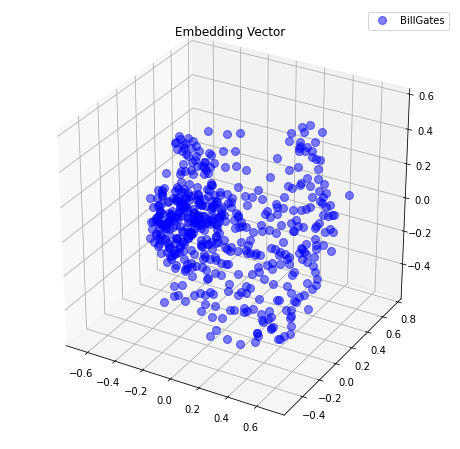

In [19]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(Xd[:,0], Xd[:,1], Xd[:,2],
        'o', markersize=8, color='blue', alpha=0.5)
plt.title('Embedding Vector')
ax.legend(loc='upper right')

plt.show()

In [54]:
def calc_dist(img_emb0, img_emb1):
    return distance.euclidean(img_emb0, img_emb1)

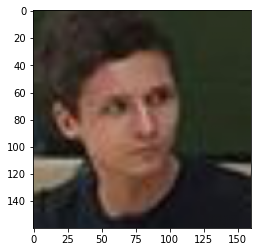

In [159]:
i1 = 8
embOrig = embedded[i1]
plt.imshow(faces[i1])

In [161]:
distances = []
for emb_pos in embedded:
    distances.append(calc_dist(embOrig, emb_pos))

In [162]:
faces_sorted = sorted(enumerate(faces), key = lambda i: distances[i[0]])

0.861399233341217


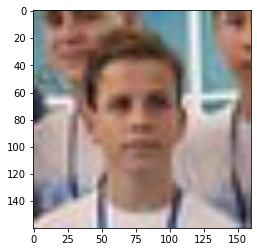

In [168]:
index = 5
plt.imshow(faces_sorted[index][1])
print(sorted(distances)[index])

In [61]:
calc_dist(emb1, emb2)

1.4564549922943115

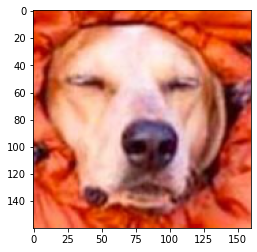

In [28]:
plt.imshow([[[0.8938131893382351, 0.25459750306372525, 0.0004222196691184059], [0.8468347886029417, 0.20706188725490227, 0.0], [0.8310661764705877, 0.17996323529411687, 0.0], [0.8306506587009798, 0.179547717524509, 0.0], [0.8272757735906858, 0.17617283241421514, 0.0], [0.8273389629289213, 0.1762465533088231, 0.0], [0.8274021522671567, 0.17794117647058816, 0.0], [0.8274797028186274, 0.18421989889705867, 0.0], [0.828598920036765, 0.18533911611519613, 0.0], [0.8325434666053922, 0.19277630974264717, 0.0], [0.8351715686274507, 0.20367647058823485, 0.0], [0.8351935891544114, 0.20647307751225455, 0.0], [0.836764705882353, 0.2129901960784309, 0.0], [0.8440659466911765, 0.22036898743872527, 0.0], [0.8561274509803921, 0.23428596047794104, 0.0017491957720588555], [0.8682598039215685, 0.24855909160539189, 0.005730124080882269], [0.8723987055759801, 0.25870098039215655, 0.009711052389705684], [0.847031058517156, 0.24983340992647, 0.022370940563725697], [0.8456849341299026, 0.25751091452205976, 0.049483953737745716], [0.873246974571079, 0.2851476332720597, 0.08432712928921658], [0.8949754901960789, 0.3118307674632361, 0.12567880667892248], [0.941461780024511, 0.3584348192401972, 0.1937289368872563], [0.9883396522671576, 0.4122979856004912, 0.28012886795343295], [1.0, 0.4303758808210786, 0.3202043121936277], [1.0, 0.40450559129901914, 0.3014562270220582], [0.9441406249999993, 0.3433813955269601, 0.2257094439338223], [0.8129394531249977, 0.2097426470588213, 0.06527841605391849], [0.7951411228553926, 0.18785807291666706, 0.011746515012254388], [0.8446614583333338, 0.23332567401960833, 0.04233302696078434], [0.9123535156250012, 0.2932454427083342, 0.10458122702205958], [0.929383042279413, 0.2984978170955891, 0.12509095435049114], [0.8143353630514695, 0.17126034007352778, 0.025671147365194904], [0.7534227558210793, 0.10722273284313924, 0.0], [0.755981924019609, 0.17142310049019716, 0.0010857077205886976], [0.8239343979779414, 0.23502029718137254, 0.028614238664216394], [0.8797526041666647, 0.2818560431985269, 0.0933689491421548], [0.85785175398284, 0.2455710018382321, 0.09346086090685994], [0.8094276577818608, 0.19093328737744847, 0.07809532015931225], [0.7969381893382336, 0.16308976715686058, 0.09952416513480224], [0.7550350413602924, 0.1080805759803899, 0.07830116421568452], [0.6920544194240195, 0.03427255667892164, 0.0204082414215685], [0.6807483149509816, 0.027010569852942434, 0.0003197763480397895], [0.7070695465686284, 0.05864257812500111, 4.1168811274583383e-05], [0.7484145220588235, 0.10664732689950997, 0.0], [0.786386527267156, 0.15329829197303868, 0.006031709558823685], [0.8096976485906852, 0.18779679840686161, 0.018698299632352568], [0.8225375306372539, 0.202868412990195, 0.0267156862745093], [0.8288602941176462, 0.20925053615196, 0.032993451286764286], [0.8351476332720584, 0.22574295343137282, 0.017006548713234385], [0.8391209022671567, 0.23709884344362742, 0.0], [0.834523399203431, 0.2284572227328428, 0.0022317325367647235], [0.8239075903799011, 0.2137599571078424, 0.010917394301470519], [0.8067181755514696, 0.19246323529411657, 0.010495174632352472], [0.789154411764705, 0.1734269684436265, 0.007720588235293894], [0.7784495634191169, 0.16007391237745025, 0.005006318933823303], [0.7732230392156855, 0.15936255361519547, 0.009530101102941066], [0.7212335324754882, 0.10654584099264519, 0.002714269301470263], [0.6806860830269599, 0.07132352941176398, 0.0], [0.6710784313725485, 0.06664560355392153, 0.0], [0.7043160232843146, 0.11063591452206019, 0.0034754136029414543], [0.7623640471813741, 0.17736960018382558, 0.049448529411766015], [0.8049632352941188, 0.23529411764706065, 0.06598307291666736], [0.8341911764705893, 0.26960209865196233, 0.06329082414215745], [0.8471191406250007, 0.2979798560049034, 0.06679208792892201], [0.9186255361519626, 0.3186264935661782, 0.146074601715688], [0.930809589460786, 0.3350959329044136, 0.13718213848039315], [0.9470492493872561, 0.35844630821078544, 0.11702473958333398], [0.966299019607844, 0.3740875842524518, 0.1028732000612755], [0.977871285232844, 0.3862745098039224, 0.10523418351715745], [0.9865492876838241, 0.39773284313725565, 0.09795687806372645], [0.9969238281250002, 0.4058335248161773, 0.08826018688725494], [1.0, 0.41575137867647155, 0.059609566482843664], [1.0, 0.42648303462009807, 0.04214058670343134], [0.996489162071078, 0.41297200520833216, 0.025331265318627606], [0.9713857613357827, 0.36750440410539015, 0.013256357230391745], [0.9173014322916647, 0.3027353324142136, 0.0], [0.8730018765318618, 0.2518008961397047, 0.0], [0.8686274509803925, 0.24503676470588265, 0.0017061121323531502], [0.898250804227942, 0.2693570006127455, 0.014705882352942068], [0.9461081112132369, 0.3108436734068644, 0.017957261029411208], [0.9845272288602945, 0.35128484987745157, 0.007720588235293894], [0.9942066865808822, 0.36715686274509823, 0.00983168658088218], [0.9868872549019602, 0.36338369332107784, 0.004885684742646589], [0.9539828431372535, 0.33049077052695935, 0.0], [0.9020000382965669, 0.2785319010416651, 0.0], [0.8507151884191163, 0.22720588235293981, 0.0], [0.8188361672794113, 0.18983513327205817, 4.3083639705962465e-05], [0.8295266544117663, 0.19821537990196247, 0.017610677083334615], [0.8658844592524532, 0.24057808670343386, 0.02986940870098122], [0.9219362745098066, 0.3015931372549049, 0.028505093443627803], [0.9854396446078451, 0.3630007276348066, 0.04048330269607895], [0.9994571461397059, 0.39637522977941303, 0.03955652573529361], [0.9998908547794115, 0.38932387408088165, 0.03176700367646951], [0.9776778875612726, 0.3442689185048996, 0.009530101102940242], [0.9419816559436249, 0.30301106770833075, 0.0003619025735291819], [0.8789158241421542, 0.23988204656862508, 0.015199908088235294], [0.8583400352328422, 0.21930817248774456, 0.0], [0.843703086703432, 0.20467122395833426, 2.0105698529460526e-05], [0.853327971813727, 0.2142961090686294, 0.0007783777573539268], [0.8782408471201002, 0.2396312040441202, 0.007039866727943503], [0.9037291283700994, 0.2701861213235313, 0.02552562040441361], [0.9103956035539227, 0.28681544883578525, 0.030064721200981352], [0.909385531556373, 0.2866526884191183, 0.01612572763480426], [0.9057923560049018, 0.2871036305147058, 4.691329656871104e-05], [0.908807253370098, 0.2941626455269608, 0.0], [0.9267338771446083, 0.3184254365808831, 0.0], [0.9630304074754912, 0.36419462316176554, 0.0025735294117649288], [0.9949362362132355, 0.4043725107230396, 0.00790919883578444], [1.0, 0.4194852941176469, 0.004915364583333354], [0.9983714384191177, 0.4145220588235289, 3.542432598045485e-05], [0.987171606924019, 0.42554572610294217, 0.0], [0.9801470588235294, 0.4508281632965688, 0.0], [0.9902889476102943, 0.46090686274509823, 0.008056640625000387], [0.9981282552083333, 0.4665718826593136, 0.017803117340686334], [0.9998420266544115, 0.46197437959558774, 0.021768727022058735], [0.9997041590073524, 0.4538229549632347, 0.013824103860293408], [0.9971986060049013, 0.44822303921568574, 0.00524758731617621], [0.9984269684436269, 0.4494073606004898, 0.0012666590073527949], [0.9969793581495091, 0.44520239736519535, 0.0], [0.9987582337622546, 0.44001225490196016, 0.0], [0.9998161764705878, 0.43296568627450915, 0.002955537683823554], [0.9872185202205872, 0.41232862285539096, 0.003860294117646947], [0.9580777037377437, 0.3718644684436258, 0.0006634880514704594], [0.9223651960784299, 0.3273897058823513, 0.0], [0.8930080039828419, 0.29343692555146933, 0.0], [0.879166666666666, 0.27911017922794046, 0.0], [0.8857230392156862, 0.28180721507352885, 0.0073586856617647136], [0.905331839767157, 0.2898265165441174, 0.011580882352941064], [0.9215073529411762, 0.30949946384803867, 0.019484336703431145], [0.9292308134191173, 0.3097981770833331, 0.018694469975489427], [0.9295860140931371, 0.31310795802696006, 0.0035587086397056698], [0.9335104549632349, 0.30944297640931306, 0.0], [0.9369571461397054, 0.3094889322916661, 0.0], [0.9390423943014704, 0.31146886488970554, 0.0], [0.9488357843137252, 0.3212622549019602, 0.0], [0.9479453890931369, 0.32218137254901913, 0.0], [0.9460621553308823, 0.32521637561274463, 0.0], [0.9477510340073526, 0.32643420649509775, 0.003438074448529642], [0.9462632123161764, 0.3303720511642152, 0.015380859374999884], [0.9473651960784307, 0.331534352022058, 0.024549057904411167], [0.9417413449754893, 0.327450980392156, 0.02551413143382268], [0.9434273514093133, 0.3365904564950979, 0.01339039522058719], [0.9507238051470578, 0.3559713924632345, 0.0], [0.9544414445465684, 0.364152496936274, 0.00560948988970605], [0.9666369868259804, 0.37432598039215653, 0.021564797794117636], [0.9723987055759802, 0.3822696461397055, 0.04166666666666644], [0.972497319240196, 0.3819335937499997, 0.05745921415441152], [0.9678069469975489, 0.37797851562499984, 0.06966911764705871], [0.9622941559436275, 0.37148533241421555, 0.0793677236519607], [0.9452215456495097, 0.36082548253676455, 0.08235389859068629], [0.9402755438112751, 0.36250000000000043, 0.09620098039215752], [0.9500612745098046, 0.3705882352941181, 0.12218137254902049], [0.9503245634191181, 0.3758147594975496, 0.14162358302696162], [0.9556985294117656, 0.3799019607843144, 0.16404430912990298], [0.9670850566789227, 0.3968347886029421, 0.18829656862745198], [0.9823874080882362, 0.4105047487745109, 0.20934914981617767], [0.9948730468750004, 0.4227261412377463, 0.22266486672794225], [0.963828890931372, 0.4602280560661786, 0.245649509803923], [0.9647700291053928, 0.47433459712009907, 0.24748774509804003], [0.976230277267157, 0.48633769914215763, 0.25876704197303974]], [[0.9180290670955856, 0.2782619102328402, 0.02575539981617515], [0.8770651424632326, 0.23638748468136914, 0.0], [0.810676125919117, 0.15148494944852856, 0.0], [0.8112946155024505, 0.15204312193627378, 0.0], [0.8154766007965683, 0.15573395373774415, 0.0], [0.8193627450980387, 0.16023092830882252, 0.0], [0.8235562193627448, 0.1680147058823518, 0.0], [0.8292777267156864, 0.17623219209558716, 8.616727941182438e-05], [0.8359920726102945, 0.18280579810048933, 0.00041647518382378386], [0.8343960631127458, 0.18448414522058776, 0.0006060431985297802], [0.8296568627450993, 0.18749999999999956, 0.0006749770220592258], [0.8310001148897072, 0.18884325214460743, 0.0004193474264708327], [0.8349264705882367, 0.1928414139093133, 0.00011201746323535759], [0.8390481387867661, 0.20196078431372538, 0.0], [0.8467524509803936, 0.21644358915441161, 8.329503676475992e-05], [0.858973843443629, 0.23057598039215685, 0.0005399816176473993], [0.8691789215686291, 0.24270833333333316, 0.0009191176470593765], [0.8520345052083342, 0.2481158088235301, 0.014926087622549513], [0.8541293275122569, 0.26879021139706033, 0.04661745557598038], [0.8799335554534325, 0.29907226562500056, 0.08767329197303932], [0.9000564874387266, 0.3197208180147062, 0.12575348498774566], [0.9406805300245111, 0.3568608302696087, 0.18517252604166848], [0.9867311963848046, 0.40987955729166703, 0.27052121629902104], [0.9995346966911762, 0.43182636335784247, 0.31362687653186216], [0.9997730928308822, 0.4142568550857838, 0.2991354549632339], [0.969738051470588, 0.3723221124387257, 0.2471277573529399], [0.8448041130514701, 0.24590705422794135, 0.08913526348039034], [0.8095655254289237, 0.20361232383578673, 0.017531211703432196], [0.8246447993259807, 0.21388059129902012, 0.014495251225490084], [0.9048943014705889, 0.2792202818627456, 0.08194508272058833], [0.9627383961397074, 0.32818818933823674, 0.14596641390931486], [0.8624770220588225, 0.21192842371323403, 0.06113472732843001], [0.7852156096813726, 0.1315276501225506, 0.0], [0.7509813495710794, 0.16201076133578482, 2.5850183823556716e-05], [0.7866928998161766, 0.19306544883578403, 0.002126416973040003], [0.822281901041665, 0.21735983455882138, 0.02028186274509862], [0.7880935968137238, 0.17733513327205652, 0.014583333333333663], [0.7469046798406864, 0.12080173866421523, 0.00755878523284443], [0.7580135569852939, 0.11837182138480319, 0.04549728094362763], [0.7514476102941162, 0.09595109528186148, 0.06411803002450778], [0.7095952052696083, 0.05199716605392219, 0.034398935355390896], [0.7083132276348046, 0.05475930606617753, 0.0195063572303911], [0.7140318627450991, 0.06446174172794249, 0.0025112974877449443], [0.7233972886029423, 0.07909103094362872, 0.0], [0.736825980392158, 0.10333850337009923, 0.0], [0.7577330346200992, 0.13362342984068712, 0.0], [0.7833630131740201, 0.15946595435049055, 0.0033873314950980983], [0.7969812729779406, 0.17670515471813655, 0.014717371323529294], [0.8155905330882345, 0.211111749387254, 0.01086282169117567], [0.8299756816789197, 0.2346717984068601, 0.0], [0.8223450903799003, 0.22318665747548805, 0.00010627297794124432], [0.8036554074754887, 0.1984767539828413, 0.0001838235294118753], [0.7843232996323516, 0.17138959099264547, 6.606158088238876e-05], [0.7678911994485278, 0.14994064031862608, 0.0], [0.7550580193014695, 0.14138710171568564, 0.0007755055147063724], [0.7496333103553918, 0.1354913449754901, 0.0019129136029423508], [0.7029545802696058, 0.09382467830882213, 0.0005170036764708522], [0.6670343137254888, 0.06301413143382267, 0.0], [0.6594286151960783, 0.06568053002451021, 0.0], [0.7072945389093157, 0.12240349264706127, 0.012637867647060656], [0.7755533854166696, 0.20194163602941506, 0.06158375459559201], [0.819117647058826, 0.2608743106617673, 0.08609451593137615], [0.8485207950367668, 0.3021618412990216, 0.09229760263480775], [0.8658002068014732, 0.32364621629902157, 0.08643248314951438], [0.9685049019607843, 0.3669002757352956, 0.2177198223039224], [0.9723651960784313, 0.3779411764705891, 0.19368776807598134], [0.9732699525122551, 0.382262944240197, 0.15946499693627653], [0.9852127374387255, 0.3908097809436284, 0.13807253370098324], [0.9960784313725488, 0.4058660768995103, 0.13816731770833598], [0.9995433134191174, 0.4168504901960785, 0.13872549019608021], [1.0, 0.4256606158088237, 0.12435278799019761], [1.0, 0.43478573069852916, 0.09830441942402143], [0.9999511718749999, 0.4305156632965678, 0.06595722273284577], [0.994559015012254, 0.4063514859068606, 0.042311963848041007], [0.9614592907475458, 0.3561274509803888, 0.019862515318627472], [0.9011881510416639, 0.28777382046568317, 0.00011776194852947737], [0.861889169730391, 0.2371553308823519, 0.0], [0.8607718673406868, 0.23387235753676563, 0.004730583639706062], [0.8922966452205894, 0.26200980392157, 0.022041590073529856], [0.9433995863970601, 0.3115473728553946, 0.01926125919117618], [0.9812499999999995, 0.3519885493259813, 0.002958409926472399], [0.9868480009191168, 0.3635292202818632, 0.0037942325367670035], [0.9769521675857825, 0.3563639322916655, 0.0034064797794137822], [0.9429448146446047, 0.32297985600489953, 0.0013729319852948704], [0.8939003140318597, 0.27539541207107593, 0.0001321231617647749], [0.849034926470587, 0.22814223345588164, 0.0], [0.8263671875000009, 0.20180951286764887, 0.0026281020220588524], [0.8636287913602979, 0.23815104166667167, 0.038296568627452204], [0.9037463618259826, 0.28404086243872906, 0.04938916973039115], [0.9558430989583344, 0.3408681832107863, 0.04270833333333189], [0.9925283394607839, 0.3967323452818632, 0.04233302696078387], [0.9984260110294109, 0.40950712316176374, 0.027946920955882866], [0.9907255284926455, 0.3753475413602921, 0.005905330882354318], [0.9350308287377417, 0.3058354396446048, 0.0016285615808832752], [0.8848383884803886, 0.2510148590686246, 6.893382352941144e-05], [0.8472522212009792, 0.21807023590686064, 0.0007238051470592799], [0.8448117723651973, 0.21626646752451045, 0.001275275735294864], [0.8589374617034338, 0.2309608609068649, 0.00175206801470689], [0.8879040287990222, 0.26049613204657124, 0.029084329044117847], [0.9256127450980407, 0.298733340992649, 0.06517693014705732], [0.9471200980392166, 0.3203785615808838, 0.07796702665440934], [0.9490473728553926, 0.3228534773284324, 0.07154277726715422], [0.9343912760416663, 0.3122817095588236, 0.04566099877450713], [0.9018114276960792, 0.2832203584558832, 0.0037061504289218543], [0.8958103553921568, 0.2808842677696077, 0.0], [0.9109135646446079, 0.2997070312499998, 0.0002728630514707785], [0.9520871629901964, 0.34473517922794106, 0.0037942325367656894], [0.9900074678308813, 0.39060585171568485, 0.01371112898284444], [0.9975700827205868, 0.4078642003676447, 0.015054381127451503], [0.9982594209558814, 0.4038229549632332, 0.004832069546570096], [0.9848479626225476, 0.4184685202205878, 0.0023092830882366208], [0.971780215992647, 0.44527611825980185, 0.0013700597426478988], [0.9841021369485297, 0.4537434895833317, 0.007910156250001455], [0.9921913296568629, 0.45797813265931203, 0.01827703737745255], [0.9903636259191179, 0.4502412683823515, 0.01799460018382509], [0.9819536994485296, 0.4384191176470576, 0.008016429227942906], [0.9796147365196082, 0.43107575061274395, 0.003139361213237167], [0.9805127910539216, 0.4292873008578419, 0.0028176700367663955], [0.9796166513480388, 0.4257630591299001, 0.001981847426471749], [0.9845090379901953, 0.4211760876225468, 0.0019244025735305798], [0.9862563189338223, 0.4137503829656837, 0.0018813189338246557], [0.9676097196691159, 0.39009746476715385, 0.0015452665441185664], [0.9404392616421551, 0.35284447763480103, 0.0013183593750007879], [0.9060853247549006, 0.30998104319852704, 0.0009708180147064559], [0.880597043504901, 0.2799230238970572, 0.0009191176470593765], [0.867387599571078, 0.26283892463235187, 0.000580193014706221], [0.873607919730392, 0.2570283777573516, 2.585018382352929e-05], [0.8893995098039216, 0.2722426470588228, 0.00422219669117681], [0.9093749999999998, 0.28848039215686183, 0.01262542126225535], [0.9172535615808821, 0.2960171568627439, 0.008561197916667086], [0.9201593137254893, 0.2916810278799007, 0.0007209329044121932], [0.9165441176470581, 0.28502891390931273, 0.0005112591911767677], [0.9170697380514699, 0.2878580729166655, 0.0001579733455883251], [0.9230411305147056, 0.28762637867647023, 0.00015797334558835646], [0.9362984451593132, 0.3011881510416662, 0.0008071001838239993], [0.9369418275122543, 0.3018315333946073, 0.00028147977941192357], [0.9394732306985284, 0.30639744178921496, 0.0], [0.9393382352941165, 0.3107776118259792, 0.0], [0.9369456571691164, 0.3082098268995089, 0.0], [0.930835439644607, 0.3057789522058814, 0.0], [0.9229080499387249, 0.29983723958333286, 0.0], [0.9157188265931375, 0.30586607689951006, 0.0], [0.9231962316176475, 0.3220932904411763, 0.0], [0.9366479013480394, 0.3355449601715682, 0.0], [0.9527295879289217, 0.34969937193627404, 0.00221162683823553], [0.9625612745098039, 0.3638528262867642, 0.014509612438725939], [0.9686600030637254, 0.37287166819852835, 0.03594324448529403], [0.969872089460784, 0.3751206341911757, 0.05279756433823478], [0.9692162607230395, 0.37386354932598026, 0.06793907015931364], [0.9616421568627451, 0.367770565257353, 0.08143190870098012], [0.9577818627450986, 0.37103056066176543, 0.0988290824142155], [0.9661515778186281, 0.3796329273897069, 0.12461990655637246], [0.9750430836397063, 0.39387254901960916, 0.15287990196078421], [0.983088235294118, 0.40140644148284466, 0.1752316942401959], [0.9973671109068633, 0.4121323529411782, 0.19877450980392156], [1.0, 0.4371132046568646, 0.2288315716911761], [1.0, 0.45451325061274633, 0.24689510569852843], [0.9827713311887255, 0.49426125919117736, 0.27112917432598016], [0.9813112745098045, 0.49748774509803884, 0.27303921568627365], [0.9739525888480398, 0.5011670879289213, 0.26586148131127374]], [[0.8579091988357838, 0.20662243412990122, 0.0], [0.8366201363357832, 0.18456935508578273, 5.7444852941223165e-05], [0.7903559666053929, 0.12277018229166706, 0.0012254901960788702], [0.7944460401348047, 0.12567401960784327, 0.001191980698529832], [0.8005265778186277, 0.1220090379901962, 0.0007898667279414397], [0.8006740196078432, 0.12085056678921541, 0.0], [0.8076554840686277, 0.12181181066176437, 0.0], [0.8276750153186274, 0.13209731158088206, 0.0016946231617648085], [0.848426968443627, 0.14999999999999947, 0.008272058823529275], [0.861766620710784, 0.16204139859068573, 0.012225222120097863], [0.8723651960784307, 0.1700980392156854, 0.013480392156862335], [0.8724752987132346, 0.1703182444852933, 0.008247166053921165], [0.8742034313725484, 0.17365483302696022, 0.0022030101102939736], [0.8799019607843133, 0.18499444699754863, 0.0], [0.8899059819240193, 0.20134803921568595, 0.001638135723039243], [0.9039569929534311, 0.2173761106004898, 0.010768037683823574], [0.9159313725490191, 0.22966643688725444, 0.018856272977940926], [0.9093424479166657, 0.2679084329044125, 0.012700099571078004], [0.9009124157475487, 0.2946423100490191, 0.020301968443627524], [0.906381165747549, 0.2988444010416669, 0.059077244178922246], [0.9250737208946084, 0.31734068627451045, 0.12072323069853069], [0.9520833333333341, 0.35173291973039295, 0.19464709712009942], [0.9769885493259807, 0.38370098039215733, 0.2546252680759812], [0.9896857766544118, 0.4033700980392159, 0.27853381587009807], [0.9948529411764706, 0.4135416666666667, 0.2699649586397054], [0.9904986213235295, 0.41469630821078507, 0.24619427849264702], [0.9332356770833331, 0.35708103553921555, 0.15788622089460683], [0.8933526731004904, 0.3039282705269609, 0.08280675551470545], [0.8204551547181359, 0.22138001685048858, 0.008022173713233839], [0.8607067631740202, 0.24681085324754942, 0.03084214154411775], [0.9689012714460798, 0.3420304840686286, 0.13752872242647204], [0.9018803615196058, 0.2560326669730371, 0.07852998621323357], [0.8171750536151956, 0.16789598651960877, 0.003015854779412779], [0.7569096583946078, 0.15674019607843134, 0.0005083869485296276], [0.7659313725490199, 0.16137312346813734, 0.013272633272059148], [0.7863022748161759, 0.16982517616421508, 0.04151635263480342], [0.7705882352941165, 0.146017156862744, 0.03596143535539143], [0.7415527343749998, 0.10490196078431353, 0.022417853860293564], [0.7479808134191173, 0.10184110753676467, 0.026105813419117184], [0.743342141544117, 0.09529239430147017, 0.020548023897058083], [0.7267568550857845, 0.07350930606617694, 0.0], [0.7340686274509807, 0.08486519607843201, 0.0], [0.7477720971200982, 0.10132601868872593, 0.0], [0.7546568627450981, 0.10962009803921619, 0.0], [0.762937538296569, 0.12218424479166735, 0.0], [0.7786831724877453, 0.14374329810049083, 0.0], [0.786013135723039, 0.15525333180147055, 0.0], [0.7759545419730386, 0.1451947380514702, 0.0], [0.7611682368259796, 0.1383386948529409, 0.0], [0.76326784620098, 0.14788794424019575, 0.0], [0.7741009880514698, 0.1590753293504895, 0.0020900352328431506], [0.7680233226102928, 0.15545917585784216, 0.003615196078431263], [0.7477701822916655, 0.13449850643382266, 0.001299211090686158], [0.7270881204044111, 0.11727941176470552, 0.0004116881127452585], [0.7258243336397054, 0.12126034007352939, 0.01672602634803977], [0.7384995404411759, 0.1354157092524507, 0.04013384650735318], [0.6802274816176448, 0.08322993259803733, 0.01081399356617541], [0.6398265165441166, 0.050917202818627, 0.0], [0.6581227022058831, 0.07380035998774606, 0.0007611443014708803], [0.7351399739583356, 0.16154928768382634, 0.06653071384804174], [0.8272671568627477, 0.25936925551470896, 0.15437825520833626], [0.8746964996936294, 0.31396005667892396, 0.19779698988970829], [0.9083658854166687, 0.348194316789218, 0.22368451286764943], [0.9371888403799042, 0.37701727175245353, 0.2521398207720616], [0.9641544117647058, 0.4068723192401957, 0.2662521063112742], [0.968072150735294, 0.40382774203431376, 0.259097349877451], [0.9698768765318632, 0.4082452512254903, 0.2511000689338236], [0.9782810585171574, 0.4098374310661771, 0.23719362745098116], [0.9860476026348044, 0.41360294117647123, 0.22804553462009863], [0.9910184972426477, 0.4147930070465694, 0.21270105698529485], [1.0, 0.4211368336397062, 0.2007333792892163], [0.9994973575367645, 0.4235868566176468, 0.19291800704656875], [0.9963254442401949, 0.41439950980391926, 0.17610198376225256], [0.9748142616421538, 0.37003484987744795, 0.11856426164215428], [0.9125124463848011, 0.30497568167891875, 0.0479903875612724], [0.8578057981004888, 0.2461511948529396, 0.00270852481617642], [0.8398284313725488, 0.22224551930147063, 0.0], [0.8567200903799025, 0.24134018841911828, 0.00012925091911770206], [0.8903923483455882, 0.2750124463848041, 0.014105583639706707], [0.9255964690563725, 0.3254126455269617, 0.04010895373774537], [0.9506194469975477, 0.36474800857843015, 0.06124578737745093], [0.9525936351102918, 0.3628264782475468, 0.07718098958333226], [0.925006701899506, 0.33119542738970226, 0.0678988587622525], [0.8695638020833294, 0.27409811580881993, 0.027000995710782055], [0.8330537683823513, 0.23699927236519444, 0.002598422181372265], [0.8409457337622557, 0.24719573376225565, 0.0006175321691178943], [0.8716356464460803, 0.2819297640931391, 0.0028578814338246316], [0.9410730698529441, 0.3551863128063755, 0.03756031709559062], [0.9499090456495097, 0.36521714154411744, 0.01932253370098008], [0.9387905943627448, 0.354170496323529, 0.0027611825980393763], [0.9491775811887255, 0.36105621936274485, 0.025123506433824053], [0.9644062117034311, 0.37218807444852875, 0.05995136335784349], [0.9420343137254886, 0.3422794117647039, 0.07126799938725425], [0.8742407705269581, 0.2700128293504872, 0.03229166666666456], [0.809530101102939, 0.20155005361519365, 0.0013556985294109016], [0.8387063419117656, 0.17741747089460744, 0.014838005514706095], [0.8763671875000016, 0.2258769914215707, 0.026923445159313223], [0.9172937729779428, 0.27895029105392366, 0.012424364276960875], [0.9412856158088251, 0.3153186274509824, 0.0008473115808826302], [0.9587172564338252, 0.3435939414828451, 3.350949754904031e-05], [0.9788172104779418, 0.36776960784313834, 0.0005648743872551565], [0.9787118949142158, 0.3656948912377458, 0.0023552389705891134], [0.9604099647671571, 0.35128006280637275, 0.007713886335785973], [0.9363147212009788, 0.3200157015931357, 0.018952971813725124], [0.8872357536764697, 0.26697399662990107, 0.0], [0.8778243719362746, 0.2549077052696082, 0.005366306678921919], [0.9097694546568624, 0.2866517310049017, 0.02637963388480384], [0.9351476332720572, 0.31302753523284166, 0.04338235294117515], [0.9426470588235276, 0.3230392156862728, 0.04338235294117515], [0.9572236902573517, 0.3376158471200967, 0.05266256893382261], [0.9612371706495075, 0.35598383884803797, 0.04558344822303666], [0.9555759803921561, 0.3676470588235287, 0.026944508272058312], [0.9717524509803915, 0.3835075827205877, 0.042015165441175784], [0.9898284313725484, 0.4011192172181364, 0.05983264399509719], [0.9972905177696069, 0.41053251378676353, 0.07384248621323435], [0.9975490196078423, 0.4057071461397046, 0.07427045036764568], [0.9902085248161753, 0.39413009344362626, 0.06449812346813606], [0.9810269224877441, 0.38494849111519513, 0.05817153033088155], [0.9617943857230378, 0.36550053615195927, 0.040656594669116405], [0.9491833256740188, 0.3494686351102928, 0.03884708180147], [0.9432406556372537, 0.3340178844975475, 0.03744925704656754], [0.9266534543504887, 0.3117637484681356, 0.030696614583332317], [0.907002527573528, 0.29106253829656714, 0.026234106924018827], [0.887413832720587, 0.2683143765318615, 0.01966241574754845], [0.8710449218749992, 0.24794443167892055, 0.018415862438725054], [0.8621323529411759, 0.2386029411764699, 0.011716835171568185], [0.8626876531862745, 0.21673177083333267, 0.0008147594975488056], [0.8775831035539218, 0.23052428002451003, 0.011585669424019935], [0.8966203278186271, 0.24956150428921534, 0.029840686274509257], [0.9033844592524499, 0.2564950980392148, 0.029148475796567673], [0.8958946078431365, 0.25245098039215597, 0.014743221507352593], [0.8923464307598032, 0.24893631280637185, 0.010054764093136744], [0.8929783241421564, 0.2503494561887252, 0.0031068091299017637], [0.8973910462622552, 0.25911171109068665, 0.0032121246936279257], [0.9153186274509796, 0.2830891927083324, 0.01636125153186211], [0.9102835860906855, 0.2784419041053912, 0.005535768995097666], [0.9030024509803914, 0.272590188419117, 0.0], [0.9002135033700974, 0.27245615042892085, 0.0], [0.9018162147671565, 0.27405886182597994, 0.0], [0.9074754901960782, 0.27971813725490163, 0.0], [0.9140318627450976, 0.2862745098039211, 0.0], [0.9219018075980394, 0.2957988664215688, 0.0], [0.927495978860294, 0.30366019454656834, 0.0], [0.9288344439338236, 0.304998659620098, 0.0], [0.9425149356617649, 0.3186791513480393, 0.005750229779411968], [0.9536927466299014, 0.32985696231617595, 0.011151960784313505], [0.9549766390931366, 0.3311408547794109, 0.010974839154411472], [0.9615138633578425, 0.3448471966911761, 0.022234030330882355], [0.9782351026348033, 0.3686762791053917, 0.04712009803921581], [0.9778846890318615, 0.37521063112744996, 0.06023763020833304], [0.974325980392156, 0.3849245557598034, 0.07307081035539235], [0.9774308746936269, 0.4037990196078427, 0.09509803921568673], [0.9817909390318622, 0.421486289828431, 0.12259976256127515], [0.9895201439950979, 0.44405637254901953, 0.1517128140318637], [0.9974791283700978, 0.45908586090686254, 0.1769607843137264], [0.999037798713235, 0.4715868183210783, 0.18853496476715761], [0.9996266084558822, 0.4799967447916664, 0.20024509803921658], [0.9999760646446079, 0.48556602328431375, 0.23960439644607956], [1.0, 0.4859681372549019, 0.2428308823529411], [1.0, 0.48596813725490184, 0.24669117647058825]], [[0.8481684666053911, 0.19240866268382234, 0.0012666590073532327], [0.8320666743259795, 0.17522403492646885, 0.0007553998161768191], [0.8100490196078427, 0.13112170649509747, 0.016081686580882444], [0.8095731847426466, 0.12985504748774424, 0.015210439644607738], [0.8046559053308816, 0.12377450980392035, 0.00974168964460751], [0.7987371706495094, 0.10887235753676364, 0.0], [0.8017156862745092, 0.10193493412990096, 0.0], [0.8086176853553917, 0.10516907935048941, 0.0], [0.8248946844362741, 0.11986155790441079, 0.0009277343750000458], [0.8386220894607839, 0.13102405024509706, 0.0034926470588234216], [0.8453431372549016, 0.13788583792892076, 0.0023466222426469117], [0.8467524509803919, 0.14083850337009737, 0.0], [0.8507965686274506, 0.14762274050245036, 0.0], [0.8564950980392154, 0.1590686274509803, 0.0], [0.8681372549019608, 0.17790096507352934, 0.0], [0.8826219745710783, 0.19285481770833335, 0.002522786458333601], [0.8931745940563725, 0.20700922947303926, 0.010832184436274955], [0.8900438495710777, 0.24609949448529495, 0.00730219822303892], [0.8878848805147058, 0.27991057751225484, 0.0060575597426470945], [0.9033576516544126, 0.29841069240196133, 0.04736902573529535], [0.9293801700367658, 0.322912837009805, 0.11706207873774695], [0.9572667738970597, 0.3524873621323541, 0.18945408241421738], [0.973661534926471, 0.3808967141544125, 0.24407552083333406], [0.985224226409314, 0.40018382352941223, 0.2693713618259805], [0.9915661381740198, 0.410355392156863, 0.2649730009191173], [0.9984939874387256, 0.43895143995098085, 0.26094898897058777], [0.9765060125612745, 0.4045687806372546, 0.19701956954656763], [0.9274500229779407, 0.3454656862745095, 0.11942306219362664], [0.8286477481617629, 0.23165019914215515, 0.013055300245096116], [0.8415220971200986, 0.23518305759803992, 0.011736940870098505], [0.9362505744485305, 0.3118030024509816, 0.10612457873774647], [0.8833266314338213, 0.24987745098039016, 0.06482172947303758], [0.8464594822303905, 0.2087009803921561, 0.03986960018382298], [0.754780369178922, 0.15478036917892204, 0.0], [0.7589958639705887, 0.15790441176470615, 0.001977060355392654], [0.7773427925857836, 0.1633252910539213, 0.02525945925245042], [0.7580872778799007, 0.14215399050244992, 0.021379059436273423], [0.7290201822916664, 0.10251321231617674, 0.0012743183210785708], [0.7363329120710789, 0.10377987132353053, 0.010326669730392486], [0.7448261335784319, 0.108892463235295, 0.017558976715686535], [0.7340159696691189, 0.09131625306372754, 0.0035184972426479167], [0.7383578431372563, 0.09938725490196304, 0.0025735294117653538], [0.7529660692401974, 0.11675283394608044, 0.002432789522059427], [0.7613951439950989, 0.12643707873774676, 0.001990464154412257], [0.7647221583946084, 0.13609451593137398, 0.0017156862745102358], [0.7740368412990202, 0.15179419424019702, 0.001534734987745475], [0.779359106924019, 0.15711645986519582, 0.0007036994485295615], [0.7637762331495086, 0.14153358609068536, 0.0], [0.740427772671567, 0.1246936274509795, 0.0], [0.7319661458333321, 0.1223460477941169, 0.0], [0.732227519914214, 0.1271417356004891, 0.0], [0.7285251991421553, 0.12648686427695957, 0.0], [0.720341222426469, 0.1206475949754891, 0.00027477787990203906], [0.711440142463234, 0.11080920649509708, 0.0054103477328433305], [0.7047420726102925, 0.10847981770833233, 0.01766620710784313], [0.7016812193627431, 0.11094228707107706, 0.028878484987744472], [0.6551097196691155, 0.07054610906862578, 0.0073673023897049845], [0.626734834558823, 0.05029967064950982, 0.0], [0.6595339307598048, 0.08548943014706047, 0.012939453125001138], [0.7550867417279434, 0.19019416360294417, 0.09987745098039522], [0.8498161764705903, 0.29649299172794374, 0.19361308976715966], [0.913513901654413, 0.3618259803921585, 0.2532532935049038], [0.9542269837622555, 0.40379901960784437, 0.2869686351102953], [0.9864650352328437, 0.4360973881740208, 0.31887925091911895], [0.9573529411764707, 0.39742647058823566, 0.2666666666666678], [0.9619083180147064, 0.4018181295955889, 0.2705269607843147], [0.9770278033088239, 0.41381452971813787, 0.27076631433823634], [0.9899040670955888, 0.4286908318014709, 0.27273284313725543], [0.999758731617647, 0.43511316636029407, 0.2639121859681376], [0.9978419883578425, 0.4328172870710778, 0.2488099341299016], [0.995275160845587, 0.4251416973039201, 0.22646388633578338], [0.9864286534926443, 0.4069115732230363, 0.19826708026960527], [0.9558210784313694, 0.36286764705882046, 0.1420429304534291], [0.9209089690563689, 0.3209041819852906, 0.0948108149509776], [0.8712306602328399, 0.26830767463235006, 0.037162032781860886], [0.8350863587622532, 0.22947878370097874, 0.004474954044117309], [0.8261479396446073, 0.21524107689950944, 0.0], [0.8378207337622545, 0.2269138710171568, 0.0016544117647059938], [0.8580968520220579, 0.24718998927696006, 0.01183459712009829], [0.8794893152573516, 0.28377853094362715, 0.028151807598038862], [0.887830307904409, 0.308295994178919, 0.035134229473038174], [0.870955882352938, 0.2895115272671538, 0.02919634650735174], [0.8345760569852906, 0.24853802849264356, 0.010314223345587221], [0.7940027573529387, 0.2057674632352917, 0.0], [0.796471928615196, 0.20124942555147038, 0.0], [0.8437385110294131, 0.2469429764093153, 0.010209865196079443], [0.901823874080884, 0.3083285462622567, 0.040313840379903924], [0.9630533854166674, 0.370152611825981, 0.07242838541666737], [0.9581495098039194, 0.3681372549019586, 0.04417892156862557], [0.9329656862745078, 0.34353075214460554, 0.015083103553920556], [0.9314338235294105, 0.33506146599264525, 0.01337028952205851], [0.9362151501225481, 0.3354195389093123, 0.03498104319852903], [0.9147307751225477, 0.3060767080269589, 0.03994715073529336], [0.8533193550857828, 0.2401453354779391, 0.0031355315563713487], [0.7980612362132345, 0.18458084405637146, 0.0], [0.8406451056985312, 0.1872347962622558, 0.0068761488970588095], [0.8940697763480415, 0.24847483915441476, 0.024046415441176746], [0.9502048866421585, 0.31654411764706125, 0.028880399816176582], [0.9771886488970601, 0.3597033930759823, 0.013352098651961056], [0.9968893612132356, 0.38616249234068767, 0.002144607843137798], [0.9999396829044117, 0.40508769914215714, 0.008825444240197124], [0.9980755974264702, 0.40150696997548985, 0.031078622855392847], [0.9831657858455868, 0.3786831724877438, 0.04380170036764734], [0.9383358226102924, 0.32736768535539074, 0.032169117647058244], [0.8800944010416656, 0.2658959482230385, 0.001574946384804257], [0.852926815257353, 0.23809838388480423, 0.0], [0.8636891084558825, 0.24628714767156876, 0.0], [0.874723307291666, 0.25330690870097994, 0.0], [0.8751675474877448, 0.2556535309436271, 0.0], [0.888299440870098, 0.26826267616421556, 0.0014734604779412302], [0.9049124923406862, 0.3006740196078438, 0.001910041360293959], [0.9170716528799017, 0.3319000842524505, 0.0], [0.9325846354166665, 0.34381127450980337, 0.001800896139705926], [0.9497759650735288, 0.35547449448529345, 0.01495289522058837], [0.9607814414828422, 0.3647030101102932, 0.028486902573528726], [0.9639093137254889, 0.36783088235294004, 0.03143382352941079], [0.9591595818014693, 0.36308115042892025, 0.03143382352941079], [0.9544366574754891, 0.3574936810661752, 0.03143382352941079], [0.9353362438725478, 0.3352136948529395, 0.019154986213234207], [0.9238712086397052, 0.31488970588235177, 0.011405675551470136], [0.9071470971200967, 0.2950539981617632, 0.0051298253676467015], [0.8899509803921555, 0.2749741498161751, 0.0034926470588234216], [0.8777324601715677, 0.25879863664215574, 0.0034926470588234216], [0.8664847579656855, 0.24650831035539128, 0.006494140624999899], [0.8552370557598035, 0.2320896522671562, 0.004638671874999998], [0.8472091375612741, 0.22367972579656828, 0.003955078124999996], [0.8615808823529415, 0.2152161841299015, 0.00392156862745098], [0.869192325367647, 0.2217045802696076, 0.01079771752450979], [0.8758444393382346, 0.2283633961397051, 0.010477941176470265], [0.8748161764705873, 0.2277573529411755, 0.010314223345587816], [0.8708725873161756, 0.2238137637867638, 0.006439568014705484], [0.8693483838848036, 0.22267156862745074, 0.0], [0.8778186274509803, 0.23425245098039182, 6.0317095588262666e-05], [0.8863597196691174, 0.24279354319852914, 0.0015557981004904347], [0.8942401960784306, 0.25138346354166574, 0.005566406249999629], [0.888558900122548, 0.2502230775122538, 0.0], [0.8793945312499993, 0.24673521752450892, 0.0], [0.8783088235294115, 0.24564950980392103, 0.0], [0.8836397058823527, 0.2509803921568623, 0.0], [0.8917279411764705, 0.2590686274509799, 0.0], [0.8984518612132352, 0.2657925474877446, 0.0001675474877451524], [0.9126838235294124, 0.28185987285539255, 0.0002479702818627953], [0.9251943550857838, 0.296885531556372, 0.0], [0.9230392156862745, 0.29473039215686253, 0.0], [0.9309062882965687, 0.3025974647671568, 0.001800896139705926], [0.936162492340686, 0.307853668811274, 0.0034926470588234216], [0.9311858532475483, 0.30337297028186205, 0.0014734604779410316], [0.9303471583946076, 0.30901979932598017, 0.004779411764706106], [0.9418208103553921, 0.327480660232843, 0.025428921568628228], [0.9481684666053919, 0.3437385110294118, 0.04698606004902039], [0.9485906862745096, 0.353374885110294, 0.06618125765931462], [0.9537205116421568, 0.3693455116421569, 0.08946940104166774], [0.9612524892769606, 0.3920122931985295, 0.11985294117647192], [0.9751483992034313, 0.4154928768382351, 0.1574304917279424], [0.9814950980392152, 0.43633578431372516, 0.18462009803921645], [0.9862764246323528, 0.4535548789828428, 0.20588331035539292], [0.9939338235294115, 0.45931372549019545, 0.219178921568628], [0.9984068627450977, 0.476236979166666, 0.2337967218137249], [0.9987132352941174, 0.47845243566176376, 0.23533528645833235], [0.9982910156249996, 0.4789148667279403, 0.24006012561274448]], [[0.8217783011642144, 0.1557329963235275, 0.01269244025735292], [0.8109844132965675, 0.1446145450367627, 0.0024701286764712625], [0.7939587162990193, 0.10929553462009714, 0.018793083639705714], [0.7941779641544114, 0.10177600337009725, 0.014888748468137111], [0.7871323529411762, 0.0932310814950972, 0.007291666666666607], [0.7825089996936271, 0.07867647058823471, 0.00045668658088243063], [0.7773791743259806, 0.0682492723651957, 0.0], [0.7854099647671574, 0.0681918275122549, 0.0], [0.8022298177083336, 0.07915326286764698, 0.0], [0.8147250306372553, 0.09205346200980413, 0.0], [0.8298990885416663, 0.10833333333333287, 0.0], [0.8316789215686272, 0.11297200520833305, 0.0], [0.8359384574142156, 0.12288698682598057, 0.0], [0.84243834252451, 0.1412865732230396, 0.00023265165441182202], [0.8549680223651965, 0.16385282628676526, 0.0015510110294121152], [0.8714460784313731, 0.18542145373774574, 0.010622510723040154], [0.88531613817402, 0.20071327359068702, 0.02158586090686361], [0.8775783164828426, 0.23335248161764838, 0.010883884803921447], [0.8834932215073538, 0.27001282935049103, 0.0003188189338236036], [0.9158978630514719, 0.3031527650122563, 0.046964039522060755], [0.949250344669119, 0.3427083333333349, 0.12911975337010015], [0.9731560202205891, 0.37186925551470695, 0.19766869638480541], [0.9812097886029416, 0.38986960018382427, 0.23846028645833411], [0.98780637254902, 0.4054773667279419, 0.2611998314950984], [0.9950501685049024, 0.41592467064951044, 0.2609547334558822], [0.9979970894607841, 0.43044098498774525, 0.24467773437499926], [0.9969247855392158, 0.42897135416666665, 0.21723441329656804], [0.9480267693014691, 0.3769770603553909, 0.1439663756127433], [0.841297104779409, 0.2568627450980365, 0.024509803921565924], [0.8441358379289216, 0.2477692248774513, 0.018952014399509973], [0.9009449678308832, 0.29412434895833406, 0.08157264859068734], [0.8512609145220575, 0.23401692708333233, 0.04432827818627374], [0.8558287377450966, 0.22713503370098015, 0.05406996783088206], [0.7746964996936284, 0.17579944087009927, 0.005333754595589197], [0.7638097426470593, 0.16491268382353014, 0.0020517386642160767], [0.7644665287990187, 0.16532149969362678, 0.006371591605391881], [0.7395670572916649, 0.13792892156862624, 0.0028961780024508157], [0.7152075674019601, 0.11057846966911765, 0.0005792356004902493], [0.7383262484681375, 0.13141084558823604, 0.010427198223039825], [0.771670113357843, 0.1583668428308834, 0.03783988204656852], [0.7740406709558829, 0.16331763174019753, 0.0349954044117651], [0.7784112668504914, 0.16885244332108085, 0.030086741727942498], [0.791477098651962, 0.18467562806372773, 0.03068704044117809], [0.7932454427083344, 0.18624578737745304, 0.02832318474264897], [0.7897336473651971, 0.18194986979166844, 0.02573337928921763], [0.7856751685049024, 0.17721928615196186, 0.022476256127452503], [0.7675570618872543, 0.15910117953431363, 0.011603860294118315], [0.7342036228553908, 0.12548062193627368, 0.0014217601102943372], [0.7021350337009791, 0.10352232689950959, 0.001990464154412237], [0.683347694546568, 0.0944996553308823, 0.002352366727941578], [0.6732345281862735, 0.08923962162990173, 0.000465303308823597], [0.6713848039215676, 0.08854166666666634, 0.0010081571691178796], [0.6711109834558815, 0.08889495251225465, 0.005226524203432023], [0.6667221966911754, 0.08608781403186236, 0.009494676776961431], [0.6473661534926453, 0.07203967524509704, 0.008273973651960798], [0.6267501531862724, 0.05853821997548872, 0.0019368489583331489], [0.6193704044117635, 0.05163526348039164, 0.0008444393382354829], [0.6176384420955876, 0.058436734068627906, 0.002860753676471195], [0.6619035309436286, 0.11056123621323719, 0.04410615808823735], [0.7607105928308845, 0.21194852941176762, 0.1363520603553952], [0.8547162224264722, 0.31317210477941426, 0.22591720281863004], [0.9135483685661767, 0.37647729013480524, 0.2775984221813741], [0.9433469286151958, 0.41621859681372597, 0.30577607996323614], [0.9700013403799016, 0.44334692861519615, 0.3312930836397062], [0.9575539981617642, 0.4073443244485294, 0.30085784313725555], [0.9628676470588233, 0.4110294117647059, 0.3047181372549025], [0.9717888327205884, 0.41946710324754916, 0.3044979319852946], [0.9896455652573525, 0.4311896829044118, 0.3009813495710789], [0.9937787224264694, 0.4321490119485287, 0.28996342677696063], [0.9748324525122531, 0.4140873927696061, 0.2599484911151949], [0.9487448299632331, 0.3819661458333315, 0.21221469056372438], [0.919063074448526, 0.3468817018995066, 0.1677150352328411], [0.8703057981004877, 0.29003619025735067, 0.1057837392769595], [0.8392367493872522, 0.2512063419117624, 0.060866651348037974], [0.8046980315563707, 0.21267233455882234, 0.020632276348038957], [0.7918648514093133, 0.19772901348039193, 0.005006318933824556], [0.8003063725490193, 0.19947820925245127, 0.006281594669118892], [0.8055769378063719, 0.20441272212009784, 0.007108800551471689], [0.805000574448528, 0.20383635876225403, 0.006532437193627883], [0.8008214613970566, 0.21458620557597946, 0.004223154105392169], [0.7933335248161738, 0.22299038756127226, 0.00163239123774495], [0.778817210477939, 0.20817248774509622, 0.0], [0.7599896599264696, 0.18034524356617537, 0.0012752757352944301], [0.7499626608455885, 0.16359719669117706, 0.002877987132353536], [0.7753350949754919, 0.18588867187500185, 0.005781824448530653], [0.8360150505514725, 0.244220090379904, 0.03466988357843365], [0.9020450367647069, 0.30751857383578535, 0.07295975030637399], [0.9255217907475475, 0.32670994178921414, 0.06500651041666539], [0.9067334941789188, 0.3088915058210757, 0.02399280024509623], [0.8829972809436252, 0.28181200214460517, 0.0027382046568622744], [0.881801470588234, 0.2703096277573509, 0.0], [0.8940075444240188, 0.2805884267769596, 0.0], [0.8953488817401954, 0.27145182291666536, 0.012005974264705881], [0.8631969975490188, 0.23490636488970484, 0.0010531556372544851], [0.8299919577205883, 0.20038679534313686, 0.0], [0.8626924402573548, 0.21807693780637438, 0.0], [0.9224446614583357, 0.28839326746323823, 0.027748736213235835], [0.9823366651348047, 0.35811695772058993, 0.04593003216911718], [0.9991469439338232, 0.39700233609068647, 0.03257314644607761], [0.9952866498161754, 0.40803174785539137, 0.01384899662990161], [0.9918916590073512, 0.4077330346200964, 0.01874617034313704], [0.9832663143382329, 0.3956217447916644, 0.03322706035539157], [0.964682904411762, 0.37180127910539007, 0.048650045955881176], [0.9334415211397031, 0.3388135723039192, 0.045996093749998274], [0.8804878982843122, 0.27965399050244943, 0.013589537377450295], [0.8497558593749999, 0.2434034160539218, 0.0], [0.8518411075367651, 0.2425273820465691, 0.0], [0.8573491115196079, 0.24217122395833346, 0.0], [0.8585487515318637, 0.23924728094362804, 0.0008616727941178784], [0.872671568627452, 0.24859068627451075, 0.003136488970588912], [0.8885981541053932, 0.27798330269608, 0.0024126838235297584], [0.9001397824754909, 0.3057770373774512, 0.0], [0.9088283164828436, 0.3144655713848039, 0.0], [0.9174115349264707, 0.3212057674632349, 0.0], [0.9220952052696075, 0.32436236213235237, 0.0], [0.9226122089460779, 0.3248793658088226, 0.0], [0.919669117647058, 0.32158298866421453, 0.0], [0.9201535692401954, 0.31507640165441053, 0.0], [0.9151328890931366, 0.3039809283088226, 0.0011632582720590985], [0.9002929687499991, 0.28797679227941075, 0.000439453125000039], [0.8778186274509794, 0.2624999999999987, 0.0], [0.8598039215686265, 0.24356617647058726, 0.0], [0.8538267846200974, 0.23434149050245032, 0.0], [0.8503513710171566, 0.22729587928921524, 0.00047392003676481435], [0.8463848039215685, 0.22236423866421523, 0.007045611213235514], [0.8423406862745094, 0.21825980392156819, 0.005244715073529531], [0.8564596737132354, 0.20779143688725446, 0.003973268995098018], [0.8566262637867642, 0.2067488128063723, 0.003378714767156741], [0.8525821461397053, 0.20165441176470533, 0.0], [0.8452464384191172, 0.19763614430147008, 0.0], [0.8426039751838235, 0.19499368106617632, 0.0], [0.8506127450980392, 0.20300245098039205, 0.0], [0.8621936274509803, 0.21466088388480375, 0.0004739200367647865], [0.8690286075367644, 0.2217802159926467, 0.0027908624387253046], [0.868800742953431, 0.2206389782475485, 0.0], [0.8653253293504901, 0.2179534313725487, 0.0], [0.8637867647058826, 0.21914158241421552, 0.0], [0.8679946001838237, 0.22375440410539207, 0.0], [0.8738941865808827, 0.22965399050245117, 0.00036190257352951397], [0.882352941176471, 0.23811274509803942, 0.0014993106617650308], [0.8902257582720592, 0.24598556219362763, 0.0037377450980397593], [0.9053193933823536, 0.26508597579656945, 0.0035424325980392907], [0.9181372549019603, 0.2833946078431369, 0.0], [0.9184263939950978, 0.283416628370098, 0.0], [0.9256299785539218, 0.290335860906863, 0.0002843520220588949], [0.9284217984068629, 0.2931276807598041, 0.0008530560661766534], [0.9206619561887255, 0.2892645143995099, 0.0011029411764708042], [0.9207107843137261, 0.29043926164215733, 0.0065544577205888365], [0.931664560355393, 0.3074754901960795, 0.0286946614583348], [0.9447361366421579, 0.3343750000000012, 0.06023284313725655], [0.948182827818628, 0.34575195312500046, 0.08116861979166777], [0.947450405943628, 0.354582184436275, 0.1050111060049032], [0.9494619332107846, 0.37158203125000044, 0.13476275275735397], [0.9581791896446081, 0.38754021139705896, 0.16316348805147138], [0.9639370787377453, 0.40628350949754904, 0.18765605851715741], [0.9738683363970588, 0.4249875536151959, 0.2113520603553926], [0.9813706341911762, 0.43149605545343084, 0.22457012101715687], [0.9847062653186269, 0.4356004901960779, 0.19845664828431217], [0.9854520909926465, 0.44285673253676416, 0.2004030713848034], [0.9827033547794113, 0.4481445312499996, 0.21165077359068585]], [[0.7801470588235282, 0.09257525275735148, 0.018832337622548774], [0.7802533318014694, 0.09532686121323355, 0.012622549019608032], [0.7829743030024514, 0.08607345281862741, 0.016412951899509934], [0.7893018535539217, 0.08334577971813742, 0.016679113051470747], [0.7865531173406867, 0.0793504901960786, 0.012778607536764892], [0.7833199295343142, 0.07070408241421579, 0.0059436274509807405], [0.7826449525122559, 0.06151960784313768, 0.002696078431372981], [0.7920343137254913, 0.06319986979166722, 0.002696078431372981], [0.8068110447303929, 0.07249731924019664, 0.0025170419730396044], [0.8159888174019612, 0.08455499387254911, 0.0014217601102943021], [0.8204522824754902, 0.08968194699754883, 0.0], [0.8238329120710783, 0.09840686274509816, 0.0], [0.8295773973651961, 0.11637848498774536, 0.0], [0.8405637254901962, 0.13980162377451044, 0.0019387637867648495], [0.8588225719975493, 0.1677073759191186, 0.012008846507353448], [0.8775122549019609, 0.19638480392156965, 0.030453431372549654], [0.8896446078431373, 0.21827990962009872, 0.04662990196078478], [0.8802743949142153, 0.24522154564951093, 0.023711320465685255], [0.8916446461397071, 0.2823136871936287, 0.004215494791667135], [0.9354233685661779, 0.3273964077818646, 0.059865196078433755], [0.9748104319852953, 0.3712593826593153, 0.14337948069853154], [0.9935556449142161, 0.39474379595588327, 0.2073050704656877], [0.9944690180759804, 0.40724666819853006, 0.24417892156862825], [0.9982747395833335, 0.4191789215686281, 0.2604731541053925], [1.0, 0.43182732077205965, 0.264451210171569], [0.9922363281250001, 0.429029756433824, 0.2371792662377448], [0.998325482536765, 0.43239410998774563, 0.21928806678921564], [0.9386536841298998, 0.3742599188112725, 0.13883750765931133], [0.8244360830269577, 0.2540192248774479, 0.019570503982840333], [0.8309608609068628, 0.25252948835784317, 0.017962048100490343], [0.8862113204656871, 0.286025582107844, 0.07383195465686428], [0.8530196844362746, 0.25046721813725514, 0.054817708333334034], [0.8778396905637257, 0.2658385033700991, 0.08791839001225567], [0.8231837852328437, 0.23112170649509867, 0.047080844056373305], [0.7814500995710782, 0.1914206112132355, 0.013952397365196254], [0.7492273667279399, 0.1612247242647051, 0.0], [0.7039493336397044, 0.12252125459558719, 0.0], [0.6784313725490195, 0.09783528645833378, 0.0], [0.715177887561275, 0.1347388174019623, 0.005961818321078991], [0.7634028416053922, 0.18975088082107958, 0.03381682751225511], [0.7912176393995107, 0.21774471507353144, 0.05683785232843278], [0.8202531403186295, 0.2482393152573563, 0.08444010416666926], [0.839511527267159, 0.2693388097426503, 0.09935278799019912], [0.8459558823529432, 0.2737103630514734, 0.10906862745098342], [0.8358092064950998, 0.25815621170343395, 0.1057416130514734], [0.8148159849877461, 0.23168849571078617, 0.09114200367647285], [0.7723699831495099, 0.18824199601715752, 0.05747931985294249], [0.7173004748774507, 0.13053576899509814, 0.019978362438726527], [0.6817564721200977, 0.10649222579656953, 0.020547066482844732], [0.6626215916053909, 0.10006031709558796, 0.023162722120098664], [0.6406077665441163, 0.08367895986519586, 0.009269684436275268], [0.6332289751838228, 0.07802064185049011, 0.011739813112746052], [0.6370098039215679, 0.08113319546568643, 0.027153224571079663], [0.6300618489583323, 0.07775735294117642, 0.03306429993872637], [0.6016381357230377, 0.05312499999999944, 0.015351179534313907], [0.5673311121323512, 0.020277075674018954, 0.0021158854166666687], [0.5756223192401955, 0.03620653339460811, 0.006004901960784481], [0.5954695159313721, 0.06512427236519655, 0.023565793504902895], [0.6582174862132362, 0.13071863511029594, 0.08065065870098259], [0.7513480392156876, 0.2330327052696102, 0.17139054840686538], [0.8349274280024515, 0.32566253063725653, 0.2518880208333352], [0.8814692478553915, 0.37612974877451, 0.29321672028186324], [0.9058229932598026, 0.4007372089460779, 0.31096813725490197], [0.9209769454656848, 0.4172181372549014, 0.3187605315563723], [0.9219152113970566, 0.3911257276348019, 0.31094707414215583], [0.9325683593749976, 0.392188457414214, 0.31357517616421443], [0.941710707720586, 0.4016371783088222, 0.3159141390931364], [0.954375382965684, 0.41748812806372393, 0.3196327359068617], [0.9558545879289188, 0.4145613128063703, 0.3055817248774495], [0.929030713848036, 0.382482192095586, 0.2665307138480373], [0.8880514705882326, 0.341756663602939, 0.2103084788602928], [0.8517348345588205, 0.29858398437499756, 0.16239659926470426], [0.8088752297794098, 0.24797315410539084, 0.10672104779411715], [0.7838723575367628, 0.2167154947916656, 0.06906020220588231], [0.7636776194852932, 0.19416839001225486, 0.04253791360294247], [0.7690535003063723, 0.19472751991421638, 0.04527899050245288], [0.7798224954044113, 0.20370136335784356, 0.054516122855393825], [0.7767204733455869, 0.19779890471813683, 0.049024394914216556], [0.7572926240808807, 0.17837105545343063, 0.029596545649510364], [0.7245940563725461, 0.15864257812499882, 0.009541590073529442], [0.7087651271446068, 0.1555778952205877, 0.00278033088235354], [0.7256223192401962, 0.17004825367647122, 0.009446806066178195], [0.7461933210784326, 0.1830413219975506, 0.024602673100493265], [0.7682665058210801, 0.19804591758578677, 0.03922238817402289], [0.7988941865808845, 0.2212536381740222, 0.05893458946078787], [0.8419653799019626, 0.25575214460784534, 0.08219879748774775], [0.8793705958946086, 0.2891620710784325, 0.09511814491421726], [0.8685987285539201, 0.2715351179534298, 0.05193684895833236], [0.8448079427083321, 0.24093137254901809, 0.009848920036764157], [0.829317938112744, 0.21628465839460653, 0.00041073069852942006], [0.8310183057598036, 0.20839460784313651, 0.0], [0.8521446078431373, 0.22678270526960764, 0.0], [0.8735169653799022, 0.23808785232843097, 0.0], [0.8703689874387253, 0.23372683057597987, 0.0], [0.8606282552083332, 0.21651060814950931, 0.0], [0.8923808976715699, 0.26146695006127635, 0.0], [0.9450453814338244, 0.31985102634804097, 0.02428385416666649], [0.9843376608455877, 0.37450405943627446, 0.03639897365195942], [0.9850662530637233, 0.3883138020833318, 0.02095683976715552], [0.956151386335782, 0.3743623621323511, 0.0], [0.9337679993872523, 0.3565286075367627, 0.0], [0.91066176470588, 0.3370031020220569, 0.0], [0.8918361289828415, 0.3211866191789202, 0.004617608762255395], [0.8881768918504878, 0.3107259114583309, 0.019688265931371525], [0.8617311963848023, 0.27104970894607716, 0.007154756433823015], [0.8477653952205882, 0.25214460784313736, 0.0], [0.8572437959558825, 0.2551231234681373, 0.000442325367647168], [0.8659955193014709, 0.25392444087009797, 0.0015902650122551758], [0.8759258195465689, 0.2532542509191177, 0.007622931985294765], [0.8905857460171569, 0.26285041360294115, 0.02326229319853003], [0.905206418504902, 0.28504997702205914, 0.019726562499999593], [0.9123774509803919, 0.301838235294117, 0.004044117647059471], [0.9123774509803919, 0.301838235294117, 0.004044117647059471], [0.9120088465073526, 0.30146963082107775, 0.0036755131740201777], [0.9094362745098036, 0.2988970588235285, 0.002980430453431831], [0.9034131816789212, 0.29287396599264615, 0.0022853477328434843], [0.8981004901960782, 0.28548081341911685, 0.0020220588235297355], [0.8945092294730389, 0.2807224647671563, 0.0020220588235297355], [0.8988721660539213, 0.28327588848039154, 0.00887235753676508], [0.884874770220587, 0.2680194929534299, 0.004609949448529372], [0.8609681372549007, 0.24144741881127307, 0.0004739200367647243], [0.8434905407475481, 0.22320867800244998, 0.0], [0.8393248314950974, 0.2157954197303913, 0.0], [0.8390931372549014, 0.21488970588235218, 0.00279086243872549], [0.8350001914828423, 0.2079044117647049, 0.006139897365195966], [0.8308823529411755, 0.20343137254901872, 0.009488932291666445], [0.8424316406249998, 0.1993872549019599, 0.003552006740195776], [0.8398178998161759, 0.1960066253063718, 5.0742953431278565e-05], [0.8364688648897054, 0.18616249234068585, 0.0], [0.8333668428308821, 0.18302887561274495, 0.0], [0.8356004901960786, 0.1846200980392158, 0.0], [0.8403550091911767, 0.189374617034314, 0.0], [0.8506405101102941, 0.20002202052696083, 0.0], [0.8577071844362745, 0.20818397671568575, 0.0], [0.8622079886642156, 0.20730602787990188, 0.0], [0.8632190180759806, 0.2080011106004902, 0.0], [0.8659878599877456, 0.21060049019607874, 0.00017903645833338116], [0.8716911764705888, 0.2186887254901964, 0.0006740196078432452], [0.8810661764705889, 0.22806372549019652, 0.0034687117034317583], [0.8920314414828437, 0.23854453890931399, 0.012009803921569065], [0.899019607843138, 0.24493240655637274, 0.01803959865196099], [0.905235140931373, 0.2603994332107852, 0.011335784313724933], [0.9090063955269608, 0.2762858072916665, 0.0], [0.9129289215686279, 0.2786353017769611, 0.0], [0.9274308746936282, 0.2914627374387261, 0.002717141544117908], [0.9375000000000004, 0.30153186274509836, 0.007414215686274837], [0.935132314644608, 0.29877450980392156, 0.009580844056372847], [0.9368872549019616, 0.3030455346200987, 0.019424019607843908], [0.9500000000000008, 0.32254614736519693, 0.049378638174020786], [0.9674527037377458, 0.3478448606004909, 0.0829178155637262], [0.9686561734068628, 0.3566626455269608, 0.10151558670343158], [0.9633530560661765, 0.36023763020833355, 0.11861787683823555], [0.9601619944852944, 0.3699496400122553, 0.138996438419118], [0.958484604779412, 0.37879901960784335, 0.16142578125000026], [0.9635895373774512, 0.39282418045343165, 0.18161094515931375], [0.968075980392157, 0.4021446078431374, 0.2011364506740195], [0.9692277496936276, 0.4096325444240196, 0.2101840150122544], [0.9663076363357845, 0.4140318627450979, 0.1736864276960769], [0.9685068167892157, 0.41807598039215677, 0.17800245098039205], [0.9704972809436271, 0.4278502221200978, 0.18476371017156829]], [[0.7340197993259795, 0.03910558363970485, 0.014105583639705693], [0.7373056449142159, 0.041989315257352985, 0.014924172794117537], [0.7886670879289212, 0.08504997702205871, 0.0159936044730388], [0.7951755897671569, 0.08957375919117641, 0.02060451133578398], [0.8009085860906865, 0.0900017233455882, 0.022293390012254746], [0.8022671568627453, 0.0827349494485295, 0.01893382352941168], [0.8059876685049022, 0.07641410079656882, 0.015039062499999848], [0.8111462162990198, 0.07524222579656867, 0.012499999999999583], [0.8229779411764704, 0.0795065487132353, 0.011669921874999543], [0.82376589307598, 0.08329886642156845, 0.006591796874999579], [0.8177858838848038, 0.08259803921568666, 0.0], [0.8176461014093136, 0.09350490196078487, 0.0], [0.8229827282475488, 0.11305625765931449, 0.0], [0.8318033854166667, 0.14341586243872645, 0.0026367187500000453], [0.8506127450980392, 0.17928251378676544, 0.014412913602941257], [0.8706925934436274, 0.2105574065563733, 0.03337641697303915], [0.8828249463848036, 0.23118872549019653, 0.049142156862744826], [0.8857699525122549, 0.26051145067402104, 0.02484968596813585], [0.9056075750612756, 0.3022968367034329, 0.015905522365196968], [0.9528329886642171, 0.35240885416666823, 0.07862955729166879], [0.9904210707720594, 0.3957318474264714, 0.15810929840686438], [1.0, 0.41364793964460805, 0.21486098345588317], [1.0, 0.42199754901960806, 0.24964096966911808], [1.0, 0.43296568627451015, 0.2643717447916668], [1.0, 0.4474906173406866, 0.2726715686274512], [1.0, 0.4491249234068629, 0.2520488664215684], [1.0, 0.444744753370098, 0.22810680912990167], [0.9225404028799005, 0.3624195772058808, 0.1307004442401944], [0.8114162071078417, 0.2478486902573515, 0.0197141161151948], [0.8224293428308835, 0.25128963694853057, 0.02316080729166816], [0.8803950291053935, 0.29521005667892297, 0.08717256433823724], [0.8808574601715689, 0.2857230392156864, 0.09490176930147132], [0.9145593979779398, 0.3193637025122539, 0.1381989123774503], [0.8672420726102926, 0.2779890471813716, 0.09428806678921473], [0.7946700750612732, 0.21642156862745, 0.030390242034313217], [0.7356943167892147, 0.16463216145833262, 0.0], [0.6863233379289216, 0.12220913756127517, 0.0], [0.6634909237132376, 0.10883406096814024, 0.0015060125612748941], [0.7055147058823562, 0.15990445006127865, 0.015010340073531513], [0.7634133731617674, 0.22837297028186615, 0.04779411764706219], [0.8108628216911797, 0.27848211550245533, 0.09729339001225912], [0.8783873314950996, 0.348301547181375, 0.16711282169117883], [0.9029823452818637, 0.3705844056372568, 0.19377872242647273], [0.9127240349264707, 0.37473288143382444, 0.2100068933823542], [0.8968414905024502, 0.35272384344362717, 0.20181429993872602], [0.8602979473039196, 0.3066846660539202, 0.17531211703431315], [0.7974599800857815, 0.23746553308823287, 0.12404641544117485], [0.7270287607230361, 0.16089537377450727, 0.06238415287990007], [0.6630811504289181, 0.11596775428921378, 0.04415402879901913], [0.6202272901348012, 0.09370212928921376, 0.046200980392155484], [0.6013183593749974, 0.07515414368872388, 0.031406058517155715], [0.5955221737132332, 0.0674536611519596, 0.028671683517156293], [0.5988558900122529, 0.07459118412990126, 0.04759018841911752], [0.5916178385416646, 0.0743709788602931, 0.055604702818626804], [0.5657561657475467, 0.05112017463235161, 0.035022212009803086], [0.5302198223039195, 0.019285194546567713, 0.007665058210783811], [0.5326593137254894, 0.022977941176470815, 0.008021216299020074], [0.5600662530637248, 0.0597598805147065, 0.038943780637255655], [0.6245203354779408, 0.13177945006127523, 0.10207950367647159], [0.7106789981617638, 0.22306698069852948, 0.18027630974264722], [0.7722914751838209, 0.29582088694852804, 0.24138327205882232], [0.8036199831495061, 0.32917049632352674, 0.26268765318627196], [0.817673866421564, 0.3432866115196044, 0.27588465073529106], [0.825196269914211, 0.3569613587622512, 0.2787626378676436], [0.8128676470588192, 0.3023897058823495, 0.255294500612742], [0.8172420726102898, 0.30680147058823204, 0.25344190410538964], [0.8291034773284274, 0.3196662454044088, 0.2631721047794089], [0.846736174938721, 0.33983800551470217, 0.2722072227328397], [0.8525524662990139, 0.34287109374999547, 0.26578776041666274], [0.8312787224264648, 0.3203862208946029, 0.23535156249999567], [0.7973211550245043, 0.2805932138480349, 0.18812997855391791], [0.7645718443627394, 0.24673808976715214, 0.14656001072303532], [0.7313668045343086, 0.2074304917279368, 0.10329733455882033], [0.7161420036764656, 0.18484796262254524, 0.08184551164215399], [0.7069077435661724, 0.17346813725489896, 0.06770833333333136], [0.7172794117647019, 0.18116766237744816, 0.07540785845588059], [0.7279268152573485, 0.18804189644607489, 0.08443627450980162], [0.7179515165441123, 0.173772594975486, 0.07386354932597751], [0.693423521752446, 0.14852270986519212, 0.05087890624999777], [0.6511441099877395, 0.11715494791666281, 0.020947265624998143], [0.6410970052083315, 0.1139954810049008, 0.01289062500000028], [0.6928710937499988, 0.16129461550245078, 0.0498975566789222], [0.7462641697303911, 0.21130801930147025, 0.09592620251225568], [0.7863922717524497, 0.244132008272058, 0.1259239047181373], [0.8165048636642138, 0.26294998468137115, 0.13825731464460722], [0.8395220588235273, 0.27431353400735115, 0.1357843137254889], [0.8564252068014682, 0.27902688419117416, 0.12657590379901815], [0.8315515854779378, 0.24119944852940847, 0.07261125153186035], [0.8137781479779392, 0.2086894914215667, 0.022298177083332208], [0.8010340073529401, 0.18928174785539076, 0.0025515088848035855], [0.809407552083333, 0.18583505667892117, 0.0], [0.8339776731004906, 0.20069508272058859, 0.0], [0.8607067631740204, 0.21922392003676539, 0.0007094439338236452], [0.8708285462622556, 0.2277535232843145, 0.0015309053308825765], [0.8729645373774519, 0.22235179227941243, 0.0008339077818628318], [0.9045850566789223, 0.2775505514705899, 1.2446384803900562e-05], [0.9383329503676472, 0.3236146216299026, 0.006249999999999791], [0.9589700137867636, 0.35585841758578357, 0.005957031249999622], [0.9368269378063708, 0.3514102711397048, 0.0], [0.9022030101102929, 0.3320178462009795, 0.0], [0.8772460937499997, 0.3135608149509803, 0.0], [0.8616383272058821, 0.30039636948529436, 0.0], [0.8447916666666674, 0.28792892156862815, 0.0004854090073530728], [0.8442459405637263, 0.28095511642156906, 0.002763097426470996], [0.842886412377452, 0.2665106081495109, 0.004406020220588858], [0.8482402726715702, 0.2615540747549032, 0.005575980392157594], [0.8614669500612755, 0.26152822457107905, 0.0068426393995104735], [0.8679515165441177, 0.2555941712622545, 0.009700520833333413], [0.8676891850490192, 0.24422104779411674, 0.012924134497548971], [0.8720923330269601, 0.2411822150735283, 0.023809934129901872], [0.8845923330269598, 0.2525045955882339, 0.028983800551469936], [0.8935230928308807, 0.26441770067401726, 0.024711818321078608], [0.8943445542279397, 0.2656498927696057, 0.024711818321078563], [0.8934570312499985, 0.2651482077205862, 0.022616996017156936], [0.8901348039215673, 0.2632075291053904, 0.019854856004902225], [0.8870615042892145, 0.26114238664215533, 0.01648284313725521], [0.8841500076593126, 0.2582308900122535, 0.01495098039215728], [0.8830269607843128, 0.25710784313725366, 0.01602136948529472], [0.8719544653799002, 0.24823261335784105, 0.012063419117646915], [0.8575147441789199, 0.2324257046568607, 0.01017156862745077], [0.8384076286764693, 0.2130983838848023, 0.0023839613970584855], [0.824899471507352, 0.19977692248774392, 0.0], [0.8148571537990185, 0.1871467141544105, 0.0], [0.8118661917892147, 0.18361864276960668, 0.0], [0.8046568627450966, 0.17640931372548882, 0.0], [0.8001838235294106, 0.17193627450980267, 0.0], [0.8155876608455878, 0.16865138633578317, 0.0], [0.8163602941176461, 0.16850490196078324, 0.0], [0.81799077052696, 0.17013537837009726, 0.0], [0.8209319469975489, 0.17289273131127422, 3.733915441179224e-05], [0.8332730162377451, 0.18149605545343112, 0.0007965686274510849], [0.8379643458946077, 0.18618738511029387, 0.0007094439338235997], [0.8411870021446076, 0.18885857077205837, 0.0], [0.8461684283088236, 0.1904698988970587, 0.0], [0.8583505667892155, 0.2023284313725488, 0.0], [0.8651290594362748, 0.2063725490196076, 0.0], [0.8752115885416668, 0.21145833333333325, 0.000830078125000061], [0.8841212852328432, 0.21978304993872544, 0.0031249999999998957], [0.8943177466299022, 0.2294567631740197, 0.006723920036764878], [0.9066990272671573, 0.2385215609681371, 0.016339231004901852], [0.9152573529411765, 0.24429668351715683, 0.019433593749999596], [0.9163286994485292, 0.25851715686274546, 0.010414751838234662], [0.9145220588235294, 0.2721200980392154, 0.0], [0.919834750306373, 0.27743278952205874, 0.0], [0.9351897594975495, 0.29278779871323535, 0.005655445772059081], [0.9455748314950978, 0.30317287071078375, 0.012241498161764553], [0.942520680147058, 0.2996936274509795, 0.014642693014705513], [0.9438160615808818, 0.30448740042892103, 0.023242187499999577], [0.9561073452818623, 0.3217323452818622, 0.04520048253676446], [0.9667279411764698, 0.33903186274509733, 0.06898265165441111], [0.9681812959558811, 0.3474963618259794, 0.08638844209558721], [0.9642884497549009, 0.35582682291666606, 0.10120346966911682], [0.9666637944240192, 0.36555798100490156, 0.12175819546568561], [0.9640586703431369, 0.37465437346813696, 0.14003427542892077], [0.963112745098039, 0.38549230238970555, 0.15637254901960707], [0.9664828431372547, 0.39480219822303897, 0.17254901960784233], [0.9698175168504901, 0.39880035998774455, 0.17753810508578305], [0.967221966911764, 0.3990856694240185, 0.15330786611519404], [0.9601983762254889, 0.4005409390318613, 0.15642329197303784], [0.9497922411151944, 0.39747625612744897, 0.15354243259803715]], [[0.7050245098039214, 0.006051815257352794, 0.007904411764705965], [0.7117398131127464, 0.012304687500001205, 0.011213235294117396], [0.7710889629289216, 0.0800350413602944, 0.0004691329656863862], [0.7885148590686277, 0.08927217371323576, 0.007291666666666708], [0.8066990272671573, 0.09854951746323584, 0.01815736060049009], [0.813270718443628, 0.09703297334558902, 0.020168887867647152], [0.8162961473651966, 0.09234355851715759, 0.01563074448529418], [0.8140615425857851, 0.08348556219362846, 0.004380170036765184], [0.8201602711397062, 0.08357938878676568, 0.0031881893382356176], [0.8217467064950983, 0.0886584712009815, 0.002111098345588495], [0.8202818627450985, 0.09803921568627572, 0.002154181985294324], [0.8185422411151965, 0.10894607843137394, 0.0005888097426471062], [0.81778684129902, 0.12900007659313875, 0.0], [0.8247549019607846, 0.1558009727328445, 0.0], [0.8382850796568633, 0.18629940257353073, 0.004497931985294234], [0.8539502910539214, 0.2184560738357853, 0.017079312193627506], [0.8646608838848038, 0.23975088082107895, 0.02981196384803901], [0.8831504672181376, 0.27856636795343304, 0.017195159313724746], [0.9151951210171574, 0.3244475719975499, 0.027164713541667815], [0.9551824831495102, 0.3633406096813734, 0.08869964001225644], [0.9854406020220585, 0.39647001378676505, 0.1588474647671581], [0.9948012408088229, 0.4132917815563725, 0.2088235294117653], [0.9960506663602937, 0.4223651960784312, 0.24245749080882378], [0.9963235294117643, 0.4326583563112743, 0.25986519607843117], [0.9977309283088234, 0.44384286917892135, 0.26899509803921545], [0.9988941865808822, 0.4502422257965683, 0.25979817708333275], [0.9998420266544118, 0.4477749693627449, 0.23481062346813691], [0.9414972043504893, 0.38339556525735213, 0.1605947457107838], [0.8503379672181368, 0.28975471047794055, 0.06434302236519568], [0.8446116727941181, 0.27574965533088247, 0.06267712162990277], [0.8764543121936272, 0.30118432138480367, 0.09951171875000032], [0.8791484757965673, 0.28906058517156724, 0.10810259650735246], [0.8879538143382327, 0.29783337162989987, 0.1299555759803899], [0.8552332261029384, 0.2779660692401937, 0.09927140778186047], [0.7823251761642136, 0.21291168811274344, 0.03213082107843024], [0.7372137331495093, 0.17387791053921595, 0.0039636948529418615], [0.7194230621936287, 0.17144512101715872, 0.015208524816178416], [0.7250258501838267, 0.19250823376225865, 0.032259114583337196], [0.7786678538602974, 0.2590628829656906, 0.0871237362132401], [0.8322581571691197, 0.3282121246936306, 0.15171185661765066], [0.8651453354779434, 0.3694316789215716, 0.19038851868872902], [0.9088015088848044, 0.4151127833946093, 0.23539464613970784], [0.9216346890318626, 0.4260560278799026, 0.25216854319853094], [0.9157025505514698, 0.4130170036764703, 0.2549661075367649], [0.8827904794730373, 0.3690209482230379, 0.22792298560048954], [0.8259200750612719, 0.29889801623774304, 0.1808009727328416], [0.74759784773284, 0.21158088235293862, 0.1124999999999981], [0.6641381357230364, 0.12212009803921349, 0.039905981924017946], [0.5825607000612708, 0.06373314950980222, 0.012197457107842969], [0.5313486136642132, 0.03930185355392003, 0.011446844362744443], [0.517974494485292, 0.027819584865194917, 0.004269109987744885], [0.5150562959558805, 0.02584922640931289, 0.006661688112744994], [0.5208946078431355, 0.03530464920343051, 0.020548023897058492], [0.5204608992034292, 0.03793370863970464, 0.029656862745097184], [0.5028023514093115, 0.023635684742645872, 0.021852979473038218], [0.4807626761642139, 0.009195006127450405, 0.006990081188724928], [0.4872549019607834, 0.018014705882353068, 0.014308555453431503], [0.5067516850490184, 0.04615406709558826, 0.03505476409313734], [0.5493997012867633, 0.09100509344362694, 0.0780761718749998], [0.5951171874999972, 0.14346277573529245, 0.11605296415441033], [0.6191865808823487, 0.1774758731617615, 0.13989257812499714], [0.626299211090681, 0.19098403033087816, 0.1415967754289176], [0.6258396522671513, 0.1909744561887209, 0.14066808363970176], [0.628752106311269, 0.19388691023283852, 0.13766946231617241], [0.6380371093749955, 0.16671357996323202, 0.1362601485906831], [0.6412741268382308, 0.17009133731617326, 0.13921568627450648], [0.6476294424019561, 0.17930836397058467, 0.13937844669117316], [0.6547841988357789, 0.18676470588234875, 0.1409974341298983], [0.6506740196078371, 0.18511029411764254, 0.13604281556372114], [0.6364774816176408, 0.17039770986519123, 0.11549574908087792], [0.6125698912377393, 0.14400371476715268, 0.0851945465686238], [0.5875153186274454, 0.11689548866421143, 0.05549842984068306], [0.5583917356004869, 0.08106330422793935, 0.01942210477941092], [0.5543112362132324, 0.07492723651960627, 0.011446844362744358], [0.5547794117647034, 0.07052696078431278, 0.00398763020833328], [0.5620605468749976, 0.07498946844362643, 0.008162913602941062], [0.5672794117647028, 0.07401099111519445, 0.01200980392156821], [0.5565544577205852, 0.060293160232841536, 0.006943167892156279], [0.5439089307598015, 0.04333256740195957, 0.0], [0.5240559895833307, 0.03215667126225438, 0.0], [0.5334396063112745, 0.05070274203431479, 0.0037913602941182876], [0.5959185431985298, 0.10553864123774674, 0.035869523590688415], [0.6596402037377448, 0.16184512867647138, 0.084577971813727], [0.7005610447303908, 0.1891199448529405, 0.10907820159313726], [0.7185527726715664, 0.19589173560048878, 0.10567172181372438], [0.7328239889705858, 0.1958237591911746, 0.0944096583946064], [0.7469697840073504, 0.1918169806985273, 0.0811944699754887], [0.7387207031249962, 0.16549574908087888, 0.04913928462009568], [0.7400045955882326, 0.15100624234068377, 0.01834309895833193], [0.7547650505514688, 0.14820293351715522, 0.002439491421568201], [0.782698567708333, 0.16623487285539193, 0.0], [0.8220865885416673, 0.19499655330882415, 0.0039493336397064625], [0.8624042585784324, 0.22680376838235408, 0.012181181066177701], [0.890899777879903, 0.2508262484681385, 0.018422564338236698], [0.9039330575980402, 0.2560776654411776, 0.016010837928922838], [0.9020000382965686, 0.27989430147058914, 0.00024797028186231525], [0.9266256893382357, 0.31410749846813796, 1.4361213235321873e-05], [0.9394129136029405, 0.338303270526961, 0.0008760340073530146], [0.9202225030637253, 0.3401367187500002, 7.180606617650488e-05], [0.8963579963235306, 0.33146350337009933, 0.0019244025735298917], [0.8956830193014721, 0.3377106311274529, 0.011015050551472023], [0.891702090992649, 0.33968003216911963, 0.017333984375002102], [0.8869016161151986, 0.3338962928921592, 0.024089499080885233], [0.8912674249387282, 0.3329972809436301, 0.037500000000002934], [0.8951612285539243, 0.32892444087010064, 0.044367532169120316], [0.8994437423406884, 0.3180711933210801, 0.04456954656862919], [0.8925675934436281, 0.2932464001225493, 0.03312653186274564], [0.869746668198529, 0.25560566023284204, 0.014402382046568496], [0.8459549249387245, 0.2168054917279396, 0.00473537071078429], [0.8333141850490184, 0.19242302389705687, 0.006004901960784105], [0.8261910232843115, 0.1746840533088208, 0.014056755514706084], [0.8220588235294093, 0.16784715839460498, 0.025228821997548636], [0.8270507812499976, 0.17486117493872289, 0.025702742034313254], [0.8329905790441156, 0.18225528492646803, 0.025196269914215457], [0.834396063112743, 0.18939950980391917, 0.02628580729166631], [0.8359068627450962, 0.19509803921568378, 0.02438725490196015], [0.8368499157475469, 0.19780752144607602, 0.023444201899509375], [0.8365196078431352, 0.19846813725489956, 0.026573988970587655], [0.8176920572916642, 0.1796405867034286, 0.010406135110293088], [0.8102376302083321, 0.17218615962009656, 0.0043524050245099056], [0.8079302619485287, 0.17358494178921485, 0.00535673253676523], [0.8016515395220583, 0.16844075520833246, 0.00331744025735324], [0.7872549019607835, 0.15480526194852845, 0.0004739200367646813], [0.7754490272671558, 0.14315736060048911, 0.0], [0.7669730392156854, 0.13468137254901855, 0.0], [0.7633473115808815, 0.13190295649509734, 0.0], [0.7756692325367637, 0.1256079580269593, 0.0], [0.7762867647058809, 0.12530637254901825, 0.0], [0.7843711703431363, 0.13426681219362654, 0.0], [0.8003494561887251, 0.14743317248774437, 0.0002699908088237029], [0.8170046338848033, 0.1619590609681367, 0.005903416053921846], [0.8267769607843132, 0.1701372931985287, 0.007068589154412034], [0.8267769607843132, 0.17040441176470514, 0.0023696001838237205], [0.8301470588235295, 0.16993049172794097, 0.0], [0.8484011182598037, 0.18486806832107763, 0.0], [0.8576612285539211, 0.189860026041666, 0.0], [0.8649519378063724, 0.19564950980392104, 0.0], [0.8769550398284311, 0.20490196078431328, 0.0], [0.8910634957107841, 0.21574754901960733, 0.001970358455882455], [0.9028559666053917, 0.22350547640931315, 0.006004901960784105], [0.9091825597426464, 0.22947303921568554, 0.007177734374999835], [0.9117446001838228, 0.2410137101715683, 0.00520737591911721], [0.9107967601102933, 0.25313744638480284, 0.0], [0.9136479396446071, 0.25598862591911664, 0.0], [0.9248324525122544, 0.2671731387867638, 0.003570197610294261], [0.9288354013480379, 0.27167873008578275, 0.004779411764705667], [0.9148897058823511, 0.26388825061274324, 0.0012666590073528118], [0.9073270909926456, 0.2616335401348023, 0.0], [0.915318627450979, 0.2734442018995086, 0.011540670955882463], [0.9241986443014691, 0.2893334482230379, 0.0240665211397053], [0.922248391544116, 0.30033988204656714, 0.033355353860293216], [0.927575444240195, 0.3151357613357832, 0.05398380055147011], [0.9368556602328422, 0.33296377144607747, 0.07319144454656804], [0.9451593137254892, 0.34644607843137154, 0.09124348958333263], [0.9467524509803908, 0.35533088235294, 0.10708199295343046], [0.9493326822916655, 0.3644196155024496, 0.11994102328431237], [0.9481177236519593, 0.36568627450980223, 0.12162990196078255], [0.9343031939338218, 0.3486835554534289, 0.10163334865195858], [0.9127087162990175, 0.33626302083333065, 0.09182081035538985], [0.8896876914828407, 0.31937710631127153, 0.07598039215686021]], [[0.7020220588235294, 0.0, 0.0058048023897057325], [0.7085535386029422, 0.00410443474264895, 0.008234719669117164], [0.7645622702205888, 0.08880591299019697, 0.0], [0.7883319929534326, 0.10597905177696224, 0.001742493872549405], [0.821555223651962, 0.1279143688725506, 0.01802523743872627], [0.8385320925245109, 0.13859336703431546, 0.03221124387254999], [0.8460056678921581, 0.13893707873774686, 0.03773935355392263], [0.8437509574142172, 0.13284217984068822, 0.03247453278186407], [0.8451258042279425, 0.13091394761029626, 0.027909581801471833], [0.8424488740808833, 0.13386182598039426, 0.02069355085784426], [0.8405187270220592, 0.14160539215686427, 0.015799249387255354], [0.8356004901960785, 0.1517635569852957, 0.007346239276961164], [0.8297621783088237, 0.1673234528186289, 0.0033528645833336254], [0.8309225643382354, 0.1874894684436288, 0.001643880208333476], [0.836862362132353, 0.21198491115196205, 0.002346622242647177], [0.8424163219975488, 0.23485083486519703, 0.008610983455882458], [0.8484824984681372, 0.2525122549019616, 0.015624999999999873], [0.8732230392156868, 0.29271503523284476, 0.016653262867647158], [0.9056583180147059, 0.33273111979166725, 0.038000727634805095], [0.9342084099264706, 0.36055166207107886, 0.0904363893995112], [0.9582107843137252, 0.3873774509803922, 0.15191961550245203], [0.9698270909926464, 0.40110294117647033, 0.1996936274509809], [0.9755485983455876, 0.4084587545955879, 0.22837297028186285], [0.9785520067401954, 0.4177676930147057, 0.24521867340686276], [0.9851102941176466, 0.42640931372549007, 0.25490196078431365], [0.9942239200367649, 0.4378178615196081, 0.25464058670343154], [0.9993259803921568, 0.4467524509803924, 0.24608800551470617], [0.962244370404411, 0.4085544960171561, 0.20150792738970544], [0.8904153262867631, 0.3294471890318609, 0.11671932444852809], [0.8419079350490175, 0.2711569393382331, 0.07395450367646919], [0.8355018765318611, 0.2620088465073512, 0.07563668045343044], [0.8317363664215675, 0.24759018841911612, 0.08176891850490124], [0.819697840073528, 0.2346526501225479, 0.07501627604166587], [0.8030876608455856, 0.23800168504901742, 0.06966816023284139], [0.7413995481004889, 0.18531326593137176, 0.01844171262254893], [0.7307253370098039, 0.18242378982843205, 0.022689759497550713], [0.7556477864583339, 0.22188553155637392, 0.07574582567402169], [0.7861050474877461, 0.269867302389708, 0.12642367493872814], [0.831362017463236, 0.3383808210784329, 0.19073127297794334], [0.8681439568014698, 0.39185336243872537, 0.239955767463236], [0.87286209405637, 0.40505897671568475, 0.2508013556985286], [0.8701564414828391, 0.40931659773283974, 0.2520163143382325], [0.8742551317401915, 0.41136163449754515, 0.25572437959558514], [0.8584759880514654, 0.3872549019607797, 0.2419663373161725], [0.813335822610289, 0.33326727175244597, 0.20040211397058416], [0.7536678538602887, 0.2583965226715638, 0.14672277113970192], [0.6768698299632303, 0.17137331495097594, 0.08226868872548666], [0.5984643075980349, 0.08671396292891795, 0.023759191176468745], [0.5153703278186241, 0.029906747855390724, 0.0], [0.46766524969362705, 0.008859911151961193, 0.0], [0.462316176470588, 0.005647786458333878, 0.0], [0.457637293198529, 0.003938802083333684, 0.0], [0.45671913296568556, 0.0036353017769609136, 0.0], [0.45202205882352825, 0.0032216988357842216, 0.001934934129901952], [0.44539866727941085, 0.0008549708946077507, 0.0008549708946077507], [0.43581399356617556, 0.0, 0.0], [0.4409878599877443, 0.009617225796568655, 0.006614774816176415], [0.4488635493259793, 0.02340111825980373, 0.021139705882352963], [0.46044443167891996, 0.038951439950979855, 0.036250574448528965], [0.46303519454656605, 0.04881950827205743, 0.04009459252450846], [0.45683689491421253, 0.04907226562499821, 0.032623889399508436], [0.4416053921568594, 0.04630342371323355, 0.021059283088234283], [0.43962067248774234, 0.043333524816174834, 0.017414407169116953], [0.4416341145833309, 0.04319852941176314, 0.017279411764705255], [0.471507352941173, 0.05183823529411576, 0.031678921568626305], [0.47155618106617303, 0.05183823529411576, 0.031678921568626305], [0.47216126685048665, 0.051613242953429415, 0.03145392922793996], [0.46664081648283945, 0.048958333333331557, 0.027854051776959526], [0.4577311197916633, 0.048036343443625555, 0.01894435508578338], [0.44917949601715396, 0.04127508425244963, 0.009539675245097365], [0.4422066482843113, 0.03430223651960698, 0.0], [0.4364679074754881, 0.02702684589460726, 0.0], [0.4390950520833306, 0.02408088235294045, 0.0], [0.446761067708331, 0.028743489583332726, 0.0], [0.45541800704656626, 0.033910654105391576, 0.0], [0.458387905943625, 0.03368757659313628, 0.0], [0.45757601868872266, 0.027183861825979296, 0.0], [0.45552523743872314, 0.020609298406861834, 0.0], [0.45803366268382123, 0.01691846660539165, 0.0], [0.44988128063725213, 0.01686868106617603, 0.0], [0.4668792126225477, 0.03885857077205912, 0.012953814338235687], [0.5243077895220577, 0.08858475030637288, 0.048143573835784825], [0.5781269148284294, 0.1303835401348032, 0.08113989736519561], [0.6028971354166633, 0.1399021522671546, 0.0833457797181351], [0.605187270220584, 0.1269942938112714, 0.06317401960784048], [0.6055855545343094, 0.11142578124999634, 0.04504346660539012], [0.6157532935048977, 0.10055434283087857, 0.036268765318625974], [0.6120519301470553, 0.07136757046568308, 0.009179687499998684], [0.6348671109068612, 0.06856713388480258, 0.0], [0.6735188802083326, 0.09042490042892112, 0.0], [0.7350585937500004, 0.13463924632353005, 0.005175781250000697], [0.7969630821078437, 0.18410596660539297, 0.023100490196079616], [0.8516017539828437, 0.23207241881127558, 0.04495825674019713], [0.891749004289216, 0.2660539215686281, 0.05814950980392232], [0.9151099111519605, 0.28444872089460815, 0.05906862745098081], [0.9073089001225493, 0.2893344056372553, 0.009126072303920957], [0.933733532475491, 0.3193627450980405, 0.011584712009805306], [0.943602558210785, 0.3469851026348048, 0.01936274509804067], [0.9453823912377459, 0.3602922028186285, 0.01633827359068814], [0.9444680606617665, 0.37662856158088454, 0.029158049938728732], [0.958016429227943, 0.4062126608455903, 0.06887254901961082], [0.9649461933210796, 0.42027228860294286, 0.09529622395833595], [0.9654861749387271, 0.42092811734068847, 0.11351390165441425], [0.9769607843137263, 0.4292288985906879, 0.13253963694853124], [0.9769607843137262, 0.4231579350490206, 0.1319201899509813], [0.9681927849264704, 0.3927523743872544, 0.10905139399509783], [0.9295927159926459, 0.332288794424018, 0.06673464307597926], [0.874292470894606, 0.2579934512867622, 0.02297794117646959], [0.8246763939950962, 0.18636259191176222, 0.0017549402573527955], [0.7911343443627435, 0.1391228170955863, 0.0], [0.7559733072916637, 0.09422679227940828, 0.00438687193627469], [0.7292892156862728, 0.06193416819852757, 0.009176815257352653], [0.7373774509803906, 0.07150735294117472, 0.010661764705882152], [0.7489401424632338, 0.08363970588235119, 0.013566559436274134], [0.7566683900122533, 0.0941071155024492, 0.011069623161764141], [0.7586128982843118, 0.09961033241421373, 0.0068847656249996685], [0.7566722196691155, 0.1044251685048999, 0.007604741115195884], [0.7549373851102921, 0.10579522824754661, 0.0047698376225486835], [0.7558450137867635, 0.1067028569240182, 0.0015873927696078334], [0.7701870787377451, 0.12180989583333314, 0.009096392463235941], [0.7865837545955884, 0.14369064031862763, 0.02641218596813845], [0.7894387637867646, 0.1489698223039215, 0.022276156556373057], [0.7754241344975485, 0.1375517003676465, 0.007767501531862898], [0.7556985294117641, 0.11921626072303856, 0.0007324218749999254], [0.7450281479779408, 0.10869236366421522, 0.0], [0.745016659007353, 0.11229607077205886, 0.0], [0.7306726792279401, 0.07857689950980201, 0.0], [0.7289378446691168, 0.07587411917892051, 0.0], [0.7371936274509805, 0.08786764705882293, 3.255208333339581e-05], [0.7651836320465685, 0.10446059283088202, 0.00273246017156924], [0.7864784390318624, 0.1288803998161759, 0.016625497855392832], [0.8057425704656858, 0.14134306066176405, 0.02395833333333363], [0.8077445235906859, 0.14628619025735223, 0.015611596200980668], [0.8114726945465687, 0.14480124080882312, 0.006575520833333874], [0.8259191176470583, 0.15095262714460728, 0.0024902343750001607], [0.8318014705882351, 0.15821078431372487, 0.0002441406250000541], [0.8434455422794115, 0.1662990196078425, 0.0010416666666667712], [0.8559378829656863, 0.17555147058823478, 0.0007324218750000438], [0.8711751302083329, 0.18639705882352878, 0.0003417968750000639], [0.8785539215686271, 0.19307598039215612, 0.0014160156250001715], [0.8833160998774505, 0.19671319699754825, 0.0020833333333335423], [0.8842926623774499, 0.20244906556372455, 0.0034016927083337627], [0.8790441176470577, 0.20612745098039045, 0.003792317708333625], [0.879303576899509, 0.20638691023284175, 0.003092447916667036], [0.8868547028186268, 0.21554936427695973, 0.007262944240196776], [0.885679955575979, 0.21746323529411607, 0.006317976409313981], [0.8688830805759787, 0.204840686274508, 0.0013183593750000435], [0.855392156862744, 0.1982230392156849, 0.0], [0.8591978783700972, 0.21011699601715597, 0.0], [0.8670860140931365, 0.22469362745097926, 0.0020996093750002996], [0.8705212162990189, 0.23755840226715583, 0.0038574218750004165], [0.881129365808823, 0.25575980392156783, 0.022031058517157743], [0.8945475260416662, 0.27898284313725424, 0.04190984987745142], [0.9021388633578423, 0.2938725490196068, 0.05456207873774522], [0.9024461933210772, 0.300169462316175, 0.06303232230392124], [0.8995816099877436, 0.30008520986519427, 0.06254787071078345], [0.8930845971200965, 0.29901099111519414, 0.061327167585783354], [0.890137676164215, 0.2803126914828413, 0.052514169730391524], [0.8627939261642144, 0.2553184359681353, 0.028357651654410655], [0.8295505897671553, 0.23383980545342942, 0.011764705882352079]], [[0.7138825061274523, 0.013042853860295611, 0.00021829044117678797], [0.734654564950984, 0.03304802389706368, 0.014079733455883665], [0.8004959405637286, 0.13848613664216036, 0.01638997395833483], [0.8229348575367674, 0.1600202971813755, 0.020083678002453025], [0.8545122931985308, 0.18390299479166877, 0.043748085171570146], [0.8716260723039224, 0.19806793811274634, 0.06073548560049112], [0.8821164598651965, 0.20231119791666763, 0.0745538449754906], [0.888257314644608, 0.20186025582107972, 0.07722790287990264], [0.8893525965073533, 0.20650371476715856, 0.0783231847426479], [0.8786027496936277, 0.20660041360294248, 0.06675474877451051], [0.8600021063112747, 0.19574333639706046, 0.044928576899510464], [0.8504796645220593, 0.20310393688725656, 0.03277133118872643], [0.8449563419117654, 0.21603477328431578, 0.026793236825981573], [0.8425235523897068, 0.2328402650122571, 0.02150543811274634], [0.8386852787990201, 0.24734892003676628, 0.015254480698530304], [0.8375363817401964, 0.2606493183210796, 0.011714920343137768], [0.8430022594975493, 0.2762254901960796, 0.015158739276961417], [0.866275084252452, 0.3097933900122566, 0.029238472732844342], [0.8955260033700987, 0.34264705882353036, 0.05900639552696256], [0.9200463388480401, 0.3640251608455895, 0.10616287530637478], [0.9441999846813734, 0.3867541743259818, 0.15993700214461018], [0.9562825520833342, 0.400061274509805, 0.20424230238970786], [0.9605736825980398, 0.40457356770833425, 0.22887752757353075], [0.9647144990808827, 0.41263691023284377, 0.24498697916666762], [0.9700922947303922, 0.41947954963235323, 0.2531805300245103], [0.9919902726715694, 0.4441607306985305, 0.2694144454656875], [0.9947054993872544, 0.44504825367647005, 0.25937021292892115], [0.9678500306372542, 0.411926508884803, 0.2210564108455876], [0.891232958026959, 0.3294586780024493, 0.13803710937499872], [0.801462928921566, 0.2333237591911737, 0.05167451746323308], [0.7856138939950972, 0.20840130974264592, 0.044750497855391924], [0.8020603553921574, 0.2189970128676476, 0.06662549785539335], [0.7876560585171561, 0.20112974877450984, 0.06050474877451001], [0.7488089767156836, 0.19704541973039014, 0.04507793351715539], [0.7004643458946065, 0.1582739736519599, 0.012072993259803773], [0.6989583333333325, 0.16549287683823524, 0.03167892156862825], [0.7358465456495089, 0.22030388327205874, 0.09975681678921647], [0.7736443014705872, 0.2770268458946078, 0.160976753982844], [0.7966279871323506, 0.3204991957720572, 0.20490866268382302], [0.7985409007352899, 0.341472311580879, 0.22400333180146806], [0.7629700903798957, 0.31885818780636677, 0.19685776654411283], [0.6984777113970537, 0.25840418198528964, 0.13205614276960406], [0.6945140165441122, 0.2577636718749948, 0.12547583486519187], [0.6845549938725439, 0.23950769761028928, 0.11340475643381932], [0.6609365425857802, 0.20450271905636883, 0.08782935049019303], [0.6217591528798987, 0.15484738817401678, 0.05441942401960532], [0.5713800168504879, 0.09460305606617449, 0.016587201286763432], [0.5214728860294109, 0.03826210171568603, 0.0], [0.47818818933823465, 0.021864468443628604, 0.0], [0.45774452359068596, 0.02818627450980434, 0.0], [0.4549010033700978, 0.027938304227941767, 0.0], [0.45392444087009837, 0.027944048713236476, 0.0014188878676472357], [0.4484700520833341, 0.0267683440563743, 0.006803385416667427], [0.43772690716911844, 0.021060240502452594, 0.007749310661765351], [0.4233656939338232, 0.009622970281863336, 0.002073759191176508], [0.407127948835783, 0.001546223958333348, 0.0], [0.3989860983455869, 0.002111098345588214, 0.0], [0.3999913832720575, 0.007151884191176317, 0.008789062499999901], [0.39502048866421424, 0.011519607843137025, 0.011029411764705465], [0.3800235523897046, 0.0040843290441173125, 0.0015510110294114708], [0.36689740349264616, 0.0003015854779411063, 0.0], [0.3532494638480385, 0.0, 0.0], [0.35968137254901933, 0.0011096430759805166, 0.0], [0.36547755821078387, 0.0034562653186278273, 0.004584099264706426], [0.36246361825980256, 0.0011460248161765402, 0.0], [0.3600825291053906, 0.0, 0.0], [0.3581140854779392, 0.00018190870098047467, 0.0], [0.35714135263480273, 0.003219784007353462, 0.0005093443627452761], [0.3653818167892152, 0.012399471507354343, 0.005966605392157662], [0.3727328431372551, 0.026090494791668507, 0.014770986519609302], [0.38002450980392155, 0.03627450980392345, 0.01886393229166839], [0.3813543581495099, 0.038896867340688354, 0.02306602328431619], [0.3789244408701001, 0.03922430300245461, 0.03499923406863072], [0.39424019607843375, 0.048853017769611956, 0.040147250306376316], [0.4091729856004922, 0.05876225490196464, 0.04462220435049423], [0.4106828278186294, 0.05411592371323875, 0.044149241727945036], [0.40765931372549197, 0.044301470588238946, 0.04145699295343506], [0.4095607383578454, 0.04338522518382752, 0.042221009497552905], [0.41952263327206124, 0.04948586856618084, 0.045822801776964996], [0.42355813419117977, 0.058507582720593365, 0.05506376378677008], [0.43945025275735783, 0.07402056525735894, 0.06571116727941746], [0.4785251991421608, 0.10219056372549533, 0.08027822457108362], [0.5042413449754917, 0.11716930912990464, 0.08230602787990454], [0.5028224571078428, 0.09835899203431428, 0.05206131280637301], [0.48409830729166514, 0.06083314185048966, 0.014549823835783893], [0.4715973498774497, 0.025551470588234718, 0.0007640165441176494], [0.47587986366421486, 0.005348115808823295, 0.0], [0.5156776577818634, 0.016103707107844128, 0.0], [0.5582385493259806, 0.029623353247549764, 0.0017827052696080695], [0.6103209252450985, 0.05871917126225585, 0.004183900122549462], [0.6730305989583333, 0.10553864123774559, 0.0173933440563728], [0.7344190410539204, 0.15065582873774463, 0.029883769914215073], [0.7874578737745078, 0.19831782322303815, 0.0402812882965674], [0.8337938495710763, 0.23342620251225343, 0.050059359681371055], [0.8544251685048992, 0.25687614889705723, 0.054125497855390774], [0.8987582337622542, 0.27563763786764556, 0.02370844822303759], [0.9268612132352931, 0.3129882812499992, 0.03773169424019632], [0.952493106617647, 0.35286075367647063, 0.06443493412990245], [0.97429438572304, 0.38403320312500144, 0.07723364736519833], [0.9877211626838244, 0.4219736136642175, 0.10597139246323797], [1.0, 0.4536544500612752, 0.14017405790441334], [1.0, 0.46577627144607836, 0.15950999540441235], [1.0, 0.4682157628676469, 0.16591318167892205], [0.9997271369485294, 0.4703268612132343, 0.1740703507965678], [0.9966710707720583, 0.4536065793504881, 0.1559905407475469], [0.9795170802696058, 0.40739219515931047, 0.11663985906862458], [0.9312892539828405, 0.33127489276960437, 0.06301508884803668], [0.8640002680759784, 0.24546377144607567, 0.016368910845587174], [0.8060566023284301, 0.1654928768382334, 0.0], [0.7660548789828425, 0.10851619944852853, 0.0], [0.7162722120098022, 0.04959501378676239, 0.004942172181373143], [0.6763470818014702, 0.004693244485294061, 0.006187768075980489], [0.6778320312499991, 0.009779986213235158, 0.0019856770833333757], [0.6850729549632344, 0.018310546874999542, 0.0012494255514704626], [0.6950348498774503, 0.028860294117646557, 0.0], [0.6957040824142149, 0.03595186121323475, 0.0], [0.6918907015931366, 0.0358245251225483, 0.0], [0.6868547028186265, 0.030788526348038164, 0.0], [0.7091030943627448, 0.05303691789215661, 0.001938763786764711], [0.738667087928921, 0.08462584252450911, 0.012882008272058727], [0.76722962622549, 0.1178146063112743, 0.03934397977941214], [0.7865799249387255, 0.14148188572303932, 0.0484231387867651], [0.7774471507352939, 0.13314568014705844, 0.03140127144607852], [0.7530244715073519, 0.11209309895833237, 0.003903377757352255], [0.7358599494485285, 0.09651692708333232, 0.0], [0.7356598498774503, 0.09898609834558744, 0.0], [0.7076928232230381, 0.05102730545342969, 0.0022192861519610496], [0.7058890548406862, 0.04708371629901956, 0.003474456188725835], [0.7152640548406872, 0.059068627450980835, 0.007107843137255751], [0.7398964077818633, 0.07557827818627515, 0.015529258578432403], [0.7626876531862746, 0.09834750306372543, 0.030425666360294534], [0.7806889552696072, 0.11143918504901913, 0.03706629136029374], [0.7861519607843128, 0.1177696078431362, 0.028165211397058406], [0.7920706954656859, 0.11937040441176405, 0.022099034926470234], [0.8049105775122547, 0.12717045802696053, 0.016123812806372786], [0.8090466069240194, 0.12825903799019556, 0.005921606924020069], [0.8183095894607837, 0.13247261795343057, 0.005631510416666754], [0.8299019607843129, 0.13983321844362656, 0.002757352941176359], [0.8412702971813717, 0.14784103094362624, 0.0009047564338235735], [0.8481828278186261, 0.1533193550857829, 0.0037482766544117006], [0.8492034313725474, 0.1541762408088218, 0.0055147058823527325], [0.8476782705269594, 0.15141314338235126, 0.014898322610294936], [0.843811274509803, 0.14832165287990057, 0.024009076286765345], [0.843210018382352, 0.1489209941789203, 0.01990081188725567], [0.8426729090073513, 0.154450061274508, 0.022207222732843285], [0.8356991038602918, 0.15261086856617373, 0.016016582414215018], [0.8220530790441155, 0.14349915747548778, 0.005327052696078262], [0.8131318933823517, 0.14337565104166525, 0.0037473192401964815], [0.8184034160539209, 0.1556985294117638, 0.007640165441177289], [0.8276166130514698, 0.16845798866421458, 0.014871515012255762], [0.8342084099264695, 0.18132850796568506, 0.018705958946078856], [0.8390404794730377, 0.1971287147671554, 0.028133616727941606], [0.8486404718137238, 0.21407590379901761, 0.03592313878676448], [0.8502977558210763, 0.2254729626225465, 0.04171070772058771], [0.8497060738357822, 0.22703450520833074, 0.04054744944852869], [0.845525045955881, 0.2275926776960763, 0.03833582261029388], [0.8455078124999992, 0.22835094975490028, 0.03870634191176499], [0.8544002757352924, 0.21555223651960462, 0.030991498161763432], [0.8396704580269595, 0.2038315716911746, 0.011934168198528413], [0.8167729396446076, 0.19160730698529335, 0.001318359374999816]], [[0.7741421568627488, 0.07994312959559222, 0.016236787683825873], [0.8270976945465723, 0.1340188419117698, 0.06648667279411924], [0.8838627833946091, 0.23931621476715853, 0.06946327359068755], [0.8893813189338249, 0.2448347503063743, 0.07583965226715841], [0.8955911075367657, 0.25030350030637405, 0.08902611825980515], [0.8976342294730401, 0.24759689031862903, 0.09236462162990344], [0.8960583256740202, 0.24573950674019754, 0.098603132659315], [0.895908969056373, 0.24836473651960916, 0.10423272824755016], [0.9026769301470587, 0.25623085171568727, 0.11331284466911848], [0.8991450291053917, 0.2615693933823535, 0.11034390318627497], [0.8826727175245105, 0.2563045726102958, 0.0929467294730408], [0.8751895680147067, 0.2628063725490217, 0.08449754901960965], [0.8783949908088247, 0.28357843137255134, 0.08401979932598243], [0.8825453814338245, 0.3041580499387275, 0.08223039215686448], [0.8706217447916674, 0.3064654181985312, 0.06712718290441341], [0.8592419194240208, 0.3079551547181394, 0.052032590379903876], [0.86328603707108, 0.32078259037990414, 0.05405464920343382], [0.8848987055759823, 0.34638863357843364, 0.07533796721813985], [0.9120011871936289, 0.3724178538602958, 0.10837737438725754], [0.9397183287377466, 0.3993020450367665, 0.15650754442402248], [0.9674077052696091, 0.4249664905024524, 0.21014954810049277], [0.9833879059436282, 0.4368805530024521, 0.25047679227941366], [0.9813112745098043, 0.4363175934436281, 0.26858053768382484], [0.974213005514706, 0.4304017310049022, 0.27268114276960875], [0.9715025658700982, 0.42670611213235315, 0.2690984987745102], [0.9869724647671567, 0.44817325367647043, 0.28371246936274497], [0.9651644837622527, 0.4170611213235271, 0.24451210171568394], [0.9418476179534292, 0.3870040594362723, 0.2108427159926451], [0.8782245710784288, 0.320356541053919, 0.1449707031249978], [0.7825951669730373, 0.2171587775735275, 0.04914407169117515], [0.7787434895833342, 0.20147633272058907, 0.052821499693628836], [0.8137245327818641, 0.23463924632353075, 0.0971603094362764], [0.7880351945465667, 0.2057626761642149, 0.08006759344362677], [0.6921022901348015, 0.15760378370097872, 0.023711320465685547], [0.6439041436887228, 0.11529373468137075, 0.00041168811274519405], [0.6201181449142135, 0.10383731617646888, 0.010168696384804473], [0.6462268305759774, 0.1446978400735272, 0.05837641697303827], [0.6767262178308777, 0.1963340609681332, 0.11324582567401652], [0.6701430376838179, 0.20454676011028927, 0.12959558823528994], [0.6376838235294061, 0.19405158547793588, 0.11249999999999573], [0.5957194010416605, 0.16150237438724918, 0.07929113051470127], [0.5327493106617616, 0.10756548713235028, 0.024289598651959482], [0.52203871783088, 0.10108283547793898, 0.01144492953431316], [0.5321193321078415, 0.10663488051470445, 0.0107450597426468], [0.5495107613357829, 0.11655752144607731, 0.014779603247548376], [0.548583026960783, 0.10593596813725398, 0.007616230085783731], [0.5344716988357838, 0.08312557444852946, 0.0], [0.5262063419117647, 0.06983379289215776, 0.0], [0.49969841452205915, 0.06964422487745311, 0.006634880514706696], [0.47940984987745333, 0.07407896752451268, 0.014275045955883567], [0.48355162377451255, 0.08126723345588562, 0.01990464154411943], [0.4976715686274542, 0.09839441636029775, 0.03186178768382603], [0.5095310585171597, 0.11409313725490546, 0.05333658854166967], [0.49957778033088474, 0.10864640778186574, 0.058714384191179005], [0.4604348575367667, 0.07630495557598312, 0.04225068933823771], [0.4205269607843161, 0.05024509803921892, 0.0341394761029439], [0.40613223805147364, 0.045036764705886016, 0.03641142003676774], [0.40664636948529753, 0.04811293658088634, 0.04244312959559182], [0.40605277267157225, 0.05427581188725918, 0.05014361213235718], [0.40460994944853346, 0.05865693933824009, 0.05810546875000488], [0.4032111672794161, 0.06262925091912282, 0.064921300551476], [0.4029507506127501, 0.07016888786765292, 0.07392865349265325], [0.4128695618872603, 0.07941559436275143, 0.08076459099265376], [0.41842447916667247, 0.09009459252451647, 0.09904067095588966], [0.40138825061275085, 0.09395392922794842, 0.08492647058824218], [0.39576727175245685, 0.09154124540441931, 0.08504710477941874], [0.38796817555147756, 0.09623544730392969, 0.08830422794118394], [0.4028617110906937, 0.1113539751838325, 0.09993202359069481], [0.4294730392156935, 0.14098977481618555, 0.1221143535539308], [0.4517051547181442, 0.16949869791667566, 0.15442516850491098], [0.46219362745098735, 0.1889255897671656, 0.17112725949755797], [0.47390663296569413, 0.2016639859068724, 0.18715150122550026], [0.5068110447303994, 0.23456839767157767, 0.22443225337010725], [0.5271876914828508, 0.254945044424029, 0.245753867953441], [0.5483934589460862, 0.2727127374387347, 0.2648083256740291], [0.5565956265318701, 0.2710564108455973, 0.2671961167279505], [0.5530148973652038, 0.26245117187500955, 0.2611031326593235], [0.558026960784322, 0.26526596966912763, 0.26391793045344153], [0.5718434053308905, 0.27607134650736276, 0.2747233072916767], [0.6029497931985384, 0.30085592830883384, 0.3007841222426576], [0.629362936580889, 0.3192124310661848, 0.3157915900735375], [0.6239066329656919, 0.30463484221814396, 0.29109509037990833], [0.5972876455269646, 0.26546894148284805, 0.2381050857843182], [0.5490454580269634, 0.20405752144608202, 0.1628810508578465], [0.5052810968137279, 0.1379069010416699, 0.09048617493872863], [0.48338790594363035, 0.09084329044118006, 0.055712890625003834], [0.48647269454657205, 0.06507352941176864, 0.045660041360297644], [0.5157724417892184, 0.0643372778799052, 0.03619025735294382], [0.544385723039217, 0.06528511795343328, 0.032564529718139376], [0.5753915824142162, 0.0693579580269618, 0.029313151041667797], [0.605802887561274, 0.07822935814950974, 0.015715954350490023], [0.6288985906862727, 0.09121476715686189, 0.004099647671568256], [0.6587670419730369, 0.1083563112745082, 0.00028818167892148233], [0.69952225030637, 0.13683842677695893, 0.0024289598651960572], [0.721443206188722, 0.15912511488970327, 0.010168696384803744], [0.8210439644607851, 0.1997386259191169, 0.002758310355391823], [0.8534725413602929, 0.23668428308823483, 0.016362208946078798], [0.9012235753676461, 0.30042509191176403, 0.053491689644607966], [0.958336205575979, 0.3695197610294112, 0.1028310738357844], [0.9868307674632344, 0.4241105621936264, 0.14343692555147053], [0.9946719898897054, 0.44748487285539096, 0.1615866268382351], [0.9926815257352934, 0.4472531786151947, 0.16477768841911686], [0.986589499080881, 0.438717830882351, 0.1557195925245084], [0.9781910615808806, 0.4256031709558795, 0.13841433057597768], [0.9672535615808799, 0.3991258808210753, 0.10390529258578139], [0.9379069010416642, 0.3535462622548989, 0.06244925704656638], [0.9005792356004882, 0.2954120710784291, 0.029487400428920008], [0.8563285079656846, 0.23496572457107662, 0.005888097426470193], [0.8112869561887246, 0.17122587316176327, 0.0], [0.7765931372549015, 0.11855755974264644, 0.0], [0.7245729932598021, 0.059285960477939506, 0.013021790747549885], [0.6758386948529417, 0.012939453125000812, 0.01983379289215665], [0.666992187500001, 0.012907858455883473, 0.007006357230392387], [0.6716279871323548, 0.018376608455884066, 0.005267693014706382], [0.6871936274509824, 0.02942038143382574, 0.007921645220588951], [0.6970224417892172, 0.039743221507354855, 0.007439108455882884], [0.6915833716299029, 0.03533337162990299, 0.0023121553308823577], [0.6777439491421573, 0.02149394914215757, 0.0], [0.6796310125612748, 0.023381012561275012, 0.0], [0.6968587239583334, 0.04060872395833356, 0.0], [0.7301374846813729, 0.07792202818627497, 0.02308134191176524], [0.7689012714460789, 0.12002048866421608, 0.05407284007353001], [0.7786735983455881, 0.13139361213235284, 0.051443780637254743], [0.7520392922794112, 0.10835056678921534, 0.012508616727940427], [0.7312385110294122, 0.09044787837009839, 0.000703699448529286], [0.7267989813112755, 0.08748276654411863, 0.0], [0.7079628140318629, 0.05502259497549008, 0.00870193780637291], [0.7109671798406867, 0.054758348651961455, 0.010456878063725427], [0.7204254748774516, 0.06288871017156931, 0.018464690563725218], [0.7341318167892161, 0.07634803921568672, 0.023956418504901527], [0.7511814491421569, 0.08817401960784348, 0.0302475873161761], [0.7609250536151961, 0.09497549019607843, 0.030569278492646554], [0.7622606464460785, 0.09130189185049026, 0.021874999999999666], [0.7672631357230395, 0.09381893382352986, 0.014039522058823762], [0.7855229396446068, 0.10994274662990097, 0.022597847732842027], [0.7847991344975481, 0.1031814874387246, 0.01193895526960722], [0.7861261106004893, 0.09851983762254837, 0.006504672181372141], [0.78903569240196, 0.0991277956495089, 0.0018525965073527926], [0.7945532705269597, 0.09950980392156779, 0.0], [0.7958390778186262, 0.10121974571078324, 0.0], [0.7949754901960775, 0.09751263786764583, 0.0], [0.7983360140931361, 0.09272460937499856, 0.014967256433824142], [0.8017472809436257, 0.09056372549019419, 0.03547794117646964], [0.7958840762867628, 0.0886642156862725, 0.02912645526960663], [0.7803710937499978, 0.07855392156862512, 0.016267424938724583], [0.7623793658088216, 0.06522575827205669, 0.006216490502450509], [0.7551384420955864, 0.06352443321078256, 0.0041580499387254], [0.7585908777573513, 0.07691195618872396, 0.008480775122548833], [0.7687279794730374, 0.0932933134191159, 0.01729090073529373], [0.779029756433822, 0.10806047028186132, 0.026265701593137063], [0.7810805376838219, 0.11735504748774354, 0.02694642310048999], [0.7778186274509786, 0.12222637101715497, 0.025264246323528965], [0.7748066023284295, 0.1242694929534294, 0.020904181985293604], [0.7721038219975473, 0.12667068780637056, 0.019669117647058507], [0.7780637254901945, 0.13370098039215497, 0.019669117647058507], [0.7884162454044104, 0.14405350030637065, 0.02867359834558813], [0.7992216222426455, 0.15485887714460586, 0.03947897518382332], [0.7929113051470579, 0.12448491115195848, 0.0031738281249988043], [0.8109681372549018, 0.14797794117647012, 0.0], [0.8208745021446076, 0.16723920036764653, 0.0038602941176471704]], [[0.8696078431372581, 0.18752202052696432, 0.06348039215686516], [0.9205786611519633, 0.23884325214461208, 0.12174383425245236], [0.9368633195465708, 0.31242723651961035, 0.12954676011029653], [0.9404708563112762, 0.3147355621936295, 0.13661056219362985], [0.9423119638480405, 0.3167748544730411, 0.14673808976715907], [0.9387312346813736, 0.3144579120710802, 0.15318340226715899], [0.9302495021446087, 0.30833333333333524, 0.15708773743872753], [0.9178816253063737, 0.3042892156862764, 0.15659371170343367], [0.9121869255514713, 0.30091241574755095, 0.1601035922181392], [0.9113041896446092, 0.30811791513480646, 0.16177332261029664], [0.9206217447916676, 0.3284591375612767, 0.1719640395220611], [0.9124387254901973, 0.33527784160539453, 0.16383176317402187], [0.9205279181985309, 0.35459654564951226, 0.16348039215686522], [0.9288918887867661, 0.3760234757965708, 0.16448567708333556], [0.9243776807598054, 0.38313993566176674, 0.15412166819853182], [0.9182684206495118, 0.3856531479779435, 0.1426910998774535], [0.9223125382965708, 0.3943100873161787, 0.14253312653186553], [0.9363424862132372, 0.40834003523284523, 0.156563074448532], [0.953517539828433, 0.42324793198529576, 0.17972483915441417], [0.973893229166668, 0.4412971047794133, 0.21966624540441426], [0.9904612821691183, 0.4626551011029425, 0.2628552006740216], [0.9983513327205884, 0.47178596047794197, 0.29433498008578585], [0.9964671415441176, 0.4633473115808827, 0.30542183670343215], [0.9884057138480393, 0.44872663909313737, 0.30154526654411795], [0.9808689491421569, 0.437769033394608, 0.28882410386029433], [0.9683028875612737, 0.4246141620710778, 0.26824161305147004], [0.918869676776959, 0.3740138633578413, 0.20955307904411585], [0.8877594592524497, 0.3383434819240184, 0.17253465839460685], [0.8548923866421563, 0.2965293734681366, 0.13421319699754872], [0.8080173866421576, 0.2486423866421576, 0.09398552389705997], [0.8243824678308846, 0.2578239889705908, 0.1136498544730421], [0.8468405330882371, 0.2746811810661786, 0.1436590456495121], [0.802642463235292, 0.22741938572303871, 0.10832375919117584], [0.6608312270220573, 0.14520143995097953, 0.025404986213235226], [0.5884823069852926, 0.07962143841911656, 0.0], [0.5311829810049005, 0.031242340686273885, 0.0], [0.5255045572916651, 0.03918696384803833, 0.0017664292279413706], [0.5364468443627434, 0.06536841299019468, 0.014530675551470256], [0.5294548483455865, 0.07210190716911641, 0.022550934436273644], [0.5044088924632344, 0.06576861213235241, 0.01417547487745068], [0.4851572074142155, 0.0593539368872551, 0.005262905943627811], [0.4724666819852946, 0.05617819393382424, 0.0029727711397060123], [0.47142405790441305, 0.05883501838235421, 0.0013872931985296048], [0.49546951593137456, 0.08169902726715912, 0.008279718137255756], [0.5311226639093162, 0.11574180453431626, 0.019906556372550736], [0.5543820848651986, 0.1329608992034342, 0.02974973192402196], [0.5663315716911796, 0.13895143995098383, 0.037016505821081326], [0.5777305453431408, 0.146664368872553, 0.04428327971814069], [0.5833859911151998, 0.17383578431373037, 0.06450386795343535], [0.5898992800245139, 0.1997903262867689, 0.08745787377451335], [0.6046137791053966, 0.21549574908088703, 0.10798387714461188], [0.6220569087009846, 0.23737649356618123, 0.13695044424020042], [0.6302246093750038, 0.25174823835784743, 0.1627489276960824], [0.6205882352941211, 0.2480057061887294, 0.17342888327206246], [0.5898494944852973, 0.22552179074755285, 0.16576861213235644], [0.5572648590686311, 0.2040986902573571, 0.1582586550245137], [0.536673751531866, 0.1927906709558863, 0.1605363434436312], [0.5379088158701015, 0.20242991727941623, 0.18063629748774943], [0.5494657628676513, 0.2209702435661815, 0.21079867493873045], [0.5665479473039262, 0.24468730851716236, 0.243541283700986], [0.5787635952818677, 0.2673033471201042, 0.27303347120098653], [0.6009200750612804, 0.2939587162990261, 0.306606158088242], [0.6216768152573591, 0.3214221430759874, 0.3345961626838307], [0.6408260569853006, 0.3395000382965757, 0.3617819393382428], [0.6223259420955938, 0.3673062193627519, 0.34908566942402636], [0.6240952435661823, 0.3736050474877526, 0.3539455039828505], [0.633088235294124, 0.39068627450981186, 0.3703680300245181], [0.6496601179534377, 0.41534639246324334, 0.3993853400735373], [0.6699611289828493, 0.44353745404412537, 0.4264418658088316], [0.6916140088848097, 0.4725518918504977, 0.46200693167892914], [0.705719592524515, 0.49599705116422266, 0.48555932138481134], [0.7167920879289273, 0.5097321155024584, 0.5039589077818705], [0.7420410156250055, 0.5371390548406936, 0.5341911764705958], [0.7696691176470646, 0.5647671568627526, 0.5636642156862821], [0.7995490579044173, 0.5920735677083404, 0.5917949601715761], [0.8169730392156915, 0.601409313725497, 0.6042279411764776], [0.8194852941176523, 0.5988970588235363, 0.6042279411764776], [0.8255083869485349, 0.6010167738970658, 0.6069422104779483], [0.8366775811887308, 0.6068368949142224, 0.613577090992654], [0.8544127221201034, 0.6149260876225553, 0.6203010110294181], [0.8587095971201016, 0.6049105775122595, 0.602765969669122], [0.8269157858455911, 0.564425359987749, 0.5480037913602976], [0.7735476026348062, 0.49793485753676786, 0.4690563725490225], [0.7089508655024535, 0.4178337545955917, 0.37874157475490505], [0.6548856847426503, 0.34299842984069007, 0.29483666513480755], [0.6260474111519647, 0.28651960784314173, 0.24249674479167138], [0.6244992723652005, 0.25530981924020113, 0.21567574295343644], [0.6219094669117692, 0.2200779335171616, 0.18950195312500512], [0.6157312729779452, 0.18717735140931827, 0.15972637101716142], [0.6082347196691205, 0.14916609221814045, 0.1197131587009836], [0.5938409543504917, 0.11099494485294317, 0.06712814031862925], [0.5790651807598043, 0.08465552236519724, 0.02510723039215747], [0.5750095741421565, 0.06783854166666715, 0.0021580116421564617], [0.5870691636029403, 0.06764514399509795, 0.0], [0.5912664675245078, 0.06852883731617579, 0.0], [0.7433603324142182, 0.13081341911764732, 0.0], [0.7603946461397046, 0.15436772365196016, 0.00019626991421603512], [0.8043457031249992, 0.20538736979166666, 0.014422487745098606], [0.8677322686887248, 0.28411745557598006, 0.05677657781862775], [0.929014437806371, 0.3510100719975479, 0.11283605238970545], [0.9533739276960758, 0.3844401041666643, 0.13484030330882196], [0.9417365579044086, 0.3795429304534281, 0.1241507735906838], [0.9211004518995064, 0.3581102558210748, 0.10083869485293812], [0.9036630667892133, 0.3357096354166639, 0.06797736672793868], [0.8958122702205858, 0.3197706035539188, 0.04128465839460564], [0.8821777343749982, 0.29539196537989976, 0.018881165747547876], [0.8698701746323515, 0.26824352787990036, 0.00757601868872496], [0.8468462775735282, 0.23156020220588064, 0.001609413296568489], [0.8142166436887242, 0.18020546109068497, 0.0], [0.7814587162990186, 0.13503082873774447, 0.0], [0.7392032398897044, 0.08870346966911691, 0.011661305147059367], [0.7081227022058836, 0.05984700520833535, 0.025349456188725306], [0.7174115349264725, 0.07115789675245375, 0.024685968137255425], [0.7349006204044144, 0.0912377450980425, 0.030279181985295472], [0.7543074065563751, 0.11096813725490501, 0.03964460784313863], [0.7589432061887271, 0.11500938265931603, 0.037315219056373375], [0.7402161841299026, 0.09537951899509914, 0.01843118106617664], [0.7136757046568629, 0.06833256740196146, 0.0051307827818629255], [0.6846689261642152, 0.035362094056372, 0.0008367800245097859], [0.6783490349264703, 0.02736864276960758, 0.0], [0.6978525199142155, 0.04687212775735271, 0.009617225796568584], [0.7379289215686277, 0.0869485294117649, 0.035071040134803784], [0.7666839001225492, 0.11895105698529439, 0.04781135110294089], [0.7694642310049024, 0.12335324754901988, 0.032256242340686275], [0.7672755821078441, 0.12131969975490269, 0.015775314031863316], [0.769632735906864, 0.12729204963235416, 0.015392348345589417], [0.7477184819240204, 0.10118719362745202, 0.010596660539215494], [0.7427696078431387, 0.09601715686274687, 0.006495098039215471], [0.7439118030024525, 0.0932377833946097, 0.00502450980392136], [0.7507305070465702, 0.10005648743872735, 0.00550991881127459], [0.7617158777573545, 0.11031901041666825, 0.01568627450980372], [0.7749980851715697, 0.11452205882353055, 0.01914732689950944], [0.7756271063112752, 0.11027975643382462, 0.01663411458333269], [0.772688802083334, 0.10448740042892242, 0.007840265012254528], [0.7687097886029415, 0.09814165900735353, 0.002001953124999845], [0.768089384191177, 0.09522058823529472, 0.0], [0.7699754901960788, 0.09080212162990252, 0.0], [0.7716911764705885, 0.08572303921568679, 0.0], [0.7684713924632356, 0.0833275888480398, 0.0], [0.7679208792892158, 0.08175647212009832, 0.0], [0.7686274509803921, 0.07763480392156916, 0.0], [0.7682913985906864, 0.06664847579656845, 0.004963235294117982], [0.7671922870710789, 0.05095454197303976, 0.011126110600490107], [0.7614056755514707, 0.04896695006127501, 0.00792164522058809], [0.7472512637867647, 0.04031001072303949, 0.0025821461397057812], [0.7290182674632352, 0.029105392156863252, 0.0], [0.7176901424632356, 0.023107192095588664, 0.0], [0.7152544806985297, 0.02830595128676526, 0.0], [0.7167442172181373, 0.039415785845588566, 0.0009028416053922639], [0.7313562729779415, 0.057793351715686614, 0.014377489276961227], [0.7343031939338227, 0.0647355621936268, 0.018728936887254466], [0.728805721507352, 0.06072974111519512, 0.010287415747548382], [0.7224638097426461, 0.06015816482843041, 0.007536764705882039], [0.7220789292279406, 0.06153971354166574, 0.007536764705882039], [0.7276932061887251, 0.06715399050245013, 0.008703852634803734], [0.734328086703431, 0.0737888710171559, 0.014475145526960668], [0.7409629672181366, 0.08042375153186168, 0.021110026041666445], [0.7763499540441189, 0.08688916973039204, 0.0017041973039209157], [0.7926049325980393, 0.10951191023284329, 0.0013432521446079828], [0.8048406862745099, 0.13237496170343138, 0.0066569010416670255]], [[0.943643727022061, 0.2722933900122575, 0.10171855851715864], [0.9836081112132361, 0.3210870481004928, 0.15438399969362876], [0.9902544806985297, 0.3844305300245105, 0.20123123468137363], [0.9878839231004906, 0.3796894148284322, 0.20287990196078537], [0.9856320848651963, 0.37662473192402035, 0.21041666666666764], [0.9787128523284316, 0.37495021446078536, 0.21618795955882478], [0.9703622855392163, 0.37691387101715823, 0.2296243106617663], [0.9634717754289226, 0.3776089537377467, 0.23822667738970787], [0.9529191559436284, 0.37789713541666853, 0.24194623161764905], [0.9512800628063741, 0.38501646752451224, 0.24772614123774783], [0.9623410692401966, 0.4038727405024525, 0.2610418581495115], [0.9579044117647069, 0.4085793887867665, 0.2524490655637274], [0.965012254901962, 0.42253082873774683, 0.25065582873774717], [0.9758520986519619, 0.44068627450980546, 0.2509803921568645], [0.9797995174632361, 0.4508377374387266, 0.24554802389706043], [0.9784926470588244, 0.453302121629903, 0.23561389399509955], [0.9809570312500009, 0.45778856464460893, 0.22999004289215852], [0.9845789292279419, 0.4604769837622556, 0.22961473651960906], [0.9898064108455887, 0.463820274203432, 0.23729415594362865], [0.997199563419118, 0.4713742723651964, 0.26192363664215795], [1.0, 0.480633425245098, 0.28982460171568675], [1.0, 0.48406862745098, 0.3126474417892158], [1.0, 0.4730392156862737, 0.31875957414215655], [0.9937452129289212, 0.4551078048406856, 0.3087402343749994], [0.9824754901960777, 0.44129901960784257, 0.2962009803921563], [0.9510560278799007, 0.40987955729166536, 0.2585315180759789], [0.9001110600490181, 0.35695561427695943, 0.20005648743872417], [0.8727290134803918, 0.3304792815563724, 0.16880935968137228], [0.8709309895833339, 0.32114736519607934, 0.16505246629902076], [0.8644694010416676, 0.31373410692402093, 0.16280924479166797], [0.881955614276962, 0.3312203201593153, 0.1881443397671585], [0.883868527879902, 0.32842850030637316, 0.19193282781862803], [0.8264227175245062, 0.2679668351715671, 0.14333448223039047], [0.6615301393995081, 0.16509459252450875, 0.0417576210171562], [0.582093481924018, 0.09172219669117573, 0.0], [0.5078843060661767, 0.02842754289215758, 0.0], [0.49660213694853084, 0.024300130208335335, 0.0012925091911767488], [0.517486213235296, 0.05631606158088487, 0.013814529718138664], [0.5356483609068652, 0.08631280637255212, 0.0407954197303949], [0.5422803691789249, 0.10908681832108211, 0.06232575061274854], [0.5471545649509844, 0.12611538756127877, 0.0725442325367684], [0.5538248697916708, 0.1403799019607885, 0.07000134037990569], [0.5593625536152007, 0.14910577512255385, 0.06716930912990626], [0.5910539215686326, 0.18529411764706433, 0.08737745098039691], [0.6368547028186322, 0.23327205882353463, 0.11973039215686751], [0.6712009803921613, 0.26515682444853406, 0.14518133425245527], [0.6958543964460828, 0.28390490962010256, 0.1627450980392199], [0.7194307215073571, 0.30356062346814194, 0.18370768229167095], [0.7252441406250032, 0.3256452971813766, 0.19366000306372866], [0.7298818550857876, 0.3442612591911798, 0.2064749923406894], [0.7490196078431407, 0.3659648820465723, 0.23458658854166997], [0.7625938265931402, 0.3879145603553955, 0.2645871629901992], [0.7640299479166692, 0.39552504595588517, 0.28253580729166916], [0.7493020450367667, 0.38850528492647296, 0.2920592064951003], [0.7227424172794137, 0.3743709788602965, 0.29263078278186494], [0.7010636871936297, 0.3617694929534342, 0.2961665134803949], [0.6896943933823569, 0.36074697457108285, 0.3140730315563771], [0.6932502297794167, 0.3794021905637309, 0.345277075674025], [0.7186705346201037, 0.4137934666053982, 0.39402669270833945], [0.7485590916053977, 0.4522020526960849, 0.4471478630514771], [0.7776836320465745, 0.4924019607843202, 0.4969238281250067], [0.813296568627457, 0.5284371170343203, 0.5419117647058891], [0.8422181372549078, 0.5685049019607911, 0.5841193704044185], [0.8651587392769666, 0.5881366804534376, 0.6154038373161831], [0.8235399433210832, 0.6115914139093198, 0.5958917356004961], [0.8327311197916719, 0.6326593137254966, 0.6162272135416733], [0.8500086167279464, 0.6566846660539278, 0.642649931066183], [0.8608494178921616, 0.6771934359681431, 0.6647384344362807], [0.8671195235906907, 0.692580039828437, 0.6823768765318688], [0.8758396522671605, 0.708682789522064, 0.7045773973652016], [0.8831447227328468, 0.7296003753063776, 0.7284313725490248], [0.8911841299019639, 0.7412013633578476, 0.7406498927696128], [0.8972866881127481, 0.7509631587009847, 0.7564165900735338], [0.9231454886642186, 0.7768219592524551, 0.7822753906250043], [0.9492513020833359, 0.8018621706495134, 0.8073156020220627], [0.9650132123161779, 0.8126235064338263, 0.8183852251838263], [0.9665441176470602, 0.8079331341911791, 0.814244408700983], [0.9695685891544132, 0.8054199218750024, 0.8127393535539241], [0.9747960707720599, 0.8049230238970613, 0.8143181295955906], [0.9795754825367657, 0.7948261335784329, 0.8012599571078444], [0.9758789062500006, 0.7705614276960799, 0.7676748238357853], [0.950738166360295, 0.7371553308823545, 0.7215714996936288], [0.9113961014093155, 0.6862735523897079, 0.6574745327818646], [0.8710238587622575, 0.6273351332720618, 0.587859987745101], [0.8327856924019641, 0.5663641237745134, 0.5191837086397093], [0.8026472503063762, 0.5119609757965726, 0.46572361366421977], [0.7939500995710826, 0.47348441329657287, 0.43049555759804337], [0.784255323223042, 0.43193167892157186, 0.3971670113357876], [0.762806372549022, 0.38079522824755163, 0.35109432444853195], [0.7230631510416681, 0.31312231924019795, 0.28047736672794255], [0.6760780484068638, 0.24121285232843304, 0.1991603477328442], [0.6331198299632363, 0.18015088848039382, 0.11933115042892277], [0.5947552849264713, 0.1325003829656877, 0.05143420649509911], [0.5671922870710786, 0.09464613970588326, 0.019004672181372976], [0.5466825597426468, 0.07041685814951038, 0.0007898667279407478], [0.6835966222426502, 0.09071499693627495, 0.0], [0.6917786841299023, 0.10342084099264796, 0.0], [0.7284715839460791, 0.14449391084558963, 0.0007755055147063434], [0.7864142922794124, 0.21300742953431445, 0.02060834099264829], [0.8459434359681361, 0.27296549479166593, 0.07063706341911728], [0.867249731924017, 0.29800570618872313, 0.08440659466911586], [0.8472608379289188, 0.2794912300857815, 0.061047602634802134], [0.8257592294730374, 0.2571930530024489, 0.03635971966911632], [0.8270488664215676, 0.25351945465686127, 0.019634650735293226], [0.833774701286764, 0.2533777573529403, 0.005855545343137212], [0.8419280407475489, 0.2561083026960781, 0.004140816482843357], [0.8456246170343134, 0.24925225949754848, 0.002058440563725534], [0.8302734374999985, 0.2230401731004889, 0.0], [0.7989478017769593, 0.1818809359681361, 0.0], [0.774031096813725, 0.14968309589460763, 0.0], [0.7567976409313726, 0.1318589154411774, 0.00849609375000062], [0.7559704350490217, 0.13722043504902248, 0.026674517463236097], [0.7837421492034341, 0.16701420802696418, 0.048380055147060244], [0.8138078278186303, 0.19540441176470918, 0.06942401960784447], [0.8345368030024534, 0.21336358762255192, 0.08106617647058934], [0.8318340226715699, 0.2096526501225509, 0.07533892463235328], [0.7989564185049023, 0.1723000919117653, 0.047485830269607426], [0.756961358762255, 0.1267654718137259, 0.020907054227940997], [0.704321767769607, 0.06367091758578343, 0.004147518382352659], [0.6711081112132348, 0.025130208333333053, 0.0], [0.6671051623774504, 0.01720186121323476, 0.0], [0.6984212239583335, 0.04744083180147077, 0.007617187499999962], [0.7450683593750007, 0.0947983685661771, 0.02650696997549022], [0.7786113664215693, 0.127751608455883, 0.04071403952205884], [0.7938601026348044, 0.14424402573529477, 0.04093520220588236], [0.8024509803921573, 0.15520546109068678, 0.04295055912990203], [0.7924929151348041, 0.15874980851715778, 0.006577435661763429], [0.7896206724877457, 0.15653243719362836, 0.002427045036764539], [0.7888346354166678, 0.15330882352941316, 0.0], [0.7960066253063737, 0.15746495863970733, 0.00022403492647071491], [0.802462469362746, 0.16336071537990307, 0.004966107536764571], [0.8068952971813728, 0.1611845128676479, 0.006907743566176121], [0.800458601409314, 0.15342945772058877, 0.004443359374999751], [0.7981416590073531, 0.1427925857843143, 0.0019789751838233806], [0.7947399662990209, 0.13732575061274668, 0.0], [0.7997462852328444, 0.13920706954657022, 0.0], [0.798551432291668, 0.13610791973039382, 0.0], [0.7986873851102951, 0.1305242800245115, 0.0], [0.7940688189338247, 0.12432598039215852, 0.0], [0.7916044347426483, 0.12083237591911938, 0.0], [0.790073529411766, 0.11930147058823715, 0.0], [0.7924517463235308, 0.10549747242647126, 0.0030244715073530215], [0.7932396982230401, 0.08549804687500125, 0.0060862821691173305], [0.787200329350491, 0.0827071844362757, 0.0047794117647056876], [0.7746256510416671, 0.07664100796568729, 0.0023150275735291815], [0.7572916666666674, 0.06729951746323634, 0.0], [0.7429926853553928, 0.05713560814951084, 0.0], [0.7329656862745104, 0.05334137561274637, 0.0], [0.7279392616421574, 0.05575693167892264, 0.0015309053308823586], [0.7279909620098042, 0.059682329963235956, 0.007206456801470498], [0.7230392156862744, 0.05551470588235312, 0.006198299632352552], [0.7149509803921568, 0.04742647058823546, 0.0012695312499998123], [0.7098651960784315, 0.042340686274510084, 0.0], [0.7108503753063729, 0.04332586550245136, 0.0], [0.7133147594975492, 0.04579024969362773, 0.0019789751838235167], [0.7157791436887255, 0.048254633884804096, 0.004443359374999887], [0.7182435278799018, 0.050719018075980477, 0.006907743566176256], [0.7777602251838253, 0.07990196078431462, 0.000560087316176244], [0.7821394378063722, 0.09292375153186277, 0.002277688419117622], [0.789164943321078, 0.10822131587009788, 0.00709443933823514]], [[0.9866096047794126, 0.3268832337622566, 0.1247999004289227], [0.9997673483455881, 0.3620883118872562, 0.16097292432598156], [0.9951660156249997, 0.3925991881127445, 0.21124674479166583], [0.9966241574754902, 0.3960583256740193, 0.21720090379901957], [0.9959922640931372, 0.40031786151960824, 0.23497434129902012], [0.9950760186887256, 0.40859566482843235, 0.2514878216911778], [0.9936590456495102, 0.42367972579656976, 0.27882869944853084], [0.9944029564950982, 0.4364985447303935, 0.3018985523897072], [0.9897269454656865, 0.4460784313725503, 0.31422621783088384], [0.9877431832107849, 0.45195982689951125, 0.32469362745098196], [0.9901874617034317, 0.460355392156864, 0.3309350107230405], [0.9894789751838241, 0.4646197150735306, 0.3255878523284327], [0.9935881969975493, 0.47018133425245195, 0.3212900199142168], [0.9986892999387256, 0.47745385263480455, 0.31414388020833417], [1.0, 0.48174019607843155, 0.3029268152573535], [1.0, 0.48093884037990203, 0.2909878599877456], [1.0, 0.47954867493872544, 0.28119351256127495], [1.0, 0.4756596583946076, 0.26563553155637243], [1.0, 0.4722531786151958, 0.25917777267156866], [0.9959673713235291, 0.4653913909313716, 0.26661688112745086], [0.9891429227941169, 0.4559752221200968, 0.27490904564950913], [0.9823184742647046, 0.4485562193627434, 0.2814433976715674], [0.9743307674632335, 0.43535539215686075, 0.28260091145833155], [0.9615703507965667, 0.42039388020833146, 0.27441693474264517], [0.9488357843137236, 0.4101926317401945, 0.2638279335171551], [0.9090667126225463, 0.37119906556372295, 0.21819661458333056], [0.8734997319240176, 0.3397422640931359, 0.18103649662990018], [0.8679180070465682, 0.33696193321078427, 0.17155809589460752], [0.8789158241421564, 0.34920630361519645, 0.18743010876225497], [0.8741689644607831, 0.3445733762254898, 0.1864104626225484], [0.8722503063725473, 0.3426547181372538, 0.18907207414215543], [0.8534830729166643, 0.32225892310048837, 0.17600624234068435], [0.8028358609068583, 0.27515893075980175, 0.13429553462009536], [0.6701870787377446, 0.19797315410539235, 0.06583275888480417], [0.6163995481004914, 0.14894301470588395, 0.03195082720588437], [0.5791992187500037, 0.11695006127451398, 0.04022288602941456], [0.5949994255514756, 0.13480392156863297, 0.06330710018382789], [0.6287425321691229, 0.17939453125000548, 0.10568608302696615], [0.6628082873774559, 0.22304304534314234, 0.1590111825980438], [0.6897671568627497, 0.2585784313725536, 0.196896063112749], [0.7077904794730434, 0.2857316559436318, 0.2165843290441209], [0.716115196078435, 0.30367838541667025, 0.2170946308210812], [0.7214633118872589, 0.31575616574755333, 0.2155637254901993], [0.7469477634803963, 0.3510713465073573, 0.23618834252451326], [0.782764629289219, 0.38922621783088573, 0.2631902956495128], [0.8025658700980416, 0.4075396369485317, 0.2763882506127471], [0.8136536841299036, 0.4146953507965706, 0.28181966145833515], [0.8288459329044132, 0.42988759957108014, 0.29882142310049176], [0.82565487132353, 0.43339460784313816, 0.28934302236519627], [0.8243872549019624, 0.43841911764706043, 0.2864583333333349], [0.8455642999387272, 0.46186331954657034, 0.3179907705269625], [0.8569240196078445, 0.4800302542892171, 0.34286439185049156], [0.8513116574754911, 0.4834127987132364, 0.3549019607843148], [0.8310834099264713, 0.4753934972426482, 0.3614669500612757], [0.8089441636029422, 0.4675235523897072, 0.36954369638480533], [0.7938514859068642, 0.466451248468139, 0.38613089767157055], [0.812988281250002, 0.4946882659313748, 0.43715150122549273], [0.8331830193014724, 0.52644090839461, 0.48462392769608076], [0.8598211550245117, 0.5708160998774537, 0.543727979473042], [0.894448912377453, 0.6163966758578456, 0.6062011718750029], [0.9248659620098056, 0.6560020297181395, 0.6606560202205907], [0.9544385723039229, 0.691686772365198, 0.6999655330882371], [0.9765356924019615, 0.7238558900122564, 0.7407801011029427], [0.993556602328432, 0.7391189874387264, 0.7631548713235304], [0.9402477787990206, 0.762096928615198, 0.7546922870710806], [0.9600202971813738, 0.7920055912990215, 0.7852816712622571], [0.982039866727942, 0.819069776348041, 0.8140998391544141], [0.9835200291053927, 0.837257774203433, 0.8348067938112766], [0.9772183287377454, 0.8430022594975505, 0.8441300934436291], [0.9700147441789222, 0.8472254136029429, 0.8498381969975511], [0.9762254901960793, 0.8642453661151979, 0.8710152420343156], [0.9802064185049024, 0.8769579120710799, 0.8825961243872567], [0.9758051853553935, 0.8772355621936301, 0.885078699448532], [0.9874952129289224, 0.892337814031865, 0.900180951286767], [0.9969535079656865, 0.904866536458335, 0.912709673713237], [1.0, 0.9060230928308834, 0.9136460248161775], [1.0, 0.8955824908088243, 0.9028128829656874], [1.0, 0.8871323529411774, 0.8943627450980404], [1.0, 0.8838378906250011, 0.8920955882352952], [1.0, 0.8666006050857845, 0.8714977787990195], [1.0, 0.8431889552696086, 0.8391448376225497], [0.9962804457720588, 0.8282801011029421, 0.8158126531862753], [0.987955729166667, 0.8065831801470598, 0.7834826899509812], [0.9786037071078437, 0.7776568244485305, 0.74040766697304], [0.9627747778799027, 0.7352692248774519, 0.6885598575367654], [0.9363271675857849, 0.6827732460171576, 0.6340600107230399], [0.9189357383578441, 0.6356024050245107, 0.5880524280024518], [0.8880409390318629, 0.5781144684436279, 0.5331705729166669], [0.8625823376225499, 0.5231837852328443, 0.48120978860294183], [0.8246400122549029, 0.4598709405637268, 0.41315199908088307], [0.779438572303923, 0.39326937806372736, 0.3400438495710799], [0.740429687500002, 0.3291427313112768, 0.26953507965686474], [0.6884162454044134, 0.2651290594362766, 0.1901348039215704], [0.6331763174019619, 0.20161994485294296, 0.11343252144608017], [0.5927734375000011, 0.15470569087010003, 0.0618135340073551], [0.6801413143382387, 0.11499693627451041, 0.02047334558823537], [0.6847359451593149, 0.12151022518382545, 0.013157743566177105], [0.7050742953431381, 0.1426355698529428, 0.008435776654412329], [0.7373851102941175, 0.17829637714460808, 0.0133588005514711], [0.7701679304534299, 0.2065707337622537, 0.03309397977941111], [0.7824008118872527, 0.21801374846813484, 0.039496208639704676], [0.775397326899508, 0.20227960324754712, 0.030260033700979717], [0.7665479473039207, 0.1902295879289205, 0.01752642463235289], [0.7758769914215681, 0.19630150888480313, 0.011477481617647115], [0.8012379365808825, 0.2184053308823533, 0.013940908394608674], [0.8302724800857848, 0.25067976409313786, 0.02316367953431445], [0.8403885186887251, 0.25619734221813706, 0.017445044424019868], [0.8172794117647048, 0.2270038679534306, 0.004239430147058885], [0.7870825674019606, 0.19269780177696097, 0.0], [0.7816999846813734, 0.18247261795343284, 0.0], [0.7969716988357866, 0.2003417968750031, 0.01965762867647235], [0.8280120251225522, 0.2367694929534352, 0.05798483455882574], [0.8652621400122582, 0.2760416666666706, 0.08831571691176687], [0.8978984757965713, 0.3042853860294149, 0.10987955729166818], [0.9115301393995114, 0.31361347273284546, 0.11790268841911863], [0.9018047257965698, 0.3018717447916681, 0.10918543198529457], [0.8657044653799023, 0.25588235294117684, 0.07981579350490203], [0.8166580499387258, 0.19937863817402007, 0.04999138327205921], [0.7487151501225484, 0.12187691482843074, 0.015877757352940655], [0.6906881893382348, 0.055047487745097615, 0.0013183593749999366], [0.657227519914215, 0.010658892463234506, 0.0], [0.6707069546568631, 0.021380974264706375, 0.0], [0.7230784696691188, 0.07050494025735407, 0.007509957107843072], [0.7680271522671576, 0.11672794117647142, 0.023075597426470494], [0.7927112055759807, 0.14522346047794157, 0.03382640165441153], [0.8053174785539218, 0.15520833333333325, 0.03181487438725414], [0.8197964537377465, 0.19658586090686497, 0.0014792049632343651], [0.8269799325980407, 0.20510493259804086, 0.0], [0.8378322227328453, 0.21588637408088446, 0.0017578125000002917], [0.851303040747551, 0.2248161764705905, 0.008349609375000538], [0.8561820235906881, 0.22811829810049217, 0.009667968750000476], [0.8497549019607857, 0.22169117647058995, 0.006074793198529628], [0.8384928385416683, 0.20947265625000172, 0.0014217601102941542], [0.8352596507352961, 0.20000478707108083, 0.0], [0.8451593137254918, 0.20655828737745302, 0.0], [0.8549220664828445, 0.21055932138480574, 0.00038775275735301103], [0.8566281786151975, 0.21226543351715876, 0.0020938648897060523], [0.8564970128676483, 0.21146120557598222, 0.00330882352941196], [0.8527659696691192, 0.20539215686274723, 0.002765969669117763], [0.8510598575367663, 0.20216279871323745, 0.0010598575367647212], [0.8500000000000015, 0.20110294117647273, 0.0], [0.8497414981617664, 0.18264590992647156, 0.0], [0.8465829886642173, 0.15660328584559047, 0.0], [0.8396963082107859, 0.1527008655024531, 0.0], [0.8295860140931387, 0.14748774509804147, 0.0], [0.8150122549019623, 0.14096392463235516, 0.0], [0.798481541053923, 0.1306851256127472, 0.0], [0.7858178232230408, 0.12258252910539427, 0.0], [0.7760234757965703, 0.11789215686274723, 0.0], [0.7695638020833351, 0.11565946691176716, 0.002223115808823755], [0.7648877910539236, 0.11206916360294382, 0.0056353400735298384], [0.758996821384806, 0.10617819393382624, 0.005402688419117918], [0.7581504672181398, 0.10153186274510086, 0.00496323529411794], [0.7570762484681398, 0.09929438572304201, 0.0036448759191178154], [0.7567401960784339, 0.09895833333333616, 0.00330882352941196], [0.7567401960784339, 0.09611481311274767, 0.0018870634191177113], [0.7552667356004925, 0.09417604932598289, 0.00018095128676466952], [0.807393152573533, 0.11986634497549334, 0.007625804227941861], [0.8011967677696092, 0.1194891237745117, 0.0035414751838235975], [0.7925312117034324, 0.12056908700980552, 0.001680261948529464]], [[0.9929754518995095, 0.34222962622549025, 0.12121246936274484], [0.9973383884803916, 0.36250478707107775, 0.14294098498774482], [0.9800733379289213, 0.36861500459558805, 0.179076669730392], [0.989614928002451, 0.3834874770220592, 0.20082816329656905], [0.998156977634804, 0.4086540670955888, 0.23787722120098098], [1.0, 0.43008578431372635, 0.26991421568627527], [1.0, 0.4506673177083342, 0.3025534237132361], [1.0, 0.47180127910539305, 0.33452148437500095], [1.0, 0.4881012561274518, 0.3581562117034325], [1.0, 0.49589173560049093, 0.37156575520833424], [1.0, 0.49761220894607916, 0.37405311734068686], [1.0, 0.5019962086397065, 0.37154277726715734], [1.0, 0.49669309129901973, 0.35884554993872564], [1.0, 0.4847933900122544, 0.33828603707107785], [0.9983896292892156, 0.4741689644607835, 0.3161678538602934], [0.9973067938112744, 0.4666609221813714, 0.30005840226715613], [0.9963905484068625, 0.4596785003063714, 0.286093558517156], [0.9927255667892152, 0.45265203737744975, 0.2604339001225475], [0.9900878906249995, 0.44575769761029294, 0.24563514859068558], [0.9786965762867637, 0.4312499999999985, 0.24313629748774412], [0.9549957873774494, 0.4064759497549001, 0.23057310814950804], [0.9290182674632332, 0.3791724111519583, 0.21584233302695865], [0.9021714154411739, 0.35699869791666405, 0.20225662530637012], [0.8842955346200956, 0.34264705882352686, 0.19285577512254648], [0.873051662071076, 0.33788009344362524, 0.18622568167891906], [0.8414139093137232, 0.3123286228553902, 0.15208907781862502], [0.8297851562499989, 0.310053806678921, 0.1410606234681364], [0.8408748851102934, 0.32744140624999996, 0.15245576746323483], [0.8434857536764694, 0.3377872242647053, 0.15855928308823425], [0.8176384420955857, 0.3144358915441158, 0.13873314950980156], [0.7916714537377423, 0.2886077282475468, 0.11662741268382107], [0.7725882735906839, 0.27091184129901813, 0.10892980238970418], [0.7536803002450962, 0.2591672411151959, 0.09547526041666646], [0.7076612285539228, 0.25772250306372724, 0.11195044424019751], [0.7109710094975523, 0.26136737898284695, 0.12387982536765055], [0.7404746859681428, 0.29439625459559404, 0.16836511948529953], [0.7906671262254961, 0.3418974034926534, 0.23312557444853527], [0.8208400352328482, 0.3780732996323585, 0.2807071461397107], [0.8348029641544159, 0.39852175245098476, 0.30594937193627814], [0.8433220358455917, 0.4134200750612783, 0.31888595281863], [0.8463398054534335, 0.4241517310049044, 0.3195992264093148], [0.8309302236519625, 0.416322954963237, 0.2996696920955887], [0.8322916666666684, 0.42842945772059027, 0.29779411764705993], [0.8482776118259823, 0.454482613357845, 0.31487342984068734], [0.8645029105392166, 0.4741230085784325, 0.32973920036764764], [0.8602835860906863, 0.4706533394607846, 0.3266256893382351], [0.8481971890318627, 0.45959424785539227, 0.31664081648284315], [0.8501196767769609, 0.46151673560049045, 0.32457395067401973], [0.8554275811887257, 0.46426547181372557, 0.31683325674019563], [0.8662990196078443, 0.47273284313725566, 0.31607115502451066], [0.887759459252452, 0.4985150505514716, 0.3473039215686285], [0.9004088158700987, 0.5177906709558832, 0.37608379289215793], [0.89713924632353, 0.5245193780637264, 0.39342735140931484], [0.8832701439950988, 0.5255495557598049, 0.40581916360294257], [0.8694718903186286, 0.5276692708333347, 0.4218376608455898], [0.8601102941176484, 0.5343750000000016, 0.44560642616421753], [0.8632343367034325, 0.5533940333946095, 0.4845578661151979], [0.8807464001225502, 0.5821624157475507, 0.533633003982845], [0.9042892156862758, 0.6259775199142175, 0.5923406862745119], [0.9343989353553932, 0.6675245098039232, 0.6502642463235311], [0.9545448452818632, 0.6981426164215696, 0.6952521829044127], [0.9680185355392159, 0.7232555912990204, 0.7251225490196085], [0.9768210018382351, 0.7387302772671571, 0.7524385340073532], [0.9870375689338233, 0.749231196384804, 0.7670065487132354], [0.9387532552083335, 0.7847761565563733, 0.7904411764705891], [0.9649509803921572, 0.8156297870710794, 0.819367532169119], [0.9918093213848037, 0.8524509803921576, 0.8602041207107854], [0.9995308670343136, 0.875154143688726, 0.8864181219362754], [0.9945561427696078, 0.8844458486519615, 0.8975681678921579], [0.9885426240808829, 0.894113817401962, 0.9076573988970607], [0.9944374234068633, 0.9137254901960801, 0.9304601332720606], [0.9971086090686274, 0.9296951593137264, 0.945344094669119], [0.9946691176470586, 0.9319604013480396, 0.9486883425245106], [0.9951966528799018, 0.9369111902573533, 0.9536391314338244], [0.9970291436887254, 0.9405934053308822, 0.9561552159926473], [0.9982230392156861, 0.9358101639093134, 0.9503934972426469], [0.996834788602941, 0.9253666896446078, 0.9403799019607841], [0.995418772977941, 0.9166523054534315, 0.9291666666666669], [0.9964460784313723, 0.9125526577818628, 0.924483953737745], [0.9981675091911765, 0.8936245787377441, 0.8987745098039202], [1.0, 0.8686331954656858, 0.8664215686274506], [0.9961128982843133, 0.8537635952818619, 0.8453862208946068], [0.9898102405024503, 0.8348939185049009, 0.8163277420343122], [0.9875612745098032, 0.8124387254901946, 0.7802092907475475], [0.9791216681985282, 0.7790278416053906, 0.7350585937499985], [0.9592783011642143, 0.7345233992034299, 0.6823213465073513], [0.9458678002450975, 0.6925829120710778, 0.6370576746323519], [0.9304515165441177, 0.6511010263480395, 0.5948874080882351], [0.9219496783088246, 0.6183344822303933, 0.5562997855392162], [0.910518152573531, 0.5809292662377468, 0.5171425015318638], [0.8904488357843159, 0.5397116268382375, 0.47414885876225654], [0.8678165211397083, 0.4947629442401987, 0.4269885493259826], [0.820556640625002, 0.43233187806372786, 0.36010837928921796], [0.7572916666666683, 0.3603553921568649, 0.2820302925857865], [0.7109240962009826, 0.30794366574755194, 0.2271005667892188], [0.7423004748774542, 0.2113013174019612, 0.10405943627450936], [0.7333678002450996, 0.19889801623774717, 0.07708429074755065], [0.7194489123774512, 0.18271867340686365, 0.044811772365196595], [0.7055319393382347, 0.16498448988970535, 0.014624502144607747], [0.6963618259803903, 0.14598364736519448, 0.0066683900122546606], [0.6912894454656839, 0.13368183210784074, 0.009181602328431076], [0.6959549249387231, 0.12322399662989936, 0.012867647058822944], [0.7038478477328414, 0.12203967524509624, 0.011921721813724851], [0.7240684359681369, 0.14275716145833284, 0.010049019607843164], [0.7638365502450983, 0.18160615808823588, 0.022206265318627967], [0.8159849877450986, 0.24067861519607905, 0.04407264859068694], [0.8436331954656862, 0.2714259727328433, 0.04831782322303936], [0.8299957873774508, 0.2591270297181377, 0.025902841605392427], [0.8115598192401972, 0.24391180300245296, 0.013132850796569399], [0.8218568091299041, 0.2565525428921598, 0.02021292892157014], [0.8642061121323565, 0.29718998927696505, 0.06283222273284697], [0.9160510493259835, 0.34846526501225855, 0.12076344209559091], [0.9498889399509831, 0.38340896905637567, 0.1465130974264725], [0.968434053308825, 0.39850260416666855, 0.15392061121323625], [0.970220588235295, 0.39451401654411894, 0.15032073376225535], [0.9633386948529422, 0.38027056525735403, 0.14616172640931452], [0.9369064031862753, 0.34116976868872606, 0.13063055300245174], [0.8944814644607852, 0.287529679840687, 0.10768707873774622], [0.8224398743872546, 0.20418007046568581, 0.05932712928921574], [0.7454972809436271, 0.11510512408088176, 0.01636891084558797], [0.6795572916666659, 0.03975375306372472, 0.001665900735294007], [0.6734480315563733, 0.02888805912990284, 0.0], [0.7166025199142174, 0.06807310814951145, 0.0], [0.760666551776962, 0.11146312040441314, 0.005529067095588166], [0.7890213311887264, 0.13856272977941247, 0.012163947610293747], [0.8013355928308826, 0.14840686274509826, 0.00891352634803869], [0.856458716299022, 0.23527975643382693, 0.005483111213235462], [0.8780694699754918, 0.2584616268382369, 0.012327665441177348], [0.9017769607843155, 0.28216911764706054, 0.027267156862746816], [0.9175024892769621, 0.29787741268382495, 0.04280886182598172], [0.9230880438112756, 0.3031125536151974, 0.044656671262256024], [0.9208457797181386, 0.3008702895220606, 0.04202569699755045], [0.9215925628063748, 0.3016170726102966, 0.03990885416666876], [0.9206552542892179, 0.3003743489583357, 0.03989832261029585], [0.9131328507965708, 0.2900735294117669, 0.025932521446079753], [0.918345971200982, 0.2901596966911786, 0.02318665747549143], [0.9201411228553938, 0.2919548483455904, 0.02450980392156981], [0.925381050857845, 0.2971947763480414, 0.028444776348040445], [0.9271762025122566, 0.29898992800245316, 0.030239928002452218], [0.923048789828433, 0.29550111060049233, 0.024835324754902872], [0.9161774280024524, 0.28976811427696275, 0.015687231924020318], [0.9213302313112768, 0.2752230775122564, 0.011689070159314316], [0.9310661764705903, 0.25796568627451233, 0.009856579350490686], [0.9223623238357861, 0.25306085324755145, 0.008884803921569115], [0.9122520297181393, 0.24901673560049273, 0.010717294730392846], [0.9026788449754923, 0.24777688419117921, 0.013410500919118435], [0.891407207414218, 0.2416235830269635, 0.015242991727942063], [0.8789416743259826, 0.23139265471814002, 0.017075482536765694], [0.8661151960784335, 0.22626091452206187, 0.016631242340687136], [0.8630811504289242, 0.22956590839461105, 0.021262254901961885], [0.8674124923406892, 0.23530464920343472, 0.030599915747550242], [0.8726399739583367, 0.24053213082108227, 0.037100758272060295], [0.8786027496936308, 0.24156901041667062, 0.03977960324755061], [0.8783155254289249, 0.23552581188725855, 0.03565506280637387], [0.8734652650122579, 0.22959271599265046, 0.0300829120710795], [0.8725490196078463, 0.22346335018382696, 0.024269492953432295], [0.8722215839460816, 0.2222828584558861, 0.023140701593138493], [0.8759095435049035, 0.20625670189951106, 0.014966299019607422], [0.857887178308824, 0.19368872549019728, 0.004757391237744615], [0.8394330193014712, 0.18716586243872696, 0.005676508884804055]], [[0.9578450520833321, 0.3068646599264694, 0.07941367953431253], [0.9654679840686258, 0.3162367876838227, 0.09026214001225474], [0.9616613051470586, 0.34860026041666653, 0.15295075061274482], [0.969794538909313, 0.36556659773284284, 0.17419577205882317], [0.9739707797181357, 0.38703948376225394, 0.20297564338235183], [0.9645029105392138, 0.4015940946691161, 0.2308632046568611], [0.9597541360294098, 0.4190496706495084, 0.26006050857843], [0.9693704044117635, 0.4509430530024501, 0.3078345205269598], [0.9855459175857839, 0.4867752374387252, 0.3523207720588232], [0.9958448223039211, 0.5057846966911759, 0.3784313725490188], [0.9936188342524508, 0.5046673943014706, 0.3773600260416665], [1.0, 0.5117560891544114, 0.383595664828431], [0.9962900199142153, 0.49512580422793995, 0.36257563572303797], [0.9832902496936262, 0.459464039522057, 0.3188486136642137], [0.9689922257965671, 0.43020546109068436, 0.2814864813112726], [0.9646436504289202, 0.4139696308210765, 0.25912894454656665], [0.9636010263480377, 0.40294309129901773, 0.2419730392156843], [0.9563141467524493, 0.39276960784313514, 0.21189012714460526], [0.9529268152573517, 0.3884660309436258, 0.1988214231004888], [0.9440429687499986, 0.38073969822303755, 0.1991833256740182], [0.9151788449754885, 0.3539129518995079, 0.17793255974264532], [0.872356579350488, 0.31301125919117423, 0.14778550091911563], [0.8315075444240174, 0.27834616268382134, 0.12177734374999781], [0.8061561734068607, 0.2610294117647039, 0.10479377297793907], [0.7964298023897043, 0.2608130361519594, 0.10107038909313555], [0.7945484834558817, 0.2705901501225486, 0.10055338541666577], [0.7946269914215678, 0.2842725566789213, 0.1070255055147052], [0.7998822380514695, 0.30033318014705823, 0.1119753370098028], [0.7819077435661743, 0.2941147748161749, 0.10060987285539016], [0.7398284313725463, 0.25867513020833116, 0.06299019607842879], [0.7083668428308799, 0.2312892539828415, 0.04293141084558638], [0.7141027113970582, 0.2449237898284316, 0.05904469209558781], [0.7449103860294123, 0.27640931372549205, 0.09466720281862928], [0.7505342371323547, 0.31701708026960984, 0.1546453737745116], [0.7973977481617678, 0.36388059129902295, 0.20581820618872848], [0.8766678155637289, 0.4429294960171605, 0.2917547487745133], [0.9381251914828451, 0.5028875612745122, 0.36520373774509984], [0.9472455193014714, 0.5138509114583342, 0.38360236672794146], [0.9291551776960784, 0.49735370710784327, 0.3696576286764698], [0.9137254901960784, 0.4891218596813726, 0.3564338235294109], [0.9037808287377442, 0.4832825903799013, 0.34190793504901795], [0.8745222503063728, 0.4603065640318633, 0.30828450520833284], [0.8748267080269616, 0.47021005667892235, 0.3092524509803922], [0.8889179304534321, 0.490563725490197, 0.32675015318627476], [0.8946557138480395, 0.504105392156863, 0.3406862745098041], [0.8799728094362745, 0.49339192708333335, 0.33715628829656863], [0.8635502833946085, 0.48095798866421646, 0.3307100183823538], [0.8658720128676483, 0.4844372319240209, 0.34215877757353086], [0.8829647288602958, 0.48952397365196176, 0.3431382123161772], [0.9030665977328447, 0.4992675781250012, 0.34638193167892317], [0.9224264705882367, 0.5243307674632367, 0.3732374004289232], [0.9354779411764719, 0.5486385569852954, 0.4059982000612762], [0.9385416666666677, 0.56249138327206, 0.43277324601715833], [0.9331897212009814, 0.5711799172794132, 0.4535941329656879], [0.925061274509805, 0.5819852941176487, 0.4737745098039232], [0.9169730392156874, 0.5912377450980406, 0.49975490196078615], [0.9118872549019619, 0.6053308823529429, 0.5310661764705902], [0.9204407935049034, 0.6278550091911781, 0.5728917738970608], [0.9376215916053934, 0.6635617723651979, 0.6241000306372568], [0.9542719822303931, 0.6971469056372562, 0.6717131969975505], [0.9653904335171575, 0.7190563725490207, 0.7078057981004914], [0.971849149816177, 0.7392769607843147, 0.7367647058823539], [0.97785213694853, 0.7519052542892166, 0.7574812346813737], [0.9858455882352948, 0.7601715686274519, 0.7738357843137266], [0.9315286075367657, 0.792340686274511, 0.8077521829044132], [0.9541389016544124, 0.8210286458333347, 0.8347541360294135], [0.9797277113970592, 0.8568885952818635, 0.8748161764705894], [0.9940937117034311, 0.8818388097426475, 0.9054534313725497], [0.9921176087622544, 0.8957720588235296, 0.9216299019607851], [0.9907274433210782, 0.909621055453432, 0.9391754748774519], [0.9924019607843133, 0.9316176470588238, 0.9615626914828436], [0.990980200674019, 0.9457921645220584, 0.9724915747549021], [0.9863357843137253, 0.9410539215686275, 0.9717993642769611], [0.9875, 0.9422181372549023, 0.9715686274509808], [0.991544117647059, 0.9443120021446079, 0.9723355162377453], [0.9941789215686273, 0.9401348039215687, 0.9654852175245101], [0.9903732000612742, 0.9328364353553922, 0.9536697686887252], [0.9836866191789212, 0.9235763250612741, 0.9388949525122547], [0.9809378829656856, 0.9131098728553919, 0.9288631663602938], [0.9854195389093137, 0.8890912224264691, 0.8969937193627434], [0.9914225260416663, 0.859802964154411, 0.8617024739583328], [0.9819240196078421, 0.8412961473651952, 0.8367618336397047], [0.9702110140931366, 0.8189903109681365, 0.8023236443014696], [0.966850490196078, 0.7978419883578426, 0.7714326746323523], [0.9628073299632353, 0.7761211320465684, 0.7366775811887248], [0.9577397365196083, 0.750927734375, 0.6979042202818626], [0.960379327512256, 0.7285041360294126, 0.6633942248774514], [0.9537913602941177, 0.6970511642156862, 0.6271800321691172], [0.9582557827818632, 0.6772508808210789, 0.5993547028186272], [0.9635665594362751, 0.6598106234681378, 0.578088618259804], [0.9642367493872557, 0.6366019454656868, 0.5576401654411769], [0.9523676853553926, 0.6055759803921572, 0.5288995481004906], [0.9187768075980394, 0.5555415134803923, 0.48262484681372564], [0.8640510110294117, 0.49186963848039233, 0.4192689185049023], [0.8277966069240206, 0.44752699908088356, 0.37491670496323654], [0.8431745940563756, 0.3427475873161767, 0.226045496323528], [0.8252450980392172, 0.3150438495710804, 0.1894311044730405], [0.7846315870098052, 0.2720980775122564, 0.13084884344362863], [0.740389476102942, 0.21754365808823647, 0.07357728247549196], [0.6962919347426477, 0.16102462469362805, 0.0352893305759815], [0.6563706341911766, 0.1045936734068623, 0.011426738664215895], [0.6309474571078422, 0.060276884191175245, 0.0], [0.6273035386029411, 0.04719956341911767, 0.00041073069852944945], [0.6685173483455877, 0.08866038602941118, 0.0029698988970587948], [0.708347694546569, 0.1261173023897064, 0.011844171262255149], [0.7777956495098048, 0.20474494485294248, 0.041643688725491165], [0.84114008884804, 0.28004940257353084, 0.07547296262254963], [0.8627355238970595, 0.3130064721200996, 0.07192670036764798], [0.8637455958946094, 0.3232910156250025, 0.06243202359068805], [0.8812404258578455, 0.34724264705882646, 0.0744954427083356], [0.9283614813112777, 0.38778626685049333, 0.1240722656250034], [0.9775677849264721, 0.42916379442402164, 0.17652899050245252], [0.9951028262867652, 0.45061657475490313, 0.1898935355392164], [0.9988941865808824, 0.44798943014705883, 0.17917815563725442], [0.9957107843137255, 0.43419117647058814, 0.1640931372549017], [0.9952138863357846, 0.4290039062500006, 0.17019378063725557], [0.9868882123161767, 0.41225585937500053, 0.17720683976715773], [0.9657456341911771, 0.37124119178921605, 0.17104683670343235], [0.8999138327205874, 0.2881615732230383, 0.12498755361519578], [0.8135560278799011, 0.1905024509803913, 0.05805568321078375], [0.7282188265931364, 0.09663373161764605, 0.009464039522057974], [0.7060163909313735, 0.06485811121323598, 0.0], [0.739419615502453, 0.09303481158088431, 0.0], [0.7802083333333353, 0.1298847273284331, 0.003264782475490472], [0.8050963158700992, 0.15232843137255025, 0.0021072686887255447], [0.8110906862745106, 0.16170343137254992, 0.0001483992034313262], [0.8481320848651958, 0.22533222273284353, 0.005781824448529305], [0.8712306602328421, 0.24972330729166564, 0.014028033088234847], [0.8953766467524495, 0.27386929381127295, 0.037932751225489544], [0.9053921568627432, 0.2839795879289196, 0.04580556832107711], [0.9104750689338221, 0.2911381740196062, 0.04504346660539121], [0.930141314338235, 0.3125555300245094, 0.05993412990196065], [0.9650878906250004, 0.34776922487745143, 0.08424479166666744], [0.9878044577205884, 0.37275007659313764, 0.10395986519607867], [0.9777573529411775, 0.36497587316176605, 0.0845655254289226], [0.9763930376838243, 0.36058421415441283, 0.07196499693627542], [0.9735150505514718, 0.3577062270220601, 0.06608647365196171], [0.9796444163602951, 0.3655273437500014, 0.067940984987746], [0.9838235294117654, 0.37308995863970706, 0.07025026807598081], [0.9782303155637257, 0.366264552696079, 0.05800972732843102], [0.9606962316176468, 0.35103496476715723, 0.03693512561274478], [0.9670438878676486, 0.3369437423406865, 0.020988434436273826], [0.9866919424019606, 0.3255457261029414, 0.011216107536764107], [0.9755543428308822, 0.31844458486519633, 0.010110294117646572], [0.9683823529411767, 0.31635933670343197, 0.012195542279411291], [0.9632324218750001, 0.31942401960784383, 0.017337814031862284], [0.9582012101715689, 0.3211301317401968, 0.024438955269607588], [0.9492513020833337, 0.3173818550857851, 0.028928270526960394], [0.9358542049632356, 0.3125785079656871, 0.028422755821077946], [0.9271972656250003, 0.3074668734681376, 0.025308287377450094], [0.9389820772058833, 0.3192516850490208, 0.03775658700980378], [0.9618298100490211, 0.3420994178921586, 0.057814414828431485], [0.9724714690563736, 0.3527410768995112, 0.06744695925245084], [0.9708084405637263, 0.34321672028186356, 0.058020258884803014], [0.9587210860906867, 0.32912549785539286, 0.040807866115194755], [0.9580049402573538, 0.3250392539828442, 0.0343309589460776], [0.961764705882354, 0.32824754901960906, 0.03387140012254816], [0.9364353553921577, 0.28998257506127567, 0.020384306066176527], [0.9154469209558835, 0.2754901960784335, 0.013575176164216196], [0.900950712316178, 0.27107843137255133, 0.024756816789216894]], [[0.9192679610906858, 0.268287568933823, 0.04083658854166613], [0.9180759803921565, 0.2687500000000004, 0.04239621629902049], [0.9359748391544107, 0.32089173560048934, 0.11731196384803827], [0.9237927006740176, 0.317985026041665, 0.12010569852941003], [0.8951736749387222, 0.309695733762252, 0.11580595128676216], [0.8589451210171533, 0.2943617876838203, 0.11589020373774196], [0.8449391084558793, 0.30505610447303677, 0.13876857383578203], [0.8732278262867628, 0.35789675245097907, 0.20360370710784176], [0.9263375076593126, 0.427029718137254, 0.28448701746323457], [0.9610274969362731, 0.47134650735294015, 0.3365052466299008], [0.9719764859068625, 0.486437270220588, 0.3537272135416665], [0.9885943244485289, 0.4961483226102934, 0.36467045802695985], [0.9782810585171555, 0.4698184742647041, 0.3360361136642136], [0.9427226945465665, 0.4145364200367624, 0.27562710631127213], [0.9134803921568612, 0.36992283241421375, 0.22433172487744885], [0.9070465686274497, 0.3482843137254883, 0.19546568627450794], [0.9049613204656848, 0.33308727787990006, 0.17622453278186087], [0.8965686274509788, 0.3199754901960765, 0.14405637254901713], [0.8992790670955872, 0.3226859298406851, 0.1370854396446069], [0.9041389016544108, 0.3299354702818617, 0.1524232153799012], [0.8846899892769595, 0.3146091835171556, 0.14137752757352826], [0.8372549019607826, 0.27389705882352783, 0.1066176470588221], [0.7916666666666652, 0.23506146599264582, 0.07160500919117507], [0.7642300474877441, 0.21654411764705808, 0.05222024356617547], [0.7555147058823524, 0.22097215839460765, 0.05159313725490137], [0.770220588235294, 0.24667298560049036, 0.07135991115196076], [0.7626847809436265, 0.2573538985906857, 0.07103917738970486], [0.7481301700367631, 0.2563849954044105, 0.059654564950978824], [0.7093031939338209, 0.2332002527573509, 0.033408011642154734], [0.6687404258578407, 0.20344764859068437, 0.01288105085784207], [0.6510857077205869, 0.1940391390931364, 0.0059656479779407485], [0.6933134191176478, 0.242364621629903, 0.04056181066176536], [0.75770622702206, 0.3132486979166689, 0.11340284160539446], [0.8055089613970619, 0.382102098651964, 0.2074084712009832], [0.8599235983455915, 0.43651673560049364, 0.2624358532475523], [0.935339116115198, 0.511489928002453, 0.34527611825980575], [0.976607498468137, 0.5488893995098038, 0.38896292892156825], [0.956186810661763, 0.5268363204656847, 0.37365004595588036], [0.9117465150122532, 0.48316770067401804, 0.32877412683823326], [0.8914828431372539, 0.46687921262254795, 0.3058823529411748], [0.8885206035539204, 0.4685594745710776, 0.2988759957107826], [0.8797669653799018, 0.466372740502451, 0.287842754289215], [0.8829149433210787, 0.47693972120098066, 0.2937394684436274], [0.8991861979166671, 0.4993786381740202, 0.3176824831495102], [0.9095999923406864, 0.5173751531862748, 0.34305587469362764], [0.9012676164215689, 0.5167087928921574, 0.35089996936274553], [0.8982728247549031, 0.5186188342524524, 0.36413717830882486], [0.9122529871323546, 0.5338828890931389, 0.39056181066176654], [0.9366440716911785, 0.5400122549019619, 0.39466911764705975], [0.9541551776960799, 0.5444795496323545, 0.3958275888480408], [0.9665958180147072, 0.5621179917279426, 0.41825980392157025], [0.9779411764705894, 0.5854779411764719, 0.4472292432598056], [0.9810049019607854, 0.6035012637867659, 0.4745098039215701], [0.9770115272671576, 0.6150017233455893, 0.49741593903186415], [0.9695465686274516, 0.6250488281250011, 0.5168380438112756], [0.958488434436275, 0.6322160309436282, 0.5407331878063738], [0.9569728477328441, 0.6504164751838248, 0.5761517693014722], [0.9588915058210792, 0.6695283777573542, 0.6113424862132367], [0.9673205805759812, 0.6973048789828444, 0.6521245021446094], [0.9756299785539222, 0.7225490196078443, 0.6945245481004916], [0.9820092294730398, 0.7451219745710795, 0.730048445159315], [0.9898897058823536, 0.7674278109681385, 0.7627355238970602], [0.994123391544118, 0.7879231770833347, 0.7914770986519624], [0.9980411305147061, 0.8025400199142173, 0.8082107843137268], [0.9617331112132369, 0.8286113664215706, 0.8541331571691195], [0.975812844669119, 0.848768765318629, 0.8726045496323548], [0.9888901654411771, 0.8724331724877463, 0.900313074448531], [0.9911870021446079, 0.8892635569852947, 0.9209664139093144], [0.981154258578431, 0.8969410615808826, 0.9308871400122554], [0.973160807291666, 0.9034916896446079, 0.9411343443627452], [0.9677265242034304, 0.9142089843749999, 0.952242264093137], [0.9684847962622545, 0.9292365579044116, 0.9626024433210784], [0.976762599571078, 0.9436130897671569, 0.9763805912990196], [0.9794117647058822, 0.9462622549019609, 0.9776348039215688], [0.9841193704044118, 0.9483561197916666, 0.9797286688112745], [0.987386067708333, 0.944178921568627, 0.9748688342524507], [0.9791254978553913, 0.9329312193627444, 0.9585985370710775], [0.9623918121936264, 0.9132448682598026, 0.9346296721813716], [0.9507965686274499, 0.8941846660539204, 0.9160041360294107], [0.9569843367034312, 0.8658691406249979, 0.8798378140318603], [0.9682004442401954, 0.838666130514705, 0.84454656862745], [0.9641046262254895, 0.8275208716299012, 0.8272202435661755], [0.9595636106004899, 0.8135560278799014, 0.8029555376838229], [0.9624588311887257, 0.8007486979166665, 0.7791733685661761], [0.969852941176471, 0.789959597120098, 0.7532647824754899], [0.9766649433210789, 0.7772776884191176, 0.7262762331495095], [0.9883090150122555, 0.767365579044118, 0.7000124463848036], [0.9752125459558821, 0.7320896522671564, 0.6537195542279404], [0.9764543121936282, 0.7096038219975493, 0.6231454886642158], [0.9833764169730398, 0.6937748927696081, 0.6007419960171567], [0.9861318550857847, 0.6726514629289215, 0.5849063648897058], [0.9763480392156862, 0.6419730392156858, 0.5606837852328428], [0.9520459941789212, 0.6027439491421565, 0.5257831648284309], [0.9152027803308821, 0.5553117340686271, 0.48425915287990184], [0.8880792356004904, 0.5237965303308829, 0.4532082950367652], [0.9317028569240225, 0.4534237132352943, 0.3248104319852924], [0.9184809666053934, 0.4284687117034329, 0.2967897901348049], [0.8925589767156881, 0.39812921262255097, 0.25119293811274707], [0.8640510110294145, 0.35690774356617894, 0.21448950674019873], [0.8205853630514728, 0.2947648590686291, 0.1647642846201007], [0.7474896599264718, 0.19975681678921647, 0.10194546568627658], [0.6657647824754906, 0.09913832720588266, 0.04429572610294227], [0.618299057904413, 0.04141773897058939, 0.011279296875000141], [0.6273810891544114, 0.048471966911764246, 0.0], [0.6511929381127457, 0.07300666360294215, 0.0020182291666667788], [0.7287607230392176, 0.1615550321691202, 0.026225490196079823], [0.8301135493259824, 0.28046013327206143, 0.08536209405637381], [0.8931295955882366, 0.35900831035539404, 0.11833926930147161], [0.9138547411151975, 0.39159869025735483, 0.12072418811274607], [0.9295486749387267, 0.41374942555147237, 0.12226658241421673], [0.9625785079656881, 0.435620595894609, 0.15882640165441414], [0.9949764476102945, 0.4575989966299027, 0.20294213388480464], [1.0, 0.46654028799019587, 0.20170994178921525], [0.9944709329044112, 0.4494427849264694, 0.17456533394607704], [0.9876225490196072, 0.4324850643382347, 0.15515184589460723], [0.9945188036151962, 0.44009363511029453, 0.1707308900122555], [1.0, 0.44470358455882364, 0.1988175934436284], [0.9961713005514706, 0.41983379289215655, 0.21088771446078508], [0.9505284926470579, 0.34642214307597885, 0.1751598881740191], [0.8672037760416651, 0.24967926623774334, 0.10617436427695973], [0.7776960784313711, 0.1506290211397042, 0.029653033088233846], [0.746489162071079, 0.10776367187500027, 0.0024643841911762446], [0.7728151807598056, 0.1284524356617664, 0.005023552389706297], [0.8125612745098058, 0.16078431372549187, 0.014544079350490853], [0.8320465686274521, 0.18265931372549155, 0.014239621629902385], [0.8373774509803928, 0.19017022824754987, 0.00855258118872572], [0.7954005821078407, 0.16691367953431166, 0.00037913602941155313], [0.8086416207107833, 0.1810680912990184, 0.0], [0.822424555759802, 0.19488262101715498, 0.009497549019607355], [0.8224877450980373, 0.19693627450980197, 0.00940850949754848], [0.8294663373161757, 0.20422123927696006, 0.008488434436274396], [0.8757036994485301, 0.2540737974877457, 0.02549594056372631], [0.9491325827205894, 0.3280541513480404, 0.08535060508578576], [1.0, 0.38500880821078465, 0.12765586703431403], [0.9987678079044116, 0.3956858915441174, 0.12213158700980355], [0.9911477481617641, 0.38390107996323486, 0.09540824142156806], [0.9830882352941173, 0.3773897058823529, 0.07809244791666609], [0.9883329503676468, 0.3849264705882355, 0.07340686274509765], [0.9926068474264701, 0.3940056295955878, 0.07230392156862664], [0.9813897824754889, 0.38082969515931264, 0.05308095894607698], [0.9547248391544102, 0.35517386642156745, 0.025245098039214448], [0.9608829273897068, 0.338333907781862, 0.007687078737744325], [0.9859652650122541, 0.33161190257352896, 0.0], [0.9734690946691171, 0.324510761335784, 0.0], [0.9683823529411761, 0.3224255131740194, 0.0], [0.965444048713235, 0.32880763633578447, 0.002077588848039217], [0.9657523360906861, 0.3379384957107846, 0.007093481924019405], [0.9605937882965683, 0.340066827512255, 0.009497549019607355], [0.9505773207720585, 0.3355478324142157, 0.009497549019607355], [0.931146599264705, 0.32019952512254846, 0.004392616421568186], [0.9469123391544125, 0.3372922411151972, 0.01124865962009784], [0.9843568091299033, 0.37473671109068785, 0.03990023743872602], [0.9972100949754904, 0.3922344132965696, 0.053292547487744896], [0.9950731464460785, 0.38043524050245103, 0.03742053462009696], [0.9829857919730393, 0.3638480392156864, 0.013541666666665508], [0.984007352941177, 0.36115196078431433, 0.009497549019607355], [0.9898523667279417, 0.366445503982844, 0.007805798100489741], [0.9796568627450982, 0.35449888939951024, 0.0201947380514705], [0.9676413143382356, 0.344145412071079, 0.02330633425245083], [0.9575051700367652, 0.3438093596813736, 0.0468098958333342]], [[0.9141381357230394, 0.258868527879902, 0.016472311580881836], [0.9169874004289222, 0.2636737898284327, 0.02450884650735327], [0.9159150965073524, 0.30267980238970554, 0.04414636948529161], [0.8946691176470578, 0.28644971660539137, 0.039898322610291734], [0.845036764705881, 0.24947246476715534, 0.030485983455880453], [0.7912942325367637, 0.20482919730391974, 0.022239774816175364], [0.7614114200367641, 0.18619408700980217, 0.03206858915441057], [0.7826459099264704, 0.22613836550244903, 0.07360121783088105], [0.843854358149509, 0.29716988357842855, 0.15854204963235058], [0.8953134574142149, 0.3572246476715656, 0.22504499846813453], [0.9330288756127445, 0.39862228094362445, 0.2674335554534285], [0.9553950291053916, 0.41724015778185986, 0.28541283700980113], [0.9630964690563721, 0.4169175091911743, 0.28395182291666465], [0.939050053615196, 0.3844582950367633, 0.2507429534313713], [0.900515088848039, 0.3358446308210772, 0.20240693933823456], [0.8750813802083326, 0.2987247242647045, 0.1691176470588232], [0.8677198223039211, 0.284759880514705, 0.15884937959558876], [0.8628149892769604, 0.2793064491421563, 0.12924613204656818], [0.8573931525735285, 0.27485638786764616, 0.10583256740196062], [0.8496352251838215, 0.26948816636029216, 0.10412932751225348], [0.8344429764093116, 0.25810451133578205, 0.09413392310048835], [0.8059532015931357, 0.2404842601102927, 0.0789014629289205], [0.7809733072916663, 0.22419577205882318, 0.06252967984068616], [0.7622367110906862, 0.21448567708333352, 0.05071710324754937], [0.7447437959558819, 0.21001359528186253, 0.0413124234068627], [0.742761948529411, 0.21916456035539159, 0.0474188112745094], [0.7199180453431353, 0.2145871629901946, 0.03296760110293981], [0.691482843137253, 0.19747338388480193, 0.016369868259802786], [0.6629011565563714, 0.18607345281862647, 0.0015548406862741213], [0.6510531556372552, 0.185044232536765, 0.0], [0.671097579656865, 0.21331571691176682, 0.024528952205884014], [0.7448021982230433, 0.2891371783088273, 0.08967141544118018], [0.8196796492034355, 0.37410864736520016, 0.17105066636029911], [0.8839116115196106, 0.46644837622549307, 0.2946346507352974], [0.9234796262254923, 0.5060163909313748, 0.3344803155637283], [0.9581744025735298, 0.5403224571078435, 0.37225700827205943], [0.9587574678308808, 0.5380418964460771, 0.37115406709558696], [0.9279526654411752, 0.5090801164215676, 0.33971737132352803], [0.8962076822916665, 0.4782063802083337, 0.30812174479166665], [0.8771560968137255, 0.46340571384803997, 0.28923962162990247], [0.8715322457107844, 0.4609748391544122, 0.28178327971813777], [0.8773255591299022, 0.46987400428921633, 0.2874358532475499], [0.8894291896446085, 0.4901032092524522, 0.30487036611519747], [0.9033767999387259, 0.5125938265931381, 0.32818340226715814], [0.9090676700367645, 0.5223431755514706, 0.3447897518382354], [0.9062069163602939, 0.5265969669117647, 0.3514705882352941], [0.9176824831495103, 0.5423847273284321, 0.3723211550245101], [0.9422152650122557, 0.5670285692401971, 0.40343424479166673], [0.9517252604166659, 0.578434244791667, 0.41945274203431365], [0.9529143688725479, 0.5842084099264715, 0.43126723345588325], [0.9648427925857835, 0.6000143612132365, 0.4551614200367659], [0.9767970664828425, 0.6205681295955895, 0.4801068474264717], [0.9793246400122539, 0.6362228094362754, 0.5042279411764715], [0.976166130514705, 0.6484700520833343, 0.5272987515318637], [0.9725011488970581, 0.6594736136642168, 0.5530053232230407], [0.9662262561274506, 0.6700434666053934, 0.5781250000000016], [0.9703431372549018, 0.6938112745098057, 0.6190439261642178], [0.9690563725490193, 0.711036113664217, 0.6515318627450999], [0.9694268918504898, 0.7297200520833347, 0.6824793198529426], [0.9730392156862742, 0.7514045266544129, 0.7177600337009817], [0.9824860217524508, 0.7753676470588247, 0.7541053921568641], [0.9888317631740193, 0.7956782322303932, 0.7865483302696088], [0.9913210401348035, 0.8155196844362753, 0.8127403109681379], [0.993532666973039, 0.829389744178922, 0.8251282935049021], [0.9929754518995104, 0.8486184512867647, 0.8803251378676471], [0.9983063342524512, 0.8585047104779411, 0.88818359375], [0.9998611749387254, 0.86775333180147, 0.8989296109068621], [0.9969764859068626, 0.8776242723651955, 0.9062499999999989], [0.985223268995098, 0.8836301317401956, 0.9105957031249992], [0.9737754672181376, 0.8887274050245095, 0.916482843137254], [0.9650122549019612, 0.8966844745710782, 0.9200913373161755], [0.9654775582107853, 0.906567861519608, 0.9264332490808818], [0.9788172104779418, 0.9256309359681367, 0.9441358379289203], [0.985072954963236, 0.9312499999999994, 0.9516649433210775], [0.9905043658088242, 0.9327205882352932, 0.9583630131740186], [0.9922535615808827, 0.9272671568627442, 0.9543504901960772], [0.9861127068014709, 0.9138892080269596, 0.9404220281862731], [0.9718462775735299, 0.8901817172181359, 0.9175101485906851], [0.9584644990808832, 0.869415402879901, 0.8974006204044109], [0.958166743259805, 0.8411151960784298, 0.8550474877450955], [0.9656862745098045, 0.8190621170343134, 0.818271292892156], [0.9699314491421576, 0.8196423100490196, 0.816158279718137], [0.9731148514093144, 0.8154411764705882, 0.8068301930147055], [0.9733475030637257, 0.8073529411764706, 0.7884191176470585], [0.9738195082720589, 0.7978908164828429, 0.7698079427083332], [0.9781546798406862, 0.7892788756127451, 0.7509842218137257], [0.9880380667892157, 0.7840686274509806, 0.7342792585784321], [0.9848967907475488, 0.7635550704656863, 0.7031565946691183], [0.9868997012867649, 0.7461885340073535, 0.6804160922181387], [0.9913602941176471, 0.7308076746323535, 0.6596612668504919], [0.9886048560049017, 0.708210784313726, 0.6370739506740211], [0.9759143305759798, 0.6790489047181377, 0.6093654258578443], [0.9568225337009797, 0.6454149433210787, 0.5775122549019618], [0.9353429457720583, 0.6115684359681379, 0.5491134344362758], [0.9174067478553922, 0.5927131204044133, 0.530703316482845], [0.9618432138480404, 0.5399787454044123, 0.4014265471813706], [0.9480334712009795, 0.5148782169117658, 0.3771781173406871], [0.9317449831495088, 0.48997300091911844, 0.3477720971200994], [0.920094209558822, 0.46609509037990227, 0.3321078431372557], [0.8926135493259784, 0.4201363357843133, 0.2925541896446079], [0.8278272441789196, 0.3335209865196077, 0.22303442861519573], [0.7432061887254899, 0.23119638480392332, 0.1356014476102944], [0.6842735140931382, 0.15673445159314014, 0.06681123621323565], [0.653738702512257, 0.11464460784314086, 0.018296185661765416], [0.6700137867647089, 0.12494734221814163, 0.013872931985294627], [0.7226964613970617, 0.17698854932598418, 0.02107364430147169], [0.8008358226102952, 0.2594219132965701, 0.061129940257353216], [0.8732259114583334, 0.3346038219975488, 0.10321499693627385], [0.9242895986519615, 0.38811561734068617, 0.13017195159313732], [0.961051432291668, 0.4255122166053924, 0.15092677696078544], [0.9826401654411774, 0.43482881433823434, 0.1725901884191186], [0.9948500689338238, 0.4348096660539208, 0.19246323529411719], [1.0, 0.44106541053921455, 0.19322150735294052], [0.9927954580269607, 0.425883693321077, 0.169134880514705], [0.9882783777573535, 0.41479587928921524, 0.15104166666666674], [0.9958352481617652, 0.4279823452818629, 0.1578259037990196], [1.0, 0.43884803921568594, 0.1693589154411752], [1.0, 0.42757735906862665, 0.1648485370710754], [0.9714355468749991, 0.3680041743259783, 0.11732441023283785], [0.9073117723651949, 0.2876426547181359, 0.06150333180146623], [0.8536238128063739, 0.22586645986519704, 0.01940774356617434], [0.8321624157475516, 0.19148284313725705, 0.0021656709558819306], [0.8287521063112764, 0.1819996553308839, 0.0044146369485293215], [0.8641591988357872, 0.2063064874387277, 0.026499310661765616], [0.8934962852328461, 0.23361002604166906, 0.06052389705882619], [0.878252336090687, 0.21239468443627418, 0.04716126685049107], [0.804355277267156, 0.13863740808823308, 0.030759803921569552], [0.7891553691789217, 0.12558019301470455, 0.008913526348039012], [0.7753063725490188, 0.11182598039215481, 0.0], [0.7722330729166664, 0.11281403186274369, 0.0], [0.7923856847426485, 0.13736117493872585, 0.0008377374387258331], [0.848879825367649, 0.19840877757353037, 0.016955805759805924], [0.9173224954044121, 0.27474149816176435, 0.07271465226715726], [0.9610284543504883, 0.321870212928919, 0.1014026118259786], [0.9599121093749985, 0.32996227787989907, 0.08896963082107612], [0.9628446691176462, 0.33410692401960584, 0.07381280637254774], [0.9661515778186273, 0.33870729932597887, 0.06394569546568572], [0.9731272977941173, 0.3421223958333317, 0.05580001531862683], [0.972794117647058, 0.3445465686274487, 0.045649509803920456], [0.9638250612745092, 0.3348067938112723, 0.031997740502450064], [0.9516773897058823, 0.32128523284313576, 0.016606349571078267], [0.9575683593750013, 0.3142769607843132, 0.0049594056372548835], [0.9791503906250001, 0.3186542585784311, 0.0029153262867650212], [0.9814836090686281, 0.32155713848039214, 0.00851141237745149], [0.9787348728553926, 0.31861883425245086, 0.009617225796569004], [0.9699324065563726, 0.31587105545343086, 0.0038871017156862074], [0.9599015778186271, 0.3167786841299009, 0.0], [0.9541858149509801, 0.3200559129901952, 0.0], [0.9504289215686272, 0.32623219209558785, 0.0], [0.9380275352328431, 0.32295400582107825, 0.0], [0.9496773514093145, 0.34170113357843224, 0.0], [0.9806669347426477, 0.3777506510416674, 0.015929457720588135], [0.9925608915441174, 0.3932234221813722, 0.02469362745097953], [0.9918571920955878, 0.38105947457107747, 0.013698682598038126], [0.985230928308823, 0.3627460554534303, 0.0018324908088231256], [0.9910022212009806, 0.359681372549019, 0.0], [0.9991421568627453, 0.3685767080269606, 0.005730124080882796], [0.9733379289215671, 0.3568464690563716, 0.03111883425245266], [0.9758674172794117, 0.3646369485294122, 0.05499482996323757], [0.9704934512867645, 0.3752671185661772, 0.09117072610294405]], [[0.9177600337009805, 0.26573797487745143, 0.00862055759803963], [0.9245672487745096, 0.27411343443627517, 0.01810470281862686], [0.91703431372549, 0.2989516314338232, 0.0], [0.8984183517156856, 0.2862218520220581, 0.0], [0.856543926164215, 0.24613970588235207, 0.0], [0.7981569776348032, 0.189416743259803, 0.0], [0.7490732230392152, 0.1413526348039213, 0.0], [0.7370672487745094, 0.1400285309436271, 0.006979549632353165], [0.762186925551469, 0.17106119791666513, 0.03965896905637126], [0.7954091988357823, 0.21048368566176273, 0.08290824142156664], [0.8359767539828403, 0.2564596737132324, 0.12857115502450697], [0.8668370863970567, 0.29036649816176263, 0.1609547334558803], [0.9091011795343121, 0.3326305912990181, 0.20321882659313573], [0.9266735600490184, 0.34829005821078285, 0.2217476639093125], [0.9040335860906852, 0.3205020680147045, 0.20322265624999916], [0.869056372549019, 0.28167413449754836, 0.17542892156862722], [0.8542700674019605, 0.26603477328431346, 0.16639284620098033], [0.8555865119485293, 0.26949582567401964, 0.13928749234068505], [0.845833333333333, 0.26020890778186234, 0.10727826286764694], [0.8222148820465682, 0.23940525428921539, 0.08796243106617638], [0.8029957490808819, 0.22550838694852932, 0.07172755821078432], [0.785670381433823, 0.21994006587009787, 0.06382123161764688], [0.7722397748161758, 0.2142128140318622, 0.05735006893382298], [0.7525419347426459, 0.2059838388480384, 0.049571078431371894], [0.7255514705882339, 0.19519952512254826, 0.03421128216911687], [0.6934828814338213, 0.17451937806372375, 0.017988855698528306], [0.6539656096813699, 0.15129155177695858, 0.0066693474264699825], [0.6293744255514686, 0.14084424785539082, 0.0006979549632351471], [0.646280445772059, 0.1689635033700986, 0.0], [0.6783691406250014, 0.21152535232843317, 0.02299038756127603], [0.7284802006740216, 0.2699017693014731, 0.07627431832108092], [0.8112840839460811, 0.35753676470588547, 0.16149375765931678], [0.8900639552696098, 0.4402382046568656, 0.23855794270833694], [0.936936083026962, 0.5212498085171582, 0.35654392616421693], [0.9608723958333338, 0.5453632429534321, 0.3801259957107848], [0.9640845205269603, 0.5506654028799015, 0.37915804993872476], [0.936065793504901, 0.5228793275122541, 0.35067401960784195], [0.9061667049632346, 0.49440199908088156, 0.3179314108455875], [0.8919452742034306, 0.4808526731004895, 0.30346105238970505], [0.8775323606004896, 0.47067057291666614, 0.28913430606617563], [0.8710133272058829, 0.46875670189951046, 0.2872912837009809], [0.8961406632965698, 0.4945475260416681, 0.31691272212009935], [0.9119925704656873, 0.5197744332107855, 0.338095511642158], [0.9184503293504906, 0.5349513633578435, 0.35345626531862817], [0.9102385876225488, 0.530609489889706, 0.353253293504902], [0.8997893688725489, 0.5272403492647062, 0.3497175628063729], [0.910492302389706, 0.5424775965073534, 0.36661975337009856], [0.9353649662990196, 0.5673502604166668, 0.39259057138480435], [0.9339748008578423, 0.5861806832107845, 0.4203622855392164], [0.9301470588235297, 0.600108187806373, 0.4471200980392165], [0.9476342294730395, 0.6201459099264712, 0.4736519607843146], [0.9623774509803925, 0.6422794117647066, 0.49994446997549113], [0.9688179764093141, 0.6607728247549028, 0.5288057215073543], [0.972899433210785, 0.6773897058823539, 0.5570379518995112], [0.9759813495710792, 0.6939970128676483, 0.5887245327818642], [0.9766544117647067, 0.7103553921568639, 0.6191387101715702], [0.9739803538602944, 0.7268602558210793, 0.6522077971813738], [0.9700367647058825, 0.7382056142769613, 0.680117378982844], [0.9659926470588236, 0.7550024892769616, 0.7084731158088245], [0.9686887254901964, 0.7729903875612751, 0.7402573529411776], [0.9756797640931375, 0.7943656173406869, 0.7720645680147069], [0.9800857843137256, 0.8132419960171575, 0.7986452588848046], [0.9862907858455885, 0.8274347043504906, 0.8193014705882359], [0.9904411764705885, 0.8380160462622555, 0.8324046415441184], [1.0, 0.8454915364583336, 0.8784926470588237], [1.0, 0.8510866651348039, 0.8823529411764706], [0.999645756740196, 0.8541666666666671, 0.8826593137254902], [0.9951037837009802, 0.8656221277573533, 0.886703431372549], [0.9910539215686274, 0.8716911764705885, 0.8912990196078434], [0.9829656862745095, 0.8804534313725492, 0.8987132352941178], [0.9756740196078428, 0.8909926470588236, 0.9019607843137255], [0.9753063725490199, 0.8972627527573533, 0.9051058900122553], [0.9863970588235296, 0.9096200980392158, 0.9174632352941177], [0.9944852941176473, 0.9172171798406863, 0.9265337775735295], [1.0, 0.9195379518995096, 0.9358628216911764], [1.0, 0.9125612745098036, 0.9360906862745095], [0.9975825291053919, 0.8998774509803915, 0.9249387254901955], [0.9888480392156859, 0.8780024509803914, 0.9071078431372541], [0.9767156862745092, 0.85906862745098, 0.8904411764705878], [0.9757726332720593, 0.8361328124999992, 0.851804725796567], [0.9848087086397064, 0.8229262408088243, 0.8183775658700987], [0.9908557368259809, 0.8300714231004909, 0.8222282858455887], [0.9943388097426473, 0.8306851256127454, 0.8192641314338237], [0.9906307444852942, 0.8231282552083334, 0.8033088235294117], [0.9852941176470591, 0.8116421568627452, 0.7881127450980394], [0.9865196078431379, 0.8047794117647062, 0.7759803921568629], [0.9917269837622555, 0.803923483455883, 0.7681994868259807], [0.9900524662990197, 0.78759095435049, 0.7447198606004899], [0.9935862821691182, 0.7726102941176471, 0.7278186274509805], [0.9963551240808826, 0.7604779411764706, 0.7143679151348041], [0.9920735677083334, 0.7404804304534313, 0.6907868030024509], [0.9815314797794119, 0.7151836320465685, 0.6614458869485292], [0.9619542738970586, 0.6857201669730391, 0.6273925781249996], [0.9473718979779411, 0.659320427389706, 0.6041120940563728], [0.9372711780024512, 0.6461397058823535, 0.5890768612132355], [0.9581782322303927, 0.5842457490808809, 0.4427533318014667], [0.9409055223651956, 0.5621677772671566, 0.42105258118872535], [0.9234193091299018, 0.5326267616421569, 0.39592333026960835], [0.9144339767156865, 0.5126024433210786, 0.38698299632352956], [0.9053509880514707, 0.4848910462622549, 0.35835631127451], [0.8748793658088239, 0.4346583946078435, 0.31285711550245127], [0.8313208486519623, 0.37102673100490347, 0.24712967218137405], [0.7969439338235317, 0.32059780943627675, 0.18980641084559005], [0.7701976102941211, 0.2771005667892192, 0.13016429227941506], [0.7653751148897081, 0.2536716835171592, 0.09508272058823705], [0.7562662760416674, 0.2327397365196086, 0.053388288909314144], [0.7626685049019606, 0.2299737668504902, 0.03050800398284258], [0.8003379672181368, 0.262899241727941, 0.03957184436274435], [0.8662540211397058, 0.32323931525735317, 0.08169519761029412], [0.9351131663602938, 0.38731904871323547, 0.13529698988970593], [0.9618116191789201, 0.4013011259191157, 0.15540651807597916], [0.966657092524509, 0.3907992493872544, 0.15777228860294074], [0.9809062882965681, 0.40356349571078376, 0.1693675321691171], [0.9858273973651956, 0.40437538296568576, 0.16388729319852866], [0.9898897058823528, 0.403921568627451, 0.15197418811274474], [0.9973431755514707, 0.4119983149509804, 0.14463560814950938], [0.9970952052696076, 0.412817861519607, 0.12596698835784176], [0.9878494561887247, 0.3984939874387239, 0.09120232077205667], [0.9736605775122544, 0.365086933210783, 0.048604090073527985], [0.938911228553921, 0.3174651501225483, 0.009537760416665698], [0.9241411994485302, 0.29460688572303984, 0.0017357919730393548], [0.9136029411764712, 0.27153703278186314, 0.004073797487745338], [0.892235370710785, 0.23856368719362758, 0.004534313725490391], [0.9214709712009825, 0.2563725490196097, 0.0504518995098063], [0.9542949601715704, 0.28211645986519757, 0.10375210631127652], [0.913147212009803, 0.23362630208333235, 0.07570848651960693], [0.8334520526960763, 0.13567038143382065, 0.04709999234068514], [0.7966040517769598, 0.09958065257352819, 0.009462124693626109], [0.7577014399509797, 0.06313859528186219, 0.0], [0.746200980392157, 0.06234872855392185, 0.0], [0.7761230468750006, 0.09608513327205964, 0.0006462545955884323], [0.8255457261029415, 0.15427485447303985, 0.010081571691176346], [0.8705997242647053, 0.20724188112745032, 0.025979434742645763], [0.8928529028799004, 0.23133808210784174, 0.03138212316176257], [0.8946691176470578, 0.2409888174019596, 0.023161764705880987], [0.9103142233455872, 0.2534514782475477, 0.023549517463233954], [0.9231110217524496, 0.26793236825980227, 0.02437672334558675], [0.9309407552083317, 0.2726083792892142, 0.02137905943627315], [0.9341117110906852, 0.2754547717524496, 0.017016122855391527], [0.9386824065563718, 0.27638442095588134, 0.018357460171568533], [0.9435326669730385, 0.2801748238357834, 0.020855353860294107], [0.9549182368259806, 0.2908624387254902, 0.013602941176470337], [0.9744303385416668, 0.30791877297794135, 0.00883789062500042], [0.9852328431372548, 0.31471545649509786, 0.018929036458333767], [0.9852328431372543, 0.31035539215686203, 0.023289100796568825], [0.9707107843137246, 0.29822303921568555, 0.015149165134803888], [0.9491794960171558, 0.28704714307597967, 0.0038258272058822596], [0.9395775888480387, 0.2858063342524505, 0.0], [0.9353735830269598, 0.2977941176470585, 0.0], [0.9396541819852942, 0.3197753906250005, 0.0015232460171569929], [0.9511029411764708, 0.34270737591911826, 0.005455346200980756], [0.9668801700367649, 0.3637341069240198, 0.009681372549020012], [0.9755926393995094, 0.37032303155637203, 0.008518114276960772], [0.973774509803921, 0.35821078431372444, 0.0015931372549017379], [0.9697303921568621, 0.3425417432598031, 0.0], [0.9791666666666666, 0.33605430453431306, 0.001948337928921717], [0.9898255591299018, 0.341856234681372, 0.010725911458333614], [0.9637044270833326, 0.3469965916053923, 0.05836684283088424], [0.9741871553308827, 0.37195255055147153, 0.09811676623774675], [0.9709558823529412, 0.3841394761029414, 0.13624865962009958]], [[0.9057224647671563, 0.2634430530024507, 0.004619523590686013], [0.9073424096200975, 0.2657178691789215, 0.005840226715685772], [0.9100748697916663, 0.282005399816176, 0.0], [0.91436217064951, 0.28911707261029396, 0.0007841222426472437], [0.8999923406862751, 0.2759708180147062, 0.00884937959558885], [0.8578134574142168, 0.2416800704656873, 0.018706916360294833], [0.8103697533700995, 0.1971488204656878, 0.015757123161765245], [0.7684895833333345, 0.16153013939951086, 0.009148092830882472], [0.7379538143382354, 0.14093424479166675, 0.0016276041666666938], [0.7207797181372535, 0.12963867187499858, 0.011584712009803577], [0.7141793045343113, 0.12926528033088006, 0.028028301164214127], [0.7465073529411748, 0.1652573529411746, 0.048951631433821856], [0.8081274892769597, 0.2268774892769595, 0.10172238817401857], [0.8654402190563717, 0.2818895526960773, 0.16461014093137194], [0.8818857230392148, 0.29448816636029307, 0.18609260110294035], [0.8630447686887247, 0.27249444699754805, 0.17156862745097967], [0.8399174708946069, 0.24690276501225383, 0.15248544730392072], [0.8393784466911762, 0.2498152190563723, 0.1283069087009794], [0.8383023131127445, 0.2534763710171563, 0.10983743106617623], [0.8191645603553914, 0.23757563572303866, 0.09393382352941135], [0.7952837775735284, 0.22297794117647013, 0.0762254901960781], [0.7733455882352933, 0.2118748085171564, 0.06107823988970551], [0.747481043198528, 0.19688457414215607, 0.04312097886029341], [0.719117647058822, 0.17982345281862644, 0.02472043504901856], [0.6962976792279401, 0.17491287530637206, 0.013577090992646323], [0.650235523897057, 0.14350490196078308, 0.0023523667279408303], [0.6079407935049006, 0.11676432291666594, 0.0], [0.6042968750000002, 0.13266697303921665, 0.0], [0.6701028262867674, 0.20685125612745425, 0.03192497702206089], [0.7369284237132385, 0.2874157475490237, 0.09984585631127843], [0.7919625076593166, 0.3510311351102978, 0.15905809589461148], [0.8622204350490226, 0.42937729779412137, 0.23571250765931745], [0.9399749157475513, 0.5077445235906898, 0.31138078278186704], [0.9804448146446092, 0.5790967754289235, 0.40722177542892324], [0.9877450980392164, 0.585769952512256, 0.4131625306372556], [0.9837909773284313, 0.5741546032475491, 0.39290460324754883], [0.9462938495710782, 0.5345291436887253, 0.35327914368872504], [0.9108025045955883, 0.4990377987132354, 0.31737706801470567], [0.8942401960784315, 0.4824754901960786, 0.2982134650735293], [0.8845147824754903, 0.47550742953431413, 0.28788488051470607], [0.8818531709558834, 0.4814462699142168, 0.2926767386642168], [0.9091203278186276, 0.5113357843137261, 0.3279507506127455], [0.9209309895833335, 0.5343137254901966, 0.3525974647671575], [0.9274519378063725, 0.5477960324754904, 0.37022154564951026], [0.9181659773284312, 0.5456169577205885, 0.37187117034313766], [0.9068292356004903, 0.5443847656250008, 0.3714460784313735], [0.9143382352941185, 0.5591911764705895, 0.38880782781862894], [0.9367034313725497, 0.5827138863357856, 0.41800130208333497], [0.9387254901960784, 0.6037243412990208, 0.44833218443627626], [0.93839901194853, 0.6218539368872561, 0.47336665134804046], [0.9571413526348047, 0.6438390395220601, 0.49911439185049167], [0.9721344592524515, 0.6678165211397071, 0.5284313725490211], [0.9823519837622554, 0.6884210324754914, 0.5587028952205896], [0.9896934359681376, 0.7073041130514717, 0.5897183287377465], [0.9942401960784317, 0.7253417968750011, 0.6232488893995114], [0.9954044117647062, 0.7437279794730404, 0.6563112745098054], [0.9845674402573528, 0.7508750765931379, 0.6790000765931383], [0.978125, 0.7597474341299029, 0.7021446078431385], [0.9721019071691177, 0.7741057751225497, 0.7269674862132363], [0.974387254901961, 0.7901348039215694, 0.7621955422794131], [0.9784313725490198, 0.8098039215686283, 0.7874712775735303], [0.9846785003063728, 0.825618489583334, 0.8138451669730403], [0.9926470588235299, 0.8402678844975496, 0.8345588235294126], [0.994522633272059, 0.8525122549019616, 0.8462143841911771], [1.0, 0.8495098039215687, 0.8808450137867648], [1.0, 0.8536659390318629, 0.8824649586397059], [0.9993872549019607, 0.8602270986519612, 0.8848623238357844], [0.9918954886642157, 0.8673569623161766, 0.886703431372549], [0.9886642156862742, 0.8740808823529415, 0.8912990196078434], [0.9805759803921565, 0.8820216758578434, 0.8983025045955884], [0.973769722732843, 0.8890883501838235, 0.9000564874387256], [0.9747462852328435, 0.8963149126838238, 0.9041580499387256], [0.9840073529411766, 0.905575980392157, 0.913419117647059], [0.9920955882352944, 0.9122453278186273, 0.9207979090073529], [0.9983944163602941, 0.9133942248774507, 0.9264217601102941], [1.0, 0.9067995557598034, 0.9264083563112738], [0.9969362745098037, 0.8910539215686265, 0.9155924479166662], [0.98719362745098, 0.871195235906862, 0.90168217677696], [0.9750612745098035, 0.8550245098039211, 0.886397058823529], [0.9804400275735302, 0.8387666590073524, 0.8568426393995084], [0.9958266314338238, 0.8331428079044123, 0.8346947763480397], [0.9993058746936275, 0.8398284313725493, 0.8391544117647064], [1.0, 0.8416053921568629, 0.8350155101102941], [0.997610294117647, 0.8358925015318626, 0.8202062270220587], [0.9966279871323531, 0.827755438112745, 0.8059436274509804], [0.9979654947916669, 0.8226102941176474, 0.7970224417892161], [0.9995452282475491, 0.8224006204044121, 0.7902927772671571], [0.9977500765931373, 0.8079608992034313, 0.7688897824754901], [0.9992819393382355, 0.7972254136029417, 0.7546482460171574], [1.0, 0.786213235294118, 0.7411716835171571], [0.9987314261642157, 0.7695647594975494, 0.7227692248774513], [0.9958352481617648, 0.748438457414216, 0.6980095358455884], [0.9808335248161766, 0.7252738204656868, 0.6673081341911767], [0.9681985294117649, 0.7011029411764711, 0.6458946078431379], [0.9598039215686278, 0.6857737821691183, 0.6316894531250009], [0.9663124234068633, 0.622682100183823, 0.48286707261029116], [0.9504901960784313, 0.6007965686274512, 0.4620710784313732], [0.9347531786151964, 0.5728151807598045, 0.4382774203431381], [0.9289244408700985, 0.5521503523284319, 0.4244571461397064], [0.9301958869485296, 0.5358331418504907, 0.41103324142156933], [0.9211023667279417, 0.5101323146446086, 0.3909533930759812], [0.9107182521446091, 0.48052810968137427, 0.3598537071078447], [0.9011029411764722, 0.45306851256127645, 0.3221765854779426], [0.8818014705882369, 0.41697303921568796, 0.27298655790441345], [0.8568359375000005, 0.3708678002450991, 0.217497702205883], [0.8046089920343136, 0.3060537300857845, 0.13220837162990176], [0.7571222043504897, 0.24608130361519615, 0.051191023284313304], [0.7443493412990191, 0.22633559283088234, 0.012489468443627376], [0.7764964384191171, 0.2535041360294116, 0.024629480698529244], [0.8318187040441158, 0.3035989200367635, 0.061781939338234136], [0.8600911458333302, 0.31362304687499604, 0.07763480392156576], [0.8749865962009781, 0.30482728247548807, 0.08069852941176273], [0.9038325291053904, 0.33086128982842966, 0.10347828584558674], [0.9304103477328418, 0.35479760263480276, 0.12107651654411641], [0.9539723115808818, 0.3747108609068621, 0.1272843903186266], [0.9744198069852936, 0.38626014859068564, 0.12213445925244995], [0.9697342218137239, 0.37506510416666505, 0.089403339460782], [0.9487007889093118, 0.34998755361519407, 0.04590705422793891], [0.9532446767769605, 0.3422152650122542, 0.02715130974264611], [0.9492110906862741, 0.3277650122549014, 0.008363013174018885], [0.9532743566176478, 0.3237400428921574, 0.010881012561275147], [0.9499482996323534, 0.30920075061274527, 0.022318282781863687], [0.9362496170343143, 0.2801221660539216, 0.024571078431373232], [0.9681391697303944, 0.3005217907475509, 0.08186274509804178], [0.9875813802083346, 0.3136680453431383, 0.12114353553921697], [0.9386642156862736, 0.25613319546568497, 0.08284600949754793], [0.8726438036151958, 0.1692842371323519, 0.06614870557598104], [0.8325128293504906, 0.1305147058823534, 0.023702703737744673], [0.7885550704656873, 0.08833390778186406, 0.0], [0.7752450980392183, 0.08856081495098292, 0.0], [0.8045927159926498, 0.12737821691176784, 0.0], [0.8455681295955907, 0.17354185814951237, 0.0007841222426472946], [0.8750947840073544, 0.21081782322304068, 0.0064970128676471875], [0.8820877374387257, 0.21927466299019638, 0.001978975183823542], [0.8650361902573529, 0.20834290747548984, 0.0], [0.8679716222426463, 0.20797526041666609, 0.0], [0.8692794500612735, 0.20982115502450877, 0.0], [0.8763221890318619, 0.2136900658700969, 0.000454771752450995], [0.8873774509803913, 0.220379518995097, 0.0033212699142157118], [0.8981004901960776, 0.22818531709558715, 0.010662722120098169], [0.9055903416053913, 0.23414426317401854, 0.019683478860294236], [0.9243259803921569, 0.25287990196078414, 0.014895450367646395], [0.9472014782475482, 0.2757553998161754, 0.006617647058823558], [0.9516678155637244, 0.27873774509803795, 0.015447878370098062], [0.9504356234681359, 0.2739037607230377, 0.020281862745097745], [0.9409916896446064, 0.2642357919730378, 0.017768650428921305], [0.9245155484068615, 0.2559493719362733, 0.00938074448529392], [0.9098470052083321, 0.2530024509803913, 0.003323184742647127], [0.9004901960784301, 0.2569278492647049, 0.0008588005514705554], [0.9124511718749997, 0.28708352481617644, 0.007451554840686787], [0.9245806525735286, 0.31284179687499925, 0.009884344362745066], [0.9265194163602926, 0.32308325674019484, 0.008745021446078166], [0.9313026577818614, 0.323109106924018, 0.004341873468136882], [0.9334654564950968, 0.31766620710784166, 0.0006223192401959518], [0.9383080575980385, 0.31261584712009693, 0.003957950367647356], [0.947333601409313, 0.30508578431372435, 0.006095856311274664], [0.9506165747549007, 0.30321882659313615, 0.006911573223039072], [0.9482029335171561, 0.3366220511642163, 0.07663430606617905], [0.9614688648897056, 0.3610696231617647, 0.1176365272671583], [0.9582720588235286, 0.37691004136029427, 0.1541053921568641]], [[0.8979999617034314, 0.25627202052696063, 0.0049852558210785715], [0.8965351179534318, 0.2547037760416669, 0.002394492953431412], [0.9185661764705892, 0.27522116268382424, 0.0005888097426472423], [0.9387197457107853, 0.30259746476715776, 0.01102175245098145], [0.9549565333946091, 0.3216662837009815, 0.04392329197304105], [0.9470789292279429, 0.31852787990196224, 0.07348537071078622], [0.9190975413602958, 0.2974054074754918, 0.08061714920343327], [0.8640423943014717, 0.2496773514093149, 0.0648255591299032], [0.7988961014093147, 0.19122338388480473, 0.03419021905637339], [0.7384784773284312, 0.13895814185048988, 0.01236500459558834], [0.6861806832107846, 0.09251972273284337, 0.0], [0.6887369791666667, 0.09939874387254882, 0.003545304840686239], [0.7303260952818627, 0.14098785998774485, 0.03375268075980416], [0.7989267386642156, 0.20793409160539178, 0.10278703278186288], [0.8458974800857838, 0.2526376761642149, 0.15429208792892107], [0.8441176470588225, 0.24949257046568502, 0.15441176470588144], [0.8165355009191164, 0.22045706954656735, 0.12957835477941057], [0.803127872242646, 0.2154603247549014, 0.10090284160539073], [0.804504633884803, 0.22543562346813645, 0.08987821691176401], [0.7944230621936262, 0.22113587622548947, 0.08345301011029346], [0.7749875536151951, 0.21147460937499946, 0.07029813878676419], [0.7546568627450971, 0.20024509803921514, 0.05671243106617606], [0.7181075750612729, 0.17729875153186164, 0.02877987132352832], [0.6815429687499983, 0.15484068627450878, 0.007066674325979778], [0.6686006433823521, 0.16032858455882354, 0.0017396216299018102], [0.6395450367647051, 0.1483685661764706, 0.0002862668504901462], [0.6302935431985306, 0.15529354319853134, 0.008321844362745636], [0.667069738051474, 0.20945733762255297, 0.04675149356617919], [0.7467802159926511, 0.30303213082108316, 0.12304687500000441], [0.8152458639705915, 0.3896819469975532, 0.20194929534314132], [0.8640835631127477, 0.4450224034926503, 0.2554438572303954], [0.9156374463848062, 0.5070197610294147, 0.3149021522671599], [0.971289062500001, 0.5631271063112765, 0.37109757965686485], [1.0, 0.6100021063112745, 0.4259947533700977], [0.9990186504289212, 0.6008080575980385, 0.41658049938725383], [0.9831495098039202, 0.5726399739583319, 0.38581399356617496], [0.9427083333333319, 0.5312969132965675, 0.34341107536764554], [0.9056372549019599, 0.4963848039215678, 0.30177983302695954], [0.8883166743259798, 0.47906422334558774, 0.283292164522058], [0.8819000842524505, 0.4754049862132351, 0.2787138097426464], [0.8817334941789219, 0.4849130667892162, 0.2869284237132356], [0.9039321001838236, 0.5121218213848043, 0.32002623314951006], [0.9163602941176472, 0.5349820006127456, 0.34904162837009856], [0.9263930376838235, 0.5556497012867652, 0.3789790134803927], [0.9228573069852941, 0.5653837316176478, 0.3943665747549027], [0.9202751608455886, 0.575140739889707, 0.4101581648284329], [0.9330269607843147, 0.595194738051472, 0.4387609145220609], [0.955392156862746, 0.6220502068014722, 0.47005399816176663], [0.9600049785539219, 0.6461569393382369, 0.500384880514708], [0.9599006204044127, 0.6641639859068643, 0.5233197380514722], [0.973338886335785, 0.6843750000000015, 0.5459740732230411], [0.9863961014093143, 0.7055778952205896, 0.5718156403186291], [0.993149701286765, 0.7196365655637265, 0.5965523514093153], [0.9956160003063727, 0.7332663143382361, 0.6215293734681385], [0.9988357843137257, 0.7508473115808832, 0.6524002374387268], [0.9981550628063725, 0.7651146982230399, 0.6833266314338247], [0.9931717218137256, 0.7798617493872558, 0.7106962316176484], [0.9867235370710785, 0.7887657015931382, 0.7314740349264717], [0.9810020297181373, 0.7998774509803932, 0.7577119715073545], [0.9812969132965689, 0.8132209329044126, 0.7874425551470601], [0.9872252221200983, 0.8302992876838244, 0.8090073529411774], [0.9905273437500002, 0.8453306908700988, 0.8364583333333345], [0.9982230392156866, 0.8590025658700988, 0.8548971737132361], [0.99859068627451, 0.866254978553922, 0.8609461167279417], [1.0, 0.8560661764705885, 0.8848651960784314], [0.9998822380514706, 0.8602941176470592, 0.8850490196078433], [0.9970712699142155, 0.8678797104779414, 0.8887867647058825], [0.9914531632965684, 0.8703115425857848, 0.88921568627451], [0.9849733838848036, 0.8799306832107845, 0.8931047028186275], [0.9794759114583331, 0.8834587545955885, 0.8963905484068628], [0.9745509727328432, 0.8898696001838237, 0.9008377374387257], [0.9737984451593139, 0.8953670726102942, 0.9032102098651962], [0.9799632352941178, 0.9015318627450981, 0.9093750000000002], [0.9880514705882355, 0.9072916666666666, 0.9162990196078431], [0.9956772748161766, 0.9064673330269607, 0.919518803615196], [0.9990971583946078, 0.9000449984681368, 0.9171405867034309], [0.9944240196078429, 0.8849274280024504, 0.9061868106617641], [0.9846813725490192, 0.8668322993259798, 0.8917279411764698], [0.9736873851102937, 0.8498420266544111, 0.8773284313725485], [0.9794902726715693, 0.8344362745098033, 0.8524337469362733], [0.9930759803921569, 0.8290967754289215, 0.8355305989583334], [0.9963493795955881, 0.8338235294117645, 0.8388834635416664], [0.9974877450980392, 0.8356004901960781, 0.8370777803308822], [0.9935671338848036, 0.8323519837622546, 0.8257352941176466], [0.9903473498774507, 0.8277573529411761, 0.812071078431372], [0.9916389016544115, 0.8270890778186274, 0.8052083333333333], [0.9977625229779413, 0.8292174096200982, 0.8019397212009804], [1.0, 0.8258233762254904, 0.7912032781862746], [1.0, 0.8213235294117651, 0.7816176470588239], [1.0, 0.8170352711397064, 0.7712833180147063], [1.0, 0.8052667356004906, 0.7561274509803925], [1.0, 0.7904698988970595, 0.737528722426471], [0.996234489889706, 0.7687184053308829, 0.7149528952205887], [0.9872424555759804, 0.7492398131127458, 0.6990559895833343], [0.9766496246936275, 0.7352376302083342, 0.681914445465687], [0.9701325061274508, 0.6643506816789203, 0.5344362745098009], [0.954066138174019, 0.6443407245710786, 0.5146446078431378], [0.9356665517769603, 0.6184532015931374, 0.49044596354166725], [0.9255141314338231, 0.5897298177083337, 0.4681611902573537], [0.9223020067401955, 0.5703412224264708, 0.452421300551471], [0.924697457107843, 0.5558536305147064, 0.43891314338235365], [0.9348709405637259, 0.54529047947304, 0.43064587162990264], [0.9347244561887245, 0.5267798330269602, 0.4010234757965681], [0.9031757429534306, 0.47380131740196046, 0.3393995098039211], [0.8870241651348028, 0.4384334788602937, 0.28946174172794037], [0.843884995404411, 0.3824161305147056, 0.2172411151960779], [0.7916389016544116, 0.31580882352941214, 0.13082682291666675], [0.7500239353553919, 0.26173119638480435, 0.05950903799019648], [0.7267568550857835, 0.22939357383578393, 0.01904201133578419], [0.7209463082107819, 0.22007027420342973, 0.009799134497548621], [0.7365933287377432, 0.21001646752450687, 0.013586665134802861], [0.7674718520220571, 0.2088934206495085, 0.014687691482842321], [0.8044376148897048, 0.24254174325980313, 0.030042700674018735], [0.8524835324754896, 0.28472349877450936, 0.0600202971813721], [0.8982910156249998, 0.3266247319240196, 0.08689395680147013], [0.9298397288602935, 0.35134612438725443, 0.0893985523897048], [0.9298445159313713, 0.3403961780024496, 0.05795323988970405], [0.9108790977328417, 0.31299019607842987, 0.017680568321076964], [0.9126857383578424, 0.3051891850490187, 0.005637254901960394], [0.9292748544730389, 0.3091634114583327, 0.002532360600489901], [0.9517262178308825, 0.3221919041053922, 0.00957222732843143], [0.9600499770220589, 0.3152985217524504, 0.022569125306372555], [0.9593635110294121, 0.3002920113357841, 0.03564740349264743], [0.9918217677696091, 0.32469362745098157, 0.09078010110294285], [0.9996917126225491, 0.32588560814950973, 0.11494715073529416], [0.947071269914214, 0.2593998927696057, 0.06883616727940962], [0.8963895909926457, 0.19130859374999812, 0.06716164981617595], [0.8604607077205875, 0.15596564797794035, 0.02590188419117488], [0.8268899356617654, 0.13005897671568734, 0.0], [0.8319048713235317, 0.14220856311274765, 0.0], [0.8707107843137281, 0.19196155024510084, 0.0011776194852945918], [0.9088867187500022, 0.2401386335784338, 0.015810738357843895], [0.9254107306985306, 0.2633722043504917, 0.020710784313725656], [0.9196078431372552, 0.2621294806985297, 0.011569393382352867], [0.8870318244485299, 0.2307205499387261, 0.0], [0.8691147748161763, 0.21221469056372538, 0.0], [0.8505304074754898, 0.19066521139705833, 0.0], [0.8428500306372544, 0.17852232689950914, 0.0], [0.8454436657475481, 0.17489468443627346, 0.00046243106617647865], [0.849297257965685, 0.17317804074754767, 0.002928730085784231], [0.8512226179534299, 0.17321920955882186, 0.0067382812499996135], [0.862059589460783, 0.18570484834558726, 0.004888556985293539], [0.8772930070465665, 0.2052954580269588, 0.001277190563725482], [0.8804974724264687, 0.2048493030024488, 0.00418390012254881], [0.8836569393382334, 0.20210056678921356, 0.005637254901960394], [0.8812758501838216, 0.20056774662990018, 0.008385033700980251], [0.8741488587622532, 0.20106655943627297, 0.010484643075980358], [0.8626828661151944, 0.20306276807597906, 0.009496591605392273], [0.8509028416053905, 0.20726294424019498, 0.006433823529411849], [0.8494868259803903, 0.22454810049019502, 0.007124119178921525], [0.8516036688112723, 0.23960439644607665, 0.004401233149509428], [0.848107192095586, 0.24564950980391953, 0.001783662683823366], [0.8488491881127429, 0.2456121706495077, 0.0003303079044117018], [0.860642616421567, 0.2532896752450966, 0.0], [0.8794644224877439, 0.26365272671568524, 0.0064950980392159095], [0.8938399969362734, 0.26295764399509686, 0.014320044424020073], [0.8876819087009786, 0.25459367340686123, 0.0074123008578430025], [0.8846698835784292, 0.2877336090686269, 0.0697562423406877], [0.8994485294117631, 0.3117082184436265, 0.1087622549019612], [0.9012695312499982, 0.3369925704656856, 0.14515931372549062]], [[0.9059646905637257, 0.26546223958333376, 0.03429457720588348], [0.9067861519607845, 0.265545534620098, 0.03889590992647102], [0.8980392156862738, 0.24188495710784227, 0.0003015854779412359], [0.9188294653799015, 0.2645220588235284, 0.005696614583333292], [0.943516390931372, 0.29615981158088134, 0.027646292892156712], [0.9631788066789215, 0.323510263480392, 0.07830307904411792], [0.9800091911764712, 0.3481138939950988, 0.12199850643382451], [0.963844209558825, 0.34552313112745237, 0.14233685661764875], [0.9197983685661787, 0.3039024203431395, 0.13064395680147298], [0.8486261106004913, 0.2413813572303932, 0.09451688878676606], [0.7567344515931385, 0.15580863204656986, 0.03705193014705952], [0.7089977787990199, 0.11346507352941193, 0.01012752757352945], [0.6942670036764707, 0.10108092064950974, 0.00809015012254908], [0.7400562959558825, 0.14694489123774535, 0.05211875765931421], [0.8008817784926469, 0.20887905943627444, 0.11834309895833356], [0.8209644990808815, 0.22752087162990128, 0.14193091299019567], [0.8008071001838226, 0.2087220435049013, 0.11971986060048945], [0.7696298636642143, 0.19242589613970534, 0.07744523590686131], [0.7644349341299015, 0.19850356158088217, 0.06517022824754884], [0.7599140242034301, 0.20115176930146997, 0.06542873008578363], [0.7443962545955871, 0.19525409773284258, 0.05548694087009742], [0.7229913449754887, 0.18547794117646993, 0.042531211703430605], [0.6761824065563702, 0.15585363051470458, 0.01393803615195971], [0.6378159466911747, 0.13251091452205793, 0.00102539062499984], [0.6439615885416665, 0.15511833639705955, 0.002017271752451111], [0.6505304074754906, 0.1802648207720602, 0.017332069546569663], [0.6990042892156894, 0.24545036764706285, 0.07552562040441547], [0.7730832567402004, 0.3379700903799073, 0.15996763939951486], [0.8323117723651993, 0.41139897365196476, 0.2288009344362783], [0.8682349111519625, 0.4668255974264732, 0.2765682444852965], [0.9043533624387268, 0.5107249540441198, 0.31985485600490404], [0.9406872319240207, 0.5563534007352958, 0.36162300857843305], [0.9637053844975492, 0.5794098498774514, 0.38463828890931406], [0.9889667585784307, 0.5977922028186267, 0.4040402879901949], [0.9769780177696065, 0.579311236213234, 0.3805367264093121], [0.9511958103553906, 0.5491057751225477, 0.35004308363970416], [0.9235993030024499, 0.5146503523284304, 0.31269818474264555], [0.893321078431372, 0.48547794117647, 0.27930261948529317], [0.8773571537990195, 0.46951401654411756, 0.26004518995098], [0.8778282015931373, 0.472742417279412, 0.2665536917892156], [0.8859489889705894, 0.49091222426470704, 0.28380438112745215], [0.9157762714460791, 0.5275122549019619, 0.3281106387867657], [0.9237611060049025, 0.549441827512256, 0.3585104549632365], [0.929812921262255, 0.571752450980393, 0.3934378829656874], [0.9276223575367648, 0.587426279105393, 0.4211023667279423], [0.929035500919118, 0.6028186274509812, 0.44760167738970735], [0.9403205422794121, 0.625519875919119, 0.4825961243872566], [0.9585276884191178, 0.6539933746936286, 0.5149002374387268], [0.9686695772058824, 0.6843558517156878, 0.5465896905637273], [0.9757056142769613, 0.7072916666666679, 0.5755533854166682], [0.9872549019607848, 0.7231789981617659, 0.5945724188112761], [0.9961760876225494, 0.7388355928308834, 0.6179783241421585], [0.9987132352941177, 0.7506462545955892, 0.6377058440563739], [0.9969429764093138, 0.7623161764705892, 0.658265356924021], [0.9951305912990194, 0.7762580422794126, 0.6839173560049033], [0.9918504901960782, 0.7862745098039223, 0.7118259803921582], [0.9968606387867649, 0.8083898207720599, 0.7451545266544133], [0.9945628446691177, 0.8197466681985301, 0.7677246093750013], [0.9902573529411764, 0.8308210784313736, 0.7930625765931387], [0.9918476179534317, 0.8406891467524518, 0.8155053232230405], [0.9945101868872551, 0.8535970052083341, 0.8406001072303935], [0.9947916666666669, 0.8670563342524518, 0.8589116115196087], [0.999755859375, 0.8742666207107848, 0.8751838235294126], [1.0, 0.8810250076593142, 0.8797794117647064], [1.0, 0.8693828507965691, 0.8915441176470589], [0.9998161764705882, 0.8707701439950983, 0.8916044347426473], [0.9959779028799021, 0.8736347273284316, 0.893036726409314], [0.9939338235294117, 0.8792030484068631, 0.8956064261642159], [0.9863970588235293, 0.8849877450980392, 0.8967524509803924], [0.9819000842524508, 0.8858829273897061, 0.8971947763480395], [0.9762092141544116, 0.8904574525122548, 0.8998611749387255], [0.9761029411764708, 0.8924019607843137, 0.9028799019607844], [0.9804888556985296, 0.8967878753063725, 0.9072658164828432], [0.9874243642769609, 0.900612745098039, 0.9122549019607842], [0.9956361060049022, 0.8984614353553918, 0.914147709865196], [0.9969027650122548, 0.8907753140318624, 0.9095588235294114], [0.9930147058823529, 0.8787990196078425, 0.8994360830269603], [0.9832720588235291, 0.8609681372549012, 0.8848651960784308], [0.975304457720588, 0.8449123008578427, 0.8716595818014703], [0.9795659083946082, 0.830341413909313, 0.8508473115808814], [0.9876225490196078, 0.8229166666666667, 0.8333122702205882], [0.9902257582720587, 0.8284016927083334, 0.8341002221200982], [0.9908088235294117, 0.8313725490196078, 0.835294117647059], [0.9876349954044115, 0.8289828431372548, 0.8289464613970585], [0.9830882352941175, 0.8249387254901959, 0.8173406862745096], [0.9860839843750001, 0.8297047334558827, 0.8122482000612747], [0.9946547564338237, 0.837330537683824, 0.8118259803921571], [0.9993001302083333, 0.8431468290441182, 0.8138059129901967], [1.0, 0.8435613893995102, 0.8105344286151966], [1.0, 0.841160194546569, 0.8030637254901967], [1.0, 0.8352462469362749, 0.7906623391544123], [1.0, 0.8240196078431375, 0.7726744408700984], [1.0, 0.8061025582107846, 0.7573280484068632], [0.992769607843137, 0.7920735677083339, 0.7449142156862751], [0.9834549249387253, 0.7823519837622557, 0.7278176700367653], [0.9584779028799009, 0.6969372319240179, 0.5751436121323495], [0.9474475337009798, 0.6848450903799024, 0.5620308670343143], [0.9329053691789213, 0.663053385416667, 0.5430769378063732], [0.9235906862745098, 0.6361299402573535, 0.5216299019607851], [0.9159246706495097, 0.6101466758578438, 0.5018382352941186], [0.9145833333333335, 0.5935020297181378, 0.4867560891544128], [0.929632927389706, 0.5838235294117655, 0.47772001378676543], [0.927634803921567, 0.5662377450980381, 0.45070657169117534], [0.8879806219362739, 0.5026204427083333, 0.37763959099264693], [0.8757515701593128, 0.46883712469362704, 0.3323883655024505], [0.8548483455882347, 0.4315496706495097, 0.2771522671568625], [0.8308134191176471, 0.3936130897671575, 0.22120672487745147], [0.7978553921568629, 0.34534313725490245, 0.15962009803921653], [0.7466681985294111, 0.28257506127450993, 0.08771063112745113], [0.690538832720587, 0.2229444316789212, 0.024371936274509506], [0.6852941176470597, 0.18177562040441114, 0.0], [0.7160453048406858, 0.1710085401348039, 0.0], [0.7408787147671569, 0.1917978324142157, 0.0026539522058822984], [0.786333869485294, 0.23060566023284323, 0.01865138633578425], [0.8390759037990198, 0.2779411764705884, 0.04649011948529398], [0.8770957797181367, 0.3089585248161759, 0.057071461397057995], [0.8907312729779404, 0.3111691942401952, 0.03938323376225379], [0.8900945925245093, 0.2970320159313718, 0.009851792279410847], [0.8897527956495095, 0.283167700674019, 0.0], [0.9102941176470593, 0.290231502757353, 0.0], [0.9365856694240198, 0.30705135569852954, 0.001970358455882277], [0.9528511795343139, 0.3058536305147055, 0.011948529411764846], [0.9631261488970592, 0.3024031096813724, 0.030575980392157226], [0.9950367647058833, 0.31986443014705906, 0.07770469515931472], [0.9835736443014694, 0.30172909007352783, 0.07891678155637126], [0.9224705116421541, 0.23045343137254592, 0.02271560968136949], [0.8801441865808808, 0.16985102634803678, 0.026775045955881434], [0.8552073759191168, 0.15183632046568563, 0.006758386948528323], [0.8488166360294129, 0.15220779718137384, 0.0], [0.8729176240808846, 0.18584750306372805, 0.0003705193014708266], [0.9194019990808843, 0.24333831188725744, 0.009536803002451858], [0.9545525045955896, 0.2915259267769624, 0.028651577818627587], [0.9652544806985299, 0.31188725490196195, 0.02634803921568605], [0.9540067784926467, 0.309644033394608, 0.01623774509803866], [0.921646178002451, 0.27728343290441215, 0.0], [0.8925101485906859, 0.24661075367647034, 0.0], [0.8581332337622545, 0.2061724494485291, 0.0], [0.8344180836397055, 0.17606655943627406, 0.0], [0.8226447610294112, 0.15384689031862672, 0.0], [0.8108293121936263, 0.13672066482843034, 0.0], [0.7998286228553908, 0.12147097120097897, 0.0], [0.8041053921568622, 0.12671568627450952, 0.0], [0.8130533854166652, 0.1424651501225476, 0.0], [0.8088656556372532, 0.13513135723039044, 0.0], [0.8067804074754883, 0.12767501531862563, 0.0], [0.8054237515318607, 0.12582624846813548, 0.0014073988970587901], [0.7995270373774488, 0.12715322457107656, 0.0033174402573527264], [0.7884803921568603, 0.13169136795342967, 0.0038602941176467663], [0.7763480392156838, 0.13758903952205706, 0.00303596047794091], [0.7739315257352923, 0.15267597273284195, 0.005249502144607958], [0.7729635799632335, 0.168349800857842, 0.0056516161151962075], [0.7654316023284292, 0.1770574831495086, 0.0013997395833332353], [0.7629901960784296, 0.17879901960784178, 0.0], [0.77861519607843, 0.1891994102328421, 0.0020996093750001526], [0.8064472273284303, 0.20920458026960714, 0.013493795955882987], [0.8180845971200961, 0.21054208792892012, 0.019064989276960934], [0.8016611136642129, 0.19265376072303703, 0.006783279718136758], [0.7728477328431334, 0.20242130055146867, 0.04000459558823555], [0.7805166207107813, 0.2208352481617627, 0.06654794730392102], [0.7874588311887225, 0.24871323529411588, 0.1050446155024509]], [[0.8933641620710779, 0.24863376991421504, 0.04995691636029441], [0.9004069010416664, 0.2543696384803912, 0.0563246783088224], [0.9099504059436283, 0.23789541207107906, 0.005514705882353136], [0.9094889322916666, 0.24484432444852952, 0.005038871017156933], [0.9040259267769599, 0.2476332720588228, 0.0038440180759805225], [0.9153473498774505, 0.2673694087009798, 0.03127872242647063], [0.9603802849264703, 0.3190726485906862, 0.0980382582720592], [0.9913832720588234, 0.36544213388480373, 0.15857364430147103], [0.9821518841911765, 0.363894952512255, 0.1838062959558829], [0.9252891390931359, 0.31391410079656745, 0.1612792968749994], [0.8176719515931367, 0.21413239123774447, 0.0873736213235293], [0.7319412530637239, 0.1320025275735279, 0.030971392463234826], [0.6689826516544108, 0.07469075520833243, 0.0009095435049019342], [0.6868278952205884, 0.09681564031862777, 0.023965035232843747], [0.753305951286765, 0.16730047487745142, 0.08329599417892214], [0.7943129595588231, 0.21167758118872543, 0.12523169424019584], [0.7880888097426463, 0.21031901041666637, 0.12065046721813684], [0.7491766237745082, 0.1899988511029408, 0.07568455116421446], [0.7343740425857841, 0.19013384650735324, 0.056800513174019907], [0.72617378982843, 0.1891027113970583, 0.0500191482843129], [0.7035242417279396, 0.17607326133578358, 0.030791398590685255], [0.6797324984681357, 0.16563936121323458, 0.01631338082107744], [0.6322083716298997, 0.13704905790441058, 0.003583601409313265], [0.6035041360294107, 0.12483053768382346, 0.0], [0.6412702971813738, 0.17846392463235528, 0.01989123774509919], [0.6974283854166692, 0.25172621783088595, 0.07861711090686603], [0.7893908930759848, 0.36010167738971116, 0.182711971507358], [0.8793303844975533, 0.46958773743873095, 0.284783815870103], [0.9076162300857865, 0.5135646446078462, 0.3241651348039244], [0.9124444699754913, 0.5304314108455901, 0.3359145220588251], [0.9399576822916682, 0.566305721507355, 0.3687634037990215], [0.964038564644609, 0.5984748391544136, 0.40508578431372744], [0.96793332567402, 0.6020747166053924, 0.4086243872549021], [0.9694039139093127, 0.5771924785539205, 0.3754901960784301], [0.9444240196078417, 0.5513183593749988, 0.3467505361519594], [0.9175762101715677, 0.5260273054534303, 0.3134047564338221], [0.9031029794730383, 0.5023686427696071, 0.28664119944852845], [0.88988587622549, 0.48251665900735274, 0.2673368566176465], [0.8835784313725493, 0.4796128216911771, 0.2572476256127456], [0.8886421951593142, 0.49118221507353044, 0.27544041053921653], [0.9013068704044127, 0.5125172334558836, 0.30007850796568764], [0.9191569010416665, 0.5407475490196085, 0.3380342371323538], [0.9234537760416668, 0.5631596583946086, 0.3736988740808835], [0.9311485140931373, 0.5904220281862755, 0.4135119868259817], [0.9343232996323532, 0.6147413066789227, 0.45286362591911916], [0.9416647518382358, 0.637251072303923, 0.49319278492647267], [0.9554773667279421, 0.6681611902573548, 0.5381740196078456], [0.9718261718750008, 0.6968874463848056, 0.5739334405637276], [0.9754279641544119, 0.7207098268995112, 0.5991775811887273], [0.9774749157475492, 0.7409687117034325, 0.619938151041668], [0.9899519378063728, 0.7566176470588247, 0.6382362515318641], [0.998468137254902, 0.773764935661766, 0.6610648360906879], [1.0, 0.7862850413602952, 0.683546836703433], [0.9992177925857844, 0.7974264705882365, 0.7047037760416682], [0.9980171951593139, 0.8114975873161776, 0.7261249617034329], [0.9968165977328434, 0.8215686274509817, 0.7524509803921585], [0.9991814108455883, 0.8362247242647067, 0.7825425091911781], [0.9990722656250001, 0.8463235294117654, 0.8051470588235308], [0.9955882352941177, 0.8530924479166672, 0.824048330269609], [0.993545113357843, 0.8632764629289222, 0.8416254978553931], [0.9957768458946079, 0.8727893305759811, 0.8635320925245107], [0.9986203661151962, 0.8846200980392163, 0.8793188955269615], [0.9999454273897059, 0.8866488587622552, 0.8927763097426478], [1.0, 0.8917097503063728, 0.897242647058824], [1.0, 0.8800675934436277, 0.9023466222426472], [0.9999454273897059, 0.8827818627450983, 0.8996323529411766], [0.9984049479166666, 0.8831791896446083, 0.8997233072916668], [0.9927648207720586, 0.88799498314951, 0.900796568627451], [0.9872960707720587, 0.8894196155024512, 0.900796568627451], [0.9816300934436273, 0.8924632352941178, 0.901270488664216], [0.9819852941176472, 0.8957107843137257, 0.9037904028799022], [0.9816119025735294, 0.895337392769608, 0.9043447457107843], [0.982898667279412, 0.8944268918504902, 0.9041666666666666], [0.9916839001225493, 0.8952818627450979, 0.9073921951593136], [0.9969831878063726, 0.8936130897671566, 0.9078287760416666], [0.9988357843137257, 0.8863865272671566, 0.9042279411764703], [0.9946949678308823, 0.8734681372549014, 0.8935307521446072], [0.9855985753676471, 0.8568005131740192, 0.8792269837622544], [0.9807358685661764, 0.8422554764093133, 0.8681985294117645], [0.985698146446079, 0.8323031556372547, 0.8540556066176467], [0.9946078431372554, 0.8313237208946085, 0.8458093979779416], [0.9965073529411768, 0.8373401118259809, 0.8500612745098046], [0.9965073529411768, 0.8396446078431374, 0.8470559512867648], [0.9924373851102941, 0.8372549019607844, 0.8404670266544119], [0.9873161764705882, 0.8402765012254909, 0.8362429151348044], [0.9911764705882357, 0.848882697610295, 0.838692938112746], [0.9973259420955884, 0.8573529411764713, 0.8405024509803929], [0.9996907552083334, 0.8613913143382358, 0.8381625306372553], [1.0, 0.8641209022671574, 0.832202627144608], [1.0, 0.8660366881127457, 0.8309790517769614], [1.0, 0.860829312193628, 0.8236069623161769], [1.0, 0.8543102787990202, 0.8146867340686283], [1.0, 0.8419165517769611, 0.798090916053922], [0.9902276731004898, 0.8296568627450986, 0.7853553921568632], [0.9845521216299018, 0.8186341528799024, 0.7747414981617655], [0.9697169883578431, 0.7564931832107842, 0.6469956341911749], [0.9643018535539221, 0.7501656326593151, 0.6396876914828449], [0.9576526118259809, 0.7323462392769621, 0.6260416666666685], [0.9462900199142159, 0.7047162224264714, 0.6047439874387268], [0.9299728094362745, 0.6712766161151968, 0.5713378906250011], [0.9179553462009805, 0.6428529028799025, 0.5464068244485302], [0.9180922564338234, 0.6187988281250004, 0.5210047104779416], [0.91666570925245, 0.5977232689950973, 0.49160443474264615], [0.8911429610906861, 0.5463848039215687, 0.4315228630514708], [0.8751254212622546, 0.5099877450980395, 0.3862687653186274], [0.8638183593750006, 0.48117627910539323, 0.342105162377452], [0.8712086397058836, 0.4694604013480406, 0.31558574601715855], [0.8619695925245103, 0.44232153799019713, 0.27858551623774636], [0.8081399356617641, 0.37936676623774523, 0.20271235447303942], [0.7311322380514699, 0.2977979473039217, 0.1115847120098045], [0.692985983455883, 0.21666475183823408, 0.03769818474264643], [0.692831839767156, 0.16677772671568608, 0.0], [0.6939692478553914, 0.1638710171568622, 0.0], [0.7195197610294112, 0.1806343826593133, 0.0025467218137254096], [0.7643975949754896, 0.21795151654411726, 0.01004136029411707], [0.8103620940563718, 0.2541475183823524, 0.01733111213235205], [0.8446059283088232, 0.276713771446078, 0.017522594975489508], [0.8722349877450983, 0.2914282705269611, 0.0127987132352941], [0.8904536228553928, 0.2904976639093139, 0.005213120404411714], [0.9066061580882356, 0.2896915211397061, 0.0007324218749999475], [0.9268717447916671, 0.2958725873161765, 0.0], [0.9530292585784322, 0.3032743566176473, 0.01816406250000096], [0.979615693933825, 0.3115684359681378, 0.04588216145833476], [0.9882726332720586, 0.3075137867647054, 0.06504959405637278], [0.9473316865808801, 0.25903033088235033, 0.02887369791666418], [0.8756759344362712, 0.18449754901960452, 0.0018861060049011678], [0.860049977022058, 0.15525716145833252, 0.003328929227940997], [0.8646857766544124, 0.1626704197303929, 5.457261029401381e-05], [0.8885052849264727, 0.19616459865196345, 0.011115579044118196], [0.9226447610294142, 0.24256567861519904, 0.01709558823529504], [0.959096392463237, 0.2937777650122572, 0.028763595281863456], [0.9843893612132361, 0.331504672181374, 0.03370098039215685], [0.9871725643382356, 0.3484882429534324, 0.02871763939950959], [0.9797794117647055, 0.349783624387255, 0.01623774509803866], [0.9504633884803924, 0.32447437959558884, 0.0], [0.9307712928921572, 0.3013930376838241, 0.0], [0.9030551087622556, 0.26727653952205976, 0.0], [0.8789780560661773, 0.23406862745098145, 0.0], [0.8551757812500007, 0.2019569546568637, 0.0], [0.8319029564950984, 0.17093481924019677, 0.0], [0.8105909160539221, 0.1451238893995106, 0.0], [0.802580231311275, 0.1378140318627463, 0.0], [0.7979540058210782, 0.1371457567401961, 0.0], [0.7830154718137248, 0.11746419270833267, 0.0], [0.7598881740196063, 0.09029277726715554, 0.0], [0.736748429840684, 0.06809704350490028, 0.0], [0.718012791053919, 0.05581820618872362, 0.0], [0.700193397671566, 0.05374731924019427, 0.0], [0.6859068627450954, 0.06070197610293961, 0.0], [0.6943589154411751, 0.09101753982843114, 0.01267999387254982], [0.7036104090073514, 0.12101236979166638, 0.02468884037990279], [0.6982871859681355, 0.13590973498774458, 0.02340973498774571], [0.6895613128063707, 0.13661439185048926, 0.013614430147058994], [0.6988530177696064, 0.14534313725490144, 0.01635167738970654], [0.7208457797181358, 0.1626512714460779, 0.030698529411765638], [0.7163382735906834, 0.1552686504289199, 0.023916207107842972], [0.6890835631127413, 0.1227749693627424, 0.0034830729166659877], [0.6421290977328385, 0.10990062040440929, 0.008677045036764211], [0.6380103017769573, 0.1188246783088214, 0.017490042892155954], [0.6402822457107806, 0.13818072150735078, 0.04563802083333258]], [[0.8547631357230383, 0.20194450827205776, 0.025228821997548376], [0.8667403875612743, 0.21245117187499882, 0.034744561887253694], [0.8948117723651949, 0.21153971354166562, 0.012927964154411753], [0.8827818627450967, 0.21121323529411623, 0.004420381433823337], [0.8647671568627441, 0.20169175091911662, 0.00014648437500000848], [0.8699802772671569, 0.216794002757353, 0.010025084252451914], [0.924031096813726, 0.2772786458333341, 0.07136852787990337], [0.9763489966299017, 0.3455288756127451, 0.15097847732843203], [0.9775438495710774, 0.3597426470588227, 0.1816789215686273], [0.9201124004289181, 0.3107986749387225, 0.16189874387254677], [0.8007707184436246, 0.20161898743872286, 0.08082107843137053], [0.7042279411764673, 0.11176470588235016, 0.024769263174018348], [0.6252182904411745, 0.040436389399508305, 0.0], [0.6286764705882352, 0.05134803921568662, 0.006048943014705777], [0.6964460784313726, 0.12756682751225573, 0.047156479779412425], [0.749866919424019, 0.18722617953431364, 0.09765720741421544], [0.7567545572916655, 0.19572514552696, 0.102649165134803], [0.7199572993259784, 0.18610409007352913, 0.06628753063725336], [0.7003465839460776, 0.19234068627451023, 0.048702703737745115], [0.684296492034312, 0.180624808517156, 0.030357689950979032], [0.6507151884191156, 0.15513365502450882, 0.008108340992646328], [0.6310853247549004, 0.1498965992647056, 0.0020670572916664065], [0.6047411151960772, 0.1364114200367644, 0.0003092447916666155], [0.6077914368872557, 0.15635244332108025, 0.0], [0.6832021675857877, 0.24870461856618079, 0.07112055759804269], [0.7795113357843179, 0.3566004136029461, 0.17228668811274966], [0.8695188036151997, 0.4616143918504946, 0.27325654871323934], [0.9435451133578459, 0.5551872702205918, 0.3594152113970619], [0.9576679304534325, 0.5783432904411779, 0.38310546875000134], [0.9439759497549023, 0.5779622395833343, 0.3793102787990204], [0.9634440104166675, 0.6059685202205897, 0.4032724417892169], [0.9837622549019616, 0.628705193014707, 0.4335458792892168], [0.9774662990196068, 0.6277563955269596, 0.4324908088235278], [0.9229654947916647, 0.5449381510416651, 0.33512178308823337], [0.891686772365194, 0.5082509957107825, 0.29544558057597825], [0.863068704044116, 0.4797353707107827, 0.2633051853553904], [0.8574276194852927, 0.46626455269607714, 0.24311331954656712], [0.8564481847426461, 0.46030369178921504, 0.2325607000612735], [0.8640768612132348, 0.46980315563725483, 0.24106541053921576], [0.8827837775735294, 0.4943033854166671, 0.27340973498774557], [0.9034275428921574, 0.523800359987746, 0.310962392769609], [0.9225518918504902, 0.5574754901960793, 0.35716911764706016], [0.9234422870710787, 0.5802696078431383, 0.39579790900735445], [0.9318560431985295, 0.6120576746323543, 0.4426882276348058], [0.9415268841911769, 0.6480047487745113, 0.49680127910539446], [0.9559943704044125, 0.681423291973041, 0.5485504748774532], [0.9746505438112754, 0.7185230928308843, 0.598155062806375], [0.9912521063112751, 0.7488970588235312, 0.6397671568627472], [0.9882822074142157, 0.7661477481617661, 0.6590399050245115], [0.9870528875612752, 0.7814338235294132, 0.672426470588237], [0.995985562193628, 0.7976102941176485, 0.6908700980392175], [0.9995930989583334, 0.8126665900735305, 0.7117254518995115], [1.0, 0.8212555530024519, 0.7274854473039227], [1.0, 0.8290086933210794, 0.7449754901960797], [1.0, 0.8409285003063734, 0.7672210094975505], [1.0, 0.8526051240808832, 0.79194144454657], [1.0, 0.8644607843137264, 0.817280369178923], [0.9954101562499997, 0.8688782935049025, 0.8340743719362754], [0.9933775658700978, 0.8725490196078437, 0.8474925321691185], [0.9947782628676471, 0.8808584175857848, 0.8656489353553931], [0.9933995863970587, 0.8865282245710788, 0.8805932138480399], [0.9968137254901961, 0.8926068474264707, 0.8939137178308829], [0.9971200980392156, 0.8958208869485298, 0.9061274509803927], [0.9999550015318628, 0.8998161764705884, 0.9133741191789222], [1.0, 0.8910089231004905, 0.9116258808210785], [0.9998650045955881, 0.8921693091299022, 0.9106004901960787], [0.9969573376225489, 0.8949955958946082, 0.9106004901960787], [0.9942928538602942, 0.8962708716299022, 0.9102855009191179], [0.9879423253676471, 0.8989822686887258, 0.9077205882352943], [0.9863309972426473, 0.9000564874387256, 0.9078996246936276], [0.9871936274509805, 0.9009191176470589, 0.9087622549019608], [0.9876244638480395, 0.899325022977941, 0.9078431372549018], [0.9898619408700984, 0.8941176470588235, 0.9051173789828433], [0.9933210784313726, 0.8941176470588235, 0.9058823529411765], [0.9973651960784315, 0.8909409466911761, 0.904937385110294], [1.0, 0.8812432981004898, 0.8981138939950974], [0.9976543351715685, 0.8694240196078427, 0.8843970205269602], [0.99234068627451, 0.8556774662990193, 0.8728448606004898], [0.9869916130514704, 0.8459127987132351, 0.8641544117647055], [0.9908700980392162, 0.8377594592524509, 0.8592419194240197], [0.9994954427083333, 0.8382965686274513, 0.8611375995710789], [1.0, 0.8442401960784317, 0.8625363817401962], [1.0, 0.8476821001838237, 0.8598967907475492], [0.9952205882352939, 0.8482622931985296, 0.8561887254901963], [0.9914895450367647, 0.8535472196691182, 0.8528119255514709], [0.9944498697916668, 0.8658796721813733, 0.8589815027573535], [0.9988357843137257, 0.8778827742034321, 0.864524931066177], [1.0, 0.8831811044730398, 0.8659648820465693], [1.0, 0.8847436044730397, 0.8601715686274516], [1.0, 0.8881127450980397, 0.8614583333333342], [1.0, 0.8871840533088241, 0.8557598039215693], [1.0, 0.8809809666053925, 0.8485667509191182], [0.9948701746323526, 0.869546568627451, 0.8301470588235296], [0.9860495174632349, 0.860069125306373, 0.8198117723651965], [0.9788727405024507, 0.8509066712622554, 0.8116421568627457], [0.9935125612745108, 0.8258205039828441, 0.7294845281862741], [0.9926920572916673, 0.818427351409315, 0.7212459788602957], [0.9911151960784318, 0.8046693091299029, 0.7115808823529426], [0.978370098039216, 0.7787176393995107, 0.6905034083946089], [0.9582634420955884, 0.7444594439338242, 0.6583687576593149], [0.9390050551470589, 0.7036017922794122, 0.620598766850491], [0.9215542662377452, 0.6675101485906869, 0.58117915134804], [0.9136642156862739, 0.6383913526348037, 0.5463570389093136], [0.8957126991421567, 0.5942392386642157, 0.494791666666667], [0.883669385723039, 0.5556372549019608, 0.4484997319240197], [0.8751866957720594, 0.5268439797794126, 0.40600490196078526], [0.8893382352941183, 0.5202981387867657, 0.3889610140931385], [0.8923684512867645, 0.5084357766544121, 0.365666168811275], [0.8539703967524499, 0.45600968903186206, 0.3029507506127449], [0.7891524969362742, 0.38047257965686276, 0.22190467984068696], [0.7463302313112757, 0.29250631893382256, 0.12799766390931286], [0.7213484221813727, 0.2175637637867655, 0.04661841299019668], [0.6915230545343135, 0.18517922794117656, 0.013949525122548673], [0.6856052772671567, 0.16891371783088238, 0.0], [0.7079024969362742, 0.178847847732843, 0.0], [0.7456322763480389, 0.20312978707107804, 0.0012695312499999404], [0.7935996859681373, 0.23783988204656875, 0.0027506510416664383], [0.8448462392769616, 0.2730842141544121, 0.011564606311274771], [0.8789885876225493, 0.2889820772058823, 0.01551393995098066], [0.8909294577205877, 0.2798981311274501, 0.004101562499999665], [0.909741689644608, 0.2810039445465684, 0.00661477481617694], [0.9537817861519622, 0.30803749234068734, 0.04198931525735481], [0.992029526654413, 0.3314194623161776, 0.08124042585784513], [0.9812768075980385, 0.30412166819852837, 0.06624348958333276], [0.9091375612745066, 0.22267922794117323, 0.008718213848037316], [0.8345789292279382, 0.1419529335171537, 0.00016276041666659223], [0.8262379365808814, 0.13567325367646998, 0.0], [0.861388442095589, 0.1709472656250011, 0.0], [0.9111969592524524, 0.23558421415441397, 0.027418428308824308], [0.9495701210171577, 0.2862735523897077, 0.04068531709558872], [0.9662358302696079, 0.3192593443627461, 0.03704905790441142], [0.9723125382965682, 0.34320714613970643, 0.02271560968137186], [0.975282437193627, 0.3612505744485298, 0.013248697916665938], [0.9758300781249993, 0.368896484375, 0.006698069852940624], [0.9670793121936279, 0.36165939031862837, 0.0017549402573532463], [0.9683890548406869, 0.36121993719362866, 0.012014590992647876], [0.9628954120710795, 0.35112879136029573, 0.026864085477942494], [0.9484011182598049, 0.3293504901960799, 0.03658375459558939], [0.9254289215686287, 0.29476581648284444, 0.03361385569853047], [0.8987199371936284, 0.25680817248774646, 0.027539062500000606], [0.8731617647058836, 0.22833084405637433, 0.020159313725490877], [0.8505744485294122, 0.20598766850490308, 0.025019148284314903], [0.8247797947303925, 0.17962048100490263, 0.029069010416667488], [0.796824257046568, 0.1471162683823527, 0.018944355085784546], [0.751643880208332, 0.0978917738970578, 0.005579810049019469], [0.7015366498161745, 0.04695925245097883, 0.0], [0.6586377910539193, 0.01572648590686155, 0.0], [0.6311274509803901, 0.008333333333332553, 0.0], [0.6177763097426454, 0.017715035232842836, 0.0], [0.6091078814338212, 0.037181181066175795, 0.004199218749999785], [0.6159983915441157, 0.07151884191176452, 0.026671645220588885], [0.6185068167892136, 0.09807272518382315, 0.0387589996936278], [0.6111510033700958, 0.10269512101715603, 0.0324123008578433], [0.6092639399509782, 0.10953105851715626, 0.03404086243872605], [0.6183967141544096, 0.11955614276960709, 0.038499540441176656], [0.6018516390931339, 0.10283203124999815, 0.020785462622548243], [0.5683296951593098, 0.062324793198526865, 0.0019435508578426108], [0.5255505131740157, 0.043259803921566815, 0.0], [0.5130150888480361, 0.041275084252449315, 0.0009928385416666033], [0.5068914675245066, 0.051009114583331766, 0.00719401041666617]], [[0.8343606387867647, 0.17345377604166656, 0.00991210937500015], [0.8485380284926467, 0.18658279718137155, 0.02375631893382313], [0.8417260263480382, 0.15913851868872464, 0.009935087316176405], [0.8469851026348032, 0.17267635569852863, 0.012171606924019703], [0.8423406862745094, 0.17216796874999982, 0.006004901960784481], [0.8461847043504906, 0.1924728094362752, 0.01357709099264815], [0.8908260569852945, 0.24603439031862823, 0.06429993872549163], [0.9274270450367632, 0.2988118489583323, 0.1242091758578428], [0.9082663143382325, 0.2945417815563701, 0.13393937653186122], [0.8433162913602898, 0.24104913449754523, 0.1046185661764677], [0.7429113051470558, 0.15148973651960518, 0.04144071691176274], [0.6558957567401931, 0.07472043504901707, 0.004710477941175886], [0.579105392156861, 0.01455652573529325, 0.0], [0.5787578507965688, 0.027082375919118516, 0.00038775275735292554], [0.6447916666666673, 0.09950980392156997, 0.025157973345589026], [0.6992809819240192, 0.1633415670955885, 0.0658088235294116], [0.7062949984681358, 0.17345186121323453, 0.06723058363970465], [0.6740435431985274, 0.17615081188725507, 0.03749904258578286], [0.6595176547181365, 0.19164656096813748, 0.028002450980391905], [0.6352673100490175, 0.17183095894607736, 0.013997395833332371], [0.5980258118872532, 0.13870155484068541, 0.0006606158088234301], [0.5923167509191171, 0.14250536151960813, 0.0], [0.5886804917279408, 0.15276788449754952, 0.0], [0.6283605238970605, 0.2043437882965711, 0.022049249387256154], [0.7446786917892197, 0.3308900122549066, 0.1308880974264746], [0.840114698223042, 0.4372376685049053, 0.23178423713235574], [0.8966433057598052, 0.5089594822303942, 0.3044347426470605], [0.9459836473651969, 0.5701056985294128, 0.36177906709558905], [0.9561887254901957, 0.5852941176470589, 0.3824534696691176], [0.9468453201593134, 0.5880725337009804, 0.3823740042892154], [0.9561207490808822, 0.6029526654411765, 0.3989334405637255], [0.9729635799632352, 0.620022403492647, 0.4179103477328429], [0.9675608915441162, 0.6250363817401942, 0.4198462392769584], [0.9140567555147051, 0.5442832797181366, 0.33247549019607775], [0.8755112591911756, 0.501124004289215, 0.287971047794117], [0.8399682138480389, 0.4647231158088232, 0.24616172640931333], [0.8315496706495095, 0.44961224724264703, 0.23056257659313717], [0.8365100337009804, 0.45636297487745137, 0.2279928768382358], [0.8545869715073535, 0.47523648131127555, 0.2484595205269621], [0.8879250919117656, 0.5128341375612758, 0.29414541207108], [0.920465686274511, 0.5553959865196099, 0.3442421109068649], [0.9423406862745102, 0.6008243336397072, 0.3994485294117665], [0.9401865042892161, 0.6195369944852954, 0.43841911764706076], [0.9420821844362748, 0.6458812040441191, 0.4838953354779431], [0.9470415900735296, 0.6774251302083345, 0.5339288449754921], [0.957025505514706, 0.7058000153186283, 0.5843137254901976], [0.9692028569240196, 0.739141965379903, 0.6300484451593151], [0.9809436274509802, 0.7669893152573535, 0.6669893152573537], [0.9908327588848042, 0.797099034926472, 0.7022173713235311], [0.9978314568014708, 0.824277152267158, 0.7287626378676484], [0.9996122472426472, 0.8373573452818639, 0.7444852941176485], [1.0, 0.84621821384804, 0.7592170266544129], [1.0, 0.8490569469975494, 0.7683823529411775], [0.9919309129901955, 0.8506223192401964, 0.7742886412377457], [0.9879901960784309, 0.8552753523284317, 0.7902295879289224], [0.9835803462009798, 0.8634200750612748, 0.8113980162377458], [0.991180300245098, 0.8793524050245104, 0.8348651960784321], [0.9877450980392153, 0.8835171568627453, 0.8521474800857849], [0.9861519607843134, 0.8867647058823533, 0.8673761106004909], [0.9895220588235294, 0.8915986902573532, 0.8816042432598044], [0.986580882352941, 0.8984461167279416, 0.8939950980392163], [0.9897671568627451, 0.9000507429534315, 0.9061274509803926], [0.992935240502451, 0.9038602941176473, 0.9153980928308827], [0.9939807368259802, 0.9049488740808825, 0.9176183363970588], [1.0, 0.900122549019608, 0.9167279411764706], [0.9999569163602942, 0.9001656326593139, 0.9167279411764706], [0.9986117493872548, 0.9012762331495101, 0.9167279411764706], [0.9928749234068626, 0.9041446461397061, 0.9162990196078431], [0.9912377450980393, 0.9049632352941177, 0.9128063725490198], [0.9912377450980393, 0.9049632352941177, 0.9128063725490198], [0.9912377450980393, 0.9049632352941177, 0.9128063725490196], [0.9921568627450983, 0.9031249999999998, 0.9118872549019608], [0.9959568397671572, 0.8971200980392158, 0.9072897518382351], [0.9984346277573531, 0.8962287454044117, 0.9028799019607842], [0.9993824678308825, 0.8922277113970587, 0.9015931372549019], [1.0, 0.8833812040441174, 0.8944000842524505], [0.9996409696691176, 0.8695551853553919, 0.8828517539828429], [0.9961598115808822, 0.8572504978553919, 0.8729367723651957], [0.991323912377451, 0.8460659849877448, 0.8631127450980389], [0.9935537300857845, 0.8377900965073527, 0.8592687270220587], [0.9985456878063727, 0.837790096507353, 0.861764705882353], [1.0, 0.843921377144608, 0.8648035386029412], [0.9965284160539213, 0.8493259803921569, 0.8657475490196079], [0.9892156862745093, 0.8509803921568628, 0.8596986060049017], [0.9861519607843134, 0.8560049019607845, 0.8590791590073532], [0.9887867647058822, 0.8713800168504907, 0.8688112745098044], [0.9907197840073527, 0.8857843137254905, 0.8733178232230394], [0.9976074218750003, 0.8987716375612751, 0.8830853630514712], [1.0, 0.9022058823529415, 0.8851122089460788], [1.0, 0.9077234604779417, 0.88541379442402], [1.0, 0.9091299019607846, 0.8840782015931378], [0.9974197686887253, 0.9023897058823531, 0.8770220588235296], [0.9900122549019603, 0.8934828814338238, 0.866478056066177], [0.9791561351102936, 0.88252623314951, 0.8497845818014707], [0.970833333333333, 0.8742034313725492, 0.8409926470588238], [0.9877163756127453, 0.8465724571078423, 0.7681841681985279], [0.9880371093749997, 0.8442114736519609, 0.7651673560049026], [0.9911448759191176, 0.8380016850490197, 0.7628609451593142], [0.9934120327818627, 0.8255093443627455, 0.7515510110294125], [0.9818234911151961, 0.8039263556985297, 0.7333553538602946], [0.9645699295343138, 0.7680147058823532, 0.6954589843750004], [0.9481617647058826, 0.7290795419730397, 0.6555759803921576], [0.9352443321078427, 0.6926585477941173, 0.6168007046568624], [0.9053959865196075, 0.6374109604779407, 0.5536803002450976], [0.8820417815563715, 0.5863300398284303, 0.49552408854166585], [0.8594247855392151, 0.5401233149509799, 0.4411927466299015], [0.8634143305759799, 0.5207529105392151, 0.4123066023284312], [0.8727730545343132, 0.5115971583946072, 0.39397403492647015], [0.8641879212622542, 0.48875899969362663, 0.3601438036151957], [0.836706303615196, 0.4484097349877454, 0.3170170802696086], [0.8307502297794143, 0.4011307061887262, 0.2539359298406864], [0.8196566712622558, 0.34127412683823666, 0.17621304381127606], [0.7642080269607846, 0.27915900735294175, 0.11005380667892205], [0.7179189644607844, 0.22567593443627487, 0.04714786305147045], [0.6961435355392154, 0.19444795496323533, 0.010133272058823129], [0.7056190640318626, 0.1851792279411763, 0.0], [0.7444747625612749, 0.20877565870098092, 0.0], [0.8018899356617655, 0.2458333333333338, 0.010539215686274956], [0.8432875689338234, 0.2656862745098037, 0.018443627450980504], [0.8507984834558814, 0.25036956188725346, 0.005208333333332777], [0.8728573069852941, 0.2541685814950978, 0.009007352941176805], [0.945062614889708, 0.30301968443627597, 0.06601275275735534], [0.993417777267158, 0.34656192555147197, 0.12226179534313958], [0.9746189491421557, 0.30579427083333177, 0.08783413756127365], [0.8829312193627418, 0.2008453967524475, 0.008833103553919329], [0.8098757276348016, 0.11937327665440928, 0.0], [0.7951344209558815, 0.12007984834558817, 0.0], [0.8459989659926481, 0.18060087316176668, 0.0], [0.9203900505514718, 0.26800034466911987, 0.049726179534314845], [0.9620777803308826, 0.32228573069853084, 0.07042930453431398], [0.9642367493872547, 0.34618183210784403, 0.05569852941176465], [0.9588015088848038, 0.3553308823529421, 0.03633578431372565], [0.961438227634804, 0.37529296875000084, 0.025728592218137742], [0.96671453737745, 0.38627738204656836, 0.020652382046568402], [0.942635569852941, 0.3696576286764711, 0.0023897058823532757], [0.9628934972426472, 0.3889964384191184, 0.019878791360295203], [0.9784964767156864, 0.3989602481617653, 0.050795611213236155], [0.9766266467524506, 0.38630801930147063, 0.060934627757353046], [0.9552600337009798, 0.35250746783088205, 0.051823874080882154], [0.9241421568627445, 0.31253733915441173, 0.03534198835784246], [0.9002623314950979, 0.2845502068014709, 0.01910041360294077], [0.8816186044730387, 0.2578843060661763, 0.03979204963235474], [0.8539091222426469, 0.2262867647058826, 0.0682473575367652], [0.8177408854166657, 0.18771637561274443, 0.04991000306372543], [0.7579005821078414, 0.12538009344362616, 0.022422640931372174], [0.6905397901348018, 0.057574103860292665, 0.004081456801470445], [0.6314347809436255, 0.012072035845587529, 0.0], [0.5974877450980381, 0.001829618566176607, 0.001829618566176607], [0.5828804764093128, 0.014974915747549687, 0.014543121936275426], [0.5315152037377415, 0.011440142463234522, 0.00689625459558783], [0.5214738434436261, 0.024098115808823303, 0.012149586397058963], [0.5314319087009787, 0.05986040900735326, 0.03626876531862805], [0.5270220588235274, 0.0746955422794114, 0.04172985600490203], [0.5196662454044098, 0.08235294117647031, 0.03963886335784311], [0.5247549019607827, 0.09044117647058796, 0.04916130514705944], [0.505882352941174, 0.07156862745097922, 0.03100490196078398], [0.46311753216911433, 0.027166628370096153, 0.003029258578430622], [0.44149528952205674, 0.01596296721813671, 0.019375191482844275], [0.4259985830269588, 0.008841720281862135, 0.012432023590686365], [0.4116747089460763, 0.013282207414215324, 0.009054266237745264]], [[0.8464613970588232, 0.17434129901960727, 0.023176125919117652], [0.8113252527573515, 0.1387254901960764, 0.004630055147058269], [0.7843759574142147, 0.10287990196078356, 0.0022058823529411764], [0.7940496706495088, 0.12334846047794054, 0.009945618872548988], [0.8087325750612739, 0.14503676470588212, 0.014532590379902207], [0.8147882199754897, 0.16177140778186244, 0.018724149816176747], [0.8237994025735281, 0.18305185355392062, 0.032377833946078266], [0.8383846507352927, 0.21308115042892034, 0.0682894837622546], [0.8548253676470579, 0.2447543275122545, 0.11168811274509846], [0.8194335937499975, 0.2283796721813705, 0.10912224264705758], [0.7138930376838215, 0.1347100949754888, 0.0367934283088228], [0.6343539368872527, 0.07042356004901833, 0.006005859374999961], [0.5627450980392147, 0.01961741727941157, 0.0], [0.5527812882965688, 0.024138327205883284, 0.0], [0.5957251455269609, 0.07924900428921673, 0.00574735753676456], [0.6378063725490188, 0.1347857306985296, 0.025594554227940866], [0.6535405177696069, 0.1561753216911762, 0.036873851102940496], [0.6331428079044101, 0.17223594515931426, 0.01740196078431272], [0.6272336473651959, 0.2001483992034322, 0.01721430759803959], [0.606990081188724, 0.18351236979166605, 0.01072303921568569], [0.5687088311887243, 0.1458534390318624, 0.0], [0.5845214843750008, 0.16747089460784487, 0.0], [0.6278119255514727, 0.22242838541666957, 0.026367187500001502], [0.7032915900735331, 0.3028071384803963, 0.09154316023284637], [0.8221057368259848, 0.4280493642769657, 0.20899873621323972], [0.8959654564951004, 0.5131223192401991, 0.2896541819852967], [0.9242398131127462, 0.5490129059436288, 0.3254078584558834], [0.9406585094975493, 0.5732565487132358, 0.351789407169118], [0.951828661151961, 0.5862390854779416, 0.36651826746323524], [0.9629959405637262, 0.6054582184436285, 0.3909390318627459], [0.9802590762867658, 0.6271340762867659, 0.4197571997549032], [0.9780503216911767, 0.6251091452205884, 0.4180625765931374], [0.9611385569852935, 0.6104511335784302, 0.4025955499387244], [0.9311408547794111, 0.5718510646446076, 0.36321135876225463], [0.8837660845588226, 0.5237170649509799, 0.31446461397058756], [0.8348039215686271, 0.47355526194852915, 0.2575013403799019], [0.8275141697303926, 0.456609030330883, 0.24371170343137333], [0.8534533930759817, 0.48484413296568796, 0.26935604319853135], [0.8929974724264724, 0.5329484528186298, 0.3164656096813754], [0.9314453125000017, 0.5761728324142179, 0.3685106464460811], [0.9505897671568635, 0.607173904718139, 0.4097809436274532], [0.9559608609068629, 0.6362304687500011, 0.4489056755514724], [0.9575980392156866, 0.6611644071691191, 0.49007352941176674], [0.9598441329656868, 0.6907887178308838, 0.5368049172794139], [0.9632496553308828, 0.7180759803921581, 0.585916436887257], [0.9643066406250004, 0.7439950980392172, 0.6300541896446097], [0.9709491804534317, 0.7701937806372561, 0.6699008118872566], [0.9794730392156865, 0.7902573529411774, 0.6984432444852953], [0.9904047947303926, 0.8246323529411781, 0.7356617647058842], [0.9985839843750001, 0.8540508195465694, 0.77167107077206], [1.0, 0.8683804381127461, 0.7890021829044129], [1.0, 0.8802743949142164, 0.8026395909926483], [1.0, 0.8830269607843144, 0.8099465762867657], [0.9957596124387256, 0.8830269607843144, 0.8137417662377461], [0.989294194240196, 0.8813897824754908, 0.8241593903186285], [0.9816789215686273, 0.886458333333334, 0.8356397441789223], [0.9772499234068623, 0.8915910309436278, 0.8515873927696086], [0.977752565870098, 0.8950147441789218, 0.8656470205269613], [0.980651616115196, 0.9014849494485297, 0.8837766161151969], [0.9845588235294117, 0.9033806295955885, 0.8971200980392162], [0.9871840533088236, 0.9076947380514709, 0.9092524509803928], [0.9910539215686276, 0.9110916436887259, 0.9185039445465689], [0.989141007965686, 0.9061379825367645, 0.9236758961397062], [0.9921080346200981, 0.9028061810661763, 0.9238970588235297], [1.0, 0.9144607843137258, 0.9270220588235297], [1.0, 0.9144607843137258, 0.9270220588235297], [0.9998755361519608, 0.9145230162377453, 0.9270220588235297], [0.9984068627450982, 0.9149155560661766, 0.9265931372549021], [0.9975279564950981, 0.9112534466911765, 0.9217821308210785], [0.9910826439950979, 0.9048081341911763, 0.9126512714460782], [0.9865416283700978, 0.8983628216911761, 0.9068407245710782], [0.9906834022671571, 0.8937413832720584, 0.9034313725490193], [0.9954599417892156, 0.8940841375612744, 0.8991756663602938], [0.9956054687500001, 0.8896972656249995, 0.8947830499387253], [1.0, 0.8834558823529407, 0.8902736289828426], [1.0, 0.8774299172794113, 0.8824343213848035], [1.0, 0.8667892156862741, 0.8738357843137251], [0.996691176470588, 0.8559752221200977, 0.8654114966299015], [0.9921568627450981, 0.8456495098039212, 0.8568627450980388], [0.9955700444240199, 0.8433708639705886, 0.8601418887867651], [0.9996141620710786, 0.8482048483455885, 0.8686092601102943], [0.9982910156249998, 0.8511709175857847, 0.869430721507353], [0.9923406862745094, 0.8519626991421568, 0.8679850260416667], [0.9823481541053917, 0.8509803921568626, 0.8633061427696078], [0.9780637254901958, 0.8580068550857847, 0.8661764705882357], [0.9806985294117647, 0.8730229396446083, 0.8768995098039221], [0.9863798253676471, 0.8889006969975495, 0.8829570695465689], [0.9968750000000004, 0.9094305300245106, 0.8976993336397068], [1.0, 0.9200425091911771, 0.9050886565563729], [1.0, 0.9252671185661769, 0.9083113128063731], [1.0, 0.928813380821079, 0.9115339690563731], [0.9993154488357844, 0.9252958409926474, 0.9080164292279417], [0.9894349341299016, 0.9148638556985296, 0.8975844439338239], [0.9831514246323528, 0.9056994868259806, 0.8811896829044119], [0.9752450980392157, 0.8975490196078434, 0.8724264705882357], [0.990318627450981, 0.8724513633578431, 0.814094094669117], [0.9968261718750003, 0.8688237208946082, 0.8131251914828441], [0.9975384880514708, 0.8613731234681374, 0.80924191942402], [0.9954656862745097, 0.8496936274509803, 0.7919117647058828], [0.9878867953431372, 0.8331686580882353, 0.7785730698529413], [0.9850404028799025, 0.8130428538602943, 0.754954618566177], [0.9857881433823539, 0.7900629978553929, 0.7309005438112754], [0.9793016620710779, 0.7618997012867641, 0.6972378599877447], [0.9346756280637257, 0.692822265625, 0.6250526577818629], [0.9104109221813721, 0.6420228247549014, 0.5672066482843132], [0.8703881357230387, 0.574073223039215, 0.492884497549019], [0.8435125612745091, 0.5251302083333325, 0.4333572686887248], [0.8318234911151949, 0.49228132659313617, 0.3946289062499992], [0.8280350030637246, 0.4728266697303912, 0.37160117953431326], [0.8308584175857839, 0.4627824371936273, 0.3591672411151965], [0.8538258272058837, 0.44850834865196065, 0.3228754978553911], [0.8704063265931372, 0.42294347426470646, 0.2680960860906869], [0.8387484681372552, 0.3831973805147065, 0.22269454656862805], [0.7847215839460782, 0.31824544270833327, 0.14991096047794122], [0.725009574142156, 0.2472225413602935, 0.06738568474264628], [0.6929007735906857, 0.19566291360294036, 0.013427734374999382], [0.7007534849877448, 0.186986825980392, 0.0], [0.735854204963235, 0.20180185355392105, 0.002140778186274376], [0.7867043887867649, 0.22648877910539206, 0.01473268995098076], [0.7927475873161749, 0.20757601868872352, 0.005208333333332776], [0.8275907628676475, 0.2193742340686275, 0.01379250919117711], [0.9236644071691202, 0.29092179840686483, 0.08984087775735601], [0.9802226945465694, 0.33284696691176513, 0.13808785232843257], [0.9471114813112725, 0.28756127450980173, 0.0971200980392142], [0.8775256587009784, 0.2030512791053899, 0.020910883884802042], [0.8284993489583327, 0.15092773437499962, 0.0009765624999996708], [0.7899586397058812, 0.14882238051470675, 0.0], [0.8730411305147092, 0.24220760569853364, 0.03383789062500188], [0.9594985064338253, 0.3406996783088263, 0.11752546721813915], [0.9862879136029415, 0.3770967371323547, 0.12486404718137355], [0.9809388403799026, 0.39484911151960944, 0.1150706571691188], [0.98742915134804, 0.41144875919117824, 0.10469228707107987], [0.9809924555759808, 0.42390567555147185, 0.094360830269609], [0.9747051164215688, 0.4267702588848048, 0.07715226715686394], [0.9729118795955897, 0.426955997242649, 0.0742647058823552], [0.9867761948529422, 0.43916877297794255, 0.08623908547794323], [0.9931535309436277, 0.43785615808823564, 0.09308651194853025], [0.9818541283700977, 0.41671932444852916, 0.0852855009191179], [0.9624348958333329, 0.3861931295955881, 0.07345186121323546], [0.9497108609068634, 0.3642951516544126, 0.06441770067402035], [0.9514514399509819, 0.35909639246323705, 0.06517693014706026], [0.9400716145833338, 0.3389964384191181, 0.09252068014706186], [0.9170065487132366, 0.305977136948531, 0.129268152573531], [0.8819355085784312, 0.26749291513480383, 0.11525065104166715], [0.7918591069240173, 0.17539445465686085, 0.06074984681372444], [0.6861510033700953, 0.07632697610293913, 0.012410960477940587], [0.6168782552083317, 0.02129193474264647, 0.0], [0.5800101485906851, 0.007956112132353024, 0.0004854090073529129], [0.5431343826593117, 0.0055941712622545455, 0.003858379289215417], [0.4834309895833306, 0.0015682444852938172, 0.0018296185661761202], [0.4508913526348022, 0.002800436580882172, 0.0016802619485293034], [0.4384976256127428, 0.015007467830881808, 0.00706954656862689], [0.43198816636029197, 0.03217773437499951, 0.018332567401960476], [0.4271225873161744, 0.047443704044117255, 0.02560795802696056], [0.42230775122548786, 0.056801470588234766, 0.03711799172794113], [0.4093434053308799, 0.04598556219362651, 0.027113013174019002], [0.39049000459558636, 0.027132161458332964, 0.011097388174019366], [0.38333524816176345, 0.018565219056372522, 0.04908566942402147], [0.3709319469975476, 0.01649624693627479, 0.04719477634803989], [0.33952110140931147, 0.00490100337009763, 0.02461894914215656]], [[0.8306583180147041, 0.1464058670343118, 0.02702205882352883], [0.7757094439338219, 0.09200271905637086, 0.0], [0.7301824831495087, 0.0577301623774501, 0.00010531556372550587], [0.7277343749999984, 0.058003982843135876, 0.001495481004901804], [0.7204216452205858, 0.05923617493872341, 0.0027908624387251585], [0.7109748391544093, 0.06245883118872357, 0.0033700980392152684], [0.7217170266544104, 0.0908490349264697, 0.006830193014705794], [0.7659897748161764, 0.14855238970588264, 0.037838924632354054], [0.8174402573529412, 0.21602136948529477, 0.11142578125000138], [0.8216021369485278, 0.2381137025122538, 0.1431707643995095], [0.739450252757352, 0.17585784313725472, 0.0933718213848043], [0.6521388633578417, 0.10911841299019542, 0.03874368106617598], [0.5723154105392148, 0.04887216605392162, 0.0], [0.5397527956495095, 0.03752967984068696, 0.0], [0.5526912913602939, 0.06960401348039308, 0.0003054151348038981], [0.5891352634803921, 0.12052791819853023, 0.009251493566176643], [0.62407896752451, 0.15986328125000077, 0.028429457720588577], [0.6265261182598034, 0.19876876531862914, 0.03136680453431391], [0.6330662147671577, 0.23629653033088382, 0.04185049019607968], [0.6236021752450978, 0.22740119485294147, 0.03076650582107815], [0.5943570006127454, 0.20439740349264818, 0.005835439644607647], [0.6257621017156886, 0.2423914292279443, 0.028365310968138883], [0.6909189261642183, 0.31047794117647387, 0.08215667126225737], [0.7691932827818657, 0.39412243412990555, 0.1594975490196109], [0.8786668964460819, 0.506353400735298, 0.26999176623774873], [0.9255591299019618, 0.5551729090073542, 0.31811619178921674], [0.9382486979166671, 0.5715207567401968, 0.33432712928921615], [0.943777765012255, 0.578882314644608, 0.3422679227941176], [0.9491172640931371, 0.5844113817401961, 0.35367647058823526], [0.9581667432598038, 0.6006912530637256, 0.37789713541666675], [0.974478209252451, 0.6182578890931373, 0.40355200674019603], [0.9707213158700977, 0.6145325903799016, 0.40658796721813695], [0.9532619102328415, 0.5972148820465671, 0.38952397365195957], [0.8870969286151942, 0.5399768305759787, 0.3418763403799006], [0.8552073759191161, 0.5083409926470577, 0.30937404258578316], [0.8260407092524508, 0.4819469975490198, 0.2728295419730396], [0.8352548636642166, 0.4889035692401975, 0.2817564721200998], [0.8757486979166682, 0.5280704273897081, 0.3286218979779436], [0.9242934283088248, 0.5857843137254922, 0.3840217141544142], [0.9573270909926478, 0.6289569929534329, 0.4336138556985314], [0.9741660922181381, 0.6589135263480411, 0.4746610753676494], [0.9862907858455889, 0.6965236289828449, 0.5226878446691201], [0.9888959099264715, 0.7200128293504922, 0.563197954963238], [0.9925771675857851, 0.7487745098039233, 0.6091825597426496], [0.991097005208334, 0.7742828967524527, 0.6499138327205902], [0.9909706265318634, 0.7954829197303935, 0.6887867647058844], [0.9934426700367653, 0.8164828431372563, 0.724507889093139], [0.9966088388480396, 0.8332308900122561, 0.7494284237132368], [0.9933229932598039, 0.8525352328431384, 0.7757783777573544], [0.9952799479166669, 0.8707098268995104, 0.798531326593138], [1.0, 0.8833160998774514, 0.8116641773897065], [1.0, 0.8956064261642162, 0.8260598575367655], [0.9958390778186271, 0.8999387254901963, 0.8344362745098044], [0.9886881510416662, 0.8977567784926472, 0.8384803921568633], [0.980821078431372, 0.8985006893382357, 0.8434723498774513], [0.975117761948529, 0.9002546721813727, 0.8555664062500007], [0.9753513710171569, 0.9055855545343142, 0.8713848039215694], [0.9789215686274512, 0.9076449525122552, 0.8870241651348046], [0.9829656862745099, 0.9115875842524512, 0.900932521446079], [0.9898006663602944, 0.9179591758578436, 0.9160874310661772], [0.9943014705882356, 0.9194728477328433, 0.9257841222426476], [0.9983455882352943, 0.9171740962009804, 0.933946078431373], [0.9980095358455885, 0.9156881893382355, 0.9352012484681375], [0.9954446231617647, 0.911764705882353, 0.9384296492034319], [1.0, 0.9241421568627454, 0.9326593137254903], [1.0, 0.9239899280024512, 0.9325070848651961], [1.0, 0.9203871783088234, 0.9291580499387253], [0.9992895986519605, 0.9136153875612741, 0.9253800934436271], [0.9924019607843133, 0.9061274509803917, 0.9173406862745093], [0.985430070465686, 0.897481043198529, 0.905882352941176], [0.9831313189338232, 0.8873630897671565, 0.8966117110906857], [0.9810920266544119, 0.8846200980392156, 0.8870873544730391], [0.9911295572916669, 0.886580882352941, 0.8913650811887253], [0.9967687270220591, 0.8833007812499998, 0.8887417662377447], [1.0, 0.8800005744485291, 0.8821930530024507], [1.0, 0.8746993719362746, 0.8786209405637254], [1.0, 0.8692401960784313, 0.8721564797794115], [0.9980612362132353, 0.8587622549019606, 0.8601102941176466], [0.993932866115196, 0.8518401501225491, 0.853493604473039], [0.9959558823529415, 0.8546568627450987, 0.8651970358455892], [1.0, 0.862397556678922, 0.8803308823529414], [0.9996313955269608, 0.8643391927083337, 0.8803308823529414], [0.9947916666666665, 0.8642549402573533, 0.8780637254901962], [0.9862927006740194, 0.8639705882352945, 0.8740196078431374], [0.9808852251838235, 0.8715073529411772, 0.8775122549019612], [0.9845348881740199, 0.8862745098039222, 0.8882352941176477], [0.9901185278799023, 0.9024509803921575, 0.8994198069852948], [0.9977376302083336, 0.9196174172794125, 0.9145268458946086], [1.0, 0.9301470588235299, 0.9218750000000004], [1.0, 0.9376981847426474, 0.9259191176470593], [1.0, 0.9397125842524512, 0.9272738587622552], [1.0, 0.939249195772059, 0.9268104702818631], [0.9895220588235291, 0.9286764705882352, 0.9162377450980392], [0.9816262637867644, 0.9201593137254902, 0.9064778645833336], [0.9735906862745094, 0.9120710784313726, 0.8982843137254904], [0.9982546338848048, 0.8981320848651961, 0.8534629672181367], [1.0, 0.8905742570465688, 0.8461502374387259], [0.9999684053308824, 0.879257621017157, 0.8384784773284315], [0.9984595205269606, 0.8696605009191174, 0.8248075597426472], [0.9882352941176471, 0.8504901960784312, 0.8088235294117647], [0.9883300781250001, 0.8342189414828429, 0.7886029411764706], [0.9902573529411767, 0.8175790824142157, 0.7678241804534314], [0.9941760493259802, 0.7984509037990192, 0.7422009037990193], [0.9781087239583336, 0.7607067631740196, 0.7026185278799019], [0.9471813725490191, 0.7034313725490188, 0.6382965686274502], [0.9009679457720581, 0.6273935355392148, 0.5587785309436267], [0.8547822840073522, 0.5584826899509796, 0.48480679381127373], [0.8264705882352938, 0.5074055989583328, 0.42627814797794095], [0.815654679840686, 0.47544041053921526, 0.39404967064950974], [0.8097378599877447, 0.4572648590686269, 0.3768334482230392], [0.8390979243259818, 0.4511709175857843, 0.34363032322303777], [0.8733053768382351, 0.4515739889705886, 0.3036774280024511], [0.864111328125, 0.4376407398897061, 0.28367800245098074], [0.8375526577818626, 0.4007257199754905, 0.2385952818627451], [0.7937011718750001, 0.34433593750000047, 0.1703948376225493], [0.7538057215073536, 0.28376895680147113, 0.10240310968137298], [0.7342141544117655, 0.24328852634804, 0.057136565563726045], [0.7345904181985299, 0.22129384957107867, 0.03237400428921597], [0.7596737132352946, 0.2216385186887258, 0.03291685814951058], [0.7459798177083314, 0.18109489889705668, 0.009521484374999093], [0.7546702665441167, 0.1646580116421556, 0.0025802313112742855], [0.8318991268382356, 0.21762216605392165, 0.047315410539216035], [0.8940362668504895, 0.2619896982230386, 0.08718692555147022], [0.8844314874387234, 0.23457605698529174, 0.06549191942401786], [0.8428442861519586, 0.18522231158088043, 0.011961933210782443], [0.8259114583333327, 0.16165173100490143, 0.00046434589460765457], [0.8023341758578427, 0.1941588158701, 0.0], [0.8874789368872574, 0.28980736825980746, 0.06803768382353204], [0.9689443550857848, 0.3833333333333349, 0.14983532475490285], [0.9889983532475491, 0.41495098039215794, 0.16657188265931455], [0.9914742264093142, 0.43194125306372694, 0.16853075214460891], [0.9988233379289216, 0.4572916666666678, 0.1701344209558836], [0.9930759803921567, 0.46731292126225565, 0.16653837316176567], [0.9819651884191175, 0.46352156096813785, 0.15078316482843276], [0.9795343137254904, 0.46109068627451066, 0.14647480085784464], [0.9899864047181374, 0.4697045419730396, 0.1508319929534326], [0.9921051623774507, 0.46200980392156843, 0.14736040900735364], [0.9833783318014703, 0.43926068474264673, 0.1299507889093141], [0.9656623391544114, 0.4106991038602938, 0.10990253523284352], [0.9545927159926471, 0.39129901960784347, 0.10005840226715759], [0.961869064031863, 0.3905819163602946, 0.10228534773284391], [0.9715485217524515, 0.3880313648897063, 0.13509784773284592], [0.9752460554534323, 0.3789215686274523, 0.18155637254902096], [0.9457318474264702, 0.34697840073529396, 0.17371419270833366], [0.8553710937499981, 0.25794462316176336, 0.12477405024509762], [0.7438725490196065, 0.1530034083946071, 0.06348709405637228], [0.6577129289215677, 0.08164924172794125, 0.029583141850490498], [0.5876675474877434, 0.04027745863970574, 0.012837967218137123], [0.5209089690563704, 0.011901616115195626, 0.0023341758578430127], [0.4560049019607821, 0.0010656020220587586, 0.0], [0.4143056832107828, 0.0, 0.0], [0.3843328737745081, 0.0009899662990195234, 0.0], [0.3662540211397043, 0.016360294117647448, 0.0020641850490194288], [0.3702780330882346, 0.041219554227941935, 0.024473422181373394], [0.38714001225490213, 0.07170553768382495, 0.05590341605392304], [0.4052648207720597, 0.1003408394607866, 0.08744542738970836], [0.42038143382353094, 0.11682751225490465, 0.10438878676470864], [0.3794012331495087, 0.0662444469975486, 0.11040613511029569], [0.367678653492647, 0.06182598039215795, 0.10704656862745221], [0.33893037683823485, 0.04638480392156926, 0.07984068627451035]], [[0.7629298789828408, 0.06654507506127201, 0.003799977022058165], [0.7301920572916647, 0.03485849417891994, 0.0], [0.6909313725490188, 0.017499617034312964, 0.0], [0.684923598345587, 0.01893190870097948, 0.0], [0.662761374080881, 0.008884803921567708, 0.0], [0.64590035232843, 0.006662645526960019, 0.0], [0.6490176930147051, 0.020719401041666224, 0.0004480698529411556], [0.6802418428308814, 0.06768056832107788, 0.010319967830882501], [0.7184646905637235, 0.12387025122548898, 0.04916321997548963], [0.7463541666666655, 0.17505074295343104, 0.10164483762254915], [0.7477385876225475, 0.200312117034313, 0.12732555912990137], [0.6679572610294103, 0.14439912683823472, 0.0702856924019602], [0.5948529411764699, 0.09222005208333346, 0.020536534926470378], [0.5481359145220583, 0.0668495327818633, 0.0], [0.5317124310661763, 0.0745433134191183, 0.0], [0.5547181372549022, 0.11370346966911868, 0.0027008655024509777], [0.6018257889093144, 0.17006835937500142, 0.028134574142157802], [0.6350356158088241, 0.2337861902573551, 0.05793792126225581], [0.6649136412377467, 0.2901338465073551, 0.08873697916666856], [0.6760177313112756, 0.3040814568014721, 0.0964834175857855], [0.6730171951593156, 0.30429974724264935, 0.08645450367647244], [0.7151960784313759, 0.3486548330269644, 0.12076918658088567], [0.7755505131740226, 0.4091902190563758, 0.1728544347426501], [0.8350892310049045, 0.4720138250612775, 0.22799479166666928], [0.911820235906865, 0.5499329810049044, 0.3039770986519631], [0.9274021522671568, 0.5655148973651961, 0.3195590150122548], [0.9442516850490201, 0.5828211167279419, 0.3368652343750005], [0.9628714767156871, 0.5986395143995106, 0.35847598805147146], [0.9748142616421578, 0.6101083792892167, 0.37787798713235393], [0.9738903569240199, 0.6164148667279417, 0.3922727098651968], [0.9661793428308821, 0.6093165977328427, 0.3932626761642155], [0.9420438878676459, 0.5851811427696066, 0.3772154564950971], [0.9113884420955856, 0.5548148360906842, 0.3473134957107827], [0.841021369485293, 0.5026635263480383, 0.31669538909313666], [0.8338283164828426, 0.49604013480392145, 0.3099427466299021], [0.8333390778186283, 0.5022729013480403, 0.3146503523284329], [0.8652697993259821, 0.5350739123774532, 0.34768401501225754], [0.9164215686274529, 0.5923129212622575, 0.40740847120098345], [0.9637551700367661, 0.6464250153186296, 0.4674421721813753], [0.984340533088236, 0.6840686274509821, 0.5101782705269631], [0.9894473805147065, 0.7101074218750018, 0.5456227022058847], [0.9988970588235295, 0.7391132429534326, 0.585519109987747], [0.9992589613970589, 0.7631711473651974, 0.6211952359068647], [0.9998018152573529, 0.7867934283088246, 0.6611663219975508], [0.998132084865196, 0.8050876991421576, 0.6939673330269621], [0.996078431372549, 0.8197792202818635, 0.7201708026960796], [0.9978553921568628, 0.8380514705882359, 0.7490148207720598], [1.0, 0.8544730392156868, 0.7704704733455887], [0.9921961167279407, 0.8671740962009811, 0.796472886029413], [0.9894559972426471, 0.8816837086397065, 0.8227328431372557], [0.9971564797794118, 0.8953431372549024, 0.834865196078432], [0.9979463465073528, 0.9054218367034317, 0.8473336014093145], [0.9894464231004898, 0.908700980392157, 0.8524978936887256], [0.9824113434436271, 0.9083304610906865, 0.8575951669730397], [0.9777985217524509, 0.9085372625612748, 0.8651146982230398], [0.9735906862745096, 0.9136508118872553, 0.8763241038602948], [0.9755514705882353, 0.921446078431373, 0.8890251608455888], [0.9795955882352942, 0.9259698606004907, 0.9017262178308829], [0.9864305683210786, 0.924320235906863, 0.9195523131127459], [0.9915278416053923, 0.9276798023897062, 0.9304208792892161], [0.9986510033700983, 0.928308823529412, 0.9356627221200984], [0.9999569163602942, 0.9246936274509804, 0.9433823529411768], [1.0, 0.9243872549019609, 0.9504193474264709], [0.9994571461397059, 0.9205269607843137, 0.9512781479779413], [1.0, 0.9221200980392155, 0.9399155560661764], [0.9998420266544117, 0.9219362745098036, 0.9297794117647057], [0.9966299019607843, 0.9175857843137252, 0.925735294117647], [0.9954034543504898, 0.9091289445465682, 0.9208936504289211], [0.9843137254901956, 0.8980392156862741, 0.9092524509803916], [0.9769942938112741, 0.888697725183823, 0.8972148820465682], [0.9739793964460781, 0.8753676470588231, 0.8854271982230386], [0.9750679764093138, 0.8739516314338236, 0.8774509803921569], [0.9844736136642158, 0.8802830116421569, 0.8825607000612741], [0.9938725490196079, 0.8813524433210782, 0.8797583486519606], [0.997735715379902, 0.8786209405637254, 0.8765902650122546], [1.0, 0.8766687729779412, 0.871691176470588], [1.0, 0.8712306602328431, 0.868196614583333], [0.9997673483455882, 0.865649892769608, 0.860858034620098], [0.9991986443014707, 0.8632352941176472, 0.8564950980392156], [0.9994312959558824, 0.8684216069240204, 0.8728113511029424], [1.0, 0.8765098422181375, 0.8924632352941179], [1.0, 0.8804630055147064, 0.8943062576593142], [0.9993623621323531, 0.8835171568627455, 0.8935661764705884], [0.9961713005514705, 0.8814635033700983, 0.8895220588235295], [0.9919117647058824, 0.8855248544730396, 0.8908557368259808], [0.9912434895833335, 0.8990808823529419, 0.9048962162990205], [0.996732345281863, 0.915257352941177, 0.9192401960784321], [0.99970703125, 0.9314338235294124, 0.9317775352328438], [1.0, 0.9390251608455886, 0.9380514705882358], [1.0, 0.9436379825367648, 0.9420955882352944], [1.0, 0.944546568627451, 0.9428921568627454], [1.0, 0.941650390625, 0.9428921568627454], [0.9955250459558824, 0.933700022977941, 0.9354157092524512], [0.9877450980392155, 0.9255514705882352, 0.9272671568627453], [0.9828689874387256, 0.9206753599877451, 0.9223910462622553], [0.9997290517769614, 0.9155196844362745, 0.8863530177696075], [1.0, 0.9107843137254903, 0.8811360677083337], [1.0, 0.898519837622549, 0.8692306219362745], [0.9993441712622547, 0.8836148131127449, 0.8501043581495097], [0.9916053921568628, 0.8700367647058824, 0.8307607613357842], [0.9920793121936278, 0.8543342141544119, 0.8140155867034314], [0.9957442938112748, 0.842212392769608, 0.797754863664216], [0.9993365119485296, 0.8327627144607848, 0.7832318474264709], [0.997992302389706, 0.815175972732843, 0.7608053768382353], [0.9871591605392156, 0.7667786841299015, 0.7122070312499995], [0.9532465916053922, 0.6993661917892153, 0.6394397212009802], [0.9116421568627453, 0.6302025888480389, 0.5708390778186274], [0.870166015625, 0.5660031786151959, 0.5065812653186276], [0.8293878293504896, 0.5103630514705877, 0.44746572457107814], [0.800501685049019, 0.46729090073529356, 0.4039943321078431], [0.8086827895220593, 0.4448203890931367, 0.35358264399509604], [0.8320638020833324, 0.4380514705882349, 0.3062892539828429], [0.8381615732230389, 0.43836741727941164, 0.29532590379901935], [0.849326937806373, 0.43749138327205933, 0.2848709405637261], [0.8534045649509814, 0.42784064797794236, 0.26815927542892287], [0.8471890318627469, 0.4020909926470604, 0.23226773131127607], [0.8274078967524523, 0.36271637561274656, 0.1903186274509823], [0.8158729702818647, 0.3250086167279427, 0.15362381280637444], [0.781937423406862, 0.264596737132352, 0.09359968596813668], [0.7248324525122528, 0.18282207414215462, 0.019368489583331483], [0.6902382046568608, 0.12123640471813496, 0.0], [0.7317018995098035, 0.1376455269607837, 0.005273437499999389], [0.8003791360294118, 0.18855315563725494, 0.030263863357842806], [0.8218213848039206, 0.19624119178921492, 0.03185412837009726], [0.8184953278186269, 0.18461148131127422, 0.012920304840685772], [0.8261958103553924, 0.19049766390931466, 0.019473805147059573], [0.8306956571691184, 0.25792738970588575, 0.02022058823529462], [0.9058565027573554, 0.34390797334559176, 0.1035184972426502], [0.9722512637867653, 0.41895105698529556, 0.17683823529411877], [0.9882611443014706, 0.4440917968750011, 0.19663947610294208], [0.9896627987132356, 0.46466279871323685, 0.20868757659313872], [0.9999396829044118, 0.49436274509804035, 0.23168083639706027], [0.9987419577205882, 0.5033413756127454, 0.23595186121323639], [0.9942344515931375, 0.49398935355392215, 0.22517807904411913], [0.9943416819852947, 0.49409658394607936, 0.2250612745098057], [0.998474839154412, 0.49718137254902, 0.22818627450980555], [0.9987505744485295, 0.48897058823529416, 0.2222292432598049], [0.9936887254901959, 0.46442057291666616, 0.19777401194853014], [0.9773313036151958, 0.433584175857843, 0.17260742187500086], [0.9666197533700982, 0.4158375459558825, 0.15738166360294226], [0.9702521829044122, 0.40922277113970623, 0.15459558823529537], [0.9819852941176477, 0.4079044117647061, 0.16993623621323686], [0.9941080729166671, 0.4084415211397065, 0.19912300857843232], [0.9823606004901959, 0.3963924632352941, 0.212691482843138], [0.9264064414828425, 0.34072265624999953, 0.1939874387254906], [0.8427322686887251, 0.2634478400735297, 0.15370040594362824], [0.7591423483455882, 0.19627470128676558, 0.11944891237745231], [0.6685604319852934, 0.135472196691177, 0.08406288296568684], [0.5758942248774499, 0.07955633425245115, 0.04836760876225514], [0.4662837009803892, 0.02008559283088108, 0.012163947610293366], [0.39409562653186103, 0.0, 0.0], [0.34684053308823326, 0.0, 0.0], [0.32033643535539075, 0.0021110983455879936, 0.0], [0.3252450980392151, 0.02463235294117683, 0.006201171874999755], [0.35828354779411803, 0.07339058670343278, 0.05654584099264863], [0.40803462009804065, 0.13006089154411965, 0.12064089307598268], [0.45360849417892346, 0.1763413373161787, 0.1679467294730415], [0.40150696997548896, 0.11650103400735196, 0.15973594515931427], [0.3924278109681377, 0.11424153645833451, 0.15811408547794217], [0.36519607843137236, 0.09895833333333397, 0.13438361672794158]], [[0.7074898514093125, 0.005957988664214461, 0.0], [0.7035146675857833, 0.0035768995098036287, 0.0], [0.683566942401961, 0.016109451593137585, 0.0], [0.6917853860294119, 0.026023475796568878, 0.0], [0.680023552389706, 0.022852519914215844, 0.0], [0.6564960554534314, 0.009351064644607911, 0.0], [0.6378906249999998, 0.006211703431372654, 0.0], [0.634561695772058, 0.02069642310048985, 0.0007036994485293386], [0.6320302925857824, 0.04177293964460647, 0.004255706188724761], [0.6458658854166662, 0.07987323835784323, 0.032041781556372814], [0.6839231004901936, 0.1433411841299001, 0.08079810049019431], [0.6382553998161749, 0.12428481158088142, 0.0542499617034304], [0.5993623621323523, 0.11068570006127464, 0.029354319852940767], [0.5637867647058818, 0.10263480392156922, 0.008076746323529307], [0.5402171415441177, 0.10223747702205965, 0.0], [0.5606751685049032, 0.1405905330882374, 0.015433517156863747], [0.6200099571078451, 0.21363740808823783, 0.06333103553921783], [0.67388844209559, 0.2894100413602969, 0.10743527879902126], [0.717153990502453, 0.3481646369485315, 0.14442401960784523], [0.7412951899509819, 0.37266773897058986, 0.1639667585784328], [0.7544452742034333, 0.38833007812500203, 0.16902860753676652], [0.7900438495710809, 0.4323778339460813, 0.20123219209559076], [0.8336818321078451, 0.4794538909313748, 0.23907398897059018], [0.8656326593137265, 0.5117197074142169, 0.2658164828431384], [0.9004260493259808, 0.5466270297181378, 0.2995682061887261], [0.9249004289215691, 0.5711014093137261, 0.3240425857843143], [0.9455757889093142, 0.5917767693014712, 0.34471794577205944], [0.9688715916053926, 0.6147039675245106, 0.37138384650735373], [0.9825980392156866, 0.6283700980392163, 0.39264705882353007], [0.9770498238357842, 0.6203929227941174, 0.395977902879902], [0.9552705652573521, 0.598407820159313, 0.3823538985906857], [0.9203297334558811, 0.563466988357842, 0.3555013020833323], [0.8912454044117635, 0.5347981770833327, 0.32748640471813734], [0.8494083180147063, 0.5193024280024516, 0.3457940793504912], [0.8536927466299029, 0.5275285309436288, 0.36040517769608005], [0.8736050474877468, 0.5554352405024531, 0.3858561197916692], [0.9113348268995118, 0.5999980851715712, 0.43762254901961095], [0.957905369178923, 0.6527822457107866, 0.496557138480395], [0.9883128446691184, 0.6990100337009821, 0.5457107843137279], [0.9987132352941179, 0.729389744178923, 0.5849829580269627], [0.9953440946691173, 0.7464556525735302, 0.6049029181985309], [0.9870662913602938, 0.7571739047181378, 0.6250612745098054], [0.9906680836397058, 0.7801288679534322, 0.6576956954656876], [0.9930147058823527, 0.8028205422794124, 0.6895239736519619], [0.9914828431372548, 0.8182310814950986, 0.7168504901960793], [0.9890931372549018, 0.8333275888480396, 0.7381682751225497], [0.9924527037377451, 0.8472426470588241, 0.7587833180147067], [0.9981991038602941, 0.8619724647671572, 0.7759191176470591], [0.9919117647058819, 0.8795075061274517, 0.8094094669117662], [0.9886029411764707, 0.8967313878676475, 0.8415948606004908], [0.9966911764705884, 0.907475490196079, 0.8541637944240204], [0.997610294117647, 0.9172181372549024, 0.8635129442401965], [0.9885416666666664, 0.9202818627450982, 0.8676173789828435], [0.976985677083333, 0.917935240502451, 0.8717955346200984], [0.9731052772671568, 0.91924498314951, 0.881193512561275], [0.970098039215686, 0.9260416666666671, 0.8906336167279415], [0.9720588235294118, 0.9287817861519609, 0.9018382352941182], [0.9816693474264708, 0.929324640012255, 0.9139705882352945], [0.9874875536151962, 0.9319489123774511, 0.9268133425245103], [0.9946068857230395, 0.9328440946691178, 0.9357230392156864], [0.9995241651348039, 0.932904411764706, 0.9465399050245104], [1.0, 0.9292892156862746, 0.9485236672794118], [1.0, 0.9223249846813723, 0.9527372472426471], [1.0, 0.9215753293504901, 0.9529411764705882], [0.9964527803308822, 0.9145287607230389, 0.9341164981617645], [0.9929946001838234, 0.9109068627450978, 0.9289005055147055], [0.9923129212622547, 0.9068292356004898, 0.9181985294117644], [0.9881883808210781, 0.9019138710171565, 0.9136785768995095], [0.980700444240196, 0.8929524739583328, 0.9046568627450977], [0.9786889169730391, 0.8817153033088231, 0.8931248085171566], [0.9732584635416669, 0.8744226792279411, 0.8845942478553919], [0.9770613128063727, 0.8734633501838236, 0.8757477405024507], [0.9825894224877453, 0.8734154794730392, 0.8701238893995097], [0.9908653109681375, 0.8787329580269607, 0.8739018458946075], [0.9973651960784315, 0.8795773973651962, 0.8723106234681373], [0.9987448299632352, 0.8792595358455881, 0.8703153722426469], [0.9978716681985296, 0.8714460784313725, 0.8619035309436271], [1.0, 0.8666666666666667, 0.8590714996936273], [1.0, 0.868054917279412, 0.8602117800245099], [1.0, 0.8756366804534319, 0.8741153492647066], [1.0, 0.8837249157475492, 0.8889332490808823], [1.0, 0.8897058823529416, 0.8965896905637257], [1.0, 0.8912406173406863, 0.8992647058823531], [0.9976102941176469, 0.8916341145833335, 0.8973489200367648], [0.9958036534926471, 0.8978553921568632, 0.8996936274509807], [0.9956495098039218, 0.906519990808824, 0.911930338541667], [0.9987084482230395, 0.9204044117647064, 0.9254901960784317], [1.0, 0.9340159696691179, 0.9350576363357845], [1.0, 0.9375832950367646, 0.9402573529411766], [1.0, 0.9408088235294119, 0.9443014705882353], [1.0, 0.9416053921568626, 0.9450980392156862], [1.0, 0.9412367876838235, 0.9511010263480395], [0.9996179917279412, 0.9373018152573529, 0.9482086780024511], [0.9923406862745097, 0.929595588235294, 0.9405024509803921], [0.9879901960784313, 0.9252450980392157, 0.9361519607843138], [0.9998094745710788, 0.9177629059436272, 0.9012254901960777], [1.0, 0.9135962392769605, 0.8931305530024509], [1.0, 0.904881855085784, 0.88406862745098], [0.9996601179534311, 0.8923406862745097, 0.8641209022671567], [0.9956495098039218, 0.8809254365808824, 0.8479310278799019], [0.9962009803921571, 0.8751235064338238, 0.8358475030637257], [0.9996447993259805, 0.8666666666666669, 0.8263480392156864], [1.0, 0.8543217677696073, 0.809162454044117], [1.0, 0.8270929074754898, 0.7749655330882348], [0.9992024739583334, 0.802940219056372, 0.7500947840073526], [0.9936504289215691, 0.7622826669730393, 0.7139370787377454], [0.9762934666053927, 0.7153071384803924, 0.6671022901348045], [0.9400735294117648, 0.6549967447916666, 0.6056707643995097], [0.8864219515931369, 0.5823328354779407, 0.5303270526960782], [0.8341155407475488, 0.5176326976102938, 0.46701995251225503], [0.8112678079044118, 0.46804821537990127, 0.386329082414213], [0.8013078278186264, 0.4338206571691171, 0.30802408854166596], [0.7895862055759791, 0.4196346507352934, 0.28710841758578365], [0.8032791436887253, 0.4226418887867646, 0.28162817861519596], [0.8413899739583339, 0.4448242187500009, 0.292314836090687], [0.882402726715688, 0.46719037224264875, 0.3048579197303937], [0.9020316329656879, 0.46446844362745254, 0.2991794960171586], [0.9044299555759822, 0.4423339843750017, 0.27719918045343317], [0.843282781862744, 0.3541848575367635, 0.1939615885416658], [0.7663162530637245, 0.24678691789215554, 0.09439721200980307], [0.6916858149509786, 0.15105602787990025, 0.0163717830882337], [0.6904277726715685, 0.12985313265931378, 0.0], [0.7529411764705894, 0.1753063725490211, 0.014055798100490471], [0.796562882965687, 0.20312021292892243, 0.034982000612745874], [0.8234901577818635, 0.22402726715686427, 0.04262216605392242], [0.8659878599877473, 0.2563897824754926, 0.0701430376838255], [0.8701803768382361, 0.32663430606617994, 0.06576861213235374], [0.9263758042279433, 0.39383903952206173, 0.1366153492647086], [0.9795611213235296, 0.45522173713235414, 0.19466911764705971], [0.9815774356617647, 0.47209903492647154, 0.21501321231617745], [0.9891544117647063, 0.4865808823529425, 0.23890356924019765], [1.0, 0.5164072074142163, 0.2722713694852953], [0.9994485294117645, 0.5221200980392157, 0.2843146829044124], [0.9966787300857844, 0.5138107000612752, 0.2790067784926484], [0.9996582031250001, 0.5225748697916672, 0.28848039215686416], [1.0, 0.5219975490196083, 0.29078680300245213], [1.0, 0.5128590303308822, 0.28371821384804], [0.9994906556372549, 0.48749042585784286, 0.2634191176470594], [0.9954293045343139, 0.46000593596813716, 0.23768382352941256], [0.9870729932598041, 0.4390021829044118, 0.21792566636029484], [0.9856617647058828, 0.42922794117647106, 0.20635627297794226], [0.9867446001838234, 0.41578584558823456, 0.19444221047794083], [0.988398054534314, 0.4025017233455883, 0.1886134727328435], [0.9916695389093138, 0.40724666819852945, 0.21376570159313787], [0.9681315104166665, 0.3873104319852939, 0.22482383578431414], [0.9211014093137254, 0.34671415441176506, 0.21890605851715786], [0.8551413143382353, 0.2954015395220593, 0.20354817708333445], [0.7652573529411757, 0.2316951976102942, 0.16649911917892196], [0.666941444546568, 0.16841203278186292, 0.11896158854166689], [0.5278387331495067, 0.07418715533088048, 0.033636833639703434], [0.4306793811274501, 0.02368451286764703, 0.0], [0.36657858455882236, 0.004638671874999615, 0.0], [0.324659160539215, 0.0, 0.0], [0.3150314031862744, 0.010742187500000118, 0.0003417968749999456], [0.3354894301470591, 0.04737668504902016, 0.023466222426470604], [0.38400831035539307, 0.10496323529411865, 0.08854070925245212], [0.43314950980392236, 0.16136833639705983, 0.14342926623774577], [0.44806889552696216, 0.17304113051470726, 0.20211301317402214], [0.4451593137254913, 0.18392501531862923, 0.20328871783088318], [0.4179534313725494, 0.16211894914215758, 0.17996323529411792]], [[0.6874999999999997, 0.0, 0.003671683517157025], [0.6886144301470591, 0.0020909926470598058, 0.006891467524509809], [0.7121936274509814, 0.045526960784314646, 0.0], [0.721390548406863, 0.05558172487745148, 0.0], [0.7021149280024506, 0.04388595281862708, 0.0], [0.6610734528186267, 0.009795304840686015, 0.0], [0.6354760263480391, 0.002633846507353119, 0.0], [0.6349159390318627, 0.017207605698529926, 0.002541934742647349], [0.6305147058823528, 0.0370710784313728, 0.010845588235294369], [0.614374617034313, 0.04626895680147029, 0.009535845588234854], [0.5963943780637231, 0.057568359374998386, 0.005830652573527782], [0.5796951593137241, 0.07149682138480322, 0.004045075061273374], [0.5704187729779402, 0.09456954656862758, 0.003757850796568058], [0.5565774356617642, 0.11412090226715726, 0.0027985217524507324], [0.5582643995098048, 0.13833390778186438, 0.011466950061275315], [0.606743068321081, 0.20686561734068976, 0.06341528799019883], [0.6879097732843169, 0.30032264859068997, 0.1475202971813762], [0.7507965686274536, 0.37252891390931675, 0.19947725183823772], [0.7848316865808844, 0.414679074754904, 0.21894818474264902], [0.7959644990808835, 0.42733704810049133, 0.22445427389706], [0.7994245940563736, 0.43099341299019694, 0.22123831954656958], [0.8301470588235311, 0.46487247242647217, 0.2442842371323545], [0.8769588694852959, 0.5131721047794134, 0.2832088694852958], [0.8974073223039224, 0.5415852864583344, 0.3011038985906872], [0.9099963618259809, 0.5570551853553928, 0.31084367340686325], [0.952028760723041, 0.5990875842524528, 0.35202876072304085], [0.9572294347426472, 0.604288258272059, 0.3602232689950983], [0.9516161151960778, 0.5986749387254897, 0.36170821844362727], [0.9452368642769597, 0.5890759037990185, 0.36337411917892093], [0.9373161764705873, 0.5804773667279401, 0.36354166666666593], [0.9315056295955877, 0.5746428844975483, 0.365819355085784], [0.9320944393382358, 0.5716729856004904, 0.37093769148284367], [0.9368068321078438, 0.5769272748161778, 0.3842093673406889], [0.9127920113357858, 0.5906250000000018, 0.43979587928921793], [0.9209424785539234, 0.5996802236519628, 0.4496936274509828], [0.9346315870098056, 0.6222483915441198, 0.47577454810049286], [0.9572619868259818, 0.6598718979779433, 0.5187748927696105], [0.9844544653799028, 0.7012082567401979, 0.5693368949142178], [0.9963867187500002, 0.7383607153799033, 0.6058852251838254], [0.9974580652573526, 0.7567717907475497, 0.6353659237132366], [0.9888288909313724, 0.7693234911151969, 0.6536161534926486], [0.9890931372549021, 0.7912990196078443, 0.679534313725492], [0.9943234911151964, 0.8129069010416679, 0.7107010186887271], [0.9993872549019609, 0.8357479319852952, 0.7366172640931387], [0.9992675781250002, 0.8527516084558834, 0.7559378829656874], [0.9990808823529415, 0.8666532628676481, 0.770962584252452], [0.9993585324754903, 0.882614315257354, 0.7886029411764718], [0.9998420266544118, 0.8951593137254912, 0.8052696078431381], [0.9937758501838233, 0.9003092447916672, 0.8303241804534327], [0.9882640165441177, 0.9056372549019612, 0.8583046109068634], [0.993075980392157, 0.9139026118259806, 0.8700233609068634], [0.9939950980392156, 0.9243231081495102, 0.8759803921568631], [0.984926470588235, 0.9264830346200982, 0.8800245098039219], [0.9776520373774509, 0.9249779794730394, 0.8864975873161768], [0.9736222809436275, 0.930176738664216, 0.894700712316177], [0.9749789368872551, 0.9328642003676473, 0.905534811580883], [0.9733245251225489, 0.9302590762867646, 0.9065142463235295], [0.9761623008578432, 0.9322926240808824, 0.9152573529411767], [0.9863185508578434, 0.9332806755514707, 0.9273897058823533], [0.9918686810661765, 0.9302265242034312, 0.9330451516544118], [0.9991756663602942, 0.9264983532475487, 0.9441176470588237], [1.0, 0.9191549862132349, 0.9420716528799016], [1.0, 0.9179821537990195, 0.9420812270220585], [1.0, 0.9108360140931369, 0.945654296875], [0.9852280560661761, 0.9027621400122544, 0.9224264705882348], [0.9847570082720585, 0.8953287760416662, 0.9180147058823523], [0.9812873391544115, 0.8950128293504899, 0.9067775352328429], [0.9813332950367647, 0.8938725490196073, 0.9060326669730389], [0.9834989659926469, 0.8862496170343133, 0.9011211320465684], [0.980908203125, 0.8822476256127452, 0.894012331495098], [0.983456839767157, 0.8817401960784316, 0.8919117647058821], [0.982925474877451, 0.8791264552696075, 0.8812097886029407], [0.9834357766544121, 0.8736318550857847, 0.8697102864583336], [0.9941789215686277, 0.8831198299632355, 0.8780340456495098], [0.9997941559436275, 0.8857622931985295, 0.8755466835171568], [0.9985906862745098, 0.881850298713235, 0.8679658777573527], [0.9933737362132351, 0.8714460784313725, 0.8598010493259801], [0.990679572610294, 0.868191827512255, 0.8536831724877448], [0.9944077435661766, 0.872058823529412, 0.8533700980392156], [0.998135914522059, 0.8781508501838238, 0.8686628753063732], [1.0, 0.8843750000000001, 0.8846813725490197], [1.0, 0.8925407858455886, 0.8910376455269609], [1.0, 0.8954656862745098, 0.8924632352941174], [0.9976102941176469, 0.8939979702818627, 0.8952148437500002], [0.9891304764093131, 0.8991421568627452, 0.8982354856004902], [0.9876618030024509, 0.907230392156863, 0.908884803921569], [0.9966892616421571, 0.9182913985906865, 0.9223039215686277], [1.0, 0.9252048866421568, 0.9315563725490198], [1.0, 0.9291771982230391, 0.936642156862745], [1.0, 0.9302686504289214, 0.9378054151348038], [1.0, 0.930330882352941, 0.9438553155637256], [1.0, 0.930330882352941, 0.9456246170343137], [1.0, 0.9268382352941174, 0.9422181372549017], [0.9961023667279412, 0.922511680453431, 0.9445571001838237], [0.9989257812500004, 0.9184436274509802, 0.9444996553308825], [0.9964269301470586, 0.903421798406862, 0.8883903952205863], [0.996328316482843, 0.9028138403799016, 0.8868211933210781], [0.9927696078431371, 0.898439414828431, 0.8822485830269604], [0.9924632352941174, 0.8937634037990195, 0.8729540058210782], [0.9892434512867647, 0.8891544117647059, 0.8605392156862743], [0.9935230928308826, 0.8850672104779411, 0.8489583333333333], [1.0, 0.880707146139706, 0.8401960784313723], [0.9992656632965684, 0.8693646599264697, 0.8224877450980383], [0.997232115502451, 0.8349264705882351, 0.7866421568627447], [1.0, 0.8173828124999996, 0.7662588082107841], [0.9998180912990197, 0.793660960477941, 0.7451334635416667], [0.9986835554534317, 0.7629164751838234, 0.7182866115196076], [0.9829293045343134, 0.7193388097426466, 0.672169883578431], [0.9371409696691172, 0.6547851562499997, 0.6088321461397056], [0.8889705882352943, 0.5938045726102944, 0.5471335018382355], [0.859468826593138, 0.5433210784313728, 0.4637992110906848], [0.8329723881740193, 0.49368585324754916, 0.37729970894607867], [0.7964489506740189, 0.44954810049019567, 0.32709577971813686], [0.7837095971200979, 0.42457969515931354, 0.29401999080882335], [0.811574180453432, 0.4383578431372557, 0.2910338158700982], [0.8627977558210793, 0.4703373927696087, 0.3131012561274519], [0.9053174785539224, 0.48871208639705943, 0.33355258118872644], [0.9270565257352948, 0.4886153875612751, 0.3323261335784321], [0.9090533088235299, 0.4473182827818631, 0.2902736289828435], [0.8529201133578431, 0.3637245327818626, 0.20731177236519588], [0.7566664751838221, 0.24255227481617486, 0.09000842524509622], [0.7102826286764703, 0.17517233455882322, 0.015364583333332044], [0.7451497395833346, 0.19306640625000138, 0.019599226409314427], [0.7903617110906874, 0.22520871629902098, 0.03381682751225521], [0.8433718213848058, 0.2730286841299044, 0.06834405637255059], [0.9191865808823563, 0.34090169270833703, 0.13128159466912073], [0.9113396139705887, 0.3928059895833361, 0.11501608455882392], [0.9682645909926496, 0.4533040364583362, 0.17989717371323813], [0.9984116498161767, 0.5022250306372559, 0.232367302389707], [0.9947122012867651, 0.5038133808210793, 0.24175666360294223], [0.9924871706495102, 0.5134669883578443, 0.25976658241421696], [1.0, 0.5369762944240203, 0.2910816865808832], [0.9994485294117645, 0.5445101868872548, 0.30716911764705906], [0.9967524509803923, 0.531451056985295, 0.3049364276960796], [1.0, 0.5464470358455885, 0.3267166436887262], [1.0, 0.5409524356617648, 0.3251943550857847], [1.0, 0.5261642156862741, 0.31525735294117657], [1.0, 0.5007352941176465, 0.2977347579656863], [0.999798943014706, 0.47371323529411724, 0.27471086090686264], [0.9991670496323531, 0.45226715686274493, 0.2522307751225493], [0.9990138633578434, 0.4408059512867648, 0.24288928462009868], [0.9944240196078429, 0.4237132352941168, 0.2166456035539204], [0.9930922564338241, 0.4070015701593141, 0.19600088082107942], [0.9993968290441178, 0.40970722273284305, 0.22063993566176543], [0.9866325827205878, 0.3972589231004897, 0.2366584329044123], [0.9569441253063722, 0.37180127910539174, 0.2417442172181376], [0.9054055606617638, 0.33347598805147, 0.2302696078431371], [0.8211368336397042, 0.2742647058823518, 0.1933210784313716], [0.7285903033088221, 0.21748717064950934, 0.14942363664215624], [0.6209147135416655, 0.15541226256127433, 0.08805434283088157], [0.5265356924019606, 0.10172143075980439, 0.03965418198529401], [0.4377881816789207, 0.05531269148284301, 0.007682291666666022], [0.37353802849264667, 0.026775045955882353, 0.0], [0.3406192555147058, 0.016661879595588226, 0.0], [0.33394512101715684, 0.026898552389705874, 0.0015222886029408135], [0.3681305530024518, 0.06741344975490243, 0.03764552696078442], [0.40924670649509864, 0.11610945159313762, 0.09212909773284358], [0.481670304840689, 0.20577225030637578, 0.20621744791667002], [0.5043753829656881, 0.23103362438725633, 0.23231655943627555], [0.5030972349877468, 0.23723192401960957, 0.23489870557598158]], [[0.6864497166053923, 0.00765069699754943, 0.00024509803921568627], [0.7008769914215704, 0.022646675857845393, 0.004263365502450981], [0.7710027956495114, 0.10462814031862913, 0.010103592218138198], [0.7831696155024518, 0.11987208946078522, 0.04029756433823603], [0.7561245787377447, 0.09195389093137243, 0.028909122242646988], [0.6879643458946073, 0.03760052849264671, 0.0], [0.6427112055759802, 0.0008712469362745672, 0.0], [0.6278186274509803, 0.008051853553921705, 0.0010052849264706404], [0.6236519607843132, 0.022426470588235124, 0.004289215686274343], [0.5962699142156848, 0.0215829886642147, 0.0030158547794115554], [0.5559464996936265, 0.014709712009803682, 0.0], [0.5475538066789207, 0.04380170036764719, 0.0], [0.539511527267156, 0.07146714154411758, 7.180606617644186e-05], [0.5406948912377451, 0.09964096966911812, 0.00010627297794112423], [0.5800053615196099, 0.16313285079657108, 0.03445638020833545], [0.6698759191176507, 0.27526807598039627, 0.1340360753676511], [0.7720530790441213, 0.39150486366421966, 0.24025735294118022], [0.8309780943627474, 0.4523973651960806, 0.28459329044117826], [0.8443876378676483, 0.46663028492647174, 0.282806755514707], [0.8311868106617649, 0.45508386948529417, 0.26162971047794126], [0.8153607536764705, 0.43925781249999984, 0.24018171721813728], [0.8378686044730401, 0.46691176470588336, 0.2584558823529422], [0.8970253140318645, 0.531209788602943, 0.305494600183825], [0.941518267463237, 0.577217371323531, 0.3399500229779425], [0.9509736902573538, 0.5868192784926477, 0.3472790287990204], [0.9470502068014703, 0.5918313419117646, 0.3492694929534313], [0.9333314185049011, 0.5803902420343128, 0.3372213924632344], [0.9175340839460773, 0.5645929074754892, 0.32819584865195994], [0.9083946078431363, 0.5586186427696072, 0.33713139552696053], [0.9071978400735288, 0.5543648514093132, 0.34524931066176456], [0.9141189874387254, 0.5609939874387253, 0.35669615502450985], [0.9403971354166674, 0.5870911841299029, 0.3907063802083344], [0.9674986596200988, 0.611123238357845, 0.4271742876838265], [0.9776434206495112, 0.6635502833946094, 0.5260943244485314], [0.9818914675245111, 0.6689950980392174, 0.5389705882352965], [0.9871725643382367, 0.6897049249387275, 0.5633157169117671], [0.9981588924632362, 0.7145641850490213, 0.5899931066176493], [0.9987170649509806, 0.7389447380514719, 0.6250947840073545], [0.994597311580882, 0.7584080116421575, 0.6498908547794131], [0.9860294117647054, 0.770790249693628, 0.6717342601102951], [0.9800005744485295, 0.7868997012867657, 0.690110868566178], [0.9893995098039217, 0.8127450980392166, 0.7227194393382368], [0.9935039445465688, 0.8330260033700988, 0.7448500689338247], [0.9976055070465686, 0.8533700980392165, 0.7641496246936285], [1.0, 0.8690669041053926, 0.7823127297794125], [1.0, 0.8805759803921575, 0.7922794117647066], [1.0, 0.8950587852328435, 0.804661649816177], [1.0, 0.9072026271446083, 0.8115751378676471], [0.9920065487132349, 0.9093194699754901, 0.8377671185661777], [0.9885857077205884, 0.9099877450980395, 0.8666839001225493], [0.9943464690563728, 0.9202368642769613, 0.8792604932598043], [0.9891333486519603, 0.9277362898284316, 0.8858350566789217], [0.9819335937499999, 0.9292940027573531, 0.8908136106004906], [0.9752460554534312, 0.9317392386642159, 0.8938131893382353], [0.9726035922181373, 0.9358522901348042, 0.899448529411765], [0.9781738281250002, 0.9425608915441179, 0.9131615732230396], [0.9714824601715684, 0.9358206954656861, 0.9142769607843138], [0.9749147901348041, 0.9332959941789216, 0.9227328431372555], [0.9831179151348038, 0.9302380131740194, 0.9255792356004902], [0.9910797717524511, 0.929437614889706, 0.9322562423406864], [0.9991421568627452, 0.9259191176470587, 0.9338244868259802], [1.0, 0.9182598039215685, 0.940606809129902], [1.0, 0.9140845205269607, 0.9376139322916666], [1.0, 0.9061887254901958, 0.9339403339460781], [0.984255323223039, 0.8944211473651957, 0.9177696078431371], [0.980392156862745, 0.8902046951593134, 0.9137082567401958], [0.9772384344362746, 0.886642156862745, 0.909036075367647], [0.9841500076593137, 0.886601945465686, 0.9021245021446078], [0.9848134957107844, 0.886248659620098, 0.9013834635416667], [0.9878992417279413, 0.8860906862745098, 0.8965705422794117], [0.9903291590073535, 0.8860906862745098, 0.891064453125], [0.9965935202205882, 0.8842093673406862, 0.8891544117647054], [0.9909926470588241, 0.879203048406863, 0.8742886412377452], [0.9997414981617648, 0.8846267999387256, 0.8769129136029413], [1.0, 0.8900122549019608, 0.8795955882352938], [0.9959041819852937, 0.8844410615808819, 0.8688208486519604], [0.9840791590073525, 0.8699860217524507, 0.851563457414215], [0.978676470588235, 0.8645833333333334, 0.8414502910539214], [0.9827205882352938, 0.8686274509803923, 0.845281862745098], [0.9903856464460787, 0.8745710784313727, 0.858912568933824], [0.9962622549019607, 0.8825645297181374, 0.8731617647058822], [0.998306334252451, 0.8906642539828433, 0.883438648897059], [0.9978391161151959, 0.894195197610294, 0.890273628982843], [0.9915948606004898, 0.8941176470588235, 0.8881424249387253], [0.9834606694240192, 0.8967476639093138, 0.8916149662990196], [0.9832107843137254, 0.9034926470588236, 0.8998180912990197], [0.9901415058210784, 0.9117101332720589, 0.9134124157475492], [0.9952694163602941, 0.9197179457720589, 0.9265194163602943], [0.9962622549019607, 0.9218931908700979, 0.929736328125], [0.9962622549019607, 0.9219362745098038, 0.935736443014706], [0.9993575750612746, 0.9188409543504898, 0.9375593596813724], [1.0, 0.9181985294117644, 0.9440467984068629], [1.0, 0.9180348115808822, 0.944934321384804], [0.9998305376838236, 0.9143995098039213, 0.945083678002451], [0.9999913832720588, 0.9139179304534313, 0.9450980392156862], [0.9851016773897051, 0.8911094515931363, 0.8835142846200962], [0.984803921568627, 0.8908614813112744, 0.8824754901960782], [0.9812940410539215, 0.8980305989583334, 0.8784227558210782], [0.9884047564338234, 0.8978410309436277, 0.8738826976102938], [0.9878465839460784, 0.8968338311887255, 0.8647872625612741], [0.9852586933210783, 0.8889351639093135, 0.8493518305759801], [0.9894291896446078, 0.8810364966299017, 0.8380198759191173], [0.9940056295955884, 0.8728017769607841, 0.8272030101102935], [0.9998592601102942, 0.8581992953431369, 0.8036218979779407], [0.9980143229166664, 0.8265557981004895, 0.7718376608455874], [0.991414866727941, 0.7968817018995091, 0.7422727098651953], [0.9924661075367649, 0.7723671109068623, 0.721635646446078], [0.9939663756127448, 0.7445743336397054, 0.699910003063725], [0.9705968520220585, 0.7049105775122546, 0.6608436734068626], [0.9406824448529415, 0.6621285232843144, 0.6194201899509807], [0.9161592371323535, 0.6153846890318625, 0.5464853324142144], [0.8881184895833335, 0.5621993719362748, 0.4598316865808825], [0.8496993719362744, 0.5176192938112746, 0.40147633272058814], [0.8209070542279415, 0.47825999540441205, 0.35017424938725494], [0.8240282245710792, 0.4674718520220596, 0.3270182291666673], [0.8509784773284321, 0.47967601102941243, 0.3271934359681377], [0.8886690027573536, 0.4984164368872556, 0.3368824678308827], [0.920769186580883, 0.5052073759191179, 0.3484633501838241], [0.9523437500000017, 0.513979204963237, 0.35822610294117807], [0.9350844439338242, 0.4734298406862751, 0.3110772824754904], [0.8471631816789206, 0.35833333333333206, 0.19699754901960656], [0.7684378829656855, 0.2575922947303914, 0.0818435968137239], [0.7562997855392161, 0.23157647824754957, 0.03598632812499953], [0.7680530024509802, 0.23116574754901975, 0.01863032322303847], [0.8321269914215703, 0.28676374846813923, 0.058189721200981454], [0.9396369485294152, 0.389651309742651, 0.14887503829657156], [0.9367120481004902, 0.43195944393382535, 0.1479511335784318], [0.9903770297181392, 0.4952234604779438, 0.2058153339460806], [0.9999971277573529, 0.5394636565563731, 0.2577263327205887], [0.9998075597426471, 0.5356263403799024, 0.2584731158088241], [0.9996610753676473, 0.5339604396446087, 0.26816597732843217], [1.0, 0.5534926470588242, 0.29315831801470665], [0.9999741498161765, 0.5622644761029413, 0.3167020909926471], [0.9998477711397059, 0.5519962086397064, 0.31468003216911805], [1.0, 0.5504423253676468, 0.3226955039828431], [1.0, 0.5394789751838233, 0.32471181832107826], [1.0, 0.5270833333333327, 0.31740196078431326], [1.0, 0.5027640548406855, 0.30117091758578396], [1.0, 0.4795965456495094, 0.28223134957107787], [1.0, 0.4593185125612741, 0.2607278262867644], [1.0, 0.44534313725490193, 0.24926470588235292], [0.9966136259191175, 0.4233331418504888, 0.22678940716911652], [0.9922229243259804, 0.39661266850490173, 0.20154143688725515], [0.9925245098039214, 0.39491421568627405, 0.21559723498774563], [0.9861739813112741, 0.38470913756127373, 0.2317737055759805], [0.9630514705882344, 0.3660979626225483, 0.23566176470588218], [0.9255265778186267, 0.34075137867646993, 0.23080863204656837], [0.8648303462009791, 0.30417911305147005, 0.20997912837009755], [0.7959233302696075, 0.2677887561274511, 0.18335248161764708], [0.714271216299019, 0.22413832720588237, 0.14239717371323504], [0.6171836703431364, 0.16748334099264675, 0.08331227022058738], [0.5110791973039202, 0.10190046721813634, 0.017268880208331686], [0.4382534849877448, 0.06069814644607826, 0.0], [0.3936992570465687, 0.03526731004901936, 0.0], [0.3640261182598038, 0.018712660845587675, 0.0], [0.37071365655637295, 0.03082395067401934, 0.0015797334558816868], [0.39415977328431406, 0.06513576133578426, 0.027432789522058285], [0.43121457567401955, 0.1387618719362751, 0.10474398743872551], [0.4813189338235302, 0.1954206878063732, 0.1617809819240195], [0.5241124770220603, 0.24978936887255065, 0.21228936887254982]], [[0.7560039445465704, 0.0929534313725511, 0.019604013480392993], [0.7746964996936305, 0.10803557751225831, 0.03957184436274628], [0.8441645603553943, 0.1810613893995119, 0.06138748468137457], [0.8671568627450995, 0.2009669883578445, 0.10145048253676607], [0.83651003370098, 0.17428098192401942, 0.09655905330882372], [0.740546492034313, 0.08384650735294048, 0.038361672794117486], [0.6584568397671563, 0.015393305759803827, 0.0], [0.6202129289215679, 0.0001187193627449413, 1.4361213235275832e-05], [0.5893257889093124, 0.0003389246323524814, 6.127450980383798e-05], [0.5679007735906856, 0.003757850796568505, 4.308363970582227e-05], [0.5670764399509807, 0.026982804840687574, 0.0], [0.5679754518995099, 0.06689453125000104, 0.0], [0.5528904335171568, 0.08518210018382402, 0.0], [0.5509286917892163, 0.11313189338235441, 0.004885684742647411], [0.608690448835787, 0.19612342984068937, 0.06111366421568916], [0.7171271829044151, 0.32270316329657245, 0.1816492417279448], [0.8083093979779433, 0.43202071844362994, 0.2848374310661789], [0.853921568627452, 0.47458256740196136, 0.3168284696691181], [0.8618968290441178, 0.47381950827205876, 0.30882352941176505], [0.844301470588235, 0.4586023667279408, 0.2863970588235293], [0.8275735294117648, 0.44338235294117634, 0.2566741344975488], [0.8496936274509814, 0.4707720588235305, 0.2731818704044129], [0.9094362745098056, 0.5358455882352957, 0.32187500000000147], [0.9466423483455888, 0.5798856847426478, 0.3514993106617653], [0.9381634880514699, 0.5734576056985287, 0.34196250765931313], [0.9058565027573513, 0.5505256204044103, 0.3159055223651948], [0.8857843137254888, 0.5328431372549006, 0.2974264705882341], [0.8729252833946066, 0.5233015471813716, 0.2946250765931366], [0.878029258578431, 0.5255648743872543, 0.31540000765931375], [0.8859777113970585, 0.5330413219975487, 0.3287425321691176], [0.8940563725490193, 0.5484738817401962, 0.3592668121936281], [0.9328460094975498, 0.5876254212622557, 0.4068656173406876], [0.9767128140318634, 0.631984336703433, 0.4525074678308854], [0.9996964996936278, 0.6905551087622557, 0.5724264705882365], [0.9997596890318631, 0.7068627450980404, 0.5857795266544132], [0.9998362821691179, 0.7275122549019621, 0.6136029411764721], [1.0, 0.7506912530637265, 0.6389792049632369], [0.9999894684436275, 0.7656565946691184, 0.669373276654413], [0.9967773437499997, 0.7739095052083339, 0.6880888097426481], [0.9807128906249996, 0.7811561734068632, 0.6994628906250008], [0.9708496093749999, 0.7925695082720597, 0.7138643152573542], [0.9778186274509804, 0.8213848039215693, 0.7439338235294127], [0.9843960631127452, 0.8416053921568634, 0.7656250000000008], [0.9922401577818626, 0.8590513939950983, 0.7790709252450986], [0.9937873391544119, 0.8682224647671569, 0.7827923943014705], [0.9977682674632353, 0.8756385952818628, 0.7838493795955882], [1.0, 0.8860571767769607, 0.7885024126838232], [1.0, 0.8942086014093136, 0.792342601102941], [0.9939022288602939, 0.9041925168504903, 0.8365435431985311], [0.9903521369485295, 0.9161429610906867, 0.8786151960784317], [0.9921922870710783, 0.9237840839460786, 0.8845425474877453], [0.987401386335784, 0.9278799019607844, 0.8909792432598042], [0.9818014705882352, 0.9294117647058824, 0.8940736060049019], [0.9751225490196077, 0.932046568627451, 0.8967112821691177], [0.9752632889093138, 0.9388049555759805, 0.9034926470588238], [0.982169117647059, 0.9468750000000002, 0.9173406862745103], [0.9752450980392154, 0.9399509803921566, 0.9185049019607842], [0.9787377450980396, 0.9371936274509804, 0.9269607843137259], [0.9900227864583336, 0.9371428844975491, 0.9325472962622552], [0.9987745098039219, 0.9304974724264706, 0.936633540134804], [0.9999865962009804, 0.9293571920955883, 0.9371936274509804], [1.0, 0.9185613893995095, 0.9408653109681373], [1.0, 0.9139093137254901, 0.9411180683210785], [1.0, 0.9060049019607841, 0.9372549019607843], [0.9881127450980393, 0.8979166666666666, 0.9214460784313724], [0.9840686274509802, 0.8938725490196078, 0.9174019607843138], [0.9806420419730395, 0.8898332184436273, 0.9127498851102938], [0.9838915058210782, 0.8858522901348038, 0.9015385646446078], [0.9810049019607844, 0.8824142156862743, 0.897549019607843], [0.9850384880514707, 0.8830777037377451, 0.8934943704044115], [0.9898408777573533, 0.8854903875612743, 0.8902085248161764], [0.9960966222426471, 0.8832902496936275, 0.8883760340073527], [0.9970301011029415, 0.8882190180759808, 0.883255782781863], [1.0, 0.8974082797181377, 0.8872730928308826], [1.0, 0.9018372778799019, 0.8862333409926468], [0.9943847656249996, 0.8856445312499993, 0.8671836703431364], [0.9782714843749993, 0.864545994178921, 0.8410912607230385], [0.9687758501838232, 0.8550503599877449, 0.8315209482230389], [0.9723374310661764, 0.858611940870098, 0.8315841375612741], [0.982291666666667, 0.8704063265931377, 0.8486241957720596], [0.9923387714460784, 0.8824754901960786, 0.870740464154412], [0.996111940870098, 0.8926748238357847, 0.8788660386029413], [0.9961042815563725, 0.8957462086397058, 0.8869389552696081], [0.9912990196078428, 0.8941176470588235, 0.8878063725490195], [0.9856837852328431, 0.8991029028799022, 0.8937720205269611], [0.9842936197916665, 0.9045754825367649, 0.9006539139093138], [0.9898284313725492, 0.9113970588235296, 0.9129901960784317], [0.9978716681985297, 0.9194852941176472, 0.9262867647058827], [0.9999387254901961, 0.9215686274509804, 0.9294117647058824], [0.9999387254901961, 0.9184924555759801, 0.9356617647058826], [0.9999894684436275, 0.9176575903799019, 0.9372549019607843], [1.0, 0.9143296185661762, 0.9439950980392159], [1.0, 0.9137867647058822, 0.9450980392156862], [1.0, 0.9137302772671567, 0.9557741651348045], [1.0, 0.9137254901960784, 0.9566789215686277], [0.9731588924632342, 0.8905637254901954, 0.8797143075980369], [0.9805127910539216, 0.8979788985906865, 0.8861519607843138], [0.9842581954656863, 0.9020804610906866, 0.8821078431372548], [0.9840734145220585, 0.9054582184436275, 0.8774557674632351], [0.980508003982843, 0.9010416666666666, 0.8649509803921565], [0.9793763403799016, 0.8918677236519603, 0.8482402726715681], [0.972804649203431, 0.8758176317401956, 0.8288200827205875], [0.9752326516544116, 0.8621199065563722, 0.812732651654411], [0.9827493106617641, 0.8524978936887245, 0.7928308823529401], [0.9747549019607835, 0.8231004901960775, 0.7604779411764694], [0.9735610064338235, 0.7942220052083327, 0.7350375306372544], [0.9895019531250003, 0.7777382046568626, 0.7280235140931373], [0.9985246246936275, 0.765191291360294, 0.7195590150122548], [0.9881634880514704, 0.7386536841299016, 0.6939950980392153], [0.9661764705882351, 0.703799019607843, 0.6584396063112744], [0.9384133731617642, 0.6537320006127438, 0.5892099417892132], [0.9173464307598043, 0.6074199601715692, 0.5133042279411768], [0.896841490502451, 0.5808488434436276, 0.47456916360294127], [0.866644646139706, 0.5422851562500002, 0.4177810968137252], [0.8455039828431372, 0.5067526424632351, 0.3688495710784312], [0.8488013174019611, 0.491546989889706, 0.3384353936887251], [0.8776740579044124, 0.5026960784313732, 0.33942153033088285], [0.9166044347426481, 0.5201171875000008, 0.3581284466911772], [0.9542279411764716, 0.5334989659926478, 0.37279411764705944], [0.9841452205882372, 0.5391697303921583, 0.36985198376225586], [0.9456236596200984, 0.4763365502450981, 0.30100145526960753], [0.8662004059436271, 0.3757592294730388, 0.18390873927695944], [0.8079513250612742, 0.30378465839460767, 0.09171357996323415], [0.7696269914215677, 0.25332797181372463, 0.01445408241421352], [0.7932540594362746, 0.2717534083946084, 0.011636412377450226], [0.8979779411764728, 0.3688677619485318, 0.10288468903186451], [0.917419194240196, 0.42151596966911875, 0.1324984681372552], [0.975797526041668, 0.4892779181985311, 0.19908279718137428], [1.0, 0.5411151960784312, 0.2549632352941176], [0.9992761948529407, 0.5367091758578427, 0.25478802849264687], [0.9854635799632353, 0.527446193321079, 0.2530637254901964], [0.9965619255514707, 0.5503676470588239, 0.2769129136029414], [1.0, 0.5608197380514706, 0.29556238511029387], [1.0, 0.5586713005514705, 0.3021656709558821], [1.0, 0.5474752987132351, 0.3014954810049014], [1.0, 0.5366239659926463, 0.2975490196078424], [1.0, 0.5175532322303915, 0.2914052925857834], [1.0, 0.5001043581495092, 0.27806372549019515], [1.0, 0.48110734528186233, 0.2631137025122542], [1.0, 0.46209309895833267, 0.24944852941176396], [1.0, 0.4440190333946076, 0.23635971966911715], [0.9950626148897055, 0.41942401960784165, 0.21827895220588125], [0.99004576439951, 0.3887197457107839, 0.20177696078431384], [0.9902870327818627, 0.3807282092524505, 0.21157896752451016], [0.9862113204656862, 0.37260837928921525, 0.22576497395833356], [0.9734288832720583, 0.36224915747548975, 0.23565602022058846], [0.9484844132965684, 0.34991957720588224, 0.23908356311274526], [0.9126302083333332, 0.3327177159926471, 0.2317133884803923], [0.8742350260416674, 0.3196786917892165, 0.22678653492647144], [0.8060250076593134, 0.29029756433823556, 0.19503676470588208], [0.7100490196078423, 0.23331514246323487, 0.13819221047794067], [0.6201956954656862, 0.17992206648284345, 0.08309206495098037], [0.5590973498774522, 0.15218769148284456, 0.06061868106617746], [0.5158700980392171, 0.12572284773284428, 0.048675896139706604], [0.4532035079656863, 0.07520105698529381, 0.011158662683822563], [0.40551662071078387, 0.036223766850489364, 0.0005428538602940197], [0.3964604396446078, 0.028425628063724652, 0.00038200827205831455], [0.360999731924017, 0.04693053002450847, 0.0015586703431351634], [0.41765567555147104, 0.11557521446078463, 0.05398284313725421], [0.4858513327205893, 0.18811657475490262, 0.13334003523284368]], [[0.871626072303923, 0.22548349417892422, 0.1076516544117671], [0.8728611366421588, 0.2255840226715709, 0.11414005055147182], [0.9047037760416685, 0.238338694852943, 0.1022336473651981], [0.9228075214460788, 0.2600212545955885, 0.14160539215686332], [0.8790517769607831, 0.21699793198529327, 0.13171338848039127], [0.7648265165441173, 0.10697476256127465, 0.05973020067401899], [0.6720320159313724, 0.023245059742648327, 0.0033203125000001777], [0.6212048100490192, 0.0006491268382361719, 0.0], [0.5938151041666663, 0.00043275122549079167, 0.0], [0.5803356694240203, 0.008925972732844794, 0.00010914522058839203], [0.5955240885416684, 0.04801719515931671, 0.007082950367648381], [0.609068627450982, 0.10038488051470859, 0.023718022365198013], [0.5951861213235302, 0.12270124846813879, 0.02103343290441303], [0.583223230698531, 0.14521675857843316, 0.02342888327206051], [0.6373219209558848, 0.22970186121323768, 0.09303193933823783], [0.7340686274509829, 0.3488989736519628, 0.20407762714460986], [0.8048722809436286, 0.43170860140931416, 0.28281154258578495], [0.840785845588236, 0.4548416436887254, 0.30158835018382335], [0.8547085631127448, 0.4573079427083336, 0.295910883884804], [0.8500268075980388, 0.4542174096200981, 0.2847694546568627], [0.8423875995710788, 0.45393401501225555, 0.27387025122549064], [0.8636450674019626, 0.4818426393995115, 0.2870308670343151], [0.9109365425857863, 0.5358321844362762, 0.3275352328431387], [0.9257104013480396, 0.5528262867647057, 0.33528550091911724], [0.8894895067401951, 0.5225308287377437, 0.2939156326593121], [0.8844860600490194, 0.5286285998774505, 0.29417987898284254], [0.8634995404411758, 0.5070130591299008, 0.28142137714460697], [0.8355487898284312, 0.48512848498774475, 0.26506587009803906], [0.8349054074754904, 0.482523360906863, 0.2734068627450985], [0.8388528262867647, 0.49343884037990254, 0.29644129136029496], [0.8764734604779417, 0.5317401960784326, 0.343195657169119], [0.9397719439338242, 0.6028224571078447, 0.4186896829044137], [0.999267578124999, 0.6630591299019613, 0.4876330805759822], [0.9994571461397052, 0.6951621859681381, 0.5741479013480404], [0.9996562882965682, 0.7120098039215695, 0.5957059972426489], [0.9999454273897058, 0.736287913602942, 0.6316176470588252], [1.0, 0.7600930606617659, 0.6634018841911781], [0.9999789368872549, 0.7775333180147066, 0.6896043964460796], [0.9959070542279406, 0.7832720588235303, 0.7050733379289228], [0.9766974954044114, 0.7935805376838242, 0.7180903416053934], [0.9710296032475496, 0.8069977405024524, 0.7404986213235312], [0.9893018535539215, 0.8414282705269617, 0.7726102941176479], [0.9932598039215685, 0.8589259727328435, 0.784722541360295], [0.9972598805147057, 0.8709731158088238, 0.7939290364583339], [0.99969362745098, 0.8784553079044118, 0.7962756587009806], [0.99969362745098, 0.8801212086397059, 0.7929438572303921], [0.9997769224877447, 0.8858790977328431, 0.788480392156863], [0.9999368106617647, 0.8920639935661765, 0.7904095818014709], [0.9919749540441174, 0.9041015625000003, 0.8345789292279429], [0.9887254901960788, 0.917769607843137, 0.8784313725490193], [0.9922794117647061, 0.9236615349264704, 0.8888221890318625], [0.9875746783088235, 0.9277946920955882, 0.8940353094362743], [0.9796128216911767, 0.9269952512254903, 0.8918236825980393], [0.9716509650735298, 0.9309024586397062, 0.8958955652573536], [0.9745461856617654, 0.9389275045955885, 0.9095157398897068], [0.9824180453431377, 0.9469075520833333, 0.919869217218138], [0.9815745634191179, 0.9459558823529409, 0.9249856387867653], [0.983725873161765, 0.9419117647058822, 0.9320226332720594], [0.9941387101715691, 0.9410644531249999, 0.9368767233455887], [0.9994571461397059, 0.9343137254901958, 0.9407207414215688], [1.0, 0.9297181372549017, 0.9412377450980393], [1.0, 0.9220588235294114, 0.9447399662990197], [1.0, 0.9177667356004899, 0.9449199601715684], [1.0, 0.9099255131740194, 0.9411142386642154], [0.9998171338848036, 0.9096823299632351, 0.932966643688725], [0.992151118259804, 0.9016572840073529, 0.9249329810049015], [0.9914263556985291, 0.8936322380514705, 0.9161295572916658], [0.9842457490808822, 0.8856071920955882, 0.90140931372549], [0.9836655560661761, 0.8786678538602944, 0.8968309589460781], [0.9824544270833337, 0.8786257276348042, 0.8895431219362744], [0.9921080346200981, 0.8786889169730395, 0.8864095052083334], [0.99395201439951, 0.8823136871936281, 0.8873056449142159], [0.999865004595588, 0.8950693167892158, 0.8901223575367645], [1.0, 0.9015318627450983, 0.8914579503676472], [1.0, 0.9046970741421565, 0.8891946231617646], [0.994340724571078, 0.8857843137254897, 0.8675072763480389], [0.97668887867647, 0.8630993412990193, 0.8398763020833334], [0.9649155560661767, 0.8512513403799024, 0.8247194776348045], [0.9685049019607849, 0.8548406862745105, 0.8237745098039226], [0.9820839077818634, 0.8704082414215694, 0.8487208946078447], [0.9920046338848038, 0.8884172028186277, 0.874723307291667], [0.9962230009191175, 0.8983455882352942, 0.8827483532475493], [0.997532743566176, 0.9019703584558825, 0.8908088235294119], [0.9936408547794117, 0.8997070312500001, 0.891802619485294], [0.9872501148897057, 0.9007352941176474, 0.8953038832720591], [0.9870911841299023, 0.907414215686275, 0.9033289292279414], [0.9910721124387258, 0.9126589307598041, 0.9141113281250002], [0.997842945772059, 0.9223364736519611, 0.9289253982843139], [0.999877450980392, 0.9254289215686274, 0.9330269607843132], [0.9999751072303922, 0.9224504059436275, 0.9392769607843134], [0.9999492570465686, 0.9185958563112748, 0.9473144531249997], [0.999938725490196, 0.9179534313725494, 0.9486519607843131], [0.999938725490196, 0.9145153569240199, 0.9486519607843131], [0.9998822380514705, 0.9176518458946084, 0.959328086703431], [0.999877450980392, 0.914274088541667, 0.9602328431372542], [0.980575980392156, 0.8986519607843139, 0.887490425857841], [0.9841902190563723, 0.9024481081495106, 0.8901951210171568], [0.9879901960784311, 0.9138451669730394, 0.8901319316789215], [0.9876886106004898, 0.9131692325367645, 0.8885464537377443], [0.9824343213848032, 0.9041666666666661, 0.8679601332720581], [0.9669902726715683, 0.8874559589460779, 0.8432157628676462], [0.9569958256740198, 0.8680252374387252, 0.8170448452818625], [0.9538727405024507, 0.849522250306372, 0.7977203967524503], [0.9432598039215692, 0.8231435738357842, 0.7662951899509799], [0.9523734298406867, 0.8051633348651964, 0.7443914675245101], [0.9702090992647069, 0.7977146522671577, 0.7425675934436279], [0.994669117647059, 0.8003686044730398, 0.7465284160539218], [0.9998066023284311, 0.7917671951593135, 0.743333524816176], [0.9917681525735281, 0.7582720588235283, 0.7161659390318611], [0.9680147058823511, 0.7146800321691168, 0.6716203278186257], [0.9540881587009796, 0.674832452512254, 0.6096306295955858], [0.9506759344362734, 0.6456217447916668, 0.5571413526348036], [0.930550130208332, 0.6232843137254896, 0.5187854243259789], [0.8940123314950966, 0.5760866651348029, 0.45408337162990053], [0.8473910462622537, 0.5176537607230383, 0.3807406556372532], [0.8293792126225484, 0.479651118259803, 0.32974973192401846], [0.8555807674632351, 0.4851763556985294, 0.3247769224877449], [0.9013078278186275, 0.5122979856004907, 0.3477146522671574], [0.9305328967524504, 0.5187748927696076, 0.3542346430759804], [0.9823242187500004, 0.5578756893382367, 0.3877288219975507], [0.9994274662990188, 0.5550216375612746, 0.37083046109068635], [0.9535261565563714, 0.47557253370097985, 0.2752537147671565], [0.8740473728553912, 0.3821882659313727, 0.15926106770833348], [0.7823175168504888, 0.2787367876838229, 0.02823797487745029], [0.7616948146446076, 0.249167049632353, 0.001528990502451626], [0.8391276041666675, 0.3290412454044127, 0.039353553921569265], [0.8725202971813723, 0.3847340303308823, 0.09462507659313767], [0.947060738357844, 0.4605382582720595, 0.17052696078431465], [0.995287607230391, 0.5242704503676454, 0.22684110753676387], [0.979111136642156, 0.5165441176470575, 0.226841107536764], [0.9577253753063727, 0.5106052772671563, 0.22500000000000014], [0.9707854626225496, 0.530473537071078, 0.24927140778186294], [0.9883664598651963, 0.5446336933210778, 0.271410654105392], [0.9890615425857848, 0.5440755208333327, 0.27826669730392134], [0.9929285386029413, 0.539044309129901, 0.2788354013480388], [0.9968750000000001, 0.5292241115196069, 0.28005323223039136], [0.9999100030637254, 0.514325788909313, 0.27210765165441114], [1.0, 0.4989449295343131, 0.2630629595588231], [1.0, 0.47626570159313725, 0.2511029411764703], [0.9999339384191176, 0.45608340992647056, 0.2375172334558819], [0.9996964996936271, 0.4403080958946079, 0.22425417432598], [0.9997166053921565, 0.4225432751225488, 0.22148246017156906], [0.9999167049632351, 0.40304170496323644, 0.22613645067402083], [0.9997568167892154, 0.3950386795343144, 0.23020641850490325], [0.9956811044730386, 0.38082107843137303, 0.23434532015931514], [0.9834338618259797, 0.3647116268382359, 0.24063074448529576], [0.9608226102941172, 0.3508932674632361, 0.24438189338235464], [0.9306295955882354, 0.3388987821691186, 0.24213292738970765], [0.9012551700367655, 0.3393995098039232, 0.24305874693627644], [0.8676250382965691, 0.33921281403186354, 0.24117168351715762], [0.8012704886642155, 0.31301508884803897, 0.2093386182598033], [0.7407025505514714, 0.28511412377450973, 0.18189912683823503], [0.7119446997549034, 0.27856445312500017, 0.18531901041666676], [0.6608072916666675, 0.2535903033088229, 0.16645699295343075], [0.5683277803308829, 0.16676432291666513, 0.10312117034313635], [0.47439682904411906, 0.07955250459558767, 0.020869715073529062], [0.42656537224264957, 0.02948644301470634, 0.0020076976102954515], [0.35694316789215813, 0.02441597732843257, 0.0005380667892164029], [0.39579503676470984, 0.07624846813725698, 0.004461550245099146], [0.4430348115808845, 0.13169711243872595, 0.06521522671568737]], [[0.9386584712009808, 0.34987457873774513, 0.2119456571691174], [0.9246763939950994, 0.32137618719362737, 0.18697437959558763], [0.9625651041666673, 0.2959271599264713, 0.15504270067402032], [0.9700788909313721, 0.30502642463235285, 0.1688543581495099], [0.9368614047181353, 0.2836397058823512, 0.15996189491421406], [0.8451315487132324, 0.20619064031862513, 0.09660405177695836], [0.7244648054534293, 0.10963637408088076, 0.01547851562499952], [0.6344314874387252, 0.042991727941176665, 0.0], [0.6004528569240207, 0.03046492034313886, 0.00034179687500018283], [0.6066856234681395, 0.06115196078431656, 0.008817784926471962], [0.65178270526961, 0.13064299938725787, 0.05068072150735573], [0.6877967984068635, 0.1921329273897073, 0.10665977328431482], [0.6675034466911759, 0.19519952512254876, 0.10015222886029351], [0.6312500000000001, 0.17677696078431432, 0.06798598345588251], [0.6616814108455904, 0.2256519990808848, 0.10267405790441397], [0.7541053921568651, 0.33045343137255156, 0.1953431372549043], [0.8269942938112758, 0.40748123468137387, 0.2660204120710796], [0.8472742417279412, 0.4513403799019618, 0.30133559283088285], [0.8424756816789214, 0.46589882046568604, 0.3045017616421565], [0.8441789215686277, 0.46524682138480405, 0.29792719822303915], [0.8648284313725497, 0.48192401960784376, 0.3031154258578434], [0.9086990655637266, 0.5191157322303931, 0.3268975949754909], [0.9471066942401966, 0.557707184436275, 0.3478419883578433], [0.9391668581495091, 0.5451717601102932, 0.32660558363970493], [0.8912128523284302, 0.4982776118259793, 0.26966241574754773], [0.8717419194240192, 0.48318684895833325, 0.2519607843137254], [0.8609030330882351, 0.4857527190563727, 0.2579637714460788], [0.8559532015931373, 0.48724820006127495, 0.27317133884803996], [0.8388087852328434, 0.4945264629289224, 0.2867254518995109], [0.8371036305147067, 0.5102041207107854, 0.3137580422794134], [0.8705968520220603, 0.5490109911151978, 0.3645220588235315], [0.9147058823529428, 0.6047210094975509, 0.43621610753676715], [0.954400275735295, 0.6532418045343157, 0.48957758884804253], [0.9658088235294122, 0.7155637254901969, 0.6178835401348048], [0.9785251991421575, 0.736105047487746, 0.6463235294117656], [0.996671070772059, 0.7613367417279424, 0.6786362591911774], [0.9999741498161765, 0.7904153262867653, 0.7089815027573534], [0.9984365425857841, 0.8023581112132357, 0.7296865425857848], [0.9886402803308818, 0.8142635569852944, 0.7506500842524513], [0.9753676470588234, 0.8251838235294119, 0.7615559895833338], [0.9755878523284315, 0.8385780484068631, 0.7827320772058828], [0.9833333333333333, 0.8613357843137257, 0.803934972426471], [0.9818627450980394, 0.8694240196078433, 0.8145220588235296], [0.9831542968749999, 0.8761029411764707, 0.8169730392156863], [0.9806879978553923, 0.8800034466911765, 0.8088129978553921], [0.980575980392157, 0.8821691176470587, 0.803921568627451], [0.9858235677083337, 0.8839460784313726, 0.8038382735906863], [0.9959558823529414, 0.8898897058823528, 0.8075367647058824], [0.995955882352941, 0.8961454503676471, 0.831801470588236], [0.9963455499387256, 0.9023111979166669, 0.8550857843137255], [0.9999224494485294, 0.9126062729779414, 0.8676020603553923], [1.0, 0.9224264705882355, 0.8884803921568631], [1.0, 0.933026960784314, 0.9053260952818628], [1.0, 0.939889705882353, 0.9226706112132356], [1.0, 0.9439338235294118, 0.9373161764705884], [0.9945101868872548, 0.9450980392156862, 0.9438237208946078], [0.9981071920955883, 0.942095588235294, 0.9506376378676469], [0.9968376608455882, 0.9381979549632353, 0.9494111902573527], [0.9991737515318627, 0.934038947610294, 0.9549948299632353], [0.9999741498161765, 0.9265931372549018, 0.9466749004289213], [1.0, 0.9221612668504902, 0.9447706035539214], [1.0, 0.9143525965073528, 0.9411151960784311], [1.0, 0.9137254901960784, 0.9336837469362744], [1.0, 0.9098651960784312, 0.9333333333333333], [0.9960171568627451, 0.9099264705882353, 0.9172181372549018], [0.9917978324142155, 0.9058823529411764, 0.9126483992034308], [0.9841768152573528, 0.9018238740808824, 0.8979023054534313], [0.9799632352941176, 0.8976102941176469, 0.893688725490196], [0.9775735294117649, 0.893566176470588, 0.8901960784313725], [0.9849877450980393, 0.8908700980392158, 0.8908700980392158], [0.9889945235906864, 0.8948768765318628, 0.8948768765318628], [0.9911400888480392, 0.8951842064950977, 0.8942650888480388], [0.9914952895220593, 0.8895345052083338, 0.8856129365808827], [1.0, 0.9014772901348043, 0.8975557215073532], [1.0, 0.9070465686274507, 0.9031249999999997], [0.9930194929534308, 0.8934532015931367, 0.8895316329656857], [0.9790441176470588, 0.874019607843137, 0.8700980392156861], [0.9782312729779413, 0.8684273514093138, 0.8613520603553921], [0.983862783394608, 0.8740588618259806, 0.8626618030024512], [0.9842524509803919, 0.8820465686274511, 0.8723709405637259], [0.9822303921568627, 0.8881127450980392, 0.8802696078431373], [0.9820858226102939, 0.8944019990808826, 0.8844142539828432], [0.9850327435661768, 0.9026798023897061, 0.8909150965073532], [0.9908088235294119, 0.9084558823529414, 0.8966911764705885], [0.9948529411764707, 0.9125000000000001, 0.9007352941176472], [0.9961387484681372, 0.9190554151348042, 0.9046559053308826], [0.996078431372549, 0.9189405254289215, 0.9111385569852942], [0.9931985294117647, 0.9205757889093139, 0.9133578431372548], [0.992297602634804, 0.9217093673406864, 0.9134985830269609], [0.9984442018995101, 0.9278559666053924, 0.9196451822916667], [0.996752450980392, 0.9359068627450983, 0.9247529871323531], [0.9962364047181373, 0.9374128753063726, 0.9256481694240197], [0.9960985370710784, 0.9372750076593137, 0.9255103017769608], [0.9926326976102942, 0.9372549019607843, 0.9254901960784314], [0.99234068627451, 0.9372549019607843, 0.9254901960784314], [0.9728582643995092, 0.9218137254901956, 0.890566597732842], [0.9725518918504902, 0.9215686274509803, 0.8899538526348036], [0.9727414598651962, 0.9213761871936272, 0.8860734528186274], [0.9729023054534316, 0.9165584788602937, 0.880759803921568], [0.972283815870098, 0.9041666666666661, 0.8641946231617641], [0.9681018305759802, 0.8885158164828427, 0.8443014705882347], [0.9655321308210787, 0.8762570848651956, 0.825428921568627], [0.9662004059436271, 0.8618499157475484, 0.8085544960171559], [0.9585171568627452, 0.8411151960784311, 0.7778186274509802], [0.9666542202818629, 0.8330757889093133, 0.7657351026348037], [0.9772604549632359, 0.8274509803921568, 0.7572303921568628], [0.9909323299632357, 0.8237716375612744, 0.7559436274509805], [0.9878867953431367, 0.8064386106004896, 0.7407571231617639], [0.9565774356617639, 0.7706600413602931, 0.6972234987745088], [0.9189338235294116, 0.7257841222426464, 0.6494810814950978], [0.915002680759805, 0.6924364276960783, 0.6039952895220579], [0.9200032552083328, 0.6675915287990192, 0.5599934895833328], [0.9056592754289212, 0.6391879212622541, 0.5252393535539206], [0.8909706265318621, 0.6023332184436264, 0.4761421951593123], [0.8525898054534298, 0.5412377450980371, 0.3990971583946054], [0.7997146905637238, 0.4713445925245079, 0.3198950674019588], [0.7964183134191176, 0.45363913143382334, 0.29823740042892133], [0.8423378140318633, 0.4936829810049026, 0.3371275658700988], [0.8721057368259801, 0.5151271446078427, 0.3613893995098037], [0.917868221507354, 0.5516917509191187, 0.40159313725490314], [0.9631855085784324, 0.5857776118259812, 0.42498659620098084], [0.9795314414828437, 0.5747625612745098, 0.40090284160539197], [0.9432540594362739, 0.5091873468137245, 0.31666283700980236], [0.8474168964460762, 0.38497817095587955, 0.16902094822303596], [0.7656843596813707, 0.2747730928308798, 0.04489123774509525], [0.7632889093137253, 0.2550637637867642, 0.013029450061273795], [0.8261019837622557, 0.31257755055147135, 0.03989736519607848], [0.894429764093138, 0.39174230238970664, 0.11392080269607936], [0.9581552542892147, 0.45202780330882253, 0.18530847886029306], [0.9655455346200966, 0.46750631893382205, 0.1978113511029402], [0.9527104396446076, 0.4627163756127449, 0.19999999999999984], [0.9703431372549021, 0.4871313955269606, 0.22473383884803916], [0.9954723881740193, 0.5138030407475486, 0.2522930070465685], [0.9984106924019605, 0.5212383195465677, 0.2668581495098031], [0.9917652803308824, 0.5051949295343136, 0.2542518765318627], [0.989533547794118, 0.5016477098651959, 0.25085114123774505], [0.9939098881740197, 0.501079005821078, 0.25132410386029386], [0.9993192784926468, 0.5006194469975485, 0.25485409007352894], [0.9995088465073527, 0.49675053615195985, 0.25367359834558734], [0.9956686580882349, 0.47962431066176364, 0.238080193014705], [0.9813026577818625, 0.45544481464460745, 0.21641295189950951], [0.9826066559436286, 0.4535950903799028, 0.2358379289215709], [0.994835707720588, 0.4597254136029408, 0.2782303155637254], [0.9848929610906864, 0.44202856924019585, 0.2842189414828435], [0.9787320006127451, 0.4240196078431371, 0.2944240196078434], [0.9745098039215685, 0.4118307674632352, 0.3066004136029416], [0.9750000000000001, 0.4035989200367647, 0.322397748161765], [0.9767664292279412, 0.4004796645220591, 0.3289723115808822], [0.9770737591911767, 0.4055759803921573, 0.32664962469362724], [0.9416771982230386, 0.3831581265318624, 0.2847550934436264], [0.8988635493259803, 0.35101485906862745, 0.23948854932598007], [0.8475241268382344, 0.3133080575980385, 0.1965188419117638], [0.8052581188725483, 0.2871208639705877, 0.1751541436887251], [0.7752316942401957, 0.26389590992647005, 0.1723278569240195], [0.7257869944852938, 0.22499042585784282, 0.15440219056372548], [0.6614286534926475, 0.1660242417279414, 0.11581456801470648], [0.60196461397059, 0.113605813419119, 0.0801499310661781], [0.5162377450980402, 0.08702799479166907, 0.04116593903186472], [0.5218204273897085, 0.10485600490196319, 0.05440984987745344], [0.484969554227941, 0.08380533854166655, 0.03705288756127467]], [[0.973397288602941, 0.37628676470588174, 0.22125746783088124], [0.9510598575367655, 0.3439338235294111, 0.19290268841911662], [0.979683670343137, 0.31424249387254916, 0.17217084099264696], [0.9705154718137242, 0.3127671185661754, 0.1718692555147048], [0.9223221124387229, 0.27054515165440973, 0.13855985753676284], [0.8294653799019577, 0.19453890931372314, 0.07525467218137043], [0.7261757046568612, 0.1122041590073522, 0.012322878370097701], [0.6667001761642164, 0.07674919577206024, 0.002393535539216418], [0.658168658088237, 0.09336128982843385, 0.012825520833335454], [0.6716988357843162, 0.13475030637255203, 0.05178462009804206], [0.7039799708946094, 0.19405350030637458, 0.10871534160539395], [0.718874463848039, 0.23061427696078454, 0.13867857689950983], [0.6889093137254885, 0.21733781403186153, 0.11641295189950808], [0.6484882429534307, 0.19493432138480396, 0.08125670189950951], [0.6778961780024524, 0.2425082337622569, 0.11861117493872696], [0.7682952282475509, 0.34494964001225703, 0.20892022824755063], [0.8429534313725497, 0.42551604626225575, 0.27767022824754944], [0.8510703890931366, 0.4566626455269608, 0.3011029411764704], [0.8417078354779414, 0.46284083946078436, 0.3011852787990194], [0.8489028033088238, 0.46832395067402, 0.2964489506740197], [0.8695953967524519, 0.48599207261029465, 0.3046932444852946], [0.9073041130514714, 0.5174191942401967, 0.3253015854779416], [0.9368537454044118, 0.5470233992034315, 0.33780445772058815], [0.9289416743259795, 0.5352338005514696, 0.3171367570465677], [0.8892645143995088, 0.4993345971200972, 0.27126034007352845], [0.8636010263480389, 0.48449659160539216, 0.2571059283088238], [0.8637513403799025, 0.49072935814951046, 0.27043887867647165], [0.868743298100491, 0.5099810431985307, 0.2946193321078447], [0.8699697457107852, 0.5241641773897073, 0.3263145297181391], [0.8775495940563737, 0.5475250842524527, 0.36231617647059017], [0.907212201286766, 0.5896264169730412, 0.4133722043504924], [0.9498965992647072, 0.6411860447303939, 0.4804677925857865], [0.9815324371936276, 0.6811226639093154, 0.5183536305147092], [0.97671568627451, 0.7357843137254911, 0.6373161764705889], [0.9888719745710787, 0.7565937117034324, 0.6621936274509812], [1.0, 0.7837622549019615, 0.6937222349877459], [0.9994916130514705, 0.8023284313725496, 0.7171137791053928], [0.9944154028799018, 0.8104166666666671, 0.7337009803921575], [0.9825989966299018, 0.8177705652573534, 0.7523906632965692], [0.9724772135416668, 0.8229779411764712, 0.7647671568627457], [0.9743671492034319, 0.8380323223039225, 0.7839470358455893], [0.987650314031863, 0.8653799019607845, 0.8133262484681375], [0.986624923406863, 0.8734681372549022, 0.818772020526961], [0.9887379365808826, 0.8799268535539216, 0.8209070542279411], [0.9872491574754902, 0.8805147058823526, 0.8110906862745095], [0.9851035922181373, 0.8779957490808822, 0.8037923177083333], [0.9884803921568631, 0.879595588235294, 0.8019770603553922], [0.9962718290441179, 0.885390816482843, 0.8036506204044118], [0.9961138556985293, 0.8955011106004902, 0.8274414062500006], [0.9942727481617648, 0.9016831341911765, 0.8502613740808823], [0.9982163373161765, 0.9108522901348042, 0.8608321844362745], [1.0, 0.9223067938112746, 0.8798320695465688], [1.0, 0.9328306908700983, 0.8991057751225491], [1.0, 0.9399950214460785, 0.9155024509803922], [1.0, 0.9442401960784316, 0.9287061504289215], [1.0, 0.945404411764706, 0.9378676470588234], [0.9967629825367647, 0.9419328278186273, 0.9399509803921565], [0.9957720588235293, 0.9408700980392156, 0.9404392616421566], [0.9962794883578432, 0.9346287147671567, 0.9435575597426469], [0.9994916130514706, 0.9265931372549018, 0.9439156326593134], [1.0, 0.9252173330269607, 0.9374329810049016], [1.0, 0.9149031096813725, 0.933309397977941], [1.0, 0.9134478400735293, 0.9321509267769604], [1.0, 0.9098604090073528, 0.9321078431372545], [0.9960171568627451, 0.9136642156862743, 0.9097426470588235], [0.9919730392156862, 0.9096200980392156, 0.9056985294117645], [0.9876464843749998, 0.9052935431985292, 0.9013719745710782], [0.9802696078431372, 0.8979166666666666, 0.8939950980392157], [0.9778368183210787, 0.8938294653799018, 0.8904593673406862], [0.9849350873161765, 0.8908174402573531, 0.8908174402573531], [0.9879289215686274, 0.8938112745098038, 0.8938112745098038], [0.9890634574142159, 0.8931075750612744, 0.8921884574142155], [0.9946901807598043, 0.8927293964460787, 0.8888078278186278], [1.0, 0.9001857383578433, 0.8962641697303924], [0.9998994715073529, 0.9027966069240193, 0.8988750382965683], [0.994276577818627, 0.8923157935049014, 0.8883942248774505], [0.9830882352941175, 0.8780637254901958, 0.8741421568627449], [0.980569278492647, 0.8707653569240197, 0.8668437882965687], [0.9818914675245097, 0.8720875459558824, 0.8681659773284314], [0.9797535615808819, 0.8779928768382355, 0.8717266007965685], [0.9777315027573528, 0.8845329733455884, 0.8757707184436274], [0.9802820542279411, 0.8930147058823533, 0.882275390625], [0.9875000000000004, 0.9051470588235299, 0.8927696078431375], [0.9948529411764707, 0.9126866957720591, 0.9003092447916669], [0.9987007889093139, 0.9166542202818629, 0.9042767693014705], [0.9973651960784312, 0.9203823912377452, 0.9053701363357841], [0.9958630131740195, 0.9213532092524508, 0.9050541896446076], [0.993567133884804, 0.9217122395833333, 0.9058632046568628], [0.9953029258578432, 0.9246428844975493, 0.9089566099877452], [0.9992034313725491, 0.9288593367034315, 0.9131730621936276], [0.997006165747549, 0.935705805759804, 0.923013365502451], [0.9994916130514706, 0.9403186274509804, 0.9282475490196077], [0.9965073529411763, 0.9376503140318626, 0.9253063725490195], [0.996078431372549, 0.9372549019607843, 0.9248774509803921], [0.9957864200367645, 0.9369628906249999, 0.9245854396446076], [0.9732134650735288, 0.9218089384191172, 0.8862697227328418], [0.9732278262867651, 0.9218702129289216, 0.8859681372549019], [0.9775591681985296, 0.9212153416053919, 0.8854166666666662], [0.9806985294117648, 0.9133951822916664, 0.8730258118872545], [0.9762589996936273, 0.9042001761642151, 0.8577761182598037], [0.9694604013480395, 0.8883396522671565, 0.8440381816789209], [0.9689864813112746, 0.873669194240196, 0.8254815793504898], [0.9659294577205878, 0.861090686274509, 0.8095578661151952], [0.9547794117647062, 0.837377450980392, 0.7815563725490192], [0.9639906939338239, 0.8304122625612743, 0.770547066482843], [0.9784945618872556, 0.8278483072916668, 0.7651941636029413], [0.9933383118872551, 0.8280637254901962, 0.7643382352941178], [0.9937863817401962, 0.8199381510416661, 0.7522786458333329], [0.9757266773897053, 0.789081648284313, 0.720518344056372], [0.9435862821691174, 0.7522192861519608, 0.6858589920343139], [0.929191559436275, 0.7186561734068624, 0.6364420572916656], [0.9224360447303919, 0.681530522365196, 0.5779861749387253], [0.9042375153186271, 0.6505677466299017, 0.5352069929534308], [0.886290785845588, 0.609448720894607, 0.4843462775735286], [0.8474810431985281, 0.5438658471200967, 0.40726485906862564], [0.7882295496323515, 0.4689864813112731, 0.317332069546567], [0.7642271752450979, 0.4348517922794117, 0.28091777726715694], [0.7911228553921572, 0.4510100719975495, 0.30101007199754964], [0.8352347579656867, 0.48627833946078497, 0.340322457107844], [0.896731387867648, 0.5400936351102955, 0.3897671568627464], [0.9577186734068638, 0.5863654641544128, 0.43126914828431484], [0.9941128599877458, 0.6032427619485299, 0.4345549938725493], [0.9820369944852939, 0.5579561121323521, 0.37003580729166546], [0.8857891007965666, 0.4317880667892131, 0.22343654258578136], [0.782241881127449, 0.29666915594362486, 0.07181946997548741], [0.7471516927083327, 0.24705307904411689, 0.009675628063724634], [0.7807234221813731, 0.2664244408700979, 0.0037157245710783145], [0.8373640471813728, 0.32301623774509813, 0.0572974111519611], [0.8964183134191166, 0.38219305300244993, 0.11655847886029355], [0.9141974954044109, 0.40744293811274407, 0.14875631893382255], [0.9203192018995096, 0.4204656862745091, 0.15889820772058788], [0.9411822150735294, 0.43918217677696064, 0.18388480392156847], [0.9696576286764707, 0.47731694240196026, 0.21884286917892115], [0.9924373851102941, 0.5000966988357837, 0.24312863817401936], [0.9996313955269607, 0.5049632352941166, 0.254779411764705], [0.9964862898284308, 0.49268727022058717, 0.2456284466911754], [0.9855612362132347, 0.47967888327205754, 0.2336617264093125], [0.9824477251838228, 0.46847713694852794, 0.22533988204656719], [0.9860466452205876, 0.46418887867646913, 0.22223785998774373], [0.991383272058823, 0.46184895833333234, 0.2239564185049011], [0.9958247166053921, 0.46186427696078414, 0.226876531862745], [0.9979099647671571, 0.465012254901961, 0.24618087469362882], [0.9983618642769607, 0.46400314031862744, 0.27414215686274535], [0.9946336933210785, 0.45449888939950983, 0.2860294117647063], [0.9870193780637254, 0.44034447763480383, 0.2983197380514709], [0.9789703967524509, 0.4218749999999998, 0.3063888250612748], [0.978866996017157, 0.4103687959558825, 0.3139839920343138], [0.9829685585171569, 0.4110322840073533, 0.31961071537990193], [0.9898408777573533, 0.4179046032475495, 0.3214585248161764], [0.985482728247549, 0.41840437346813747, 0.3138700597426468], [0.9439673330269599, 0.38710267310048946, 0.27172277113970444], [0.8823127297794109, 0.3340686274509793, 0.21254116881127305], [0.8267769607843132, 0.29222866881127396, 0.17274337469362674], [0.7996917126225495, 0.27162894454656866, 0.16893190870098082], [0.7848728553921579, 0.26677964154411854, 0.18461914062500134], [0.7720138250612766, 0.2586808746936288, 0.20016371783088432], [0.7611682368259831, 0.24562653186274708, 0.20384306066176686], [0.6810795802696087, 0.23276845894608034, 0.18738032322304124], [0.6303519454656874, 0.19179591758578468, 0.14911630667892217], [0.5331265318627441, 0.11111462162990077, 0.071847234987744]], [[0.98516486672794, 0.376463886335783, 0.1939271216299002], [0.9547794117647057, 0.3437691482843123, 0.1625995710784302], [0.9719027650122539, 0.31454982383578356, 0.1615196078431366], [0.9474733838848021, 0.2982086780024495, 0.1503350949754889], [0.886515778186272, 0.24644224877450788, 0.10955499387254708], [0.7976610370710766, 0.17443799785539105, 0.04915651807597923], [0.7311150045955883, 0.12811255361519683, 0.013845166973040234], [0.7172133501838253, 0.13545113357843383, 0.03704427083333563], [0.7384191176470608, 0.18020833333333594, 0.08607345281862994], [0.752964154411766, 0.2171750536151982, 0.1265500536151981], [0.7473374310661766, 0.23826880361519678, 0.14736232383578488], [0.7166570925245079, 0.23154488357843017, 0.13488721660539046], [0.6614545036764682, 0.19852558210784121, 0.08924440870097822], [0.6284639246323525, 0.18575559129901956, 0.0645546109068622], [0.6688428691789234, 0.24102424172794315, 0.10542375153186431], [0.7595482919730412, 0.3398178998161786, 0.19229281556372732], [0.8312365962009813, 0.4155503216911772, 0.25993700214460846], [0.8440649892769604, 0.4472110523897061, 0.2859049479166667], [0.845964499080883, 0.4647144990808829, 0.3001895680147064], [0.8626838235294124, 0.4787827435661769, 0.30716911764705906], [0.8825109145220593, 0.4901979932598042, 0.31136929381127476], [0.9057167202818631, 0.5116967294730396, 0.3210535386029413], [0.9197591145833333, 0.524590226715686, 0.3231244255514701], [0.905523322610293, 0.514889705882352, 0.30327339920343044], [0.8856885723039208, 0.4980095358455877, 0.27727673100490147], [0.8748544730392158, 0.49372702205882407, 0.27696365655637334], [0.8861519607843145, 0.5167154947916679, 0.3047056908700996], [0.9034342447916678, 0.549205346200982, 0.34497836243872737], [0.9135703890931384, 0.5754576439950996, 0.3832538679534334], [0.9241814108455891, 0.6026405484068641, 0.41939625459559027], [0.9424622778799028, 0.6338024662990209, 0.46574659160539417], [0.9694986979166675, 0.6755849800857856, 0.5198251761642173], [0.9956906786151954, 0.7036218979779423, 0.5531048943014731], [0.9717936197916667, 0.7551470588235301, 0.6494083180147066], [0.9838570389093136, 0.7756740196078439, 0.6735351562500007], [0.9988539751838234, 0.7995098039215692, 0.7062030867034321], [1.0, 0.8181966145833338, 0.7321652879901965], [0.9987994025735294, 0.8270957797181377, 0.7470463771446088], [0.991595818014706, 0.8355392156862751, 0.7662023207720596], [0.9843922334558824, 0.84372797947304, 0.7819019990808832], [0.9826411228553928, 0.854586014093138, 0.7978458180147069], [0.9947868795955885, 0.8694240196078433, 0.8184436274509806], [0.9988539751838235, 0.8772307751225492, 0.8251043581495099], [0.9952521829044119, 0.8805147058823528, 0.823223039215686], [0.9943790211397062, 0.8761354932598036, 0.8109231387867644], [0.9950338924632354, 0.8715686274509801, 0.801476332720588], [0.996179917279412, 0.8710784313725488, 0.7989075903799019], [1.0, 0.8749147901348037, 0.8010416666666665], [0.9975356158088233, 0.8854674096200982, 0.8183555453431375], [0.9937796798406863, 0.8977433746936274, 0.8355688955269607], [0.9966241574754903, 0.9079044117647059, 0.8490167356004903], [0.9998324525122548, 0.9200367647058825, 0.8647997089460785], [1.0, 0.929931640625, 0.8839795879289217], [1.0, 0.9408088235294119, 0.9025122549019606], [1.0, 0.9474264705882353, 0.9134756050857842], [0.9996850107230392, 0.9485906862745097, 0.9216911764705881], [0.993566176470588, 0.9399117264093135, 0.9234461167279409], [0.9920697380514707, 0.9369131050857842, 0.9295955882352939], [0.9986519607843138, 0.9335784313725489, 0.9311887254901957], [1.0, 0.9265328201593135, 0.9278186274509799], [1.0, 0.9219975490196077, 0.9272671568627447], [1.0, 0.9179534313725489, 0.9272671568627447], [1.0, 0.9105803844975489, 0.9172803691789211], [1.0, 0.9102328431372549, 0.9167892156862744], [0.9960238587622549, 0.9136709175857841, 0.9097493489583333], [0.9923818550857844, 0.9100289139093136, 0.9061073452818627], [0.9879289215686274, 0.9055759803921567, 0.9016544117647058], [0.9838848039215684, 0.901531862745098, 0.8976102941176469], [0.9809436274509805, 0.8969362745098037, 0.893566176470588], [0.984313725490196, 0.8901960784313725, 0.8901960784313725], [0.9842266007965685, 0.8901089537377451, 0.8901089537377451], [0.9876618030024513, 0.8917059206495099, 0.8907868030024508], [1.0, 0.8980392156862745, 0.8941176470588235], [0.9998726639093137, 0.8979118795955883, 0.8939903109681371], [0.998425053615196, 0.8964642693014704, 0.8925427006740194], [0.9932598039215685, 0.891299019607843, 0.887377450980392], [0.9870385263480392, 0.8820140165441174, 0.8780924479166664], [0.9831552542892156, 0.8733513327205882, 0.8694297640931372], [0.9786151960784313, 0.8688112745098038, 0.8648897058823528], [0.9705642999387252, 0.8740569469975494, 0.8625373391544118], [0.9685422411151963, 0.8861892999387256, 0.8665814568014708], [0.9792174096200984, 0.8968644684436278, 0.8772566253063729], [0.9915441176470592, 0.9091911764705887, 0.8895833333333336], [0.9986356847426472, 0.918933823529412, 0.8993259803921572], [1.0, 0.9219975490196078, 0.902389705882353], [0.9973651960784312, 0.9217093673406862, 0.8994667202818627], [0.9930194929534311, 0.9185096890318625, 0.8949802772671567], [0.9978027343750002, 0.9232929304534316, 0.9045783547794118], [0.9973259420955881, 0.9258185891544118, 0.9088455499387252], [0.9992905560661766, 0.9318273207720591, 0.9148542815563725], [1.0, 0.9333333333333333, 0.9163602941176467], [1.0, 0.9367034313725491, 0.9193617876838233], [0.9968893612132352, 0.9372549019607843, 0.9167423023897056], [0.9965073529411765, 0.9368594898897058, 0.9159648820465683], [0.9931784237132353, 0.9334970511642156, 0.912602443321078], [0.9784179687499999, 0.9225968903186272, 0.8789627374387246], [0.9822169883578437, 0.9254356234681372, 0.8819240196078431], [0.9891132429534316, 0.921813725490196, 0.8814328661151957], [0.9892156862745101, 0.9171568627450978, 0.8707328048406862], [0.9851246553308824, 0.9049775965073525, 0.8602653952205876], [0.9802073759191177, 0.8924632352941171, 0.8413602941176467], [0.9743623621323533, 0.8797305836397054, 0.8265318627450978], [0.97229434742647, 0.861432483149509, 0.8128676470588225], [0.9559656479779417, 0.837477979473039, 0.7822868795955881], [0.9655809589460789, 0.8318014705882354, 0.7731091069240198], [0.9800905713848043, 0.8328383501838236, 0.772242647058824], [0.9923837699142162, 0.8355755974264707, 0.7766113281250003], [1.0, 0.8320781632965685, 0.7703450520833334], [0.9914790134803917, 0.8145957797181368, 0.7531374463848037], [0.9715686274509802, 0.7907418045343136, 0.7287406173406864], [0.9540039062499998, 0.7593558517156859, 0.6827837775735282], [0.9325607000612743, 0.7178787530637256, 0.6189204197303921], [0.91436217064951, 0.6799019607843138, 0.5726342294730393], [0.897967409620098, 0.6396953507965688, 0.5198318780637252], [0.860547832414215, 0.5813112745098032, 0.44822303921568546], [0.7989583333333321, 0.5013480392156852, 0.3580432368259792], [0.7606694240196077, 0.4471574371936274, 0.29914981617647063], [0.759686159620098, 0.4359978170955887, 0.29075903799019687], [0.7975021063112754, 0.47061695772058953, 0.32956303615196236], [0.8551384420955892, 0.5240464154411775, 0.38127680759804033], [0.9290565640318638, 0.5768774892769615, 0.43273782169117736], [0.9861452588848045, 0.6112840839460787, 0.4521024816176471], [0.9989813112745097, 0.5913583792892151, 0.41537798713235213], [0.9321164598651943, 0.4919826133578411, 0.2934541590073506], [0.8217017080269586, 0.3527678844975466, 0.13898494944852674], [0.7528971354166656, 0.26650007659313624, 0.04079254748774387], [0.7605985753676475, 0.23151041666666564, 0.0015883501838226252], [0.7779813878676473, 0.2537300857843135, 0.003438074448529429], [0.8242848115808827, 0.3001493566176471, 0.04780081954656911], [0.8688304227941177, 0.345280905330882, 0.0916657092524509], [0.8865081188725492, 0.3662875306372546, 0.11263882506127446], [0.9031537224264711, 0.3829331341911764, 0.12888901654411775], [0.9393985523897064, 0.4191779641544117, 0.16562500000000022], [0.9768382352941176, 0.45647020526960724, 0.20599245557597992], [0.9923665364583327, 0.46986921721813574, 0.22045611213235167], [0.9849877450980381, 0.45692401960784157, 0.21029411764705735], [0.9636115579044106, 0.4334644990808804, 0.18776233149509625], [0.9429247089460773, 0.40481675091911595, 0.1619341681985278], [0.9397422640931365, 0.39628044577205773, 0.154001034007352], [0.9615234375000002, 0.4152630974264702, 0.1767491957720588], [0.9910012637867648, 0.4475901884191178, 0.21578871783088246], [1.0, 0.47184053308823537, 0.2510770909926478], [1.0, 0.47708333333333386, 0.2755830652573535], [1.0, 0.47349207261029447, 0.28796626072304], [0.998199103860294, 0.45911649816176464, 0.30145718443627506], [0.9879289215686271, 0.4382458256740194, 0.3079465379901961], [0.980325137867647, 0.4221172257965686, 0.3086981081495096], [0.9844812729779412, 0.42149107689951015, 0.31303519454656853], [0.9954637714460787, 0.4316492417279416, 0.31844362745098015], [0.9979827282475485, 0.43399394914215655, 0.31285424325980293], [0.9690793504901948, 0.40708390778186154, 0.27570178462009626], [0.9194929534313716, 0.35827971813725396, 0.22365962009803797], [0.8687595741421567, 0.3155685125612743, 0.18427925857843108], [0.8480392156862754, 0.2969621246936279, 0.18475892310049108], [0.8575741038602955, 0.3089470358455892, 0.22083429074755034], [0.8825338924632368, 0.33106330422794206, 0.26758386948529544], [0.8939625459558834, 0.34816176470588295, 0.29503676470588297], [0.8253781786151954, 0.33417394301470604, 0.3007735906862751], [0.741810278799019, 0.26264361213235166, 0.22792202818627325], [0.6195274203431365, 0.1677504595588227, 0.12944718903186198]], [[0.9614142922794106, 0.34462507659313596, 0.14241919424019445], [0.928650620404412, 0.3103362438725484, 0.11017827052696069], [0.9451909083946071, 0.2964776731004899, 0.138530177696078], [0.9206466375612736, 0.28008195465686225, 0.12903741574754823], [0.8667030484068616, 0.23582069546568582, 0.08790402879901933], [0.7986691942401962, 0.18463733149509887, 0.049527037377452066], [0.7676154641544133, 0.17391620710784553, 0.054073797487747606], [0.7822782628676492, 0.21081878063725806, 0.10121878829657177], [0.809782858455884, 0.26385091145833567, 0.1613520603553948], [0.8116383272058822, 0.28749617034313796, 0.19282705269607908], [0.7625315946691157, 0.26247319240195954, 0.16523054534313578], [0.6794299555759774, 0.20024892769607602, 0.09632735906862486], [0.6084041819852923, 0.14657820159313611, 0.03401692708333177], [0.6048138786764715, 0.1627431832107858, 0.03377278645833434], [0.6744581035539243, 0.24663947610294404, 0.10320063572304171], [0.7653530943627473, 0.3456227022058848, 0.19198548560049236], [0.826330805759805, 0.41092888327206, 0.2486347273284322], [0.8453948376225494, 0.44406594669117727, 0.28105660232843227], [0.8624023437500011, 0.47219381893382434, 0.3096938189338243], [0.8829991957720595, 0.4884507123161768, 0.31951688878676493], [0.8899327895220589, 0.49275141697303926, 0.31572935814950975], [0.9024394914215688, 0.5033643535539217, 0.3156192555147058], [0.8987141927083326, 0.5010837928921561, 0.30198184742646983], [0.8803308823529402, 0.4869858685661756, 0.2843137254901954], [0.8746534160539214, 0.49150390625000007, 0.2805223651960786], [0.8914531632965692, 0.5177504595588244, 0.30695561427696205], [0.9092189414828438, 0.5502115885416677, 0.34334884344362887], [0.9351265701593147, 0.5903473498774524, 0.3942689185049039], [0.9543533624387263, 0.624940640318629, 0.4444872089460804], [0.9567583869485299, 0.6460602405024519, 0.4786764705882369], [0.9637513403799027, 0.6694498697916677, 0.5137159160539231], [0.9812231924019613, 0.6931458716299028, 0.5495184206495113], [0.9960784313725483, 0.7134363511029428, 0.5777401194852966], [0.9617034313725493, 0.769485294117648, 0.6623678768382362], [0.9706677006740201, 0.789969171262256, 0.6813045726102955], [0.9894617417279415, 0.8132362515318636, 0.7185652190563734], [0.9995260799632353, 0.8323366651348046, 0.7436398973651971], [1.0, 0.847270412071079, 0.7685996859681378], [1.0, 0.8582615272671572, 0.7860294117647066], [1.0, 0.8675790824142162, 0.8053308823529417], [0.9991048177083333, 0.8748295802696079, 0.8180893841911767], [0.9976303998161766, 0.8731407015931375, 0.8223240272671569], [1.0, 0.8780608532475489, 0.8276319316789216], [1.0, 0.8766256893382351, 0.8235763250612742], [1.0, 0.8688112745098034, 0.8093434053308819], [1.0, 0.8597550934436272, 0.7944852941176468], [1.0, 0.8586961933210782, 0.7892108992034312], [1.0, 0.8608063342524507, 0.7926863128063725], [0.9933651194852937, 0.8749607460171572, 0.8019435508578432], [0.9911199831495099, 0.8907379748774508, 0.816982613357843], [0.9953804764093137, 0.8998161764705883, 0.8329781326593135], [0.9981320848651961, 0.9122845818014708, 0.8517769607843136], [0.9994485294117647, 0.9242790670955883, 0.8673263250612744], [0.9998190487132352, 0.9362132352941177, 0.8822916666666665], [1.0, 0.942830882352941, 0.8960985370710783], [0.9971200980392156, 0.9444000842524509, 0.9059196920955882], [0.9896513097426468, 0.9381194469975487, 0.9043026194852937], [0.9903693704044118, 0.9334664139093136, 0.9093749999999998], [0.9975490196078431, 0.9295343137254901, 0.9109681372549014], [0.9998448988970589, 0.925964116115196, 0.9090197993259802], [1.0, 0.9219975490196077, 0.9087009803921567], [1.0, 0.9179534313725488, 0.9087009803921566], [1.0, 0.914434934129902, 0.9087009803921566], [1.0, 0.9142769607843138, 0.9081581265318625], [0.996078431372549, 0.9137254901960784, 0.9098039215686274], [0.9957366344975489, 0.9133836933210782, 0.9094621246936272], [0.9884803921568628, 0.906127450980392, 0.9022058823529412], [0.9844362745098039, 0.9020833333333333, 0.8981617647058824], [0.9814175474877452, 0.8974101945465685, 0.8940400965073527], [0.9842189414828431, 0.8901012944240196, 0.8901012944240196], [0.9829656862745095, 0.888848039215686, 0.888848039215686], [0.9844362745098043, 0.888480392156863, 0.8875612745098042], [0.9994485294117647, 0.8974877450980392, 0.893566176470588], [0.9984480315563725, 0.8964872472426468, 0.8925656786151959], [0.9958974800857843, 0.8939366957720587, 0.8900151271446077], [0.9931047028186273, 0.8911439185049016, 0.8872223498774509], [0.9901032092524511, 0.8850786994485292, 0.8811571308210784], [0.9874262791053919, 0.8776223575367643, 0.8737007889093135], [0.9791666666666666, 0.8693627450980392, 0.8654411764705883], [0.9696911381740194, 0.8734509037990201, 0.8613970588235293], [0.9676690793504907, 0.8858676087622553, 0.8651568244485297], [0.9816789215686279, 0.8998774509803927, 0.8791666666666671], [0.9952694163602944, 0.9137867647058828, 0.8930759803921572], [1.0, 0.9231933593750002, 0.9024825750612746], [1.0, 0.9256883808210785, 0.9049775965073528], [0.9973651960784312, 0.922484872855392, 0.8995098039215683], [0.9909514782475488, 0.9158902037377448, 0.8910338158700976], [0.9970214843750005, 0.9223651960784317, 0.8947064568014708], [1.0, 0.9284926470588236, 0.8995165058210782], [1.0, 0.9325367647058824, 0.9034313725490195], [1.0, 0.9337900199142158, 0.9046846277573527], [1.0, 0.9363070618872549, 0.9033576516544113], [1.0, 0.9367034313725489, 0.9031249999999995], [1.0, 0.9330882352941174, 0.8995098039215681], [0.9994743795955882, 0.9322562423406862, 0.8986778109681368], [0.993356502757353, 0.9294558057598039, 0.8782044653799013], [0.9966299019607844, 0.9260330499387256, 0.8778799019607841], [0.9967878753063728, 0.9253063725490196, 0.8778282015931371], [0.9997367110906862, 0.920692593443627, 0.8753743489583325], [0.995892693014706, 0.9086397058823525, 0.857536764705882], [0.9892606847426473, 0.892937155330882, 0.8449304917279407], [0.9847426470588234, 0.8803308823529409, 0.8305759803921567], [0.9781968060661761, 0.8643277037377443, 0.8169117647058813], [0.9661764705882355, 0.8388480392156863, 0.7887867647058825], [0.9714087392769611, 0.8359920726102941, 0.787142884497549], [0.9819029564950985, 0.8363970588235295, 0.7847627527573535], [0.994730392156863, 0.838608685661765, 0.7897087545955885], [0.9998018152573529, 0.8405168121936273, 0.7879289215686276], [0.9968156403186272, 0.8301489736519605, 0.7797200520833331], [0.9863233379289214, 0.816299019607843, 0.7616048177083331], [0.9732421874999999, 0.7977807138480392, 0.7260799632352936], [0.9590513939950981, 0.7703431372549022, 0.6800072763480394], [0.9417059206495101, 0.7365368412990196, 0.6360906862745098], [0.9257965686274514, 0.6987745098039219, 0.5851150811887254], [0.8953795189950976, 0.6419730392156855, 0.5167403875612737], [0.8377450980392144, 0.5616737515318616, 0.42824946384803797], [0.7797899433210773, 0.48983896292892076, 0.35132984834558756], [0.7494954427083327, 0.4545754825367645, 0.3199525122549021], [0.7679151348039218, 0.4647489659926475, 0.33488817401960846], [0.8173512178308828, 0.49933651194852985, 0.36881127450980455], [0.8773763020833341, 0.5457653569240204, 0.41205767463235404], [0.9454254748774521, 0.5859279258578436, 0.4416159237132359], [0.987455001531863, 0.5988520603553923, 0.4381347656249998], [0.9590408624387248, 0.5407073376225479, 0.36167566636029275], [0.8720636106004886, 0.4256797640931352, 0.22016601562499766], [0.784626799938724, 0.3208400352328414, 0.10464537377450826], [0.7648064108455878, 0.2229367723651933, 0.005035041360291549], [0.7575798483455876, 0.21247319240196014, 8.616727941162103e-06], [0.7880600873161772, 0.24191176470588313, 0.014207069546569612], [0.8441434972426473, 0.30133846507352946, 0.06143248314951025], [0.8746141620710778, 0.33224858302696003, 0.09037320006127382], [0.8780043658088237, 0.3345013786764704, 0.0880543428308823], [0.9073816636029417, 0.3628963694852941, 0.11678538602941187], [0.9469697840073527, 0.4012312346813716, 0.1547516467524501], [0.964112285539215, 0.4123353247549009, 0.16864659926470474], [0.9617915134803913, 0.41001455269607723, 0.166325827205881], [0.9413229549632344, 0.38731617647058675, 0.14377393535539057], [0.9120911841299009, 0.35091911764705724, 0.11011029411764578], [0.8955355775122552, 0.3307071461397057, 0.09577493106617636], [0.926117302389707, 0.358654067095589, 0.1244628906250009], [0.9750947840073539, 0.41201171875000087, 0.1778205422794128], [1.0, 0.4675838694852955, 0.23931238511029607], [1.0, 0.500245098039216, 0.2889705882352949], [1.0, 0.4986127068014709, 0.3053921568627457], [1.0, 0.4827205882352938, 0.3129116881127454], [0.990818397671568, 0.4556516161151956, 0.30754155177696046], [0.9786764705882349, 0.4348527496936271, 0.2990559895833331], [0.9777573529411764, 0.43039215686274523, 0.2993259803921568], [0.9911439185049022, 0.436948529411765, 0.30337009803921566], [0.9786094515931361, 0.42247625612745004, 0.28221890318627313], [0.9636824065563722, 0.4025716145833329, 0.256983379289215], [0.9472962622549019, 0.3832883348651962, 0.2365358838848038], [0.9233120787377455, 0.3578910079656865, 0.21756567861519635], [0.9072706035539223, 0.33745787377451003, 0.21203948376225548], [0.9056209788602948, 0.3310834099264708, 0.22799191942402028], [0.9169318704044123, 0.3382553998161765, 0.26223000919117706], [0.9317382812500004, 0.351036879595588, 0.28627068014705864], [0.889386106004901, 0.3586081112132352, 0.32057483149509863], [0.8204264322916661, 0.3008444393382341, 0.2687365962009792], [0.7492407705269616, 0.2570226332720596, 0.22509861366421638]], [[0.9473967907475489, 0.3225193397671564, 0.10752814797794091], [0.9230057061887263, 0.2975825291053926, 0.08606100643382522], [0.9359863281250003, 0.3000794653799028, 0.13243240655637356], [0.931778492647059, 0.3042413449754908, 0.14149624693627547], [0.8947696461397063, 0.2789052925857853, 0.1282925474877464], [0.8496735217524523, 0.2514705882352961, 0.11378006280637498], [0.8382716758578452, 0.25954829197304197, 0.13699927236519918], [0.8546089920343154, 0.29976830575980606, 0.1868298100490222], [0.864810240502451, 0.3312318091299028, 0.23049172794117742], [0.831953699448527, 0.32263997395833155, 0.2252747778799003], [0.7341911764705842, 0.24763422947303573, 0.14791666666666317], [0.6237601485906829, 0.15463675704656557, 0.05087316176470333], [0.5647403492647052, 0.11167662377450979, 0.0], [0.605666934742649, 0.16923062193627694, 0.034794347426472555], [0.7038622089460809, 0.27678079044117915, 0.12776022518382604], [0.7898705575980406, 0.3701401654411781, 0.2115004595588249], [0.8390318627450986, 0.4253676470588242, 0.2545955882352945], [0.8607287837009808, 0.45392348345588285, 0.2881759344362754], [0.8865196078431385, 0.48194604013480474, 0.32320580575980473], [0.9025668275122553, 0.4966232000612746, 0.3317334941789215], [0.8965571384803919, 0.49190889246323494, 0.31849915747548974], [0.8958572686887254, 0.49411764705882355, 0.31110121783088235], [0.8798732383578424, 0.48062097886029354, 0.2902286305147052], [0.858088235294117, 0.46519607843137223, 0.27065429687499964], [0.8709884344362752, 0.4886709175857853, 0.29026405484068724], [0.8999205346200988, 0.5301145067401971, 0.33132563572304047], [0.921561925551471, 0.5683890548406872, 0.37354281556372676], [0.947353707107844, 0.6155914905024524, 0.4316454120710803], [0.9742895986519615, 0.657230392156864, 0.48950961243872737], [0.9820025275735298, 0.6778444776348049, 0.5251311657475505], [0.986151960784314, 0.6979166666666676, 0.5544414445465701], [0.9901960784313729, 0.7188007429534327, 0.5866421568627466], [0.9995011871936268, 0.7358053768382372, 0.608629174325983], [0.9684120327818633, 0.7997529871323541, 0.6862429151348053], [0.976417930453432, 0.8185834099264717, 0.710013595281864], [0.9909677542892161, 0.8369849111519616, 0.7362371706495107], [0.9972091375612746, 0.851124961703432, 0.7610906862745104], [0.999884152879902, 0.8607297411151963, 0.7775936351102948], [0.9993259803921568, 0.8687825520833334, 0.7961397058823534], [0.999483953737745, 0.878921568627451, 0.8154411764705887], [1.0, 0.8823385799632348, 0.8265883501838235], [1.0, 0.8749837239583333, 0.8251675474877451], [1.0, 0.8755754059436275, 0.8285165824142157], [1.0, 0.8732871859681369, 0.8250612745098034], [1.0, 0.8607230392156858, 0.80735294117647], [1.0, 0.8499607460171564, 0.7898724724264701], [1.0, 0.8447313495710782, 0.7822916666666664], [1.0, 0.8462622549019605, 0.7822916666666664], [0.9891946231617641, 0.860764208026961, 0.7859882429534313], [0.9815573299632352, 0.8785529641544116, 0.7941186044730391], [0.9900515088848041, 0.8903799019607842, 0.8085343903186275], [0.9955518535539215, 0.9049019607843137, 0.828186274509804], [0.996078431372549, 0.9169175091911765, 0.8463264016544118], [0.9982603783700981, 0.9276721430759804, 0.8627450980392156], [0.9993259803921568, 0.9345425474877451, 0.8784476485906862], [0.9969410615808824, 0.9387867647058823, 0.8910491344975487], [0.9875871246936272, 0.9313371246936271, 0.8865358838848034], [0.9849877450980392, 0.9282006357230391, 0.8905024509803919], [0.9903664981617647, 0.9253743489583331, 0.8920955882352939], [0.9982230392156863, 0.9253954120710784, 0.898256548713235], [0.9999262791053922, 0.9219975490196077, 0.9004653033088235], [1.0, 0.9185747931985293, 0.900612745098039], [1.0, 0.9183210784313727, 0.9012551700367647], [1.0, 0.9183210784313727, 0.8980899586397059], [0.996078431372549, 0.9137254901960784, 0.908455882352941], [0.9959262025122549, 0.9135732613357842, 0.9083036534926469], [0.9925245098039215, 0.910171568627451, 0.9049019607843134], [0.988406671262255, 0.9060537300857843, 0.9007841222426469], [0.984313725490196, 0.9003063725490192, 0.8955882352941172], [0.9835238587622547, 0.8894062117034313, 0.8880581724877448], [0.9789215686274508, 0.8848039215686272, 0.8834558823529408], [0.980076210171569, 0.8841203278186276, 0.8824850643382354], [0.994414445465686, 0.8924536611519607, 0.8898801317401961], [0.9956045113357843, 0.8936437270220587, 0.8910701976102942], [0.9950128293504902, 0.8930520450367645, 0.890478515625], [0.992346430759804, 0.8903856464460784, 0.8878121170343138], [0.9917461320465687, 0.8864583333333331, 0.8841480928308822], [0.9894167432598038, 0.8789388020833331, 0.8770392922794117], [0.9841902190563725, 0.873712277879902, 0.8718127680759806], [0.9767156862745098, 0.8817603017769615, 0.8674842984068629], [0.9746936274509808, 0.8962622549019613, 0.8688112745098044], [0.9863338694852947, 0.9079024969362751, 0.8804515165441182], [0.9969755284926474, 0.920811312806373, 0.8925809972426473], [1.0, 0.927469171262255, 0.8986701516544117], [1.0, 0.9262254901960782, 0.897426470588235], [0.9969123391544115, 0.9195465686274507, 0.8907475490196073], [0.9926470588235292, 0.9142156862745096, 0.8799019607843132], [0.9977376302083336, 0.9216911764705885, 0.8850490196078432], [1.0, 0.9283346737132353, 0.8876579733455878], [1.0, 0.9319996553308825, 0.8900878906249996], [1.0, 0.9353486902573528, 0.8934369255514701], [1.0, 0.9331160003063724, 0.8856225107230387], [1.0, 0.9320590150122547, 0.8830518535539211], [0.9993786381740195, 0.9283700980392154, 0.8792892156862739], [0.9968730851715686, 0.9236835554534311, 0.8752450980392151], [0.9999492570465687, 0.927328431372549, 0.8712009803921563], [1.0, 0.9273389629289212, 0.8711397058823526], [1.0, 0.9239267386642155, 0.8708036534926464], [1.0, 0.9188811657475485, 0.8633578431372543], [1.0, 0.9093874463848032, 0.854840686274509], [0.9988022748161762, 0.8939060585171562, 0.8427083333333326], [0.9909246706495097, 0.8789828431372544, 0.8312499999999995], [0.9839786305147054, 0.8633903952205872, 0.8177226945465672], [0.9685144761029412, 0.8398380055147054, 0.7902927772671566], [0.9754949831495101, 0.8390883501838234, 0.7920295266544117], [0.9861682368259805, 0.8426633348651962, 0.7967687270220589], [0.9945092294730394, 0.8433584175857843, 0.7991555606617646], [0.9979166666666666, 0.8424019607843136, 0.7965016084558826], [0.9948778339460782, 0.8368259803921567, 0.7917892156862746], [0.9896618412990191, 0.827083333333333, 0.7823309206495098], [0.9863329120710785, 0.8259736902573537, 0.7664790134803923], [0.9842112821691176, 0.820199525122549, 0.7408691406250001], [0.9731215533088236, 0.790563725490196, 0.7021656709558821], [0.9591289445465685, 0.7556975719975487, 0.6499999999999996], [0.9245098039215677, 0.6989803538602929, 0.5808775658700969], [0.8636211320465671, 0.6160903033088218, 0.48966950061274334], [0.7941760493259787, 0.5307540594362727, 0.40330307904411644], [0.7449036841299008, 0.4717419194240186, 0.3483350566789211], [0.7348565793504898, 0.4531326593137251, 0.3314864813112746], [0.7669682521446084, 0.47218615962009847, 0.35600490196078544], [0.8303213082107856, 0.5192047717524522, 0.4044117647058839], [0.9056372549019623, 0.5656862745098048, 0.438772403492648], [0.9641065410539226, 0.5944919960171574, 0.4461598115808828], [0.9811044730392161, 0.573534198835784, 0.4129116881127448], [0.9196557138480379, 0.48510933670342965, 0.3027439491421549], [0.8245624617034294, 0.3729080499387233, 0.17843998927695887], [0.765996476715685, 0.22148341758578044, 0.016798789828427543], [0.7370011871936266, 0.19117838541666582, 0.00014552696078405948], [0.7516946231617655, 0.19941693474264802, 0.0005792356004912379], [0.8099896599264708, 0.2571375229779414, 0.038357843137254925], [0.8452732460171564, 0.29367149203431264, 0.06334922640931255], [0.851433249080882, 0.29236462162990134, 0.05093060661764672], [0.8718692555147058, 0.3056257659313724, 0.06598115808823495], [0.9055491727941174, 0.337357345281862, 0.09085669424019537], [0.9310010723039215, 0.3590035232843132, 0.11194469975490139], [0.9458362055759801, 0.37383865655637194, 0.1267798330269601], [0.9405541513480388, 0.36596871170343026, 0.1201305912990187], [0.9139868642769602, 0.3322466681985286, 0.0921118642769603], [0.891996974571079, 0.30919117647058864, 0.07670228247549077], [0.9163018918504919, 0.33107192095588406, 0.10343137254902134], [0.9701660156250016, 0.38809455422794287, 0.16131759344362925], [1.0, 0.4615808823529437, 0.23674268535539497], [1.0, 0.5140309053308824, 0.2998180912990202], [1.0, 0.5137465533088235, 0.31517597273284337], [0.9996524586397058, 0.49959214154411685, 0.31991517310049017], [0.9864583333333325, 0.46875287224264633, 0.3104166666666664], [0.9704829197303917, 0.442730353860294, 0.2965073529411763], [0.9694058287377451, 0.43631089154411806, 0.29352309283088257], [0.9783059512867647, 0.44147709865196105, 0.29687212775735305], [0.9612955729166659, 0.419727519914215, 0.26868585324754807], [0.962544998468138, 0.41119695925245164, 0.25482441023284363], [0.9736567478553928, 0.414946193321079, 0.25790441176470646], [0.9709463082107848, 0.4013126148897059, 0.2524251302083335], [0.9537990196078431, 0.3713378906249996, 0.24105392156862754], [0.9362678079044118, 0.34366861979166624, 0.23374214920343142], [0.9300857843137259, 0.3319575291053921, 0.24504250919117687], [0.936519607843138, 0.32726715686274516, 0.2534438189338237], [0.9077215456495087, 0.34107306985294084, 0.2986270680147064], [0.8785184972426465, 0.32189702052696, 0.2838177849264696], [0.8735868566176483, 0.34363415287990345, 0.3056439568014717]], [[0.9669491038602945, 0.33558900122549057, 0.12556487438725566], [0.9539694393382363, 0.3238357843137267, 0.12482670802696313], [0.9574142156862756, 0.3369494868259819, 0.17334654564951146], [0.9711914062500006, 0.3593817018995109, 0.2006807215073544], [0.960782398897059, 0.3572303921568639, 0.2108857996323545], [0.9291561351102953, 0.3436130897671583, 0.21170726102941378], [0.917433555453432, 0.34627661611519767, 0.23054630055147246], [0.9035749846813721, 0.3578057981004904, 0.2516199448529418], [0.8704944087009784, 0.34659734987744983, 0.24889801623774432], [0.7920419730392106, 0.2924096200980351, 0.19941214767156462], [0.6533327588847996, 0.17539158241421207, 0.08181678921568289], [0.5581341911764681, 0.09691999846813544, 0.014013671874999158], [0.5363271675857857, 0.09318033854166838, 0.003422755821078977], [0.6152592677696109, 0.18673502604166986, 0.05110485600490495], [0.7198452818627472, 0.2970377604166689, 0.14675149356617864], [0.792138671875001, 0.3732297411151973, 0.2141793045343146], [0.8354233685661772, 0.42175915287990273, 0.25098709405637304], [0.8693694469975498, 0.454588886335785, 0.28927696078431486], [0.9038899739583341, 0.48661056219362814, 0.33054438572303996], [0.9117225796568623, 0.4954139859068623, 0.3340829886642152], [0.8938715916053915, 0.4841911764705878, 0.31347943474264656], [0.8915441176470589, 0.4868384267769609, 0.3111519607843139], [0.8720588235294111, 0.4758492264093132, 0.29002948835784254], [0.8495155484068625, 0.4629069010416665, 0.27255476409313734], [0.8801968443627466, 0.5024978936887271, 0.3101514629289235], [0.904774624693628, 0.5435049019607856, 0.35310297947304087], [0.9219219132965693, 0.5824898514093151, 0.3992177925857861], [0.9564022288602951, 0.6322198606004916, 0.4604061351102961], [0.9783346737132357, 0.6734939874387267, 0.5200884650735312], [0.9905034083946079, 0.7022681142769616, 0.5588848039215699], [0.9958572686887257, 0.7237984451593145, 0.5915441176470599], [0.9999387254901961, 0.7471325444240204, 0.6246811810661778], [0.9997797947303919, 0.7650735294117665, 0.6490808823529431], [0.9861280254289218, 0.8350729549632359, 0.7232335707720596], [0.9913574218750005, 0.8464460784313731, 0.7408700980392163], [1.0, 0.8580623851102944, 0.757133693321079], [0.9998879825367647, 0.8643382352941179, 0.7736835554534319], [0.9985294117647057, 0.864875344669118, 0.7865952435661767], [0.995443665747549, 0.8680980009191178, 0.7974092371323536], [0.9969975490196079, 0.8724264705882354, 0.8154411764705887], [1.0, 0.8782197840073529, 0.8272393918504901], [1.0, 0.8767070695465685, 0.8268908930759803], [1.0, 0.8739870557598038, 0.8271896063112744], [1.0, 0.8675656786151956, 0.8210171568627447], [1.0, 0.8528090533088231, 0.8029976639093132], [1.0, 0.8397058823529407, 0.7822916666666662], [1.0, 0.8314883961397057, 0.7705949371936273], [1.0, 0.8309072457107841, 0.77015931372549], [0.9858455882352936, 0.8466729856004904, 0.7725921032475489], [0.9764026118259805, 0.8642089843749999, 0.7804400275735294], [0.9836693857230392, 0.8746639476102941, 0.7923110064338235], [0.9919069776348041, 0.8895220588235295, 0.8090734145220588], [0.9963024662990196, 0.9056985294117648, 0.8289828431372549], [0.9963398054534314, 0.9171405867034313, 0.8465686274509804], [0.9955183440563724, 0.9249301087622548, 0.8599877450980391], [0.9952818627450979, 0.930486940870098, 0.8698251761642156], [0.9898868336397058, 0.9257352941176468, 0.8721200980392154], [0.9882352941176471, 0.9214068244485293, 0.8783700980392155], [0.988894952512255, 0.9214317172181371, 0.8806228936887253], [0.9944029564950982, 0.9242541743259803, 0.884814453125], [0.9987745098039216, 0.9212009803921567, 0.8910443474264704], [0.9999377680759804, 0.9215063955269608, 0.8924622778799018], [1.0, 0.920809397977941, 0.8955030254289215], [1.0, 0.9207720588235293, 0.8956495098039213], [0.996078431372549, 0.9137254901960784, 0.9019607843137255], [0.996078431372549, 0.9137254901960784, 0.9019607843137255], [0.9957720588235294, 0.9134191176470586, 0.9016544117647058], [0.9912990196078428, 0.9089460784313723, 0.8971813725490194], [0.984313725490196, 0.9003063725490192, 0.8890931372549017], [0.9829656862745095, 0.888848039215686, 0.8810049019607841], [0.9756740196078428, 0.8815563725490194, 0.8737132352941175], [0.9747462852328433, 0.8787904028799021, 0.8737046185661769], [0.9842189414828431, 0.8822581571691176, 0.8861797257965687], [0.9922009037990196, 0.890240119485294, 0.8941616881127451], [0.996078431372549, 0.8941176470588235, 0.8980392156862745], [0.9932598039215685, 0.8912990196078429, 0.8952205882352939], [0.9897671568627453, 0.8832107843137252, 0.8886642156862744], [0.9924929151348041, 0.8787674249387256, 0.8866105621936274], [0.9933143765318629, 0.8799498314950982, 0.8877929687500001], [0.9880514705882352, 0.892218137254903, 0.8829656862745097], [0.9856186810661768, 0.9083946078431377, 0.8797114353553924], [0.9928854549632355, 0.9160472196691181, 0.886206533394608], [0.9983455882352943, 0.9223929610906864, 0.8893995098039215], [1.0, 0.9246936274509803, 0.8893995098039215], [0.9994896982230391, 0.9221813725490193, 0.8858666513480388], [0.9944690180759802, 0.9160376455269605, 0.8791503906249997], [0.9893995098039214, 0.9115282245710784, 0.8685661764705878], [0.9968750000000004, 0.918070235906863, 0.8731282552083334], [1.0, 0.9255572150735293, 0.8730392156862742], [1.0, 0.9282915900735293, 0.8714853324142153], [1.0, 0.9286151960784313, 0.8713235294117644], [1.0, 0.9279306449142155, 0.8713235294117644], [1.0, 0.9243259803921567, 0.8636287913602935], [0.997119140625, 0.9195475260416661, 0.8583342907475484], [0.9998535156250001, 0.9132218903186271, 0.8549871706495091], [1.0, 0.9136527267156859, 0.8486280254289207], [1.0, 0.9136642156862741, 0.8485294117647051], [1.0, 0.9132965686274503, 0.848420266544117], [1.0, 0.9049019607843131, 0.8455882352941169], [0.999825750612745, 0.8927696078431364, 0.8370710784313717], [0.9968644684436271, 0.88063725490196, 0.8249387254901953], [0.9874387254901961, 0.8685049019607836, 0.8137542126225483], [0.9815391390931363, 0.8515931372549006, 0.8020440793504888], [0.9609652650122549, 0.8245739506740193, 0.7775151271446077], [0.9720808440563726, 0.8304811963848038, 0.7840571384803923], [0.9830882352941178, 0.8384631587009804, 0.7947217754289218], [0.9926470588235295, 0.8436274509803922, 0.8020833333333336], [0.9938725490196078, 0.8445666743259801, 0.805841184129902], [0.9886077282475487, 0.8387915517769604, 0.8050905713848038], [0.9823232613357841, 0.8298703661151958, 0.7974877450980391], [0.985620595894608, 0.8391611136642165, 0.790121400122549], [0.990636488970588, 0.8496869255514701, 0.7779775582107842], [0.9870346966911765, 0.8262752757352936, 0.7501110600490191], [0.9756194469975485, 0.791612094056372, 0.7026348039215676], [0.9417317708333325, 0.7361222809436262, 0.6301824831495084], [0.8806937423406849, 0.6524366191789198, 0.5414732689950967], [0.808721086090685, 0.5618460860906849, 0.4535950903799008], [0.7525572533700975, 0.49477539062499953, 0.3894607843137252], [0.7191099877450977, 0.451042624080882, 0.35063093596813727], [0.7401960784313739, 0.46135780484068745, 0.36604817708333504], [0.8052198223039234, 0.5092610677083349, 0.4122022441789234], [0.8762331495098051, 0.551500268075981, 0.4441473268995105], [0.9387867647058831, 0.5812030867034316, 0.45912990196078446], [0.9840197993259812, 0.5912607230392157, 0.44977787990196083], [0.9521666283700974, 0.5293983609068614, 0.36840437346813604], [0.8593721277573511, 0.42052217371323347, 0.25238683363970427], [0.7891170726102932, 0.24748774509803556, 0.058714384191172475], [0.7404296874999994, 0.1937997855392153, 0.01018497242647046], [0.7222531786151973, 0.1747529871323542, 9.765625000017502e-05], [0.7673272824754906, 0.2147403492647061, 0.007275390625000426], [0.8075989966299013, 0.2457117417279403, 0.027392578124998998], [0.8163344439338229, 0.250061274509803, 0.0187499999999995], [0.8260225183823526, 0.25237055759803867, 0.02006835937499973], [0.8538890165441175, 0.27214882046568595, 0.03256931678921564], [0.8948653875612746, 0.30630648743872546, 0.06051719515931374], [0.9296740962009807, 0.3398456648284315, 0.0927868412990197], [0.9480277267156858, 0.3579877068014699, 0.11322380514705843], [0.9302437576593131, 0.33961875765931293, 0.10352807138480338], [0.9114133348651966, 0.3207883348651964, 0.09047372855392202], [0.9323318780637273, 0.3411563648897076, 0.11362304687500191], [0.9780445772058834, 0.39325980392157056, 0.17035271139706085], [0.9996639476102941, 0.46207873774510044, 0.2434512867647087], [0.9995643765318627, 0.5123161764705879, 0.3017769607843139], [0.9992283241421567, 0.5110476026348034, 0.3120098039215687], [0.9959740732230389, 0.49812538296568554, 0.3200980392156863], [0.9825635723039208, 0.47827435661764656, 0.31706112132352904], [0.9651979932598036, 0.4604482613357842, 0.3055166207107843], [0.9630610447303924, 0.45177696078431395, 0.30074008118872575], [0.9695063572303924, 0.45024509803921603, 0.29991861979166684], [0.9638480392156857, 0.4360006893382349, 0.28065353094362677], [0.9737745098039219, 0.43455882352941216, 0.2741421568627453], [0.9888202742034318, 0.43747223498774535, 0.27877125459558855], [0.9927667356004903, 0.4262838924632352, 0.2716270297181371], [0.9792327282475488, 0.39530388327205823, 0.2609509037990197], [0.9614765242034313, 0.36038794424019566, 0.24721392463235306], [0.9558316099877457, 0.3451698452818631, 0.250847311580883], [0.9630868949142166, 0.3408442478553928, 0.25674977022058904], [0.9119504442401951, 0.31734260110294105, 0.26520469515931394], [0.8948050704656862, 0.31830001531862767, 0.26435163909313697], [0.9257850796568639, 0.37399567248774657, 0.31982900582107954]], [[0.9939481847426472, 0.36543734681372597, 0.16542298560049135], [0.9908088235294119, 0.36952167585784407, 0.18528741574755078], [0.988081150428922, 0.38127106311274633, 0.22270316329657014], [1.0, 0.40988721660539323, 0.2571691176470604], [0.9983111213235292, 0.4208333333333336, 0.28203986672794223], [0.9827981387867643, 0.406047028186275, 0.2846622242647068], [0.9502891390931364, 0.3962450214460783, 0.28472828584558874], [0.9026271446078409, 0.3697227328431357, 0.27376493566176374], [0.8204111136642127, 0.31177140778186047, 0.22494351256127254], [0.709045649509799, 0.2241249234068584, 0.13919845281862328], [0.5698711320465665, 0.10534907322303738, 0.022025314031861653], [0.5210592830882352, 0.07022537530637285, 0.0009909237132354428], [0.5539311427696108, 0.11330614276961117, 0.02499329810049215], [0.6529833026960816, 0.22410290287990559, 0.0978362438725523], [0.7375871246936293, 0.31811427696078637, 0.17125172334559005], [0.7911764705882366, 0.3754901960784327, 0.21619274662990326], [0.8391055836397072, 0.4249674479166681, 0.256507544424021], [0.8771187576593146, 0.45800111060049076, 0.2956475949754913], [0.9078019684436279, 0.4833534390318633, 0.330412262561275], [0.9063112745098034, 0.48664215686274465, 0.32653186274509727], [0.8889945235906858, 0.47297794117647013, 0.30827205882352904], [0.8909409466911765, 0.4831590839460788, 0.311783854166667], [0.8733513327205877, 0.4749444699754898, 0.29755476409313697], [0.8559436274509804, 0.4691798789828434, 0.2877460554534317], [0.8985590916053937, 0.5248755361519627, 0.3454024969362767], [0.9210085401348045, 0.5714403339460797, 0.3936188342524526], [0.9378772212009812, 0.6074496400122561, 0.4370710784313743], [0.9621524586397066, 0.6530091528799034, 0.4926671645220606], [0.9804141773897064, 0.6892941942401971, 0.5443187040441191], [0.9860715379901961, 0.7137972962622556, 0.5813830805759814], [0.993872549019608, 0.7362381280637259, 0.6139705882352952], [0.9999100030637256, 0.7574611289828436, 0.647469554227942], [0.9998630897671567, 0.7775591681985309, 0.6696260340073545], [0.9916053921568628, 0.8465073529411765, 0.740668083639706], [0.9991526884191175, 0.8549019607843139, 0.7503169041053925], [1.0, 0.8662769990808824, 0.7676690793504906], [0.9995777803308823, 0.8705882352941177, 0.7851236979166667], [0.996481502757353, 0.8707462086397059, 0.7920955882352945], [0.9946049708946081, 0.8718807444852943, 0.80441463694853], [0.9977012484681373, 0.8751838235294122, 0.8181985294117654], [1.0, 0.8791704963235294, 0.8289225260416668], [1.0, 0.8738635493259803, 0.8259861366421569], [1.0, 0.8719362745098037, 0.8261642156862743], [1.0, 0.862108417585784, 0.817561848958333], [1.0, 0.8463235294117641, 0.7977328431372543], [1.0, 0.829024011948529, 0.7751225490196074], [1.0, 0.8212747012867645, 0.7615933287377449], [1.0, 0.8197629442401959, 0.7593912760416665], [0.9863195082720583, 0.8339173560049025, 0.7634353936887255], [0.9761153875612747, 0.8508702895220588, 0.7699391084558824], [0.9805759803921571, 0.8616009880514707, 0.7810862821691179], [0.9888394224877455, 0.877389705882353, 0.7963149126838236], [0.9975116804534316, 0.8929773667279413, 0.8146446078431375], [0.9979827282475491, 0.9068062576593138, 0.8328479243259808], [0.9948864506740196, 0.9143717447916665, 0.8465686274509806], [0.9939950980392159, 0.9208936504289215, 0.858700980392157], [0.9895852481617646, 0.9181353400735291, 0.8611222809436273], [0.9889677159926472, 0.9174603630514706, 0.867156862745098], [0.9916408164828432, 0.9193723192401959, 0.8727586933210785], [0.9929467294730394, 0.9205202588848038, 0.879541015625], [0.9957500382965688, 0.9179754518995097, 0.8821518841911765], [0.9996936274509804, 0.9212622549019608, 0.885968137254902], [1.0, 0.9187069163602941, 0.8880265778186276], [1.0, 0.9176614200367647, 0.8881127450980393], [0.996078431372549, 0.9137254901960784, 0.9001225490196076], [0.996078431372549, 0.9137254901960784, 0.9001225490196076], [0.9957720588235294, 0.9134191176470586, 0.899959788602941], [0.991299019607843, 0.9089460784313723, 0.8971813725490194], [0.984313725490196, 0.9003063725490192, 0.8890931372549017], [0.9829656862745095, 0.888848039215686, 0.8810049019607841], [0.9754873238357842, 0.8813696767769607, 0.8735265395220586], [0.9714144837622547, 0.8754586014093134, 0.8703728170955882], [0.9740799249387257, 0.8721191406250003, 0.8760407092524511], [0.9871601179534315, 0.8851993336397062, 0.8891209022671571], [0.996078431372549, 0.8941176470588235, 0.8980392156862745], [0.9932598039215685, 0.8912990196078429, 0.8952205882352939], [0.9894081265318628, 0.8828517539828429, 0.8890232460171568], [0.9936676623774512, 0.8799421721813726, 0.8896235447303924], [0.9983580346200982, 0.8872424555759808, 0.8969238281250006], [0.9956370634191175, 0.9043217677696088, 0.8946815640318625], [0.9925407858455886, 0.9204982383578435, 0.8856454886642157], [0.9951344209558824, 0.9245461856617648, 0.8853304993872549], [0.9978142233455883, 0.9237544041053921, 0.8862745098039215], [0.9990808823529411, 0.9213675704656862, 0.8845942478553919], [0.9965686274509802, 0.9187260646446076, 0.8759803921568621], [0.9925245098039215, 0.9150122549019606, 0.8691176470588232], [0.9897729013480392, 0.9124329810049018, 0.8602050781249995], [0.9971191406250004, 0.9161171109068628, 0.8613951439950979], [1.0, 0.9176470588235294, 0.8613951439950978], [1.0, 0.9224322150735295, 0.8570494408700977], [1.0, 0.9236519607843136, 0.8545438878676466], [1.0, 0.921071729473039, 0.8542279411764702], [1.0, 0.9171568627450978, 0.8437499999999992], [1.0, 0.9094975490196076, 0.8352328431372543], [1.0, 0.9088848039215686, 0.8346200980392153], [1.0, 0.8936848958333324, 0.8173694087009793], [1.0, 0.8934579886642153, 0.8171243106617642], [1.0, 0.8939950980392152, 0.8190314797794114], [1.0, 0.8856722962622542, 0.820404411764705], [0.9991421568627449, 0.874286726409313, 0.812088311887254], [0.9910539215686273, 0.8613357843137249, 0.8015931372549012], [0.9839977787990195, 0.8492034313725483, 0.7914828431372544], [0.9751196767769595, 0.8317315793504887, 0.7843137254901947], [0.9485313265931372, 0.8036783854166664, 0.7584577971813725], [0.9609078201593141, 0.8149481081495098, 0.7723642386642161], [0.9783978630514707, 0.8293782552083335, 0.7940841375612748], [0.988904526654412, 0.8395833333333333, 0.8048923866421571], [0.990417241115196, 0.8400601256127449, 0.8084319469975491], [0.9857843137254899, 0.8346813725490195, 0.8063112745098038], [0.9804735370710782, 0.8293705958946077, 0.801000497855392], [0.9765816482843135, 0.8370844822303928, 0.7965810738357844], [0.980959903492647, 0.8487620634191173, 0.7917154947916665], [0.9889217601102942, 0.839473230698529, 0.7758865655637252], [0.9860916436887254, 0.81491459865196, 0.7373659620098031], [0.9634602864583328, 0.7656058517156851, 0.67667547487745], [0.912228094362744, 0.6921827129289202, 0.6013825061274498], [0.8460918351715677, 0.6095109528186262, 0.5165575214460774], [0.7938112745098036, 0.5463235294117643, 0.45381338082107864], [0.7418725107230385, 0.4862965303308815, 0.4010244332107842], [0.7513432521446093, 0.47971430759804023, 0.4028760723039232], [0.8006500842524523, 0.5120471430759814, 0.43428979013480523], [0.8436418121936279, 0.5287549785539214, 0.44143592984068614], [0.8979003906250007, 0.5480229396446077, 0.4472359451593134], [0.9669874004289231, 0.5840829886642164, 0.46568723192402023], [0.977097694546569, 0.5626589307598036, 0.42697514552696025], [0.9026941636029397, 0.4759995404411748, 0.3293485753676456], [0.8400850183823524, 0.31323337928921274, 0.1378906249999966], [0.776697495404411, 0.24314778645833285, 0.06552734374999976], [0.7262657015931379, 0.18773839613970653, 0.00814280790441227], [0.734098307291667, 0.1881491268382357, 0.0], [0.7643487668504898, 0.20555491727941166, 0.0], [0.7763700597426464, 0.2108896292892152, 0.0], [0.7803107766544112, 0.20928691789215625, 0.0], [0.7962976792279415, 0.21639571844362768, 0.002580231311274865], [0.8463848039215691, 0.25876799938725537, 0.02180798100490246], [0.8986854702818633, 0.3058526731004909, 0.06035922181372644], [0.9378025428921563, 0.3427648207720583, 0.10177504595588241], [0.9354999617034305, 0.3379844515931366, 0.10593788296568594], [0.9268286611519609, 0.32866689644607877, 0.10312021292892204], [0.9494964001225503, 0.3534926470588251, 0.1306238511029429], [0.986781939338236, 0.40723900888480563, 0.187893497242649], [0.9983455882352941, 0.46301221660539355, 0.2510225183823547], [0.9974389169730393, 0.4953067555147056, 0.29235313265931373], [0.9952818627450977, 0.4949917662377445, 0.3011929381127449], [0.9881414675245096, 0.4883252910539209, 0.30928117340686256], [0.9814462699142156, 0.4807358685661761, 0.31547851562499984], [0.9743058746936275, 0.4726926317401958, 0.3155235140931372], [0.9708247166053922, 0.46611519607843144, 0.31113472732843117], [0.9704656862745098, 0.4645833333333335, 0.30696135876225483], [0.9588560814950973, 0.44243451286764596, 0.2810987285539202], [0.9676192938112748, 0.438424862132353, 0.2723987055759801], [0.985907820159314, 0.4441789215686273, 0.28027056525735283], [0.9954321767769609, 0.43832433363970563, 0.28011163449754894], [0.9922123927696078, 0.41341050091911713, 0.27622549019607845], [0.9860198376225492, 0.387148628982843, 0.270456112132353], [0.9849877450980397, 0.3761642156862749, 0.2735839843750004], [0.993009918811275, 0.3742426853553927, 0.2822868795955886], [0.9497089460784314, 0.3562356387867657, 0.2753638174019616], [0.9185068167892156, 0.3336349188112749, 0.2593338311887254], [0.9274107689950982, 0.3689692478553933, 0.2949496400122554]], [[0.9989746093749999, 0.38283452052696143, 0.1968501072303932], [0.9998650045955882, 0.4055884267769616, 0.2314089307598054], [0.997345090379902, 0.4101955039828442, 0.2620337392769624], [0.9996582031249999, 0.4330001531862744, 0.29355660232843184], [0.9961425781249996, 0.4381472120098031, 0.31302466299019577], [0.9849264705882337, 0.4246984145220582, 0.3149414062499998], [0.9387599571078409, 0.3978898590686259, 0.3009870940563718], [0.8587105545343096, 0.33873602175244755, 0.2580355775122519], [0.743716490502446, 0.24720913756127036, 0.173124425551467], [0.627628102022054, 0.153057023590682, 0.08407915900734893], [0.5277832031249979, 0.06973039215686125, 0.00580480238970553], [0.5116210937499996, 0.06866096047794143, 0.003104894301470682], [0.5818704044117667, 0.1495615042892181, 0.05090954350490422], [0.6919117647058841, 0.26793236825980593, 0.149938725490198], [0.7581609987745103, 0.33928844975490235, 0.20227864583333374], [0.796464269301471, 0.380240885416667, 0.22859030330882396], [0.8479635799632358, 0.4322773054534319, 0.2729492187500005], [0.8782111672794111, 0.45609106924019527, 0.2987630208333328], [0.8978956035539216, 0.4704446231617647, 0.31750344669117647], [0.8966519224877441, 0.47334558823529316, 0.3151395909926461], [0.8811552159926467, 0.4636852787990192, 0.30010244332107805], [0.8921281403186281, 0.4843462775735303, 0.3170055912990205], [0.8842467064950981, 0.48730468750000033, 0.31738472732843187], [0.8723000919117654, 0.4898246017156874, 0.31571403952206], [0.9167260263480412, 0.5520220588235322, 0.3787980621936303], [0.9473987055759818, 0.6039493336397078, 0.43618547028186494], [0.9578852634803929, 0.6358925015318642, 0.4782284007352958], [0.9664052925857844, 0.6697619868259812, 0.5182061887254913], [0.9794826133578429, 0.6961751302083337, 0.5592878753063732], [0.9794749540441174, 0.7197926240808827, 0.5954666436887264], [0.9888116574754904, 0.7404909620098047, 0.6300494025735304], [0.9988070618872551, 0.7635579427083341, 0.6547794117647068], [0.9997836243872547, 0.7784562653186289, 0.6774921492034328], [0.9865684359681373, 0.8382965686274506, 0.7347790287990196], [0.9954245174632352, 0.8468539368872547, 0.7495911841299023], [1.0, 0.8607058057598039, 0.7705710018382356], [1.0, 0.869986021752451, 0.7880514705882357], [1.0, 0.873166551776961, 0.800541896446079], [1.0, 0.8765098422181373, 0.8145613128063731], [1.0, 0.8816195618872549, 0.8277592677696082], [1.0, 0.8819278492647052, 0.836367378982843], [1.0, 0.8708247166053922, 0.8292805989583331], [1.0, 0.8691530713848036, 0.8233810125612742], [1.0, 0.8600691253063721, 0.8155225566789213], [1.0, 0.8439558440563721, 0.7953651577818622], [0.9986816406249999, 0.8229970894607838, 0.770362285539215], [0.9964029947916664, 0.8092706418504896, 0.7525917202818622], [0.9973470052083332, 0.8094649969362743, 0.7506414675245094], [0.9862888710171562, 0.8230822993259805, 0.7557598039215685], [0.9786764705882351, 0.837254901960784, 0.7635234757965685], [0.9850997625612744, 0.8482125076593134, 0.7751838235294116], [0.9926078048406866, 0.863174019607843, 0.7892204733455883], [0.99859068627451, 0.8781728707107843, 0.8069307215073531], [1.0, 0.8929888556985294, 0.8260770909926473], [1.0, 0.9040412454044118, 0.8397087545955881], [1.0, 0.9087938495710782, 0.8507668887867645], [0.9933852251838236, 0.9119514016544117, 0.8546003753063725], [0.991995059742647, 0.9141486672794116, 0.8594918045343136], [0.9912942325367646, 0.9112745098039212, 0.8662942325367645], [0.9926949295343135, 0.9121802236519604, 0.8690429687499995], [0.9920256969975487, 0.9133664598651957, 0.8772144990808822], [0.9955269607843135, 0.9170955882352938, 0.8837220435049018], [0.9978190104166665, 0.9193876378676469, 0.8916666666666665], [0.9999674479166667, 0.9176757812499998, 0.8940850949754902], [0.9898447074142152, 0.9074917662377445, 0.8878839231004897], [0.9909189261642153, 0.9085659849877447, 0.8889581418504897], [0.9917681525735291, 0.9094152113970584, 0.8902573529411762], [0.9893296185661762, 0.9069766773897056, 0.8931286381740191], [0.9831255744485292, 0.8991182215073524, 0.8861146216299014], [0.9808823529411761, 0.8867647058823526, 0.8789215686274505], [0.9727941176470585, 0.8786764705882348, 0.8708333333333329], [0.9648925781249995, 0.8689366957720582, 0.863850911458333], [0.9642176011029413, 0.8622568167892158, 0.8661783854166668], [0.9825425091911768, 0.8805817248774512, 0.8845032935049023], [0.9953785615808823, 0.8934177772671568, 0.8980229396446079], [0.9932598039215685, 0.8912990196078429, 0.8973039215686275], [0.9886421951593138, 0.8820858226102939, 0.8918725107230392], [0.9938007429534318, 0.8800752527573533, 0.8957615272671573], [1.0, 0.8920773973651965, 0.9077636718750005], [0.9979817708333331, 0.9122587316176478, 0.9023609834558817], [0.9958333333333329, 0.9262867647058821, 0.8880801930147055], [0.9953977098651958, 0.9252814797794116, 0.8860657935049017], [0.995638978247549, 0.9250507429534314, 0.8858350566789215], [0.996078431372549, 0.9207107843137253, 0.8791053921568623], [0.9935661764705881, 0.9176470588235293, 0.866973039215686], [0.9902219286151961, 0.9136125153186272, 0.8587105545343134], [0.9905694699754903, 0.9075922947303919, 0.8504930683210778], [0.9953450520833332, 0.9106971890318626, 0.8455604702818622], [0.999267578125, 0.9124387254901957, 0.8477328431372545], [1.0, 0.9140988817401958, 0.8432320389093131], [1.0, 0.9136594286151957, 0.8353553921568622], [1.0, 0.9143755744485291, 0.8331121706495093], [1.0, 0.9110294117647055, 0.8252709482230387], [1.0, 0.9043303844975487, 0.8161353017769601], [1.0, 0.903799019607843, 0.8154411764705879], [1.0, 0.8829293045343134, 0.7963809742647053], [1.0, 0.8794854856004903, 0.7961358762254902], [1.0, 0.8799019607843133, 0.799522250306372], [1.0, 0.8717323452818622, 0.7943416819852935], [0.9989142922794115, 0.8615981158088228, 0.7882611443014701], [0.9886776194852938, 0.8435317095588227, 0.7798914292279401], [0.9784409466911758, 0.827639590992646, 0.7667375153186267], [0.9631012561274495, 0.8087450214460765, 0.7589010799632336], [0.9388480392156866, 0.7796578201593137, 0.7390912224264706], [0.9553012025122551, 0.7968434053308826, 0.7594343596813729], [0.9719334022671571, 0.8186331954656862, 0.7836483226102943], [0.9848039215686275, 0.8330978094362744, 0.8010770909926472], [0.988377948835784, 0.8375067018995096, 0.8090207567401958], [0.9838235294117645, 0.8374559589460784, 0.8067181755514705], [0.9806583180147059, 0.8355602787990197, 0.8050666360294121], [0.9761527267156864, 0.839467486213236, 0.8057913985906868], [0.9761824065563731, 0.8463560814950986, 0.8044768688725495], [0.9865770526960789, 0.8425963158700979, 0.7920917585784311], [0.9948711320465687, 0.8237314261642149, 0.7621687346813717], [0.9854654947916665, 0.7899787454044112, 0.7173579197303915], [0.9541465609681375, 0.7393181295955881, 0.6620241651348039], [0.9058421415441182, 0.672638059129902, 0.5940707337622552], [0.857265816482844, 0.6127805223651968, 0.5414569929534327], [0.7979195389093141, 0.544613587622549, 0.47788277420343167], [0.7819077435661778, 0.5159744561887265, 0.4545477175245111], [0.7982125076593144, 0.5150610830269609, 0.45323606004902], [0.8166494332107843, 0.5068234911151953, 0.4380734911151955], [0.8591299019607851, 0.513475605085784, 0.42861998314950955], [0.9429400275735312, 0.5649749157475501, 0.46431142769607936], [0.9872012867647068, 0.5795946308210785, 0.4612295113357843], [0.9457557827818623, 0.5205719592524501, 0.39571461397058755], [0.9059943704044124, 0.40132601868872425, 0.24045553768382136], [0.8275649126838225, 0.3133779488357837, 0.14689510569852884], [0.7416877297794109, 0.22054802389705852, 0.046021943933823105], [0.7089096966911761, 0.1835793887867648, 0.0], [0.7234260110294114, 0.19031671262254873, 0.0], [0.7421836703431368, 0.19556238511029397, 0.0], [0.745894607843137, 0.18985236672794115, 0.0], [0.7505390242034315, 0.18411266850490254, 0.0], [0.7843300015318623, 0.211636412377451, 0.00409486060049065], [0.8433804381127451, 0.2666025199142159, 0.03315621170343222], [0.894732306985293, 0.3121936274509797, 0.08060948988970532], [0.906999655330881, 0.322076056985293, 0.09449678308823448], [0.9120031020220587, 0.3247127757352942, 0.1022087545955885], [0.9432396982230398, 0.3552495021446089, 0.13691501991421706], [0.9808383118872546, 0.4029727711397064, 0.18832816329656918], [0.9922095205269603, 0.446579159007353, 0.23689778645833384], [0.9901214001225483, 0.4671319699754889, 0.2676949295343126], [0.9818952971813715, 0.46132525275735137, 0.26755706188725337], [0.9757027420343127, 0.4566176470588218, 0.2734968596813712], [0.9748276654411754, 0.4591413909313713, 0.288228592218136], [0.9762848498774506, 0.4641524969362736, 0.2996515012254891], [0.976781747855392, 0.46591892616421526, 0.3003379672181363], [0.9784725413602943, 0.46708888633578405, 0.29925800398284264], [0.9579819623161759, 0.43810987285539105, 0.2669443167892142], [0.9617733226102949, 0.432606655943628, 0.2564950980392159], [0.9799354702818632, 0.4369207643995097, 0.26440333946078426], [0.9931334252450981, 0.43394224877450926, 0.2706437653186269], [0.9941731770833329, 0.41734068627450877, 0.26881127450980297], [0.9972005208333332, 0.4038181678921563, 0.2706025965073524], [0.99970703125, 0.4013643152573532, 0.28325099571078455], [1.0, 0.40150505514705953, 0.29079924938725543], [1.0, 0.4186475566789228, 0.31102749693627507], [0.944926662071077, 0.3750114889705872, 0.2695829503676455], [0.912662760416665, 0.3684512867647054, 0.26312040441176365]], [[0.9927016314338234, 0.39000076593137345, 0.20860332414215788], [0.9998362821691176, 0.42777075674019577, 0.25809493719362797], [0.9961435355392153, 0.4249387254901955, 0.29062499999999974], [0.9905637254901952, 0.41753408394607794, 0.2914359298406862], [0.9770009957107832, 0.4157877604166664, 0.2999176623774512], [0.9504088158700963, 0.40854204963235186, 0.3095224417892152], [0.8914560355392123, 0.36583467371323247, 0.28623908547793897], [0.7725882735906817, 0.2681152343749961, 0.20350413602940834], [0.6308852251838193, 0.14736519607842793, 0.09168390012254596], [0.5279708563112717, 0.06587775735293906, 0.017448874080881294], [0.4748228783700964, 0.029865579044116627, 0.0], [0.4712306602328442, 0.04033777573529542, 0.0016735600490198274], [0.5633319929534342, 0.13974130667892468, 0.0536764705882383], [0.6862122778799037, 0.26550245098039404, 0.16127068014706059], [0.7476236979166669, 0.32778128829656905, 0.20622606464460796], [0.7750239353553926, 0.3567516850490201, 0.21681315104166698], [0.8193512561274516, 0.4031010646446085, 0.25042987898284375], [0.8513183593749999, 0.4272882199754897, 0.2737342984068624], [0.8751244638480398, 0.4462000229779418, 0.2937500000000007], [0.8792116651348036, 0.45415039062499973, 0.30120921415441154], [0.8761747472426473, 0.4576698452818632, 0.2986835554534318], [0.902786075367648, 0.49656862745098174, 0.3307741651348053], [0.9046788832720587, 0.514115157781863, 0.3477720971200983], [0.9023925781250002, 0.52800532322304, 0.3580853630514712], [0.9442679610906874, 0.592062078737747, 0.42067727481617834], [0.9737572763480395, 0.640493834252452, 0.4784840303308836], [0.9719238281249994, 0.6625325520833336, 0.5084434359681378], [0.9645412071078429, 0.6732431449142159, 0.5290431602328437], [0.963159658394608, 0.6936647901348048, 0.5617551317401971], [0.9765002680759808, 0.7249387254901971, 0.6073548560049034], [0.9903664981617648, 0.7550723805147067, 0.6438457414215695], [0.9971449908088237, 0.7745892693014712, 0.670919500612746], [0.999711818321078, 0.7867235370710796, 0.6876110600490207], [0.9821624157475493, 0.8193493412990196, 0.7263547411151965], [0.9949161305147062, 0.8304850260416669, 0.7457720588235298], [1.0, 0.8489487591911765, 0.7699094286151964], [1.0, 0.8623362821691175, 0.7914828431372549], [1.0, 0.871446078431372, 0.8043629365808824], [1.0, 0.8711224724264701, 0.8187413832720586], [1.0, 0.8695800781249996, 0.8246323529411763], [1.0, 0.8679563036151955, 0.8299048330269605], [0.9993087469362745, 0.8632573146446074, 0.8235686657475485], [0.9976715686274509, 0.8552552466299014, 0.8122118183210781], [0.9985083486519608, 0.8512657015931367, 0.8074649586397054], [1.0, 0.8419634650735286, 0.7933727787990187], [0.9945456112132349, 0.816299977022058, 0.7636651731004893], [0.9858216528799018, 0.795809397977941, 0.7391304764093134], [0.9894483379289217, 0.7972914751838237, 0.7373401118259804], [0.9831609987745095, 0.8088235294117649, 0.745428347120098], [0.9764093137254907, 0.818811274509804, 0.7533088235294119], [0.9844975490196082, 0.8307607613357845, 0.7636642156862747], [0.9935566023284317, 0.8464460784313728, 0.7808373544730394], [0.9990090762867648, 0.8643889782475492, 0.7994590609681375], [1.0, 0.8773571537990195, 0.8137072993259803], [1.0, 0.8879069010416664, 0.8240416283700978], [0.9982900582107841, 0.8919088924632348, 0.8324754901960782], [0.9994542738970589, 0.9012254901960783, 0.8456772748161765], [0.994677734375, 0.9027133118872546, 0.850936351102941], [0.9891094132965684, 0.900106272977941, 0.8546568627450978], [0.9858656939338235, 0.8972627527573528, 0.8549622778799018], [0.9830221737132354, 0.9003676470588236, 0.8653799019607846], [0.9863357843137257, 0.9044117647058824, 0.8775122549019609], [0.9930080039828433, 0.911083984375, 0.8847972196691177], [0.9998956418504904, 0.9152573529411763, 0.8916848575367646], [0.9749387254901963, 0.8937500000000003, 0.8718137254901963], [0.9789282705269609, 0.8976849724264708, 0.8758578431372551], [0.9817717907475492, 0.8994188495710786, 0.8798110064338237], [0.9838848039215684, 0.9015318627450979, 0.8819240196078431], [0.9801681219362746, 0.8961607689950977, 0.878207337622549], [0.9774509803921567, 0.8833333333333333, 0.8754901960784313], [0.9695992264093136, 0.8754815793504902, 0.8676384420955883], [0.9608733532475489, 0.8649174708946075, 0.8598316865808824], [0.9550771675857852, 0.8531163832720596, 0.8570379518995106], [0.9760857077205889, 0.8741249234068633, 0.8780464920343143], [0.9918974034926471, 0.8899366191789215, 0.8964317172181374], [0.9913497625612744, 0.8893889782475486, 0.9011536841299017], [0.9890577129289218, 0.8825013403799017, 0.8957979090073528], [0.9954656862745099, 0.8817401960784315, 0.8979176240808826], [1.0, 0.8928548177083337, 0.9097053079044122], [0.9940937117034312, 0.9106502757352948, 0.9041427313112738], [0.9878063725490198, 0.9211397058823532, 0.8869236366421571], [0.9914589077818632, 0.9232843137254905, 0.885123697916667], [0.9960793887867648, 0.9259823069852944, 0.8867666207107845], [0.9958237591911764, 0.9218749999999998, 0.8795601639093134], [0.9916561351102937, 0.9165737974877448, 0.8654813878676466], [0.9890462239583331, 0.9066320082720583, 0.8517300474877445], [0.9859068627450976, 0.9007525275735291, 0.8383970971200974], [0.9864525888480392, 0.8951564414828427, 0.826774088541666], [0.9942957261029411, 0.8951650582107842, 0.8251780790441173], [0.9983628216911764, 0.9001053155637253, 0.8224264705882348], [0.9997999004289215, 0.8989420572916664, 0.8160989200367641], [1.0, 0.9008377374387251, 0.8105803844975484], [1.0, 0.8987697227328428, 0.8077914368872543], [1.0, 0.8948529411764702, 0.7988376991421562], [1.0, 0.8945465686274507, 0.798100490196078], [1.0, 0.8883942248774503, 0.7892338771446071], [1.0, 0.8787377450980387, 0.7878063725490188], [1.0, 0.8705403645833328, 0.7798272824754894], [1.0, 0.8599264705882345, 0.7742982153799014], [0.9982843137254898, 0.846380016850489, 0.7693627450980381], [0.9817804074754897, 0.8205269607843125, 0.7524107689950967], [0.9634028416053915, 0.794040096507352, 0.7324429381127443], [0.9451420802696069, 0.7757793351715675, 0.7213062959558812], [0.9319240196078435, 0.761642156862745, 0.7161764705882355], [0.9488329120710788, 0.7764763327205885, 0.7403272441789217], [0.9662157245710786, 0.7992254518995101, 0.7647499234068631], [0.9778799019607844, 0.8195752910539217, 0.7883252910539218], [0.9849772135416668, 0.8312902113970589, 0.8030934053308825], [0.9885225183823532, 0.8381902956495101, 0.8096622242647061], [0.9901338465073534, 0.8453450520833339, 0.8169720818014712], [0.9919222962622551, 0.8541503906250005, 0.8291532628676477], [0.9927207797181374, 0.8585171568627448, 0.8282963771446074], [0.9933210784313726, 0.8443627450980383, 0.804031671262254], [0.9963369332107845, 0.820734719669117, 0.7722426470588226], [0.9995088465073529, 0.8044720818014703, 0.7473642386642152], [1.0, 0.789470358455882, 0.7240129059436271], [0.9841021369485292, 0.7520239736519598, 0.6843558517156858], [0.9459127987132349, 0.7002632889093131, 0.6410721124387255], [0.8822868795955869, 0.6257917815563709, 0.5748554304534303], [0.8326593137254898, 0.5677667356004896, 0.5207107843137253], [0.8105612362132355, 0.5258798636642151, 0.4795563342524507], [0.8042020909926473, 0.49745327818627405, 0.4448797487745094], [0.835714422487746, 0.4951631433823529, 0.42836148131127416], [0.9111730238970606, 0.5378896675857852, 0.45224705116421643], [0.973779296875001, 0.5713139552696083, 0.4715025658700984], [0.975679764093137, 0.5535577512254894, 0.44402860753676393], [0.96076420802696, 0.4788325291053903, 0.32415556066176154], [0.8692717907475465, 0.38332184436274314, 0.2237448299632333], [0.7475375306372533, 0.2587325750612734, 0.09112189797793985], [0.6811197916666666, 0.18657322303921567, 0.00998678768382395], [0.6817143458946078, 0.17169500612745134, 0.0], [0.7071126302083326, 0.18990406709558796, 0.0], [0.723102405024509, 0.196059283088235, 0.0], [0.7227653952205866, 0.18610696231617535, 0.0], [0.706083409926472, 0.16306008731617824, 0.0], [0.7761029411764719, 0.22289464613970755, 0.009090647977942337], [0.8327761182598039, 0.2718079810049021, 0.04484145220588316], [0.8504557291666659, 0.2837277879901958, 0.06369102328431375], [0.8658882889093134, 0.29710956648284303, 0.08016907935049059], [0.9000928691789212, 0.32711492800245084, 0.11651443780637247], [0.9321691176470579, 0.3582816329656855, 0.14859068627450922], [0.9536161534926458, 0.38448797487745, 0.1787233838848032], [0.9553337545955864, 0.39842026654411505, 0.19589748008578167], [0.938615387561273, 0.38658183976715454, 0.187267348345586], [0.9294845281862736, 0.37985217524509646, 0.18906824448529247], [0.935011680453431, 0.39156805300245023, 0.2074994255514695], [0.9522058823529411, 0.4136623008578425, 0.23271675857843055], [0.9680951286764705, 0.4338943780637249, 0.25393114276960704], [0.9797688802083333, 0.44568110447303855, 0.264972043504901], [0.9755916819852939, 0.4387944240196071, 0.2547439874387245], [0.9791446461397065, 0.4377058440563727, 0.252529488357843], [0.987196499693628, 0.4351658241421568, 0.25470664828431366], [0.9889705882352944, 0.42347388174019607, 0.24678596047794094], [0.9827205882352942, 0.40379040287990164, 0.24024873621323514], [0.9912252987132357, 0.3976428462009804, 0.24606598498774512], [0.999060776654412, 0.4110916436887258, 0.27144703584558855], [1.0, 0.42383578431372565, 0.29321289062499983], [0.9892673866421557, 0.4331437653186271, 0.2979463465073522], [0.937139054840684, 0.38441521139705714, 0.25179036458333126], [0.8824458103553903, 0.35840130974264645, 0.2282178691789207]], [[0.9806784237132353, 0.39763231464460863, 0.20972349877451069], [0.9945427389705876, 0.41825501685049005, 0.24907322303921636], [0.9871103324142154, 0.4163995481004904, 0.28888729319852985], [0.9729712392769607, 0.4110657935049025, 0.2919299555759813], [0.9617091758578429, 0.41502374387254926, 0.30778760723039283], [0.924248429840685, 0.3948874080882344, 0.30627106311274466], [0.8428720511642126, 0.33122989430146826, 0.2599063648897039], [0.7075463388480351, 0.21924977022058478, 0.16316923253676158], [0.5599810431985263, 0.09224685968137017, 0.04999329810048844], [0.47107460171568505, 0.022977941176470004, 0.0], [0.44790422028186283, 0.012971047794118055, 0.0], [0.4762427236519632, 0.05120921415441457, 0.013498583026962096], [0.5749990425857882, 0.15820982689951374, 0.08356502757353315], [0.6911151960784339, 0.27728439031863006, 0.1818014705882376], [0.7522652420343149, 0.33740904564951096, 0.22046377144607937], [0.7766438802083344, 0.3583630131740207, 0.2252747778799027], [0.807037951899511, 0.3894521675857854, 0.24220952052696168], [0.8420065487132358, 0.4155637254901964, 0.264063457414216], [0.8736079197303925, 0.4428222656250008, 0.29099264705882427], [0.8830633425245098, 0.45800206801470594, 0.30506089154411775], [0.8868537454044121, 0.46834884344362804, 0.31289541207107896], [0.9112132352941186, 0.5087009803921583, 0.3465686274509816], [0.9132352941176471, 0.5290910309436279, 0.36253255208333374], [0.9097426470588237, 0.5421568627450987, 0.37576114430147145], [0.9458189721200991, 0.601399739583335, 0.4353458180147078], [0.9662865732230392, 0.6443340226715694, 0.48662971047794223], [0.9546329273897052, 0.6575262331495098, 0.5062634037990198], [0.9572974111519608, 0.6756299785539222, 0.5365310968137265], [0.9720722273284319, 0.7120959712009816, 0.580625765931374], [0.9822476256127455, 0.7439730775122559, 0.6277305453431385], [0.9892147288602943, 0.7650706571691182, 0.6512848498774515], [0.9998362821691179, 0.7839671415441183, 0.6844161688112753], [0.9997549019607841, 0.8038823146446081, 0.702288219975491], [0.9850490196078434, 0.8060049019607844, 0.7275122549019611], [1.0, 0.8221813725490197, 0.7443014705882358], [1.0, 0.8376407398897059, 0.7678557751225493], [1.0, 0.8465130974264706, 0.7848623238357846], [1.0, 0.8510416666666664, 0.7974264705882352], [1.0, 0.8520996093749998, 0.8057760799632355], [1.0, 0.8562356387867645, 0.8148897058823532], [0.9989746093749998, 0.8544797411151959, 0.8191856234681372], [0.9938112745098036, 0.8458802466299014, 0.8109681372549012], [0.9887187882965685, 0.8341299019607837, 0.7988357843137248], [0.9933268229166669, 0.83119446997549, 0.790446920955882], [1.0, 0.8312385110294115, 0.7834319469975486], [0.9950109145220586, 0.814863855698529, 0.761143344056372], [0.9875909543504903, 0.798282398897059, 0.7401960784313726], [0.9906862745098043, 0.7979061351102943, 0.7352835860906863], [0.9880007276348037, 0.8040355009191177, 0.7407178691789218], [0.9859681372549023, 0.8109068627450977, 0.750735294117647], [0.9933124617034317, 0.8212622549019606, 0.7603467754289215], [0.998468137254902, 0.8357843137254901, 0.771936274509804], [1.0, 0.8511364506740196, 0.7874444699754902], [1.0, 0.8606751685049017, 0.7970655254289214], [1.0, 0.8683210784313724, 0.8070465686274509], [0.996130131740196, 0.8744743795955882, 0.8172439874387254], [0.9987649356617648, 0.882894837622549, 0.8267061121323528], [0.996875, 0.8891994102328429, 0.836135684742647], [0.991714537377451, 0.8913229549632351, 0.8433689491421568], [0.9919146369485297, 0.8937557444852942, 0.8545429304534317], [0.9909495634191179, 0.8976102941176471, 0.8666666666666671], [0.993237783394608, 0.9004681755514705, 0.8752403109681373], [0.9947284773284313, 0.9044117647058822, 0.8808220358455883], [0.9973853017769607, 0.907189223345588, 0.8836598115808822], [0.9830068550857846, 0.904575482536765, 0.877124502144608], [0.9856004901960784, 0.9070456112132352, 0.8798416436887256], [0.9856004901960784, 0.9045343137254903, 0.8823529411764706], [0.9851715686274509, 0.9039646522671569, 0.8820647594975489], [0.9822303921568629, 0.8982230392156861, 0.8799077052696078], [0.9844736136642156, 0.890355966605392, 0.8803816253063723], [0.9782475490196079, 0.8841299019607843, 0.8762867647058823], [0.9729683670343137, 0.8770124846813723, 0.8719267003676472], [0.96803098192402, 0.8660701976102945, 0.8699917662377457], [0.9773466222426475, 0.8753858379289219, 0.8800714231004907], [0.9856617647058823, 0.8837009803921567, 0.8919251685049019], [0.9847148820465685, 0.8822916666666665, 0.8949812346813724], [0.9870959712009806, 0.8797554764093136, 0.8951229319852942], [0.9962095971200983, 0.8824841069240197, 0.900568704044118], [1.0, 0.89102232689951, 0.910630170036765], [0.9981004901960784, 0.9125718060661774, 0.9081092984068622], [0.9967419194240197, 0.930075252757353, 0.8993259803921569], [0.9988061044730393, 0.9321394378063727, 0.8978850719975491], [1.0, 0.9318100873161764, 0.8936801087622549], [0.996004710477941, 0.9259191176470587, 0.8819240196078427], [0.9884191176470587, 0.9153186274509801, 0.8632352941176465], [0.9821011412377448, 0.8996869255514701, 0.8447849647671564], [0.9776348039215684, 0.8886029411764704, 0.8281862745098034], [0.9793954886642156, 0.8815046721813722, 0.8130447686887248], [0.9844410615808823, 0.8838139552696076, 0.8062499999999995], [0.9908863740808822, 0.8850490196078427, 0.8022058823529407], [0.9975968903186275, 0.8861146216299016, 0.7981617647058818], [0.9998190487132352, 0.8852299708946074, 0.7907475490196072], [0.9988539751838235, 0.8850490196078427, 0.7815132889093129], [0.999899471507353, 0.8802475873161759, 0.776899509803921], [1.0, 0.8798406862745094, 0.7753666896446072], [1.0, 0.8682598039215679, 0.7624588311887245], [1.0, 0.8639916513480386, 0.7582509957107835], [1.0, 0.8531230851715678, 0.752943091299019], [0.9997989430147058, 0.8396053538602932, 0.7496716069240186], [0.995710784313725, 0.8247118183210773, 0.7384373085171558], [0.978250421262254, 0.7973680683210773, 0.7232259114583324], [0.9535539215686266, 0.7693014705882342, 0.7061647901348029], [0.9336071537990188, 0.7493547028186265, 0.6918629365808814], [0.922732843137255, 0.7375612745098036, 0.6880514705882352], [0.9395929074754903, 0.7542020909926471, 0.7147413066789219], [0.9576593137254903, 0.7811274509803922, 0.7445465686274508], [0.9716844745710784, 0.8017702588848039, 0.766476141237745], [0.9815621170343138, 0.8209616268382353, 0.7901740579044118], [0.9928308823529415, 0.8377824371936278, 0.8098288143382355], [1.0, 0.8557425704656867, 0.8253504136029413], [0.9952799479166663, 0.8569795496323522, 0.8325942095588235], [0.9914828431372549, 0.8471919041053917, 0.8264409083946072], [0.9935049019607841, 0.8337009803921558, 0.8041666666666658], [0.9935049019607841, 0.8115808823529402, 0.7723058363970576], [0.9972598805147059, 0.7989056755514701, 0.7485993030024504], [1.0, 0.7921070772058822, 0.7377077588848038], [1.0, 0.7727213541666662, 0.7177801393995095], [0.9840676700367645, 0.7386364506740193, 0.6907130821078433], [0.9229492187499988, 0.6640787760416651, 0.6269607843137243], [0.871629901960784, 0.6050599341299014, 0.5719975490196076], [0.8412281709558824, 0.5572303921568622, 0.5245098039215683], [0.8195829503676468, 0.5129490272671561, 0.4729530484068619], [0.8254691329656864, 0.4883875229779404, 0.43131414675245006], [0.8860150505514719, 0.5131682751225495, 0.4417719822303924], [0.9467773437500011, 0.5492034313725495, 0.46200980392156876], [0.9650955499387255, 0.5457768458946073, 0.4472081801470582], [0.9473680683210777, 0.49394052542892036, 0.34222483915440916], [0.8768401501225473, 0.4192220052083322, 0.26239947150735166], [0.7658107383578413, 0.3067823223039201, 0.14456858915441034], [0.6792384727328422, 0.21440812653186211, 0.047130629595587704], [0.6435364966299012, 0.16580116421568625, 0.0], [0.6485045189950973, 0.16553883272058817, 0.0], [0.672292432598039, 0.18362821691176467, 0.0], [0.6922076056985279, 0.18871495863970483, 0.0], [0.6819077435661776, 0.16980411305147217, 0.001045496323529626], [0.7459041819852953, 0.2218232996323542, 0.015874885110295736], [0.7984585631127445, 0.2602845435049018, 0.05233513327205912], [0.8061600030637242, 0.2606981464460775, 0.05355775122548966], [0.8063581878063715, 0.25383923100490097, 0.04852845435048957], [0.8245930989583321, 0.2641094132965677, 0.05930223651960711], [0.847389131433822, 0.2831983379289201, 0.08127393535539103], [0.8692756204044102, 0.28928462009803685, 0.08726256127450727], [0.8833984374999981, 0.28615579044117406, 0.08023801317401713], [0.8827330346200966, 0.28931908700980197, 0.08414234834558607], [0.8866823682598033, 0.30002967984068496, 0.0955164292279397], [0.9017137714460779, 0.32116938572303827, 0.12015739889705784], [0.9228113511029412, 0.349772135416666, 0.15565448835784254], [0.9472914751838237, 0.37912932751225437, 0.18753638174019532], [0.9644828048406864, 0.4007017846200974, 0.20691827512254812], [0.9792279411764708, 0.41639380361519573, 0.22343367034313671], [0.9916992187500002, 0.42840265012254874, 0.23260186887254847], [0.9986165364583335, 0.4333850337009801, 0.242769607843137], [1.0, 0.42904890471813684, 0.24383042279411724], [0.99580078125, 0.4118384267769602, 0.23592313878676413], [0.9958467371323529, 0.4002824371936271, 0.23406862745098003], [0.9994485294117648, 0.40434761795343144, 0.24870749080882354], [1.0, 0.41345549938725484, 0.26043485753676443], [0.946054496017154, 0.3989267386642143, 0.2520909926470573], [0.8977979473039193, 0.36642348345588066, 0.2175302542892139], [0.8633798636642143, 0.3557818244485288, 0.21068282781862668]], [[0.9727328431372553, 0.41360294117647106, 0.21642156862745182], [0.984695733762255, 0.42220530790441246, 0.2468472349877469], [0.9917643229166668, 0.43971832873774575, 0.31625019148284406], [0.983671300551471, 0.43655311734068725, 0.3211732153799033], [0.9795668658088232, 0.4470913756127455, 0.3418074065563734], [0.9310163909313709, 0.41245308670343056, 0.32844286151960733], [0.8267357919730361, 0.330983838848037, 0.26106962316176296], [0.6778933057598003, 0.2046942018995069, 0.1515452665441152], [0.5298808976715667, 0.07790000765931246, 0.041727941176469496], [0.4578957950367642, 0.022508808210784118, 0.000990923713235323], [0.4522403492647071, 0.026443780637256678, 0.006011603860294864], [0.5186150045955912, 0.10303500306372887, 0.048929610906865706], [0.6234097349877485, 0.21183172487745452, 0.14056851256127761], [0.7271379059436298, 0.3149078967524535, 0.22368834252451186], [0.7840944776348049, 0.37172660079656983, 0.258333333333334], [0.8037205116421577, 0.3881567861519616, 0.2550685508578436], [0.8230564491421577, 0.40547066482843225, 0.2582280177696085], [0.8436437270220594, 0.4215236289828435, 0.26858245251225527], [0.8727941176470595, 0.4453431372549028, 0.2924019607843146], [0.8902602251838239, 0.46519895067402006, 0.3122577742034318], [0.8976428462009809, 0.4809436274509811, 0.3263930376838243], [0.9200425091911771, 0.5203488817401973, 0.35962584252451096], [0.9251034007352943, 0.5436485140931377, 0.38134286917892224], [0.9232843137254905, 0.5614382276348048, 0.3993259803921578], [0.9500718060661774, 0.6134535845588251, 0.45341796875000173], [0.9602740119485296, 0.6473862591911772, 0.49313821231617727], [0.9433794806985288, 0.652389705882353, 0.5047765395220589], [0.9522997089460786, 0.6851428462009814, 0.5465868183210797], [0.9860571767769619, 0.7339422487745113, 0.6059101179534331], [0.9922669653799023, 0.7606857000612754, 0.6397173713235302], [0.9921712239583333, 0.7710267310049022, 0.6556420419730397], [0.9998774509803923, 0.7946078431372555, 0.6896666283700987], [0.9997108609068623, 0.8142673866421566, 0.7114315257352946], [0.9822303921568629, 0.7952301623774511, 0.7261173023897061], [0.9974015778186274, 0.8140931372549021, 0.7469362745098044], [1.0, 0.8295323988970588, 0.7697600719975493], [0.9996036305147058, 0.8371036305147055, 0.780395986519608], [0.9966969209558821, 0.8344391467524505, 0.7901376761642154], [0.9946490119485292, 0.8354377297794114, 0.7984279258578431], [0.9967629825367647, 0.846102366727941, 0.8122175628063724], [0.9942545572916661, 0.8461061963848029, 0.8122213924632344], [0.9764600566789209, 0.8218749999999989, 0.7891544117647049], [0.9736854702818623, 0.809659352022058, 0.7779469209558816], [0.9844238281250002, 0.8119648054534311, 0.7743585324754898], [0.9982823988970588, 0.8209549249387251, 0.776713771446078], [0.9989401424632353, 0.8157906326593132, 0.7626656326593131], [0.9957107843137254, 0.8022058823529408, 0.742140586703431], [0.9959999234068628, 0.7969889322916665, 0.7343223422181369], [0.9912291283700977, 0.7942401960784309, 0.7343223422181371], [0.9878322227328432, 0.7939596737132351, 0.7390577129289213], [0.9946442248774512, 0.8036764705882351, 0.7473221124387253], [0.9990186504289217, 0.8181985294117644, 0.7583946078431371], [1.0, 0.8336684283088235, 0.7714298023897058], [1.0, 0.8477606081495099, 0.7823807061887255], [1.0, 0.8585889629289216, 0.7926978017769608], [1.0, 0.8670955882352943, 0.8033767999387254], [1.0, 0.868944355085784, 0.8080508961397055], [0.997998046875, 0.8762455958946078, 0.8191377527573529], [0.9974877450980393, 0.8848738128063727, 0.8338905484068628], [0.9996467141544119, 0.8942258348651964, 0.8532475490196081], [0.9977625229779412, 0.8990196078431374, 0.8652276731004902], [0.9974877450980393, 0.9007477405024512, 0.8689587162990197], [0.9937499999999999, 0.9005658318014705, 0.875311159620098], [0.9935661764705883, 0.9005514705882351, 0.875612745098039], [0.9896446078431373, 0.9112132352941178, 0.8837622549019608], [0.9896446078431373, 0.9112132352941178, 0.8837622549019608], [0.9895345052083334, 0.9111031326593138, 0.8836521522671569], [0.9879605162377451, 0.9091002221200979, 0.8825070848651961], [0.9862745098039216, 0.902267156862745, 0.8832107843137255], [0.9892128140318628, 0.8950951669730391, 0.8807569316789218], [0.9863357843137255, 0.8922181372549021, 0.8843749999999999], [0.9829522824754904, 0.886996400122549, 0.8819106158088238], [0.9809847962622549, 0.8790240119485295, 0.8829455805759805], [0.9777889476102941, 0.8758281632965685, 0.8820781632965689], [0.9775735294117646, 0.875612745098039, 0.887377450980392], [0.9785864736519607, 0.875216375612745, 0.8897997089460785], [0.9870701210171575, 0.8781240425857847, 0.8977318857230394], [0.9985476026348041, 0.8854166666666667, 0.9050245098039218], [1.0, 0.8899605545343139, 0.9095683976715687], [0.9946873085171564, 0.9084386488970595, 0.9052523743872543], [0.9910539215686271, 0.927205882352941, 0.8984595205269605], [0.9960363051470587, 0.9306468290441176, 0.8999128753063725], [0.9994054457720589, 0.9319240196078431, 0.8984614353553921], [0.9984690946691176, 0.9288622089460783, 0.8882362515318625], [0.9933660768995096, 0.9202655867034312, 0.8691951976102937], [0.9876780790441178, 0.9052638633578429, 0.8503619025735292], [0.9852539062500004, 0.8932492723651961, 0.8338235294117645], [0.9748018152573527, 0.8756529564950972, 0.8027975643382341], [0.9771446078431374, 0.8713608685661764, 0.7902573529411763], [0.983230890012255, 0.8716911764705881, 0.7839671415441171], [0.9928892846200983, 0.8737716375612744, 0.7793504901960779], [0.9980392156862745, 0.8708333333333329, 0.7707251455269601], [0.9950980392156861, 0.869026692708333, 0.7602012484681366], [0.9969851026348038, 0.862941367953431, 0.7554534313725486], [0.9971813725490195, 0.8624387254901958, 0.7500660615808817], [0.998568665747549, 0.8480832567401952, 0.7329877068014696], [0.9999779794730392, 0.8423014322916658, 0.7287990196078427], [0.9985906862745098, 0.827945963541666, 0.7284974341299013], [0.9981981464460783, 0.8206983379289209, 0.7219726562499995], [0.9920046338848036, 0.8051173789828423, 0.7160539215686269], [0.9754289215686268, 0.7810049019607832, 0.7028186274509796], [0.9491948146446076, 0.7506740196078425, 0.6841883042279407], [0.9299613204656857, 0.7287980621936265, 0.6701985677083323], [0.9081495098039218, 0.7097665824142156, 0.6544730392156863], [0.9260349647671573, 0.7274375765931377, 0.6811140471813728], [0.9465178844975493, 0.7542279411764706, 0.71162109375], [0.9604166666666667, 0.7757352941176472, 0.7363970588235296], [0.9729453890931374, 0.7985906862745098, 0.7631864659926471], [0.9857843137254901, 0.8202234604779413, 0.7872549019607842], [0.9947370940563723, 0.8414579503676467, 0.8076162300857839], [0.9900735294117642, 0.8414186963848027, 0.8174249387254897], [0.9840772441789216, 0.8303394990808821, 0.816185087316176], [0.9882793351715687, 0.8203871783088228, 0.7994399126838226], [0.9888738893995099, 0.7988616344975483, 0.7646091835171556], [0.9950367647058826, 0.785441559436274, 0.7393995098039211], [1.0, 0.7858465456495096, 0.7361538756127453], [1.0, 0.7796855851715682, 0.7331332337622547], [1.0, 0.762093098958333, 0.7212287454044115], [0.9533404181985278, 0.6990617340686256, 0.6643698299632335], [0.9069106158088229, 0.6415986902573522, 0.6137666590073525], [0.8732230392156858, 0.5934436274509796, 0.5674019607843129], [0.8377450980392152, 0.5375411688112735, 0.5032475490196067], [0.8191588158700975, 0.48687863817401855, 0.4393181295955867], [0.8579149433210792, 0.49263939950980407, 0.4261747472426467], [0.91927179074755, 0.5263480392156867, 0.44319852941176496], [0.9417403875612744, 0.5328067555147057, 0.4407111672794114], [0.9385790058210782, 0.5087900199142152, 0.3597234987745075], [0.8898628982843124, 0.4591030943627443, 0.30231885723039126], [0.7950760186887229, 0.3618039598651942, 0.2048627068014686], [0.6899318321078415, 0.2562921262254889, 0.0943531709558812], [0.6190209482230385, 0.17762331495098022, 0.015590533088235737], [0.5976974188112745, 0.1523839613970595, 0.0], [0.6209884344362746, 0.1687212775735298, 0.0005945542279413319], [0.6501081878063711, 0.18301259957107757, 0.003501263786764793], [0.6505093443627459, 0.17373238357843246, 0.004045075061275127], [0.7060183057598044, 0.2124042585784321, 0.028372970281863925], [0.7509803921568619, 0.2407408471200974, 0.053172870710783804], [0.7532475490196063, 0.23155637254901812, 0.03826688878676361], [0.7436887254901948, 0.20700731464460664, 0.016923253676469713], [0.7456782322303913, 0.1985744102328424, 0.010245289522058698], [0.7596181832107834, 0.20674115349264632, 0.018017578124999614], [0.7870911841299024, 0.20265969669117476, 0.013071576286763628], [0.8178921568627449, 0.19374999999999942, 0.0], [0.8319240196078431, 0.20914713541666635, 0.007301240808823715], [0.8495538449754905, 0.2308210784313725, 0.023003791360293926], [0.8706140854779415, 0.2564596737132352, 0.048984183517157026], [0.8956925934436277, 0.28866421568627465, 0.0868326822916668], [0.9242656632965691, 0.32506127450980404, 0.12494159773284322], [0.9499061734068631, 0.3532149969362744, 0.15502068014705894], [0.9666111366421569, 0.37687748927696063, 0.17874923406862733], [0.9828536688112748, 0.39552696078431326, 0.19891812193627434], [0.993688725490196, 0.40904852175245054, 0.2140864353553919], [0.9968510646446077, 0.41141046262254843, 0.224669692095588], [0.9949352787990192, 0.4017769607843129, 0.22083237591911714], [0.991115196078431, 0.3919787837009797, 0.21813438265931334], [0.9950224034926469, 0.39502240349264695, 0.2292135799632354], [0.9982823988970588, 0.40051987591911764, 0.23805147058823528], [0.9043131510416634, 0.3685661764705871, 0.21388537837009725], [0.8707433363970581, 0.34770412071078405, 0.19710573682598018], [0.851571116727941, 0.3520613128063731, 0.1977720971200984]], [[0.9758444393382357, 0.4298751531862751, 0.23317344515931482], [0.9908892463235299, 0.4450262331495112, 0.2658595664828456], [0.9995739506740196, 0.4722570082720591, 0.3497692631740199], [0.9951430376838236, 0.4605392156862752, 0.3461397058823537], [0.9930721507352931, 0.4766524969362739, 0.3719956341911762], [0.9329474954044092, 0.43264112285539036, 0.34753082873774355], [0.8182550168504867, 0.33816923253676195, 0.26923540900735043], [0.6650122549019567, 0.20534811580882015, 0.15259076286764395], [0.5179706648284295, 0.07750746783088094, 0.038208486519606476], [0.4542116651348025, 0.028624770220587452, 0.0016802619485293021], [0.4509085860906879, 0.04028320312500209, 0.01823586856617774], [0.5506108302696103, 0.14724073223039486, 0.08909122242647288], [0.6550637637867669, 0.25174057904411984, 0.17681621476715859], [0.74383903952206, 0.3363855698529426, 0.24104243259803992], [0.7966911764705884, 0.3870710784313727, 0.27062844669117614], [0.8145153569240194, 0.39969362745098014, 0.26437940410539135], [0.8286697686887255, 0.41182598039215695, 0.26156747855392126], [0.8484700520833337, 0.42634995404411774, 0.272714652267157], [0.8774844898897066, 0.4509191176470598, 0.29797794117647153], [0.9007640165441182, 0.47816808363970664, 0.3252269071691184], [0.9090686274509807, 0.4986519607843145, 0.34472943474264783], [0.9242283241421574, 0.5326229319852953, 0.3728802849264715], [0.9347780713848042, 0.5589556525735302, 0.39939682904411844], [0.9363970588235295, 0.5824314491421577, 0.42165192248774597], [0.953895718443628, 0.6244226792279421, 0.4664397594975502], [0.9629145603553924, 0.6570226332720597, 0.5020641850490204], [0.9443627450980389, 0.6625612745098044, 0.5113357843137258], [0.963751340379903, 0.7022652420343153, 0.563140510110296], [0.9964546951593145, 0.7611519607843156, 0.6267894071691194], [1.0, 0.7763978247549025, 0.6488300398284319], [0.9954446231617647, 0.7794222962622551, 0.6598757276348042], [0.9999253216911765, 0.8026960784313732, 0.6882218903186279], [0.9996084175857838, 0.8145086550245089, 0.706271063112745], [0.9758176317401963, 0.783884803921569, 0.720393880208334], [0.9941817938112748, 0.8076564414828434, 0.7469362745098044], [1.0, 0.8237907858455882, 0.7693177466299022], [0.9976045496323525, 0.8237390854779407, 0.7738616344975487], [0.9810910692401953, 0.8092160692401954, 0.7674268535539212], [0.9731665517769602, 0.8059953278186269, 0.7718089384191174], [0.9806286381740192, 0.8191703048406858, 0.7896886488970585], [0.9803921568627437, 0.8189338235294101, 0.7906249999999986], [0.9504289215686268, 0.7859327129289204, 0.7583333333333324], [0.951250382965686, 0.7777697993259798, 0.7492771522671562], [0.96954465379902, 0.7881721047794116, 0.7530005361519605], [0.9933536305147059, 0.8029124540441175, 0.7619016161151956], [1.0, 0.8015596277573523, 0.7523341758578423], [0.9975289139093135, 0.7871534160539209, 0.7309235217524502], [0.993804572610294, 0.7783021216299013, 0.7186207490808819], [0.9901079963235293, 0.7774174708946074, 0.7194106158088232], [0.9895220588235297, 0.7794730392156863, 0.7230392156862744], [0.9963292738970592, 0.7862802542892156, 0.728075214460784], [1.0, 0.7995098039215686, 0.7376225490196074], [1.0, 0.8162358302696078, 0.7503044577205877], [1.0, 0.8327205882352939, 0.7627450980392152], [1.0, 0.8461397058823525, 0.7742742800245094], [1.0, 0.8553921568627447, 0.7821470971200974], [1.0, 0.8561619178921566, 0.7873420266544113], [1.0, 0.8663555070465687, 0.8009191176470587], [1.0, 0.8807779947916667, 0.8203431372549019], [1.0, 0.8959539675245101, 0.8445130591299024], [1.0, 0.9015318627450981, 0.8562662760416668], [1.0, 0.9055759803921569, 0.8645220588235295], [0.9977223115808824, 0.8998669194240196, 0.8688725490196079], [0.9961023667279412, 0.8995710784313726, 0.8675484451593135], [0.990625, 0.9121936274509803, 0.8816789215686271], [0.9906968060661765, 0.9122654335171568, 0.8818943397671567], [0.9919701669730392, 0.9135387944240194, 0.8860878140318627], [0.9897671568627453, 0.9110744102328432, 0.8841461780024511], [0.9903186274509806, 0.9076277190563724, 0.8859384574142155], [0.9934254365808826, 0.8993077895220589, 0.8849695542279414], [0.9913602941176469, 0.8972426470588235, 0.8893995098039214], [0.9895134420955884, 0.8935575597426471, 0.888471775428922], [0.990156824448529, 0.8881960401348036, 0.8921176087622547], [0.9776089537377448, 0.8756481694240192, 0.8818981694240196], [0.9710171568627449, 0.8685537300857842, 0.8813237208946079], [0.9743862974877453, 0.870034849877451, 0.8865808823529415], [0.988051470588236, 0.8791053921568631, 0.8987132352941178], [1.0, 0.8872826669730391, 0.9088292738970589], [1.0, 0.8886642156862744, 0.9128676470588237], [0.9878609451593129, 0.9019607843137262, 0.9026281020220583], [0.9777506510416667, 0.918927121629902, 0.8945398667279414], [0.9889705882352945, 0.925857843137255, 0.8984882429534315], [0.9983455882352943, 0.9311829810049022, 0.9018382352941179], [1.0, 0.9315420113357844, 0.8963235294117643], [0.9984690946691176, 0.92493776807598, 0.8786171109068622], [0.9976102941176471, 0.913664215686274, 0.8602701822916663], [0.9992905560661766, 0.9015318627450977, 0.8438725490196074], [0.9769607843137245, 0.8721200980392145, 0.8017769607843123], [0.9734595205269609, 0.8645747166053923, 0.784060010723039], [0.9836301317401963, 0.8651348039215685, 0.7746275658700976], [0.9923406862745101, 0.8651348039215685, 0.7680328967524508], [0.9957423789828432, 0.860448261335784, 0.7569852941176466], [0.9925857843137254, 0.8575530407475487, 0.7483455882352938], [0.9921568627450981, 0.8522642846200976, 0.7410481770833328], [0.9906968060661765, 0.8503781786151957, 0.734487017463235], [0.9975011488970591, 0.8310049019607835, 0.7118738511029403], [0.9968989353553919, 0.8226955039828425, 0.7060422411151956], [0.9946183746936275, 0.8123669194240193, 0.7044941023284308], [0.996078431372549, 0.8063696767769604, 0.7037961473651957], [0.9951267616421567, 0.7951267616421562, 0.7039215686274505], [0.9843788296568623, 0.7764112285539209, 0.6913325291053916], [0.9641793045343139, 0.7489765242034311, 0.6768200444240193], [0.946521714154411, 0.726838235294117, 0.6620241651348029], [0.9156422334558834, 0.7013126148897063, 0.6392329197303928], [0.9297009037990204, 0.7156470205269614, 0.6617867264093145], [0.9444335937500005, 0.7376225490196082, 0.6880610447303928], [0.9539091222426473, 0.7581246170343141, 0.713713043811275], [0.9636029411764708, 0.7783710554534315, 0.7362141927083334], [0.9708295036764706, 0.7942832797181372, 0.7508827359068626], [0.975996668198529, 0.8040661381740192, 0.7639370787377444], [0.9775093826593133, 0.813375076593137, 0.7888442095588242], [0.9817535998774514, 0.8207653569240195, 0.8098651960784313], [0.9906317018995101, 0.8154890471813722, 0.7965006510416661], [0.9923818550857844, 0.7973450903799014, 0.7630926393995088], [0.9963292738970592, 0.7796903722426467, 0.7356675091911761], [1.0, 0.7769933363970589, 0.7332576976102942], [1.0, 0.7728544347426467, 0.7322294347426468], [0.9989707797181371, 0.759522441789215, 0.7203067555147051], [0.9571078431372531, 0.7082557827818606, 0.6717974494485275], [0.9143554687499988, 0.6569852941176457, 0.6303308823529402], [0.8847072227328423, 0.6130160462622538, 0.5883138020833321], [0.853968481924019, 0.5610715379901949, 0.5297602634803908], [0.820483877144607, 0.5010962392769593, 0.452512254901959], [0.8372606464460788, 0.483550666360294, 0.4176528033088227], [0.8892281326593147, 0.5096938189338241, 0.4275247012867648], [0.9118231081495097, 0.5174574908088233, 0.42775448069852895], [0.9265510110294118, 0.5176556755514705, 0.36391793045342946], [0.891618795955881, 0.4820599724264697, 0.3251972273284305], [0.8163334865196052, 0.40684646905637056, 0.25302351409313534], [0.714276960784312, 0.30908969056372426, 0.15387082567401855], [0.6319355085784306, 0.2223795572916667, 0.06906498927696073], [0.5863721660539217, 0.17799383425245158, 0.020440793504902813], [0.5876445695465689, 0.16914158241421617, 0.012832222732843863], [0.6019674862132343, 0.17074237898284245, 0.013548368566176213], [0.6056793811274508, 0.16223575367647056, 0.0037090226715690445], [0.6460430070465684, 0.18458467371323498, 0.022338388480392074], [0.685674211090685, 0.20226236979166556, 0.033529603247548063], [0.6967495787377438, 0.19688170189950843, 0.020594937193626484], [0.6972436044730387, 0.1782609528186267, 0.0026348039215685157], [0.705326095281863, 0.17113779105392185, 0.001101026348039363], [0.7241134344362753, 0.18107000612745167, 0.005457261029412236], [0.7673464307598062, 0.18195752910539217, 0.005313648897058852], [0.8122960707720595, 0.17614410998774593, 0.0], [0.8247482000612751, 0.19091126685049112, 0.0], [0.8418093213848046, 0.21043677236519676, 0.005623851102941573], [0.860865693933824, 0.23080001531862793, 0.024712775735294817], [0.8826593137254908, 0.2587067248774516, 0.05517482383578513], [0.912636910232844, 0.2938112745098046, 0.09534313725490312], [0.9401319316789221, 0.3242024739583337, 0.1328412224264713], [0.9567028569240199, 0.3461148131127453, 0.15747453278186332], [0.9713398054534317, 0.3632965686274512, 0.17931506587009877], [0.9815563725490195, 0.38122797947303944, 0.19961511948529487], [0.9831236596200976, 0.387859030330882, 0.20891161151960796], [0.976715686274509, 0.37904411764705803, 0.2090121400122547], [0.9693378523284306, 0.3746754365808819, 0.20545343137254873], [0.9748774509803917, 0.38232134650735294, 0.21957624846813764], [0.9843300015318623, 0.39198931525735303, 0.23034715839460812], [0.9067248774509786, 0.3717754289215684, 0.22459405637254942], [0.8903080958946084, 0.37207797181372637, 0.22092428768382436], [0.8743872549019611, 0.37990196078431476, 0.22614028033088346]], [[0.9855842141544123, 0.4462009803921577, 0.2591299019607856], [1.0, 0.47072706035539313, 0.2936686197916689], [0.9992580039828429, 0.4958065257352937, 0.36596583946078387], [0.991541245404412, 0.46715399050245165, 0.34576344209558885], [0.9919605928308812, 0.48430127910539156, 0.37560029871323497], [0.9249167049632332, 0.4374779794730377, 0.34832356770833206], [0.8091299019607814, 0.34224781709558594, 0.26926987591911555], [0.6524318321078395, 0.20578182444852627, 0.14859260110293826], [0.5002747778799002, 0.06941348805146952, 0.026369102328430483], [0.436217064950979, 0.023652918198528636, 0.0], [0.44284045649510073, 0.041317210477944, 0.023302504595589888], [0.5659744561887283, 0.1673837699142186, 0.10684455422794376], [0.6654296875000019, 0.26911190257353135, 0.1902180989583348], [0.7382726332720604, 0.3368767233455897, 0.23579771752451076], [0.7857881433823533, 0.3769177006740199, 0.2556123621323528], [0.7972330729166663, 0.38442191329656833, 0.24227462469362646], [0.8130935968137257, 0.3974073223039219, 0.23993661917892165], [0.8450980392156869, 0.4238826976102946, 0.26857000612745163], [0.8820973115808832, 0.4576114430147068, 0.30632467830882454], [0.9103831571691183, 0.49364947150735394, 0.3413545496323539], [0.9243805530024515, 0.5199324065563734, 0.3644789751838243], [0.9347780713848044, 0.5490636488970599, 0.389154411764707], [0.9414847579656864, 0.5737764246323536, 0.41281020220588305], [0.9391860064338233, 0.5929639629289221, 0.43384459252451024], [0.9422774969362742, 0.6201573988970591, 0.461640242034314], [0.9622309666053925, 0.6635454963235302, 0.5063466988357851], [0.95159792432598, 0.6769655713848042, 0.5233503753063729], [0.9835296032475502, 0.7258951822916683, 0.5821691176470605], [0.9988271675857845, 0.778784658394609, 0.637494255514707], [0.9923741957720582, 0.775162760416666, 0.6417815563725484], [0.9901510799632347, 0.7759641161151957, 0.6491421568627447], [0.9949592141544116, 0.7959463082107843, 0.6726715686274509], [0.9800541896446067, 0.7846402037377439, 0.6685154335171567], [0.9753063725490202, 0.7832270603553928, 0.7244810814950986], [0.997909964767157, 0.808891505821079, 0.7521580116421577], [1.0, 0.8279497931985296, 0.77696652879902], [0.9951229319852934, 0.8192038143382345, 0.7740569469975487], [0.9614851409313719, 0.7896101409313718, 0.7511297487745094], [0.9442717907475486, 0.7756443397671564, 0.7449161305147057], [0.9528799019607841, 0.7842524509803919, 0.758987247242647], [0.9584281173406853, 0.7889217601102931, 0.7658318014705873], [0.9393995098039216, 0.7651348039215683, 0.7427686504289213], [0.9417892156862749, 0.7588934206495099, 0.7333333333333333], [0.9638231464460791, 0.7703182444852944, 0.7391907935049022], [0.9904411764705885, 0.786575137867647, 0.7474542356004898], [1.0, 0.7851102941176462, 0.7374387254901955], [0.9979453890931372, 0.7701554840686269, 0.71995729932598], [0.9943675321691179, 0.763556027879902, 0.7103084788602942], [0.9926614200367647, 0.7658940333946078, 0.7072122012867643], [0.9933967141544118, 0.768825635723039, 0.7050388710171565], [0.9947782628676469, 0.7721200980392153, 0.7047554764093131], [0.9950367647058821, 0.7813170189950978, 0.7089518229166663], [0.9939769071691174, 0.792628867953431, 0.7151596966911757], [0.994493910845588, 0.8056899126838233, 0.7235820695465678], [0.9938735064338231, 0.81623965992647, 0.735602405024509], [0.9921673943014702, 0.8245098039215679, 0.742156862745097], [0.9967945772058824, 0.8401979932598038, 0.7598058363970586], [0.9983455882352941, 0.8555443857230391, 0.7773897058823526], [0.9997156479779412, 0.870877374387255, 0.7981837852328431], [1.0, 0.8888968673406863, 0.8259554993872549], [1.0, 0.8978611366421568, 0.8433268229166664], [1.0, 0.902267156862745, 0.8537310431985292], [1.0, 0.9004126455269607, 0.8582107843137252], [0.9977682674632353, 0.898677810968137, 0.8577914368872546], [0.9832979090073528, 0.904866536458333, 0.8695724188112743], [0.9851878446691176, 0.906756472120098, 0.8716749004289217], [0.9906317018995099, 0.9122003293504901, 0.8816990272671568], [0.9921568627450981, 0.9137254901960784, 0.8862745098039215], [0.9927083333333335, 0.9120710784313723, 0.8862745098039215], [0.9951200597426471, 0.9010024126838234, 0.886095473345588], [0.989369829963235, 0.8952521829044116, 0.8847723268995094], [0.9867647058823531, 0.8908088235294116, 0.8857230392156865], [0.9890423943014701, 0.8870816099877445, 0.8918820848651957], [0.9757362515318624, 0.8737754672181368, 0.8823519837622547], [0.968627450980392, 0.8653799019607842, 0.8797181372549021], [0.972855392156863, 0.8669730392156867, 0.8865808823529415], [0.988051470588236, 0.8784591375612749, 0.9000057444852945], [1.0, 0.8860160079656862, 0.9134564568014709], [1.0, 0.887179266237745, 0.9185518152573529], [0.9899088541666662, 0.9027765012254914, 0.9110581341911763], [0.9823577282475495, 0.9235341988357848, 0.9055290670955888], [0.9921243106617652, 0.930821078431373, 0.9087335324754906], [0.9990435431985295, 0.9369964001225493, 0.9096306295955885], [1.0, 0.9345032935049018, 0.9020220588235293], [0.9978802849264704, 0.92308229932598, 0.8831380208333326], [0.9955796185661763, 0.9081322763480385, 0.8593137254901952], [0.9938735064338231, 0.8949142156862739, 0.8382372089460776], [0.9752029718137247, 0.8679323682598028, 0.7988041896446063], [0.9741632199754906, 0.8607029335171568, 0.7818426393995096], [0.9844027650122551, 0.8610906862745098, 0.7728237974877448], [0.9930759803921569, 0.8610906862745098, 0.7643995098039212], [0.9944240196078431, 0.8557722503063723, 0.7515194163602936], [0.9924048330269608, 0.8519550398284311, 0.7411735983455877], [0.9921568627450981, 0.8443627450980389, 0.7308143765318622], [0.9899959788602941, 0.8415891161151958, 0.7247099034926467], [0.9982134650735295, 0.8221813725490189, 0.6974264705882343], [0.9905024509803921, 0.8122290517769604, 0.6874645756740192], [0.9905311734068627, 0.8024347043504897, 0.6851840150122546], [0.9912444469975488, 0.7927696078431368, 0.6844975490196074], [0.9925216375612743, 0.7840714996936267, 0.6873688342524504], [0.9895459941789213, 0.7695092294730383, 0.6802083333333329], [0.981289253982843, 0.7511421951593131, 0.6720147824754897], [0.9638442095588231, 0.7336971507352933, 0.6604444316789209], [0.9408921185661769, 0.7109892003676472, 0.6450377221200985], [0.9419309129901963, 0.714469401041667, 0.6577397365196082], [0.9478573069852942, 0.7286151960784315, 0.6764715456495101], [0.9560575597426473, 0.7486347273284315, 0.6985993030024512], [0.9640682444852944, 0.7670343137254905, 0.7181190640318627], [0.9641486672794114, 0.7766764322916664, 0.7254231770833328], [0.9564338235294114, 0.7746457567401954, 0.7239238664215679], [0.9622836243872553, 0.792473766850491, 0.7626148897058842], [0.9816128599877454, 0.8171003753063724, 0.8049536611519603], [0.9917231541053921, 0.8122032015931367, 0.7911151960784305], [0.9935192631740194, 0.7969831878063718, 0.7619810814950968], [0.9969496783088236, 0.7816923253676467, 0.7362879136029405], [1.0, 0.7764705882352941, 0.72978515625], [1.0, 0.7668141084558817, 0.7218204273897051], [0.99069584865196, 0.7459999234068618, 0.7040441176470578], [0.9471181832107824, 0.6982833563112726, 0.6613338694852924], [0.9006232766544102, 0.6496323529411749, 0.6217629825367634], [0.8760215609681363, 0.6124186197916655, 0.5842323452818614], [0.8570188036151953, 0.572796032475489, 0.5387589996936262], [0.8253896675857832, 0.5149777879901947, 0.46857096354166483], [0.8282963771446079, 0.4883329503676468, 0.42224264705882264], [0.8642625995710791, 0.4992503446691179, 0.41634593290441163], [0.8783902037377446, 0.49634363511029345, 0.4050580193014697], [0.9032312729779413, 0.5087459788602942, 0.353353821997547], [0.8816722196691168, 0.48663545496323457, 0.3313754212622544], [0.8311858532475469, 0.4379614736519595, 0.2872778799019593], [0.7500162760416653, 0.36689931832107736, 0.21576765471813633], [0.6682464001225481, 0.2882831648284309, 0.140563725490196], [0.6079857919730391, 0.2270976945465687, 0.08303844975490264], [0.5829168581495098, 0.19292949601715711, 0.05415517769607923], [0.5724063648897049, 0.17099226409313636, 0.03455595128676428], [0.5490847120098035, 0.1345961626838231, 0.00046051623774514546], [0.5733264399509799, 0.1364803538602933, 0.0033298866421568687], [0.6064548866421561, 0.14467964920343032, 0.0074036841299017515], [0.6386125153186271, 0.15325520833333242, 0.007049440870097586], [0.6707643995098043, 0.16030369178921555, 0.00369466145833351], [0.7036285998774523, 0.17536285998774587, 0.011814491421569493], [0.7402353324142172, 0.20080231311274643, 0.03043715533088387], [0.7886297487745123, 0.21193512561274547, 0.030922564338235217], [0.8299345128676475, 0.20608436734068708, 0.010831227022059324], [0.8333046109068628, 0.2077483532475493, 0.009125114889706297], [0.8369064031862743, 0.2104970894607843, 0.01209501378676512], [0.8461684283088232, 0.21975911458333325, 0.023359949448529767], [0.866336358762255, 0.24123774509803947, 0.048209635416667396], [0.8984681372549023, 0.2743259803921574, 0.08799019607843234], [0.9233637791053919, 0.30318627450980407, 0.12560604319853025], [0.9494389552696083, 0.33412032781862827, 0.1638911228553936], [0.9634813495710784, 0.3549641927083337, 0.1906862745098049], [0.9710784313725491, 0.370649509803922, 0.21257180606617743], [0.9646235447303916, 0.3748161764705882, 0.21791321997549062], [0.9531230851715679, 0.3654411764705878, 0.21464460784313766], [0.9397451363357834, 0.361681410845588, 0.20923043045343165], [0.9413354013480386, 0.3700855928308823, 0.21943550857843186], [0.9524509803921564, 0.38198529411764715, 0.23174019607843177], [0.9210315180759792, 0.3781317018995093, 0.24387254901960825], [0.9155148973651961, 0.39206303615196103, 0.25325999540441235], [0.9015672870710782, 0.40211875765931393, 0.26302562040441246]], [[0.9940286075367649, 0.4569355085784318, 0.28380150888480493], [1.0, 0.4744877833946082, 0.31181161917892286], [0.9978314568014699, 0.4990483302696065, 0.3570752910539201], [0.9745011871936272, 0.459784773284314, 0.32675781250000036], [0.9864209941789204, 0.48709980085784255, 0.37080078124999954], [0.9314883961397042, 0.4539148667279401, 0.35716241574754803], [0.8286017922794096, 0.3716844745710768, 0.29110849417892004], [0.6701114430147024, 0.233285462622546, 0.16921626072303636], [0.5015136718749988, 0.07900103400735228, 0.030868949142156335], [0.4359307981004897, 0.03147116268382334, 0.0], [0.4538938036151995, 0.05744772518382715, 0.031103515625002215], [0.5912023207720619, 0.1961655560661798, 0.13143382352941452], [0.6910941329656886, 0.29871323529411986, 0.21429706648284472], [0.7566214767156882, 0.360845588235296, 0.2541523054534326], [0.7913871017156866, 0.38743106617647094, 0.25851811427696053], [0.7900677849264706, 0.3784256280637253, 0.22811925551470513], [0.8091825597426481, 0.394412530637256, 0.2290355009191183], [0.8423311121323533, 0.423160807291667, 0.26461780024509873], [0.8804859834558831, 0.4590111825980402, 0.30896426930147153], [0.9221019071691187, 0.50951956954657, 0.3574161305147071], [0.9462009803921576, 0.5467974494485306, 0.39020565257353046], [0.953279143688726, 0.5708371629901969, 0.41339135263480487], [0.9477357153799018, 0.5860428155637261, 0.4251732919730396], [0.9338484221813721, 0.5946394378063726, 0.43338311887254916], [0.9142511106004891, 0.5989324831495092, 0.4381481694240191], [0.9350834865196076, 0.6406115962009805, 0.4815362668504904], [0.9377489276960774, 0.6651989506740192, 0.511278339460784], [0.9770737591911769, 0.7235858992034322, 0.5740148207720597], [0.9855497472426464, 0.7580901501225485, 0.6160558363970585], [0.9513269761029388, 0.7313313802083311, 0.5937701056985274], [0.9480564491421555, 0.7359240962009792, 0.6024069393382342], [0.9543725107230377, 0.7464680989583319, 0.620855353860293], [0.907163373161763, 0.7090628829656849, 0.5850040211397058], [0.9352596507352928, 0.7449802772671557, 0.6880342371323518], [0.9657102098651948, 0.7787578507965677, 0.7243298100490188], [0.9802590762867638, 0.8075472962622534, 0.7597637101715673], [0.9729118795955862, 0.7939386106004882, 0.7552743949142139], [0.9325970818014689, 0.760111251531861, 0.7264705882352925], [0.9092457490808814, 0.7370643765318616, 0.7121869255514697], [0.9174632352941171, 0.7452818627450972, 0.7235294117647053], [0.9307913985906855, 0.7560546874999988, 0.7353439031862736], [0.9322169883578424, 0.7486146216299008, 0.7296195235906853], [0.9309417126225485, 0.7386307061887245, 0.7155914905024501], [0.9470425474877446, 0.7407666973039206, 0.7136833639705872], [0.9659524356617637, 0.7464058670343122, 0.7122146905637239], [0.9740952435661753, 0.7422612208946062, 0.7001512714460767], [0.9807588465073522, 0.7377182904411753, 0.6918322993259791], [0.9927255667892155, 0.7467026654411759, 0.697499234068627], [0.9886814491421562, 0.7494514016544108, 0.6883051853553908], [0.9797181372549015, 0.7447916666666659, 0.6724264705882345], [0.9774509803921562, 0.7480861289828425, 0.6734537760416659], [0.9768794041053916, 0.7541867723651955, 0.6744274662990187], [0.9773380055147054, 0.7627192478553917, 0.6768478094362738], [0.9786467907475487, 0.7752747778799016, 0.6845885033700976], [0.9803414139093135, 0.7862237668504899, 0.6945092294730388], [0.9765749463848035, 0.7947303921568625, 0.7028550091911762], [0.9897920496323532, 0.8208333333333337, 0.7291417738970589], [0.9928854549632351, 0.8361452588848037, 0.750496897977941], [0.9943005131740194, 0.8544117647058824, 0.772057866115196], [0.9946691176470586, 0.8712622549019606, 0.7944900811887253], [0.9978343290441176, 0.8839460784313724, 0.81659486060049], [0.9965849034926468, 0.888848039215686, 0.8297794117647055], [0.9964460784313725, 0.8908480775122547, 0.8378236060049016], [0.9946968826593134, 0.8905694699754899, 0.840285117953431], [0.9694795496323528, 0.8910481770833332, 0.8557540594362745], [0.9772891773897059, 0.8988578048406863, 0.8635636871936275], [0.9869035309436276, 0.908472158394608, 0.8737907858455884], [0.9921568627450981, 0.9137254901960784, 0.8862745098039215], [0.9924584482230394, 0.911821193321078, 0.8860246246936273], [0.9926480162377448, 0.8985303691789213, 0.8828440946691173], [0.9830882352941173, 0.8889705882352936, 0.874877450980392], [0.9786764705882354, 0.882720588235294, 0.8776348039215689], [0.9820283777573526, 0.8800675934436271, 0.8860724954044115], [0.9728927313112743, 0.8709319469975487, 0.8826966528799016], [0.9692105162377451, 0.8659629672181373, 0.8803012025122552], [0.9746323529411769, 0.8687500000000005, 0.8883578431372554], [0.9891343060661769, 0.8786563648897061, 0.9028597962622554], [1.0, 0.8856617647058825, 0.9170343137254904], [1.0, 0.8892243030024509, 0.9205968520220587], [0.9943014705882349, 0.9080853630514718, 0.9185633042279411], [0.9902573529411767, 0.931433823529412, 0.9174574908088236], [0.9964460784313728, 0.937622549019608, 0.9196250765931373], [1.0, 0.9422037760416668, 0.9180616191789215], [1.0, 0.93578431372549, 0.9083333333333332], [0.9972522212009803, 0.9211397058823525, 0.8836397058823522], [0.9906881893382351, 0.9011345358455876, 0.8553624770220581], [0.9854779411764705, 0.8858455882352938, 0.8305147058823522], [0.9714891620710779, 0.8608886718749991, 0.793425436580881], [0.9744973575367648, 0.8547669653799017, 0.7781738281249997], [0.9827952665441178, 0.853853592218137, 0.7674632352941171], [0.9893372778799021, 0.8534926470588233, 0.7556353400735287], [0.9903799019607843, 0.8501225490196074, 0.7432502297794112], [0.9919625076593139, 0.8441683900122545, 0.7310661764705877], [0.9888805912990194, 0.8362745098039212, 0.719272748161764], [0.9886029411764705, 0.8322744332107839, 0.7126005284926467], [0.9959616268382354, 0.8180539598651956, 0.6887925091911757], [0.9845980775122547, 0.8040220971200974, 0.6747386259191173], [0.9792499617034309, 0.7864755667892148, 0.6657082950367639], [0.9772346047794114, 0.7711234298406855, 0.6598163679534308], [0.9777678844975486, 0.7607335707720577, 0.6585171568627444], [0.9793504901960781, 0.7469410615808815, 0.658163871017156], [0.9776338465073524, 0.7363357843137247, 0.6556362974877445], [0.966101792279411, 0.7233321844362737, 0.651034964767156], [0.949302045036764, 0.7075377221200971, 0.6383712469362739], [0.9332835477941168, 0.6958448223039205, 0.6334060968137246], [0.9270938648897054, 0.6959185431985287, 0.6404038373161758], [0.9383932674632349, 0.7185087316176468, 0.6644646139705879], [0.954182942708333, 0.7466461780024508, 0.6906058517156861], [0.953696576286764, 0.7591289445465681, 0.7035328584558818], [0.94280215992647, 0.752789905024509, 0.6961109834558816], [0.9438208486519606, 0.7670525045955887, 0.7308919270833352], [0.9569795496323521, 0.7923962162990186, 0.7751225490196063], [0.9643411075367638, 0.7835813036151944, 0.758029833026959], [0.9670783547794106, 0.7684876685049007, 0.7324582567401942], [0.9778224571078428, 0.7615377987132343, 0.7161333869485283], [0.9901156556372546, 0.7637264476102936, 0.7131950827205875], [0.9906154258578426, 0.7532475490196067, 0.7016285615808813], [0.970894607843136, 0.7277573529411752, 0.68204656862745], [0.9310393688725475, 0.6888930376838223, 0.6500210631127439], [0.881115962009802, 0.6393880208333318, 0.6080767463235279], [0.8530388327205871, 0.5993010876225476, 0.5670706954656848], [0.841986443014705, 0.5686542585784304, 0.5309637331495085], [0.8231675091911758, 0.5251254212622537, 0.4747587316176455], [0.823293887867647, 0.49553174785539156, 0.42929400275735174], [0.8420151654411765, 0.4907178691789214, 0.40830365349264636], [0.8429409849877443, 0.4748037300857834, 0.3798282398897046], [0.8689950980392157, 0.4850317861519605, 0.32559551164215467], [0.8709453507965685, 0.48451478247549007, 0.3314232919730393], [0.8472311580882341, 0.46659390318627375, 0.31557425704656816], [0.7887867647058808, 0.4161544500612734, 0.2745270373774503], [0.7085458792892143, 0.3419730392156852, 0.20674019607843078], [0.6392874923406857, 0.2757563572303917, 0.14861174938725497], [0.6015979243259809, 0.23420075061274556, 0.1142913219975498], [0.5834625842524495, 0.20252182904411628, 0.08383406096813616], [0.5203421798406861, 0.12652420343137188, 0.009912109375000111], [0.5191559436274504, 0.0984451593137245, 0.0], [0.5361337699142156, 0.08721181832107769, 0.0], [0.5807119332107848, 0.10258693321078405, 0.0], [0.6395871629901968, 0.13226581648284327, 0.002814797794117781], [0.6968558517156873, 0.1687758501838242, 0.019588694852941832], [0.7500813802083343, 0.20867991727941243, 0.05230832567402052], [0.7991277956495111, 0.22965303308823515, 0.0588771446078424], [0.8272767310049011, 0.2234250536151956, 0.03408681832107846], [0.8131654028799005, 0.2053806678921557, 0.020019531249999507], [0.7995796951593122, 0.18885665594362638, 0.010477941176470142], [0.8023025811887246, 0.18963599111519547, 0.01209692861519579], [0.8251694623161763, 0.2098651960784313, 0.033964269301471076], [0.8600901884191177, 0.24403626685049046, 0.07624655330882463], [0.885993987438725, 0.2735906862745097, 0.11733111213235367], [0.9178031173406862, 0.3100825291053924, 0.16439950980392268], [0.93546453737745, 0.3345454197303917, 0.1961636412377454], [0.947358494178921, 0.35452761182598036, 0.22082663143382414], [0.9415690104166655, 0.3628312653186271, 0.23317440257352975], [0.9248094745710771, 0.357121246936274, 0.23321748621323546], [0.9112151501225481, 0.3536774280024507, 0.2277583103553923], [0.9076028262867639, 0.3569948682598037, 0.2285587086397062], [0.9130830652573523, 0.36807598039215683, 0.23775562959558869], [0.90553959865196, 0.3572179457720579, 0.23986481311274482], [0.9136594286151962, 0.37826478247549045, 0.25998295802696125], [0.9025122549019604, 0.39268056832107845, 0.27079982383578444]], [[0.9960803462009804, 0.4569575291053921, 0.2981043198529416], [0.9954886642156857, 0.45955403645833315, 0.3104176240808824], [0.9768832337622531, 0.465441176470586, 0.3170343137254882], [0.932717715992647, 0.42420055912990207, 0.2845320159313729], [0.9657571231617635, 0.47102673100490133, 0.34666149662990176], [0.9343730851715673, 0.4632333792892147, 0.3600471047794111], [0.8553854549632329, 0.40446633731617443, 0.31745653339460617], [0.7000574448529371, 0.26841107536764336, 0.19897077971813398], [0.5153511795343123, 0.09978745404411676, 0.046907552083332374], [0.4479166666666658, 0.047401577818626986, 0.0026711856617647424], [0.46710611979166994, 0.07494925704657196, 0.03727596507353189], [0.6121495863970616, 0.22140203737745387, 0.15024509803921804], [0.7190085018382373, 0.32998334099264903, 0.2354300704656876], [0.7842428768382367, 0.39318416819853086, 0.2763997395833341], [0.8045228247549019, 0.4052581188725485, 0.26708409926470483], [0.7904392616421565, 0.37879710477941125, 0.2222426470588226], [0.8096804151348049, 0.3960161994485304, 0.22328527113970648], [0.8377508425245097, 0.4195523131127449, 0.2563725490196082], [0.8741277956495109, 0.4551326976102954, 0.303845932904413], [0.933735447303923, 0.5228285845588252, 0.36988740808823695], [0.969100413602942, 0.5738185508578444, 0.4158528645833344], [0.9735504748774513, 0.5932195925245103, 0.43507008272058884], [0.9558459712009801, 0.5986768535539219, 0.4362994025735295], [0.9261278339460776, 0.5914177389705879, 0.42819680606617616], [0.886507161458332, 0.5720789292279402, 0.41084941789215595], [0.8865674785539208, 0.5955135569852938, 0.43472924325980367], [0.8954254748774502, 0.6253887101715683, 0.4710994944852939], [0.9405637254901962, 0.6873774509803927, 0.5378063725490202], [0.9392740885416652, 0.7022642846200968, 0.5585382199754891], [0.8805051317401933, 0.6596717984068603, 0.5219621246936251], [0.8811609604779398, 0.6690286075367635, 0.5355114506740185], [0.879563993566175, 0.671659581801469, 0.5423071767769593], [0.8111653645833317, 0.6095999923406846, 0.4832222732843138], [0.817886412377449, 0.6298291973039196, 0.5748381969975471], [0.8622357536764688, 0.6781154258578416, 0.6217687270220573], [0.9015557981004878, 0.721357996323527, 0.6714566099877429], [0.8950243183210755, 0.7172621783088209, 0.6769655713848013], [0.862050015318625, 0.6888269761029386, 0.6555549172794095], [0.8448280484068613, 0.6683574601715672, 0.6456246170343123], [0.8586722579656851, 0.682201669730391, 0.6625938265931361], [0.8772527956495086, 0.6976572074142142, 0.6790910309436261], [0.8838848039215668, 0.6933574601715666, 0.6770708869485275], [0.8756931678921552, 0.674590226715684, 0.6555951286764685], [0.8801298253676454, 0.662850413602939, 0.6398111979166645], [0.890066827512253, 0.6574008118872524, 0.6272537530637229], [0.8953431372548999, 0.6518430223651936, 0.6128724341298997], [0.9134918811274497, 0.6594477634803905, 0.6164330575980375], [0.946816597732842, 0.6841940487132341, 0.639034734987744], [0.9535462622549005, 0.702013442095587, 0.6397614123774491], [0.9467495787377445, 0.7056343826593129, 0.627325559129901], [0.9475394454656857, 0.7110294117647051, 0.6315515854779403], [0.9510349647671564, 0.721357996323529, 0.6350901884191169], [0.9582548253676468, 0.7358283547794118, 0.643242570465686], [0.967410577512255, 0.7557894837622551, 0.6591595818014706], [0.9760416666666669, 0.7751713771446083, 0.6744973575367649], [0.975400199142157, 0.7889418658088239, 0.6899835324754905], [0.9836148131127451, 0.8087823606004905, 0.7078632429534315], [0.981819661458333, 0.82015931372549, 0.7261824065563725], [0.9806372549019604, 0.8364171645220588, 0.746017156862745], [0.983902037377451, 0.8513087852328431, 0.7695025275735295], [0.9880380667892155, 0.8654172411151959, 0.7903664981617646], [0.9866163066789213, 0.8722780713848038, 0.8051212086397057], [0.9864583333333332, 0.8782810585171568, 0.8174019607843135], [0.9863376991421567, 0.8805443857230391, 0.8235629212622548], [0.9571691176470589, 0.8787377450980394, 0.8434436274509807], [0.9693905101102943, 0.8909591375612746, 0.8556650199142158], [0.9831753599877453, 0.9047439874387257, 0.8697658164828435], [0.9921568627450981, 0.9137254901960784, 0.8828910079656862], [0.9918897441789216, 0.9112524892769603, 0.8854559206495096], [0.9879088158700976, 0.8937911688112741, 0.8781048943014701], [0.9749999999999995, 0.880882352941176, 0.8667892156862744], [0.9705882352941178, 0.8746323529411764, 0.8695465686274513], [0.9755189185049016, 0.8735581341911762, 0.8795630361519607], [0.9719487208946078, 0.8699879365808824, 0.8817526424632351], [0.9718137254901962, 0.8685661764705883, 0.882904411764706], [0.9779938342524512, 0.8721114813112749, 0.8930845971200986], [0.9904411764705886, 0.8799632352941178, 0.9064816942401964], [1.0, 0.8856617647058825, 0.9170343137254904], [1.0, 0.8910567938112746, 0.9224293428308823], [0.9897010952818619, 0.9064903109681379, 0.9169682521446072], [0.9827186734068627, 0.9248152190563724, 0.9130505131740194], [0.9928251378676471, 0.9340016084558824, 0.9179476868872547], [0.9991986443014707, 0.9426422717524511, 0.9185001148897058], [1.0, 0.9390864353553919, 0.9116354549632351], [1.0, 0.9251838235294114, 0.8913344439338229], [0.9959242876838235, 0.9062902113970585, 0.8623879825367642], [0.9911764705882354, 0.8915441176470588, 0.8362132352941172], [0.9686379825367638, 0.858037492340685, 0.790574257046567], [0.9669117647058825, 0.8471813725490194, 0.7705882352941174], [0.9781250000000001, 0.8440563725490193, 0.7593749999999995], [0.9837622549019607, 0.8432598039215684, 0.7439950980392152], [0.9844362745098039, 0.8398897058823527, 0.7345588235294114], [0.9879289215686274, 0.835845588235294, 0.7229779411764701], [0.9828785615808822, 0.826435163909313, 0.7072303921568621], [0.9806037454044114, 0.8200089996936271, 0.7022671568627448], [0.9958352481617652, 0.8157494638480391, 0.6846516927083328], [0.9820188036151957, 0.7957739736519598, 0.6683229932598032], [0.9644722732843134, 0.7678643918504893, 0.6446528416053915], [0.9570724188112739, 0.7462976792279403, 0.631546798406862], [0.9554294960171565, 0.7324142156862737, 0.6278186274509798], [0.9572303921568622, 0.7208333333333325, 0.6278358609068622], [0.9565353094362739, 0.7120710784313717, 0.6279411764705876], [0.9504107306985287, 0.6995528875612737, 0.6259373085171559], [0.9317813648897044, 0.6818139169730377, 0.612144799325979], [0.899268535539214, 0.6532513786764691, 0.5886680453431359], [0.8798531326593126, 0.640808823529411, 0.5820216758578425], [0.8927293964460784, 0.6665757123161766, 0.6078345205269609], [0.9240014169730391, 0.709348192401961, 0.6505687040441177], [0.9360428155637248, 0.7333333333333328, 0.6753264782475485], [0.9269607843137246, 0.7315094592524503, 0.6737840839460776], [0.91192267922794, 0.7339815027573527, 0.6947045419730402], [0.905697571997548, 0.7411142386642144, 0.7216289445465671], [0.9087622549019598, 0.7280024509803904, 0.7024509803921549], [0.9138451669730382, 0.7152544806985282, 0.6792250689338217], [0.935647403492647, 0.7181228936887248, 0.6727184819240188], [0.9626637178308821, 0.7328230315563724, 0.6809847962622544], [0.9647757735906853, 0.7295170802696069, 0.6759105009191166], [0.9415546492034298, 0.7028396905637241, 0.6565056295955871], [0.9204637714460777, 0.6839690563725485, 0.6435891544117642], [0.8682416130514686, 0.6329474954044099, 0.5994916130514689], [0.8287252987132341, 0.5828756893382337, 0.5485006893382337], [0.8217773437499998, 0.5586827895220581, 0.517138671874999], [0.815257352941176, 0.5273293887867637, 0.4728764552696064], [0.8155417049632352, 0.4979779411764699, 0.42769607843137125], [0.8245950137867646, 0.4854406020220585, 0.39898226868872466], [0.8166925168504896, 0.4609327129289207, 0.361913105085783], [0.8384746476715688, 0.4591796874999995, 0.29750976562499765], [0.8625038296568632, 0.48199103860294185, 0.3269962086397067], [0.8638461243872539, 0.49126742493872483, 0.34249291513480373], [0.8174077052696058, 0.45095262714460616, 0.31798119638480243], [0.7332107843137236, 0.3729166666666652, 0.24776826746323413], [0.660856119791666, 0.30758463541666603, 0.18898111979166646], [0.6309876685049025, 0.27490425857843176, 0.16526214001225553], [0.6150534237132333, 0.24910194546568404, 0.14150294883578227], [0.5316923253676467, 0.14678404564950887, 0.04155273437499939], [0.4993508731617641, 0.09032724417892038, 0.0], [0.49301853553921615, 0.052685546874999586, 0.0], [0.5337373621323539, 0.06078431372549042, 0.0], [0.597018612132354, 0.09575099571078471, 0.0], [0.665686274509805, 0.13836645986519655, 0.007949410232843495], [0.7245031020220591, 0.18179476868872577, 0.03363300398284319], [0.7743968290441186, 0.21265127144607834, 0.050584980085783646], [0.7959501378676455, 0.2113913143382341, 0.03682023590686164], [0.7650074678308804, 0.17848977481617478, 0.012258731617646238], [0.7398897058823513, 0.14932789522058681, 0.0009794347426469608], [0.744053500306372, 0.14632352941176413, 0.0], [0.774132582720588, 0.17081897212009822, 0.01608264399509854], [0.8140251608455884, 0.2087009803921573, 0.061199831495099194], [0.8425685508578429, 0.23909313725490194, 0.1026960784313731], [0.8591634114583325, 0.26105238970588185, 0.13673694087009816], [0.8761268765318619, 0.2841050091911759, 0.17107747395833348], [0.8971057368259798, 0.31539809283088227, 0.20671147365196124], [0.9040852864583324, 0.33747989430147046, 0.2323328354779416], [0.8949027267156855, 0.3414464613970584, 0.24034352022058839], [0.8843951056985286, 0.34299460018382333, 0.23944067861519616], [0.8793504901960778, 0.34495346966911755, 0.23909313725490214], [0.8787990196078426, 0.35400677849264706, 0.24607843137254942], [0.9016764322916677, 0.34576535692401944, 0.2395929074754903], [0.9185661764705891, 0.3729501761642168, 0.2687557444852955], [0.9095904181985297, 0.38976715686274577, 0.2779411764705889]], [[0.9939635033700979, 0.46087526807598045, 0.3160816865808827], [0.9855995327818614, 0.45408815870098007, 0.31228170955882295], [0.9316396675857829, 0.43248793658088147, 0.27583486519607747], [0.9041561351102952, 0.4084664139093152, 0.2584664139093152], [0.9561523437500002, 0.46145354626225543, 0.3249559589460791], [0.9550044041053918, 0.47068972120097996, 0.35502355238970534], [0.8877383961397036, 0.41779928768382113, 0.3174565333946055], [0.7328843060661725, 0.2808909696691136, 0.19991861979166264], [0.5448921951593124, 0.11732249540441053, 0.0498774509803907], [0.46349283854166606, 0.058712469362744685, 0.0026711856617645468], [0.47860657935049344, 0.09109413296569, 0.04258386948529699], [0.61458237591912, 0.23798923866421845, 0.16133482689951187], [0.7086454503676477, 0.3337747012867657, 0.2303433287377455], [0.7631692325367647, 0.3819996553308824, 0.2533988204656856], [0.7859451593137246, 0.3879758348651948, 0.23289866727940967], [0.7802025888480388, 0.3636000689338228, 0.18584558823529249], [0.8077847349877463, 0.38186178768382434, 0.18480296415441155], [0.8309263939950977, 0.41645603553921606, 0.23141276041666736], [0.8669874004289229, 0.46587488511029607, 0.2975585937500014], [0.9354099647671581, 0.5419117647058844, 0.37402630974264867], [0.9744399126838238, 0.5960611979166678, 0.4278272441789224], [0.9768995098039213, 0.6141036688112749, 0.44922449448529445], [0.9521809895833324, 0.610366881127451, 0.44903205422794124], [0.8992723651960766, 0.578716681985293, 0.4210248161764697], [0.8320063572303895, 0.5301843979779393, 0.3796654794730378], [0.817849073223038, 0.5357048483455877, 0.3902755438112745], [0.8213043811274496, 0.5576813342524501, 0.42459214154411773], [0.8501081878063714, 0.6012503829656854, 0.47739736519607856], [0.8480602787990177, 0.6150945925245084, 0.4994561887254898], [0.81933785232843, 0.5969563802083322, 0.48941961550245083], [0.8225212545955877, 0.6083668428308819, 0.5032532935049023], [0.7950482536764687, 0.5811408547794097, 0.48208773743872446], [0.7133798636642132, 0.49987170649509605, 0.40976466758578456], [0.6743202359068616, 0.4862630208333323, 0.4595808440563723], [0.7194594439338226, 0.5350231694240185, 0.5068273207720586], [0.771196193321077, 0.5871754365808809, 0.5628973268995092], [0.7947112438725478, 0.6140739889705868, 0.5937136182598032], [0.7951009114583327, 0.6134420955882345, 0.5976734834558821], [0.7958879059436275, 0.609307023590686, 0.6003178615196081], [0.8071729473039215, 0.6201181449142152, 0.6116948146446077], [0.8210458792892152, 0.6293179381127441, 0.6177657781862737], [0.8178203507965671, 0.6151606541053902, 0.6017176011029391], [0.7888710171568609, 0.5756357230392133, 0.5566406249999976], [0.7697380514705863, 0.5425063189338212, 0.5172870710784288], [0.7659313725490176, 0.5279890471813702, 0.49177581188725217], [0.7750938265931355, 0.5258434819240179, 0.48080671721813517], [0.8039215686274501, 0.5454541973039205, 0.49545706954656726], [0.8485255821078423, 0.5849235983455876, 0.5306966145833324], [0.8719372319240182, 0.6142118566176458, 0.5439347809436254], [0.8805903416053911, 0.6293648514093125, 0.542778224571077], [0.8938916973039208, 0.6437643612132342, 0.5530072380514692], [0.9111308976715684, 0.664045266544117, 0.5681094898897049], [0.9368336397058826, 0.6936178768382351, 0.5929438572303918], [0.9709175857843146, 0.7316195618872552, 0.6255428538602941], [0.9881740196078435, 0.756972847732843, 0.6461885340073527], [0.9875325520833333, 0.7648035386029404, 0.6542499617034305], [0.9895546109068631, 0.7902362898284316, 0.6802810968137256], [0.9874751072303924, 0.8039828431372547, 0.7003063725490195], [0.9867034313725493, 0.8168916590073529, 0.7214049096200981], [0.9899682138480397, 0.8276127833946076, 0.7452378216911765], [0.9905024509803924, 0.8393516390931369, 0.7643008961397059], [0.9905024509803924, 0.8478553921568625, 0.7806985294117645], [0.9885751761642159, 0.8559436274509801, 0.7989190793504903], [0.9923406862745101, 0.8602922028186272, 0.8133262484681375], [0.9772949218750008, 0.8706179151348041, 0.8252766927083334], [0.983260569852942, 0.8808488434436277, 0.8396781173406864], [0.9909476485906867, 0.8943177466299019, 0.8571595435049019], [0.996200980392157, 0.8993499157475486, 0.865355966605392], [0.9959338618259804, 0.896497778799019, 0.8741766237745094], [0.9923004748774509, 0.8891151577818625, 0.8744715073529412], [0.9822983685661768, 0.8849580652573532, 0.8765203737745104], [0.9794031479779415, 0.885342945772059, 0.8843012791053929], [0.9740339690563724, 0.8796243106617648, 0.8902104396446083], [0.9719487208946078, 0.8772547104779413, 0.8956858915441182], [0.9704867493872547, 0.8780129825367649, 0.8991124770220592], [0.9724963618259804, 0.8787463618259808, 0.9037635952818632], [0.979983340992647, 0.8840073529411767, 0.913780062806373], [0.9875517003676468, 0.8897058823529416, 0.9231004901960788], [0.9908059512867644, 0.8960171568627453, 0.9294117647058826], [0.9845511642156859, 0.9076593137254909, 0.9250564874387255], [0.9796539905024513, 0.9197284773284315, 0.9200961243872554], [0.9887810202205884, 0.9246179917279411, 0.921802236519608], [0.9974925321691179, 0.9328479243259804, 0.9228601792279414], [1.0, 0.9334625842524508, 0.9189338235294117], [1.0, 0.9211397058823523, 0.9007180606617641], [0.9972828584558822, 0.9022460937499992, 0.8697811351102931], [0.9903550091911759, 0.8832347196691168, 0.8380141314338225], [0.971070772058823, 0.8508970971200969, 0.7950291053921557], [0.9694077435661768, 0.8380189185049017, 0.7673655790441172], [0.9769244025735297, 0.8275007659313719, 0.748474839154411], [0.980065678615196, 0.8200377221200974, 0.7268391927083324], [0.9821298636642158, 0.812149586397058, 0.707671760110293], [0.9859068627450981, 0.8093376608455876, 0.6964700137867639], [0.9901769301470593, 0.8038765701593131, 0.6865358838848031], [0.9886919806985297, 0.803548177083333, 0.683973843443627], [0.9979520909926474, 0.8015634574142152, 0.6684436274509795], [0.9737410003063713, 0.7714144837622534, 0.6419098498774494], [0.94396733302696, 0.7376282935049008, 0.6102778416053909], [0.9311016007965682, 0.7189366957720582, 0.5979616651348036], [0.9323021982230386, 0.7160165824142152, 0.6033327588848036], [0.9240559895833322, 0.7009286917892149, 0.6001273360906856], [0.9038985906862729, 0.6800024892769596, 0.5894588694852931], [0.882798138786762, 0.6545936734068607, 0.574122051164214], [0.8415153952205847, 0.6167604932598014, 0.545543236825978], [0.7987027037377421, 0.5815314797794098, 0.5164110370710766], [0.7879758348651951, 0.5774615119485293, 0.5178529028799022], [0.8245481004901964, 0.6206686580882363, 0.566603477328433], [0.8730392156862745, 0.6758578431372557, 0.6271886488970599], [0.8931372549019599, 0.7050245098039213, 0.6579178155637256], [0.8890787760416656, 0.7057598039215681, 0.6601667815563722], [0.8821289062499995, 0.7062413832720587, 0.6653530943627453], [0.8775151271446076, 0.7028214996936268, 0.6661171109068614], [0.8701535692401956, 0.6844965916053911, 0.6438112745098024], [0.8671482460171563, 0.6663459329044108, 0.6227969898897046], [0.8824419806985293, 0.6643803615196071, 0.6192918964460778], [0.9097426470588232, 0.6831562117034311, 0.6358044194240194], [0.9271781173406859, 0.703735830269608, 0.6561954273897062], [0.927526616115196, 0.7077052696078435, 0.6633616727941183], [0.8788535922181343, 0.6625794653798995, 0.6207778033088212], [0.8398380055147044, 0.6217945772058813, 0.5788918887867633], [0.805882352941175, 0.5762092141544104, 0.5266055836397039], [0.7942899816176464, 0.5457605698529403, 0.4848173253676453], [0.8170898437500012, 0.5416417738970593, 0.4636192172181366], [0.8218922334558827, 0.5164608226102938, 0.42191425398284177], [0.8108513327205876, 0.48022748161764595, 0.3695044424019586], [0.817292815563726, 0.4658930759803921, 0.3463369332107835], [0.7942421109068611, 0.4498276654411761, 0.2852826286764688], [0.8199774050245094, 0.4778521369485301, 0.31884478400735383], [0.8296606924019587, 0.4934158624387244, 0.3425245098039207], [0.7958285462622521, 0.4616316253063707, 0.32066674325980205], [0.7265443091299, 0.3961071537990184, 0.2653664981617636], [0.6722933900122544, 0.3428442861519607, 0.2242407705269609], [0.6540833716299024, 0.31822054993872617, 0.20857843137254972], [0.6489229090073517, 0.303539560355391, 0.19663564644607728], [0.586603860294117, 0.22434895833333263, 0.12192957261029334], [0.5231732536764696, 0.13888825061274393, 0.04227366727941143], [0.47930644914215664, 0.06794577205882339, 0.001484949448529395], [0.48909409466911824, 0.053138403799020385, 0.0], [0.5404325597426478, 0.07758406096813818, 0.0], [0.6021178002450984, 0.11612381280637375, 0.0043160232843141464], [0.6557531020220586, 0.15797238817402043, 0.024312576593138416], [0.7133243336397068, 0.1829522824754901, 0.04079063265931366], [0.7472311580882338, 0.17884880514705753, 0.026520373774509075], [0.7214384191176457, 0.15305606617646955, 0.008088235294117369], [0.7036190257352937, 0.13119255514705844, 0.003064682904411907], [0.7083831188725493, 0.12904124540441217, 0.008467371323529874], [0.734544462316177, 0.1526204427083343, 0.027045994178922797], [0.7723517922794123, 0.18803806678921656, 0.06761354932598222], [0.8039914598651963, 0.21944125306372617, 0.11192172181372707], [0.8051049325980383, 0.22790958180147036, 0.1298493030024515], [0.8091777726715681, 0.23513327205882334, 0.14921396292892222], [0.8239008884803913, 0.25985466452205874, 0.18096181832107902], [0.8370098039215677, 0.28550666360294086, 0.21223862591911805], [0.8479214537377444, 0.3053969439338233, 0.23664694393382402], [0.8586770450367647, 0.3273868336397062, 0.2578603707107853], [0.8779603247549028, 0.35193589154411864, 0.28218826593137436], [0.8880246629901969, 0.36951976102941275, 0.29798847273284484], [0.9229712392769622, 0.38803902420343295, 0.3406326593137293], [0.9118997012867638, 0.3865990732230393, 0.3411391314338251], [0.8875689338235278, 0.3819948682598034, 0.33079905790441255]], [[0.9963905484068628, 0.4709003523284314, 0.34007927389705905], [0.990203737745097, 0.4664340150122547, 0.3342256433823523], [0.9344812729779415, 0.44569450827205903, 0.28541666666666704], [0.9281565946691195, 0.4383176317401976, 0.28096469056372736], [0.9803596047794125, 0.4823060278799028, 0.3381883808210797], [0.9840667126225482, 0.4880457261029403, 0.36353783700980347], [0.9110504748774477, 0.4181171492034284, 0.31081207873774275], [0.7456380208333291, 0.2726351868872511, 0.18442478553921227], [0.5702320772058803, 0.12272614123774359, 0.048792700674018384], [0.4816205193014695, 0.06436504289215625, 0.003015854779411752], [0.4826315487132379, 0.09519282322304229, 0.04069393382353191], [0.5992714077818644, 0.2332270603553938, 0.1500258501838246], [0.6705269607843141, 0.3065353094362746, 0.19846717984068582], [0.7142769607843142, 0.33791456035539225, 0.20006127450980316], [0.7460085401348037, 0.3471114813112736, 0.17663717830882192], [0.7552696078431369, 0.3318627450980384, 0.1329685585171555], [0.7905608532475499, 0.34987170649509847, 0.13094649969362757], [0.8138825061274504, 0.3974523207720593, 0.19573663449755044], [0.8494810814950992, 0.4624530867034326, 0.27904411764706], [0.9186475566789225, 0.5388892080269619, 0.3582720588235307], [0.9551824831495097, 0.5883932674632355, 0.4126579733455886], [0.9533069087009796, 0.6055759803921565, 0.43507869944852917], [0.9230018765318613, 0.5941042432598029, 0.43374885110294037], [0.8524442784926447, 0.5418255974264685, 0.39072265624999813], [0.7632477405024484, 0.47237764246323305, 0.33236538756127254], [0.7148877910539193, 0.44111328124999793, 0.31352634803921403], [0.7010435814950959, 0.44344554227941, 0.3310087316176457], [0.7223278569240186, 0.47753619025735217, 0.37784256280637196], [0.7543648514093134, 0.5194680606617644, 0.4338168275122549], [0.7733206954656859, 0.545028147977941, 0.47010569852941186], [0.7824582567401958, 0.5621151194852939, 0.4900170419730392], [0.7495481004901954, 0.5299345128676464, 0.4674067478553917], [0.6810604319852933, 0.4619427849264704, 0.4040383731617658], [0.6205710018382364, 0.4323357077205894, 0.4323357077205894], [0.6579819623161779, 0.4697466681985308, 0.4697466681985308], [0.7117244944852954, 0.5234892003676483, 0.5234892003676483], [0.7572208180147065, 0.5689855238970596, 0.5689855238970596], [0.7838235294117653, 0.5942401960784318, 0.594914215686275], [0.79717467064951, 0.601096239276961, 0.605017807904412], [0.7994236366421571, 0.6024260876225491, 0.6045094209558823], [0.7946413526348032, 0.5920860140931363, 0.5859834558823518], [0.7599264705882336, 0.5485054764093118, 0.5341538373161743], [0.7118594898897042, 0.4910261565563704, 0.46872414981617416], [0.6688792509191159, 0.4360973881740177, 0.4034122242647037], [0.6434417126225475, 0.4050838694852924, 0.35996572457107645], [0.6450472962622535, 0.39529239430146895, 0.34084807751225304], [0.6723211550245087, 0.4144694010416657, 0.3517243030024497], [0.7151434206495086, 0.45552619485294, 0.3865923713235281], [0.7589336320465678, 0.4959989659926462, 0.4182502297794106], [0.7901874617034306, 0.5270747166053913, 0.4386555989583324], [0.8136929381127445, 0.5518200444240189, 0.45407284007352855], [0.8468127680759802, 0.5808411841299015, 0.4788803998161759], [0.8960851332720592, 0.6282801011029414, 0.5210592830882352], [0.9525754442401967, 0.6855411305147063, 0.5729817708333337], [0.9837651271446078, 0.7192296645220588, 0.6012388939950979], [0.9819422104779405, 0.7216117110906857, 0.604969937193627], [0.9918619791666669, 0.7542040058210788, 0.6367781096813728], [0.9974197686887255, 0.7743125765931369, 0.6642568550857841], [0.9996313955269608, 0.7900716145833333, 0.6917873008578432], [1.0, 0.8051001455269609, 0.7189481847426473], [1.0, 0.8160031786151961, 0.7458036534926475], [1.0, 0.8263030407475491, 0.7650898054534316], [0.998306334252451, 0.8386469822303925, 0.7868652343750004], [0.9999722349877451, 0.8469362745098041, 0.8033088235294121], [1.0, 0.8604224111519609, 0.8077540977328435], [1.0, 0.872916666666667, 0.8262254901960788], [1.0, 0.8842974494485294, 0.8453881357230393], [1.0, 0.885845588235294, 0.8522671568627455], [1.0, 0.882904411764706, 0.8638480392156865], [0.9990205652573529, 0.887317133884804, 0.8736529181985299], [0.9946624157475492, 0.8942947686887257, 0.8911697686887259], [0.9914828431372544, 0.8992034313725487, 0.9019607843137255], [0.9759985830269606, 0.8886824065563723, 0.9035721124387257], [0.9735294117647058, 0.8856617647058824, 0.910355392156863], [0.9694852941176471, 0.8871323529411763, 0.9145833333333333], [0.9682598039215689, 0.8859068627450981, 0.9133578431372551], [0.9714661841299019, 0.8891132429534314, 0.9179524739583333], [0.9749530867034315, 0.8926001455269609, 0.9254145603553923], [0.9790527343749998, 0.8966997931985294, 0.9319939108455881], [0.9779469209558821, 0.9040527343750002, 0.9310661764705881], [0.9768411075367645, 0.9130572150735292, 0.927938304227941], [0.9833419500612746, 0.9141630284926469, 0.926128791360294], [0.9936418121936277, 0.9201593137254904, 0.9277573529411767], [0.9991622625612745, 0.9240397135416665, 0.92724609375], [1.0, 0.9160443474264702, 0.9096459482230386], [0.9976122089460784, 0.8961397058823524, 0.8782791436887247], [0.989681946997549, 0.8748908547794114, 0.8440937117034306], [0.9842160692401962, 0.8550494025735291, 0.814363128063725], [0.9797066482843138, 0.8373659620098035, 0.7765816482843128], [0.9714862898284309, 0.807638250612744, 0.7382142310049009], [0.9607891007965679, 0.7806429993872536, 0.6992082184436259], [0.9586301317401955, 0.764455997242646, 0.665370327818626], [0.9678012025122547, 0.7624999999999994, 0.6558316099877444], [0.9837335324754903, 0.7684311810661761, 0.6575243183210782], [0.9911199831495098, 0.7788038066789216, 0.6597646675857841], [0.9829771752450973, 0.769095626531862, 0.642312921262254], [0.9535319010416656, 0.7396225873161753, 0.6148676853553913], [0.9244705499387249, 0.7103774126838227, 0.5861739813112744], [0.9106818704044114, 0.6934637331495095, 0.5806410845588235], [0.9021867340686264, 0.6920046338848027, 0.5822112438725484], [0.8779507506127433, 0.6672889859068609, 0.567666207107842], [0.8348029641544101, 0.6305127910539199, 0.5427696078431359], [0.7959692861519585, 0.5911353017769585, 0.5149576822916648], [0.7405637254901938, 0.5424019607843118, 0.474522250306371], [0.6979348575367637, 0.5072916666666657, 0.44867015165441115], [0.7013241038602946, 0.5160299862132359, 0.4647192861519619], [0.75536247702206, 0.5722426470588247, 0.5308526731004918], [0.8087689568014702, 0.6279124540441177, 0.5951660156250003], [0.8186465992647045, 0.6446470971200967, 0.6157868030024497], [0.8063361672794098, 0.6352290134803903, 0.6063687193627434], [0.7995174632352924, 0.6245873544730371, 0.5886192172181349], [0.7962651271446054, 0.6109681372548993, 0.5655608532475465], [0.775665402879899, 0.5843022365196047, 0.5368728936887225], [0.7526970358455851, 0.5488453584558788, 0.5034936044730359], [0.7397604549632321, 0.5211942784926435, 0.4806918275122516], [0.7441607306985263, 0.5206313189338204, 0.484397020526958], [0.7649959788602911, 0.547629442401958, 0.5142089843749975], [0.7885732613357812, 0.5799335554534284, 0.5445168887867619], [0.7758492264093112, 0.576805683210782, 0.5385943244485272], [0.7821327359068624, 0.5802945006127446, 0.5312318091299011], [0.766984528186273, 0.5510531556372531, 0.49093041513480185], [0.7684378829656864, 0.5332050398284309, 0.4583275888480385], [0.8347972196691201, 0.5663535922181387, 0.47027611825980487], [0.8447916666666668, 0.5466911764705877, 0.4352376302083325], [0.8105688955269599, 0.4822495404411747, 0.35683115042891955], [0.8179007735906864, 0.46663028492647013, 0.3321614583333327], [0.7512427236519585, 0.4394167432598028, 0.2723604090073508], [0.7647451363357843, 0.4591634114583335, 0.29192325367647065], [0.7725212545955871, 0.4666389016544107, 0.3137589996936264], [0.7495835248161749, 0.44370117187499847, 0.29504921109068494], [0.7091547947303912, 0.40296606924019507, 0.26332146139705837], [0.6847914751838238, 0.3745988434436276, 0.25365349264705905], [0.687103630514707, 0.3714882046568636, 0.257074333639707], [0.7012896369485297, 0.370224417892157, 0.2653837316176474], [0.6688246783088225, 0.32537434895833167, 0.22450310202205742], [0.58985236672794, 0.2245586320465668, 0.12651941636029232], [0.5154047947303921, 0.1305463005514701, 0.03722713694852928], [0.49460018382353055, 0.08886431525735344, 0.007539636948529303], [0.5184512867647071, 0.08989545036764793, 0.0], [0.5571853936887265, 0.11397729013480484, 0.006275850183824006], [0.6008980545343146, 0.14532207414215742, 0.0295745251225498], [0.6680510876225518, 0.16665996476715716, 0.04577971813725474], [0.7234422870710784, 0.16909179687500003, 0.03790307138480401], [0.7126838235294117, 0.15833333333333338, 0.027144607843137367], [0.7044060202205883, 0.14711722579656872, 0.02199467677696125], [0.7066176470588239, 0.14656862745098095, 0.0314338235294126], [0.7260416666666676, 0.16599264705882463, 0.05770622702206012], [0.7565161611519617, 0.19669117647058945, 0.09558823529411911], [0.7807176776960788, 0.22080078125000063, 0.13418447457107963], [0.777207797181372, 0.2236222809436273, 0.14604875153186278], [0.7661496629901956, 0.21748717064950965, 0.14645660998774512], [0.763062959558823, 0.2206361060049019, 0.15758463541666679], [0.7718749999999998, 0.23908069087009837, 0.18247549019607884], [0.800218290441177, 0.2743058746936284, 0.22387025122549123], [0.8469286151960798, 0.32866881127451164, 0.2794653799019626], [0.901555798100492, 0.3883300781250023, 0.3443397671568652], [0.9364707797181389, 0.4270134420955902, 0.3822935814951], [0.949318321078432, 0.4494571461397071, 0.46108685661765025], [0.9028751148897046, 0.4112697227328424, 0.4239535462622543], [0.8492819393382336, 0.37348537071078336, 0.38212507659313644]], [[1.0, 0.4813466988357845, 0.3604262408088239], [0.9987218520220582, 0.4831332337622549, 0.3629739200367642], [0.9725222120098042, 0.4735160079656864, 0.3236318550857847], [0.973133042279413, 0.47107268688725606, 0.3248133042279429], [0.998578239889706, 0.5051949295343139, 0.37323357077205954], [0.9878360523897043, 0.4897135416666648, 0.3725174249387242], [0.8951870787377412, 0.39301087622548647, 0.2971162683823498], [0.7196499693627407, 0.23901271446078026, 0.15968232996323173], [0.5603237974877431, 0.10259267769607686, 0.038182636335782984], [0.4799622778799004, 0.05404220281862655, 0.0023265165441174983], [0.47233934589461013, 0.07684780943627711, 0.03007812500000181], [0.5760052849264718, 0.19861557904411892, 0.11540479473039308], [0.638664215686275, 0.26421568627450975, 0.15772058823529356], [0.6814577588848045, 0.2922660079656862, 0.15510971966911694], [0.7126838235294116, 0.3006740196078421, 0.1319852941176455], [0.7240148207720587, 0.2885933670343128, 0.08939950980392011], [0.7548828125000007, 0.3024318321078431, 0.08153243719362721], [0.776838235294117, 0.35177313112745157, 0.15080710018382504], [0.8122922411151968, 0.4230152803308833, 0.24035596660539305], [0.8800857843137262, 0.49816176470588325, 0.31862745098039313], [0.917628867953431, 0.5472857306985295, 0.37332739736519627], [0.9135416666666656, 0.5615981158088229, 0.3932071461397054], [0.8760387944240179, 0.544545611213234, 0.38486328124999886], [0.7990196078431346, 0.48459903492646816, 0.3351610370710763], [0.7070465686274483, 0.41164215686274275, 0.27736864276960593], [0.6237486596200954, 0.34543983609068385, 0.2238731234681351], [0.5906518075980376, 0.3285194546568613, 0.21896063112744985], [0.6310403262867649, 0.3797660079656865, 0.2862362132352948], [0.7113625919117662, 0.466935700061276, 0.3896685431985314], [0.7540096507352949, 0.5216701133578442, 0.45069412530637365], [0.7767195159313731, 0.5485006893382359, 0.48813285079656965], [0.7762484681372556, 0.5520450367647065, 0.4999004289215695], [0.756545840992648, 0.5328938802083347, 0.48172009037990476], [0.7297995174632381, 0.5370299096201008, 0.5392970664828459], [0.7509315640318655, 0.558161956188728, 0.5604291130514731], [0.7766812193627468, 0.5839116115196096, 0.5861787683823546], [0.7911372166053929, 0.5983676087622556, 0.6006347656250007], [0.7904000076593134, 0.5970616957720583, 0.5996132046568623], [0.7757592294730382, 0.579220281862744, 0.5822208180147046], [0.7609872855392144, 0.5622539445465673, 0.5598029641544102], [0.7412674249387232, 0.5391840916053898, 0.5288076363357817], [0.6939922257965667, 0.4838206571691156, 0.46562404258578205], [0.650446155024508, 0.43035673253676265, 0.40161037071078176], [0.6021082261029393, 0.37159352022058645, 0.3291915594362722], [0.563023705575979, 0.32516180300244935, 0.27304496017156676], [0.55108953737745, 0.30098039215686156, 0.24050245098039064], [0.5669404871323525, 0.3111337699142153, 0.2403004365808817], [0.601659198835784, 0.3440563725490191, 0.2659361596200973], [0.6477558210784311, 0.37941080729166593, 0.2963934206495088], [0.6851246553308812, 0.4093893612132339, 0.3229597503063711], [0.7135282628676461, 0.43874942555146945, 0.34532973345588114], [0.7629796645220588, 0.4831112132352937, 0.38430319393382306], [0.8334874770220595, 0.5509689031862748, 0.4451909083946081], [0.9057253370098047, 0.6238013174019612, 0.5115636488970592], [0.9520862055759806, 0.671756280637255, 0.5509219898897056], [0.9586100260416662, 0.6847129672181367, 0.5633071001838229], [0.9683632046568627, 0.7102950750612745, 0.5872347962622548], [0.978490732230392, 0.7321987974877449, 0.6195446537990197], [0.9909658394607844, 0.7595932904411766, 0.657654526654412], [0.9970952052696079, 0.7833208869485295, 0.6931248085171573], [0.9977328431372549, 0.7988941865808824, 0.7217581954656864], [0.9977328431372549, 0.8112745098039216, 0.7469496783088236], [0.9977328431372549, 0.8249837239583333, 0.7675245098039216], [0.9999645756740196, 0.8333333333333333, 0.7794213388480391], [0.9955365349264707, 0.8483455882352944, 0.8018899356617651], [1.0, 0.8644445082720591, 0.8177533318014711], [1.0, 0.8783021216299021, 0.839392807904412], [1.0, 0.8838264016544117, 0.850247970281863], [1.0, 0.8832232306985296, 0.8641668581495101], [0.9993259803921568, 0.8895000382965688, 0.8758358226102947], [0.9965389476102943, 0.8961713005514709, 0.8930463005514709], [0.9932186351102936, 0.9009392233455878, 0.9036965762867647], [0.976470588235294, 0.8903588388480392, 0.9046463311887258], [0.9759794347426469, 0.8912999770220589, 0.9130533854166667], [0.9735294117647058, 0.8926642922794119, 0.9163248697916668], [0.9714891620710784, 0.8936705346200982, 0.9188543581495099], [0.9716634114583333, 0.8938447840073529, 0.9190286075367646], [0.9709798177083333, 0.893161190257353, 0.9197409237132352], [0.9709089690563723, 0.8930903416053919, 0.9215829886642154], [0.964771943933823, 0.892355047487745, 0.9206399356617645], [0.961580882352941, 0.8957672717524509, 0.9189338235294116], [0.9699142156862746, 0.9021876914828432, 0.9216586243872551], [0.9846679687500002, 0.9120710784313728, 0.9277573529411767], [0.9966969209558826, 0.9197974111519609, 0.9294117647058824], [1.0, 0.9165441176470586, 0.9172430300245094], [1.0, 0.9009631587009799, 0.8939079733455877], [0.9976734834558824, 0.8837009803921565, 0.8669749540441174], [0.9950262331495098, 0.8658595664828427, 0.8334032245710775], [0.9819450827205878, 0.8378686044730382, 0.7898485370710773], [0.9570800781249991, 0.790964882046567, 0.7346239276960769], [0.9298454733455872, 0.7478381587009788, 0.6767424938725471], [0.9141429227941167, 0.7177705652573516, 0.6309196920955866], [0.9222483915441172, 0.7099322150735285, 0.6194881663602935], [0.9352740119485289, 0.7161017922794111, 0.6155914905024502], [0.9474877450980386, 0.7251349954044108, 0.621217256433823], [0.9303663066789201, 0.7123420266544104, 0.6089010799632344], [0.9153990502450968, 0.6974456188725479, 0.5956686580882345], [0.9004289215686265, 0.6822916666666654, 0.5810661764705879], [0.8833668428308811, 0.6621045879289205, 0.5722215839460777], [0.8544615502450963, 0.6401817172181353, 0.5529296874999986], [0.8146809895833309, 0.5998037300857819, 0.5223403033088218], [0.7650562959558804, 0.5581935508578411, 0.4882180606617634], [0.7283069087009779, 0.5197897518382328, 0.46360102634803724], [0.6721200980392131, 0.47169117647058584, 0.42085343903186095], [0.6281565946691159, 0.43477424172793955, 0.3932913985906852], [0.628674555759804, 0.4386632582720589, 0.40526865042892213], [0.6877881816789226, 0.4996840533088246, 0.47363376991421724], [0.7542011335784318, 0.5712536381740203, 0.5509535845588246], [0.7810096890318627, 0.6045391007965688, 0.5878111596200982], [0.7789991191789216, 0.6029679840686275, 0.5891094132965691], [0.7666953890931375, 0.5851859298406861, 0.5671243106617643], [0.7523284313725491, 0.5626790364583333, 0.5347991344975492], [0.7292327282475488, 0.5323481541053915, 0.504784198835784], [0.6917786841299012, 0.48280005361519485, 0.45767750459558754], [0.6509593290441167, 0.43012599571078297, 0.4064261642156852], [0.6283863740808819, 0.4025898054534308, 0.3834108838848039], [0.632162415747549, 0.4128427542892159, 0.39527516084558867], [0.6510502833946079, 0.44063361672794155, 0.41961645986519647], [0.6770699295343134, 0.4759047564338235, 0.45243757659313744], [0.7007247625612738, 0.49661937040441073, 0.46114142922794], [0.6948318780637238, 0.4766333486519586, 0.42924804687499785], [0.7312404258578438, 0.49374042585784317, 0.43148552389705863], [0.8311351102941205, 0.5604243259803939, 0.477375344669119], [0.8561264935661766, 0.557707184436274, 0.45504844515931286], [0.814711626838234, 0.4848096660539193, 0.3690621170343112], [0.7927772671568618, 0.43927791819852774, 0.317668121936273], [0.7268257889093115, 0.41921530330882273, 0.25061274509803705], [0.7330011106004901, 0.4309886259191176, 0.258465456495098], [0.733849379595587, 0.43030503216911664, 0.2706945082720579], [0.7111644071691163, 0.41197725183823414, 0.2611644071691167], [0.6875823376225485, 0.38610504748774466, 0.24628331801470593], [0.6894282322303931, 0.38568187040441265, 0.26252297794117746], [0.7261038985906879, 0.41449908088235426, 0.2987390854779429], [0.7632276348039224, 0.43810029871323586, 0.33493604473039285], [0.7523006663602936, 0.411187385110293, 0.3136086856617637], [0.6813936121323518, 0.3204044117647043, 0.22463235294117498], [0.6023810891544117, 0.2196605009191169, 0.12449065563725431], [0.561037071078432, 0.15337871476715675, 0.059873812806372544], [0.5522681142769614, 0.12261125153186306, 0.027276731004902247], [0.5656135110294128, 0.12241498161764766, 0.021330231311275143], [0.5951708026960791, 0.13998448988970652, 0.035973881740196965], [0.6639121859681407, 0.17026079963235427, 0.057073376225490934], [0.7375181908700983, 0.1942727481617651, 0.0702100566789223], [0.7333946078431373, 0.19220377604166705, 0.07076248468137307], [0.7221153109681373, 0.1835784313725493, 0.06469630821078491], [0.7202675015318631, 0.18216911764705968, 0.07107843137255013], [0.7412856158088247, 0.20421453737745254, 0.10025562959559008], [0.7659811580882361, 0.2326813342524523, 0.13611270680147225], [0.7748889399509805, 0.24585152420343204, 0.1590983072916676], [0.7725231694240196, 0.24826708026960842, 0.16793619791666725], [0.7646474800857842, 0.24773571537990266, 0.17623123468137356], [0.7612448299632356, 0.2495413985906873, 0.1869801240808836], [0.7682396982230398, 0.26658528645833485, 0.20737400428921726], [0.798102405024511, 0.3023303462009823, 0.24975681678921782], [0.8439654181985305, 0.35173004748774694, 0.304504633884806], [0.8864602481617652, 0.3995854396446089, 0.35598288143382467], [0.9204187729779412, 0.4343280867034317, 0.3911908318014709], [0.8847512637867616, 0.41786630667891966, 0.44454752604166714], [0.8312662760416633, 0.37348441329656606, 0.40882735906862533], [0.7670343137254865, 0.3272930070465661, 0.35667892156862513]], [[1.0, 0.48390873927696076, 0.37356675091911795], [0.9991526884191173, 0.4846009497549015, 0.38146541819852864], [0.9826037837009804, 0.46808172487745064, 0.3376282935049021], [0.9916503906250004, 0.47194872089460815, 0.3460420496323538], [0.9983197380514703, 0.4936628753063716, 0.37711684283088187], [0.9689682904411736, 0.4538219975490164, 0.35216758578431134], [0.8405168121936226, 0.3280120251225445, 0.2480583639705842], [0.6619035309436232, 0.17152362898283924, 0.10393784466911422], [0.5279679840686254, 0.061568435968135854, 0.011249617034312988], [0.4651472503063715, 0.03260091145833277, 0.0], [0.46904488357843355, 0.06388537837010046, 0.023382927389707348], [0.562623506433825, 0.1721191406250015, 0.09209367340686378], [0.6256271063112753, 0.23500210631127488, 0.1301614200367645], [0.6671626072303929, 0.2621045879289218, 0.1242761948529405], [0.6957519531250003, 0.2683009727328426, 0.09466911764705746], [0.7068761488970589, 0.2533423330269601, 0.05092581954656727], [0.72902401194853, 0.25561714920343126, 0.03386469822303881], [0.7390739889705875, 0.3032063802083342, 0.09887695312500167], [0.7678586473651968, 0.37342888327205953, 0.1901348039215694], [0.8324898514093144, 0.44630916819853017, 0.26770833333333427], [0.8732211243872547, 0.49895737591911776, 0.3249990425857845], [0.8746572457107836, 0.5141055836397053, 0.3484317555147056], [0.8335525811887238, 0.49558823529411644, 0.3387867647058813], [0.7561054304534292, 0.43798540900735095, 0.29039713541666495], [0.672085631127449, 0.37154277726715523, 0.2414569929534301], [0.5977663526348025, 0.30995040594362616, 0.19261450674019504], [0.5569489123774504, 0.2843386182598035, 0.18080288756127447], [0.6094381893382369, 0.3503714767156881, 0.2620117187500021], [0.7331542968750036, 0.48071959252451324, 0.40841567095588616], [0.8045726102941201, 0.5627891390931398, 0.4988099341299048], [0.837878178615198, 0.5992244944852959, 0.5462009803921589], [0.8673244102328453, 0.634995404411767, 0.5902037377451006], [0.8956629136029436, 0.6639227175245126, 0.6224025352328473], [0.90047104779412, 0.699613204656865, 0.7059244791666689], [0.9015060125612764, 0.7006481694240213, 0.7069594439338251], [0.8840370327818633, 0.6834405637254907, 0.6889677159926475], [0.8348843443627442, 0.6364162071078421, 0.6355583639705872], [0.764733647365194, 0.5662655101102919, 0.5654076669730369], [0.6963618259803898, 0.49758252910538975, 0.4951315487132326], [0.6555759803921548, 0.4544558057598017, 0.4444766773897035], [0.6314730775122521, 0.42461033241421264, 0.40814472273283986], [0.5911084941789193, 0.3761575137867622, 0.35051891850489914], [0.5613233379289192, 0.33856560202205627, 0.30197227328431075], [0.5190602022058801, 0.28762350643382095, 0.23786860447303637], [0.4814663756127432, 0.23959769454656646, 0.17984068627450744], [0.4652238434436262, 0.2148561963848025, 0.1462900199142139], [0.4790441176470581, 0.22305932138480317, 0.14413775275735188], [0.5088369332107836, 0.25080327052696005, 0.1661084941789207], [0.5410950903799012, 0.2639782475490179, 0.18016812193627296], [0.5694852941176459, 0.2751838235294104, 0.19368872549019486], [0.6074592141544114, 0.31177619485294045, 0.22574678308823448], [0.6762293198529417, 0.37912741268382383, 0.28303079044117657], [0.7694795496323541, 0.47211435355392256, 0.36666092218137336], [0.8575003829656873, 0.5601351868872557, 0.4465935202205889], [0.9144512101715689, 0.619843367034314, 0.4971363740808824], [0.9310221354166663, 0.6415833716299015, 0.5160931755514702], [0.9437854243259804, 0.6653186274509804, 0.5398284313725489], [0.9585832184436276, 0.6930903416053923, 0.5743872549019609], [0.9796750536151964, 0.7297363281250004, 0.6212373621323535], [0.9901960784313726, 0.7584874770220591, 0.6598039215686278], [0.9891706878063723, 0.773974609375, 0.6857230392156863], [0.9867063036151958, 0.7862745098039214, 0.7091969209558822], [0.9887972962622548, 0.7961291743259801, 0.7319345511642156], [0.9904172411151958, 0.8042892156862742, 0.7453910079656861], [0.9851476332720589, 0.8361758961397061, 0.7930147058823531], [0.9954446231617647, 0.8501120174632355, 0.8058105468750006], [1.0, 0.8683268229166669, 0.831620519301471], [1.0, 0.8802246093749999, 0.8466461780024515], [1.0, 0.8834558823529413, 0.8643995098039219], [0.9997367110906863, 0.8912808287377453, 0.8776166130514711], [0.9987792968750001, 0.8984116498161767, 0.8952866498161768], [0.9950453814338229, 0.9027659696691174, 0.9055233226102941], [0.978225528492647, 0.8929926853553922, 0.9068407245710788], [0.976470588235294, 0.8955365349264708, 0.9144349341299021], [0.9767520680147058, 0.9001838235294121, 0.9194728477328435], [0.9764696308210783, 0.9019598268995098, 0.9254892386642157], [0.973406862745098, 0.8988970588235294, 0.9224264705882352], [0.9690008425245096, 0.894491038602941, 0.9180204503676469], [0.9644607843137254, 0.8899509803921566, 0.9134803921568626], [0.9566176470588231, 0.8859068627450979, 0.9132352941176471], [0.9538057215073531, 0.8871390548406863, 0.9169318704044118], [0.9632965686274513, 0.8966299019607846, 0.9249387254901964], [0.9799632352941181, 0.9087622549019612, 0.9325367647058826], [0.9939481847426472, 0.9155924479166666, 0.9327349494485295], [0.9991411994485295, 0.9117647058823526, 0.9232833563112742], [1.0, 0.9016180300245095, 0.9053308823529407], [1.0, 0.8886900658700977, 0.8857134650735291], [0.9901003370098034, 0.8598134957107832, 0.8414483762254887], [0.9751665900735288, 0.8274337469362734, 0.7962536381740184], [0.9504997702205873, 0.7822447533700967, 0.7424163219975477], [0.917138671874999, 0.7328680300245083, 0.6752087162990177], [0.8924316406249992, 0.6901941636029398, 0.621108111213234], [0.8792968749999992, 0.6626752068014692, 0.590142463235293], [0.8742790670955872, 0.6503848805147048, 0.5653329886642144], [0.8737831265318616, 0.6464757582720576, 0.5618451286764696], [0.849768305759802, 0.6253331801470569, 0.556396484374999], [0.8510924096200969, 0.6267051547181361, 0.5580164292279405], [0.8494695925245082, 0.625010531556371, 0.5567612591911756], [0.8266457950367625, 0.6011527267156842, 0.5420256969975475], [0.7822591145833309, 0.5616258808210758, 0.5057272518382334], [0.7328709022671542, 0.5121917126225467, 0.4655302159926453], [0.6875430836397041, 0.47547870710784135, 0.4357048483455872], [0.6543552772671541, 0.4456025965073503, 0.41416398590686065], [0.5936274509803896, 0.38915441176470356, 0.36402324601715497], [0.5489803538602924, 0.3509191176470572, 0.33204656862744986], [0.5493001302083339, 0.35307329963235345, 0.34228898590686374], [0.6206236596201001, 0.4273638556985316, 0.42416513480392426], [0.7229913449754926, 0.5340178844975514, 0.5364688648897087], [0.8009689031862763, 0.6149394914215703, 0.6199027267156882], [0.8364410998774523, 0.6497654335171581, 0.6566674325980408], [0.8202971813725483, 0.6295706954656852, 0.6324103860294106], [0.7843682981004901, 0.5875067018995095, 0.5833946078431373], [0.7658222273284312, 0.5608723958333327, 0.5563179764093134], [0.7334951363357838, 0.5189730775122541, 0.5149902343749996], [0.6968922334558824, 0.4720147824754898, 0.47030484068627443], [0.6725959329044124, 0.4427552466299025, 0.44327416513480483], [0.6647709865196089, 0.44246706495098165, 0.4416704963235308], [0.6709060968137265, 0.45809972426470713, 0.45325903799019746], [0.6584779028799016, 0.45544002757352936, 0.44763231464460784], [0.6521982230392155, 0.44643841911764665, 0.42815659466911704], [0.6286841299019592, 0.4088311887254882, 0.3780101102941156], [0.678379672181374, 0.43922526041666743, 0.39314682904411824], [0.8014820772058856, 0.5271379059436296, 0.4636144301470607], [0.8436609604779415, 0.542619293811274, 0.45386220894607754], [0.8142405790441166, 0.4819489123774491, 0.3790690104166646], [0.7680932138480376, 0.4150850183823509, 0.306512331495096], [0.713828890931371, 0.40940659466911755, 0.23528358609068417], [0.7119992723651958, 0.41003848805147036, 0.23741479013480388], [0.702978515624999, 0.40584501378676396, 0.24132295496323486], [0.6812499999999991, 0.3869485294117638, 0.23455882352941115], [0.6633607153799019, 0.3653214996936275, 0.22537051930147103], [0.6794155943627467, 0.3800896139705895, 0.25545726102941313], [0.7418466605392176, 0.4309397977941192, 0.314947150735296], [0.799033011642158, 0.47801585477941233, 0.37430300245098136], [0.8148609834558818, 0.47393439797794, 0.3819565716911756], [0.7623506433823518, 0.40262522977941007, 0.31623678768382213], [0.6884535845588227, 0.30812270220588084, 0.223970779718136], [0.6244102328431367, 0.22077876072303818, 0.137042356004901], [0.5875248927696078, 0.16342007506127418, 0.07828488817401946], [0.5840647977941184, 0.14417796415441228, 0.057351026348039756], [0.6025409773284321, 0.15439740349264786, 0.06446078431372655], [0.6645785462622581, 0.18438074448529565, 0.08331131280637344], [0.7360303691789218, 0.21611615349264762, 0.10312595741421675], [0.739699180453431, 0.22218137254901993, 0.11372549019607883], [0.7251024433210778, 0.21488300398284305, 0.10765931372549048], [0.7193828507965687, 0.21492991727941246, 0.11374559589460889], [0.741265510110295, 0.24243547028186424, 0.14687500000000178], [0.7623161764705884, 0.27173808976715796, 0.18180147058823665], [0.7598067938112739, 0.2782504212622552, 0.194487208946079], [0.763848996629902, 0.2893516390931383, 0.2104913449754915], [0.7784543504901966, 0.3115425857843153, 0.23995768229166853], [0.7946202895220599, 0.3346717984068647, 0.2696202895220609], [0.8121591605392169, 0.3555759803921589, 0.29746189491421793], [0.8298119638480403, 0.3787750842524529, 0.3266869638480413], [0.8308363970588232, 0.37910251991421595, 0.33461722579656905], [0.8176930147058807, 0.3668648514093128, 0.32372759650735194], [0.8174258961397042, 0.36681315104166556, 0.3279325597426462], [0.7151223575367589, 0.2964250153186233, 0.34279833026960665], [0.6737869561887222, 0.26071442248774246, 0.3217438342524489], [0.6245308670343104, 0.22855104932597803, 0.2845798866421547]], [[0.9949362362132351, 0.4697524126838232, 0.3764973958333333], [0.9914263556985289, 0.465823184742646, 0.37556104473039076], [0.9714585248161766, 0.4371084175857841, 0.3235791973039216], [0.9852031632965685, 0.4485964307598037, 0.3419768688725493], [0.984014054840685, 0.4503025428921552, 0.3538564644607834], [0.9233312270220551, 0.39227366727940804, 0.31162492340685966], [0.7683210784313677, 0.2510215609681328, 0.1841500076593096], [0.5945762484681338, 0.09920917585784024, 0.04921204810048818], [0.4941387101715672, 0.024415019914214943, 0.0], [0.45620117187499976, 0.01795534620098059, 0.0], [0.4801470588235317, 0.06422143075980632, 0.02105066636029547], [0.5719649969362764, 0.16724685968137437, 0.08569048713235419], [0.6407485064338249, 0.23394703584558907, 0.12463139552696084], [0.6823960248161776, 0.26180778952205935, 0.11662358302696035], [0.7061791513480398, 0.26408356311274483, 0.08378810508578337], [0.7139093137254904, 0.24350490196078384, 0.0367120481004892], [0.7256309359681377, 0.23298387714460778, 0.010014552696078129], [0.7144023820465676, 0.26897882199755, 0.06160003063725662], [0.7301039751838243, 0.33091873468137323, 0.14325310202205957], [0.7890337775735301, 0.3991431142769617, 0.21611615349264796], [0.8339949065563728, 0.4539991191789219, 0.27662568933823567], [0.8446748621323525, 0.48006950827205885, 0.309536803002451], [0.8175120634191166, 0.4714757582720583, 0.3122022441789212], [0.7570255055147047, 0.4323998544730384, 0.2845511642156857], [0.6917250689338228, 0.38306142769607787, 0.2510521982230389], [0.6323328354779407, 0.337010761335784, 0.22038526348039217], [0.5812643612132348, 0.2994657628676467, 0.19873046875], [0.6142702588848049, 0.34821633731617774, 0.2624463848039232], [0.7278703278186294, 0.4675149356617666, 0.39772326899510035], [0.7888375076593137, 0.5338254442401961, 0.47659505208333364], [0.7988491881127435, 0.55038583792892, 0.5015500536151948], [0.8303260952818616, 0.5849389169730379, 0.5441913679534303], [0.8666618795955865, 0.6218874463848028, 0.585723039215686], [0.8818531709558806, 0.6729070925245079, 0.6707012101715664], [0.8807598039215663, 0.6718137254901937, 0.6696078431372523], [0.8463589537377416, 0.6375670189950944, 0.6348987055759765], [0.7556908700980347, 0.548154105392152, 0.5417202818627402], [0.6366948146446032, 0.4295898437499952, 0.4222924325980343], [0.5420946308210748, 0.3360495174632314, 0.3235083486519566], [0.49872663909313464, 0.28801700367646765, 0.269719860600487], [0.48473690257352675, 0.2697859221813696, 0.2441052006740163], [0.4654622395833313, 0.24316884957107626, 0.20761910232842884], [0.44757104013480165, 0.2202426087622525, 0.17437576593136977], [0.4154086243872528, 0.17980813419117397, 0.12349685968136968], [0.3867063036151942, 0.138543581495096, 0.07261316636029186], [0.3727759267769596, 0.1173837699142142, 0.045361328124998344], [0.382614315257352, 0.12091088388480281, 0.04143784466911641], [0.4007171032475477, 0.13686906403186136, 0.05067306219362597], [0.4329120710784309, 0.14423062193627284, 0.062078737745096646], [0.47018516390931303, 0.1568014705882343, 0.07813457414215574], [0.5166302849264707, 0.201293466605392, 0.11726792279411735], [0.60213982077206, 0.28706724877451073, 0.19429572610294196], [0.7150160845588254, 0.39727519914215814, 0.2920955882352952], [0.8136977251838248, 0.49583907781862835, 0.3807655484068635], [0.8675666360294118, 0.5568225337009803, 0.43189433976715663], [0.8843137254901955, 0.5809503293504895, 0.44741306678921466], [0.9071796492034312, 0.6115301393995096, 0.4798378140318626], [0.9300455729166667, 0.6467323452818627, 0.5193426393995098], [0.9599791283700982, 0.6923320695465691, 0.5734011182598044], [0.9763767616421568, 0.7261173023897061, 0.6176757812500002], [0.9746936274509801, 0.7430463005514705, 0.6443014705882352], [0.9729654947916664, 0.7531374463848036, 0.6672669653799019], [0.9789876302083333, 0.7685192631740195, 0.6938160615808824], [0.9817622166053921, 0.7794337852328432, 0.7129509420955883], [0.9730784696691179, 0.8240588618259805, 0.7810001148897062], [0.9877355238970591, 0.8390318627450986, 0.8010512408088243], [1.0, 0.8589460784313729, 0.8242407705269613], [1.0, 0.8741105621936275, 0.8472445618872553], [1.0, 0.8809436274509805, 0.8625938265931377], [0.9995682061887254, 0.8890318627450982, 0.8795285692401965], [0.9974877450980392, 0.8971200980392158, 0.8939950980392158], [0.9928921568627446, 0.9017903645833332, 0.9039589077818627], [0.9775055530024508, 0.8972972196691178, 0.9086330039828434], [0.9772164139093138, 0.9007247625612748, 0.9174019607843139], [0.9777966069240194, 0.9049354702818628, 0.9231952742034316], [0.973958333333333, 0.9044730392156861, 0.9280024509803921], [0.9699142156862742, 0.9004289215686274, 0.9239583333333332], [0.9642156862745095, 0.8947303921568623, 0.9182598039215684], [0.9579044117647055, 0.8884191176470586, 0.9119485294117646], [0.9537118949142156, 0.8855918734681372, 0.9153540517769613], [0.9568713618259808, 0.8902046951593141, 0.9266017539828436], [0.966947189031863, 0.9002805223651964, 0.9366775811887259], [0.9810230928308827, 0.9083697150735297, 0.9416848575367649], [0.9914838005514707, 0.9112132352941177, 0.9383588005514705], [0.9928596047794116, 0.904579312193627, 0.9266994102328427], [0.9941511565563724, 0.8939003140318622, 0.9100825291053917], [0.9985083486519609, 0.8857632506127449, 0.8934436274509799], [0.9837555530024502, 0.8539282705269595, 0.8492781096813711], [0.9727194393382351, 0.8221200980392149, 0.8088101256127443], [0.9523897058823523, 0.7813112745098028, 0.7581696155024498], [0.9163018918504892, 0.7303308823529397, 0.6888480392156845], [0.8831064261642145, 0.675861672794116, 0.6242685355392139], [0.8510694316789205, 0.6279986213235277, 0.5740473728553906], [0.8229300704656848, 0.5933833103553905, 0.5261163449754883], [0.8133578431372539, 0.5762111289828418, 0.5102232689950971], [0.7711301317401938, 0.541049134497547, 0.5057598039215678], [0.78331609987745, 0.5533528645833323, 0.5185489430147052], [0.7808919270833314, 0.5509286917892138, 0.5164924172794105], [0.7490186504289187, 0.5193617876838208, 0.49251110600489967], [0.6882056142769579, 0.4621639476102911, 0.4374703201593113], [0.6348508348651934, 0.40991210937499756, 0.3929534313725471], [0.597189989276959, 0.3803394990808807, 0.3686360677083321], [0.5696700750612713, 0.3588043811274476, 0.3524519378063698], [0.5034821155024484, 0.2930415134803898, 0.29586014093137064], [0.46501225490195897, 0.2618326822916648, 0.26973709405637125], [0.4639284620098039, 0.2608139935661765, 0.2745691636029416], [0.529484528186276, 0.33135627297794257, 0.3479003906250019], [0.6373037300857856, 0.44012235753676593, 0.46424823835784473], [0.7274471507352938, 0.5312471277573526, 0.5594946767769607], [0.769755284926469, 0.5750861672794101, 0.6033337162990182], [0.7733733532475471, 0.5769272748161743, 0.5987055759803899], [0.7627805223651952, 0.560390816482842, 0.5762609145220581], [0.7608532475490193, 0.5477845435049011, 0.5655187270220583], [0.7617943857230394, 0.5382036994485293, 0.5551863128063728], [0.7676556755514718, 0.5351619944852949, 0.5539119944852954], [0.7741957720588253, 0.5377987132352957, 0.5582031250000018], [0.7741134344362762, 0.5436437270220607, 0.5615358838848059], [0.7672956878063739, 0.548796530330884, 0.5626445695465705], [0.7368872549019613, 0.5255830652573533, 0.5371534160539222], [0.6981560202205883, 0.48788200827205885, 0.4867043887867645], [0.6322495404411749, 0.409884344362743, 0.3971631816789195], [0.6604348575367663, 0.41876819087009903, 0.38537262561274566], [0.7669376148897087, 0.4971344592524531, 0.4418705958946093], [0.8167097503063732, 0.5151960784313723, 0.4370998008578423], [0.8128437117034311, 0.47902018229166543, 0.38729224111519456], [0.7611519607843121, 0.4094362745098019, 0.31150716145833135], [0.7000373391544099, 0.39568684895833284, 0.21914062499999715], [0.6958553538602938, 0.3938945695465684, 0.22122300091911762], [0.6938112745098033, 0.39474762561274457, 0.2302255667892155], [0.6734729243259798, 0.3791714537377443, 0.22678174785539174], [0.6527200137867648, 0.35468079810049025, 0.21472981770833383], [0.6636345358455898, 0.3640337775735306, 0.24022575827206044], [0.730147058823531, 0.41672794117647194, 0.30827205882353126], [0.7963378906250013, 0.47367206648284393, 0.3775907628676483], [0.8356186810661761, 0.49791379442401873, 0.41382506127450924], [0.8094152113970579, 0.45582395067401826, 0.3774911917892146], [0.7487879136029396, 0.37634803921568427, 0.3036084941789198], [0.6676958869485277, 0.2770096124387236, 0.20495078890931187], [0.6038775275735286, 0.19526558670343025, 0.12256050857843064], [0.5851265701593138, 0.1582758884803921, 0.08797774969362746], [0.596320657169118, 0.160477941176471, 0.08731521905637324], [0.642397173713237, 0.18505572150735383, 0.10057636335784344], [0.6955173866421565, 0.21160673253676482, 0.11235830269607887], [0.6984767539828419, 0.21637752757352896, 0.12119236366421551], [0.6784141390931354, 0.20569852941176386, 0.11512618719362701], [0.6620031020220575, 0.2039311427696077, 0.11396388633578419], [0.6765500536151956, 0.22852902879901998, 0.14064319087009872], [0.6989564185049012, 0.26188438265931413, 0.17757161458333381], [0.7019033394607831, 0.27543275122548994, 0.196695006127451], [0.7147393918504898, 0.2980449601715694, 0.2281364889705894], [0.7589633118872559, 0.3476485906862763, 0.2834329044117667], [0.8010751761642165, 0.3963570389093155, 0.3380304074754924], [0.8325233609068635, 0.4288095511642172, 0.37927581188725684], [0.84546568627451, 0.443667662377452, 0.40142941942402094], [0.8097627527573513, 0.407370174632352, 0.3687729779411758], [0.7488903569240171, 0.34409658394607645, 0.3124607460171554], [0.7297181372549006, 0.31785864736519515, 0.2920304840686269], [0.5949515548406812, 0.22536764705882034, 0.29050245098039196], [0.5755801930147049, 0.20964882046568595, 0.28991842830882364], [0.5588378906249993, 0.20092869178921569, 0.2801786534926473]], [[0.9736931295955877, 0.45206227022058787, 0.3684637331495095], [0.9718175551470583, 0.44160730698529316, 0.35986998314950863], [0.9604559206495099, 0.4142156862745099, 0.31819852941176524], [0.9714757582720585, 0.4272355621936269, 0.3400237438725491], [0.9544031479779393, 0.4081437653186258, 0.3348508348651949], [0.8734576056985255, 0.3384459252450943, 0.2745471430759772], [0.707136565563721, 0.18745117187499583, 0.13870921415440815], [0.5461215150122527, 0.05029296874999835, 0.01688878676470507], [0.4799957873774504, 0.011832682291666743, 0.0], [0.4643707873774513, 0.02429725796568709, 0.0], [0.4972292432598061, 0.07756012561274749, 0.023181870404413326], [0.5903071384803944, 0.17805798100490414, 0.09414541207108001], [0.669227749693629, 0.25254863664215804, 0.13705863204656893], [0.711633540134805, 0.279438572303922, 0.12705748314950943], [0.7329953661151968, 0.2747233072916665, 0.091022326899509], [0.7393487668504906, 0.2565965839460783, 0.045210056678920814], [0.7433612898284319, 0.2424421721813726, 0.01352060355392137], [0.712126608455881, 0.2600729549632361, 0.04665383731617798], [0.7077636718750007, 0.30706380208333417, 0.10885799632353003], [0.7572179457720594, 0.3645948223039225, 0.16981560202205964], [0.8027573529411769, 0.4207500382965693, 0.23355641084558892], [0.8274720435049021, 0.4602127374387259, 0.2837833180147065], [0.8263260186887255, 0.4743183210784316, 0.30909352022058867], [0.7959329044117646, 0.465479473039216, 0.3100518918504905], [0.757993451286765, 0.44279737285539267, 0.3038219975490204], [0.7035989200367647, 0.4015605851715687, 0.2814788219975494], [0.6464460784313725, 0.3568014705882354, 0.25124942555147084], [0.6514906939338246, 0.37508425245098165, 0.28752010569853104], [0.7129624310661778, 0.4465772441789231, 0.3732134650735311], [0.7345119102328429, 0.47274720435049, 0.4116565180759803], [0.7257362515318619, 0.4642195159313714, 0.4190573299632345], [0.7315180759803912, 0.4725921032475479, 0.43588867187499913], [0.7359193091298992, 0.4775649126838214, 0.4426173789828415], [0.6908107383578403, 0.46587201286764396, 0.4527592677696046], [0.697838158700977, 0.4731052772671532, 0.4599925321691139], [0.668965418198525, 0.4466614966298973, 0.43354875153185796], [0.5851332720588187, 0.3631998697916617, 0.3489755667892104], [0.47745863970587854, 0.2580106847426431, 0.2365512025122506], [0.4008827359068605, 0.18090724571078165, 0.15651999080882062], [0.3759947533700967, 0.15038679534313582, 0.12041877297793932], [0.3746582031249987, 0.14898418351715526, 0.11031039368872364], [0.37085152420343026, 0.13747127757352803, 0.0941971124387238], [0.3653454350490184, 0.12606847426470436, 0.07380131740195903], [0.34790517769607743, 0.10130304074754753, 0.04143210018382189], [0.33249942555146994, 0.07550168504901866, 0.013025620404411027], [0.3275907628676469, 0.06522192861519571, 0.0035184972426468247], [0.3353573069852941, 0.06581265318627416, 0.0018698299632352406], [0.34102424172794077, 0.06517693014705817, 0.0025735294117645944], [0.3699649586397065, 0.0651137408088228, 0.006554457720588116], [0.40787090226715667, 0.07778703278186232, 0.013108915441176011], [0.4530024509803927, 0.12048291973039243, 0.043355545343137486], [0.5456006816789232, 0.21246361825980536, 0.12186255361519718], [0.6624942555147076, 0.3304256663602957, 0.22362419577206005], [0.7587143841911772, 0.429302619485295, 0.3062835094975494], [0.8110581341911764, 0.48564740349264685, 0.35104166666666614], [0.8276960784313719, 0.5091911764705876, 0.3671051623774501], [0.8537990196078431, 0.5433823529411763, 0.40154143688725463], [0.8820015701593136, 0.5848977481617647, 0.44678500306372537], [0.9230899586397063, 0.6397192861519612, 0.5110801547181377], [0.9439950980392154, 0.6831408930759806, 0.561884382659314], [0.9544414445465685, 0.7073280484068627, 0.5986634497549022], [0.9578823912377448, 0.7241373697916667, 0.6265098422181373], [0.9730976179534316, 0.7490789675245101, 0.6647633272058828], [0.9854769837622552, 0.7670132506127454, 0.6910328584558829], [0.966196576286765, 0.8119896982230396, 0.7767558976715692], [0.9799029181985298, 0.8310671338848044, 0.7958965226715693], [0.997571040134804, 0.853492647058824, 0.8215466069240204], [1.0, 0.8690994561887257, 0.8459989659926475], [1.0, 0.8791637944240197, 0.8612103630514711], [0.9988731234681371, 0.8849877450980393, 0.8778186274509807], [0.9934436274509804, 0.8925407858455883, 0.8910213694852945], [0.9900831035539212, 0.8976246553308824, 0.9055147058823532], [0.978405522365196, 0.9010158164828431, 0.9095425474877451], [0.9752881816789214, 0.9031250000000001, 0.9143238740808823], [0.9716433057598037, 0.9058823529411765, 0.9197782628676472], [0.9694517846200978, 0.905419921875, 0.9210449218749999], [0.9670955882352941, 0.9040929457720588, 0.9197179457720587], [0.9625086167279411, 0.9011115579044118, 0.9167365579044116], [0.9577205882352939, 0.8963235294117649, 0.9119485294117646], [0.9568522135416668, 0.8929026884191176, 0.919954427083334], [0.9629183900122552, 0.8962517233455887, 0.9354674096200983], [0.9730708103553924, 0.9064041436887258, 0.9456198299632357], [0.9838407628676473, 0.9103726256127451, 0.9503676470588236], [0.9890194163602941, 0.9081983379289216, 0.9439826516544115], [0.9870098039215685, 0.899632352941176, 0.9298406862745094], [0.9900055530024511, 0.8892702588848037, 0.9154344745710782], [0.9976715686274511, 0.8835171568627449, 0.9038277420343137], [0.9943301930147059, 0.8632285922181366, 0.8749061734068622], [0.9852424172794118, 0.8332768458946072, 0.8354923023897052], [0.9601390165441168, 0.785551662071077, 0.7804371553308811], [0.9152678844975476, 0.7264198452818611, 0.7037482766544096], [0.870045381433822, 0.6589546951593116, 0.6261728324142135], [0.8231502757352924, 0.5971267999387233, 0.5538555070465663], [0.7831715303308807, 0.5496763939950963, 0.500507429534312], [0.7677102481617637, 0.5250009574142144, 0.4716337316176458], [0.7117244944852918, 0.47238721660538974, 0.46654411764705817], [0.7185250076593126, 0.4845176547181362, 0.47687940410539154], [0.7099829580269585, 0.47597560508578207, 0.47364525888480213], [0.6616986443014672, 0.4279976639093104, 0.42853190104166383], [0.5855076210171535, 0.3562863817401929, 0.3616718367034286], [0.5201037837009778, 0.2979137944240171, 0.3045371859681353], [0.48936217064950804, 0.26846756280637096, 0.28275792738970457], [0.47576497395833117, 0.2611040900735272, 0.27559742647058644], [0.44289215686274347, 0.2293457031249986, 0.25055147058823424], [0.4041599647671553, 0.1972617953431356, 0.2241708792892143], [0.38390586703431306, 0.1768267463235288, 0.20680817248774477], [0.41561255361519645, 0.21034294577205906, 0.2439692478553927], [0.49107689950980404, 0.2867541743259805, 0.324928193933824], [0.5617771522671557, 0.3596449908088224, 0.4028435202205872], [0.5967438342524489, 0.39539579503676237, 0.4385943244485273], [0.6131740196078411, 0.4100490196078409, 0.4485274969362722], [0.6315544577205863, 0.42120959712009565, 0.45589096966911563], [0.6579991957720579, 0.4382391237745086, 0.47288890165441055], [0.7060795802696083, 0.4768200444240196, 0.5102778416053924], [0.7688744638480405, 0.5318560431985306, 0.5636220894607855], [0.824842984068629, 0.5856272977941193, 0.6157130821078447], [0.855136527267158, 0.6192574295343152, 0.6485188802083348], [0.8600767846200991, 0.6348383884803934, 0.661002604166668], [0.8131529564950969, 0.5959022671568617, 0.618927121629901], [0.754315065870097, 0.5395737591911755, 0.5512867647058811], [0.6609307981004876, 0.43653875612744797, 0.43238645067401626], [0.6616057751225499, 0.41852979473039253, 0.39301087622549], [0.7327521829044135, 0.4640261182598049, 0.4166982613357848], [0.7708448223039217, 0.4672909007352931, 0.39952129289215543], [0.7866105621936272, 0.45015222886029305, 0.3691473268995085], [0.7350097656249978, 0.38308823529411506, 0.2898944929534285], [0.6745069316789195, 0.3676451439950973, 0.19129710477940853], [0.6769397212009802, 0.3697504978553918, 0.19967256433823533], [0.6913823146446075, 0.38423330269607825, 0.22230487898284323], [0.6838225719975485, 0.3817401960784306, 0.22935049019607806], [0.6578555836397055, 0.3543409160539211, 0.21459577971813737], [0.6511326210171581, 0.3443378523284322, 0.22333888633578575], [0.704286343443629, 0.390198950674021, 0.2863415287990214], [0.7703297334558838, 0.4524615119485307, 0.36254787071078587], [0.826630476409314, 0.49774145986519597, 0.4167202818627451], [0.832871859681372, 0.48766563265931295, 0.41432483149509763], [0.7900735294117629, 0.4317401960784293, 0.3674632352941158], [0.6977251838235268, 0.3239975873161736, 0.2630007276348013], [0.6015940946691157, 0.2131204044117626, 0.15305127910539024], [0.5531479779411754, 0.14952703737744996, 0.08990119485294029], [0.5441674325980383, 0.1318148743872543, 0.07408183976715654], [0.571525543811275, 0.14386393229166666, 0.07949027267156837], [0.6028856464460768, 0.1622271369485286, 0.08535922181372498], [0.5936992570465665, 0.15926298253676335, 0.08475317861519531], [0.5687394684436246, 0.1457720588235279, 0.07325271905637118], [0.5429515165441152, 0.13814051011029296, 0.06372549019607754], [0.5450099571078415, 0.1547267539828427, 0.0818273207720587], [0.5721210554534303, 0.19638576133578456, 0.1261776194852947], [0.6034936044730386, 0.23722234987745128, 0.17306793811274593], [0.6403396905637255, 0.282074333639707, 0.22510244332107993], [0.7130907245710801, 0.36152630974264977, 0.31129557291666976], [0.7835813036151975, 0.4354712392769632, 0.3910117953431399], [0.8300101485906874, 0.4765318627450995, 0.44147805606617846], [0.8412664675245098, 0.4838359757965691, 0.45958754595588336], [0.7810499004289191, 0.42090226715686063, 0.39878216911764525], [0.6930903416053888, 0.32685546874999705, 0.314845664828429], [0.6632419960171553, 0.2926470588235285, 0.28343769148284237], [0.5722924325980365, 0.23855698529411656, 0.31743929993872727], [0.5773236443014714, 0.2467476639093149, 0.3355363434436288], [0.57926815257353, 0.26033337162990344, 0.3518363204656879]], [[0.959191176470588, 0.4413602941176467, 0.3590686274509801], [0.9588235294117644, 0.42849264705882284, 0.3502853094362739], [0.9522671568627452, 0.4033385033700982, 0.3298684512867652], [0.9592859604779403, 0.4119064031862737, 0.3422985600490193], [0.9175867417279391, 0.37612400428921394, 0.3214259727328418], [0.8255514705882312, 0.29859068627450613, 0.2520546109068596], [0.6565563725490153, 0.14411764705881974, 0.11252585018382032], [0.5048301547181357, 0.018221507352940414, 0.0026740579044115622], [0.4680616191789213, 0.01114047181372598, 0.0], [0.4706322763480395, 0.03801221660539307, 0.00245576746323552], [0.5065238204656881, 0.09327416513480614, 0.030006318933825056], [0.5989899280024533, 0.19210611979166892, 0.09945906096813875], [0.6870098039215699, 0.2699400658700991, 0.14546568627450993], [0.727330346200981, 0.29222005208333335, 0.13345683976715617], [0.746592562806373, 0.2844228707107842, 0.09542834712009719], [0.7612122778799025, 0.27259784773284307, 0.05645775888480331], [0.7717648973651967, 0.2627087162990197, 0.02837009803921549], [0.7273494944852925, 0.2708065257352948, 0.04628331801470699], [0.7050838694852949, 0.29925991881127517, 0.08755744485294162], [0.7419921875000006, 0.34339192708333416, 0.13765797334558916], [0.7827205882352947, 0.3978553921568636, 0.19952033547794204], [0.8218855315563733, 0.4487094056372558, 0.2608886718750009], [0.8418849571078435, 0.48851007199755, 0.31044634650735387], [0.8432243795955887, 0.5081667432598047, 0.344266046262256], [0.8383961397058833, 0.5163985906862757, 0.36756855085784446], [0.8078354779411773, 0.49797028186274606, 0.36806832107843257], [0.759468826593138, 0.4640194163602951, 0.35012637867647173], [0.7411333869485306, 0.45829024969362886, 0.36137408088235456], [0.7495088465073538, 0.4738865272671578, 0.3947294347426483], [0.736556946997549, 0.46777535232843137, 0.40389571844362776], [0.726770258884804, 0.457400811887255, 0.40283203125000006], [0.7062021292892152, 0.4352098651960778, 0.39147805606617586], [0.661398973651959, 0.396257467830881, 0.3556257659313713], [0.61137025122549, 0.36896829044117607, 0.3394952512254895], [0.6107546338848031, 0.36844362745097947, 0.33897058823529286], [0.5905158547794106, 0.3492781096813711, 0.3198050704656845], [0.5438476562499991, 0.3031613817401949, 0.27242168351715523], [0.48470243566176474, 0.24738625919117627, 0.20890586703431333], [0.441614008884805, 0.20382486979166747, 0.16510799632353], [0.4246878829656878, 0.185316138174021, 0.14356043198529517], [0.4114401424632356, 0.17087641697303912, 0.12295687806372535], [0.38098766850490284, 0.13233570772058875, 0.08411266850490225], [0.3855717677696085, 0.1301183363970592, 0.07380706188725505], [0.37813553155637325, 0.11681027879901994, 0.05481100643382379], [0.37468692555147176, 0.10390529258578508, 0.04314682904411851], [0.38161764705882495, 0.10343137254902066, 0.04295438878676552], [0.3834587545955892, 0.0976744408700985, 0.03511316636029454], [0.37029526654411804, 0.07884880514705897, 0.015553193933823315], [0.37809914981617765, 0.06200884650735295, 0.001335592830882321], [0.3978898590686277, 0.05851428462009818, 0.0], [0.42830403645833415, 0.08970396752451068, 0.01378006280637283], [0.5125095741421587, 0.17311963848039397, 0.07614793964460918], [0.6243365119485313, 0.2850700827205901, 0.17323357077206036], [0.7150591681985304, 0.3788459329044129, 0.24918907015931435], [0.7655244715073531, 0.43253676470588254, 0.2909313725490196], [0.7861577052696077, 0.4597483915441176, 0.3088848039215682], [0.8052810968137254, 0.49118221507352955, 0.33570101868872537], [0.8341212852328432, 0.5356531479779416, 0.3826506969975493], [0.879227941176471, 0.5936887254901968, 0.44894205729166725], [0.9079053691789216, 0.6408700980392159, 0.5057808670343141], [0.9227893305759802, 0.6678921568627451, 0.5505562576593139], [0.9303605621936271, 0.6910836014093137, 0.5829953661151961], [0.9521991804534315, 0.7242513020833337, 0.6317267922794123], [0.9741172640931375, 0.7478123085171572, 0.6583151424632354], [0.9621323529411767, 0.8053921568627457, 0.7739583333333337], [0.9746323529411771, 0.8257965686274515, 0.7906862745098047], [0.9938428691789217, 0.8496639476102946, 0.8189041436887261], [1.0, 0.867350260416667, 0.8451545266544123], [0.999612247242647, 0.873855890012255, 0.8630112591911768], [0.995894607843137, 0.8809436274509805, 0.8737745098039218], [0.9893995098039216, 0.888235294117647, 0.8875000000000004], [0.9872884114583331, 0.8938447840073532, 0.9046903722426471], [0.9793504901960783, 0.9019607843137254, 0.9098039215686273], [0.973323567708333, 0.9023064108455882, 0.9113137637867648], [0.9658700980392156, 0.9031250000000001, 0.9148897058823529], [0.9648791743259801, 0.9031250000000001, 0.9148897058823529], [0.9637350643382353, 0.904202090992647, 0.9159667968749999], [0.9653779871323531, 0.9065544577205883, 0.9183191636029413], [0.965771484375, 0.9069479549632354, 0.9187126608455882], [0.965698720894608, 0.8990693933823526, 0.9227950750612748], [0.9717648973651964, 0.8968261718750002, 0.9332845052083336], [0.9833333333333337, 0.9083946078431375, 0.9448529411764708], [0.9900103400735296, 0.913052428002451, 0.9501838235294118], [0.9893123851102941, 0.9084913066789213, 0.944694967830882], [0.9874894684436275, 0.9001120174632351, 0.9364267386642156], [0.9923406862745101, 0.8934579886642156, 0.9277104396446079], [0.998490157781863, 0.8890318627450979, 0.9192401960784313], [1.0, 0.8734681372549015, 0.8967524509803915], [0.9973259420955882, 0.8484623927696073, 0.8606560202205875], [0.9737046185661757, 0.8030464920343128, 0.8071605009191164], [0.9279574525122538, 0.7387704886642141, 0.7252900965073508], [0.8673799402573512, 0.6550024892769584, 0.6337814031862721], [0.8035960477941158, 0.5749760646446054, 0.5415249693627424], [0.7428682215073507, 0.5079714307598016, 0.468022365196076], [0.7128331801470572, 0.4700635723039198, 0.42483628216911584], [0.6455336626838206, 0.3996821384803891, 0.42183191636029344], [0.65371285232843, 0.4102328431372536, 0.43228496476715605], [0.6381740196078407, 0.4001225490196053, 0.42175245098038994], [0.5830250459558789, 0.3454953661151928, 0.36709175857842835], [0.49718615962009477, 0.2667987898284283, 0.2881740196078402], [0.4235705805759783, 0.20104166666666445, 0.22432693780637064], [0.39241823682597887, 0.16976294424019467, 0.19679744944852823], [0.3781259574142136, 0.15968232996323312, 0.19055606617646864], [0.347950176164213, 0.13199103860293876, 0.1636919806985271], [0.3096200980392129, 0.10177696078431099, 0.13461435355391904], [0.2750909543504879, 0.06724781709558596, 0.10482632506127237], [0.2732010186887244, 0.06445312499999878, 0.10638308057597945], [0.3185240502450973, 0.10834195006127369, 0.15666647518382293], [0.37398418351715546, 0.16454790900735147, 0.21436408547793973], [0.4082701439950959, 0.19650735294117402, 0.2463235294117623], [0.4034055223651921, 0.18792700674019186, 0.23418926164215248], [0.40355296415440933, 0.18307483149509524, 0.22694738051470323], [0.4555893841911751, 0.2270230162377434, 0.2688735064338217], [0.5286525352328424, 0.2919251685049008, 0.3321212469362735], [0.6096804151348032, 0.3666044347426461, 0.40404316023284204], [0.6831753599877439, 0.44180549172794026, 0.47425513174019507], [0.7387130438112731, 0.5020096124387242, 0.5333821614583321], [0.7692650888480375, 0.5418753829656848, 0.570613128063724], [0.763486136642155, 0.5454714307598023, 0.5682262944240177], [0.7320666743259787, 0.5163803998161747, 0.5305376838235274], [0.6575415517769582, 0.4328479243259774, 0.4296003753063691], [0.6651616115196088, 0.42208563112745145, 0.39861749387254897], [0.7159725413602955, 0.44618087469362805, 0.40249214920343146], [0.7334338618259802, 0.42859317555146936, 0.3646838618259787], [0.7547229243259805, 0.41697782628676405, 0.33983321844362646], [0.700399241727939, 0.3483771829044092, 0.2554850260416637], [0.6695408241421561, 0.3456839767156862, 0.17459214154411531], [0.6759803921568631, 0.3551221660539217, 0.18368278952205902], [0.7012685738357846, 0.3804965150122551, 0.22259210324754947], [0.7021790747549013, 0.38552581188725404, 0.23589345894607794], [0.6628934972426461, 0.3511900658700969, 0.21430281096813675], [0.6353180530024515, 0.320173674938726, 0.20277650122549112], [0.6702818627450993, 0.3565563725490209, 0.252879901960786], [0.7347139246323541, 0.4201143152573541, 0.331266276041668], [0.7954120710784323, 0.4742982153799026, 0.39521867340686384], [0.8367321537990198, 0.5041006050857844, 0.43932770373774555], [0.8209558823529391, 0.4775065104166646, 0.4200252757352924], [0.7198213465073493, 0.36622817095587873, 0.3168409160539183], [0.5909380744485264, 0.22767405790440887, 0.18066214767156585], [0.5044289981617625, 0.1334941789215668, 0.0861184512867631], [0.46379346660539056, 0.08830327052695955, 0.04320523131127356], [0.4652669270833324, 0.08205039828431332, 0.03737745098039188], [0.4709692861519583, 0.08779584099264574, 0.03865368412990092], [0.4525859757965661, 0.07757352941176321, 0.027414598651959683], [0.4319862515318602, 0.06768439797793988, 0.018947227328430453], [0.4108455882352917, 0.06345645680146958, 0.01405579810048953], [0.4103563495710771, 0.08039311427696072, 0.02867647058823546], [0.45718252144607896, 0.14339575674019786, 0.09290556066176689], [0.5303375842524523, 0.22519052542892382, 0.18125670189951254], [0.6142941942401985, 0.3176786534926507, 0.2791982613357883], [0.7124559589460815, 0.4190171185661804, 0.38733819699755345], [0.7918476179534335, 0.4922066482843164, 0.4697859221813757], [0.8238922717524514, 0.5151577818627459, 0.5042509191176485], [0.8215944776348032, 0.5054266237745095, 0.5000603170955884], [0.7448653875612714, 0.4172430300245068, 0.42171989889705647], [0.6507764629289184, 0.31194852941176165, 0.32369217218137003], [0.6292518765318622, 0.2889332490808822, 0.3064673330269611], [0.5936159620098032, 0.28837603400735373, 0.37294251685049307], [0.61200310202206, 0.3123640471813742, 0.40781632965686465], [0.6223403033088244, 0.33284313725490344, 0.4269856770833348]], [[0.954027841605392, 0.4361969592524507, 0.34814548866421535], [0.9560901118259799, 0.42616421568627394, 0.34292949601715667], [0.9410740272671568, 0.40046913296568637, 0.3373573452818631], [0.9432866115196065, 0.40151462928921466, 0.3474532781862739], [0.8831734451593116, 0.3553174785539198, 0.311604817708332], [0.7841768152573488, 0.27083333333332976, 0.2378628599877419], [0.6091969209558781, 0.11811523437499662, 0.09707031249999722], [0.4666704963235283, 0.0033116957720587125, 0.0], [0.44803730085784305, 0.011213235294118232, 0.0], [0.4623688342524513, 0.04441540287990295, 0.005202588848039622], [0.5061533011642174, 0.10524375765931582, 0.037167777267158225], [0.5981751685049042, 0.20281192555147287, 0.10172238817402107], [0.6869925704656874, 0.27940697763480465, 0.14550494025735292], [0.7286257276348043, 0.2935154335171566, 0.12882008272058726], [0.7467093673406866, 0.28506721047794104, 0.08862113204656771], [0.7719401041666674, 0.28362917432598056, 0.05913373161764663], [0.7935192631740201, 0.28296568627451, 0.040271714154411546], [0.7440927542892138, 0.2849197686887258, 0.04946001838235366], [0.7080461090686279, 0.3006529564950986, 0.07632697610294152], [0.7345195695465692, 0.3349705116421577, 0.11605870863970669], [0.7723039215686281, 0.38627450980392264, 0.17334558823529503], [0.8173148360906871, 0.4441272212009816, 0.24051202512255015], [0.8535682827818636, 0.4971258425245109, 0.30288564644607946], [0.8809493719362754, 0.5387312346813737, 0.3612189797794131], [0.8950348498774519, 0.5671539905024521, 0.4038574218750012], [0.8914933746936283, 0.5764198452818639, 0.43150562959558947], [0.8629662607230397, 0.5632726332720597, 0.4377163756127461], [0.8429773667279422, 0.5536151960784325, 0.44225547640931484], [0.8294376148897069, 0.5473824295343148, 0.45528684129902086], [0.8223020067401975, 0.5429113051470601, 0.4621112898284325], [0.8280627680759823, 0.5515797334558843, 0.48352768841911964], [0.8041829427083348, 0.5239746093750013, 0.4680922564338248], [0.7321231617647057, 0.4542432598039216, 0.39957395067401946], [0.6474379595588239, 0.38885952818627467, 0.33340609681372535], [0.6312701056985295, 0.37269167432598027, 0.3172382429534309], [0.6129279641544121, 0.3543495327818628, 0.2988961014093134], [0.6017348345588243, 0.3433028875612751, 0.28755648743872564], [0.5917614506740209, 0.3342246859681383, 0.27668792126225566], [0.5752450980392172, 0.31770833333333454, 0.26017156862745194], [0.5560010723039231, 0.2984643075980405, 0.24043926164215781], [0.540516812193629, 0.280896714154413, 0.22231828278186389], [0.5313198912377477, 0.26532149969362984, 0.20900448069853164], [0.5312854243259827, 0.26064548866421766, 0.20218003216911953], [0.5249320235906887, 0.24289885876225664, 0.18406862745098232], [0.5218481924019632, 0.22763001685049206, 0.17217658547794323], [0.5204465379901982, 0.22037473192402138, 0.16643210018382543], [0.5038555070465699, 0.20046051623774594, 0.1457854626225501], [0.4689156326593145, 0.1585564108455886, 0.10433229932598105], [0.4362467447916671, 0.10809972426470549, 0.04847292432597992], [0.418314376531863, 0.07713790594362763, 0.00940467984068615], [0.43267846200980475, 0.09376914828431462, 0.011948529411765095], [0.5046396292892177, 0.1649950214460804, 0.06524011948529573], [0.608871400122551, 0.26769492953431584, 0.15427581188725675], [0.696323529411766, 0.3597167968750016, 0.22502585018382448], [0.7455882352941181, 0.4159955193014714, 0.2654411764705886], [0.7697007123161768, 0.44788698682598094, 0.28550953584558836], [0.7822323069852941, 0.47010186887254923, 0.3038018918504903], [0.8072639016544121, 0.509959980085785, 0.3465408624387261], [0.8520220588235301, 0.5676470588235304, 0.4115196078431383], [0.878751148897059, 0.6098785998774514, 0.4652094822303927], [0.8897144990808821, 0.6335257735906863, 0.5079743030024513], [0.9005715762867643, 0.6601303998161766, 0.5466088388480395], [0.921090877757353, 0.6958333333333336, 0.5926106770833338], [0.9452205882352944, 0.7234844132965691, 0.6263968673406868], [0.9609681372549023, 0.8041829427083338, 0.7728391161151966], [0.9736031326593143, 0.8217524509803927, 0.7925369561887264], [0.9954245174632356, 0.845710784313726, 0.8233656939338243], [1.0, 0.8645306755514708, 0.8478467754289221], [0.9990435431985292, 0.8712861902573531, 0.8634430530024512], [0.9918504901960782, 0.8768995098039217, 0.8707203584558829], [0.9853553921568626, 0.8841911764705883, 0.8880457261029415], [0.9848671109068625, 0.890073529411765, 0.9015940946691179], [0.9822303921568627, 0.8998458563112745, 0.9098039215686273], [0.9767128140318626, 0.9011058134191176, 0.910968137254902], [0.9676307827818625, 0.8990808823529413, 0.912780522365196], [0.9624865962009803, 0.9001158471200981, 0.911880553002451], [0.9651960784313727, 0.9034926470588236, 0.9152573529411765], [0.9704551547181375, 0.9087517233455884, 0.9180865119485294], [0.9756922104779413, 0.9139887791053922, 0.9199936810661764], [0.9730822993259803, 0.9018813189338226, 0.919283279718137], [0.9746936274509808, 0.8933823529411767, 0.9229166666666668], [0.9884009267769612, 0.9070896522671572, 0.9397738587622553], [0.9950367647058824, 0.9137254901960784, 0.9490196078431372], [0.9926470588235294, 0.9107010186887254, 0.9459951363357842], [0.9911151960784315, 0.9037377450980391, 0.9415441176470587], [0.9963848039215689, 0.8982843137254901, 0.9348651960784313], [0.9996907552083334, 0.8982900582107844, 0.9308268229166667], [0.9957701439950978, 0.873861634497548, 0.901589307598038], [0.9986500459558825, 0.8512235753676467, 0.8708304610906855], [0.9895996093749999, 0.818738511029411, 0.8300130208333323], [0.9503628599877442, 0.758696193321077, 0.7545247395833314], [0.8805281096813706, 0.6726955039828411, 0.6573290058210761], [0.7955786611519584, 0.5665517769607813, 0.5419108072916634], [0.7063543581495069, 0.4713666130514676, 0.43852347579656553], [0.6559445848651939, 0.41043007046568386, 0.3732364430147035], [0.5814788219975461, 0.33443627450980096, 0.3675695082720579], [0.5948203890931362, 0.3478841145833325, 0.3820752910539207], [0.5827943091298999, 0.3435786228553901, 0.3739095052083314], [0.5304333256740166, 0.2916053921568599, 0.32185489430146774], [0.44497549019607563, 0.21189587162989942, 0.24098403033087987], [0.36934934129901786, 0.14662990196078274, 0.17367589613970424], [0.33204656862744997, 0.11445599724264618, 0.13938514859068538], [0.315134803921567, 0.09957682291666523, 0.12740119485293977], [0.28481253829656783, 0.07457682291666606, 0.10674689797794051], [0.27257295496323464, 0.06472981770833272, 0.09665575214460725], [0.25384880514705865, 0.043440755208332876, 0.07775160845588187], [0.2478745404411773, 0.031049900428922216, 0.06841107536764768], [0.2710640701593148, 0.05353956035539312, 0.09300034466911838], [0.3022968367034317, 0.08364736519607856, 0.12310814950980381], [0.3172813265931366, 0.09599800857843055, 0.13545879289215582], [0.31201937806372454, 0.08953163296568525, 0.12543849571078286], [0.3249387254901972, 0.10144186580882458, 0.13356407015931457], [0.38060853247549187, 0.1490234375000013, 0.1820934819240207], [0.44072744332107944, 0.19826420802696149, 0.2322897518382359], [0.4882209329044117, 0.24160156249999995, 0.2748946844362743], [0.5373650045955881, 0.29157571231617635, 0.32335516237745077], [0.5947983685661764, 0.35418007046568634, 0.3837076822916666], [0.6398121553308818, 0.4114774816176469, 0.43733532475490167], [0.6693187040441171, 0.45130399816176436, 0.4683354396446071], [0.6756519990808816, 0.4620806525735287, 0.46805395986519494], [0.6424527037377437, 0.4184340533088218, 0.40875172334558585], [0.6843185125612766, 0.44353745404411943, 0.4097196691176479], [0.7365196078431391, 0.46960784313725595, 0.4143995098039218], [0.7405531939338237, 0.43859240962009727, 0.36563840379901813], [0.760845588235295, 0.4259803921568629, 0.3401960784313721], [0.7002661611519589, 0.34846909466911546, 0.249592141544115], [0.6854530484068627, 0.34121380974264703, 0.17756108302695894], [0.6955432368259811, 0.35275735294117677, 0.1859681372549024], [0.7202531403186276, 0.38051470588235314, 0.22948931525735342], [0.7161515778186263, 0.38617589613970466, 0.24058766084558736], [0.6655828737745083, 0.3404813878676455, 0.20741325827205778], [0.6204398360906865, 0.29777688419117676, 0.1814165900735301], [0.6413095511642168, 0.3251091452205895, 0.2214326746323546], [0.6974216835171579, 0.384507123161766, 0.29615406709558983], [0.7586234298406879, 0.4486079197303938, 0.3719477634803942], [0.8249435125612753, 0.5102405024509813, 0.4462095971200991], [0.8291053921568603, 0.5114564185049, 0.45499291513480217], [0.7238415287990152, 0.403189146752447, 0.35526960784313344], [0.5760703890931335, 0.24935470281862393, 0.20621744791666316], [0.4615531173406834, 0.12956782322303692, 0.08643056832107614], [0.3974609374999983, 0.06466184129901845, 0.023056449142155818], [0.3713062959558806, 0.040882544424018924, 0.0077416513480390615], [0.34996361825980166, 0.02808861825980271, 0.008020258884803406], [0.3293830422794098, 0.015596277573528515, 0.0026529947916664356], [0.320094209558822, 0.01790268841911742, 0.001041666666666611], [0.3136527267156849, 0.0277027803308823, 0.0020469515931373122], [0.3223862591911761, 0.05308478860294207, 0.02540977328431502], [0.3932674632352963, 0.13663258272059148, 0.11387771905637642], [0.5047784543504932, 0.25637829350490593, 0.23576995251225918], [0.6464968213848088, 0.4007056142769663, 0.38631567861520233], [0.7575836780024542, 0.5070906096813761, 0.5013920802696119], [0.8050427006740205, 0.543890739889707, 0.549160347732845], [0.7989669500612735, 0.522070312499999, 0.541677198223039], [0.7784706265318615, 0.48916590073529287, 0.5145000382965679], [0.710694316789213, 0.403836358762252, 0.44274567248774316], [0.6471995634191161, 0.329515165441175, 0.3720157398897048], [0.6611270680147074, 0.33706341911764853, 0.3841308593750019], [0.6448117723651964, 0.36157992493872726, 0.45110389859068944], [0.6656250000000015, 0.3868997012867665, 0.48196135876225665], [0.6669692095588242, 0.3960133272058834, 0.4929821537990207]], [[0.9620098039215689, 0.4383147594975491, 0.3362170649509804], [0.9657954197303923, 0.4392999387254904, 0.3461061963848049], [0.9644205729166672, 0.436101217830883, 0.3858159083946089], [0.9580394071691165, 0.43026003370097965, 0.38647077971813687], [0.8714096966911732, 0.3578479243259778, 0.3249502144607821], [0.71369964001225, 0.22254901960783918, 0.1985294117647022], [0.5438265931372513, 0.0796137791053895, 0.06503906249999772], [0.4408107383578421, 0.0025141697303921423, 0.0], [0.4189309512867643, 0.00821078431372602, 0.0], [0.44158432904411876, 0.05214556525735477, 0.013843252144608987], [0.5085966222426483, 0.12721449908088392, 0.05509440104166751], [0.5748611749387268, 0.19147709865196205, 0.0866737515318633], [0.6520392922794125, 0.2553213082107848, 0.11441674325980347], [0.7095616957720594, 0.2869303385416667, 0.11001072303921497], [0.7431372549019611, 0.2891419653799019, 0.0816052006740187], [0.7622300091911766, 0.28042853860294087, 0.048700788909313], [0.7741096047794115, 0.2716136259191172, 0.0247836243872541], [0.7523370481004893, 0.2983178232230405, 0.05391869638480553], [0.7335793887867652, 0.3293514476102949, 0.09115732230392204], [0.7447122012867653, 0.3485724954044126, 0.11389112285539288], [0.7685317095588241, 0.38550474877451074, 0.15832280177696167], [0.8119437423406872, 0.4384239047181383, 0.21961741727941286], [0.8574084712009813, 0.4989190793504914, 0.2927246093750014], [0.892708333333334, 0.5506117876838246, 0.35851811427696195], [0.9123477711397063, 0.5838848039215693, 0.4090092677696088], [0.9205939797794122, 0.6068713618259811, 0.44700042126225564], [0.9090265012254902, 0.6038344439338237, 0.46296434589460816], [0.9238549325980406, 0.629131242340688, 0.5043217677696096], [0.9341375612745115, 0.645250268075982, 0.5346325444240214], [0.9184417126225498, 0.6300838694852948, 0.5337201286764716], [0.933970971200982, 0.6522125842524527, 0.5690199908088254], [0.9471086090686298, 0.6618144914215708, 0.5907973345588257], [0.8932971430759821, 0.6080604702818646, 0.5370720358455896], [0.8597062653186305, 0.5819489123774537, 0.5011891084558848], [0.8325894224877478, 0.5548320695465712, 0.47407226562500226], [0.7976179534313752, 0.5201889935661789, 0.4394291896446099], [0.7711732153799045, 0.49641831341912, 0.4165029488357864], [0.7602941176470612, 0.48553921568627667, 0.4107843137254922], [0.7522556678921593, 0.47750076593137475, 0.40274586397059026], [0.7437164905024535, 0.46896158854166897, 0.3942066865808844], [0.7270718443627472, 0.4502336090686291, 0.37811542585784486], [0.7079494102328459, 0.42267731311274737, 0.35874023437500213], [0.7139610140931395, 0.4214508655024528, 0.36159524356617845], [0.6946155024509821, 0.39677351409313855, 0.34236174938725633], [0.6716653262867665, 0.36455748314951114, 0.3153626685049035], [0.6604779411764723, 0.3460573682598053, 0.30108187806372694], [0.6354530484068636, 0.3144234451593141, 0.2708084405637261], [0.5815477558210785, 0.2553959865196078, 0.21386814491421585], [0.5215810738357843, 0.18854166666666647, 0.13428117340686208], [0.4715705422794117, 0.1350384880514707, 0.06244064031862732], [0.44941119025735304, 0.11650677849264739, 0.02992589613970583], [0.49709329044117806, 0.1616239659926486, 0.06069623161764832], [0.6117963005514734, 0.277469171262258, 0.15635627297794363], [0.7223316865808848, 0.39139763327206156, 0.2513662300857866], [0.7700482536764716, 0.4431209788602952, 0.2855286841299026], [0.7649011948529407, 0.4451708026960782, 0.2736634497549014], [0.7826353783700988, 0.4755907245710795, 0.29865962009804015], [0.7993116191789218, 0.5080125995710791, 0.3382879518995106], [0.8258903952205885, 0.5500067018995105, 0.38879346660539293], [0.852893305759804, 0.5930281096813732, 0.44327320772058915], [0.8688285079656863, 0.6189730775122553, 0.4883358226102948], [0.881188725490196, 0.6467524509803927, 0.5291053921568635], [0.9122434129901968, 0.6911218979779421, 0.5847311580882366], [0.9575760186887271, 0.7379538143382369, 0.6397920496323549], [0.9700693167892164, 0.8102184819240202, 0.7848651960784321], [0.9881012561274516, 0.8297181372549027, 0.8054965150122559], [0.9991526884191178, 0.8532073376225496, 0.8339058670343145], [0.9990148207720585, 0.8649634267769607, 0.8501349954044118], [0.9882008272058815, 0.857863242953431, 0.8508645450367645], [0.970823759191176, 0.8543246400122547, 0.853992417279412], [0.9686915977328429, 0.8603496476715685, 0.8682569316789215], [0.9648916207107838, 0.8696097579656862, 0.8806707643995095], [0.9624425551470586, 0.8782513786764706, 0.8867694929534313], [0.9696193321078431, 0.891460822610294, 0.8998496859681373], [0.9686887254901957, 0.8930664062499997, 0.9024461933210781], [0.9611146216299018, 0.8893621706495096, 0.8981244255514703], [0.9644081265318629, 0.8926556755514705, 0.9014179304534312], [0.968136297487745, 0.8963838465073526, 0.9043705958946074], [0.9610772824754894, 0.8893248314950971, 0.8962488511029404], [0.9578517539828431, 0.8780560661764699, 0.893468520220588], [0.9609480315563723, 0.8725901884191173, 0.8970387178308818], [0.9613855698529407, 0.8730277267156858, 0.898481541053921], [0.9734662224264706, 0.8851083792892156, 0.9148667279411764], [0.991483800551471, 0.9067851945465693, 0.9390768612132357], [0.9981617647058825, 0.9204015395220593, 0.953282015931373], [0.9993968290441178, 0.9122740502450977, 0.9468845741421567], [1.0, 0.8929151348039208, 0.9254518995098031], [0.9942401960784312, 0.8691741344975483, 0.8976667815563716], [0.991265510110294, 0.8507352941176467, 0.869882621017156], [0.9919203814338236, 0.8292365579044112, 0.8395919500612739], [0.9837842754289218, 0.7975968903186271, 0.7983417585784309], [0.92833563112745, 0.720411113664214, 0.7119619332107825], [0.8204972809436247, 0.5940439261642126, 0.5773772594975458], [0.7049613204656832, 0.470208141850487, 0.43991747089460426], [0.6333017386642137, 0.39537951899509616, 0.36313093596813534], [0.5864181219362736, 0.3395000382965675, 0.3737381280637263], [0.5652104396446073, 0.31827416513480355, 0.3535070082720584], [0.554298789828431, 0.3152238434436271, 0.3465963924632349], [0.546125344669117, 0.30998391544117576, 0.34135646446078366], [0.49563993566176306, 0.2616325827205869, 0.2925762101715672], [0.3981876148897043, 0.17576114430146922, 0.20223843443627293], [0.3214231004901951, 0.10573682598039119, 0.12626378676470484], [0.2986471737132362, 0.0851639093137267, 0.10545438878676579], [0.3339958639705904, 0.12915517769608062, 0.14851792279411963], [0.3688237208946104, 0.1615904564951004, 0.18175072763480615], [0.3844640395220607, 0.16979741115196254, 0.19243547028186436], [0.3690745634191194, 0.1504988128063741, 0.17476830575980534], [0.3622146905637274, 0.14068340226715886, 0.16373314950980541], [0.37907858455882587, 0.1555932138480412, 0.17404545802696256], [0.4019014246323551, 0.17236711090686482, 0.19264897365196257], [0.42093290441176756, 0.19548004748774822, 0.21356847426470862], [0.45350892310049373, 0.22861902573529738, 0.24260589001225785], [0.4988156786151997, 0.2658375459558857, 0.27875019148284624], [0.5356751685049046, 0.2951727175245123, 0.31017252604166895], [0.5507783777573546, 0.3032504212622565, 0.31613913143382455], [0.5565544577205892, 0.3101524203431385, 0.32416704963235404], [0.5750430836397069, 0.3360112208946091, 0.349859260110295], [0.5985581341911769, 0.36683229932598094, 0.37865349264705905], [0.6339068244485303, 0.41622051164215834, 0.4173569623161772], [0.6714987362132364, 0.46169481464460915, 0.44760263480392215], [0.6774289598651966, 0.4566569010416669, 0.4289311427696074], [0.7501397824754938, 0.5107986749387287, 0.4606177236519631], [0.8103908164828458, 0.5470071231617666, 0.47810872395833465], [0.7993537454044122, 0.49885684742646985, 0.4136240042892143], [0.7876809512867649, 0.4592055376838231, 0.355940755208332], [0.7132649739583312, 0.36478630514705623, 0.25150026807597736], [0.6995710784313725, 0.3304764093137245, 0.1738721660539194], [0.6841844745710777, 0.32301432291666593, 0.16135780484068551], [0.6926365272671566, 0.3356655943627448, 0.18384554993872554], [0.7022901348039203, 0.35455058976715587, 0.21586818321078366], [0.6730076210171557, 0.3378973268995087, 0.20879193474264637], [0.6287013633578428, 0.2987208946078431, 0.18503465839460814], [0.6145412071078431, 0.29744561887254917, 0.19376914828431435], [0.6414703967524524, 0.3296089920343155, 0.24143497242647272], [0.7301240808823555, 0.42766735600490463, 0.35223556219363056], [0.8216595818014719, 0.5229741115196095, 0.46044443167892335], [0.8360954733455863, 0.545103783700979, 0.48756606158088106], [0.7528253293504875, 0.4637657015931349, 0.41211128982842915], [0.6260273054534282, 0.33473307291666393, 0.29154890471813477], [0.48643918504901673, 0.1918926164215663, 0.15476026348038993], [0.38491881127450817, 0.09389073988970506, 0.055944584865195275], [0.3219937193627428, 0.04521771599264608, 0.021874042585784542], [0.27149490655637076, 0.011642156862744484, 0.010354434742646674], [0.2535050934436265, 0.0019282322303922142, 0.0014543121936275633], [0.2644684436274511, 0.020379518995099224, 0.016935700061275594], [0.2838101256127453, 0.049705116421569814, 0.0453048406862761], [0.31421377144607976, 0.0935642616421593, 0.09331916360294411], [0.40414081648284694, 0.19122912837010245, 0.19375861672794598], [0.5207375919117682, 0.3135684742647101, 0.318150658700985], [0.6613032322303966, 0.45028339460784766, 0.4635186887254954], [0.7580719592524526, 0.5361691942401978, 0.5608905867034337], [0.7763537837009797, 0.5403866038602934, 0.572557636335784], [0.7455231311274491, 0.4929199218749979, 0.5386307061887241], [0.7318799785539207, 0.45643956801470453, 0.5161295572916662], [0.6897087545955866, 0.395687806372547, 0.4660213694852929], [0.6639696308210781, 0.36035443474264667, 0.43235198376225487], [0.7086301317401983, 0.3969267003676491, 0.4750909543504929], [0.6853132659313721, 0.42443799785539366, 0.5173684512867667], [0.6966844745710791, 0.44018937653186374, 0.54003044577206], [0.6816827512254898, 0.42995270373774513, 0.5339355468750002]], [[0.9771206724877451, 0.45163047640931386, 0.33952301623774517], [0.971643305759804, 0.4467390471813728, 0.3390289905024523], [0.9682033164828426, 0.4557014016544117, 0.4060680912990196], [0.9435116038602919, 0.4383999693627434, 0.39654947916666516], [0.8351505055147015, 0.3461693857230357, 0.31589977787989854], [0.6550714231004858, 0.18834348192401612, 0.1672363281249968], [0.4919165517769581, 0.05397039675244928, 0.04628906249999858], [0.40912415747548914, 0.0013422947303921768, 0.0], [0.38988970588235256, 0.008756510416667146, 0.0], [0.4161937040441191, 0.053886144301472705, 0.016299019607844308], [0.49598460477941264, 0.14036362591911883, 0.060049019607843465], [0.5597014782475505, 0.1966299019607858, 0.0807396982230398], [0.6366986443014719, 0.25429878982843246, 0.1006788066789216], [0.6967802159926478, 0.2881740196078435, 0.09727232689950935], [0.7339661841299026, 0.2951047411151961, 0.07655867034313663], [0.7600557215073535, 0.28795381433823525, 0.0486519607843132], [0.777811925551471, 0.28226677389705906, 0.030421836703431404], [0.7658222273284307, 0.3149710860906878, 0.06522958792892325], [0.7559713924632359, 0.3526625689338242, 0.10492972579656906], [0.772808478860295, 0.37758789062500103, 0.13298004748774622], [0.7961397058823538, 0.4140318627450994, 0.1775122549019622], [0.8325492110906875, 0.45871342677696214, 0.2302820542279426], [0.8655455346200988, 0.5089805453431385, 0.2897575827205895], [0.8898676853553925, 0.5492761948529419, 0.34608417585784407], [0.902935431985294, 0.5770804610906866, 0.3889006969975495], [0.9238482306985301, 0.6065123314950986, 0.4358187806372557], [0.9162846583946075, 0.6086540670955881, 0.45526960784313736], [0.9460573682598047, 0.6475997625612755, 0.507843137254903], [0.968101830575981, 0.6743518305759809, 0.5496227787990203], [0.9513489966299018, 0.6609087775735293, 0.5493882123161765], [0.9803576899509815, 0.6916800704656872, 0.5893755744485303], [0.9957959941789222, 0.7156374463848046, 0.6222426470588243], [0.9555616191789226, 0.6722292432598047, 0.5819594439338237], [0.9766783471200985, 0.6818254059436277, 0.583050896139706], [0.9509172028186278, 0.656064261642157, 0.5572897518382353], [0.9170084635416672, 0.622926240808824, 0.5238099341299021], [0.8861519607843146, 0.5983455882352948, 0.4975490196078438], [0.8707864200367657, 0.5829800474877459, 0.488923674938726], [0.860272097120099, 0.5718309589460792, 0.47904411764705945], [0.8528186274509812, 0.5618872549019615, 0.4740808823529417], [0.8411659390318635, 0.5498113893995104, 0.4642999387254907], [0.8285893458946094, 0.5334999234068641, 0.457352941176472], [0.8306372549019617, 0.5274222579656871, 0.4620260799632363], [0.8085372625612752, 0.49718137254901984, 0.4428098192401965], [0.7818014705882362, 0.46035539215686344, 0.41556372549019693], [0.768933823529413, 0.4420362285539226, 0.40202397365196185], [0.7473240272671575, 0.41453546262254937, 0.37913219975490253], [0.6989650352328435, 0.360178270526961, 0.3303375842524514], [0.6181458716299013, 0.2849829580269602, 0.23454254748774375], [0.5438045726102941, 0.2180692784926473, 0.1418437882965686], [0.5130514705882361, 0.1895536534926479, 0.10073529411764764], [0.5523236443014732, 0.22438246783088492, 0.12119140625000221], [0.6616613051470623, 0.3336789598651998, 0.20908777573529724], [0.7666015625000024, 0.4424144071691203, 0.29907705269608076], [0.798756318933824, 0.4827464384191185, 0.3207366344975494], [0.7797794117647054, 0.47025409773284316, 0.29378350949754867], [0.7684062882965681, 0.4721440333946079, 0.2895459941789215], [0.7659361596200974, 0.48336014093137236, 0.30921798406862744], [0.7773466222426465, 0.5103123085171568, 0.34505495557598054], [0.8033700980392154, 0.549826708026961, 0.3987132352941181], [0.8295505897671567, 0.5903253293504906, 0.4559857536764713], [0.8575415517769609, 0.6314376531862752, 0.5155081954656873], [0.9082136565563734, 0.6943043428308837, 0.5909955193014723], [0.9638604856004918, 0.750502642463237, 0.6554658777573549], [0.9728065640318633, 0.812022250306373, 0.7885904947916673], [0.9895459941789219, 0.829350490196079, 0.8119619332107849], [1.0, 0.8519636565563726, 0.8329063265931375], [0.997687844669117, 0.8532216988357839, 0.8415182674632351], [0.9764303768382346, 0.8444240196078427, 0.8408088235294117], [0.9615808823529411, 0.839432061887255, 0.8433679917279416], [0.9614190793504902, 0.850245098039216, 0.8588848039215691], [0.9589460784313724, 0.8590743719362743, 0.8706523820465685], [0.9544060202205883, 0.8616699218750002, 0.8726380591299023], [0.9598565793504902, 0.8751752068014704, 0.8861433440563724], [0.9582883348651954, 0.8759191176470582, 0.8858618642769602], [0.9482843137254899, 0.8706495098039213, 0.8784926470588232], [0.9525687423406863, 0.8749339384191177, 0.8827770756740196], [0.9575980392156859, 0.8799632352941174, 0.8878063725490193], [0.949278109681372, 0.8716433057598034, 0.8780704273897052], [0.9480574065563728, 0.8597972196691172, 0.8690860523897057], [0.950490196078431, 0.8493077895220582, 0.8666848575367642], [0.9432732077205879, 0.8439950980392154, 0.862690525428921], [0.9522374770220591, 0.8557913985906864, 0.8776051240808826], [0.9770881204044122, 0.8797085631127453, 0.9105440027573535], [0.9955078125000003, 0.8990607766544118, 0.9335583256740196], [0.9916015624999994, 0.8933373544730383, 0.9283700980392149], [0.9809082031249994, 0.8752192478553913, 0.9099532781862736], [0.9792499617034311, 0.8600432751225485, 0.8916609221813718], [0.9766544117647056, 0.8420927159926465, 0.8660539215686265], [0.9788602941176469, 0.8220588235294111, 0.8377450980392148], [0.9770689721200977, 0.7985906862745089, 0.8061887254901952], [0.9286659390318609, 0.7291456035539193, 0.7259698606004877], [0.8271867340686243, 0.6108264399509771, 0.5991230085784279], [0.7158729702818598, 0.4848048789828399, 0.4606636795343102], [0.6431133195465669, 0.407965686274508, 0.37688610600489997], [0.5929036458333321, 0.3460286458333316, 0.3772049249387256], [0.5606493183210782, 0.31371304381127446, 0.3458208869485292], [0.5528052236519613, 0.3136268765318632, 0.341874425551471], [0.5642750459558818, 0.3263442095588231, 0.35385933670343056], [0.5313304227941154, 0.3004480698529393, 0.31889169730391936], [0.44017693014705706, 0.2204360064338219, 0.23516295189950792], [0.36262254901960733, 0.14908471200980383, 0.16029411764705823], [0.34312959558823836, 0.14042873008578766, 0.14112477022059122], [0.4192957261029439, 0.21849915747549295, 0.2170955882352964], [0.47384727328431653, 0.2699257046568653, 0.2647786458333356], [0.5108800551470603, 0.29646331188725616, 0.29512388939951084], [0.5009191176470599, 0.2826104856004913, 0.281678921568628], [0.485396560968139, 0.2650342754289231, 0.260702933517158], [0.4920582490808844, 0.262825520833335, 0.2604970894607858], [0.5046530330882368, 0.2701554840686289, 0.2702167585784325], [0.5229779411764727, 0.29239525888480616, 0.2878475413602957], [0.5591299019607867, 0.3306008731617668, 0.32010474111519777], [0.6015931372549044, 0.3665872012867669, 0.3572916666666687], [0.6349197686887273, 0.3922114353553937, 0.3814472273284324], [0.6434139476102952, 0.39623066023284415, 0.38207433363970655], [0.6392204733455893, 0.3923358992034325, 0.37847828584558896], [0.6414206112132366, 0.4001828661151976, 0.3904411764705895], [0.6479291130514717, 0.41634401807598187, 0.40646254595588344], [0.6737390854779428, 0.45488376991421775, 0.4351447610294132], [0.7200310202205905, 0.5126110600490221, 0.4776233149509822], [0.7457222732843152, 0.5289943321078441, 0.4832251455269614], [0.8177351409313758, 0.5817057291666694, 0.5151616115196098], [0.8592131969975504, 0.5997156479779419, 0.5076382506127447], [0.8137695312499984, 0.521897977941174, 0.4147183287377419], [0.776918658088234, 0.4538890165441157, 0.33304610906862475], [0.685964307598036, 0.3473632812499965, 0.21494810814950577], [0.7068206188725499, 0.32611921721813686, 0.17334080116421474], [0.6912013633578429, 0.3108331418504897, 0.15631127450980353], [0.6918753829656866, 0.3187624463848044, 0.1691913679534324], [0.7000986136642151, 0.33822476256127404, 0.2046089920343136], [0.6745729932598026, 0.3227318857230379, 0.20055147058823444], [0.6260416666666657, 0.28885761335784277, 0.1787731694240194], [0.6021446078431372, 0.28592792585784343, 0.18225145526960856], [0.6199429381127474, 0.31448950674019877, 0.22577837775735587], [0.7092256433823554, 0.41621572457108147, 0.3372108609068661], [0.7968750000000009, 0.5164857153799032, 0.44987457873774667], [0.8157255284926451, 0.5446528416053907, 0.48687097886029285], [0.7490454580269579, 0.48729798560048787, 0.43472445618872335], [0.6404373468137217, 0.3848738128063694, 0.3396245021446047], [0.5023083256740157, 0.25040881587009484, 0.2088646982230359], [0.3864066329656842, 0.13421989889705727, 0.0948060278799005], [0.2986739813112713, 0.06387580422793973, 0.04993872549019624], [0.23220262714460693, 0.02293007046568611, 0.038990693933823595], [0.22510435814950963, 0.02055185355392219, 0.03466318167892235], [0.24289215686274573, 0.0460171568627466, 0.061329082414217646], [0.2841921338848053, 0.09540536917892382, 0.1125210631127476], [0.34748008578431633, 0.16408930759804238, 0.1845846737132389], [0.43672640931372864, 0.2546798406862781, 0.27814797794118035], [0.5202579273897078, 0.3372300091911786, 0.367214307598042], [0.6035510493259818, 0.41416781556372695, 0.45361232383578626], [0.6845856311274519, 0.4818981694240203, 0.528055108762256], [0.7149337469362738, 0.49401137408088136, 0.5515701593137253], [0.7015519684436262, 0.4588378906249983, 0.5319383808210776], [0.6940783930759798, 0.42932846966911664, 0.5136249617034309], [0.6706600413602931, 0.38861347273284186, 0.4787339154411755], [0.6719343596813729, 0.3750804227941176, 0.47675398284313797], [0.736439185049022, 0.4278349034926491, 0.5354683670343163], [0.6713714001225464, 0.43308057598039207, 0.5311753216911761], [0.6674737668504896, 0.4352433746936273, 0.5340044806985292], [0.6421319699754888, 0.41683804381127365, 0.5226102941176463]], [[0.9898600260416665, 0.4611222809436272, 0.3376541436887251], [0.9714518229166662, 0.44421051623774527, 0.3242924708946094], [0.9465954350490186, 0.4503944546568621, 0.4032743566176466], [0.9033346737132321, 0.41643497242646804, 0.37747683057597803], [0.7695858226102892, 0.30321978400734884, 0.2738635493259766], [0.5821346507352896, 0.14347713694852599, 0.12746438419117326], [0.4348403033088211, 0.029296874999998862, 0.020458984374999052], [0.3721363740808815, 0.0016802619485295777, 0.0], [0.35985562193627396, 0.010652190563725796, 0.0], [0.38861155790441376, 0.056336167279414394, 0.018227251838236636], [0.48816061580882475, 0.15845588235294256, 0.06760971966911819], [0.5575980392156878, 0.2140902650122564, 0.0901960784313733], [0.6328795189950994, 0.2677877987132363, 0.10677657781862751], [0.6884803921568634, 0.2946030560661767, 0.09585056678921522], [0.7283107383578439, 0.2992053462009805, 0.0753082873774506], [0.7682818244485303, 0.3046788832720593, 0.06370729932598054], [0.8018985523897068, 0.3157054227941184, 0.0626014859068633], [0.7966902190563724, 0.3541666666666685, 0.10030637254902158], [0.7983580346200994, 0.39778933057598176, 0.1508482689950995], [0.8304467294730409, 0.43522614123774683, 0.19552025888480595], [0.8585171568627467, 0.476409313725492, 0.24063074448529598], [0.8780474494485303, 0.5085755591299033, 0.2763691023284328], [0.8885828354779416, 0.5345061657475498, 0.31160577512255017], [0.8956073835784316, 0.5576124004289221, 0.3452493106617654], [0.8983972886029411, 0.5739133348651964, 0.3756644454656867], [0.9128245634191179, 0.5943809359681376, 0.4152755438112751], [0.9061207490808818, 0.6009057138480391, 0.436083984375], [0.9376838235294124, 0.6417892156862754, 0.4892156862745108], [0.9635541130514711, 0.672255093443628, 0.5353065640318635], [0.9629471124387255, 0.6697045419730391, 0.5453172870710785], [0.9963235294117656, 0.705975222120099, 0.5930778952205894], [0.9999684053308824, 0.7341404335171577, 0.6230899586397065], [0.9869504442401968, 0.6980095358455886, 0.593975949754902], [0.9981579350490196, 0.7030618106617644, 0.5881108302696074], [0.986422909007353, 0.6851361443014704, 0.5701851639093133], [0.9641170726102941, 0.6636881510416668, 0.5483082490808823], [0.9431037454044121, 0.6496601179534318, 0.5309771369485295], [0.9315085018382359, 0.6380648743872556, 0.5216567095588239], [0.924891812193628, 0.6319709329044123, 0.5212153416053926], [0.9157379748774518, 0.6233455882352947, 0.5159476485906869], [0.9131271063112754, 0.6157619102328438, 0.5179065180759811], [0.9091624540441186, 0.6113970588235305, 0.5208658854166677], [0.9038976332720592, 0.6026108685661768, 0.5196451822916671], [0.8799019607843139, 0.5679505591299019, 0.5006184895833334], [0.8549450444240203, 0.5303126914828435, 0.48109106924019673], [0.8495366115196089, 0.5160146675857851, 0.4762915517769618], [0.8394626991421574, 0.4993920419730397, 0.4643401501225496], [0.8018391927083338, 0.4606627221200984, 0.42986270680147104], [0.7353324142156861, 0.40559321384803965, 0.35422506893382294], [0.6707711014093147, 0.3521446078431383, 0.27365100337009896], [0.6380955116421584, 0.3216519224877467, 0.23062002144607968], [0.6583103553921594, 0.34439433976715966, 0.23549134497549257], [0.7405838311887287, 0.42576114430147394, 0.29646905637255194], [0.8166130514705903, 0.5035003063725512, 0.3563802083333352], [0.8272633272058825, 0.5214259727328436, 0.35537205116421566], [0.7913229549632345, 0.4956638710171564, 0.3151491651348032], [0.7428442861519594, 0.45450271905637135, 0.2753197763480382], [0.7129040287990184, 0.44050628063725417, 0.2642989813112738], [0.7044452742034302, 0.44605736825980313, 0.2794452742034308], [0.7300580193014702, 0.48391831341911756, 0.33548368566176506], [0.7761776194852944, 0.5427705652573535, 0.41386144301470695], [0.8311896829044125, 0.609988702512256, 0.5012264476102957], [0.9001263786764719, 0.6941530713848056, 0.5981359145220608], [0.9605497472426487, 0.7584769454656881, 0.6739286534926495], [0.9727941176470593, 0.8120098039215691, 0.7949965533088241], [0.9884823069852944, 0.8279450061274511, 0.8125315946691181], [0.9929974724264703, 0.8379901960784313, 0.8284840303308824], [0.984436274509803, 0.837132352941176, 0.8320101868872545], [0.9621878829656858, 0.8299574908088232, 0.8271388633578431], [0.9548473881740195, 0.8308210784313728, 0.8354166666666669], [0.9581964231004902, 0.8422937729779413, 0.8515931372549024], [0.9574237898284309, 0.8481617647058821, 0.8624128753063722], [0.9474877450980392, 0.8476007199754902, 0.8602280560661766], [0.9496036305147056, 0.8535864736519604, 0.8685987285539212], [0.9437126608455877, 0.8481378293504893, 0.8629289215686268], [0.9353553921568626, 0.8406862745098036, 0.8550245098039213], [0.939950980392157, 0.845281862745098, 0.8583515242034313], [0.9468357460171566, 0.8521666283700976, 0.8632573146446074], [0.9440582873774508, 0.8493891697303917, 0.8601744408700975], [0.9500210631127457, 0.8439548866421565, 0.8581705729166667], [0.9503686044730387, 0.8351715686274505, 0.852451937806372], [0.9375612745098035, 0.8259210324754898, 0.8436887254901957], [0.9359556908700979, 0.8286812576593137, 0.8521493949142159], [0.9481684666053921, 0.8452023973651961, 0.8771695006127453], [0.9609738817401958, 0.8590130974264703, 0.8984681372549018], [0.9559196920955874, 0.8539589077818617, 0.8957481234681364], [0.9435661764705874, 0.8365646063112733, 0.8806372549019599], [0.9572629442401964, 0.8366134344362743, 0.8787702971813723], [0.9629643458946077, 0.8286247702205877, 0.8587622549019599], [0.9633434819240194, 0.8125143612132347, 0.8330413219975482], [0.9629222196691174, 0.7897058823529404, 0.8021446078431362], [0.9267884497549007, 0.7327933517156846, 0.7365646063112725], [0.8387628293504877, 0.628039790134801, 0.6207356770833303], [0.7400476792279388, 0.5131481694240169, 0.49677925857842853], [0.6751857383578419, 0.4433229932598026, 0.4188131893382339], [0.6093941482843123, 0.3561762791053899, 0.3802763097426461], [0.5703536688112743, 0.3266142003676471, 0.3482335707720587], [0.56047602634804, 0.3215647977941185, 0.342063993566177], [0.5805405560661763, 0.3486864276960787, 0.3594879748774509], [0.5612362132352927, 0.3405378753063717, 0.34534217984068494], [0.49970415900735216, 0.28668619791666616, 0.28221315870097957], [0.4472148820465692, 0.23691406250000088, 0.2308612898284318], [0.4411439185049057, 0.24180357689951368, 0.22616038602941516], [0.5213915058210818, 0.32235562193627776, 0.29939395680147357], [0.5913038066789248, 0.3842715992647091, 0.3612180223651989], [0.6368997012867668, 0.42701822916666865, 0.39796166513480535], [0.6360294117647072, 0.41994102328431476, 0.38741479013480457], [0.6143851485906875, 0.39031001072304033, 0.35696806066176523], [0.6009669883578445, 0.3704522824754912, 0.33491306678921634], [0.5924364276960794, 0.3571423100490205, 0.3239928002450984], [0.6014093137254921, 0.369669117647061, 0.33266027113970736], [0.6359882429534334, 0.4050647212009822, 0.3649710860906878], [0.6801259957107868, 0.441461780024512, 0.4033902037377469], [0.7188103170955902, 0.4720578661151977, 0.4353515625000014], [0.7305539598651972, 0.4802475873161776, 0.44440199908088324], [0.7278799019607854, 0.481531479779413, 0.443706916360295], [0.726779833026962, 0.4879930683210799, 0.451843979779413], [0.7274749157475502, 0.49941119025735453, 0.46227883731617747], [0.7474714690563744, 0.5315400965073551, 0.48941578584559003], [0.7932598039215711, 0.5846909466911792, 0.5294826133578451], [0.8193273207720604, 0.6051212086397072, 0.5347684972426475], [0.8706715303308846, 0.6386862362132372, 0.5513987821691188], [0.8780627680759804, 0.619919960171568, 0.5171970741421557], [0.8086282169117623, 0.5189223345588203, 0.3980219822303882], [0.7602079503676457, 0.44104147518382136, 0.3013107000612716], [0.6802265242034291, 0.3471382889093112, 0.19755859374999696], [0.7112132352941188, 0.3261623008578427, 0.173347503063725], [0.6912166819852934, 0.30045860140931285, 0.15710784313725445], [0.6909926470588237, 0.3082615272671574, 0.16268382352941263], [0.6973058363970579, 0.3298722809436268, 0.19709041819852907], [0.6644521675857826, 0.3088149126838223, 0.1876579733455871], [0.6121687346813718, 0.2735657935049018, 0.15840609681372553], [0.5954264322916669, 0.2794337852328438, 0.17575731464460892], [0.621323529411767, 0.31913775275735595, 0.22973154105392474], [0.7073203890931398, 0.4261316636029443, 0.34292087928921905], [0.7842103247549027, 0.5173598345588246, 0.44628140318627596], [0.7954752604166653, 0.538617302389705, 0.4775878906249991], [0.736029411764703, 0.49445274203431155, 0.437667547487743], [0.6290814568014665, 0.40015988817401615, 0.3478927313112711], [0.48712373621323085, 0.26580595128676077, 0.21734068627450587], [0.3536994485294083, 0.136279296874997, 0.09042107077205577], [0.25984030330882074, 0.06323242187499915, 0.04957778033088359], [0.21127546721813673, 0.043750957414215745, 0.07310144761029434], [0.20537109374999965, 0.03849954044117666, 0.06752355238970624], [0.2185460707720593, 0.05473920036764804, 0.08411075367647178], [0.27107364430147235, 0.11022997089460998, 0.14166187959559062], [0.3467744715073549, 0.18654162837010033, 0.21991900275735543], [0.4097081801470597, 0.24551738664215778, 0.2854003906250014], [0.44702914368872504, 0.27570848651960733, 0.32277305453431354], [0.48452914368872485, 0.30318053002450895, 0.359590418198529], [0.5669481464460795, 0.37093098958333404, 0.43830422794117774], [0.6266161151960784, 0.41392750459558775, 0.49114296109068634], [0.6430788526348031, 0.4055434283088221, 0.49721009497548946], [0.6416053921568619, 0.38475700827205755, 0.48635014552695993], [0.6267022824754891, 0.3535405177696064, 0.45997434129901843], [0.6450482536764709, 0.3529191559436272, 0.47071652879901993], [0.717782054227943, 0.4154047947303938, 0.5384440104166686], [0.6281680836397022, 0.4097598805147051, 0.512779564950979], [0.6167576210171559, 0.40554438572303875, 0.5130217907475488], [0.595976945465685, 0.38609068627450877, 0.495199525122548]], [[0.9916925168504895, 0.4555405560661757, 0.32331016390931283], [0.9592562806372533, 0.4253906249999993, 0.29715265012255], [0.8907360600490177, 0.40423464307597884, 0.3580518535539203], [0.83057215073529, 0.3569211473651927, 0.3219334022671537], [0.6817526424632302, 0.23242666207107418, 0.2066300934436236], [0.5051910998774469, 0.08600643382352649, 0.07552274816176209], [0.3824879365808806, 0.003515624999999551, 0.002197265624999719], [0.34464901194852904, 0.003417968750000337, 0.0], [0.3421942018995095, 0.01860351562500045, 0.0], [0.37783777573529687, 0.06897403492647361, 0.024630438112746966], [0.4906250000000014, 0.17867647058823663, 0.08718788296568686], [0.5597570082720604, 0.23406862745098195, 0.10448740042892228], [0.6323529411764719, 0.28180530024509876, 0.11574946384803911], [0.6857105928308831, 0.29772039675245104, 0.09790422028186221], [0.7272575827205892, 0.3028703278186277, 0.07829924938725476], [0.7798138786764719, 0.32256146599264796, 0.08156881893382414], [0.8318502987132367, 0.3540929457720601, 0.09923023897058911], [0.8453670726102945, 0.4057081035539237, 0.15886182598039503], [0.8569240196078447, 0.45939893535539394, 0.22395833333333523], [0.8978276271446097, 0.5072935814951002, 0.27362228094362967], [0.9263193167892171, 0.5454226026348055, 0.31565755208333507], [0.931200214460785, 0.562634037990197, 0.3367149203431384], [0.9215466069240197, 0.5655005361519612, 0.35150984221813814], [0.9156384037990198, 0.5747683057598043, 0.37103056066176554], [0.9123094745710787, 0.5871936274509808, 0.39496878829656945], [0.905220779718137, 0.5867771522671568, 0.4076928232230393], [0.8994542738970587, 0.5947974111519609, 0.4280694699754906], [0.9264993106617653, 0.6312787224264712, 0.47378695618872624], [0.9520220588235296, 0.6613970588235297, 0.5160548789828436], [0.957702397365196, 0.663891122855392, 0.5369552313112748], [0.994817516850491, 0.701225490196079, 0.5805242800245105], [0.9999473422181373, 0.733403224571079, 0.609620098039216], [0.9921214384191177, 0.7018114276960782, 0.5890050551470584], [0.9896800321691175, 0.692140586703431, 0.5677533318014701], [0.9846746706495094, 0.6860839843749998, 0.5616967294730388], [0.9748803232230391, 0.6767788756127452, 0.5523313036151961], [0.9657149969362747, 0.6715973498774511, 0.546658624387255], [0.9601438036151962, 0.6671846277573532, 0.5418562346813727], [0.9530847886029412, 0.6658193550857845, 0.5392980238970589], [0.9490808823529415, 0.6612065333946082, 0.5401281020220593], [0.9471440333946082, 0.655845013786765, 0.5440669041053924], [0.9417892156862748, 0.6484892003676472, 0.5426872702205887], [0.934249578737745, 0.6336368336397056, 0.5428251378676469], [0.9063256357230386, 0.599650543811274, 0.5180903416053917], [0.8821059283088237, 0.5696375229779412, 0.4991105621936275], [0.8837747012867652, 0.5609317555147064, 0.5023044960171574], [0.8839269301470589, 0.554703776041667, 0.5071403952205886], [0.8668188955269612, 0.5308555453431375, 0.4909878599877453], [0.8406269148284322, 0.5150582107843152, 0.4619207643995106], [0.8037425321691187, 0.49467869178921686, 0.4207768458946089], [0.7682234221813737, 0.4610054764093151, 0.3749023437500011], [0.7714719286151982, 0.46276903339461, 0.3554141773897075], [0.813967715992649, 0.5038105085784335, 0.37792011335784503], [0.8462909773284321, 0.5385703890931383, 0.3929878982843142], [0.8327397365196072, 0.529451018688725, 0.36272307751225397], [0.7870471430759792, 0.4937260646446069, 0.3174871706495088], [0.7238769531249983, 0.4418437882965673, 0.2625344669117633], [0.6787080652573517, 0.4067421109068617, 0.23764361213235236], [0.6534198835784303, 0.40149835324754846, 0.23929898131127417], [0.6767156862745097, 0.4386642156862749, 0.29997127757353054], [0.7385378370098049, 0.5126187193627463, 0.39509420955882535], [0.8215638403799035, 0.6077770756740217, 0.5104731541053947], [0.9049182368259822, 0.7005773207720607, 0.6160184972426495], [0.9666053921568646, 0.7665441176470607, 0.697435087316179], [0.9727414598651964, 0.8120098039215691, 0.7964288449754908], [0.9848910462622549, 0.8275026807598039, 0.8186083026960786], [0.9842773437499994, 0.8280273437499996, 0.8204905790441175], [0.9689970128676464, 0.8209558823529407, 0.817402918198529], [0.9543629365808823, 0.8153923483455883, 0.8154698988970591], [0.9569852941176471, 0.8261029411764709, 0.8312777650122554], [0.9596603094362745, 0.8360696231617647, 0.8488759957107845], [0.9561073452818625, 0.8376091452205882, 0.8557464001225489], [0.9510895373774509, 0.8391649433210784, 0.8553414139093137], [0.9468548943014703, 0.8353352864583329, 0.8543916590073525], [0.9378676470588232, 0.8263480392156857, 0.8442985983455875], [0.9287521063112745, 0.8172324984681368, 0.8329187729779407], [0.9298722809436275, 0.81835267310049, 0.8338235294117646], [0.9364095052083332, 0.8248898973651957, 0.8400247012867645], [0.9411621093750001, 0.8265883501838232, 0.8432502297794116], [0.9622060738357855, 0.8358139935661769, 0.8564855238970595], [0.9674191942401956, 0.838151999080882, 0.8591078814338231], [0.944838579963235, 0.8228458180147055, 0.8440467984068626], [0.9347550934436274, 0.8168753829656862, 0.8443876378676473], [0.9346775428921568, 0.8231282552083333, 0.8628360523897063], [0.9362457873774507, 0.8275448069852938, 0.8779737285539215], [0.9287377450980385, 0.8200367647058815, 0.8732843137254895], [0.9142357919730384, 0.8047593060661756, 0.8583946078431365], [0.9323768765318632, 0.8135282628676472, 0.8693972120098044], [0.945724188112745, 0.8171769684436273, 0.8617848115808818], [0.9580461090686279, 0.8150314031862745, 0.8470272288602939], [0.9663660386029415, 0.800679764093137, 0.8266936657475488], [0.939615885416666, 0.7588273590686265, 0.7686437270220574], [0.8727270986519593, 0.6731569776348021, 0.6699707031249977], [0.7845224417892138, 0.5715140548406843, 0.5629174325980373], [0.7216299019607831, 0.5039215686274501, 0.4907121246936266], [0.6366603477328411, 0.3823366651348008, 0.3986538756127428], [0.5960085401348041, 0.3528799019607845, 0.36564223345588226], [0.5890060125612757, 0.3471038219975506, 0.3528377757352952], [0.6150419347426478, 0.38795860140931476, 0.38512178308823597], [0.6163057215073529, 0.4009258195465688, 0.3900802313112741], [0.5831456801470589, 0.3761728324142162, 0.3543753829656865], [0.5503504136029426, 0.3523504518995114, 0.3263087852328443], [0.562172564338239, 0.36565467984069006, 0.33141276041666995], [0.6367647058823567, 0.4387187882965721, 0.39633693321078733], [0.7094362745098073, 0.504963235294121, 0.45665498621323813], [0.7571279488357863, 0.5484892003676487, 0.4955681295955894], [0.7578373927696086, 0.5365780101102945, 0.48179859834558847], [0.7280311734068634, 0.4997223498774516, 0.44475911458333345], [0.7026070389093144, 0.46740579044117686, 0.4089499080882355], [0.6814702052696086, 0.4394358915441183, 0.38336971507352974], [0.6834606694240216, 0.4495615042892181, 0.38688725490196246], [0.7126053155637274, 0.48472541360294286, 0.4159754136029426], [0.7484020756740217, 0.5124339384191196, 0.4439682904411779], [0.7832107843137271, 0.5391544117647074, 0.47120098039215796], [0.8014945235906874, 0.5538842294730404, 0.48965609681372646], [0.8095310585171582, 0.5625928691789228, 0.499450444240197], [0.8119485294117659, 0.5747836243872565, 0.5139380361519621], [0.814212814031864, 0.587928921568629, 0.525857843137256], [0.818032896752452, 0.6051451439950997, 0.5390299479166678], [0.8467179840686292, 0.6412032781862765, 0.5648791743259817], [0.8583678002450985, 0.6478898590686278, 0.558864698223039], [0.8757793351715691, 0.6451526118259804, 0.5461119408700975], [0.8535979626225477, 0.5983618642769588, 0.479388786764703], [0.7889131433823506, 0.5025773590686244, 0.36878638174019246], [0.7618192784926465, 0.44362170649509663, 0.29656096813725313], [0.7091251148897048, 0.37671089920343, 0.21790556066176286], [0.7068847656249999, 0.32122300091911604, 0.16796587775735156], [0.6771886488970578, 0.29172794117646966, 0.14705020680146988], [0.6735207950367648, 0.29276960784313766, 0.15449027267156934], [0.6832462086397049, 0.3153282015931366, 0.18207241881127395], [0.6520038679534295, 0.2999999999999988, 0.16915402879901853], [0.5972455193014701, 0.26464556525735305, 0.14454656862745124], [0.5919404871323535, 0.27689568014705995, 0.16600509344362885], [0.6230507046568647, 0.3267941942401986, 0.2277410768995124], [0.6982948452818651, 0.4204972809436305, 0.3291877297794149], [0.7769540824142165, 0.5196557138480404, 0.43858283547794263], [0.7881979549632339, 0.5454417509191171, 0.4769981234681367], [0.7262666590073501, 0.5016352634803897, 0.4382362515318604], [0.6134105009191133, 0.3974848728553884, 0.3404995787377414], [0.4659026501225446, 0.2638049555759766, 0.20965265012254514], [0.3268123851102903, 0.13058172487744732, 0.0807320389093103], [0.22792968749999798, 0.05399624693627439, 0.04055223651960977], [0.19136029411764657, 0.050796568627450814, 0.07879901960784291], [0.18190678615196015, 0.0413430606617644, 0.06934551164215651], [0.19056372549019646, 0.048546645220588824, 0.08176221660539307], [0.24092179840686423, 0.09385340073529555, 0.13411075367647227], [0.29717084099264757, 0.14704829197303979, 0.19297928155637348], [0.3318273207720584, 0.17487170649509737, 0.22670802696078393], [0.35681583180147003, 0.18829656862745012, 0.24892578124999956], [0.38199391084558765, 0.20154047947303824, 0.2693771063112739], [0.4595789292279425, 0.26186619178921644, 0.34199314491421706], [0.5357814414828437, 0.3159419041053919, 0.4063218060661766], [0.5617647058823521, 0.322691674325979, 0.419424019607842], [0.558711511948528, 0.30307425704656676, 0.4100490196078416], [0.5470310585171553, 0.27242647058823316, 0.38771733302695893], [0.5742972579656861, 0.2882553998161762, 0.4062212775735292], [0.6399538526348046, 0.3515940946691185, 0.47028377757353024], [0.5586282169117609, 0.35380572150735196, 0.4601849724264693], [0.5537894454656853, 0.35605660232843067, 0.4624387254901954], [0.5445724188112735, 0.3468395756740188, 0.45327339920343046]], [[0.9637800628063716, 0.42647058823529305, 0.2861519607843125], [0.9300599341298986, 0.3921932444852921, 0.2560824525122547], [0.7973766850490169, 0.3192794500612722, 0.26964709712009594], [0.7235868566176429, 0.2617465150122512, 0.2238175934436239], [0.5894071691176426, 0.15074582567401612, 0.12151692708333003], [0.4442507276348009, 0.04612534466911595, 0.030598000919116262], [0.35394071691176376, 0.0, 0.0], [0.3323357077205883, 0.006132238051471186, 0.0016371783088237044], [0.3394253599877452, 0.033114085477941944, 0.0060575597426470815], [0.38382352941176767, 0.0908748851102972, 0.03221603094362962], [0.49701573988970715, 0.20004308363970735, 0.10410539215686322], [0.564858111213237, 0.2527611825980404, 0.11795534620098092], [0.6379739200367661, 0.2893219592524515, 0.12259401807598015], [0.6889705882352949, 0.3015318627450981, 0.10171568627450928], [0.7338637408088249, 0.3100279564950985, 0.08545687806372558], [0.7986787683823546, 0.34224494485294243, 0.10125229779411862], [0.86588062959559, 0.3874253216911778, 0.13768095128676602], [0.8873161764705885, 0.4500928691789237, 0.21498257506127755], [0.904160922181374, 0.5079685585171584, 0.28682598039215856], [0.9447629442401976, 0.5536314721200996, 0.3346976485906881], [0.961515778186275, 0.5830547257965695, 0.3681650199142168], [0.9501110600490195, 0.5873841528799021, 0.3765385646446084], [0.9356665517769607, 0.5813064874387255, 0.3754097732843139], [0.9266017539828432, 0.5851801853553924, 0.3891544117647065], [0.9243039598651962, 0.5990588618259809, 0.4123774509803929], [0.9120452282475487, 0.6019512101715688, 0.4210171568627454], [0.9143755744485297, 0.6115196078431377, 0.44419136795343217], [0.9364602481617653, 0.6412396599264715, 0.4862754672181384], [0.9515136718750002, 0.6608886718750003, 0.5148858762254906], [0.962995940563726, 0.6724044500612749, 0.5357230392156866], [0.9945676317401968, 0.7006137025122553, 0.5750411688112752], [0.9999387254901961, 0.7259669883578435, 0.6004834941789219], [0.9922593060661767, 0.7054878982843138, 0.5813189338235293], [0.9986931295955884, 0.7076392080269611, 0.5854779411764708], [0.9982172947303923, 0.7068905101102942, 0.5814003140318631], [0.9961866191789216, 0.7024509803921571, 0.5765787760416669], [0.9850480621936276, 0.6979157092524513, 0.5689328661151962], [0.9761278339460783, 0.6909438189338237, 0.5612869561887256], [0.9630514705882353, 0.6872549019607845, 0.5544376148897061], [0.9599264705882354, 0.6840293734681375, 0.5518554687500002], [0.958770871629902, 0.6816176470588238, 0.5522843903186276], [0.9535022212009803, 0.673529411764706, 0.5520364200367649], [0.9431621476715683, 0.6588666130514704, 0.5475126378676468], [0.9243834252450978, 0.629961320465686, 0.5302973728553919], [0.9091911764705886, 0.607062844669118, 0.5178921568627453], [0.9117647058823536, 0.6042336856617655, 0.5235935585171575], [0.9211483226102947, 0.6081791896446085, 0.5376522288602946], [0.9183584175857846, 0.5988013174019615, 0.534915939031863], [0.9125449984681382, 0.5976955039828445, 0.532483149509805], [0.8972742417279416, 0.5896149280024517, 0.516514437806373], [0.866115196078432, 0.5602328431372555, 0.47500000000000037], [0.8523198146446089, 0.5419194240196086, 0.4413803998161771], [0.8572208180147067, 0.5461617264093145, 0.4247434129901964], [0.8542844286151959, 0.5471153109681373, 0.40424134497548975], [0.8244389552696069, 0.5262254901960778, 0.3654459635416657], [0.79100222120098, 0.4995366115196074, 0.32596315870097975], [0.7373334099264696, 0.4561446844362737, 0.2820197610294112], [0.6837459788602932, 0.417131012561274, 0.2506577435661762], [0.6541666666666661, 0.40137197457107826, 0.2543753829656868], [0.6830863204656872, 0.44264514399509924, 0.3169117647058842], [0.754076669730394, 0.5257678462009825, 0.4265969669117676], [0.8416666666666689, 0.6254901960784337, 0.5440841375612775], [0.9202416513480409, 0.7157887178308844, 0.656841681985297], [0.9816789215686293, 0.778179572610296, 0.7254021139705904], [0.9727328431372553, 0.8120098039215691, 0.803322227328432], [0.9841500076593135, 0.8272872625612743, 0.8197715609681372], [0.979322725183823, 0.8230727251838231, 0.8219755284926467], [0.9603084788602936, 0.8121467141544116, 0.8086540670955882], [0.9514734604779415, 0.8113999310661771, 0.8119514016544125], [0.9639217601102943, 0.8319364659926474, 0.8372060738357849], [0.9634803921568628, 0.8380773207720589, 0.8514351639093138], [0.9602548636642158, 0.8362132352941177, 0.8557205499387257], [0.9570293351715684, 0.8363185508578428, 0.8556114047181369], [0.9456542968749996, 0.8249435125612741, 0.8445513556985289], [0.934969554227941, 0.8131127450980388, 0.8325798483455877], [0.9280024509803921, 0.8037990196078428, 0.8229779411764704], [0.9244609757965685, 0.8002575444240193, 0.8194364659926467], [0.927456724877451, 0.7988329120710781, 0.8165383731617644], [0.9373161764705883, 0.8022460937499998, 0.8181267233455881], [0.9622922411151973, 0.817463235294118, 0.8405531939338244], [0.9737611060049014, 0.8251091452205878, 0.8554026884191173], [0.9531249999999996, 0.8123161764705876, 0.8464566099877449], [0.9399538526348038, 0.8052083333333332, 0.8512810202205887], [0.9368259803921569, 0.81211607689951, 0.8676183363970593], [0.9323510263480391, 0.8187815946691176, 0.8768679151348041], [0.9242828967524507, 0.812132352941176, 0.8775668275122549], [0.9129949831495094, 0.7996984145220585, 0.8685709635416666], [0.9170247395833334, 0.7976533777573528, 0.8617110906862742], [0.9311446844362747, 0.8062452129289216, 0.8645737591911767], [0.9582529105392166, 0.8198337928921573, 0.8675666360294121], [0.9794491038602947, 0.8183584175857844, 0.8575616574754903], [0.9706447227328432, 0.7953996246936272, 0.8224810431985291], [0.921756280637254, 0.7305041743259792, 0.7422219669117633], [0.8461176853553909, 0.6422573912377435, 0.6486912147671555], [0.7874588311887248, 0.5756127450980384, 0.5746735217524501], [0.6896245021446059, 0.43882793351715377, 0.4439347809436244], [0.6418437882965693, 0.39876110600490267, 0.4034179687500003], [0.6388480392156877, 0.3997750076593156, 0.3965073529411781], [0.6664435891544129, 0.4399117264093153, 0.4316119025735306], [0.681858915441177, 0.4670304840686282, 0.4469937193627454], [0.6678366268382361, 0.4616479013480403, 0.42959941789215755], [0.6567153033088252, 0.46123717064951153, 0.4178672640931385], [0.6782571231617686, 0.48567133884804303, 0.4320302925857878], [0.7550809972426505, 0.5606569776348072, 0.5017108992034341], [0.8178749234068657, 0.6155905330882381, 0.5495978860294142], [0.8585267310049034, 0.6485294117647072, 0.5774557674632361], [0.856642539828432, 0.6379538143382358, 0.561807789522059], [0.8354128370098051, 0.6062796798406869, 0.5288583792892159], [0.8189500995710797, 0.5800896139705892, 0.5000488281250006], [0.8014150582107856, 0.5602969898897072, 0.480517578125001], [0.7986433440563745, 0.5628082873774534, 0.4775036381740213], [0.8123267080269626, 0.5815056295955898, 0.4897403492647072], [0.8322945389093155, 0.5933852251838251, 0.49981904871323635], [0.8521130131740211, 0.6032054227941186, 0.5137044270833344], [0.8666053921568639, 0.612561274509805, 0.5282504212622559], [0.8742197074142165, 0.6265605851715699, 0.544559015012256], [0.8781565946691186, 0.6379270067401972, 0.562039483762256], [0.8773533241421576, 0.6489583333333345, 0.5731004901960792], [0.859157666973039, 0.6491134344362749, 0.5692114736519608], [0.867558976715687, 0.6635234757965695, 0.5789474188112752], [0.8652008655024508, 0.6552743949142151, 0.5577473958333324], [0.8585458792892152, 0.6308143765318618, 0.5178950291053906], [0.8224628523284297, 0.5682837392769584, 0.4386517693014676], [0.7669088924632333, 0.48112457873774234, 0.33853879442401635], [0.7512580422794113, 0.43312078737744963, 0.2784026501225472], [0.7226275275735288, 0.39021331188725383, 0.22980238970588118], [0.6932416130514696, 0.31090877757352703, 0.1642578124999981], [0.6541532628676457, 0.2767089843749989, 0.12815946691176347], [0.6464872472426473, 0.2766477098651966, 0.13601600796568697], [0.6672593060661756, 0.30285979626225445, 0.16952646292892118], [0.6403741574754886, 0.2921846277573518, 0.15977041207107762], [0.5913459329044114, 0.2604923023897061, 0.13939950980392196], [0.5855411305147066, 0.27665441176470706, 0.1615818397671585], [0.6190209482230404, 0.32487840839460963, 0.22366536458333525], [0.6758511412377479, 0.4038440180759837, 0.30853630514706243], [0.7706322763480403, 0.5162032781862761, 0.4327866498161783], [0.7921386718749992, 0.556459673713235, 0.48434819240196075], [0.7383157169117619, 0.5190611596200957, 0.45368604473038987], [0.6192899816176434, 0.4118690640318594, 0.3519856770833302], [0.48547411151960457, 0.28703565410538934, 0.23213369332107564], [0.3495059742647023, 0.16067421109068278, 0.10627489276960432], [0.22367876838235018, 0.05940180759803824, 0.03998640471813849], [0.16573701746323477, 0.03546740962009766, 0.06291839001225452], [0.15765931372548952, 0.027389705882352386, 0.05822418811274479], [0.16934934129902032, 0.03345588235294162, 0.07035654105392221], [0.21484757965686388, 0.06938189338235387, 0.11074218750000103], [0.24928193933823517, 0.09420477175245046, 0.14389552696078414], [0.27345186121323534, 0.11104185814950959, 0.16577627144607826], [0.32816808363970756, 0.1518794041053932, 0.21208065257353065], [0.3664033777573535, 0.17781862745098054, 0.24832069546568677], [0.41489832261029524, 0.2122683057598046, 0.2900112974877459], [0.45847215839460775, 0.23634344362745036, 0.32652228860294097], [0.4634679457720573, 0.22400716145833133, 0.3211272594975471], [0.45588235294117474, 0.20581150428921383, 0.3076593137254884], [0.4647930070465679, 0.19671702665441054, 0.3089231004901951], [0.5063084022671572, 0.23412511488970647, 0.34827952665441225], [0.5752307368259815, 0.29670553768382457, 0.41397058823529526], [0.512238625919115, 0.30965935202205846, 0.41002125459558725], [0.5166456035539214, 0.3205671721813724, 0.4194642310049017], [0.5197504978553918, 0.3167959175857838, 0.40881682751225396]], [[0.9025122549019594, 0.36163736979166516, 0.21690219056372395], [0.8670084635416618, 0.32877316942401613, 0.19182464001225336], [0.6887733609068597, 0.2118499157475463, 0.16178864123774267], [0.6096919041053885, 0.15310202205882037, 0.11513959099264416], [0.506670304840683, 0.07576976102940942, 0.04966681985293913], [0.40986423866421373, 0.01826746323529328, 0.00502355238970543], [0.34332203584558746, 0.0, 0.0], [0.32209903492647074, 0.008975758272059679, 0.0035328584558827003], [0.34148475796568695, 0.0494293811274521, 0.01787300857843177], [0.4006108302696108, 0.1175541896446109, 0.05364487591911998], [0.5085784313725504, 0.2192746629901972, 0.12271082261029456], [0.5749875536151979, 0.2645469515931385, 0.1325243183210789], [0.6458946078431387, 0.30164866727941225, 0.13271771599264678], [0.6981550628063735, 0.31071633731617665, 0.11090016084558786], [0.7471650965073543, 0.32332931219362815, 0.09875823376225518], [0.8170084635416686, 0.36057464001225625, 0.12308421415441305], [0.8894866344975506, 0.410810163909315, 0.16895967371323664], [0.9152736289828433, 0.4783250995710805, 0.2556860830269639], [0.9279823452818636, 0.5339939491421578, 0.3288468903186287], [0.9550359987745104, 0.5695551853553931, 0.36679783241421693], [0.9693378523284316, 0.5914340150122553, 0.3927207797181379], [0.9563332950367642, 0.5907082950367646, 0.39603917738970607], [0.9328153722426464, 0.5827205882352939, 0.3920955882352942], [0.9229980468749999, 0.5888068704044119, 0.40267597273284367], [0.9301786534926473, 0.6038602941176474, 0.42770660998774596], [0.9403866038602947, 0.6277027803308832, 0.4573596430759816], [0.9518296185661772, 0.6455796185661773, 0.48902324601715824], [0.9646991804534322, 0.6689702052696088, 0.515899777879903], [0.9705212162990199, 0.6798962162990202, 0.5403799019607852], [0.9818627450980397, 0.6883339077818632, 0.5610294117647067], [0.9989008884803926, 0.7116890701593144, 0.5896015242034321], [0.9999952129289216, 0.7288507199754906, 0.6034170113357846], [0.9993968290441178, 0.71334348192402, 0.5987036611519613], [1.0, 0.727710439644608, 0.6133578431372552], [1.0, 0.724240770526961, 0.6087488511029413], [0.9987132352941174, 0.7223431755514705, 0.5968194699754902], [0.9850988051470583, 0.7075798483455882, 0.5802581188725489], [0.9638566559436269, 0.6958160998774507, 0.5578785615808818], [0.9515950520833328, 0.6865186504289216, 0.5416053921568624], [0.942708333333333, 0.6862745098039216, 0.5384803921568625], [0.9426269531249997, 0.6861117493872549, 0.5384803921568625], [0.9432933134191175, 0.6833333333333332, 0.539553653492647], [0.9414435891544114, 0.6723699831495096, 0.539321001838235], [0.9288851868872546, 0.6539464613970587, 0.5306008731617644], [0.9236605775122552, 0.6392214307598042, 0.5278885186887258], [0.931317976409314, 0.6398964077818634, 0.5388547411151966], [0.9395833333333337, 0.6444690180759809, 0.550016276041667], [0.943427351409314, 0.6438562729779418, 0.5536343443627454], [0.9449754901960788, 0.6401281020220593, 0.5666829427083342], [0.9397709865196082, 0.6301346124387257, 0.5662415747549021], [0.9220176547181375, 0.6146101409313729, 0.5360428155637256], [0.8999530867034315, 0.589291321997549, 0.4909486060049015], [0.8776606541053918, 0.5664474188112745, 0.4454915364583328], [0.8572131587009799, 0.5500440410539212, 0.4074582567401954], [0.8361165364583331, 0.5385062423406862, 0.3835410922181371], [0.8256108302696081, 0.5317181755514709, 0.3682578890931376], [0.7818120021446074, 0.4997759650735293, 0.33438553155637246], [0.7368901271446078, 0.4680778952205884, 0.3118901271446084], [0.7152401194852946, 0.46161630667892245, 0.3212536381740209], [0.7492465150122568, 0.5083764169730414, 0.3938792509191205], [0.8184101179534338, 0.5896723728553948, 0.5001780790441209], [0.8923674938725513, 0.6724293428308848, 0.610001148897062], [0.9483206954656878, 0.7436781939338254, 0.6919663373161785], [0.9944661458333348, 0.7869858685661777, 0.7537942325367668], [0.9656154258578435, 0.8084510952818633, 0.8006079580269614], [0.9841299019607841, 0.8272671568627449, 0.8197916666666667], [0.9785778569240189, 0.8220454197303916, 0.822303921568627], [0.9566731770833331, 0.8052916283700982, 0.8090293734681376], [0.9558574601715693, 0.8157839307598049, 0.8225490196078441], [0.9767941942401964, 0.8429448146446081, 0.8488357843137262], [0.9797822840073527, 0.8434464996936271, 0.8604195389093136], [0.9671673943014706, 0.8334453507965687, 0.8558210784313727], [0.9603142233455878, 0.8351303998161761, 0.8547382429534308], [0.9466002221200978, 0.8181966145833327, 0.8388777190563721], [0.9382965686274509, 0.8021666283700977, 0.8253896675857839], [0.930318435968137, 0.7913842294730388, 0.8159064797794113], [0.9211339613970584, 0.7789799708946074, 0.801581648284313], [0.917776309742647, 0.7728620940563721, 0.7902506510416663], [0.927679802389706, 0.775964116115196, 0.7952655867034314], [0.9408318014705883, 0.7831207873774505, 0.8117714077818629], [0.9455078124999993, 0.781888595281862, 0.8242197074142152], [0.9362457873774503, 0.7811475566789212, 0.8292930453431371], [0.9302830116421567, 0.7843204273897056, 0.8434503293504906], [0.9300245098039215, 0.7952177159926472, 0.861151960784314], [0.9296319699754901, 0.8037377450980392, 0.8790556066176476], [0.9217131969975486, 0.8045295266544116, 0.8880907245710786], [0.9122233072916663, 0.7984978170955879, 0.8835468367034313], [0.8943244485294108, 0.78014897365196, 0.8594381893382345], [0.9145747166053929, 0.7889303768382354, 0.8631338082107848], [0.9446068857230397, 0.8116440716911769, 0.8755533854166669], [0.9754643458946086, 0.8190391390931374, 0.874063648897059], [0.9830154718137257, 0.8149213005514706, 0.8553806678921567], [0.9605286841299018, 0.7773178998161759, 0.8016438802083325], [0.9056956571691168, 0.706590839460783, 0.7255859374999988], [0.8489583333333326, 0.6446222043504893, 0.659281173406862], [0.7605535768995083, 0.5102989047181344, 0.5143851485906831], [0.7154603247549025, 0.4652669270833341, 0.46550723805147115], [0.6986519607843152, 0.4599877450980412, 0.45554342830882516], [0.7266304764093151, 0.5000986136642175, 0.48410596660539357], [0.7475432751225499, 0.5331102558210795, 0.5045898437500005], [0.7428672640931381, 0.5402937346813738, 0.49642118566176546], [0.7415613511029427, 0.5491507735906879, 0.49438859528186413], [0.7670381433823559, 0.5756156173406894, 0.5133645450367671], [0.8301786534926494, 0.6389514399509825, 0.5610610064338253], [0.8796147365196098, 0.6784916896446096, 0.5963225719975505], [0.9066157322303926, 0.7000593596813729, 0.6126819087009804], [0.9040709252450984, 0.68705384497549, 0.5941616881127447], [0.898946844362746, 0.6687634037990202, 0.5731627221200981], [0.9000756357230401, 0.661650773590687, 0.5626340379901967], [0.9002795649509817, 0.6542691099877461, 0.5544050628063732], [0.8922870710784321, 0.6539416743259817, 0.5445666743259812], [0.881353400735295, 0.6537185968137262, 0.5379097732843141], [0.8809110753676475, 0.6451880361519612, 0.5310853247549021], [0.8825492110906867, 0.6365933287377452, 0.5285500919117649], [0.8873640471813729, 0.6360772824754906, 0.5317267922794119], [0.8872606464460785, 0.6409399892769609, 0.5411822150735296], [0.8861644071691176, 0.647855392156863, 0.5537501914828433], [0.8763528262867641, 0.6512915517769609, 0.5609288832720586], [0.8649155560661763, 0.6562461703431375, 0.564211856617647], [0.868567133884804, 0.6646455652573532, 0.571222043504902], [0.8618872549019604, 0.6519607843137248, 0.5464460784313714], [0.8471181832107837, 0.6197284773284304, 0.5037990196078417], [0.8113271675857832, 0.5572217754289195, 0.4265845205269583], [0.7604597503063709, 0.47467543658088, 0.3312318091298992], [0.7333831188725481, 0.4152458639705864, 0.2596698835784293], [0.7056372549019596, 0.37655579810048895, 0.20607958026960602], [0.6770364200367638, 0.3090647977941157, 0.15927734374999863], [0.626456227022057, 0.264323874080881, 0.11175034466911611], [0.6147527956495104, 0.26070389093137347, 0.11597828584558928], [0.647996132046568, 0.3017625995710783, 0.1613683363970587], [0.6319240196078416, 0.2946930530024499, 0.15866364123774432], [0.583244293811274, 0.25892405790441175, 0.13416915594362752], [0.572941559436275, 0.26580882352941276, 0.14573567708333457], [0.6053998161764722, 0.31739238664215913, 0.2065027573529436], [0.6848642386642192, 0.41354070925245484, 0.31354166666667066], [0.7835889629289228, 0.5293610217524527, 0.4386134727328451], [0.8064347809436272, 0.5713857613357844, 0.49172889859068664], [0.7627154181985267, 0.5438428691789193, 0.47325654871323336], [0.6467744715073497, 0.4402180989583303, 0.3800465303308795], [0.5197552849264677, 0.3201717601102916, 0.26526979932597783], [0.3775505514705838, 0.18711224724264264, 0.13221028645832897], [0.22020622702205517, 0.05678710937499801, 0.036627795649510145], [0.14812921262254886, 0.018717447916666533, 0.046168428308823395], [0.1477424172794115, 0.014828431372548516, 0.04257621017156809], [0.1561465992647063, 0.015302351409313832, 0.04538813572303932], [0.18818646599264785, 0.03712852328431408, 0.07521254595588298], [0.2029009650735286, 0.04193952971813614, 0.087698184742646], [0.2259076286764711, 0.052509382659313694, 0.10238396139705881], [0.306224149816179, 0.12144416360294336, 0.1800714231004927], [0.40384880514706206, 0.20336339613970839, 0.27158394607843406], [0.4293974034926471, 0.21683421415441148, 0.29048617493872525], [0.4159763710171559, 0.18915824142156712, 0.27283911611519485], [0.3975174249387241, 0.1572093290441159, 0.24709903492646884], [0.40417241115196056, 0.15478515624999956, 0.2487189797794113], [0.44991383272058966, 0.19766486672794273, 0.29914407169117807], [0.5272259880514732, 0.26850011488970854, 0.37448682598039484], [0.5980669806985317, 0.33777860753676725, 0.44454656862745345], [0.573363779105392, 0.3589326746323542, 0.45099092371323596], [0.5577426087622552, 0.3506491268382355, 0.43112074908088205], [0.5253810508578423, 0.3107364430147047, 0.38653779871323374]], [[0.8004289215686254, 0.2517769607843116, 0.11047794117646859], [0.765117570465681, 0.22010761335783946, 0.08654641544117463], [0.590747549019605, 0.12073950674019353, 0.06723249846813498], [0.5137886795343107, 0.058356311274507564, 0.021653837316174738], [0.4405694699754884, 0.01823969822303838, 0.002079503676469911], [0.3970214843749989, 0.014427274816176266, 0.000794653799019647], [0.35158260569852867, 0.005957031249999929, 0.0029785156249999647], [0.321323529411765, 0.009191176470589072, 0.0036764705882356284], [0.34365234375000087, 0.0546453737745111, 0.024768305759804737], [0.4116555606617677, 0.13455882352941467, 0.07559934129902175], [0.5232220818014719, 0.23443531709558915, 0.13786668964460813], [0.5843232996323545, 0.27390663296568735, 0.1421664368872551], [0.6517051547181386, 0.30783260569852977, 0.1387149586397056], [0.7079494102328441, 0.32051068474264743, 0.12069450827205852], [0.7594362745098053, 0.33560049019607907, 0.11441674325980439], [0.829595588235296, 0.3731617647058836, 0.13982268688725596], [0.9023897058823545, 0.4237132352941188, 0.1824754901960795], [0.9325808057598042, 0.4976763556985316, 0.28211741727941514], [0.946123429840687, 0.5538890165441184, 0.3611806832107852], [0.9704656862745105, 0.5832002527573537, 0.3951593137254914], [0.9798923866421569, 0.6030637254901965, 0.4157379748774514], [0.9692382812499999, 0.6045333563112745, 0.4185652190563728], [0.950054572610294, 0.5976715686274511, 0.421003753063726], [0.9412990196078433, 0.606727749693628, 0.4335784313725498], [0.9406795726102942, 0.619993681066177, 0.45017712162990264], [0.9561408547794124, 0.6446691176470597, 0.48791839001225623], [0.9728869868259811, 0.6663306142769615, 0.5163583792892166], [0.9792375153186278, 0.6802533318014711, 0.5374741498161771], [0.976675474877451, 0.6856416590073531, 0.5478975183823532], [0.9905780867034317, 0.6967668121936277, 0.5703574984681379], [0.9996151194852942, 0.7165355009191181, 0.594783049938726], [1.0, 0.7218663832720588, 0.6074754901960787], [1.0, 0.7139705882352945, 0.6003035003063729], [1.0, 0.7294031479779411, 0.6192401960784313], [0.9994159773284312, 0.7286439185049018, 0.6142913219975488], [0.9900112974877446, 0.7204455805759801, 0.5974666819852935], [0.9667633655024502, 0.7070982689950976, 0.5735294117647053], [0.9470904181985288, 0.689184091605392, 0.5512235753676467], [0.9341404335171566, 0.6825367647058823, 0.5396206724877448], [0.9354530484068628, 0.6842888327205885, 0.5352692248774512], [0.9391907935049018, 0.6890194163602942, 0.5370212928921566], [0.9337555530024508, 0.6850557215073529, 0.5283155254289217], [0.9337038526348038, 0.6807014016544118, 0.5323538985906862], [0.9331351485906864, 0.6760225183823533, 0.5321499693627453], [0.9373056449142162, 0.6729674096200985, 0.5397671568627453], [0.9476715686274513, 0.6730104932598044, 0.5495873544730395], [0.95406613817402, 0.6749167049632359, 0.5582720588235297], [0.958121744791667, 0.6787712545955888, 0.5623161764705884], [0.9678529028799026, 0.6727998621323531, 0.5861069623161775], [0.974882238051471, 0.6650783164828435, 0.6019655713848042], [0.9697792202818631, 0.6557598039215689, 0.5799182368259802], [0.940511067708333, 0.625469132965686, 0.5287061504289208], [0.8945791207107836, 0.583365885416666, 0.46719898897058726], [0.8623784083946073, 0.5552092907475488, 0.41507640165441084], [0.8593280867034319, 0.5538334865196082, 0.4019272748161768], [0.8693742340686283, 0.5722780713848049, 0.41613817401960884], [0.838854741115196, 0.5567468979779413, 0.393793083639706], [0.8092792585784319, 0.5342658547794124, 0.38787051930147176], [0.8006462545955892, 0.5425896139705897, 0.413851868872551], [0.8433727787990221, 0.5987649356617674, 0.4963139552696112], [0.9033710554534338, 0.6708955652573557, 0.5965896905637289], [0.9508185891544134, 0.7303059895833355, 0.677397365196081], [0.9850672104779424, 0.7697227328431385, 0.7401003370098058], [0.9996093750000005, 0.799010991115197, 0.7750411688112757], [0.9613329120710791, 0.8044701669730399, 0.7966270297181378], [0.9843051087622549, 0.8274423636642156, 0.8199668734681375], [0.9825836780024504, 0.826027305453431, 0.8263336780024507], [0.9639093137254903, 0.8122549019607846, 0.8166053921568631], [0.964776731004903, 0.8236519607843147, 0.8325204886642168], [0.9914847579656865, 0.8512867647058826, 0.8665163526348044], [0.9878437117034309, 0.8505888097426466, 0.8678682215073527], [0.9714460784313725, 0.8343204273897057, 0.8578067555147056], [0.9632841222426466, 0.8265806908700973, 0.8499262791053916], [0.9455815333946074, 0.8064950980392149, 0.8310049019607839], [0.9360916436887253, 0.7913612515318625, 0.8186284083946076], [0.9305147058823526, 0.7816224341299012, 0.8102989047181368], [0.9179744944852936, 0.7602749693627442, 0.7883281632965676], [0.9048282398897056, 0.7447303921568623, 0.7679697074142153], [0.9065171185661763, 0.7461004518995096, 0.7694460401348038], [0.9129844515931371, 0.7468692555147052, 0.7833333333333335], [0.9151012944240191, 0.7429199218749994, 0.797392961090686], [0.9126665900735289, 0.7470195695465683, 0.8074362362132353], [0.9107230392156861, 0.7549182368259801, 0.8240196078431375], [0.9084453507965682, 0.7654306449142155, 0.8464058670343141], [0.9021963082107837, 0.7726102941176467, 0.8608312270220588], [0.8890940946691167, 0.7689970128676463, 0.8614602481617641], [0.8784926470588228, 0.7610294117647051, 0.8600356158088229], [0.8698644301470583, 0.7524011948529405, 0.8478668811274503], [0.8888844209558826, 0.7651348039215689, 0.8555147058823532], [0.9202579273897065, 0.7855018765318629, 0.8655876608455882], [0.9463828890931375, 0.7958649280024508, 0.8670659083946077], [0.9699209175857848, 0.8066597732843138, 0.8566080729166663], [0.9754471124387256, 0.7932578890931369, 0.8326363357843134], [0.9423512178308818, 0.7470224417892148, 0.7818876378676463], [0.8978812423406857, 0.6978812423406856, 0.7251397824754895], [0.8256242340686263, 0.575437538296566, 0.5760387944240162], [0.7810077742034316, 0.5302112055759809, 0.5301499310661769], [0.759138518688727, 0.5204743030024528, 0.5160012637867661], [0.783286420036766, 0.5567545572916683, 0.5401491651348052], [0.8011029411764713, 0.58670343137255, 0.5575367647058829], [0.7970588235294125, 0.5947916666666676, 0.5494743795955888], [0.7970272288602953, 0.6048703661151973, 0.5449142156862755], [0.8228209252451001, 0.6314606311274532, 0.5626972273284332], [0.8702272901348056, 0.6801106770833347, 0.5990081188725501], [0.9060776654411774, 0.7077809053308829, 0.6169108072916673], [0.9176882276348037, 0.7114382276348035, 0.6153597962622541], [0.9072303921568625, 0.6915450750612738, 0.5887254901960777], [0.9060566023284318, 0.6781814874387255, 0.5713752297794116], [0.9221181832107851, 0.6808402267156867, 0.5714757582720591], [0.9358618642769612, 0.6850940180759807, 0.5756864659926472], [0.9236127068014702, 0.681683708639706, 0.5650390624999996], [0.9050800398284314, 0.6738970588235293, 0.5487745098039214], [0.8972761565563725, 0.6618594898897057, 0.5387589996936271], [0.8957107843137257, 0.6521053538602941, 0.5311054304534314], [0.8997549019607847, 0.650351371017157, 0.5360006893382357], [0.9012972962622552, 0.6505409390318628, 0.5434225643382354], [0.889253025428921, 0.6484537760416667, 0.5454513250612744], [0.8694862515318622, 0.6447313495710782, 0.5457730162377448], [0.868110447303922, 0.6595320159313732, 0.5643592984068634], [0.8650007659313722, 0.6638241038602939, 0.5614717371323524], [0.8483819699754894, 0.6393315333946068, 0.5305759803921557], [0.8313725490196071, 0.6039828431372536, 0.487928921568626], [0.8080920649509796, 0.5539866727941162, 0.42334941789215486], [0.7697466681985283, 0.48396235447303737, 0.3405187270220566], [0.7365406709558815, 0.41840341605391984, 0.2628274356617627], [0.7043974034926461, 0.3755983838848028, 0.20427485447303764], [0.6757965686274503, 0.3268200444240185, 0.16957241881127377], [0.6169672947303905, 0.2673904718137239, 0.11071442248774344], [0.6011029411764715, 0.25581820618872675, 0.10704369638480526], [0.6356445312499995, 0.3019521675857843, 0.15722177542892163], [0.6266974954044099, 0.2981292126225477, 0.15747166053921446], [0.5664206112132343, 0.25385933670343097, 0.11840245863970565], [0.5462976792279416, 0.2488874846813733, 0.12520967371323635], [0.5870021446078458, 0.2995021446078462, 0.1877987132352975], [0.6902841605392186, 0.4189606311274543, 0.318592984068631], [0.7737630208333337, 0.5195350796568636, 0.42817478553921695], [0.7901357613357841, 0.5550867417279415, 0.47481713388480445], [0.7697840073529391, 0.5475825291053902, 0.4754557291666649], [0.6751838235294085, 0.46109355851715406, 0.3984106924019582], [0.5459041819852908, 0.3462105545343109, 0.28996534160538917], [0.3866651348039159, 0.19458007812499434, 0.13740042892156304], [0.2071241191789176, 0.04312097886029202, 0.019807942708333314], [0.1454733455882362, 0.014718328737745699, 0.03638748468137317], [0.15482919730392114, 0.017763863357842646, 0.04147709865196024], [0.14942650888480408, 0.004272939644607503, 0.030008233762254616], [0.174938725490197, 0.01593137254902011, 0.05000000000000078], [0.19897843903186307, 0.032266773897058926, 0.07177255667892159], [0.23439606311274672, 0.054115923713236265, 0.09836665134804035], [0.3242742800245132, 0.12419864430147322, 0.18137254901961092], [0.44202952665441564, 0.23197667738970945, 0.29496878829657214], [0.45366210937499923, 0.2339384191176459, 0.2998085171568615], [0.41153301164215567, 0.1823414522058809, 0.2580154718137242], [0.40252565870098067, 0.16214575674019596, 0.24394722732843127], [0.4484499463848063, 0.20501972273284552, 0.2878867953431395], [0.5456925934436319, 0.29599705116421987, 0.38849188112745536], [0.6438888250612789, 0.3925924862132397, 0.48723575367647487], [0.7031058517156892, 0.45175781250000313, 0.5464269301470617], [0.6695034849877453, 0.44430912990196153, 0.5141802619485291], [0.6049124923406851, 0.3785472196691161, 0.4386661305147038], [0.504608034620095, 0.2777142693014673, 0.33359662224264336]], [[0.7068627450980373, 0.1578431372549001, 0.020648552389704238], [0.6733781403186232, 0.12803500306372295, 0.0019990808823521157], [0.5358503753063701, 0.06618125765931157, 0.015219056372547985], [0.4579867493872531, 0.004283471200979576, 0.0002728630514703335], [0.41108302696078375, 0.0024165134803922944, 0.0], [0.3978343290441169, 0.01566521139705884, 0.002000995710784581], [0.35739028033088127, 0.013186465992646909, 0.00927734374999984], [0.3165584788602943, 0.012146714154412562, 0.0036764705882356284], [0.340130974264707, 0.056891467524511255, 0.027112055759804864], [0.41985294117647354, 0.1441607306985323, 0.0854597503063746], [0.5316176470588247, 0.2454245174632361, 0.14885589001225505], [0.5910759420955897, 0.2806592754289225, 0.14891907935049029], [0.6558210784313739, 0.3119485294117651, 0.1428308823529409], [0.7122549019607853, 0.32481617647058847, 0.12499999999999964], [0.7673464307598055, 0.3435106464460792, 0.12249348958333385], [0.8398581112132371, 0.38342428768382464, 0.15027477787990284], [0.9086713005514719, 0.4299948299632363, 0.18875708486519702], [0.9456380208333338, 0.5087230009191201, 0.29979894301470966], [0.9684694776348047, 0.5724523207720597, 0.39187634037990293], [0.9920103783700988, 0.603125000000001, 0.424976064644609], [0.9996936274509807, 0.625389667585785, 0.44628427542892224], [0.9943416819852943, 0.628370098039216, 0.4530838311887261], [0.9806554457720589, 0.626997166053922, 0.45439357383578477], [0.9674306832107844, 0.6299756816789219, 0.4659313725490204], [0.9613826976102944, 0.6371179917279415, 0.479152305453432], [0.9576459099264705, 0.6454647288602943, 0.4916896446078434], [0.9699142156862748, 0.6633578431372552, 0.5136642156862748], [0.9726629518995097, 0.6735207950367648, 0.5378762637867651], [0.9691789215686273, 0.6746869255514705, 0.5481617647058825], [0.9832107843137257, 0.6890979243259806, 0.5671520756740199], [0.9992704503676474, 0.7126866957720592, 0.5874358532475493], [1.0, 0.7138470818014705, 0.5999387254901961], [0.9962000229779412, 0.7063103170955884, 0.5927667356004909], [1.0, 0.725732421875, 0.6231033624387254], [0.9990856694240193, 0.7291006050857842, 0.615365540747549], [0.986989698223039, 0.7245643765318627, 0.6094295726102938], [0.9735906862745095, 0.7158528645833332, 0.5886029411764703], [0.9553710937499998, 0.7056161917892159, 0.5670237821691176], [0.9511268765318632, 0.7078670726102947, 0.5612371706495102], [0.962193627450981, 0.7189338235294124, 0.5642444087009808], [0.9620136335784312, 0.7187701056985293, 0.5581207873774507], [0.9460602405024512, 0.7028435202205885, 0.5421137791053924], [0.9525744868259809, 0.70802791819853, 0.5474274280024514], [0.9617426853553928, 0.7131519990808829, 0.5567794500612752], [0.9673033471200987, 0.7131127450980398, 0.5688486136642164], [0.9770574831495105, 0.7147413066789223, 0.5776865042892161], [0.9856004901960789, 0.7170008042279418, 0.5835506663602946], [0.9896446078431378, 0.7189338235294124, 0.5897058823529417], [0.9957739736519613, 0.7068962545955881, 0.6139705882352955], [0.9996323529411768, 0.6979109221813731, 0.6347981770833337], [0.9995615042892161, 0.69234068627451, 0.6166053921568626], [0.9685183057598031, 0.6547688802083327, 0.5627824371936265], [0.9061398973651948, 0.5949266620710773, 0.4817698759191161], [0.8638892080269602, 0.5567200903799014, 0.4218951056985286], [0.868559474571079, 0.5626771216299025, 0.41319221047794147], [0.8943053002450989, 0.5970626531862756, 0.441241574754903], [0.8803270526960785, 0.5893525965073528, 0.4353515625000002], [0.8581619561887257, 0.5805032169117652, 0.43689970128676553], [0.8669031479779423, 0.6054342830882369, 0.4772480085784332], [0.9100404028799038, 0.6647058823529434, 0.5628063725490223], [0.9587421492034331, 0.7260828354779432, 0.6524921492034339], [0.9894416360294128, 0.7653559666053933, 0.719961128982845], [0.9994312959558826, 0.787059589460785, 0.7662262561274521], [0.9999971277573529, 0.8036123238357848, 0.7877422257965694], [0.9573519837622556, 0.8004892386642165, 0.7926461014093145], [0.984313725490196, 0.8278128829656864, 0.8201564414828434], [0.9830834482230387, 0.833644492953431, 0.8303921568627447], [0.9685594745710785, 0.8169050628063729, 0.8212555530024515], [0.9729166666666677, 0.8317401960784323, 0.8406862745098052], [0.9998774509803923, 0.8593750000000002, 0.8750612745098042], [0.9951104856004896, 0.8578555836397053, 0.8751349954044114], [0.9736806832107839, 0.8364257812499998, 0.8599551930147057], [0.9605842141544113, 0.8212785309436267, 0.8458333333333327], [0.9443809359681368, 0.7993690640318623, 0.8267769607843132], [0.9346411611519609, 0.7857431449142154, 0.8144607843137254], [0.9316004136029408, 0.7734681372549013, 0.804801432291666], [0.9109547334558814, 0.750207758884803, 0.7785165824142145], [0.8910184972426465, 0.7269770603553914, 0.7521350337009798], [0.8918227251838237, 0.7233178232230393, 0.7507075291053922], [0.9019923789828432, 0.7259191176470583, 0.7703450520833339], [0.9020239736519604, 0.7238654641544116, 0.784499463848039], [0.898250804227941, 0.7279134114583332, 0.7952148437500004], [0.8915278416053916, 0.7320207184436271, 0.810916436887255], [0.879547717524509, 0.736165364583333, 0.8208601409313725], [0.8650294883578422, 0.7353113511029405, 0.8265711167279408], [0.8463034237132341, 0.7260828354779402, 0.8253676470588228], [0.8316607306985284, 0.714013671874999, 0.82136661305147], [0.8451056985294121, 0.7274586397058826, 0.8313802083333335], [0.872242647058824, 0.7485906862745101, 0.844470932904412], [0.8975241268382357, 0.7626589307598038, 0.8504164751838235], [0.9218137254901965, 0.7715686274509803, 0.8480286841299015], [0.9493958716299024, 0.7863444010416668, 0.84388978247549], [0.9704924938725495, 0.7917614506740196, 0.8361174938725489], [0.9578670726102938, 0.7630093443627444, 0.7989114200367637], [0.9265404794730387, 0.7267243030024503, 0.7619016161151956], [0.8707758884803912, 0.620592064950978, 0.6211416207107809], [0.8224887025122547, 0.571692133884804, 0.5715102251838232], [0.7964489506740207, 0.5577847349877465, 0.5459530101102952], [0.8164263556985303, 0.5898944929534327, 0.5732891007965695], [0.8305147058823531, 0.616115196078432, 0.5861040900735293], [0.8264705882352943, 0.6242034313725496, 0.5722254136029414], [0.8258071001838243, 0.6336502374387263, 0.5734786688112751], [0.8523274739583356, 0.6609671798406888, 0.5903425628063743], [0.9125899969362761, 0.722516467524511, 0.6354166666666676], [0.937810202205883, 0.7406738281250005, 0.6463599111519608], [0.9350854013480389, 0.7315496706495093, 0.6246687346813716], [0.9162779564950977, 0.7006529564950974, 0.5896848192401951], [0.9100490196078435, 0.6809043734681373, 0.5672794117647058], [0.9252690333946084, 0.6814950980392159, 0.5693388097426473], [0.9388834635416667, 0.6895316329656865, 0.5748420266544116], [0.9321748621323525, 0.692190372242647, 0.5654469209558819], [0.9175857843137254, 0.6862132352941176, 0.553002450980392], [0.9134784773284316, 0.6800522748161766, 0.5468730851715686], [0.9197859221813731, 0.6780302159926475, 0.5512140012254908], [0.9340236289828441, 0.6824659160539223, 0.5632352941176477], [0.9382113587622554, 0.6857230392156868, 0.5729406020220594], [0.9216691559436272, 0.6807377833946081, 0.5759803921568631], [0.8974676393995095, 0.6727127374387256, 0.5733867570465688], [0.8871390548406864, 0.6731320848651964, 0.5778502221200984], [0.863260186887254, 0.6601677389705877, 0.5574103860294108], [0.8341011795343127, 0.625093826593136, 0.5162090226715672], [0.8121199065563718, 0.5847302006740183, 0.46867627910539056], [0.7982546338848034, 0.5441492417279399, 0.4135119868259786], [0.7824046415441174, 0.49662032781862625, 0.35317670036764554], [0.7590820312499997, 0.4409447763480379, 0.28536879595588077], [0.7346909466911762, 0.40233321844362685, 0.24168581495097982], [0.6809235217524495, 0.33632142310048846, 0.17926623774509637], [0.6128657322303902, 0.2677064185049001, 0.11084367340686084], [0.5890912224264716, 0.2556372549019621, 0.10287894454657014], [0.6314309512867646, 0.30232268688725517, 0.1572275199142159], [0.6258674172794096, 0.30540173100490053, 0.16067133884803783], [0.5574821920955872, 0.25234853707107774, 0.11294232536764677], [0.5323701746323534, 0.23543390012254964, 0.11159811580882445], [0.5641965379901983, 0.2766965379901986, 0.16499310661764996], [0.6526233149509821, 0.38129978553921795, 0.28093213848039456], [0.7230392156862743, 0.4679065180759806, 0.3765462239583339], [0.7452454810049022, 0.5063361672794123, 0.42504116881127507], [0.7521829044117632, 0.5271034390318614, 0.4522077971813715], [0.6904641544117621, 0.47473671109068405, 0.4093970205269587], [0.5818014705882322, 0.3754729626225459, 0.31560297947303634], [0.4081811044730327, 0.20896714154411142, 0.15402784160538596], [0.20323797487744694, 0.04083467371323327, 0.009223728553920991], [0.14468060661764848, 0.01597062653186376, 0.02679993872549172], [0.16666858149509786, 0.025674019607842692, 0.051073261335784007], [0.16259286917892185, 0.011519607843137145, 0.040931372549019664], [0.20285692401961025, 0.0396216299019628, 0.07314453125000211], [0.2637388939951004, 0.08844209558823721, 0.12602922028186475], [0.32075865502451273, 0.13095415900735524, 0.17494925704657116], [0.4016668581495135, 0.20056870404412108, 0.25025754442402304], [0.4743307674632375, 0.2573385799632368, 0.3136900658700997], [0.46093175551470467, 0.23202837775735136, 0.29909907322303797], [0.4238233379289208, 0.1924833409926463, 0.26314529718137175], [0.4479990042892175, 0.21057464001225656, 0.28133233762255055], [0.5356024050245138, 0.29324927236519993, 0.37324984681372964], [0.6526663985906911, 0.4094276577818677, 0.49193282781863223], [0.7471028645833371, 0.5038430606617686, 0.5863798253676508], [0.7909045649509826, 0.5476447610294141, 0.6301815257352962], [0.6980851715686248, 0.4587794883578405, 0.5195685891544083], [0.5858752680759769, 0.3505256204044083, 0.39831686580881964], [0.44999234068626986, 0.20722081801470085, 0.2506031709558771]], [[0.7104731541053928, 0.13780350030637295, 0.00042221966911802194], [0.6972924325980373, 0.11977443321078375, 8.616727941188226e-06], [0.5875143612132341, 0.06778396905637196, 0.0001694623161766208], [0.5212555530024497, 0.02834329044117616, 0.0], [0.4468759574142153, 0.0012522977941179447, 0.0], [0.4128169041053913, 0.008466413909313766, 0.0020220588235296626], [0.3669376148897045, 0.009387446384803684, 0.009399892769607619], [0.3178308823529419, 0.003809551164216148, 0.0029086243872552928], [0.35474303002451213, 0.041997931985296444, 0.03173636642157037], [0.44452837775735443, 0.13002450980392274, 0.09209558823529454], [0.5186063878676487, 0.18664215686274627, 0.1136029411764711], [0.6053481158088259, 0.25030637254902116, 0.14491421568627544], [0.6950980392156876, 0.31642156862745197, 0.18020833333333375], [0.7417087928921573, 0.3468558517156864, 0.18729702818627433], [0.7692066865808833, 0.3617311963848047, 0.189549823835785], [0.818904143688727, 0.40339977787990344, 0.22500000000000137], [0.875458601409315, 0.45597330729166796, 0.27551987591911886], [0.9089460784313731, 0.519485294117649, 0.31547468596813816], [0.9450367647058835, 0.5849877450980406, 0.3614937576593152], [0.9862850413602949, 0.6367886412377463, 0.41574754901960925], [1.0, 0.6601715686274513, 0.44563227634803987], [0.9974063648897059, 0.668259803921569, 0.461723537071079], [0.9988539751838237, 0.6818196614583337, 0.48886623008578517], [0.9913152956495095, 0.6748937270220585, 0.4952368642769608], [0.9551939721200972, 0.6436887254901954, 0.4732555912990192], [0.9323538985906857, 0.6258463541666663, 0.4696825214460784], [0.9324036841299018, 0.6330480238970588, 0.4898389629289218], [0.9532035079656863, 0.6452119715073531, 0.5140931372549021], [0.9739583333333335, 0.664338235294118, 0.5418504901960788], [0.9942918964460787, 0.6845023360906866, 0.566544117647059], [0.9998046875000001, 0.693680108762255, 0.5870710784313727], [1.0, 0.7017769607843138, 0.5958917356004902], [1.0, 0.7023284313725494, 0.595894607843137], [0.9999971277573529, 0.725860715379902, 0.5848680683210786], [0.9990339690563722, 0.7340121400122551, 0.5967572380514707], [0.9862199371936273, 0.7421635646446082, 0.6049086626838238], [0.9671568627450979, 0.7492034313725492, 0.6125000000000004], [0.9556879978553919, 0.749887982536765, 0.6158700980392159], [0.9499511718750002, 0.7555635340073534, 0.6158700980392159], [0.9558679917279416, 0.7667135799632356, 0.6158557368259805], [0.9658700980392159, 0.7695628446691176, 0.6127000995710783], [0.9722062653186277, 0.758639705882353, 0.6017587699142156], [0.98296568627451, 0.7543715533088238, 0.59746763939951], [0.9924191942401963, 0.7569019990808823, 0.6042892156862748], [0.999877450980392, 0.7568627450980392, 0.617905560661765], [0.9999033011642156, 0.7552341835171569, 0.6356876148897063], [0.9981617647058821, 0.7530024509803922, 0.654166666666667], [0.9960468367034313, 0.7530024509803922, 0.6665737974877453], [0.9899806602328429, 0.7429237515318624, 0.6463848039215677], [0.9821748621323528, 0.7334223728553921, 0.617156862745098], [0.9781154258578431, 0.726522288602941, 0.6072208180147057], [0.9691655177696075, 0.704816750919117, 0.5800379136029404], [0.9445025275735286, 0.6715073529411757, 0.5396446078431365], [0.9174632352941171, 0.6351926317401955, 0.5044730392156856], [0.8959989659926466, 0.6097790287990192, 0.48034907322303877], [0.8814663756127447, 0.5952818627450978, 0.46874999999999983], [0.8817334941789219, 0.60749751072304, 0.4910146675857853], [0.9077330346200991, 0.6465197993259817, 0.5484193091299038], [0.9464671415441187, 0.6973862591911777, 0.6227539062500018], [0.9665613511029417, 0.7363530177696087, 0.6859853707107857], [0.9792279411764709, 0.7692401960784322, 0.7431372549019621], [0.9913602941176474, 0.8015931372549028, 0.7925245098039226], [0.9885416666666667, 0.8152573529411767, 0.8186274509803928], [0.9729769837622546, 0.8081485523897058, 0.8236510033700982], [0.9689338235294122, 0.8081495098039221, 0.8395220588235299], [0.9810633042279416, 0.8202789905024513, 0.8516515395220592], [0.9925245098039218, 0.8317401960784315, 0.8631127450980395], [0.9957174862132353, 0.8345042509191175, 0.8667346430759805], [0.9917279411764706, 0.8270220588235293, 0.8662377450980393], [0.9890107996323533, 0.824304917279412, 0.8635206035539218], [0.9937251072303924, 0.8290067784926473, 0.8682224647671571], [0.9952818627450973, 0.8286908318014696, 0.8706638710171563], [0.9771446078431367, 0.8025122549019601, 0.8534926470588228], [0.9615196078431365, 0.778799019607842, 0.8309436274509795], [0.942422066482843, 0.7502862668504895, 0.8064950980392152], [0.9357843137254901, 0.7328431372549015, 0.7959558823529411], [0.9302322686887252, 0.719202856924019, 0.7913602941176465], [0.9204752604166663, 0.7014093137254895, 0.7759191176470581], [0.9064950980392151, 0.6829101562499994, 0.7574477251838229], [0.8920994178921563, 0.6704063265931367, 0.7601438036151965], [0.885970052083333, 0.6703431372549018, 0.7742350260416665], [0.8925637637867648, 0.6828211167279414, 0.7891323912377456], [0.9048148360906866, 0.7037214690563732, 0.8113549325980398], [0.9027094822303919, 0.709020756740196, 0.8197303921568628], [0.8780637254901953, 0.6959558823529408, 0.8096813725490193], [0.8614784390318626, 0.6902774586397059, 0.8013681449142156], [0.8588848039215685, 0.6985294117647062, 0.8055759803921572], [0.8531249999999998, 0.6962622549019606, 0.7993097043504899], [0.8630514705882358, 0.7061887254901966, 0.8021589690563729], [0.8947064568014715, 0.7317401960784323, 0.8134066712622554], [0.9214757582720596, 0.7600490196078439, 0.8319958256740203], [0.9391371783088241, 0.7749301087622553, 0.8321959252450981], [0.944907513786765, 0.7766477098651963, 0.8177629059436273], [0.9454561121323533, 0.7659782858455881, 0.8052648207720589], [0.9417863434436278, 0.7577148437500002, 0.7895747166053922], [0.895281862745097, 0.695527918198528, 0.7153214996936257], [0.8507314644607835, 0.6508530560661759, 0.6700951669730382], [0.8199726179534316, 0.6238970588235296, 0.6274423636642156], [0.8289311427696083, 0.6332155713848046, 0.6278894761029412], [0.8479913449754904, 0.65626340379902, 0.6335439644607839], [0.8567401960784318, 0.6679534313725494, 0.6192401960784315], [0.8681879978553926, 0.6767051547181379, 0.6145115272671567], [0.8881117876838255, 0.697499234068629, 0.6182464001225505], [0.9419261259191175, 0.7410539215686274, 0.6558498008578425], [0.9429084329044116, 0.7400285309436273, 0.6427858838848034], [0.9348833869485293, 0.7313907398897053, 0.6266362208946074], [0.9255313648897057, 0.7111931295955877, 0.6078632429534306], [0.9133798636642153, 0.6923627068014702, 0.5864803538602935], [0.905834482230392, 0.6823050704656862, 0.5764227175245097], [0.9058115042892155, 0.682204541973039, 0.5763480392156861], [0.9184321384803931, 0.6859173943014708, 0.5587450214460774], [0.9317382812500002, 0.6886010263480394, 0.5357192095588237], [0.9318014705882358, 0.688664215686275, 0.5398265165441184], [0.9401683134191183, 0.694819431678922, 0.5541111366421577], [0.9567210477941185, 0.7096105238970596, 0.5815017999387267], [0.9647776884191177, 0.7153291590073528, 0.6009296492034316], [0.9544998468137249, 0.7110562193627449, 0.6012522977941174], [0.9355593213848031, 0.698978439031862, 0.5891745174632346], [0.8878743489583315, 0.6608522901348024, 0.5482910156249984], [0.8560661764705875, 0.6325367647058817, 0.5159313725490189], [0.8388949525122543, 0.6093606387867639, 0.48570867800245], [0.8259554993872547, 0.5820829503676463, 0.44721775428921456], [0.8075051700367644, 0.5539512484681367, 0.4069536994485285], [0.7839987362132348, 0.5055060891544106, 0.35648648131127336], [0.7456083409926462, 0.4527774586397046, 0.30026520373774374], [0.7158796721813718, 0.41091643688725377, 0.2579752604166655], [0.6763480392156852, 0.33326344209558617, 0.18400160845588037], [0.6052054610906844, 0.2716911764705867, 0.1188103170955866], [0.5890912224264719, 0.2558191636029426, 0.11078239889706037], [0.6271943933823527, 0.29796645220588236, 0.1571576286764708], [0.6130418964460759, 0.28877719056372353, 0.15636297487744932], [0.5322849647671554, 0.22333888633578308, 0.10221258425244988], [0.49545706954656876, 0.1951506969975494, 0.07926336550245179], [0.5237342984068654, 0.23488625919117936, 0.13102596507353265], [0.6242771522671585, 0.34511048560049223, 0.25338254442402197], [0.6808172487745104, 0.4150696997549027, 0.3363932291666679], [0.7197954963235315, 0.46121706495098286, 0.39455039828431615], [0.7690065870098042, 0.5231119791666672, 0.46110217524509894], [0.7383568857230371, 0.49779316023284126, 0.4493862974877434], [0.6286937040441147, 0.3933995863970558, 0.350262331495095], [0.455306946997543, 0.22307655484068048, 0.17993929993871968], [0.2414311427696034, 0.052005782781860826, 0.033684704350489945], [0.13794041053921574, 0.002373429840686362, 0.011007391237744794], [0.1505533854166678, 0.007629633884804394, 0.009592333026961422], [0.19497549019607996, 0.039919385723040525, 0.043872549019609186], [0.2455384497549035, 0.08423043045343252, 0.09035788143382485], [0.3122099034926495, 0.140625000000002, 0.15982977175245355], [0.37378504136029544, 0.19970415900735441, 0.2461981081495121], [0.3944900811887254, 0.22437480851715683, 0.2957548253676476], [0.385211780024509, 0.21127450980392054, 0.3134392233455882], [0.36925359987745043, 0.195497280943627, 0.3202521829044117], [0.36785577512254936, 0.1895306755514707, 0.3275821461397063], [0.42618240655637507, 0.2426939721201004, 0.3777717141544138], [0.5746457567402009, 0.3714594822303964, 0.4860667509191211], [0.7341232000612784, 0.5100212545955917, 0.606744025735297], [0.7935211780024513, 0.5558545879289213, 0.6230468749999989], [0.763758999693625, 0.5209826899509779, 0.573147403492644], [0.6613740808823484, 0.4106627221200929, 0.41830767463234647], [0.5750382965686239, 0.3162147671568586, 0.3201392080269566], [0.45623659620097656, 0.18172487745097593, 0.18172583486519145]], [[0.7645718443627458, 0.19220664828431444, 0.030870863970588802], [0.7309263939950964, 0.16092505361519557, 0.003659237132354126], [0.6070858226102939, 0.08697342218137286, 0.01370346966911829], [0.552186734068627, 0.05745634191176483, 0.0038229549632364094], [0.4695523131127448, 0.013450712316177097, 0.0017377068014710717], [0.4105650658700975, 0.00578373927696108, 0.001927274816176681], [0.37268497242646975, 0.009769454656862473, 0.010491344975489977], [0.3452751608455887, 0.012205116421569368, 0.012211818321078776], [0.37522212009804057, 0.05806525735294245, 0.042220052083334285], [0.44642693014706003, 0.12865732230392238, 0.09065372242647063], [0.5218146829044137, 0.1869466145833346, 0.114030905330883], [0.6107134650735315, 0.25072571997549187, 0.14533356311274614], [0.695210056678923, 0.31653358609068727, 0.18032035079656905], [0.7484556908700989, 0.3537578507965692, 0.1942765778186277], [0.7870318244485305, 0.37992398131127547, 0.20784313725490278], [0.8368929993872564, 0.42549594056372697, 0.2454044117647073], [0.8891821767769618, 0.47787990196078545, 0.29364947150735404], [0.9206102558210788, 0.5396225873161783, 0.3337794883578441], [0.9566176470588246, 0.6051020603553936, 0.38394607843137407], [0.9908088235294124, 0.6544730392156873, 0.4394923789828444], [1.0, 0.6763480392156866, 0.4645689721200984], [1.0, 0.6845597809436279, 0.4756137025122555], [1.0, 0.6953364353553926, 0.49857728247549105], [0.9886153875612742, 0.6845099954044116, 0.5011278339460786], [0.9546137791053915, 0.6524691712622546, 0.4839891620710783], [0.916754748774509, 0.6216327742034309, 0.46313955269607804], [0.9156269148284313, 0.6189654181985296, 0.47478841145833367], [0.9300762101715686, 0.6324563419117648, 0.49781039368872565], [0.949529909620098, 0.6516946231617649, 0.5253264782475493], [0.9766218596813726, 0.668090341605392, 0.5498305376838236], [0.9979520909926471, 0.688165402879902, 0.5705183440563726], [0.9999827665441177, 0.697537530637255, 0.5909285003063727], [0.9999971277573529, 0.7023313036151965, 0.5953517539828427], [0.9996495863970587, 0.7262254901960787, 0.5850576363357847], [0.9962622549019609, 0.7383865655637258, 0.6011316636029415], [0.994606885723039, 0.7508779488357848, 0.6136230468750004], [0.9794988893995097, 0.7615454580269609, 0.624842026654412], [0.9675245098039216, 0.7630514705882357, 0.628370098039216], [0.9592629825367649, 0.7711397058823535, 0.6283327588848042], [0.9669548483455885, 0.7782657398897063, 0.6272671568627453], [0.9740933287377453, 0.7790929457720589, 0.6221813725490197], [0.9780024509803924, 0.7711942784926472, 0.6129289215686274], [0.9832126991421571, 0.7643411075367649, 0.6046568627450982], [0.9895124846813725, 0.759860409007353, 0.608686619178922], [0.9917892156862744, 0.7572303921568628, 0.619077435661765], [0.9933660768995097, 0.7571528416053922, 0.6337747012867653], [0.9939165900735292, 0.7572131587009804, 0.6543332567401965], [0.993783509497549, 0.7574142156862746, 0.6687222349877454], [0.9880016850490192, 0.7494207643995097, 0.6506184895833325], [0.9827033547794118, 0.7395660998774511, 0.6216691559436274], [0.9775122549019606, 0.7262867647058822, 0.6070341222426469], [0.9606004901960781, 0.7035644531249995, 0.5810661764705876], [0.937867647058823, 0.6719267003676465, 0.5438064874387247], [0.9138499540441172, 0.6409313725490191, 0.5089479932598034], [0.8950913373161762, 0.6126225490196074, 0.4822303921568625], [0.876250382965686, 0.5958333333333332, 0.4696202895220589], [0.9020086550245112, 0.62944144454657, 0.5134669883578449], [0.9331868489583344, 0.6719362745098052, 0.5742407705269625], [0.9640969669117657, 0.7153205422794131, 0.6407513786764724], [0.9759449678308828, 0.7457883348651968, 0.6955786611519621], [0.9873362821691181, 0.7773485370710792, 0.7512657015931384], [0.999109604779412, 0.8096813725490204, 0.8006127450980404], [0.9964374617034314, 0.8235207950367651, 0.826890893075981], [0.9852242264093136, 0.820401539522059, 0.8359039905024515], [0.9772030101102945, 0.8164186963848045, 0.8477912454044123], [0.9889619715073534, 0.8281862745098042, 0.859558823529412], [0.9965542662377453, 0.8359824984681375, 0.8673550474877453], [1.0, 0.8393382352941177, 0.8715686274509806], [0.999474379595588, 0.8352682674632355, 0.8744839537377452], [0.9955250459558823, 0.8309713924632353, 0.870187078737745], [0.9918983609068627, 0.8263959099264703, 0.8656115962009802], [0.9870528875612739, 0.8174201516544108, 0.8593931908700977], [0.9690075444240192, 0.7940075444240188, 0.8450367647058815], [0.9533021216299012, 0.770159313725489, 0.8224877450980381], [0.9354798560049018, 0.7404402190563717, 0.7980392156862739], [0.9313869102328428, 0.7205930223651956, 0.7875660615808822], [0.9276242723651958, 0.708506625306372, 0.7830882352941171], [0.9168504901960777, 0.6929534313725483, 0.7676470588235287], [0.8985734528186269, 0.671039177389705, 0.7475097656249993], [0.8765433517156853, 0.650317861519607, 0.7422296262254903], [0.8659591375612745, 0.6460841758578432, 0.7520555683210783], [0.8827378216911769, 0.6652745863970595, 0.7754461550245105], [0.9030598958333337, 0.6983905867034322, 0.812222349877452], [0.9075980392156862, 0.7136938955269608, 0.8276032092524509], [0.8860858992034306, 0.7037425321691172, 0.8178873697916664], [0.8668495327818625, 0.6955279181985293, 0.8070465686274509], [0.8629289215686275, 0.7024442784926472, 0.8099877450980397], [0.857574103860294, 0.7006625306372548, 0.8066913679534312], [0.8675063189338241, 0.7106435738357848, 0.8078000536151966], [0.8897432215073536, 0.7358589920343146, 0.8211157705269615], [0.9235610064338247, 0.7639409083946087, 0.8372549019607851], [0.949816176470589, 0.7822658164828435, 0.8499033011642162], [0.9606014476102945, 0.7884813495710788, 0.8415450750612746], [0.9690889246323535, 0.7893095128676473, 0.8334271599264708], [0.9697303921568631, 0.789338235294118, 0.8292805989583336], [0.924130667892156, 0.7246179917279398, 0.7441789215686255], [0.867022824754901, 0.6709443933823519, 0.6822189031862732], [0.8201420802696079, 0.6242474724264708, 0.6268995098039212], [0.8256883808210791, 0.6335315180759811, 0.6169261259191181], [0.8529201133578436, 0.6611921721813732, 0.6315965839460785], [0.8688983992034319, 0.6801116344975494, 0.6313983992034313], [0.8798406862745101, 0.6883578431372553, 0.6261642156862743], [0.8925723805147073, 0.7027439491421581, 0.6219228707107854], [0.931617647058824, 0.7337009803921568, 0.6425857843137254], [0.9367761948529414, 0.733749808517157, 0.6365559895833331], [0.9332720588235297, 0.7292825137867645, 0.6224197686887252], [0.9253073299632352, 0.7107220818014702, 0.6023284313725487], [0.9117599188112746, 0.6907427619485292, 0.5847282858455881], [0.9036975337009805, 0.6799527037377451, 0.5737745098039215], [0.9022183287377455, 0.6734068627450982, 0.5689175474877451], [0.9258970971200994, 0.6870490579044128, 0.5619533164828429], [0.9514648437500002, 0.7081495098039219, 0.5592859604779418], [0.9559828814338239, 0.7124779794730396, 0.5676585477941182], [0.9665268841911772, 0.716789215686275, 0.582580805759805], [0.975522748161765, 0.7249425551470593, 0.6018257889093143], [0.9694048713235291, 0.7198127297794114, 0.6054850260416664], [0.9441884957107833, 0.7007448682598032, 0.5909409466911758], [0.9168495327818619, 0.6802686504289209, 0.5704647288602934], [0.8763681449142143, 0.6489583333333321, 0.5365263097426457], [0.8482967601102935, 0.6243508731617641, 0.5077943091299012], [0.834129901960784, 0.6042279411764699, 0.4807167202818619], [0.8285405177696078, 0.584593290441176, 0.449765433517156], [0.8222369025735297, 0.5682262944240195, 0.4216854319852937], [0.8042279411764705, 0.5256577435661755, 0.3767156862745089], [0.75557502297794, 0.4627441406249985, 0.3102318857230376], [0.7163851868872539, 0.4114219515931359, 0.2586502374387241], [0.6761642156862734, 0.3441176470588216, 0.1911850873161745], [0.6171453737745084, 0.283812040441175, 0.13087086397058673], [0.6051413143382364, 0.27205595128676596, 0.12701631433823668], [0.6345071231617642, 0.3056554457720584, 0.16466279871323508], [0.6039541207107815, 0.2801978017769585, 0.1476141237745079], [0.5152583103553905, 0.20631223192401812, 0.08603036917892042], [0.4739324831495095, 0.1736261106004902, 0.0643736596200982], [0.5001876531862772, 0.21133961397059117, 0.10747931985294448], [0.6085918351715702, 0.329425168504904, 0.23769722732843374], [0.6723785998774521, 0.40663105085784435, 0.3279545802696095], [0.7283203125000024, 0.4697418811274539, 0.40307521446078726], [0.7943225337009813, 0.5484279258578442, 0.48630897671568774], [0.7793466605392141, 0.5388432521446064, 0.49000842524509675], [0.6749856387867615, 0.4398092830882322, 0.39631874234068315], [0.4946480545343077, 0.2622740502450922, 0.2191367953431314], [0.2747060738357797, 0.08320695465686045, 0.06480832567401897], [0.15910309436274475, 0.017375153186273997, 0.0294902726715679], [0.158684704350491, 0.009625842524510129, 0.015664253982843376], [0.19865196078431513, 0.03774509803921686, 0.043688725490197367], [0.2576593137254919, 0.08651960784313864, 0.09650735294117797], [0.3245260799632371, 0.14805549172794297, 0.16888882506127678], [0.37396886488970676, 0.19966394761029502, 0.2414531632965702], [0.38195274203431306, 0.2067593443627443, 0.2778377757352942], [0.3623113893995084, 0.18571729473039073, 0.28902516084558766], [0.3603209252450977, 0.18353726256127403, 0.30810834099264695], [0.383701937806373, 0.203848805147059, 0.3413114659926474], [0.45686944699755105, 0.2670592064950996, 0.3959127987132363], [0.5885818780637287, 0.37745385263480646, 0.49323874080882557], [0.706900084252453, 0.4808306525735309, 0.5716078814338241], [0.7274998085171553, 0.4829369638480371, 0.5518612132352914], [0.6747740502450944, 0.427203967524506, 0.4730181525735251], [0.5425752527573474, 0.26864181219362065, 0.27942612591910987], [0.48543581495097804, 0.20197131587009504, 0.2060853247548988], [0.425184780943626, 0.13327876072303696, 0.12929878982842882]], [[0.8521493949142152, 0.28444106158088195, 0.11127929687499949], [0.8038382735906839, 0.23792509191176325, 0.06938763786764765], [0.6771762025122554, 0.14924842984068704, 0.07624655330882471], [0.6473374310661758, 0.14081456801470574, 0.08771733302696098], [0.5438275505514694, 0.07660271139705865, 0.04290173100490201], [0.4331303615196072, 0.01852117800245092, 0.0017760033700983168], [0.3782475490196072, 0.0014686734068628765, 0.0007343367034314382], [0.3542384727328432, 0.01182598039215717, 0.007219860600490456], [0.36756663602941264, 0.03797104779411837, 0.023959290747549263], [0.4297736672794142, 0.09974724264706084, 0.06053155637255051], [0.537066291360296, 0.1940515854779427, 0.12395354626225574], [0.6209443933823551, 0.260564108455884, 0.1553682215073539], [0.6980478324142171, 0.3194910386029422, 0.18351715686274558], [0.7533155254289225, 0.3622070312500009, 0.20465686274509878], [0.8005227481617658, 0.40150314031862844, 0.23160520067402038], [0.8482517616421579, 0.4453881357230405, 0.26877872242647183], [0.8936533011642163, 0.4931276807598049, 0.31045209099264776], [0.9207433363970587, 0.5564500995710799, 0.34921970741421665], [0.9547794117647066, 0.6211464077818637, 0.40228056066176593], [0.9897173713235298, 0.6688112745098047, 0.4512953814338244], [0.9997797947303921, 0.6914713541666669, 0.4799268535539222], [1.0, 0.7030464920343142, 0.4981445312500006], [1.0, 0.7128379672181377, 0.517494829963236], [0.9920352711397058, 0.7041877297794118, 0.5238568474264711], [0.9628360523897054, 0.6768679151348037, 0.5067086014093138], [0.9134219898897049, 0.6317421109068623, 0.4720636106004898], [0.9023724724264707, 0.6210439644607846, 0.47031728707107884], [0.9076909083946079, 0.6197801776960784, 0.48056449142156876], [0.9217304304534312, 0.6287214690563725, 0.5016381357230394], [0.9411391314338236, 0.6404038373161764, 0.5215552236519607], [0.972257008272059, 0.6637254901960785, 0.54546568627451], [0.9974781709558825, 0.688593367034314, 0.5703335631127453], [0.9999339384191176, 0.7014801623774513, 0.583404181985294], [0.9959702435661765, 0.7296712239583335, 0.5849408318014709], [1.0, 0.7427322686887259, 0.6054773667279417], [0.9996045879289215, 0.7628398820465689, 0.6255849800857848], [0.9953680300245097, 0.7777209712009806, 0.6408882889093139], [0.9871323529411764, 0.7829130284926474, 0.6473651960784315], [0.976593137254902, 0.7907475490196082, 0.6466930912990198], [0.9760818780637259, 0.7970693550857845, 0.6431372549019608], [0.9847828584558823, 0.7963436351102942, 0.6381328507965687], [0.9862151501225491, 0.7923426011029413, 0.629196346507353], [0.9882400811887255, 0.7841078814338234, 0.620838120404412], [0.9864334405637254, 0.7709558823529412, 0.6202205882352942], [0.9841940487132351, 0.7656920189950982, 0.6262283624387259], [0.9841366038602939, 0.7639227175245099, 0.640692976409314], [0.9859518612132353, 0.7655637254901964, 0.6583333333333339], [0.9880773207720588, 0.7698529411764707, 0.6751483992034317], [0.9887092141544119, 0.7639447380514706, 0.6594458486519601], [0.9870098039215687, 0.7519607843137255, 0.6362907858455883], [0.9780771292892155, 0.7349398743872547, 0.6165508195465682], [0.9610935585171566, 0.709868068321078, 0.5857230392156857], [0.9388729319852938, 0.6818751914828427, 0.5516429227941172], [0.9198921951593135, 0.6538823146446077, 0.5231789981617645], [0.9015040977328429, 0.6261048560049018, 0.49957490808823524], [0.8873161764705882, 0.609497549019608, 0.4900735294117651], [0.9319958256740213, 0.6574142156862763, 0.5518487668504924], [0.965379901960785, 0.7038009344362757, 0.6143401501225505], [0.9828957950367653, 0.7401089537377461, 0.667585784313727], [0.9881194469975492, 0.7592342601102945, 0.7123659620098051], [0.9952540977328435, 0.7852998621323536, 0.7596258425245108], [0.9996936274509804, 0.8168744255514712, 0.8080882352941187], [1.0, 0.8345444623161768, 0.8385129442401968], [1.0, 0.8355957031250001, 0.8514093137254907], [0.9892673866421574, 0.8284878599877454, 0.8598604090073533], [0.9965542662377453, 0.8362745098039219, 0.8676470588235298], [1.0, 0.8443627450980395, 0.8757352941176474], [1.0, 0.8512312346813726, 0.8833946078431375], [1.0, 0.8470952052696078, 0.8856981464460782], [0.9978726256127447, 0.8369217218137252, 0.8756299785539211], [0.9859049479166663, 0.8204024969362741, 0.8596181832107838], [0.9752747778799011, 0.8038899739583324, 0.845719401041666], [0.9583946078431365, 0.7759191176470578, 0.8274911917892147], [0.9413267846200972, 0.7494169347426457, 0.8055740655637242], [0.9245270373774506, 0.7214412913602932, 0.7817574295343132], [0.9199630438112746, 0.7060661764705879, 0.7729291130514705], [0.922359451593137, 0.6951535692401956, 0.7707691865808818], [0.9100691253063721, 0.6778253293504897, 0.7557732077205875], [0.8954331341911764, 0.657920687806372, 0.7379614736519604], [0.8696174172794106, 0.6320207184436265, 0.7276702282475488], [0.8492388556985295, 0.6234585631127455, 0.7313983992034316], [0.867940984987746, 0.6498937270220597, 0.7602041207107855], [0.8995232077205889, 0.6882419960171576, 0.8042346430759815], [0.9102969898897056, 0.7116392846200981, 0.8294730392156864], [0.8914952895220579, 0.7041427313112738, 0.826924402573529], [0.8716126685049015, 0.6974264705882351, 0.8182645909926467], [0.8670975030637256, 0.7031565946691178, 0.8217227711397062], [0.8703843060661767, 0.7120107613357847, 0.8219372319240197], [0.8802801393995102, 0.7233455882352946, 0.8266754748774514], [0.8981024050245103, 0.7412396599264711, 0.837500957414216], [0.9276874617034323, 0.7643296185661771, 0.852564912683824], [0.9532475490196084, 0.7851715686274515, 0.8616852405024512], [0.9740196078431377, 0.8016266467524514, 0.8635636871936276], [0.9906250000000004, 0.8113865272671572, 0.8642290900735297], [0.9927265242034315, 0.8120710784313727, 0.8639849494485297], [0.9642999387254899, 0.7684618183210776, 0.780853630514704], [0.8916475183823515, 0.6955690870098025, 0.6993681066176454], [0.8284782858455882, 0.6325836780024512, 0.6280962775735293], [0.8268995098039226, 0.6347665824142168, 0.6178069469975497], [0.8584281173406871, 0.6669730392156873, 0.6364918428308826], [0.8818196614583339, 0.6931190640318632, 0.64375], [0.8957634420955884, 0.7047880284926475, 0.6418332567401959], [0.907417087928923, 0.7175886565563737, 0.636767578125001], [0.94123774509804, 0.7433928844975495, 0.6520622702205885], [0.9504490272671577, 0.7446691176470593, 0.6476303998161768], [0.9581495098039219, 0.7440563725490197, 0.6405005361519607], [0.9491593903186274, 0.7294510186887253, 0.6233676087622547], [0.932169117647059, 0.7106253829656862, 0.6016419653799017], [0.9243929993872552, 0.6957079120710786, 0.5837009803921571], [0.9224944469975493, 0.6870710784313729, 0.5772671568627454], [0.9367857689950992, 0.6974925321691186, 0.5718347886029411], [0.962403301164216, 0.7151510799632353, 0.5722589231004903], [0.9768736596200984, 0.7255773207720592, 0.586729281556373], [0.9887417662377453, 0.7350040211397059, 0.6048244102328436], [0.9893583409926469, 0.7338436351102938, 0.6138068704044118], [0.9705882352941166, 0.7174632352941167, 0.6053280101102935], [0.9349389169730379, 0.6906862745098029, 0.581298828124999], [0.9027180989583324, 0.6656297870710777, 0.5559263939950972], [0.8685642616421556, 0.6331791896446066, 0.5233752680759792], [0.8468347886029407, 0.6144205729166664, 0.4988568474264699], [0.834527228860294, 0.5971497778799015, 0.47650026807597984], [0.8360868566176476, 0.5901328890931373, 0.4567966835171567], [0.8503762637867655, 0.5869743795955886, 0.4498774509803924], [0.8365377987132352, 0.5561274509803916, 0.4095521216299012], [0.7771225873161749, 0.4839853324142138, 0.33239219515931184], [0.7150840609681357, 0.4095320159313705, 0.2605602787990177], [0.6718711703431359, 0.3397958792892137, 0.18705288756127236], [0.6284170113357832, 0.29538526348039107, 0.14304725796568532], [0.621492991727942, 0.29220377604166775, 0.1471057368259815], [0.6415010340073517, 0.320300053615195, 0.1755983838848031], [0.5880409390318598, 0.2746218213848011, 0.13915728400735067], [0.4902793734681353, 0.18140031403186108, 0.061084941789214316], [0.4375363817401957, 0.137756587009804, 0.02824084712009821], [0.4627278645833365, 0.17398514093137601, 0.07007218903186654], [0.5857259114583352, 0.307047526041669, 0.21507544424019867], [0.6618173636642175, 0.3960698146446097, 0.3172497319240219], [0.7402362898284343, 0.48165785845588566, 0.4145412071078464], [0.8246897977941191, 0.5787951899509819, 0.5144569546568646], [0.831752642463234, 0.5921740962009793, 0.5347378599877441], [0.7337756587009766, 0.5004049862132314, 0.4499272365196043], [0.5420371859681307, 0.3067430683210718, 0.26360581341911105], [0.31197629442401426, 0.11116632199754595, 0.09132008272058675], [0.1825080422794107, 0.02881529564950861, 0.04060872395833213], [0.16519607843137288, 0.009584673713235386, 0.017540785845588117], [0.19505304074755048, 0.0333754595588246, 0.03962545955882478], [0.25244236366421713, 0.08088618259804028, 0.09101275275735413], [0.3156451056985306, 0.13917451746323653, 0.1600078507965703], [0.3604721966911767, 0.1816119025735295, 0.22340111825980466], [0.3531747855392143, 0.1749023437499986, 0.24578450520833275], [0.3125344669117628, 0.13322801776960583, 0.2335123697916653], [0.3151683134191177, 0.13158796721813712, 0.2518085554534316], [0.3567603017769615, 0.16607402726715728, 0.2911764705882357], [0.4259909237132367, 0.22674728094362848, 0.34869408700980475], [0.5361557904411789, 0.31930530024509973, 0.42776118259804036], [0.6269875919117659, 0.3874301087622554, 0.472706992953431], [0.6147604549632334, 0.36378676470588006, 0.4221133961397028], [0.5446633731617618, 0.28547219669117313, 0.33280962775734924], [0.43207912071078103, 0.12333792892156327, 0.13752967984067987], [0.42240540747549066, 0.10580001531862722, 0.10978285845588184], [0.4455872778799038, 0.11305530024509886, 0.1053911994485299]], [[0.869178921568626, 0.31274509803921424, 0.13235294117646917], [0.8259545419730365, 0.27074716605391946, 0.09533835018382374], [0.7331054687500007, 0.20382199754902044, 0.13093309589460905], [0.7362639782475477, 0.2228123085171564, 0.16575137867647047], [0.6321710324754878, 0.15882735906862577, 0.11838522518382227], [0.478736787683822, 0.049667777267156175, 0.02742417279411756], [0.38597771139705866, 0.0014543121936276126, 0.00034179687500003527], [0.3619312959558829, 0.005225566789216205, 0.0029584099264708835], [0.3736433440563734, 0.028300206801471363, 0.014819814644608145], [0.43173062193627776, 0.08797583486519905, 0.05194642310049255], [0.5575118719362768, 0.20569182751225665, 0.1390615425857853], [0.6435939414828449, 0.2777573529411779, 0.17546051623774592], [0.7062050015318639, 0.3290603936887264, 0.19643363204656922], [0.7561274509803934, 0.37052121629902085, 0.21715111825980477], [0.8079235600490207, 0.4173808976715697, 0.24892673866421663], [0.8479540058210788, 0.45887427236519696, 0.2801978017769614], [0.8798646216299026, 0.49662990196078505, 0.3118872549019615], [0.8998688342524509, 0.5535347732843151, 0.3501943550857851], [0.9294088924632359, 0.6134775199142164, 0.39674670649509897], [0.9735006893382357, 0.6599590226715694, 0.449481081495099], [0.9952780330882353, 0.6935920266544123, 0.48841528799019673], [0.9995777803308823, 0.7162808287377456, 0.5155704273897066], [1.0, 0.7314290364583338, 0.5402573529411772], [1.0, 0.7305491727941179, 0.5539474188112752], [0.9836272594975488, 0.7142377068014706, 0.547693589154412], [0.9299823835784304, 0.6666762408088229, 0.5026539522058818], [0.9100250842524511, 0.642353132659314, 0.4878925398284319], [0.8968711703431371, 0.6238913143382352, 0.48075214460784316], [0.8961760876225489, 0.6124281939338233, 0.4813007429534314], [0.9099934895833333, 0.6173799402573528, 0.49115445006127445], [0.9373161764705884, 0.6399098115808826, 0.5143995098039217], [0.9699075137867651, 0.6718750000000004, 0.5463848039215691], [0.997337431066176, 0.689460784313726, 0.570547066482843], [0.9921156939338237, 0.7249588311887256, 0.5806372549019612], [1.0, 0.7421903722426475, 0.604868451286765], [1.0, 0.7664215686274513, 0.628308823529412], [1.0, 0.785599532781863, 0.6465044806985294], [0.9980516620710782, 0.796826171875, 0.6510541130514705], [0.987954771752451, 0.8021091835171571, 0.6521187576593139], [0.9859901577818628, 0.8097206265318629, 0.654183900122549], [0.9906336167279414, 0.8129375382965688, 0.650796568627451], [0.9947868795955881, 0.8092572380514705, 0.6455882352941176], [0.988289866727941, 0.7974264705882352, 0.6364947150735293], [0.9821968826593139, 0.786703431372549, 0.6291666666666669], [0.9823529411764704, 0.7786151960784313, 0.6337622549019613], [0.9812557444852941, 0.7756711473651964, 0.6471871170343142], [0.9834156709558821, 0.7815458409926475, 0.6664215686274515], [0.9857843137254901, 0.7858082490808825, 0.6849877450980395], [0.9940937117034316, 0.7822064568014706, 0.6753197763480387], [0.9980899586397058, 0.7721813725490196, 0.6541053921568627], [0.9854195389093134, 0.7514763327205881, 0.6308852251838232], [0.9680309819240194, 0.725396369485294, 0.5992359834558821], [0.9522968367034312, 0.7010713465073527, 0.5742053462009803], [0.934216069240196, 0.677248965992647, 0.5469247855392155], [0.9225490196078433, 0.6561839384191177, 0.5319805070465691], [0.911895871629902, 0.6427954580269611, 0.5275294883578436], [0.9529363893995113, 0.6890835631127468, 0.585122740502453], [0.9841461780024515, 0.7284217984068635, 0.6405024509803935], [0.9976964613970591, 0.7537501914828438, 0.6908586090686286], [0.9931994868259801, 0.767093673406863, 0.7225480621936281], [0.9952675015318628, 0.7857086780024514, 0.7608925015318636], [0.9996601179534315, 0.8131127450980398, 0.8085171568627463], [1.0, 0.8343548943014711, 0.845424517463236], [1.0, 0.8387321920955882, 0.8582174862132355], [1.0, 0.8405637254901963, 0.8706495098039218], [1.0, 0.8447715609681377, 0.874857345281863], [1.0, 0.8524509803921572, 0.8825367647058825], [1.0, 0.8599695542279413, 0.8901022518382353], [1.0, 0.8600499770220583, 0.8906853170955875], [0.9964824601715679, 0.8407351026348029, 0.8733819699754892], [0.9763480392156857, 0.8102424172794109, 0.8491163066789208], [0.9571126302083324, 0.7846421185661749, 0.8246763939950967], [0.931171492034313, 0.7481531479779401, 0.793872549019607], [0.9179534313725486, 0.7231665517769597, 0.7795391007965676], [0.9115741804534312, 0.7017338771446073, 0.763761871936274], [0.914186006433824, 0.6942421109068624, 0.7592227711397057], [0.922332643995098, 0.6870385263480391, 0.7569364659926467], [0.9195465686274509, 0.6761642156862742, 0.7483398437499996], [0.90809876685049, 0.6601821001838232, 0.7382860370710782], [0.8756845511642146, 0.6355736825980385, 0.7310020297181372], [0.8534419041053926, 0.6216404335171573, 0.7314443550857848], [0.8661678538602946, 0.6410347732843146, 0.7529833026960793], [0.8869399126838241, 0.6736375995710792, 0.7898782169117656], [0.8955394071691173, 0.6921405867034311, 0.8123448988970589], [0.8802380131740186, 0.6902870327818622, 0.8143679151348033], [0.867531211703431, 0.6884870940563723, 0.8166120940563724], [0.8711961933210786, 0.697482958026961, 0.8268947227328433], [0.8787817861519607, 0.714872472426471, 0.8362745098039217], [0.8863137637867646, 0.7282035079656863, 0.8380294500612745], [0.8977682674632355, 0.7408183976715688, 0.8441789215686275], [0.9226227405024514, 0.7589096966911767, 0.8555147058823531], [0.9478563495710788, 0.7793514476102943, 0.8612754672181373], [0.9690707337622554, 0.794175091911765, 0.8727472043504905], [0.9869092754289222, 0.813725490196079, 0.8824975107230395], [0.9990397135416669, 0.8160749846813726, 0.8806994868259805], [0.9999932981004902, 0.8062231924019608, 0.8179668351715669], [0.9229300704656844, 0.7268516390931353, 0.7306506587009783], [0.8461607689950982, 0.6502661611519612, 0.6456092984068625], [0.8402180989583345, 0.6483340992647072, 0.6272949218750008], [0.8709089690563736, 0.6822916666666674, 0.6426001455269614], [0.8966299019607847, 0.708946078431373, 0.6526960784313728], [0.9081619561887259, 0.7231742110906865, 0.6519483379289217], [0.9252805223651976, 0.7356263403799034, 0.6548052619485306], [0.9676030177696082, 0.7713627833946082, 0.677691291360294], [0.9783174402573537, 0.7756213618259807, 0.6695551853553925], [0.9884851792279413, 0.7746936274509804, 0.6666570925245099], [0.9821691176470586, 0.7612745098039213, 0.65281862745098], [0.9700367647058823, 0.7422794117647054, 0.6299632352941172], [0.959436274509804, 0.7239746093749999, 0.6141706878063724], [0.954837814031863, 0.7170984604779411, 0.6074754901960784], [0.954697074142157, 0.7090580958946076, 0.5856617647058813], [0.9616182215073534, 0.7097799862132357, 0.571568627450981], [0.9787109375000004, 0.7232709099264709, 0.589103668811275], [0.9885837928921567, 0.7276156556372546, 0.6053940716911768], [0.9797707950367638, 0.7170256969975481, 0.60783452052696], [0.9556209788602926, 0.6950042126225477, 0.5915115655637242], [0.9226696537990181, 0.6687164905024497, 0.5647930070465673], [0.895061657475489, 0.6516974954044111, 0.5443263633578423], [0.8587995940563713, 0.6219123391544106, 0.512490425857842], [0.841815065870098, 0.6089719286151961, 0.49403818167892133], [0.8410587086397063, 0.6035807291666667, 0.4837890625], [0.8569852941176479, 0.6052696078431375, 0.480750229779412], [0.8775610830269616, 0.6125612745098045, 0.4780388327205885], [0.8675245098039215, 0.5839470358455876, 0.44754997702205823], [0.7981943167892138, 0.5014418658088213, 0.3615521599264683], [0.7244820389093118, 0.41198203890931145, 0.26804821537989965], [0.6645613128063708, 0.3325559129901938, 0.18084022671568395], [0.6326937806372541, 0.30322744332107776, 0.15802025888480348], [0.6398284313725494, 0.3113769531250007, 0.16629901960784385], [0.6485916436887238, 0.3269818474264691, 0.1838455499387246], [0.5826535692401928, 0.2693349800857812, 0.14050245098038927], [0.4729166666666645, 0.1659744561887238, 0.04502240349264562], [0.40943723192401926, 0.11587105545343113, 0.004474954044117773], [0.4292154947916703, 0.1417154947916707, 0.03789158241422002], [0.5601361443014726, 0.2872194776348062, 0.19236653645833618], [0.6499511718750023, 0.3842036228553946, 0.3036889169730418], [0.7456581265318658, 0.4870796951593171, 0.41465322457108206], [0.8393995098039231, 0.5935049019607859, 0.5291666666666685], [0.8631242340686263, 0.6199869791666655, 0.5637369791666655], [0.7701870787377402, 0.5298684512867601, 0.48170668658087795], [0.562148628982836, 0.3268545113357773, 0.28371725643381646], [0.3214546951593076, 0.11741344975489786, 0.0987304687499975], [0.18465169270833234, 0.021855851715685146, 0.03351907169117507], [0.17282858455882386, 0.007707184436274755, 0.015342562806372754], [0.19665096507353047, 0.0256845511642164, 0.034899662990196804], [0.23182444852941225, 0.05554821537990247, 0.06692421109068675], [0.2742474724264712, 0.09777688419117705, 0.11861021752451081], [0.309530101102941, 0.13066980698529382, 0.1719362745098042], [0.3098316865808812, 0.12692727481617522, 0.1946356081495092], [0.26772843903186083, 0.08547315410539026, 0.17827914368872408], [0.27450980392156943, 0.08528933057598084, 0.19686542585784386], [0.31729664522058937, 0.11863606770833415, 0.23787626378676546], [0.3830269607843157, 0.16983092064951116, 0.283779488357844], [0.4804792815563754, 0.2478812423406883, 0.34739104626225625], [0.557021675857845, 0.3106981464460798, 0.3813964843750003], [0.5532513786764703, 0.28768669577205774, 0.339954810049018], [0.49327033547793986, 0.21828469669117473, 0.25754729626225265], [0.4339058670343134, 0.08704810049019303, 0.09684627757352542], [0.4647480085784339, 0.10772154564951167, 0.10806908700980558], [0.5376570159313764, 0.16112515318627718, 0.1529823452818651]], [[0.8285539215686263, 0.27563859528186174, 0.0957892922794108], [0.788578048406862, 0.2379490272671565, 0.06270392922794318], [0.7633760340073545, 0.22760991115196272, 0.15785462622549232], [0.7873152190563717, 0.27248774509803897, 0.21470588235294122], [0.6985945159313699, 0.21602519914215482, 0.1785414751838218], [0.5377671185661749, 0.09132104013480288, 0.07260454963235202], [0.42674919577205855, 0.018354587928921723, 0.008071001838235593], [0.3910271139705885, 0.010553576899510326, 0.004371553308823854], [0.3964834175857849, 0.03724149816176515, 0.020268458946078458], [0.45432942708333607, 0.09685393688725727, 0.05749559589460966], [0.5774394914215708, 0.2111318550857861, 0.14367149203431495], [0.6665259267769622, 0.2930290670955896, 0.19567823223039293], [0.7214738434436285, 0.3435364966299029, 0.21593328737745135], [0.7687251072303934, 0.38661726409313873, 0.23388480392156974], [0.81482843137255, 0.43523763020833445, 0.26545075061274603], [0.8444584865196084, 0.4676030177696087, 0.285985370710785], [0.8719142539828438, 0.4993872549019618, 0.31170343137255013], [0.8797372855392154, 0.5468424479166679, 0.3465925628063734], [0.8973891314338243, 0.5969362745098048, 0.3865933287377461], [0.9435661764705888, 0.6462009803921579, 0.44053404564951115], [0.9784352022058828, 0.6941032858455891, 0.49163794424019713], [0.9959587545955886, 0.726353783700981, 0.5312500000000009], [1.0, 0.7454656862745102, 0.5601505055147066], [1.0, 0.7558823529411767, 0.5810527726715692], [0.9974197686887255, 0.7472225413602941, 0.5812298943014708], [0.9626455269607836, 0.7095099954044114, 0.5516055836397057], [0.9372884114583335, 0.683127489276961, 0.5337679993872553], [0.9092850030637252, 0.6452981387867643, 0.5007515701593135], [0.8873152190563723, 0.6147661994485292, 0.4797755821078431], [0.8903071384803922, 0.6065630744485294, 0.4752766927083333], [0.9158605238970593, 0.6227136948529416, 0.49538526348039247], [0.9507525275735299, 0.6527832031250005, 0.5261814491421573], [0.973922909007353, 0.6762254901960789, 0.5494131050857844], [0.9876579733455884, 0.7118872549019609, 0.5714460784313727], [0.9984317555147058, 0.7326775045955884, 0.595404411764706], [0.9994485294117647, 0.759680415134804, 0.6156250000000002], [0.999370978860294, 0.7799182368259805, 0.6352165670955884], [0.9976438036151959, 0.7954101562499999, 0.6489918428308822], [0.9918294270833333, 0.8052083333333335, 0.6530321308210782], [0.9927083333333334, 0.8165508195465686, 0.655398858762255], [0.9936035156250002, 0.8223757276348038, 0.657928347120098], [0.9939137178308821, 0.8185460707720587, 0.6534524356617646], [0.988424862132353, 0.8097397748161763, 0.6472455193014707], [0.9850633808210784, 0.7993872549019608, 0.6444383808210785], [0.9790757123161764, 0.791729856004902, 0.6496026731004907], [0.9758329503676471, 0.7904660692401966, 0.6608819699754906], [0.9775074678308826, 0.7961397058823532, 0.6759660309436282], [0.983127489276961, 0.8001838235294121, 0.6936274509803925], [0.9926690793504904, 0.8001838235294119, 0.6872769224877447], [1.0, 0.7918504901960784, 0.6694805070465685], [0.9922066482843135, 0.7758214613970587, 0.6491670496323527], [0.9783423330269606, 0.7488970588235291, 0.6233771829044115], [0.9652104396446077, 0.7233743106617645, 0.5967380897671566], [0.9532504212622547, 0.703127872242647, 0.5769023820465686], [0.9456073835784314, 0.687008846507353, 0.5703421798406867], [0.9397939644607847, 0.6836531096813732, 0.574168964460785], [0.9709482230392168, 0.713595281862746, 0.617033356311276], [0.9903186274509806, 0.7418610217524516, 0.6667174096200992], [0.9959558823529414, 0.762076822916667, 0.7058488434436284], [0.9932598039215687, 0.7686274509803922, 0.7317564721200986], [0.9927083333333334, 0.7826583563112749, 0.7659304151348046], [0.9994303385416669, 0.8096200980392162, 0.8120959712009813], [1.0, 0.8336655560661769, 0.8450626148897065], [1.0, 0.8347426470588235, 0.8547707950367649], [1.0, 0.8515931372549022, 0.869012331495098], [1.0, 0.8556372549019609, 0.8741421568627451], [1.0, 0.8599015778186276, 0.8784064797794119], [1.0, 0.8651970358455879, 0.8840705422794114], [0.9996897977941175, 0.8548081341911757, 0.8777085248161758], [0.9930759803921558, 0.8310384114583322, 0.8607843137254889], [0.9672688802083327, 0.7968031939338226, 0.8303605621936265], [0.9462756587009791, 0.7653866038602928, 0.8030771292892142], [0.9151587392769605, 0.7275735294117641, 0.7676231234681368], [0.9074754901960782, 0.7063524433210776, 0.7544127221200975], [0.9047152650122552, 0.68890931372549, 0.7445465686274509], [0.9161908318014712, 0.6864726945465687, 0.7461540670955883], [0.9298722809436277, 0.6870413985906865, 0.7507668887867649], [0.932144224877451, 0.6809924555759802, 0.7516055836397058], [0.9229166666666666, 0.6669117647058821, 0.7436887254901958], [0.898289100796568, 0.6515146292892154, 0.7440219056372555], [0.8757621017156864, 0.6396666283700981, 0.7486347273284314], [0.8718893612132355, 0.6442689185049022, 0.7554160922181377], [0.8760282628676471, 0.6579896216299022, 0.7753791360294121], [0.8724264705882346, 0.6656269148284311, 0.7864286534926468], [0.8552696078431363, 0.6642156862745093, 0.7873918121936269], [0.8508578431372547, 0.6714518229166667, 0.7984738817401962], [0.8611921721813728, 0.6874789368872551, 0.8165632659313727], [0.8633923100490193, 0.6994829963235294, 0.8260148590686271], [0.8662310431985292, 0.705446729473039, 0.8249320235906857], [0.879779411764706, 0.722120098039216, 0.830392156862745], [0.9033643535539221, 0.7367589613970589, 0.8426413143382353], [0.9311887254901965, 0.7601390165441182, 0.8530148973651963], [0.9569872089460791, 0.7875603170955887, 0.86881223192402], [0.9849877450980399, 0.8090868183210789, 0.8881558287377455], [0.9956590839460786, 0.8191884957107846, 0.8976457184436277], [0.9999387254901961, 0.823468137254902, 0.8296396292892138], [0.9467955346200964, 0.7507171032475474, 0.7545333563112727], [0.8792633655024511, 0.683368757659314, 0.6797889859068625], [0.865103209252452, 0.6730325137867657, 0.6533633961397066], [0.882909198835785, 0.692223881740197, 0.6632400811887259], [0.903141276041667, 0.7158538219975494, 0.6676920572916667], [0.9158423330269612, 0.7304926853553924, 0.6661544500612744], [0.9353764552696091, 0.7475806142769621, 0.6679744944852953], [0.975544768688726, 0.7854712392769608, 0.6949620863970589], [0.9902573529411768, 0.7909074371936273, 0.6929294960171566], [0.9987333409926469, 0.7870098039215682, 0.6849877450980387], [0.9943043428308819, 0.7734097349877445, 0.6660567938112737], [0.9819996553308818, 0.7538459329044108, 0.6428308823529404], [0.9719678691789212, 0.7338235294117641, 0.6252431832107839], [0.9687136182598037, 0.7235782398897054, 0.6157475490196076], [0.9692880667892156, 0.7140040977328427, 0.596432674632352], [0.9731789981617653, 0.7127010569852945, 0.5848211550245106], [0.9801298253676473, 0.7196518841911765, 0.5958160998774511], [0.9735533471200976, 0.7109307981004894, 0.5935288373161762], [0.9495088465073517, 0.6851093367034301, 0.5772537530637245], [0.9163028492647044, 0.6525754442401945, 0.5505217907475477], [0.8859537760416653, 0.6298406862745085, 0.5313399969362734], [0.8668591069240188, 0.6200453814338227, 0.522187117034313], [0.8484250536151954, 0.6073299632352934, 0.5021819469975481], [0.8483005897671574, 0.6114133348651966, 0.5020488664215692], [0.8602194393382361, 0.6217936197916674, 0.5089872472426477], [0.8784208409926479, 0.6267051547181377, 0.5044835707720592], [0.8999502144607852, 0.6320580575980396, 0.504423253676471], [0.8896608838848035, 0.6055922564338228, 0.4768095128676463], [0.81501416973039, 0.5182617187499975, 0.38639993106617404], [0.7374387254901943, 0.42493872549019374, 0.2890931372548996], [0.6616517310049002, 0.3329752604166644, 0.18829656862744856], [0.6411410462622545, 0.3128149892769606, 0.16717409620098014], [0.6432607613357844, 0.32165670955882364, 0.1767338771446083], [0.647758693321076, 0.3244226792279392, 0.19074754901960597], [0.57194297640931, 0.25995136335783997, 0.13084597120097738], [0.457412300857841, 0.15980200674019407, 0.03694565716911632], [0.3942689185049016, 0.10093539368872535, 0.0], [0.40883406096814073, 0.1227041207107883, 0.024664905024513788], [0.5345990349264726, 0.26168236825980623, 0.16682942708333603], [0.6326861213235321, 0.36693857230392435, 0.28642386642157164], [0.7422315410539242, 0.48365310968137554, 0.41108015471814047], [0.8327617570465699, 0.5868671492034327, 0.5221411611519624], [0.862182138480391, 0.6190448835784303, 0.5627948835784305], [0.776348039215681, 0.5362275965073479, 0.4874712775735245], [0.5608790977328361, 0.32613645067401265, 0.28134478400734575], [0.3141793045343074, 0.1082854626225446, 0.08593175551470289], [0.17617857689950936, 0.009818282781862144, 0.01821289062499945], [0.17695599724264774, 0.00759803921568672, 0.013826018688725837], [0.19547047334558856, 0.02292145373774541, 0.026843022365196388], [0.20290383731617617, 0.02821020986519568, 0.03642099417892139], [0.2180261948529413, 0.0415556066176472, 0.06175130208333383], [0.24678596047794124, 0.06893382352941188, 0.10484068627451025], [0.2562356387867638, 0.07498563878676387, 0.13425245098039193], [0.24143880208333218, 0.05540364583333215, 0.13524720435048934], [0.2603956035539222, 0.06719707414215736, 0.16499214920343216], [0.30904469209558943, 0.10366306678921641, 0.20966796875000057], [0.37593252144608, 0.15239640778186375, 0.25043562346813764], [0.4707825903799044, 0.22715513939951165, 0.30993700214460895], [0.555252374387257, 0.29561600030637397, 0.3538488051470594], [0.5685747931985298, 0.28764361213235246, 0.33038449754901855], [0.5291101792279405, 0.24161017922794029, 0.2690621170343122], [0.5241517310049033, 0.14330097273284126, 0.1484231387867621], [0.5727328431372578, 0.1765318627451003, 0.17511297487745292], [0.6573347503063761, 0.2414646522671594, 0.22822935814951184]], [[0.8205604702818624, 0.26914062500000013, 0.09397786458333349], [0.7894311044730409, 0.2490176930147076, 0.07631070006127871], [0.8218998927696093, 0.2844697840073547, 0.21361921721813898], [0.8366660922181361, 0.3161515778186268, 0.25215609681372525], [0.7517999387254874, 0.2601945465686252, 0.21558095894607657], [0.6059168198529392, 0.14441061580882217, 0.1211128982843125], [0.48163966758578347, 0.056794768688724975, 0.04515261182597991], [0.41340667126225483, 0.013354970894607873, 0.004550589767156864], [0.4024653416053926, 0.01908509497549069, 0.0043131510416669384], [0.4535500919117671, 0.07827627144608029, 0.042214307598040735], [0.5757755055147081, 0.19637714460784522, 0.1323079427083348], [0.6809962852328447, 0.3004116881127465, 0.2051882276348048], [0.7402937346813734, 0.35751187193627554, 0.2354166666666672], [0.7853333716299036, 0.407448682598041, 0.2588972503063738], [0.8357230392156874, 0.46335688572304057, 0.2951602711397071], [0.8591500076593143, 0.49499559589460884, 0.3167269837622557], [0.8824352787990207, 0.5243470435049035, 0.3400122549019622], [0.8836971507352939, 0.5591854319852954, 0.36494906556372636], [0.8877843520220599, 0.5975049785539228, 0.3970932904411778], [0.929001034007354, 0.6462009803921582, 0.44926470588235445], [0.9713790594362754, 0.6953986672794129, 0.5038018918504916], [0.9946212469362747, 0.7319986979166674, 0.5451727175245109], [0.9997999004289215, 0.7519320618872551, 0.5760004978553929], [1.0, 0.7614535462622549, 0.593943397671569], [0.99896790747549, 0.7608714384191173, 0.6009449678308826], [0.9883003982843135, 0.747170840992647, 0.5942583869485295], [0.9684091605392156, 0.7201248468137252, 0.5765998391544117], [0.9356560202205879, 0.67928347120098, 0.5408030790441174], [0.911127068014706, 0.6454656862745096, 0.5081370634191176], [0.9002278645833335, 0.626330805759804, 0.4854607077205882], [0.9156288296568633, 0.6261680453431374, 0.48872931985294155], [0.9394626991421573, 0.6415460324754904, 0.5068244485294119], [0.9552083333333337, 0.6560154335171573, 0.5212938495710787], [0.978737745098039, 0.6922774969362746, 0.5551748238357845], [0.986825980392157, 0.7115722656250001, 0.5773111979166666], [0.9941300934436272, 0.7363846124387258, 0.5987007889093138], [0.9942737055759802, 0.7595923330269609, 0.6173129212622548], [0.9909246706495097, 0.7798339843750002, 0.6294663373161764], [0.9896915211397062, 0.7960458792892158, 0.6390462239583333], [0.9954044117647058, 0.8094104243259805, 0.6509545419730393], [0.9954044117647058, 0.8210171568627451, 0.657833563112745], [0.9944402956495098, 0.8258128446691175, 0.6588235294117647], [0.9898044960171568, 0.821398207720588, 0.657134650735294], [0.9838206571691176, 0.8147001378676472, 0.6553280101102945], [0.9817401960784315, 0.810275926776961, 0.6641362208946084], [0.9831102558210786, 0.8098651960784315, 0.6793332567401964], [0.986764705882353, 0.8113367417279413, 0.6929534313725494], [0.9889093137254903, 0.8146857766544119, 0.7047593060661769], [0.9942804074754904, 0.8132956112132351, 0.6952809053308817], [0.999694584865196, 0.8054572610294116, 0.6778214996936274], [1.0, 0.7945465686274509, 0.6650170419730391], [0.9860724954044113, 0.7704656862745092, 0.6408700980392152], [0.9662320006127447, 0.740193206188725, 0.6146417356004898], [0.9552935431985292, 0.7195465686274507, 0.598492072610294], [0.9598776424632357, 0.7135378370098041, 0.6022633272058829], [0.9695561427696083, 0.719923789828432, 0.6202866498161774], [0.9803950291053923, 0.7287923177083336, 0.6416245404411773], [0.9928777956495101, 0.7520976945465693, 0.6798081341911775], [0.9992101332720589, 0.7678375842524512, 0.7202138863357853], [0.9966299019607843, 0.7733455882352943, 0.7448471966911772], [0.9954781326593136, 0.7843750000000004, 0.773934397977942], [0.9996409696691176, 0.8109681372549027, 0.8132965686274518], [1.0, 0.8311590456495102, 0.8425245098039222], [1.0, 0.8313830805759803, 0.8547286688112747], [1.0, 0.8563112745098043, 0.8583122702205883], [1.0, 0.860355392156863, 0.8687499999999999], [1.0, 0.8639351639093138, 0.8723824295343136], [0.9997788373161764, 0.860636871936274, 0.8697054993872543], [0.9955824908088229, 0.8450032552083323, 0.854623353247548], [0.9764571844362735, 0.8155570235906852, 0.8287789139093126], [0.9525878906249995, 0.7854923023897051, 0.8019464231004895], [0.9370289522058814, 0.7588781020220577, 0.7843941482843125], [0.9142108992034315, 0.7262254901960781, 0.7554486443014701], [0.9096976485906862, 0.7058048023897054, 0.7430597043504901], [0.9085171568627457, 0.6902573529411764, 0.739828431372549], [0.9229836856617655, 0.6890318627450982, 0.7426470588235295], [0.9392769607843141, 0.6925494025735295, 0.7502087162990196], [0.9461617264093137, 0.6891544117647055, 0.7508578431372545], [0.940746591605392, 0.677327473958333, 0.7412980621936269], [0.921711282169117, 0.666543160232843, 0.7495088465073537], [0.8977941176470584, 0.656432866115196, 0.7579446231617643], [0.8807569316789212, 0.6473651960784312, 0.7512245327818625], [0.8673186657475488, 0.6449094286151962, 0.7550637637867647], [0.8540804993872544, 0.6429103477328428, 0.7576775045955879], [0.8363970588235285, 0.6386029411764702, 0.7553337545955878], [0.8324381510416665, 0.650367647058824, 0.7695226332720593], [0.8472589231004906, 0.6738195082720594, 0.7990808823529418], [0.8433402267156859, 0.6786199831495097, 0.8036247702205878], [0.8448625153186275, 0.6842783011642158, 0.8018995098039214], [0.8588848039215691, 0.701362400428922, 0.8092237285539218], [0.8874932981004909, 0.721446078431373, 0.825653913909314], [0.9163602941176476, 0.7500392539828438, 0.8449477251838238], [0.9469611672794124, 0.7757228477328436, 0.8644732306985297], [0.9743087469362749, 0.7981971890318631, 0.8803835401348039], [0.9906565946691177, 0.8141860064338236, 0.8927696078431372], [0.9998650045955884, 0.820076976102941, 0.8342103247549001], [0.9659840303308813, 0.7692526424632341, 0.7758492264093126], [0.9181985294117645, 0.7229779411764707, 0.727391620710784], [0.899299172794118, 0.7083237591911771, 0.6946155024509809], [0.8968740425857845, 0.7119600183823531, 0.688210401348039], [0.899381510416667, 0.7146110983455886, 0.6758856081495098], [0.9146312040441181, 0.7277439491421575, 0.6727261412377454], [0.93670343137255, 0.752267156862746, 0.682244753370099], [0.9707107843137258, 0.7809953278186276, 0.7025026807598038], [0.9823060278799022, 0.781924019607843, 0.693203316482843], [0.9882965686274507, 0.7749511718749994, 0.6820915670955878], [0.980613319546568, 0.7583812040441167, 0.6613597196691168], [0.9674661075367643, 0.7351629518995088, 0.6351744408700973], [0.9607412300857842, 0.7142769607843131, 0.6153119255514701], [0.9573921951593135, 0.7054534313725487, 0.6023724724264703], [0.9700358072916674, 0.7094334022671571, 0.5981598498774509], [0.9897872625612747, 0.718872549019608, 0.6027774586397063], [0.9904823452818626, 0.7185250076593136, 0.6071691176470588], [0.9710152420343127, 0.6966289445465674, 0.5912961473651953], [0.927424172794116, 0.6523456648284297, 0.5532207414215671], [0.8769358915441159, 0.6072054993872534, 0.5139456954656849], [0.842953431372548, 0.581311274509803, 0.4886029411764696], [0.8318627450980387, 0.5778559666053918, 0.48246208639705856], [0.8371246936274512, 0.5914589077818632, 0.4940199908088239], [0.8649088541666677, 0.6241565180759816, 0.5189625459558835], [0.8905187270220598, 0.6511450674019618, 0.5393286611519617], [0.9070140165441184, 0.655298330269608, 0.5396589690563729], [0.9141888786764708, 0.6462967218137253, 0.5267501531862744], [0.8970645680147052, 0.6124167049632341, 0.4894052542892147], [0.828957950367645, 0.5315314797794094, 0.4074630438112722], [0.7528885186887236, 0.4409572227328409, 0.3138212316176448], [0.6887178308823517, 0.3613578048406848, 0.21708984374999804], [0.6561695772058819, 0.33449946384803897, 0.18620461856617615], [0.6408174402573521, 0.32071940104166624, 0.1757333792892155], [0.6189338235294094, 0.3066770067401939, 0.1691473268995078], [0.5473307291666634, 0.23839326746323222, 0.10939319087009515], [0.4455642999387235, 0.14742742800244915, 0.02614028033088137], [0.38956131280637213, 0.09822878370098044, 0.0], [0.39451114430147327, 0.11675379136029697, 0.017598230698532218], [0.49498985140931595, 0.22207318474264948, 0.12722024356617934], [0.6027765012254932, 0.33702895220588547, 0.25651424632353276], [0.722916666666669, 0.46433823529412044, 0.39087009803921857], [0.8098977481617661, 0.5638030407475505, 0.49630725337009984], [0.8477223115808817, 0.6041321997549014, 0.5465341605392151], [0.7732728247548968, 0.5343635110294069, 0.4811102175245049], [0.5642702588847974, 0.3328977098651896, 0.2779957490808758], [0.3221200980392094, 0.11419366574754439, 0.0868480009191148], [0.1835822610294117, 0.007785692401960774, 0.018202359068627327], [0.18221124387254928, 0.008640663296569102, 0.01591126685049043], [0.188561772365196, 0.017360791973039278, 0.02128236060049026], [0.18155637254901896, 0.008579388786764144, 0.01642156862745059], [0.18047066482843144, 0.006411803002451264, 0.022036803002451432], [0.19640299479166692, 0.02658643535539272, 0.05507908241421664], [0.20293543198529365, 0.032280177696077876, 0.08154201133578431], [0.20426240808823506, 0.02380897671568572, 0.0935527726715684], [0.23453010110294206, 0.04375382965686329, 0.12452990962009851], [0.2842850030637264, 0.07350068933823539, 0.15977998621323528], [0.3437691482843146, 0.11369293811274529, 0.1927016314338232], [0.439630246629904, 0.18886240042892272, 0.25169749540441216], [0.5450157015931396, 0.2656853170955895, 0.3120701210171574], [0.589153454350491, 0.29408892463235325, 0.32150639552696036], [0.5750593596813726, 0.27355238970588186, 0.2890299479166658], [0.6230114506740224, 0.21185087316176376, 0.21048560049019444], [0.6713608685661787, 0.24348096660539376, 0.229571652879903], [0.7338465073529432, 0.2876244638480406, 0.2615827971813734]], [[0.8511048560049024, 0.3084941789215693, 0.1423052619485303], [0.8563294653799033, 0.3194661458333346, 0.1605066636029444], [0.8804448146446076, 0.3362658930759805, 0.26267520680147094], [0.8576851639093117, 0.32760895373774374, 0.26606349571078314], [0.7696250765931348, 0.26981943167891953, 0.22024835324754724], [0.6565161611519588, 0.1845980775122534, 0.15174057904411647], [0.5444900811887241, 0.10071806066176345, 0.08439702052695953], [0.44845377604166614, 0.026082835477940828, 0.01627891390931357], [0.4090743719362751, 0.004751646752451339, 0.0], [0.4456131280637277, 0.04546472886029614, 0.020228247549020927], [0.5605430453431401, 0.16438706341912046, 0.1057349111519629], [0.68507008272059, 0.2956303615196096, 0.20612840839460916], [0.7547889859068638, 0.3710363051470599, 0.2540067784926476], [0.8064635033700998, 0.43302504595588437, 0.2874368106617663], [0.8595521216299029, 0.49955767463235423, 0.3328977098651971], [0.8853735830269613, 0.5358025045955892, 0.35745729932598125], [0.9140931372549033, 0.571409696691178, 0.3869983149509817], [0.9113970588235288, 0.5977673100490204, 0.4086196001838242], [0.9067995557598048, 0.6206772748161775, 0.4292279411764718], [0.9435096890318638, 0.6651395909926483, 0.4754337086397075], [0.9786161534926477, 0.7093548943014717, 0.5296989889705896], [0.9943014705882356, 0.7379001991421574, 0.565657552083334], [0.9979520909926471, 0.7500526577818628, 0.5829743030024515], [0.9972369025735291, 0.7544395297181372, 0.599348000919118], [0.9920285692401958, 0.7552696078431371, 0.6093165977328432], [0.9924680223651962, 0.7571739047181373, 0.6128724341299021], [0.987117991727941, 0.7446691176470586, 0.6010273054534312], [0.9650543811274507, 0.7150649126838231, 0.574245557598039], [0.9483810125612746, 0.6834300321691174, 0.5458333333333332], [0.9330260033700982, 0.6569259344362742, 0.5167901731004899], [0.9318043428308825, 0.6422315410539214, 0.5048301547181371], [0.9348776424632355, 0.6353927313112744, 0.4942775352328429], [0.9431133195465691, 0.6374138327205887, 0.49632352941176544], [0.968957758884804, 0.6750373391544119, 0.5393382352941177], [0.9763489966299022, 0.6890921798406866, 0.5525716145833337], [0.9847426470588235, 0.7158959482230394, 0.5781250000000001], [0.9882352941176471, 0.7371534160539219, 0.594189453125], [0.9883722043504902, 0.7596488204656865, 0.6095549938725491], [0.9899902343750002, 0.7815123314950984, 0.6252843520220591], [0.9937500000000001, 0.8024567248774512, 0.6413631663602943], [0.9933268229166667, 0.817346430759804, 0.6528521369485296], [0.9921568627450981, 0.8221727558210783, 0.6587364047181372], [0.991131472120098, 0.8232555912990196, 0.663251570159314], [0.9893181295955884, 0.8243259803921569, 0.6721612668504906], [0.9898284313725492, 0.8231052772671569, 0.681669347426471], [0.9898284313725492, 0.8212009803921569, 0.6911764705882355], [0.9912444469975493, 0.8208400352328431, 0.7006807215073532], [0.9929534313725491, 0.8204044117647059, 0.7104779411764708], [0.9929218367034314, 0.811494715073529, 0.6930692784926462], [0.9963436351102941, 0.8052696078431372, 0.6754968979779412], [0.9987429151348038, 0.8011661305147056, 0.6735610064338233], [0.9864583333333328, 0.7787281709558818, 0.6543457031249994], [0.9637254901960778, 0.7454666436887248, 0.6258377374387248], [0.9520996093749997, 0.7233293121936271, 0.6114870557598039], [0.9648983226102945, 0.7272757735906865, 0.6265404794730399], [0.9842304304534317, 0.7442794500612752, 0.6539665670955892], [0.978804764093137, 0.7406364889705882, 0.6648399203431377], [0.9888087852328433, 0.7568014705882358, 0.6946911381740206], [0.9986519607843138, 0.7758903952205888, 0.730590341605393], [0.9966299019607843, 0.7815458409926472, 0.7594257429534321], [0.993295228247549, 0.792463235294118, 0.781346698835785], [0.9994494868259804, 0.8183220358455888, 0.8197303921568638], [1.0, 0.8353553921568632, 0.8466806449142161], [1.0, 0.8330145143995097, 0.8555759803921571], [0.999215877757353, 0.8620222503063726, 0.8509928385416665], [1.0, 0.8668504901960785, 0.8558210784313723], [0.9999377680759803, 0.8696691176470586, 0.8588838465073525], [0.9977424172794113, 0.8565046721813719, 0.8486002604166657], [0.9825367647058816, 0.8332107843137244, 0.8258578431372539], [0.9590829886642149, 0.8016687729779403, 0.7991708792892148], [0.942073567708333, 0.7757745481004897, 0.7812279794730385], [0.9337153416053918, 0.7569355085784311, 0.7657006357230386], [0.9243317248774512, 0.7389428232230388, 0.750612745098039], [0.9219975490196077, 0.7169730392156857, 0.739171645220588], [0.9228391161151965, 0.6988807827818627, 0.7322753906249999], [0.9347225413602946, 0.6968338311887257, 0.7345588235294118], [0.9470540364583336, 0.6976150811887254, 0.7395833333333333], [0.9517472809436273, 0.6904114966299016, 0.7359384574142153], [0.9458266314338232, 0.6788736979166664, 0.7273897058823525], [0.9301901424632345, 0.6744849111519609, 0.7417097503063734], [0.9075367647058818, 0.6647853477328426, 0.7522307751225483], [0.8856071920955876, 0.650612745098039, 0.7413602941176469], [0.8657772288602937, 0.6429850260416664, 0.7413899739583333], [0.8463895909926464, 0.6347474341299018, 0.7393478094362742], [0.8253475413602935, 0.628349992340686, 0.7366833256740193], [0.8232843137254902, 0.6392932368259809, 0.7511766620710788], [0.8374473422181377, 0.6647671568627457, 0.7793332567401966], [0.8464355468750004, 0.6775965073529415, 0.7928538602941179], [0.8485265395220591, 0.6870768229166673, 0.7951564414828434], [0.8599437040441184, 0.701326018688726, 0.8053040747549024], [0.8822409237132359, 0.7186092601102947, 0.813018918504902], [0.9078115425857848, 0.7370500153186279, 0.8255198759191177], [0.93087277879902, 0.7604846430759806, 0.8399414062499999], [0.9498793658088236, 0.7746313955269608, 0.850859757965686], [0.9624999999999999, 0.784548291973039, 0.8613491881127449], [0.9970703125000008, 0.8012733609068631, 0.8249119178921558], [0.9760426240808816, 0.7769492953431367, 0.7996084175857837], [0.9481244255514703, 0.7562260646446077, 0.769829005821078], [0.927202052696078, 0.7405598958333331, 0.7419108072916663], [0.9078268612132349, 0.7216136259191174, 0.7095875459558821], [0.8928308823529412, 0.7101102941176473, 0.6869887408088236], [0.903752106311275, 0.7217055376838243, 0.6832395067401966], [0.9323481541053933, 0.752590762867648, 0.6972646675857854], [0.9680731081495102, 0.7810661764705883, 0.7183268229166666], [0.976470588235294, 0.7763872931985293, 0.7037769990808823], [0.9750698912377449, 0.7647671568627443, 0.6870883118872545], [0.9673694087009799, 0.739215686274509, 0.66188725490196], [0.9547392003676466, 0.7148485370710778, 0.6326392080269603], [0.9482230392156861, 0.700004787071078, 0.6150122549019607], [0.9485590916053921, 0.6916666666666665, 0.605605660232843], [0.9639294194240204, 0.6982565487132357, 0.599236940870098], [0.986108877144608, 0.7116172640931372, 0.6064156326593141], [0.990563725490196, 0.7112381280637252, 0.6124818091299018], [0.9695532705269596, 0.6872003293504889, 0.5925379136029402], [0.9158700980392138, 0.6375909543504885, 0.5432598039215669], [0.8569144454656847, 0.5854166666666653, 0.49454656862744983], [0.8205068550857837, 0.5580058976715683, 0.467176968443627], [0.8091299019607842, 0.5529411764705883, 0.4646158854166669], [0.8326593137254912, 0.5860294117647072, 0.492603017769609], [0.8788660386029427, 0.6368987438725505, 0.5386977251838251], [0.9182483149509816, 0.6784869025735308, 0.5712536381740206], [0.9300589767156865, 0.6789780560661764, 0.569174134497549], [0.9218711703431368, 0.6554352405024503, 0.5437030867034306], [0.8977539062499992, 0.6105392156862731, 0.4984068627450968], [0.8354520909926452, 0.5347780713848017, 0.41915307138480173], [0.7646426930147041, 0.45471717984068416, 0.33939759497548827], [0.7286496629901956, 0.40911362591911693, 0.26541436887254743], [0.6815448835784302, 0.36156939338235194, 0.2164713541666656], [0.6291781556372538, 0.3171310125612736, 0.17291570925245026], [0.5880993412990174, 0.2813859528186251, 0.14307598039215497], [0.5162415747548991, 0.20937787224264454, 0.08155732996323309], [0.43080193014705725, 0.13154679840686156, 0.01533490349264642], [0.3879078584558823, 0.09925417432598065, 0.0003360523897059738], [0.3939740349264719, 0.11555702359068772, 0.012342026654413474], [0.4538775275735319, 0.18096086090686547, 0.08578431372549332], [0.5687528722426507, 0.30337871476716066, 0.2214575674019647], [0.699448529411767, 0.4420400582107871, 0.367986940870101], [0.7888308057598057, 0.5417719822303939, 0.4723479626225508], [0.8365847120098038, 0.5908126531862745, 0.5267195159313728], [0.7766352634803876, 0.536867149203427, 0.4791666666666624], [0.5821126302083272, 0.3492838541666605, 0.2938964843749938], [0.34638480392156235, 0.13982843137254444, 0.10907054227940878], [0.2001560585171563, 0.028689874387254476, 0.03065736060048961], [0.1824391084558822, 0.015307138480392293, 0.016839001225490164], [0.17959558823529406, 0.016097005208333383, 0.018450329350490183], [0.1714527803308819, 0.009211282169117416, 0.01360964307598011], [0.1678940716911767, 0.007720588235294564, 0.017708333333333836], [0.17783777573529447, 0.018646599264706323, 0.041501991421569344], [0.17565487132352883, 0.01045783547794056, 0.0499607460171564], [0.18811753216911842, 0.009506165747549497, 0.06388537837009858], [0.21815544577205978, 0.022488702512255362, 0.08456839767156898], [0.24581035539215723, 0.02773437499999966, 0.09638959099264663], [0.28543102787990254, 0.04248046874999978, 0.10639265471813647], [0.37926719515931595, 0.10810546875000128, 0.15251225490196116], [0.5072236902573563, 0.2127671185661789, 0.2397279028799037], [0.5941722196691199, 0.28259133731617814, 0.2940602022058834], [0.620932904411766, 0.29595875459558874, 0.30113166360294136], [0.7068005131740229, 0.2669127221200975, 0.24987840839460645], [0.7325396369485305, 0.2763135723039221, 0.24622778799019607], [0.7634937959558834, 0.29457241881127477, 0.25235428155637224]], [[0.8771991804534326, 0.34570408241421696, 0.19162741268382502], [0.9033452052696077, 0.3712986366421566, 0.22267635569853111], [0.8915374157475483, 0.3491249234068624, 0.2753188189338234], [0.8524117264093126, 0.32226945465686213, 0.25782590379901904], [0.7704522824754891, 0.2618604473039207, 0.20824525122548965], [0.6884641161151949, 0.20188323376225395, 0.16444450827205817], [0.6023226868872531, 0.1363855698529395, 0.11334348192401805], [0.4928270526960773, 0.04785156249999887, 0.03373066023284224], [0.4379863664215692, 0.007104013480392489, 0.0002441406250000344], [0.46253925398284496, 0.04145507812500181, 0.014271216299020655], [0.5576593137254938, 0.14802964154412118, 0.08994619332108147], [0.6928308823529434, 0.29129901960784554, 0.20791494332108038], [0.7686360677083346, 0.379954618566178, 0.2693100873161775], [0.8248774509803938, 0.45275735294117864, 0.31472598805147234], [0.8799392999387264, 0.5253188189338248, 0.36491459865196174], [0.9056946997549022, 0.565102251838236, 0.3873286228553926], [0.9346038219975498, 0.6041216681985305, 0.4193340226715697], [0.9313476562499989, 0.6242149203431371, 0.4404900045955881], [0.9233666513480396, 0.6349063648897063, 0.4559024586397064], [0.9551910998774518, 0.6733369715073537, 0.5003762637867658], [0.9829417509191181, 0.7145593979779419, 0.5457720588235302], [0.996823299632353, 0.7393478094362748, 0.5761268765318633], [0.9957778033088235, 0.750440410539216, 0.5963905484068635], [0.9895852481617646, 0.7547210094975494, 0.6087028952205888], [0.9879901960784315, 0.7568608302696084, 0.6163880591299027], [0.9951679304534317, 0.763004557291667, 0.6251311657475498], [0.9945111443014706, 0.7529928768382352, 0.6164569929534316], [0.9862544041053921, 0.7355526194852939, 0.600796568627451], [0.9745098039215686, 0.7086397058823526, 0.573323567708333], [0.9623774509803921, 0.6775629978553916, 0.5421463311887252], [0.9465073529411765, 0.6547430300245095, 0.51845032935049], [0.9430577895220589, 0.6373918121936272, 0.496290977328431], [0.9366277956495107, 0.6288172104779418, 0.48693416819853036], [0.9706925934436277, 0.6577636718750003, 0.5290872012867649], [0.9760818780637259, 0.6753571155024515, 0.5426365272671573], [0.9858628216911766, 0.698774509803922, 0.5616814108455885], [0.9909926470588237, 0.7221947763480395, 0.5782542509191179], [0.9915086933210787, 0.7418150658700986, 0.5933986289828437], [0.9952148437500002, 0.7693627450980397, 0.6178308823529415], [1.0, 0.796537032781863, 0.6375631893382356], [0.9984049479166666, 0.8140921798406862, 0.6520220588235295], [0.9934493719362746, 0.8162042356004902, 0.6583946078431375], [0.9924584482230393, 0.8221813725490198, 0.6714317172181375], [0.9944852941176472, 0.8277812882965685, 0.6850863587622553], [0.9969975490196079, 0.8283700980392157, 0.6939252068014709], [0.9966097962622549, 0.8275945925245096, 0.6997960707720591], [0.9952454810049018, 0.8243384267769606, 0.7056870404411766], [0.9942401960784313, 0.8208007812499998, 0.7113195082720589], [0.9885215609681369, 0.8110380284926466, 0.6914464613970578], [0.9882094439338237, 0.8028913909313726, 0.6712000229779413], [0.9906661688112742, 0.799672564338235, 0.6698730468749996], [0.9791312423406858, 0.7851447610294113, 0.6562930836397055], [0.9598307291666662, 0.7538765701593132, 0.6329206878063725], [0.948044002757353, 0.7321643305759804, 0.6233408011642162], [0.9610236672794125, 0.7383856081495104, 0.6429869408700992], [0.9869475719975498, 0.7622539445465695, 0.6810633042279424], [0.9825013403799019, 0.7569163602941179, 0.6914139093137261], [0.9902133118872554, 0.7660156250000006, 0.7159572227328443], [0.9957653569240195, 0.782697610294118, 0.7451784620098046], [0.9913736979166663, 0.7846880744485292, 0.7669998468137258], [0.9905637254901958, 0.7950367647058825, 0.7891103707107845], [0.9958735447303921, 0.8171673943014707, 0.8267874923406868], [0.9998276654411765, 0.8347608379289218, 0.8464824601715688], [1.0, 0.8391582414215687, 0.8586435355392159], [0.9970444623161767, 0.8607555912990199, 0.8335497089460786], [1.0, 0.8668074065563727, 0.8396015242034311], [0.9997654335171567, 0.8689654181985291, 0.8417595358455876], [0.9953555836397056, 0.858161956188725, 0.8311571308210779], [0.9789349724264702, 0.8337823606004897, 0.8088369332107839], [0.9571241191789214, 0.8046731387867645, 0.7840140548406862], [0.9406805300245098, 0.7791580499387253, 0.76751589307598], [0.9359327129289217, 0.7624645756740196, 0.755297372855392], [0.9338216145833331, 0.7499377680759796, 0.7500612745098033], [0.9282475490196078, 0.7266209022671561, 0.7367647058823522], [0.9280637254901963, 0.7078479243259802, 0.7244485294117643], [0.9376493566176474, 0.7016304764093135, 0.723641429227941], [0.9484068627450979, 0.6999645756740194, 0.7272585401348035], [0.9494896982230385, 0.691278913909313, 0.7224676393995091], [0.9422305836397054, 0.6754040287990191, 0.7115808823529406], [0.9267319623161754, 0.670739506740196, 0.7239420572916673], [0.9038890165441169, 0.6645469515931366, 0.737022250306372], [0.8865693933823524, 0.6525371476715686, 0.7320226332720586], [0.8690774356617643, 0.6475490196078431, 0.7320264629289215], [0.84612247242647, 0.6376053155637251, 0.7258051853553917], [0.8187844669117639, 0.6249119178921564, 0.7161123238357838], [0.8124243642769606, 0.6300762101715688, 0.7310422411151962], [0.8272336473651962, 0.6526290594362748, 0.7557262944240197], [0.8509162454044119, 0.6819221047794122, 0.784802964154412], [0.8611816406249997, 0.6934733072916663, 0.7951909083946073], [0.8692985983455881, 0.7039828431372548, 0.7980918734681368], [0.8790958180147057, 0.713628791360294, 0.7994131050857839], [0.8934503293504902, 0.7244552313112743, 0.8013614430147054], [0.9078603707107842, 0.7329656862745095, 0.8070025275735287], [0.9210678998161764, 0.745742378982843, 0.8121218213848034], [0.9315199908088233, 0.7485045189950976, 0.8144856770833325], [0.9792135799632362, 0.785142846200981, 0.8236308976715685], [0.9689338235294108, 0.7747549019607837, 0.8126369102328425], [0.9562499999999989, 0.7663966758578424, 0.7931803385416658], [0.931587967218136, 0.7514830346200969, 0.7690161611519598], [0.9028090533088227, 0.7264217601102936, 0.7342601102941169], [0.8842457490808825, 0.7105325137867651, 0.7023897058823534], [0.8945982689950988, 0.7210851332720597, 0.704295917585785], [0.9256041283700992, 0.7516486672794127, 0.7188696767769618], [0.9663009344362745, 0.7838551240808821, 0.7383894378063726], [0.9742015165441174, 0.7781221277573525, 0.7270823759191172], [0.973223039215686, 0.7613692938112737, 0.7023284313725485], [0.961274509803921, 0.7351715686274501, 0.6721296721813719], [0.9466911764705881, 0.709681372549019, 0.6424392999387251], [0.9456150428921569, 0.6951334635416665, 0.6276616115196079], [0.9506730621936278, 0.6919309129901963, 0.6229769837622552], [0.9622807521446084, 0.6906508501838238, 0.6095971200980389], [0.9755476409313726, 0.6931946997549021, 0.6009152879901962], [0.9773485370710777, 0.6949955958946072, 0.6027161841299015], [0.9553184359681356, 0.6724628523284297, 0.584975298713234], [0.9058229932598019, 0.6242867264093116, 0.5407695695465667], [0.8563629748774497, 0.5772135416666654, 0.496795534620097], [0.8266706878063723, 0.5608005897671571, 0.4773447074142157], [0.8189529718137261, 0.5627642463235302, 0.4764897365196086], [0.844334980085786, 0.5977050781250021, 0.5086732153799038], [0.8879796645220603, 0.6506022135416684, 0.5531163832720604], [0.9302772671568637, 0.692684397977942, 0.5865569469975498], [0.9369954427083331, 0.6885914522058818, 0.579893344056372], [0.9168504901960777, 0.6561274509803912, 0.5497290517769597], [0.8920065487132343, 0.6072504978553905, 0.5029478783700966], [0.836813534007351, 0.5371591605392135, 0.4296223958333313], [0.7793887867647047, 0.4691961550245085, 0.36399835324754776], [0.7484882429534304, 0.4366440716911757, 0.2925513174019587], [0.6938007429534299, 0.3819134880514693, 0.23770584405637135], [0.6263087852328417, 0.32040824142156715, 0.17940123314950865], [0.5661697686887232, 0.25958850337009615, 0.12948452818627268], [0.48699065563725263, 0.19010512408088018, 0.0649213005514685], [0.41833352481617553, 0.12464479932597952, 0.005348115808823259], [0.3916733685661768, 0.10258023131127506, 0.002171415441176941], [0.39900333180147135, 0.11847234987745207, 0.020275160845589307], [0.43546070772059153, 0.16511469822304284, 0.06774950214461165], [0.5507927389705921, 0.2882908241421611, 0.19971756280637706], [0.6817985983455909, 0.4284916896446106, 0.3507936963848069], [0.7745155484068647, 0.5261642156862765, 0.4567401960784335], [0.8297746246936276, 0.5843041513480396, 0.5193062576593142], [0.7849848728553879, 0.5424364276960743, 0.4818464690563684], [0.6058660768995041, 0.3662473192401905, 0.3085966222426416], [0.3747568167892095, 0.16776960784313288, 0.1334558823529382], [0.21409505208333193, 0.04838484221813625, 0.04218367034313614], [0.18022460937499957, 0.019885493259803527, 0.012042356004901564], [0.17463235294117635, 0.017263135723039325, 0.01204235600490213], [0.16819852941176427, 0.017965877757352887, 0.014069201899509583], [0.16807502297794122, 0.02060834099264728, 0.0197706035539219], [0.16907456341911703, 0.020168887867646697, 0.030690870098039072], [0.15809397977941114, 0.006474034926469956, 0.026095281862744478], [0.1912281709558839, 0.0204608992034322, 0.0540910309436286], [0.21966337316176487, 0.022353707107842596, 0.06797545189950932], [0.22917432598039247, 0.005704273897058278, 0.05478228400735213], [0.25636680453431515, 0.0030302159926473213, 0.04411381740196045], [0.34314587162990523, 0.05772920496323731, 0.08450329350490332], [0.4939596737132402, 0.1794376148897097, 0.1902219286151992], [0.6186006433823568, 0.28509018841912065, 0.2838579963235319], [0.6680664062500014, 0.319887408088236, 0.3085075827205884], [0.758098766850493, 0.28486711090686134, 0.25327914368872334], [0.7629854090073527, 0.275546683517156, 0.23199869791666547], [0.7726390165441177, 0.2722895603553914, 0.21484279258578304]], [[0.9232479319852948, 0.3988482306985301, 0.2559397977941186], [0.916213809742647, 0.39424115349264693, 0.26077378216911884], [0.8985284543504904, 0.3638068704044123, 0.2864162071078436], [0.892857689950979, 0.36473268995097935, 0.2919385723039209], [0.8115301393995087, 0.29579599417892066, 0.23888537837009746], [0.7284361596200972, 0.2274040670955878, 0.18487955729166647], [0.6474599800857824, 0.16412664675244917, 0.13560049019607665], [0.529046032475489, 0.06115674785539092, 0.04161209405637169], [0.4652219286151969, 0.009863281250000678, 0.0010416666666667504], [0.4899308746936286, 0.04782954197304051, 0.016891659007353756], [0.5746160768995131, 0.1490387561274542, 0.09435604319853215], [0.7133846507352962, 0.30138825061274727, 0.22295017616421764], [0.7902793734681383, 0.39562748927696234, 0.2935001148897068], [0.8444958256740214, 0.47133406096813935, 0.34069680606617825], [0.8965504365808833, 0.5450252757352956, 0.39191846660539326], [0.9121323529411769, 0.581023092830883, 0.4073854932598045], [0.9315630744485303, 0.6100269990808832, 0.42574199601715773], [0.9304811963848034, 0.624832452512255, 0.4440726485906866], [0.9279220281862754, 0.6358053768382362, 0.46158088235294226], [0.9555932138480403, 0.6708898207720599, 0.503443818933825], [0.9801058900122556, 0.7096402037377461, 0.5473106234681383], [0.9958783318014708, 0.737019378063726, 0.5859777113970597], [1.0, 0.7563782935049022, 0.6125086167279417], [1.0, 0.7709855621936276, 0.6323807061887259], [1.0, 0.7803921568627452, 0.6477922028186278], [1.0, 0.7784706265318626, 0.6534706265318629], [1.0, 0.7701545266544115, 0.642840456495098], [1.0, 0.7510924096200978, 0.6261268765318626], [0.9904497931985292, 0.7247022441789213, 0.5967610677083329], [0.9784313725490195, 0.696507352941176, 0.5662166819852937], [0.9635541130514704, 0.6681985294117643, 0.534007352941176], [0.9512867647058822, 0.6455595128676467, 0.5044893152573524], [0.9466136259191182, 0.6326717601102945, 0.489947150735295], [0.9768870634191178, 0.6498161764705885, 0.5251838235294121], [0.9857431449142158, 0.6700367647058826, 0.5413602941176473], [0.9913775275735297, 0.6905723422181377, 0.55762388939951], [1.0, 0.7139093137254906, 0.5745098039215687], [1.0, 0.7383530560661768, 0.5908653109681373], [1.0, 0.7642769607843142, 0.6091241574754905], [1.0, 0.7909916896446081, 0.6319240196078436], [1.0, 0.8083965226715687, 0.6515337775735295], [0.9982900582107843, 0.8148255591299021, 0.6600547640931377], [0.994843367034314, 0.8221813725490198, 0.6764868642769614], [0.9974877450980393, 0.8288602941176471, 0.6937634037990198], [1.0, 0.830965647977941, 0.7031862745098042], [0.9987850413602941, 0.8274615119485293, 0.7087411917892157], [0.9940381816789214, 0.8199754901960783, 0.707666015625], [0.9898140701593139, 0.8123918121936274, 0.7059761795343138], [0.9902248008578431, 0.8109068627450983, 0.6922324984681367], [0.9841117110906858, 0.8046635646446076, 0.6708582261029408], [0.9765021829044114, 0.7911151960784311, 0.6600490196078428], [0.9729434742647057, 0.7820073146446076, 0.6562547870710784], [0.9664828431372545, 0.7699687882965682, 0.654098690257353], [0.9617292815563725, 0.7555664062499996, 0.6532284007352944], [0.9718137254901964, 0.7601074218750005, 0.6731703814338243], [0.9937500000000006, 0.7804237515318633, 0.7061255361519618], [1.0, 0.7908069087009805, 0.731431908700981], [0.9960449218749998, 0.785906862745098, 0.7404134114583337], [0.984431487438725, 0.7778186274509803, 0.752686504289216], [0.973015280330882, 0.7748908547794118, 0.76265988817402], [0.9715073529411764, 0.7841825597426473, 0.7778799019607848], [0.9823529411764709, 0.8034313725490201, 0.8092514935661771], [0.9972302006740198, 0.8236519607843141, 0.8341911764705889], [0.9999674479166667, 0.8410376455269614, 0.8564051011029417], [0.9958658854166664, 0.8645833333333333, 0.82225892310049], [0.9979654947916665, 0.8646321614583332, 0.82333314185049], [0.9989583333333333, 0.865625, 0.8243259803921567], [0.9988444010416666, 0.8648810891544116, 0.8244399126838233], [0.996003753063725, 0.8560661764705877, 0.8227567784926463], [0.9801326976102933, 0.8338656556372542, 0.8019464231004894], [0.9575980392156862, 0.8029354319852936, 0.7741976868872545], [0.9438141467524506, 0.7757410386029406, 0.752885646446078], [0.9291350719975491, 0.7480095358455877, 0.7359681372549015], [0.9268966375612743, 0.7285539215686269, 0.7226715686274503], [0.9249550015318627, 0.7098814721200976, 0.7093300015318623], [0.9284993489583332, 0.6977194393382349, 0.7028119255514701], [0.9310096890318624, 0.6892769607843132, 0.7007573146446076], [0.9302399280024504, 0.6747146905637248, 0.6967735140931365], [0.9216911764705877, 0.6610294117647055, 0.6853553921568621], [0.9075185738357836, 0.6577493106617647, 0.6972713694852948], [0.8909313725490192, 0.6582864200367646, 0.7150591681985293], [0.8830882352941175, 0.657781862745098, 0.7192832797181373], [0.8733053768382348, 0.6549124923406862, 0.7234279258578429], [0.8470760569852929, 0.6396005667892148, 0.7168849571078424], [0.8075501685049005, 0.6147192861519598, 0.6964527803308812], [0.7886737898284306, 0.6086847043504899, 0.69412722120098], [0.7977328431372548, 0.6247520297181373, 0.7118231081495097], [0.81390931372549, 0.6466318167892158, 0.7358178232230392], [0.8272709865196078, 0.6615234375, 0.7470645680147054], [0.8419510186887257, 0.6762034696691178, 0.759564568014706], [0.8571030560661768, 0.6881079580269608, 0.7647623697916663], [0.8688352098651961, 0.694005629595588, 0.7609920726102934], [0.876400696997549, 0.7016544117647058, 0.7593663832720582], [0.8935259650735298, 0.7090083103553921, 0.7674431295955881], [0.9016304764093139, 0.7200128293504904, 0.768370863970588], [0.9500938265931386, 0.7629901960784325, 0.8141630284926484], [0.9438725490196074, 0.7567727481617645, 0.8078594132965684], [0.9313352098651955, 0.7502814797794115, 0.7926221660539213], [0.9105181525735291, 0.7332720588235295, 0.7740186504289212], [0.8940477558210785, 0.7294558057598041, 0.7505342371323532], [0.8921807981004906, 0.7285165824142161, 0.741618795955883], [0.8994581035539224, 0.7349829580269616, 0.739512484681373], [0.9215130974264718, 0.7516994102328444, 0.7419232536764717], [0.9542911305147063, 0.7759181602328433, 0.755945542279412], [0.9667892156862747, 0.7748439414828432, 0.7466930912990195], [0.9696020986519605, 0.7612103630514697, 0.7244370404411759], [0.9565305223651954, 0.731485523897058, 0.6893382352941166], [0.9422727098651958, 0.70422123927696, 0.653785615808823], [0.9444067861519609, 0.6917107077205881, 0.6396273743872551], [0.9593137254901962, 0.6977941176470588, 0.6447916666666668], [0.9675494025735292, 0.6948778339460777, 0.6257352941176457], [0.9641400505514703, 0.680745442708333, 0.5975959329044116], [0.9503963694852933, 0.667001761642156, 0.5838522518382345], [0.9190132889093123, 0.6340437346813711, 0.5567583869485284], [0.8796463311887244, 0.5945762484681361, 0.5215475643382342], [0.8517424938725484, 0.5729654947916665, 0.4971076516544115], [0.8475155101102946, 0.5821011412377459, 0.5010215609681381], [0.8572916666666673, 0.6028607536764716, 0.5183115042892167], [0.8887254901960798, 0.6444881663602959, 0.5550331265318644], [0.9074774050245102, 0.6721832873774518, 0.5788306142769615], [0.9236538756127459, 0.688848039215687, 0.588725490196079], [0.9347033930759809, 0.6885694316789217, 0.5851438036151962], [0.9186982996323525, 0.6591959635416661, 0.5545343137254896], [0.8813112745098031, 0.6036525352328419, 0.504656862745097], [0.8383051853553912, 0.5440649892769596, 0.44346086090686143], [0.8047794117647052, 0.5042480468749994, 0.40428921568627396], [0.749007161458332, 0.44335746017156724, 0.2986270680147032], [0.7026549096200967, 0.39882333792892044, 0.25755687040441083], [0.634865196078429, 0.3311561734068606, 0.19215303308823345], [0.5537128523284288, 0.2558574601715662, 0.12289177389705659], [0.4689539292279395, 0.1749990425857827, 0.04973383884803767], [0.4143123851102938, 0.12282092524509795, 0.0013834635416668294], [0.40466739430147114, 0.11855277267156947, 0.008466413909314841], [0.41916934742647183, 0.14191176470588412, 0.042335899203433024], [0.4603056066176498, 0.1983570772058852, 0.0979894301470619], [0.5544146369485331, 0.2965102251838273, 0.20423081341912164], [0.6762254901960816, 0.42132352941176776, 0.33866230085784654], [0.7747022441789236, 0.5221287147671592, 0.4509306066176494], [0.8292633655024517, 0.5847780713848048, 0.5161247702205891], [0.7929601332720553, 0.5527094822303886, 0.48522614123774177], [0.6342744715073478, 0.39177198223038706, 0.33104415594362235], [0.41183651194852244, 0.20212354473038743, 0.1643679151348006], [0.22586933210784088, 0.06337603400735072, 0.054019224877448646], [0.17374578737745078, 0.015870098039215685, 0.006448184742647004], [0.16755323223039206, 0.017355047487745374, 0.006448184742647168], [0.16067995557598003, 0.020079848345588232, 0.009987745098039328], [0.15642329197303922, 0.02187500000000011, 0.01629901960784336], [0.1442794500612739, 0.009191176470587566, 0.009414253982842628], [0.147596890318628, 0.0, 0.00908203125000015], [0.18403607536764816, 0.014244408700980772, 0.03401022518382401], [0.20642520680147075, 0.00831897212009738, 0.036213235294116755], [0.23807540594362875, 0.003644875919117662, 0.031550628063725134], [0.29455518535539454, 0.020106655943628437, 0.04130763633578485], [0.3880466835171608, 0.07774682138480661, 0.08773456648284528], [0.5422841988357903, 0.20245576746324004, 0.19706361060049427], [0.6698845358455924, 0.30759229473039534, 0.2936590456495126], [0.6971823299632361, 0.3231454886642157, 0.29706839767156823], [0.7797583486519636, 0.26725834865195885, 0.22896178002450754], [0.7681870404411764, 0.24030713848039148, 0.19361596200980302], [0.7762666590073539, 0.24434263939951023, 0.1790077359068627]], [[0.9650553385416665, 0.44712679993872556, 0.31111557904411785], [0.9395153569240192, 0.4300656786151954, 0.3011029411764709], [0.9155618106617653, 0.38964269301470655, 0.3030321308210793], [0.9224082797181364, 0.3972665824142152, 0.3221440333946075], [0.8623784083946072, 0.3445063572303916, 0.2847847732843133], [0.7892156862745092, 0.2787051930147054, 0.23022077971813712], [0.7050331265318611, 0.20505035998774343, 0.17065812653186124], [0.5804093903186262, 0.09280886182597897, 0.06910711550244979], [0.501765471813726, 0.024122051164216275, 0.005625765931372753], [0.5047669653799027, 0.04314204197303998, 0.011379825367647534], [0.5732555912990231, 0.12783298866421947, 0.07775735294117977], [0.7208228017769631, 0.2953326056985321, 0.221619370404414], [0.8047181372549028, 0.4025122549019622, 0.30551470588235374], [0.8588857613357859, 0.4821710324754922, 0.36017348345588396], [0.9166934742647069, 0.5662032781862762, 0.4214862898284326], [0.9358331418504906, 0.6074266620710791, 0.4415804993872552], [0.9382975260416669, 0.6197801776960791, 0.44120136335784355], [0.94992244944853, 0.6424364276960793, 0.46635742187500123], [0.9632975260416672, 0.6658710554534322, 0.4988386565563734], [0.9806889552696085, 0.6906412760416675, 0.5297439874387265], [0.994269875919118, 0.7176259957107849, 0.5627029718137263], [0.9983130361519608, 0.7371936274509808, 0.5940094592524515], [0.9988357843137254, 0.7514313342524512, 0.6146493949142162], [0.9996907552083334, 0.7659342447916669, 0.6393382352941184], [1.0, 0.7757965686274513, 0.6535261565563729], [1.0, 0.7798320695465687, 0.6622290517769609], [1.0, 0.7725777420343136, 0.6593424479166667], [1.0, 0.7618460860906862, 0.643545113357843], [0.9950884650735293, 0.7414732689950978, 0.618740425857843], [0.9857862285539216, 0.7138480392156858, 0.5823826210171564], [0.972726141237745, 0.6844295726102938, 0.5496323529411761], [0.9593931908700979, 0.656066176470588, 0.5172794117647055], [0.9517405790441181, 0.6400007659313729, 0.501844937193628], [0.9769129136029413, 0.6439472273284317, 0.5221947763480395], [0.9865196078431373, 0.6619485294117651, 0.5359700520833335], [0.9944335937500001, 0.6821691176470592, 0.5493968290441177], [1.0, 0.7026137408088238, 0.5601706112132354], [1.0, 0.7257515701593141, 0.5740196078431373], [1.0, 0.755024509803922, 0.5960698146446082], [1.0, 0.7826870787377456, 0.6252058440563729], [1.0, 0.8056458716299022, 0.6496380974264708], [1.0, 0.8176690793504903, 0.6654631969975495], [0.9987132352941175, 0.8221813725490198, 0.6826736749387259], [0.9970693550857843, 0.8284419041053921, 0.6961607689950983], [0.9988357843137254, 0.828676470588235, 0.7077818627450981], [0.9993269378063725, 0.8246323529411763, 0.7123803232230392], [0.9987505744485293, 0.8193388097426468, 0.712854243259804], [0.9959070542279412, 0.8143506816789216, 0.7123898973651961], [0.991262637867647, 0.8143506816789217, 0.6941913679534306], [0.9777468213848035, 0.8021819469975484, 0.6664349724264701], [0.9615818397671565, 0.7821719898897054, 0.6506146599264702], [0.9601974188112743, 0.7740550321691173, 0.6518123851102942], [0.9622568167892156, 0.7684244791666663, 0.659805836397059], [0.9627307368259805, 0.7621649050245098, 0.6710027956495103], [0.9741421568627455, 0.771384803921569, 0.6914876302083341], [0.9943684895833338, 0.7895862055759808, 0.7254346660539226], [0.998217294730392, 0.7935939414828431, 0.74635129442402], [0.9914215686274507, 0.7879988128063725, 0.7550771675857846], [0.9778023514093133, 0.7801470588235294, 0.7619648054534316], [0.968566176470588, 0.7811686197916667, 0.7742235370710788], [0.9685001148897059, 0.7895785462622551, 0.7900122549019614], [0.9783997778799021, 0.8075664445465691, 0.812345856311275], [0.9904411764705885, 0.8276960784313729, 0.8343003216911771], [0.9987132352941179, 0.8456246170343141, 0.8495892693014708], [0.9844362745098041, 0.8588599111519608, 0.8079226026348041], [0.9923406862745099, 0.8612266390931373, 0.8130581724877451], [0.9959874770220588, 0.8626541436887254, 0.8155953201593137], [0.9942306219362742, 0.8608972886029409, 0.8144416360294117], [0.9875612745098035, 0.852573529411764, 0.8119083180147053], [0.9785251991421562, 0.8329532398897053, 0.7976591222426465], [0.9655464920343133, 0.816334443933823, 0.7816004136029409], [0.9510474111519599, 0.7919175091911753, 0.761865234374999], [0.927205882352941, 0.7502479702818623, 0.7296626072303919], [0.9219975490196075, 0.7334166283700976, 0.7177303538602936], [0.9144320618872546, 0.7103266697303915, 0.6999712775735288], [0.9095502068014703, 0.6874703201593131, 0.6837938495710779], [0.9077110140931368, 0.6731004901960779, 0.6765318627450978], [0.9067401960784309, 0.6614592907475485, 0.6737141927083329], [0.9047688802083329, 0.6533595664828429, 0.6678816253063722], [0.8995107613357842, 0.6570350796568631, 0.6873171338848052], [0.8915804993872548, 0.6626589307598042, 0.7119609757965689], [0.8848651960784315, 0.6625239353553926, 0.7167145373774514], [0.8717524509803918, 0.6578440946691178, 0.7159332873774511], [0.836745557598038, 0.635187844669117, 0.6982488893995092], [0.7894607843137242, 0.6007649739583325, 0.6695255055147051], [0.7638624004289212, 0.5848182827818627, 0.6606761259191177], [0.7698309206495101, 0.5988750382965691, 0.6764878216911769], [0.7830968520220589, 0.6144694010416668, 0.6917365579044118], [0.8070245481004908, 0.6383970971200986, 0.7156642539828437], [0.8358187806372558, 0.6662635952818635, 0.7394780177696083], [0.852250880821079, 0.678247549019608, 0.7420055912990194], [0.8582117417279413, 0.674224494485294, 0.7328642003676465], [0.864389935661765, 0.6792940027573531, 0.7289780560661762], [0.887837967218138, 0.6977050781250005, 0.7416685814950984], [0.9091567095588245, 0.7201114430147066, 0.7584214154411769], [0.9399672564338242, 0.7590188419117657, 0.8225241268382371], [0.9387005974264703, 0.7580269607843138, 0.821807023590686], [0.9289694393382351, 0.7576937806372548, 0.8131673177083332], [0.9190563725490195, 0.7507036994485297, 0.8021110983455881], [0.9084654564950982, 0.7487180223651965, 0.7905685125612749], [0.9116421568627456, 0.7545142080269615, 0.7871735217524514], [0.9208046109068635, 0.7647508808210792, 0.7821078431372556], [0.9374291513480402, 0.7792537913602947, 0.7857661228553928], [0.9589738434436277, 0.789343979779412, 0.7846200980392157], [0.9673349417892159, 0.7863970588235291, 0.7718692555147058], [0.9670735677083329, 0.7655637254901952, 0.7490588618259795], [0.9513336780024504, 0.7311600030637245, 0.70553289675245], [0.9363568474264702, 0.6965896905637247, 0.6651453354779403], [0.9324496400122548, 0.6775831035539213, 0.6424823835784311], [0.9421549479166668, 0.677264284620098, 0.641299019607843], [0.9532370174632352, 0.677048866421568, 0.6232977175245084], [0.9518008961397054, 0.6655263863357836, 0.5933450137867642], [0.9306008731617635, 0.6443263633578419, 0.5721449908088224], [0.8968749999999985, 0.610600490196077, 0.5414349724264693], [0.8638432521446067, 0.5821030560661755, 0.5131692325367637], [0.8501771216299019, 0.5789148667279413, 0.5059369255514707], [0.8649318321078441, 0.6022690716911777, 0.5270134420955894], [0.8846852022058833, 0.6358781403186289, 0.555716720281864], [0.9110983455882364, 0.6751129748774524, 0.5861251531862758], [0.9245653339460788, 0.6956495098039222, 0.602150352328432], [0.9415661381740201, 0.7098929610906869, 0.6115531173406867], [0.9471899892769609, 0.707974303002451, 0.6105392156862747], [0.9344362745098036, 0.6806372549019601, 0.5805147058823523], [0.8980392156862734, 0.6280637254901947, 0.5316377527573518], [0.8586349188112736, 0.5724829580269595, 0.47780905330882245], [0.8276979932598033, 0.5315266927083326, 0.43844879748774446], [0.7682531020220573, 0.4650122549019593, 0.32609623927695786], [0.7063907398897044, 0.4082653569240183, 0.26938093596813606], [0.6238788679534291, 0.32814989276960554, 0.19370691636029186], [0.5419050628063702, 0.24526845894607624, 0.11452205882352752], [0.46442535998774365, 0.1730669806985282, 0.04757678462009681], [0.4192593443627453, 0.13384267769607885, 0.009464996936275245], [0.4233264399509815, 0.1454465379901973, 0.032006357230393856], [0.4494446997549034, 0.1769569546568645, 0.07499617034313903], [0.48797200520833556, 0.2260234757965709, 0.1256558287377476], [0.5648734298406893, 0.30696901807598365, 0.21468960631127795], [0.6759219898897088, 0.42102002910539504, 0.33682885263480705], [0.7785098805147082, 0.5259363511029437, 0.44983340992647314], [0.8432559742647067, 0.5980066636029421, 0.5274184283088242], [0.8134698606004868, 0.5727625229779378, 0.5021742876838201], [0.6562499999999948, 0.41595722273283786, 0.3486002604166616], [0.4332720588235226, 0.22107843137254424, 0.17861519607842774], [0.2421673943014679, 0.07558593749999765, 0.06013422947303676], [0.1784802006740192, 0.02283049938725478, 0.007915900735293989], [0.16574754901960767, 0.02223020067401978, 0.007315602022058897], [0.1570226332720586, 0.021912339154411646, 0.010515280330882457], [0.15520833333333345, 0.02187500000000011, 0.015625957414215845], [0.1432339537377445, 0.009191176470587566, 0.00720454197303867], [0.15031690410539295, 0.0, 0.002512254901960896], [0.17685259650735377, 0.0018525965073529823, 0.00869715073529417], [0.20499482996323642, 0.0008185891544116697, 0.006031709558823262], [0.26412856158088516, 0.010574640012255679, 0.020571001838236184], [0.35839556525735716, 0.05845109528186526, 0.06642252604166896], [0.4899672564338294, 0.14996361825980814, 0.1472675398284352], [0.6510904947916732, 0.27966069240196595, 0.2625488281250047], [0.7473067938112781, 0.34873717064951215, 0.32475873161764923], [0.7421999463848044, 0.32913411458333286, 0.2978372012867639], [0.8021627987132374, 0.24931257659313455, 0.2095789292279382], [0.8054869408700984, 0.23938514859068616, 0.19042011335784265], [0.8354300704656878, 0.26539330575980496, 0.201710899203432]], [[0.976081878063725, 0.46891276041666635, 0.3343749999999997], [0.9505505131740191, 0.4466902190563721, 0.31911477481617656], [0.9310834099264712, 0.4160098805147066, 0.325139782475491], [0.9486634497549017, 0.43316099877450953, 0.3509554993872549], [0.9173875995710778, 0.39858206954656805, 0.33044194240196045], [0.8570839077818619, 0.3398897058823523, 0.28835784313725443], [0.773929610906861, 0.259726371017155, 0.22086205575980222], [0.6449802772671552, 0.13702416513480237, 0.10993604473039045], [0.5466787300857845, 0.05152899050245107, 0.025067976409313707], [0.5286008348651966, 0.04653990502451046, 0.01636029411764756], [0.5804591758578463, 0.12028760723039567, 0.07463809742647365], [0.7152793734681392, 0.2815228630514728, 0.21038315716911954], [0.8009813495710791, 0.3931631050857855, 0.2992417279411772], [0.8613185508578447, 0.48226581648284517, 0.36304285386029583], [0.9272058823529421, 0.5767156862745115, 0.4352012484681385], [0.9522882199754902, 0.6265529258578435, 0.46346124387254894], [0.9488759957107844, 0.6372951133578435, 0.4600490196078434], [0.9621065027573537, 0.6583687576593145, 0.4865550321691188], [0.9789742264093136, 0.6815477558210786, 0.5168418734681375], [0.9912990196078433, 0.6995710784313729, 0.5420343137254908], [0.9974264705882352, 0.720616000306373, 0.5693234911151965], [0.9965207567401961, 0.7395287607230395, 0.5962009803921574], [0.9969831878063726, 0.7579369638480397, 0.6244667202818635], [0.9993001302083334, 0.7748324525122554, 0.6527573529411772], [1.0, 0.7869581035539222, 0.6729970894607851], [1.0, 0.7842725566789215, 0.6718338311887255], [1.0, 0.780783739276961, 0.6715925628063728], [1.0, 0.7758023131127452, 0.6628092447916667], [1.0, 0.7622367110906862, 0.6461645986519609], [0.9975710401348039, 0.7365416283700978, 0.6093357460171565], [0.9860935585171569, 0.7033691406249997, 0.5752441406249996], [0.9688313802083331, 0.674816176470588, 0.5428308823529409], [0.9597024356617652, 0.6584980085784315, 0.5188744638480396], [0.976654411764706, 0.6461416207107846, 0.5231627221200983], [0.9809043734681373, 0.6563332950367651, 0.5299239813112747], [0.9879538143382355, 0.6750861672794121, 0.5371208639705883], [0.9961397058823528, 0.6926441865808826, 0.5472397748161764], [0.99658203125, 0.7126225490196084, 0.5555281096813728], [0.998974609375, 0.7441789215686279, 0.5802696078431377], [1.0, 0.7724877450980396, 0.6129384957107848], [1.0, 0.8007802925857848, 0.6455911075367651], [1.0, 0.8212766161151961, 0.6712622549019612], [0.9987132352941175, 0.8239104626225492, 0.6870165058210789], [0.995153569240196, 0.8274509803921568, 0.6995098039215688], [0.9945101868872549, 0.8259191176470586, 0.7075980392156865], [0.997732843137255, 0.8218749999999999, 0.7146005667892159], [1.0, 0.8184139476102941, 0.7164531632965686], [1.0, 0.8169730392156863, 0.7150122549019609], [0.9939338235294115, 0.8163095511642157, 0.6961502374387247], [0.9725193397671563, 0.7985629212622541, 0.6620117187499993], [0.9489410998774505, 0.7707720588235287, 0.6385943244485289], [0.9451956954656863, 0.7624138327205882, 0.6417394301470591], [0.9586061963848043, 0.7684043734681375, 0.6658921185661771], [0.9690697763480394, 0.7737946155024513, 0.6880035998774516], [0.9822303921568631, 0.7851859298406868, 0.7160539215686283], [0.9965169270833336, 0.8000354243259808, 0.7474618949142167], [0.9939950980392156, 0.7988874846813725, 0.7624904258578434], [0.9859068627450978, 0.7942401960784313, 0.7687949984681375], [0.9745710784313721, 0.7890797334558823, 0.7731004901960786], [0.9658088235294118, 0.7903856464460787, 0.7861490885416672], [0.9670525045955882, 0.7989334405637258, 0.8009985830269613], [0.9745710784313726, 0.8132132735906867, 0.8194632735906866], [0.9851706112132355, 0.8330269607843142, 0.8358455882352945], [0.9933823529411766, 0.8442603017769612, 0.8468951056985297], [0.9869896982230395, 0.8614995021446081, 0.8130926393995102], [0.993567133884804, 0.8678299249387254, 0.8195465686274511], [0.9955710018382351, 0.8646101409313725, 0.81893861060049], [0.9880150888480387, 0.8546817555147054, 0.8101964613970585], [0.9735993030024503, 0.839154411764705, 0.7959616268382349], [0.9628571155024506, 0.8209558823529406, 0.7858829273897054], [0.9592850030637253, 0.8131290211397054, 0.7793830422794115], [0.9505418964460775, 0.7965446920955868, 0.7653607536764695], [0.9247903262867647, 0.7563112745098036, 0.7325721890318628], [0.9205269607843135, 0.7406862745098033, 0.7248161764705878], [0.9094630821078425, 0.7134258195465677, 0.7024643841911759], [0.8929256663602936, 0.6825645297181366, 0.6774174708946074], [0.8837249157475489, 0.6615684359681369, 0.662523935355392], [0.8859336703431371, 0.6519349341299019, 0.6612314261642157], [0.892435470281863, 0.6519923789828433, 0.6656269148284317], [0.9004901960784317, 0.6668610217524519, 0.6976715686274529], [0.9031757429534315, 0.6823424096200985, 0.7293294270833337], [0.9011623008578433, 0.688417202818628, 0.7370098039215693], [0.8899595971200979, 0.6845588235294118, 0.7370270373774511], [0.8495586320465675, 0.655698529411764, 0.7148533241421564], [0.7984681372549012, 0.6127450980392148, 0.6805147058823523], [0.7710171568627451, 0.5919730392156863, 0.6678308823529415], [0.7741421568627458, 0.6031862745098049, 0.6788602941176479], [0.7776798023897062, 0.609052351409314, 0.6835621553308827], [0.8027477787990207, 0.6331351485906872, 0.7056745940563733], [0.8396158854166678, 0.664525888480393, 0.7312375536151966], [0.8600490196078436, 0.6782102098651962, 0.7327311197916664], [0.862692440257353, 0.6729865579044115, 0.7196719898897055], [0.8731617647058829, 0.6765136718750002, 0.7176470588235294], [0.8997549019607853, 0.700017233455883, 0.7345368030024515], [0.9293485753676479, 0.7268985523897066, 0.7609059053308829], [0.9230985753676466, 0.751347081801471, 0.8200367647058838], [0.9269186580882351, 0.7582711014093138, 0.8262245327818627], [0.927941176470588, 0.7623152190563727, 0.8297171798406862], [0.9235858992034311, 0.7674804687500002, 0.8233628216911766], [0.9167346430759806, 0.770710784313726, 0.8219793581495101], [0.9213848039215689, 0.7791695389093143, 0.8204628140318629], [0.9312739353553926, 0.7899749157475494, 0.818430223651961], [0.948300589767157, 0.7989257812500001, 0.8168954886642155], [0.9580317478553924, 0.7990808823529411, 0.8040393305759803], [0.9660539215686272, 0.7919117647058818, 0.7904670266544114], [0.9625612745098033, 0.7710784313725481, 0.7630983838848029], [0.9482776118259797, 0.7348651960784301, 0.7183143765318614], [0.9298684512867641, 0.694607843137254, 0.6722426470588226], [0.919521675857843, 0.6689089307598035, 0.6424996170343132], [0.9231091069240195, 0.6596287147671567, 0.630855545343137], [0.9340073529411765, 0.6583017386642155, 0.6135435814950968], [0.9318416819852933, 0.6468539368872539, 0.5827607996323522], [0.9008789062499986, 0.6158911611519593, 0.5517980238970575], [0.863938993566175, 0.5789512484681358, 0.514858111213234], [0.8409486060049012, 0.5612390854779408, 0.49487879136029367], [0.8480746400122554, 0.5786017922794127, 0.5081973805147068], [0.8829206878063739, 0.6242532169117665, 0.5498046875000018], [0.9163602941176481, 0.6702272901348054, 0.5900055530024524], [0.9254538143382354, 0.695537492340687, 0.6095224417892162], [0.9331849341299022, 0.7083074831495102, 0.6168763403799022], [0.9439903109681375, 0.7191128599877454, 0.6243116191789218], [0.9475202971813723, 0.7163928462009802, 0.6220138250612743], [0.9348039215686267, 0.689093137254901, 0.5938591452205874], [0.9006184895833322, 0.6387312346813709, 0.5488999310661752], [0.8651778875612735, 0.5859681372549005, 0.5016974954044106], [0.8397671568627445, 0.5502278645833325, 0.4617254518995089], [0.783030790441175, 0.4878092447916652, 0.35030924479166375], [0.7160328584558806, 0.42056717218137085, 0.2858647365196062], [0.6182808670343113, 0.32806372549019364, 0.19097254136029196], [0.5313696767769587, 0.24007257199754717, 0.11335592830882166], [0.46147556678921486, 0.17540211397058744, 0.050112974877450284], [0.4331609987745105, 0.15031786151960883, 0.02869466145833477], [0.45354817708333484, 0.17787990196078596, 0.06807310814951163], [0.4885761335784322, 0.21608838848039338, 0.11412760416666787], [0.5093386182598053, 0.24739008884804078, 0.14702244178921747], [0.5643621706495121, 0.30645775888480636, 0.21417834712010075], [0.6606617647058851, 0.4057598039215714, 0.3215686274509834], [0.76843979779412, 0.5162482766544144, 0.43899931066176734], [0.8451459099264715, 0.5989516314338246, 0.5257697610294128], [0.8259526271446043, 0.5817124310661731, 0.5106617647058791], [0.67232881433823, 0.43311312806372015, 0.3617407705269555], [0.45309053308822855, 0.2425685508578383, 0.19237611060048676], [0.26004710477940896, 0.09240004595587961, 0.0719621246936248], [0.18660003063725433, 0.027041207107842715, 0.00875172334558778], [0.17045515471813716, 0.02236519607843154, 0.006066176470588569], [0.15943818933823492, 0.02328239889705868, 0.010357306985293984], [0.15446442248774514, 0.02167394301470591, 0.012202244178921639], [0.14676393995098008, 0.008688534007352287, 0.005624808517156432], [0.16034964767156973, 0.0008243336397059547, 0.002512254901960896], [0.19040670955882477, 0.0012867647058824087, 0.0030158547794118013], [0.24195197610294375, 0.01033432904411846, 0.013473690257353847], [0.33547506893382784, 0.05051317401961019, 0.0525448069852963], [0.46687442555147607, 0.12967122395833697, 0.13003408394608187], [0.627863625919124, 0.2468012791053967, 0.23953833486520032], [0.7799795113357899, 0.3657877604166707, 0.34584960937500353], [0.8441588158701003, 0.3978352864583341, 0.3700195312500005], [0.8110476026348036, 0.3568196614583322, 0.3164033777573515], [0.8185029871323535, 0.23115713082107464, 0.1869341681985255], [0.8356655943627459, 0.23958620557598098, 0.18640184589460823], [0.8853151807598059, 0.28676566329657016, 0.22283624387255038]], [[0.9790268841911762, 0.479968022365196, 0.338485179227941], [0.9614487591911762, 0.4670199525122545, 0.32769129136029457], [0.9421080346200987, 0.4351227405024518, 0.3399883195465694], [0.965170228247549, 0.45760186887254894, 0.3681114047181372], [0.952400237438725, 0.43913622089460735, 0.36064357383578416], [0.9106531479779405, 0.39135454963235217, 0.332218903186274], [0.835111251531861, 0.31413526348039034, 0.2688936121323513], [0.7131127450980376, 0.19131242340686114, 0.15444910386029254], [0.6042490042892152, 0.09008789062499972, 0.058347694546568366], [0.5563256357230394, 0.05730602787990216, 0.027281518075980456], [0.5792547487745116, 0.10119676776961012, 0.06125727634804105], [0.6836885340073544, 0.23583314185049215, 0.1731780407475506], [0.7793380438112758, 0.36285520067402155, 0.2766419653799035], [0.8622797947303941, 0.4800742953431398, 0.36853649662990406], [0.9296501608455892, 0.5791599647671585, 0.4419050628063738], [0.9541140088848039, 0.6283787147671573, 0.4692928538602942], [0.959042777267157, 0.6467352175245101, 0.47422162224264736], [0.9650448069852943, 0.6606684666053924, 0.4892290900735298], [0.9714029947916666, 0.6739765242034315, 0.508081533394608], [0.982351983762255, 0.6923416436887259, 0.5339460784313731], [0.9870260799632351, 0.7156250000000004, 0.5662990196078437], [0.9910481770833333, 0.7372549019607847, 0.5969640395220592], [0.9960171568627452, 0.7622146905637259, 0.632240923713236], [0.9992513020833333, 0.7883511412377457, 0.6653664981617654], [1.0, 0.8091433057598045, 0.6944240196078437], [0.9988769531249999, 0.7967323452818624, 0.6874789368872547], [0.9997577742034314, 0.7936303232230395, 0.6873161764705885], [1.0, 0.7938725490196081, 0.6824611289828433], [1.0, 0.784649777879902, 0.6710784313725491], [1.0, 0.7618259803921568, 0.6385541130514703], [0.9976055070465687, 0.7290345435049017, 0.6036104090073525], [0.979573567708333, 0.7004901960784311, 0.5683651194852937], [0.9676863128063729, 0.6825539981617644, 0.5468481924019608], [0.9779976639093138, 0.6567354090073532, 0.5298358992034315], [0.9805884267769607, 0.6601351868872554, 0.5323165594362746], [0.9830250459558822, 0.6731301700367649, 0.5331791896446078], [0.9840073529411764, 0.6849121093750004, 0.5328287760416667], [0.9853553921568627, 0.7054591758578437, 0.54259152879902], [0.9926470588235292, 0.7352539062500005, 0.5693627450980396], [0.9961023667279411, 0.7658088235294123, 0.6014571844362749], [0.9979300704656863, 0.7962009803921576, 0.6375067018995106], [0.999581609987745, 0.8237027037377451, 0.6781757429534316], [0.9968414905024507, 0.8283758425245098, 0.6945188036151964], [0.9914541207107841, 0.8302696078431373, 0.7061887254901963], [0.9907485064338236, 0.8287377450980391, 0.714276960784314], [0.996918083639706, 0.8246936274509804, 0.7190563725490197], [1.0, 0.8211492800245097, 0.7184177772671569], [1.0, 0.8189252068014705, 0.7169644224877451], [0.9939338235294115, 0.8154497931985292, 0.6960171568627442], [0.9703077129289208, 0.7921922870710776, 0.6577205882352932], [0.942665249693627, 0.7614583333333327, 0.6328364353553919], [0.9413612515318629, 0.7580288756127453, 0.6422171798406869], [0.9599714690563731, 0.7731454886642162, 0.675902841605393], [0.9763758042279416, 0.7871936274509808, 0.7077426087622557], [0.9907370174632357, 0.8003169041053926, 0.7379183900122559], [0.9986653645833334, 0.8128676470588239, 0.766973039215687], [0.9950741038602939, 0.806985294117647, 0.7772671568627454], [0.9850700827205878, 0.8011029411764706, 0.7844362745098042], [0.9743288526348036, 0.8014734604779414, 0.7904440487132357], [0.9682310814950981, 0.8072447533700983, 0.8014705882352946], [0.9675245098039216, 0.8116421568627452, 0.8123477711397062], [0.9734556908700982, 0.8242158777573534, 0.8266419653799024], [0.980090571384804, 0.8412473192401965, 0.8400218290441179], [0.9867254518995099, 0.8483676087622551, 0.8469582950367649], [0.9893995098039216, 0.8624999999999999, 0.8222254136029413], [0.9932598039215685, 0.8663602941176469, 0.8288602941176471], [0.9922305836397055, 0.8649385340073523, 0.8276348039215682], [0.9779411764705874, 0.8460171568627445, 0.8110294117647053], [0.9581169577205876, 0.8257965686274502, 0.7913602941176466], [0.9438782935049019, 0.8078402650122546, 0.7772058823529411], [0.9461607689950982, 0.8020019531249998, 0.7748171338848041], [0.9457586550245092, 0.7923885569852933, 0.7714939491421564], [0.9265251608455883, 0.7647738587622548, 0.74888365502451], [0.9227433746936271, 0.7493470435049012, 0.7414110370710782], [0.9076928232230383, 0.7192401960784304, 0.7183210784313718], [0.8849551930147055, 0.6861682368259797, 0.6887867647058821], [0.8742005591299018, 0.6633578431372547, 0.6696681602328431], [0.8774260876225495, 0.6560479856004905, 0.6687863817401967], [0.8919730392156866, 0.6626838235294121, 0.6815563725490201], [0.9016199448529412, 0.6761737898284319, 0.7123870251225505], [0.9042107077205881, 0.6914656096813727, 0.7431286381740199], [0.9100327435661766, 0.7030637254901964, 0.7563562729779416], [0.9054716222426467, 0.705666934742647, 0.7637800628063727], [0.8735351562499989, 0.6832146139705877, 0.7466959635416662], [0.8285826439950972, 0.6451717601102935, 0.7157599954044116], [0.8059321384803926, 0.6278128829656868, 0.7045955882352949], [0.8118977864583345, 0.6409419041053934, 0.7166159237132366], [0.8079790900735297, 0.6372817095588238, 0.7128264782475493], [0.8175321691176478, 0.6452416513480399, 0.7140768612132358], [0.8407082950367653, 0.6587842754289219, 0.7223259420955885], [0.859806793811275, 0.668744255514706, 0.7261613434436274], [0.8731186810661768, 0.6751263786764709, 0.7213273590686273], [0.887804457720589, 0.6854147518382357, 0.7229760263480395], [0.9121074601715695, 0.7007592294730396, 0.7338474647671572], [0.9310853247549025, 0.7176709941789217, 0.747766352634804], [0.8990512025122535, 0.7352720971200983, 0.8076985677083347], [0.9054754518995098, 0.7475538066789218, 0.8181200214460786], [0.9183258655024507, 0.763730277267157, 0.8323577282475488], [0.9159313725490194, 0.7731617647058826, 0.8302696078431373], [0.9156565946691173, 0.7809417126225491, 0.8333017386642154], [0.9145220588235294, 0.7867177925857844, 0.8285539215686273], [0.9234738817401962, 0.795532705269608, 0.8278799019607841], [0.9368058746936276, 0.7997558593749998, 0.8223048789828427], [0.949472464767157, 0.7990808823529412, 0.8106751685049017], [0.9569307215073528, 0.7919117647058819, 0.7962622549019601], [0.9548914292279408, 0.771496821384803, 0.766594860600489], [0.9429256663602936, 0.7371993719362735, 0.7227385876225478], [0.9267932368259799, 0.6978228400735286, 0.6798244102328421], [0.9130524280024508, 0.6677092907475484, 0.6465695848651954], [0.9108637791053923, 0.6526529947916664, 0.6258147594975486], [0.9181468290441179, 0.6465169270833331, 0.6033442478553912], [0.910521982230391, 0.6281690410539205, 0.570754825367646], [0.8719448912377435, 0.5895919500612729, 0.5321777343749985], [0.8339815027573518, 0.5516285615808811, 0.4942143458946068], [0.8199438955269607, 0.5443924249387257, 0.484711052389706], [0.8452225030637267, 0.5794136795343152, 0.5148293887867661], [0.8959108838848056, 0.639995978860296, 0.5708170572916685], [0.9345253140318637, 0.6939280790441191, 0.6163823146446091], [0.9329656862745095, 0.7087919347426471, 0.6213426776960783], [0.9330336626838237, 0.7154957490808828, 0.6242647058823533], [0.9385895373774511, 0.7218003216911767, 0.6263480392156864], [0.9355191099877449, 0.7124798943014703, 0.6189749923406861], [0.9226131663602936, 0.6838235294117638, 0.5955298330269602], [0.8944096583946068, 0.6392013250612733, 0.5527717141544106], [0.8622549019607834, 0.59239813112745, 0.5105985753676461], [0.8410299862132349, 0.5608331418504897, 0.47754959405637204], [0.7946691176470576, 0.5049067478553907, 0.37017367493872255], [0.7215906479779393, 0.43139456954656663, 0.29413966758578236], [0.6182425704656838, 0.3294950597426447, 0.1951372931985273], [0.5292231541053904, 0.24308076746323365, 0.11385282628676319], [0.4663717830882348, 0.18330844056372517, 0.05843098958333325], [0.44941884957107947, 0.17184532015931503, 0.0546271829044132], [0.48079235600490344, 0.21024720435049168, 0.09797794117647236], [0.5163574218750003, 0.24737094056372622, 0.14424306832107914], [0.524916704963236, 0.26296817555147145, 0.1626005284926482], [0.5576487821691196, 0.2997443704044138, 0.20746495863970818], [0.640625000000003, 0.3857230392156892, 0.30153186274510124], [0.7523686427696107, 0.5009593290441208, 0.4213637408088266], [0.8411209405637268, 0.5966969209558836, 0.5182042738970604], [0.8293217677696045, 0.5850815716911734, 0.5130840226715655], [0.6818005131740146, 0.4425848268995048, 0.36905637254901463], [0.4734566482843075, 0.25833333333332864, 0.20843769148283992], [0.28482306985293804, 0.10563055300244777, 0.08552293964460464], [0.19825846354166565, 0.02843137254901877, 0.010836971507352373], [0.1751311657475489, 0.018321078431372713, 0.0038861443014707162], [0.16413813572303887, 0.02134937959558811, 0.005559704350490018], [0.157169117647059, 0.019258386948529264, 0.006826363357843216], [0.15477941176470592, 0.007108800551470049, 0.0034945618872546037], [0.17856636795343278, 0.004317938112745361, 0.0034150965073531285], [0.21817076439951116, 0.004846430759803878, 0.005125038296568563], [0.30114698223039565, 0.038431564031864415, 0.04052542892157027], [0.42643037683824014, 0.10898054534313997, 0.10676796109068881], [0.5696662454044167, 0.19589173560049306, 0.18788871017157133], [0.7252068014705931, 0.29793964460784605, 0.2855621936274537], [0.8521245021446113, 0.3894349341299038, 0.3644378063725505], [0.8943771063112753, 0.4007352941176463, 0.36870308670343044], [0.8661688112745092, 0.36231043198529256, 0.323798445159312], [0.8418629365808823, 0.23587239583332992, 0.19072552849264351], [0.8676422717524523, 0.2530589384191189, 0.20367168351715806], [0.9202646292892176, 0.3084558823529432, 0.2497769224877468]], [[0.979558249080882, 0.49011086856617636, 0.3349638097426467], [0.96848575367647, 0.48315142463235217, 0.3304658777573531], [0.9500000000000006, 0.452275773590687, 0.3500000000000006], [0.972287645526961, 0.46946901807598046, 0.37271656709558854], [0.974697457107843, 0.4632391237745094, 0.37929113051470575], [0.9518861060049013, 0.4291168811274503, 0.3627565870098035], [0.8939060585171557, 0.36535213694852803, 0.3163373161764692], [0.7868173636642144, 0.2579044117647043, 0.21579159007352802], [0.6730880438112739, 0.14572035845588174, 0.11340667126225447], [0.5892243030024499, 0.07539253982843047, 0.046829044117646296], [0.5546683517156873, 0.06517022824755059, 0.030635340073530797], [0.6385397518382372, 0.18063342524510045, 0.1252412683823548], [0.758524816176473, 0.335150505514709, 0.2535797717524537], [0.872894646139708, 0.48649184283088515, 0.38094362745098276], [0.937358302696079, 0.5851926317401974, 0.4537999770220596], [0.9513346354166666, 0.6248573452818631, 0.47058823529411764], [0.9598651960784315, 0.6455202588848042, 0.4791187959558827], [0.9621122472426468, 0.6591107536764707, 0.4875009574142157], [0.9646723728553923, 0.6709558823529416, 0.5014093137254907], [0.9739296109068629, 0.6909782858455888, 0.5295199525122556], [0.976778875612745, 0.7146446078431378, 0.5622558593750007], [0.9812873391544117, 0.7373037300857848, 0.594130093443628], [0.9863970588235293, 0.7641448376225497, 0.6325721890318636], [0.9933210784313726, 0.7915833716299026, 0.669463273590687], [0.9977500765931373, 0.8141371783088238, 0.6982756969975494], [0.9941224341299018, 0.8062873391544114, 0.6998583026960783], [0.9987994025735296, 0.8075798483455885, 0.7032293581495102], [1.0, 0.8085171568627453, 0.7007965686274511], [1.0, 0.802896178002451, 0.6870385263480391], [1.0, 0.7805147058823527, 0.6607316559436271], [1.0, 0.7539723115808821, 0.6258176317401956], [0.9860667509191174, 0.7257352941176467, 0.5886163449754896], [0.9742034313725493, 0.705208333333333, 0.5719123391544114], [0.9819240196078431, 0.6743259803921571, 0.5433823529411766], [0.9818043428308822, 0.6746993719362748, 0.5425972732843137], [0.9799632352941174, 0.6797956878063729, 0.5329044117647057], [0.9760397518382351, 0.6874071308210787, 0.5295323988970588], [0.9744916130514706, 0.7033519071691181, 0.5339029947916669], [0.9808258655024509, 0.72873774509804, 0.5577818627450987], [0.9860906862745098, 0.7632965686274515, 0.5910539215686282], [0.9911764705882353, 0.7936887254901969, 0.6316176470588245], [0.9957720588235293, 0.822391046262255, 0.6753322227328435], [0.9904411764705879, 0.8315563725490198, 0.6963484221813729], [0.9862725949754902, 0.8373764935661765, 0.7128657322303925], [0.9903655407475491, 0.8374243642769609, 0.7217198988970591], [0.9950587852328432, 0.8330212162990196, 0.7233398437499999], [0.998324525122549, 0.8247347962622548, 0.7197916666666666], [0.9985160079656862, 0.8169663373161764, 0.7150055530024508], [0.9908700980392153, 0.8093204273897057, 0.6911831724877442], [0.967545572916666, 0.7871534160539209, 0.6538200827205873], [0.9433766084558821, 0.7607172947303917, 0.6364525888480392], [0.9468893612132356, 0.7625756357230398, 0.6515749463848048], [0.9696700750612752, 0.7828440946691184, 0.6876838235294129], [0.9871572457107847, 0.7983455882352946, 0.7254901960784323], [0.9974168964460788, 0.8110811121323533, 0.7552954580269615], [1.0, 0.8234681372549022, 0.7831495098039224], [0.9969975490196078, 0.8175857843137253, 0.7922707950367649], [0.9847991344975486, 0.8141448376225492, 0.8015222886029416], [0.9766974954044116, 0.8159495634191178, 0.8102328431372554], [0.9756127450980392, 0.8197303921568629, 0.82037473192402], [0.9756127450980392, 0.8265031403186278, 0.8287990196078434], [0.9778157552083335, 0.8389035692401965, 0.837678079044118], [0.9802801393995098, 0.8511029411764709, 0.8458333333333337], [0.9812365962009802, 0.8540067784926473, 0.8485533471200981], [0.9797554764093135, 0.8473278569240195, 0.8197437959558825], [0.9821078431372547, 0.8526242723651958, 0.8284524356617646], [0.9812413832720583, 0.8502977558210779, 0.8305060891544114], [0.9693751914828427, 0.8384315640318623, 0.8186398973651958], [0.9547813265931371, 0.8231655943627447, 0.8037099800857843], [0.9468931908700982, 0.8109068627450982, 0.7935049019607847], [0.9463704427083337, 0.8073481541053924, 0.792024739583334], [0.946769684436274, 0.7986165364583326, 0.7923665364583329], [0.9275562959558822, 0.7711837469362743, 0.7679361979166666], [0.9189338235294113, 0.7538602941176461, 0.7552696078431369], [0.9024385340073521, 0.720220588235293, 0.7339460784313718], [0.8791044347426464, 0.6880514705882346, 0.7044117647058818], [0.8672612208946077, 0.6668504901960779, 0.6856761259191175], [0.8701593137254902, 0.659307981004902, 0.6826258042279414], [0.8797190946691176, 0.6649308746936273, 0.6902171415441178], [0.8856952742034312, 0.6717658547794118, 0.7135550704656872], [0.8880648743872548, 0.6818761488970589, 0.7393995098039219], [0.8997960707720591, 0.6960994944852943, 0.758803423713236], [0.9069958256740196, 0.7108953737745103, 0.7782360600490201], [0.8944958256740193, 0.7080518535539215, 0.7792384727328433], [0.8675302542892154, 0.6882410386029412, 0.7659361596200983], [0.8587986366421577, 0.6823280484068637, 0.7622912837009814], [0.8719104243259818, 0.7009545419730409, 0.7781604243259821], [0.8666274126838241, 0.6922401577818631, 0.7711617264093142], [0.8575195312500008, 0.6805328967524515, 0.753834443933824], [0.8567124310661771, 0.6726342294730394, 0.737109375], [0.8693560431985301, 0.6717888327205885, 0.7312863817401963], [0.8901032092524519, 0.6841002221200988, 0.7341299019607848], [0.9119035309436285, 0.7000612745098046, 0.7416666666666671], [0.9280551087622556, 0.7075951669730395, 0.7433153339460787], [0.9352433746936278, 0.7074458103553922, 0.736724494485294], [0.8717840456495076, 0.7221919041053925, 0.7860983455882364], [0.8858455882352944, 0.7376225490196086, 0.802045994178922], [0.9015021829044116, 0.7614793964460788, 0.8231426164215685], [0.9058823529411765, 0.7762254901960788, 0.8292892156862747], [0.9058823529411765, 0.7834558823529413, 0.8320465686274507], [0.9065544577205884, 0.784464039522059, 0.824630438112745], [0.911746515012255, 0.7911515778186275, 0.8213235294117645], [0.9204704733455886, 0.7952818627450983, 0.8175905713848037], [0.936948529411765, 0.8006127450980391, 0.8120098039215682], [0.9469975490196079, 0.79344362745098, 0.7937499999999993], [0.9489133348651959, 0.7742292815563718, 0.76573797487745], [0.9427696078431371, 0.7449266620710775, 0.7274509803921558], [0.9292279411764702, 0.7081495098039207, 0.6859087775735282], [0.9149184283088232, 0.672639016544117, 0.6469037224264697], [0.9069795496323527, 0.6524787454044115, 0.6216911764705877], [0.906679878982843, 0.6389514399509798, 0.5966299019607832], [0.8913602941176457, 0.6120710784313713, 0.5602328431372537], [0.8504767922794103, 0.5711875765931358, 0.5193493412990182], [0.8175053615196071, 0.5390538832720584, 0.4847024356617641], [0.8181870404411771, 0.5463455499387266, 0.48764456954656954], [0.8562787224264723, 0.5926001455269627, 0.5293322993259821], [0.9065544577205898, 0.6563715916053944, 0.5867618336397078], [0.9427945006127461, 0.7109442018995114, 0.6345837162990209], [0.9442851945465686, 0.723880782781863, 0.6393315333946078], [0.9404976639093138, 0.7293064491421574, 0.6370442708333337], [0.9391457950367648, 0.7304448146446079, 0.6363271675857844], [0.9337574678308822, 0.7188064874387254, 0.6265931372549017], [0.9214642693014702, 0.6899509803921562, 0.6047181372549014], [0.8982211243872543, 0.6501206341911756, 0.5654986213235286], [0.8695791207107837, 0.6103228400735287, 0.5283088235294111], [0.8542250689338234, 0.5814424402573525, 0.5041695389093136], [0.8054132199754889, 0.5174440870098023, 0.38301834405636914], [0.7282102098651939, 0.4395459941789195, 0.3053069469975472], [0.619829005821076, 0.3335544960171546, 0.2041427313112722], [0.5342735140931354, 0.2483666513480376, 0.11913871017156716], [0.47273284313725467, 0.19454082414215673, 0.06954369638480397], [0.46565372242647163, 0.19080882352941309, 0.0722263710171583], [0.5012867647058835, 0.23180147058823675, 0.11917892156862911], [0.5329656862745102, 0.27022058823529455, 0.16501225490196136], [0.5404316023284317, 0.2784830729166671, 0.17811542585784382], [0.5582280177696096, 0.3003236060049038, 0.2080441942401982], [0.6334951363357875, 0.37859317555147376, 0.2935881969975523], [0.748310163909317, 0.49690085018382707, 0.41515107996323874], [0.843321078431374, 0.5988970588235308, 0.5204044117647078], [0.838354970894605, 0.5930137484681344, 0.5215667126225461], [0.6985763250612697, 0.4574936810661717, 0.3839173560048972], [0.496936274509798, 0.2749885110294069, 0.22428672640931052], [0.30678232230391783, 0.11096909466911388, 0.09397594975489829], [0.20697859221813597, 0.02290326286764608, 0.011342486213234639], [0.17787990196078413, 0.010423368566176454, 0.0], [0.16895392922794095, 0.013011259191176284, 0.0013068704044118023], [0.16559149050245106, 0.013508157169117612, 0.003275314031862765], [0.1657149969362746, 0.005529067095587811, 0.0015318627450979277], [0.19847100949755075, 0.007536764705882687, 0.005024509803921792], [0.2376598881740207, 0.005465877757352637, 0.002573529411764483], [0.34458486519608283, 0.05357306985294334, 0.0528636259191199], [0.4931592754289264, 0.13854166666666928, 0.1345368030024534], [0.6229788985906899, 0.20912224264706042, 0.19883674172794258], [0.7472809436274543, 0.27835190716911895, 0.2622414981617658], [0.844183708639708, 0.33409160539215715, 0.3109365425857845], [0.8807282092524513, 0.3433488434436264, 0.3109049479166654], [0.8811963848039213, 0.327180989583332, 0.29265471813725374], [0.8796913296568633, 0.2679055606617636, 0.22402152267156716], [0.9109576056985309, 0.29441348805147227, 0.24600662530637407], [0.9542997472426489, 0.3469841452205904, 0.28681257659313897]], [[0.9690917968749997, 0.49004767922794096, 0.32032686121323484], [0.9598891314338234, 0.4803998161764704, 0.3103831571691186], [0.9641888786764712, 0.4748573452818633, 0.3659725413602949], [0.9806372549019611, 0.48094649969362757, 0.3841940487132357], [0.9872175628063726, 0.4771809895833332, 0.3925608915441178], [0.9813409543504901, 0.4574659160539212, 0.38575750612745097], [0.9505754059436267, 0.4152516084558815, 0.3596421185661758], [0.8673808976715673, 0.33020737591911614, 0.28731617647058694], [0.7539617800245089, 0.21669634650735203, 0.18409830729166587], [0.6405570235906842, 0.11549479166666501, 0.08932961856617475], [0.5556362974877466, 0.05806142769608039, 0.027398322610295574], [0.6234547334558848, 0.1577071844362777, 0.10589384191176743], [0.7456715303308852, 0.3174460018382388, 0.24186102175245416], [0.8688993566176486, 0.47761086856617885, 0.37679036458333504], [0.9315994561887255, 0.5768200444240206, 0.4467342601102943], [0.9423502604166665, 0.6147154564950981, 0.4639188878676469], [0.9475633808210783, 0.6320609298406865, 0.4691320082720587], [0.9550465303308824, 0.6559656479779417, 0.4830489813112748], [0.9634057138480394, 0.6773897058823533, 0.504496974571079], [0.9713790594362747, 0.6979721966911769, 0.5314615885416673], [0.9767156862745099, 0.7219975490196084, 0.5665010340073537], [0.9759018841911764, 0.7440391390931378, 0.597111481311275], [0.9775735294117647, 0.7683813955269614, 0.635906862745099], [0.9832825903799021, 0.7907073376225495, 0.670537492340687], [0.9909313725490198, 0.809354894301471, 0.6989793964460791], [0.987837967218137, 0.814249195772059, 0.7083946078431373], [0.9963235294117649, 0.8182157628676472, 0.7143162147671571], [0.9997673483455882, 0.8189950980392158, 0.7105880438112744], [1.0, 0.8155024509803922, 0.6967610677083331], [1.0, 0.7949075137867645, 0.6755581724877447], [1.0, 0.7723489200367644, 0.6412501914828427], [0.9900476792279409, 0.7459300321691174, 0.6103908164828429], [0.979953661151961, 0.725428921568627, 0.5905187270220584], [0.9908538219975491, 0.6945465686274512, 0.5642894071691179], [0.9887120863970589, 0.6944173177083336, 0.5578977098651958], [0.9814366957720586, 0.6929591758578433, 0.537505744485294], [0.9751349954044116, 0.6946940104166669, 0.5302820542279411], [0.9676470588235294, 0.7056152343750004, 0.528965609681373], [0.9718156403186275, 0.73005610447304, 0.5524193857230398], [0.9763480392156861, 0.7629088158700985, 0.5870098039215693], [0.9818732766544118, 0.792473766850491, 0.6275735294117657], [0.9876838235294115, 0.8231004901960786, 0.6724887025122555], [0.9834386488970588, 0.8344889322916669, 0.6984595205269613], [0.983805338541667, 0.8434685202205885, 0.7216117110906867], [0.992307176776961, 0.8474542356004903, 0.7340130974264708], [0.9944240196078431, 0.8414828431372547, 0.7306267233455881], [0.9942114736519608, 0.8278511795343133, 0.7199467677696078], [0.9936935125612744, 0.8150074678308821, 0.7121936274509801], [0.9861423866421567, 0.8031910615808819, 0.685906862745097], [0.9688438265931368, 0.783488434436274, 0.6518095128676464], [0.9511029411764704, 0.7663497625612743, 0.642783011642157], [0.9580882352941182, 0.7737745098039222, 0.6656862745098049], [0.9822734757965693, 0.7954474954044124, 0.7035357306985304], [0.9957021675857844, 0.8112132352941179, 0.7407475490196087], [0.9993269378063727, 0.819424977022059, 0.7700358072916673], [1.0, 0.829901960784314, 0.7976715686274518], [0.9982642080269608, 0.8252862668504901, 0.8062298943014709], [0.9896762025122547, 0.8260416666666668, 0.8164809283088239], [0.984375, 0.829578354779412, 0.8268602558210787], [0.9837009803921569, 0.8349389169730396, 0.8366546032475494], [0.9837009803921569, 0.844727519914216, 0.8435020297181375], [0.9821758195465686, 0.8530637254901965, 0.847794117647059], [0.9804697074142156, 0.8601591222426472, 0.8524222579656864], [0.9781604243259803, 0.8604779411764706, 0.8526348039215687], [0.9741775811887254, 0.8353908164828433, 0.8262609145220591], [0.9726265701593138, 0.8414541207107842, 0.8287827435661768], [0.9741555606617648, 0.8408222273284315, 0.8346335018382354], [0.9730947457107844, 0.839761412377451, 0.8339345894607845], [0.9687375536151963, 0.8354042202818629, 0.8325243183210788], [0.966220511642157, 0.8324975107230393, 0.8296176087622552], [0.9631443397671571, 0.8264112285539216, 0.8247884114583337], [0.9542288985906855, 0.8102950750612734, 0.8152985217524502], [0.9254078584558819, 0.7709855621936268, 0.7819642310049015], [0.908880974264705, 0.7460161994485284, 0.7613932291666661], [0.8874913832720577, 0.7117560891544106, 0.7354166666666657], [0.8639275045955874, 0.6801039751838226, 0.7070714613970581], [0.8497549019607837, 0.657196882659313, 0.6888758042279408], [0.8454924938725485, 0.6438380821078427, 0.6795611213235292], [0.8464786305147054, 0.6402899050245092, 0.6782801011029409], [0.8509095435049014, 0.6455221737132348, 0.6979070925245104], [0.856122663909313, 0.6539263556985289, 0.7228036917892153], [0.8658375459558821, 0.6676470588235293, 0.7419117647058825], [0.8861174938725489, 0.6930041743259806, 0.7717792585784317], [0.8967964920343133, 0.7120816099877452, 0.7919280407475491], [0.8939204197303918, 0.7158203125, 0.799478209252451], [0.8993432138480397, 0.7239841835171574, 0.8096459482230398], [0.9167892156862751, 0.7451612285539224, 0.8292288985906873], [0.9212603400735297, 0.7464336320465688, 0.8314931832107846], [0.911764705882353, 0.7292892156862745, 0.8094152113970585], [0.8925522748161763, 0.70379518995098, 0.7736816406249993], [0.8893727022058825, 0.6883702895220585, 0.7500909543504897], [0.9041168811274514, 0.689276003370098, 0.7444355085784312], [0.9230305989583336, 0.7007908241421569, 0.7466212852328429], [0.9368671492034316, 0.708810125612745, 0.7463714001225488], [0.9447591145833334, 0.7082069546568626, 0.7398408777573526], [0.858543007046566, 0.7158700980392159, 0.7704044117647066], [0.8737907858455887, 0.7360456878063732, 0.7909217984068634], [0.8947466681985297, 0.7650898054534321, 0.8179984298406867], [0.9075367647058823, 0.7860973881740201, 0.8318081724877453], [0.9077177159926472, 0.7950338924632356, 0.8362716375612744], [0.9091911764705884, 0.7965073529411768, 0.8301221660539215], [0.9095808440563727, 0.7975710401348044, 0.8249827665441176], [0.9157772288602948, 0.8042892156862749, 0.8193311504289218], [0.9350901884191182, 0.8092323452818628, 0.816585286458333], [0.943872549019608, 0.8007965686274507, 0.7961799172794111], [0.9469343596813726, 0.781800513174019, 0.7671568627450972], [0.9445906096813723, 0.7532561657475481, 0.7316875382965673], [0.9326775045955877, 0.7175675934436265, 0.6885052849264693], [0.9154411764705876, 0.6806037454044109, 0.6453986672794106], [0.9011776194852937, 0.6534208409926465, 0.6145593979779407], [0.8922037760416663, 0.6305616191789206, 0.5877920113357832], [0.87286017922794, 0.5983503753063715, 0.5512915517769597], [0.8378532858455872, 0.5633434819240186, 0.5162846583946068], [0.8184474571078431, 0.5451775045955882, 0.4943991268382353], [0.8348546645220601, 0.5681027879901975, 0.5091059666053935], [0.8809771369485313, 0.6236462162990218, 0.5598929610906884], [0.9304716222426488, 0.6859930300245121, 0.6151166130514725], [0.9590427772671577, 0.7303663066789228, 0.6532216988357855], [0.9577244178921567, 0.7431994868259808, 0.6608475030637255], [0.9500507429534312, 0.7467524509803924, 0.6565353094362746], [0.9441377527573527, 0.7435250076593137, 0.6485284543504901], [0.9370691636029409, 0.7302064185049016, 0.6357527190563721], [0.9239803538602935, 0.7025342754289208, 0.613541666666666], [0.9061398973651956, 0.6670955882352932, 0.5868020450367641], [0.885606234681372, 0.6281336167279403, 0.5546013327205876], [0.8689338235294115, 0.6043571920955879, 0.5330269607843134], [0.8169567631740183, 0.5316789215686255, 0.40067401960783955], [0.7339977787990174, 0.44772326899509585, 0.3182406556372528], [0.6204752604166641, 0.3342524509803897, 0.20486653645833086], [0.5297669653799002, 0.24701382506127303, 0.11936274509803788], [0.4777707567401958, 0.19995212928921569, 0.07476830575980402], [0.4744456571691189, 0.20385742187500128, 0.083146637561276], [0.5160414751838247, 0.24655618106617794, 0.1339336320465703], [0.5477203967524511, 0.28525965073529436, 0.18005131740196112], [0.5470291436887254, 0.28639897365196076, 0.18603132659313748], [0.5585784313725505, 0.3010617723651977, 0.20761910232843303], [0.6308210784313757, 0.3771340762867678, 0.2872146905637286], [0.7481004901960815, 0.4966911764705917, 0.41158088235294477], [0.8447916666666679, 0.6009105009191189, 0.5207892922794132], [0.842996515012252, 0.5969975490196049, 0.5232297411151932], [0.7123889399509756, 0.4671013327205835, 0.395627489276956], [0.5176336550245039, 0.28625057444852403, 0.23890931372548663], [0.3228123085171527, 0.11249999999999599, 0.0986232383578391], [0.21150524662990042, 0.0181985294117637, 0.0101102941176465], [0.17861519607843107, 0.001169002757352977, 0.0], [0.1710966222426469, 0.003507008272058802, 0.0], [0.17028186274509827, 0.006801470588235294, 0.0013107000612745422], [0.17634229473039253, 0.003303079044117363, 0.0008856081495097177], [0.21791034773284512, 0.008596622242647477, 0.00714422487745137], [0.2621227787990211, 0.0066262637867645115, 0.004770795036764509], [0.38572112438726014, 0.06702952665441465, 0.06653837316176761], [0.5427083333333383, 0.15486174938725758, 0.14910194546568872], [0.6552887561274542, 0.20359317555147166, 0.19401424632353045], [0.7536113664215716, 0.2439912683823539, 0.22894933363970682], [0.8273236443014726, 0.27407609528186316, 0.25640701593137294], [0.8636153875612755, 0.28393363204656835, 0.2587134267769604], [0.8846258425245106, 0.2886785768995097, 0.2613415287990195], [0.9104846430759812, 0.3059311810661774, 0.2588790594362748], [0.9461397058823542, 0.340992647058825, 0.288541666666668], [0.9792796415441186, 0.3889705882352959, 0.32638346354166814]], [[0.9752115885416668, 0.500729549632353, 0.32055472579656846], [0.966399548100491, 0.49303193933823586, 0.3071298636642178], [0.9873286228553926, 0.5004413679534315, 0.39155656403186323], [0.9903080958946081, 0.4950980392156864, 0.3977625229779414], [0.9960123697916669, 0.4902008655024509, 0.4009995404411767], [0.9974867876838236, 0.47946920955882355, 0.40698146446078454], [0.9888901654411761, 0.45861289828431306, 0.3991287530637252], [0.9363970588235279, 0.39249961703431213, 0.34756050857842985], [0.824773092830881, 0.28463828890931236, 0.24750593596813605], [0.7041321997548995, 0.1738625919117628, 0.14249004289215494], [0.6055108762254915, 0.102200137867649, 0.06755035998774686], [0.6466164981617668, 0.17859221813725779, 0.12954676011029662], [0.7384430530024533, 0.30756070006127745, 0.23562442555147303], [0.8387905943627462, 0.443570006127453, 0.3440602022058836], [0.9016620710784318, 0.5436619178921578, 0.41599168964460836], [0.9269636565563726, 0.5956638710171571, 0.4476160386029412], [0.9300915287990192, 0.6145890778186274, 0.45166015624999967], [0.9431812959558827, 0.6450721890318636, 0.47215552236519676], [0.9608025045955884, 0.6781575520833336, 0.5039541207107847], [0.9718750000000003, 0.7030024509803927, 0.5328431372549025], [0.980121208639706, 0.7299373851102947, 0.571358953737746], [0.9792873008578431, 0.7519588694852946, 0.6042873008578438], [0.9781384037990197, 0.7763241038602948, 0.6422554764093148], [0.9824324065563728, 0.7980755974264712, 0.6759985830269616], [0.9872300091911766, 0.816838043811275, 0.7064213771446086], [0.9851102941176471, 0.8244351256127452, 0.7178988587622552], [0.9911132812500001, 0.8238348268995097, 0.7208323759191178], [0.9989487591911766, 0.8250564874387256, 0.7159878599877452], [1.0, 0.8202311197916665, 0.7034016927083331], [1.0, 0.803169998468137, 0.681907743566176], [1.0, 0.7847819010416663, 0.6540441176470583], [0.9922794117647056, 0.7590351179534309, 0.6257352941176465], [0.984558823529412, 0.7421233532475486, 0.6032197840073525], [0.9998994715073529, 0.7129069010416668, 0.5817842371323528], [0.9970750995710783, 0.7107680376838236, 0.5719812729779408], [0.9864267386642155, 0.7048914292279411, 0.5471708409926468], [0.9732891007965683, 0.7001177619485295, 0.5337574678308821], [0.9647690716911765, 0.7056994868259809, 0.5278808593750003], [0.9657954197303922, 0.7304467294730399, 0.5469295726102947], [0.9691300934436275, 0.7627939261642163, 0.5847426470588243], [0.9738970588235295, 0.7916417738970597, 0.6248343673406873], [0.9808450137867645, 0.821851064644608, 0.6696451822916673], [0.9780043658088236, 0.836398973651961, 0.6997864966299026], [0.9846200980392159, 0.8509191176470592, 0.7264705882352945], [0.9936887254901963, 0.8569240196078431, 0.7420955882352943], [0.9951736749387255, 0.8480717677696076, 0.740102251838235], [0.9915182674632352, 0.831136067708333, 0.7230746400122547], [0.9867034313725487, 0.8148255591299016, 0.709065755208333], [0.9835755591299018, 0.7988386565563721, 0.6818627450980382], [0.9727855009191173, 0.7806286381740193, 0.651216873468137], [0.9620136335784315, 0.7723364736519608, 0.6497261795343141], [0.9709147135416671, 0.7852127374387261, 0.6771245021446088], [0.9906767003676475, 0.8049890854779416, 0.7153540517769619], [0.9992963005514707, 0.8181075750612747, 0.7488080193014712], [1.0, 0.8241421568627452, 0.7779411764705888], [1.0, 0.8339460784313729, 0.8062500000000006], [1.0, 0.8310661764705881, 0.816544117647059], [0.995166015625, 0.8337689568014708, 0.8279612821691181], [0.9921578201593138, 0.8399500229779413, 0.8389083563112749], [0.9887350643382353, 0.8492599188112748, 0.847681142769608], [0.9882352941176471, 0.8591806449142161, 0.8539110370710786], [0.9846200980392157, 0.8641869638480394, 0.8565113740808824], [0.9805759803921568, 0.8662157245710786, 0.8566789215686275], [0.980392156862745, 0.8662990196078433, 0.8566789215686275], [0.9852941176470589, 0.8441846660539218, 0.8477050781250004], [0.9814510569852944, 0.844730392156863, 0.8460564108455886], [0.9821078431372552, 0.8487745098039219, 0.8484068627450985], [0.9859173943014707, 0.8523897058823531, 0.8530742570465691], [0.9870002297794118, 0.8518899356617647, 0.861142386642157], [0.9819872089460783, 0.8468769148284311, 0.8561293658088234], [0.9713915058210782, 0.8350490196078427, 0.8447370940563723], [0.9568263633578419, 0.8137254901960769, 0.8278799019607832], [0.918872549019607, 0.7669299555759794, 0.7911333869485287], [0.8957959941789204, 0.7349877450980382, 0.762707758884803], [0.8663583792892146, 0.698711320465685, 0.7285223268995089], [0.8423923866421561, 0.6647413066789205, 0.6999741498161758], [0.8262676164215679, 0.6376637178308815, 0.6812710631127443], [0.8130983838848032, 0.6172650505514696, 0.6630840226715679], [0.8049546185661758, 0.6029766007965678, 0.6508406096813719], [0.7959913066789204, 0.593108532475489, 0.6569623161764704], [0.7881242340686263, 0.5890960094975479, 0.6680204503676461], [0.7949582567401953, 0.6008578431372542, 0.6822390088848036], [0.822091375612745, 0.6322016697303922, 0.7175714231004902], [0.8496333103553918, 0.6685671338848039, 0.7546176087622549], [0.867421109068627, 0.6898121553308819, 0.7818818933823529], [0.8845272288602939, 0.7101083792892158, 0.8044414445465686], [0.9040441176470588, 0.7314950980392156, 0.8252450980392158], [0.923724724264706, 0.7482958026960784, 0.8394358915441176], [0.9224513633578426, 0.7386153875612735, 0.82252508425245], [0.901483992034313, 0.7077272901348026, 0.7837555530024495], [0.8813055300245087, 0.6755476409313712, 0.7432578890931358], [0.8772298177083326, 0.6559062882965674, 0.7157810585171556], [0.8875612745098034, 0.6573740042892149, 0.7057195925245088], [0.9085621553308822, 0.6703268612132348, 0.711793428308823], [0.9248334099264703, 0.6839412913602938, 0.720845779718137], [0.85250746783088, 0.7150189568014715, 0.7643889782475501], [0.8688725490196088, 0.7374109604779422, 0.7869485294117655], [0.8967964920343143, 0.7716739430147068, 0.8187155330882357], [0.9152736289828434, 0.798545687806373, 0.8374550015318631], [0.9171463311887258, 0.8116526884191181, 0.8458946078431373], [0.9190563725490198, 0.8167279411764709, 0.8419021905637256], [0.9193617876838238, 0.8170965456495101, 0.8374368106617646], [0.9245299096200987, 0.8201047411151964, 0.8299900428921569], [0.9408700980392161, 0.8222675398284313, 0.8228553921568622], [0.9479166666666667, 0.8093749999999996, 0.7999818091299011], [0.9496323529411765, 0.7897058823529404, 0.768933823529411], [0.9444221047794116, 0.7594065946691168, 0.732720588235293], [0.9329915364583328, 0.7229262408088224, 0.6877288219975477], [0.9126646752450971, 0.6828642003676458, 0.6423406862745085], [0.8929065180759796, 0.6500143612132345, 0.6062825520833326], [0.8821164598651957, 0.6224178538602931, 0.5783432904411755], [0.8644636565563717, 0.5899538526348029, 0.5447275199142148], [0.8368815104166659, 0.5623717064950974, 0.5153128829656856], [0.8293945312500003, 0.556828278186275, 0.5087976792279416], [0.8595626531862761, 0.5933536305147078, 0.5364765242034328], [0.9101715686274529, 0.6569852941176493, 0.5918504901960806], [0.9556793811274522, 0.7170601639093156, 0.6442306219362761], [0.9803289675245104, 0.7534016927083345, 0.6756740196078441], [0.964072074142156, 0.7543294270833331, 0.6703833486519603], [0.952205882352941, 0.7540441176470588, 0.6648897058823529], [0.9451593137254898, 0.7490808823529409, 0.6556008731617644], [0.9339460784313722, 0.7316176470588229, 0.640257352941176], [0.9218137254901956, 0.703430415134803, 0.6175857843137249], [0.9047841988357836, 0.6680759803921558, 0.5921099494485286], [0.8867752374387248, 0.6367541743259795, 0.5657370174632346], [0.873680683210784, 0.6151022518382347, 0.5464910768995093], [0.8309168198529401, 0.5459118412990178, 0.41935795802695724], [0.7404354319852917, 0.45416092218137, 0.3247491574754877], [0.6180817248774482, 0.3319297640931347, 0.20257927389705638], [0.5197303921568613, 0.24129901960784172, 0.11580882352941031], [0.47484872855392146, 0.19703010110294128, 0.07184627757352963], [0.47961665134804055, 0.20902841605392286, 0.08831763174019763], [0.5269655713848052, 0.2574802772671584, 0.14485772824755075], [0.5580336626838229, 0.2959625842524505, 0.1907542509191173], [0.5371936274509801, 0.2783700980392153, 0.17800245098039208], [0.5469362745098052, 0.2899509803921584, 0.19491421568627595], [0.6191789215686304, 0.36715686274510095, 0.2722426470588268], [0.7364583333333363, 0.4850490196078464, 0.39993872549019954], [0.8331495098039228, 0.590012254901962, 0.5076593137254914], [0.8321691176470558, 0.5876225490196048, 0.509497549019605], [0.7079446231617601, 0.4608857996323483, 0.3902975643382306], [0.5250430836397, 0.28550666360293575, 0.23988970588234915], [0.33203795189950525, 0.1108896292892115, 0.09835420496323102], [0.21188438265931187, 0.016366038602940215, 0.009194048713234758], [0.17640356924019596, 0.0, 0.0], [0.17335420496323525, 0.0, 0.0], [0.17584348192401977, 0.0012398514093137543, 0.0], [0.18541666666666706, 0.0008377374387254074, 0.0], [0.23134669883578624, 0.010049019607843584, 0.01118738511029465], [0.2980909160539239, 0.022355621936275168, 0.02149777879902021], [0.43767041973039766, 0.09730392156863091, 0.09666724111519961], [0.5918390012254949, 0.1825616574754928, 0.17810680912990445], [0.6955882352941207, 0.21774471507353035, 0.20895756740196159], [0.7859748391544149, 0.24884248621323662, 0.23609738817402076], [0.8511019837622571, 0.27034217984068715, 0.2535529641544124], [0.8878676470588249, 0.27677696078431413, 0.25594362745098065], [0.9148178998161778, 0.2897164139093144, 0.26609413296568696], [0.9196193321078432, 0.32445235906862857, 0.2739497166053924], [0.9517377068014714, 0.36260052849264823, 0.3077990962009815], [0.9838292738970598, 0.4106617647058838, 0.3462900199142168]], [[0.9937519148284313, 0.5307004442401964, 0.3652870327818635], [0.9824094286151961, 0.5215925628063722, 0.3533614813112763], [0.9856847426470586, 0.49179304534313684, 0.3881615732230391], [0.9965073529411765, 0.5025706571691178, 0.40432368259803936], [0.9991986443014704, 0.5064338235294119, 0.4087354473039219], [0.9933220358455879, 0.4990196078431374, 0.4160548789828431], [0.9858522901348032, 0.48893899356617604, 0.4133875229779406], [0.9537779564950957, 0.4426872702205872, 0.37748736213235146], [0.859659352022057, 0.35511067708333266, 0.2951842064950968], [0.7548301547181352, 0.25649605545343057, 0.20232938878676326], [0.6677064185049028, 0.18646503523284505, 0.13034811580882466], [0.6788095511642166, 0.22171989889706092, 0.1558842677696091], [0.7251847809436285, 0.3019004672181393, 0.21740962009804043], [0.8003255208333344, 0.4094975490196098, 0.3033988204656876], [0.8729865579044127, 0.5110993030024524, 0.38634440104166784], [0.9127460554534315, 0.5770230162377459, 0.4350528492647062], [0.9167269837622547, 0.6002450980392156, 0.44595301011029415], [0.9382764629289226, 0.6311303232230401, 0.4716883042279424], [0.9664876302083338, 0.667651845894608, 0.5097426470588243], [0.9806305530024515, 0.6969774433210789, 0.5427562040441186], [0.9897757735906867, 0.7287291283700986, 0.5829130284926483], [0.9919117647058825, 0.7563620174632357, 0.6200875076593148], [0.9904900045955884, 0.7812500000000004, 0.6545716528799029], [0.992859604779412, 0.8027248008578435, 0.6861663219975498], [0.9895708869485293, 0.818521178002451, 0.7091950061274513], [0.9881376378676471, 0.8262934666053923, 0.7246390548406866], [0.9897872625612747, 0.8289225260416668, 0.7305357689950982], [0.9969803155637257, 0.8325980392156864, 0.7310834099264708], [0.999792241115196, 0.8278559666053923, 0.7220616957720591], [1.0, 0.8127450980392156, 0.7046310125612747], [0.9945685891544115, 0.7947581571691174, 0.6825147441789219], [0.9847110523897054, 0.7706514246323528, 0.6544730392156866], [0.9770498238357845, 0.7563668045343135, 0.6379566865808828], [0.9980114506740195, 0.7402908624387259, 0.6199534696691185], [0.9957366344975489, 0.7336847043504904, 0.6083429074754904], [0.9885282628676466, 0.7201353783700981, 0.576779833026961], [0.9736127068014705, 0.710656977634804, 0.5516276041666667], [0.9681573606004903, 0.7084769454656867, 0.536356847426471], [0.9676901424632356, 0.7275802313112751, 0.5493757659313734], [0.9724264705882354, 0.7571528416053925, 0.5815075444240201], [0.9760560278799023, 0.7870672487745105, 0.6181803385416675], [0.9848900888480393, 0.8225988051470594, 0.6656738281250005], [0.9846200980392161, 0.8460276884191184, 0.6966911764705888], [0.9920697380514709, 0.8647058823529417, 0.722085631127451], [0.9967457490808825, 0.8699687882965688, 0.7276491651348033], [0.9979779411764707, 0.8581495098039214, 0.7137532552083319], [0.9952292049632353, 0.838845166973039, 0.6860207950367629], [0.9909323299632354, 0.8234700520833333, 0.6634181602328415], [0.9849925321691175, 0.8052715226715683, 0.6605746400122545], [0.9759689031862744, 0.790549364276961, 0.663215188419118], [0.9745710784313728, 0.7900122549019613, 0.6701028262867655], [0.9823117723651964, 0.8002173330269613, 0.6963436351102952], [0.9926116344975491, 0.814530675551471, 0.7309082031250009], [0.9974772135416666, 0.8247549019607845, 0.7600384880514712], [0.9981004901960784, 0.8314213771446082, 0.7863482306985301], [0.9994954427083333, 0.84039426317402, 0.8140931372549027], [1.0, 0.8413727405024511, 0.8287501914828437], [0.998388671875, 0.8440927542892159, 0.8405752144607848], [0.9979779411764707, 0.8450157015931373, 0.8479367723651963], [0.9945025275735294, 0.8502498851102941, 0.8506960401348039], [0.993933823529412, 0.8598891314338235, 0.8545821844362744], [0.9920697380514707, 0.8592170266544115, 0.8550245098039214], [0.9899844898897061, 0.8628063725490194, 0.8532140395220585], [0.9898897058823531, 0.8648600260416666, 0.8549948299632353], [0.979159007352941, 0.8454915364583333, 0.8590035232843138], [0.9904296875000002, 0.8514313342524512, 0.8629787071078434], [0.9940917968750003, 0.8607584635416669, 0.8703785615808828], [0.9961770450367649, 0.862414790134804, 0.8726983762254905], [0.996875, 0.859352979473039, 0.8750392539828429], [0.9871122472426466, 0.8469784007352934, 0.8629911534926464], [0.9694125306372544, 0.8237630208333324, 0.8425063189338229], [0.9456332337622533, 0.7954944087009783, 0.8210908777573513], [0.8978956035539201, 0.7416886871936255, 0.7763844209558808], [0.857977175245096, 0.6955872778798997, 0.7373774509803904], [0.8215284160539198, 0.6530953201593115, 0.7040967754289202], [0.7967266007965671, 0.618618834252449, 0.679718137254901], [0.7711540670955859, 0.5829187729779388, 0.654255706188724], [0.7413459329044096, 0.5506031709558801, 0.626659198835783], [0.7311389399509788, 0.5351275275735278, 0.6162549785539211], [0.7213292738970569, 0.5258664598651946, 0.6161132812499995], [0.7049632352941162, 0.5155665977328421, 0.612195542279411], [0.7027161841299008, 0.5162578507965676, 0.614051968443627], [0.721658624387254, 0.5363692938112737, 0.6359403722426467], [0.7535950903799011, 0.5728553921568621, 0.6736586626838234], [0.7901357613357839, 0.6104702818627445, 0.7159495634191175], [0.8216490502450977, 0.6439740349264702, 0.7502747778799017], [0.8483695235906861, 0.6680147058823522, 0.7749875536151958], [0.8662769990808815, 0.6827454810049008, 0.7859173943014697], [0.8728515624999991, 0.6826842064950966, 0.7769119561887241], [0.8596019071691161, 0.664247280943626, 0.7468453201593119], [0.828451478247547, 0.6257553998161745, 0.6995701210171545], [0.7995634191176448, 0.5885684742647037, 0.6525783164828408], [0.7994829963235277, 0.5802562040441163, 0.6307090609681356], [0.8268832337622541, 0.603057023590686, 0.6484001608455879], [0.8605286841299018, 0.6327655867034314, 0.6796128216911768], [0.826725260416665, 0.6939041436887265, 0.7464499080882367], [0.8520517386642159, 0.7208314185049023, 0.773436542585785], [0.8823136871936279, 0.7571020986519614, 0.8077426087622557], [0.9115167356004903, 0.7924440870098042, 0.840999348958334], [0.9278052236519609, 0.8153904335171571, 0.8612103630514709], [0.9314558440563727, 0.8277180989583334, 0.8653406479779415], [0.9337622549019611, 0.8290240119485294, 0.8582529105392158], [0.9401711856617654, 0.8294050628063727, 0.8478668811274511], [0.9530761718750004, 0.8333946078431369, 0.8386153875612743], [0.9547506893382354, 0.8157044653799015, 0.8104348575367639], [0.9536764705882352, 0.7924144071691169, 0.7756491268382344], [0.9470588235294115, 0.7654009650735287, 0.7373879825367635], [0.9348824295343134, 0.7341030943627443, 0.6927255667892145], [0.9120442708333323, 0.6915173100490184, 0.6419395297181358], [0.8745184206495085, 0.6443148743872538, 0.5902707567401946], [0.8555817248774503, 0.6171942018995095, 0.5553394990808813], [0.8431382123161753, 0.5990205652573526, 0.5312528722426458], [0.823770680147058, 0.5816119025735297, 0.5117589613970586], [0.8368527879901971, 0.5987457873774531, 0.5277870327818642], [0.8875469132965708, 0.6535395603553953, 0.5748630897671592], [0.9383913526348056, 0.7109671798406889, 0.6260952818627471], [0.9661755131740201, 0.7483877144607856, 0.658839805453432], [0.980740655637255, 0.7641161151960787, 0.6736644071691176], [0.9690420113357838, 0.7583199295343135, 0.662976792279411], [0.9595588235294119, 0.7520182291666665, 0.6542566636029408], [0.9510579427083332, 0.7421281403186271, 0.6443340226715679], [0.9424268535539215, 0.7237745098039208, 0.6260780484068617], [0.9310661764705883, 0.6969573376225482, 0.6042078354779401], [0.9105612362132349, 0.6635196461397049, 0.5751618030024498], [0.8849982766544111, 0.6326832490808815, 0.5466777726715674], [0.8714977787990192, 0.6132611443014699, 0.5274768305759794], [0.8297066482843123, 0.5700712316176464, 0.43003121170342873], [0.738788679534311, 0.4734978170955859, 0.3363989736519585], [0.6104760263480362, 0.34509995404411525, 0.20818110447303678], [0.512176393995097, 0.2468635110294109, 0.11594190410539132], [0.4795314414828439, 0.21046836703431465, 0.08558134191176589], [0.5007726332720608, 0.2299766390931392, 0.11327263327206116], [0.5502843520220606, 0.2778310738357859, 0.17090705422794322], [0.5783298866421561, 0.3064347809436265, 0.20725145526960723], [0.5422976026348043, 0.2724628523284315, 0.17969324448529464], [0.5531087239583352, 0.28573548560049195, 0.19963235294117854], [0.6203651577818659, 0.3565602022058852, 0.27443799785539563], [0.7278799019607876, 0.4683086320465719, 0.3940314797794154], [0.8264409083946095, 0.5744293811274523, 0.5028205422794136], [0.8320197610294094, 0.5805577895220562, 0.5136814491421547], [0.7113702512254859, 0.4600968903186231, 0.39859068627450583], [0.5195503982843073, 0.28281920189950427, 0.2387762331495054], [0.32041877297793636, 0.10582969515930955, 0.0869044883578391], [0.20784792432597868, 0.014154411764705102, 0.007108800551470167], [0.18130840226715716, 0.0, 0.0029383042279414245], [0.18400160845588262, 0.0010387944240196924, 0.009853707107843642], [0.19177485447304002, 0.0008013556985293813, 0.012198414522059128], [0.20928691789215803, 0.0, 0.004451976102940983], [0.2632094439338264, 0.007615272671568894, 0.0076937806372551], [0.35101007199755263, 0.03296568627451058, 0.02534849877451], [0.5025122549019668, 0.11628657322304209, 0.09821155024510012], [0.6530493642769657, 0.20035328584559026, 0.170998965992648], [0.7579331341911802, 0.24325214460784436, 0.20192440257352937], [0.8554601332720628, 0.29072457107843364, 0.24657054227941316], [0.9062471277573549, 0.30925149356617754, 0.26182502297794125], [0.9152200137867649, 0.29801432291666646, 0.2498085171568618], [0.9400735294117655, 0.3080642999387261, 0.2667174096200982], [0.921384803921568, 0.32786075367647116, 0.26182598039215627], [0.9530694699754914, 0.36678921568627565, 0.2985906862745105], [0.9857211243872559, 0.41495098039215816, 0.3333017386642162]], [[0.9916350719975484, 0.5367350260416661, 0.3956179151348034], [0.9741316253063722, 0.5247836243872536, 0.3816071155024505], [0.9746582031250006, 0.4790603936887263, 0.3749550015318635], [0.9983082490808824, 0.5072782628676474, 0.4034074371936277], [0.9980612362132351, 0.5162597656249998, 0.415401922487745], [0.9852338005514704, 0.5081504672181373, 0.4136852787990195], [0.978585516237745, 0.5080221737132352, 0.4134507123161765], [0.9577904794730384, 0.4882151884191171, 0.4002987132352935], [0.8964355468749994, 0.42976888020833276, 0.3445034849877445], [0.8130275352328418, 0.34928959865195963, 0.26621380974264575], [0.7277994791666671, 0.2735715379901967, 0.18778722426470623], [0.7107833563112749, 0.26882755055147134, 0.17831648284313772], [0.719402956495099, 0.3006050857843152, 0.19949544270833433], [0.7752077588848053, 0.38384267769608027, 0.2678548177083349], [0.8466997931985303, 0.4826009114583347, 0.35563438265931485], [0.8923358992034316, 0.5546539905024517, 0.4156221277573533], [0.9046578201593135, 0.5862170649509804, 0.4390337775735293], [0.9381184895833345, 0.6210200291053931, 0.47298368566176574], [0.9734068627450982, 0.6563725490196082, 0.5126177619485298], [0.9879289215686277, 0.6860772824754908, 0.5484748391544125], [0.9978640088848041, 0.7225049785539222, 0.5884105009191183], [1.0, 0.7523178998161768, 0.624131625306373], [1.0, 0.7786276424632357, 0.6586157705269615], [0.9985150505514705, 0.7977328431372552, 0.6887254901960789], [0.9920668658088234, 0.8140031403186279, 0.7081207873774513], [0.9917710248161765, 0.8254720052083335, 0.7258396522671572], [0.9921568627450981, 0.8339460784313727, 0.7359068627450982], [0.9955269607843138, 0.8386642156862746, 0.7406250000000001], [0.9995710784313725, 0.8357230392156862, 0.7411764705882353], [1.0, 0.8226974188112742, 0.730443857230392], [0.9907140395220587, 0.8029411764705878, 0.7126560585171566], [0.9806669347426469, 0.7847110523897056, 0.6907753140318625], [0.9750593596813732, 0.7706160003063725, 0.6805147058823529], [0.9979166666666667, 0.7604166666666665, 0.6680089613970587], [0.9937145756740196, 0.7517252604166664, 0.6464460784313719], [0.9869485294117645, 0.7354271982230389, 0.609827856924019], [0.9756347656249998, 0.7184608609068625, 0.5730171951593133], [0.9705269607843137, 0.7135004978553925, 0.5511431525735296], [0.9713235294117647, 0.7259373085171574, 0.5558210784313731], [0.9739746093749999, 0.7485906862745102, 0.5810336243872556], [0.9771302466299022, 0.7796425015318638, 0.6172324984681385], [0.9907351026348039, 0.8243997012867652, 0.6682961856617655], [0.994730392156863, 0.8527573529411769, 0.698744829963236], [1.0, 0.872067440257353, 0.7164301853553923], [1.0, 0.8744552313112741, 0.7091978783700976], [1.0, 0.8618776807598034, 0.6811791513480384], [1.0, 0.8430788526348033, 0.6466854319852936], [1.0, 0.8274509803921566, 0.6200386795343134], [0.9898897058823525, 0.8113376991421564, 0.6411755131740209], [0.980392156862745, 0.8021446078431373, 0.6770220588235296], [0.9838283164828432, 0.8073577282475491, 0.6903234145220591], [0.9887254901960787, 0.8122549019607844, 0.7128676470588241], [0.9914742264093138, 0.8200281479779413, 0.7398810891544123], [0.9961502374387257, 0.8301575903799022, 0.7688218060661771], [0.9981004901960785, 0.8389093137254904, 0.7950367647058829], [0.9994954427083333, 0.8455125995710785, 0.8206964231004907], [1.0, 0.8485131357230393, 0.837912645526961], [1.0, 0.8505696614583332, 0.8458515242034315], [1.0, 0.8477328431372548, 0.8503063725490196], [1.0, 0.850534237132353, 0.8509803921568627], [1.0, 0.8544864430147059, 0.8509803921568627], [1.0, 0.8512867647058823, 0.8509803921568627], [1.0, 0.8508635876225488, 0.8433880974264703], [1.0, 0.85272767310049, 0.8448845358455881], [0.9672794117647068, 0.8416053921568634, 0.8571710324754906], [0.9945685891544122, 0.8576870787377457, 0.8733733532475496], [1.0, 0.870394837622549, 0.8860811121323529], [1.0, 0.8662377450980392, 0.8819240196078431], [0.9991814108455881, 0.8613750382965684, 0.8770613128063722], [0.990113740808823, 0.8469152113970578, 0.863275505514705], [0.9636938955269597, 0.8095454197303908, 0.8315429687499991], [0.9211473651960761, 0.7608982460171542, 0.79410903033088], [0.8530311734068601, 0.688325291053919, 0.7306985294117625], [0.7910912607230367, 0.6240569469975463, 0.6797803691789195], [0.7453536688112727, 0.5715178844975471, 0.6427083333333319], [0.7175503599877431, 0.53830518535539, 0.6251225490196062], [0.6786764705882325, 0.4944852941176444, 0.5957107843137233], [0.6359777113970566, 0.4509851792279391, 0.5602472043504885], [0.6217581954656849, 0.43475126378676343, 0.5520862055759794], [0.6219956341911749, 0.440560853247548, 0.5584530101102929], [0.6129279641544099, 0.43860198376225323, 0.5524500229779397], [0.5997491574754884, 0.42542317708333166, 0.5403100107230376], [0.5999243642769594, 0.42442938112744966, 0.5436839384191167], [0.6229511335784303, 0.44660309436274426, 0.5684168198529406], [0.6625880821078421, 0.48624004289215605, 0.6080537683823524], [0.7003571155024497, 0.5226505055147046, 0.6444642310049009], [0.7276462928921552, 0.5452694163602924, 0.6655752144607826], [0.7479233685661748, 0.5638547411151946, 0.6791590073529397], [0.7617647058823513, 0.5746936274509789, 0.6810537300857827], [0.7616900275735277, 0.5719908471200963, 0.6683325674019589], [0.7350892310048995, 0.5418083639705858, 0.624753944546566], [0.6995978860294095, 0.5039263556985272, 0.5794998468137231], [0.691176470588234, 0.4935288373161752, 0.5579149433210772], [0.7195561427696074, 0.523564836090686, 0.5793342141544116], [0.7610686657475486, 0.5558325674019602, 0.610862821691176], [0.7515299479166648, 0.6170659083946082, 0.6816808363970595], [0.7815324371936272, 0.6502805223651961, 0.715017999387255], [0.8284763710171572, 0.7012427236519612, 0.7640155867034317], [0.8745193780637258, 0.7534246706495102, 0.8141122855392162], [0.909353936887255, 0.7944747625612748, 0.8530905330882356], [0.928549134497549, 0.8187452129289217, 0.874850643382353], [0.9388489966299021, 0.8276970358455882, 0.8761038985906859], [0.9482278262867647, 0.8297841988357844, 0.8624004289215683], [0.9535500919117645, 0.8287501914828426, 0.8476514629289207], [0.9567727481617646, 0.8157044653799013, 0.8220301011029401], [0.9550982306985292, 0.7936150045955876, 0.7839585248161755], [0.9490492876838234, 0.7714355468749996, 0.7427590762867636], [0.9416752833946076, 0.747120098039215, 0.70299383425245], [0.9185527726715674, 0.7073462392769594, 0.6521446078431357], [0.8700319776348026, 0.6487697227328417, 0.586637369791665], [0.8348240272671565, 0.6184579886642159, 0.5411850873161761], [0.8207691865808817, 0.6130485983455878, 0.5229750689338232], [0.8170410156250005, 0.6112792968750006, 0.5191205193014712], [0.8563782935049042, 0.6524567248774532, 0.5583390778186297], [0.9210688572303943, 0.7182454427083356, 0.6208333333333356], [0.9629088158700991, 0.7608867570465696, 0.6610705805759816], [0.9727156096813727, 0.7719889322916669, 0.6682866115196078], [0.9739478017769609, 0.7660433900122545, 0.662795840992647], [0.9759928385416667, 0.7642281326593139, 0.6595961626838236], [0.9722282858455881, 0.7547037760416664, 0.6488539751838233], [0.9616421568627448, 0.7390318627450977, 0.6331495098039212], [0.9541484757965684, 0.7165077359068621, 0.6123343673406858], [0.9431985294117644, 0.6938926547181367, 0.5883789062499993], [0.9192181755514698, 0.6614975873161755, 0.5589853324142149], [0.8876838235294108, 0.6288602941176461, 0.5268995098039206], [0.8697916666666662, 0.60735294117647, 0.5053921568627445], [0.8180482153799004, 0.5794232536764695, 0.43091586243872326], [0.7266563265931345, 0.4836081112132323, 0.3384210324754874], [0.5984068627450952, 0.3511661305147029, 0.2101715686274482], [0.5048464307598033, 0.25349839154411674, 0.11679496017156808], [0.48872549019607936, 0.22898284313725548, 0.10441176470588324], [0.5225729549632365, 0.2511134727328442, 0.13889590992647202], [0.5670611213235301, 0.28797296262254957, 0.18885282628676553], [0.5853754978553904, 0.30302255667891986, 0.21025294883578283], [0.5459625842524509, 0.2635847503063724, 0.17931410845588247], [0.5622711780024521, 0.2802696078431384, 0.20664636948529572], [0.6232086780024533, 0.34537568933823787, 0.2813256357230419], [0.7218137254901992, 0.4535539215686307, 0.39080882352941504], [0.8223651960784331, 0.5595798866421584, 0.5000718060661784], [0.8334731158088208, 0.5720588235294091, 0.518452244178919], [0.7130447686887205, 0.4557052313112696, 0.40228726256126957], [0.5098508348651891, 0.2730248544730334, 0.23109872855391625], [0.30661190257352544, 0.09827856924019218, 0.0751196767769573], [0.20863779105392044, 0.013111787683822776, 0.0050235523897055765], [0.19252450980392205, 0.0020852481617648785, 0.008151424632353448], [0.19926183363970607, 0.0028712852328430967, 0.0199640012254904], [0.21262733609068704, 0.0008013556985293342, 0.02230870863970575], [0.24340916053921702, 0.0, 0.01086569393382308], [0.3153090533088267, 0.014092179840687148, 0.013033279718137947], [0.42731119791667116, 0.05937882965686516, 0.03956609987745265], [0.5817516850490254, 0.14639629289216055, 0.10645775888480702], [0.7239478017769653, 0.2242072610294143, 0.16464843750000194], [0.8266831341911798, 0.2747836243872566, 0.19800666360294242], [0.9225988051470619, 0.33476753982843355, 0.2558277803308845], [0.9579044117647069, 0.3507352941176476, 0.26893382352941203], [0.9446346507352943, 0.32629155177696045, 0.25066157322303917], [0.9663602941176483, 0.3415546492034327, 0.27212009803921705], [0.9271666283700968, 0.33241038602941153, 0.2511153875612739], [0.9590408624387265, 0.3707385493259817, 0.2864583333333345], [0.9897968367034322, 0.41700463388480524, 0.31917892156862837]], [[0.9797181372549014, 0.5210784313725487, 0.387956686580882], [0.9615713082107846, 0.5126914828431368, 0.3709903492647061], [0.9862170649509809, 0.5006452971813733, 0.3844075520833339], [0.9995308670343137, 0.518301930147059, 0.4029220281862747], [0.9935049019607839, 0.5162942325367645, 0.40809780943627416], [0.9803931142769606, 0.5093750000000002, 0.40282149969362735], [0.983911611519608, 0.5179735370710787, 0.41473268995098067], [0.9841557521446074, 0.5196336933210781, 0.4220597809436271], [0.9504155177696074, 0.48532379748774473, 0.3916101792279407], [0.8855602787990183, 0.42238625919117545, 0.3306583180147047], [0.8000651041666671, 0.3477366727941182, 0.2519646139705886], [0.7620069316789216, 0.3198146446078435, 0.21999846813725502], [0.7396618412990201, 0.3153358609068637, 0.20771771599264766], [0.7642080269607853, 0.36489640778186416, 0.2449678308823541], [0.8186801087622557, 0.4472426470588248, 0.31528320312500097], [0.8669730392156867, 0.5230947457107851, 0.37866785386029456], [0.8929122625612746, 0.5681487438725492, 0.41361155790441173], [0.9342964920343151, 0.6118259803921577, 0.45928691789215803], [0.9693627450980394, 0.6517587699142161, 0.5034313725490199], [0.9838848039215689, 0.680555874693628, 0.5383377374387263], [0.9964106541053923, 0.7157216988357851, 0.5797085631127459], [1.0, 0.7462938495710789, 0.6150122549019614], [0.9969841452205881, 0.7725116804534318, 0.6498640471813732], [0.9959807751225489, 0.7962689568014711, 0.6819671032475495], [0.9930759803921567, 0.8155148973651964, 0.7081246170343143], [0.9921568627450981, 0.825857843137255, 0.7279344745710788], [0.9921568627450981, 0.8321700750612746, 0.7398274739583337], [0.9955269607843138, 0.8365196078431373, 0.7449142156862747], [0.9995710784313725, 0.8373985140931373, 0.7473757276348041], [1.0, 0.8265931372549017, 0.7403799019607843], [0.9966126685049019, 0.8131175321691176, 0.723122510723039], [0.9866143918504899, 0.7949477251838233, 0.7068627450980391], [0.9848872166053926, 0.78265931372549, 0.6985906862745097], [0.9976715686274509, 0.7668504901960784, 0.686107919730392], [0.9934886259191175, 0.7582883348651959, 0.6648447074142153], [0.9869485294117646, 0.7431267233455879, 0.6265107996323525], [0.9756692325367646, 0.7232278262867647, 0.592095588235294], [0.9704034543504902, 0.7189941406250003, 0.5712009803921572], [0.9694240196078432, 0.7276960784313731, 0.5718615962009812], [0.9711272594975489, 0.7488357843137261, 0.5940439261642165], [0.9728304993872554, 0.7803921568627461, 0.6315745634191191], [0.990270756740196, 0.824070350796569, 0.6820360370710793], [0.9932894837622551, 0.8465686274509807, 0.7087622549019613], [1.0, 0.8644253599877452, 0.7227069929534315], [1.0, 0.8643181295955877, 0.7140519684436271], [1.0, 0.851683134191176, 0.6851715686274504], [1.0, 0.8336837469362739, 0.6536238128063719], [1.0, 0.819362745098039, 0.6291580499387253], [0.9898897058823525, 0.8074199601715683, 0.6462507659313736], [0.980392156862745, 0.8021446078431373, 0.6770220588235296], [0.9849264705882355, 0.8072160309436276, 0.6939012714460789], [0.991931870404412, 0.8146235447303922, 0.7177495021446084], [0.9943014705882354, 0.8228553921568629, 0.7427083333333339], [0.9981301700367649, 0.8321375229779414, 0.7708017386642163], [1.0, 0.8408088235294119, 0.7969362745098044], [1.0, 0.8460171568627451, 0.8180510876225493], [0.998358034620098, 0.8437748927696077, 0.8321691176470589], [0.9978553921568627, 0.8476035922181373, 0.8428854549632354], [0.9996313955269608, 0.8491402420343137, 0.8481617647058823], [1.0, 0.8541006050857844, 0.8506788066789216], [1.0, 0.8549019607843137, 0.8509803921568627], [1.0, 0.84930970435049, 0.8490033318014705], [0.9979559206495098, 0.8430539598651958, 0.8355784696691172], [0.9957442938112744, 0.8406585094975488, 0.8328153722426468], [0.9708668428308831, 0.8452263327205887, 0.8570523131127457], [1.0, 0.8653406479779415, 0.8810269224877454], [0.9996649050245097, 0.8732268688725484, 0.8889131433823523], [0.9957107843137254, 0.8571901807598035, 0.8731110217524506], [0.9948577282475488, 0.848774509803921, 0.8666053921568622], [0.9823462392769593, 0.8330824908088217, 0.8523246017156847], [0.9344985064338212, 0.7761106004901934, 0.8041063495710762], [0.8664464613970556, 0.7020957797181338, 0.7400984221813693], [0.7878312653186244, 0.6188361672794087, 0.6675130208333306], [0.7163497625612716, 0.545662913602938, 0.6074754901960757], [0.6607546338848018, 0.4861816406249979, 0.5637254901960769], [0.6304984298406842, 0.4555338541666646, 0.5484518612132339], [0.5937710631127426, 0.4168303844975466, 0.5239995021446057], [0.5520833333333315, 0.37564529718137085, 0.4892482383578416], [0.5349178538602932, 0.35918255974264623, 0.48038354013480344], [0.5277803308823512, 0.360614851409313, 0.4865282245710777], [0.5086339613970567, 0.35287415747548856, 0.47806085324754755], [0.48803423713235083, 0.33227443321078254, 0.4584999234068612], [0.4750507429534294, 0.31826363357842974, 0.44757104013480253], [0.4799852558210767, 0.32244849111519475, 0.45400486366421444], [0.5007285922181356, 0.34181793811274375, 0.47749597886029305], [0.5277554381127433, 0.36399835324754737, 0.501988549325979], [0.5461636412377429, 0.3804160922181353, 0.5128915824142137], [0.5855526194852931, 0.41980507046568555, 0.5457672717524504], [0.6089949065563707, 0.44024490655637083, 0.5633329503676456], [0.6185049019607823, 0.44600375306372375, 0.5590073529411745], [0.6115732230392136, 0.43479817708333135, 0.5358992034313705], [0.5954283471200961, 0.4163890165441159, 0.5121610753676454], [0.5934034160539202, 0.41220415900735174, 0.5004394531249989], [0.6128188189338226, 0.4330231311274503, 0.5115320542279407], [0.6378800934436263, 0.45518631280637173, 0.5251177619485287], [0.6397556678921552, 0.5077598422181372, 0.5829159007352943], [0.6763815487132354, 0.5470032935049023, 0.6222483915441182], [0.7390711167279413, 0.6122721354166671, 0.6873334099264712], [0.7971775428921568, 0.6803146063112747, 0.7514993106617651], [0.845138250612745, 0.7336588541666667, 0.8025017233455882], [0.8812164905024509, 0.7732555912990196, 0.8355152803308821], [0.9117685355392158, 0.8013537837009803, 0.8568100873161764], [0.9315764782475484, 0.8161151960784306, 0.8611586626838227], [0.9347187117034317, 0.8078316482843135, 0.838737936580882], [0.9491239659926469, 0.8072303921568622, 0.8224695542279401], [0.9487371706495095, 0.7892530254289207, 0.7856857000612734], [0.9461377910539216, 0.7703393075980388, 0.7473929610906855], [0.9455623851102937, 0.7546051623774503, 0.7154507506127443], [0.9240808823529401, 0.7191588158700968, 0.6685661764705867], [0.8813907398897047, 0.6647527956495085, 0.60747931985294], [0.8391448376225481, 0.625673062193627, 0.5557846966911755], [0.8197744332107844, 0.6158528645833334, 0.5306841681985295], [0.8391103707107859, 0.6351888020833347, 0.5470818014705896], [0.894371361825983, 0.6904497931985321, 0.600621361825983], [0.9558392693014726, 0.7519177006740216, 0.6620892693014727], [0.9846622242647065, 0.7807406556372556, 0.688298483455883], [0.9837105545343136, 0.7809273514093136, 0.6833946078431372], [0.9807598039215686, 0.7721516927083332, 0.6738970588235293], [0.9850250842524513, 0.7732603783700984, 0.6725729549632355], [0.9794912300857841, 0.7619667202818623, 0.6602759267769605], [0.969472847732843, 0.7419366574754898, 0.6419854856004898], [0.9558411841299015, 0.7153799019607836, 0.617054419424019], [0.9414225260416662, 0.6917901731004895, 0.5908078661151954], [0.9154411764705874, 0.657720588235293, 0.559497549019607], [0.8855497472426461, 0.6229061351102931, 0.5271446078431364], [0.8659150965073525, 0.6031412760416661, 0.5016831341911757], [0.8121936274509788, 0.5660931755514693, 0.43119351256127264], [0.719084137561272, 0.469580078124997, 0.33517156862744846], [0.5925972732843112, 0.3394052542892131, 0.2086847043504879], [0.5079608992034312, 0.25017903645833284, 0.12604166666666666], [0.501425589767158, 0.23558421415441255, 0.11744695925245227], [0.5321499693627463, 0.25836492800245187, 0.1523198146446092], [0.5653329886642162, 0.28298004748774563, 0.18793849571078508], [0.5708936504289199, 0.28817210477941, 0.20006031709558691], [0.5301604626225493, 0.24530196844362767, 0.16741536458333398], [0.5534802006740208, 0.26812480851715814, 0.2005754059436292], [0.6146742876838264, 0.33373736213235583, 0.2750114889705912], [0.7219123391544151, 0.44785539215686615, 0.38876282935049367], [0.819548483455884, 0.5526348039215703, 0.4951909083946098], [0.8271800321691152, 0.561790556066174, 0.5101715686274485], [0.704758348651956, 0.4433210784313678, 0.38972598805146585], [0.5043217677696012, 0.26007774203430806, 0.2194709329044071], [0.3105219822303885, 0.08883942248774135, 0.07218137254901626], [0.22088886335784236, 0.00992072610294057, 0.0040441176470586], [0.2100518918504909, 0.004044117647059047, 0.010110294117647616], [0.21678921568627485, 0.003553921568627228, 0.016089345894607567], [0.2291523054534323, 0.0, 0.01193416819852915], [0.2762226179534337, 0.005227481617647439, 0.015622127757353237], [0.3769224877451025, 0.04492761948529631, 0.044630821078433094], [0.5191530713848096, 0.1266601562500036, 0.10070944393382619], [0.6674469592524563, 0.20797334558823816, 0.15977424172794338], [0.7817813648897094, 0.26183076746323697, 0.19551355698529513], [0.8591806449142178, 0.29199888939951046, 0.21067516850490214], [0.9333735447303941, 0.3342926623774519, 0.24808612898284388], [0.9627460554534315, 0.3450989966299015, 0.2587612974877447], [0.9574802772671565, 0.33071289062499915, 0.2527056525735288], [0.9824860217524516, 0.35466739430147115, 0.2780129825367652], [0.9262417662377432, 0.33525294883578355, 0.25136814491421466], [0.9527966069240204, 0.37444852941176593, 0.2821250765931381], [0.9852328431372557, 0.4168227251838246, 0.3167557061887263]], [[0.9808048023897057, 0.5266285615808823, 0.40156728707107836], [0.9695341222426479, 0.5213522518382356, 0.3849915747549026], [0.9969496783088238, 0.5263681449142162, 0.3959080116421573], [0.9993901271446077, 0.5334530101102941, 0.40544481464460774], [0.9915804993872546, 0.522707950367647, 0.39773284313725454], [0.9744877833946077, 0.5126397824754902, 0.3887599571078431], [0.979044117647059, 0.5181056602328433, 0.3990196078431374], [0.9894617417279409, 0.5267166436887253, 0.41674996170343104], [0.9750909543504896, 0.5119064031862739, 0.40629021139705823], [0.936994485294117, 0.4740684359681366, 0.37039100796568536], [0.8806812959558824, 0.4245624617034316, 0.31843501072303915], [0.8287013633578428, 0.38278856464460775, 0.2726169960171565], [0.7823424096200982, 0.3517051547181378, 0.2335401348039216], [0.772740502450981, 0.36732441023284423, 0.23729990042892232], [0.8052045036764717, 0.42714077818627605, 0.283697150735295], [0.8539024203431381, 0.5008530560661777, 0.3439855238970597], [0.8921003753063732, 0.5537425321691183, 0.3879337086397061], [0.9361845128676483, 0.6032006357230404, 0.4436561734068642], [0.9688964843750003, 0.6459319469975495, 0.49307598039215716], [0.9857565487132358, 0.6777018229166674, 0.5282810585171577], [0.9974015778186277, 0.7128063725490204, 0.5721200980392165], [1.0, 0.7424105775122554, 0.6071777343750006], [0.9944852941176469, 0.7656240425857845, 0.6419749540441184], [0.993371821384804, 0.7937605315563732, 0.6756740196078437], [0.9925446155024509, 0.815400007659314, 0.7067603017769615], [0.990350222120098, 0.827664483762255, 0.7293504901960789], [0.9917671951593138, 0.831088196997549, 0.7430759803921572], [0.9955269607843138, 0.8347426470588236, 0.7523648131127453], [0.9995710784313726, 0.8387867647058824, 0.7570465686274511], [1.0, 0.8325501685049019, 0.7544251685049022], [1.0, 0.8223489200367645, 0.7435374540441178], [0.9951143152573529, 0.807036994485294, 0.7320369944852945], [0.992856732536765, 0.7992905560661763, 0.7194077435661766], [0.9982680376838236, 0.78125, 0.71357421875], [0.9963848039215687, 0.7727261412377451, 0.6919462316176469], [0.9914828431372547, 0.7582107843137254, 0.6599791283700978], [0.9801346124387254, 0.7393257889093139, 0.6226715686274509], [0.9745318244485294, 0.7317009420955887, 0.6025562959558828], [0.9734978170955884, 0.7408088235294125, 0.6057894837622557], [0.9740406709558822, 0.7614171645220595, 0.6229166666666677], [0.976390165441177, 0.7882266773897069, 0.6571499693627466], [0.9893985523897059, 0.8226706112132356, 0.7000009574142163], [0.9913516773897061, 0.8415268841911768, 0.7221287147671576], [0.9977328431372549, 0.8548837699142156, 0.7357910156250003], [0.9986184512867647, 0.8519942938112741, 0.7241086473651956], [0.9990435431985294, 0.8385177313112739, 0.6964834175857839], [0.9987601485906863, 0.8224121093749995, 0.6654411764705878], [1.0, 0.8112745098039214, 0.6436839384191176], [0.9910587086397054, 0.8035022212009801, 0.6586914062500011], [0.9826593137254902, 0.8033844592524512, 0.6838235294117652], [0.9871936274509807, 0.8084558823529414, 0.700135952818628], [0.9952818627450983, 0.8172794117647062, 0.7224877450980397], [0.9983455882352942, 0.8283519071691179, 0.7482048483455888], [0.9994571461397059, 0.8357316559436276, 0.7743958716299024], [1.0, 0.843075980392157, 0.7992034313725496], [1.0, 0.8466193704044117, 0.8160433900122552], [0.9935259650735292, 0.8375823376225486, 0.825143612132353], [0.9933507582720588, 0.8427380131740198, 0.838019875919118], [0.9989363128063726, 0.8499167049632353, 0.8459951363357845], [1.0, 0.8543504901960784, 0.8504289215686275], [1.0, 0.8549019607843137, 0.8509803921568627], [1.0, 0.8455815333946075, 0.8410950903799016], [0.9941013710171567, 0.8373161764705881, 0.829628140318627], [0.9877192478553919, 0.8308565027573527, 0.8230133655024507], [0.9646187576593146, 0.8345425474877457, 0.8417987898284319], [0.9978391161151962, 0.8645546109068628, 0.8735456878063725], [0.9983245251225483, 0.8648073682598028, 0.8761364506740184], [0.9775620404411759, 0.8285453048406852, 0.8428892846200973], [0.9674258961397049, 0.8099504059436264, 0.8318254059436264], [0.942676738664213, 0.7838532092524477, 0.8077502680759776], [0.8662951899509768, 0.6992589613970548, 0.7344918045343101], [0.7791053921568594, 0.6040240119485256, 0.6493269378063693], [0.6998583026960747, 0.5217122395833296, 0.5827818627450949], [0.6181975719975455, 0.44289024203431016, 0.5161783854166636], [0.5620969286151939, 0.38691310508578225, 0.47221583946078277], [0.5420209099264691, 0.37028664981617504, 0.46983953737745], [0.5232393152573511, 0.35408241421568465, 0.46529564950980257], [0.4954072840073518, 0.3313141467524502, 0.44896120557597985], [0.48765510110294097, 0.3263193167892156, 0.4515644148284317], [0.47159256280637085, 0.32470320159313687, 0.46077473958333337], [0.43860772824754785, 0.3093797870710776, 0.45098039215686225], [0.41420132506127316, 0.284973383884803, 0.4273753446691169], [0.3908222273284301, 0.26159428615195995, 0.40399624693627384], [0.37915517769607743, 0.24854568780637182, 0.395092294730392], [0.38283643535539136, 0.24882908241421509, 0.40121208639705863], [0.3957452512254893, 0.2581054687499995, 0.4122721354166664], [0.407168160232842, 0.26844267003676403, 0.4202828201593133], [0.4531862745098042, 0.3094659543504906, 0.4574438955269614], [0.47734949448529296, 0.3305558746936266, 0.47749214920343086], [0.4880198759191165, 0.3390318627450971, 0.4770814185049011], [0.497076056985293, 0.3448874080882345, 0.4741766237745092], [0.4995825674019596, 0.3487735523897053, 0.46944795496323477], [0.5093051087622542, 0.3533030790441172, 0.46984145220588225], [0.5207586550245091, 0.364079733455882, 0.4730258118872548], [0.5300982306985285, 0.37499617034313665, 0.47859892003676463], [0.5426987591911757, 0.4128867953431372, 0.5089585248161765], [0.5716461780024512, 0.4490617340686278, 0.5427504595588242], [0.6292604932598038, 0.5087498085171572, 0.6022547104779419], [0.6849398743872546, 0.5734815410539214, 0.6628944546568627], [0.7364056755514701, 0.6253092447916664, 0.7099992340686272], [0.785687614889706, 0.6773054534313727, 0.756790939031863], [0.8449065563725493, 0.7347129672181374, 0.8075635723039218], [0.8936111749387259, 0.7792748544730393, 0.8408557368259804], [0.9282877604166673, 0.8028387331495103, 0.8499176623774509], [0.9404220281862741, 0.8023303462009795, 0.8280551087622537], [0.9299057904411757, 0.7724896599264695, 0.7808229932598025], [0.9278090533088237, 0.7559340533088235, 0.7460602405024506], [0.9434733072916666, 0.7586511948529409, 0.7306669347426467], [0.930392156862744, 0.7319852941176458, 0.6924354702818613], [0.8880380667892145, 0.6784553079044102, 0.6300963158700967], [0.8414215686274497, 0.6324285768995089, 0.5705269607843121], [0.825777420343138, 0.6241230085784322, 0.5455030254289224], [0.8642913219975509, 0.662636910232845, 0.5831638710171589], [0.9277429917279434, 0.7260885799632377, 0.6441358379289238], [0.9806640625000013, 0.78032035079657, 0.6963129978553937], [0.997699333639706, 0.79693053002451, 0.7109068627450982], [0.9908088235294114, 0.7877020143995095, 0.6989334405637253], [0.9850576363357841, 0.7789129518995097, 0.6893296185661766], [0.9930166207107847, 0.7825980392156866, 0.6875000000000002], [0.9863865272671565, 0.7688620174632346, 0.674315448835784], [0.9749186197916664, 0.7433009727328423, 0.6493269378063717], [0.9551173789828424, 0.7135732613357835, 0.61994389552696], [0.9358063342524503, 0.6842964920343129, 0.5926690793504895], [0.9091299019607835, 0.6510904947916656, 0.5612745098039207], [0.8808210784313716, 0.6150122549019597, 0.5248831954656852], [0.8639227175245094, 0.5925111060049011, 0.4998295802696071], [0.8168993183210771, 0.5643583409926464, 0.4474628523284302], [0.7213943780637229, 0.46654411764705606, 0.35009669883578187], [0.5978036917892138, 0.3383157169117626, 0.2242388556985277], [0.5250899969362748, 0.2618709788602941, 0.1528923483455885], [0.5279957490808835, 0.254656862745099, 0.1509191176470604], [0.5574027267156872, 0.2779967064950988, 0.1854664522058834], [0.5751101026348043, 0.29180070465686303, 0.20363913143382417], [0.5750047870710773, 0.28517635569852795, 0.20772537530637158], [0.5382333792892164, 0.24653894761029493, 0.17904220281862843], [0.5603553921568643, 0.27446863511029557, 0.2096402037377468], [0.6219468060661797, 0.33792892156863075, 0.2801470588235328], [0.7335171568627484, 0.45465686274510164, 0.39859068627451333], [0.8294816559436293, 0.5586923636642174, 0.5031862745098059], [0.8385167738970569, 0.568945312499998, 0.5194173177083312], [0.7187499999999953, 0.45337584252450536, 0.40174919577205426], [0.5138212316176407, 0.25917490042891544, 0.22404067095587754], [0.32049823835783975, 0.0785395603553885, 0.07094152113970256], [0.23920611213235243, 0.0057502297794113895, 0.0040441176470586], [0.234624885110295, 0.0017061121323529778, 0.008941291360294583], [0.24332107843137293, 0.0014993106617645613, 0.009667011335783827], [0.2598996629901974, 0.0, 0.00235236672794105], [0.3280809589460818, 0.02061121323529535, 0.021518841911765712], [0.4581629136029465, 0.09027075674019924, 0.07813840379902193], [0.6209300321691237, 0.19348766850490584, 0.15780005361519908], [0.7480899586397098, 0.2570389093137272, 0.1963139552696087], [0.8212689568014726, 0.27717237285539253, 0.196095664828431], [0.8634009267769618, 0.276942593443627, 0.1838254442401951], [0.9053701363357849, 0.28965226715686243, 0.19299077052696023], [0.9194508272058817, 0.2893822763480381, 0.19938725490195985], [0.9235897288602936, 0.2843376608455872, 0.2005878523284304], [0.9500028722426472, 0.31561925551470615, 0.23467275582107872], [0.916243489583332, 0.33434627757352986, 0.24223728553921564], [0.9451755897671577, 0.372393918504903, 0.2745873544730401], [0.9731713388480399, 0.408342907475491, 0.30421166513480447]], [[0.9913602941176469, 0.540478515625, 0.4188007429534314], [0.9844065946691182, 0.5394502527573534, 0.4100404028799022], [1.0, 0.549509803921569, 0.4028157552083335], [0.9998324525122548, 0.5520996093750001, 0.40681774662990183], [0.9958314185049016, 0.5415441176470588, 0.3971497778799018], [0.9793074065563725, 0.5276529947916669, 0.389093137254902], [0.9790584788602943, 0.5270929074754905, 0.3914455039828434], [0.9854865579044116, 0.5306200214460783, 0.40103304993872535], [0.9793332567401956, 0.5189778645833331, 0.39722541360294056], [0.9619255514705882, 0.5001512714460783, 0.3791082643995095], [0.938933249080882, 0.47687461703431355, 0.3562251072303917], [0.8900754442401957, 0.43799306832107815, 0.31158183976715614], [0.8392013250612744, 0.400998583026961, 0.26568627450980364], [0.8114698223039221, 0.39627374387255, 0.2504461550245103], [0.8223431755514716, 0.43220741421568754, 0.27452895220588325], [0.8594630821078442, 0.49148954503676606, 0.321785960477942], [0.8957653569240203, 0.5423885569852948, 0.36336454503676496], [0.9337632123161772, 0.5899308746936284, 0.4189347809436286], [0.9640653722426473, 0.6341356464460789, 0.4721315870098043], [0.9865521599264712, 0.6721526501225498, 0.5167461320465696], [0.99859068627451, 0.7104166666666674, 0.5625009574142164], [0.998394416360294, 0.7389093137254906, 0.59879940257353], [0.992095588235294, 0.7620969286151964, 0.6335880055147065], [0.9915220971200981, 0.7881567861519612, 0.670360370710785], [0.9921568627450981, 0.8102328431372552, 0.7039828431372555], [0.9909361596200981, 0.8261077282475492, 0.728865081188726], [0.987935623468137, 0.832940793504902, 0.7470339307598044], [0.9907475490196078, 0.8371323529411765, 0.7599877450980395], [0.999048330269608, 0.8390481387867648, 0.7651348039215687], [1.0, 0.8356004901960784, 0.7655637254901961], [1.0, 0.8263585707720587, 0.7603659237132353], [1.0, 0.81904296875, 0.7547420726102942], [0.9984920726102942, 0.8147805606617646, 0.7461023667279415], [1.0, 0.7999281939338236, 0.7429831112132352], [0.9998803232230392, 0.7939979702818629, 0.7255514705882353], [0.9979654947916666, 0.7834721583946078, 0.7001876531862743], [0.9927696078431374, 0.766482843137255, 0.6666369868259805], [0.9856186810661767, 0.7568991268382357, 0.6446260340073536], [0.9836397058823532, 0.7634191176470595, 0.6482843137254911], [0.9836397058823532, 0.7830796185661771, 0.6629729626225501], [0.9848604090073532, 0.8026912913602948, 0.6898849188112757], [0.9875258501838236, 0.8248678768382358, 0.7221200980392164], [0.9876349954044117, 0.8396570542279413, 0.7404909620098044], [0.9921578201593136, 0.8477318857230389, 0.748776424632353], [0.9933536305147058, 0.8397384344362739, 0.7366890701593134], [0.9921846277573527, 0.8240473728553916, 0.7093137254901957], [0.9930759803921569, 0.8110294117647054, 0.6813936121323526], [0.9975356158088237, 0.8019540824142155, 0.6618939568014706], [0.9919117647058819, 0.7995844822303921, 0.669887408088236], [0.9856205958946078, 0.8055960860906866, 0.6900936351102944], [0.9912377450980394, 0.8125000000000002, 0.708339077818628], [0.9978697533700981, 0.8213235294117649, 0.7283988204656867], [1.0, 0.8334558823529414, 0.7563706341911773], [1.0, 0.8403186274509806, 0.7805510876225494], [1.0, 0.8454398360906864, 0.8015672870710788], [1.0, 0.8470588235294116, 0.8164828431372552], [0.9891630284926467, 0.8350490196078428, 0.8171214384191174], [0.9889705882352942, 0.8388432521446081, 0.8288602941176473], [0.9962622549019609, 0.8472426470588237, 0.842499617034314], [0.9996639476102941, 0.8519607843137254, 0.8480392156862744], [1.0, 0.8525122549019607, 0.8485906862745097], [1.0, 0.8438696767769606, 0.8363329120710781], [0.9925245098039215, 0.8356617647058823, 0.8278186274509801], [0.9844362745098036, 0.8275735294117645, 0.8197303921568625], [0.9613357843137265, 0.828002450980393, 0.8271446078431381], [0.9960382199754902, 0.8624090456495097, 0.8619590609681371], [0.9918361289828417, 0.8511527267156844, 0.8593022365196061], [0.948354204963234, 0.7940324371936256, 0.8073452818627438], [0.9150476792279394, 0.7484757965686253, 0.7754030713848021], [0.8721315870098001, 0.6980507046568585, 0.7327502680759767], [0.7749578737745055, 0.5934484145220542, 0.6375047870710742], [0.6715169270833292, 0.4865464154411723, 0.5408882889093102], [0.5820733762254862, 0.39793868719362335, 0.4696298636642121], [0.502354281556369, 0.32155235140931027, 0.4073462392769578], [0.4512858072916649, 0.2784916896446062, 0.37476639093137154], [0.44785730698529286, 0.2816837086397051, 0.3894023820465682], [0.44639533547793964, 0.2922573912377442, 0.40844822303921513], [0.4394157858455873, 0.2952703737745094, 0.4193512561274508], [0.448101447610294, 0.3064146752450982, 0.4370107613357848], [0.4360772824754884, 0.31370538449754876, 0.4604990042892162], [0.4046089920343129, 0.3036898743872545, 0.4622683057598037], [0.38633482689950893, 0.2854157092524505, 0.44399414062499976], [0.367686312806372, 0.2640040977328428, 0.42258252910539196], [0.3521589690563721, 0.24407073376225463, 0.409818282781863], [0.34608034620098027, 0.23547889859068638, 0.4058220358455885], [0.3510416666666667, 0.23828412224264736, 0.4086272594975495], [0.3574496400122549, 0.24390797334558845, 0.41425111060049064], [0.38471775428921606, 0.26780120251225553, 0.43701937806372626], [0.3945111443014697, 0.27637388939950935, 0.44518516390931356], [0.40023552389705797, 0.2770689721200974, 0.4415345435049015], [0.4113970588235287, 0.288927504595588, 0.44381127450980373], [0.4242666207107837, 0.303524241727941, 0.4526999080882354], [0.4400122549019603, 0.3167566636029411, 0.46315774356617667], [0.4489583333333326, 0.32536764705882326, 0.46868298100490213], [0.45103113511029314, 0.3274404488357838, 0.46596105238970575], [0.4594870174632343, 0.3395756740196072, 0.455373965992646], [0.47737342984068604, 0.36219075520833327, 0.47610006893382373], [0.5131443397671565, 0.4028100107230391, 0.5166475183823531], [0.5582050398284307, 0.4509775199142152, 0.5627422257965683], [0.6032801011029408, 0.4982555912990194, 0.6022671568627451], [0.6665642233455893, 0.5608676087622559, 0.6597349877450991], [0.7638863357843151, 0.6534083946078443, 0.7445666743259813], [0.8502489276960803, 0.7349303002450999, 0.8122022441789231], [0.9273370481004907, 0.803370098039216, 0.8649682138480392], [0.9338359757965677, 0.7976888020833319, 0.8394952512254885], [0.9070111443014697, 0.7546472886029398, 0.7767673866421554], [0.9049747242647068, 0.7387982536764712, 0.7429524739583335], [0.9392798330269614, 0.7595616957720589, 0.7458352481617647], [0.9332902496936261, 0.7407944623161751, 0.7153186274509789], [0.8861797257965672, 0.6871266084558809, 0.6508856081495085], [0.8422803691789205, 0.6432396982230384, 0.5898284313725475], [0.8337622549019617, 0.6385416666666677, 0.5688112745098051], [0.8782475490196096, 0.6830269607843156, 0.613296568627453], [0.9418916590073549, 0.7466710707720609, 0.6752652037377471], [0.9863913143382359, 0.7934378829656872, 0.7164991191789225], [0.9961540670955882, 0.7995528875612742, 0.7210458792892155], [0.9892147288602937, 0.7882333792892153, 0.7096785003063724], [0.9880275352328431, 0.7848900888480392, 0.7025735294117648], [0.9967620251225493, 0.7873257506127451, 0.7012867647058825], [0.9902353324142154, 0.7709558823529404, 0.6868872549019605], [0.9740368412990191, 0.7400294883578421, 0.6576593137254895], [0.9495050168504893, 0.7074754901960774, 0.6227184819240187], [0.9280024509803915, 0.6711645986519595, 0.5909744561887247], [0.9030953201593129, 0.6400438495710774, 0.5568311504289206], [0.8793792126225485, 0.6066626455269597, 0.5235418581495089], [0.8616479013480387, 0.5835755591299012, 0.501960784313725], [0.8215178844975479, 0.5586799172794109, 0.4615914139093127], [0.7231004901960756, 0.4610294117647029, 0.36317401960784046], [0.6076353783700962, 0.3353314568014686, 0.24139763327205704], [0.5406862745098042, 0.26794289981617625, 0.1744887408088239], [0.5465016084558834, 0.264583333333334, 0.18124138327205994], [0.5723039215686279, 0.28677715226715694, 0.20845588235294166], [0.5825405943627451, 0.2899825750612741, 0.21869255514705888], [0.5765270756740187, 0.2797564338235285, 0.2140270756740191], [0.5589882046568637, 0.2618824678308833, 0.20360562193627557], [0.5827301623774522, 0.2904067095588247, 0.23218730851715835], [0.633539177389709, 0.3452818627451012, 0.2916446461397092], [0.7456495098039249, 0.4613003599877485, 0.40762388939951316], [0.8405886182598056, 0.5623286228553935, 0.5089709712009822], [0.850430836397057, 0.5739602481617627, 0.5263509114583315], [0.7339786305147009, 0.46253255208332833, 0.41394186580881853], [0.5233455882352873, 0.2565008425245031, 0.2261086856617593], [0.33094458486519296, 0.07040536917891821, 0.06850585937499694], [0.260457835477941, 0.0040441176470586, 0.005276309742646796], [0.2609001608455891, 0.0, 0.005623851102941429], [0.27577454810049107, 0.0, 0.004942172181372188], [0.30988242953431594, 0.006907743566176971, 0.0055261948529415775], [0.3973221124387296, 0.04644990808823732, 0.03636833639706037], [0.5358484604779464, 0.12984164368872866, 0.10073720894608078], [0.698124425551476, 0.23317344515931698, 0.18138403799019842], [0.801683134191179, 0.27943091299019673, 0.20280235140931338], [0.84657341452206, 0.27659792432598, 0.1798847273284303], [0.8676116344975497, 0.259812538296568, 0.1525208716299009], [0.8837995940563729, 0.2510837928921563, 0.143858187806372], [0.8869485294117645, 0.24344362745097975, 0.14446710324754852], [0.8991124770220591, 0.2503102022058824, 0.15836875765931385], [0.9276798023897067, 0.2865808823529421, 0.1947629442401968], [0.9180644914215683, 0.34244312959559003, 0.24047660079656996], [0.9483350566789226, 0.3781757429534325, 0.2708017386642164], [0.970686848958334, 0.40824812346813816, 0.29528186274509866]], [[0.9934828814338234, 0.5426250382965686, 0.4209951363357842], [0.9887867647058828, 0.5457672717524512, 0.41840150122548964], [1.0, 0.5598776424632355, 0.39437519148284306], [1.0, 0.5657753140318629, 0.40082241881127445], [0.9992072610294116, 0.5647097120098041, 0.40427485447303924], [0.9941205193014707, 0.5587593826593141, 0.40012542126225514], [0.9932396982230395, 0.5532073376225494, 0.4019818474264708], [0.9943627450980395, 0.5489822686887255, 0.40051413143382364], [0.9915307138480393, 0.5338848039215686, 0.3950913373161762], [0.9814635033700982, 0.5177992876838234, 0.38201497395833317], [0.9682425704656861, 0.4999885110294115, 0.3664991191789212], [0.9373123468137252, 0.4742771522671566, 0.3356129365808817], [0.8942401960784312, 0.44424115349264703, 0.2955269607843134], [0.8587507659313727, 0.4282427619485297, 0.2700501685049018], [0.8476945465686276, 0.43922238817402026, 0.2670831418504903], [0.8605822993259807, 0.4744561887254908, 0.29004672181372565], [0.8838675704656864, 0.5113271675857843, 0.32069355085784296], [0.9106809129901962, 0.5539569929534318, 0.3734327129289224], [0.9410424325980393, 0.6010052849264709, 0.43213273590686296], [0.9748745787377456, 0.6519559972426479, 0.48731426164215763], [0.9958821614583335, 0.6979329427083338, 0.5422832414215694], [0.9990531173406862, 0.7290163526348044, 0.5870768229166673], [0.9913095511642155, 0.754105392156863, 0.6241316253063731], [0.9892702588848039, 0.782059972426471, 0.6648351332720597], [0.9896446078431372, 0.8046568627450985, 0.6999387254901966], [0.9916465609681373, 0.8237544041053925, 0.7320475260416675], [0.9856617647058821, 0.8339460784313727, 0.7504346660539218], [0.9876838235294119, 0.836505246629902, 0.7652104396446082], [0.9942382812500001, 0.838940908394608, 0.7707107843137255], [0.9996074601715687, 0.8356004901960784, 0.7757716758578433], [1.0, 0.8278186274509801, 0.7724264705882353], [1.0, 0.8235906862745097, 0.7683823529411765], [1.0, 0.8220540364583333, 0.766928998161765], [1.0, 0.8177083333333335, 0.7674632352941178], [1.0, 0.813357843137255, 0.754608034620098], [1.0, 0.8046865425857843, 0.7322303921568625], [0.9996036305147058, 0.7916523054534316, 0.7046281403186273], [0.9969391467524511, 0.7841327742034317, 0.6857871859681378], [0.9957720588235296, 0.7896857766544125, 0.6902573529411773], [0.9957720588235296, 0.8069852941176477, 0.7048167509191188], [0.9951047411151961, 0.8215341605392162, 0.7260818780637264], [0.9913497625612744, 0.8313007429534316, 0.7438725490196085], [0.9872884114583333, 0.840017999387255, 0.7594085094975493], [0.9887417662377451, 0.8431372549019607, 0.7620873544730393], [0.9881127450980391, 0.8329656862745093, 0.7487735523897054], [0.9857230392156862, 0.8149940640318625, 0.7199936810661761], [0.9886383655024511, 0.8025476792279409, 0.6960525811887252], [0.9959558823529415, 0.7943713618259802, 0.6788602941176471], [0.9919117647058819, 0.7956667432598041, 0.6803136488970594], [0.9864583333333334, 0.8050599341299021, 0.6959558823529416], [0.9942220052083337, 0.8144244025735297, 0.7152142693014711], [0.9994494868259804, 0.8268985523897063, 0.7382324218750006], [1.0, 0.8384028416053925, 0.7650859757965693], [1.0, 0.8443627450980394, 0.7856004901960788], [1.0, 0.8484068627450981, 0.8045343137254907], [1.0, 0.8495710784313726, 0.8189950980392159], [0.987990196078431, 0.8356378293504898, 0.8141917509191174], [0.985436772365196, 0.8356205958946079, 0.8222627527573532], [0.992218137254902, 0.8431985294117649, 0.8337679993872549], [0.9969362745098038, 0.8479166666666667, 0.838970588235294], [0.9997252221200981, 0.8507056142769609, 0.8417595358455883], [1.0, 0.8437499999999998, 0.8358206954656862], [0.9949190027573529, 0.8380562576593137, 0.8302131204044115], [0.99189453125, 0.8350317861519609, 0.8271886488970588], [0.9737400428921579, 0.8404459635416677, 0.834012140012256], [0.9981713388480391, 0.8665115655637249, 0.8606292126225488], [0.9838953354779391, 0.8346555223651937, 0.8400965073529386], [0.9088627833946055, 0.751418887867644, 0.7598747702205855], [0.8416120940563697, 0.6666590073529379, 0.6914464613970559], [0.7729252833946038, 0.5882410386029367, 0.628804764093133], [0.6787358302696038, 0.48496572457107423, 0.5351485906862707], [0.5796807981004862, 0.38541666666666274, 0.4515318627450947], [0.48490636488970285, 0.2958610983455852, 0.3774854473039191], [0.4184962852328406, 0.23491785386029201, 0.3297095205269591], [0.37852041207107784, 0.2089068244485291, 0.3158308440563727], [0.38392980238970553, 0.22776979932598085, 0.3449103860294125], [0.3900132123161759, 0.2532485064338236, 0.37616230085784347], [0.39458295036764696, 0.269031479779412, 0.39723594515931415], [0.4104070925245099, 0.29053787530637315, 0.4248774509803929], [0.3996323529411747, 0.30356253829656843, 0.4565477558210792], [0.37520967371323477, 0.30008712469362725, 0.4698175168504901], [0.37007889093137214, 0.2949563419117647, 0.4646867340686275], [0.3650802313112743, 0.2854233685661764, 0.45805855545343166], [0.3567995557598037, 0.2729750689338237, 0.45030637254901995], [0.35012254901960793, 0.2657475490196083, 0.4447303921568632], [0.3556707643995103, 0.26528511795343196, 0.44933172487745193], [0.3618259803921572, 0.2685049019607849, 0.4550245098039224], [0.36078527113970565, 0.2674641927083334, 0.4539838005514708], [0.3550618489583328, 0.26174077052696054, 0.448260378370098], [0.352675015318627, 0.25310393688725447, 0.43649854473039185], [0.3580327052696075, 0.2580355775122548, 0.4371323529411766], [0.3661946614583329, 0.2707576976102941, 0.4469688265931375], [0.37907379748774467, 0.2843434053308823, 0.4567086014093139], [0.3854291130514699, 0.2906987208946075, 0.4626349954044118], [0.38345109528186183, 0.28872070312499937, 0.457970473345588], [0.37482862285539076, 0.26881893382352784, 0.4059685202205861], [0.38576229319852884, 0.2796176087622546, 0.416259765625], [0.412999770220588, 0.3096296721813724, 0.44603630514705883], [0.44786688112745043, 0.34460688572303877, 0.47600432751225463], [0.4811887254901962, 0.3789531632965687, 0.506894339767157], [0.5499243642769626, 0.44505495557598207, 0.5649078967524526], [0.6690152037377468, 0.5606177236519624, 0.6717084099264723], [0.7858647365196101, 0.6700358072916687, 0.76768727022059], [0.8912674249387259, 0.7656068091299022, 0.8450798483455882], [0.9182195925245089, 0.7842735140931361, 0.8448194316789199], [0.8971306295955875, 0.7498879825367636, 0.7866526884191164], [0.8977941176470601, 0.7364860983455894, 0.7549632352941184], [0.9360619638480396, 0.7647058823529416, 0.7640931372549021], [0.9309464996936261, 0.7482843137254886, 0.7355392156862729], [0.8883942248774499, 0.6992149203431364, 0.67599188112745], [0.8515060125612738, 0.6624645756740188, 0.6204915364583319], [0.846875000000001, 0.6572303921568639, 0.5981004901960797], [0.8887695312500017, 0.6991249234068645, 0.6399950214460803], [0.9450204886642173, 0.7567497702205899, 0.694872089460786], [0.9836397058823535, 0.7944173177083339, 0.7292710248161771], [0.9881146599264702, 0.7947907092524504, 0.7267176011029408], [0.9828144148284311, 0.7846200980392154, 0.7151348039215685], [0.9887589996936277, 0.7844362745098039, 0.7113692938112746], [0.9976715686274512, 0.7839566099877449, 0.7109068627450981], [0.9895153569240192, 0.7677763097426462, 0.6928174785539208], [0.9687873391544111, 0.7332481234681361, 0.6603314568014695], [0.9397259880514697, 0.6953833486519595, 0.6211397058823518], [0.9174019607843129, 0.657595166973038, 0.5871936274509794], [0.893811274509803, 0.6276960784313717, 0.551470588235293], [0.8752766927083327, 0.5981320848651952, 0.5242963005514698], [0.8599628523284308, 0.5768995098039208, 0.5058086320465682], [0.8166570925245085, 0.5420199525122535, 0.46470109528186165], [0.7205489813112718, 0.4463455499387225, 0.3687107460171542], [0.6032647824754883, 0.3247549019607822, 0.24856866574754724], [0.5425340839460784, 0.2589460784313723, 0.18566655177696106], [0.5435173483455888, 0.25665402879902, 0.19238951439951044], [0.56826171875, 0.2739880131740194, 0.21250191482843153], [0.5731617647058819, 0.2751225490196074, 0.2174019607843134], [0.5671798406862745, 0.26914062499999997, 0.21233628216911787], [0.5769196155024521, 0.27888039981617757, 0.22649069393382468], [0.6042145373774517, 0.3068359375000007, 0.2547765395220596], [0.6432119332107874, 0.34932598039216, 0.2983455882352973], [0.7512657015931401, 0.4619064031862775, 0.4105076210171599], [0.8367206648284322, 0.5509918811274519, 0.500351371017158], [0.8363807827818603, 0.555040785845586, 0.5079819623161742], [0.7193598728553864, 0.4398255591298961, 0.39276673560048436], [0.5096861596200912, 0.23134095435048335, 0.20460037530636715], [0.33408777573529125, 0.05737208946078124, 0.059752221200977465], [0.27870327818627466, 0.001453354779411627, 0.0034754136029409273], [0.28849762561274606, 0.0, 0.0014533547794117875], [0.3174957873774526, 0.005495557598039624, 0.005398858762255076], [0.38174211090686627, 0.033003982843138865, 0.026772173713236633], [0.47574199601716066, 0.081866574754904, 0.05876895680147175], [0.5885464537377489, 0.143432138480394, 0.09779890471813824], [0.7108331418504934, 0.20866076899509908, 0.13797774969362747], [0.7922899433210797, 0.23756127450980324, 0.14532207414215548], [0.8414005055147067, 0.24429381127450928, 0.1331964231004889], [0.8732441023284322, 0.24584099264705864, 0.12390471813725426], [0.8837823606004903, 0.24058478860294094, 0.11993527879901927], [0.889026118259804, 0.23480104932598028, 0.12352366727941178], [0.9012111289828436, 0.2516831341911772, 0.14676681219362814], [0.9332423789828443, 0.2850471047794128, 0.18410022212009913], [0.9297181372549019, 0.3548770680147081, 0.24014725030637407], [0.9590073529411776, 0.3903799019607853, 0.2717620251225499], [0.9773064108455889, 0.41639954810049096, 0.28884325214460815]], [[0.9921367570465687, 0.543872549019608, 0.4143794041053921], [0.9910510493259805, 0.5482211243872552, 0.41525543811274424], [0.9951420802696079, 0.5587622549019609, 0.38094362745098037], [1.0, 0.5669979319852942, 0.38946078431372555], [1.0, 0.5755543428308825, 0.4004988128063725], [1.0, 0.5769234451593137, 0.40368987438725484], [1.0, 0.5696729473039214, 0.4012417662377449], [1.0, 0.5538555070465682, 0.39386297487745064], [0.9979166666666666, 0.5363616344975487, 0.3837009803921564], [0.98944642310049, 0.5209558823529408, 0.3704044117647053], [0.9804735370710784, 0.5046156939338233, 0.3568215762867643], [0.9672956878063724, 0.4923627068014704, 0.34128753063725425], [0.9352452895220584, 0.4696202895220585, 0.3086033241421562], [0.8891027113970582, 0.4431554457720584, 0.2719018075980384], [0.8533758425245093, 0.42687748927696034, 0.2438486136642149], [0.8416580499387252, 0.4334472656249997, 0.23940142463235242], [0.8476294424019604, 0.4529095818014701, 0.25074391084558734], [0.8648897058823526, 0.4931391697303924, 0.3008300781250006], [0.900525620404412, 0.5466126685049022, 0.3699496400122551], [0.9474638097426475, 0.6116919424019617, 0.4394004672181382], [0.9826708026960786, 0.6721928615196084, 0.5126675474877461], [0.993865847120098, 0.7120576746323534, 0.567885454963236], [0.9938687193627451, 0.7430434283088241, 0.6114257812500007], [0.9915699678308825, 0.776567287071079, 0.6551470588235301], [0.9908700980392158, 0.8026300168504907, 0.6966768152573537], [0.9939950980392158, 0.8255677466299024, 0.7361069623161773], [0.990478515625, 0.8322169883578432, 0.7557358685661768], [0.988424862132353, 0.8349235983455883, 0.7671626072303923], [0.9893813189338235, 0.8364401424632353, 0.7744667202818629], [0.9967524509803923, 0.8329656862745096, 0.7824142156862748], [0.9998764935661765, 0.8276951210171568, 0.7818005131740197], [0.9974063648897058, 0.8235906862745097, 0.7778799019607843], [1.0, 0.8183833103553922, 0.7752039292279412], [1.0, 0.8261038985906863, 0.7760426240808822], [1.0, 0.8244705499387255, 0.7664263556985291], [1.0, 0.8183823529411764, 0.7526348039215682], [1.0, 0.8064309512867647, 0.7257994408700978], [0.9995471430759804, 0.7985533471200983, 0.7114343979779415], [0.997900390625, 0.807704312193628, 0.7159600949754908], [1.0, 0.8253628599877457, 0.7344314874387263], [0.9989583333333332, 0.8349973192401963, 0.7511125153186278], [0.9945322074142156, 0.8355535768995099, 0.7580413219975496], [0.9908700980392158, 0.8396379059436275, 0.7703977098651962], [0.9889763327205883, 0.838146254595588, 0.7689060585171568], [0.9840686274509802, 0.8262867647058818, 0.753480200674019], [0.9816789215686275, 0.8077205882352936, 0.7271532245710781], [0.985232843137255, 0.7962919347426469, 0.7073826210171567], [0.9933210784313726, 0.7921970741421567, 0.6949544270833334], [0.9906355315563722, 0.7955777037377454, 0.6935958563112747], [0.9878992417279413, 0.8057301240808825, 0.7054850260416672], [0.9961483226102943, 0.8172794117647062, 0.7235993030024515], [1.0, 0.8318014705882357, 0.745882161458334], [1.0, 0.8429534313725493, 0.7706495098039221], [1.0, 0.8484068627450982, 0.7896446078431376], [1.0, 0.8505983838848039, 0.8067258348651964], [1.0, 0.8529153262867648, 0.818469477634804], [0.987990196078431, 0.836585669424019, 0.8098699831495093], [0.9843137254901959, 0.8365971583946081, 0.8158700980392157], [0.9886268765318629, 0.8400601256127451, 0.8269368489583334], [0.9928921568627451, 0.8438725490196078, 0.8321078431372548], [0.996936274509804, 0.8479166666666667, 0.8361519607843138], [0.9997941559436275, 0.8459731158088235, 0.837823606004902], [0.9987735523897059, 0.8470569087009807, 0.8392137714460786], [0.9987132352941177, 0.847120098039216, 0.8392769607843139], [0.9858446308210791, 0.8550838694852945, 0.8393774892769612], [0.9957021675857833, 0.860288373161763, 0.8477270986519593], [0.9539119944852907, 0.8026817172181335, 0.801951210171565], [0.8477673100490155, 0.6840667126225445, 0.6920505897671527], [0.7381654028798981, 0.5594803155637211, 0.5822160309436237], [0.6543236825980354, 0.4600834865196035, 0.5046405867034275], [0.5788976332720557, 0.3746534160539182, 0.4356991038602914], [0.5113223805147028, 0.3072734757965656, 0.38490349264705637], [0.4388643152573509, 0.2419443167892139, 0.3326918658088222], [0.3881491268382341, 0.20535290287990132, 0.3074505974264703], [0.36902860753676536, 0.20383923100490306, 0.3162166819852956], [0.3847426470588242, 0.2367369408700994, 0.3598374310661781], [0.3881625306372548, 0.26275754442402033, 0.3929409849877461], [0.383911611519608, 0.27675972732843207, 0.41235160079656963], [0.393995098039216, 0.29629384957107935, 0.43547985600490297], [0.3778502221200964, 0.30286075367647025, 0.45856981464460844], [0.35560757506127455, 0.2994801240808826, 0.4720291436887257], [0.3666408164828435, 0.3105133655024517, 0.48306238511029476], [0.3787032781862751, 0.31651826746323575, 0.49512484681372626], [0.3815812653186278, 0.31497587316176523, 0.498002833946079], [0.3797516467524515, 0.30977041207107886, 0.49448529411764763], [0.38365310968137323, 0.30918447457107917, 0.5009803921568637], [0.38854166666666723, 0.3128063725490204, 0.5075980392156871], [0.3781862745098039, 0.29858111213235294, 0.49530771292892173], [0.36599743412990204, 0.28499253216911785, 0.4864535462622555], [0.3562174479166667, 0.2773609834558827, 0.47693206188725545], [0.35105219822303924, 0.2727433746936278, 0.4671539905024513], [0.35147346047794126, 0.2753762637867651, 0.4677753523284319], [0.3527458639705881, 0.2770105698529413, 0.46808268229166694], [0.34677925857843084, 0.2759018841911764, 0.464404296875], [0.342524509803921, 0.2720588235294116, 0.46035539215686283], [0.31911860447303797, 0.22802447150735133, 0.3789847579656837], [0.3296568627450983, 0.2381117876838238, 0.38852060355392204], [0.3576554840686275, 0.2583295036764708, 0.4112113204656865], [0.37790958180146994, 0.27858360140931315, 0.42880667892156826], [0.38643822763480373, 0.2866833256740194, 0.43419596354166656], [0.4327703737745112, 0.32915230545343277, 0.472528913909315], [0.5448050704656877, 0.43757467830882474, 0.5672076056985305], [0.669281364889708, 0.5526309742647075, 0.6679620481004916], [0.8037626378676486, 0.6747185202205895, 0.7764294194240207], [0.8915804993872555, 0.7564089307598042, 0.8375009574142156], [0.9135129442401961, 0.7673914292279409, 0.8248200061274504], [0.9154143688725505, 0.7603831571691188, 0.7980736825980401], [0.9408538219975492, 0.77691099877451, 0.7934943704044115], [0.9261153875612731, 0.7547669653799005, 0.7541542202818611], [0.8923923866421563, 0.7152391620710782, 0.7041484757965681], [0.8681056602328425, 0.687531594669117, 0.6588848039215673], [0.8631338082107852, 0.6775333180147067, 0.6331705729166678], [0.8994992723651976, 0.7152573529411781, 0.6668188955269623], [0.9507965686274524, 0.7656527650122564, 0.7134191176470606], [0.9844535079656869, 0.7960171568627457, 0.7415086933210789], [0.9833821614583329, 0.7938601026348036, 0.7361031326593133], [0.9760694316789214, 0.7832107843137253, 0.7227606081495096], [0.9830269607843138, 0.7812567018995098, 0.7207653569240198], [0.9942545572916668, 0.7789215686274509, 0.7179247089460784], [0.9839106541053915, 0.7614229090073522, 0.6942660462622541], [0.959012140012254, 0.721455652573528, 0.6572351792279401], [0.9320791207107835, 0.6797794117647045, 0.6149959788602928], [0.9083572686887248, 0.6469496783088226, 0.5805147058823519], [0.8911065793504896, 0.6159342447916656, 0.55158452052696], [0.8725921032475485, 0.5896015242034306, 0.5267769607843131], [0.8573136871936269, 0.5712402343749994, 0.5097426470588231], [0.8163583792892145, 0.530025467218136, 0.4724245557598031], [0.7243460860906838, 0.43801030177695804, 0.38059608609068385], [0.6042269837622531, 0.31785098805146855, 0.26045687806372375], [0.5384813495710783, 0.24932502297794087, 0.1933182061887255], [0.5389878216911771, 0.24450731464460818, 0.19105392156862794], [0.5598651960784313, 0.2618259803921568, 0.2095588235294118], [0.5626254212622547, 0.2645862055759801, 0.2123190487132351], [0.5640155867034323, 0.2659763710171578, 0.21393037683823635], [0.5991871553308836, 0.3011479396446092, 0.2501675474877464], [0.6284265854779418, 0.33038736979166733, 0.2794069776348045], [0.66319986979167, 0.36514437806372874, 0.3162635952818663], [0.7655886182598066, 0.4698347503063754, 0.42597656250000293], [0.829984298406863, 0.5406326593137257, 0.4953440946691181], [0.8100605085784287, 0.5224379595588209, 0.4780139399509778], [0.6803931142769544, 0.39277056525734644, 0.3483465456495033], [0.4765040977328373, 0.18888154871322937, 0.1648533241421523], [0.3318885952818604, 0.04426604626225245, 0.04699371936274255], [0.29335075827205936, 0.0, 0.0006634880514705229], [0.3156565946691189, 0.0013585707720589273, 0.0], [0.36744121476715946, 0.024181410845589685, 0.015079273897059792], [0.460504748774514, 0.07912358302696333, 0.057081992953433254], [0.5476457184436303, 0.11720377604166765, 0.07611347273284322], [0.615829886642159, 0.13246878829656875, 0.06846469056372471], [0.6679103477328436, 0.1359595205269596, 0.04728860294117433], [0.7306946997549029, 0.1510991115196072, 0.0414033777573515], [0.8061398973651975, 0.19052447150735344, 0.06486002604166655], [0.8711578967524526, 0.2335870481004912, 0.09609183517156913], [0.9007104013480401, 0.2505103017769612, 0.11368432138480429], [0.9024854473039217, 0.24696020986519612, 0.11849149816176474], [0.9076037837009807, 0.25926106770833385, 0.137995940563726], [0.9305644914215692, 0.2870528875612753, 0.17134842218137325], [0.9308995863970588, 0.34916896446078594, 0.2159581801470596], [0.9606004901960793, 0.384068627450981, 0.24932598039215725], [0.9749186197916668, 0.4061073452818631, 0.25978381587009775]], [[0.9976715686274511, 0.5534313725490199, 0.4145402496936275], [0.997283815870098, 0.5572715609681375, 0.4134602864583323], [0.9897968367034315, 0.5572600719975492, 0.36859585631127445], [0.9950884650735294, 0.5632352941176473, 0.3745710784313726], [1.0, 0.573876953125, 0.38653971354166666], [1.0, 0.5732555912990193, 0.39402765012254864], [0.9983197380514703, 0.5608982460171561, 0.3829398360906856], [0.9891429227941172, 0.5378341375612737, 0.3666944316789208], [0.9808124617034311, 0.5168533624387248, 0.3531834022671562], [0.9837105545343139, 0.504460592830882, 0.34518612132352894], [0.9903511795343141, 0.5008903952205882, 0.3424345128676469], [0.9867752374387254, 0.49830537683823517, 0.3360399433210779], [0.9601102941176463, 0.47783490349264635, 0.3074142156862736], [0.9052734374999989, 0.4381778492647048, 0.2599934895833319], [0.85021063112745, 0.4015586703431363, 0.20907149969362604], [0.8184445848651953, 0.385969094669117, 0.18307674632352847], [0.8084922640931367, 0.3901711856617641, 0.17859030330882253], [0.8236040900735295, 0.43028301164215743, 0.2310317095588247], [0.8655646829044125, 0.4936915977328437, 0.3123180912990202], [0.9226878446691187, 0.569843367034315, 0.3946853936887269], [0.9712306602328438, 0.6466385186887267, 0.4795850566789227], [0.9918179381127452, 0.6968893612132359, 0.5463809742647069], [0.9957328048406864, 0.7353113511029419, 0.597710822610295], [0.9972483915441177, 0.7701564414828437, 0.6490894990808833], [0.9976715686274511, 0.8010359221813732, 0.6978831571691186], [0.9985993030024511, 0.8243958716299022, 0.7376924402573537], [0.9933048023897056, 0.8308986289828431, 0.7580882352941181], [0.9887867647058823, 0.8347426470588237, 0.772263710171569], [0.9882352941176471, 0.8328383501838235, 0.7811274509803924], [0.9903818167892157, 0.831463503370098, 0.78921568627451], [0.9943014705882351, 0.8250067018995095, 0.7872003293504902], [0.9933392693014705, 0.8208333333333331, 0.7832107843137255], [0.994485294117647, 0.8185843673406865, 0.7817698759191175], [0.9946145450367647, 0.8274509803921568, 0.7680893841911762], [0.9974580652573529, 0.8271446078431373, 0.7648265165441173], [0.9993968290441175, 0.8225442325367645, 0.7504145603553916], [0.994485294117647, 0.8136431525735294, 0.7315152037377448], [0.9947591145833334, 0.8091461780024513, 0.7208783318014709], [0.9968750000000001, 0.8167805989583338, 0.7265845205269613], [1.0, 0.8336119408700984, 0.7446078431372555], [0.9989583333333332, 0.8444211473651961, 0.7618173636642159], [0.9957328048406863, 0.8430932138480394, 0.7700932521446082], [0.9949142156862746, 0.8419730392156863, 0.7753063725490198], [0.9930865119485294, 0.8371725643382351, 0.7714968213848037], [0.9861423866421567, 0.8220329733455878, 0.7561370251225487], [0.9803921568627452, 0.805147058823529, 0.7344975490196075], [0.9839460784313727, 0.7930520450367645, 0.7148044960171565], [0.9920343137254903, 0.7907351026348038, 0.7054898131127453], [0.9914340150122549, 0.796200980392157, 0.7063112745098041], [0.9898523667279413, 0.806433823529412, 0.7125105315563729], [0.9966911764705884, 0.8201602711397062, 0.7283097809436279], [1.0, 0.834165326286765, 0.7521091835171575], [1.0, 0.8460066253063727, 0.7756845511642163], [1.0, 0.8524509803921569, 0.7936887254901964], [1.0, 0.8517989813112745, 0.8040489047181374], [1.0, 0.8538602941176472, 0.8160596660539218], [0.9901012944240193, 0.8389983532475487, 0.8097091375612743], [0.9848738128063725, 0.8381826363357845, 0.8138566559436275], [0.9875612745098039, 0.8414991191789216, 0.8208620557598039], [0.9916053921568628, 0.8429735370710785, 0.8300455729166668], [0.9956495098039218, 0.8466299019607845, 0.8348651960784315], [0.9996936274509804, 0.849600758272059, 0.8414512484681375], [1.0, 0.8535539215686276, 0.8457107843137257], [1.0, 0.85645201439951, 0.8486088771446081], [0.9881855085784313, 0.8530934053308818, 0.8308756510416664], [0.9821968826593117, 0.8362477022058799, 0.8236117493872527], [0.9143324908088193, 0.7590035232843092, 0.7534591375612704], [0.7826219745710736, 0.6160261565563673, 0.6254576439950932], [0.6445073146446039, 0.46054017310048573, 0.4858264399509765], [0.5482804840686244, 0.35017999387254567, 0.39668734681372264], [0.49364372702205706, 0.28580058976715506, 0.3517319623161751], [0.45938074448529187, 0.2518104702818605, 0.3349379595588219], [0.4056841681985278, 0.20317191329656747, 0.30476505055146996], [0.37431353400735234, 0.1899605545343137, 0.3017032398897062], [0.3742359834558832, 0.21256510416666818, 0.3317440257352961], [0.397977941176471, 0.25957988664215814, 0.3884909237132368], [0.3972330729166661, 0.2845750995710788, 0.41765376072303967], [0.38198720894607824, 0.2905034083946082, 0.426655369178922], [0.383408011642157, 0.3051231234681379, 0.44479166666666736], [0.36905541513480267, 0.30965647977941146, 0.4646934359681377], [0.358186848958334, 0.3127211626838243, 0.4825128293504909], [0.3831389782475501, 0.33465743719362845, 0.505957031250001], [0.40484068627451064, 0.35184110753676556, 0.526409313725491], [0.4164991191789223, 0.3569852941176476, 0.5380677466299026], [0.4197303921568633, 0.3554936427696084, 0.5405531939338242], [0.4223651960784321, 0.3535864736519613, 0.5424814261642164], [0.42640931372549096, 0.35582107843137323, 0.5502623314950987], [0.41807885263480415, 0.3457806755514709, 0.5427140778186277], [0.40774835324754943, 0.3348316865808829, 0.5380792356004909], [0.39845952052696126, 0.32739832261029467, 0.53155637254902], [0.3855679381127453, 0.31726313572303955, 0.5192564721200984], [0.376163258272059, 0.3083323759191179, 0.50992551317402], [0.3616842830882351, 0.30122070312500027, 0.500358072916667], [0.3466614966299017, 0.28924919577205876, 0.49209558823529437], [0.33653301164215665, 0.279302619485294, 0.4824888939950982], [0.3117828967524504, 0.22867647058823398, 0.39325980392156645], [0.3234614353553928, 0.2398897058823536, 0.4038784849877459], [0.3426882276348041, 0.2554199218750002, 0.4206839767156867], [0.3479406020220579, 0.25498525582107745, 0.4223556219362735], [0.32639112285539146, 0.2276214001225481, 0.3891362208946072], [0.33648131127451086, 0.23121170343137348, 0.3933641620710792], [0.4227979473039229, 0.3128102022058834, 0.4611557904411774], [0.5412367876838264, 0.4215676700367671, 0.5547698376225515], [0.7119944852941213, 0.5795525045955917, 0.6990655637254932], [0.8662645526960808, 0.7312710631127473, 0.8281431908700998], [0.9351811427696084, 0.7919778262867648, 0.8685929840686274], [0.9443120021446088, 0.7904842601102948, 0.8470080805759806], [0.9497635186887251, 0.7903272441789212, 0.8225068933823521], [0.9215686274509791, 0.7587105545343125, 0.7740646063112733], [0.8972981770833335, 0.731857958026961, 0.7384143305759807], [0.8826248468137246, 0.7115090762867637, 0.6960947074142138], [0.8710784313725496, 0.6950367647058832, 0.6585784313725498], [0.9040316712622563, 0.728590303308825, 0.6903310738357858], [0.9548780254289231, 0.7742034313725503, 0.733381204044119], [0.9882965686274514, 0.802818627450981, 0.7599283854166673], [0.9870356541053917, 0.7998774509803919, 0.7526443780637252], [0.9759401807598037, 0.7851926317401957, 0.7315266927083328], [0.9786008348651962, 0.7785395603553921, 0.7251081878063727], [0.9898284313725492, 0.774877450980392, 0.721914253982843], [0.9789215686274504, 0.7544088924632344, 0.6973651960784305], [0.9526960784313716, 0.7135081571691163, 0.6547851562499987], [0.9275122549019601, 0.6718749999999988, 0.6143210018382341], [0.9055309819240189, 0.6388930376838226, 0.578415096507352], [0.8894808900122544, 0.609109796262254, 0.5523284313725484], [0.8699754901960779, 0.5841299019607836, 0.5256079580269599], [0.8609959022671568, 0.5670955882352936, 0.5108139935661761], [0.8256673177083325, 0.5352673100490188, 0.4945609298406862], [0.74060010723039, 0.4422612208946053, 0.40502450980391935], [0.6232412300857826, 0.3247730928308804, 0.2875794653799003], [0.5506539139093138, 0.25207663143382336, 0.21462450214460776], [0.5440860523897064, 0.24328948376225545, 0.20058115042892227], [0.5603506050857846, 0.2595540364583335, 0.21684570312500034], [0.5657475490196079, 0.2649509803921568, 0.22224264705882363], [0.5716873468137271, 0.27089077818627616, 0.22818244485294295], [0.6242733226102957, 0.3234767539828445, 0.28076842064951135], [0.6564338235294124, 0.35563725490196135, 0.31292892156862817], [0.6905637254901995, 0.38945791207108177, 0.34767731311274863], [0.7907868030024536, 0.4898628982843163, 0.45030158547794374], [0.8398533241421569, 0.5413851868872546, 0.5010052849264703], [0.7978132659313697, 0.49934512867646774, 0.4589652267156834], [0.648807061887248, 0.3535701976102874, 0.312113204656856], [0.4438668045343089, 0.15134420955881847, 0.12689663756127068], [0.32741076899509636, 0.03169998468137072, 0.03233666513480203], [0.30598000919117724, 0.0, 0.0], [0.33937557444853095, 0.007709099264706422, 0.001421760110294225], [0.41090973498774824, 0.04584673713235483, 0.028090533088236787], [0.5232259114583375, 0.11703718596813992, 0.08082107843137439], [0.5970971200980408, 0.14093424479166647, 0.08266218596813629], [0.6239410998774515, 0.1147499234068616, 0.0337450214460764], [0.63221986060049, 0.07465437346813533, 0.004584099264705266], [0.6891103707107862, 0.08959577971813779, 0.0016371783088235173], [0.7904000076593166, 0.16326114430147276, 0.030812461703432242], [0.8872654335171597, 0.24228994332108078, 0.09525314031862961], [0.9280110677083344, 0.27657590379902064, 0.12964824601715783], [0.9219649969362744, 0.27438725490196103, 0.13190774356617668], [0.915930415134804, 0.27367110906862774, 0.13880591299019643], [0.9254145603553925, 0.28594420189951014, 0.15813036151960824], [0.9190286075367642, 0.32387312346813796, 0.17617187499999992], [0.945656211703432, 0.3542346430759807, 0.19952990962009792], [0.9558641620710783, 0.3748774509803922, 0.2110476026348035]], [[1.0, 0.5568790211397059, 0.4070015701593135], [0.9994485294117644, 0.5578555836397059, 0.4020469515931361], [0.9885416666666669, 0.557169117647059, 0.3592524509803921], [0.9926997166053924, 0.561441099877451, 0.3635244332107843], [0.997525084252451, 0.566384229473039, 0.37012197457107837], [0.9990100337009803, 0.5623822380514703, 0.3762302772671564], [0.9924354702818625, 0.5502450980392151, 0.36488970588235226], [0.981678921568627, 0.5239554610906855, 0.34491325827205815], [0.9691808363970588, 0.4936293658088228, 0.32708524816176415], [0.9733427159926472, 0.4812997855392156, 0.31880553002450956], [0.9867388556985293, 0.4878513710171566, 0.32225222120098007], [0.984245749080882, 0.4797928155637248, 0.31293562346813636], [0.9624214920343128, 0.4591346890318617, 0.28321078431372415], [0.9152046951593127, 0.4255093443627441, 0.23770297181372405], [0.8610543045343129, 0.38813763786764616, 0.18676470588235172], [0.813797296262254, 0.35845205269607777, 0.14835611979166574], [0.7862783394607837, 0.34508750765931306, 0.12838828890931286], [0.7833563112745094, 0.36892041973039236, 0.16546415441176546], [0.8249301087622557, 0.4342333026960791, 0.24476198682598094], [0.8977673100490209, 0.523402075674021, 0.3409045649509818], [0.954411764705883, 0.6082107843137264, 0.43610409007353057], [0.9797535615808823, 0.6671405867034319, 0.5104520909926479], [0.9946834788602944, 0.7205413219975498, 0.5792480468750012], [0.9997233072916667, 0.7616124770220594, 0.6395220588235304], [0.9867704503676464, 0.7815008425245097, 0.6747003293504903], [0.989605353860294, 0.8073136871936277, 0.7160146675857848], [0.9896350337009803, 0.821068857230392, 0.7498535156250005], [0.9908566942401962, 0.8285778569240196, 0.7709798177083336], [0.9885502833946078, 0.8311714920343137, 0.7831408930759807], [0.9855803844975489, 0.8287176393995095, 0.7888892080269607], [0.989093137254902, 0.8210171568627449, 0.7855392156862744], [0.9921118642769609, 0.8224590226715687, 0.7928347120098042], [0.9977816712622548, 0.8225652956495099, 0.7952569699754897], [0.9895957797181375, 0.8277209712009803, 0.759216069240196], [0.9963848039215687, 0.8331294041053923, 0.7641553691789215], [0.9997721354166667, 0.8319412530637256, 0.756258616727941], [0.9971066942401962, 0.829129327512255, 0.7427935431985293], [0.9923358992034315, 0.8234633501838238, 0.7303873697916667], [0.9945800781250002, 0.8269272748161769, 0.73385129442402], [1.0, 0.8401338465073533, 0.7486519607843143], [0.9997233072916667, 0.8514686734068629, 0.7667892156862748], [0.9989583333333334, 0.8545343137254903, 0.7765931372549021], [0.9970683976715686, 0.8479970894607842, 0.7774605545343136], [0.9897192861519606, 0.8335851332720583, 0.766257850796568], [0.9777966069240192, 0.8133138020833327, 0.7455269607843131], [0.9688725490196077, 0.7936274509803916, 0.725306372549019], [0.9737314261642158, 0.7862247242647058, 0.7116105621936273], [0.9861845128676472, 0.7901348039215687, 0.7092668121936275], [0.9906393612132351, 0.796200980392157, 0.711288871017157], [0.9919548483455884, 0.808008769914216, 0.7185479856004905], [0.9979061351102942, 0.8187184053308825, 0.7330777037377455], [1.0, 0.827105353860294, 0.7498429840686276], [1.0, 0.8344228707107841, 0.7649375765931373], [0.998065065870098, 0.8372807521446075, 0.7785184972426471], [0.9971200980392156, 0.8409399892769607, 0.791552734375], [0.9992350260416667, 0.8494504442401962, 0.8068014705882354], [0.9865827971813721, 0.8370098039215681, 0.8019607843137251], [0.9885301776960785, 0.8424239813112748, 0.8123381969975494], [0.9957059972426473, 0.8529928768382358, 0.8284734987745103], [0.9977701822916668, 0.8521819469975491, 0.8313380821078432], [0.9911496629901959, 0.8424450444240194, 0.8297353707107842], [0.9939338235294117, 0.8396043964460782, 0.8314548866421567], [0.9997300091911765, 0.8514332490808825, 0.8435901118259805], [1.0, 0.8643870634191181, 0.8565439261642162], [0.9763231464460774, 0.8332596124387244, 0.8041092218137245], [0.9473881740196047, 0.8007458256740162, 0.7809302236519576], [0.8507956112132302, 0.6928701363357789, 0.6860274969362694], [0.7040441176470535, 0.5314338235294058, 0.5384277343749946], [0.5595214843749957, 0.36779354319852475, 0.394485294117643], [0.4576076133578405, 0.2547372855392128, 0.3036295572916643], [0.41489545036764564, 0.2064673330269593, 0.27415364583333257], [0.40491727941176364, 0.196894148284313, 0.28678002450980367], [0.39288832720588174, 0.1978515625, 0.30005744485294145], [0.3768353630514706, 0.1994485294117654, 0.314023246017158], [0.3808048023897066, 0.22565774356617802, 0.3510349647671587], [0.4023763020833338, 0.2739382276348054, 0.40372434129902113], [0.41228649662990213, 0.31247032015931475, 0.4429237515318637], [0.40084922640931353, 0.32198893229166703, 0.4540967754289219], [0.3797995174632347, 0.31272882199754876, 0.45018573835784303], [0.3639782475490192, 0.307403684129902, 0.461876723345589], [0.371276616115197, 0.3223795572916675, 0.4910070082720596], [0.4028004365808836, 0.3527640548406874, 0.5219611672794129], [0.4340494791666678, 0.37973920036764797, 0.5494083180147068], [0.4509411381740204, 0.38878676470588275, 0.5621151194852945], [0.45256682751225524, 0.3869418275122552, 0.5626158471200982], [0.45416666666666716, 0.38327205882352966, 0.5635158164828433], [0.4561858532475494, 0.3827177159926474, 0.5666580499387257], [0.44151060814950943, 0.36592754289215634, 0.5568311504289212], [0.43449563419117665, 0.3625574448529415, 0.555146101409314], [0.42546243106617637, 0.35487419577205875, 0.5518660003063726], [0.4031393612132347, 0.3381835937499996, 0.5339604396446072], [0.3863731234681368, 0.32753619025735287, 0.527767884497549], [0.37967505361519616, 0.3244312959558826, 0.5245452282475491], [0.3619896982230389, 0.31239755667892155, 0.5116632199754899], [0.3410912607230387, 0.2919491038602937, 0.49115253523284264], [0.31130323223039125, 0.24080882352941047, 0.41274892769607635], [0.3546243106617659, 0.278031173406864, 0.45241842830882495], [0.3741641773897056, 0.29706839767156806, 0.4716394761029409], [0.3375172334558806, 0.24981330422793924, 0.4279593673406844], [0.28107479319852857, 0.18730755974264593, 0.3633319929534304], [0.279848345588236, 0.17300953584558876, 0.3465523514093142], [0.33211645986519683, 0.21758961397058865, 0.3837708716299022], [0.42153511795343457, 0.29611194087010084, 0.4487132352941203], [0.6035577512254942, 0.469549440870102, 0.6056410845588271], [0.798389629289219, 0.6611347273284345, 0.7754432827818656], [0.9254030713848047, 0.7823213465073534, 0.874603630514706], [0.9463101256127445, 0.7959070542279406, 0.8670726102941166], [0.927444278492646, 0.7738970588235283, 0.820472388174018], [0.907489851409313, 0.7495854396446072, 0.7798157935049013], [0.9007458256740198, 0.7436169194240201, 0.7662990196078435], [0.8954704733455877, 0.733240464154411, 0.7301767386642138], [0.8937969132965697, 0.7241277956495108, 0.6960784313725502], [0.9231799555759818, 0.7535108379289229, 0.723976524203433], [0.957314644607844, 0.7859365425857853, 0.7558325674019619], [0.975826248468137, 0.8013671875, 0.7674613204656864], [0.9768947227328428, 0.7953211167279407, 0.7559608609068622], [0.9699821920955878, 0.7821145450367643, 0.7357910156249994], [0.9701238893995098, 0.7710075827205878, 0.7245002297794116], [0.9860993030024514, 0.7751981847426475, 0.7279526654411768], [0.9756424249387248, 0.7518047257965675, 0.7029392616421558], [0.9464470358455872, 0.7069862515318612, 0.654841643688724], [0.9228831571691171, 0.6626560585171555, 0.6104224111519595], [0.9024509803921562, 0.6305099188112736, 0.5800101485906854], [0.8955001531862745, 0.609446806066176, 0.557683249080882], [0.8851457184436274, 0.5909754136029408, 0.5380256204044115], [0.8750210631127451, 0.571916168811274, 0.5224676393995097], [0.859839345894608, 0.5607709099264706, 0.533062385110295], [0.7468797870710752, 0.44496783088234954, 0.41933880974264387], [0.6131089154411744, 0.3111481311274489, 0.28553538602940975], [0.550551470588235, 0.24859068627450936, 0.2226102941176465], [0.539663756127451, 0.23770297181372552, 0.20424708946078443], [0.5456227022058826, 0.24366191789215708, 0.21020603553921602], [0.5651510799632357, 0.26440525428921635, 0.23054438572303992], [0.588225719975492, 0.29490464154411955, 0.25856885723039413], [0.6407197840073543, 0.3456437653186287, 0.3087230009191189], [0.676102941176471, 0.3741421568627455, 0.33492647058823577], [0.7194125306372593, 0.41745174632353377, 0.378236060049024], [0.8352644378063745, 0.5333036534926491, 0.4940879672181392], [0.8542212392769599, 0.5522604549632344, 0.5130447686887247], [0.7888949525122513, 0.4869341681985259, 0.4477184819240161], [0.6347617953431313, 0.33402171415440596, 0.29439912683822944], [0.43863645067401463, 0.13770680147058306, 0.11443301930146657], [0.32614410998774435, 0.018430223651959645, 0.018430223651959645], [0.33499540441176656, 0.013949525122550108, 0.009764667585785076], [0.3951516544117677, 0.046334060968138926, 0.031091069240197243], [0.46697112438725774, 0.08080097273284463, 0.050340839460785144], [0.5642348345588272, 0.13499636182598249, 0.08619217218137393], [0.6413286994485314, 0.1668753829656868, 0.09467677696078396], [0.6465016084558822, 0.12100471047793929, 0.031203086703429046], [0.6479453890931381, 0.07727960324754865, 0.0], [0.714282705269611, 0.11024433210784546, 0.0], [0.819728477328435, 0.19040766697304223, 0.044953469669119756], [0.908033662683826, 0.2673445159313749, 0.1110351562500021], [0.9450367647058832, 0.3026960784313736, 0.1450367647058832], [0.9392108992034313, 0.3009803921568629, 0.1489535462622551], [0.9203699448529407, 0.2913124234068627, 0.14224494485294098], [0.9118077895220583, 0.28154679840686236, 0.14232249540441155], [0.8843156403186261, 0.27757735906862663, 0.11252489276960592], [0.8917413449754895, 0.2870232077205874, 0.11769684436274405], [0.8914340150122537, 0.28979204963235156, 0.11264744178921392]], [[0.9939481847426469, 0.5358925015318625, 0.379887599571078], [0.9908633961397058, 0.5394109987745097, 0.3778052236519599], [0.9885416666666669, 0.5511642156862745, 0.3541666666666667], [0.9929141773897061, 0.5555367264093138, 0.358539177389706], [0.9992101332720589, 0.5611519607843136, 0.3658088235294119], [0.9996840533088235, 0.5559177772671566, 0.3706849341299017], [0.9953488817401959, 0.5421568627450974, 0.3577205882352936], [0.9806372549019604, 0.5151348039215677, 0.3360926011029406], [0.9675857843137254, 0.48266027113970533, 0.31231617647058774], [0.9660701976102942, 0.4651118259803918, 0.29866823682598], [0.9712718290441176, 0.45569374234068555, 0.2903703278186267], [0.9714087392769603, 0.44492761948529336, 0.27632410386029316], [0.9526606541053915, 0.43152094822303844, 0.2513738893995087], [0.9207328048406856, 0.4108465456495091, 0.219446040134803], [0.881409888174019, 0.38558900122548967, 0.18231655943627362], [0.835416666666666, 0.3578594132965682, 0.1446691176470582], [0.803063725490196, 0.338112745098039, 0.1204044117647056], [0.7771465226715681, 0.3395852481617647, 0.13498965992647122], [0.7974073223039224, 0.38566272212009894, 0.1952416513480402], [0.8625957414215696, 0.4710343903186287, 0.2853898590686288], [0.9200233609068633, 0.5566415824142166, 0.38078373927696185], [0.9583093979779415, 0.6288363587622557, 0.4677456724877463], [0.9906135110294123, 0.6981837852328442, 0.5553806678921583], [1.0, 0.7530598958333342, 0.6279995787377464], [0.9934790517769608, 0.7739286534926473, 0.6645852481617651], [0.9936801087622551, 0.8014705882352948, 0.7080882352941187], [0.9942401960784315, 0.8175857843137257, 0.7419021905637261], [0.9950300628063726, 0.828928270526961, 0.7663669960171572], [0.9943407245710785, 0.8312720205269607, 0.7826985677083337], [0.990625, 0.8249894684436272, 0.7879289215686275], [0.9911946614583335, 0.8226964613970588, 0.7873592601102941], [0.9950980392156864, 0.8264705882352942, 0.7929859834558824], [0.999816176470588, 0.8265462239583333, 0.8021876914828421], [0.9884622012867649, 0.8276778875612745, 0.7508032705269606], [0.9936169194240198, 0.8327607996323529, 0.7500909543504899], [1.0, 0.8379681755514706, 0.7534926470588231], [0.9997414981617647, 0.8350356158088235, 0.7424977022058823], [0.9976457184436275, 0.8339719286151963, 0.7393382352941178], [0.9961425781250001, 0.8388480392156865, 0.741727941176471], [1.0, 0.8509803921568633, 0.7556985294117652], [1.0, 0.8588809742647059, 0.7714432061887257], [1.0, 0.8546568627450979, 0.7728496476715686], [0.9974264705882352, 0.8487228094362742, 0.770781632965686], [0.9879289215686273, 0.834092562806372, 0.7621696920955877], [0.9742647058823526, 0.8104166666666661, 0.7390146292892151], [0.9659725413602943, 0.7907274433210781, 0.7189347809436271], [0.9716787300857845, 0.7855880438112746, 0.7114458869485294], [0.9811600030637256, 0.7915891161151962, 0.7127125459558826], [0.9903224571078434, 0.8007515701593141, 0.720927159926471], [0.9968874463848041, 0.8112994025735296, 0.7305271522671573], [0.9996122472426472, 0.8196892233455884, 0.7435661764705888], [1.0, 0.82373046875, 0.7555233226102944], [0.9980765548406862, 0.8269607843137254, 0.7626359528186275], [0.9943627450980391, 0.8283700980392156, 0.7705930223651963], [0.9930759803921568, 0.8338848039215687, 0.7844975490196081], [0.9959558823529412, 0.8448529411764707, 0.8006740196078435], [0.9842840456495093, 0.8352644378063722, 0.7981320848651958], [0.9897671568627453, 0.8438725490196082, 0.8117034313725495], [0.9986519607843138, 0.8568014705882355, 0.8269512101715688], [1.0, 0.8554534313725488, 0.8310795802696078], [0.9921961167279411, 0.8462794883578431, 0.8252058440563722], [0.9948529411764706, 0.8416053921568627, 0.8244485294117646], [0.9997730928308823, 0.8505265778186276, 0.8422612208946082], [1.0, 0.8664215686274515, 0.8585784313725495], [0.9683057598039192, 0.8231138939950955, 0.7888614430147036], [0.8841318167892112, 0.7326181449142107, 0.7066808363970541], [0.7512044270833279, 0.5903483072916609, 0.57788851868872], [0.6100633808210738, 0.43536975337009276, 0.4414359298406816], [0.4915718826593102, 0.2986050474877414, 0.325021063112742], [0.4046022901348024, 0.20497951133578263, 0.2522480085784302], [0.3789100796568626, 0.17149011948529402, 0.23920132506127512], [0.38336492800245103, 0.17987419577205918, 0.2696097579656869], [0.3829044117647053, 0.19179017310049012, 0.29375191482843177], [0.3720032935049019, 0.20132601868872613, 0.3170065487132363], [0.3818723192401968, 0.23382831648284452, 0.35858800551470743], [0.4093644684436284, 0.28530752144608024, 0.4147192861519626], [0.4339192708333341, 0.33722809436274653, 0.4666398590686289], [0.4371132046568629, 0.36391122855392233, 0.4937107460171577], [0.4225499770220592, 0.36366517310049085, 0.49482900582107897], [0.40657647824754933, 0.34971756280637284, 0.4937289368872556], [0.40941999846813865, 0.3524347043504914, 0.5090523514093147], [0.4372797947303936, 0.3802945006127464, 0.5369121476715697], [0.46521714154411875, 0.4054333256740206, 0.5620509727328439], [0.4788689108455887, 0.4122635186887257, 0.571270871629902], [0.4801709941789219, 0.40473154105392145, 0.5671942018995095], [0.47642367493872556, 0.3965121400122549, 0.5612888710171566], [0.4726438036151962, 0.3921290977328431, 0.5617311963848038], [0.4544730392156857, 0.3732833563112739, 0.5466930912990188], [0.4505217907475493, 0.36819661458333347, 0.5485313265931374], [0.43945791207107815, 0.3640376072303921, 0.5453402650122545], [0.42118470435048994, 0.354089116115196, 0.5343941482843134], [0.4096947763480393, 0.3481071920955884, 0.5349944469975492], [0.40565927542892183, 0.3527745863970594, 0.5380907245710786], [0.39279067095588244, 0.33981789981617644, 0.5322619868259805], [0.3664397594975487, 0.31909945618872537, 0.5093137254901957], [0.34318033854166663, 0.2797755821078427, 0.45555395986519526], [0.3950511259191188, 0.3265462239583346, 0.5030168121936287], [0.41361443014705834, 0.3442765778186266, 0.5210717294730386], [0.3751627604166656, 0.2885818780637243, 0.47174191942401833], [0.3127967984068628, 0.22055664062499952, 0.4015050551470585], [0.29148188572304, 0.180649701286765, 0.36557617187500036], [0.305204503676471, 0.1814816942401962, 0.36049996170343124], [0.3502068014705916, 0.22012101715686583, 0.3843338311887283], [0.5069019990808861, 0.36894339767157214, 0.5177495021446109], [0.6971909466911808, 0.5520919500612785, 0.6781345741421605], [0.8735026041666681, 0.7236644071691192, 0.827920113357844], [0.9278425628063719, 0.7778377757352933, 0.8604453890931361], [0.9167547487745096, 0.7651510799632351, 0.8275285309436268], [0.9146876914828437, 0.7638298483455888, 0.8084290747549026], [0.9185652190563728, 0.7693617876838241, 0.8047784543504906], [0.9080633425245093, 0.7540192248774503, 0.7617273667279392], [0.9061437270220595, 0.7435211780024518, 0.722642846200981], [0.931356272977942, 0.7687337239583343, 0.7442851945465696], [0.9546817555147062, 0.7920592064950986, 0.767610677083334], [0.9666254978553923, 0.8, 0.7727529488357844], [0.9658873314950978, 0.7928308823529409, 0.7593223422181368], [0.9623640471813723, 0.7787750842524505, 0.7394607843137249], [0.9623209635416665, 0.7675809972426467, 0.7251273360906859], [0.9749444699754904, 0.767290900735294, 0.7213962928921567], [0.9650725719975481, 0.7417882582720576, 0.6947294347426458], [0.9356004901960774, 0.6915422028186258, 0.6437796798406845], [0.9102299708946071, 0.6471229702818614, 0.601537607230391], [0.8968587239583329, 0.6187241498161756, 0.5720233992034305], [0.8924565333946075, 0.6036218979779406, 0.5531929764093132], [0.8957452512254904, 0.5932157628676468, 0.5449094286151959], [0.8908911611519608, 0.5851524203431372, 0.538021790747549], [0.8686571308210776, 0.5665125229779406, 0.5418801700367648], [0.7470119102328396, 0.4450511259191141, 0.42152171415440826], [0.6128350949754886, 0.31087431066176296, 0.28734489889705706], [0.5480459175857838, 0.24636661305147017, 0.22275103400735247], [0.5282475490196077, 0.23229166666666662, 0.20692401960784318], [0.5304926853553925, 0.23486519607843198, 0.2085123697916671], [0.5537722120098046, 0.2612065333946088, 0.22670228247549112], [0.5930759803921584, 0.30287990196078574, 0.2675857843137269], [0.6452761182598054, 0.3545199525122563, 0.31903913909313864], [0.68908930759804, 0.39613587622549107, 0.3585152420343145], [0.7433191636029457, 0.4503657322303968, 0.4081475949754948], [0.8623219209558837, 0.5666944316789229, 0.5253676470588249], [0.8727797564338224, 0.5708189721200969, 0.5316032858455871], [0.7898868336397018, 0.4879260493259765, 0.4487103630514666], [0.619311044730386, 0.3173502604166606, 0.27813457414215076], [0.4285366881127405, 0.12365483302695598, 0.0959166283700939], [0.33495136335784303, 0.019375191482842523, 0.010086358762254286], [0.36061293658088445, 0.026454312193628787, 0.01329656862745176], [0.4386517693014736, 0.07618432138480578, 0.04934608609068762], [0.5164579503676495, 0.11531862745098151, 0.0753427542892163], [0.6023705575980426, 0.15531173406862922, 0.09836760876225605], [0.6734240962009821, 0.18261527267156907, 0.10471813725490173], [0.6762733609068624, 0.14074467677695904, 0.0417518765318603], [0.6944517846200999, 0.11871649050245178, 0.004972809436274431], [0.7627565870098069, 0.1582500382965708, 0.01989123774509909], [0.8549057904411795, 0.22586167279412012, 0.07445044424019834], [0.9223910462622567, 0.2886919806985313, 0.12744715073529567], [0.9445963541666669, 0.3113855698529416, 0.14759880514705914], [0.9297344132965677, 0.3022575827205877, 0.14496591605392126], [0.9033633961397048, 0.28202646292892075, 0.1286630667892149], [0.8891544117647051, 0.2678088618259798, 0.11732345281862679], [0.8553308823529399, 0.23812136182597904, 0.05901596966911524], [0.8477261412377445, 0.23087565104166585, 0.049319278492646085], [0.8318053002450969, 0.21495481004901829, 0.02863338694852782]], [[0.9920955882352941, 0.5263480392156863, 0.363174019607843], [0.9883817784926472, 0.5309436274509807, 0.3625478707107838], [0.991910807291667, 0.546445121017157, 0.35036668964460793], [0.9985811121323531, 0.5534572227328433, 0.35737879136029416], [1.0, 0.5562289368872546, 0.3618049172794117], [0.9978515624999997, 0.5438543581495092, 0.36007774203431314], [0.9836789598651954, 0.5190295649509793, 0.33927217371323437], [0.9650122549019602, 0.48277899050244977, 0.3097426470588225], [0.9519607843137251, 0.4529411764705873, 0.284558823529411], [0.9527918198529413, 0.43666800704656805, 0.27140203737745044], [0.9621036305147058, 0.4283700980392151, 0.26468960631127403], [0.9600691253063722, 0.41764705882352887, 0.25296128216911706], [0.9499147901348036, 0.4101572074142153, 0.2353410309436269], [0.9324458103553919, 0.4006759344362741, 0.21538181678921522], [0.9002517999387248, 0.38229166666666614, 0.18535539215686198], [0.8544481464460776, 0.3531001072303913, 0.14265854779411666], [0.8124272365196071, 0.3232115502450973, 0.10550321691176383], [0.7651750153186259, 0.3033490349264697, 0.09362649356617588], [0.7634229473039219, 0.3297516467524514, 0.13410022212009856], [0.8157379748774515, 0.4012676164215693, 0.21420132506127526], [0.8704656862745102, 0.48386469822303985, 0.30908969056372654], [0.9229980468750005, 0.5773973651960798, 0.4143133425245113], [0.9755083869485301, 0.6693809359681386, 0.5231799555759822], [0.9975097656250002, 0.7392989813112756, 0.6104386871936288], [0.9993901271446078, 0.7786937040441184, 0.6636173023897067], [0.9992034313725491, 0.8033748851102946, 0.7087230009191186], [0.9992034313725491, 0.8175857843137256, 0.737792011335785], [0.9992034313725491, 0.8297181372549022, 0.7621936274509808], [0.9992034313725491, 0.8341557521446079, 0.7794730392156866], [0.9955882352941177, 0.830148016237745, 0.7848039215686274], [0.9952818627450981, 0.8297794117647059, 0.785110294117647], [0.9991421568627452, 0.8305635340073529, 0.7951229319852944], [0.999816176470588, 0.8336521522671569, 0.7997922411151948], [0.9884191176470589, 0.8307598039215687, 0.7366287530637253], [0.9925254672181374, 0.8348661534926471, 0.7392166436887256], [0.997216796875, 0.8394703584558824, 0.7433048023897056], [1.0, 0.8415441176470589, 0.7411764705882353], [0.9998630897671569, 0.8427552466299022, 0.7422506893382355], [0.999365234375, 0.8509803921568632, 0.7498161764705886], [1.0, 0.8631127450980397, 0.7623219209558827], [1.0, 0.866716452205882, 0.770058785232843], [1.0, 0.8515404794730391, 0.7629375382965685], [0.996401079963235, 0.8473814721200977, 0.761352060355392], [0.9859269684436274, 0.8326794194240191, 0.7533289292279407], [0.9754854090073528, 0.8116373697916663, 0.7357086780024505], [0.968166934742647, 0.7955585554534312, 0.7213848039215685], [0.9721813725490198, 0.7909246706495099, 0.7150735294117647], [0.9802696078431374, 0.7936456418504904, 0.7152142693014707], [0.9919912300857846, 0.8037559359681377, 0.7301585477941183], [0.9996390548406864, 0.8152573529411766, 0.7444919960171571], [1.0, 0.8215389476102942, 0.750278607536765], [1.0, 0.8235294117647058, 0.7577205882352942], [0.995485791973039, 0.8240397135416666, 0.7612946155024509], [0.9903186274509803, 0.8243259803921568, 0.7668504901960785], [0.9868345971200979, 0.8276434206495099, 0.7782561657475491], [0.9887867647058823, 0.837683823529412, 0.7935049019607845], [0.9826037837009802, 0.833584175857843, 0.7964518229166665], [0.9897671568627453, 0.8438725490196082, 0.8092131969975493], [0.9986519607843138, 0.8568014705882356, 0.8248918121936277], [1.0, 0.858138978247549, 0.8335066253063727], [0.998581112132353, 0.8538248697916666, 0.8302954580269608], [0.9991411994485295, 0.8496936274509804, 0.8297794117647059], [0.9999626608455883, 0.8568627450980394, 0.8395325903799021], [1.0, 0.8665192248774514, 0.8585296032475496], [0.9535826439950932, 0.8052370557597988, 0.7700166590073478], [0.7855076210171508, 0.6287808287377386, 0.5990492876838174], [0.6183775658700926, 0.4480315563725434, 0.4362697227328378], [0.49799996170342764, 0.32433172487744694, 0.32380610447303554], [0.42341069240195833, 0.23875899969362474, 0.2569891237745078], [0.3734068627450968, 0.17638059129901829, 0.22235083486519522], [0.3522671568627449, 0.15210535386029428, 0.21650486366421645], [0.3535768995098028, 0.1623334099264701, 0.2475078507965683], [0.3374224494485286, 0.15968711703431349, 0.255642999387255], [0.3403971354166664, 0.17808957567402026, 0.28696576286764774], [0.3586071537990202, 0.2214748008578444, 0.3372673483455897], [0.39589365042892244, 0.2806774662990213, 0.4027161841299035], [0.435760378370099, 0.3428777956495113, 0.4641352634803936], [0.4628140318627457, 0.3877508425245109, 0.5122309666053934], [0.4725758272058831, 0.41069527420343227, 0.5355660232843145], [0.4652391620710787, 0.40531269148284316, 0.5383578431372554], [0.4636278339460797, 0.401679304534315, 0.545245481004903], [0.48530081954657, 0.42164330575980513, 0.561791513480393], [0.5063131893382364, 0.4353592218137261, 0.5744820389093142], [0.5102797564338238, 0.4302552466299018, 0.5730861289828428], [0.5021436504289216, 0.4135206035539212, 0.5583936504289209], [0.4893056832107841, 0.39757774203431334, 0.5427370557598032], [0.47752948835784287, 0.38360428155637205, 0.5364755667892153], [0.46411515778186246, 0.3692622166053916, 0.5253896675857835], [0.4633578431372552, 0.37507276348039265, 0.5330298330269609], [0.4592476639093138, 0.37736768535539233, 0.5402305453431373], [0.4475633808210785, 0.3758865655637258, 0.5372692631740195], [0.4467208563112751, 0.38029928768382415, 0.5478850719975497], [0.45179323682598127, 0.39361787683823635, 0.5643803615196088], [0.4386632582720591, 0.3864602481617651, 0.559680415134804], [0.41729281556372566, 0.3670343137254904, 0.5396819469975488], [0.3785405177696072, 0.3252202052696072, 0.495478132659313], [0.4135052849264711, 0.3529909620098044, 0.5233092064950986], [0.4256232766544112, 0.35803749234068516, 0.5348757276348031], [0.40097560508578317, 0.3143947227328419, 0.4984020756740183], [0.35444718903186245, 0.2621065027573521, 0.44335650275735233], [0.3258856081495096, 0.21387580422794053, 0.40155962775735216], [0.3021369485294113, 0.17436140471813633, 0.3575903799019597], [0.30565257352941366, 0.16590743719362908, 0.3415201822916681], [0.40152228860294287, 0.25691157322304065, 0.41763461243872646], [0.5531537224264754, 0.40284734987745563, 0.5420075061274553], [0.780065678615199, 0.6251637178308854, 0.7466011795343163], [0.8905436197916662, 0.7391630284926467, 0.8346612668504895], [0.9055932138480398, 0.757186351102942, 0.8317363664215691], [0.9325788909313735, 0.7879049862132365, 0.8446595435049027], [0.9364822686887249, 0.7940487132352938, 0.8366660922181366], [0.9151549096200976, 0.7703220741421564, 0.780957031249998], [0.9169117647058831, 0.7656001072303928, 0.7444058287377457], [0.937953814338236, 0.7834195006127459, 0.76301508884804], [0.9550924862132357, 0.7971402037377454, 0.7750268075980393], [0.9580920649509802, 0.7981933593749999, 0.7705901501225486], [0.9570609298406861, 0.7878015854779407, 0.760063380821078], [0.9556573606004899, 0.7739382276348035, 0.7435049019607838], [0.9566339231004901, 0.7641544117647056, 0.7285539215686272], [0.9598996629901958, 0.7527918198529406, 0.7087526807598031], [0.9464460784313717, 0.7231617647058811, 0.6761029411764693], [0.9196107153799008, 0.6741450291053904, 0.6270862055759787], [0.8942401960784305, 0.6307598039215673, 0.5868259803921556], [0.8855535768995095, 0.605896714154411, 0.5595119102328423], [0.8921147365196082, 0.5976505055147057, 0.5472215839460781], [0.90308957567402, 0.5982393152573531, 0.550751570159314], [0.9093165977328435, 0.5976725260416668, 0.5534945618872551], [0.8716643688725481, 0.569226792279411, 0.544740923713235], [0.7501225490196045, 0.4481617647058789, 0.424632352941173], [0.6269492953431353, 0.3250861672794099, 0.30155675551470407], [0.5477701822916661, 0.2521340762867641, 0.22860466452205824], [0.5221210554534312, 0.2284916896446079, 0.2047181372549019], [0.5210430070465689, 0.23326248468137303, 0.20566310508578448], [0.5416771982230403, 0.2546061197916678, 0.21931200214460894], [0.5879001991421584, 0.3008291207107859, 0.26553500306372707], [0.6481885723039233, 0.3611174938725509, 0.3258233762254921], [0.7057540594362756, 0.41868298100490303, 0.38301547181372664], [0.7637752757352981, 0.4758741191789255, 0.43732670802696466], [0.8672277113970595, 0.5763221890318633, 0.533421415441177], [0.8669404871323515, 0.5712785309436258, 0.529963235294116], [0.7791274126838187, 0.47716662837009327, 0.4379509420955835], [0.5897815180759736, 0.2878207337622482, 0.24860504748773835], [0.4135866651348009, 0.10304361979166299, 0.07375440410538915], [0.35324754901960786, 0.022419768688724764, 0.010287415747548516], [0.3842773437500024, 0.033278760723040784, 0.016323912377451993], [0.4780503216911801, 0.10035424325980646, 0.06763365502451196], [0.5689883961397086, 0.15592352175245253, 0.10765261182598129], [0.6441846660539243, 0.18900601256127592, 0.12304304534313804], [0.7046568627450998, 0.20514227175245148, 0.12218137254901956], [0.7179754518995103, 0.17829063265931303, 0.07581954656862616], [0.7677485447303954, 0.19109413296568858, 0.06811619178921746], [0.8392415364583363, 0.23226485906862968, 0.09565812653186478], [0.9064568014705908, 0.28346737132353184, 0.13405809589460993], [0.9556286381740213, 0.3231416590073545, 0.16837086397058976], [0.9591787300857844, 0.3321518841911769, 0.17433076746323573], [0.9381127450980387, 0.31430951286764663, 0.15717294730392123], [0.9077923943014699, 0.2876330805759798, 0.13414043351715638], [0.8874482996323525, 0.2734068627450979, 0.1176824831495095], [0.8587028952205875, 0.22805989583333194, 0.04595301011029192], [0.843001302083333, 0.21089345894607786, 0.02062270220588151], [0.8199630438112739, 0.18785520067401876, 0.00265969669117581]], [[0.9920955882352941, 0.5158595664828431, 0.3543399586397058], [0.9887235753676473, 0.523651960784314, 0.3574419806985293], [0.9987572763480393, 0.5389619715073529, 0.3558737362132355], [1.0, 0.5429170496323525, 0.35982881433823527], [0.9986299402573527, 0.5376005284926463, 0.35525333180147023], [0.9858867570465679, 0.5133990119485281, 0.3362544041053912], [0.9601859298406855, 0.4778799019607828, 0.30623563878676363], [0.9375354243259797, 0.43851581648284177, 0.2751062729779399], [0.9219975490196073, 0.4059388403799008, 0.24246323529411667], [0.9295592064950984, 0.3957031249999999, 0.23845645680147068], [0.9553548177083333, 0.40735294117647003, 0.2515452665441172], [0.9558852251838234, 0.39779698988970547, 0.23744159773284265], [0.9549517463235295, 0.39712679993872546, 0.22841988357843124], [0.9550120634191178, 0.4011910232843138, 0.22398514093137256], [0.9315554151348036, 0.3912377450980389, 0.2023897058823524], [0.8789206112132343, 0.3581284466911757, 0.1534304151348029], [0.8243882123161757, 0.31740291819852856, 0.10294213388480307], [0.7540517769607823, 0.2709041819852926, 0.0613463158700968], [0.732764629289216, 0.27528913909313757, 0.07441406250000035], [0.7661716835171568, 0.33319929534313764, 0.14328469669117713], [0.8155579810049024, 0.4120682061887264, 0.23572303921568732], [0.8927380131740209, 0.5244274662990215, 0.360004021139708], [0.9612295113357854, 0.6368298100490213, 0.487548828125002], [0.9942871093750005, 0.7159265854779422, 0.5854070925245112], [1.0, 0.7729099647671578, 0.6564271216299031], [1.0, 0.8006127450980396, 0.7030493642769615], [1.0, 0.8143382352941179, 0.7279478783700983], [1.0, 0.8292614506740198, 0.7544452742034318], [1.0, 0.8348651960784315, 0.7721813725490199], [0.9993786381740196, 0.8286850873161762, 0.7775122549019607], [0.9993259803921569, 0.8281249999999999, 0.7778186274509803], [0.9999894684436275, 0.8313218060661764, 0.7893995098039216], [0.9999684053308823, 0.8384803921568627, 0.7958122702205868], [0.9980095358455884, 0.8346516927083334, 0.7366124770220589], [0.9987046185661766, 0.8353467754289217, 0.7373075597426471], [0.9993997012867648, 0.8363970588235294, 0.7382841222426472], [1.0, 0.8408030790441177, 0.7416331571691177], [1.0, 0.84717467064951, 0.7452138863357844], [1.0, 0.8540297564338238, 0.7520689721200984], [1.0, 0.867227711397059, 0.7652669270833334], [1.0, 0.8658748851102935, 0.7670391007965685], [0.9990358838848039, 0.8500162760416665, 0.7598201976102941], [0.9960889629289216, 0.8438725490196076, 0.7551843979779409], [0.9919117647058823, 0.8300886565563721, 0.7482316559436273], [0.9822916666666666, 0.8144856770833331, 0.7395651424632352], [0.9751225490196079, 0.803186274509804, 0.7286764705882351], [0.9772049249387256, 0.7971804151348039, 0.7238367417279412], [0.9803710937500001, 0.7957308900122548, 0.723794615502451], [0.9908289292279416, 0.8058411841299024, 0.7366220511642163], [1.0, 0.8193014705882354, 0.7540422028186278], [1.0, 0.8232450597426471, 0.7591519224877452], [1.0, 0.8215504365808822, 0.7582787607230391], [0.9908145680147054, 0.8182014016544115, 0.755456303615196], [0.9830269607843134, 0.8170343137254901, 0.7595588235294117], [0.9789828431372547, 0.8197916666666666, 0.770404411764706], [0.9806985294117647, 0.8295955882352943, 0.7806468290441176], [0.9807081035539215, 0.8316884957107842, 0.7880610447303922], [0.9871792662377452, 0.8412846583946081, 0.8046712239583336], [0.9980937882965688, 0.8562432981004905, 0.8241967294730396], [1.0, 0.8616143918504903, 0.8314003140318628], [1.0, 0.8585784313725489, 0.834338618259804], [1.0, 0.8545343137254902, 0.8346200980392158], [1.0, 0.8586081112132353, 0.8390002680759805], [1.0, 0.8633473115808825, 0.8457299325980393], [0.9136891084558753, 0.7581533394607771, 0.719723690257346], [0.6826631433823462, 0.5252173330269537, 0.49430721507352265], [0.4976447610294072, 0.3280895756740149, 0.30795611213234864], [0.39813495710784097, 0.22472809436274274, 0.22252221200980205], [0.3728821997549012, 0.19165422028186185, 0.2073740042892156], [0.3634669883578421, 0.17645718443627356, 0.2190429687499994], [0.333650237438725, 0.14432636335784294, 0.20468175551470633], [0.31596009497548827, 0.13321365655637113, 0.2149184283088224], [0.2836540670955879, 0.11423962162990212, 0.20773973651960834], [0.3029660692401964, 0.15126665900735414, 0.25506567861519736], [0.3407820159313737, 0.2114688648897076, 0.3197543275122567], [0.3898925781250013, 0.2788602941176489, 0.3916111366421587], [0.4374636182598053, 0.34682042738970775, 0.4602146522671586], [0.47907092524509914, 0.40658318014706046, 0.5200635723039232], [0.5073567708333343, 0.4445484834558834, 0.5599906173406872], [0.5359939874387276, 0.4688773360906879, 0.5903023514093155], [0.5590896905637271, 0.4866019454656878, 0.6147882199754915], [0.5693053002450996, 0.49289694393382466, 0.6185700061274519], [0.5775170419730404, 0.4910587086397066, 0.6169165517769614], [0.5712871476715691, 0.4770651424632355, 0.6049881280637255], [0.5477472043504901, 0.4508664598651958, 0.5790527343749995], [0.5205987668504899, 0.41886967677696024, 0.549237898284313], [0.4994159773284311, 0.39508176317401933, 0.527937346813725], [0.4758157169117642, 0.3712814031862739, 0.5047372855392147], [0.47721545649509856, 0.37671568627451024, 0.5151443780637258], [0.48170764399509847, 0.3881558287377455, 0.5317689185049022], [0.4751771216299021, 0.3955135569852946, 0.5368125765931372], [0.4798741957720595, 0.4117426853553931, 0.5563170189950988], [0.49365234375000094, 0.43107862285539317, 0.5797918581495107], [0.486747472426471, 0.4319067861519614, 0.5780551087622549], [0.4611500459558822, 0.41311274509803925, 0.5651979932598038], [0.39188878676470407, 0.34415594362744917, 0.5029392616421551], [0.3929850260416663, 0.34362936580882286, 0.5027382046568623], [0.39451305912990114, 0.326927274816175, 0.500517961090685], [0.3845310585171563, 0.29718903186274415, 0.4784562653186265], [0.3761144301470587, 0.2747414981617641, 0.4588838465073524], [0.3583668428308818, 0.2431094898897048, 0.4307933134191164], [0.3223383884803915, 0.190346392463234, 0.374544270833332], [0.295356541053922, 0.1468884037990198, 0.32813840379901954], [0.3166657092524509, 0.1633923100490192, 0.3312748927696071], [0.4130562576593191, 0.254798560049025, 0.4039263556985343], [0.6681219362745144, 0.5104951746323576, 0.638571346507357], [0.8366737515318631, 0.6806554457720594, 0.7874942555147058], [0.8862362132352954, 0.7386259191176487, 0.8206696155024521], [0.9362132352941184, 0.7913784849877459, 0.8587076822916674], [0.9328555836397043, 0.7898016237745084, 0.8484193091299006], [0.9132439108455886, 0.7732335707720593, 0.7940649892769596], [0.9307186351102947, 0.7867436427696082, 0.7716088388480399], [0.9459156709558827, 0.7978965609681379, 0.7797602634803924], [0.9533729702818627, 0.8026376761642157, 0.7811896829044117], [0.9516323912377448, 0.7939778645833329, 0.7710391773897055], [0.9461464077818624, 0.780024509803921, 0.7539895450367641], [0.9455212162990196, 0.7663602941176466, 0.7366392846200975], [0.9512628293504903, 0.759044692095588, 0.7250373391544114], [0.9444814644607837, 0.7373736213235283, 0.6983743106617636], [0.9286104090073524, 0.7053260952818615, 0.6599925321691164], [0.9057339537377442, 0.6602682674632337, 0.6132094439338219], [0.8813112745098031, 0.6178308823529399, 0.568721277573528], [0.8786630667892157, 0.5936274509803915, 0.5488156786151954], [0.8920065487132357, 0.5896781173406862, 0.5424967447916664], [0.910380284926471, 0.5988606770833336, 0.5546204810049025], [0.9285893458946086, 0.6089815027573534, 0.5627977558210787], [0.873371438419116, 0.5705547257965674, 0.5459539675245092], [0.7509191176470554, 0.4489583333333298, 0.42542892156862394], [0.636580882352939, 0.3411870021446059, 0.31750536151960557], [0.5539234834558816, 0.2632056142769601, 0.2299335554534305], [0.5212622549019607, 0.23374502144607848, 0.20042030484068613], [0.5179419424019608, 0.2327330346200984, 0.1982843137254903], [0.527322686887256, 0.25079082414215825, 0.21224915747549153], [0.5812021292892174, 0.3046702665441196, 0.26612859987745285], [0.6494954427083353, 0.3729635799632375, 0.3344219132965707], [0.7156058517156875, 0.43679055606617767, 0.39901003370098165], [0.7779076669730424, 0.49145412071078753, 0.455801930147062], [0.8560862821691174, 0.5681736366421566, 0.5296032475490192], [0.8372817095588214, 0.5464221430759784, 0.5035060508578411], [0.740379901960779, 0.44466050091911213, 0.40336435355391614], [0.5513547411151895, 0.24939395680146395, 0.21017827052695415], [0.3997520297181356, 0.08238453584558549, 0.048985140931370116], [0.36402994791666643, 0.021079388786763985, 0.0036190257352938073], [0.39699850643382606, 0.03443627450980548, 0.013949525122549784], [0.5057789522058863, 0.11358092064951274, 0.0718941482843161], [0.6110878140318655, 0.18596526501225655, 0.12983589920343253], [0.6845415900735318, 0.21661017922794204, 0.1492254518995104], [0.7422363281250018, 0.23042853860294182, 0.1496074601715689], [0.7760186887254916, 0.2260186887254905, 0.1265088848039214], [0.8375478707107875, 0.2555147058823552, 0.13796626072304113], [0.8987094056372571, 0.2902085248161779, 0.16177715226715816], [0.9447543275122565, 0.32569316789215846, 0.1834137561274522], [0.9736586626838244, 0.3493422564338243, 0.19792336856617715], [0.9722570082720586, 0.3483168658088235, 0.19483857996323534], [0.953731043198529, 0.33020163143382314, 0.17658643535539184], [0.9260751761642153, 0.30591586243872504, 0.1528799019607839], [0.9104415594362744, 0.2920343137254902, 0.13849283854166666], [0.8837009803921565, 0.2407561657475477, 0.061834597120096], [0.8666053921568626, 0.22156862745098016, 0.03302696078431333], [0.8395115272671565, 0.19447476256127394, 0.006892424938724881]], [[0.9887254901960784, 0.5070025275735293, 0.3462095971200979], [0.9854166666666668, 0.5088235294117648, 0.3470683976715686], [0.9968931908700981, 0.524080882352941, 0.35379901960784316], [1.0, 0.5268985523897054, 0.3569852941176469], [0.9969238281249995, 0.5170955882352933, 0.3502613740808817], [0.9739860983455877, 0.49022958792892046, 0.3245433134191168], [0.9478956035539208, 0.4502450980392145, 0.2888269761029403], [0.9223383884803917, 0.41151290594362644, 0.2555491727941169], [0.9175005744485294, 0.38261144301470523, 0.23346928615196058], [0.9237352558210787, 0.3724283854166665, 0.22820925245098042], [0.9418533624387254, 0.3747577742034307, 0.2272700291053915], [0.9489765242034313, 0.37134172028186246, 0.2184005438112742], [0.9599542356004906, 0.3836358762254905, 0.22129001991421576], [0.9692401960784314, 0.40254959405637286, 0.22864008884803932], [0.9535347732843134, 0.4015270756740193, 0.21555415134803868], [0.9069240196078422, 0.367975451899509, 0.16930147058823428], [0.8485686657475483, 0.3220368030024501, 0.1149902343749992], [0.759770412071076, 0.25818206188725307, 0.05382678462009649], [0.7187260646446081, 0.24372606464460822, 0.045441750919118194], [0.738263059129902, 0.282837392769608, 0.09371266084558869], [0.7784026501225496, 0.35534524356617764, 0.17640931372549148], [0.8622491574754918, 0.4764035692401982, 0.3083888633578455], [0.9377862668504913, 0.5966097962622566, 0.4458543964460805], [0.9809541590073535, 0.6854271982230404, 0.5522537530637269], [0.9976303998161766, 0.758176317401962, 0.635743144914217], [1.0, 0.7898284313725492, 0.6823021982230397], [1.0, 0.8063447840073532, 0.7141936657475494], [1.0, 0.8195302925857842, 0.7399959788602944], [1.0, 0.8247549019607842, 0.7603544347426473], [0.996893190870098, 0.8272738587622549, 0.7660539215686273], [0.9966299019607843, 0.8274509803921568, 0.7663602941176468], [0.9999473422181373, 0.8313112745098039, 0.7812586167279414], [1.0, 0.8358369715073529, 0.7851543351715674], [1.0, 0.8352941176470589, 0.7340427772671569], [1.0, 0.835030828737745, 0.7369916130514705], [1.0, 0.8323529411764706, 0.7343137254901961], [1.0, 0.8369485294117648, 0.7383578431372549], [1.0, 0.8449419806985295, 0.7435604319852944], [1.0, 0.8527975643382355, 0.75352232689951], [1.0, 0.8600557215073529, 0.7580949371936273], [1.0, 0.8579551547181368, 0.7591193704044118], [0.9998362821691177, 0.8488156786151958, 0.7596200980392156], [0.998342715992647, 0.8409342447916665, 0.7542892156862743], [0.9944709329044118, 0.8308679917279409, 0.7488214231004902], [0.9883262484681372, 0.819698797487745, 0.7451889935661764], [0.9846325444240197, 0.8126962699142158, 0.7381864659926471], [0.9853036917892157, 0.8083333333333335, 0.7340734145220589], [0.9821298636642155, 0.8029239430147059, 0.7338627833946081], [0.9905024509803926, 0.8078211167279415, 0.7459951363357848], [1.0, 0.8199754901960785, 0.7585075827205884], [1.0, 0.8215810738357842, 0.7588359757965685], [0.9958926930147056, 0.81571595435049, 0.7550245098039214], [0.983210784313725, 0.8103553921568625, 0.7488214231004899], [0.9726744408700977, 0.8066817938112744, 0.7492063036151959], [0.9698941099877448, 0.8130725337009805, 0.756576478247549], [0.972610294117647, 0.8224025352328431, 0.7697782628676473], [0.9813926547181374, 0.8323730468750002, 0.787397556678922], [0.987326708026961, 0.8414321001838238, 0.8045448452818632], [0.9979779411764709, 0.8561274509803924, 0.8212900199142159], [1.0, 0.8621936274509805, 0.8303471583946079], [1.0, 0.8622539445465687, 0.837866689644608], [1.0, 0.8554716222426468, 0.8355574065563725], [1.0, 0.8522154564950979, 0.8326076133578428], [1.0, 0.8526261871936274, 0.8330183440563723], [0.8720578661151881, 0.7050848268995017, 0.66925647212009], [0.6076047411151893, 0.4405541513480322, 0.4063371246936207], [0.4036400888480349, 0.23470626531862304, 0.21270871629901572], [0.30423560049019494, 0.13119734221813606, 0.1289914598651953], [0.317970664828432, 0.1408710554534321, 0.15507429534313846], [0.35640031403186173, 0.1793112362132345, 0.21227117800245066], [0.3234662224264696, 0.14950788909313656, 0.2044500612745095], [0.2947179457720582, 0.1250622319240193, 0.19772039675245107], [0.29181602328431483, 0.1301738664215703, 0.2201248468137274], [0.3297162224264727, 0.18457797181372818, 0.2833323759191203], [0.3899011948529438, 0.26171492034314037, 0.36214384191176785], [0.4525448069852967, 0.3431554457720621, 0.446417356004905], [0.508025045955885, 0.41574946384804207, 0.5217821308210813], [0.5542767693014726, 0.4737745098039241, 0.5809675628063748], [0.5833946078431391, 0.5139093137254919, 0.6175245098039231], [0.6027324601715698, 0.529181027879903, 0.6368623621323539], [0.6101888020833339, 0.5323089001225495, 0.644318704044118], [0.6150122549019615, 0.5310001148897062, 0.6445513556985296], [0.6130399816176473, 0.5190937117034311, 0.6342409620098035], [0.5953412224264701, 0.4954637714460778, 0.6108436734068621], [0.5664828431372542, 0.45859662224264586, 0.5718175551470573], [0.5299718520220578, 0.4177112055759792, 0.5300915287990182], [0.4991210937499991, 0.38649854473039125, 0.4990598192401948], [0.4760895373774504, 0.3634669883578424, 0.4760282628676461], [0.47701535692401975, 0.37255572150735344, 0.488541666666667], [0.4847933900122551, 0.3863970588235297, 0.5065563725490196], [0.4825702742034313, 0.3980727251838238, 0.521362783394608], [0.49723020067402035, 0.42264284620098125, 0.5497874540441184], [0.5077225030637258, 0.44681276807598125, 0.571998506433824], [0.501470588235294, 0.44621917126225485, 0.5768018535539216], [0.48433000153186256, 0.4304792815563723, 0.5625966988357838], [0.3969018075980367, 0.3563725490196059, 0.502897135416665], [0.3881299785539214, 0.34076478247548947, 0.49113242953431324], [0.3816013710171568, 0.3141735600490191, 0.4801920572916662], [0.3853419883578438, 0.3009487974877453, 0.4718003216911767], [0.40380189185049054, 0.3005543428308824, 0.47855679381127453], [0.39783911611519573, 0.28048598345588127, 0.4628513710171559], [0.36134727328431276, 0.2201928232230379, 0.40729741115195944], [0.30892118566176363, 0.15773590686274377, 0.33965992647058657], [0.26732536764705733, 0.10659562653186107, 0.2754681755514684], [0.30743527879902505, 0.1434273514093191, 0.29583046109069117], [0.5563505284926525, 0.3935843673406918, 0.5290010340073581], [0.7640165441176489, 0.6048808976715705, 0.7213666130514721], [0.86551011029412, 0.7123707490808848, 0.805630553002453], [0.9348967907475496, 0.7877450980392164, 0.8642788756127457], [0.9237984451593118, 0.78319833792892, 0.8496936274509788], [0.9067775352328442, 0.7741182215073542, 0.7991938572303912], [0.9348259420955887, 0.800245098039216, 0.783088235294118], [0.9437672334558824, 0.8051422717524512, 0.789154411764706], [0.9480440027573529, 0.8053969439338236, 0.7852232689950979], [0.9434072457107839, 0.7926719515931367, 0.7674268535539209], [0.9320762484681366, 0.775306372549019, 0.7460171568627445], [0.9280493642769605, 0.759483187806372, 0.7261498544730386], [0.9357814414828434, 0.7514093137254899, 0.7140318627450977], [0.928431372549019, 0.7233245251225477, 0.679533356311273], [0.9122549019607837, 0.688970588235293, 0.6422047334558811], [0.8926537607230385, 0.647188074448528, 0.6001292509191162], [0.8772355621936271, 0.6083840762867635, 0.5608857996323519], [0.8777573529411766, 0.590446920955882, 0.5409591375612739], [0.8919117647058827, 0.5882352941176471, 0.5407801011029412], [0.9085793887867651, 0.598713235294118, 0.5491440716911767], [0.9222177542892158, 0.6015251608455882, 0.5542461320465687], [0.8602069929534293, 0.5573270909926455, 0.5262704886642146], [0.7308038449754863, 0.4387953814338199, 0.4052083333333295], [0.6345588235294093, 0.3438725490196056, 0.31020699295342896], [0.5518382352941166, 0.26551202512254835, 0.23005993412990117], [0.5184187346813725, 0.24225451899509826, 0.20359030330882366], [0.5206485523897058, 0.2454024969362749, 0.20630935968137273], [0.5257640165441193, 0.2579944087009821, 0.2154086243872566], [0.5862467447916685, 0.31847713694853147, 0.27589135263480585], [0.6543715533088258, 0.38660194546568866, 0.3440161611519631], [0.7309713924632374, 0.46123429840686464, 0.41956763174019807], [0.8034045649509832, 0.527240349264709, 0.4885761335784344], [0.8582136565563716, 0.5788842294730382, 0.5408930759803912], [0.8092993642769584, 0.5213675704656837, 0.48497051164215427], [0.6932090609681314, 0.4024184283088177, 0.36621955422793545], [0.5047104779411706, 0.2089106541053861, 0.17438151041666072], [0.38384937959558746, 0.061079197303919315, 0.033566942401958975], [0.3715494791666667, 0.013654641544117054, 0.0003015854779411303], [0.4121323529411791, 0.03269856770833496, 0.011664177389706541], [0.523345588235298, 0.11531862745098329, 0.07030388327206134], [0.6365952435661794, 0.19597024356617818, 0.13671300551470714], [0.7108704810049039, 0.230943627450981, 0.16029411764705917], [0.7696710324754921, 0.2508913526348048, 0.1694278492647064], [0.8227577359068647, 0.2695245481004912, 0.17284773284313784], [0.8699429381127467, 0.28679342830882437, 0.1805348115808832], [0.9058603324142166, 0.3018985523897063, 0.18592601102941206], [0.9386776194852948, 0.3194268918504905, 0.19355564491421595], [0.9597359451593138, 0.33375555300245097, 0.19950310202205893], [0.9599772135416663, 0.33307770373774465, 0.19161592371323488], [0.9484126072303916, 0.32151309742647, 0.17868221507352902], [0.9341950061274508, 0.3106655943627449, 0.15914617800245046], [0.9277554381127451, 0.30477749693627454, 0.1518363204656863], [0.8956858915441168, 0.2505083869485279, 0.07226083792891926], [0.8716394761029406, 0.22458065257352874, 0.04313725490196023], [0.8336138556985282, 0.18655503216911642, 0.00505993412990084]], [[0.9985428155637254, 0.5092658547794117, 0.3589594822303922], [0.987866689644608, 0.5021426930147057, 0.35130495557598007], [0.9893995098039217, 0.497426470588235, 0.33578431372548995], [0.9922506893382351, 0.5001838235294113, 0.33897058823529375], [0.9832117417279405, 0.48939855238970487, 0.33216911764705803], [0.9607479319852932, 0.46003657322303804, 0.3058823529411755], [0.9319431678921563, 0.4231971890318616, 0.27090418198529326], [0.9187940410539216, 0.39147039675245043, 0.24610523897058792], [0.9248506433823533, 0.3785098805147057, 0.23763116574754897], [0.9398944929534321, 0.372247434129902, 0.23339939491421569], [0.9503609451593138, 0.3688294653799017, 0.2282293581495097], [0.9501541436887255, 0.3602663526348037, 0.2163957184436271], [0.9537789139093136, 0.3636766620710784, 0.20571097579656844], [0.9563782935049017, 0.37677408854166655, 0.2081495098039213], [0.9425455729166656, 0.3765213311887247, 0.19620098039215583], [0.8983963311887241, 0.34660596660539084, 0.15224322150735145], [0.8469602098651949, 0.30550130208333226, 0.1030503216911754], [0.7689357383578411, 0.2544136795343123, 0.05244236366421445], [0.7306429993872554, 0.2409399892769613, 0.04118795955882405], [0.7285003063725486, 0.2580183440563725, 0.06561638327205895], [0.745185163909314, 0.3088493795955891, 0.12606751685049122], [0.8207538679534327, 0.4269177006740218, 0.25485887714461025], [0.8983503753063734, 0.5441080729166682, 0.3896963082107861], [0.9464987362132355, 0.637360217524511, 0.5002891390931387], [0.9898753446691184, 0.732811542585786, 0.6059120327818646], [1.0, 0.7762771905637258, 0.6664991191789222], [1.0, 0.7946691176470589, 0.6988846124387258], [1.0, 0.8104769837622551, 0.7238970588235297], [0.9968893612132352, 0.8192258348651961, 0.744669117647059], [0.996111940870098, 0.8172123927696076, 0.7536487055759804], [0.996078431372549, 0.8169730392156861, 0.7542279411764704], [0.9999387254901961, 0.8242714077818627, 0.7627929687499999], [1.0, 0.8282542509191175, 0.7696011412377438], [1.0, 0.8246524586397057, 0.7227117800245095], [0.9994542738970588, 0.8212900199142155, 0.7200310202205881], [0.9933967141544119, 0.8213235294117646, 0.7232843137254901], [0.9969985064338236, 0.8264102711397059, 0.7288018918504904], [1.0, 0.8381002987132354, 0.7425982306985296], [1.0, 0.847661994485294, 0.751663985906863], [1.0, 0.8491641773897058, 0.7603553921568628], [1.0, 0.8516103707107842, 0.7613970588235296], [1.0, 0.8486519607843135, 0.7620758655024509], [0.9998592601102941, 0.8405637254901959, 0.7542892156862743], [0.9981617647058824, 0.8323213465073528, 0.750274777879902], [0.9953144148284314, 0.8266869638480393, 0.7521771599264707], [0.9964460784313728, 0.8230363434436274, 0.7529469209558826], [0.996936274509804, 0.8169730392156863, 0.7529411764705884], [0.9912004059436273, 0.8110294117647059, 0.7493125765931374], [0.9938859528186278, 0.8096708409926473, 0.7524404488357845], [1.0, 0.8126627604166666, 0.7570973115808823], [0.9979808134191176, 0.8107843137254899, 0.7550245098039214], [0.9895996093749996, 0.8064788219975488, 0.748852060355392], [0.9728850719975484, 0.8000296798406858, 0.7386938955269604], [0.9630696614583332, 0.7970770143995096, 0.7396015242034314], [0.961642156862745, 0.8052083333333334, 0.7475490196078431], [0.9645220588235295, 0.8144607843137256, 0.7613970588235297], [0.9799191942401964, 0.8308995863970593, 0.7859240962009808], [0.9874387254901962, 0.8443273207720592, 0.7990904564950981], [0.9979779411764709, 0.8567277496936277, 0.8196327359068633], [1.0, 0.865195121017157, 0.833271101409314], [1.0, 0.8631271063112745, 0.8325185738357841], [1.0, 0.8522949218749997, 0.8318349800857843], [0.9933421415441174, 0.8410137101715682, 0.8214058670343133], [0.9895766314338232, 0.8370643765318624, 0.8174565333946074], [0.8382142310048935, 0.6660941329656775, 0.6239238664215603], [0.5492034313725423, 0.37724705116420904, 0.34250440410538585], [0.342251646752447, 0.1733178232230351, 0.15077454810048643], [0.23947514552696036, 0.06649720435048968, 0.05807004442401965], [0.26477385876225656, 0.08928557751225676, 0.10325616574755131], [0.3351457184436269, 0.16633444393382324, 0.19722924325980415], [0.3243709788602935, 0.15960382199754858, 0.2102778416053921], [0.3003015854779407, 0.14203431372549036, 0.20734815410539245], [0.2955355775122559, 0.15060412837009954, 0.2269607843137272], [0.34171357996323737, 0.20679189644608098, 0.2953900505514731], [0.4134622012867669, 0.2922612208946106, 0.385747931985297], [0.4828412224264727, 0.37561465992647297, 0.4740827971813749], [0.5398408777573546, 0.4429984298406881, 0.5431659773284332], [0.5801470588235305, 0.4908557368259814, 0.5933124617034323], [0.6026156556372553, 0.5193120021446083, 0.6196901807598043], [0.6065669041053919, 0.5285778569240194, 0.6308450137867646], [0.6070092294730391, 0.5231751685049015, 0.6312873391544114], [0.6091701133578429, 0.5157370174632347, 0.6276855468749997], [0.6047765395220583, 0.5050800398284306, 0.6147671568627442], [0.5912051930147053, 0.4851552925857834, 0.5876388250612732], [0.5646446078431363, 0.45039924172793994, 0.552116842830881], [0.524675436580881, 0.40745729932597907, 0.5055826822916649], [0.4889045266544107, 0.3716863893995087, 0.4675197227328418], [0.4678835401348034, 0.3506654028799013, 0.44649873621323444], [0.4722819010416669, 0.3613970588235298, 0.4602328431372552], [0.47840552236519607, 0.3753676470588237, 0.48103075214460805], [0.4789340150122548, 0.3875000000000001, 0.49791666666666673], [0.4867063036151961, 0.4131127450980398, 0.5185690487132354], [0.4980861289828432, 0.43481828278186313, 0.542081227022059], [0.49209558823529376, 0.43339460784313694, 0.5482230392156859], [0.4698740042892148, 0.4181372549019601, 0.5302495021446069], [0.41096717984068476, 0.3715609681372538, 0.5092648973651956], [0.40563055300245116, 0.3583199295343134, 0.500435623468137], [0.401695580575981, 0.33762254901960786, 0.4855401731004904], [0.41032762714460874, 0.3267156862745103, 0.4886977251838241], [0.42918102787990237, 0.328280101102941, 0.4950836780024509], [0.4264064414828423, 0.30281767003676324, 0.47732747395833197], [0.38100490196078296, 0.2378800934436258, 0.4184560738357824], [0.3209271599264687, 0.16531575520833094, 0.3423828124999975], [0.24704446231617427, 0.0799929151348017, 0.2515395220588208], [0.24432061887255374, 0.07775926776961233, 0.2304553462009844], [0.4577349494485349, 0.2892817478553979, 0.42580135569853467], [0.6834960937500039, 0.5239985447303961, 0.6429141773897091], [0.8485495174632389, 0.6945053998161803, 0.7941674325980426], [0.9356091069240196, 0.7908499923406865, 0.8755926393995099], [0.9174191942401948, 0.781322763480391, 0.8541140088848027], [0.9096411611519618, 0.7780847886029424, 0.8054237515318615], [0.9317267922794119, 0.8018995098039217, 0.7824994255514708], [0.9380141314338237, 0.8041427313112746, 0.7867647058823529], [0.9380198759191172, 0.8002958409926467, 0.7803203507965681], [0.9322859221813722, 0.7856004901960778, 0.7598039215686268], [0.9209721583946073, 0.765641276041666, 0.735800589767156], [0.9150122549019606, 0.7481004901960778, 0.714215686274509], [0.9205700444240196, 0.7374818091299015, 0.6995528875612739], [0.9122549019607836, 0.707475490196077, 0.6627450980392142], [0.8960784313725483, 0.6727941176470578, 0.625735294117646], [0.8768995098039207, 0.6314338235294104, 0.5843749999999985], [0.8684953278186273, 0.5987649356617638, 0.551706112132352], [0.8736644071691179, 0.5861644071691173, 0.5358580346200975], [0.8854176240808825, 0.5817411534926469, 0.5311293658088232], [0.8948816636029412, 0.5761747472426465, 0.5283519071691172], [0.890580001531862, 0.5691119025735287, 0.5220195695465679], [0.8132774203431342, 0.5203843060661745, 0.478289675245096], [0.6855459175857801, 0.39532973345587813, 0.3530570235906819], [0.6062844669117622, 0.3230803844975467, 0.2773083256740172], [0.5379710477941168, 0.25557693780637203, 0.20978477328431303], [0.5190448835784318, 0.24508080575980465, 0.19860696231617697], [0.5351102941176471, 0.267679610906863, 0.21793907015931377], [0.5393985523897076, 0.27371419270833536, 0.2231004901960802], [0.5983331418504924, 0.3386517693014728, 0.28623717064951204], [0.6712459788602968, 0.41014571844363007, 0.3642252604166694], [0.7626321231617678, 0.49576439950980683, 0.4527276731004932], [0.8498516007965714, 0.5804716222426498, 0.5386910232843165], [0.8803931142769585, 0.6023906632965662, 0.5643391927083311], [0.7814070159313687, 0.4949917662377413, 0.4596976485906825], [0.6330585554534252, 0.34509995404411137, 0.30980583639705256], [0.45046530330881823, 0.1597665824142104, 0.1246400122548967], [0.3628992417279415, 0.03959482230391977, 0.015586703431371526], [0.3839546951593144, 0.00993508731617648, 0.0], [0.4336023667279438, 0.03939950980392336, 0.013088809742647853], [0.5412138097426509, 0.11870212928921843, 0.07352941176470851], [0.6555865119485323, 0.19687500000000166, 0.14271886488970728], [0.7315563725490214, 0.23461722579656918, 0.16838235294117682], [0.7905637254901979, 0.25917490042892244, 0.18524528952205965], [0.8484384574142175, 0.2867666207107853, 0.2009210324754908], [0.8896695006127462, 0.30188131893382397, 0.20776367187500044], [0.9121792662377456, 0.30550034466911774, 0.2067354090073531], [0.9299977022058827, 0.3097072227328431, 0.19863376991421547], [0.9386077282475488, 0.3094018075980388, 0.19373276654411745], [0.9367034313725486, 0.3085430070465683, 0.1780732996323522], [0.934841260723039, 0.298713235294117, 0.16162971047794047], [0.9305127910539214, 0.2929524739583329, 0.15416283700980368], [0.9263480392156862, 0.2919586780024507, 0.14365617340686232], [0.8966021369485284, 0.25056295955882224, 0.0758080575980372], [0.865033318014705, 0.21797449448529313, 0.041074984681371635], [0.8146857766544101, 0.1676269531249983, 0.0010416666666654964]], [[0.9888576133578426, 0.4916053921568623, 0.3533748851102937], [0.9703287760416665, 0.4833476945465681, 0.34100700827205815], [0.9735160079656859, 0.47216796874999967, 0.3186140471813722], [0.9688170189950973, 0.467468979779411, 0.3139485677083327], [0.9516180300245087, 0.44967543658088116, 0.2964709712009792], [0.9231617647058812, 0.41566904105392005, 0.26334922640931224], [0.8939950980392147, 0.37328431372548876, 0.22555147058823402], [0.8832615272671565, 0.34409658394607767, 0.2035328584558817], [0.8960793887867647, 0.34046223958333277, 0.20490291819852904], [0.9212938495710785, 0.3421587775735291, 0.21204331341911745], [0.9323921951593134, 0.3410098805147051, 0.2095932904411757], [0.9235409007352936, 0.322940602022058, 0.1862620634191167], [0.916789215686274, 0.31666379442401904, 0.16997261795343077], [0.9153933057598033, 0.3250679764093132, 0.16484853707107763], [0.9073165594362737, 0.3308622472426465, 0.1548205805759795], [0.885690487132352, 0.32353228400735223, 0.13671587775735225], [0.8556439568014702, 0.3035960477941172, 0.10869140624999943], [0.7978754978553908, 0.2712210860906856, 0.07305932138480346], [0.7600834865196082, 0.25591011795343166, 0.06161534926470639], [0.7317631740196069, 0.24756912530637204, 0.059765624999999746], [0.7182243795955879, 0.2697562423406867, 0.09016065410539281], [0.778781786151962, 0.37096066942402156, 0.20208812040441398], [0.846540862438726, 0.48158796721813846, 0.3303624770220605], [0.902531403186275, 0.5847617953431385, 0.44291226256127597], [0.9749617034313739, 0.7059560738357865, 0.5769330193014731], [0.9985313265931374, 0.7596210554534316, 0.6468750000000008], [0.997006165747549, 0.7819154028799021, 0.6791666666666669], [0.9901711856617644, 0.7987132352941179, 0.7072122012867651], [0.9888815487132352, 0.8046846277573528, 0.7252728630514707], [0.9888480392156862, 0.8115301393995099, 0.7375852098651962], [0.9888480392156862, 0.8120710784313725, 0.7384803921568626], [0.9962670419730394, 0.8162329580269607, 0.7533183976715688], [0.9998305376838232, 0.8199898514093134, 0.7569335937499987], [0.9889849494485292, 0.8051001455269604, 0.7036477481617645], [0.9852089077818624, 0.7981991038602939, 0.7068254059436273], [0.9817401960784312, 0.8023561963848039, 0.7083275888480393], [0.986801087622549, 0.8122482000612747, 0.7219908471200984], [0.9970061657475491, 0.8343223422181375, 0.7473824295343141], [1.0, 0.8477931602328432, 0.7607862285539218], [1.0, 0.8507458256740196, 0.7643995098039216], [1.0, 0.8519406786151962, 0.7654411764705883], [1.0, 0.8522671568627449, 0.7681391697303922], [1.0, 0.842992685355392, 0.7651348039215686], [0.9998898973651961, 0.8350739123774509, 0.7599752987132354], [0.9996936274509804, 0.836093558517157, 0.7644081265318632], [0.9998228783700981, 0.8365129059436276, 0.7711464077818629], [0.9982230392156861, 0.8306535309436275, 0.7679084329044118], [0.9922794117647057, 0.8227328431372549, 0.7601361443014707], [0.9924373851102943, 0.8113903569240194, 0.7528377757352941], [0.9944077435661763, 0.8045343137254901, 0.7496323529411764], [0.9905024509803919, 0.8022671568627449, 0.7473651960784312], [0.9794759114583329, 0.7960200291053918, 0.7387283624387251], [0.9632228477328426, 0.7903674555759802, 0.7290316712622544], [0.9548406862745096, 0.7888480392156862, 0.7313725490196079], [0.9535539215686273, 0.7971200980392159, 0.7394607843137255], [0.9564338235294116, 0.8063725490196079, 0.7533088235294119], [0.9807913985906869, 0.8317717907475498, 0.7812605315563732], [0.9910539215686276, 0.8482843137254904, 0.8005533854166671], [0.9985993030024511, 0.8544289981617649, 0.8171128216911767], [1.0, 0.8619485294117649, 0.8300245098039217], [1.0, 0.8627786075367647, 0.8314060585171568], [1.0, 0.8485667509191173, 0.8280397901348037], [0.9821873085171563, 0.8292604932598033, 0.8096526501225485], [0.9703335631127445, 0.8173923866421563, 0.7977845435049014], [0.8164972043504815, 0.6439481847426384, 0.6009334788602856], [0.5154631969975434, 0.342759076286759, 0.30801642922793576], [0.33401022518382084, 0.15841088388480115, 0.13580058976715442], [0.24557195925245112, 0.07378025428921602, 0.06419366574754992], [0.2550675934436298, 0.09003714767157119, 0.10039253982843432], [0.3266716452205882, 0.1659486060049022, 0.19315448835784388], [0.3283040364583333, 0.1723594515931375, 0.2189893535539222], [0.3329197303921585, 0.18665747549019826, 0.2476256127451004], [0.37060834099264917, 0.2374789368872572, 0.30861864276961054], [0.4105353860294144, 0.281857000612748, 0.3667537913602972], [0.4684168198529436, 0.34807368259804206, 0.4384708180147087], [0.523479626225492, 0.4177935431985317, 0.5073031556372569], [0.565613511029413, 0.46903913909313855, 0.5591768152573543], [0.5871725643382357, 0.49641161151960844, 0.5896168428308827], [0.5946853936887254, 0.5085209865196078, 0.5994973575367645], [0.5828402650122536, 0.4954273897058809, 0.5952885646446069], [0.5679275811887249, 0.47817670036764637, 0.5841040517769599], [0.5700530407475485, 0.4775448069852935, 0.5802858838848032], [0.5713369332107838, 0.47255572150735226, 0.5729913449754893], [0.5681286381740192, 0.46138844209558755, 0.555260991115195], [0.5484556908700969, 0.43362725949754777, 0.5269483379289203], [0.5192133884803912, 0.3967084099264694, 0.48859815410539076], [0.48774509803921473, 0.36286764705882246, 0.45337009803921463], [0.46160194546568556, 0.33672449448529324, 0.4272269454656854], [0.46175417432598054, 0.34564950980392195, 0.43361864276960793], [0.4639083563112743, 0.36250095741421595, 0.45018286611519615], [0.46097675398284277, 0.3723738128063726, 0.4634277343749999], [0.46709558823529407, 0.3880447686887256, 0.48545975030637273], [0.46901711856617606, 0.404623353247549, 0.5064615885416668], [0.45855449601715603, 0.40275735294117593, 0.5022566253063717], [0.43178710937499865, 0.380608532475489, 0.4830269607843125], [0.4049402573529403, 0.3655407475490191, 0.49869504442401996], [0.3968232996323524, 0.3530780867034303, 0.4871419270833324], [0.38553538602941123, 0.3218711703431361, 0.463919845281862], [0.38019492953431355, 0.296051623774509, 0.4501943550857836], [0.3920343137254897, 0.284982000612744, 0.4473259420955874], [0.3925111060049008, 0.26716835171568426, 0.44132869944852776], [0.3683727787990185, 0.21732249540441, 0.4006558287377433], [0.32867264093137094, 0.1639026118259785, 0.3432540594362726], [0.2633578431372531, 0.09310757506127243, 0.2658298866421543], [0.23806583180147395, 0.06331188725490532, 0.21866287530637538], [0.38936217064951495, 0.2170860140931424, 0.3546788832720636], [0.6179381127451039, 0.45115368412990814, 0.5726390165441232], [0.8365330116421613, 0.6824888939951028, 0.782733992034318], [0.9308651194852932, 0.7864410998774505, 0.8720415900735287], [0.9078642003676464, 0.772263710171568, 0.8457318474264698], [0.9055348115808828, 0.7772547104779419, 0.8048282398897042], [0.9221038219975494, 0.7964202282475491, 0.7768123851102943], [0.9318981694240197, 0.802170458026961, 0.7827205882352941], [0.93163392310049, 0.7976552925857839, 0.7760416666666661], [0.9232709099264702, 0.7811274509803916, 0.7532408471200972], [0.9112103630514702, 0.7587038526348032, 0.727450980392156], [0.9018631280637252, 0.7349513633578423, 0.7010665594362736], [0.9045343137254902, 0.7214460784313721, 0.6835171568627445], [0.8960784313725483, 0.6912990196078417, 0.6465686274509788], [0.8772470511642148, 0.6539627374387242, 0.6069039139093125], [0.8571078431372541, 0.6116421568627436, 0.5645833333333319], [0.8551489736519606, 0.5854185814950972, 0.5383597579656856], [0.8683038449754905, 0.5808038449754901, 0.5304974724264703], [0.8747912837009802, 0.5711148131127445, 0.5201344209558819], [0.8630955116421559, 0.5432425704656849, 0.4957548253676458], [0.8443522135416656, 0.519450827205881, 0.4657264859068611], [0.7506165747548983, 0.45878044577205623, 0.4082289751838209], [0.6225490196078387, 0.3323529411764662, 0.2819852941176425], [0.5596105238970565, 0.2773705575980371, 0.22319431678921364], [0.5015395220588234, 0.22678462009803926, 0.17955633425245093], [0.513925589767158, 0.24669404871323664, 0.1959960937500012], [0.5541111366421568, 0.28823529411764715, 0.23685948988970595], [0.5534246706495118, 0.29407456341911986, 0.2394358915441198], [0.6232488893995123, 0.3644253599877477, 0.3096287147671594], [0.7028224571078456, 0.44387446384804186, 0.3911161534926498], [0.7843137254901988, 0.5231828278186301, 0.4772776884191204], [0.8654794730392171, 0.5986500459558839, 0.5555941712622563], [0.8571557138480348, 0.5874569163602896, 0.5457902496936229], [0.7086693857230337, 0.4296817555147003, 0.39195867800244555], [0.5462019378063665, 0.2585181142769546, 0.22322399662989578], [0.3956897212009766, 0.10549364276960406, 0.07019952512254525], [0.3562509574142173, 0.026866000306371454, 0.0031527650122545854], [0.4080068550857857, 0.016172640931373175, 0.0], [0.46850490196078715, 0.056469247855394186, 0.020301011029413063], [0.5700817631740234, 0.1316013710171594, 0.08282686121323768], [0.6732967601102969, 0.20410539215686452, 0.1489746093750015], [0.7445465686274526, 0.24000555300245147, 0.180650658700981], [0.7991479013480408, 0.2590743719362751, 0.19253599877451014], [0.8475250842524522, 0.27992685355392194, 0.20361519607843168], [0.886865234375001, 0.2973211550245101, 0.21533586090686313], [0.904291130514706, 0.289557483149509, 0.20352807138480322], [0.8997367110906854, 0.2737965303308814, 0.17508329503676348], [0.8891122855392146, 0.25873066023284197, 0.1503149892769595], [0.8806362974877441, 0.2437461703431359, 0.12377259497548862], [0.8731177236519598, 0.23406001072303803, 0.10533088235293989], [0.8685049019607833, 0.22618240655637134, 0.08994427849264566], [0.8644607843137243, 0.22190276501225376, 0.0838292738970578], [0.8517740885416656, 0.20173674938725353, 0.044921874999998335], [0.8242790670955867, 0.1839422487745088, 0.02210190716911678], [0.7941463694852929, 0.1543179381127441, 0.0003303079044111595]], [[0.9430175781249989, 0.44130763633578324, 0.3041666666666657], [0.9221478630514708, 0.4242752374387254, 0.2932349111519604], [0.9644751455269605, 0.45877661611519577, 0.3058354396446075], [0.9544720818014697, 0.44836473651960695, 0.29665000765931304], [0.9250775505514695, 0.4140385646446063, 0.2728362438725478], [0.8845310585171553, 0.36296051623774334, 0.22500191482842988], [0.8445599724264695, 0.31697303921568476, 0.18000057444852816], [0.8288172104779405, 0.28617685355392053, 0.15251895680146968], [0.8439826516544114, 0.2794366574754895, 0.1470099954044112], [0.8638892080269601, 0.2839259727328422, 0.15451420802695987], [0.868444584865195, 0.2751225490196065, 0.14442401960784168], [0.8628015854779402, 0.25899777879901853, 0.12284581801470464], [0.8605794270833327, 0.2568014705882346, 0.11248946844362663], [0.8713646982230389, 0.27592773437500007, 0.12010665594362722], [0.8898140701593139, 0.30922085631127494, 0.14061063878676502], [0.9011536841299022, 0.3343702129289221, 0.15393880208333366], [0.8998267080269614, 0.34700808057598115, 0.15656115962009878], [0.8379145603553904, 0.3082969515931362, 0.10974073223039081], [0.7783825444240196, 0.27369695925245124, 0.07241019454656884], [0.7319326363357829, 0.24588216145833233, 0.05102922028186181], [0.6967897901348032, 0.24366479013480408, 0.0592945772058827], [0.7419146369485304, 0.33174211090686473, 0.1619494868259827], [0.80514705882353, 0.4420276118259821, 0.2832241881127468], [0.8699994255514716, 0.5526099111519627, 0.407413258272061], [0.9619188495710803, 0.6834807751225516, 0.5514523973651988], [0.9909313725490196, 0.748580154718138, 0.6348307291666678], [0.9892769607843135, 0.7734681372549023, 0.6701593137254908], [0.9882869944852941, 0.7903186274509806, 0.6984681372549024], [0.9849063648897057, 0.8026750153186277, 0.712970090379902], [0.9810518152573527, 0.8042604932598039, 0.7216768152573529], [0.9843223422181372, 0.8078517539828431, 0.7329915364583335], [0.9885387944240196, 0.8118872549019608, 0.7379203048406862], [0.9960200291053918, 0.8190707337622543, 0.7447332643995085], [0.9800503599877446, 0.7848651960784309, 0.6870184206495096], [0.9656106387867645, 0.7779880897671568, 0.6874856387867645], [0.9666877297794118, 0.7867244944852942, 0.6930357689950982], [0.9790182674632355, 0.8042020909926476, 0.7145574831495104], [0.9936571308210786, 0.830973307291667, 0.7446987974877455], [1.0, 0.8486146216299022, 0.7638585707720591], [1.0, 0.8547181372549021, 0.775919117647059], [1.0, 0.8557598039215687, 0.7769607843137257], [1.0, 0.8563112745098038, 0.777621400122549], [1.0, 0.8469362745098037, 0.7697916666666665], [1.0, 0.8390318627450981, 0.7672085631127453], [1.0, 0.8405637254901962, 0.773673023897059], [1.0, 0.8428758808210784, 0.777863625919118], [0.9999167049632354, 0.8358283547794115, 0.7781642539828433], [0.9960171568627451, 0.8236519607843136, 0.7721200980392157], [0.9921626072303922, 0.8095923330269604, 0.7563227634803917], [0.9881519990808819, 0.7981397441789214, 0.7432377833946078], [0.9824142156862743, 0.7941789215686272, 0.7392769607843136], [0.9734786688112741, 0.7900227864583331, 0.7327311197916665], [0.9563677619485288, 0.7835123697916664, 0.7221765854779407], [0.9492637484681371, 0.7832711014093138, 0.7257956112132354], [0.9492034313725489, 0.7927696078431374, 0.7351102941176472], [0.9548282398897061, 0.8047669653799021, 0.7517032398897062], [0.9808823529411771, 0.8318627450980399, 0.7808823529411771], [0.9913602941176471, 0.84859068627451, 0.8007352941176474], [0.9986519607843138, 0.8542279411764707, 0.8169117647058826], [1.0, 0.8616421568627454, 0.8297181372549023], [1.0, 0.8594161688112743, 0.8280436197916665], [0.996554266237745, 0.8445465686274506, 0.8240196078431371], [0.9740109911151954, 0.8210698146446073, 0.8014619715073523], [0.9613357843137251, 0.8083946078431368, 0.7887867647058819], [0.8110964307597952, 0.6275093826593052, 0.5881740196078348], [0.5033011642156817, 0.3305683210784269, 0.29582567401960363], [0.35484834558823375, 0.1786841299019594, 0.15607383578431266], [0.2944029564950984, 0.12271178002451041, 0.11309168198529529], [0.29162837009804127, 0.1274739583333355, 0.13752297794117907], [0.33545017616421563, 0.17533988204656864, 0.20095454197303958], [0.3316521139705886, 0.17790096507353023, 0.21750823376225617], [0.3496754365808837, 0.21005572150735463, 0.26785577512255093], [0.38420266544117704, 0.25191099877451056, 0.32075865502451073], [0.4047937729779418, 0.27987515318627565, 0.35819067861519743], [0.4381089154411771, 0.32529967064951065, 0.4117580039828439], [0.47380323223039206, 0.3682272518382355, 0.45461952359068647], [0.49446614583333254, 0.3979587928921563, 0.4843769148284307], [0.4990847120098024, 0.40512216605392004, 0.4916867723651944], [0.49167145373774335, 0.39792145373774324, 0.4843797870710765], [0.47248774509803676, 0.38045917585784067, 0.4782255284926452], [0.4563112745098023, 0.36611519607842974, 0.47187499999999816], [0.46254404105392033, 0.37020335477941047, 0.4721641390931359], [0.47203010110293997, 0.373378140318626, 0.4730717677696062], [0.47962718290441064, 0.3683316099877435, 0.4638691023284297], [0.47446767769607695, 0.3521637561274492, 0.44382084865195887], [0.4465092677696058, 0.32113970588235086, 0.41139610140931165], [0.41824640012254727, 0.2927562040441159, 0.37769607843137054], [0.43779105392156925, 0.31230085784313794, 0.39502144607843204], [0.4534313725490197, 0.3369485294117652, 0.4223900888480397], [0.452291092218137, 0.35106560202205894, 0.43436159620098047], [0.4482843137254899, 0.35998774509803927, 0.44267673866421564], [0.44792624080882326, 0.3716040517769609, 0.4578527113970589], [0.4479779411764703, 0.38725490196078455, 0.47757352941176484], [0.4336866191789208, 0.3784639246323523, 0.47593347886029364], [0.4063112745098028, 0.3587095971200972, 0.45336148131127346], [0.3781834022671557, 0.34252163756127374, 0.46420994178921554], [0.36202129289215557, 0.31857766544117466, 0.4446748621323514], [0.3344793581495083, 0.27099034926470394, 0.41236787683823345], [0.3095262714460776, 0.2287808287377435, 0.3754432827818615], [0.3155445772058818, 0.20712890624999877, 0.3687911688112735], [0.33327493106617584, 0.2019473805147047, 0.371361825980391], [0.33737170649509735, 0.1887513403799007, 0.36310508578431255], [0.32636623008578375, 0.16086377910539149, 0.3404593673406855], [0.2930395986519589, 0.12257391237744883, 0.2953680300245072], [0.2495567172181395, 0.07412779564951216, 0.22970377604166847], [0.35798004748775, 0.18543102787990684, 0.3231148514093182], [0.5780713848039288, 0.4106694240196155, 0.5323606004902031], [0.8260837928921618, 0.6720396752451033, 0.7749712775735345], [0.9231531479779397, 0.7787291283700969, 0.8688849954044102], [0.8947265624999997, 0.757549211090686, 0.835747931985294], [0.8997156479779415, 0.7696691176470595, 0.803374885110292], [0.9102270986519608, 0.7884803921568628, 0.768872549019608], [0.9222646675857846, 0.7964738434436275, 0.7768660003063727], [0.929495059742647, 0.7957940793504898, 0.7740416283700976], [0.9204494102328427, 0.778660194546568, 0.7505964690563716], [0.9044625076593132, 0.7521953507965677, 0.72082280177696], [0.8933823529411762, 0.7264705882352933, 0.6925857843137246], [0.8933220358455881, 0.71023380055147, 0.667282284007352], [0.8836397058823523, 0.6788602941176457, 0.6319106158088222], [0.8618384267769599, 0.6385541130514694, 0.5914952895220575], [0.8434867110906857, 0.5980210248161753, 0.5509622012867634], [0.8458706724877452, 0.5761402803308817, 0.52908145680147], [0.8666073069852948, 0.5729166666666665, 0.5226102941176468], [0.8675340839460782, 0.5595942478553916, 0.5086138556985288], [0.8397480085784302, 0.5194862515318612, 0.4653406479779395], [0.8045381433823515, 0.47935431985293947, 0.4244810814950964], [0.7012695312499962, 0.4094190410539189, 0.35825482536764447], [0.569114774816172, 0.28627738204656455, 0.23161764705881926], [0.5225375306372533, 0.2403655407475476, 0.18541092218137104], [0.4806027879901966, 0.21019837622549095, 0.1517424938725495], [0.5106186810661779, 0.2479817708333351, 0.1863721660539234], [0.5638691023284313, 0.3047181372549021, 0.24997989430147066], [0.5678471583946096, 0.31060049019608055, 0.25517290900735495], [0.6321949678308852, 0.38458467371323835, 0.3259449678308853], [0.7254796645220609, 0.47559168198529606, 0.41778588388480586], [0.790926585477943, 0.5320168887867665, 0.4792777267156883], [0.8454522824754904, 0.5842754289215687, 0.5383932674632355], [0.8087086397058767, 0.5397135416666609, 0.4977405024509747], [0.6317985983455825, 0.3534285003063665, 0.31549957873773915], [0.46896637561273985, 0.18262580422793595, 0.14733168658087717], [0.3529986213235272, 0.06508023131127225, 0.032706227022056805], [0.3525534237132376, 0.017920879289214885, 0.00010627297794113901], [0.4241766237745116, 0.02315219056372678, 0.001693665747549151], [0.4973096660539245, 0.0765318627451001, 0.033684704350492145], [0.5945580575980423, 0.14942076439951227, 0.10215035232843368], [0.689583333333336, 0.2135368795955897, 0.16031135110294256], [0.7560948988970603, 0.246339805453432, 0.1890931372549025], [0.7980583639705892, 0.2573720894607844, 0.19365713082107833], [0.8421616498161777, 0.2669634650735295, 0.19987745098039242], [0.8576076133578425, 0.26428366268382275, 0.18689682904411647], [0.8571825214460776, 0.24180261948529264, 0.15932042738970445], [0.8404172411151944, 0.21400792738970428, 0.12269646139705696], [0.8138595281862726, 0.18340609681372355, 0.07719247855391922], [0.7953910079656846, 0.1547899433210764, 0.04454656862744908], [0.779593673406861, 0.13354492187499803, 0.010503791360291795], [0.7671664368872531, 0.12352941176470421, 0.003963694852939954], [0.7687289368872536, 0.11560489430146886, 0.00369657628676358], [0.7686092601102928, 0.1277027803308817, 0.001981847426469935], [0.770902267156862, 0.13166073069852874, 0.0009622012867643882], [0.7771091835171569, 0.13789349724264702, 1.4361213235263641e-05]], [[0.8182444852941168, 0.32020526960784235, 0.25255821078431406], [0.8580882352941178, 0.36607498468137367, 0.30233130361519645], [0.8993125765931353, 0.4516362208946068, 0.31087909773284245], [0.8509593290441151, 0.40810163909313585, 0.27405981924019485], [0.8014533547794093, 0.36720090379901804, 0.2315219056372536], [0.7656460631127424, 0.3199458103553903, 0.19493527879901804], [0.7179658777573505, 0.2610791973039197, 0.14084616268382208], [0.7070398667279405, 0.2242254518995093, 0.11019358915441152], [0.76325252757353, 0.24516793045343166, 0.13320312500000073], [0.8214029947916661, 0.2604396446078421, 0.15418964460784243], [0.8305166207107841, 0.23206763174019523, 0.1257975260416662], [0.8433995863970586, 0.21987496170343057, 0.1107450597426465], [0.8448768765318626, 0.21544117647058786, 0.09671511182598011], [0.860435814950981, 0.2367388556985297, 0.10589192708333374], [0.8960899203431382, 0.2875842524509814, 0.14284811580882453], [0.9211416207107848, 0.3367369408700987, 0.17963101256127537], [0.9211416207107844, 0.3548722809436276, 0.19163698682598085], [0.8995413985906864, 0.364575674019609, 0.19511814491421706], [0.8511249617034311, 0.34423636642156863, 0.16900084252451014], [0.7812634037990187, 0.2866076899509796, 0.11219649969362708], [0.7273188572303918, 0.25253714767156843, 0.08474551930147083], [0.7297018612132357, 0.2820724188112749, 0.12247338388480467], [0.7654296875000004, 0.34911917892156885, 0.19493432138480427], [0.8459472656250018, 0.4678672640931389, 0.31787971047794283], [0.9547612208946101, 0.61413622089461, 0.46833543964460983], [0.9867034313725491, 0.6824754901960783, 0.5409428615196076], [0.9978362438725494, 0.7362467447916673, 0.5988587622549022], [0.9998161764705884, 0.7723383884803926, 0.6391103707107841], [0.9791331571691171, 0.7700032552083327, 0.6442200903799009], [0.9623018152573524, 0.7691789215686269, 0.6443531709558812], [0.9721871170343137, 0.7949927236519612, 0.6739726945465684], [0.968993183210784, 0.8077225030637257, 0.6906891467524506], [0.9495701210171559, 0.787993068321077, 0.6711952359068608], [0.9390031403186273, 0.7429304534313724, 0.6371763939950977], [0.9617503446691179, 0.7667087928921572, 0.661368336397059], [0.9728687959558825, 0.7890452665441178, 0.6872137331495098], [0.9781336167279414, 0.798914292279412, 0.6966030943627451], [0.9903080958946081, 0.8218941482843143, 0.716981655943628], [1.0, 0.8556487438725496, 0.7539579503676475], [1.0, 0.8732986749387257, 0.7717055376838233], [1.0, 0.8703594132965689, 0.7697916666666667], [1.0, 0.87036803002451, 0.7726351868872549], [1.0, 0.8689548866421571, 0.7750421262254905], [0.9986127068014705, 0.8676250382965691, 0.7801910998774512], [0.9976476332720589, 0.867106119791667, 0.7818014705882355], [0.9967428768382351, 0.8591816023284314, 0.7809599034926469], [0.988781020220588, 0.8511086856617647, 0.7730057061887252], [0.9826296338848035, 0.8448232613357846, 0.7686906403186273], [0.9845569087009804, 0.8207165287990188, 0.7564950980392151], [0.9776740579044112, 0.7936331954656859, 0.7366201363357838], [0.9643736596200976, 0.7838589537377447, 0.7250966988357839], [0.9562739353553917, 0.7828910079656863, 0.7217390471813724], [0.9480440027573527, 0.781823491115196, 0.7240464154411765], [0.9347847732843132, 0.7778396905637254, 0.7203038832720585], [0.9378609451593138, 0.7875794653799022, 0.7342026654411771], [0.9583984375000005, 0.815032360600491, 0.7611845128676478], [0.9856474034926477, 0.8443483838848047, 0.7954187729779422], [0.9829159007352937, 0.8478668811274508, 0.8007956112132353], [0.9934646905637258, 0.8599580652573534, 0.8194450827205888], [0.9994571461397059, 0.8594104243259802, 0.8236261106004901], [0.9862477022058818, 0.8416398590686267, 0.8098450903799014], [0.9880610447303921, 0.8428548177083334, 0.8116517310049018], [0.9769694010416665, 0.8317488128063724, 0.8005600873161762], [0.9382285922181358, 0.7854080499387238, 0.7580193014705866], [0.807348154105384, 0.6153770297181291, 0.5993240655637175], [0.5195264629289184, 0.33189529718136934, 0.3166350719975465], [0.40045668658088196, 0.22073376225490174, 0.22068206188725512], [0.3653933057598044, 0.19370212928921632, 0.19867876838235415], [0.3497797947303933, 0.1861682368259818, 0.2039378446691196], [0.3537607230392148, 0.19950118719362714, 0.23210975796568628], [0.32408088235294136, 0.18427734375000066, 0.22663047640931483], [0.3281709558823519, 0.19745806525735246, 0.2533078661151956], [0.3130227481617639, 0.19436274509803894, 0.25231598498774455], [0.32358398437499925, 0.21354645373774458, 0.26880935968137176], [0.33621036305146923, 0.2288985906862735, 0.28302408854166505], [0.3379605162377431, 0.23594324448529216, 0.28747510723038966], [0.3342869178921545, 0.232411343443625, 0.2809273514093105], [0.32873774509803655, 0.23178519454656632, 0.27071078431372214], [0.32589709712009585, 0.23563974417891942, 0.2678701363357814], [0.3164847579656834, 0.21129844515930982, 0.25679572610293727], [0.31424153645833186, 0.19316310508578244, 0.2527200137867622], [0.34902439491421544, 0.2258013556985286, 0.28529890471813585], [0.394717945772059, 0.26518363204656814, 0.32687748927695987], [0.41981560202205837, 0.27976600796568507, 0.34772997089460644], [0.4119044883578417, 0.26221086090686074, 0.33560049019607624], [0.39156326593137125, 0.23905101102941004, 0.31380591299019417], [0.3847905177696074, 0.23227826286764625, 0.3123755361519601], [0.38796626072303864, 0.23545400582107748, 0.317806946997548], [0.40402592677696064, 0.2546099494485289, 0.3370098039215681], [0.43313897824754966, 0.2940946691176474, 0.37953622855392216], [0.4553327971813732, 0.3252364813112748, 0.40825291053921586], [0.4420525045955876, 0.3267424938725483, 0.40583065257352846], [0.41183363970588094, 0.30581533394607663, 0.3809857536764684], [0.37264284620097843, 0.27466969209558584, 0.3495375689338208], [0.3397642846200962, 0.24987457873774288, 0.32101428462009535], [0.258074831495094, 0.2105334712009774, 0.3047114353553894], [0.25648935355391994, 0.20146484374999765, 0.300117761948527], [0.25134229473039044, 0.17628102022058587, 0.28675896139705614], [0.22952569699754685, 0.13736883425244784, 0.2531115962009773], [0.19318416819852746, 0.0731474034926443, 0.20776750153185977], [0.1936552159926465, 0.04937097886029272, 0.19207069546568473], [0.2481454886642163, 0.0810393688725489, 0.23111117493872513], [0.30077167585784254, 0.11904392616421464, 0.2716174555759789], [0.2805510876225471, 0.0934982000612725, 0.24107977175244835], [0.25808440563725743, 0.07390950520833577, 0.21120940563725663], [0.3656661688112789, 0.18497434129902418, 0.304924938725494], [0.5647068397671648, 0.39477156096814536, 0.4945676317402034], [0.8148159849877494, 0.6544385723039262, 0.7354262408088275], [0.8875689338235266, 0.7423004748774488, 0.8071662454044087], [0.8645019531250013, 0.7311073452818639, 0.7863769531250009], [0.9138039981617659, 0.7770220588235303, 0.8071088005514698], [0.9348336014093142, 0.7902238434436273, 0.7880476409313726], [0.9390040977328435, 0.7863692938112743, 0.7841930912990197], [0.9452148437500003, 0.786602902879902, 0.7820408241421568], [0.9396446078431371, 0.7746936274509797, 0.7576076133578422], [0.9164110370710778, 0.7386297487745084, 0.7149777879901947], [0.900735294117647, 0.7018554687499987, 0.678164253982842], [0.905738740808824, 0.687907858455882, 0.6562902113970582], [0.8876723345588227, 0.6508645450367628, 0.609958065257351], [0.8696566712622547, 0.6098201976102927, 0.5666216681985281], [0.8574285768995097, 0.5792710248161754, 0.5272058823529397], [0.8609068627450985, 0.5602941176470582, 0.5085908777573523], [0.8660012637867649, 0.5475174249387247, 0.493350758272058], [0.8534055223651955, 0.5187768075980377, 0.46061868106617476], [0.8164081648284299, 0.47598039215686094, 0.4103486902573507], [0.7831542968749988, 0.43511029411764535, 0.3721861596200963], [0.639306640624995, 0.3500497855392124, 0.29116498161764376], [0.5049632352941131, 0.22254806219362297, 0.1637867647058778], [0.4670314414828415, 0.18498295802695966, 0.1261594286151948], [0.4381596583946086, 0.17547870710784408, 0.1127920113357852], [0.48791934742647214, 0.22994408700980587, 0.16751014859068833], [0.5501024433210785, 0.30285979626225507, 0.24409754136029427], [0.5668160232843158, 0.3195992264093159, 0.2608283547794138], [0.6414636948529436, 0.39440487132353186, 0.33558134191176714], [0.7226102941176488, 0.4731617647058838, 0.41513480392157015], [0.784601907169119, 0.5221593520220597, 0.4690956265318638], [0.8064242493872524, 0.5280254289215656, 0.4820082720588205], [0.7255485983455839, 0.43109968596813214, 0.38683459712009277], [0.5834329044117585, 0.27291379442401253, 0.2272642846200909], [0.4192995557598007, 0.09550781249999596, 0.05665498621323156], [0.3576171874999999, 0.02433172487744984, 0.00048540900735247704], [0.40504653033088667, 0.0069690180759799, 0.0], [0.5248228783701024, 0.04409658394608149, 0.029764093137257173], [0.6315898820465735, 0.14072361366421915, 0.10729741115196428], [0.70277267156863, 0.20356541053921737, 0.16012369791666797], [0.7485246246936297, 0.23851964613970725, 0.1875057444852955], [0.8013126148897081, 0.2815535003063744, 0.221549479166668], [0.8254825367647063, 0.2942057291666668, 0.22523456648284315], [0.8004739200367629, 0.25272863051470407, 0.18220166973039023], [0.7413449754901925, 0.1851763556985263, 0.10929744944852611], [0.7116488587622525, 0.1457289751838215, 0.06995059742646878], [0.693766276041664, 0.11856617647058612, 0.052303538602939736], [0.6734355851715661, 0.08725490196078209, 0.029743030024508486], [0.6501589307598012, 0.05802696078431161, 0.01764801623774453], [0.6388078278186252, 0.03941004136029238, 0.012339154411764672], [0.637280752144606, 0.03659811580882234, 0.014898322610294444], [0.6373094745710766, 0.03647173713235187, 0.015441176470588458], [0.6693445542279408, 0.06871266084558841, 0.0012063419117642844], [0.6978726256127449, 0.09725988051470619, 0.0], [0.7372625612745104, 0.13664981617647168, 0.015199908088235953]], [[0.6887838924632359, 0.20679955575980458, 0.1443589154411772], [0.7174345128676479, 0.24176336550245286, 0.18013844209558882], [0.7530455346200977, 0.3260234757965683, 0.20494504442401923], [0.7365933287377447, 0.3100068933823525, 0.18976619944852915], [0.7118776807598032, 0.2888384650735287, 0.17541934742646992], [0.6757965686274499, 0.2520728017769595, 0.13866421568627327], [0.6271570542279409, 0.19534313725490113, 0.0835535386029405], [0.6340217141544136, 0.1733561197916675, 0.06952837775735395], [0.7263518688725513, 0.2223814721200995, 0.12552274816176628], [0.8332366344975508, 0.28869006587009904, 0.19361021752451077], [0.9027765012254906, 0.32032207414215663, 0.22124119178921542], [0.9188160615808822, 0.30678902420343085, 0.2050292968749995], [0.9159179687499998, 0.2903559666053921, 0.18239028033088195], [0.9193560431985297, 0.2994064031862751, 0.17691865808823562], [0.9392606847426475, 0.33629174325980493, 0.19989468443627517], [0.9554256663602945, 0.3750335094975496, 0.22625899969362787], [0.9534352022058821, 0.38707107843137245, 0.22818627450980358], [0.9223651960784304, 0.37846966911764673, 0.20748602175245046], [0.8870902267156858, 0.36172257965686233, 0.18986385569852918], [0.832560700061273, 0.32006070006127335, 0.15382295496323423], [0.7494581035539196, 0.2581198299632339, 0.09353170955882219], [0.6835746017156852, 0.21388537837009736, 0.054591758578430856], [0.6634602864583332, 0.22771235447303992, 0.07377259497549102], [0.7395297181372571, 0.3385167738970617, 0.1942641314338267], [0.8695140165441204, 0.5067976409313762, 0.36867053462010174], [0.9699247472426489, 0.638392310049022, 0.5042748544730418], [0.9977098651960787, 0.7137044270833346, 0.5837708716299034], [0.9999741498161765, 0.7551566329656869, 0.6292987898284321], [0.9861931295955879, 0.7534591375612745, 0.6350289139093137], [0.9628063725490192, 0.7526348039215687, 0.6315467984068627], [0.96826842064951, 0.7748860677083339, 0.6572390088848046], [0.9647671568627451, 0.7797803691789216, 0.6700377221200983], [0.9450989966299018, 0.7677150352328425, 0.6542940027573524], [0.9422210094975494, 0.7422181372549025, 0.6363970588235298], [0.9624856387867653, 0.7661764705882358, 0.6603506050857848], [0.9795410156249997, 0.7850968903186276, 0.6796367570465689], [0.9731272977941177, 0.7936102175245099, 0.6910539215686275], [0.979646331188726, 0.8083228017769614, 0.7038392310049026], [0.9966672411151961, 0.8365933287377456, 0.7377575444240201], [0.9999530867034314, 0.8603984757965688, 0.7584376914828433], [1.0, 0.8655187270220588, 0.7656087239583333], [1.0, 0.8650122549019609, 0.7696442248774509], [1.0, 0.8705671721813726, 0.776368144914216], [1.0, 0.8720588235294118, 0.7843357460171568], [0.9984920726102939, 0.8730392156862744, 0.785906862745098], [0.992830882352941, 0.8673406862745097, 0.784987745098039], [0.9847426470588235, 0.8592524509803919, 0.7768995098039214], [0.9803940716911764, 0.8492647058823526, 0.7707107843137253], [0.9884823069852945, 0.8290757123161759, 0.7626541436887251], [0.9854501761642153, 0.805085784313725, 0.7462622549019603], [0.9674890854779408, 0.7938983992034312, 0.7328077129289213], [0.958455882352941, 0.7898657705269606, 0.727120672487745], [0.951821001838235, 0.785845588235294, 0.7280857460171569], [0.9411774280024509, 0.7844362745098038, 0.726879404105392], [0.9484068627450984, 0.7982230392156867, 0.744914215686275], [0.9703881357230397, 0.8271283318014713, 0.7732680376838241], [0.9885703890931374, 0.8473939185049023, 0.7984968596813732], [0.9827943091299016, 0.8478678385416666, 0.800809015012255], [0.9901348039215688, 0.8568014705882355, 0.8162377450980396], [0.9988970588235295, 0.8587708716299018, 0.8229252833946079], [0.9895220588235292, 0.8448462392769605, 0.8130447686887253], [0.9882352941176471, 0.8431372549019608, 0.8117647058823529], [0.9769636565563724, 0.8243901271446075, 0.7967553232230388], [0.9261048560049006, 0.7731636795343123, 0.7457126991421554], [0.7798464307597963, 0.5877508425245024, 0.5720645680146984], [0.5121878829656827, 0.3243202359068596, 0.3093692555147032], [0.39655426623774387, 0.21677485447303824, 0.21708122702205793], [0.3527573529411755, 0.18106617647058748, 0.18627450980392113], [0.3212890625, 0.15768612132352966, 0.17557827818627517], [0.3129691329656849, 0.1588024662990187, 0.19152305453431304], [0.27546530330882374, 0.13588196997549065, 0.1782839307598048], [0.27248391544117534, 0.14189357383578352, 0.19768592984068561], [0.2404986213235292, 0.12196116727941186, 0.17966930912990195], [0.23212124693627428, 0.12218807444852918, 0.17713311887254876], [0.22114066329656815, 0.11391027113970564, 0.1675254672181369], [0.20622797947303886, 0.10426719515931339, 0.1524289598651955], [0.19561217064950956, 0.09365138633578408, 0.13678864123774487], [0.18924153645833322, 0.08728075214460772, 0.1271091835171565], [0.18698203890931372, 0.08502125459558824, 0.12031537224264706], [0.19864238664215755, 0.08905388327205907, 0.12992781096813782], [0.21908413756127493, 0.10137580422794161, 0.14818952971813767], [0.2544060202205897, 0.13240847120098165, 0.18136680453431508], [0.31160003063725666, 0.1814788219975505, 0.2345521216299035], [0.35821365655637355, 0.217625995710785, 0.2794998468137265], [0.3699218749999999, 0.2196987974877448, 0.28863262101715664], [0.3660950903799018, 0.21303136488970578, 0.28345683976715674], [0.3703000536151963, 0.2090935202205881, 0.2849877450980393], [0.38979970894607907, 0.23365981158088336, 0.3090111825980401], [0.41107632506127506, 0.26401750153186354, 0.335481770833334], [0.43751244638480463, 0.2985418581495108, 0.3752336090686287], [0.4461205575980393, 0.3153904335171572, 0.39033969056372564], [0.41294615502450865, 0.2969180836397052, 0.3679180070465678], [0.3615186504289201, 0.2547650505514694, 0.3217380897671555], [0.29770029105391976, 0.19910481770833177, 0.27270986519607704], [0.25539215686274397, 0.1647729013480383, 0.23529698988970488], [0.15366881127450693, 0.09797315410539026, 0.1877987132352928], [0.15226811427696102, 0.09289311427696045, 0.18327301623774522], [0.16006050857843138, 0.0804649203431367, 0.18684034160539195], [0.1591069240196074, 0.05898437499999889, 0.1772441789215677], [0.1459759880514708, 0.021159811580881805, 0.1487879136029412], [0.160811121323531, 0.007711971507353719, 0.15384306066176573], [0.2171760110294133, 0.03861155790441298, 0.19210420496323663], [0.2567631740196071, 0.06687442555146958, 0.22198414522058701], [0.2318981694240193, 0.03593175551470555, 0.1819738051470582], [0.25582873774510156, 0.06070197610294476, 0.194876876531866], [0.3909428615196122, 0.20227864583333802, 0.3231119791666709], [0.5886852787990274, 0.4133999693627533, 0.5155034083946153], [0.8350490196078479, 0.6744265088848092, 0.7565343520220638], [0.9226102941176454, 0.7740808823529397, 0.8410644531249982], [0.9015510110294127, 0.7635253906250012, 0.8185690487132365], [0.9269780177696081, 0.7900792738970589, 0.8201315487132338], [0.9294711243872547, 0.7883578431372547, 0.7884487974877449], [0.9315247778799023, 0.7863041896446078, 0.784341490502451], [0.9393047257965687, 0.7838512944240195, 0.7777851179534311], [0.9318435968137251, 0.761990655637254, 0.7473460477941164], [0.9035778569240185, 0.7175111060049004, 0.6978285845588221], [0.8797181372549014, 0.6773332184436265, 0.6501838235294105], [0.8819852941176474, 0.6580882352941174, 0.6266946231617644], [0.8750315946691172, 0.6297133501838226, 0.5927217371323517], [0.8677207797181372, 0.6050082337622544, 0.5571652879901953], [0.8637254901960782, 0.5788928462009796, 0.5278799019607836], [0.8595837162990195, 0.5568139169730387, 0.505821078431372], [0.8585592830882353, 0.5396762025122545, 0.4854482613357838], [0.8415613511029405, 0.5066703048406853, 0.4484509037990184], [0.8038602941176459, 0.4631874234068615, 0.39749444699754755], [0.7670908011642146, 0.4259756050857833, 0.3594314874387245], [0.6261584712009763, 0.337138097426468, 0.278011067708331], [0.5115157781862714, 0.22523839613970273, 0.16641582414215375], [0.4821719898897052, 0.20012542126225483, 0.14130093443627428], [0.4613999310661779, 0.19883865655637403, 0.13609355851715832], [0.5118307674632372, 0.2539263556985318, 0.19148763020833579], [0.5782810585171572, 0.331651156556373, 0.2728276271446083], [0.5995098039215707, 0.35637254901960996, 0.29754901960784524], [0.6782753140318651, 0.4344640395220612, 0.3756405101102964], [0.7636153875612766, 0.5125861672794132, 0.4553184359681389], [0.8309149050245112, 0.5606186810661773, 0.5103879442401971], [0.8396206724877422, 0.5530685125612712, 0.504878025428918], [0.7234997319240157, 0.42064472273283876, 0.37199276194852526], [0.562559359681367, 0.24340150122548418, 0.20026424632352338], [0.4073280484068609, 0.07191138174019376, 0.037252029718135606], [0.3698232613357846, 0.0212699142156864, 9.574142156863442e-05], [0.4485973881740244, 0.03905484068627552, 0.012084482230392954], [0.5832452512254924, 0.09147805606617845, 0.06173789828431582], [0.6580642999387273, 0.15803462009804087, 0.12279986213235417], [0.6961042815563728, 0.1900400199142158, 0.14276769301470577], [0.703597962622549, 0.1894713158700979, 0.13417394301470553], [0.7161898743872553, 0.18948376225490204, 0.12828680300245096], [0.709827856924019, 0.17412875306372472, 0.10414273131127338], [0.67823797487745, 0.13101256127450833, 0.05913277420343006], [0.6264935661764689, 0.0709989659926453, 0.013933249080881146], [0.6073529411764705, 0.04232249540441143, 0.0], [0.6017281326593135, 0.02741842830882309, 0.0], [0.5998812806372549, 0.014511527267156535, 0.0], [0.6033566942401961, 0.012167777267156876, 4.8828125000001744e-05], [0.6176748238357848, 0.02554955575980438, 0.0007209329044117873], [0.6408969056372555, 0.042052504595588694, 0.02134172028186342], [0.6549364276960788, 0.054997702205882695, 0.035499004289216034], [0.7029651118259818, 0.11036975337009972, 0.004063265931371539], [0.7330882352941183, 0.14099839154411842, 0.027392578125000778], [0.7729176240808835, 0.18082203584558934, 0.06733972886029523]], [[0.568003216911765, 0.10721603094362793, 0.06046645220588275], [0.5826861213235294, 0.13202071844362862, 0.07979664522058859], [0.5836033241421573, 0.18545592064951028, 0.09668734681372591], [0.6050417432598044, 0.20792164522058884, 0.11823586856617702], [0.6232977175245098, 0.23316291360294106, 0.1401482077205881], [0.6088905484068616, 0.2174077052696065, 0.12500382965686152], [0.5617618336397056, 0.15824525122548935, 0.06878446691176385], [0.5714441636029429, 0.13972215839460905, 0.05017520680147179], [0.6689357383578457, 0.20256299785539372, 0.11486672794117819], [0.8140787760416706, 0.29865100337010114, 0.21668581495098344], [0.9560594745710792, 0.3999320235906863, 0.3163526348039215], [0.988358800551471, 0.4000478707107843, 0.3111385569852939], [0.9980727251838235, 0.39615215226715667, 0.29623448988970547], [0.9994686351102942, 0.39719764859068657, 0.2829044117647059], [1.0, 0.4147671568627456, 0.2864583333333335], [1.0, 0.43514380361519645, 0.29427945006127465], [1.0, 0.4411151960784313, 0.2899509803921565], [0.9775151271446069, 0.4161276424632344, 0.25507621017156756], [0.9518707873774506, 0.3943053002450979, 0.22751608455882336], [0.9014600566789199, 0.3564950980392144, 0.19044117647058706], [0.802672143075978, 0.27655962775735105, 0.11922104779411599], [0.6989066329656842, 0.1956581265318612, 0.045231119791665206], [0.6393794041053913, 0.1658499923406861, 0.022086588541666646], [0.6799967447916682, 0.24431008731617884, 0.10303596047794353], [0.7923627068014731, 0.3910146675857876, 0.25598383884804266], [0.9165125229779436, 0.5537674249387289, 0.42076439950980726], [0.9775065104166676, 0.6454599417892173, 0.5250277650122568], [0.9972742417279415, 0.7097550934436287, 0.5954522824754915], [0.9965906479779412, 0.7302112055759806, 0.6166494332107846], [0.9752489276960778, 0.7321873085171569, 0.6225997625612747], [0.9695551853553921, 0.7434436274509807, 0.6375785079656866], [0.9651405484068627, 0.7439950980392157, 0.6458362055759805], [0.9493843826593137, 0.736163449754902, 0.6343807444852941], [0.9502977558210788, 0.7379815793504907, 0.6358369715073533], [0.9731904871323531, 0.7617647058823532, 0.6593568091299022], [0.9802705652573528, 0.7798607919730391, 0.6743058746936275], [0.9746323529411763, 0.7804984298406863, 0.6751416973039216], [0.967060163909314, 0.7873439414828436, 0.6858733532475496], [0.9825128293504904, 0.8127824371936281, 0.7138375076593143], [0.9962507659313726, 0.8426106770833338, 0.7407906326593142], [0.9997673483455882, 0.8580508961397058, 0.7560901118259803], [0.9996869255514707, 0.8608388863357844, 0.7600423177083336], [0.9998764935661765, 0.869116689644608, 0.7736510033700984], [1.0, 0.8759851792279413, 0.7857891007965686], [1.0, 0.8770833333333331, 0.7899509803921569], [0.9966911764705881, 0.8713848039215686, 0.7890318627450977], [0.9885196461397058, 0.8632132735906861, 0.7808603324142155], [0.980330882352941, 0.8532140395220585, 0.7745710784313725], [0.9885139016544122, 0.8350155101102936, 0.7685049019607841], [0.9912205116421564, 0.8129069010416662, 0.7539828431372544], [0.9728228400735289, 0.7994648054534312, 0.7382965686274507], [0.9622041590073529, 0.7959664139093137, 0.733221315870098], [0.9507869944852937, 0.7936178768382351, 0.7333850337009803], [0.9451583563112744, 0.7924641927083333, 0.733517156862745], [0.9562567018995102, 0.806440525428922, 0.7529478783700986], [0.9812624463848046, 0.8381002987132359, 0.7841911764705888], [0.9941856234681374, 0.8532906326593138, 0.8043935738357847], [0.9836875765931368, 0.8488357843137252, 0.8017769607843135], [0.9901663985906866, 0.8568330652573531, 0.8162693397671572], [0.9988970588235295, 0.8554534313725488, 0.8196078431372549], [0.9895220588235292, 0.8444240196078429, 0.8126225490196077], [0.9882352941176471, 0.8431372549019608, 0.8117647058823529], [0.9731091069240192, 0.8205355775122544, 0.7929007735906859], [0.9144607843137238, 0.7615196078431354, 0.7340686274509788], [0.7616450291053851, 0.5695494408700912, 0.5538689108455814], [0.5165450750612709, 0.32867742800244754, 0.3140768612132323], [0.39137848498774347, 0.21159907322303786, 0.21190544577205758], [0.3364573759191167, 0.16476619944852866, 0.1699745327818623], [0.30333467371323486, 0.1397317325367645, 0.15762388939951005], [0.2805443857230377, 0.12637771905637143, 0.15909830729166577], [0.23477711397058823, 0.09523111979166686, 0.13752106311274576], [0.2287195542279405, 0.09736519607843093, 0.15092581954656809], [0.20459558823529342, 0.08014705882352885, 0.13321078431372516], [0.17794787837009712, 0.05987189797794062, 0.1175312117034307], [0.1469334022671561, 0.03958237591911709, 0.09313725490196012], [0.12342122395833288, 0.0212249157475486, 0.06926891850490133], [0.11226543351715676, 0.010304649203431267, 0.0532982919730391], [0.10998774509803921, 0.008026960784313725, 0.04764284620098018], [0.10829407935049008, 0.006416590073529311, 0.041460822610294004], [0.13646407781862924, 0.02501148897058944, 0.057854626225491285], [0.17036515778186284, 0.04861270680147069, 0.07943378523284322], [0.19528664981617772, 0.06914445465686372, 0.10211014093137363], [0.25765931372549233, 0.12118470435049199, 0.16262254901960996], [0.3231091069240211, 0.17685738357843273, 0.22557061887255048], [0.36250000000000077, 0.20592926623774555, 0.25856885723039275], [0.37261220894607844, 0.21176470588235294, 0.2711406632965689], [0.3753609451593139, 0.21439280790441187, 0.2764026118259805], [0.3870452282475494, 0.22621208639705925, 0.28849188112745144], [0.40958850337009867, 0.25452761182598127, 0.3226284849877462], [0.4336291743259811, 0.2870098039215695, 0.35359126072304004], [0.42840169270833295, 0.2992685355392159, 0.3591299019607843], [0.3857488893995084, 0.2637350643382341, 0.32527094822303804], [0.30177600337009564, 0.19403435202205677, 0.25271522671568414], [0.2124061734068603, 0.11701612285539002, 0.1720119102328409], [0.16808459712009693, 0.07394971660539104, 0.12866785386029297], [0.09964767156862551, 0.027787032781861464, 0.11320657169117605], [0.10250938265931404, 0.0265960094975488, 0.11310700061274531], [0.11467045802696126, 0.018889782475490093, 0.12103439031862781], [0.13141563265931416, 0.014947150735293915, 0.13268420649509807], [0.14854951746323583, 0.007597081801470381, 0.13461914062500024], [0.17161362591911875, 0.004282513786765348, 0.14585248161764783], [0.21135971966911873, 0.027599379595588877, 0.1733714384191184], [0.23097043504901799, 0.036914062499998686, 0.1819508272058805], [0.19194814644607935, 0.00267118566176503, 0.13484030330882418], [0.2564577588848083, 0.0552935431985341, 0.1923521752451023], [0.4196767769607891, 0.23059034160539732, 0.351607498468142], [0.6265356924019683, 0.4482259114583411, 0.5519004672181445], [0.8666896446078479, 0.6967237285539267, 0.7830451516544165], [0.95330882352941, 0.7931985294117634, 0.8685661764705866], [0.925657743566177, 0.7774471507352949, 0.8417279411764711], [0.9315563725490194, 0.7935489430147058, 0.8260024126838219], [0.9251225490196079, 0.7878954120710782, 0.7941789215686272], [0.9291666666666669, 0.7838512944240196, 0.7859959022671564], [0.9330662147671569, 0.7772279028799016, 0.7714288449754897], [0.9149059819240188, 0.7445015701593124, 0.7300407858455864], [0.8774720435049009, 0.6885014552696062, 0.6642980238970568], [0.8517252604166662, 0.637627336090685, 0.6101246553308811], [0.8538602941176473, 0.6142779181985291, 0.5813735064338229], [0.8607364430147061, 0.6048339843749997, 0.561213235294117], [0.8680395986519609, 0.5914713541666663, 0.5442775352328427], [0.8673588771446078, 0.5726284849877445, 0.5196624157475482], [0.8565219056372545, 0.5490330116421561, 0.49729339001225425], [0.8406881893382349, 0.5211416207107835, 0.46691367953431284], [0.8141802619485287, 0.48924153645833246, 0.4343395756740187], [0.7750402113970577, 0.4395632276348025, 0.3813323376225475], [0.7414502910539207, 0.4047468596813717, 0.3461071537990187], [0.6093759574142118, 0.30917394301470313, 0.2542719822303895], [0.5114410998774483, 0.22443416819852707, 0.16603668811274264], [0.49393956801470557, 0.211887254901961, 0.15686561734068627], [0.48511029411764856, 0.22219860600490354, 0.15964594822304076], [0.5395364200367668, 0.2816463694852966, 0.21954656862745353], [0.6119064031862753, 0.36550053615196176, 0.30665690104166765], [0.6509803921568649, 0.40839460784313936, 0.34938725490196293], [0.7234585631127466, 0.48010397518382475, 0.42106502757353065], [0.7792518765318648, 0.5290067784926487, 0.46909371170343295], [0.8475854013480403, 0.580201631433824, 0.5192516850490203], [0.8405283011642117, 0.5515950520833287, 0.49755093443626996], [0.6922181372548976, 0.37856062346813213, 0.3296156939338185], [0.5260904947916618, 0.18797870710783762, 0.14459156709558274], [0.40256012561274435, 0.042812691482841954, 0.009577971813725064], [0.4052523743872563, 0.030742570465687326, 0.006917317708333837], [0.5135301776960838, 0.08095224417892342, 0.045135378370099885], [0.636404718137256, 0.13407628676470684, 0.0946595435049027], [0.6716413909313735, 0.16551393995098115, 0.11838809742647113], [0.6857958026960783, 0.17562423406862726, 0.12252699908088201], [0.6719314874387249, 0.15552715226715602, 0.09819623161764605], [0.6519607843137247, 0.12585784313725412, 0.05781058517156741], [0.627856924019607, 0.09366574754901866, 0.01915594362745002], [0.611113664215686, 0.06883425245097988, 0.0036668964460783303], [0.5893411075367639, 0.03897346047794019, 0.0017721737132352679], [0.5803854549632352, 0.022188074448529195, 0.0015998391544117699], [0.5833457797181373, 0.0144244025735292, 0.0019244025735294223], [0.5967275582107847, 0.018584367340686504, 0.0028664981617647373], [0.6225116804534321, 0.04234068627451058, 0.007861328125000169], [0.6701909083946094, 0.08069661458333446, 0.0512867647058838], [0.7129384957107854, 0.11798885569853042, 0.09743604473039338], [0.7427897135416676, 0.1472627527573537, 0.13449659160539312], [0.7733379289215695, 0.19244121476715814, 0.0906211703431358], [0.8013126148897067, 0.21453067555147112, 0.10865693933823595], [0.8369542738970599, 0.24946001838235393, 0.15130112591911885]], [[0.4669021905637255, 0.04680893841911773, 0.008818742340686352], [0.4655062806372545, 0.052360983455883255, 0.013466030943627945], [0.4526616115196087, 0.09647288602941276, 0.03833390778186349], [0.49786688112745225, 0.1461176853553936, 0.07787990196078574], [0.556233723958334, 0.21119695925245172, 0.14209750306372623], [0.5812251072303916, 0.23489296109068547, 0.16480353860294034], [0.5512848498774503, 0.1939319087009792, 0.12021675857843017], [0.5357488893995107, 0.15229300704656884, 0.07632314644607852], [0.5900371476715703, 0.17006165747549093, 0.09120232077205981], [0.6955403645833366, 0.2268535539215709, 0.15283011642157063], [0.8256989123774525, 0.31042432598039277, 0.22868891697303986], [0.8964192708333346, 0.3441894531250008, 0.25901788449754964], [0.9535950903799028, 0.3769435508578436, 0.2834443933823532], [0.9851983762254907, 0.3967591528799023, 0.2916187959558824], [0.9979367723651962, 0.4163890165441182, 0.2953881357230394], [0.9989229090073529, 0.43447169883578457, 0.2973134957107842], [0.9987649356617647, 0.4381998697916666, 0.28688725490196043], [0.9984681372549019, 0.4231167662377446, 0.26360677083333267], [0.9866009880514701, 0.40080327052696035, 0.23736404718137205], [0.9358599494485279, 0.3571164598651949, 0.1948002833946067], [0.8538507199754883, 0.296852979473038, 0.13606866574754775], [0.7859260110294105, 0.25165153952205804, 0.09835994944852888], [0.7317698759191166, 0.22588752297794074, 0.0766860064338231], [0.7187040441176471, 0.2451746323529419, 0.10146484375000088], [0.7545295266544126, 0.313118489583335, 0.18057119332108032], [0.8310776654411782, 0.4281977634803948, 0.3016046262254929], [0.9033174402573544, 0.5316434972426491, 0.409094477634806], [0.9711196001838249, 0.6307033164828452, 0.5160950903799042], [0.9964843750000004, 0.6883348651960794, 0.5784083946078442], [0.9929323682598038, 0.7065726485906866, 0.6070733762254908], [0.9852797564338233, 0.7194565716911766, 0.6179428998161767], [0.9736471737132351, 0.7200367647058823, 0.6222426470588236], [0.9583141850490196, 0.7130514705882357, 0.6148849188112748], [0.9541523054534317, 0.7293830422794121, 0.623237400428922], [0.9737505744485297, 0.7490196078431376, 0.6442909390318633], [0.9862802542892154, 0.7675580193014707, 0.6683880974264703], [0.9711578967524507, 0.770220588235294, 0.6643813189338232], [0.9600049785539215, 0.765397135416667, 0.6603898590686277], [0.9601706112132357, 0.7817392386642166, 0.6802686504289225], [0.9800752527573534, 0.8161257276348045, 0.7170046338848045], [0.9940554151348038, 0.8408279718137258, 0.7390921798406866], [0.993014705882353, 0.8537693397671571, 0.7530637254901965], [0.9970588235294119, 0.8658873314950983, 0.7704264322916671], [0.9998037300857843, 0.8771321614583335, 0.7865435431985295], [1.0, 0.8809407552083331, 0.7938084022671569], [0.9968204273897058, 0.8754289215686273, 0.7930759803921567], [0.9869935278799018, 0.8654249004289213, 0.7830719592524508], [0.9762963388480389, 0.8551729090073527, 0.7744226792279411], [0.9856167662377456, 0.8365004595588229, 0.7677246093749998], [0.9859355851715682, 0.8140318627450978, 0.7529249004289211], [0.9687499999999998, 0.8002996706495096, 0.7375545726102939], [0.9595674402573527, 0.7934493719362744, 0.7307042738970586], [0.9518382352941174, 0.7946691176470588, 0.7344362745098041], [0.946590647977941, 0.7989190793504903, 0.7374607460171569], [0.959406594669118, 0.8170659083946082, 0.7598355162377458], [0.9881328507965693, 0.8471813725490203, 0.7922794117647066], [0.9933823529411764, 0.858282590379902, 0.8093855315563728], [0.9862132352941173, 0.8528799019607841, 0.8058210784313725], [0.9908614813112747, 0.8575281479779413, 0.8169644224877453], [0.9988970588235295, 0.8554534313725488, 0.8196078431372549], [0.9892491957720586, 0.8441511565563723, 0.8123496859681372], [0.988211358762255, 0.8425484451593137, 0.8114583333333333], [0.969838579963235, 0.8172363281249995, 0.7896158854166662], [0.9113309972426453, 0.7583898207720572, 0.7309388403799002], [0.7785022212009737, 0.5867082184436209, 0.5711444929534248], [0.5363003599877406, 0.3484327129289173, 0.3409572227328391], [0.38198816636029215, 0.2022087545955865, 0.2025151271446062], [0.31661113664215623, 0.1449534696691172, 0.1501618030024509], [0.2947189031862742, 0.13137925091911756, 0.14927140778186312], [0.2756567861519591, 0.1214901194852929, 0.15421070772058723], [0.22407801011029363, 0.08529124540441163, 0.12530350030637252], [0.20581916360294056, 0.07732651654411715, 0.12230200674019578], [0.18323089001225426, 0.05886374080882299, 0.11168332567401927], [0.1558804381127441, 0.038019875919116985, 0.09485102634803844], [0.12654909620097995, 0.016946231617646648, 0.06866191789215623], [0.11523246017156853, 0.008529603247549122, 0.053566367953431365], [0.1133520986519608, 0.011084941789215704, 0.050785079656862554], [0.11372549019607843, 0.011458333333333333, 0.04649394914215684], [0.11358666513480392, 0.012957643995098132, 0.042724609374999785], [0.13971545649509956, 0.027766927083334093, 0.048961205575981], [0.1633482689950978, 0.03724532781862721, 0.05562768075980368], [0.17573912377451065, 0.04336990655637308, 0.06389686734068692], [0.2326526118259825, 0.0903799019607862, 0.11739525888480605], [0.3096200980392178, 0.156926891850492, 0.18977002910539406], [0.3569000842524518, 0.19973096660539297, 0.23449850643382436], [0.3723651960784316, 0.2099264705882353, 0.2524069393382356], [0.37472330729166664, 0.2097110523897059, 0.2558507582720588], [0.36644263174019576, 0.2043102787990194, 0.2559847962622549], [0.3967419194240209, 0.23612036611519732, 0.29003140318627574], [0.41629901960784343, 0.2707136565563734, 0.3189347809436281], [0.4046836703431368, 0.27015069699754873, 0.32238338694852936], [0.35849226409313584, 0.2381558287377441, 0.28583888633578314], [0.2632745481004874, 0.15281862745097782, 0.19902535232842877], [0.16568627450980122, 0.0631366804534289, 0.11260914522058588], [0.11867819393382235, 0.02360887714460687, 0.07336377910539119], [0.11051528033088216, 0.018438840379901858, 0.09581897212009872], [0.11023763020833356, 0.010789100796568526, 0.09651692708333334], [0.11954656862745178, 0.007399854473039317, 0.09803921568627505], [0.14790326286764782, 0.011530139399510052, 0.11861404718137324], [0.17638154871323597, 0.020103783700980517, 0.14308172487745155], [0.20129825367647133, 0.02456437653186283, 0.16261584712009836], [0.2256472120098042, 0.027555338541666734, 0.17312634037990218], [0.22617283241421454, 0.023597388174018775, 0.16906498927695943], [0.19900716145833397, 0.0010818780637255841, 0.1339546951593141], [0.259129901960789, 0.050490196078436377, 0.18854166666667133], [0.440279373468143, 0.24260780484069228, 0.36736270680147615], [0.6649950214460856, 0.4766984528186349, 0.5865636488970659], [0.8829551547181412, 0.7082002527573573, 0.8019253599877487], [0.9487716375612728, 0.7886613434436262, 0.8645220588235278], [0.9198596430759809, 0.7669184666053926, 0.8376838235294121], [0.9234968596813722, 0.7779411764705884, 0.8240684359681358], [0.9170247395833333, 0.7783346737132352, 0.7947916666666665], [0.9213848039215689, 0.7742905560661764, 0.784523399203431], [0.9269933363970588, 0.7633291207107837, 0.7635742187499994], [0.9079111136642146, 0.7261163449754887, 0.7156518075980375], [0.8644023820465672, 0.6633520986519589, 0.6426997166053902], [0.8312624463848032, 0.6071202895220575, 0.5782599954044103], [0.8308210784313729, 0.585049019607843, 0.5481004901960779], [0.8425225949754905, 0.5737725949754899, 0.5287358302696074], [0.8575779335171573, 0.5703230315563725, 0.520302925857843], [0.8615914139093138, 0.5588637408088232, 0.507414215686274], [0.8394004672181365, 0.5295984604779402, 0.4782494638480383], [0.8135158164828424, 0.49381127450980294, 0.4400381050857832], [0.7820896522671559, 0.4574142156862735, 0.403124999999999], [0.7351773131127437, 0.4099934895833319, 0.35597713694852806], [0.6932464001225479, 0.3680625765931361, 0.3140797334558812], [0.5872300091911734, 0.27985887714460533, 0.22932176776960542], [0.5141917509191156, 0.2154172411151943, 0.16474800857842964], [0.49375478707107834, 0.2109824984681375, 0.15632084865196091], [0.49255706188725634, 0.22256338082108024, 0.16390931372549206], [0.5467629825367669, 0.2900122549019635, 0.23452148437500256], [0.6251618030024523, 0.3833113128063743, 0.324058861825982], [0.6783270143995118, 0.4469544653799041, 0.38412320006127665], [0.7440649892769612, 0.5099963618259802, 0.4460698146446076], [0.767580997242649, 0.5172114353553936, 0.4513413373161781], [0.8296760110294126, 0.5607316559436276, 0.4988338694852944], [0.8084376914828383, 0.5117876838235237, 0.4536994485294061], [0.6399749157475445, 0.3087584252450929, 0.2536410462622497], [0.4926058900122515, 0.13233379289215272, 0.08406671262254545], [0.4188218060661769, 0.03274356617647043, 0.0], [0.4621850107230417, 0.05887331495098254, 0.024055032169119396], [0.5728094362745136, 0.12014686734068729, 0.07326516544117725], [0.6528147977941177, 0.14209175857843145, 0.09049862132352948], [0.6634899662990201, 0.14926470588235327, 0.09737477022058856], [0.6789081648284317, 0.16063878676470617, 0.10438878676470595], [0.6809072457107842, 0.16036400888480365, 0.09636086856617598], [0.6675589767156858, 0.14119753370097968, 0.06956092984068532], [0.6631271063112747, 0.12912262561274504, 0.05393305759803914], [0.6786037071078439, 0.1370232077205886, 0.05696231617647077], [0.675551470588235, 0.12589709712009736, 0.045872587316175904], [0.6680778952205882, 0.11574946384803912, 0.042526424632353066], [0.6730803844975493, 0.11499214920343138, 0.049857345281862975], [0.6930252374387261, 0.12431544883578466, 0.07074046415441246], [0.7234681372549029, 0.14877546721813803, 0.11323816636029543], [0.7677964154411777, 0.1922449448529425, 0.163813572303923], [0.8155886182598052, 0.23277037377451093, 0.21538660386029554], [0.8425302542892164, 0.25852290134803985, 0.2433823529411771], [0.8430597043504902, 0.27769320618872606, 0.18421511182597847], [0.8572591145833337, 0.2931803385416671, 0.19305778952205924], [0.8834798177083341, 0.31226926317402015, 0.21570542279411828]], [[0.43285654105392146, 0.058169615502451005, 0.03636259191176475], [0.42416800704656776, 0.06076899509803982, 0.0386488970588238], [0.3890251608455887, 0.08995002297794175, 0.05277841605392211], [0.4167777267156877, 0.12249061734068781, 0.08289292279411896], [0.48897154564951145, 0.19785539215686432, 0.14742934283088382], [0.5547200520833335, 0.2631510416666668, 0.2069747625612745], [0.5574113434436266, 0.2570178462009791, 0.1931956571691162], [0.5252939261642154, 0.19845569087009707, 0.1275045955882342], [0.5225222120098045, 0.15893650428921527, 0.0841117110906859], [0.5741890701593159, 0.15911554074755, 0.0853879442401971], [0.6798588771446101, 0.2104597503063738, 0.13500593596813829], [0.7905934053308846, 0.27475298713235446, 0.18915249693627584], [0.884836473651962, 0.3351016773897067, 0.23851677389705936], [0.9363530177696084, 0.3667451746323533, 0.25517578125000007], [0.9635713465073533, 0.38253484987745123, 0.258035577512255], [0.9752824371936274, 0.3928816253063727, 0.2528933057598036], [0.9730392156862743, 0.39221813725490184, 0.23829656862745066], [0.9694747625612745, 0.3736414292279406, 0.20687327665441088], [0.9535156249999994, 0.3495299096200976, 0.17979951746323503], [0.9124913832720578, 0.31428462009803826, 0.15051413143382272], [0.8725135952818621, 0.29053021599264683, 0.12873391544117627], [0.853560623468137, 0.29026405484068635, 0.13068033854166683], [0.8118211933210772, 0.27573050704656815, 0.12266678155637223], [0.7550158930759792, 0.2503331801470583, 0.10054285386029359], [0.7273236443014701, 0.25197801776960804, 0.11355411305147112], [0.7532284007352948, 0.3146417356004918, 0.18340130974264873], [0.8178806678921583, 0.41658145680147274, 0.2895593979779435], [0.9124961703431393, 0.5382946537990222, 0.4246897977941206], [0.9690994561887265, 0.626268573835786, 0.5182416130514723], [0.9904296875000004, 0.6727213541666676, 0.5659141390931381], [0.9896867340686274, 0.6958342907475494, 0.5965695848651966], [0.9835516237745096, 0.699347043504902, 0.6043102787990197], [0.9770153569240192, 0.7013279335171572, 0.6022738587622549], [0.9579867493872551, 0.7160539215686277, 0.6075989966299025], [0.9730392156862748, 0.7287990196078435, 0.6300245098039219], [0.9831677006740194, 0.7477797564338237, 0.6451018688725492], [0.9750622319240192, 0.7541647518382352, 0.6495107613357842], [0.9589700137867644, 0.7487620634191178, 0.6457720588235294], [0.9510866651348042, 0.7577655867034321, 0.6526798023897066], [0.9663382735906866, 0.7890931372549027, 0.6880514705882361], [0.9811016007965689, 0.8206322763480397, 0.7215513939950986], [0.9888432521446079, 0.8440046721813728, 0.7441176470588238], [0.9930080039828434, 0.8566971124387259, 0.7607163373161768], [0.9977625229779412, 0.8745413985906866, 0.7793208103553926], [1.0, 0.8826880361519607, 0.7950530407475491], [0.9979836856617647, 0.8797210094975488, 0.7964432061887253], [0.9881127450980388, 0.8678308823529407, 0.7850490196078428], [0.9721440333946075, 0.8569374234068625, 0.7724638097426468], [0.9719228707107846, 0.8317880667892148, 0.7576459099264702], [0.9705269607843134, 0.8021340762867644, 0.7393889782475487], [0.9573615579044116, 0.7911822150735291, 0.7284371170343135], [0.9553308823529412, 0.7914091222426471, 0.7284026501225491], [0.9523877910539212, 0.7962306602328432, 0.735568895526961], [0.9498774509803921, 0.8027755438112747, 0.7411764705882353], [0.9664215686274514, 0.824208218443628, 0.7669778262867655], [0.9929361979166673, 0.8555845971200987, 0.8003676470588242], [0.9973259420955882, 0.8633750765931373, 0.8143774892769611], [0.9902573529411762, 0.856924019607843, 0.8098651960784313], [0.9922669653799021, 0.8589336320465686, 0.8183699065563727], [0.999017693014706, 0.8555740655637253, 0.8197284773284313], [0.9852653952205879, 0.8401673560049017, 0.8083658854166663], [0.987466490502451, 0.8351380591299019, 0.8073807061887255], [0.9740818397671565, 0.8211406632965683, 0.7936896829044114], [0.9210516237745083, 0.7681104473039201, 0.7406594669117632], [0.8037645526960718, 0.615529258578425, 0.5999655330882291], [0.5683641620710729, 0.38049651501224946, 0.3730210248161713], [0.3715734145220562, 0.19176049325980157, 0.19213388480391935], [0.2865770526960779, 0.11493278952205868, 0.12090513939950998], [0.2715695848651962, 0.11133674172794138, 0.1292288985906869], [0.2661774280024496, 0.11186331954656767, 0.14465762867646986], [0.22024643841911687, 0.08077607996323488, 0.12113013174019575], [0.18860294117646936, 0.060110294117645936, 0.10508578431372459], [0.15048157935048964, 0.027074716605391833, 0.0770134420955878], [0.1287568933823522, 0.013183593749999467, 0.06024241727941123], [0.10808823529411743, 0.0, 0.044203814338235045], [0.10361136642156868, 0.0, 0.036948529411764595], [0.10775314031862765, 0.002728630514706081, 0.036829810049019786], [0.11182885263480391, 0.006985294117647058, 0.037073950674019376], [0.10999827665441166, 0.005402688419117547, 0.030709060968137157], [0.13129787071078566, 0.012366919424020129, 0.02710726868872539], [0.1476955039828427, 0.01416781556372507, 0.017660462622548598], [0.14870270373774555, 0.010805376838235493, 0.01620806525735324], [0.200852098651963, 0.052264284620099924, 0.06555510876225709], [0.27950559129902175, 0.12135608149509997, 0.14216069240196283], [0.33406862745098154, 0.17285539215686385, 0.20000191482843266], [0.3537195542279414, 0.18694852941176468, 0.21981655943627462], [0.3539780560661763, 0.18449276194852932, 0.21892903645833323], [0.349746285232843, 0.18345588235294116, 0.2210870481004903], [0.38494849111519736, 0.22549019607843293, 0.26727941176470754], [0.4037444469975493, 0.2522738587622554, 0.2946403952205887], [0.3786525352328422, 0.24465762867647023, 0.28150754442401904], [0.3352309283088223, 0.20937691482843027, 0.2503657322303912], [0.23239602481617336, 0.12326995251225233, 0.15889916513480112], [0.13415766697303655, 0.0313945695465661, 0.06665517769607592], [0.10563821231617583, 0.004474954044117052, 0.03895143995097977], [0.11786534926470627, 0.003492647058823529, 0.07267156862745199], [0.11476045496323563, 0.0, 0.07641601562500024], [0.12720588235294195, 0.0, 0.08549804687500057], [0.1562279794730403, 0.0016323912377456918, 0.10714709712009896], [0.1930941712622557, 0.02227519914215722, 0.14039809283088317], [0.22016218596813755, 0.032414215686274284, 0.1659323299632353], [0.22827148437499986, 0.022756778492646578, 0.16466854319852928], [0.22245232077205862, 0.007904411764705771, 0.15743049172794074], [0.2156249999999999, 0.003860294117646947, 0.14503676470588223], [0.2564864813112792, 0.04784677542892659, 0.18589824601716154], [0.4482469745710852, 0.2505754059436344, 0.37545764399510456], [0.6941310508578501, 0.5061159620098111, 0.6161285998774578], [0.893194699754905, 0.718989353553925, 0.8150381050857873], [0.9391505821078415, 0.7790402879901949, 0.860719209558822], [0.915193206188726, 0.7626139322916672, 0.8354693244485298], [0.9171147365196073, 0.7756931678921569, 0.8269291896446068], [0.9092524509803924, 0.7764839920343137, 0.8024643841911764], [0.9171195235906865, 0.771776386335784, 0.7898897058823524], [0.9180970435049017, 0.7544328278186268, 0.7622970281862735], [0.8930118336397048, 0.7086310891544101, 0.7014648437499977], [0.8497386259191164, 0.6376062729779391, 0.6151798023897034], [0.8207088694852934, 0.5806985294117635, 0.5483771829044103], [0.8224513633578435, 0.5605028339460781, 0.5196509267769602], [0.8287473192401962, 0.5438208486519602, 0.49504155177695996], [0.8437413832720593, 0.5412549785539217, 0.48964460784313735], [0.8458333333333332, 0.5358628216911762, 0.47900486366421524], [0.8188888250612736, 0.49944852941176343, 0.4438371246936263], [0.7830269607843128, 0.4614583333333323, 0.4130514705882345], [0.7458926930147048, 0.4250612745098029, 0.37837105545343036], [0.6907657398897042, 0.3708189721200965, 0.3276817172181358], [0.639656096813724, 0.3198031556372535, 0.2770948223039202], [0.5568857230392134, 0.2428730085784292, 0.19975585937499785], [0.5049297257965673, 0.19892482383578317, 0.15192727481617518], [0.48936504289215693, 0.19946863511029472, 0.14923023897058862], [0.49313629748774634, 0.22324218750000194, 0.16564510569853128], [0.5424239813112771, 0.29577205882353214, 0.23691501991421834], [0.6309149050245115, 0.39030426623774717, 0.3306228936887274], [0.6937538296568647, 0.4631184895833353, 0.3989018458946096], [0.7547315410539218, 0.520662913602941, 0.4507486979166666], [0.7729291130514719, 0.521178002450981, 0.45504653033088305], [0.8134507123161768, 0.5364554610906859, 0.4726246553308819], [0.7715504365808769, 0.4618077895220522, 0.39967543658087584], [0.5917145373774474, 0.24114870557597567, 0.18306047028185812], [0.48268707873774325, 0.09306736366421292, 0.046603094362743125], [0.4566492417279425, 0.03691884957107911, 0.0003082873774510048], [0.5253676470588263, 0.08716490502451234, 0.03695235906863008], [0.6160271139705903, 0.13886527267156845, 0.08555644914215634], [0.6528693704044114, 0.12958505667892123, 0.06947476256127418], [0.6523150275735298, 0.12903071384803957, 0.06553691789215703], [0.6837517233455896, 0.15686561734068744, 0.08594707414215783], [0.716920381433824, 0.1871199065563731, 0.111906403186275], [0.7237247242647059, 0.19431295955882347, 0.11649720435049002], [0.7368709788602947, 0.20533088235294172, 0.12178500306372585], [0.7679553462009814, 0.2350509344362755, 0.1487764246323539], [0.7709443933823524, 0.2310001148897052, 0.14707222732843078], [0.7703239889705883, 0.22633846507352956, 0.14937289368872586], [0.7818972120098043, 0.23252719056372567, 0.16409217984068672], [0.8021321614583339, 0.24724743412990244, 0.19536515778186375], [0.8315467984068635, 0.2696336933210791, 0.2315209482230402], [0.8626598881740204, 0.29853036917892245, 0.267120481004903], [0.8989516314338246, 0.32266869638480455, 0.3048971737132364], [0.9172506893382356, 0.33823912377451015, 0.3291561351102947], [0.8907982919730384, 0.3362084482230391, 0.26444450827205673], [0.8950769761029413, 0.3388269761029413, 0.261682368259804], [0.9014361213235296, 0.3450022977941178, 0.2678576899509806]], [[0.5241852405024511, 0.20211780024509834, 0.19762752757352975], [0.5218386182598016, 0.21427313112745022, 0.21177045036764597], [0.4163631663602934, 0.18002068014705835, 0.16063974417892085], [0.3876445695465689, 0.1606225107230395, 0.13010684742647075], [0.4099475337009818, 0.18324429381127594, 0.1440286075367658], [0.4739583333333343, 0.2474657245710792, 0.1936217064950987], [0.5117714077818626, 0.2711061963848032, 0.21093462775735214], [0.5012992110906858, 0.230397901348038, 0.16355411305146905], [0.4865301393995102, 0.1767501531862737, 0.09892099417892083], [0.5239133348651978, 0.15742953431372605, 0.07926432291666707], [0.6179591758578454, 0.19351351868872663, 0.1093223422181383], [0.7282513786764727, 0.2504509420955895, 0.16060814950980498], [0.8146072686887266, 0.2925781250000002, 0.19276194852941173], [0.8502087162990198, 0.29616555606617634, 0.17806468290441105], [0.8601763556985296, 0.28786285998774497, 0.15072571997548984], [0.866369868259804, 0.2824410232843137, 0.13338216145833295], [0.8651692708333333, 0.27864966299019595, 0.11774280024509774], [0.8669960171568629, 0.266670496323529, 0.08909696691176384], [0.8730037913602943, 0.26382506127451, 0.07884880514705912], [0.8616383272058818, 0.25912607230392126, 0.08097139246323516], [0.8432598039215683, 0.25315372242647055, 0.07965303308823533], [0.8361404718137255, 0.2618144914215689, 0.08817401960784338], [0.8015098422181363, 0.25322648590686236, 0.08415000765931349], [0.7484499463848028, 0.22379365808823456, 0.06471162683823484], [0.7167968749999993, 0.22151501225490214, 0.06868968290441203], [0.7283892463235299, 0.262774777879903, 0.12037281709558953], [0.7749894684436285, 0.3461684283088254, 0.20986040900735495], [0.8497951133578449, 0.45439070159313955, 0.3251177619485318], [0.9105344286151973, 0.5469918045343156, 0.4237103630514726], [0.9450798483455889, 0.6076162300857856, 0.491666666666668], [0.961329082414216, 0.6450042126225497, 0.5360485600490206], [0.9735303691789217, 0.673591643688726, 0.5688122319240203], [0.9834290747549014, 0.6919730392156863, 0.5845320159313728], [0.9627288219975492, 0.6963331035539218, 0.5949237898284316], [0.9695465686274513, 0.7080269607843142, 0.6063112745098043], [0.9808813955269609, 0.7275706571691178, 0.6229769837622554], [0.982185393688725, 0.7396771599264707, 0.6399835324754901], [0.9617647058823524, 0.7404354319852942, 0.6340963924632352], [0.942739928002451, 0.7433928844975494, 0.6381950827205887], [0.9487544041053926, 0.7656728707107848, 0.664079733455883], [0.9680013020833338, 0.798516007965687, 0.6991766237745105], [0.9833745021446076, 0.8302293964460788, 0.7286563648897061], [0.9889093137254905, 0.8499358532475495, 0.7492618336397064], [0.9996467141544118, 0.8717524509803926, 0.7765318627450984], [1.0, 0.8848651960784315, 0.7931372549019609], [0.9950367647058821, 0.8849140242034311, 0.7941052006740195], [0.9806276807598036, 0.8713235294117644, 0.7847991344975487], [0.9657475490196077, 0.8570465686274508, 0.7702205882352938], [0.963156786151961, 0.8238405713848027, 0.7494312959558818], [0.9587478936887252, 0.7925149356617645, 0.7297698376225488], [0.9523897058823528, 0.7886402803308824, 0.7255763633578431], [0.9557875689338236, 0.7995691636029415, 0.7338828890931376], [0.9586722579656863, 0.8111519607843138, 0.7467993642769611], [0.9590686274509803, 0.8166053921568628, 0.7538602941176471], [0.9748372395833338, 0.8348240272671574, 0.7772058823529417], [0.995084635416667, 0.8670821844362752, 0.8091538373161771], [1.0, 0.868892654718137, 0.8190764782475491], [0.9941894531249997, 0.8608561197916665, 0.8137972962622548], [0.9987467447916667, 0.8658700980392158, 0.82530637254902], [1.0, 0.8566339231004899, 0.8207883348651959], [0.9780618106617642, 0.8329637714460779, 0.8011623008578427], [0.983106426164216, 0.8307779947916666, 0.8030206418504903], [0.9816013710171567, 0.8286601945465686, 0.8012092141544116], [0.9450635723039205, 0.7921223958333323, 0.7646714154411753], [0.8386106004901901, 0.6503753063725431, 0.6348115808823472], [0.6200559129901896, 0.4321882659313664, 0.42471277573528815], [0.39497357536764344, 0.21488779105391806, 0.21580690870097724], [0.27372376685048916, 0.09896886488970526, 0.11116249234068576], [0.23999214920343132, 0.0797593060661765, 0.09765146292892204], [0.23270431219362664, 0.07718960631127392, 0.11058421415441153], [0.20501206341911712, 0.05963924632352936, 0.10288851868872546], [0.18000344669117535, 0.05011488970588137, 0.09525409773284232], [0.1456361060049015, 0.02153128829656842, 0.07080652573529383], [0.13127010569852907, 0.012847541360293799, 0.05996668198529375], [0.11967486213235269, 0.004239430147058761, 0.04577205882352897], [0.10923808976715652, 0.0019646139705881724, 0.03283260569852922], [0.10113262101715684, 0.0005514705882352941, 0.02527477787990172], [0.09937480851715676, 0.0005514705882352941, 0.015894033394607553], [0.09767635569852944, 0.0008013556985294275, 0.010049019607843138], [0.12376972273284466, 0.004901960784313948, 0.00924766390931368], [0.14139954810048966, 0.004333256740195824, 0.00406613817401937], [0.14228898590686329, 0.00030158547794119215, 0.00030158547794119215], [0.19116402420343334, 0.0365071614583351, 0.039093137254903855], [0.27055855545343366, 0.1074774050245119, 0.11844745710784553], [0.3272815180759815, 0.16092122395833441, 0.17676259957107954], [0.3487103630514709, 0.17481617647058822, 0.19821729473039246], [0.351614200367647, 0.17481617647058822, 0.20210343903186276], [0.3451219745710782, 0.173196231617647, 0.20681200214460804], [0.38107958026960925, 0.2146446078431388, 0.2526482077205898], [0.38520124846813697, 0.22663334865196078, 0.26261201746323515], [0.34617895986519487, 0.2023064108455874, 0.24084807751225418], [0.2956169577205868, 0.17034313725490108, 0.203292547487744], [0.2022690716911737, 0.08407245710784052, 0.11648763020833074], [0.11055070465686023, 0.005782781862742994, 0.038823146446076345], [0.09509133731617621, 0.0, 0.028240847120097896], [0.12223403033088315, 0.0005428538602941334, 0.06111653645833429], [0.12389705882352964, 0.000542853860294102, 0.060093060661765015], [0.132826861213236, 5.170036764709017e-05, 0.07166532628676536], [0.16104760263480525, 0.0034677542892165465, 0.09689319087009925], [0.20815046721813835, 0.03363779105392215, 0.1405014935661776], [0.2426633348651961, 0.05082529105392132, 0.175445197610294], [0.2402516084558819, 0.03851390165441101, 0.16966337316176425], [0.22543945312499983, 0.015217141544117503, 0.15507525275735284], [0.22211914062500002, 0.011586626838235338, 0.15237534466911767], [0.2685872395833382, 0.061455461090691485, 0.1981454886642206], [0.46954465379902677, 0.2733034620098113, 0.3986711090686345], [0.7172382429534374, 0.5331782322303988, 0.6443828507965746], [0.8938151041666692, 0.7248343673406891, 0.8197485830269633], [0.9357268688725479, 0.7771503523284307, 0.859716796874999], [0.9233331418504909, 0.775674019607844, 0.8486155790441183], [0.921762025122548, 0.787980621936274, 0.8412473192401947], [0.9057942708333335, 0.7768774892769607, 0.8077378216911761], [0.9107230392156864, 0.765629787071078, 0.7904239430147053], [0.9055855545343134, 0.7410682827818618, 0.7534505208333319], [0.8741785386029399, 0.6843376608455861, 0.6799747242647034], [0.8261661305147044, 0.6057301240808801, 0.5873477711397034], [0.8001694623161761, 0.5479492187499988, 0.5170812270220573], [0.8100547640931378, 0.5324726179534314, 0.48890356924019573], [0.8144808900122548, 0.5145412071078425, 0.4637858072916658], [0.8254049862132358, 0.5152812882965689, 0.45865310968137274], [0.8254490272671566, 0.5058277803308818, 0.45013595281862706], [0.7893277037377439, 0.46764705882352825, 0.41362400428921453], [0.7503121170343127, 0.429656862745097, 0.3818962545955875], [0.7079331341911752, 0.39420764399509706, 0.3510703890931364], [0.6411735983455863, 0.33504518995097865, 0.2964432061887239], [0.5743326822916648, 0.26900179993872364, 0.23088905484068445], [0.5201267616421554, 0.20574352787990022, 0.16284179687499814], [0.4895402496936266, 0.18243240655637197, 0.1370634191176464], [0.48264973958333396, 0.19269875919117743, 0.14950022977941263], [0.5039991191789231, 0.23077607996323768, 0.18316578584559026], [0.5639887791053945, 0.3181554457720615, 0.25902554381127707], [0.6428950291053941, 0.41238032322304125, 0.3492063036151981], [0.708051853553923, 0.48357460171568756, 0.4162789139093149], [0.7577818627450988, 0.5246266084558828, 0.45416092218137305], [0.7860523897058826, 0.5346746706495096, 0.466087431066176], [0.7913746553308819, 0.5130725337009788, 0.44056468290441025], [0.7231617647058762, 0.40154526654411044, 0.33496380974263995], [0.5426709941789192, 0.17614698223038827, 0.1146695006127414], [0.4816473268995096, 0.06602232689950853, 0.015849992340685605], [0.49633789062500144, 0.045314414828432126, 0.002422257965686466], [0.567000804227944, 0.09328565410539441, 0.036946614583335535], [0.6366440716911771, 0.12927772671568544, 0.06566329656862621], [0.6452349494485289, 0.10577416513480352, 0.03433287377450942], [0.6481272977941183, 0.10866651348039277, 0.037259689031863344], [0.6908432904411781, 0.1519512101715704, 0.07823797487745263], [0.7412138097426482, 0.20744676776960916, 0.12540019914215786], [0.7652573529411767, 0.23593175551470624, 0.14823548560049055], [0.7804888556985299, 0.25162856158088287, 0.16369964001225537], [0.8018305759803928, 0.27367685355392224, 0.18645450367647132], [0.8112218520220589, 0.2834644990808824, 0.19663851868872556], [0.8267147288602947, 0.294218175551471, 0.21527650122549097], [0.8556161917892164, 0.31949869791666746, 0.25333563112745217], [0.8946557138480404, 0.3493671492034322, 0.2956294041053933], [0.9228553921568634, 0.37225317861519663, 0.33064778645833426], [0.9429591758578437, 0.38472062653186306, 0.35803844975490273], [0.953406479779412, 0.39325118719362767, 0.37638442095588276], [0.9596162683823531, 0.392889284620098, 0.38020450367647063], [0.9096200980392141, 0.35915479473039114, 0.2987678079044092], [0.9037540211397057, 0.351522288602941, 0.2870615042892155], [0.895955882352941, 0.3424804687499997, 0.27747683057598016]], [[0.6127450980392162, 0.3418610217524516, 0.360182100183824], [0.6242369408700945, 0.36608551623774355, 0.3795381433823509], [0.4577100566789195, 0.28803232230391945, 0.28032035079656636], [0.35814568014705717, 0.1890893075980376, 0.17294921874999825], [0.2932473575367651, 0.1232776118259807, 0.099954044117647], [0.3196078431372559, 0.1435929840686284, 0.10123889399509851], [0.36590935202205965, 0.18062959558823533, 0.1188361672794117], [0.39916417738970633, 0.17802447150735262, 0.10911649816176411], [0.4227510340073537, 0.16051049325980352, 0.0803538602941171], [0.4568062576593144, 0.13605047487745026, 0.05272480085784252], [0.5124013863357865, 0.1259430530024519, 0.04313151041666736], [0.6128676470588255, 0.16643018535539286, 0.07292241115196126], [0.6813725490196085, 0.18135435814950945, 0.07719918045343084], [0.7011766620710785, 0.15871821384803858, 0.04389265471813635], [0.7131663602941178, 0.13816731770833318, 0.01065602022058782], [0.7372108609068634, 0.14229760263480426, 0.0], [0.7596430759803924, 0.1572734757965689, 0.0], [0.7820379518995105, 0.17511967677696122, 0.0], [0.8119312959558829, 0.20526960784313802, 0.013142424938725975], [0.8193014705882351, 0.2205700444240196, 0.024711818321078497], [0.8048933440563723, 0.21408164828431347, 0.019739008884803712], [0.7884430530024507, 0.21029411764705883, 0.02278358609068648], [0.7647757735906856, 0.20439165900735276, 0.021413526348039075], [0.7493030024509801, 0.2116191789215689, 0.03257984834558861], [0.7547315410539218, 0.24628523284313814, 0.07292336856617745], [0.7618690640318629, 0.2849226409313733, 0.12283720128676574], [0.7807607613357848, 0.33334099264705985, 0.1797190946691188], [0.8157149969362752, 0.4000899969362759, 0.25164962469362895], [0.8521580116421577, 0.46539330575980525, 0.33096947763480555], [0.8800685508578436, 0.5252278645833346, 0.3966825597426483], [0.9145795036764713, 0.5839738434436287, 0.4570724188112757], [0.9549000459558831, 0.6414703967524521, 0.5178289675245111], [0.9822600719975487, 0.6764705882352943, 0.55646541819853], [0.9723651960784313, 0.6804831112132353, 0.5817698759191178], [0.969599226409314, 0.6851629518995102, 0.5861433440563729], [0.9820714613970589, 0.706581265318628, 0.6040201822916672], [0.9881462545955879, 0.7299354702818629, 0.6268717447916667], [0.9710851332720583, 0.7357910156249998, 0.6265452665441176], [0.9491747089460782, 0.7316501991421571, 0.6250938265931375], [0.9432148054534314, 0.7485906862745102, 0.6427954580269613], [0.955321308210785, 0.7782427619485303, 0.6759756050857854], [0.9774347043504903, 0.8176020603553926, 0.7172506893382357], [0.9848651960784316, 0.8436274509803927, 0.7420582490808829], [0.9970559512867647, 0.8679505591299022, 0.7713819316789221], [1.0, 0.8814950980392158, 0.7889456954656864], [0.9947524126838232, 0.8826813342524509, 0.7918725107230392], [0.9772049249387249, 0.8709549249387252, 0.7829034543504897], [0.9586808746936272, 0.8567200903799017, 0.7665240119485293], [0.9515720741421567, 0.8183009727328417, 0.7419117647058816], [0.9491431142769606, 0.786459290747549, 0.7230401731004901], [0.9484509037990196, 0.7921788832720591, 0.7264926087622551], [0.9593998927696082, 0.8117647058823534, 0.74244504442402], [0.9710784313725492, 0.8264121859681374, 0.7608484604779415], [0.9734442018995098, 0.8325607000612745, 0.7693627450980393], [0.9852002910539219, 0.8528961780024515, 0.7927083333333341], [0.9974121093750002, 0.880509918811275, 0.8216863893995102], [1.0, 0.8715782015931368, 0.8217620251225489], [0.9974121093749999, 0.8640787760416666, 0.8170199525122548], [0.999441827512255, 0.8704723881740197, 0.8299086626838238], [1.0, 0.8572974111519605, 0.8214518229166663], [0.9714585248161758, 0.8263604856004895, 0.7945590150122541], [0.9787990196078434, 0.8264705882352941, 0.7987132352941179], [0.9891209022671571, 0.8361797257965689, 0.8087287454044121], [0.9684120327818622, 0.8141438802083327, 0.7873563878676464], [0.8862869561887203, 0.6980516620710733, 0.6838149126838186], [0.6983159083946011, 0.5104482613357777, 0.5029727711396995], [0.4579733455882306, 0.2778875612745052, 0.27880667892156435], [0.29589269301470356, 0.1211377910539197, 0.1333314185049002], [0.22020335477941108, 0.05997051164215629, 0.07786266850490185], [0.19831878063725464, 0.04291992187499999, 0.07596698835784339], [0.19215303308823548, 0.0452636718750004, 0.08758616727941232], [0.19346277573529364, 0.05504365808823515, 0.10118336397058798], [0.17843137254901936, 0.05006127450980381, 0.09492378982843144], [0.16821480545343098, 0.044652841605391916, 0.09139284620097986], [0.1522910922181368, 0.03351715686274465, 0.07274337469362695], [0.13541953890931327, 0.01709846047794071, 0.05263193167892091], [0.12314357383578417, 0.0060910692401960394, 0.03313131893382317], [0.12119619332107849, 0.006122663909313783, 0.02612017463235298], [0.12475298713235308, 0.009679457720588387, 0.02781575520833339], [0.14624406403186382, 0.01407494638480401, 0.02093769148284267], [0.15761814491421522, 0.007598039215685829, 0.006025007659313372], [0.1561274509803925, 0.0017760033700981316, 0.0021446078431373665], [0.19961033241421758, 0.036475566789217324, 0.041683900122550875], [0.27401290594362965, 0.10093730851715874, 0.11143344056372746], [0.32560700061274606, 0.1480305989583343, 0.16525160845588355], [0.34217026654411786, 0.1599877450980392, 0.18335726868872562], [0.3392606847426468, 0.15951382506127448, 0.18667470894607852], [0.3279976639093134, 0.1482891007965682, 0.18455882352941166], [0.35772058823529534, 0.18633578431372705, 0.2230650658700995], [0.35113166360294057, 0.19187921262254878, 0.22838445925245074], [0.3014093137254887, 0.156420419730391, 0.19575195312499893], [0.25606043198529294, 0.1248046874999992, 0.16190353094362656], [0.17165383731617398, 0.05272001378676253, 0.09165422028186064], [0.09518516390931167, 0.003465839460783053, 0.025226907169115846], [0.0995672487745101, 0.0012848498774510188, 0.03406479779411806], [0.12828967524509885, 0.0032178691789216227, 0.05259650735294169], [0.1366928998161767, 0.003196806066176378, 0.06470588235294128], [0.14439051011029452, 0.0003044577205884199, 0.06935891544117695], [0.1606789981617659, 0.008175359987745708, 0.08859432444853055], [0.20299000459558922, 0.030931181066177232, 0.12993834252451097], [0.23418543198529418, 0.05266831341911722, 0.16706207873774506], [0.23246878829656797, 0.035723039215685606, 0.1625545726102935], [0.21263308057598024, 0.014669500612744878, 0.14431200214460793], [0.21815927542892266, 0.018368949142158055, 0.15456590839460876], [0.29961320465686825, 0.10439261642157438, 0.2320886948529468], [0.5101964613970653, 0.32559263939951677, 0.44671606924020263], [0.7308766084558875, 0.560349647671574, 0.6701535692402013], [0.8819881663602962, 0.7209587545955907, 0.82126512714461], [0.9214144837622543, 0.7747912837009804, 0.8616967294730387], [0.9201420802696085, 0.7861739813112755, 0.8595368030024515], [0.9237103630514698, 0.7956475949754896, 0.8523265165441164], [0.9063313802083331, 0.7796367570465683, 0.8199754901960778], [0.9039617800245099, 0.7603956035539209, 0.7943206188725482], [0.8933794806985287, 0.7236490885416653, 0.7442985983455863], [0.853715724571077, 0.6551863128063702, 0.6563945695465657], [0.7988788679534298, 0.5695647594975467, 0.555079082414213], [0.7722397748161762, 0.5140902650122539, 0.4848651960784299], [0.7880754059436282, 0.4989822686887254, 0.45382295496323477], [0.7991996017156864, 0.49106636795343106, 0.4352452895220584], [0.8129145603553927, 0.4934388403799022, 0.43767424938725513], [0.8050599341299015, 0.48033088235294064, 0.42542892156862694], [0.7631883808210771, 0.44082318474264576, 0.39217122395833237], [0.7188859528186262, 0.4038124234068618, 0.360001148897058], [0.6802140778186264, 0.3738080193014698, 0.33404086243872483], [0.6046080346200958, 0.30349264705882145, 0.2724628523284295], [0.5247817095588213, 0.22541168811274293, 0.19476581648284097], [0.49141773897058744, 0.17089460784313582, 0.1283404181985276], [0.4811465992647056, 0.1672985600490196, 0.13188189338235312], [0.4843453201593149, 0.19441540287990358, 0.15120634191176624], [0.5281585094975509, 0.2562519148284341, 0.20806238511029657], [0.599395871629904, 0.35423655790441433, 0.2964546951593162], [0.67324697457108, 0.44340628829657036, 0.38143286611519767], [0.7244705499387264, 0.5015203737745106, 0.433940333946079], [0.7541590073529418, 0.5265854779411766, 0.4538660386029413], [0.7719401041666661, 0.5182349111519593, 0.44778358609068486], [0.7476265701593124, 0.4581820618872525, 0.38750670189950737], [0.6599829580269547, 0.3266448376225417, 0.2552083333333262], [0.4923933440563713, 0.10869236366421292, 0.049847771139703866], [0.47490713082107944, 0.03929323682598029, 0.0], [0.5200338924632368, 0.04424019607843193, 0.0], [0.588285079656865, 0.08078469669117821, 0.02546721813725675], [0.6339163985906858, 0.09829388786764572, 0.0376914828431354], [0.6260991115196077, 0.07046185661764703, 0.0], [0.6435039445465697, 0.08884612438725603, 0.013563687193628247], [0.702206839767159, 0.15263576133578668, 0.06948625153186504], [0.7707758884803938, 0.2318062576593157, 0.14106062346813897], [0.8044558057598044, 0.2756567861519614, 0.17792394301470638], [0.8079340916053921, 0.28326535692401955, 0.18469956341911764], [0.8023782169117646, 0.2832605698529412, 0.1889504825367649], [0.8042815563725493, 0.2879825367647061, 0.19667011335784332], [0.8293792126225499, 0.3126062729779421, 0.22819872089460902], [0.877521829044119, 0.3500191482843148, 0.28174977022058983], [0.9274509803921582, 0.39116689644607966, 0.3362390854779427], [0.9583046109068634, 0.41834980085784373, 0.3764705882352951], [0.9703096277573532, 0.42062270220588227, 0.3911496629901963], [0.9610629212622546, 0.4049412147671564, 0.38760052849264687], [0.9505275352328428, 0.3907724417892153, 0.37508616727941135], [0.9044280407475476, 0.35329924938725377, 0.3069402956495077], [0.8887570848651957, 0.3383894378063722, 0.2894311044730388], [0.8797899433210782, 0.32302868412990154, 0.2695465686274504]], [[0.592979281556373, 0.36739047181372625, 0.4019004672181379], [0.6107153799019576, 0.39839920343137114, 0.4292815563725474], [0.45662339154411474, 0.32684397977940893, 0.3455939797794087], [0.3153540517769578, 0.18918983609068324, 0.19580748314950652], [0.18415287990196008, 0.057876646752450245, 0.05060412837009678], [0.16262637867647156, 0.03296951593137315, 0.0021484375000002665], [0.2120394837622563, 0.06269626991421635, 0.015686274509804258], [0.27678557751225613, 0.09290077359068676, 0.029852175245098193], [0.33710458792892284, 0.10931946997549016, 0.034659352022058776], [0.3833256740196079, 0.09048617493872423, 0.02313591452205812], [0.41382027420343326, 0.05707624846813781, 0.0], [0.5028569240196096, 0.08049172794117683, 0.004492187500000267], [0.5713244868259811, 0.08755744485294095, 0.0076171874999997335], [0.6113463158700989, 0.07789234834558806, 0.0], [0.6595808440563737, 0.0848393458946084, 0.00288756127450994], [0.7216413909313739, 0.12000517003676563, 0.0102309283088237], [0.7766793045343146, 0.16047794117647132, 0.016802619485294223], [0.7920898437499998, 0.18139361213235308, 0.012583295036764452], [0.8019770603553926, 0.19805549172794168, 0.004406020220588134], [0.8012216605392154, 0.20301298253676447, 0.0009334788602940667], [0.776838235294117, 0.18582452512254855, 0.0], [0.7670965456495098, 0.18489870557598062, 0.0], [0.7716806449142158, 0.20109240962009842, 0.008401309742647314], [0.7886201746323535, 0.23704905790441266, 0.0470923330269618], [0.8246438419117657, 0.29670266544117785, 0.1078431372549033], [0.8251694623161763, 0.32398322610294145, 0.14554706648284374], [0.8131232766544114, 0.3426719515931377, 0.1708438648897064], [0.8055616191789214, 0.36732632506127505, 0.2037339154411772], [0.8065669041053922, 0.3979013480392163, 0.2452923943014715], [0.8204714307598042, 0.4430826822916676, 0.29816942401960894], [0.873315908394609, 0.5177638633578446, 0.3808766084558841], [0.9455240885416681, 0.6094458486519627, 0.4737103630514725], [0.9935058593749997, 0.66367857689951, 0.5300139782475499], [0.9776051240808821, 0.6756788066789212, 0.5714029947916665], [0.9678241804534317, 0.6672736672794121, 0.5642099417892159], [0.9792959175857847, 0.6883386948529419, 0.582088694852942], [0.9953833486519605, 0.7211081112132356, 0.617471852022059], [0.9819240196078425, 0.7315238204656861, 0.6223795572916664], [0.956813916973039, 0.7253408394607845, 0.6156987208946081], [0.948062193627451, 0.7409514782475496, 0.6319441253063731], [0.9571978400735299, 0.773830997242648, 0.6658653109681382], [0.9775036381740196, 0.8112745098039221, 0.7061887254901966], [0.9829494102328433, 0.8395833333333339, 0.7344975490196084], [0.9954857919730394, 0.8653597962622552, 0.7628063725490202], [1.0, 0.8814950980392158, 0.7849877450980395], [0.9930463005514703, 0.8809752221200977, 0.7901663985906862], [0.9739104626225485, 0.8676604626225487, 0.7796089920343134], [0.9543322993259801, 0.8523715150122545, 0.7621754365808822], [0.9438428691789216, 0.8164167815563713, 0.7379423253676464], [0.9428442861519608, 0.7914962469362745, 0.7240330116421568], [0.9485610064338237, 0.8008262484681375, 0.7315563725490198], [0.9655732996323534, 0.8214460784313731, 0.7503724341299024], [0.9801872702205885, 0.8381740196078433, 0.7723240272671573], [0.9820140165441176, 0.8487419577205884, 0.783362055759804], [0.9944335937500004, 0.8661420036764711, 0.8049900428921575], [1.0, 0.8871208639705886, 0.828297334558824], [0.9981703814338234, 0.872117225796568, 0.821691176470588], [0.9995145909926471, 0.8677743949142158, 0.8205537683823529], [1.0, 0.8766831341911767, 0.8361194087009807], [0.9993154488357843, 0.8575262331495092, 0.8216806449142152], [0.9691884957107837, 0.8226715686274502, 0.7915795419730385], [0.9719420189950981, 0.8194891237745098, 0.7917940027573529], [0.9911764705882357, 0.836716835171569, 0.8100250842524515], [0.9867876838235292, 0.8261010263480388, 0.8025227864583331], [0.9263116574754857, 0.7381137025122504, 0.7302581188725445], [0.762849456188719, 0.5772594975490133, 0.5690247778798959], [0.5321107153798966, 0.35202493106617117, 0.3529440487132304], [0.34368489583332984, 0.16892999387254592, 0.18112362132352647], [0.22625038296568473, 0.06601753982842994, 0.08390969669117548], [0.1794481464460784, 0.024607460171568937, 0.05598000919117678], [0.1832059972426477, 0.0389045266544125, 0.0731397441789227], [0.20037626378676468, 0.06195714613970617, 0.10687710631127474], [0.19733168658088213, 0.0687499999999999, 0.11188725490196066], [0.1881912530637251, 0.062377450980391824, 0.10480526194852902], [0.17158107383578367, 0.04791283700980338, 0.08558421415441095], [0.1491823682598033, 0.028186274509803363, 0.05841375612745033], [0.13315908394607828, 0.01318359374999982, 0.038306142769607435], [0.13532188265931414, 0.014338235294117983, 0.03369906556372576], [0.14991861979166707, 0.027553423713235697, 0.04556812959558864], [0.16294232536764736, 0.024253216911764054, 0.03354204963235178], [0.1617417279411761, 0.0060546874999996446, 0.006465418198529079], [0.16612094056372606, 0.0043562346813727755, 0.0077330346200983995], [0.21087526807598214, 0.03789924172794265, 0.04702722886029577], [0.27326612285539387, 0.0936092601102957, 0.10683019301470753], [0.3115416283700987, 0.12682004442402012, 0.1485112208946087], [0.3189051011029411, 0.13220166973039213, 0.16232000612745112], [0.31506491268382336, 0.13004174325980383, 0.16277094822303917], [0.2974647671568621, 0.11603094362745046, 0.15417145373774477], [0.32402248008578555, 0.15202780330882504, 0.1932598039215702], [0.317149203431372, 0.15710018382352917, 0.201830575980392], [0.27135991115195934, 0.12217467064950865, 0.16770163143382238], [0.23104511335784209, 0.09841547947303865, 0.14394244025735237], [0.1574237898284292, 0.03769339767156678, 0.08114659926470397], [0.0941138174019591, 0.002388748468136386, 0.03186083026960655], [0.10733187806372602, 0.005957031250000178, 0.04991766237745163], [0.12914081648284373, 0.0040182674632352295, 0.04718041513480381], [0.1325980392156864, 0.0007841222426470361, 0.05338254442401974], [0.13682885263480415, 0.00011201746323536204, 0.05843481924019633], [0.14662224264705964, 0.003059895833333577, 0.06953795189951083], [0.17610581341911838, 0.012844669117647547, 0.10603362438725576], [0.1988654641544117, 0.02691865808823505, 0.13310738357843135], [0.19513729319852902, 0.016597732843136766, 0.13033758425245065], [0.18655407475490238, 0.005264820772059226, 0.12466681985294184], [0.21649145986519824, 0.03456744025735513, 0.16085420496323746], [0.33269186580882965, 0.15306276807598676, 0.277884689031869], [0.5516974954044176, 0.3842342601103005, 0.5003494561887314], [0.7449592141544161, 0.5938562729779457, 0.6963685278799063], [0.873694087009806, 0.7318024280024534, 0.8253896675857865], [0.9153789445465683, 0.7838886335784312, 0.8663641237745092], [0.9136067708333339, 0.7900179993872556, 0.8633339077818631], [0.9163535922181368, 0.7974331724877448, 0.8573596430759793], [0.9063112745098039, 0.7829656862745094, 0.8281249999999993], [0.9018564261642156, 0.7582902496936266, 0.7957720588235282], [0.8824142156862735, 0.7126838235294102, 0.7336942784926449], [0.8355373008578415, 0.6370078890931348, 0.641971124387252], [0.7796664368872533, 0.5463943780637229, 0.5344458486519577], [0.7515931372549017, 0.4869485294117635, 0.459803921568626], [0.7684436274509813, 0.47285539215686273, 0.43094362745097997], [0.7903272441789221, 0.4734154794730392, 0.4219621246936273], [0.79922545189951, 0.47477692248774517, 0.4202981387867647], [0.7862716375612739, 0.4607814414828426, 0.40587948069852886], [0.7444115732230379, 0.42204637714460663, 0.37339441636029314], [0.7029986213235282, 0.38924440870097954, 0.3447734757965679], [0.6538373161764692, 0.3524998085171558, 0.31330518535539126], [0.5742388556985271, 0.28094362745097834, 0.2550762101715669], [0.48804381127450747, 0.20348403033088025, 0.17554285386029186], [0.4680625765931369, 0.14826037837009656, 0.10582107843137066], [0.4751828661151963, 0.16290307138480442, 0.12670228247549087], [0.49414158241421713, 0.20431315104166875, 0.16107823988970774], [0.5456868489583356, 0.2801231234681402, 0.2306611902573558], [0.62702684589461, 0.385115081188728, 0.3338283164828456], [0.7004030713848051, 0.47380993412990347, 0.4177954580269619], [0.7401979932598043, 0.520038679534314, 0.4547411151960786], [0.752804266237745, 0.5248200061274503, 0.45775314031862663], [0.7436686197916654, 0.4862544041053898, 0.41789407169117426], [0.6958543964460766, 0.3956150428921537, 0.32955824908087916], [0.6017511106004853, 0.25139495251224864, 0.18515146292891532], [0.4668064491421562, 0.06636891084558609, 0.016630284926469917], [0.4742972579656882, 0.01959156709558877, 0.0], [0.5433028875612763, 0.04213962928921647, 0.003435202205882625], [0.6027975643382366, 0.07129289215686357, 0.018031939338235912], [0.6207289751838228, 0.06613147212009649, 0.018066406249999112], [0.6127249923406867, 0.04199410232843184, 0.0], [0.6440314797794131, 0.07992015165441346, 0.007241881127451406], [0.7111385569852965, 0.15754825367647315, 0.059815410539218156], [0.7883444393382373, 0.24703201593137492, 0.1452550551470611], [0.8300225949754907, 0.30055147058823606, 0.1956514246323537], [0.8251886106004895, 0.3059340533088232, 0.202889476102941], [0.803125957414215, 0.29238281249999953, 0.19017597273284265], [0.7895392922794114, 0.281328507965686, 0.183840762867647], [0.8137781479779422, 0.3028100107230402, 0.2183651194852955], [0.8642874923406876, 0.34756529564951116, 0.27618049172794285], [0.9108015471813738, 0.39058957567402075, 0.329554419424021], [0.9444412530637263, 0.4124387254901965, 0.3679706648284323], [0.9486127068014705, 0.4065927542892154, 0.3748669194240196], [0.9354271982230388, 0.38249655330882276, 0.36276616115196036], [0.9144512101715679, 0.35997817095588175, 0.34332107843137194], [0.8955250459558819, 0.33738032322303857, 0.30140931372548896], [0.8799258961397054, 0.32147001378676426, 0.2830882352941172], [0.8699994255514704, 0.31154354319852917, 0.26697208180147014]], [[0.46400696997549107, 0.28036726409313817, 0.33202167585784403], [0.4997520297181349, 0.32007027420343076, 0.37134554993872476], [0.38706629136029197, 0.2881692325367626, 0.3306726792279388], [0.2788535922181345, 0.18347120098038938, 0.2121476715686244], [0.15552810968137132, 0.058517156862743766, 0.07454427083333168], [0.11131663602941236, 0.006659773284313981, 0.006563074448529314], [0.15103017769608018, 0.025604128370098983, 0.005943627450980727], [0.23161381740196213, 0.0669672947303927, 0.021962124693627773], [0.294000842524511, 0.08394895067401938, 0.029598460477940867], [0.34239047181372617, 0.06766907935048959, 0.013312844669117243], [0.3809244791666678, 0.04004959405637206, 0.0], [0.4394550398284328, 0.025838694852941244, 0.0], [0.5179725796568647, 0.041834214154412526, 0.003949333639706097], [0.6171568627451003, 0.08549804687500111, 0.013600068933823706], [0.723321652879904, 0.14446135876225627, 0.03301451439951049], [0.8195705039828449, 0.2110207950367661, 0.07234030330882449], [0.8909112668504913, 0.2676068474264715, 0.1122759650735301], [0.8904641544117637, 0.27618623621323474, 0.08741096047793959], [0.8488520603553913, 0.2449304917279404, 0.03316578584558748], [0.7937078737745084, 0.1897863051470574, 0.0071088005514702], [0.7527228860294113, 0.15457165287990168, 0.0], [0.7825894224877463, 0.18969247855392285, 0.003705193014706], [0.8376675474877462, 0.25402784160539355, 0.049460018382354275], [0.8777516084558831, 0.30489430147058916, 0.10140356924019704], [0.9020909926470593, 0.34847771139705974, 0.15377891390931483], [0.8770163143382345, 0.34650448069852907, 0.15893746170343115], [0.8451688878676464, 0.3427437576593137, 0.16208065257352955], [0.7965341605392147, 0.3259459252450976, 0.15500344669117627], [0.738264973958332, 0.3000296798406857, 0.13664981617647018], [0.7275227864583332, 0.31633061427696124, 0.15901788449754958], [0.8082653569240215, 0.421500651041669, 0.2712373621323554], [0.9289684819240223, 0.561462162990199, 0.4144789751838265], [0.9990952435661765, 0.6425532322303932, 0.5038564644607859], [0.9981186810661755, 0.6884258195465676, 0.575024892769607], [0.9589460784313724, 0.6426068474264707, 0.5354271982230391], [0.9517597273284322, 0.6493480009191186, 0.538134765625001], [0.9813926547181372, 0.6937500000000005, 0.586158662683824], [0.9758319929534306, 0.7134545419730393, 0.6061370251225489], [0.9550302542892157, 0.716120940563726, 0.6069268918504908], [0.9662693397671573, 0.7487151501225502, 0.6419136795343149], [0.9862161075367645, 0.7920352711397062, 0.6860313265931375], [0.9822026271446078, 0.807603783700981, 0.7046233532475497], [0.9884756050857844, 0.8352232689950987, 0.7338800168504909], [0.9980765548406864, 0.8633578431372553, 0.7628063725490202], [1.0, 0.8811360677083333, 0.7849877450980395], [0.992891199448529, 0.8795132506127448, 0.7884602864583331], [0.9702943091299014, 0.8622060738357837, 0.7735657935049015], [0.9457270603553918, 0.8419280407475485, 0.7526510799632349], [0.9412090226715688, 0.8161151960784306, 0.7364746093749998], [0.9498037300857843, 0.8057109757965688, 0.7346200980392159], [0.9602740119485296, 0.817014208026961, 0.7455068550857846], [0.9740636488970591, 0.8355832567401965, 0.7622462852328434], [0.9895220588235298, 0.8521819469975491, 0.7846200980392161], [0.9984116498161765, 0.8666618795955885, 0.8009803921568629], [1.0, 0.8770220588235296, 0.8158700980392161], [1.0, 0.8844353170955884, 0.8256117876838236], [0.9916963465073527, 0.8689635033700975, 0.8161448759191173], [0.9977969898897061, 0.8723067938112747, 0.824451401654412], [1.0, 0.8777573529411766, 0.8371936274509806], [0.9974197686887255, 0.8556305530024504, 0.8197849647671565], [0.9725490196078426, 0.820465686274509, 0.7921568627450973], [0.9587009803921566, 0.8057598039215683, 0.7783088235294116], [0.9755945542279416, 0.8151778875612747, 0.7914646522671571], [0.9957720588235299, 0.8349877450980399, 0.811458333333334], [0.9574065563725449, 0.7720549938725452, 0.7632889093137216], [0.8092045802696026, 0.6317603017769554, 0.6232182521446028], [0.6172899433210733, 0.43911420036764204, 0.4408088235294071], [0.4340513939950934, 0.2617522594975447, 0.2731272977941135], [0.2743949142156833, 0.11416207107842849, 0.13205422794117402], [0.17966356464460714, 0.024822878370097688, 0.05619542738970554], [0.16524586397058902, 0.020944393382353838, 0.05391007965686387], [0.18764648437500006, 0.04922736672794155, 0.0893621706495103], [0.1881721047794117, 0.05876034007352936, 0.10140931372549009], [0.18191253063725443, 0.05428347120098011, 0.09290843290441123], [0.16101983762254818, 0.03761297487745014, 0.06930147058823441], [0.13197189031862672, 0.011383655024509299, 0.03653013939950888], [0.11592275582107846, 0.0, 0.012981579350489998], [0.1271848192401968, 0.0069019990808828185, 0.016930912990196625], [0.15334520526960857, 0.02785500919117719, 0.03878676470588302], [0.16876148897058832, 0.02730353860294033, 0.0337574678308813], [0.175522748161765, 0.01242244944852944, 0.016727941176470702], [0.20469228707107973, 0.032303155637255915, 0.041346890318628635], [0.25729070925245257, 0.07802159926470734, 0.09138039981617802], [0.29782092524509884, 0.11468003216911833, 0.1358111213235304], [0.3107201669730393, 0.11886967677696053, 0.1505964690563726], [0.30352998621323496, 0.10745155484068593, 0.14398073682598006], [0.2919950597426467, 0.1035424325980392, 0.14343213848039227], [0.2569891237745086, 0.07531115962009693, 0.11924498314950882], [0.27619389552696194, 0.10180664062500137, 0.15278703278186434], [0.2909227558210786, 0.12774873621323582, 0.18369236366421632], [0.2678213082107835, 0.12251359528186244, 0.1800149356617644], [0.22646388633578313, 0.09347809436274421, 0.14955767463235198], [0.16093367034313535, 0.03827933517156701, 0.0975930606617632], [0.11023284313725357, 0.005892884497548214, 0.056484566482842044], [0.10918447457107851, 0.006304572610294196, 0.06073452818627473], [0.1363961014093145, 0.015782973345588504, 0.05729070925245087], [0.12585401348039238, 0.0030129825367647247, 0.044495825674019954], [0.1345224417892164, 0.004314108455882739, 0.058156211703432235], [0.15915096507352958, 0.017116651348039157, 0.08770488664215714], [0.1645881204044118, 0.014036649816176167, 0.09761508118872575], [0.16621093750000013, 0.0046300551470588305, 0.10677466299019632], [0.1709817325367649, 0.006030752144608039, 0.11626359528186317], [0.1839719286151971, 0.01841107536764799, 0.13734202665441297], [0.2335209865196104, 0.06599839154412025, 0.19357192095588496], [0.36801470588235996, 0.2045362285539289, 0.32898475796569326], [0.6036937040441228, 0.45278033088235864, 0.5647508808210838], [0.7795582490808866, 0.6440142463235338, 0.7440190333946118], [0.9069374234068651, 0.7800991881127477, 0.8724772135416691], [0.9406604243259789, 0.8227242264093126, 0.9074055989583318], [0.9093759574142157, 0.7982642080269609, 0.8732431449142156], [0.9076334635416665, 0.7941415824142153, 0.8545706954656852], [0.902373429840686, 0.7794730392156858, 0.8246323529411759], [0.8958333333333331, 0.7527123544730381, 0.7918054917279399], [0.8738721660539206, 0.7036391314338218, 0.7275735294117625], [0.8220176547181355, 0.6231004901960757, 0.6292269837622518], [0.7593137254901945, 0.5254815793504876, 0.5152133118872517], [0.7282102098651958, 0.4632352941176459, 0.43708160998774354], [0.7441128599877459, 0.44914215686274506, 0.40846545649509763], [0.7665996476715691, 0.4518995098039217, 0.4047401577818628], [0.7696700750612745, 0.4466289445465683, 0.3949161305147055], [0.7568627450980387, 0.43229166666666624, 0.37922794117647013], [0.7267214307598031, 0.40674019607843065, 0.3577292049632347], [0.6762350643382338, 0.36965284160539114, 0.32167490042892044], [0.6023351332720566, 0.31098154105391984, 0.27390376072303785], [0.5226935891544096, 0.23854645373774305, 0.20941904105391973], [0.4625296798406847, 0.18901079963235165, 0.15702550551470448], [0.4533021216299018, 0.13577761182597892, 0.09314874387254723], [0.4807492723651969, 0.1746505438112757, 0.1353735830269621], [0.5129576439950991, 0.2231292126225509, 0.17999195772059007], [0.5571873085171591, 0.2916235830269638, 0.24820484834559103], [0.6417068780637281, 0.399795113357846, 0.35034658394608126], [0.7271493949142167, 0.5003552006740208, 0.44696308210784425], [0.7586808746936271, 0.5366833256740193, 0.4795142080269602], [0.7510033700980389, 0.5198854932598027, 0.45649222579656745], [0.723445159313723, 0.45665594362744727, 0.3957490808823493], [0.6271446078431342, 0.31856426164215257, 0.25652286305146615], [0.536752259497548, 0.17835669424019343, 0.11444833792891912], [0.5085487515318625, 0.09140337775735116, 0.03765510110293988], [0.5284734987745121, 0.054500804227941804, 0.009133731617647372], [0.6110188802083357, 0.08852060355392308, 0.032795266544118934], [0.6450626148897045, 0.09402094822303712, 0.04015107996323372], [0.6189970128676474, 0.04524165134803894, 0.0037195542279409933], [0.6359556908700987, 0.05563725490196178, 0.0], [0.6754739200367661, 0.10533088235294295, 0.01685814950980491], [0.7332921645220604, 0.17575539981617855, 0.07132735906862946], [0.7927562040441192, 0.24760933670343327, 0.1395823759191194], [0.8249588311887257, 0.29444508272058906, 0.18531422334558909], [0.8196767769607839, 0.3072122012867647, 0.19547334558823518], [0.7967926623774503, 0.2951889935661759, 0.1858992034313722], [0.806890510110295, 0.3070695465686282, 0.20615521599264813], [0.840530215992648, 0.3382965686274519, 0.24788315716911885], [0.8737745098039225, 0.3699745327818636, 0.29209558823529536], [0.8994188495710791, 0.38636737898284346, 0.32316367953431446], [0.9220032935049027, 0.39847962622549055, 0.3488444010416673], [0.9411247702205887, 0.4058919270833335, 0.36532820159313767], [0.9324888939950976, 0.38849379595588174, 0.3593884037990193], [0.9061274509803914, 0.36102941176470504, 0.33892654718137194], [0.8973632812499998, 0.33164732689950893, 0.3018975949754891], [0.886537798713235, 0.31907456341911733, 0.284883386948529], [0.8869341681985294, 0.3194709329044118, 0.2850959329044118]], [[0.3145919500612749, 0.14700616574754938, 0.21888116574754934], [0.3285998774509795, 0.16459290747549093, 0.23670055912990276], [0.28541283700980313, 0.19431870404411689, 0.26978783700980274], [0.24306927849264573, 0.1531269148284299, 0.21081207873774332], [0.17981675091911653, 0.08379959405637119, 0.12465628829656672], [0.1363740808823531, 0.027371515012254703, 0.04287875306372485], [0.15553193933823667, 0.025507429534314344, 0.019931449142157064], [0.2170410156250009, 0.04926949295343143, 0.02598613664215673], [0.2598651960784321, 0.0460784313725486, 0.016334443933823137], [0.30013691023284417, 0.02802255667892131, 0.002024931066176409], [0.35711071537990347, 0.019865387561274546, 0.0010253906250000666], [0.44651214001225736, 0.04097732843137374, 0.012483723958333888], [0.5763068704044148, 0.1077971813725507, 0.05212067248774634], [0.7035012637867668, 0.17715322457107946, 0.10062136182598103], [0.7936054304534328, 0.22179170496323605, 0.12409524356617675], [0.8821480545343159, 0.277736289828433, 0.1567804074754913], [0.968717447916668, 0.35795515471813893, 0.2182636335784328], [0.9716509650735283, 0.3690908394607832, 0.18945216758578193], [0.9056879978553904, 0.30264533547793954, 0.09504729626225329], [0.8093874463848015, 0.20546587775735065, 0.02594688265931242], [0.7546492034313721, 0.14939299938725445, 0.0007486979166666222], [0.8010282628676487, 0.19502336090686445, 0.013709214154412199], [0.8718836167279426, 0.2719535079656878, 0.0691320082720603], [0.9045620787377455, 0.30931181066176516, 0.1106301700367653], [0.9097464767156862, 0.3272709865196082, 0.13560336243872595], [0.8881242340686268, 0.3241201363357841, 0.14176145067401963], [0.855957988664215, 0.31911764705882345, 0.14283566942401962], [0.791136259191175, 0.2852165670955874, 0.11405292585784241], [0.7050867417279393, 0.2323012408088224, 0.06532820159313621], [0.6855995327818625, 0.23731617647058845, 0.07969707414215732], [0.7764342064951001, 0.35136048560049277, 0.20022116268382617], [0.9067650888480419, 0.5066913679534346, 0.35583352481617975], [0.9970837162990196, 0.6053308823529423, 0.4617321537990214], [0.9930137484681365, 0.6578297334558816, 0.5432464001225484], [0.9561063878676468, 0.6269406786151963, 0.515563725490196], [0.9498420266544123, 0.6375871246936282, 0.5202550551470596], [0.9720243566176472, 0.6760924096200984, 0.5618767233455888], [0.970960669424019, 0.6936274509803921, 0.582781862745098], [0.9532140395220591, 0.700423177083334, 0.5895775888480399], [0.9719927619485302, 0.7416025199142169, 0.6312452129289229], [0.9963867187499996, 0.7916685814950982, 0.6829063265931374], [0.9863970588235293, 0.805088656556373, 0.6988913143382358], [0.990860523897059, 0.8305051317401969, 0.7301212086397066], [1.0, 0.861274509803922, 0.7617647058823536], [1.0, 0.878286803002451, 0.7839460784313728], [0.9962517233455881, 0.878002450980392, 0.7861519607843135], [0.9783155254289211, 0.8628063725490192, 0.7727146522671565], [0.9542604932598036, 0.8428452435661762, 0.7571078431372544], [0.9476572074142158, 0.8207289751838229, 0.7420055912990193], [0.9527755438112746, 0.8129107306985297, 0.7397058823529414], [0.9628887101715689, 0.8268382352941179, 0.7523284313725493], [0.9746763939950982, 0.8430147058823533, 0.7685049019607847], [0.9872683057598042, 0.8591911764705886, 0.7890385646446083], [0.9974264705882354, 0.8727328431372551, 0.8050245098039219], [1.0, 0.8806429993872551, 0.8191817938112748], [1.0, 0.8852328431372549, 0.8264093137254902], [0.9947926240808822, 0.8720597809436271, 0.8192411534926469], [0.9986184512867649, 0.8739583333333335, 0.8252728630514707], [1.0, 0.87793638939951, 0.8371936274509806], [1.0, 0.8582107843137249, 0.8223651960784311], [0.9774069393382347, 0.8253236060049013, 0.7970147824754896], [0.9628264782475489, 0.8098853017769605, 0.7824343213848037], [0.9757841222426473, 0.8153674555759806, 0.791654220281863], [0.9937212775735299, 0.8329369638480398, 0.8094075520833339], [0.9679936427696048, 0.7914617800245066, 0.7798808976715657], [0.8550714231004857, 0.6750469132965644, 0.6752307368259762], [0.6919711243872501, 0.5200348498774463, 0.5242627910539169], [0.5163775275735245, 0.352100566789211, 0.36102941176470144], [0.3454072840073491, 0.18517444087009433, 0.20485696231617315], [0.2219037224264693, 0.06706303615195983, 0.09843558517156767], [0.18701554840686313, 0.042714077818627946, 0.07567976409313798], [0.19765433517156863, 0.058502795649510025, 0.09839345894607873], [0.19803921568627464, 0.06633252910539235, 0.10662147671568628], [0.2003733915441176, 0.07096162683823524, 0.10625574448529407], [0.19101849724264636, 0.061606732536764006, 0.09432732077205791], [0.16671453737745034, 0.038624004289215176, 0.06259574142156785], [0.15312978707107847, 0.02626953124999994, 0.04210037530637234], [0.1664110370710793, 0.03823529411764795, 0.04972330729166746], [0.1981617647058832, 0.07058823529411853, 0.07671568627451048], [0.23380916819853048, 0.08255112591911734, 0.08919749540441174], [0.25336626838235293, 0.07689568014705882, 0.08866038602941176], [0.26326688878676524, 0.08622663909313776, 0.0979913449754907], [0.294559015012256, 0.11311465992647153, 0.13168083639706007], [0.31962507659313766, 0.13340705422794147, 0.1623506433823535], [0.31273073682597985, 0.11975719975490118, 0.15535098805146993], [0.28393937653186185, 0.08786094515931281, 0.12980813419117573], [0.2565065870098033, 0.06594286151960738, 0.11361155790441145], [0.2309991574754895, 0.047758693321077905, 0.1005457261029408], [0.2581504672181385, 0.08351907169117798, 0.14283183976715855], [0.2818349800857848, 0.118660960477942, 0.18269282322304015], [0.2674728094362739, 0.11967869178921552, 0.18689204197303916], [0.23187614889705777, 0.10273341758578378, 0.16459673713235223], [0.1777573529411749, 0.0575013403799006, 0.1219008501838223], [0.1322112438725478, 0.025266161151959954, 0.0864793964460775], [0.13808785232843165, 0.03419117647058857, 0.10257352941176526], [0.11025294883578349, 0.005428538602940331, 0.0412454044117629], [0.12360217524509895, 0.010873353247549851, 0.04946001838235407], [0.15716720281862867, 0.04105200674019693, 0.09096679687500131], [0.19783528645833365, 0.06997549019607854, 0.13668236825980443], [0.20560948988970534, 0.07030675551470503, 0.15169653799019572], [0.18555836397058767, 0.04030043658088169, 0.1385474111519604], [0.1678548177083333, 0.019584865196078306, 0.127173330269608], [0.18059225643382545, 0.03015759037990395, 0.1469247855392178], [0.2615693933823562, 0.11414483762255243, 0.23467179840686617], [0.41427504595588927, 0.2725786994485365, 0.39053404564951666], [0.6399835324754946, 0.5054247089460832, 0.6144875919117692], [0.7888805912990231, 0.6661123238357882, 0.7670927159926505], [0.8986931295955903, 0.7863223805147082, 0.8765797334558845], [0.9308995863970575, 0.8253456265318617, 0.9072035845588222], [0.9025735294117645, 0.8020833333333334, 0.8773581112132351], [0.9065630744485299, 0.8007783777573528, 0.8613357843137246], [0.9135560278799018, 0.7916053921568622, 0.834681372549019], [0.905467792585784, 0.7632965686274499, 0.8008434819240183], [0.8780091528799006, 0.7072734757965667, 0.7350921032475467], [0.8190774356617627, 0.6191703048406835, 0.6304639629289182], [0.7523236443014687, 0.5181592754289188, 0.5139658011642125], [0.7180759803921564, 0.45381242340686156, 0.43118872549019427], [0.7294826133578438, 0.4389705882352941, 0.4033700980392155], [0.7468108532475493, 0.4409955193014707, 0.39454944087009775], [0.7498477711397058, 0.4332107843137251, 0.38615196078431346], [0.7367637484681369, 0.4180759803921565, 0.37046377144607795], [0.7007630591299009, 0.3900342754289208, 0.34046894148284224], [0.6404220281862727, 0.3422650505514691, 0.2931889552696065], [0.5604032628676447, 0.27545285692401766, 0.23556027879901797], [0.48643152573529214, 0.21283222273284147, 0.17790575214460627], [0.4391965379901948, 0.17304017310048914, 0.13780828737744993], [0.447526041666667, 0.13804093903186176, 0.09427849264705762], [0.49261450674019736, 0.18766754748774658, 0.14837431066176632], [0.5414091222426485, 0.25363147212010007, 0.20946882659313934], [0.5943876378676493, 0.3288239123774538, 0.28568665747549304], [0.673102405024512, 0.43119064031863, 0.38774701286764957], [0.7455786611519614, 0.5181276807598044, 0.4710688572303928], [0.7618154488357837, 0.5333735447303913, 0.485651233149509], [0.7388671874999988, 0.49983053768382163, 0.44769550398284125], [0.6813955269607809, 0.4125229779411719, 0.35866268382352484], [0.5593137254901931, 0.24699850643381904, 0.19178825827205415], [0.4845463771446086, 0.11781843596813636, 0.05868661917892073], [0.5247539445465708, 0.09822495404411796, 0.0398973651960787], [0.6103841145833361, 0.12227136948529552, 0.0639380361519623], [0.6993403416053942, 0.1658911611519616, 0.11047889859068713], [0.717389514399508, 0.15070082720587988, 0.09579886642156618], [0.6741823682598036, 0.09004193474264652, 0.025782207414214522], [0.6804103477328439, 0.09421530330882447, 0.005387369791666873], [0.7175283394607856, 0.14176049325980564, 0.037363089767158505], [0.7617608762254913, 0.20122166053921722, 0.09480219822304073], [0.7980957031250009, 0.25329733455882486, 0.14422870710784436], [0.8183000153186277, 0.29431200214460884, 0.17953431372549095], [0.8304409849877455, 0.32212967218137323, 0.2068723192401968], [0.8358532475490196, 0.3410615808823534, 0.22984834558823586], [0.8391994102328431, 0.3481100643382353, 0.24551068474264742], [0.8613415287990205, 0.36930721507353026, 0.2757410386029422], [0.8915460324754909, 0.3966318167892164, 0.3153837316176482], [0.9135407092524515, 0.40777994791666683, 0.339152496936275], [0.9270718443627455, 0.40663966758578424, 0.353269569546569], [0.9357038909313727, 0.40169175091911746, 0.35886565563725503], [0.9192641314338228, 0.3763107000612737, 0.3442267922794112], [0.8937672334558816, 0.3469276577818619, 0.3172794117647051], [0.9056793811274514, 0.33149701286764666, 0.3029229856004898], [0.9024270450367646, 0.3249636182598037, 0.2917403875612742], [0.9091423483455884, 0.33163009344362765, 0.2981742110906865]], [[0.2659993489583332, 0.10011106004901943, 0.19220664828431355], [0.25904852175245113, 0.09494102328431522, 0.18740425857843301], [0.26517214307598014, 0.1604520909926468, 0.25928979013480336], [0.2518995098039212, 0.1447256050857837, 0.2282523360906852], [0.226879404105391, 0.11002891390931233, 0.17158873314950793], [0.17800245098039183, 0.047671568627450235, 0.08633578431372424], [0.1733886718750009, 0.02012388939950998, 0.035083486519607576], [0.21176470588235344, 0.02368547028186247, 0.019880706188725013], [0.2403913909313734, 0.01074314491421544, 0.002024931066176412], [0.2862840839460796, 0.003274356617647127, 0.0], [0.35546779258578626, 0.014522058823529997, 0.004624310661765006], [0.48304419424019995, 0.07588369332108098, 0.05434666053921807], [0.6758875229779453, 0.2068665747549049, 0.17275294883578685], [0.8270795036764723, 0.306249042585785, 0.24968884037990216], [0.8734595205269606, 0.3102376302083326, 0.2266831341911751], [0.900119676776962, 0.30557310814951044, 0.19553653492647072], [0.9634669883578446, 0.3663612515318646, 0.23730468750000155], [0.9978898590686276, 0.4088283164828431, 0.24438859528186163], [0.9713062959558812, 0.37467735140931246, 0.1860753676470575], [0.8876378676470567, 0.28437117034313497, 0.09527803308823299], [0.8086042815563711, 0.19849398743872404, 0.02808574601715603], [0.7983944163602944, 0.18468328737745132, 0.010141888786764584], [0.8279124540441183, 0.2138193167892164, 0.03541475183823612], [0.8624243642769615, 0.2483312270220595, 0.06563936121323583], [0.8945312500000007, 0.2897738587622558, 0.10892501531862844], [0.8882266773897055, 0.29882716758578426, 0.12229530484068635], [0.8701392080269603, 0.2991996017156863, 0.1280311734068629], [0.7939539292279394, 0.2497750076593125, 0.0862946155024499], [0.685610064338233, 0.17568838082107685, 0.02095109528186135], [0.6567717907475487, 0.1773581112132355, 0.023954503676470826], [0.7514026118259824, 0.2929467294730418, 0.15078986672794398], [0.8978123085171599, 0.4580087699142191, 0.31525735294117985], [0.999675436580882, 0.5759487974877464, 0.437432023590688], [0.9782887178308819, 0.6351514629289212, 0.5176336550245096], [0.9587938495710783, 0.6237448299632353, 0.5085487515318626], [0.9551843979779413, 0.6293361289828437, 0.5105248544730397], [0.9627039292279409, 0.6554936427696081, 0.5370701210171571], [0.9500449984681366, 0.6632027420343137, 0.5471488204656862], [0.9295343137254904, 0.6690037147671577, 0.5536592371323539], [0.9542557061887267, 0.7172344132965702, 0.6054199218750017], [0.9942603017769608, 0.7814481847426475, 0.6730009191176476], [0.9941396675857843, 0.8035366881127455, 0.6979999617034318], [0.9955125995710786, 0.8270689721200987, 0.7245423560049027], [1.0, 0.8527678844975495, 0.7553012025122554], [0.999545228247549, 0.8697045419730394, 0.7747903262867648], [0.9928902420343134, 0.8699745327818627, 0.7772690716911763], [0.9758578431372545, 0.8546329273897054, 0.7664828431372546], [0.9548655790441172, 0.8367034313725488, 0.7530148973651958], [0.948578239889706, 0.8241287530637251, 0.7444843367034313], [0.957230392156863, 0.8223039215686276, 0.7477941176470589], [0.9666647518382354, 0.8349264705882357, 0.7604166666666671], [0.9798052619485297, 0.8518123851102946, 0.7765931372549023], [0.991248276654412, 0.8676978017769611, 0.7952818627450985], [0.998190487132353, 0.8800388710171572, 0.8094506357230394], [1.0, 0.8843357460171568, 0.8212009803921569], [1.0, 0.8858513327205881, 0.8267185585171568], [0.9969975490196077, 0.8742647058823527, 0.8214460784313724], [0.9992034313725491, 0.8768382352941178, 0.825857843137255], [1.0, 0.8774672564338235, 0.8362295113357845], [1.0, 0.8580470664828426, 0.8222014782475486], [0.9835736443014702, 0.8314903109681367, 0.8031814874387251], [0.9681688495710781, 0.8130811504289213, 0.7867034313725486], [0.9749186197916668, 0.8143928079044118, 0.7907341452205884], [0.9845952052696081, 0.8238108915441179, 0.800281479779412], [0.966812193627449, 0.7902803308823508, 0.7786994485294101], [0.8935470281862713, 0.71352251838235, 0.7137063419117619], [0.776034007352937, 0.6040977328431334, 0.608325674019604], [0.6248353247548972, 0.4605583639705835, 0.4701171874999957], [0.45085784313725064, 0.29062499999999586, 0.3152573529411726], [0.3122099034926453, 0.15736921721813585, 0.1887417662377437], [0.26327933517156893, 0.11850490196078464, 0.1517070695465692], [0.2836061963848054, 0.14064702052696232, 0.18075405943627604], [0.3264265471813728, 0.18744734221813777, 0.22593060661764752], [0.3369829963235297, 0.20442421109068654, 0.23984566482843156], [0.33438936121323454, 0.2026491651348032, 0.2334233302696069], [0.3043524050245088, 0.1706303615196067, 0.1950894224877438], [0.27695408241421526, 0.140153952205882, 0.15783643535539155], [0.27775256587009867, 0.14184283088235355, 0.15005553002451016], [0.30341796875000077, 0.16775620404411848, 0.16801470588235362], [0.3363970588235304, 0.18096852022058807, 0.1852452895220591], [0.3455279181985289, 0.1690573299632348, 0.18082203584558773], [0.3346976485906861, 0.15608245251225467, 0.16784715839460762], [0.34007927389705916, 0.15741996017156887, 0.17598613664215745], [0.3473460477941177, 0.1558632046568625, 0.18656173406862755], [0.32123066023284197, 0.1251522288602929, 0.16547085631127353], [0.2719180836397045, 0.07583965226715543, 0.12161171109068496], [0.22969611672794013, 0.039132391237744285, 0.0917059206495092], [0.21482268688725475, 0.029467294730392113, 0.0901290594362747], [0.24938725490196212, 0.0749722349877468, 0.14071978400735474], [0.27604166666666724, 0.11495959712009898, 0.18475126378676576], [0.268962545955882, 0.12446097579656873, 0.19408509497549026], [0.2427073759191169, 0.1135818780637251, 0.18163679534313684], [0.19092658547793964, 0.07781384037990088, 0.1491373697916657], [0.15612745098039127, 0.05196078431372482, 0.12117130055146984], [0.15963350183823546, 0.06355507046568667, 0.13669672947303974], [0.12663143382352843, 0.028206380208332292, 0.0652410768995077], [0.17578316482843345, 0.06828948376225696, 0.11663507199755131], [0.25175685508578644, 0.142620251225492, 0.19910864736519812], [0.32297794117647083, 0.20352232689950994, 0.270036764705883], [0.32361366421568455, 0.2006309359681353, 0.28530752144607674], [0.26072016697303735, 0.12955154718137063, 0.22532360600490042], [0.2014380361519603, 0.06784715839460709, 0.1760253906249996], [0.20419347426470835, 0.06487247242647322, 0.18402554381127714], [0.31063878676471035, 0.1757123161764751, 0.29452359068627904], [0.49354894301471247, 0.3610150505514774, 0.47816616881128116], [0.6985830269607876, 0.5751196767769643, 0.6845339307598072], [0.8119561887254929, 0.6968826593137285, 0.7949831495098065], [0.8995413985906882, 0.7939654181985315, 0.8813428691789233], [0.9271350337009794, 0.829095818014705, 0.9114487591911755], [0.9047200520833332, 0.8099896599264707, 0.8873793658088232], [0.9134430530024518, 0.8097531786151959, 0.866653262867646], [0.9259191176470587, 0.8013729319852938, 0.8392894071691172], [0.9178308823529409, 0.774264705882352, 0.8075367647058811], [0.881705729166665, 0.7141199448529391, 0.7390586703431348], [0.8107268688725466, 0.613603898590683, 0.6280043658088199], [0.734313725490194, 0.5063629748774483, 0.504753561580879], [0.6966911764705878, 0.4385416666666653, 0.4205480238970571], [0.7026635263480397, 0.42006548713235287, 0.39121955422794086], [0.7201813342524513, 0.4201200597426471, 0.38086511948529383], [0.7197390088848037, 0.4109710094975486, 0.36888403799019576], [0.7027573529411759, 0.39552696078431326, 0.3466576669730385], [0.6619312959558811, 0.3596727558210773, 0.31088962928921465], [0.5909926470588214, 0.30082912071078255, 0.2558536305147042], [0.5050446155024486, 0.22865636488970387, 0.1819852941176449], [0.443796913296567, 0.17627240349264572, 0.13063246783088106], [0.4141898360906855, 0.1522116268382347, 0.11290307138480354], [0.4536008348651973, 0.15201439950980394, 0.10423368566176448], [0.5069671032475505, 0.20841950061274672, 0.16791704963235476], [0.5675245098039232, 0.2877450980392178, 0.24072935814951202], [0.6286285998774529, 0.3652841605392182, 0.32103726256127707], [0.6978295419730407, 0.45573586856617837, 0.4124741498161783], [0.7462287454044116, 0.5164493336397058, 0.471718941482843], [0.7379480698529404, 0.5059627757352927, 0.46178385416666545], [0.7007927389705866, 0.45128293504901734, 0.40932617187499754], [0.6250086167279371, 0.34804783241421033, 0.3003236060048967], [0.48527688419117365, 0.16419845281862308, 0.11800225949754493], [0.43472158394608107, 0.05702550551470702, 0.015026616115196801], [0.5491842830882395, 0.11323337928921826, 0.06182406556372817], [0.6928308823529443, 0.19895833333333524, 0.15082912071078625], [0.7844784007352952, 0.24588599111519627, 0.19726371017156868], [0.7814596737132331, 0.21230660232842863, 0.16044251685048744], [0.7267750459558818, 0.14141965379901877, 0.06635646446078196], [0.7249119178921575, 0.1345320159313732, 0.028649662990196723], [0.750072763480393, 0.17133501838235438, 0.06432483149509939], [0.7806248085171577, 0.2200855928308836, 0.11105334712009925], [0.802192478553922, 0.26211894914215794, 0.1495337392769617], [0.8176470588235298, 0.2986500459558833, 0.18149318321078514], [0.8409926470588243, 0.3374741498161776, 0.22105258118872675], [0.8667892156862751, 0.3783700980392168, 0.26599264705882475], [0.8749569163602942, 0.392175053615196, 0.2864765242034316], [0.889723115808824, 0.4061226639093143, 0.3093309589460792], [0.9115866268382359, 0.4230507046568631, 0.33469286151960853], [0.9256625306372552, 0.42523935355392156, 0.3479721966911768], [0.9263920802696078, 0.41253542432598, 0.34774241727941163], [0.9197792202818627, 0.38934206495097967, 0.3377326516544114], [0.8982843137254894, 0.35821078431372466, 0.31456322763480316], [0.8795860140931367, 0.32793160232843055, 0.2907896752450974], [0.9083687576593147, 0.33373640471813754, 0.2998200061274513], [0.916925168504902, 0.3389361213235295, 0.2966500076593136], [0.9349513633578437, 0.3545955882352946, 0.31074123008578475]], [[0.3338848039215683, 0.16129557291666619, 0.2697715609681368], [0.31833448223039207, 0.14107211243872622, 0.2509411381740204], [0.31215628829656755, 0.17018324908088134, 0.28119064031862606], [0.26287434895833284, 0.12322974111519533, 0.2156317018995087], [0.23625153186274422, 0.08447457107843025, 0.15886469822303748], [0.19969649969362724, 0.03443914675245037, 0.08008865655637143], [0.19787166819853003, 0.010800589767156891, 0.032185393688725014], [0.22568359375000044, 0.009054266237744846, 0.01107153799019577], [0.2580039828431385, 0.004134114583333666, 0.0013671875000001099], [0.3146446078431381, 0.013235294117646892, 0.005529067095588263], [0.3705671721813744, 0.017572380514706522, 0.012867647058823947], [0.5024059819240239, 0.09367723651961116, 0.07726141237745401], [0.721788832720593, 0.26128695618872916, 0.2303672640931406], [0.8896886488970602, 0.3820819929534321, 0.32783681832107847], [0.9106895297181362, 0.36871649050244937, 0.28075597426470356], [0.8875995710784315, 0.3191875382965682, 0.20262235753676383], [0.92886220894608, 0.34291513480392294, 0.2088465073529423], [0.9764054840686278, 0.3926173789828438, 0.2398820465686277], [0.994028607536765, 0.4138719745710786, 0.24961224724264722], [0.9759162454044109, 0.3852787990196067, 0.22123448988970473], [0.9017539828431352, 0.2955212162990173, 0.1294672947303898], [0.8136862362132335, 0.19836090686274324, 0.03801987591911601], [0.7594496783088227, 0.14060585171568538, 0.003820082720587961], [0.7739707797181379, 0.15341796875000072, 0.005804802389706051], [0.8394559972426486, 0.2205786611519624, 0.05918064491421712], [0.8450942095588232, 0.2383090150122549, 0.07795362285539224], [0.8431717218137256, 0.2523016237745102, 0.09380840226715725], [0.7781393612132337, 0.21134440104166557, 0.06091835171568538], [0.6696145450367623, 0.1354051776960768, 0.006018305759802748], [0.6407647824754898, 0.13419117647058837, 0.0], [0.7241967294730411, 0.23835114123774742, 0.10740176930147298], [0.8660740272671599, 0.40177600337010144, 0.2696892233455916], [0.9881318933823525, 0.5374980851715704, 0.4094563802083352], [0.9698471966911764, 0.6186217064950981, 0.4996275658700981], [0.9652793734681371, 0.6223431755514706, 0.5020172717524509], [0.9561523437499997, 0.62511106004902, 0.5036831724877455], [0.9487132352941173, 0.6389035692401962, 0.5184407552083334], [0.9329896216299014, 0.6429160922181371, 0.5213474647671565], [0.9091299019607846, 0.6427858838848047, 0.5228228400735304], [0.9354023054534326, 0.6930759803921588, 0.5787798713235313], [0.9856004901960789, 0.7725327435661773, 0.6582720588235303], [0.9992177925857842, 0.8055616191789219, 0.6990339690563729], [0.9982297411151961, 0.8225624234068631, 0.7218884037990201], [1.0, 0.8427638633578434, 0.7437777650122552], [0.9964575674019607, 0.8542030484068627, 0.7550608915441177], [0.9832021675857838, 0.8500612745098037, 0.7566176470588234], [0.964308555453431, 0.8349580652573525, 0.7496026731004899], [0.946067899816176, 0.8198634727328429, 0.7381740196078428], [0.946036305147059, 0.819800283394608, 0.7414914598651965], [0.9585171568627453, 0.8305127910539218, 0.7552992876838237], [0.9711397058823532, 0.8443014705882357, 0.7685049019607847], [0.9849264705882355, 0.8612994025735299, 0.7838972503063728], [0.9954101562500002, 0.8754901960784316, 0.8020833333333337], [0.9995777803308823, 0.8841232000612745, 0.8135349647671569], [1.0, 0.8881271063112745, 0.82305357689951], [1.0, 0.8869743795955881, 0.8261642156862745], [0.9969975490196078, 0.8742647058823527, 0.8211444929534313], [0.9981780407475491, 0.8747874540441177, 0.8238070618872549], [0.9997788373161764, 0.872610294117647, 0.831372549019608], [1.0, 0.8572974111519605, 0.8214518229166663], [0.987175436580882, 0.8350921032475486, 0.8067832797181369], [0.974754901960784, 0.8145833333333328, 0.7907475490196074], [0.9701564414828431, 0.8093721277573529, 0.7858427159926469], [0.9738357843137256, 0.8105181525735293, 0.7869887408088235], [0.9510809206495086, 0.7732823988970576, 0.7655014935661755], [0.9078364353553902, 0.7278119255514688, 0.7279957490808806], [0.832973345588232, 0.6610370710784285, 0.6652650122548991], [0.7135100719975447, 0.5492331112132309, 0.5587919347426432], [0.5558095894607802, 0.39557674632352546, 0.4202090992647022], [0.42205882352941015, 0.2672181372549006, 0.2985906862745085], [0.3765318627450985, 0.2306372549019611, 0.26439950980392224], [0.40310585171568797, 0.2559244791666686, 0.29814261642157047], [0.45773973651960875, 0.31690506280637354, 0.35509535845588325], [0.48979204963235373, 0.3506845511642166, 0.383693321078432], [0.5029756433823525, 0.3657207414215681, 0.39188495710784244], [0.47322878370097904, 0.3355114506740182, 0.35622223498774347], [0.42948452818627353, 0.2919720818014697, 0.30356541053921454], [0.41021465226715687, 0.2720846737132352, 0.27509574142156834], [0.418775850183824, 0.2781824448529417, 0.2770163143382357], [0.4377412683823535, 0.28075597426470544, 0.2838809742647058], [0.4291475183823519, 0.2539636948529402, 0.2631548713235284], [0.3943684895833324, 0.21704005821078332, 0.22763863357843045], [0.3742216222426467, 0.19284907322303885, 0.20918351715686256], [0.3595846737132348, 0.17095683976715614, 0.1977950750612741], [0.31869446997548867, 0.1264763327205867, 0.1629346660539203], [0.2599264705882336, 0.06770833333333166, 0.11048464307597888], [0.2148609834558813, 0.025443282781861816, 0.07544328278186205], [0.20209290747549008, 0.019572418811274656, 0.07860562193627493], [0.23940908394607985, 0.06800991881127626, 0.13345588235294306], [0.2687174479166673, 0.11258999693627558, 0.1823816636029424], [0.2677935431985292, 0.13215571384803965, 0.19949640012254932], [0.2520278033088231, 0.13119734221813714, 0.2012341069240196], [0.20995806525735167, 0.10264150582107753, 0.1744303385416658], [0.1761642156862736, 0.07988472732843077, 0.15300723805147004], [0.18737936580882392, 0.09693627450980448, 0.16764801623774556], [0.18787051930147058, 0.09640778186274505, 0.13991364123774425], [0.26117206648284574, 0.16168332567402202, 0.21409313725490464], [0.3548445159313747, 0.24871515012255108, 0.3106033624387278], [0.42884306066176486, 0.3173895143995098, 0.39059053308823577], [0.4238491881127425, 0.3079723881740168, 0.3976782705269582], [0.331486481311272, 0.2076564414828405, 0.30600202971813495], [0.25479568780637213, 0.1253839231004898, 0.23518784466911744], [0.26477481617647364, 0.13536305147059133, 0.25273246017157186], [0.39458869485294645, 0.26517693014706406, 0.3867455575980445], [0.5908576516544176, 0.4642290900735355, 0.5836981081495156], [0.7641046262254925, 0.6455528109681395, 0.7565065870098058], [0.8400725719975508, 0.7249990425857863, 0.8256730621936292], [0.8988463158700994, 0.7932703354779427, 0.882758884803923], [0.9190324371936268, 0.8209932215073523, 0.9041302849264699], [0.9062854243259804, 0.8104693244485296, 0.8884018841911764], [0.918595856311275, 0.8115827971813723, 0.8686868106617633], [0.9307301240808823, 0.8040039062499998, 0.840105124080882], [0.9239688648897055, 0.7804026884191164, 0.8124281939338223], [0.8790776271446058, 0.7114918428308799, 0.7364305683210755], [0.792743757659311, 0.601890893075977, 0.6139533547794079], [0.7108331418504883, 0.4903674555759775, 0.49053883272058507], [0.6712402343749995, 0.42007027420342996, 0.4119485294117631], [0.6712555530024513, 0.39656192555147035, 0.37817957261029356], [0.6875756357230397, 0.39541877297794126, 0.3676614200367646], [0.6824400658700976, 0.38468137254901913, 0.34883578431372486], [0.6626177619485288, 0.36653454350490144, 0.32058344822303836], [0.6191463694852928, 0.3299306832107831, 0.2804984298406851], [0.5465446920955861, 0.26541724111519416, 0.21790556066176286], [0.46495672487744877, 0.19191750919117445, 0.143752872242645], [0.4164100796568615, 0.1514590992647049, 0.09962086397058714], [0.40691157322303906, 0.14767635569852938, 0.09783815870098048], [0.4712048100490215, 0.17745672487745187, 0.12653952205882438], [0.5296980315563742, 0.24195293351715869, 0.19489315257353135], [0.5915651807598055, 0.31728036917892355, 0.27028186274510013], [0.6496361825980408, 0.39026118259804127, 0.34718615962010013], [0.7069948682598048, 0.46328412224264826, 0.4228257123161776], [0.7330336626838228, 0.49731732536764617, 0.45852385876225416], [0.7016687729779398, 0.46085133272058654, 0.4255045572916649], [0.6442928538602917, 0.38860485600489875, 0.3533002068014674], [0.5462287454044079, 0.2598929610906814, 0.22374100030636757], [0.42422162224264504, 0.09557770373774174, 0.06427121629901722], [0.40818780637255314, 0.027811925551473, 0.012125651041667965], [0.5683823529411817, 0.1281719132965723, 0.08523284313725868], [0.7336052389705914, 0.23886814491421748, 0.1974599800857859], [0.8178308823529421, 0.2791724111519607, 0.23388480392156852], [0.8118393841911746, 0.24307693780637019, 0.19862898284313485], [0.7601275275735286, 0.17388748468137133, 0.10404316023284021], [0.7450922947303922, 0.15201822916666685, 0.046839575674019765], [0.7540335860906868, 0.17463235294117757, 0.06495098039215774], [0.7843012791053934, 0.22376206341911925, 0.11205863204657035], [0.8216203278186283, 0.2815467984068643, 0.16745366115196214], [0.847636144301471, 0.33182732077206, 0.21191310508578542], [0.8694738051470594, 0.3747185202205894, 0.25475547640931495], [0.8899624693627455, 0.41238893995098136, 0.2959673713235305], [0.8992446001838237, 0.42644378063725497, 0.31756567861519647], [0.9079618566176473, 0.4328862208946081, 0.3343711703431378], [0.918830422794118, 0.4352778416053921, 0.34468826593137275], [0.9206447227328431, 0.42633367800245064, 0.34550781249999996], [0.9120423560049016, 0.401764514399509, 0.32959558823529356], [0.8958706724877447, 0.36590743719362645, 0.30617819393382284], [0.8782619102328426, 0.3359767539828424, 0.2818713618259797], [0.8688179764093135, 0.31573606004901905, 0.27036803002450954], [0.9113357843137269, 0.341347847732844, 0.2946126302083341], [0.9299048330269613, 0.36109260110294167, 0.3066224341299022], [0.9563323376225497, 0.37992302389705934, 0.32122204350490235]], [[0.4308258655024507, 0.23899739583333288, 0.35983072916666625], [0.41665134803921433, 0.21560010723039127, 0.33926547181372413], [0.34974437040440953, 0.16851926317401744, 0.2701612285539191], [0.25147058823529345, 0.069821346507352, 0.1564319087009791], [0.2217629825367644, 0.0273207720588231, 0.09389744178921454], [0.2126110600490198, 0.008321844362744885, 0.04195580575980326], [0.22689950980392223, 0.0007965686274510641, 0.013645067401960486], [0.25425474877451004, 0.0030024509803920733, 0.001923445159313672], [0.28494657628676656, 0.009456380208334092, 0.0037923177083336377], [0.3656106387867659, 0.03954790900735322, 0.020461856617647503], [0.4287655101102956, 0.060477941176471345, 0.04246897977941224], [0.5407561657475528, 0.1343098958333363, 0.10433038449755179], [0.73891697303922, 0.2903837316176507, 0.2458362055759835], [0.8995528875612762, 0.4144674862132363, 0.3430759803921572], [0.9221105238970577, 0.4064500995710768, 0.3013901654411741], [0.8805683210784309, 0.3437509574142148, 0.20549842984068473], [0.8882774203431382, 0.3367369408700986, 0.17681047028186309], [0.9265060125612752, 0.3657379748774516, 0.2116737515318638], [0.9703728170955893, 0.41123142616421693, 0.2681985294117659], [0.9966969209558825, 0.4346890318627451, 0.2933880974264706], [0.967419194240195, 0.3836243872549003, 0.2411448759191159], [0.8826133578431351, 0.2794998468137231, 0.1327416513480367], [0.7854970894607823, 0.17343654258578223, 0.047777841605390746], [0.7461511948529408, 0.12723077512254852, 0.008521943933822959], [0.7742532169117656, 0.15354243259804012, 0.013794424019608188], [0.7889275045955884, 0.17759172028186312, 0.031452971813725854], [0.7998774509803923, 0.20392156862745156, 0.06330231311274583], [0.7504001991421556, 0.17520201439950897, 0.041007008272058124], [0.6599504059436254, 0.11412090226715554, 0.003980928308822754], [0.6268870634191172, 0.11322284773284326, 0.0], [0.6787856158088248, 0.18760435814951143, 0.06535213694853087], [0.8096076516544145, 0.33762733609068946, 0.21742876838235614], [0.9560613893995096, 0.4949927236519629, 0.3799929151348057], [0.9451267616421573, 0.5899749157475496, 0.4641927083333339], [0.9637005974264703, 0.6157963771446079, 0.4903923483455884], [0.9541666666666664, 0.6214479932598042, 0.4973355162377453], [0.9428270526960782, 0.6295017616421572, 0.507471660539216], [0.9317373238357836, 0.6400122549019605, 0.5170343137254899], [0.9068627450980395, 0.6382352941176479, 0.5158298866421578], [0.9353180530024524, 0.6909553079044137, 0.5719736136642177], [0.990775314031863, 0.7720932904411772, 0.6577071844362754], [1.0, 0.8064232919730394, 0.6963445925245103], [1.0, 0.820370902267157, 0.7178031173406867], [0.998987055759804, 0.8326717601102942, 0.7351390165441178], [0.9900725719975487, 0.8365186504289215, 0.7414206112132353], [0.972365196078431, 0.8306190640318626, 0.740625], [0.955550130208333, 0.8175245098039212, 0.7348039215686273], [0.9387513403799017, 0.8051470588235293, 0.7254988128063723], [0.9442488128063731, 0.8161420036764713, 0.737789139093138], [0.9619226792279414, 0.8380773207720592, 0.7607843137254904], [0.9751838235294121, 0.8536151960784317, 0.7751838235294122], [0.9872529871323531, 0.8682607613357847, 0.7889705882352944], [0.994162645526961, 0.8791379442401963, 0.8052246093750004], [0.9987132352941177, 0.8849877450980392, 0.8143995098039216], [0.9990090762867647, 0.8852835860906862, 0.8202100566789217], [0.9975557215073529, 0.8838302313112745, 0.8210851332720588], [0.9952579273897059, 0.8725250842524508, 0.8187873391544118], [0.9946691176470589, 0.8691789215686274, 0.8181985294117646], [0.9967495787377452, 0.864764284620098, 0.8235265395220589], [0.9983925015318628, 0.8549488740808819, 0.8191032858455881], [0.9906230851715685, 0.8385397518382349, 0.8102309283088234], [0.9774998085171566, 0.8173282398897055, 0.79349245557598], [0.9625708486519605, 0.8017865349264703, 0.7782571231617644], [0.9629729626225492, 0.7944680606617645, 0.7709386488970587], [0.9393602558210777, 0.7589680989583326, 0.7589680989583326], [0.9116000306372536, 0.7315755208333323, 0.7317593443627441], [0.8619964001225466, 0.690060125612743, 0.6942880667892137], [0.771817555147055, 0.6075405943627413, 0.6170994178921536], [0.6321547564338197, 0.4719219132965649, 0.49655426623774157], [0.505765548406861, 0.3501981847426455, 0.38181295955882205], [0.4561868106617649, 0.3072093290441179, 0.34123583026960824], [0.4778320312500019, 0.33172966452206093, 0.3707107843137276], [0.5419251685049032, 0.4017903645833347, 0.43788105085784423], [0.5897355621936288, 0.4524806602328445, 0.47951325061274636], [0.6227778416053922, 0.4850605085784313, 0.5093529794730389], [0.6067401960784302, 0.46717313878676336, 0.4850652956495083], [0.5606033624387241, 0.4194268918504888, 0.42923081341911606], [0.5243987438725485, 0.38203316482843075, 0.38434340533088157], [0.5135608149509803, 0.3707040824142157, 0.36701803768382335], [0.5076066559436271, 0.3510761335784302, 0.3482929304534304], [0.47727577359068485, 0.3047267539828418, 0.30582969515931235], [0.42729300704656725, 0.25337009803921423, 0.25876225490195953], [0.3900984221813717, 0.2119552313112736, 0.2217160692401952], [0.3548990885416655, 0.17297602634803802, 0.18878293504901866], [0.3008741191789198, 0.11706686580882175, 0.14229568780637109], [0.23970588235293946, 0.05539215686274342, 0.08921568627450835], [0.19834558823529322, 0.01424728094362657, 0.056159045649509146], [0.1863769531249999, 0.010784313725490421, 0.06366421568627507], [0.22745098039215844, 0.0600624234068645, 0.12099322150735486], [0.2633166743259812, 0.11113089767156993, 0.17557157628676606], [0.2694326363357843, 0.1378705193014712, 0.2019081265318633], [0.261797257965686, 0.14727519914215703, 0.21328220741421594], [0.2313428691789206, 0.12852232689950918, 0.1939003140318621], [0.20403262867646982, 0.11294136795343096, 0.18051470588235258], [0.22071078431372604, 0.13320121017156927, 0.2023140701593144], [0.24201708026960844, 0.1480047487745102, 0.2034313725490196], [0.32398035386029683, 0.2296788832720612, 0.2875832950367674], [0.4210736443014724, 0.3151252297794136, 0.38504423253676673], [0.4829417509191175, 0.3748410692401956, 0.4550005744485295], [0.46715494791666357, 0.3495078890931341, 0.44730200674019316], [0.359710094975488, 0.2408049938725466, 0.3472388174019587], [0.29806889552696136, 0.17074908088235335, 0.2886412377450987], [0.34444891237745523, 0.21362783394608265, 0.33801508884804343], [0.5085918351715741, 0.37777075674020155, 0.5021580116421622], [0.6999808517156909, 0.5716174555759853, 0.6952560125612793], [0.8298234528186283, 0.7094190410539227, 0.8274950214460791], [0.8621706495098047, 0.7461722579656873, 0.8525783164828438], [0.887263518688726, 0.778362438725491, 0.8735830269607847], [0.892952473958333, 0.7906853170955879, 0.8768372778799015], [0.8921884574142162, 0.7905158547794123, 0.8703747319240198], [0.9125871246936281, 0.8023447074142156, 0.8560307521446066], [0.9299278109681376, 0.8031948912377451, 0.8305319393382352], [0.9273370481004897, 0.7831322763480381, 0.8097426470588223], [0.8730813419117622, 0.7084463082107814, 0.7306985294117616], [0.7768564261642128, 0.590833716299016, 0.6024078967524471], [0.6920936734068608, 0.4786151960784286, 0.4805759803921538], [0.6482680376838228, 0.40946499693627314, 0.4049469592524494], [0.6422851562500002, 0.3833055683210781, 0.36896733302696005], [0.6519904641544121, 0.3760100719975489, 0.3532877604166663], [0.6446825214460781, 0.3611653645833328, 0.32973824295343057], [0.6217151118259796, 0.33715628829656796, 0.2972665824142148], [0.5848642386642146, 0.30430932138480293, 0.2583333333333322], [0.5178452435661745, 0.24597311580882178, 0.19424594056372357], [0.44517750459558625, 0.17921357996323345, 0.12435853247548827], [0.41237362132352867, 0.15284639246323473, 0.09540058210784251], [0.42068684895833364, 0.16186331954656896, 0.10414273131127486], [0.5017578125000024, 0.21571882659313885, 0.16307923560049192], [0.5608283547794134, 0.282558785232845, 0.22630878523284487], [0.6237917432598052, 0.3522403492647075, 0.30397805606617845], [0.673010493259805, 0.41100068933823686, 0.375706571691178], [0.7105890012254905, 0.46411898743872604, 0.42884880514705925], [0.7147594975490182, 0.4744131050857828, 0.4402496936274497], [0.6640644148284295, 0.41585956648284095, 0.3879001991421547], [0.5822763480392115, 0.32124406403185757, 0.2912837009803872], [0.44491996017156654, 0.14786113664215367, 0.12271848192401635], [0.3809350107230385, 0.04494293811274343, 0.02416034773284224], [0.40409198835784776, 0.026041666666669454, 0.016748046875001792], [0.5747673483455932, 0.13362055759804262, 0.0997060738357878], [0.7263585707720612, 0.2322074142156875, 0.1978994332107853], [0.7973814721200989, 0.26202607996323535, 0.22029813878676463], [0.8017712162990183, 0.23975949754901793, 0.1969314874387239], [0.7638116574754894, 0.17820446537990023, 0.11170343137254558], [0.7382802925857838, 0.14032820159313705, 0.036590456495097734], [0.7363530177696084, 0.15631989123774626, 0.04663851868872642], [0.7820389093137274, 0.2229530484068653, 0.11052293964461044], [0.8550982306985313, 0.31707261029412026, 0.2031115962009829], [0.9049996170343146, 0.39141486672794273, 0.27128044577206023], [0.9223623238357845, 0.43363683363970673, 0.3115176930147068], [0.9294280407475491, 0.4581370634191182, 0.33908069087009873], [0.9215303308823525, 0.4541226256127446, 0.3434330958946077], [0.9145622702205881, 0.4448108149509802, 0.3420429304534314], [0.9106205958946076, 0.4342725566789212, 0.33836454503676455], [0.9043370863970587, 0.41389590992646996, 0.3247041590073525], [0.8891343060661759, 0.37939165900735194, 0.3030847886029405], [0.8729252833946075, 0.34179496017156763, 0.27488319546568546], [0.871756280637255, 0.3247443704044114, 0.2625507429534311], [0.8782733992034316, 0.3235236672794118, 0.2641189874387256], [0.9198280484068639, 0.3646570542279425, 0.29829676011029516], [0.9497405407475498, 0.39190697763480464, 0.3235906862745105], [0.9805367264093146, 0.4162377450980399, 0.3426078048406868]], [[0.49700808057598045, 0.28045343137254874, 0.41540383731617636], [0.49267673866421335, 0.26439759497548815, 0.40200769761029087], [0.38131127450980123, 0.16329656862744824, 0.24491421568627147], [0.2623611749387249, 0.039518229166665794, 0.1079781326593124], [0.23599973192401963, 0.0026328890931371896, 0.047181372549018774], [0.2427925857843144, 0.0021063112745100653, 0.012100758272058653], [0.2783519071691186, 0.016163066789216095, 0.0071461397058825305], [0.3161333869485296, 0.030935010723039166, 0.013068704044117582], [0.34740445006127657, 0.04381893382353059, 0.019544653799020314], [0.441695389093139, 0.09917758118872655, 0.05815908394607946], [0.5220348881740211, 0.14653224571078516, 0.10286841299019678], [0.6247012867647092, 0.2166092218137281, 0.16440525428921798], [0.7905091528799056, 0.3530091528799051, 0.28304802389706146], [0.9296176087622565, 0.4657475490196091, 0.36636029411764737], [0.9581064261642149, 0.47105545343137134, 0.33478094362744903], [0.9154411764705872, 0.41140376072303797, 0.2401348039215666], [0.8909237132352941, 0.37712354473039195, 0.1800101485906858], [0.9041235830269614, 0.37799957873774526, 0.21918083639706076], [0.9462182138480402, 0.40933670343137357, 0.2866986443014715], [0.983149509803922, 0.43813093596813757, 0.31339039522058854], [0.9911238128063725, 0.431630093443627, 0.30497472426470545], [0.9663574218749992, 0.38891793045343026, 0.2606828278186263], [0.8969065946691158, 0.30453718596813517, 0.17136182598039], [0.8157159543504885, 0.20968903186274315, 0.07639495251225302], [0.7750804227941172, 0.16552159926470533, 0.03469190410539165], [0.7754767922794119, 0.17529296875000044, 0.039994064031863036], [0.7843501072303922, 0.19827761182598086, 0.06763365502451044], [0.7373477711397047, 0.17129576439950905, 0.04377967984068555], [0.6603228400735277, 0.11870500153186161, 0.004269109987744266], [0.6251196767769601, 0.11224628523284312, 0.0], [0.638156786151961, 0.14846143535539297, 0.03399011948529487], [0.7532102098651985, 0.2877077588848069, 0.17614028033088538], [0.9287348728553919, 0.47222924325980586, 0.3635656020220603], [0.9188428691789223, 0.566085516237746, 0.43297621783088347], [0.9565563725490194, 0.6084558823529412, 0.4798349417892158], [0.9519895067401958, 0.6168054917279414, 0.48756127450980424], [0.9450070848651961, 0.6295381433823535, 0.5019942938112751], [0.9445647594975484, 0.64989564185049, 0.5244054457720586], [0.9221057368259806, 0.6484537760416673, 0.5245567172181382], [0.9471287147671584, 0.6977414598651981, 0.5800944010416687], [1.0, 0.7769607843137261, 0.6613970588235303], [1.0, 0.8037473192401965, 0.6943981694240199], [1.0, 0.8164828431372552, 0.7120710784313731], [0.9971813725490195, 0.82548828125, 0.7298397288602942], [0.9878245634191175, 0.8274509803921568, 0.7354635799632354], [0.9744485294117644, 0.8247884114583331, 0.7377786075367647], [0.9578833486519603, 0.8154201133578429, 0.734231387867647], [0.9450367647058822, 0.8047181372549017, 0.7278186274509801], [0.9491756663602945, 0.8185250076593146, 0.7408356311274517], [0.9632965686274512, 0.8417279411764709, 0.7632965686274511], [0.9776960784313729, 0.8561274509803926, 0.7776960784313729], [0.9867034313725491, 0.8723039215686279, 0.7914828431372551], [0.993259803921569, 0.8809436274509805, 0.8061274509803924], [0.997684015012255, 0.8839585248161765, 0.8133702895220589], [0.9957107843137254, 0.8819852941176469, 0.8169117647058823], [0.9916666666666667, 0.8779411764705882, 0.8151960784313724], [0.9894521675857844, 0.8702378216911764, 0.8153272441789217], [0.9890931372549019, 0.8645364200367647, 0.8132448682598039], [0.9890931372549019, 0.8571078431372547, 0.8158700980392157], [0.9937796798406864, 0.8503360523897057, 0.8144904641544117], [0.9910539215686274, 0.8389705882352938, 0.8106617647058822], [0.9775764016544115, 0.8174048330269603, 0.7935690487132349], [0.956321806066176, 0.7955374923406857, 0.7720080805759799], [0.9484547334558822, 0.7799498314950977, 0.7564204197303916], [0.9292279411764699, 0.7488836550245093, 0.748859719669117], [0.9047707950367638, 0.7276663985906856, 0.726390165441176], [0.8738214231004884, 0.7018851485906847, 0.7061130897671555], [0.8062011718749966, 0.6419242110906829, 0.6514830346200953], [0.6785816865808785, 0.5183488434436235, 0.5429811963848002], [0.5428509880514683, 0.38598824295342904, 0.4180348115808802], [0.4721430759803916, 0.3176700367647057, 0.3521675857843134], [0.4708333333333351, 0.32629538143382536, 0.3587881050857863], [0.532414215686276, 0.39115445006127614, 0.42499521292892295], [0.5870615042892173, 0.4488970588235309, 0.4756385952818642], [0.6326842064950984, 0.4920840992647063, 0.5140692018995099], [0.628796147365195, 0.4876196767769596, 0.500487323835783], [0.5838560814950966, 0.44088445925244935, 0.446262254901959], [0.5381012561274501, 0.39095913756127343, 0.3901903339460772], [0.5119695925245094, 0.3629499846813721, 0.3590284160539211], [0.49486730238970533, 0.334450635723038, 0.32904507506127323], [0.4629566865808811, 0.290407666973038, 0.28342237285539096], [0.4174440870098026, 0.2448950674019595, 0.24219898897058717], [0.3816396675857835, 0.20455633425244998, 0.20945255055146977], [0.3426001455269595, 0.16220798866421438, 0.17150735294117525], [0.2846200980392139, 0.1017156862745079, 0.12046664368872398], [0.22460746017156702, 0.040293734681370964, 0.06909275428921433], [0.18640663296568546, 0.006530522365195452, 0.04341777726715646], [0.18538219975490225, 0.012509574142157347, 0.05699008118872618], [0.23008578431372706, 0.06690314797794303, 0.1198089001225511], [0.2667327282475499, 0.12157341452206023, 0.17647537530637394], [0.27675206801470603, 0.14983436734068692, 0.2079838771446086], [0.2715705422794115, 0.1610926011029414, 0.2199161305147061], [0.23779009650735192, 0.14485294117647002, 0.2030761718749994], [0.21788928462009755, 0.13045055912990156, 0.19142444087009775], [0.23377278645833383, 0.15557598039215764, 0.21760684742647138], [0.25156920189951026, 0.15770718443627452, 0.22044175091911766], [0.3403349034926495, 0.2445015701593159, 0.3120260799632378], [0.42879710477941324, 0.3212708716299034, 0.40078412224264875], [0.4790412454044114, 0.36862457873774457, 0.4575367647058823], [0.4583419500612716, 0.34052734374999705, 0.443848613664213], [0.3601256127450967, 0.23996438419117497, 0.3558028875612733], [0.3320379518995118, 0.20464154411764876, 0.3300953584558842], [0.42493872549020134, 0.291605392156868, 0.4210171568627503], [0.6148542815563778, 0.4815209482230445, 0.6109327129289268], [0.7876148897058857, 0.6565927542892194, 0.7839211856617682], [0.8770412071078433, 0.7531182981004902, 0.8716490502450979], [0.8778052236519607, 0.7570705039828431, 0.8653301164215684], [0.8741469439338233, 0.7582174862132351, 0.8565008425245093], [0.8664397594975489, 0.7541704963235293, 0.8437681908700976], [0.8791839001225501, 0.7688562729779425, 0.8508138020833342], [0.9119083180147065, 0.796548521752451, 0.8481014476102928], [0.9333400352328438, 0.8033835018382355, 0.8246390548406863], [0.9341299019607838, 0.7887867647058814, 0.808810125612744], [0.872324027267154, 0.7129490272671537, 0.7287367876838202], [0.7705327052696049, 0.588575176164212, 0.6007017846200943], [0.6834089690563705, 0.4745241651348012, 0.48337641697303635], [0.6398284313725484, 0.409191176470587, 0.4101706112132338], [0.6313725490196078, 0.3831495098039211, 0.37388461243872473], [0.6298215379901959, 0.36542202818627395, 0.3500421262254896], [0.6113922717524504, 0.33945599724264625, 0.3131472120098028], [0.5839460784313717, 0.3121409696691169, 0.2762953814338226], [0.5561743642769601, 0.28472828584558746, 0.2383530560661754], [0.5070963541666651, 0.2428557751225478, 0.1825434666053905], [0.44806698069852774, 0.18663832720588075, 0.12389322916666506], [0.43001206341911735, 0.17229147518382332, 0.10681774662990168], [0.4511115579044125, 0.1938198912377458, 0.12801106770833404], [0.5441683900122576, 0.2673703661151982, 0.2104970894607867], [0.6003437117034329, 0.32964345894608016, 0.2708572686887271], [0.6558986289828441, 0.389365042892158, 0.3386058134191192], [0.6884066712622552, 0.43077703737745165, 0.3940228630514713], [0.699415977328431, 0.4523571537990192, 0.4176757812499998], [0.6766620710784291, 0.4292681525735271, 0.40231981464460564], [0.5953689874387234, 0.34282513786764435, 0.32073663449754647], [0.4984049479166617, 0.22646197150734726, 0.20920745251224923], [0.3539885876225488, 0.0519052542892144, 0.035983455882351745], [0.35519205729166736, 0.01215054381127406, 0.0018296185661764025], [0.4143870634191219, 0.025634765625002748, 0.019156901041668718], [0.5664340150122591, 0.12501244638480663, 0.0985514322916692], [0.6866775811887272, 0.19773188572303968, 0.1655752144607847], [0.738482306985295, 0.20925340839460793, 0.17353132659313716], [0.7502020143995092, 0.1966624540441166, 0.15651328890931263], [0.7328105851715683, 0.15333180147058678, 0.08626397824754588], [0.7163191253063719, 0.11950539981617617, 0.016461780024509445], [0.7157676547181381, 0.1370299096200994, 0.028138403799020696], [0.7791465609681398, 0.22265146292892496, 0.10892597273284652], [0.8756941253063752, 0.34131912530637576, 0.22759363511029732], [0.9380514705882363, 0.4284313725490214, 0.30790441176470734], [0.9510742187499999, 0.4673732383578437, 0.3442727481617654], [0.952389705882353, 0.48388576133578476, 0.3648293887867652], [0.9342026654411757, 0.4706734451593129, 0.358295994178921], [0.914809283088235, 0.44870366115196025, 0.3405800015318623], [0.8997721354166661, 0.424237898284313, 0.32658835018382315], [0.8856531479779408, 0.3952119715073521, 0.3040967754289209], [0.8693531709558819, 0.3583898207720577, 0.2763480392156855], [0.8620346966911764, 0.32856062346813647, 0.2550924862132347], [0.8792221966911771, 0.3305405560661767, 0.2617905560661768], [0.9078182444852949, 0.352409811580883, 0.2855755974264713], [0.9400591681985303, 0.3983455882352955, 0.3202119715073539], [0.9790843290441187, 0.4296463311887263, 0.34680319393382425], [0.9973489200367651, 0.45416666666666733, 0.36341911764705925]], [[0.5088072533700981, 0.28000823376225453, 0.4223489200367645], [0.506621476715684, 0.2584721583946055, 0.4047305836397018], [0.39537664675244844, 0.14618661917891906, 0.21394282322303637], [0.285399433210784, 0.03485370710784261, 0.08595952052695971], [0.27034313725490206, 0.011936083026960653, 0.036433440563724724], [0.2844659543504915, 0.014568972120099026, 0.008809168198529813], [0.35452090992647256, 0.06668294270833477, 0.034331916360295166], [0.4345760569852949, 0.12509861366421607, 0.07538488051470607], [0.4904938342524532, 0.16102079503676645, 0.10283107383578599], [0.5873755361519621, 0.2343108532475499, 0.17211818321078515], [0.654945044424021, 0.27697801776960873, 0.21210554534313802], [0.7422707950367671, 0.3368786381740215, 0.26333103553921733], [0.8607268688725516, 0.4339891620710805, 0.33781020220588387], [0.9586559819240208, 0.5102012484681382, 0.3815113740808824], [0.9861337699142154, 0.5200616574754896, 0.355647786458332], [0.9609403722426464, 0.48306047028186183, 0.2815898820465669], [0.9333898207720586, 0.4485906862745093, 0.21966433057597956], [0.9289828431372551, 0.42985504748774483, 0.2638987821691201], [0.9494695925245102, 0.4348623238357847, 0.3263585707720592], [0.9721315870098043, 0.4437002144607844, 0.3339298023897059], [0.9923588771446084, 0.45171568627451003, 0.33878676470588254], [1.0, 0.4595664828431374, 0.34148188572303917], [0.9792767693014699, 0.41549479166666525, 0.29398648131127303], [0.9111289828431355, 0.3227922028186253, 0.19818091299019389], [0.8514102711397048, 0.2554946001838224, 0.131271063112744], [0.7982019761029402, 0.20956744025735205, 0.08260665594362647], [0.7840197993259803, 0.20855162377450998, 0.0821643305759806], [0.7256117876838221, 0.16877393535539115, 0.04851600796568539], [0.6443043428308806, 0.11365847120097923, 0.004671223958332423], [0.6019808900122541, 0.09591471354166639, 0.0], [0.5822054993872544, 0.0998200061274511, 0.006482651654411909], [0.693321078431375, 0.23517156862745386, 0.1317181755514733], [0.8935700061274514, 0.4457500382965711, 0.34106732536764883], [0.915396178002452, 0.5626388250612756, 0.4293054917279423], [0.9615196078431372, 0.6134191176470589, 0.4803921568627453], [0.957113587622549, 0.6211454503676471, 0.49216260723039235], [0.9517769607843138, 0.6301470588235303, 0.5046568627450988], [0.9535146675857837, 0.6588455499387254, 0.5333553538602939], [0.9295362285539216, 0.6558842677696084, 0.5313151041666673], [0.94526175704657, 0.6958745021446098, 0.5756941253063745], [0.9963551240808826, 0.7724370021446085, 0.6573127297794127], [1.0, 0.8000019148284316, 0.6925254672181376], [1.0, 0.8117034313725493, 0.7096813725490201], [0.9977759267769607, 0.8230210248161767, 0.7289033777573531], [0.9929256663602941, 0.829751646752451, 0.7386977251838238], [0.9856244255514703, 0.8298033471200981, 0.7451832490808824], [0.9721813725490193, 0.8249387254901959, 0.7461397058823529], [0.9627498851102939, 0.8176518458946077, 0.7431420419730391], [0.9581686580882351, 0.8252029718137259, 0.7486711090686278], [0.9632965686274512, 0.8417279411764709, 0.7632965686274511], [0.9757831648284316, 0.8570839077818632, 0.7776960784313729], [0.9864190793504904, 0.8739583333333338, 0.7924910003063728], [0.9938543581495101, 0.8815381816789216, 0.8067220052083336], [0.996078431372549, 0.8823529411764706, 0.8117647058823529], [0.9921578201593136, 0.8784323299632352, 0.8133588005514707], [0.9876225490196078, 0.8738970588235293, 0.8111519607843136], [0.9835784313725489, 0.8698529411764705, 0.8131127450980393], [0.9826593137254901, 0.8595588235294115, 0.8077818627450979], [0.9826593137254901, 0.8506740196078428, 0.809436274509804], [0.9893995098039217, 0.8459558823529412, 0.810110294117647], [0.9884832643995098, 0.8363999310661763, 0.8080911075367646], [0.9773897058823527, 0.8172181372549016, 0.7933823529411761], [0.9524672564338229, 0.7916829427083328, 0.7681535309436267], [0.9364487591911761, 0.7679438572303916, 0.7444144454656856], [0.9090332031249995, 0.7287635952818623, 0.7287023207720584], [0.8869198069852937, 0.7143707873774505, 0.7108168658088234], [0.871963082107842, 0.7000268075980383, 0.704254748774509], [0.8227855009191145, 0.6585085401348009, 0.6680673636642132], [0.7040326286764662, 0.5437997855392114, 0.5684321384803881], [0.5507668887867614, 0.3939041436887223, 0.4259507123161733], [0.44675819546568485, 0.29228515624999896, 0.3267827052696067], [0.4129978553921575, 0.26789981617647124, 0.2992723651960791], [0.4441789215686289, 0.30028530943627607, 0.3310556449142172], [0.5012274050245117, 0.35931755514706054, 0.3879317938112762], [0.55627680759804, 0.4124655330882362, 0.43605621936274563], [0.5661898743872543, 0.425013403799019, 0.43788105085784235], [0.5372999004289204, 0.3915278416053907, 0.3978391161151945], [0.4975595511642146, 0.34627278645833237, 0.34688553155637136], [0.4673550474877446, 0.3183354396446073, 0.31291456035539156], [0.4364343979779399, 0.278421798406861, 0.2665910309436254], [0.40205939797794044, 0.23191444546568546, 0.21774567248774446], [0.3779019224877444, 0.20535290287990127, 0.19606789981617595], [0.3586904488357839, 0.1835200291053916, 0.18213465073529383], [0.33025811887254797, 0.15115847120097928, 0.15706284466911663], [0.2779162837009787, 0.09607172947303746, 0.11078431372548875], [0.2234154794730378, 0.041867723651959426, 0.06570350796568514], [0.19184953278186212, 0.01243872549019552, 0.04436274509803888], [0.2046147365196086, 0.03451669730392265, 0.0724140242034326], [0.2536151960784329, 0.09264705882353119, 0.14007257199755113], [0.2830844056372555, 0.1422162224264718, 0.1921549479166679], [0.2859461167279411, 0.16323050704656905, 0.2164167815563731], [0.2727079503676466, 0.1662741268382353, 0.22155618106617653], [0.2312413832720576, 0.14300321691176396, 0.19447954963235206], [0.2052830116421562, 0.12262369791666611, 0.18083448223039184], [0.21686676623774548, 0.1457270603553929, 0.20081284466911825], [0.24659734987745183, 0.15121878829656876, 0.21872702205882402], [0.31358283547794247, 0.21535979626225588, 0.2900534237132366], [0.3595473345588241, 0.24974341299019664, 0.33620174632353006], [0.3775189568014704, 0.2671022901348035, 0.35847598805147063], [0.3649107689950962, 0.24683478860293928, 0.3538871017156848], [0.3129490272671577, 0.18972598805147112, 0.31239755667892233], [0.3605937882965723, 0.22726045496323888, 0.3566722196691212], [0.4991517310049067, 0.36581839767157337, 0.49523016237745576], [0.6730401731004951, 0.5397068397671617, 0.6691186044730442], [0.8296760110294145, 0.6973843443627479, 0.8247127757352968], [0.896874042585784, 0.7674622778799016, 0.8867024739583328], [0.8861347273284309, 0.7589546951593136, 0.8693627450980388], [0.8701775045955877, 0.7481617647058818, 0.8483637791053913], [0.8584951363357844, 0.7384248621323533, 0.8301250382965686], [0.8853793275122566, 0.7687844669117665, 0.8527066099877465], [0.9214355468750002, 0.8023791743259803, 0.8526568244485275], [0.9376886106004909, 0.8064998851102946, 0.8225021063112747], [0.9405637254901954, 0.7952205882352932, 0.8112228094362735], [0.8774509803921541, 0.7180759803921536, 0.729750689338232], [0.7718137254901931, 0.5912377450980355, 0.6013480392156826], [0.6851380591299001, 0.4786429610906836, 0.4904076669730366], [0.6431372549019602, 0.41700942095588117, 0.42017750459558667], [0.632458256740196, 0.3910453048406858, 0.386344401041666], [0.6184474571078427, 0.36140088848039115, 0.35012829350490077], [0.5899509803921559, 0.3241526884191166, 0.29921396292892005], [0.5618671492034306, 0.2950568704044111, 0.2612132352941168], [0.5428327971813721, 0.2761661305147054, 0.23100873161764623], [0.5079091988357831, 0.2444900811887245, 0.18433574601715547], [0.4603802849264692, 0.20242704503676348, 0.1368384267769595], [0.45165728400735283, 0.19650735294117647, 0.1264150582107842], [0.48185604319853026, 0.2269540824142166, 0.1533155254289224], [0.5810336243872578, 0.31118068321078673, 0.25007372089461066], [0.6365713082107858, 0.36924019607843295, 0.30876225490196235], [0.6812432981004904, 0.4180788526348045, 0.36565372242647154], [0.6878149892769603, 0.43701842064950946, 0.39798655790441156], [0.6688122319240181, 0.4217534083946063, 0.3870720358455869], [0.6069441253063694, 0.35902745863970253, 0.3328632429534284], [0.49546664368872273, 0.23780732996323198, 0.22322399662989884], [0.39234164368872243, 0.11446174172793755, 0.10679764093136895], [0.3107785692401972, 0.008359183517156763, 0.0021426930147058648], [0.3523686427696092, 0.005820121017156892, 0.0016544117647058823], [0.4251924402573566, 0.02942038143382597, 0.021446078431374666], [0.5530579810049052, 0.1111452588848057, 0.09184474571078582], [0.6429965150122559, 0.1545075061274509, 0.1264696308210782], [0.6739085477941182, 0.15031786151960763, 0.1161266850490192], [0.6804811963848034, 0.13317727481617553, 0.09396158854166572], [0.6863032322303932, 0.10958754595588212, 0.04459922640931175], [0.6988501455269602, 0.10203642003676452, 0.0024797028186273216], [0.7039828431372559, 0.12524509803921724, 0.019291896446079565], [0.7739018458946108, 0.2174067478553957, 0.10368125765931725], [0.869099456188728, 0.3347244561887285, 0.22099896599265006], [0.9223862591911771, 0.4146790747549036, 0.2941521139705895], [0.9303251378676469, 0.44791666666666713, 0.32481617647058875], [0.9321260340073532, 0.46515299479166716, 0.34609662224264764], [0.9331830193014706, 0.4704379212622548, 0.3580604702818629], [0.913849954044117, 0.45110485600490124, 0.34130093443627374], [0.8890529258578425, 0.416003178615195, 0.31407398897058747], [0.8709558823529407, 0.38090245863970495, 0.288624004289215], [0.8579044117647056, 0.3450367647058813, 0.26109068627450904], [0.8582548253676471, 0.32437002144607796, 0.2485121783088233], [0.8962632123161777, 0.34552791819853024, 0.2743882123161774], [0.9437557444852955, 0.38382927389705995, 0.31673368566176585], [0.9638614430147063, 0.4314338235294131, 0.3421156939338241], [0.9983656939338246, 0.46501225490196163, 0.3731904871323538], [1.0, 0.4896446078431379, 0.38681640625000036]], [[0.5211128982843132, 0.2677150352328421, 0.3688514859068619], [0.49224973192401783, 0.2153511795343108, 0.31948050704656433], [0.4046109068627434, 0.07889571844362607, 0.12106885723039039], [0.33472541360294145, 0.01933498008578432, 0.04245653339460734], [0.35135857077205945, 0.023054534313726012, 0.020282820159313552], [0.39172602634804093, 0.05710305606617808, 0.021135876225491186], [0.4814261642156886, 0.13857517616421766, 0.07434608609068782], [0.5799268535539228, 0.22327186734068724, 0.14036745557598107], [0.6492446001838257, 0.27982728247549193, 0.188387522977943], [0.7482182521446097, 0.3600337009803935, 0.2704264322916681], [0.8257056142769621, 0.41875382965686364, 0.32957165287990275], [0.8889926087622563, 0.4678758808210796, 0.3726457184436284], [0.9451449525122557, 0.5165287990196086, 0.40182195925245096], [0.9784285003063731, 0.5343252144607843, 0.38812423406862673], [0.9848479626225488, 0.5254203048406859, 0.3466997931985284], [0.9742819393382351, 0.5111806832107841, 0.29868929993872456], [0.9661621093749999, 0.5004700903799018, 0.2635244332107838], [0.9584108838848037, 0.4768018535539209, 0.30272863051470783], [0.9545410156249999, 0.4589853324142156, 0.3426537607230391], [0.9656881893382356, 0.45876416973039225, 0.34019799325980393], [0.9845750995710787, 0.4639868642769609, 0.3436533011642158], [0.9875335094975488, 0.4677810968137255, 0.34562748927696074], [0.9957797181372552, 0.4579063265931369, 0.33992608762254883], [0.9748008578431365, 0.414867685355391, 0.29976256127450873], [0.9136125153186259, 0.3469219132965671, 0.24325884650735174], [0.8093414905024485, 0.24689606311274284, 0.15202205882352732], [0.7238032322303904, 0.17705173866421442, 0.09120902267156757], [0.6372127757352923, 0.11673751531862622, 0.03553921568627334], [0.5695743336397046, 0.07670132506127375, 0.006207873774509286], [0.5147872625612735, 0.053080001531862285, 0.00027765012254894387], [0.5062260646446077, 0.07307655484068676, 0.005080997242647172], [0.6249502144607869, 0.21624923406863053, 0.12493968290441435], [0.7850021063112765, 0.3886412377451014, 0.29163219975490473], [0.8816932827818642, 0.5450118719362761, 0.4238673789828446], [0.9460535386029414, 0.6157226562500003, 0.489387063419118], [0.9509803921568625, 0.6325875076593137, 0.5046042049632351], [0.9423550474877453, 0.6359681372549026, 0.5048971737132361], [0.9498113893995093, 0.6661094515931372, 0.5335114123774509], [0.9303921568627451, 0.6684570312500004, 0.5365808823529415], [0.9398906632965698, 0.6989717371323545, 0.5721823299632371], [0.9861404718137259, 0.7685977711397068, 0.6527707567401972], [1.0, 0.8035883884803923, 0.7008712469362749], [1.0, 0.8117311963848042, 0.7209539675245102], [0.9985906862745098, 0.8170888863357844, 0.7373257506127453], [0.9953843060661763, 0.8190774356617647, 0.7444048713235296], [0.9930865119485293, 0.818551815257353, 0.7473977481617647], [0.9885062423406861, 0.817996515012255, 0.7500258501838236], [0.9839489506740196, 0.8192488128063726, 0.7519023820465687], [0.9731119791666661, 0.8278741574754904, 0.753924440870098], [0.9694326363357845, 0.8407561657475493, 0.7623247931985295], [0.9774653416053922, 0.8555903416053925, 0.7748918121936277], [0.9885004978553924, 0.8705058976715689, 0.7903186274509807], [0.9964460784313727, 0.8786601945465687, 0.8028444776348042], [0.9978553921568627, 0.8817698759191177, 0.8100155101102942], [0.9948395373774509, 0.8768382352941175, 0.8130141314338235], [0.9906862745098038, 0.8716299019607843, 0.8106617647058822], [0.9825607000612744, 0.8635043275122547, 0.8085410922181373], [0.977560125612745, 0.8505447686887252, 0.8033767999387255], [0.9768382352941176, 0.8442421109068625, 0.8039206112132354], [0.9881596583946082, 0.8447160309436275, 0.8103975183823531], [0.9884296492034315, 0.8363463158700979, 0.8082318474264705], [0.9708371629901957, 0.8106655943627445, 0.7901060814950976], [0.9431985294117642, 0.782414215686274, 0.7624387254901954], [0.931356272977941, 0.7611021752450974, 0.7428758808210779], [0.8960947074142154, 0.7104109221813723, 0.7033528645833332], [0.8848383884803916, 0.7016276041666663, 0.6979070925245094], [0.8674431295955871, 0.684567440257352, 0.6853802849264696], [0.8203450520833306, 0.6418524050245074, 0.6494399126838215], [0.7198682598039177, 0.545169845281859, 0.5662482766544081], [0.5802092907475453, 0.40796472886029045, 0.43615196078431007], [0.4559359681372527, 0.2879413679534293, 0.31819087009803726], [0.3814242493872533, 0.21855660232842977, 0.2499291513480376], [0.34670745251225576, 0.184783815870099, 0.2156843596813735], [0.38652726715686436, 0.2272135416666683, 0.2561724494485309], [0.4377450980392167, 0.28088426776960906, 0.3044749540441185], [0.4618326822916667, 0.309994446997549, 0.32413928462009794], [0.4538593367034308, 0.2995078890931364, 0.3086789598651951], [0.4301432291666659, 0.27427523743872495, 0.27666494332107766], [0.4130332797181371, 0.26045975030637236, 0.25637159160539186], [0.3809991574754885, 0.22014495251225275, 0.213176891850488], [0.3466241574754899, 0.1708888633578426, 0.16758578431372517], [0.33835784313725464, 0.1569240196078429, 0.15759803921568605], [0.3333515242034313, 0.14986308976715668, 0.15404411764705883], [0.318812231924019, 0.12904507506127366, 0.14078871783088173], [0.28296855851715563, 0.09013767616421448, 0.1064625459558812], [0.24922353707107764, 0.0554457720588227, 0.07542317708333264], [0.23390586703431349, 0.04216452205882337, 0.06906403186274516], [0.24933938419117718, 0.06598785998774609, 0.09863568474264818], [0.28567229626225604, 0.10961818321078559, 0.14786592371323676], [0.3055826822916671, 0.1485772824754912, 0.18957663143382458], [0.3036142386642155, 0.1623161764705885, 0.20839556525735334], [0.2827301623774503, 0.1602941176470587, 0.2091959635416666], [0.24039905024509678, 0.13463924632352858, 0.1854252833946071], [0.2152085248161758, 0.1147796032475485, 0.17299038756127422], [0.21622529871323537, 0.1273159849877455, 0.1824017693014709], [0.2500775505514716, 0.1521896063112752, 0.2263930376838248], [0.2756644454656857, 0.17752470128676395, 0.2521350337009798], [0.2549756816789211, 0.15025275735294052, 0.23154679840686232], [0.24094669117647127, 0.1308076746323535, 0.22020335477941272], [0.2657465916053927, 0.15103017769607885, 0.25323606004902033], [0.2982804840686304, 0.17758406096814003, 0.2908710554534343], [0.4162971047794165, 0.2891553691789262, 0.40704465379902444], [0.5807789522058859, 0.4485006893382387, 0.5711655560661799], [0.7105181525735333, 0.5754078584558859, 0.6994887408088274], [0.8303289675245118, 0.6948443244485314, 0.8182578890931391], [0.8824199601715688, 0.7448452818627451, 0.8651405484068626], [0.88989928002451, 0.7498257506127453, 0.8645316329656862], [0.8881127450980386, 0.7475327435661757, 0.8552954580269598], [0.8720818014705882, 0.7305989583333332, 0.8345406326593137], [0.8931554457720603, 0.7551365272671586, 0.8528080958946093], [0.9295505897671572, 0.7925580193014707, 0.85644052542892], [0.9503092447916675, 0.8048493030024516, 0.8354779411764711], [0.9561858532475485, 0.7965714996936264, 0.8253676470588224], [0.8958773743872522, 0.718566176470585, 0.7432071461397025], [0.7949324065563697, 0.5948098575367611, 0.6181085324754867], [0.7173014322916651, 0.49234260110293887, 0.5143803615196055], [0.6785184972426463, 0.43638748468137145, 0.44812634037990046], [0.6593788296568623, 0.40447686887254825, 0.4088292738970579], [0.6239267386642144, 0.3566339231004886, 0.3527975643382334], [0.5827703737745087, 0.3087258731617635, 0.2904047947303905], [0.5422899433210773, 0.27226658241421475, 0.24269492953431251], [0.513739851409313, 0.2523763020833329, 0.21297009037990128], [0.48725777420343064, 0.23536113664215638, 0.18364928002450898], [0.46098154105392086, 0.22046951593137215, 0.1598690257352935], [0.46057942708333344, 0.22958314185049053, 0.1615492876838237], [0.48531422334558894, 0.25856598498774597, 0.1858005897671576], [0.5950712316176503, 0.33332567401961, 0.29041915594363055], [0.6519387637867662, 0.3961789598651978, 0.35300819546568796], [0.6934110753676465, 0.4382917815563722, 0.40487515318627443], [0.6690889246323511, 0.42345664828431195, 0.40050072763480227], [0.6014916513480366, 0.3559321384803894, 0.3387427236519582], [0.5040565640318595, 0.2537798713235258, 0.24163698682597712], [0.39117742800244854, 0.12691004136029121, 0.12401577818627166], [0.31401271446078394, 0.03196806066176361, 0.03166456035539113], [0.31013710171568754, 0.0008712469362746317, 0.0018516390931372652], [0.3592151118259821, 0.0057109757965688, 0.002977558210784415], [0.43374885110294426, 0.026843022365197842, 0.02171415441176642], [0.5419491038602969, 0.08745212928921713, 0.07921740962009931], [0.6239343979779421, 0.12267731311274507, 0.10690008425245066], [0.6478582643995098, 0.11182885263480313, 0.0865224800857833], [0.6383789062499994, 0.07863625919117537, 0.04761125153186159], [0.6457979090073545, 0.0641400505514712, 0.013213273590685625], [0.6784993489583335, 0.08540613511029466, 0.004025926776961036], [0.7020306755514717, 0.1242091758578448, 0.031144684436275816], [0.7607019761029432, 0.2032906326593164, 0.10194833792892416], [0.8283423330269624, 0.2912185968137277, 0.18718309589461], [0.8659352022058828, 0.3542135799632367, 0.24359872855392262], [0.885808249080883, 0.3941205193014715, 0.2773504518995106], [0.9018832337622553, 0.4247482000612753, 0.30583065257353015], [0.9212325750612751, 0.4496026731004908, 0.3330604702818635], [0.9088101256127443, 0.43468137254901873, 0.3207959941789207], [0.8803921568627443, 0.39656862745097926, 0.2860906862745088], [0.8597302006740191, 0.3632113587622541, 0.26034294577205824], [0.8476782705269605, 0.33089575674019517, 0.23628791360294052], [0.8595023360906868, 0.32353515624999996, 0.23554400275735307], [0.911085899203433, 0.36162779564951103, 0.27804936427696214], [0.9692086014093153, 0.41105909160539356, 0.3315247778799034], [0.968193742340686, 0.47448586856617825, 0.36318263633578507], [0.9900122549019614, 0.5042327282475498, 0.39224494485294203], [0.994613587622549, 0.5163708256740199, 0.39428998161764706]], [[0.5156901041666654, 0.23508444393382172, 0.27445427389705707], [0.4569441253063721, 0.14634363511029136, 0.18561006433823157], [0.4328919653799014, 0.022320197610293822, 0.018527879901960354], [0.41503044577205994, 0.014966299019608909, 0.0020775888480396203], [0.47496553308823675, 0.06910520067402107, 0.024156518075981175], [0.5489391850490213, 0.14166762408088407, 0.06415536917892262], [0.6285558363970604, 0.22126416973039348, 0.11458524816176574], [0.6936810661764714, 0.2787750842524517, 0.1586196001838241], [0.7399260876225506, 0.3184474571078445, 0.1956389782475504], [0.8189931832107862, 0.38929993872549196, 0.2702684589460803], [0.9028080958946092, 0.4642769607843148, 0.3513375076593148], [0.9618776807598051, 0.5175331265318639, 0.4038162530637264], [0.996527458639706, 0.5543294270833334, 0.4290977328431369], [0.9982938878676471, 0.5505093443627447, 0.40162185968137154], [0.988848039215686, 0.5310077742034309, 0.35287990196078334], [0.9803289675245097, 0.524261833639706, 0.31770641850490156], [0.9833936504289217, 0.5313706341911766, 0.30257257199754883], [0.9722397748161759, 0.5040469898897046, 0.32470224417892257], [0.9493259803921564, 0.4658748851102936, 0.33339460784313674], [0.9590140548406869, 0.46636029411764734, 0.33063725490196105], [0.9804974724264709, 0.4749214920343138, 0.34017884497549034], [0.983291207107843, 0.46303040747548974, 0.33360811121323497], [0.9946336933210789, 0.4744360830269613, 0.35661764705882437], [1.0, 0.46916073069852904, 0.36825980392156865], [0.9307559742647039, 0.3895546109068606, 0.31285520067401806], [0.809656479779409, 0.27436906403186023, 0.21928327971813522], [0.6482000612745062, 0.1311044730392126, 0.09299172794117372], [0.5358283547794096, 0.04906364889705741, 0.02038717830882228], [0.4904067095588227, 0.03779584099264702, 0.004928768382352768], [0.4269253599877437, 0.015870098039215186, 0.00031594669117638436], [0.4444182751225495, 0.06092888327205987, 0.00578182444852954], [0.5785261565563755, 0.22126608455882696, 0.1488970588235325], [0.6937021292892183, 0.3530139399509836, 0.2681822533701008], [0.822387216605394, 0.5049297257965706, 0.39858494178921755], [0.9120260799632358, 0.5991938572303929, 0.4828335631127456], [0.9344841452205881, 0.6322275199142158, 0.5071423100490194], [0.9306812959558829, 0.6426910998774518, 0.5048847273284321], [0.9497539445465684, 0.6792882582720592, 0.5381117876838238], [0.9443196614583333, 0.6965255438112747, 0.5569422104779416], [0.9523734298406872, 0.7216749004289228, 0.5910989200367662], [0.9882104013480396, 0.7798157935049028, 0.6624138327205895], [1.0, 0.8117647058823529, 0.712867647058824], [1.0, 0.8117647058823529, 0.7358053768382357], [0.9985906862745098, 0.8089460784313723, 0.748941099877451], [0.993804572610294, 0.801647709865196, 0.7467457490808822], [0.9935661764705884, 0.7964460784313725, 0.7423454733455882], [0.9989612055759804, 0.7977883731617649, 0.7439252068014708], [1.0, 0.8059436274509806, 0.7490827971813726], [0.9838867187499993, 0.8210774739583339, 0.752084290747549], [0.9730392156862747, 0.8357843137254903, 0.7573529411764707], [0.9810566023284315, 0.8473087086397061, 0.7688064874387258], [0.9903253293504903, 0.8602194393382356, 0.7841299019607846], [0.9979080499387256, 0.8710870481004904, 0.7977156096813729], [1.0, 0.8772671568627451, 0.8072514552696081], [1.0, 0.8757104013480391, 0.8139581418504903], [0.9985150505514706, 0.8716299019607843, 0.8128063725490194], [0.9917853860294116, 0.8643956801470587, 0.813031364889706], [0.9821260340073528, 0.8499999999999996, 0.8087804457720587], [0.9817200903799019, 0.8436676623774508, 0.8060250076593137], [0.9939998851102944, 0.8464901194852943, 0.8159141390931375], [0.9890797334558823, 0.8331973805147055, 0.8072169883578428], [0.9559244791666659, 0.7954561121323522, 0.778999119178921], [0.9252115885416661, 0.7589958639705876, 0.7451200597426464], [0.9163564644607841, 0.7439022288602937, 0.7321059283088232], [0.8902295879289214, 0.6980114506740193, 0.6825089996936275], [0.8833390778186266, 0.6872606464460776, 0.6833390778186267], [0.8537540211397046, 0.6576755897671556, 0.6543667662377439], [0.8046779258578413, 0.6090284160539197, 0.6140289905024494], [0.732239966299017, 0.5400831035539191, 0.5547056908700956], [0.6318215762867609, 0.4410127527573494, 0.4613961014093103], [0.5030886182598011, 0.318774892769605, 0.3438974417892131], [0.40216950061274226, 0.21874617034313457, 0.24967352175244822], [0.32745481004901966, 0.14801432291666677, 0.176950252757353], [0.3347656250000006, 0.15829503676470658, 0.18574601715686342], [0.35949563419117714, 0.18688534007353041, 0.21047602634803989], [0.3784141390931375, 0.2137082567401963, 0.22802925857843148], [0.37738970588235254, 0.2126838235294113, 0.22299134497548964], [0.3612132352941172, 0.199816176470588, 0.204350490196078], [0.35392156862745106, 0.19705882352941187, 0.19705882352941187], [0.33763499540441066, 0.16937519148284136, 0.17507372089460643], [0.3159926470588234, 0.1324726179534311, 0.14527994791666646], [0.3149978936887255, 0.12542317708333323, 0.14024873621323525], [0.31801470588235303, 0.1213235294117646, 0.13927696078431373], [0.30895278033088186, 0.1053308823529405, 0.12501340379901893], [0.28328067555146974, 0.07733704810048936, 0.09706744025735209], [0.271374272365196, 0.05888480392156829, 0.08116766237745077], [0.27346813725490204, 0.06329656862745131, 0.08966950061274553], [0.2860619638480396, 0.08397863051470655, 0.11146216299019673], [0.3037540211397064, 0.10675647212009864, 0.14021235447304004], [0.3188907398897063, 0.1353123085171577, 0.17373142616421663], [0.3151960784313723, 0.14779411764705908, 0.19035883884803956], [0.29025735294117566, 0.142507276348039, 0.18739947150735276], [0.258346737132352, 0.12903358609068588, 0.17599379595588202], [0.24044117647058777, 0.12016888786764685, 0.17282954197303915], [0.23536113664215674, 0.12147384344362752, 0.17267156862745098], [0.24711435355392192, 0.15070178462009887, 0.21923636642156996], [0.248555261948528, 0.15232651654411608, 0.22122683057597897], [0.19933651194852903, 0.09721392463235237, 0.17200808057598], [0.19192516850490415, 0.08387235753676686, 0.1650515088848063], [0.2739181219362772, 0.1632563572303946, 0.2526319316789243], [0.37561274509804293, 0.2571643305759839, 0.35612745098039583], [0.5141974954044163, 0.38980928308823964, 0.4947122012867692], [0.6652209712009831, 0.5346019071691201, 0.6449391084558849], [0.7597062653186297, 0.6234604779411785, 0.7358542049632376], [0.8315027573529421, 0.6912741268382361, 0.8056592754289225], [0.8607958026960789, 0.7147049249387257, 0.8311389399509805], [0.8844257429534321, 0.731484566482844, 0.8466806449142162], [0.8964546951593131, 0.7413775275735286, 0.8520306755514698], [0.8749387254901955, 0.716053921568627, 0.8280024509803916], [0.8820417815563738, 0.7240100337009817, 0.8333993949142169], [0.9215044806985303, 0.7637254901960792, 0.8439252068014698], [0.9546587775735305, 0.7911142386642164, 0.8401989506740203], [0.9656853170955879, 0.7870069316789206, 0.8349858302696068], [0.9107201669730367, 0.7117618336397027, 0.7545314414828397], [0.8173971737132326, 0.5936839384191143, 0.632899624693624], [0.7498161764705868, 0.5025735294117628, 0.5370098039215665], [0.7162817861519601, 0.4513308057598028, 0.4751665900735279], [0.6945255055147053, 0.41603285845588145, 0.4303710937499988], [0.6466050091911748, 0.358737362132351, 0.3649873621323508], [0.5861768535539199, 0.3001656326593122, 0.2911726409313705], [0.5256127450980375, 0.25176451439950853, 0.22754480698529245], [0.488144339767156, 0.2331811044730389, 0.19635512408088174], [0.4753082873774507, 0.23731809129901982, 0.19485485600490204], [0.4721593520220588, 0.2552428002450986, 0.20373295802696106], [0.48562729779411806, 0.2824142156862752, 0.22233072916666718], [0.5052791819852946, 0.3123611749387263, 0.24613970588235362], [0.5973249846813753, 0.34898514093137356, 0.3290986902573554], [0.6559417126225506, 0.4088196997549036, 0.3892434512867663], [0.6838905484068611, 0.4387034696691163, 0.4290517769607831], [0.6250727634803891, 0.3856732536764673, 0.3821193321078401], [0.5117647058823498, 0.26831150428921235, 0.2722330729166633], [0.3976552925857819, 0.14853707107842845, 0.15310872395833058], [0.3157791436887242, 0.04923502604166504, 0.058548751531860996], [0.28202550551470673, 0.0, 0.0055960860906862165], [0.31545936734068736, 0.0, 0.0031249999999998883], [0.35983264399509984, 0.00047392003676476334, 0.0013930376838236984], [0.43347024356617914, 0.01452205882353075, 0.01740196078431495], [0.531996783088238, 0.0648159849877466, 0.06308785232843271], [0.6150735294117662, 0.10594362745098074, 0.09754901960784323], [0.6464192708333331, 0.10039349724264598, 0.08391065410539086], [0.631998697916666, 0.06104281556372437, 0.03800359987744975], [0.6251598881740201, 0.04053500306372572, 0.006730621936274178], [0.6524481081495108, 0.06660539215686409, 0.00802408854166717], [0.6993298100490211, 0.12457299325980581, 0.04804113051470767], [0.7507343367034327, 0.1922171798406881, 0.10766027113970739], [0.792889284620099, 0.25244810814951135, 0.16010742187500138], [0.8278090533088245, 0.30588235294117794, 0.2083285462622562], [0.867279411764707, 0.3607709099264721, 0.2546980315563738], [0.8991249234068632, 0.4072916666666677, 0.29112381280637334], [0.9143296185661767, 0.428177657781863, 0.3085085401348042], [0.8970961626838226, 0.40810068167892055, 0.2898533241421559], [0.8668648514093129, 0.369424019607842, 0.2504720052083322], [0.8455106847426466, 0.33808402267156784, 0.22156862745097972], [0.841164981617647, 0.31737228094362696, 0.20648360906862712], [0.8654210707720598, 0.32661420036764754, 0.22018037683823583], [0.9242819393382371, 0.37636527267157016, 0.2739755667892174], [0.987278837316178, 0.4346574371936291, 0.33462009803921733], [0.9737678079044111, 0.5115358838848062, 0.3808210784313738], [0.9890538832720592, 0.5344027650122554, 0.40106943167892206], [0.9938706341911765, 0.5313725490196077, 0.3941789215686272]], [[0.4994820389093124, 0.19865579044117465, 0.221817555147057], [0.44149433210784383, 0.11048368566176311, 0.13079331341911477], [0.4763346354166669, 0.04070829503676501, 0.0017511106004901556], [0.4985351562500021, 0.06498066023284528, 0.007606655943628933], [0.5979951746323546, 0.16641678155637435, 0.07783586090686401], [0.6782245710784325, 0.24905790441176595, 0.133821614583334], [0.72912166819853, 0.30202014399509847, 0.16178768382352965], [0.7514045266544117, 0.31877393535539206, 0.16970932904411754], [0.7623267080269619, 0.32574582567402055, 0.1808210784313737], [0.8178557751225504, 0.3778310738357856, 0.2426231234681388], [0.8826191023284325, 0.4393487668504913, 0.31288679534313857], [0.9412463618259818, 0.4926997166053934, 0.37234796262255015], [0.9879021139705887, 0.5391955805759809, 0.4130792356004904], [1.0, 0.5524366191789215, 0.4092993642769602], [0.9947246476715684, 0.5429505591299016, 0.37382716758578344], [0.9854788985906862, 0.5344985064338235, 0.3400122549019603], [0.9843730851715686, 0.5363941865808824, 0.3217505361519606], [0.9799804687499997, 0.5103027343749988, 0.3318426393995104], [0.9611423866421563, 0.46928710937499934, 0.32903454350490136], [0.9629633884803925, 0.46266371783088256, 0.32333888633578456], [0.9830882352941182, 0.4714460784313727, 0.33468137254901986], [0.995486749387255, 0.4718769148284313, 0.3431497012867648], [0.9994360830269609, 0.4900122549019613, 0.3756376378676479], [1.0, 0.4764275045955876, 0.3855104932598038], [0.9338522518382335, 0.3889543121936252, 0.3243872549019591], [0.8072552849264678, 0.2691243489583308, 0.22617091758578217], [0.6240617340686234, 0.10494408700980032, 0.0789636948529379], [0.5057818244485273, 0.02047047334558686, 0.0074017693014694665], [0.4780847886029408, 0.023894186580882652, 0.005402688419117776], [0.41867915134803785, 0.003737745098038714, 0.0004739200367645766], [0.4189845664828432, 0.03337833180147129, 0.0], [0.5661726409313756, 0.20689051011029785, 0.14681181066176788], [0.7174297257965705, 0.3706753599877476, 0.29974532781862906], [0.8123717064951, 0.4887532552083354, 0.3804811963848058], [0.9044117647058831, 0.5836492800245108, 0.4671310125612752], [0.9335678998161765, 0.6254662607230397, 0.498801317401961], [0.9393382352941182, 0.6478726256127461, 0.5118039598651969], [0.9636240042892157, 0.692463235294118, 0.551634306066177], [0.9669730392156861, 0.7159562653186278, 0.5779842601102947], [0.9742685355392162, 0.7445178462009816, 0.6144157858455896], [0.9986050474877451, 0.7926432291666672, 0.6783375459558834], [1.0, 0.8103429457720588, 0.7169117647058829], [1.0, 0.8117647058823529, 0.7398494944852945], [0.9978640088848039, 0.8082194010416665, 0.7508051853553921], [0.9909926470588235, 0.7988357843137253, 0.7439338235294117], [0.9861098345588235, 0.791548904718137, 0.7374482996323529], [0.9895775888480394, 0.7889734604779413, 0.7360265395220589], [0.995892693014706, 0.793811274509804, 0.7399519378063726], [0.9787367876838227, 0.8089451210171574, 0.7439960554534314], [0.964950980392157, 0.8236519607843138, 0.749264705882353], [0.9753063725490199, 0.8340073529411767, 0.7607182521446082], [0.9862812117034316, 0.8485294117647062, 0.7785060508578436], [0.9951593137254904, 0.8596813725490198, 0.793671492034314], [0.9993365119485295, 0.8664933746936275, 0.8018487668504903], [0.9985782398897058, 0.8698653875612746, 0.8093137254901962], [0.9979779411764707, 0.869070733762255, 0.8102472043504901], [0.9995260799632353, 0.870114315257353, 0.8202981387867649], [0.9954589843749999, 0.8596995634191172, 0.8156680836397057], [0.9958745021446078, 0.8504289215686271, 0.8137657015931372], [0.9994657628676471, 0.8490808823529412, 0.8187892539828432], [0.9913229549632352, 0.8280158547794112, 0.8038363587622546], [0.9486261106004893, 0.7837976792279402, 0.7637704886642147], [0.9094142539828423, 0.735299862132352, 0.7193072150735285], [0.8902276731004897, 0.7156565946691171, 0.6998477711397054], [0.8779708563112741, 0.6857843137254896, 0.6701870787377447], [0.8629289215686266, 0.6687777650122539, 0.6590743719362737], [0.830279181985293, 0.6345166973039207, 0.6310499004289207], [0.793398628982842, 0.601350911458332, 0.6043294270833324], [0.7472158394607822, 0.5550589767156844, 0.5673751531862726], [0.665217141544114, 0.4747558593749967, 0.4907475490196047], [0.5406862745098009, 0.35798387714460495, 0.3774509803921542], [0.43512274050244804, 0.2526472503063698, 0.27905656403185986], [0.3498554304534307, 0.1733848422181366, 0.19679170496323467], [0.33002642463235254, 0.15355583639705847, 0.1769626991421565], [0.32053940716911755, 0.14792911305147088, 0.16747568167892152], [0.31816310508578427, 0.15345722273284307, 0.16373410692401943], [0.3098718979779407, 0.14516601562499948, 0.15221928615196023], [0.2941693474264703, 0.131066176470588, 0.13528454350490163], [0.28829944087009807, 0.12922506893382368, 0.13033088235294127], [0.2934340533088238, 0.12517424938725447, 0.1298933440563724], [0.3009851792279413, 0.11746515012254902, 0.128250421262255], [0.310416666666667, 0.12084195006127468, 0.1336454503676473], [0.319183708639706, 0.12366153492647058, 0.13842390471813731], [0.3085104549632347, 0.10691061580882275, 0.12254901960784237], [0.27737247242646956, 0.0734509037990186, 0.0891371783088225], [0.26328603707107834, 0.05146005667892117, 0.0710573682598037], [0.2668016620710786, 0.05663009344362785, 0.07955920649509848], [0.2814807368259809, 0.07939740349264779, 0.10283681832107915], [0.29816176470588285, 0.10271235447303984, 0.13057598039215762], [0.30799057904411786, 0.1264342064950987, 0.15878714767156937], [0.30138920802696045, 0.13600930606617662, 0.17083333333333356], [0.27784064797794045, 0.12689950980392123, 0.1689165900735293], [0.25161707261029337, 0.12006070006127434, 0.16319795496323514], [0.23996725643382322, 0.11767290900735289, 0.16256127450980393], [0.2392156862745098, 0.12137905943627464, 0.1683430989583335], [0.23324429381127432, 0.1347780713848043, 0.19130667892156927], [0.23269473805146976, 0.13242187499999902, 0.19323395373774427], [0.2053710937500008, 0.09929917279411833, 0.1660050934436283], [0.2414340150122582, 0.1313591452205915, 0.20460803462010158], [0.3614985447303955, 0.24859355851715992, 0.3314606311274542], [0.4836665134803957, 0.3611739813112778, 0.45059551164216044], [0.6104348575367684, 0.48235006893382704, 0.5808392693014743], [0.7334970511642178, 0.6016773897058845, 0.7035156250000021], [0.8036228553921584, 0.6684512867647072, 0.7712086397058838], [0.8473000919117648, 0.7045122931985295, 0.8108092064950981], [0.8533710554534313, 0.7050369561887253, 0.812182138480392], [0.8642051547181382, 0.7132860370710793, 0.8176767386642164], [0.8805941712622547, 0.7275390624999996, 0.8301039751838231], [0.8684302236519603, 0.7115674785539211, 0.8138480392156857], [0.8745854396446089, 0.7177226945465696, 0.8175388710171578], [0.9121208639705893, 0.7534256280637264, 0.8284754136029405], [0.9476131663602951, 0.7810671338848045, 0.8290460324754909], [0.9575970818014702, 0.7769598268995088, 0.8259181602328421], [0.9026319316789191, 0.7036735983455851, 0.7464432061887221], [0.810477941176468, 0.5867647058823496, 0.6259803921568593], [0.7437499999999986, 0.49650735294117454, 0.5309436274509782], [0.7166925168504898, 0.4517415364583325, 0.47557732077205767], [0.7053624770220586, 0.4295869715073525, 0.442566636029411], [0.6650247012867632, 0.38120117187499825, 0.3868508731617628], [0.59006299785539, 0.3125507429534294, 0.30058785232842883], [0.517398131127449, 0.24901577818627282, 0.2223000919117627], [0.4909246706495094, 0.2383942248774511, 0.2027688419117646], [0.5014686734068632, 0.267175053615197, 0.22338484221813798], [0.5146541819852944, 0.30351945465686375, 0.24998755361519687], [0.5355152803308829, 0.33656747855392244, 0.2798646216299028], [0.563286994485295, 0.3744131050857854, 0.31037166819853024], [0.6097100949754914, 0.36926891850490173, 0.3475499770220599], [0.6461473651960794, 0.4071135876225501, 0.389496208639707], [0.638994523590684, 0.40379136029411533, 0.39015873927695877], [0.5536372166053887, 0.3163545496323493, 0.31270584405636914], [0.4277860753676442, 0.18837699142156566, 0.1907504212622521], [0.32862094056372404, 0.08376799938725302, 0.09172028186274322], [0.28190965839460747, 0.021431717218136546, 0.0287233838848031], [0.2770019531250011, 0.0, 0.004269109987745156], [0.31463790594362845, 0.0, 0.0047363281249998305], [0.3553146063112762, 0.0, 0.00044519761029417163], [0.42632984834559084, 0.011425781250001224, 0.012283624387256012], [0.5188849954044141, 0.05754921109068767, 0.051998123468138306], [0.5941894531250014, 0.09516984528186302, 0.08001397824754919], [0.629990042892157, 0.0933478860294111, 0.07282092524509715], [0.6298818550857839, 0.06780407475490119, 0.040720741421567744], [0.6206734451593137, 0.046158854166666326, 0.012575635723038596], [0.639020373774511, 0.062371706495099495, 0.009856579350490814], [0.6941166896446096, 0.12548923866421777, 0.05600298713235495], [0.7538622089460798, 0.19834654564951174, 0.12187787224264869], [0.800061274509805, 0.26053634344362897, 0.17407226562500128], [0.8382352941176481, 0.31397058823529556, 0.22162990196078566], [0.8806439568014718, 0.37009133731617805, 0.27008463541666805], [0.91716547947304, 0.4174019607843148, 0.3060049019607851], [0.9277573529411764, 0.4314950980392157, 0.3158700980392157], [0.9000976562499988, 0.4024136412377439, 0.2839451210171556], [0.8594401041666655, 0.35688093596813597, 0.23293696384803775], [0.8354003906249994, 0.3208333333333324, 0.19979990042892082], [0.8342773437500001, 0.30723039215686254, 0.18746361825980368], [0.8627039292279421, 0.3218750000000006, 0.20533088235294183], [0.920522173713237, 0.3705834482230407, 0.25808344822304086], [0.9760311351102956, 0.42498946844362895, 0.31304093903186425], [0.9821403952205883, 0.4921051623774529, 0.3585784313725503], [0.9972369025735298, 0.5141821767769612, 0.37882678462009856], [0.9999684053308824, 0.5191138174019609, 0.3779076669730391]], [[0.5517386642156854, 0.21629997702205767, 0.21935221354166534], [0.5164043351715695, 0.15850471047793946, 0.14956820618872213], [0.5560499004289222, 0.08392980238970668, 0.00016754748774514374], [0.5995816099877476, 0.13131127450980642, 0.012867647058825621], [0.7130754059436291, 0.24696499693627616, 0.10840418198529536], [0.781425206801471, 0.3182531020220594, 0.15942957261029422], [0.7960248161764704, 0.33929132199754874, 0.1602606081495095], [0.781580307904411, 0.32443608302696025, 0.1435786228553917], [0.7696260340073539, 0.31472407322303997, 0.14235887714460904], [0.8218108532475507, 0.3646656709558839, 0.21041092218137442], [0.8916034773284326, 0.43467945772058936, 0.29494389552696226], [0.9483360140931385, 0.49031862745098165, 0.363086894914217], [0.9898064108455886, 0.5360686657475494, 0.4088225719975494], [1.0, 0.5486519607843137, 0.41112323835784276], [0.9964460784313725, 0.5472081801470587, 0.3888662300857838], [0.9883578431372548, 0.5435661764705881, 0.3650706571691172], [0.9776788449754898, 0.5349092371323527, 0.34153262867647005], [0.9820015701593141, 0.5076325061274501, 0.3313208486519609], [0.9736375995710778, 0.4685518152573521, 0.3119810814950973], [0.9604798560049019, 0.4459989659926468, 0.29648820465686276], [0.968488625919118, 0.44256950827205876, 0.30098996629901975], [0.985450176164216, 0.45122740502451, 0.3226141237745104], [0.9974532781862746, 0.4760177313112751, 0.3649509803921578], [0.993700214460784, 0.4541599647671559, 0.3731617647058822], [0.9174392999387234, 0.3652937346813704, 0.3110294117647042], [0.7802897135416637, 0.2397738587622522, 0.20827205882352717], [0.5976055070465647, 0.07658835018382, 0.06249521292891837], [0.4925532322303903, 0.006764131433822504, 0.005161420036763923], [0.4770833333333332, 0.020955882352941678, 0.01620806525735333], [0.42638059129901845, 0.003815295649509348, 0.0014217601102937297], [0.4248650045955883, 0.03274739583333401, 0.006132238051470725], [0.5751895680147092, 0.2097148820465724, 0.16120749080882688], [0.7355842141544138, 0.38043715533088485, 0.3232230392156875], [0.8348920036764724, 0.4993307674632371, 0.3849705116421587], [0.9153023514093144, 0.586413334865197, 0.4657025505514713], [0.9461205575980391, 0.629963235294118, 0.4977433746936277], [0.9490243949142163, 0.6533892463235302, 0.5155685125612753], [0.9713828890931373, 0.6942411534926476, 0.5555147058823535], [0.9747616038602942, 0.720717486213236, 0.5842591528799026], [0.9819852941176476, 0.7516170726102951, 0.6224628523284327], [1.0, 0.7915986902573533, 0.6817765778186284], [1.0, 0.8083706724877451, 0.7200741038602946], [1.0, 0.8096200980392156, 0.7402573529411768], [0.996410654105392, 0.8061628753063723, 0.748748659620098], [0.9861107919730391, 0.7960985370710782, 0.7428720511642155], [0.9767156862745097, 0.7867034313725487, 0.7360906862745097], [0.9755687040441179, 0.7821691176470589, 0.7304180070465685], [0.9824170879289217, 0.7849293428308826, 0.7309436274509804], [0.967346430759803, 0.794660500919118, 0.7349877450980393], [0.9547181372549021, 0.8053308823529413, 0.7411764705882354], [0.9650735294117649, 0.8156862745098041, 0.7515318627450983], [0.9772058823529414, 0.8315152037377455, 0.7682195925245101], [0.9881998697916669, 0.8448787913602942, 0.7821336933210786], [0.9958649280024512, 0.8522968367034316, 0.7938744638480395], [0.9966059666053921, 0.8584319469975492, 0.8018621706495099], [0.996078431372549, 0.8602328431372549, 0.8035539215686275], [0.9990808823529412, 0.8599513633578432, 0.8122797947303924], [0.9948730468749999, 0.850490196078431, 0.8055759803921565], [0.9971181832107845, 0.8451573988970587, 0.8064338235294118], [0.9996984145220589, 0.8463895909926471, 0.816007008272059], [0.9968347886029412, 0.8260627297794112, 0.8019100413602938], [0.953063725490195, 0.7801470588235284, 0.7566176470588225], [0.9103161381740188, 0.7299239813112735, 0.7080882352941166], [0.8890931372549014, 0.7083333333333328, 0.6865808823529407], [0.8660874310661761, 0.6781862745098034, 0.6582778033088232], [0.8515883501838227, 0.6614928002450973, 0.6460564108455877], [0.8255351945465677, 0.6340236289828425, 0.6241421568627445], [0.7953536688112737, 0.6069240196078423, 0.6036870021446071], [0.7598699831495079, 0.5704608992034297, 0.5766448376225475], [0.6850538066789185, 0.5002470128676441, 0.5113386565563696], [0.5738558900122521, 0.3931027879901934, 0.40424134497548764], [0.476765471813723, 0.2959319469975466, 0.3126110600490172], [0.39661841299019485, 0.2201478247549007, 0.23546645220588108], [0.35190238204656743, 0.17543179381127333, 0.1907504212622537], [0.3136383655024502, 0.14102807138480353, 0.15389380361519545], [0.2907638250612741, 0.12605794270833293, 0.1331303615196074], [0.27395833333333275, 0.1092524509803916, 0.1142568550857837], [0.2568914675245094, 0.09309034160539187, 0.09429764093137208], [0.24987745098039216, 0.08892654718137265, 0.08560910692401966], [0.2714843750000012, 0.10211875765931439, 0.10370615042892256], [0.30146771599264743, 0.1183268229166669, 0.1270862055759807], [0.31797928155637306, 0.12873774509803954, 0.139530675551471], [0.3295199525122551, 0.1350959329044118, 0.14438093596813717], [0.31497204350490116, 0.11411420036764605, 0.12397939644607753], [0.2762350643382341, 0.07231349571078308, 0.08371055453431248], [0.2550838694852939, 0.0475806142769604, 0.06017156862745064], [0.260920266544118, 0.05416666666666711, 0.07160596660539278], [0.27446672028186314, 0.07452799479166727, 0.09088828890931422], [0.2867895986519611, 0.09329714307598087, 0.11161822150735354], [0.2925857843137256, 0.1095109528186279, 0.13358513327205945], [0.28186370251225445, 0.11409409466911768, 0.14264801623774526], [0.26293849571078376, 0.10797526041666644, 0.14547047334558827], [0.2430970435049014, 0.10725145526960786, 0.14227941176470577], [0.23935451133578423, 0.1112457873774511, 0.1497587316176473], [0.2433038449754903, 0.12110045189951008, 0.16573031556372594], [0.21925742953431304, 0.11276233149509779, 0.16153684129901946], [0.23398054534313745, 0.1216643688725492, 0.17405407475490214], [0.24339001225490403, 0.13080671721813913, 0.18374789368872768], [0.3226552925857882, 0.2046405867034352, 0.26924019607843536], [0.46076516544117996, 0.3416982613357875, 0.41244925704657204], [0.582867072610297, 0.4552322686887284, 0.5337957643995128], [0.6897623697916697, 0.5607795266544146, 0.6441138174019638], [0.7851045496323539, 0.6496266084558833, 0.7412320006127461], [0.8189453125000009, 0.681126493566177, 0.7736510033700987], [0.8412626378676469, 0.694380935968137, 0.7903799019607841], [0.8376943550857842, 0.6874253216911765, 0.7836741727941176], [0.8498123468137266, 0.7000890395220598, 0.792431640625001], [0.8789665670955884, 0.7265251608455883, 0.8166245404411767], [0.8810058593749999, 0.7262877221200978, 0.8144617417279407], [0.8891831341911772, 0.7344649969362753, 0.8178596047794126], [0.927302581188727, 0.7680587469362756, 0.834988702512255], [0.9625143612132359, 0.7950482536764709, 0.8408902037377453], [0.9564165900735286, 0.7779239430147046, 0.8215542662377436], [0.8897413066789188, 0.6917547487745064, 0.7325808057598004], [0.7913315716911737, 0.5676183363970554, 0.6043543198529375], [0.7214872472426457, 0.47685834099264524, 0.509619140624998], [0.7041120940563727, 0.44482421874999967, 0.467286113664215], [0.7111577052696081, 0.4400457643995098, 0.4510454963235291], [0.6797554764093123, 0.40274682138480244, 0.4063246783088219], [0.5942947686887228, 0.32487074908087993, 0.30936829810048716], [0.505013020833331, 0.2463608685661744, 0.21560106464460543], [0.47758023131127425, 0.23376895680147075, 0.19712679993872553], [0.5036123238357852, 0.27744906556372695, 0.230267693014707], [0.5278138403799025, 0.3251886106004915, 0.2692449831495109], [0.5540144378063734, 0.36490023743872657, 0.30436102175245194], [0.5818301930147066, 0.3992158777573539, 0.33660960477941265], [0.6080662147671576, 0.37970090379901894, 0.35398284313725537], [0.6053318397671567, 0.3760818780637254, 0.3602673100490198], [0.5544337852328403, 0.3316119025735265, 0.3181535309436247], [0.45019148284313404, 0.22531881893382016, 0.21739238664215368], [0.33749234068627243, 0.1058746936274487, 0.1046492034313706], [0.2686044730392153, 0.02827531403186196, 0.037701056985293274], [0.258003025428922, 0.0030541513480391146, 0.010647403492646906], [0.27732843137255014, 0.0, 0.006740196078431484], [0.3149442784926478, 0.0, 0.007958984374999716], [0.34931353400735465, 0.0, 0.0], [0.41919711243872804, 0.010986328125001176, 0.009375000000001002], [0.50794175091912, 0.05405752144607964, 0.04397116268382435], [0.5790757123161778, 0.08599973192401977, 0.06639188878676486], [0.6148897058823533, 0.08650333180147032, 0.06330614276960729], [0.6260636871936276, 0.07626761642156832, 0.04514016544117605], [0.6255696614583331, 0.06489353553921537, 0.027162798713234695], [0.6455882352941191, 0.08242283241421719, 0.03133808210784416], [0.7057598039215704, 0.1473651960784335, 0.08609355851715893], [0.7695494408700997, 0.2188639322916685, 0.1524423636642173], [0.8174546185661775, 0.27664579503676606, 0.20233704810049136], [0.8534170113357853, 0.32452799479166794, 0.24332490808823637], [0.890850949754903, 0.3728563495710798, 0.2819249770220599], [0.9246065027573538, 0.4127900965073539, 0.31110026041666733], [0.9408739276960787, 0.4317756204044121, 0.3194240196078431], [0.9118499157475477, 0.39919002757352795, 0.27931315104166504], [0.860698146446077, 0.3449324065563711, 0.21890893075980222], [0.8271206724877442, 0.30515950520833235, 0.17560125612744998], [0.8175991881127451, 0.285926968443627, 0.15607287837009765], [0.8299718520220593, 0.2886086856617649, 0.15674881280637265], [0.8651577818627461, 0.31546415441176556, 0.18654258578431468], [0.9009172028186284, 0.35012063419117745, 0.21984049479166756], [0.9392271752450991, 0.4097263710171586, 0.2710209865196093], [0.9690219056372557, 0.44541398590686365, 0.30397039675245185], [0.9910922181372555, 0.4754059436274518, 0.32825233609068694]], [[0.6157925474877447, 0.24449486825980327, 0.22222637101715592], [0.6021493949142169, 0.21094420189950833, 0.17099705116421215], [0.6608992034313729, 0.14589365042892197, 0.013555070465686263], [0.6864267386642176, 0.17337526807598236, 0.020985562193629008], [0.7707328048406871, 0.26213043811274606, 0.09030426623774573], [0.8010320925245096, 0.29990713082107845, 0.11314721200980357], [0.7882352941176466, 0.2963570389093133, 0.095283777573529], [0.7649327895220583, 0.2797813265931369, 0.0792710248161764], [0.7633262484681382, 0.28260665594362855, 0.09444316789215831], [0.827813840379904, 0.34938151041666876, 0.1797736672794143], [0.9152219286151975, 0.4405981924019622, 0.2921559053308842], [0.9727462469362753, 0.5030886182598051, 0.37034983915441294], [0.9962124693627452, 0.5362639782475489, 0.40458505667892153], [0.9935527726715686, 0.5328057981004901, 0.3964221430759801], [0.9935412837009805, 0.539435891544118, 0.3897748161764706], [0.9950884650735294, 0.5482182521446078, 0.38161764705882306], [0.9754049862132346, 0.5328948376225484, 0.35299287683823455], [0.9802983302696087, 0.5033844592524503, 0.32263231464460734], [0.9854511335784308, 0.46752450980392074, 0.2892156862745089], [0.9592017080269601, 0.42835286458333255, 0.2568397671568622], [0.944716988357843, 0.40116900275735246, 0.2448462392769607], [0.953886144301471, 0.4015490962009806, 0.26600126378676536], [0.9783748851102947, 0.4256730621936281, 0.3131146599264717], [0.9648877910539209, 0.4030847886029403, 0.32267156862745083], [0.8842514935661743, 0.3219353170955863, 0.2709539675245084], [0.7522317325367618, 0.20284639246323272, 0.17319144454656643], [0.5912674249387221, 0.06493661917891866, 0.05213024662989938], [0.5035290287990181, 0.005833524816175587, 0.004411764705881684], [0.48211933210784286, 0.018936695772059274, 0.014898322610294473], [0.4399710860906853, 0.011546415441176246, 0.0013068704044114081], [0.47150256587009876, 0.07187021292892293, 0.0328220741421576], [0.6243776807598073, 0.2508224188112783, 0.19494006587010151], [0.7633061427696103, 0.4004547717524536, 0.3394703584558837], [0.8749588311887269, 0.5250813802083347, 0.40498334099264854], [0.9373975566789221, 0.5961397058823539, 0.4712076822916673], [0.9628063725490195, 0.6378035003063729, 0.4995739506740199], [0.9575358072916669, 0.657573146446079, 0.5159916896446084], [0.9684043734681372, 0.6887254901960791, 0.5458381204044125], [0.9719994638480394, 0.7179553462009811, 0.5814970128676478], [0.9831897212009808, 0.7510407092524517, 0.6223029641544129], [0.9983350566789216, 0.7831495098039222, 0.6746323529411775], [1.0, 0.8039818857230393, 0.7156853170955886], [0.9992560891544117, 0.8055759803921569, 0.736213235294118], [0.993504901960784, 0.8027573529411764, 0.7469726562500001], [0.9813725490196075, 0.7931372549019606, 0.7440621170343135], [0.9699381510416665, 0.7836157705269606, 0.7356004901960783], [0.9648427925857843, 0.7803921568627451, 0.7295668658088235], [0.9676470588235295, 0.7822916666666667, 0.7296568627450981], [0.9581686580882348, 0.7860198376225491, 0.7337009803921569], [0.9504145603553922, 0.7906719132965687, 0.7386498544730393], [0.9571212469362746, 0.8000000000000003, 0.7479779411764709], [0.9673406862745101, 0.814148667279412, 0.761118451286765], [0.9794730392156865, 0.827573529411765, 0.7738970588235297], [0.9889705882352944, 0.8390060125612748, 0.7871409696691178], [0.9931382123161765, 0.846445121017157, 0.7943014705882353], [0.9954762178308825, 0.8497654335171569, 0.8004605162377452], [0.9938735064338234, 0.845629404105392, 0.8013288909313725], [0.9874368106617646, 0.8348039215686271, 0.7934733072916664], [0.9962182138480395, 0.8342917049632352, 0.7966691559436276], [0.9997673483455882, 0.8419481464460787, 0.8092648973651964], [1.0, 0.8276932061887252, 0.7971813725490193], [0.9607977175245089, 0.7803241804534304, 0.7520833333333323], [0.9179371553308815, 0.7337785309436264, 0.7100365732230384], [0.8989229090073525, 0.7101457184436268, 0.6888480392156857], [0.8627383961397059, 0.6783988204656862, 0.6549211090686275], [0.86150333180147, 0.675428921568627, 0.6554208792892153], [0.8422995174632343, 0.6540642233455873, 0.6386364506740188], [0.8055558746936261, 0.6180644914215676, 0.6062969132965677], [0.7537865732230372, 0.5724992340686255, 0.5671195235906846], [0.6789703967524484, 0.4985782398897033, 0.501887063419115], [0.5874425551470566, 0.4079714307598018, 0.4120768229166646], [0.504555376838233, 0.3290852864583311, 0.3363156786151939], [0.4314338235294103, 0.2572303921568613, 0.264460784313724], [0.37886029411764555, 0.20465686274509662, 0.21188725490195937], [0.33143382352941075, 0.16034677542892084, 0.16703431372548944], [0.2998592601102935, 0.1359681372549014, 0.1385052849264698], [0.2764150582107836, 0.11397633272058755, 0.11109643075980322], [0.25412932751225437, 0.09238855698529366, 0.0874147901348033], [0.24272269454656858, 0.08193838082107838, 0.07409524356617642], [0.2710736443014723, 0.10079178155637372, 0.09835037530637404], [0.3098087086397063, 0.12707854626225518, 0.13038736979166696], [0.3257534849877456, 0.13811274509803956, 0.1423263250612749], [0.3329790900735294, 0.13951152726715665, 0.1438725490196076], [0.31083984374999896, 0.11136354932597921, 0.11353017769607718], [0.2681190640318615, 0.06646465226715559, 0.06750631893382225], [0.24411764705882316, 0.042463235294117316, 0.04350490196078398], [0.25128676470588285, 0.04803825827205921, 0.05618872549019675], [0.26791321997549067, 0.06642156862745155, 0.07635857077205933], [0.27651175704656883, 0.08063725490196112, 0.09313725490196123], [0.27733034620098035, 0.09276960784313759, 0.10882544424019651], [0.267970664828431, 0.09328182444852934, 0.11513480392156875], [0.2506251914828426, 0.0895220588235293, 0.11723058363970593], [0.24018746170343108, 0.0965016084558826, 0.12406652113970609], [0.2496658624387258, 0.11510703890931426, 0.1456083409926477], [0.26234872855392194, 0.12997951133578473, 0.16389303768382402], [0.22595454197303813, 0.10910405177696014, 0.1470329733455877], [0.26497300091911913, 0.14502336090686416, 0.18311982996323692], [0.3209070542279438, 0.19854185814951233, 0.24356617647059092], [0.41874904258578766, 0.292468979779415, 0.34288449754902306], [0.5364296109068654, 0.4076976102941201, 0.4669471890318655], [0.6294845281862769, 0.4978056066176495, 0.5658327588848064], [0.7178653492647085, 0.5844487208946101, 0.6556669347426495], [0.7938093596813729, 0.6515596277573532, 0.7301470588235299], [0.8071480545343144, 0.6619284237132357, 0.7463235294117652], [0.8226189108455884, 0.6729970894607844, 0.7574544270833332], [0.8290402879901964, 0.6777535232843142, 0.7588809742647062], [0.8528712852328444, 0.7010416666666679, 0.7810834099264718], [0.8880083869485298, 0.7350672104779417, 0.8120710784313729], [0.8996543734681375, 0.7449419806985296, 0.8192009420955881], [0.9118125765931377, 0.7543370863970593, 0.8265797334558829], [0.9435623468137269, 0.7807559742647068, 0.8426145067401964], [0.9680338541666667, 0.7957959941789213, 0.8413229549632348], [0.9413363587622535, 0.7578192018995079, 0.7993020450367627], [0.8548914292279379, 0.6546281403186238, 0.6948711320465648], [0.7442535998774481, 0.5244724647671534, 0.5578431372548982], [0.6754404105392144, 0.4370155484068611, 0.46335784313725314], [0.6695101868872553, 0.41572935814950984, 0.4346086090686272], [0.693111404718138, 0.4267951516544122, 0.43568857230392166], [0.6702828201593125, 0.40030732996323404, 0.4003686044730377], [0.5904325597426445, 0.32909677542891935, 0.3112151501225462], [0.504247089460782, 0.25330786611519407, 0.2242426853553899], [0.4722445618872544, 0.23783796721813732, 0.19853324142156836], [0.4920218673406871, 0.278007238051472, 0.22865923713235403], [0.5156125536151966, 0.3247673483455895, 0.2650984221813736], [0.5425915287990204, 0.3599350873161774, 0.29737094056372637], [0.5567679610906865, 0.38251665900735354, 0.3176815257352947], [0.5671817555147062, 0.3546367570465677, 0.3275859757965689], [0.5243997012867634, 0.30831035539215557, 0.288012216605391], [0.4426145067401934, 0.23142712162989929, 0.21746610753676215], [0.3482441023284292, 0.1345923330269585, 0.12524988511029192], [0.27358494178921466, 0.05405847886029268, 0.04896599264705778], [0.2407532935049021, 0.006439568014705677, 0.014530675551470446], [0.2484193091299027, 0.0, 0.01011029411764706], [0.27693876378676574, 0.0007793351715687563, 0.010784313725490307], [0.3123161764705889, 0.003613281249999871, 0.0111816406249996], [0.3453843060661782, 0.0010627297794118936, 0.0005313648897059468], [0.4167174096201007, 0.01779928768382495, 0.013448797487746293], [0.5085774739583356, 0.06746132046568752, 0.053185317095589074], [0.5802169500612758, 0.10025371476715704, 0.07462373621323534], [0.6171750536151965, 0.10381721047794112, 0.07091279871323491], [0.6341576669730395, 0.10211109834558818, 0.06102366727941167], [0.6503599877450986, 0.10614372702205915, 0.06291073069852968], [0.6808641620710797, 0.13307004442402087, 0.08677906709558939], [0.7340217141544134, 0.18783030790441355, 0.13673215379902123], [0.7928825827205899, 0.24956629136029573, 0.19006395526960917], [0.8372405407475498, 0.2977366727941187, 0.229952703737746], [0.8677217371323537, 0.3323797487745107, 0.25856789981617717], [0.8940171185661772, 0.36447706035539307, 0.28114372702205936], [0.9168437882965692, 0.3901281020220594, 0.2942698759191179], [0.9256644454656864, 0.40158356311274523, 0.29114966299019585], [0.8980420879289204, 0.36813916973039074, 0.2515960094975475], [0.8491019454656847, 0.3178624770220575, 0.19007352941176292], [0.816910807291666, 0.2832711014093129, 0.14558727787990094], [0.7976753982843132, 0.25916149662990134, 0.1191511565563719], [0.7848527496936271, 0.24208314185048976, 0.09545323988970522], [0.7855899586397059, 0.23930281096813724, 0.09274662990196082], [0.7948701746323532, 0.24811772365196105, 0.10032073376225513], [0.8606339996936294, 0.29089116115196206, 0.1470932904411779], [0.9040766697303932, 0.3398609834558837, 0.19267961090686397], [0.9473814721200993, 0.3979492187500016, 0.24449199601715826]], [[0.6797688802083331, 0.2713503370098035, 0.22627623314950912], [0.6785855162377465, 0.2507161458333319, 0.1876014859068595], [0.745506855085784, 0.18827646292892128, 0.04103381587009759], [0.7377623314950988, 0.18148360906862843, 0.024865962009804482], [0.7710229013480392, 0.22381184895833356, 0.04819718903186274], [0.768400543811274, 0.23100490196078405, 0.04399509803921518], [0.7483168658088233, 0.22129959405637256, 0.02375057444852933], [0.7425149356617649, 0.22388748468137276, 0.025970818014706354], [0.7639753753063738, 0.2500268075980407, 0.06528416053921748], [0.8398284313725513, 0.3321336933210808, 0.16402228860294382], [0.9331131280637268, 0.4323893229166683, 0.2830394071691197], [0.9854760263480398, 0.4996304381127461, 0.3656250000000011], [0.9969362745098038, 0.5231004901960781, 0.39122338388480354], [0.9868317248774507, 0.5098709405637253, 0.3752450980392154], [0.9877249923406866, 0.5161965762867653, 0.37230296415441194], [0.9952952665441175, 0.5310594745710785, 0.37093577665441146], [0.9742848115808815, 0.5161151960784307, 0.34553366268382274], [0.9804534313725499, 0.4872137331495092, 0.29532590379901835], [0.9950760186887253, 0.45456782322303846, 0.2513595281862739], [0.9617608762254892, 0.40744293811274396, 0.2105822993259794], [0.9219429764093131, 0.357910156249999, 0.1813151041666663], [0.9117761948529413, 0.3403301164215686, 0.18971737132352987], [0.9289148667279417, 0.35234757965686314, 0.23043715533088338], [0.9088015088848032, 0.3306152343749992, 0.2406029794730391], [0.8409409466911748, 0.26575712316176314, 0.20809780943627362], [0.7333668428308799, 0.17419002757352742, 0.13638365502450814], [0.602902879901958, 0.06634689031862517, 0.044716988357841186], [0.5191770067401945, 0.010845588235293198, 0.004075712316175852], [0.4895383348651956, 0.01585765165441203, 0.004092945772058922], [0.46640146292892104, 0.026821001838235513, 0.00035903033088225495], [0.5397499234068645, 0.1311820235906886, 0.06908988204657017], [0.7049124923406898, 0.31855277267157256, 0.23932483149510164], [0.8160347732843155, 0.4372252221201001, 0.3554744944852952], [0.9018803615196087, 0.5384401807598052, 0.4095186121323541], [0.9473096660539222, 0.5972455193014716, 0.46410749846813804], [0.9728103936887254, 0.6411927466299023, 0.5018832337622552], [0.9681688495710785, 0.6608159083946084, 0.5168188955269613], [0.9709807751225492, 0.6878925398284321, 0.5428739659926479], [0.9800905713848042, 0.720781632965687, 0.5857795266544126], [0.9889973958333335, 0.750971775428922, 0.6288430606617657], [0.995365157781863, 0.7761814491421573, 0.6711741727941184], [0.9985811121323529, 0.7939950980392159, 0.7056985294117653], [0.9947179457720587, 0.7983206954656863, 0.7289579503676475], [0.9903195848651958, 0.7995720358455882, 0.7449764476102942], [0.9797181372549016, 0.7924163219975489, 0.7472244561887254], [0.9675857843137252, 0.7860571767769607, 0.742123353247549], [0.9607843137254901, 0.785171568627451, 0.7389705882352942], [0.9615263097426471, 0.7859135646446078, 0.739712584252451], [0.957924517463235, 0.7879356234681373, 0.7412923177083334], [0.9572504978553923, 0.7925446155024511, 0.7454857919730393], [0.9609959022671568, 0.8008243336397061, 0.7537655101102942], [0.9673550474877453, 0.8104923023897059, 0.7634334788602942], [0.9785539215686275, 0.8216911764705885, 0.7776941636029415], [0.9864458869485295, 0.8348527496936278, 0.7899385340073531], [0.9926729090073532, 0.8436533011642158, 0.797452320772059], [0.9974264705882354, 0.8484068627450982, 0.8044558057598041], [0.9961224724264706, 0.8489324831495098, 0.8057952282475489], [0.9922794117647058, 0.8374952129289213, 0.7974829580269606], [0.9985361136642159, 0.8339096966911764, 0.7979415594362746], [1.0, 0.8397652420343139, 0.8044711243872551], [0.9978716681985293, 0.8267769607843134, 0.7914828431372545], [0.9614583333333324, 0.7780637254901951, 0.7463848039215677], [0.9172794117647051, 0.7329656862745089, 0.7045132506127443], [0.8998161764705879, 0.7077818627450974, 0.6833333333333328], [0.862830307904412, 0.6856483609068629, 0.6550618489583337], [0.8673512178308819, 0.6877450980392151, 0.6643592984068623], [0.8463120404411751, 0.6652458639705868, 0.6447801776960771], [0.794391467524508, 0.6138279335171553, 0.5937911688112729], [0.7284907322303903, 0.5518047257965668, 0.5365789675245082], [0.6590140548406841, 0.48142233455882144, 0.4742532169117626], [0.5845301011029395, 0.4095396752450965, 0.40365253523284167], [0.5213579963235275, 0.34880897671568445, 0.34795113357842955], [0.4599925321691164, 0.28744351256127326, 0.28658566942401836], [0.41410271139705745, 0.24368202359068514, 0.2421147365196067], [0.3723891314338228, 0.20801451439950908, 0.20476696537990124], [0.3450367647058817, 0.1832711014093131, 0.1783720128676463], [0.31830671721813636, 0.15752240349264618, 0.14781230851715588], [0.29185049019607784, 0.13106617647058766, 0.11844362745097982], [0.2787377450980391, 0.1179534313725489, 0.10533088235294105], [0.2930951286764716, 0.12281326593137298, 0.11630476409313803], [0.31258903952205896, 0.1318493412990197, 0.12815276501225478], [0.31821959252451, 0.13323280484068628, 0.12737055759803928], [0.317736098345588, 0.12496649050245058, 0.1224542356004899], [0.29263269761029304, 0.09562078737744989, 0.09289598651960666], [0.2536745557598028, 0.05453335631127335, 0.04754997702205753], [0.23359087775735266, 0.03359087775735267, 0.024889897365195812], [0.24154411764705924, 0.040467026654412167, 0.03835784313725557], [0.26762025122549105, 0.06608838848039299, 0.06676240808823612], [0.2765404794730393, 0.07918390012254922, 0.08468998927696117], [0.27567880667892153, 0.08638748468137275, 0.09718137254901996], [0.26293562346813687, 0.08455882352941164, 0.0988606770833333], [0.24966586243872516, 0.08462201286764709, 0.1028205422794119], [0.2550656786151963, 0.09947725183823578, 0.12384823069853006], [0.27842562806372617, 0.13099915747549112, 0.15385742187500084], [0.2975595511642162, 0.15530120251225557, 0.18252814797794198], [0.27627048866421505, 0.14497261795343103, 0.1739315257352938], [0.3313993566176493, 0.20021063112745313, 0.22937729779412014], [0.4145536534926496, 0.27943282781863, 0.32018037683823786], [0.5072629442401984, 0.37056238511029627, 0.41204235600490435], [0.5852864583333348, 0.44665096507353086, 0.4978927313112762], [0.6436331954656881, 0.5004049862132371, 0.5619839537377471], [0.710403262867649, 0.5643315333946096, 0.6336511948529431], [0.7712335324754908, 0.6210449218750005, 0.6925666360294125], [0.7942660462622555, 0.6428567325367653, 0.7180405560661771], [0.8180635340073537, 0.6662473192401968, 0.740617340686275], [0.8434273514093145, 0.6890672870710791, 0.7611873851102946], [0.8724887025122559, 0.7147681142769616, 0.7868882123161773], [0.8973632812500003, 0.7396426930147062, 0.809494676776961], [0.9070791207107844, 0.7481617647058825, 0.8139705882352943], [0.915937117034314, 0.7551528033088238, 0.8209616268382356], [0.9345980775122557, 0.7695657169117651, 0.8254069010416666], [0.9422382429534308, 0.7671223958333326, 0.8106071920955875], [0.9017022824754883, 0.7132218903186253, 0.756359145220586], [0.8057186351102907, 0.6032063802083296, 0.6415852864583294], [0.6918839996936246, 0.47497223498774177, 0.5053701363357808], [0.6208907781862731, 0.38686906403186094, 0.40954063265931173], [0.611338656556373, 0.36054208792892145, 0.3776376761642155], [0.6320705039828438, 0.37197265625000053, 0.37975451899509827], [0.6197629442401953, 0.35955595128676393, 0.35628255208333226], [0.5788143382352928, 0.32620155484068525, 0.30900065104166524], [0.5283452052696065, 0.28605717677695963, 0.25825578278186134], [0.4970492493872542, 0.2689759497549017, 0.22853956035539152], [0.49250153186274503, 0.2908835018382361, 0.23927217371323584], [0.5066454120710788, 0.3226361443014715, 0.26326305912990267], [0.5128753063725492, 0.33870059742647096, 0.27621687346813756], [0.5059579886642155, 0.33917451746323524, 0.27501723345588225], [0.4711655560661755, 0.2743834252450961, 0.24666628370097957], [0.4092285156249983, 0.21094420189950808, 0.18972981770833175], [0.32821595435048845, 0.1299077052696061, 0.11191693474264544], [0.2669079350490187, 0.06686772365195978, 0.05458122702205803], [0.23776233149509787, 0.03163488051470517, 0.02703354779411725], [0.23428500306372585, 0.008533432904411721, 0.014415785845588301], [0.2487151501225497, 0.0068330652573528735, 0.016208065257352876], [0.2746754365808834, 0.00612745098039238, 0.01482843137254913], [0.3101763556985301, 0.01005859374999964, 0.014404296874999487], [0.34340820312500203, 0.004638671875000562, 0.003159466911765089], [0.42511010263480686, 0.037548828125001904, 0.029154220281864422], [0.5309982000612772, 0.10345052083333495, 0.08534869025735417], [0.6127450980392171, 0.14818570006127493, 0.11659294577205889], [0.6514093137254907, 0.15741325827205876, 0.11397058823529377], [0.6710315180759809, 0.15681583180147066, 0.10736730238970593], [0.6962900199142168, 0.1692066865808831, 0.12141256893382439], [0.7270814185049027, 0.19546377144607913, 0.1499368106617654], [0.759176815257354, 0.22755916819853048, 0.18054821537990295], [0.8026826746323543, 0.26939051011029536, 0.2159658394607853], [0.8435250076593146, 0.30735294117647144, 0.24509803921568696], [0.8710449218750006, 0.3337900199142163, 0.2629509420955886], [0.8933679917279419, 0.3541341145833339, 0.273911420036765], [0.9089479932598041, 0.36691463694852966, 0.27298081341911745], [0.8899366191789205, 0.3480736825980383, 0.24220377604166543], [0.8556018305759794, 0.30933000153186163, 0.19534313725490063], [0.8182942708333323, 0.27282858455882253, 0.14582375919117507], [0.7951506969975485, 0.24955384497548966, 0.11077569699754819], [0.7742694929534307, 0.23021790747548967, 0.08210784313725412], [0.7478008195465677, 0.20296606924019528, 0.04659352022058721], [0.7310345818014701, 0.1859365425857839, 0.028215954350489795], [0.7290441176470588, 0.18394607843137256, 0.026225490196078432], [0.7727089077818641, 0.18123468137254894, 0.03735351562500034], [0.815246821384805, 0.22504021139706015, 0.0694833792892166], [0.8658327588848053, 0.2951832490808843, 0.1312739353553939]], [[0.7360294117647059, 0.29469113817401926, 0.230982881433823], [0.7379767922794126, 0.27662185968137065, 0.19956629136029097], [0.7749502144607836, 0.19235217524509732, 0.0566904105392148], [0.7454360064338238, 0.16330039828431409, 0.019087967218137367], [0.756066176470588, 0.17879901960784317, 0.022379557291666446], [0.7474408318014704, 0.1789359298406863, 0.011163449754901673], [0.7398887484681375, 0.18271963082107878, 0.0028377757352944155], [0.7507486979166671, 0.2013375076593143, 0.020734719669118266], [0.7843137254901975, 0.24191176470588394, 0.06678921568627644], [0.8605583639705903, 0.3250804227941197, 0.1661343443627475], [0.9432990579044129, 0.4132525275735308, 0.26965858609068794], [0.9874387254901966, 0.4722263710171579, 0.34030235140931486], [0.9988989736519607, 0.5002498851102941, 0.3718185125612743], [0.9916235830269604, 0.4891429227941172, 0.35620212928921513], [0.9780934053308821, 0.4758099724264706, 0.33107958026960743], [0.9671568627450979, 0.47318761488970584, 0.3132525275735291], [0.9560039445465682, 0.46680549172794095, 0.29748678768382314], [0.9729166666666675, 0.44145029105392075, 0.23579676011029202], [0.9858388863357841, 0.41081590839460735, 0.18399586397058795], [0.9506108302696068, 0.36470779718137125, 0.15030445772058726], [0.8954455805759793, 0.3012992110906849, 0.10923234528186199], [0.8660424325980389, 0.2668390012254898, 0.10342562806372571], [0.8636555989583334, 0.26394090839460793, 0.13372204350490274], [0.8405091528799011, 0.24296683517156797, 0.14400179993872547], [0.7865301393995086, 0.19650448069852833, 0.12345473345588179], [0.7094391467524492, 0.13425436580882216, 0.08129308363970492], [0.60421645220588, 0.05475930606617476, 0.020565257352939847], [0.5389629289215674, 0.018973077512254355, 0.0013872931985292015], [0.5215427772671566, 0.03355258118872593, 0.0], [0.5187614889705882, 0.06544021905637323, 0.0], [0.6155168121936296, 0.18995576746323803, 0.09659734987745314], [0.7739095052083367, 0.36888499540441544, 0.2613089767156897], [0.8576468673406874, 0.45970818014706044, 0.3440688189338247], [0.9127450980392166, 0.53719841452206, 0.401169002757354], [0.9527697993259809, 0.59139763327206, 0.45163047640931486], [0.984402765012255, 0.6446968826593142, 0.5043466605392162], [0.9865626914828429, 0.6711215150122551, 0.5270833333333339], [0.981244255514706, 0.6904995787377457, 0.5538545496323537], [0.9873985140931373, 0.7227127374387261, 0.5926480162377459], [0.9867005591299017, 0.7451564414828433, 0.6272642846200986], [0.981168619791667, 0.760096890318628, 0.6593414905024519], [0.9916264552696078, 0.7800963158700982, 0.6978448606004907], [0.9896446078431372, 0.7888422947303924, 0.7211674708946084], [0.9877288219975491, 0.7969812729779412, 0.7423856847426473], [0.9806994868259802, 0.7939960554534312, 0.7500009574142158], [0.9700980392156859, 0.7907475490196079, 0.749877450980392], [0.963296568627451, 0.79302428002451, 0.7487486596200981], [0.9645134420955883, 0.7957720588235295, 0.7537731694240197], [0.9663775275735293, 0.8016802619485297, 0.7615454580269609], [0.9698270909926472, 0.8101457184436276, 0.7681114047181373], [0.9736950444240197, 0.8156431908700981, 0.7736088771446079], [0.978003408394608, 0.8242024739583336, 0.7806372549019609], [0.9860131357230394, 0.8341749004289218, 0.7914340150122552], [0.9936609604779413, 0.8470923330269611, 0.8027295879289218], [0.99775390625, 0.8555252374387257, 0.8098757276348041], [0.9996256510416667, 0.8599877450980393, 0.8143382352941178], [1.0, 0.8601849724264705, 0.8164589077818627], [0.9988769531249999, 0.849428423713235, 0.8034103094362741], [0.9976773131127451, 0.8393439797794116, 0.7958390778186273], [0.9996467141544118, 0.8411764705882354, 0.7983455882352941], [0.9920323988970587, 0.8255198759191174, 0.782688993566176], [0.9525859757965678, 0.776531862745097, 0.7373161764705871], [0.9153942631740188, 0.7314338235294108, 0.694919002757352], [0.8982843137254898, 0.7111960018382348, 0.6761862362132349], [0.8650831035539213, 0.695024318321078, 0.6597962622549017], [0.8524797028186265, 0.681033624387254, 0.6499674479166656], [0.8147422640931355, 0.6432961856617629, 0.6126225490196062], [0.7530302159926454, 0.5815841375612728, 0.5556966145833317], [0.6933105468749986, 0.521864468443626, 0.49798177083333206], [0.6402104396446061, 0.46900658700980224, 0.449705116421567], [0.5828220741421555, 0.41227500765931235, 0.3950769761029401], [0.5347694546568613, 0.36222043504901824, 0.35327435661764567], [0.48901175704656774, 0.31646273743872455, 0.30751665900735203], [0.4544328278186264, 0.2853764552696071, 0.27526616115195995], [0.4215628829656858, 0.26077856924019555, 0.24791092218137203], [0.40067401960784244, 0.23988970588235226, 0.22702205882352872], [0.37236423866421475, 0.21157992493872452, 0.1976112515318617], [0.3445034849877446, 0.1837191712622544, 0.16803289675245048], [0.3339815027573529, 0.1731971890318627, 0.15751091452205876], [0.3298569623161762, 0.160791973039215, 0.14905311734068583], [0.32037856158088196, 0.14322533700980364, 0.1335085401348035], [0.31285137101715677, 0.12994695925245053, 0.12032686121323496], [0.30522652420343105, 0.11390931372548974, 0.10397614123774455], [0.2839432061887247, 0.09037702971813646, 0.07891869638480314], [0.25531843596813647, 0.05763059129901864, 0.04597598805146961], [0.24344937193627442, 0.043449371936274434, 0.03168466605392149], [0.2553203507965691, 0.05532035079656914, 0.04553749234068687], [0.28110734528186354, 0.08110734528186353, 0.07216126685049098], [0.2884803921568627, 0.09148284313725501, 0.088541666666667], [0.28647843903186265, 0.0915230545343137, 0.09667011335784334], [0.27181085324754856, 0.09013193167892153, 0.09895258884803926], [0.2664502910539215, 0.09325980392156874, 0.10588235294117669], [0.2822619868259809, 0.11798694087009881, 0.13143382352941255], [0.31882276348039323, 0.15812461703431488, 0.17493776807598166], [0.34762465533088316, 0.19222771139705974, 0.2120098039215696], [0.3620461856617651, 0.21214671415441227, 0.24195293351715766], [0.4122989430147082, 0.26246074601715913, 0.2925292968750024], [0.49608800551470816, 0.34486251531862977, 0.38180147058823766], [0.5772537530637268, 0.4258319929534326, 0.46836894914215843], [0.6245452282475499, 0.47049919577205956, 0.5230449601715695], [0.6577311197916678, 0.5009765625000012, 0.558588962928923], [0.7020689721200992, 0.5441032858455895, 0.6105305989583347], [0.7498142616421581, 0.5918485753676483, 0.662436810661766], [0.7944374234068636, 0.6364717371323538, 0.7070599724264715], [0.8303040747549031, 0.6723383884803934, 0.7429266237745109], [0.8685451133578439, 0.7097426470588242, 0.7788392310049024], [0.8898456648284316, 0.7290613511029413, 0.7946250765931375], [0.8956370634191176, 0.7348527496936275, 0.7975978477328429], [0.8983465456495099, 0.7375622319240198, 0.7952828201593138], [0.9055759803921571, 0.744791666666667, 0.802512254901961], [0.9224101945465695, 0.7546568627450982, 0.8051307827818628], [0.9253236060049013, 0.7458946078431363, 0.787088311887254], [0.8782475490196059, 0.6885502833946056, 0.727879901960782], [0.7857393152573499, 0.5832270603553887, 0.6176537607230356], [0.6725423177083302, 0.4556305530024475, 0.48473594515931007], [0.5830346200980372, 0.3499463848039191, 0.37261795343136983], [0.5409811580882347, 0.29654469209558737, 0.3088120404411753], [0.5360121783088236, 0.2843242570465686, 0.28794519761029386], [0.5449103860294121, 0.29210229013480427, 0.287005974264706], [0.5650036381740202, 0.32021867340686366, 0.3037358302696085], [0.5710458792892157, 0.3360954733455885, 0.30748027726715677], [0.5411343443627441, 0.3217313878676465, 0.28298579197303836], [0.5029698988970577, 0.3087967218137252, 0.256348613664215], [0.4851505055147055, 0.3099341299019609, 0.24950310202205872], [0.458386948529411, 0.2915345435049013, 0.2289435891544111], [0.4153942631740184, 0.25752623314950884, 0.19246515012254797], [0.3439711626838215, 0.16303232230391884, 0.1362036611519592], [0.28875229779411615, 0.10664445465686126, 0.08448031556372407], [0.23572591145833277, 0.053500306372548254, 0.033953737745097384], [0.2166427313112745, 0.026630476409313524, 0.011495672487745232], [0.21790460324754918, 0.019081265318627146, 0.015576171874999848], [0.22582624846813776, 0.009252450980392155, 0.011365464154411947], [0.24585152420343215, 0.009407552083333364, 0.017250689338235325], [0.27548732383578534, 0.011271637561274661, 0.018440755208333375], [0.3103754978553928, 0.012499999999999553, 0.015624999999999441], [0.3466433057598062, 0.008789062500001065, 0.006950827205883196], [0.44308363970588616, 0.06329752604166944, 0.0513691023284337], [0.5761048560049052, 0.15846832873774738, 0.13100681678921755], [0.6754844515931387, 0.22220913756127514, 0.18038641237745123], [0.7157188265931377, 0.23656460631127446, 0.1830719592524507], [0.7327205882352947, 0.2371936274509805, 0.1776951210171569], [0.7521398207720593, 0.24268535539215708, 0.1854300704656867], [0.7615167356004902, 0.24607555912990192, 0.19399222579656858], [0.7664732689950984, 0.2485983455882355, 0.19529813878676483], [0.7873257506127459, 0.26411132812500066, 0.20547162224264748], [0.8243422564338247, 0.2950271905637265, 0.2282992493872557], [0.8652525658700991, 0.3272125842524518, 0.2544864430147065], [0.8968127680759812, 0.35128484987745157, 0.268933823529412], [0.9136192172181375, 0.3618872549019609, 0.26928902420343126], [0.8830882352941161, 0.3256682751225474, 0.22487170649509622], [0.8407686121323519, 0.28247549019607743, 0.16906690410539077], [0.8013892080269598, 0.24445848651960678, 0.12001665900735162], [0.7732737821691169, 0.21864085477941117, 0.080810546874999], [0.7482019761029404, 0.19528090533088166, 0.04673138786764614], [0.7172181372549009, 0.16458333333333244, 0.013900696997548121], [0.7026635263480389, 0.1500287224264703, 0.0036113664215684676], [0.7011642156862745, 0.15524184283088258, 0.002818627450980392], [0.7264705882352949, 0.12381184895833233, 0.00022020526960776302], [0.7612036611519617, 0.16458812040441306, 0.008059512867647299], [0.8129901960784329, 0.23621323529411964, 0.06774758731617818]], [[0.7473833869485291, 0.28026673560048937, 0.21219075520833233], [0.7313792509191186, 0.23842964920342996, 0.16073740042891932], [0.7720588235294109, 0.17349015778186197, 0.056433823529410766], [0.736905445772059, 0.14163028492647095, 0.01405675551470608], [0.7457864200367649, 0.15791302849264727, 0.021329273897058684], [0.7519579120710786, 0.16741249234068661, 0.016210937500000057], [0.763615387561275, 0.1855066636029417, 0.023496859681373078], [0.7841863893995101, 0.21083122702205934, 0.048519837622549494], [0.8178921568627464, 0.2485906862745114, 0.08736117493872725], [0.8916810278799038, 0.3285213694852959, 0.17609911151960989], [0.960301776960785, 0.40019818474264784, 0.2580958946078441], [0.9874387254901964, 0.44255227481617754, 0.30750899969362855], [1.0, 0.48106521905637295, 0.3461387484681375], [0.9983714384191176, 0.47545572916666584, 0.3348307291666657], [0.9723728553921558, 0.43086416207107736, 0.2804017310049006], [0.9335085401348036, 0.39847866881127425, 0.2327119715073523], [0.9301595052083336, 0.4018908930759808, 0.22465533088235323], [0.9521388633578438, 0.3772317325367634, 0.16381261488970325], [0.9615464154411764, 0.346963082107843, 0.10964690563725496], [0.9306985294117638, 0.31137312346813606, 0.09091988357843067], [0.8687442555147045, 0.2472426470588221, 0.05055147058823437], [0.8258166743259798, 0.200394454656862, 0.035007850796568624], [0.808474073223039, 0.1855104932598038, 0.048688342524510216], [0.7819240196078424, 0.16185183057597974, 0.054473039215686275], [0.7355909160539205, 0.1268851485906855, 0.0404928768382349], [0.6792317708333322, 0.08747510723039131, 0.02068589154411723], [0.5921223958333314, 0.025442325367645666, 0.0028751148897055256], [0.5574525122549014, 0.02337814031862768, 0.0], [0.574324065563726, 0.06809895833333438, 0.0], [0.594965916053922, 0.11927466299019714, 0.012144799325980673], [0.6848699831495119, 0.23646216299019857, 0.10527439491421772], [0.8151577818627478, 0.38468424479166974, 0.2408729702818656], [0.8727127374387265, 0.45351466758578607, 0.2978793275122569], [0.923468137254903, 0.538357843137256, 0.3906269148284324], [0.9636029411764713, 0.5917499617034327, 0.44550972732843275], [0.9964211856617649, 0.65212641697304, 0.5084625842524517], [0.9974293428308821, 0.68369810814951, 0.5425187653186279], [0.9888987821691175, 0.6955777037377455, 0.5629183900122555], [0.9839949065563725, 0.7176508884803925, 0.5914378446691183], [0.9712478936887249, 0.7270689721200979, 0.6170812270220591], [0.9595913756127459, 0.7348106234681382, 0.6416829427083346], [0.9856004901960784, 0.7685374540441179, 0.6915297564338241], [0.987329580269608, 0.7820398667279416, 0.7161764705882359], [0.9885139016544118, 0.7927025888480393, 0.7397949218750003], [0.9822792202818627, 0.7955757889093136, 0.7515806908700982], [0.9741421568627449, 0.7970147824754903, 0.7550331265318627], [0.966146790747549, 0.8024213005514709, 0.7584539675245101], [0.9666053921568629, 0.8065458409926471, 0.766626455269608], [0.9760837928921572, 0.8200683593750004, 0.7801173789828435], [0.9837919347426471, 0.8321987974877452, 0.7903483072916666], [0.9851189108455883, 0.8365722656250001, 0.7931985294117647], [0.9896570542279413, 0.8449017693014709, 0.7996323529411766], [0.9955547257965688, 0.8534926470588238, 0.8077205882352942], [0.9991555606617648, 0.8633099724264708, 0.8166733685661767], [1.0, 0.8694852941176471, 0.8224264705882354], [1.0, 0.8735294117647059, 0.8264705882352941], [1.0, 0.8675340839460783, 0.8214604396446076], [0.9958007812499998, 0.853905292585784, 0.8018832337622543], [0.9914828431372548, 0.8412377450980391, 0.7908700980392156], [0.9941789215686274, 0.8425857843137257, 0.7928921568627452], [0.9842524509803919, 0.8256740196078427, 0.7783270143995094], [0.948056449142156, 0.7813897824754892, 0.7355171951593128], [0.917707375919117, 0.7417260263480384, 0.6996917126225483], [0.9009191176470583, 0.7245098039215682, 0.6826593137254897], [0.8687892539828422, 0.7001618030024499, 0.6648676853553912], [0.8336330039828413, 0.6650055530024492, 0.6297114353553903], [0.7700367647058806, 0.6014093137254883, 0.5663162530637238], [0.7076296338848028, 0.5390021829044105, 0.5068579580269598], [0.6662521063112736, 0.4976246553308815, 0.4703546262254894], [0.6326459099264692, 0.4640184589460771, 0.4378542432598026], [0.5860294117647047, 0.4171405867034301, 0.39229568780637153], [0.5372213924632335, 0.36854224111519446, 0.34887312346813565], [0.48418160232843077, 0.3195369944852935, 0.2998678768382347], [0.4605430453431365, 0.2970444623161759, 0.2769933363970582], [0.4379901960784309, 0.27720588235294075, 0.25797909007352915], [0.418995098039215, 0.2582107843137248, 0.24252450980392087], [0.39013480392156763, 0.22935049019607742, 0.21366421568627353], [0.3620098039215682, 0.20122549019607797, 0.18553921568627404], [0.35532896752450993, 0.19454465379901975, 0.17885837928921583], [0.3538181678921566, 0.18543581495097966, 0.17164905024509744], [0.3383367800245092, 0.1618661917892151, 0.15010148590686215], [0.3210152420343133, 0.13811083026960713, 0.12560891544117572], [0.3082720588235291, 0.11929285386029373, 0.104692287071078], [0.2921817555147054, 0.10105411305147, 0.08376225490196011], [0.2750392539828427, 0.07785788143382286, 0.06204905790441122], [0.27296453737745113, 0.07296453737745114, 0.05856502757352956], [0.2903329886642163, 0.09033298866421632, 0.07593347886029475], [0.30260608149509827, 0.10260608149509826, 0.08820657169117668], [0.30465686274509807, 0.10564204197303925, 0.09523016237745116], [0.2994322533700978, 0.10281862745098028, 0.09987745098039227], [0.2916561351102939, 0.09984011182598032, 0.10392156862745108], [0.2925829120710785, 0.10728592218137281, 0.11133578431372572], [0.3127632889093144, 0.13651960784313816, 0.14392712162990295], [0.3573921951593151, 0.1845760569852955, 0.19722062653186426], [0.3933813955269617, 0.22199754901960883, 0.23504901960784413], [0.4479339001225505, 0.2752833946078446, 0.31155694699755115], [0.47979856004902155, 0.3071269914215705, 0.3438304227941197], [0.5498123468137274, 0.3773877910539236, 0.4183191636029435], [0.6175857843137266, 0.4500832950367658, 0.49879174325980513], [0.656023092830883, 0.4873343673406868, 0.5401778875612753], [0.6784840303308831, 0.509795304840687, 0.5684350107230403], [0.7069508272058831, 0.538262101715687, 0.6040843290441185], [0.7423856847426487, 0.573161764705884, 0.642720779718139], [0.7971248851102951, 0.627036420036766, 0.7022767310049031], [0.840763825061276, 0.6747099034926486, 0.7479329427083349], [0.88811274509804, 0.7220588235294124, 0.7929534313725495], [0.9011986825980389, 0.7351447610294115, 0.8005246629901959], [0.8917614506740194, 0.7266544117647057, 0.7882688036151957], [0.891654220281863, 0.7282351026348042, 0.7831370634191179], [0.90357115502451, 0.7401520373774514, 0.795053998161765], [0.9277554381127461, 0.756645412071079, 0.8050225949754903], [0.935773782169117, 0.7534821155024501, 0.7933612898284306], [0.8899615119485276, 0.699581609987743, 0.7367752374387233], [0.8024825750612716, 0.5999703201593105, 0.6331198299632319], [0.6853812423406829, 0.4684694776348, 0.49605162377450573], [0.5726457184436246, 0.33955748314950646, 0.3611998314950946], [0.4895823759191157, 0.24785443474264499, 0.2574132582720563], [0.45181717218137196, 0.20341030943627372, 0.204697074142156], [0.47946537990196214, 0.23404277726715847, 0.22667547487745227], [0.5535855162377474, 0.3172143075980418, 0.2980966605392179], [0.6063342524509816, 0.3783930759803935, 0.3471430759803932], [0.5751962699142144, 0.36471832873774424, 0.3244609757965675], [0.5095186121323511, 0.3181449142156849, 0.26985006893382196], [0.456334252450979, 0.2826851639093128, 0.22857689950980287], [0.393463733149508, 0.22804074754901799, 0.17085343903186107], [0.31535022212009584, 0.16148992800244913, 0.10039924172793921], [0.23455882352940954, 0.0717476639093112, 0.041420611213233705], [0.20012063419117557, 0.03423043045343041, 0.01580595128676404], [0.18686810661764724, 0.015524471507352868, 0.0037999770220587138], [0.19375000000000023, 0.012927964154411688, 0.00018095128676481558], [0.20204407935049049, 0.009803921568627229, 0.0037597656249999632], [0.21413622089460843, 0.002573529411764706, 0.0034313725490198307], [0.23909888174019714, 0.0038660386029414373, 0.011709175857843397], [0.2762015548406872, 0.011985868566176507, 0.01915498621323522], [0.30856215533088305, 0.010400390624999627, 0.013525390624999516], [0.3505658318014731, 0.012580422794119172, 0.008889590992648137], [0.4610102634803966, 0.0863424862132388, 0.06678634344363053], [0.6156901041666705, 0.20577799479166944, 0.17181755514706123], [0.7302150352328447, 0.2859336703431382, 0.23807157628676526], [0.7749942555147064, 0.3088235294117647, 0.24846813725490174], [0.7904785156250004, 0.309326171875, 0.2424144071691176], [0.7920266544117642, 0.30067497702205814, 0.23077895220588163], [0.7730746400122541, 0.27644473805146985, 0.2057339537377444], [0.7562308517156859, 0.25324946384803865, 0.18063916973039149], [0.7602117800245102, 0.24708850337009824, 0.17248774509803944], [0.7972148820465701, 0.2737448299632365, 0.19776635263480502], [0.8554189644607859, 0.31693857230392275, 0.23827071844362857], [0.9028684129901972, 0.3521695006127459, 0.2676480162377457], [0.928620940563726, 0.36930721507352965, 0.27754576439950984], [0.9111117493872539, 0.34548004748774397, 0.24432253370097892], [0.8664397594975477, 0.30000382965686145, 0.188084022671567], [0.81303232230392, 0.2469784007352926, 0.12620634191176294], [0.7656537224264693, 0.20260225183823416, 0.06975432751225341], [0.7231416590073517, 0.1610093060661753, 0.02095205269607713], [0.6867273667279401, 0.12895890778186192, 0.002000995710783983], [0.676406441482843, 0.11954369638480378, 0.0], [0.6803672640931374, 0.13398246017156912, 0.0], [0.7329685585171585, 0.14341490502451004, 0.0], [0.7773246017156874, 0.1939319087009819, 0.030135569852942076], [0.8372539445465703, 0.2632764629289235, 0.09989659926470784]], [[0.7451861213235297, 0.25927925857843104, 0.18973268995097986], [0.7522748161764713, 0.23914770986519496, 0.15996763939950778], [0.780945542279411, 0.18560240502450917, 0.0668227251838227], [0.7480210248161762, 0.1566750919117644, 0.02873391544117601], [0.734558823529412, 0.14632352941176496, 0.009966681985294152], [0.7516304764093147, 0.16406920189951077, 0.016949103860294815], [0.794991766237746, 0.2109145220588246, 0.05293160232843231], [0.8406977634803927, 0.2575482536764712, 0.09517080269607908], [0.87380610447304, 0.28907781862745163, 0.12920687806372635], [0.9159342447916679, 0.3268411075367658, 0.17459118412990313], [0.9598508348651966, 0.37152171415441226, 0.22167298560049079], [0.9839058670343142, 0.40346105238970675, 0.2551767386642166], [1.0, 0.43570389093137285, 0.2869648054534316], [0.9895306755514701, 0.4204695159313714, 0.26771216299019474], [0.9405053232230376, 0.3539483762254885, 0.19435221354166488], [0.881348613664215, 0.29641065410539147, 0.12797851562499907], [0.8679524739583335, 0.2868374693627454, 0.10769473805147067], [0.8969659543504912, 0.2775448069852935, 0.06912913602941018], [0.9059369255514702, 0.2568579580269605, 0.03204178155637242], [0.8775189568014699, 0.22837679993872473, 0.022887944240195843], [0.8440314797794111, 0.19233685661764635, 0.010423368566176197], [0.8188687193627446, 0.16688974417892116, 0.010596660539215838], [0.7972866881127446, 0.14708563112745057, 0.01926221660539235], [0.7558038449754891, 0.11439376531862666, 0.011811619178921276], [0.70704656862745, 0.0805759803921562, 0.004584099264705783], [0.6597866881127441, 0.052617570465685715, 0.0007094439338234549], [0.6293409160539211, 0.045639935661764656, 0.0], [0.6243068321078431, 0.07261125153186342, 0.0], [0.6507257199754908, 0.1245615042892168, 0.014734604779412117], [0.6894569546568636, 0.19117264093137393, 0.049871706495098804], [0.7379001991421579, 0.26792470894608, 0.10712699142156984], [0.8125153186274525, 0.35655350030637434, 0.18333046109068785], [0.8777190563725497, 0.4317516850490213, 0.24704063265931606], [0.9088024662990208, 0.5129758348651976, 0.3574611289828447], [0.9649213005514715, 0.5852960324754917, 0.4340408624387271], [0.9996984145220588, 0.6508769914215692, 0.5062078737745104], [0.9949764476102938, 0.6739784390318629, 0.5339049096200984], [0.9802533318014706, 0.6869322533700984, 0.5552207797181379], [0.9730918734681369, 0.7064864813112746, 0.5860121783088239], [0.9548129212622543, 0.7080547257965684, 0.6040383731617648], [0.9428979013480401, 0.712438725490197, 0.6224877450980406], [0.9746199065563728, 0.75329159007353, 0.6780072380514712], [0.9877920113357843, 0.7756778492647065, 0.7120892693014713], [0.9940774356617648, 0.7948021982230394, 0.7407370174632356], [0.9888997395833331, 0.801593137254902, 0.7510062423406864], [0.9793495327818624, 0.8049019607843138, 0.7575951669730394], [0.9761134727328432, 0.8149615119485297, 0.7714566099877455], [0.9817277496936275, 0.8275361902573533, 0.786984911151961], [0.9867513020833334, 0.839447380514706, 0.7954522824754904], [0.991251148897059, 0.8507621017156864, 0.8048674938725493], [0.9953440946691179, 0.8587000229779413, 0.8121323529411766], [0.9945657169117645, 0.8589039522058822, 0.8118451286764705], [0.9940669041053922, 0.862683823529412, 0.8138585707720589], [0.998190487132353, 0.8744772518382355, 0.8246610753676473], [1.0, 0.8796788832720588, 0.8298627068014706], [1.0, 0.8768296185661764, 0.827013442095588], [0.9978889016544117, 0.8708888633578431, 0.8210726868872548], [0.9844008501838233, 0.8547267539828427, 0.7986605775122543], [0.9755964690563723, 0.841237745098039, 0.7845425474877449], [0.9754490272671569, 0.8331073835784313, 0.7789818857230391], [0.9577675015318624, 0.8072773054534308, 0.7570322074142152], [0.9255811504289209, 0.7670027190563717, 0.7197284773284306], [0.9021312040441171, 0.7407207414215681, 0.6947715609681366], [0.9019473805147059, 0.7404277726715687, 0.6945331648284314], [0.8505878523284301, 0.6902324601715673, 0.652180989583332], [0.8033767999387236, 0.6430214077818608, 0.6049699371936255], [0.7342543658088218, 0.5738989736519591, 0.5358475030637239], [0.6776348039215676, 0.5172794117647048, 0.4794826133578422], [0.6417288985906853, 0.48137350643382265, 0.44642597273284235], [0.6074592141544106, 0.44710382199754783, 0.41689548866421455], [0.566937614889705, 0.40658222273284217, 0.37661037071078335], [0.5232565487132333, 0.36344688265931185, 0.334402765012253], [0.46465035232843066, 0.30589096966911683, 0.27831169577205817], [0.4403799019607838, 0.2795955882352935, 0.25606617647058766], [0.42416034773284295, 0.2633760340073527, 0.24061063878676456], [0.4127048866421563, 0.2519205729166661, 0.2307195925245093], [0.38953163296568544, 0.2287473192401952, 0.20970052083333263], [0.3670936734068625, 0.20281958486519552, 0.18829656862745053], [0.36226830575980395, 0.19321193321078436, 0.18028301164215693], [0.35229300704656796, 0.17964537377450893, 0.16728036917892072], [0.33813859528186263, 0.1616680070465685, 0.14990330116421555], [0.33354396446078416, 0.15063955269607798, 0.13673023897058767], [0.3278205422794116, 0.1395852481617645, 0.12389897365196062], [0.324026309742647, 0.13340130974264688, 0.11532532935048992], [0.3228132659313725, 0.1256318933823527, 0.10853630514705868], [0.3241134344362746, 0.12411343443627457, 0.10842715992647065], [0.3336665134803925, 0.13366651348039252, 0.1179802389705886], [0.3373774509803922, 0.13737745098039217, 0.12169117647058823], [0.3289330575980389, 0.12893305759803889, 0.11413813572303894], [0.32449257046568614, 0.12542030484068623, 0.11495098039215698], [0.3367560891544122, 0.1379203048406867, 0.1349791283700987], [0.35698720894607894, 0.1625220205269615, 0.15992838541666735], [0.3857326133578439, 0.19405637254902047, 0.1982843137254913], [0.4246658624387266, 0.23685948988970706, 0.2481024050245112], [0.4639638863357854, 0.2764638863357854, 0.28822859221813835], [0.5286582797181392, 0.33729798560049196, 0.3787990196078457], [0.5537789139093148, 0.3623573452818638, 0.40439165900735413], [0.5930223651960796, 0.4015806908700992, 0.44797219669117794], [0.634649777879903, 0.443445542279413, 0.4997252221200993], [0.6734202665441189, 0.48984183517157, 0.5444374234068643], [0.7222397748161778, 0.5382735906862757, 0.6013451669730407], [0.7692526424632362, 0.5838646982230402, 0.6555721507352951], [0.8002556295955889, 0.6191980698529419, 0.6904517080269617], [0.8296961167279424, 0.6482565487132368, 0.7264150582107858], [0.872157437193628, 0.6939654181985302, 0.7712325750612754], [0.8927428002450983, 0.7194192325367651, 0.7935393688725492], [0.890051508884803, 0.7186667049632343, 0.7853333716299009], [0.8716528799019612, 0.7026683134191183, 0.765107038909314], [0.8864324831495102, 0.721726600796569, 0.7766285615808828], [0.9077158011642165, 0.7430099188112753, 0.7979118795955891], [0.933778530943628, 0.7607153799019608, 0.8085094975490192], [0.9492991727941179, 0.7615789675245099, 0.7994590609681371], [0.9318273207720577, 0.7360188802083318, 0.7718769148284299], [0.8520086550245067, 0.648246974571075, 0.6783806295955846], [0.7180070465686232, 0.5010952818627404, 0.5256070006127403], [0.5619638480392113, 0.3322361366421522, 0.35169558057597555], [0.4314165900735263, 0.191670496323526, 0.20023839613970212], [0.356794768688724, 0.11394569546568481, 0.11337986366421401], [0.3829436657475508, 0.14269109987745282, 0.1336004518995114], [0.48334769454657184, 0.24989181219363085, 0.22948740042892463], [0.5795276118259829, 0.3541599647671595, 0.32162320006127687], [0.5802973728553915, 0.37239296109068615, 0.330848843443627], [0.5113195082720566, 0.3203881357230375, 0.27400333180146874], [0.42142214307597786, 0.246667241115194, 0.19623831954656645], [0.3277899050245072, 0.16222617953431137, 0.10775314031862497], [0.24083850337009569, 0.08697820925244895, 0.028461052389703728], [0.17795553768382186, 0.02390471813725319, 0.0043859145220582815], [0.16830767463235274, 0.013056257659313494, 5.4572610294018384e-05], [0.1630399816176477, 0.002432789522059013, 0.0], [0.1867503446691184, 0.009728285845588672, 0.0010340073529418034], [0.21311083026960803, 0.022912837009803386, 0.021412568933823293], [0.21963656556372568, 0.004911534926470431, 0.012533509497548693], [0.231760301776962, 0.0004911534926471581, 0.003595090379902217], [0.27511871936274634, 0.005388327205882666, 0.013031364889706163], [0.31916934742647185, 0.016613051470588527, 0.020815142463235237], [0.3801642922794149, 0.042480468750002144, 0.03366268382353115], [0.5061331954656908, 0.13309397977941528, 0.11036113664216005], [0.6579781326593174, 0.25271331188725765, 0.21621093750000223], [0.7668504901960802, 0.33068033854166756, 0.27869083180147114], [0.8094554227941179, 0.34849781709558797, 0.2868556602328427], [0.8137063419117646, 0.3399672564338233, 0.26853745404411705], [0.7995117187499992, 0.32052791819852844, 0.23719554227941048], [0.7772508808210782, 0.2953268612132349, 0.20586607689950948], [0.7676221660539214, 0.2781001072303916, 0.18673981311274435], [0.7619351256127449, 0.26028071384803886, 0.16749865962009772], [0.7691703048406867, 0.2551384420955883, 0.16292030484068631], [0.8101696537990213, 0.2751790364583343, 0.18547602634804028], [0.8706820618872566, 0.3217754289215702, 0.2298378140318641], [0.9259870940563739, 0.36608168658088336, 0.2682770373774519], [0.9421635646446078, 0.37482287837009787, 0.2709913066789212], [0.9112697227328419, 0.3368259803921554, 0.23124521292892014], [0.8452675015318607, 0.2683679917279391, 0.15715475643382124], [0.7700597426470567, 0.20038488051470407, 0.07808095894607628], [0.719835707720587, 0.1523724724264694, 0.026383463541665455], [0.7027200137867644, 0.1417518765318627, 0.014460784313725378], [0.7188754212622555, 0.16636412377451062, 0.03748276654411843], [0.7459893918504911, 0.19775199142156952, 0.06346220128676541], [0.8191157322303942, 0.257985791973041, 0.09413775275735381], [0.8725423177083348, 0.3125067018995113, 0.14398839613970732], [0.9312136182598056, 0.3778617110906881, 0.21695484834559026]], [[0.7544941023284324, 0.2495758655024516, 0.18457988664215724], [0.8033825444240201, 0.2754059436274503, 0.19675245098039007], [0.8252029718137246, 0.24176719515931283, 0.09942650888480287], [0.7810843673406853, 0.19860887714460695, 0.04880993412990103], [0.7442507276348039, 0.1613702512254902, 0.008612898284313563], [0.755203546262256, 0.1700271905637265, 0.009497549019608762], [0.8093252144607859, 0.22384152879902097, 0.0567459405637267], [0.8777018229166678, 0.28627833946078535, 0.11360772824755008], [0.927263327205883, 0.32906996783088294, 0.15943435968137318], [0.956949869791667, 0.352231732536765, 0.1848910462622552], [0.9721296721813729, 0.3655215992647061, 0.19912588082107877], [0.9897939644607847, 0.37836914062500027, 0.2149433210784317], [0.9943751914828429, 0.3798263250612741, 0.21824544270833296], [0.963421032475489, 0.3439950980392144, 0.17910539215686133], [0.9035405177696065, 0.2791963465073515, 0.10669041053921409], [0.8531431908700975, 0.22722407322303856, 0.04859451593137179], [0.8379145603553921, 0.21253255208333338, 0.029732498468137233], [0.8526941636029417, 0.19923311121323475, 0.015522556678921034], [0.8586416207107841, 0.18103649662990173, 0.0023600260416665997], [0.8463972503063723, 0.166066367953431, 0.0004069010416666444], [0.8312499999999996, 0.15240981158088213, 0.0018449371936275123], [0.8170084635416665, 0.14249865962009786, 0.010784313725490446], [0.7901874617034307, 0.123039215686274, 0.012059589460784234], [0.7530081954656854, 0.09359968596813661, 0.002913411458333099], [0.7113951439950971, 0.07248295802696042, 0.0], [0.669635608149509, 0.047459980085783754, 0.0], [0.6709980085784316, 0.07589039522058912, 0.0], [0.6788229549632354, 0.11076037837009874, 0.0], [0.7042279411764711, 0.16328795189951092, 0.02608570772058886], [0.7496524586397068, 0.23159754136029556, 0.07436619178921672], [0.7666800704656866, 0.27099417892156935, 0.09734221813725533], [0.7873659620098045, 0.30427772671568687, 0.11830958946078474], [0.844493910845589, 0.37335037530637477, 0.17612017463235616], [0.886985868566178, 0.48209635416666863, 0.3281623391544137], [0.958538219975491, 0.5737955729166683, 0.42169213388480575], [0.9998860677083333, 0.6469535079656867, 0.5048493030024516], [0.9953910079656858, 0.6703910079656864, 0.5311274509803927], [0.9729166666666665, 0.6795955882352946, 0.5540441176470596], [0.9676528033088232, 0.7010474111519609, 0.5884248621323535], [0.9546587775735289, 0.7066798789828429, 0.6099896599264707], [0.9443665747549025, 0.7100825291053929, 0.6272413066789226], [0.9667920879289219, 0.7444268918504906, 0.6715130974264713], [0.9843041513480395, 0.768898399203432, 0.7060920266544126], [0.996078431372549, 0.7945398667279415, 0.7396379059436277], [0.9926078048406861, 0.8050465303308825, 0.7516764322916667], [0.9850997625612744, 0.8113252527573532, 0.7619992723651965], [0.9844793581495098, 0.8259373085171573, 0.7785175398284317], [0.9923875995710787, 0.8450836780024513, 0.7981186810661769], [0.9914397594975487, 0.855193972120098, 0.8071547564338234], [0.9912195542279414, 0.8627020143995101, 0.8127632889093139], [0.9983455882352943, 0.8707720588235295, 0.8208333333333334], [0.9934656479779409, 0.8711569393382352, 0.8194632735906862], [0.9911218979779413, 0.8735227098651962, 0.8200367647058825], [0.9974264705882354, 0.8839106541053924, 0.8300503599877453], [0.9979750689338235, 0.8860878140318627, 0.8322275199142156], [0.9886603860294115, 0.8731282552083329, 0.8192679610906859], [0.9715734145220585, 0.85472292432598, 0.8008626302083329], [0.9562442555147057, 0.8393937653186272, 0.77928347120098], [0.9540910309436273, 0.8292231541053919, 0.7699046415441174], [0.9542279411764705, 0.8225356158088235, 0.7646072686887254], [0.9358369715073526, 0.7937499999999993, 0.7394607843137249], [0.9046568627450974, 0.759476485906862, 0.7065764782475483], [0.8890069699754898, 0.7381740196078427, 0.688100298713235], [0.8932435278799021, 0.7421405867034316, 0.6922018612132353], [0.8510416666666654, 0.6999387254901946, 0.6635129442401946], [0.8015931372549001, 0.6504901960784295, 0.6083946078431353], [0.7333122702205865, 0.5822093290441158, 0.5401137408088219], [0.6722694546568615, 0.520536534926469, 0.4787559359681358], [0.6243977864583321, 0.4675350413602929, 0.4286123238357831], [0.5794069776348026, 0.42254423253676354, 0.385411879595587], [0.5387589996936266, 0.3818962545955874, 0.34476390165441095], [0.4997539445465666, 0.3428911994485274, 0.3071088005514688], [0.43998066023284244, 0.28284122242646986, 0.25202205882352874], [0.4169701669730387, 0.2582107843137249, 0.23063151041666624], [0.4048665364583333, 0.24408222273284308, 0.22055281096813725], [0.4026692708333332, 0.23878006280637218, 0.21835554534313717], [0.3915268841911759, 0.2221028645833327, 0.20802696078431315], [0.37257008272058784, 0.2018277037377446, 0.18946078431372504], [0.36601083792892164, 0.1934618183210785, 0.18169711243872558], [0.35936446844362696, 0.18491593903186215, 0.1731512331495092], [0.35263480392156876, 0.17616421568627463, 0.1643995098039217], [0.3592591528799022, 0.176354741115196, 0.1624454273897057], [0.367566636029412, 0.1793313419117649, 0.163645067401961], [0.3766716452205885, 0.18604664522058842, 0.16797066482843143], [0.38112074908088234, 0.1876292509191176, 0.1686887254901961], [0.3814950980392157, 0.18531996783088228, 0.16288392310048996], [0.3829599417892157, 0.18583984375000007, 0.16151386335784318], [0.37088886335784266, 0.16742398131127376, 0.14521292892156795], [0.3542892156862741, 0.14852941176470544, 0.13149318321078401], [0.35520258884803935, 0.14944278492647076, 0.13458658854166686], [0.3853975183823539, 0.1772527956495107, 0.1691032858455894], [0.42491191789215793, 0.21716739430147172, 0.21531575520833462], [0.45576842064951056, 0.2558651194852952, 0.25411400888480495], [0.48876665900735383, 0.28811370251225576, 0.29616076899509924], [0.5204417509191186, 0.31964518229166755, 0.3285299862132362], [0.5609604779411776, 0.3534687117034323, 0.40174057904411975], [0.5825693167892164, 0.37497127757353005, 0.42392961090686343], [0.6052571614583342, 0.3976102941176478, 0.45057540594362827], [0.6349465762867657, 0.42677600337009913, 0.4830882352941189], [0.6712622549019625, 0.4686274509803938, 0.5301470588235313], [0.7331389782475509, 0.5311676623774529, 0.6005170036764729], [0.7991613051470601, 0.6016027113970602, 0.6759334788602954], [0.8406920189950984, 0.6460286458333337, 0.721089920343138], [0.8601055070465695, 0.6700319776348049, 0.7513432521446088], [0.8894311044730393, 0.7014409083946082, 0.7804572610294119], [0.8988242953431378, 0.7169031479779417, 0.7886469822303926], [0.898284313725489, 0.7199304917279401, 0.7885320925245087], [0.8777573529411772, 0.7059570312500008, 0.7694307215073533], [0.8933335248161766, 0.7228678385416667, 0.7806497012867648], [0.9053624770220594, 0.7348967907475498, 0.7926786534926478], [0.9352376302083342, 0.7584970511642163, 0.8052562040441176], [0.9529335171568627, 0.7629212622549016, 0.7972675398284311], [0.9349877450980382, 0.7368872549019596, 0.7692114736519595], [0.8672928155637227, 0.6630035998774482, 0.6892539828431342], [0.7430060891544077, 0.5260943244485249, 0.5496237362132308], [0.5795122931985247, 0.3512034696691126, 0.36644358915440634], [0.4224408318014666, 0.1872213924632311, 0.19145603553921123], [0.31967581954656643, 0.08106330422793893, 0.07877029718137016], [0.3202560125612755, 0.08104032628676575, 0.07160405177696161], [0.4133559283088267, 0.17990004595588574, 0.15949563419117954], [0.5189347809436303, 0.29356713388480693, 0.2654402190563755], [0.5396666283700979, 0.3317622166053926, 0.291388059129902], [0.4860054764093119, 0.2903042662377435, 0.2463043811274494], [0.4022269454656838, 0.22171223958333136, 0.17168830422793901], [0.3106971890318602, 0.13937365962009574, 0.08746553308823293], [0.23561963848039016, 0.07334463082107667, 0.023017195159312016], [0.17600528492646894, 0.028148935355390956, 0.0008588005514700676], [0.17618049172794126, 0.02332931219362737, 0.0], [0.16872127757353, 0.008672257965686334, 0.00013499540441201026], [0.19172794117647157, 0.011690984987745684, 0.009840303308824258], [0.2258990119485296, 0.029984298406862238, 0.033558325674019354], [0.23311408547794144, 0.012430108762254597, 0.023853017769607448], [0.24849494485294274, 0.00530981924019657, 0.014647480085784944], [0.30157398897058924, 0.02087545955882365, 0.03398341758578435], [0.3448701746323549, 0.03240368412990309, 0.039940448835785], [0.4295381433823566, 0.08609451593137522, 0.07837392769608076], [0.5644665287990235, 0.18566750919117941, 0.16428462009804168], [0.6899241727941201, 0.281646369485296, 0.24242781096813865], [0.7618997012867658, 0.33091107536764736, 0.27452225030637234], [0.7874865962009806, 0.33558708639705864, 0.26530522365196035], [0.796249808517157, 0.3316444546568627, 0.25246055453431343], [0.7967294730392154, 0.32754001991421544, 0.22883923100490078], [0.7940496706495099, 0.3216480928308823, 0.20579618566176477], [0.7961253446691177, 0.3157657398897055, 0.20098422181372513], [0.7895220588235291, 0.295545151654411, 0.18319642310048956], [0.7790986902573527, 0.27013442095588175, 0.16215054381127397], [0.795269416360295, 0.2696269914215691, 0.1624875536151965], [0.8487965303308842, 0.30580863204656994, 0.20057349111519757], [0.9046846277573544, 0.35115081188725605, 0.24668447457107956], [0.9350681678921575, 0.37249731924019636, 0.26695676317401984], [0.9178979013480383, 0.34792815563725377, 0.24277822457107734], [0.8630572150735276, 0.29130476409313555, 0.18493412990195898], [0.8058115042892142, 0.2364516314338221, 0.12272518382352773], [0.775779335171568, 0.21174172794117602, 0.09363798253676417], [0.792787798713236, 0.23164541207107925, 0.11036879595588305], [0.8365780101102954, 0.28342907475490353, 0.16072016697304073], [0.8795783547794128, 0.3276788449754914, 0.20482345281862863], [0.9192038143382364, 0.3875832950367664, 0.22253178615196118], [0.9570475260416677, 0.427145565257354, 0.2640079273897071], [0.990127144607844, 0.47078067555147174, 0.3099638097426483]], [[0.7642558976715705, 0.24814070159313875, 0.18821423100490317], [0.8530024509803928, 0.31589977787990176, 0.2394923789828407], [0.875021063112744, 0.3038708256740185, 0.1269818474264693], [0.8193139169730379, 0.2502747778799005, 0.06371591605392017], [0.7614985447303917, 0.18698203890931334, 0.004949831495097917], [0.7535893458946088, 0.1777669270833342, 0.0032858455882357014], [0.8064280790441194, 0.22591624540441324, 0.03289579503676615], [0.8893008961397075, 0.29690085018382495, 0.10333467371323679], [0.9616431142769616, 0.356557329963236, 0.16679113051470665], [0.98846315870098, 0.37583486519607795, 0.18916494332107806], [0.9817306219362747, 0.3603362438725489, 0.1770641850490196], [0.9838311887254899, 0.3492350260416661, 0.17000708486519567], [0.9577655867034303, 0.31315774356617526, 0.13761488970588126], [0.905800972732842, 0.25514705882352817, 0.07812499999999858], [0.8604798560049014, 0.2035922181372541, 0.026644837622548413], [0.8387053844975487, 0.17784352022058803, 0.0074678308823527845], [0.8307435278799019, 0.17142980238970582, 0.003676470588235294], [0.8263738893995097, 0.14625076593137162, 0.001665900735294039], [0.8251627604166667, 0.12553040747549013, 0.0], [0.8267511106004902, 0.1267338771446079, 0.0], [0.8210037530637253, 0.12490138633578421, 0.004435700061274657], [0.8015510110294113, 0.11184034160539179, 0.006759344362745092], [0.768933823529411, 0.0918782552083329, 0.0032753140318626415], [0.7420314414828426, 0.07664962469362718, 0.00048828124999996075], [0.722157437193627, 0.07353324142156863, 0.0], [0.6986050474877445, 0.07324888939950978, 0.0], [0.7365157781862757, 0.13202359068627603, 0.03232326133578514], [0.7521446078431374, 0.17378121170343208, 0.04677255667892176], [0.7723479626225493, 0.21681602328431462, 0.07063227634803974], [0.8125402113970597, 0.2774299172794131, 0.1148686427696088], [0.7860207950367641, 0.2682693780637252, 0.09239334405637198], [0.7568129595588229, 0.2514208026960781, 0.060413794424018945], [0.7963599111519621, 0.30120442708333645, 0.10785079656863147], [0.8646130131740216, 0.4515433517156885, 0.2987429151348062], [0.9538497625612755, 0.5599963618259824, 0.4107421875000022], [1.0, 0.6494705499387261, 0.5089508655024517], [0.9961397058823523, 0.6758779488357842, 0.5429122625612748], [0.971358953737745, 0.6750354243259807, 0.5580882352941183], [0.9658614813112745, 0.6968635110294122, 0.5935020297181379], [0.9643047257965683, 0.7160816865808823, 0.6217189414828436], [0.9598020067401964, 0.72315793504902, 0.6436858532475497], [0.9735571767769611, 0.7460784313725495, 0.6760081571691181], [0.9879241344975493, 0.7681889552696083, 0.7043974034926477], [0.9990808823529411, 0.790870098039216, 0.7340446920955885], [0.9971899892769606, 0.8036238128063727, 0.7490808823529412], [0.9913191253063723, 0.8140730315563729, 0.7604779411764709], [0.9890931372549021, 0.8314950980392161, 0.7793753829656868], [0.9954819623161767, 0.8517156862745101, 0.799726179534314], [0.9950080422794114, 0.8633741191789217, 0.8082883348651961], [0.9951104856004904, 0.8712622549019611, 0.8142769607843139], [0.9978764552696078, 0.8788602941176471, 0.8201392080269607], [0.9934876685049019, 0.8786850873161764, 0.8181372549019608], [0.9918265548406864, 0.8800245098039217, 0.8229645373774512], [0.9974264705882354, 0.8873209635416668, 0.8324190027573531], [0.9909093520220584, 0.8811054304534311, 0.8262034696691173], [0.9711416207107839, 0.8606627221200975, 0.8057607613357838], [0.9450664445465681, 0.8343434053308818, 0.779441444546568], [0.9366507735906863, 0.8235351562499998, 0.767168351715686], [0.9343654258578431, 0.8183565027573527, 0.762377450980392], [0.9340073529411764, 0.8089939491421567, 0.7557531020220587], [0.9138700597426466, 0.7796568627450973, 0.7303308823529405], [0.8852433746936268, 0.7445360370710778, 0.6956389782475483], [0.8660903033088231, 0.7231617647058819, 0.6751407398897054], [0.8691176470588236, 0.7261029411764707, 0.6781250000000001], [0.8453000536151949, 0.6962804457720577, 0.6609576056985282], [0.8047181372549, 0.6556985294117628, 0.6185661764705863], [0.7358053768382334, 0.5867857689950959, 0.5496534160539197], [0.6652085248161747, 0.5159878599877432, 0.4782992493872529], [0.5989717371323514, 0.44811389399509655, 0.4058957567401946], [0.5469879748774499, 0.39613013174019507, 0.35391199448529304], [0.5124913832720583, 0.36041379442401894, 0.3188055300245092], [0.482657398897057, 0.3257946537990178, 0.2884172028186258], [0.42696078431372486, 0.2700980392156856, 0.23872549019607775], [0.40502450980392113, 0.24699754901960727, 0.2179534313725487], [0.39300991881127445, 0.23222560508578424, 0.20869619332107836], [0.39207165287990203, 0.22705939797794095, 0.20775792738970594], [0.3898542815563722, 0.21730526194852912, 0.20554055606617616], [0.37931027879901935, 0.20676125919117622, 0.1975298713235293], [0.3754901960784315, 0.20294117647058832, 0.1971813725490197], [0.3777535232843137, 0.2033049938725489, 0.19463656556372522], [0.38145009957107856, 0.20497951133578454, 0.19321480545343156], [0.39944757199754977, 0.21654316023284353, 0.20591777726715735], [0.42706131280637327, 0.23882601868872622, 0.22567306219362807], [0.44918619791666714, 0.2585611979166671, 0.2404852175245101], [0.45612745098039215, 0.2639705882352941, 0.24436274509803924], [0.450075635723039, 0.25326669730392115, 0.23444106158088193], [0.4365646063112741, 0.23959482230392123, 0.21481789981617588], [0.3883693321078414, 0.18365119485293918, 0.1590801164215667], [0.3628379672181369, 0.15499482996323494, 0.1374703201593136], [0.37090035232843177, 0.16305721507352983, 0.1473709405637259], [0.41862074908088387, 0.2025572533700993, 0.19585248161764862], [0.477913411458335, 0.26014380361519773, 0.25688285079657036], [0.5185613893995108, 0.30324754901960893, 0.30477462469362865], [0.5459348192401968, 0.3300752527573536, 0.3347005208333341], [0.5654957490808828, 0.3495643765318633, 0.36012848498774586], [0.58542049632353, 0.36176853553921595, 0.40916628370098174], [0.5965360753676475, 0.37276156556372586, 0.42675876991421613], [0.6105095358455886, 0.386735026041667, 0.4417777267156867], [0.6238779105392163, 0.4004097732843144, 0.4589269301470597], [0.6468481924019621, 0.4279804304534329, 0.49360064338235443], [0.6993125765931394, 0.48830327052696293, 0.5542825137867671], [0.7749291513480409, 0.5639514399509822, 0.6389772901348058], [0.830185355392158, 0.6257735906862758, 0.7030493642769621], [0.8684752221200989, 0.6703134574142166, 0.7466614966299028], [0.8904402190563725, 0.6943617876838237, 0.7699774050245098], [0.9007745481004912, 0.7122386259191188, 0.7831552542892165], [0.9163938036151955, 0.732984834558823, 0.7972665824142151], [0.9067507276348044, 0.7284313725490204, 0.7903559666053926], [0.9086578967524505, 0.7361088771446073, 0.7925867417279405], [0.9007132735906864, 0.7281642539828435, 0.7809828814338239], [0.9206858915441186, 0.7428059895833339, 0.785906862745098], [0.9234145220588226, 0.7348565793504891, 0.763765701593136], [0.884142348345587, 0.6874961703431357, 0.7143832337622535], [0.8302801393995081, 0.6259909237132334, 0.651297296262253], [0.7414388020833302, 0.5262628293504867, 0.5445848651960747], [0.5989324831495053, 0.3717964920343089, 0.38224858302695575], [0.43726830575979947, 0.20338350183823078, 0.20620212928921094], [0.31815640318627175, 0.08022748161764426, 0.07759267769607553], [0.2917174096200982, 0.05250172334558842, 0.043065448835784274], [0.35883023131127706, 0.1253743489583361, 0.10496993719362986], [0.4459817325367671, 0.22061408547794376, 0.19408222273284564], [0.4726189108455885, 0.25753676470588294, 0.22715609681372595], [0.44065372242646944, 0.23421989889705788, 0.2006060431985284], [0.37655867034313534, 0.18753350949754768, 0.14666341145833175], [0.31177236519607665, 0.1296865425857827, 0.08771350337009641], [0.26011220894607706, 0.08025045955882218, 0.0391247319240183], [0.20310680912990037, 0.05638595281862685, 0.03028301164215671], [0.20435049019607854, 0.051531862745097926, 0.03002450980392157], [0.18767999387254922, 0.026589307598038875, 0.012052887561274588], [0.1962507659313732, 0.014841835171568672, 0.015166398590686515], [0.21952550551470626, 0.015369370404411404, 0.022906135110293983], [0.23554878982843225, 0.004360064338235471, 0.01912722120098057], [0.27160979626225684, 0.01534639246323639, 0.030242800245099163], [0.33993853400735463, 0.05311255361519684, 0.06812480851715752], [0.40770048253676744, 0.08870825674019793, 0.0972866881127465], [0.515777228860298, 0.16354166666666942, 0.15756644454657115], [0.6449640012254927, 0.25746687346813923, 0.23877719056372687], [0.7249655330882364, 0.3134401807598043, 0.273489200367647], [0.7498908547794116, 0.31589307598039157, 0.2584788602941165], [0.7486758961397062, 0.2999013863357841, 0.22649452359068584], [0.7635761335784321, 0.30168887867647104, 0.22019378063725514], [0.7894636565563733, 0.3240636488970597, 0.21617838541666606], [0.812721162683824, 0.34550302542892186, 0.20977998621323568], [0.8248448988970589, 0.3480842141544116, 0.21596009497549012], [0.8203268612132348, 0.3340561810661758, 0.20442804074754842], [0.803456265318627, 0.3037875306372539, 0.1788363587622541], [0.804331341911765, 0.2875421262254902, 0.1669328278186275], [0.8399327895220601, 0.3045773973651969, 0.18962641697304025], [0.884289790134805, 0.3387628293504912, 0.22687557444853043], [0.9266256893382365, 0.3738022748161774, 0.2639322916666677], [0.932976217830882, 0.37029813878676415, 0.2635244332107838], [0.9116325827205876, 0.34600758272058757, 0.24012522977941103], [0.8903875612745092, 0.32476256127450925, 0.2174728094362739], [0.885369753370098, 0.32838733149509836, 0.2175417432598041], [0.9144607843137265, 0.35968137254902055, 0.24803921568627552], [0.9617580039828445, 0.408558325674021, 0.2969161688112759], [0.9801834405637259, 0.4513087852328443, 0.33699257046568737], [0.9811657475490196, 0.4786324295343144, 0.319758157169117], [0.9938591452205886, 0.4961693857230397, 0.3352989047181378], [0.9999138327205884, 0.5021235447303923, 0.34725030637254933]], [[0.7693627450980413, 0.23895814185049194, 0.17692344515931532], [0.8664244408700984, 0.3190563725490195, 0.24479741115195763], [0.8738951439950969, 0.31109164368872433, 0.09871036305146946], [0.8220942478553908, 0.2540891161151947, 0.04418179381127347], [0.76307253370098, 0.1927696078431368, 0.0006845511642156693], [0.7556372549019618, 0.17821499693627524, 0.0004107306985294627], [0.8074534696691194, 0.22048770680147214, 0.01545840992647196], [0.8900764016544136, 0.29503963694853086, 0.08345875459558975], [0.9660261565563736, 0.35689625459558905, 0.14935948988970676], [0.995106655943627, 0.3760330499387248, 0.17254040287990138], [0.9830145143995097, 0.3499100030637252, 0.15046147365196058], [0.9682004442401952, 0.3235514322916657, 0.12814702052695987], [0.9209606694240183, 0.2652717141544102, 0.07147001378676313], [0.8677121629901953, 0.2004624310661754, 0.0164349724264701], [0.839977787990196, 0.16757142310049, 0.0017424938725489518], [0.8383463541666668, 0.16199161305147056, 0.0], [0.8355028339460782, 0.15633616727941152, 0.0], [0.8241421568627448, 0.1308009727328423, 0.0], [0.821078431372549, 0.11372549019607842, 0.0], [0.8232182521446079, 0.11660060508578442, 0.005712890625000199], [0.8124990425857839, 0.10992551317401933, 0.010395603553921603], [0.7773696001838226, 0.08567421109068565, 0.004134114583333116], [0.7340245863970579, 0.0579829197303916, 0.0002364813112744928], [0.7164713541666665, 0.05602117800245114, 0.0], [0.719931449142157, 0.07783873314951036, 0.0023925781250000665], [0.7482776118259811, 0.12499808517156974, 0.028027343750000662], [0.8277496936274529, 0.22371993719362973, 0.10764782475490385], [0.8549421721813728, 0.2777362898284323, 0.13833678002451016], [0.8549048330269606, 0.2962392769607846, 0.1423435585171569], [0.8735236672794122, 0.32897518382353014, 0.16212565104166712], [0.8072007123161751, 0.27864679074754783, 0.09662415747548869], [0.7406479779411751, 0.22441023284313613, 0.03547698376225365], [0.7852213541666679, 0.27230392156863076, 0.08383597579657275], [0.8471066942401984, 0.43215571384804163, 0.27939836090686526], [0.9472407322303933, 0.5516496246936299, 0.4037310431985321], [1.0, 0.6595233992034321, 0.5257965686274517], [0.9965791590073523, 0.684017884497549, 0.561386527267157], [0.9732517616421565, 0.6827962239583336, 0.570433134191177], [0.9630122166053924, 0.7020220588235301, 0.6021273743872557], [0.9697189031862745, 0.7262810202205885, 0.6381682751225495], [0.9755792356004904, 0.7384468826593141, 0.6638087852328436], [0.9854166666666668, 0.7545170802696081, 0.686020795036765], [0.9957596124387256, 0.7706045113357848, 0.7065602022058827], [1.0, 0.7888279335171571, 0.7251637178308827], [0.9984681372549018, 0.7999387254901962, 0.7400074678308826], [0.992769607843137, 0.8113357843137259, 0.751990464154412], [0.990012254901961, 0.829289215686275, 0.769914215686275], [0.9959558823529414, 0.847996132046569, 0.7888662300857845], [0.995955882352941, 0.8617398131127454, 0.8017884497549022], [0.9930281096813726, 0.8731004901960787, 0.8125679764093138], [0.9932894837622549, 0.8788918887867647, 0.8164828431372549], [0.990563725490196, 0.8768382352941175, 0.814093137254902], [0.9910338158700981, 0.8818225337009806, 0.8180960860906864], [0.9953268612132354, 0.8886479396446079, 0.8243709788602942], [0.9814510569852937, 0.8747721354166662, 0.8104951746323524], [0.9530694699754895, 0.844095626531862, 0.7867034313725485], [0.940890203737745, 0.8310862821691175, 0.7761843213848039], [0.9395833333333333, 0.8266544117647058, 0.7717524509803921], [0.9337478936887254, 0.8200224034926468, 0.7651204427083332], [0.924480124080882, 0.8006443397671564, 0.7491124770220584], [0.8994226792279406, 0.7669471890318619, 0.719459443933823], [0.8683201210171562, 0.72775639552696, 0.6806975719975483], [0.8412856158088231, 0.6971306295955876, 0.659007352941176], [0.8347053079044116, 0.6904038373161764, 0.6527200137867646], [0.8082596124387246, 0.6623650045955873, 0.6301958869485285], [0.7737611060049001, 0.627866498161763, 0.5955508961397041], [0.7104176240808802, 0.5645230162377429, 0.5292288985906841], [0.6344008501838214, 0.4885062423406842, 0.4530378753063704], [0.5619083180147044, 0.41557425704656714, 0.3778080958946062], [0.5156431908700972, 0.36662358302695996, 0.3234863281249993], [0.49226217830882324, 0.34291896446078407, 0.29994351256127416], [0.47516371783088124, 0.3230861289828418, 0.2833160998774499], [0.4376225490196072, 0.28075980392156796, 0.24938725490196012], [0.4129030713848032, 0.25487611060048937, 0.22583199295343076], [0.3919443167892154, 0.2311600030637252, 0.2076305912990193], [0.3865196078431374, 0.22150735294117624, 0.2022058823529413], [0.3908509497549021, 0.21830193014705895, 0.2089786305147062], [0.39565333946078446, 0.2231043198529413, 0.21826171875000017], [0.4001225490196079, 0.2275735294117648, 0.22648399203431402], [0.4071940104166669, 0.23123180912990202, 0.23127489276960778], [0.414871515012255, 0.2352759267769609, 0.23288622089460798], [0.4428586473651974, 0.2585382199754913, 0.25316616881127546], [0.4895182291666679, 0.3012829350490209, 0.2889054840686285], [0.519975490196079, 0.32935049019607887, 0.31317880667892195], [0.5256328507965686, 0.3334759880514705, 0.31499119178921553], [0.508206954656862, 0.3107804840686266, 0.2938074448529404], [0.47327473958333227, 0.27603209252450883, 0.2520737591911752], [0.40775409773284105, 0.20303596047793876, 0.1784648820465663], [0.38155924479166636, 0.1689309512867643, 0.15379901960784303], [0.3920343137254907, 0.1779411764705887, 0.16537990196078475], [0.45169749540441373, 0.22786171109068787, 0.22245519301470773], [0.5227117800245118, 0.29685393688725686, 0.2929323682598059], [0.5673406862745108, 0.3386996400122559, 0.34454656862745237], [0.5933210784313732, 0.36433823529411835, 0.3713848039215693], [0.6130888097426476, 0.38112745098039263, 0.3896924785539221], [0.6078785615808822, 0.36805013020833294, 0.4114324831495104], [0.6094611672794119, 0.3695101868872551, 0.41513480392156893], [0.6145249310661762, 0.3747204350490195, 0.4268277037377452], [0.6071126302083334, 0.3703488817401961, 0.4295410156250002], [0.6098364736519615, 0.3750938265931383, 0.4382065716911774], [0.6408279718137275, 0.41689070159313923, 0.477725758272061], [0.707598039215688, 0.4870098039215705, 0.5564807368259825], [0.7696786917892176, 0.5571786917892179, 0.6316884957107862], [0.834413296568629, 0.6281632965686289, 0.6995481004901977], [0.8803816253063732, 0.6762149586397067, 0.7467696844362752], [0.905996285232844, 0.7108455882352953, 0.7756127450980401], [0.9234681372549016, 0.7380801930147056, 0.7935499004289213], [0.9227720971200988, 0.7424421721813734, 0.7932799096200986], [0.9274653416053912, 0.7523284313725483, 0.7968089384191168], [0.9011584712009799, 0.7317344515931368, 0.7733398437499995], [0.889809283088235, 0.7108063342524502, 0.7449429381127437], [0.8523265165441156, 0.6609911151960763, 0.6853419883578411], [0.7901166130514692, 0.593915632659312, 0.6162444469975473], [0.7481828278186267, 0.5456025965073519, 0.5646589690563715], [0.6931592754289195, 0.4798330269607819, 0.4939242493872523], [0.5890232460171534, 0.36224628523283936, 0.3716212852328392], [0.4567018995098001, 0.22281709558823143, 0.2256357230392116], [0.3476428462009778, 0.10971392463235022, 0.10707912071078148], [0.3087354473039212, 0.0695197610294114, 0.06008348651960726], [0.3448481541053937, 0.10680242800245257, 0.08869293811274642], [0.3977682674632368, 0.16615062040441342, 0.14274375765931527], [0.416443589154412, 0.19291417738970637, 0.16609796262254942], [0.3941463694852933, 0.17870519301470528, 0.15059455422794055], [0.3567172181372539, 0.1514179304534306, 0.11911573223039124], [0.31642827052695965, 0.12162702971813642, 0.08587814031862652], [0.28965035232843067, 0.10172334558823477, 0.06275179993872489], [0.24435221354166536, 0.09726945465686265, 0.07300474877451016], [0.24300225949754906, 0.09018363204656843, 0.07051451439950972], [0.21687634037990144, 0.04645948223039118, 0.04024682138480312], [0.19953661151960805, 0.012084482230391868, 0.012159160539215442], [0.20753676470588278, 0.0022030101102940495, 0.0039206112132352715], [0.2285922181372566, 0.0012867647058826875, 0.007207414215687319], [0.29485485600490446, 0.020467601102942934, 0.04777496936274667], [0.3916819852941209, 0.08831188725490438, 0.10957414215686506], [0.5077378216911791, 0.1726495481004921, 0.18747797947304068], [0.6117819393382385, 0.24718998927696328, 0.2447504978553941], [0.7177466299019625, 0.32509957107843246, 0.30249502144607904], [0.761520565257353, 0.34539675245097967, 0.3045180376838223], [0.757217945772058, 0.31573510263480287, 0.25519588694852785], [0.7420754825367648, 0.2870509727328428, 0.20939606311274447], [0.7533796721813731, 0.28646312040441224, 0.1987180223651963], [0.7851438036151973, 0.3183249080882367, 0.2026386335784313], [0.8212689568014713, 0.3549699371936278, 0.20932042738970644], [0.8435546875000006, 0.368781594669118, 0.22566253063725525], [0.8491785386029409, 0.36631721047794075, 0.22522020526960745], [0.833884803921568, 0.34030522365195987, 0.20330212162990113], [0.8263815487132353, 0.3194872089460781, 0.19050245098039215], [0.8498678768382364, 0.32953431372549086, 0.20771580116421648], [0.8914014629289226, 0.3553299249387262, 0.23935834099264797], [0.9487333409926487, 0.40359030330882517, 0.2904000076593154], [0.973135914522059, 0.42476447610294127, 0.31239564185049035], [0.9815946691176474, 0.42792394301470593, 0.31808651194852966], [0.9822390088848039, 0.4316932827818628, 0.3226859298406864], [0.9823136871936275, 0.43513710171568637, 0.32798521752450993], [0.9884124157475492, 0.44430912990196103, 0.33763020833333357], [0.9978592218137258, 0.45966413909313775, 0.3529852175245102], [0.9999128753063726, 0.47454810049019647, 0.3671597349877455], [0.9870078890931369, 0.5020871629901968, 0.34546760110294045], [0.9844468060661764, 0.5035883884803922, 0.34280407475490193], [0.9782226562499998, 0.4843127680759798, 0.33432521446078406]], [[0.7470205269607859, 0.2101438036151972, 0.14079159007353037], [0.8180166207107844, 0.2616459865196075, 0.17882869944852614], [0.8168935738357836, 0.24301374846813656, 0.03046109068627398], [0.7855248544730387, 0.20933670343137178, 0.006603285845588077], [0.7624492570465687, 0.17693780637254908, 0.0], [0.7770354626225501, 0.18555261948529492, 0.002232689950980669], [0.8327493106617663, 0.23072725183823672, 0.025075635723040487], [0.9055692784926485, 0.2982680376838247, 0.08674842984068758], [0.9678260952818636, 0.35054189644607914, 0.14306640625000078], [0.9943790211397054, 0.3671855851715681, 0.16086186427696014], [0.9819106158088236, 0.3466777726715684, 0.1375478707107842], [0.9716385186887246, 0.3245155484068618, 0.11826267616421475], [0.9285357306985281, 0.26944891237744956, 0.06463311887254762], [0.8781249999999992, 0.21088962928921484, 0.014311427696077905], [0.8536764705882351, 0.1841902190563724, 0.0], [0.8521848192401961, 0.17555051317401943, 0.0], [0.8434646905637251, 0.16111174938725453, 0.0], [0.8299622778799017, 0.13651769301470526, 0.0], [0.8227376302083332, 0.11971315870098025, 0.0], [0.8143449371936273, 0.11342581954656851, 0.005190142463235476], [0.7938170189950974, 0.09902248008578392, 0.00435623468137241], [0.7506366804534302, 0.06895775888480317, 0.0006634880514705451], [0.7129327512254895, 0.045146867340685896, 0.0], [0.7106426164215689, 0.058069087009804454, 0.0], [0.7344908471200985, 0.1010962392769618, 0.010461665134804213], [0.801844937193629, 0.18813380821078635, 0.0733810125612761], [0.9087287454044142, 0.31510129442402235, 0.18323854932598285], [0.9467581954656867, 0.371718941482844, 0.21693952971813757], [0.9226457184436269, 0.36695963541666643, 0.19550111060048964], [0.9038239123774505, 0.36105430453431353, 0.18309589460784292], [0.8215667126225472, 0.2853812423406846, 0.10444144454656688], [0.75449410232843, 0.22697131587009683, 0.04204484528186148], [0.8073969822303926, 0.28175264246323817, 0.09726562500000355], [0.8345569087009826, 0.4196059283088262, 0.2668485753676497], [0.9427782245710796, 0.547627527573532, 0.39983340992647354], [1.0, 0.6657839307598046, 0.5344477634803934], [0.9985179227941174, 0.6954656862745097, 0.5819517846200983], [0.9867647058823525, 0.6947916666666669, 0.5928308823529418], [0.9747079886642158, 0.7133578431372556, 0.6228697533700989], [0.9794471890318628, 0.7372290517769611, 0.6556822533700983], [0.9833237591911763, 0.7444661458333335, 0.6709980085784314], [0.9849140242034312, 0.7489746093750002, 0.6787865732230394], [0.9897537530637255, 0.7613970588235299, 0.6930013020833339], [0.9979195389093137, 0.7787990196078435, 0.7123745787377453], [0.9971995634191175, 0.7919366574754905, 0.7262072993259806], [0.9950022977941178, 0.8086617264093142, 0.744428806678922], [0.9968118106617646, 0.8299641927083338, 0.7660529641544123], [0.9976303998161766, 0.8500612745098043, 0.7859892003676474], [0.9909323299632349, 0.859192133884804, 0.7934455422794116], [0.9877422257965688, 0.8666053921568629, 0.7976706112132356], [0.994034352022059, 0.8738137637867649, 0.8045735677083334], [0.9890567555147056, 0.8727941176470588, 0.8035539215686274], [0.9854195389093136, 0.8725576363357843, 0.8028856464460785], [0.9882965686274511, 0.8759191176470589, 0.8103687959558826], [0.9730392156862742, 0.8652286305147054, 0.7995260799632349], [0.9453996246936268, 0.8390222886029406, 0.7738405713848032], [0.950360945159314, 0.8388317631740196, 0.7816463694852944], [0.9515787760416665, 0.8379901960784313, 0.7830882352941176], [0.9444240196078431, 0.8226303998161761, 0.7704178155637251], [0.9245930989583329, 0.7938055300245092, 0.7511029411764703], [0.9000124463848035, 0.7581495098039208, 0.7204044117647053], [0.8684436274509797, 0.7241249234068621, 0.6868087469362738], [0.8429237515318622, 0.6947619868259799, 0.6593730851715681], [0.821281403186274, 0.6729358149509798, 0.637641697303921], [0.7636852787990185, 0.6251330805759794, 0.6001034007352929], [0.7236519607843122, 0.5878398820465667, 0.5533404181985276], [0.6617647058823509, 0.5166666666666645, 0.48436638327205667], [0.5859920726102923, 0.440894033394606, 0.40559991574754717], [0.5221478630514693, 0.37695503982843015, 0.3414713541666653], [0.4815697763480387, 0.3352395450367641, 0.29748104319852864], [0.4665297564338234, 0.31751014859068616, 0.27437289368872536], [0.45764016544117586, 0.308304610906862, 0.26716356464460744], [0.43517635569852886, 0.28308344822303844, 0.24932598039215617], [0.41116823682597947, 0.25314127604166564, 0.2240971583946071], [0.38572303921568596, 0.221741919424019, 0.20140931372548987], [0.38039502910539236, 0.20914139093137268, 0.19841547947303959], [0.39439433976715754, 0.2218453201593144, 0.21710229013480464], [0.4205978094362752, 0.24804878982843215, 0.24686734068627547], [0.44111711090686306, 0.2685680912990199, 0.27175245098039247], [0.4525122549019611, 0.2761642156862746, 0.27818627450980393], [0.46060049019607857, 0.28020833333333345, 0.28020833333333345], [0.4939319087009821, 0.3092505361519622, 0.3085133272058837], [0.5490588618259817, 0.36082356770833474, 0.354941214767158], [0.5723355162377451, 0.3836894914215687, 0.3705403645833332], [0.5690592447916665, 0.37806946997548985, 0.3619514016544114], [0.5480392156862737, 0.35061274509803825, 0.3347053079044108], [0.4972838158700964, 0.29775773590686105, 0.280649701286763], [0.436863319546567, 0.23128255208333143, 0.21406920189950793], [0.41786630667892144, 0.20401826746323495, 0.19101849724264686], [0.43446499693627516, 0.21101505055147096, 0.2018382352941181], [0.48666896446078595, 0.2595655254289232, 0.2548540900735311], [0.548857804840688, 0.31582509957108, 0.3146943933823546], [0.5894483379289226, 0.35490196078431474, 0.3618135340073542], [0.6210611979166676, 0.38045343137254967, 0.3912904028799027], [0.6420955882352946, 0.40033796721813775, 0.41142865349264757], [0.6090561810661754, 0.3531527650122535, 0.3925924862132347], [0.6052293964460783, 0.3492541743259806, 0.38911420036764716], [0.6024490655637254, 0.3560958563112744, 0.39445369944852954], [0.5963589537377447, 0.3509018841911762, 0.3972953048406862], [0.5844860600490197, 0.3425991881127455, 0.3962383195465692], [0.5978333716299035, 0.3621045879289233, 0.4206609987745116], [0.6534926470588253, 0.4275055530024528, 0.4852194393382373], [0.7165441176470608, 0.4966155407475514, 0.5573385799632375], [0.7941923253676497, 0.5846239276960812, 0.6414608226102968], [0.87656058517157, 0.6740483302696094, 0.7273571537990212], [0.9184149050245105, 0.7222627527573537, 0.7720913756127458], [0.9264973958333326, 0.7354061351102936, 0.7814606311274503], [0.9196719898897069, 0.7371993719362756, 0.7779526654411775], [0.9280637254901951, 0.7484614353553912, 0.7880878523284304], [0.8928040747549011, 0.7158040364583325, 0.7509095435049008], [0.853606579350489, 0.6707653569240178, 0.6975451899509785], [0.7800427006740167, 0.5878858379289187, 0.6114152496936246], [0.6948950674019589, 0.4986940870098019, 0.5202014399509782], [0.6488970588235287, 0.44675245098039124, 0.4642156862745088], [0.6152037377450971, 0.4022135416666651, 0.41563265931372384], [0.5640347349877435, 0.3372577742034294, 0.3466327742034293], [0.4940716911764685, 0.26018688725489975, 0.2630055147058799], [0.417956303615194, 0.1800273820465664, 0.17739257812499767], [0.35982498468137114, 0.1137589996936258, 0.10660615808823352], [0.3562365962009808, 0.10966318167892207, 0.09300130208333353], [0.3732460171568633, 0.13354013480392227, 0.11341624540441245], [0.38351715686274535, 0.151899509803922, 0.12849264705882388], [0.3731349571078427, 0.14960554534313705, 0.1227127374387252], [0.352061312806372, 0.1366201363357839, 0.10858992034313684], [0.34072457107843107, 0.12818723192401937, 0.10524662990196075], [0.3395929074754902, 0.1345071231617649, 0.10858800551470599], [0.28608685661764544, 0.13201497395833325, 0.11145450367647067], [0.27706227022058805, 0.11774854473039174, 0.10772058823529401], [0.23605047487745012, 0.06315487132352793, 0.05934532015931244], [0.20683115042892175, 0.011213235294117312, 0.014917470894607784], [0.2159045649509812, 0.00025371476715695503, 0.013497625612745283], [0.2521187576593163, 0.008796721813726932, 0.026689836090688146], [0.3486289828431407, 0.06655464920343392, 0.09682425704657095], [0.4757553998161804, 0.16079101562500286, 0.1842045802696107], [0.6061523437500022, 0.2542528339460797, 0.27392195159313815], [0.6839068244485317, 0.30445963541666815, 0.3061140471813734], [0.7554438572303934, 0.35053232230392206, 0.33086799172794135], [0.7881127450980392, 0.35953871783088187, 0.3229903875612733], [0.7865646063112743, 0.3413574218749993, 0.2810872395833322], [0.7824697457107842, 0.32169117647058787, 0.24503389246323454], [0.7821375229779413, 0.31393899356617644, 0.22460075827205858], [0.7985638786764716, 0.3285443474264716, 0.21263499540441128], [0.8303931142769615, 0.3605420879289223, 0.21507544424019684], [0.8611529181985303, 0.38676566329656936, 0.24166762408088308], [0.8809627757352942, 0.39848728553921564, 0.2554113051470589], [0.881612859987745, 0.38890452665441133, 0.24987266390931345], [0.8838407628676472, 0.3827550551470588, 0.2466691559436275], [0.9061092601102951, 0.3976102941176477, 0.2687251072303931], [0.9421013327205893, 0.42187500000000067, 0.3000028722426479], [0.9826056985294129, 0.45285022212009896, 0.33481158088235397], [0.9969037224264706, 0.46936274509803944, 0.35467313878676504], [0.9992838541666668, 0.47983589920343167, 0.36660539215686305], [1.0, 0.48630035998774523, 0.3732488893995099], [1.0, 0.482201669730392, 0.3696873085171567], [1.0, 0.4679936427696074, 0.36099494485294087], [1.0, 0.45810451133578406, 0.3522221583946076], [1.0, 0.45523226868872546, 0.3493499157475489], [0.9795515471813719, 0.504902918198531, 0.35140165441176474], [0.9771762025122548, 0.4992015165441173, 0.3447600719975488], [0.9598336014093131, 0.472354664522058, 0.32964633118872505]], [[0.7313706341911769, 0.18701650582107837, 0.11293562346813701], [0.7510253906250003, 0.18234336703431314, 0.09713541666666455], [0.7603601792279411, 0.15692880667892148, 0.002541934742647], [0.757605698529412, 0.15399337469362756, 0.0], [0.7686523437500007, 0.16254116881127503, 0.0009478400735295554], [0.8054811963848051, 0.19339862898284432, 0.014070159313726401], [0.8634593290441189, 0.2513164445465698, 0.06133578431372675], [0.9266745174632365, 0.3068828507965696, 0.11804821537990287], [0.9748506433823536, 0.3468242570465691, 0.1550829120710788], [0.9928098192401957, 0.35945542279411746, 0.1623152190563721], [0.9861548330269609, 0.3509219898897058, 0.14497261795343122], [0.9858350566789214, 0.34089211856617607, 0.13183785232843087], [0.9616680070465677, 0.31022709865195974, 0.10054572610294026], [0.921936274509803, 0.2653799019607834, 0.05594267003676376], [0.888325291053921, 0.22846488204656798, 0.01658720128676406], [0.8636958103553917, 0.19904641544117593, 0.0], [0.8414215686274505, 0.17591911764705842, 0.0], [0.8294778262867646, 0.1477232689950973, 0.0], [0.8131749770220583, 0.1237994025735291, 0.0], [0.7914809283088232, 0.10876034007352911, 0.0006721047794117881], [0.7753025428921565, 0.09913832720588223, 0.0003963694852940941], [0.7518794041053914, 0.08680874693627419, 0.0], [0.73069948682598, 0.0803117340686274, 0.0], [0.7440908394607848, 0.11219075520833427, 0.012374578737745457], [0.7851371017156873, 0.17331112132353083, 0.049502144607844044], [0.8559034160539232, 0.26429802389706086, 0.1170659083946094], [0.9542777267156884, 0.3801020603553946, 0.21521235447304138], [0.9888317631740201, 0.4280311734068634, 0.24601715686274545], [0.9482268688725479, 0.4036199831495091, 0.2142788756127443], [0.9118805530024502, 0.37678844975490144, 0.18322227328431312], [0.8366584329044102, 0.30595990349264557, 0.1185116038602927], [0.7879107306985285, 0.25848173253676376, 0.07412396599264616], [0.8350212545955877, 0.30738645067402154, 0.12356292126225754], [0.8191176470588258, 0.404008693321081, 0.25172526041666954], [0.9297296262254917, 0.5304716222426498, 0.3922612208946108], [1.0, 0.6545994178921579, 0.5260435814950992], [0.9998448988970587, 0.6993834252450982, 0.5848900888480398], [0.9973594515931372, 0.7114525888480396, 0.6148839613970595], [0.990747549019608, 0.7335468367034317, 0.6496830958946085], [0.9924220664828429, 0.7476236979166667, 0.6756395526960784], [0.9823127297794113, 0.7430970435049015, 0.6721038219975486], [0.9694642310049022, 0.7305759803921569, 0.6599877450980395], [0.9758520986519608, 0.7403128829656864, 0.6699055989583337], [0.9842706418504904, 0.7568196614583338, 0.6879940257352947], [0.9941454120710785, 0.7809101179534319, 0.7116105621936277], [0.9974140242034315, 0.8077454810049025, 0.7345712699142164], [0.9997501148897059, 0.8336397058823534, 0.7620615042892164], [0.9997156479779412, 0.8541053921568631, 0.7843357460171572], [0.9864142922794112, 0.8535050934436271, 0.7817133884803916], [0.983771829044118, 0.8554630055147063, 0.781504672181373], [0.9963723575367649, 0.8680635340073531, 0.7941052006740197], [0.9922794117647057, 0.86875, 0.7968453201593136], [0.9855248544730392, 0.8650591681985295, 0.7944709329044117], [0.9869485294117648, 0.866482843137255, 0.7966356464460784], [0.9764303768382351, 0.8614793964460781, 0.7963455499387254], [0.958711511948529, 0.8460889629289211, 0.7827923943014703], [0.9665374157475493, 0.8453297334558824, 0.7910405177696082], [0.9618470435049018, 0.8380112591911762, 0.7864793964460782], [0.9420228247549014, 0.8112352558210778, 0.7685326669730388], [0.9210334329044113, 0.779166666666666, 0.7426145067401955], [0.9032456341911761, 0.7583285462622545, 0.725975605085784], [0.8880217907475486, 0.7367101332720584, 0.7078929227941173], [0.8612486596200974, 0.702460554534313, 0.6771187576593132], [0.8301910998774501, 0.6710611979166657, 0.645877374387254], [0.7391888786764692, 0.601942593443626, 0.5783873314950965], [0.6836109834558801, 0.5469879748774488, 0.5213560814950956], [0.6024509803921547, 0.46746323529411554, 0.4326775045955861], [0.5287425321691164, 0.39264897365195917, 0.35735485600490036], [0.4836971507352933, 0.338599111519607, 0.30330499387254817], [0.4555147058823525, 0.3103218826593133, 0.2748381969975486], [0.4417279411764704, 0.2953938802083332, 0.2589968213848037], [0.43637695312499974, 0.28735734528186246, 0.25121878829656835], [0.42479224111519565, 0.27368929993872476, 0.23943684895833273], [0.4035539215686265, 0.2455269607843127, 0.21648284313725413], [0.37763480392156823, 0.2129901960784307, 0.1933210784313722], [0.3773935355392163, 0.20484451593137315, 0.19589843750000085], [0.4083591835171581, 0.23581016390931497, 0.23452148437500142], [0.4528559666053933, 0.27888518688725594, 0.2850126378676483], [0.48522326899509854, 0.3093041513480398, 0.3199659160539221], [0.5026740579044122, 0.3245883118872552, 0.33335056678921593], [0.5055491727941174, 0.32515701593137225, 0.3318972120098036], [0.5312452129289231, 0.3465638403799033, 0.3496179917279424], [0.5780522365196089, 0.38981694240196185, 0.38528262867647145], [0.5856579350490192, 0.39742264093137214, 0.38890739889705844], [0.5775266161151958, 0.38677906709558796, 0.37351505055147016], [0.564268344056372, 0.3668418734681365, 0.35115559895833265], [0.519199984681371, 0.31919998468137095, 0.30351371017156703], [0.45730507046568447, 0.2515452665441157, 0.23585899203431177], [0.4456696155024512, 0.23182157628676467, 0.219137752757353], [0.4685556449142165, 0.2434943704044122, 0.23485466452205936], [0.5083218443627462, 0.27528913909313824, 0.2734844132965698], [0.5457194010416677, 0.30478802849264786, 0.30760665594362835], [0.5671003753063731, 0.32506606158088286, 0.33542145373774584], [0.5980392156862754, 0.3456677006740202, 0.3604961320465693], [0.625603170955883, 0.3723556219362753, 0.3874904258578439], [0.5948701746323519, 0.33281632965686153, 0.36170343137254823], [0.5872204350490199, 0.32505265778186304, 0.3542547487745103], [0.5970779718137258, 0.3368547028186279, 0.3720425474877455], [0.6054898131127449, 0.3522604549632352, 0.3856368719362746], [0.5976715686274511, 0.35159313725490215, 0.3899509803921573], [0.60785941329657, 0.3664541207107859, 0.4121936274509821], [0.65830556832108, 0.4253676470588253, 0.4736241957720606], [0.7185661764705903, 0.4933718213848062, 0.5426575903799044], [0.7970042509191204, 0.5803375842524539, 0.6317401960784342], [0.8821317784926483, 0.6744485294117664, 0.7217017080269622], [0.921079388786765, 0.7226313572303926, 0.7595798866421574], [0.9180089613970578, 0.7257908241421561, 0.7612716375612737], [0.90266352634804, 0.7209702435661776, 0.7498123468137262], [0.9071691176470579, 0.7301470588235284, 0.7525122549019598], [0.8721938189338226, 0.6954044117647049, 0.7170716528799009], [0.8397997089460776, 0.6562212775735281, 0.6782092524509791], [0.7586320465686236, 0.5664751838235256, 0.5867398131127411], [0.6366450291053892, 0.4404440487132322, 0.45868661917891845], [0.562169692095587, 0.3600250842524496, 0.37748831954656714], [0.5356483609068624, 0.32265816482843057, 0.3360772824754893], [0.5433402267156869, 0.31656326593137274, 0.3259382659313727], [0.5434752221200977, 0.30527248008578367, 0.3102500765931365], [0.49166666666666464, 0.251526118259802, 0.24999712775735083], [0.38961875765931053, 0.14213101256127098, 0.13545209099264344], [0.34722158394607805, 0.09664617800245065, 0.08758808210784275], [0.34778071384803944, 0.10077646292892184, 0.08353821997549017], [0.36057942708333374, 0.12087354473039279, 0.10082624846813788], [0.3733350566789219, 0.13613568474264742, 0.12110140931372604], [0.3672056908700978, 0.13693608302696075, 0.12006931678921556], [0.37138193167892175, 0.14521675857843167, 0.128858379289216], [0.3881012561274515, 0.16332146139705936, 0.1465753293504907], [0.30769761029411524, 0.1481809129901956, 0.13834156709558795], [0.28932100183823484, 0.12860657935048964, 0.1207375919117642], [0.24551834405637174, 0.06586148131127303, 0.06553787530637149], [0.21895297181372608, 0.01489928002450966, 0.029324640012254995], [0.24409754136029588, 0.012522977941177349, 0.03578239889706001], [0.31459195006127805, 0.050743910845590774, 0.08438170189951247], [0.44449774050245483, 0.14527803308823836, 0.18228783700980675], [0.5771848192401988, 0.2483187806372566, 0.27800915287990363], [0.6652554381127466, 0.3032351026348045, 0.32694833792892164], [0.7171970741421583, 0.3251014859068635, 0.33080001531862746], [0.7663229549632364, 0.34981617647058866, 0.3316894531249998], [0.8025304457720595, 0.3658471200980396, 0.32550742953431355], [0.82575252757353, 0.3778387331495099, 0.31778971354166635], [0.8391400505514705, 0.37507563572303876, 0.30006127450980313], [0.8335209865196075, 0.3612151501225487, 0.2739305683210778], [0.8285893458946079, 0.355157590379902, 0.23953259037990055], [0.8470540364583343, 0.3697256050857852, 0.2246275658700989], [0.8826372931985306, 0.4047746246936285, 0.25967658547794226], [0.9170438878676479, 0.43456839767156924, 0.29149241727941244], [0.9343232996323532, 0.447144033394608, 0.3062691482843139], [0.9497051164215692, 0.4556123621323532, 0.3169357000612749], [0.9757649739583341, 0.4723948759191182, 0.342309091605393], [0.9920419730392159, 0.49318416819853, 0.3680472579656868], [0.9983714384191178, 0.4939654181985291, 0.3693972120098037], [1.0, 0.48921472886029405, 0.3675848268995099], [1.0, 0.4872817095588235, 0.36929093903186283], [1.0, 0.48208773743872524, 0.36499214920343115], [1.0, 0.47170170802696043, 0.35729166666666645], [1.0, 0.4643497242647058, 0.351537607230392], [1.0, 0.467667164522059, 0.3550446155024511], [1.0, 0.47089269301470593, 0.3582701439950981], [0.9845224417892151, 0.5036812576593147, 0.3533815870098037], [0.9799986596200979, 0.49522058823529375, 0.3454656862745096], [0.9638566559436269, 0.4775993795955877, 0.33629174325980365]], [[0.7431841681985292, 0.19078776041666595, 0.11249904258578323], [0.7310862821691179, 0.15647307751225395, 0.05933670343137122], [0.7395163143382356, 0.11420994178921583, 0.0], [0.7483886718750005, 0.12308229932598086, 0.0], [0.7736529181985302, 0.14871706495098128, 0.004049862132353556], [0.8158212699142167, 0.19142252604166754, 0.03628695618872642], [0.8675924862132363, 0.23469764859068723, 0.0807665058210793], [0.91071346507353, 0.2777525658700988, 0.11718654258578463], [0.9382094439338239, 0.3061102175245101, 0.12987611060049029], [0.9565132889093141, 0.32134650735294157, 0.13617493872549036], [0.9752087162990198, 0.3376292509191178, 0.1417528339460784], [0.9884746476715688, 0.34518324908088255, 0.14166092218137258], [0.9928548177083333, 0.34758923100490174, 0.13812040441176446], [0.9739583333333324, 0.32604166666666584, 0.1113970588235284], [0.9261871936274498, 0.27788181678921453, 0.05870289522058704], [0.8775227864583326, 0.22874827665441097, 0.014407169117646463], [0.8496562882965683, 0.2008817784926467, 0.0], [0.8416159237132353, 0.17759459252450918, 0.005730124080882576], [0.8235322840073523, 0.14762178308823468, 0.0044203814338233055], [0.7985294117647055, 0.12767980238970564, 0.0], [0.7945207184436276, 0.13382927389705918, 0.006712431066176694], [0.7971861596200981, 0.14612630208333352, 0.022211052389706255], [0.7962814031862745, 0.16142099417892192, 0.040220013786765076], [0.823626110600491, 0.2037291283700991, 0.07262848498774588], [0.8697303921568638, 0.2681985294117661, 0.11583084405637348], [0.9234355851715698, 0.3449075137867664, 0.1683756510416678], [0.983686619178923, 0.422841030943629, 0.2314319087009817], [0.9987783394607843, 0.4507391237745102, 0.24675532322303934], [0.9666092218137248, 0.42797372855392096, 0.21878255208333267], [0.9332442938112738, 0.402790862438725, 0.18955556832107787], [0.8863740808823519, 0.3602711397058814, 0.1542049632352934], [0.8486040900735285, 0.3192468979779403, 0.13116096047794074], [0.8556497012867632, 0.3383291207107851, 0.14762944240196238], [0.7953010110294138, 0.38065736060049277, 0.22828776041666943], [0.8941339231004922, 0.5030359604779439, 0.363174019607846], [0.9844468060661767, 0.626221660539217, 0.4988606770833351], [1.0, 0.6891611136642165, 0.5802743949142166], [0.9998525582107843, 0.7255265778186282, 0.6295094209558832], [0.9992292815563726, 0.7525639552696081, 0.6694757199754907], [0.996914253982843, 0.7570417815563723, 0.6864535462622546], [0.9829130284926467, 0.7436973422181368, 0.6731091069240193], [0.9694900811887256, 0.7302743949142156, 0.6596861596200981], [0.9749818091299022, 0.7360476026348041, 0.6654593673406866], [0.9805798100490197, 0.747550934436275, 0.6758616727941179], [0.9845750995710787, 0.7675082337622554, 0.6948854932598045], [0.9907475490196079, 0.7936887254901966, 0.7226715686274516], [0.9914321001838236, 0.8186379825367651, 0.7478151807598044], [0.9895220588235294, 0.8355018765318629, 0.7632218903186275], [0.9825712316176468, 0.8406834022671569, 0.7645804610906861], [0.9886747472426475, 0.8541877297794123, 0.7761852787990201], [0.9996380974264706, 0.872791245404412, 0.7968079810049022], [0.9970875459558822, 0.8709271599264705, 0.796678730085784], [0.9904708563112744, 0.8619169347426469, 0.7923110064338235], [0.9904411764705883, 0.866580499387255, 0.7971382889093138], [0.9929773667279412, 0.8695561427696078, 0.8069383808210787], [0.9896800321691176, 0.8654766007965685, 0.8062241498161764], [0.9922841988357844, 0.8617474724264705, 0.8115023743872551], [0.9757802925857838, 0.8433048023897054, 0.8013834635416665], [0.9459922640931366, 0.8041293275122541, 0.767584826899509], [0.9148925781249994, 0.7639725030637246, 0.7346210554534307], [0.9060230928308822, 0.7539397594975489, 0.726012944240196], [0.9010474111519607, 0.7417336856617645, 0.7239085477941176], [0.8745098039215681, 0.7037789139093128, 0.6905436197916659], [0.8320264629289202, 0.6607642080269595, 0.6477127374387244], [0.718660960477939, 0.5814060585171547, 0.5647527956495075], [0.6429113051470561, 0.5056765088848011, 0.48208678002450706], [0.546100451899508, 0.4095473345588218, 0.3839125689338214], [0.48464499080882295, 0.35002489276960685, 0.31511278339460697], [0.4639763327205881, 0.3188782935049018, 0.2865856694240193], [0.45629882812499967, 0.31120078890931335, 0.2759066712622546], [0.4446949678308821, 0.2988003599877448, 0.263506242340686], [0.4410414751838238, 0.29202186734068647, 0.25672774969362766], [0.4460956648284311, 0.2940649892769602, 0.2616680070465684], [0.43142903645833247, 0.27094630821078347, 0.24681372549019526], [0.4079656862745095, 0.24332107843137188, 0.22365196078431338], [0.40726198682598097, 0.2347129672181378, 0.2257668887867655], [0.4398447074142171, 0.26729568780637397, 0.26643784466911935], [0.48737457873774614, 0.31317114736519713, 0.3204015395220601], [0.5160137101715689, 0.33954312193627484, 0.35447303921568685], [0.5305147058823534, 0.3521446078431376, 0.36561159620098044], [0.5253331801470581, 0.344941023284313, 0.35278416053921496], [0.5314319087009813, 0.3467505361519615, 0.35030445772058877], [0.5571222043504908, 0.36888691023284365, 0.36839096966911816], [0.5444441253063717, 0.3562088311887246, 0.3510943244485283], [0.5379327512254906, 0.3471852022058825, 0.3343175551470588], [0.5497778799019611, 0.3523514093137256, 0.3390117570465689], [0.5250191482843126, 0.3250191482843125, 0.31036975337009676], [0.4821786917892144, 0.2764188878676457, 0.26073261335784176], [0.48777956495098096, 0.2739315257352945, 0.26124770220588284], [0.5231167662377462, 0.29805549172794193, 0.2894157858455891], [0.5517271752450987, 0.317781096813726, 0.31643305759803997], [0.5560135186887255, 0.3139792049632351, 0.31734930300245084], [0.5544222962622548, 0.3019531249999997, 0.31597062653186264], [0.5734901577818633, 0.3154689414828436, 0.33112170649509853], [0.6046156939338243, 0.34622108609068714, 0.36190736060049106], [0.609564568014706, 0.3400112974877449, 0.35352615655637226], [0.598413564644608, 0.3286831724877453, 0.34916226256127475], [0.6075989966299026, 0.3382362515318636, 0.3598671109068638], [0.6298234528186278, 0.3685489430147065, 0.39673521752451046], [0.6427226945465688, 0.38948950674019645, 0.421766812193628], [0.6564347809436288, 0.4109078201593154, 0.44662894454657015], [0.7105143229166684, 0.4724752987132372, 0.5067641314338256], [0.773265165441178, 0.5411314721200999, 0.5805826822916685], [0.828162339154413, 0.608537262561276, 0.6447284773284329], [0.8670438878676476, 0.6609690946691187, 0.6931027879901968], [0.8959271599264713, 0.6981282552083345, 0.7254001991421578], [0.9095042509191168, 0.7207787607230387, 0.7420161228553914], [0.8962957643995103, 0.7157829733455888, 0.7292298560049025], [0.8933823529411755, 0.7161477481617639, 0.7260416666666657], [0.8674804687499996, 0.6945025275735291, 0.7001397824754898], [0.8616804534313727, 0.6800120634191171, 0.6937567018995098], [0.7785481770833284, 0.5863913143382303, 0.6061217064950929], [0.6097378599877407, 0.4135368795955836, 0.431245212928917], [0.49354319852940964, 0.2913985906862723, 0.30886182598038986], [0.46915881587009844, 0.2561686197916667, 0.26958773743872544], [0.5250785079656886, 0.2983015471813745, 0.3076765471813744], [0.5695839077818633, 0.3306745940563728, 0.3360054764093139], [0.5224944469975467, 0.2749521292892132, 0.27595071231617385], [0.3883147594975446, 0.13771637561274072, 0.13207433363970128], [0.32624272365196016, 0.07269741881127377, 0.06485428155637181], [0.3205489813112745, 0.07175245098039239, 0.05490196078431362], [0.3498487285539226, 0.10347349877451086, 0.08386565563725597], [0.3702818627450985, 0.12986557904411827, 0.1167528339460793], [0.3692392386642156, 0.13076076133578418, 0.11862745098039204], [0.37250210631127467, 0.14074754901960818, 0.12544328278186298], [0.394273705575981, 0.16333007812500067, 0.14764380361519674], [0.31343922334558577, 0.14977500765931326, 0.14156422334558802], [0.2904957490808818, 0.11940391390931285, 0.1149988511029404], [0.23953546262254805, 0.051899509803920114, 0.05214460784313625], [0.20772250306372675, 0.0021867340686277364, 0.018404373468137863], [0.25696806066176714, 0.01588637408088385, 0.04382755055147242], [0.35380955116421986, 0.07749023437500337, 0.11632391237745436], [0.5063773360906907, 0.20000287224265045, 0.23860677083333662], [0.6487639782475506, 0.308003982843138, 0.3421951593137261], [0.7023188572303933, 0.33209826899509826, 0.35985562193627435], [0.7428260952818638, 0.3412722120098042, 0.35101485906862706], [0.7793945312500008, 0.3518296185661768, 0.3373075597426467], [0.8153607536764718, 0.36971603094362826, 0.3320934819240199], [0.854497931985295, 0.3957356770833338, 0.3391793045343137], [0.8712344898897055, 0.4000612745098035, 0.32748257506127365], [0.8556659773284307, 0.37995940563725417, 0.2930108762254891], [0.8346641390931367, 0.3552552466299013, 0.24405062806372374], [0.8406144684436284, 0.3586904488357853, 0.2240703507965696], [0.8837517233455896, 0.40182770373774646, 0.2672076056985308], [0.9327550551470601, 0.44858781403186393, 0.31418887867647183], [0.9685575597426477, 0.48228304993872617, 0.34809187346813797], [0.9875698912377455, 0.5005514705882357, 0.3666082643995101], [0.997033930759804, 0.5089499080882355, 0.3781001072303924], [0.9998458563112745, 0.5170008042279415, 0.38801796109068654], [1.0, 0.507396024816176, 0.38075980392156816], [1.0, 0.5008013556985293, 0.3707012101715685], [1.0, 0.4952292049632351, 0.36349762561274496], [1.0, 0.4819067861519603, 0.3529631969975487], [0.9972167968749999, 0.4690563725490193, 0.3440563725490194], [0.9993997012867648, 0.4692038143382354, 0.34500038296568636], [1.0, 0.4824735753676475, 0.35827014399509843], [1.0, 0.49738338694852985, 0.3731799555759808], [0.9855392156862739, 0.4989018458946078, 0.3514255897671561], [0.9872338388480393, 0.49434168198529393, 0.3453019684436273], [0.9788124234068625, 0.4821145450367644, 0.34425359987745097]], [[0.7772767310049014, 0.2203010110294107, 0.13450233609068504], [0.754577397365196, 0.16860926011029287, 0.07329484528186112], [0.7523284313725492, 0.1140318627450982, 0.0], [0.76134152879902, 0.12304496017156898, 0.0015816482843140336], [0.7803557751225497, 0.14108551623774562, 0.01836416207107902], [0.8134985830269614, 0.1681200214460791, 0.04652554381127505], [0.8465724571078438, 0.20116708792892224, 0.07157341452205927], [0.8724685968137258, 0.2300158930759807, 0.08863453584558825], [0.8846603094362746, 0.2433210784313728, 0.08749904258578417], [0.9075147441789229, 0.269678691789217, 0.0955662147671578], [0.9508970971200983, 0.31540192248774535, 0.12790192248774515], [0.9723297717524518, 0.333824486825981, 0.1356378293504905], [0.9974906173406863, 0.36129461550245145, 0.150507429534314], [0.9923004748774505, 0.36083218443627385, 0.14214345894607758], [0.9522384344362729, 0.31241000306372413, 0.0891869638480378], [0.8953689874387246, 0.25554055606617554, 0.029112094056371496], [0.8689242493872548, 0.2290958180147057, 0.001751110600490119], [0.8687825520833334, 0.21591892616421535, 0.022250306372549884], [0.8518315333946072, 0.18816731770833256, 0.025524662990195523], [0.8273255591299017, 0.16623774509803893, 0.012257774203431293], [0.8330508961397063, 0.18346737132353014, 0.03691023284313812], [0.8545467601102947, 0.21333103553921623, 0.07442172181372621], [0.8668485753676471, 0.24080690870098095, 0.0993872549019612], [0.8924842984068635, 0.2862132352941187, 0.13135244332107918], [0.9342419194240205, 0.3480286841299033, 0.1738357843137264], [0.979287300857844, 0.4106579350490209, 0.2188093596813735], [0.9977136948529414, 0.45736060049019694, 0.24647097120098085], [0.9999569163602942, 0.46868202359068634, 0.24441731770833316], [0.9782255284926465, 0.44813399969362694, 0.22194201899509755], [0.9632936963848036, 0.440499578737745, 0.2173244102328431], [0.9418141084558819, 0.4164790134803916, 0.20792930453431352], [0.8989487591911757, 0.38383310355392086, 0.18105660232843082], [0.8823491115196054, 0.36629518995098015, 0.17475107230392212], [0.7742321537990213, 0.3596488204656886, 0.20725911458333596], [0.8647058823529432, 0.4746936274509831, 0.33443627450980684], [0.9596028645833341, 0.598857804840688, 0.47159064797794326], [0.9968931908700981, 0.6749320235906874, 0.567799287683825], [1.0, 0.7252096737132362, 0.6370442708333345], [1.0, 0.761764705882353, 0.688053385416667], [0.9980899586397057, 0.7644100413602938, 0.6965896905637251], [0.9904833026960784, 0.7512676164215686, 0.6806793811274509], [0.9857211243872549, 0.7465054381127451, 0.6759172028186275], [0.9835956648284312, 0.7443799785539216, 0.673791743259804], [0.9814089307598037, 0.747830499387255, 0.6758329503676471], [0.9770163143382353, 0.7610265395220592, 0.6838120404411768], [0.9744686351102939, 0.7786420036764709, 0.6987333409926474], [0.9670505897671566, 0.7933986289828434, 0.7155800015318631], [0.961177810968137, 0.8060920266544118, 0.7298761106004904], [0.9700243183210788, 0.8233427159926476, 0.7486749387254906], [0.9909763710171573, 0.8525898054534321, 0.7777736289828439], [1.0, 0.8776482077205886, 0.8009191176470591], [0.9998133042279411, 0.8784926470588232, 0.8025706571691176], [0.9946691176470586, 0.8665565640318624, 0.7924392999387253], [0.9969142539828433, 0.867914177389706, 0.7986691942401964], [0.9996026731004902, 0.878214039522059, 0.8169711243872553], [0.9994686351102942, 0.8838637408088235, 0.8250402113970589], [0.9996218213848039, 0.8872759650735296, 0.8374597886029415], [0.9953479243259803, 0.8577780330882344, 0.819850068933823], [0.9502967984068615, 0.8053567325367635, 0.770009957107842], [0.9111088771446071, 0.7592706418504892, 0.730716720281862], [0.9026960784313725, 0.7433153339460782, 0.7190841375612744], [0.9053174785539215, 0.7345827588848037, 0.7215925628063726], [0.8656288296568618, 0.6931228936887246, 0.6813438265931364], [0.8176422717524496, 0.6415345435049005, 0.6297698376225476], [0.6946786917892133, 0.557423789828429, 0.5417279411764682], [0.6094506357230364, 0.47219573376225205, 0.4555577895220558], [0.5082241881127435, 0.37099322150735137, 0.347392003676469], [0.45687902113970585, 0.3202253753063726, 0.2946241191789213], [0.45801355698529456, 0.322235945159314, 0.2872051164215688], [0.47188361672794094, 0.3267855775122547, 0.29149145986519587], [0.46354166666666646, 0.31764705882352906, 0.28235294117647025], [0.46513288909313816, 0.3161132812500009, 0.2808191636029421], [0.48962450214460773, 0.3374798943014701, 0.30531077665441164], [0.47837009803921493, 0.3175857843137247, 0.2962028952205877], [0.4540220971200976, 0.28937748927696, 0.2769387637867643], [0.4494360830269612, 0.2768870634191181, 0.27517137714460854], [0.4753590303308835, 0.301397824754903, 0.3077703737745111], [0.5117848115808832, 0.335491344975491, 0.34690180759804007], [0.5302408854166668, 0.3537702971813727, 0.36908892463235327], [0.5368164062500003, 0.3584463082107845, 0.3723556219362743], [0.5177016314338222, 0.3373094745710772, 0.3451526118259791], [0.5068751914828438, 0.3202167585784316, 0.32970186121323564], [0.5168849571078431, 0.327124502144608, 0.33169998468137235], [0.4914885876225478, 0.30325329350490077, 0.2984738817401946], [0.4870461856617653, 0.2962986366421573, 0.28343098958333357], [0.5214144837622561, 0.3239880131740206, 0.3109365425857853], [0.5174594056372542, 0.31745940563725417, 0.30293734681372464], [0.5237898284313731, 0.3180300245098042, 0.3023437500000003], [0.5550561044730403, 0.34120806525735364, 0.32852424172794203], [0.6030053232230406, 0.3721823299632362, 0.3664234834558835], [0.6266716452205887, 0.38549517463235317, 0.3877623314950984], [0.6105688955269603, 0.361304189644607, 0.3651826746323521], [0.5814443550857835, 0.3270383348651951, 0.34143784466911703], [0.5929907705269613, 0.3344736136642161, 0.35015988817401994], [0.624142156862746, 0.3653186274509813, 0.3810049019607852], [0.6404507506127455, 0.3629289215686273, 0.37831361060049007], [0.6217572380514708, 0.3440515854779415, 0.35998774509803944], [0.6271915211397066, 0.3571403952205893, 0.3697160309436287], [0.65485409007353, 0.3960544960171576, 0.41324869791666763], [0.6772336473651964, 0.4231895297181378, 0.448156020220589], [0.6951162300857858, 0.44916034773284486, 0.48028779871323696], [0.7528186274509822, 0.5142769607843156, 0.542760991115198], [0.8144626991421582, 0.5815582873774526, 0.6127470128676485], [0.8514026118259802, 0.6298550474877452, 0.6569996553308823], [0.8465456495098037, 0.6354760263480395, 0.6585765165441179], [0.8616498161764724, 0.6639782475490216, 0.6830346200980411], [0.9049115349264705, 0.7166149662990198, 0.7302399280024509], [0.9040804993872552, 0.72368834252451, 0.7318378523284316], [0.8971229702818618, 0.7197945389093131, 0.7262925091911757], [0.8836607689950984, 0.7111117493872552, 0.7119829963235296], [0.896719898897059, 0.7152860753676469, 0.724138327205883], [0.8033318014705824, 0.6111749387254843, 0.6309053308823469], [0.5940171185661707, 0.39781613817401373, 0.4155244715073471], [0.44607460171568364, 0.24392999387254624, 0.2613932291666638], [0.42158873314951073, 0.20859853707107887, 0.22201765471813759], [0.5068368949142191, 0.2822629442401992, 0.28502891390931645], [0.5683210784313732, 0.3330269607843141, 0.32982823988970617], [0.506872319240193, 0.25965169270833, 0.25856598498774186], [0.3726064644607803, 0.11908413756127036, 0.11356943167891721], [0.31039656096813645, 0.05557598039215608, 0.04773284313725412], [0.30595415900735307, 0.05152133118872561, 0.03743872549019596], [0.34093232996323647, 0.0895239736519621, 0.07929304534313877], [0.37160405177696154, 0.12143746170343216, 0.1131826363357851], [0.3603668811274504, 0.11962603400735272, 0.10836971507352908], [0.3548349417892156, 0.11616498161764698, 0.10412741268382343], [0.3728314568014712, 0.13422851562500057, 0.12215743719362801], [0.30593979779411556, 0.1415077359068629, 0.13346641390931402], [0.2797133501838229, 0.10734815410539116, 0.10336531096813636], [0.2242599188112736, 0.03239028033088142, 0.043085554534312516], [0.19511240042892278, 4.308363970590848e-05, 0.0023284313725496883], [0.24441348805147348, 0.0057732077205900015, 0.030810546875002197], [0.35465111825980844, 0.0771388633578468, 0.1163545496323566], [0.5173952588848088, 0.209962852328435, 0.24862706801470943], [0.6727673100490215, 0.32655771292892255, 0.3611778109681381], [0.7349264705882365, 0.3566176470588238, 0.3848039215686272], [0.7719065946691184, 0.3638585707720589, 0.37403013939950924], [0.7960774739583338, 0.36733972886029415, 0.35324659160539146], [0.8218118106617658, 0.37518190870098106, 0.3379882812500002], [0.8561667049632361, 0.3961176853553925, 0.3399902343749999], [0.8705882352941173, 0.39729147518382296, 0.32238913143382236], [0.8496237362132343, 0.3713790594362735, 0.28002450980392046], [0.818879250919117, 0.337268305759803, 0.22660654105391956], [0.8230842141544129, 0.33711607689951095, 0.2037827435661776], [0.8725585937500017, 0.3865904564950997, 0.25325712316176635], [0.9305664062500015, 0.4444402956495113, 0.311106962316178], [0.9738520603553928, 0.4875775505514715, 0.3542442172181382], [0.9926403569240199, 0.5063658471200982, 0.37303251378676494], [0.9940621170343137, 0.5077876072303921, 0.37464096966911753], [0.9927696078431373, 0.49993968290441143, 0.369228707107843], [0.9976275275735296, 0.509806793811275, 0.37574295343137293], [1.0, 0.5164215686274509, 0.37965494791666665], [1.0, 0.5106617647058821, 0.3763681449142155], [1.0, 0.499336511948529, 0.369005629595588], [0.999755859375, 0.4871323529411761, 0.3579647288602938], [0.9999473422181373, 0.4790086933210782, 0.35289713541666656], [1.0, 0.48508540134803946, 0.359595205269608], [1.0, 0.49380553002451, 0.3683153339460787], [0.995537492340686, 0.5011134727328433, 0.353932100183823], [0.9988970588235295, 0.5048081341911765, 0.3557885263480393], [0.9984777113970588, 0.5040584788602941, 0.3666197533700984]], [[0.8361490885416661, 0.2602270986519599, 0.19625651041666559], [0.8164828431372548, 0.21429419424019466, 0.13993183210784052], [0.811897786458333, 0.15025562959558803, 0.022134459252450903], [0.8007534849877449, 0.1391113281249998, 0.01836033241421562], [0.7905771292892154, 0.12835765165441154, 0.015867225796568653], [0.7863118489583335, 0.12184914981617674, 0.01844745710784332], [0.7954417509191182, 0.1372070312500005, 0.02877508425245132], [0.8205997242647065, 0.16338752297794185, 0.042297602634804005], [0.843137254901961, 0.1928069469975495, 0.044068818933823445], [0.8641410079656873, 0.22719918045343263, 0.048366651348039746], [0.9126905254289224, 0.282360600490197, 0.06942593443627476], [0.9536104090073539, 0.3296894148284325, 0.08675034466911823], [0.9884995404411768, 0.3733455882352946, 0.10281001072303916], [0.9902286305147053, 0.3776022518382348, 0.0891668581495092], [0.9517108992034301, 0.3437404258578422, 0.051237936580881334], [0.8986797257965676, 0.29684149050244996, 0.012979664522058294], [0.8646838618259799, 0.2628456265318623, 8.903952205881961e-05], [0.8495222503063722, 0.2286841299019598, 0.0011058134191176902], [0.8522949218750003, 0.2178749234068631, 0.0012781479779411492], [0.871122472426471, 0.24066904105392212, 0.01656709558823585], [0.8993403416053928, 0.2708898207720595, 0.07111194087009952], [0.926225490196079, 0.3031853170955889, 0.1398207720588249], [0.9447169883578436, 0.33534869025735364, 0.19602481617647163], [0.9530895756740196, 0.36008731617647105, 0.22840743719362797], [0.9588828890931373, 0.37652324601715714, 0.2306286381740195], [0.9856722962622555, 0.42075865502451093, 0.251811427696079], [0.9676987591911759, 0.4172344132965683, 0.2211540670955873], [0.9818952971813729, 0.4434053308823536, 0.22934761795343175], [0.9973824295343141, 0.46049517463235323, 0.24758635876225527], [0.9570398667279402, 0.42393727022058736, 0.22538966758578372], [0.9454915364583332, 0.4089719286151958, 0.22655771292892166], [0.9431075750612744, 0.4032676547181372, 0.24752508425245143], [0.891678155637252, 0.35389859068627477, 0.21047794117647106], [0.764845664828433, 0.3725135952818649, 0.23898782169117888], [0.8473182827818648, 0.4759947533701006, 0.3590399050245129], [0.9393794041053932, 0.5980401731004922, 0.5048215379901986], [0.9832557827818631, 0.6850490196078441, 0.6164311427696094], [0.9969046798406863, 0.7349896599264714, 0.6936274509803934], [1.0, 0.7691521139705887, 0.7470454197303927], [0.9990377987132352, 0.7853917738970586, 0.7635349647671568], [0.996838618259804, 0.7790565640318627, 0.7530876608455881], [0.9894071691176464, 0.7666609221813717, 0.7263834635416656], [0.9631721047794116, 0.7339432061887252, 0.6808756510416661], [0.9647336473651965, 0.7359442018995103, 0.6714221430759809], [0.9779306449142157, 0.7562203201593138, 0.6890423943014706], [0.9753226485906861, 0.7615684359681373, 0.6989746093750002], [0.9735418581495099, 0.7740760952818633, 0.7180711933210789], [0.9884363511029416, 0.8034486060049026, 0.7511536841299027], [0.9889102711397054, 0.8293562346813729, 0.7810106464460789], [0.9829388786764707, 0.8418801700367649, 0.7935345818014706], [0.9828881357230391, 0.8426106770833333, 0.794158815870098], [0.9790335860906861, 0.8388078278186273, 0.7903904335171567], [0.9797324984681373, 0.8391735600490197, 0.7908279718137254], [0.9937471277573533, 0.8506108302696082, 0.8050235523897064], [1.0, 0.8612812117034316, 0.8172995174632354], [1.0, 0.8500746783088231, 0.8089470358455879], [1.0, 0.8510234757965689, 0.8113108915441178], [0.9849609374999996, 0.8305041743259797, 0.7913602941176465], [0.9604243259803916, 0.7948270909926463, 0.758890548406862], [0.9418571920955877, 0.7740167356004899, 0.7454628140318627], [0.9227136948529406, 0.754494102328431, 0.7272068397671565], [0.8829159007352932, 0.7072562423406852, 0.6839432061887245], [0.8172277113970575, 0.640940946691175, 0.6179630055147045], [0.7604721966911749, 0.5840044806985277, 0.5610265395220573], [0.6782303155637238, 0.4738712086397045, 0.4506510416666652], [0.6158624387254881, 0.4227165670955863, 0.39615023743872374], [0.5428921568627435, 0.35389284620097905, 0.33380916819852796], [0.489826516544117, 0.3093740425857841, 0.28578431372548996], [0.4699821920955883, 0.3050340839460789, 0.2814788219975496], [0.4726361443014709, 0.3213474647671574, 0.30036190257352985], [0.4830614276960786, 0.3371668198529413, 0.31536362591911804], [0.49524548100490273, 0.3488539751838246, 0.33511029411764803], [0.5184809666053923, 0.3775495940563724, 0.36208352481617645], [0.5201248468137251, 0.3694441253063721, 0.35501780790441106], [0.5049622778799013, 0.34901960784313646, 0.33100298713235227], [0.4962057674632357, 0.32949697457107835, 0.31315104166666646], [0.5118786381740202, 0.33113989736519633, 0.31423866421568664], [0.524930108762255, 0.33566942401960775, 0.3212699142156862], [0.5172889859068622, 0.32586741727941126, 0.30994083180147], [0.5073471966911764, 0.3194575291053924, 0.2923684512867644], [0.4755629595588218, 0.2914330575980374, 0.25442325367646884], [0.4419414445465684, 0.2575099571078429, 0.22060068167892138], [0.43680970435049016, 0.2522346047794117, 0.21508980545343123], [0.41805683210784234, 0.23128159466911674, 0.193680108762254], [0.42679132199755, 0.2384382659313734, 0.20045764399509888], [0.46936178768382486, 0.2756730621936285, 0.24521771599264847], [0.470826631433823, 0.2666800704656854, 0.24246323529411684], [0.4822303921568634, 0.27448491115196144, 0.2513231464460791], [0.5269492953431387, 0.3131012561274522, 0.29294194240196203], [0.5972215839460806, 0.37186734068627625, 0.3618556602328452], [0.6344085094975498, 0.4062854243259811, 0.39893056832107915], [0.6155991498161758, 0.3806726792279402, 0.37659313725490107], [0.5771656709558813, 0.34097254136029304, 0.3379097732843126], [0.5770402496936277, 0.3372118183210785, 0.3342093673406863], [0.6072916666666676, 0.36715686274509896, 0.36415441176470675], [0.6536381740196091, 0.38316387101715726, 0.3948787913602949], [0.6498133042279415, 0.390076401654412, 0.3982843137254904], [0.6579388786764709, 0.3985897288602945, 0.4069757199754908], [0.6713991651348044, 0.41258999693627507, 0.42830499387254956], [0.6929754518995106, 0.4347847732843147, 0.45087890625000093], [0.7262417662377464, 0.4717591528799033, 0.4881548713235307], [0.7681468290441184, 0.515939031862746, 0.5328507965686285], [0.7971947763480403, 0.5552964154411777, 0.5754183900122561], [0.8295276118259804, 0.5928854549632355, 0.6136938955269612], [0.8429314108455893, 0.6144751455269621, 0.6379557291666681], [0.8815506280637264, 0.6614525888480404, 0.6836339613970598], [0.9192545572916682, 0.7048521752450996, 0.7241555606617661], [0.9423320695465676, 0.7309867110906856, 0.751386335784313], [0.9219027650122549, 0.7184101179534317, 0.7396723728553924], [0.925171377144608, 0.7264581418504904, 0.7451755897671569], [0.9280072380514706, 0.7204091988357839, 0.753046492034314], [0.8439290364583284, 0.6256079580269559, 0.6715025658700928], [0.650885608149504, 0.43237496170342565, 0.47046568627450386], [0.47383386948528994, 0.25300053615195656, 0.2833706724877406], [0.38887771905637164, 0.16152056525735178, 0.18183115042892006], [0.44027650122549317, 0.2069536994485323, 0.21289732689951227], [0.5161534926470603, 0.27847924325980533, 0.2711119408700991], [0.48430606617646843, 0.2396972656249976, 0.22340111825980133], [0.37062270220587873, 0.1179946001838197, 0.0964192708333294], [0.30201056985293995, 0.04161879595588094, 0.016079771752449457], [0.29947342218137285, 0.031372549019607954, 0.00455920649509814], [0.3543907015931391, 0.08468424479166853, 0.0640347349877472], [0.3873458563112751, 0.11148609834558869, 0.09552504595588292], [0.35851045496323425, 0.072203393075979, 0.06636316636029303], [0.34297449448529377, 0.055168121936274184, 0.05753676470588224], [0.377032590379903, 0.08922621783088346, 0.09241249234068737], [0.36618317248774473, 0.11038124234068682, 0.12443033854166753], [0.34969937193627404, 0.09492857689950934, 0.10969286151960737], [0.30141505821078324, 0.034561695772057824, 0.05355966605392013], [0.2641448376225496, 0.0, 0.004139859068627694], [0.2898064108455904, 0.0034419041053934092, 0.0166915594362761], [0.3747941559436314, 0.05739315257353288, 0.08124904258578766], [0.5194661458333377, 0.18366555606618, 0.20206418504902277], [0.6726265701593173, 0.3073692172181398, 0.3120873544730417], [0.7791934742647066, 0.3823424096200979, 0.379108264399509], [0.8022920496323535, 0.37444374234068567, 0.3498659620098029], [0.8158203125, 0.35245002297794065, 0.3121926700367635], [0.8263892080269615, 0.3368336397058822, 0.2756950827205877], [0.8511019837622555, 0.3337603400735295, 0.2589441636029408], [0.8681793811274512, 0.33228209252450946, 0.23981407015931283], [0.8637341069240192, 0.3165632659313719, 0.2098843443627444], [0.8515730315563723, 0.3224685968137267, 0.20158643535539256], [0.8563821231617652, 0.3551566329656867, 0.2180855545343142], [0.8813830805759812, 0.3801575903799029, 0.24308651194853034], [0.9168954886642168, 0.41759727328431484, 0.28438074448529543], [0.953637216605393, 0.4561494715073539, 0.3265538832720598], [0.9784026501225492, 0.4809149050245102, 0.35131931678921613], [0.9779201133578429, 0.4849877450980391, 0.35766984528186274], [0.9686791513480391, 0.47831361060048994, 0.35257352941176445], [0.983818742340687, 0.4937490425857851, 0.36782801011029487], [0.9925245098039216, 0.5079522824754904, 0.3792825137867648], [0.9952694163602942, 0.512646484375, 0.38300206801470593], [0.9962622549019609, 0.513119446997549, 0.38366459865196073], [0.9962622549019609, 0.5065937117034311, 0.3801604626225489], [0.990071614583333, 0.5015634574142156, 0.3698510263480389], [0.9791503906249998, 0.4915374157475487, 0.3585717294730389], [0.9709156709558822, 0.48368183210784294, 0.35071614583333316], [0.9802657781862749, 0.514254940257354, 0.37338101256127526], [0.9813026577818629, 0.5135244332107842, 0.37910539215686284], [0.9813112745098038, 0.5096785003063724, 0.37615272671568617]], [[0.87341069240196, 0.29657245710784186, 0.2337048100490182], [0.8385445389093137, 0.23596526501225357, 0.16280062806372297], [0.8299067478553918, 0.17488223805147024, 0.04934034160539182], [0.8121045879289209, 0.15665785845588157, 0.03250899969362696], [0.7817047717524506, 0.12281135110294077, 0.010197418811274263], [0.7643592984068626, 0.10543428308823521, 0.00026616115196078695], [0.7636402803308826, 0.10716911764705932, 0.0019856770833335032], [0.7814051011029419, 0.13508157169117732, 0.012871476715686687], [0.8155436197916673, 0.17331303615196145, 0.027679802389705882], [0.8506127450980403, 0.21372549019607967, 0.03462009803921619], [0.8942593443627457, 0.2667068780637262, 0.05122453278186275], [0.9243480009191185, 0.3060709635416676, 0.05843864889705924], [0.9586770450367652, 0.34301470588235344, 0.07407035079656879], [0.9695657169117645, 0.35556927849264697, 0.07204254748774476], [0.952256625306372, 0.3405752144607837, 0.04854090073529345], [0.9160855162377441, 0.31011412377450914, 0.016113281249999334], [0.8837009803921565, 0.28370098039215647, 0.0], [0.8698807061887255, 0.2548014322916659, 0.0], [0.8798311121323534, 0.2500612745098043, 0.0], [0.9111012178308832, 0.28211837469362827, 0.04260397518382503], [0.9449142156862752, 0.3224092371323538, 0.12008080575980558], [0.9771848192401967, 0.357536764705883, 0.19301470588235436], [0.9957538679534316, 0.38717543658088294, 0.24802102481617747], [0.996474800857843, 0.40407284007352967, 0.2736194087009808], [0.9955125995710784, 0.4132822074142159, 0.26885818780637233], [0.9866890701593134, 0.4249980851715689, 0.251076133578431], [0.948865464154411, 0.39848728553921486, 0.1954848345588222], [0.9550685508578434, 0.4161592371323535, 0.20159313725490238], [0.9815764782475496, 0.4443215762867653, 0.2286898743872555], [0.9625287224264701, 0.42888901654411715, 0.22416609221813705], [0.9679036458333335, 0.43083256740196085, 0.24934321384803979], [0.9644598268995098, 0.42334463082107826, 0.2699745327818632], [0.9035548789828403, 0.36452588848039214, 0.22341164981617653], [0.772362323835786, 0.3693627450980413, 0.2329044117647083], [0.8578479243259823, 0.47260550704657134, 0.3526348039215717], [0.9462009803921578, 0.5981004901960804, 0.5001024433210811], [0.9892329197303924, 0.6856004901960795, 0.6221899892769623], [0.995425474877451, 0.73415096507353, 0.6930673636642165], [0.9914952895220588, 0.7578440946691177, 0.7297918581495103], [0.9829762178308818, 0.7584702435661762, 0.7418179381127447], [0.9641869638480393, 0.7464336320465684, 0.7226591222426465], [0.9532111672794112, 0.7285606234681365, 0.6909198835784305], [0.9350499770220589, 0.7063122319240196, 0.6592333026960783], [0.9473824295343143, 0.718828507965687, 0.6596200980392163], [0.967929496017157, 0.7459319469975493, 0.6822811351102945], [0.9660797717524506, 0.7514351639093136, 0.6941951976102941], [0.9606282552083336, 0.7598929610906868, 0.7049910003063731], [0.9763183593750006, 0.7861203661151966, 0.7350174249387262], [0.9822897518382351, 0.8143975949754908, 0.7693292356004907], [0.9850097656250003, 0.836112706801471, 0.7929141773897062], [0.9942306219362748, 0.8453335631127452, 0.8021350337009806], [0.9934436274509804, 0.8398418351715684, 0.798995672487745], [0.9894780177696076, 0.8328603707107841, 0.7935221354166665], [0.9960994944852943, 0.8394406786151964, 0.8001436121323532], [1.0, 0.8434072457107842, 0.8041302849264707], [0.9943301930147057, 0.8290441176470584, 0.792647058823529], [0.9627240349264697, 0.7943742340686267, 0.7590188419117639], [0.9349752987132348, 0.7665565640318621, 0.7373535156249996], [0.9171166513480389, 0.7421271829044113, 0.7177399280024506], [0.9075539981617645, 0.7312059589460783, 0.707598039215686], [0.8958467371323526, 0.7194986979166665, 0.6959080116421565], [0.8583381204044108, 0.6818771063112737, 0.6583429074754894], [0.7917279411764692, 0.6078986672794101, 0.5843692555147043], [0.7307588465073512, 0.546567670036763, 0.5230382582720572], [0.6893344056372536, 0.47389418658088134, 0.4541637944240185], [0.6436829810049003, 0.4365693933823515, 0.412803500306371], [0.5803777956495086, 0.3846717984068616, 0.35794175091911673], [0.5382898667279405, 0.34797123927696066, 0.32830212162990186], [0.5207720588235294, 0.34500134037990204, 0.3264265471813729], [0.5194766773897057, 0.35057253370098074, 0.33734777113970604], [0.5132601868872548, 0.35964499080882345, 0.34236557904411785], [0.5179821537990201, 0.36128504136029466, 0.35336626838235347], [0.533120787377451, 0.3765155867034314, 0.36856617647058826], [0.5320101868872548, 0.3741057751225488, 0.36387293198529364], [0.5265328201593136, 0.36203086703431314, 0.34757008272058776], [0.5212057674632353, 0.34736519607843125, 0.33551719515931366], [0.5244590609681375, 0.3418849571078429, 0.32851371017156833], [0.5179505591299012, 0.32582912071078357, 0.3101428462009796], [0.48994523590686195, 0.2942899816176461, 0.2803251378676462], [0.4506922104779397, 0.2583534390318617, 0.2332289751838218], [0.4044060202205871, 0.22009229473039102, 0.18087660845588124], [0.3936102175245102, 0.2071853936887258, 0.167969707414216], [0.4049795113357845, 0.2168054917279414, 0.17758980545343156], [0.38677810968137155, 0.19621438419117532, 0.16405579810048945], [0.3857182521446084, 0.1911496629901965, 0.16351485906862792], [0.4140739889705891, 0.2102548636642163, 0.1853372012867654], [0.40251895680146965, 0.1947303921568619, 0.1711827895220579], [0.44172315410539403, 0.22821020986519777, 0.207515701593139], [0.48350662530637345, 0.26784907322304013, 0.24822686887254994], [0.5380016850490213, 0.31294041053921706, 0.3027075674019625], [0.5791264552696088, 0.3452818627450988, 0.34063553155637344], [0.5781680836397056, 0.34289119944852914, 0.338961014093137], [0.5661621093749998, 0.3308679917279408, 0.3269464231004898], [0.5862371706495105, 0.34732785692402013, 0.34340628829656916], [0.6216327742034323, 0.38241708792892254, 0.3784955193014716], [0.6734078201593152, 0.403309780943628, 0.4148293887867657], [0.6664234834558823, 0.40759995404411764, 0.4154430912990196], [0.6667336856617647, 0.40791015625000016, 0.4157590379901962], [0.6718185125612749, 0.4129949831495102, 0.42096066942402005], [0.689767156862746, 0.4313725490196088, 0.44018267463235417], [0.7232316559436286, 0.46832969515931483, 0.4840159696691187], [0.7610294117647065, 0.5081495098039225, 0.5231828278186282], [0.7892645143995111, 0.5469238281250014, 0.5603793275122566], [0.8254145603553923, 0.5880371093750005, 0.6067545572916669], [0.8448816636029426, 0.6155924479166683, 0.6334520526960804], [0.8880878523284318, 0.6668868719362754, 0.6892520680147066], [0.9136421951593149, 0.7017558976715699, 0.7200970818014718], [0.9290393305759798, 0.7249779794730384, 0.740747549019607], [0.9229195389093143, 0.7220004212622558, 0.7362773820465695], [0.9436111749387259, 0.7458429074754905, 0.7609872855392162], [0.9385799632352932, 0.7296951593137241, 0.7600202971813719], [0.8399825750612697, 0.6185049019607795, 0.6579656862745047], [0.6478869868259747, 0.4244188495710726, 0.4557913985906802], [0.4676470588235252, 0.2399232153798975, 0.26531862745097584], [0.37302293964460653, 0.14170209099264572, 0.15625957414215508], [0.4107125076593164, 0.1769502527573555, 0.1777094822303944], [0.4827205882352957, 0.24491421568627597, 0.23599015778186397], [0.4627642463235277, 0.21827895220588045, 0.20124463848039], [0.3660041360294086, 0.11343060661764372, 0.09106541053921223], [0.3129940257352934, 0.046662454044116425, 0.02025314031862611], [0.3176001455269612, 0.041129557291666896, 0.016634114583333665], [0.37131108302696253, 0.09300225949755081, 0.069509229473041], [0.39716030943627495, 0.1091595818014707, 0.09533260569852986], [0.356224149816175, 0.06273648131127295, 0.05106847426470433], [0.3317267922794112, 0.037670419730391605, 0.026137408088234743], [0.355071423100491, 0.057456341911765386, 0.05661285998774611], [0.33865847120097986, 0.07064376531862779, 0.07455958946078477], [0.3413038066789217, 0.07475968903186285, 0.0788650811887256], [0.3170917585784307, 0.042342601102939956, 0.05048636642156762], [0.2942459405637259, 0.0, 0.015508195465686278], [0.3092859604779425, 0.002465341605393054, 0.018104702818628353], [0.36680932138480743, 0.042319623161767496, 0.05727730545343395], [0.49915939031863155, 0.14652458639706212, 0.15397422640931696], [0.6481809129902001, 0.2678902420343171, 0.26981081495098336], [0.7728056066176482, 0.365783930759804, 0.3540680530024506], [0.8084415211397065, 0.3669155943627449, 0.3367685355392151], [0.8244485294117647, 0.35346392463235216, 0.30908490349264567], [0.8285836014093138, 0.3287741268382348, 0.26416590073529317], [0.8354769837622552, 0.3153176700367645, 0.23186178768382285], [0.8449142156862747, 0.30594362745098, 0.20767654718137185], [0.8428069469975488, 0.2922554764093132, 0.18484126072303866], [0.8372032015931374, 0.29762657015931476, 0.17624176623774532], [0.8500057444852948, 0.33399107689951074, 0.19848537071078542], [0.8817421109068639, 0.37206073835784426, 0.23866613051470698], [0.9161171109068635, 0.4104482613357854, 0.27512637867647144], [0.9382190180759808, 0.4363195082720593, 0.2991871553308828], [0.9500708486519609, 0.4504030713848043, 0.3177341835171575], [0.9533193550857842, 0.4624119178921572, 0.33068512561274527], [0.9581150428921571, 0.47177925857843156, 0.3385684742647061], [0.9715083103553925, 0.48257889093137285, 0.35455537683823585], [0.9740014169730391, 0.4893200444240197, 0.3610724954044118], [0.9729003906250001, 0.4905474494485294, 0.3611356847426471], [0.9729166666666667, 0.4905637254901961, 0.3611519607843137], [0.9729166666666667, 0.48431372549019586, 0.3580269607843136], [0.9696183746936273, 0.4826698452818628, 0.35068455116421543], [0.9654584099264705, 0.4791839001225489, 0.3458505667892156], [0.9647805606617648, 0.47850605085784315, 0.34517271752450984], [0.9613779105392155, 0.4932358685661769, 0.3597895603553926], [0.9721287147671573, 0.5054649203431376, 0.37212584252451014], [0.9840714996936277, 0.5097445618872549, 0.3878111596200985]], [[0.9170946308210772, 0.33639610140931225, 0.2812509574142138], [0.866115196078431, 0.26392367493872415, 0.19087871476715437], [0.8493259803921562, 0.20256874234068575, 0.07769607843137222], [0.8229166666666657, 0.17610294117646966, 0.05936159620097964], [0.778982843137254, 0.13214326746323446, 0.023923866421568036], [0.7418801700367643, 0.09488262101715644, 0.00010148590686274249], [0.7286266850490201, 0.08162913602941209, 0.0], [0.7482555912990204, 0.10308191636029496, 0.0], [0.7804821537990204, 0.14334980085784396, 0.002050781250000165], [0.8161649816176478, 0.1859566482843147, 0.01230468750000033], [0.856657858455883, 0.23049364276960857, 0.024428423713235378], [0.8919998468137262, 0.26987974877451076, 0.032725375306372886], [0.9311619178921575, 0.31308593750000085, 0.052179074754902466], [0.9595913756127454, 0.3455336626838239, 0.06687346813725492], [0.963624961703431, 0.35179898131127424, 0.06185374540441152], [0.9401367187499993, 0.32831073835784236, 0.0382984834558816], [0.9035500919117638, 0.2917241115196071, 0.009705307904411337], [0.8736356847426465, 0.2576210171568621, 0.0], [0.8812145756740203, 0.25946212469362806, 0.0024797028186275424], [0.9205987668504911, 0.2972292432598048, 0.0543983609068645], [0.9649730009191184, 0.3441004136029422, 0.14171070772059005], [0.993586282169118, 0.3845578661151968, 0.21733972886029554], [1.0, 0.4071078431372552, 0.2612132352941183], [1.0, 0.41459960937500007, 0.27619676776960794], [0.9998592601102941, 0.41858053768382364, 0.26614391850490166], [0.9781364889705876, 0.4163602941176469, 0.2406613817401955], [0.937039483762254, 0.3865894990808816, 0.18340322457107713], [0.9464546951593141, 0.40079656862745144, 0.17935910692401977], [0.9702684589460789, 0.43548464307598117, 0.20850375306372618], [0.9800857843137257, 0.44300991881127455, 0.22996802236519648], [0.9954159007352945, 0.4545343137254904, 0.2688141467524518], [0.992339728860294, 0.4474255131740194, 0.28615100337009836], [0.9357871859681344, 0.3886038985906861, 0.24718520220588222], [0.8083888633578448, 0.38553347120098247, 0.24521484375000246], [0.8891304764093153, 0.4877211626838259, 0.3676231234681401], [0.9649653416053929, 0.600810929840688, 0.5022202435661788], [0.9953709022671567, 0.6757190180759811, 0.6083955652573544], [0.9845444623161758, 0.708135148590686, 0.6645287607230396], [0.941726026348038, 0.6985274969362738, 0.6752182904411763], [0.897260837928921, 0.6724590226715683, 0.6637724034926467], [0.8688601026348034, 0.6531288296568621, 0.6394033394607836], [0.851273360906863, 0.6332404641544118, 0.6091528799019605], [0.8648274739583338, 0.6399902343750005, 0.6011019837622551], [0.8948969822303929, 0.6674632352941184, 0.6206102558210792], [0.926273360906863, 0.7018248314950986, 0.6534792432598043], [0.927583103553921, 0.7112486596200978, 0.6621160768995096], [0.914260684742647, 0.7060221354166667, 0.6608905867034316], [0.9213867187500003, 0.721232575061275, 0.6819891237745105], [0.9357306985294119, 0.751595052083334, 0.7123200061274515], [0.9636929381127459, 0.7907762714460793, 0.7477615655637263], [0.9929400275735297, 0.8244868259803927, 0.7814721200980397], [0.9975011488970588, 0.8276003370098037, 0.7845856311274507], [0.9885196461397057, 0.815602979473039, 0.7775342754289215], [0.9840667126225489, 0.8033691406249998, 0.7707509957107841], [0.9699008118872544, 0.7854032628676466, 0.7540919883578426], [0.9496160768995093, 0.7649835324754898, 0.7337172564338231], [0.9087230009191166, 0.724041628370097, 0.692791628370097], [0.8821202895220583, 0.6974389169730388, 0.6724389169730389], [0.8683316099877448, 0.6772566253063722, 0.6570465686274507], [0.8729865579044118, 0.6805845971200983, 0.6610380284926473], [0.8740808823529411, 0.6816789215686275, 0.6621323529411763], [0.8343137254901951, 0.641855277267156, 0.6224216835171559], [0.7561303232230375, 0.5636670879289198, 0.5442430683210766], [0.6905656403186257, 0.498102405024508, 0.4786783854166648], [0.6618278952205875, 0.4302705652573524, 0.40649892769607776], [0.6329187729779399, 0.4093922334558813, 0.38230028339460703], [0.5905685125612739, 0.37519339767156823, 0.3551049325980387], [0.5708534390318623, 0.36446748621323527, 0.3413124234068629], [0.5564778645833334, 0.3645306755514706, 0.3454743030024511], [0.5502958409926467, 0.3645517386642157, 0.3495289522058825], [0.5356368719362742, 0.3627939261642155, 0.3509928385416664], [0.5283413756127449, 0.35830461090686294, 0.3474915747549023], [0.5220712699142153, 0.3609930300245095, 0.3531048943014703], [0.5085305606617643, 0.34387925091911686, 0.33489008884803834], [0.49203527113970547, 0.31793428308823474, 0.3062509574142151], [0.4799412147671568, 0.29898035386029365, 0.2887254901960781], [0.4743738511029409, 0.2813591452205877, 0.27209329044117575], [0.4548569623161755, 0.2546731387867637, 0.24304055606617544], [0.4221756280637247, 0.21668868719362633, 0.20676221660539112], [0.36734068627450744, 0.16489162071078253, 0.14761220894607605], [0.32092811734068605, 0.12653569240196044, 0.0991459865196075], [0.33873123468137367, 0.14246897977941286, 0.11507927389705994], [0.3701947380514713, 0.17393248314951046, 0.14654277726715753], [0.36353113511029334, 0.16726888020833258, 0.13987917432597963], [0.36045592064951015, 0.15669615502450981, 0.13181870404411775], [0.37265146292892193, 0.1646857766544121, 0.14121763939951015], [0.35740272671568546, 0.1440085018382343, 0.12325463388480302], [0.3774950214460795, 0.16167375153186384, 0.1421109068627462], [0.3993183210784318, 0.1745816099877452, 0.15799057904411784], [0.41816310508578486, 0.190663296568628, 0.17497702205882404], [0.4510837928921579, 0.2203747319240205, 0.20468845741421657], [0.4775917202818634, 0.24290173100490253, 0.23716777726715776], [0.5057741651348048, 0.2705413219975498, 0.26643592984068704], [0.5523188572303935, 0.3135273054534326, 0.3094219132965699], [0.589703010110295, 0.3504930683210794, 0.34644607843137354], [0.6408806295955896, 0.3746428844975497, 0.3783193550857851], [0.6496984145220589, 0.38315525428921593, 0.3869533164828434], [0.6505629595588239, 0.39180070465686306, 0.39553844975490227], [0.663551240808824, 0.4047937729779417, 0.40884267769607907], [0.6843271292892164, 0.426470588235295, 0.43376895680147143], [0.7087009803921575, 0.45883214613970674, 0.4626838235294126], [0.7329446231617653, 0.48987917432598105, 0.4950157015931382], [0.7651606541053939, 0.5237390854779431, 0.5345233992034333], [0.8191932827818632, 0.5849121093750004, 0.594424019607844], [0.8447591145833347, 0.6165115655637273, 0.6310336243872566], [0.8819805070465686, 0.6635368795955884, 0.6752154181985296], [0.8841519224877452, 0.6723259420955888, 0.6853372012867653], [0.8850538066789213, 0.6811322380514703, 0.6966959635416663], [0.8961368336397072, 0.6952789905024526, 0.7093108532475505], [0.9348747702205887, 0.7387963388480397, 0.750438495710785], [0.9235016467524494, 0.7149289598651938, 0.7336511948529393], [0.815623085171564, 0.5863022748161716, 0.6154689414828384], [0.6319000842524455, 0.39856675091911214, 0.4256797640931316], [0.4580499387254861, 0.2223268995097996, 0.2434666053921524], [0.367656632965685, 0.12607709099264572, 0.13647748161764528], [0.39935757506127684, 0.15135569852941383, 0.15278894761029613], [0.4613798253676483, 0.20774739583333454, 0.19769358915441249], [0.45469898897058725, 0.19430242800244973, 0.1734489889705868], [0.394040096507351, 0.12553519454656642, 0.0993278952205859], [0.3532149969362738, 0.07662185968137154, 0.05206705729166578], [0.3608743106617653, 0.07609911151960817, 0.04956724877451003], [0.4025993795955896, 0.10975605085784423, 0.08538124234068749], [0.415115655637255, 0.11414579503676459, 0.0905043658088234], [0.36519607843137086, 0.056232766544115756, 0.035898246017155085], [0.32909198835784226, 0.018933823529410875, 0.0029622395833325634], [0.34369351256127506, 0.026404526654412102, 0.010676125919117976], [0.32711588541666614, 0.04648437500000057, 0.038037109375000794], [0.35746974571078527, 0.07867072610294207, 0.07058249080882442], [0.36979166666666635, 0.07892348345588159, 0.07487840839460719], [0.3578345205269606, 0.05108570772058767, 0.05065965839460716], [0.35229013480392235, 0.03201305912990195, 0.027907666973039206], [0.3874052159926497, 0.039298023897060816, 0.03561485140931583], [0.48911994485294485, 0.11670209099265007, 0.11535405177696356], [0.6249875536152001, 0.2270096124387287, 0.21824735753676783], [0.7552092907475504, 0.32567497702205944, 0.3104788985906865], [0.8052696078431384, 0.34745519301470623, 0.31427313112745064], [0.835229013480392, 0.348190487132352, 0.29394626991421446], [0.829173368566176, 0.31334635416666556, 0.24576056985293965], [0.8152171415441177, 0.2791867723651955, 0.19413775275735184], [0.8166542202818627, 0.26609796262254903, 0.1636910232843134], [0.820990349264706, 0.2647164139093136, 0.15181142769607808], [0.8252872242647059, 0.2741230085784322, 0.1498066023284317], [0.8453268612132364, 0.3078211167279423, 0.174392999387256], [0.8836713005514716, 0.3519014246323542, 0.21660730698529534], [0.9119485294117652, 0.38823529411764773, 0.2509191176470595], [0.9193349800857841, 0.40402209712009823, 0.2687500000000004], [0.9198175168504902, 0.41449620863970627, 0.27872146905637274], [0.9333946078431378, 0.43386086856617717, 0.29644607843137327], [0.9510636871936278, 0.46058325674019684, 0.32569604013480485], [0.9567612591911765, 0.47316272212009813, 0.33966567095588246], [0.9567153033088235, 0.4745098039215686, 0.34107881433823534], [0.9539340150122547, 0.47176489736519595, 0.3383702895220587], [0.953081916360294, 0.4707720588235294, 0.3403799019607845], [0.9562500000000002, 0.46774471507352927, 0.34139667585784317], [0.9571480545343137, 0.4669730392156863, 0.34147231158088237], [0.9604865579044118, 0.47029047947303937, 0.34480028339460794], [0.9610294117647059, 0.4708333333333333, 0.34534313725490196], [0.9428404564950975, 0.4815659466911768, 0.34534313725490196], [0.9637254901960791, 0.5049019607843144, 0.36776960784313795], [0.9880505131740203, 0.5215667126225495, 0.3960152420343145]], [[0.9319383808210772, 0.3512398514093121, 0.2962153416053904], [0.8780895756740192, 0.27681142769607747, 0.21114238664215462], [0.8618403416053917, 0.23428117340686216, 0.1100490196078428], [0.8356608072916658, 0.20465590533088146, 0.09093041513480302], [0.7922181372549011, 0.15961052389705774, 0.047013825061273606], [0.7531249999999994, 0.11069144454656794, 0.008784275428921367], [0.7269579120710784, 0.08437212775735292, 0.0007324218749999804], [0.7314386106004906, 0.08977194393382408, 0.0], [0.7546204810049025, 0.11784428615196142, 0.0], [0.7796156939338241, 0.14922353707107908, 0.0], [0.811336741727942, 0.18498870251225585, 0.0], [0.8572256050857854, 0.23485562193627577, 0.00940276501225546], [0.9123372395833343, 0.29382180606617764, 0.041554649203432215], [0.9606368719362752, 0.3444766773897068, 0.07918677236519675], [0.9844458486519606, 0.36855851715686283, 0.0949678308823528], [0.9646886488970577, 0.34882429534313636, 0.07094439338235205], [0.9168227251838225, 0.300768803615195, 0.02481617647058723], [0.8903751148897058, 0.27686791513480397, 0.0021225873161764743], [0.904399318321079, 0.2908413756127456, 0.018182253370098628], [0.9346411611519615, 0.3217840456495106, 0.07468501072304079], [0.9712861902573537, 0.36000689338235375, 0.1532054227941193], [0.9950942095588238, 0.3892740885416671, 0.2176441865808835], [1.0, 0.40758463541666695, 0.25714901194853007], [1.0, 0.4122673483455882, 0.26656901041666664], [0.9912741268382351, 0.41245691636029413, 0.248933440563725], [0.9787884880514703, 0.40878906249999986, 0.22714748008578386], [0.9513719745710777, 0.39576631433823495, 0.18832050398284225], [0.9601552925857847, 0.4137963388480397, 0.18512944240196091], [0.9892338771446084, 0.44460688572303986, 0.21989219515931455], [0.9994159773284315, 0.45436102175245113, 0.23786381740196108], [1.0, 0.4654143688725493, 0.2719707414215694], [1.0, 0.4624329810049019, 0.29289215686274556], [0.9755103017769583, 0.42028760723039205, 0.26324965533088257], [0.860408049938727, 0.4210085401348058, 0.2770048253676493], [0.9320073146446091, 0.5140538832720607, 0.3901242723651984], [0.9856857000612746, 0.6050273820465696, 0.5029239430147077], [0.9839939491421559, 0.6492513020833334, 0.5793370863970595], [0.9260282628676451, 0.6411946614583321, 0.6029593673406857], [0.831268190870096, 0.5799096200980377, 0.5667968749999988], [0.751715686274509, 0.5200980392156858, 0.5164895450367641], [0.7177198223039213, 0.49915364583333305, 0.4939816942401957], [0.7162176393995104, 0.497147863051471, 0.48526731004902], [0.7501847809436283, 0.5243882123161773, 0.5032475490196083], [0.7906862745098048, 0.5646398207720597, 0.531725834865197], [0.8300963158700986, 0.6020431219362751, 0.5698740042892163], [0.8329656862745091, 0.6145345052083331, 0.5783988204656859], [0.8060173483455877, 0.5959290747549016, 0.560936542585784], [0.7982565487132356, 0.5958448223039221, 0.5632075291053925], [0.8254911534926479, 0.6284821155024518, 0.593822763480393], [0.8915077359068645, 0.6941425398284331, 0.6592160692401978], [0.9623535156250012, 0.7649883195465698, 0.7300618489583345], [0.9893870634191179, 0.7920218673406864, 0.757095396752451], [0.9873391544117645, 0.7898561963848036, 0.7552830116421568], [0.9696107153799015, 0.7720616957720583, 0.7427092907475488], [0.9316109451593128, 0.7340619255514697, 0.707162415747548], [0.9069604013480388, 0.7011766620710778, 0.6770220588235288], [0.8871208639705879, 0.678358609068627, 0.6551968443627446], [0.8634564568014701, 0.6546942018995093, 0.6374894684436271], [0.845345052083333, 0.636278339460784, 0.6210487515318626], [0.8453239889705882, 0.636194087009804, 0.6210592830882353], [0.8452809053308824, 0.636151003370098, 0.6210161994485295], [0.8052839690563717, 0.5927083333333324, 0.5844649969362736], [0.7234068627450961, 0.5105392156862727, 0.5028799019607826], [0.6504231770833313, 0.43755553002450776, 0.42989621629901764], [0.6307042738970583, 0.3790469898897054, 0.34386967677696056], [0.610678998161764, 0.3632352941176467, 0.3352500765931368], [0.587391812193627, 0.3517444087009802, 0.32067823223039216], [0.5726112515318625, 0.3488769531250001, 0.3222637101715689], [0.5669471890318624, 0.35265395220588236, 0.33343960631127467], [0.553150850183823, 0.3533069087009801, 0.33762063419117616], [0.5328163296568622, 0.34075808057598006, 0.32662760416666653], [0.5169299555759801, 0.3307712928921568, 0.3218682981004901], [0.5014830346200972, 0.3209309895833324, 0.3102567784926461], [0.4725901884191165, 0.2838034237132342, 0.27614410998774397], [0.4366383272058815, 0.24539866727941076, 0.23896580116421481], [0.4160682827818625, 0.21826459099264672, 0.2144090839460781], [0.4114688648897059, 0.20639361213235263, 0.20418772977941155], [0.4019646139705876, 0.18983226102941111, 0.1867072610294109], [0.38031843596813675, 0.16463216145833254, 0.15866651348039149], [0.33020833333333105, 0.11593137254901759, 0.10277937346813469], [0.28967237285539227, 0.08146158854166675, 0.058483647365196186], [0.31651443780637384, 0.10830365349264835, 0.08532571231617778], [0.35269990808823604, 0.14448912377451056, 0.12151118259803997], [0.3547478170955878, 0.1465370327818623, 0.12355909160539172], [0.35912032781862785, 0.14576727175245122, 0.1253015854779415], [0.3757994408700985, 0.1595616957720593, 0.14050532322303963], [0.373372395833333, 0.15713465073529378, 0.13781977634803888], [0.35817344515931326, 0.13370098039215608, 0.11702186734068559], [0.3412875306372545, 0.11383655024509756, 0.09815027573529365], [0.3303098192401958, 0.09988032322303886, 0.08419404871323492], [0.3439692478553927, 0.1126282935049025, 0.09694201899509855], [0.3842524509803933, 0.15287990196078555, 0.13719362745098157], [0.4397068397671584, 0.2083342907475506, 0.19264801623774666], [0.4965542662377466, 0.2651817172181388, 0.24949544270833487], [0.5377096737132363, 0.29921204810049107, 0.28708831188725586], [0.5450712316176473, 0.27902018229166603, 0.27406843596813685], [0.5647001378676476, 0.298217294730393, 0.29386680453431446], [0.5849178538602949, 0.3300158930759811, 0.32180510876225565], [0.6130945542279419, 0.35851332720588325, 0.3508722043504913], [0.6424412147671577, 0.39162454044117734, 0.39076573988970675], [0.674690755208334, 0.42536477481617746, 0.4244456571691186], [0.6988396139705888, 0.46029794730392215, 0.4567143458946085], [0.7307224647671594, 0.4970214843750027, 0.49604109221813997], [0.806917317708334, 0.5786764705882357, 0.577242264093138], [0.833112170649511, 0.6052696078431389, 0.6115684359681387], [0.8569919960171561, 0.63860294117647, 0.6444307215073524], [0.8337612974877447, 0.6221191406250001, 0.6320456112132352], [0.8263107000612745, 0.6225729549632354, 0.629864621629902], [0.8530129825367666, 0.6521235447303942, 0.6581705729166687], [0.899979894301471, 0.7035338158700983, 0.7076392080269611], [0.8812796798406847, 0.6689242493872523, 0.6779440487132329], [0.7749492570465644, 0.5395938648897013, 0.5564443550857798], [0.6106569776347992, 0.3731847426470542, 0.3862754672181323], [0.4685910692401929, 0.2286400888480358, 0.2341547947303886], [0.3974877450980382, 0.14944852941176345, 0.15113166360293984], [0.4102663526348052, 0.15619255514705999, 0.15170898437500094], [0.45218290441176573, 0.18906058517156937, 0.17895507812500064], [0.4531910615808818, 0.17794500612745012, 0.1637293198529402], [0.4287913602941169, 0.14398073682597942, 0.12309283088235176], [0.4069489123774504, 0.11386048560048942, 0.09069872089460705], [0.41014188878676505, 0.10319297640931359, 0.07688802083333308], [0.42742991727941226, 0.11361921721813767, 0.08620557598039255], [0.42098939185048984, 0.09675436580882285, 0.0659036075367639], [0.3692689185049003, 0.04288545496323365, 0.011803002450978763], [0.34134210324754843, 0.00794749540441091, 0.000408815870097933], [0.35370902267156906, 0.019456571691176927, 0.0], [0.37540402879902024, 0.07105353860294268, 0.04678021599264845], [0.43045343137255054, 0.12721162683823686, 0.10294404871323684], [0.45857843137254867, 0.1396943933823524, 0.12309474571078374], [0.44604396446078376, 0.11762982536764584, 0.1013920802696066], [0.42626187193627435, 0.07393344056372467, 0.05769569546568547], [0.42963867187500204, 0.05263671875000131, 0.03639897365196209], [0.5107680376838267, 0.10664636948529675, 0.08930568321078675], [0.6280579810049052, 0.20131452971813968, 0.1765280330882376], [0.7389093137254921, 0.2810288373161777, 0.24969362745098123], [0.8043935738357855, 0.319896024816177, 0.2724877450980393], [0.8303433287377446, 0.3246811810661754, 0.2609556908700965], [0.809320427389705, 0.2797181372549004, 0.19981617647058622], [0.7846191406249997, 0.23608877144607798, 0.13878389246323433], [0.7881271063112751, 0.2289455039828434, 0.11704867493872562], [0.8114286534926477, 0.23798157935049044, 0.12173330269607856], [0.832450597426471, 0.2615196078431385, 0.1333084405637261], [0.8529756433823535, 0.29856387867647133, 0.15899777879902047], [0.8779584099264713, 0.3318129595588246, 0.19246897977941274], [0.9035816865808829, 0.3639763327205889, 0.22270507812500065], [0.9134928385416666, 0.3866766237745104, 0.24112764246323562], [0.9143344056372549, 0.405494600183824, 0.2585296032475496], [0.9262570848651965, 0.42900390625000073, 0.28114851409313796], [0.9407666973039219, 0.4519090839460789, 0.30742857689951053], [0.9500000000000003, 0.4694862515318632, 0.3251235064338239], [0.9477050781249998, 0.4749521292892157, 0.334946576286765], [0.9516793045343138, 0.48109106924019635, 0.343738511029412], [0.9630083869485297, 0.483835018382353, 0.3494418275122551], [0.9692267922794118, 0.48713235294117657, 0.35688668045343164], [0.9762886795343139, 0.4880811504289216, 0.36176470588235304], [0.9775735294117647, 0.48763882506127454, 0.362438725490196], [0.9775735294117647, 0.4873975566789216, 0.3622750076593137], [0.9520976945465678, 0.4911621093750001, 0.3624243642769608], [0.9720147824754909, 0.5135589001225497, 0.3845147824754908], [0.9995796951593146, 0.5376254212622555, 0.41998123468137355]], [[0.9192267922794111, 0.338528262867646, 0.28349417892156736], [0.8873161764705881, 0.2862275965073523, 0.22033930759803746], [0.8821183746936271, 0.25889533547794075, 0.14188495710784285], [0.8615923713235287, 0.23836933210784247, 0.12525658700980327], [0.8294433593749992, 0.20562576593137163, 0.09408126531862679], [0.7917193244485288, 0.16364698223039142, 0.06044347426470499], [0.7618231081495094, 0.13069469975490153, 0.02137905943627405], [0.7440439261642156, 0.11359049479166662, 0.003499348958333262], [0.7429965150122552, 0.11346220128676482, 0.0006749770220588039], [0.7575070848651964, 0.12337718290441217, 0.0], [0.7796003753063733, 0.14931353400735373, 0.0], [0.8201363357843148, 0.1921827129289226, 0.0], [0.8738444010416677, 0.24584769454656985, 0.01553404564951065], [0.9359882429534326, 0.309272556678923, 0.06127450980392264], [0.9851217830882358, 0.36394952512254974, 0.10293638939951039], [0.9912444469975485, 0.37111768535539164, 0.10568608302696025], [0.9592390471813717, 0.3352261412377442, 0.06947859221813628], [0.9407102098651962, 0.32768363204656914, 0.04839824601715689], [0.9517290900735298, 0.348243144914216, 0.06698644301470653], [0.9716796875000004, 0.36825118719362787, 0.11267233455882468], [0.9921683517156866, 0.3913717830882358, 0.1726581648284327], [0.9989803538602942, 0.4068799785539219, 0.2231177236519617], [0.9988654641544118, 0.41583850337009826, 0.2508578431372553], [0.9985495174632353, 0.42095588235294124, 0.2619887408088237], [0.9954656862745097, 0.4250000000000001, 0.2523686427696075], [0.9765289905024505, 0.4110265395220584, 0.21807406556372466], [0.9702110140931373, 0.41474034926470604, 0.19851122089460754], [0.9926537607230399, 0.443523092830883, 0.21319221047794162], [0.9996045879289216, 0.4643497242647063, 0.23263729319852977], [1.0, 0.45494983149509777, 0.23439893535539216], [0.9994159773284313, 0.4493690640318627, 0.2516036688112749], [0.9990856694240196, 0.4520976945465687, 0.27114928002451016], [0.9937078737745079, 0.4338331035539217, 0.2688869102328438], [0.9053921568627465, 0.4423406862745116, 0.30159313725490416], [0.9712651271446084, 0.5296597349877465, 0.40600777420343337], [0.9947131587009796, 0.5911870021446082, 0.49594439338235385], [0.9492082184436256, 0.5979827282475483, 0.5324190027573528], [0.8477050781249968, 0.5471890318627428, 0.5133568857230374], [0.6982814414828403, 0.437374578737743, 0.4290431602328413], [0.5854482613357834, 0.35328967524509763, 0.35750708486519583], [0.5562088311887255, 0.3374176623774511, 0.35032647824754914], [0.5688763786764715, 0.3522987515318636, 0.36283605238970656], [0.6081370634191182, 0.3904335171568634, 0.39084041819852977], [0.6442172181372559, 0.4247434129901968, 0.4131874234068634], [0.6839958639705889, 0.4620069316789223, 0.4461339613970596], [0.6898897058823524, 0.47450980392156805, 0.45617532169117586], [0.6543342141544108, 0.44223058363970513, 0.42190372242646973], [0.6340782015931374, 0.42637388939951, 0.40772058823529445], [0.6813754212622567, 0.465424900428923, 0.4445915670955894], [0.7896245021446104, 0.5654823452818653, 0.5389504825367674], [0.8979032628676489, 0.6737611060049038, 0.6472292432598059], [0.9564510569852948, 0.7323089001225497, 0.7057770373774517], [0.9868527879901966, 0.7603946461397064, 0.7408107383578438], [0.9909897748161762, 0.7628207337622548, 0.7473403033088233], [0.9566549862132343, 0.7282848881740186, 0.7129049862132344], [0.9271666283700974, 0.698796530330882, 0.6834166283700975], [0.8917212392769599, 0.6626474417892149, 0.6475021063112736], [0.8605401731004897, 0.631250957414215, 0.6161774280024503], [0.8344018075980386, 0.5991249234068621, 0.5930328967524505], [0.8187203201593134, 0.5822007123161762, 0.5779727711397057], [0.8058268229166663, 0.5690343520220584, 0.5648064108455879], [0.7610906862745087, 0.524264705882352, 0.5194718903186264], [0.6803816253063709, 0.44355564491421395, 0.4387149586397041], [0.6157331878063709, 0.3789072074142139, 0.3740665211397041], [0.6236567478553918, 0.35576459099264673, 0.31955135569852905], [0.61165651807598, 0.343962545955882, 0.3079474954044116], [0.5961023667279408, 0.33363970588235303, 0.3019607843137257], [0.5838235294117643, 0.3372213924632353, 0.3095530790441178], [0.5673454733455877, 0.3350786994485291, 0.3118192784926469], [0.5451765471813714, 0.3200185738357837, 0.304078584558823], [0.5056343826593128, 0.2976706112132346, 0.28278090533088174], [0.4757228477328427, 0.2744255514705877, 0.26280445772058775], [0.4551049325980384, 0.2537358302696071, 0.2444230621936269], [0.42833275888480316, 0.22741364123774438, 0.22318570006127378], [0.4073826210171566, 0.20646350337009775, 0.20223556219362718], [0.402548636642157, 0.1975116804534312, 0.19469305300245088], [0.4068656173406864, 0.19166379442401948, 0.19276960784313724], [0.40614755667892133, 0.18628121170343115, 0.1865397135416662], [0.4024222579656863, 0.17892539828431353, 0.17500382965686256], [0.364351639093135, 0.142153990502449, 0.13458180147058607], [0.32283624387254894, 0.10623085171568623, 0.0947725183823529], [0.3316253063725495, 0.11501991421568676, 0.10356158088235343], [0.34496112898284337, 0.12835573682598064, 0.11689740349264734], [0.34662990196078414, 0.13002450980392144, 0.1185661764705881], [0.35977902879902024, 0.1362256816789219, 0.12708333333333377], [0.3864583333333341, 0.15900735294117727, 0.15116421568627528], [0.39886929381127467, 0.17141831341911778, 0.15806047028186265], [0.3810470281862738, 0.1535960477941169, 0.13790977328431298], [0.3502958409926462, 0.1228448606004893, 0.10715858609068538], [0.31777056525735203, 0.09031958486519517, 0.07463331035539125], [0.3100672104779411, 0.07962239583333319, 0.06393612132352927], [0.34608513327206, 0.11528224571078553, 0.0988061044730404], [0.4111241957720608, 0.18036439185049205, 0.16375899969362934], [0.47204541973039377, 0.24128561580882518, 0.22468022365196247], [0.5024653416053929, 0.2717055376838243, 0.25510014552696153], [0.46664273131127343, 0.20439740349264507, 0.18037300857842914], [0.47581475949754926, 0.209623927696079, 0.19627087162990245], [0.48566942401960844, 0.23018344056372614, 0.21330039828431435], [0.5087517233455893, 0.254462507659315, 0.23785711550245217], [0.549766390931374, 0.30237917432598177, 0.2834118412990213], [0.603819125306374, 0.35528301164215864, 0.3460123697916684], [0.6557081035539225, 0.4172190946691187, 0.40613702512255034], [0.7003619025735318, 0.46690506280637517, 0.46133003982843385], [0.7694852941176473, 0.5439443550857848, 0.5364075903799026], [0.7903176700367662, 0.5711789598651977, 0.5665632659313742], [0.8226342294730384, 0.606001072303921, 0.602415556066176], [0.8003140318627449, 0.5921080346200981, 0.5903090533088236], [0.8040680530024515, 0.6034792432598046, 0.5993614047181379], [0.8443129595588255, 0.6429007735906881, 0.6432157628676493], [0.8835047104779409, 0.6798895143995096, 0.6868135340073528], [0.839363128063723, 0.6212545955882318, 0.6246246936274473], [0.7312825520833298, 0.49217984068627074, 0.49301183363970225], [0.6005122166053884, 0.35720741421568253, 0.3600614659926433], [0.4981541053921548, 0.2502824371936252, 0.2513078278186251], [0.4454522824754892, 0.18945408241421446, 0.19110849417892045], [0.4359365425857845, 0.16694144454656845, 0.16842064950980365], [0.4432588465073531, 0.16542777267156872, 0.16070963541666647], [0.4459386488970588, 0.15604894301470545, 0.14628906249999946], [0.45018956801470605, 0.14688074448529392, 0.1328469669117644], [0.44370978860294086, 0.128043619791666, 0.1126637178308817], [0.43450808057598017, 0.10939606311274463, 0.08824582567401892], [0.42874061734068614, 0.09546855851715651, 0.0686944699754897], [0.40852577359068565, 0.06716547947303833, 0.03265931372548908], [0.3765730315563716, 0.030231311274508756, 0.0036448759191169103], [0.3779459635416669, 0.024024394914215652, 0.0013643152573529845], [0.401497395833334, 0.046717984068628156, 0.004356234681372636], [0.45949754901960954, 0.13432808670343394, 0.09027171415441432], [0.515394263174021, 0.18365885416666797, 0.14346277573529553], [0.5422698376225487, 0.19797315410539115, 0.16188246783088156], [0.5284170113357833, 0.16049613204656712, 0.13212603400735148], [0.49224494485294035, 0.10697476256127303, 0.07858072916666518], [0.4707213158700993, 0.061468864889706494, 0.03282590379902023], [0.5247596890318655, 0.09022575827206078, 0.06075271905637429], [0.626610370710787, 0.16211416207108054, 0.12460554534313911], [0.7182578890931393, 0.23070140165441289, 0.1843750000000008], [0.7841299019607855, 0.26819852941176536, 0.20724092371323544], [0.8121112898284308, 0.2770009957107833, 0.19709903492646919], [0.7879566865808812, 0.23559666053921416, 0.1396091835171549], [0.7628015854779411, 0.1956839767156861, 0.08353439031862679], [0.7735782398897069, 0.2012130438112753, 0.07410481770833381], [0.8087593826593147, 0.22971813725490275, 0.09240196078431429], [0.8465207567401972, 0.2649031096813738, 0.12306602328431498], [0.873313036151961, 0.295249310661765, 0.1521283318014708], [0.8786247702205885, 0.3124482996323536, 0.16880457261029486], [0.8905991498161769, 0.34059914981617734, 0.19679744944853023], [0.9092361749387261, 0.375747740502452, 0.22803117340686366], [0.9273284313725496, 0.4129155177696089, 0.26119312959558916], [0.9389121859681374, 0.44019895067402015, 0.28456169577205925], [0.9395833333333332, 0.4555147058823532, 0.3006615732230397], [0.9426202512254905, 0.47229913449754946, 0.31652209712009843], [0.9530637254901964, 0.48459233302696103, 0.33513997395833384], [0.9685259650735298, 0.4991632199754907, 0.35859949448529477], [0.9853343290441181, 0.5155024509803926, 0.3777257582720593], [0.9977969898897062, 0.5227922028186276, 0.3914809283088239], [1.0, 0.5264533547794118, 0.3974963618259805], [1.0, 0.5174383425245095, 0.39795975030637254], [1.0, 0.5121045879289214, 0.39415115655637245], [0.9724906173406854, 0.5191549862132354, 0.397586358762255], [0.9848182827818631, 0.5344506357230396, 0.4131596583946083], [0.9997740502450985, 0.5532666973039222, 0.43912185968137324]], [[0.8960363051470591, 0.3157666973039213, 0.2597550934436269], [0.9047593060661763, 0.30424900428921514, 0.23045247395833196], [0.9000335094975489, 0.280425666360294, 0.16810374540441175], [0.8916235830269605, 0.27201573988970557, 0.16622721354166636], [0.8762226179534309, 0.2556324678308818, 0.1509784773284309], [0.8560546874999995, 0.22931410845588177, 0.12699812346813671], [0.82819584865196, 0.1999482996323522, 0.09639437806372454], [0.7946566712622541, 0.16420323988970528, 0.05072284773284218], [0.765300436580882, 0.13565219056372502, 0.011789598651960442], [0.7587057674632355, 0.12401960784313759, 0.0], [0.7745777803308828, 0.14091988357843177, 0.0], [0.7956437653186277, 0.16047219669117693, 0.0], [0.8237658930759812, 0.18821040134803996, 0.0], [0.8818656173406878, 0.2430845971200997, 0.01951688878676569], [0.9572619868259818, 0.3202521829044133, 0.07685929840686419], [0.9982306985294118, 0.3679878982843141, 0.11841681985294139], [0.9955135569852939, 0.36346986060048964, 0.10985466452205826], [0.974879365808823, 0.35890586703431404, 0.08361002604166613], [0.965808823529412, 0.3681401271446079, 0.08596813725490246], [0.9733743106617648, 0.3766218596813728, 0.11900754442402042], [0.9786151960784314, 0.3859068627450982, 0.15867130055147138], [0.9820829503676471, 0.39136029411764717, 0.19545898437500075], [0.9806324678308822, 0.3948012408088236, 0.2201028262867651], [0.9764006969975488, 0.39827569699754906, 0.2254815793504902], [0.9722426470588235, 0.4022058823529413, 0.21936274509803902], [0.9646829044117645, 0.39960937499999993, 0.19525888480392095], [0.9792279411764709, 0.4178433287377456, 0.19283088235294124], [0.9964470358455886, 0.4510387944240203, 0.2129882812500005], [0.9994772518382353, 0.4593137254901961, 0.22354377297794134], [0.9995710784313725, 0.4428529028799016, 0.2216241574754901], [0.9904603247549018, 0.42565295649509766, 0.2205671721813725], [0.9840408624387254, 0.4150457643995096, 0.2295745251225492], [0.978370098039214, 0.40942957261029433, 0.2377450980392165], [0.9043294270833347, 0.4246926700367666, 0.2811877680759826], [0.9695743336397062, 0.5118594898897069, 0.38541666666666824], [0.9734968596813712, 0.5543035768995095, 0.4570140165441182], [0.9042298560048995, 0.5344391467524496, 0.4762867647058817], [0.7733331418504863, 0.4557473575367618, 0.431053730085782], [0.5885062423406833, 0.31959826899509575, 0.3248678768382334], [0.47051738664215637, 0.23154679840686263, 0.2544806985294118], [0.45182866115196085, 0.23018152573529435, 0.2589633118872551], [0.4604587928921574, 0.24765720741421643, 0.2736797257965693], [0.4805845971200981, 0.271307253370098, 0.2926853553921566], [0.48945503982843164, 0.2764313342524513, 0.28684991574754914], [0.514705882352942, 0.3033700980392166, 0.30646637561274603], [0.529954618566176, 0.3187997855392151, 0.3180644914215679], [0.49369925704656764, 0.2827923943014695, 0.27752278645833234], [0.4688218060661765, 0.2629901960784316, 0.25941233915441214], [0.5249971277573552, 0.3083917356004918, 0.3003274356617661], [0.6538813572303951, 0.42207988664215984, 0.4081092984068658], [0.773150275735296, 0.5413488051470609, 0.527130246629904], [0.8467198988970599, 0.6149184283088247, 0.600518918504903], [0.9155244715073545, 0.6834482230392173, 0.6690487132352956], [0.9668160232843145, 0.7298923866421574, 0.7172631357230399], [0.9683296951593134, 0.72820925245098, 0.7167461320465682], [0.9635493259803922, 0.7227318857230391, 0.7107661228553922], [0.9046836703431356, 0.6557301240808805, 0.646210554534312], [0.8620452282475484, 0.6099523207720581, 0.6005677466299013], [0.8229291130514698, 0.5699515548406855, 0.5607479319852934], [0.7880485983455875, 0.5349235983455876, 0.5257936963848032], [0.7648466222426465, 0.5078469669117641, 0.498335056678921], [0.7203651577818618, 0.4628896675857833, 0.4468912760416655], [0.659438189338234, 0.4019626991421556, 0.3854185814950967], [0.6089671415441162, 0.35149165134803784, 0.334947533700979], [0.6303442861519606, 0.3462957643995096, 0.2983723958333332], [0.6230373008578429, 0.3406029794730392, 0.2926049325980393], [0.6137647441789214, 0.33928270526960796, 0.2986912147671571], [0.6060518152573524, 0.3433067172181372, 0.30686657475490187], [0.5863970588235282, 0.3357843137254892, 0.30245481004901914], [0.5407954197303907, 0.3017884497549007, 0.2811389399509794], [0.490844247855391, 0.26196767769607765, 0.24544941023284245], [0.44531345741421435, 0.22719343596813585, 0.2159802006740184], [0.4068627450980389, 0.18859432444852933, 0.1825721890318626], [0.3984777113970588, 0.18628408394607845, 0.17801202512254904], [0.40436868106617696, 0.19217505361519654, 0.18390299479166708], [0.4191157322303925, 0.2044117647058825, 0.1973948759191178], [0.42610294117647063, 0.2064213771446078, 0.20180951286764703], [0.42793830422794127, 0.20452569699754897, 0.20017520680147055], [0.43459041819852967, 0.2071394378063728, 0.2027889476102944], [0.41951976102941063, 0.19206878063725374, 0.18602653952205755], [0.3898523667279407, 0.16240138633578383, 0.1545582490808819], [0.37420534620097995, 0.14675436580882312, 0.13891122855392116], [0.35814376531862696, 0.1306927849264701, 0.12284964767156814], [0.34877450980392144, 0.1213235294117646, 0.11348039215686262], [0.3570168887867652, 0.12956590839460827, 0.12117321537990236], [0.38036726409313804, 0.15291628370098115, 0.1442153033088243], [0.39982096354166713, 0.17236998314951021, 0.15875746783088257], [0.3966557521446075, 0.1692047717524507, 0.15351849724264674], [0.374497357536764, 0.14704637714460714, 0.1313601026348032], [0.34112477022058724, 0.11401558670343041, 0.09730392156862644], [0.31682655484068567, 0.09051489736519551, 0.07354185814950924], [0.33872166053921654, 0.11555893841911859, 0.0895814185049026], [0.3980104932598057, 0.17533892463235468, 0.14788794424019783], [0.45098613664215825, 0.22831456801470731, 0.20086358762255047], [0.4769196155024516, 0.25424804687500063, 0.22679706648284378], [0.46376761642156816, 0.20122644761029254, 0.16949295343137086], [0.4452895220588228, 0.18212220435048943, 0.15032073376225416], [0.4182416130514703, 0.1558239506740195, 0.12434991574754911], [0.4098144531250007, 0.15470090379902054, 0.1296118642769616], [0.4395507812500019, 0.19287396599264914, 0.1653291590073552], [0.5101734834558848, 0.27028090533088484, 0.24901769301470836], [0.5930147058823544, 0.35550225949755077, 0.3353553921568646], [0.6512254901960803, 0.4207366344975509, 0.40410539215686464], [0.7031642539828433, 0.47879901960784366, 0.46284562653186345], [0.7278894761029432, 0.5140586703431393, 0.5007362515318647], [0.7784648820465686, 0.568981694240196, 0.5556707643995099], [0.7863836550245106, 0.5749071308210791, 0.566487630208334], [0.8158126531862755, 0.6078134574142169, 0.6012254901960797], [0.8569479549632367, 0.6556611902573544, 0.6516457950367662], [0.8656652113970573, 0.664378446691175, 0.6608857996323514], [0.7846497778798988, 0.566176470588231, 0.5589355468749955], [0.6755485983455853, 0.43633291207107566, 0.4245682061887227], [0.5793428308823504, 0.3340609681372521, 0.3243183210784287], [0.5158365885416656, 0.26271158854166543, 0.2548684512867635], [0.4834089690563718, 0.22120959712009697, 0.21588158700980298], [0.4528310738357834, 0.1757477405024496, 0.1767731311274498], [0.43171243106617607, 0.14347713694852882, 0.14319852941176392], [0.43344439338235324, 0.13185125612745083, 0.13127489276960774], [0.45648552389705965, 0.14056851256127492, 0.13363013174019622], [0.46295477175245087, 0.13164349724264654, 0.1209644990808818], [0.4532475490196075, 0.10941904105392093, 0.09452454810048941], [0.43833199295343095, 0.0853553921568621, 0.05708199295343028], [0.4211263020833328, 0.05926393995097966, 0.018148743872547952], [0.42151596966911775, 0.05104932598039203, 0.007543466605392019], [0.45965935202206004, 0.08142616421568727, 0.02776405484068694], [0.5016151577818639, 0.12257104013480508, 0.0672736672794129], [0.5579838771446095, 0.2026510799632376, 0.14854664522059055], [0.6001081878063738, 0.23604951746323616, 0.18417681525735385], [0.6100356158088229, 0.22983398437499886, 0.1824620863970579], [0.5880514705882341, 0.18786764705882172, 0.14781422334558647], [0.5472369025735282, 0.12302772671568445, 0.0831102558210765], [0.5084482230392161, 0.06284562653186254, 0.020137293198529325], [0.532971430759806, 0.06348613664215823, 0.022986557904412883], [0.6091777726715709, 0.1143008961397074, 0.06513384650735432], [0.6913248697916684, 0.16896924785539358, 0.11123908547794197], [0.7518774892769621, 0.215068742340687, 0.1354951746323532], [0.7825635723039213, 0.22723268995097964, 0.13104032628676354], [0.768580537683823, 0.19745519301470482, 0.08593558517156724], [0.7560776654411767, 0.17454618566176494, 0.047315410539215286], [0.7764389935661776, 0.19166666666666754, 0.0474858302696086], [0.8145708869485304, 0.22232019761029487, 0.07201382506127507], [0.8568014705882367, 0.25957031250000134, 0.10906001072304092], [0.8848862591911764, 0.2904114966299022, 0.14597694546568638], [0.8834185431985293, 0.3010656020220593, 0.15280522365196103], [0.8933076746323535, 0.32779469209558926, 0.17684876685049125], [0.9147882199754909, 0.3703642003676484, 0.2161975337009815], [0.933881931678922, 0.41623774509804046, 0.25851715686274634], [0.9477491191789219, 0.4498200061274517, 0.28944833792892216], [0.9510991115196077, 0.46831724877451014, 0.30652094822303966], [0.9430194929534311, 0.47641410079656876, 0.31683038449754924], [0.947431257659314, 0.49148763020833386, 0.3310566023284318], [0.9677609911151968, 0.5141457950367654, 0.3586923636642166], [0.991911764705883, 0.5326200597426475, 0.3882573146446086], [0.9994772518382353, 0.5457720588235297, 0.4104166666666672], [1.0, 0.5456246170343136, 0.4216050091911767], [1.0, 0.5417279411764704, 0.4208362055759803], [1.0, 0.5349551930147056, 0.41424440870098017], [0.9903406479779409, 0.5458275888480396, 0.42150160845588264], [0.9995088465073532, 0.5563916973039219, 0.43964365042892206], [0.9995777803308823, 0.5607230392156864, 0.44394052542892165]], [[0.8781767003676482, 0.30141697303921644, 0.23616823682598073], [0.9312241498161764, 0.33514571844362673, 0.2501646752450969], [0.9230028339460784, 0.30441176470588227, 0.19963235294117634], [0.9200358072916666, 0.3004279641544117, 0.19638576133578436], [0.9160864736519606, 0.29647863051470574, 0.19749157475490167], [0.9084616268382351, 0.2875057444852937, 0.18321078431372517], [0.8916666666666658, 0.2634191176470579, 0.15986519607843025], [0.8483388863357832, 0.2174977022058813, 0.10414656096813589], [0.8001120174632346, 0.1680281096813716, 0.041152535232842034], [0.7805147058823533, 0.1400323606004905, 0.0028176700367646707], [0.7950425091911767, 0.15196078431372556, 0.0011115579044117295], [0.8005983838848039, 0.1540010340073529, 0.0], [0.8045304840686278, 0.15820695465686302, 0.0], [0.8442162607230407, 0.1936159620098053, 0.002843520220588379], [0.9206351485906881, 0.2676987591911782, 0.039253025428923095], [0.9796961167279419, 0.3267941942401967, 0.08935546875000047], [0.9869312959558819, 0.3337450214460781, 0.0916934742647055], [0.9518238740808813, 0.33291781556372574, 0.06613817401960718], [0.9340073529411765, 0.3435049019607845, 0.06574754901960835], [0.93798828125, 0.3495394837622549, 0.0927380131740202], [0.941284658394608, 0.35595798866421585, 0.12558019301470663], [0.9402573529411764, 0.3612132352941177, 0.1540469898897064], [0.9381950827205883, 0.3597426470588235, 0.17142693014705912], [0.9325128293504901, 0.35817344515931365, 0.17335899203431365], [0.9271513097426469, 0.36060719209558834, 0.16618317248774492], [0.942606847426471, 0.3810259650735299, 0.16597349877450987], [0.962138097426471, 0.40135378370098074, 0.16875574448529418], [0.9812212775735298, 0.42380706188725537, 0.18177274816176503], [0.9917911305147061, 0.43094458486519616, 0.19479262408088263], [0.9942947686887255, 0.42623697916666653, 0.20178844975490207], [0.9725231694240191, 0.4028444776348034, 0.1947916666666665], [0.9461128982843132, 0.37252221200980323, 0.1806717218137252], [0.9344190410539198, 0.351996208639706, 0.18224762561274596], [0.8597234987745115, 0.36270967371323737, 0.2273188572303946], [0.9334558823529413, 0.4607048483455894, 0.34262886795343295], [0.9334549249387241, 0.5064950980392153, 0.413849954044118], [0.857630591299017, 0.4822016697303906, 0.4260742187499994], [0.7211732153798978, 0.3949477251838206, 0.3812835094975467], [0.535068167892154, 0.2582299325980371, 0.27464096966911594], [0.42679036458333325, 0.18306047028186315, 0.2192124310661772], [0.41869159773284265, 0.19555376838235283, 0.24490368412990193], [0.40494121476715705, 0.1970569087009808, 0.2455260033700982], [0.3969592524509794, 0.19714020373774419, 0.2352002910539206], [0.3634411381740194, 0.16157035079656823, 0.19710956648284267], [0.37300953584558916, 0.16638997395833424, 0.19699946384803999], [0.3937126608455879, 0.18807540594362723, 0.21137216605392115], [0.36655369178921476, 0.16318359374999908, 0.1811274509803912], [0.34979894301470615, 0.14642884497549044, 0.16376953125000027], [0.40038200827206066, 0.18083543964460896, 0.19037224264705965], [0.5136785768995127, 0.2789359298406891, 0.2805386412377479], [0.6184053308823545, 0.3836626838235311, 0.38281728707108004], [0.678955078125001, 0.4438763786764715, 0.44093711703431465], [0.7655819163602964, 0.528128829656865, 0.5247587316176493], [0.859517654718139, 0.6204829197303939, 0.6122137331495113], [0.9057779947916673, 0.6582902496936279, 0.6496103324142161], [0.9360935585171574, 0.6822332643995104, 0.6686303232230395], [0.9045228247549008, 0.6487764246323519, 0.6322457107843127], [0.8700875076593131, 0.6078326056985287, 0.585232843137254], [0.8277630974264696, 0.55787664675245, 0.5361299402573518], [0.7835621553308816, 0.5110006893382344, 0.48926451439950885], [0.7496323529411759, 0.4703440946691168, 0.44454656862745], [0.7156977634803915, 0.4340868183210777, 0.4083084405637248], [0.6783633961397051, 0.39714882046568545, 0.3698366651348032], [0.6518037683823521, 0.37061504289215613, 0.34322533700980323], [0.661011220894608, 0.3636814491421572, 0.30596947763480414], [0.6643803615196082, 0.3772125842524515, 0.31639284620098107], [0.6782609528186276, 0.3959262025122553, 0.3399825750612751], [0.683760340073529, 0.4094946767769608, 0.3620078890931376], [0.6682760799632341, 0.4065563725490187, 0.3691339231004893], [0.619451784620096, 0.3700645297181357, 0.33379001991421425], [0.5507563572303908, 0.3152678844975478, 0.2839460784313716], [0.4954455805759784, 0.26444067861519416, 0.24164656096813553], [0.43671683517156823, 0.21169289981617642, 0.19565238204656865], [0.42894071691176483, 0.211987783394608, 0.198508348651961], [0.43843347886029455, 0.22109279258578482, 0.20877661611519654], [0.45037147671568634, 0.23303079044117656, 0.22071461397058828], [0.4510397518382352, 0.2297497319240193, 0.21874999999999978], [0.4546070772058826, 0.22715609681372578, 0.21821001838235324], [0.47005112591911824, 0.24260014552696138, 0.2336540670955888], [0.4667796415441167, 0.23932866115195991, 0.23038258272058734], [0.4408088235294112, 0.21335784313725434, 0.2044117647058818], [0.41170821844362643, 0.18425723805146957, 0.17531115962009702], [0.3818627450980386, 0.15441176470588167, 0.14546568627450912], [0.37021867340686265, 0.14276769301470582, 0.13382161458333325], [0.3766544117647062, 0.14920343137254938, 0.13593941482843153], [0.39294481464460834, 0.1654938342524515, 0.14980755974264756], [0.4059445848651964, 0.17965686274509837, 0.16280732996323558], [0.41097100949754906, 0.18517444087009816, 0.1678337545955883], [0.40654296874999984, 0.18074640012254883, 0.163405713848039], [0.384406594669117, 0.16129557291666602, 0.13589824601715594], [0.35409964767156776, 0.13725490196078366, 0.10980392156862677], [0.36190353094362787, 0.14621725643382397, 0.1187662760416671], [0.41194661458333487, 0.196751493566178, 0.16782705269607995], [0.45759803921568754, 0.24246323529411887, 0.21335784313725611], [0.47965686274509856, 0.26452205882352997, 0.23541666666666722], [0.5075980392156871, 0.2406508501838228, 0.20382486979166575], [0.4707548253676455, 0.20305510876225344, 0.16720090379901814], [0.4138413373161754, 0.1505964690563715, 0.11417356004901855], [0.3773581112132352, 0.11604051776960808, 0.07917815563725517], [0.38082778033088394, 0.13033662683823696, 0.09443072150735461], [0.4403435202205903, 0.19541302849264952, 0.15956744025735553], [0.5139590992647073, 0.2793390012254918, 0.2482115502450999], [0.5711272594975509, 0.34134784773284527, 0.3161429610906883], [0.6269607843137257, 0.40526960784313776, 0.3793983609068635], [0.6603659237132378, 0.44467964920343395, 0.42605219822304197], [0.7357862285539223, 0.5221009497549028, 0.5085602405024519], [0.7706408930759818, 0.5605890012254915, 0.5476658241421584], [0.8200836780024523, 0.607569316789217, 0.5995710784313739], [0.855598000919118, 0.6427303538602945, 0.6380715762867653], [0.8194134880514674, 0.6065458409926441, 0.6059943704044087], [0.7030120251225456, 0.4782054227941135, 0.47207318474264254], [0.5980440027573506, 0.3588283164828408, 0.3464949065563703], [0.5278090533088219, 0.28252719056372355, 0.2727845435049001], [0.49843941482843124, 0.24531441482843114, 0.23747127757352915], [0.49312576593137236, 0.22688802083333262, 0.22421683517156815], [0.46446078431372423, 0.18005610447303755, 0.18388480392156706], [0.43324333639705814, 0.13676470588235207, 0.1441463694852933], [0.4428452435661772, 0.13187136182598067, 0.1380016850490198], [0.4755112591911775, 0.14325980392156895, 0.14789656096813758], [0.49223154105392186, 0.14261259191176456, 0.14092084099264668], [0.4872893688725487, 0.12952761182597997, 0.11401845894607758], [0.4765529258578428, 0.10766984528186209, 0.07967792585784217], [0.47900486366421585, 0.0946298636642154, 0.054617608762254286], [0.5121897977941188, 0.11595626531862821, 0.06913009344362805], [0.579294002757355, 0.17757735906862931, 0.12347292432598203], [0.6354099647671584, 0.23269569546568775, 0.17367015165441313], [0.6636421951593144, 0.2635713465073537, 0.21540958180147174], [0.6802696078431376, 0.2825626148897064, 0.22500000000000023], [0.6700281479779404, 0.25752814797793994, 0.20714326746323414], [0.6406249999999988, 0.2115808823529394, 0.16412856158088066], [0.5991354549632338, 0.14556334252450756, 0.10132314644607616], [0.5490847120098035, 0.06857000612745001, 0.024939682904410967], [0.5433459712009818, 0.04221430759803994, 0.0009478400735296033], [0.5947189031862762, 0.0709443933823541, 0.011374080882353707], [0.6582825903799039, 0.11451152726715821, 0.039737477022059674], [0.7222560508578446, 0.16085229013480493, 0.06722483915441223], [0.7606110217524511, 0.1856110217524507, 0.0722024356617639], [0.7618681066176467, 0.17434800091911729, 0.043607345281861984], [0.7630485983455889, 0.17058536305147107, 0.025055530024509835], [0.7915153952205892, 0.19257142310049105, 0.03284313725490252], [0.8223948759191183, 0.22107651654411825, 0.05110102634803963], [0.8567411534926485, 0.24893439797794212, 0.08953450520833532], [0.887396599264706, 0.27623985140931423, 0.1361050474877455], [0.8931812959558824, 0.2965561810661771, 0.15211014093137304], [0.9009851792279415, 0.32717141544117756, 0.1746371400122556], [0.9135560278799022, 0.3656393612132364, 0.2039876302083342], [0.9270345052083336, 0.4072792202818639, 0.2419357000612757], [0.9424613204656866, 0.4508224188112756, 0.27989813112745193], [0.957969515931373, 0.4862170649509812, 0.3145258884803931], [0.9366833256740186, 0.48073682598039147, 0.3085611979166659], [0.9289627374387257, 0.4834970511642161, 0.3155235140931379], [0.9451219745710789, 0.5023897058823535, 0.3431506587009812], [0.9677763097426477, 0.5226102941176476, 0.3743326822916675], [0.991911764705883, 0.5370203354779415, 0.3976208256740202], [0.9980612362132353, 0.543682981004902, 0.41516256893382397], [0.9997673483455882, 0.541176470588235, 0.4251675474877453], [1.0, 0.541116153492647, 0.4268391927083333], [0.9994916130514706, 0.5592524509803928, 0.4428854549632358], [0.9989229090073529, 0.5570465686274509, 0.45013882506127467], [0.9955796185661764, 0.5601801853553923, 0.4509717754289216]], [[0.8690353094362759, 0.29304438572304053, 0.21101888020833431], [0.9407236136642155, 0.35138537837009737, 0.25521982230392093], [0.9338398054534313, 0.32156767003676456, 0.22487649356617626], [0.9321576286764706, 0.3137503829656863, 0.21691176470588236], [0.9356014476102942, 0.31599360447303937, 0.21776482077205894], [0.9417624080882352, 0.32080652573529395, 0.22097694546568603], [0.9325080422794109, 0.304260493259803, 0.20070657169117534], [0.8876321231617634, 0.2544213388480379, 0.14186006433823375], [0.8360667509191169, 0.19476773131127348, 0.07215743719362636], [0.8107192095588237, 0.162296070772059, 0.030220779718136963], [0.821139705882353, 0.16926413143382363, 0.016666666666666417], [0.8192603017769606, 0.16552255667892124, 0.00561331954656844], [0.8103754978553921, 0.15233034620098027, 0.0], [0.8318943397671579, 0.1685929840686285, 0.0], [0.8963809742647075, 0.23088043811274672, 0.023044960171569713], [0.9500813802083339, 0.2844152113970594, 0.05910883884803958], [0.9531460631127446, 0.2851102941176466, 0.05171568627450914], [0.9180070465686265, 0.2976055070465696, 0.03253197763480377], [0.9023284313725493, 0.3223259420955884, 0.04205154718137302], [0.9120595894607845, 0.3323414522058825, 0.07093769148284382], [0.922064568014706, 0.34069776348039227, 0.10320063572303988], [0.924997127757353, 0.3466164981617648, 0.13362630208333393], [0.9193014705882352, 0.3460621553308823, 0.14354990042892157], [0.9121132046568625, 0.3407331878063724, 0.1441549862132353], [0.9033183976715684, 0.3370902267156862, 0.13477807138480366], [0.9246505438112752, 0.3630696614583341, 0.1454369638480396], [0.9370308670343139, 0.3762465533088237, 0.14341681985294102], [0.9449927236519609, 0.38642003676470615, 0.14496495863970596], [0.957047526041667, 0.39305204503676483, 0.1569738051470591], [0.9711042815563729, 0.4021618412990198, 0.17771331188725534], [0.9592744715073527, 0.3831399356617643, 0.1782992493872549], [0.9260081571691169, 0.3436868106617638, 0.15586990655637206], [0.8998334099264687, 0.3187164905024507, 0.13980545343137343], [0.8124052159926489, 0.31363262101715894, 0.1864880131740222], [0.8974800857843139, 0.41472407322304045, 0.30815908394608016], [0.9031135110294104, 0.4669491038602938, 0.3857728247549022], [0.8332605698529386, 0.44512005974264557, 0.39477443321078376], [0.7014370787377411, 0.3629633884803893, 0.35334329044117424], [0.5243365119485269, 0.23496572457107667, 0.2561054304534301], [0.4312241498161765, 0.1782475490196086, 0.22197169883578538], [0.423788871017156, 0.19970320159313681, 0.2582155713848036], [0.38777477787990156, 0.1813122319240194, 0.24471507352941146], [0.3510416666666652, 0.15210726868872407, 0.20908203124999836], [0.29359585631127394, 0.09684340533088176, 0.14610523897058758], [0.2951708026960795, 0.09588120404411857, 0.1438045726102951], [0.32582624846813724, 0.1242331112132354, 0.1683507582720587], [0.3118211933210777, 0.11249521292892088, 0.14686829810048938], [0.3022279028799023, 0.10290192248774543, 0.13339652267156896], [0.3333486519607852, 0.11888882506127482, 0.14192708333333334], [0.4175149356617672, 0.18883846507353186, 0.20164675245098265], [0.4947332643995107, 0.2656671262254911, 0.27475298713235385], [0.5337986366421575, 0.30123697916666725, 0.30538545496323577], [0.6189721200980416, 0.3839202282475514, 0.38440467984068866], [0.7300005744485316, 0.4920716528799042, 0.4894368489583354], [0.8084242876838248, 0.5614104626225501, 0.5533097809436285], [0.8620145909926481, 0.6073433670343145, 0.5922133501838244], [0.8913478477328436, 0.6296089920343141, 0.6060537300857846], [0.876280062806372, 0.6049996170343128, 0.5768602558210776], [0.8361778109681364, 0.5596459482230383, 0.527041207107842], [0.7969582950367637, 0.5102213541666657, 0.4722981770833322], [0.762586167279411, 0.47079695159313645, 0.42514744178921476], [0.7465236289828429, 0.4440812653186269, 0.3999463848039211], [0.7306315104166663, 0.4291331571691173, 0.3759133731617642], [0.7110227098651956, 0.4096133961397054, 0.35593692555147005], [0.707192095588236, 0.4130744485294125, 0.3358685661764713], [0.7330250459558831, 0.439306640625001, 0.36243681066176586], [0.7598910462622557, 0.47459692861519687, 0.40517290900735403], [0.7831992953431373, 0.5030886182598042, 0.4419002757352947], [0.7767827052696067, 0.5105449601715677, 0.45799919577205805], [0.7313179764093115, 0.47451650582107674, 0.42543562346813574], [0.6583151424632339, 0.4159600949754889, 0.37265337775735197], [0.5954532398897033, 0.3598881740196055, 0.3281738281249978], [0.5227280560661758, 0.2927648207720585, 0.2654976639093133], [0.5068952971813724, 0.2815276501225487, 0.25487323835784315], [0.5021072686887255, 0.27442459405637254, 0.25582107843137253], [0.49621534160539177, 0.269438380821078, 0.2503820082720584], [0.481349571078431, 0.25457261029411726, 0.23551623774509767], [0.4826420802696084, 0.2558651194852948, 0.23680874693627513], [0.5109030330882364, 0.28412607230392256, 0.26506969975490285], [0.5051671645220573, 0.27839020373774365, 0.2599867876838221], [0.47189797794117605, 0.24512101715686233, 0.227412683823529], [0.44872663909313637, 0.22194967830882267, 0.20424134497548935], [0.4235782398897053, 0.19680127910539158, 0.17909294577205825], [0.41335592830882345, 0.18657896752450973, 0.1688706341911764], [0.4146101409313726, 0.18783318014705894, 0.17012484681372558], [0.4202952665441178, 0.1935183057598041, 0.17580997242647078], [0.4243221507352942, 0.20534332873774547, 0.18078469669117658], [0.4415019914215692, 0.22631070006127513, 0.1973747702205888], [0.44174996170343117, 0.22673770680147037, 0.1972646675857841], [0.4237524892769602, 0.20874023437499944, 0.1792671951593131], [0.4029134114583327, 0.18790115655637196, 0.1584281173406857], [0.4136134727328436, 0.1986012178308828, 0.16912817861519655], [0.45844343596813864, 0.24632352941176616, 0.2081734451593149], [0.5015672870710796, 0.28980258118872665, 0.2505868949142168], [0.5221832873774515, 0.31041858149509854, 0.27120289522058877], [0.5540422028186284, 0.27918581495097944, 0.23092256433823408], [0.5152190563725474, 0.23948376225490053, 0.19754231770833186], [0.45644148284313585, 0.18879442401960664, 0.14479932598039086], [0.4074572993259797, 0.14789847579656817, 0.10072571997548996], [0.38815774356617694, 0.1368345971200988, 0.09598939185049088], [0.40941233915441294, 0.16737802542892302, 0.12469745710784463], [0.4516333486519618, 0.21712909773284425, 0.17835573682598171], [0.49880706188725743, 0.2695647594975517, 0.23710363051470873], [0.5741029028799025, 0.35209577971813794, 0.32361270680147136], [0.6149749157475519, 0.39829867493872834, 0.37293102787990495], [0.701948337928923, 0.486262063419119, 0.46898265165441333], [0.7544328278186291, 0.5380830652573545, 0.5265395220588249], [0.8045601639093148, 0.5856847426470598, 0.577170458026962], [0.8198117723651954, 0.5988558900122543, 0.5949343213848034], [0.7520641850490158, 0.5311083026960748, 0.5271867340686238], [0.6298282398897028, 0.40059838388480046, 0.3901798023897019], [0.537908815870096, 0.29869312959558625, 0.28357938878676286], [0.4819230621936264, 0.236641199448528, 0.2268985523897046], [0.47242647058823567, 0.21819565716911793, 0.2107211243872552], [0.48484796262254926, 0.2169778262867644, 0.21887733609068644], [0.4665460324754892, 0.17915039062499843, 0.19203622855392016], [0.4457337622549017, 0.1408930759803914, 0.15406709558823445], [0.4710171568627463, 0.14473039215686329, 0.15649509803921624], [0.5039991191789224, 0.15896235447303952, 0.16796970741421588], [0.5224781709558828, 0.16504480698529422, 0.16523820465686254], [0.5298052619485295, 0.15756261488970558, 0.14598173253676405], [0.5336655560661765, 0.1447093290441173, 0.12304687499999936], [0.5529469209558829, 0.1482354856004904, 0.11440525428921554], [0.6011919806985309, 0.1899509803921582, 0.14108168658088327], [0.6774902343750022, 0.25861768535539414, 0.20414464613970773], [0.7369762944240212, 0.3136307061887269, 0.25149835324755027], [0.7345827588848036, 0.3052657781862741, 0.25566119025735295], [0.7437222349877454, 0.3070695465686275, 0.25678423713235293], [0.7226227405024502, 0.27710631127450863, 0.23066023284313597], [0.6946413526348029, 0.2333074831495081, 0.18296951593137084], [0.6543945312499984, 0.17018612132352703, 0.11910041360293877], [0.5944967830882345, 0.08769531249999857, 0.03656652113970478], [0.5705595128676477, 0.04408892463235308, 0.0017377068014705309], [0.5956351485906874, 0.05231407015931437, 0.0], [0.6424852558210801, 0.08039981617647188, 0.003298291973039677], [0.7014351639093153, 0.12591911764705993, 0.020043466605392617], [0.7481943167892162, 0.15755495557598054, 0.03075022977941158], [0.7644483379289216, 0.1633741191789217, 0.02019569546568572], [0.7769713158700986, 0.172596890318628, 0.008626302083333518], [0.8046482460171577, 0.19569929534313812, 0.020278990502451556], [0.8330317478553928, 0.22271943933823585, 0.03844209558823567], [0.8591002221200988, 0.24324735753676524, 0.07377929687500183], [0.8827837775735299, 0.26642444087009876, 0.12120289522058887], [0.8987946155024513, 0.2989995021446089, 0.14820293351715774], [0.9062509574142158, 0.3320475260416674, 0.17316272212009853], [0.9097436044730394, 0.3601734834558832, 0.1967524509803929], [0.9205049402573533, 0.39628427542892275, 0.22732843137254988], [0.9403550091911771, 0.4469046798406878, 0.267597273284315], [0.9631510416666673, 0.4940420113357854, 0.3124827665441189], [0.9348087086397043, 0.47996802236519487, 0.30221066942401853], [0.9184311810661765, 0.47296549479166694, 0.2992522594975494], [0.9280397901348043, 0.48827742034313776, 0.32576305912990283], [0.9452914368872554, 0.5062337239583338, 0.3549019607843145], [0.9672468596813732, 0.5228553921568633, 0.3795486749387261], [0.9826114430147063, 0.5363424862132355, 0.40266161151960844], [0.9967131969975496, 0.5380064721200979, 0.41776386335784355], [0.9998525582107843, 0.5420218673406864, 0.42490138633578445], [0.9945207184436272, 0.557493681066177, 0.44712967218137323], [0.9916034773284312, 0.5575942095588236, 0.4471478630514705], [0.9921463311887255, 0.5575367647058824, 0.45158260569852954]], [[0.8527697993259817, 0.2807598039215697, 0.1810297947303931], [0.9196528416053924, 0.33031460631127424, 0.22516754748774515], [0.926838235294117, 0.31507352941176403, 0.2248774509803915], [0.8993709788602944, 0.28692267922794135, 0.19586875765931372], [0.9178394990808832, 0.2996007582720598, 0.20045860140931454], [0.961313763786765, 0.3404947916666669, 0.23487572763480416], [0.9670860140931363, 0.3397968367034304, 0.23401501225490087], [0.922738587622548, 0.2913076363357832, 0.1773399203431359], [0.882313687193627, 0.24319278492646995, 0.11978592218137182], [0.8672621783088237, 0.2189950980392155, 0.08876091452205837], [0.8701918658088237, 0.2140031403186275, 0.07055951286764683], [0.8612132352941168, 0.20098039215686192, 0.045118144914214585], [0.8238587622549011, 0.15898341758578338, 0.007281135110293864], [0.8117407705269613, 0.1441884957107849, 0.0], [0.8632209329044135, 0.194777305453433, 0.012050015318628019], [0.9225490196078439, 0.25196078431372615, 0.037218520220588705], [0.9310479856004898, 0.25764782475490156, 0.03358513327205821], [0.8882822074142143, 0.2654201133578439, 0.008857038909313308], [0.8647393918504904, 0.28774701286764737, 0.00952914368872584], [0.8838800168504906, 0.3077205882352946, 0.039446423100491], [0.9044519761029415, 0.3310039445465691, 0.08431372549019708], [0.9206657858455886, 0.34681372549019635, 0.12493872549019683], [0.9211569393382351, 0.35067401960784317, 0.1398370481004903], [0.9054869408700976, 0.3403243719362742, 0.13030311734068595], [0.8890902650122545, 0.3251809512867644, 0.11494810814950948], [0.9117723651960791, 0.350353285845589, 0.12639973958333373], [0.9087009803921566, 0.34791666666666643, 0.11397058823529371], [0.8951995251225487, 0.3310451133578428, 0.09306544883578388], [0.8884095435049018, 0.32299421721813715, 0.089486634497549], [0.9102318857230398, 0.33749904258578467, 0.11544021905637314], [0.9301202512254907, 0.3537961473651964, 0.1498267080269615], [0.9279287300857844, 0.33601696537990156, 0.15297755821078435], [0.8969247855392131, 0.3061159620098032, 0.13209635416666704], [0.7799842984068643, 0.2750210631127471, 0.1559646905637279], [0.8529986213235301, 0.36935700061274657, 0.2710717294730413], [0.8808919270833322, 0.43303653492647043, 0.36249329810049064], [0.8196987974877423, 0.4174316406249984, 0.3771130131740187], [0.6821040134803886, 0.33159945618872294, 0.323770680147057], [0.5248726639093115, 0.22127948835784192, 0.24503197763480322], [0.44699180453431386, 0.18375938265931444, 0.23149222579656978], [0.43633099724264585, 0.20118719362745024, 0.26663411458333286], [0.3722167968749985, 0.15959424785539095, 0.230891927083332], [0.29965245863970447, 0.09858206954656724, 0.16630667892156728], [0.26029698988970623, 0.0602969898897062, 0.12855679381127483], [0.2966021369485308, 0.09660213694853087, 0.16179821537990324], [0.34816176470588284, 0.14948012408088293, 0.2052696078431376], [0.35285213694852896, 0.155977136948529, 0.2054256663602937], [0.3397805606617646, 0.14290556066176463, 0.19084041819852926], [0.33203986672794095, 0.12628676470588177, 0.1592457490808812], [0.3690707337622565, 0.15541321997549185, 0.17494638480392316], [0.4051709941789216, 0.18868623621323521, 0.2034237132352939], [0.4194575291053926, 0.19444795496323553, 0.2033375459558825], [0.4802102481617665, 0.24820484834558987, 0.2502269071691191], [0.5763968673406884, 0.33899069393382547, 0.3350241268382372], [0.6945896522671594, 0.44985926011029653, 0.43443531709559036], [0.7728170955882365, 0.5142386642156872, 0.4905809589460792], [0.8344018075980406, 0.5674345128676482, 0.5339144837622558], [0.8555242800245101, 0.572274241727941, 0.5342792585784311], [0.8619092754289217, 0.5709309895833334, 0.5252958409926469], [0.8426997166053917, 0.5434857536764699, 0.48762446384803826], [0.8087297028186267, 0.5040986902573521, 0.4384028416053911], [0.8186896829044121, 0.5070465686274512, 0.4367034313725491], [0.8213129978553921, 0.5031623391544117, 0.43251282935049007], [0.7689089307598025, 0.4488970588235278, 0.37667930453431214], [0.7641668581495112, 0.4708457797181387, 0.3774883195465701], [0.8160165824142163, 0.5232096354166674, 0.4315669041053931], [0.8346737132352943, 0.5526271446078435, 0.4646379059436281], [0.8436753216911766, 0.5661889169730395, 0.4876187193627458], [0.8420869715073519, 0.5732862285539208, 0.5067823223039208], [0.7984968596813704, 0.5381740196078414, 0.47371323529411596], [0.7262647441789204, 0.47857115502450875, 0.42038239123774446], [0.6681248085171538, 0.42584252450980115, 0.38025141697303655], [0.5846756280637251, 0.3500832950367645, 0.30626627604166645], [0.575271905637255, 0.3458601409313725, 0.30382582720588264], [0.5775323606004902, 0.34793677236519627, 0.31288775275735303], [0.5674440870098032, 0.34311810661764625, 0.3054342830882345], [0.5350021063112735, 0.3106761259191166, 0.27299230238970484], [0.5195149739583338, 0.295188993566177, 0.2575051700367652], [0.5500067018995112, 0.3256807215073543, 0.2879968979779424], [0.5471105238970573, 0.32317038143382193, 0.28889973958333187], [0.5227510340073533, 0.29922162224264737, 0.2685843673406866], [0.5370777803308828, 0.3135483685661769, 0.2829111136642162], [0.542739928002451, 0.319210516237745, 0.28857326133578426], [0.5203996246936264, 0.2968702129289206, 0.2662329580269598], [0.48380342371323426, 0.2602740119485284, 0.2296367570465676], [0.47029813878676463, 0.24676872702205882, 0.21613147212009803], [0.4816262637867652, 0.26249138327205945, 0.23185412837009867], [0.5118537454044128, 0.29686925551470694, 0.2593472349877459], [0.4879901960784302, 0.2738357843137243, 0.23504327512254783], [0.44350490196078307, 0.2293504901960772, 0.19093137254901837], [0.4308354396446077, 0.21668102787990182, 0.178261910232843], [0.4623563878676481, 0.24820197610294226, 0.2097828584558834], [0.5116325827205896, 0.2974781709558838, 0.25905905330882495], [0.5452215456495106, 0.3310671338848048, 0.29264801623774594], [0.5580642999387259, 0.3439098881740199, 0.3054907705269611], [0.5985686657475502, 0.31414483762254813, 0.26028454350490066], [0.5896235447303917, 0.3057751225490193, 0.2517673866421567], [0.5720138250612741, 0.2947600719975488, 0.24679553462009773], [0.5519004672181361, 0.284253408394607, 0.23425149356617567], [0.5103841145833318, 0.2516831341911754, 0.20425666360294015], [0.457181564031862, 0.2135541130514701, 0.16973230698529368], [0.4371400122549023, 0.20160079656862792, 0.15860045189951033], [0.4591538373161785, 0.23090628829657073, 0.1901587392769631], [0.528685087316178, 0.30393592984068796, 0.2710899203431391], [0.5944240196078454, 0.37234317555147306, 0.34718711703431643], [0.6702368642769623, 0.45216088388480535, 0.4356780407475507], [0.7144780177696084, 0.4928031173406867, 0.48312174479166714], [0.7320858226102943, 0.5030417049632354, 0.4974044500612747], [0.7155780867034299, 0.4865339690563712, 0.4834089690563712], [0.6495969286151936, 0.419880706188723, 0.41709175857842884], [0.5756548713235279, 0.3411305147058806, 0.3345262714460764], [0.51086377910539, 0.27049057904411544, 0.25911171109068415], [0.4461263020833318, 0.1992761948529394, 0.18991938572303754], [0.42785309436274543, 0.16793332567401953, 0.16223479626225493], [0.44396733302696123, 0.1682320389093138, 0.17245806525735338], [0.45502833946078447, 0.1616603477328428, 0.17470703124999976], [0.470851524203432, 0.1593529794730393, 0.17224073223039219], [0.506940295649511, 0.17449352787990252, 0.18572303921568684], [0.5379375382965693, 0.18670343137254924, 0.1949142156862746], [0.5515040977328435, 0.17809723498774466, 0.18226390165441123], [0.5622434129901964, 0.1699668734681371, 0.1640845205269603], [0.5960784313725502, 0.18494849111519668, 0.16380878523284326], [0.6495098039215703, 0.22481617647058946, 0.18750000000000078], [0.7061274509803936, 0.27130246629902094, 0.22186446844362842], [0.7431535309436285, 0.30001627604166736, 0.245543236825981], [0.7640940946691183, 0.3157494638480396, 0.2536171109068629], [0.7759593290441179, 0.312295113357843, 0.2719764859068633], [0.7571691176470583, 0.2896934359681366, 0.24275716145833245], [0.7514227175245098, 0.27275869332107816, 0.22876359528186235], [0.7513164445465681, 0.26112036611519507, 0.21304381127450867], [0.7280072380514692, 0.22163468903186087, 0.16851064644607633], [0.6761737898284301, 0.15337009803921386, 0.09246323529411551], [0.6341212852328427, 0.09317938112745011, 0.023216337316175884], [0.6219046798406864, 0.06507065716911735, 0.004617608762254743], [0.6354166666666676, 0.060477941176471144, 0.0], [0.6756768918504916, 0.08529411764705994, 0.0], [0.7257352941176481, 0.1246936274509814, 0.0004231770833333786], [0.7594276577818633, 0.15294117647058847, 0.0013566559436274282], [0.7756414675245101, 0.16179342830882384, 0.0005351945465686047], [0.7992034313725501, 0.18384363511029533, 0.008455882352941846], [0.8433306525735309, 0.2269090839460796, 0.03915919883578545], [0.8759765625000001, 0.25477558210784335, 0.08905579810049191], [0.8857776118259806, 0.2663535922181377, 0.13148839613970636], [0.900245098039216, 0.29246323529411866, 0.1530273437500007], [0.9135780484068631, 0.3280388327205892, 0.17969324448529483], [0.9219228707107845, 0.3623573452818637, 0.2059235217524517], [0.9301748238357845, 0.39990330116421685, 0.23357460171568706], [0.9417470894607847, 0.43934780943627555, 0.26312710631127534], [0.9446279488357843, 0.4686073452818633, 0.28952205882353005], [0.9420228247549018, 0.4837344898897062, 0.3075702742034318], [0.93578431372549, 0.48825252757352944, 0.31501225490196094], [0.9299910003063724, 0.4910204120710785, 0.3219362745098041], [0.9359154794730394, 0.49724551930147076, 0.34381701899509876], [0.9493432138480395, 0.5101275275735297, 0.3642329197303927], [0.9671243106617652, 0.5246610753676475, 0.3958007812500009], [0.987702971813726, 0.539194623161765, 0.4177590762867653], [0.9975490196078434, 0.5481617647058826, 0.43295611213235335], [0.9861490885416663, 0.5512226179534315, 0.4403157552083335], [0.9896072686887256, 0.5618633195465689, 0.4482843137254904], [0.9936887254901963, 0.5631615732230393, 0.4571566712622552]], [[0.8393995098039231, 0.26776577818627567, 0.16093558517156975], [0.9082040824142154, 0.31982804840686196, 0.2120098039215682], [0.8917681525735288, 0.2818416819852934, 0.19072648590686203], [0.8614803538602942, 0.25155388327205885, 0.15958084405637243], [0.8732364430147073, 0.26233628216911886, 0.16227500765931477], [0.9367417279411775, 0.3189012714460793, 0.21090973498774582], [0.9716471354166663, 0.34922353707107806, 0.23451478247548974], [0.9485313265931364, 0.3257056142769599, 0.20551662071078325], [0.9160567938112744, 0.286888212316176, 0.1601122089460778], [0.9077205882352942, 0.2668782552083332, 0.13538315716911742], [0.9186035156250003, 0.26609126072303946, 0.1282801011029412], [0.9185633042279404, 0.261676623774509, 0.11127163756127344], [0.8729511335784299, 0.2137771905637241, 0.052475873161763255], [0.8294768688725488, 0.168651386335784, 0.006376378676470353], [0.8482737821691188, 0.182501340379903, 0.0027209712009805204], [0.8920055912990201, 0.22420343137254967, 0.012712545955882648], [0.9049594056372547, 0.23775754442401947, 0.011638327205882013], [0.8799641927083325, 0.2641793045343149, 0.0022796032475489556], [0.8743671492034317, 0.3010426240808829, 0.01438036151960834], [0.9008750765931378, 0.3259363511029417, 0.05287990196078532], [0.9273897058823535, 0.355943627450981, 0.10258693321078535], [0.944367532169118, 0.37512254901960806, 0.14263748468137327], [0.9472369025735293, 0.37833658854166663, 0.1584836473651962], [0.9358465456495095, 0.3729788985906861, 0.15392444087009782], [0.9236203661151958, 0.36283605238970557, 0.14182081035539187], [0.9222014782475491, 0.36141716452205885, 0.13518592984068617], [0.9142673866421567, 0.3534830729166664, 0.12105928308823495], [0.8949209175857838, 0.32997663909313674, 0.09731062346813674], [0.8799191942401958, 0.31162013633578395, 0.08874272365196066], [0.9045850566789221, 0.3287272135416671, 0.1187289368872556], [0.9410836014093146, 0.36373697916666736, 0.16769492953431475], [0.9436743642769607, 0.35174823835784286, 0.17679132199754916], [0.9056879978553898, 0.31396005667892096, 0.14804304534313784], [0.7953479243259814, 0.28942248774509943, 0.17928730085784492], [0.8428797104779415, 0.3569115732230402, 0.2653358609068641], [0.8528358609068616, 0.39669117647058794, 0.3266103707107845], [0.7898073682598016, 0.3773552389705869, 0.33065736060048945], [0.6687365962009773, 0.30577225030637034, 0.29115349264705737], [0.5323060278799001, 0.21208256740195977, 0.23150658700980348], [0.4632314644607843, 0.18130935968137318, 0.22655771292892257], [0.4382324218749982, 0.18927313112744978, 0.24919672947303817], [0.3596363740808811, 0.13589537377450886, 0.2024337469362737], [0.3029268152573519, 0.09274567248774426, 0.16462067248774437], [0.28669002757353035, 0.08367417279411865, 0.1578536688112755], [0.350735294117649, 0.14889705882353133, 0.22014208026960966], [0.41213522518382384, 0.21029698988970624, 0.27457395067401974], [0.39954905790441075, 0.1977108226102931, 0.25745346966911664], [0.35919979319852874, 0.15736155790441111, 0.21710420496323465], [0.337904986213235, 0.13344439338235256, 0.17356675091911647], [0.3639466528799032, 0.15715667126225613, 0.17606655943627564], [0.37926910998774466, 0.16738281249999942, 0.18118968290441106], [0.3691444546568627, 0.1510684742647057, 0.1580537683823526], [0.3996610753676481, 0.17385110294117734, 0.1727481617647066], [0.47077588848039387, 0.2348173253676485, 0.22439108455882478], [0.5958448223039245, 0.34982192095588516, 0.3313505284926497], [0.7062614889705902, 0.44651979932598207, 0.4173531326593151], [0.8124607460171591, 0.5411965762867668, 0.5000852098651979], [0.8599848728553928, 0.5738941865808826, 0.5214403339460785], [0.890763825061275, 0.5934694776348043, 0.5290699678308826], [0.8931650199142156, 0.5833065257352938, 0.5135148590686269], [0.8803749234068625, 0.5625660615808818, 0.47907092524509726], [0.8914005055147062, 0.5683718213848041, 0.4787990196078432], [0.886739813112745, 0.5615808823529411, 0.4707538679534312], [0.8410395603553908, 0.5098833869485279, 0.41310221354166504], [0.8251043581495114, 0.5349082797181388, 0.4272815180759822], [0.8826842064950986, 0.5927696078431379, 0.49114008884803995], [0.8978027343749994, 0.6139897365196073, 0.5149595971200979], [0.8753992417279403, 0.5972349877450973, 0.5085315180759797], [0.8368882123161748, 0.5690640318627436, 0.48413756127450847], [0.7735198376225468, 0.5112036611519589, 0.43369140624999825], [0.7059493719362735, 0.4511613434436266, 0.3792863434436269], [0.6668007046568616, 0.41719994638480296, 0.3549153645833324], [0.6351064644607842, 0.3920927159926473, 0.3315535003063729], [0.6388863357843144, 0.4034916896446084, 0.34823357077205963], [0.6623439414828437, 0.4281010646446086, 0.3775448069852948], [0.6728898590686272, 0.44268152573529373, 0.39010799632352905], [0.6537549785539207, 0.4242647058823521, 0.37169117647058747], [0.6418524050245102, 0.4134823069852945, 0.36090877757352985], [0.6670477175245109, 0.43867761948529516, 0.38610409007353047], [0.6413516773897032, 0.4148810891544091, 0.36554266237744854], [0.5966136259191179, 0.37216509650735313, 0.32627048866421593], [0.6115808823529417, 0.387132352941177, 0.3412377450980398], [0.6220597809436275, 0.3976112515318628, 0.35171664368872557], [0.6057856541053912, 0.38133712469362663, 0.3354425168504894], [0.5706629136029401, 0.34621438419117534, 0.30149739583333235], [0.5539780560661763, 0.32952952665441165, 0.285473154105392], [0.5648839613970593, 0.34043543198529463, 0.29637905943627496], [0.5898236443014713, 0.3653751148897067, 0.321318742340687], [0.5660204120710772, 0.3401644837622537, 0.3021130131740187], [0.5221813725490183, 0.295894607843136, 0.25968137254901835], [0.5061628753063723, 0.27987611060048995, 0.2436628753063723], [0.5300379136029421, 0.3037511488970597, 0.267537913602942], [0.5701545266544129, 0.3438677619485305, 0.3076545266544129], [0.5998774509803929, 0.3735906862745106, 0.3390720741421577], [0.6103735830269611, 0.3840868183210787, 0.34971181832107867], [0.6098795572916667, 0.310247204350488, 0.2595262714460758], [0.6336320465686288, 0.3397882199754916, 0.2888078278186288], [0.6798291973039218, 0.3884440104166673, 0.3376043581495105], [0.6836674708946066, 0.40623755361519504, 0.35809685202205777], [0.6345511642156839, 0.36776194852940985, 0.3180290670955864], [0.5534734987745081, 0.3017578124999986, 0.25537971047793995], [0.4995940563725484, 0.2558086320465682, 0.21426451439950947], [0.48585420496323606, 0.24897269454656956, 0.21208256740196185], [0.5226418887867667, 0.2919730392156884, 0.26173502604166893], [0.5955298330269629, 0.3693646599264727, 0.345713656556375], [0.657148054534314, 0.42823223039215713, 0.415147250306373], [0.6530838311887245, 0.42060355392156745, 0.415267884497548], [0.6245232077205879, 0.3873908547794113, 0.38638652726715655], [0.6047985600490188, 0.3665891161151952, 0.36858532475490113], [0.5617206648284296, 0.31929764093137064, 0.3242407705269589], [0.5178682215073525, 0.273750574448529, 0.272488702512254], [0.47403588388480195, 0.2272547104779389, 0.21786343443627232], [0.40266352634803726, 0.14779411764705672, 0.14042490042891947], [0.3693627450980392, 0.1047669653799016, 0.10049019607843114], [0.39054649203431474, 0.11113472732843198, 0.11199161305147133], [0.4384526271446094, 0.1368154488357851, 0.14291704963235388], [0.48924249387255037, 0.16311561734068697, 0.17120385263480462], [0.5324142156862757, 0.18515242034313784, 0.1918409160539221], [0.5632908241421576, 0.19524260876225502, 0.19784390318627448], [0.5802092907475495, 0.18946269914215658, 0.18774701286764667], [0.6030005361519615, 0.18982843137254912, 0.17947112438725474], [0.6416609221813737, 0.21022997089460854, 0.18577856924019637], [0.6939433976715702, 0.24863568474264822, 0.20971679687500075], [0.7462957643995112, 0.28611749387255003, 0.23728841145833407], [0.7718702129289221, 0.3026300168504905, 0.24825750612745123], [0.7852136948529416, 0.309579886642157, 0.24829484528186269], [0.7716681985294114, 0.28061427696078345, 0.23771063112745064], [0.7516544117647053, 0.2598651960784308, 0.2119810814950973], [0.7565956265318635, 0.2568694469975496, 0.20881587009803965], [0.7829857919730396, 0.2767424938725491, 0.22355621936274497], [0.7960908777573521, 0.276299211090685, 0.21533107383578293], [0.7637082567401946, 0.2282695695465668, 0.1623994715073508], [0.7117378982843128, 0.16498544730392026, 0.08698299632352774], [0.6734556908700967, 0.11472886029411597, 0.03034428615195974], [0.6412990196078441, 0.07040441176470644, 0.0], [0.6816454120710799, 0.09500517003676578, 0.0002154181985294379], [0.7322294347426481, 0.13321269914215783, 0.0034907322303924324], [0.7669787837009809, 0.15929170496323541, 0.009163411458333196], [0.7814433976715688, 0.1635512408088236, 0.0038698682598037573], [0.7995710784313735, 0.17838350183823637, 0.008125574448530055], [0.844703584558825, 0.21999272365196207, 0.03910175398284434], [0.8853544347426477, 0.256984336703432, 0.09957107843137489], [0.9053921568627455, 0.27921549479166724, 0.1560661764705888], [0.9229042202818633, 0.3075367647058833, 0.17762235753676534], [0.9349101945465689, 0.33941578584558896, 0.19831686580882402], [0.9367522594975489, 0.3651348039215693, 0.21499980851715725], [0.9358044194240195, 0.38939950980392224, 0.22969707414215723], [0.9376570159313726, 0.4195638020833343, 0.24916800704656925], [0.9414483762254903, 0.44686446844362804, 0.27474437040441246], [0.9671003753063736, 0.4928596047794134, 0.32416609221813897], [0.9734681372549018, 0.5149730009191178, 0.34515356924019613], [0.9647049249387253, 0.5151328890931373, 0.35018190870098054], [0.9602663526348038, 0.5162396599264706, 0.3646781173406868], [0.9636728324142159, 0.5222455193014708, 0.3772700291053924], [0.9736873851102944, 0.5309082031250002, 0.4022058823529419], [0.9838714001225493, 0.5407341452205885, 0.4219841452205887], [0.993036726409314, 0.550718060661765, 0.4330710018382356], [0.9903799019607842, 0.5617752374387258, 0.44774337469362785], [0.9966729856004903, 0.5700980392156865, 0.4563725490196081], [0.9999530867034314, 0.5734212239583334, 0.46741632199754934]], [[0.8353879442401977, 0.2549507889093152, 0.14505687040441312], [0.9058699065563721, 0.3218252144607835, 0.20721794577205843], [0.881372549019607, 0.2816176470588227, 0.1862955729166658], [0.8451066559436273, 0.2454656862745098, 0.1472512637867645], [0.8542518765318643, 0.2548406862745112, 0.14775677849264834], [0.9282992493872565, 0.32295879289215823, 0.20935585171568752], [0.9884803921568627, 0.3761307061887256, 0.25768707873774505], [0.9811274509803913, 0.3704063265931364, 0.24454944087009706], [0.9500277650122544, 0.3301116344975483, 0.19920151654411683], [0.9324726179534315, 0.3052724800857842, 0.16942401960784298], [0.9495998008578439, 0.31430568321078506, 0.1723939185049025], [0.9714862898284311, 0.33073874080882315, 0.17932942708333272], [0.935617723651959, 0.28831380208333157, 0.12324027267156656], [0.8686973422181361, 0.21647039675244983, 0.04095913756127331], [0.8481052772671572, 0.19465571384803967, 0.0055013020833332], [0.8739621629901968, 0.22043696384803985, 0.005882352941176638], [0.8956677006740198, 0.23863549325980407, 0.008978630514705842], [0.8890615425857838, 0.2737132352941189, 0.009227558210784357], [0.8943627450980397, 0.3173004748774516, 0.029973766850490927], [0.9251618030024518, 0.34940927542892225, 0.07310049019607943], [0.9549498314950986, 0.3815017999387261, 0.12531977634804034], [0.9725940180759807, 0.4003063725490199, 0.16274509803921627], [0.9712009803921566, 0.40214173560049016, 0.17377738204656867], [0.9602328431372545, 0.3961119408700978, 0.1738673789828431], [0.9511029411764704, 0.3898303462009802, 0.16397346047794092], [0.9336397058823525, 0.3728553921568623, 0.14540441176470548], [0.9281345741421567, 0.36735026041666663, 0.13989928002450977], [0.9075980392156858, 0.3418638939950974, 0.118678193933823], [0.8877537147671565, 0.3193541283700976, 0.10477941176470562], [0.9136843213848045, 0.33878676470588287, 0.1396446078431381], [0.9666302849264718, 0.38547794117647155, 0.20724283854166808], [0.9709271599264706, 0.38098862591911753, 0.21530235140931384], [0.9285625382965658, 0.3358503753063714, 0.18010301776960788], [0.7949400658700984, 0.283788105085785, 0.18327397365196174], [0.8135225183823527, 0.3193847656250004, 0.22810585171568695], [0.8010330499387245, 0.3351016773897056, 0.2584032245710787], [0.7479856004901942, 0.31926125919117554, 0.2690161611519604], [0.6566875382965665, 0.2698050704656849, 0.24836377910539142], [0.5582940793504887, 0.21019358915441108, 0.21902286305147045], [0.49963714001225445, 0.18860868566176509, 0.22022346047794178], [0.46716835171568494, 0.1934235217524503, 0.23732575061274475], [0.4106789981617639, 0.16362879136029362, 0.22177830116421543], [0.37324218749999927, 0.14146656709558778, 0.20917490042892123], [0.36576861213235384, 0.1470253140318639, 0.21633348651960893], [0.42518095128676636, 0.2125363817401978, 0.2799996170343154], [0.46160673253676415, 0.2509152879901956, 0.31550915287990133], [0.4024308746936254, 0.1935460707720568, 0.2542078354779391], [0.32593347886029306, 0.11704867493872444, 0.17771043964460678], [0.31579159007353, 0.10731751685049086, 0.14317746629901923], [0.372038717830884, 0.15922564338235437, 0.1733618642769623], [0.4052552466299019, 0.18732287837009795, 0.1982297411151958], [0.3922526041666663, 0.17041685814950927, 0.17450501685048955], [0.37617570465686245, 0.14435412837009748, 0.1411678538602934], [0.39069201899509864, 0.15102156096813774, 0.13447744332107858], [0.5127249923406897, 0.26039656096814034, 0.23521560968137553], [0.6660405177696109, 0.4004155177696107, 0.36512140012255156], [0.8135502833946109, 0.5410003063725519, 0.4869590609681398], [0.8719975490196086, 0.5866143918504905, 0.5198807061887256], [0.9065324371936281, 0.6060470281862749, 0.5275543811274511], [0.9189070159313728, 0.6042145373774509, 0.5185393688725488], [0.9148456648284311, 0.594747625612745, 0.4986778109681368], [0.9332519531250004, 0.6045343137254905, 0.5010215609681374], [0.9368508731617649, 0.6009564568014705, 0.4931745940563724], [0.901663028492646, 0.5654497931985284, 0.45748410692401853], [0.8506740196078451, 0.5594362745098058, 0.4426020603553941], [0.9173531326593143, 0.6262130438112752, 0.510625382965687], [0.9360294117647049, 0.6472436044730383, 0.5368470435049013], [0.8971459482230375, 0.6136814491421555, 0.5115894990808809], [0.8327473958333307, 0.5578594132965662, 0.45794462316176254], [0.7404698988970564, 0.47098460477940957, 0.37920017616421353], [0.6627010569852931, 0.39954905790441064, 0.31232766544117574], [0.6308249080882349, 0.36838809742647055, 0.2908748851102942], [0.6283758425245102, 0.37243221507353, 0.2992072610294124], [0.6548607919730407, 0.4063869102328448, 0.3336569393382369], [0.7089393765318641, 0.46485715379902104, 0.39010225183823666], [0.7421702665441178, 0.4987879136029412, 0.42403301164215684], [0.7284974341299009, 0.4885857077205874, 0.4134239047181364], [0.7003552006740192, 0.4658576516544114, 0.3900610830269604], [0.6994533164828434, 0.46495576746323564, 0.38915919883578465], [0.678675513174018, 0.44607747395833175, 0.3778789445465675], [0.6554534313725493, 0.4248774509803925, 0.3653042662377454], [0.6730143229166673, 0.4424383425245104, 0.38336971507353], [0.6920534620098043, 0.4614774816176475, 0.40240885416666716], [0.6899998085171564, 0.4594238281249996, 0.4003552006740192], [0.6662789139093129, 0.43503561580882266, 0.3816588158700975], [0.6515577129289214, 0.41994006587009786, 0.36975624234068605], [0.6590628829656866, 0.4259803921568631, 0.37799383425245137], [0.6672238817401962, 0.4335229013480394, 0.38646407781862757], [0.6446691176470579, 0.40655828737744987, 0.36550436580882273], [0.604601332720587, 0.3651405484068616, 0.3259248621323517], [0.586519607843137, 0.3470588235294114, 0.30870576746323497], [0.6056133195465694, 0.36346698835784375, 0.3261881510416673], [0.6379375382965695, 0.39535175398284406, 0.3582194010416676], [0.6687097886029421, 0.42612400428921654, 0.3943014705882363], [0.6842160692401964, 0.441630284926471, 0.4122434129901965], [0.6851064644607844, 0.37327665441176267, 0.3236605775122523], [0.7321652879901979, 0.42227136948529626, 0.3723163679534335], [0.7981751685049023, 0.4984202665441182, 0.4474398743872555], [0.8046597349877428, 0.5136058134191158, 0.46293179381127275], [0.7185652190563693, 0.4436877680759776, 0.3967428768382325], [0.6039483762254874, 0.34399797028186013, 0.2990837545955859], [0.5097857306985277, 0.2568914675245084, 0.21921243106617516], [0.47318282781862886, 0.22787894454657026, 0.19359298406862924], [0.5287406173406881, 0.29148475796568835, 0.26299211090686503], [0.5974820006127468, 0.3640261182598057, 0.3436217064951001], [0.6329427083333322, 0.3968491498161751, 0.3856971890318617], [0.5736395143995071, 0.3303538602941148, 0.3297056908700954], [0.501954082414215, 0.25598479626225423, 0.26102941176470534], [0.49504442401960824, 0.24436561734068646, 0.25478707107843185], [0.49781901041666615, 0.2405570235906857, 0.25668275122548967], [0.470009957107842, 0.2127182904411754, 0.21878446691176298], [0.41889744178921395, 0.16235543045342957, 0.15454484528186088], [0.3586148131127435, 0.0945216758578412, 0.08765893075980209], [0.33466796875000016, 0.05629787071078405, 0.05391486672794104], [0.3808593750000021, 0.0863128063725507, 0.08380055147058982], [0.4707864200367674, 0.15703890931372763, 0.15175206801470795], [0.5465006510416683, 0.21145833333333441, 0.20545343137255012], [0.5901635263480403, 0.228021599264706, 0.22185202205882365], [0.6118374693627455, 0.22207605698529387, 0.21177619485294072], [0.6287061504289221, 0.21617647058823516, 0.2012867647058821], [0.6555740655637263, 0.2173397288602942, 0.19760837928921562], [0.6974484911151974, 0.23739947150735363, 0.20795994178921604], [0.7453431372549033, 0.2665958180147067, 0.23020833333333401], [0.7810767080269617, 0.2900601256127457, 0.24346756280637283], [0.7951506969975493, 0.2937854243259804, 0.24148284313725482], [0.794402956495098, 0.29291226256127445, 0.23455786611519586], [0.7518985523897046, 0.23653109681372383, 0.18419021905637104], [0.7284639246323523, 0.21241000306372487, 0.16038794424019548], [0.7357105928308838, 0.2139131433823544, 0.15966892616421688], [0.7873764935661778, 0.26646943933823664, 0.2032092524509815], [0.8329245174632351, 0.308372587316176, 0.23931621476715625], [0.819992723651959, 0.2840772441789196, 0.21000497855391928], [0.7585439644607829, 0.2150629978553904, 0.1280771292892136], [0.7026108685661745, 0.14838771446078208, 0.05434570312499813], [0.6519665287990205, 0.087199371936275, 0.0], [0.6880533854166679, 0.1084597120098048, 0.0014073988970589942], [0.7301135493259815, 0.138753255208334, 0.009894875919118064], [0.7623717064950983, 0.1548349417892155, 0.01801183363970563], [0.7691789215686274, 0.14864238664215668, 0.007904411764705547], [0.7821490119485304, 0.15438495710784395, 0.0059235217524514485], [0.8201813342524521, 0.18591164981617753, 0.030987668504903015], [0.8544816559436282, 0.2193818933823537, 0.08396331188725695], [0.8757716758578434, 0.2448280484068633, 0.1339642693014711], [0.8965073529411772, 0.2741565180759814, 0.15830461090686357], [0.9168543198529415, 0.3060987285539223, 0.1810843673406867], [0.9222359451593137, 0.33137254901960855, 0.1958697150735298], [0.9226189108455882, 0.3586483226102949, 0.20908777573529444], [0.9377987132352948, 0.3984777113970601, 0.2377154181985305], [0.9612342984068634, 0.44167432598039325, 0.2787655101102952], [0.9898667279411774, 0.5018056832107862, 0.3398830039828451], [0.9959501378676469, 0.5207136565563725, 0.3591327742034312], [0.9833055683210781, 0.5127154181985292, 0.35612936580882354], [0.9679505591299015, 0.5065554151348037, 0.3607833563112748], [0.9621658624387255, 0.5085171568627452, 0.36862745098039235], [0.9706638710171571, 0.5216442631740199, 0.3955413219975499], [0.9878197763480396, 0.5421597349877456, 0.42459788602941256], [0.9989410998774513, 0.5609240962009809, 0.4461741727941182], [0.9954245174632351, 0.5672171798406864, 0.4515088848039217], [0.9997673483455884, 0.575061274509804, 0.4612381280637258], [1.0, 0.5774797028186274, 0.4694240196078434]], [[0.8314520143995114, 0.25104166666666833, 0.14131050857843314], [0.9088848039215682, 0.3272882199754898, 0.22236519607843103], [0.8871323529411755, 0.3047181372549011, 0.20373774509803821], [0.8505514705882353, 0.26843884037990196, 0.15906862745098013], [0.8577004825367665, 0.27694067861519756, 0.15725049785539347], [0.9360131357230408, 0.34843941482843305, 0.22230392156862894], [1.0, 0.4139006969975493, 0.28123276654411766], [0.9929199218749994, 0.4095032935049009, 0.2696748621323517], [0.9591796874999992, 0.3579541973039205, 0.21316253063725388], [0.9296223958333333, 0.3182473575367646, 0.17504404105392138], [0.9478841145833345, 0.332410386029413, 0.18319259344362848], [0.9912463618259808, 0.37188361672794135, 0.21364123774509802], [0.9756098728553908, 0.3492359834558809, 0.17956686580882175], [0.9105995327818613, 0.27763671874999846, 0.09313534007352761], [0.8687097886029411, 0.2339910768995097, 0.030351945465685627], [0.8713225719975495, 0.24025639552696115, 0.014643650428921611], [0.8861404718137258, 0.2542528339460786, 0.01590743719362746], [0.8969784007352944, 0.29099264705882477, 0.022951133578431634], [0.9137886795343142, 0.33192306219362794, 0.04675245098039282], [0.9425599341299026, 0.36384803921568704, 0.08795477175245195], [0.9746218213848045, 0.39596641390931436, 0.13528358609068725], [0.9896771599264707, 0.4165010340073533, 0.17256721047794182], [0.987850413602941, 0.42314453125, 0.18599494485294127], [0.980138442095588, 0.4148810891544115, 0.18535251991421564], [0.9728276271446077, 0.4107508042279412, 0.18340035232843133], [0.9574927236519604, 0.3967084099264703, 0.17111289828431342], [0.9572303921568629, 0.3964460784313726, 0.17132352941176476], [0.9396848192401954, 0.37790000765931325, 0.16051815257352914], [0.9206590839460781, 0.35379901960784266, 0.1481617647058821], [0.9407753140318633, 0.36755035998774543, 0.17980717677696156], [0.990945733762256, 0.40823854932598125, 0.2421099494485307], [0.9883147594975489, 0.40287320006127436, 0.24931927849264718], [0.9439022288602908, 0.3567334941789198, 0.21462641697303836], [0.7948931525735292, 0.2756529564950982, 0.1754490272671571], [0.786521522671568, 0.28388863357843136, 0.18805721507352968], [0.7619628906249991, 0.28235294117647036, 0.200980392156863], [0.7186494715073517, 0.2721622242647054, 0.2117857689950981], [0.6583984374999986, 0.24730775122548954, 0.21283892463235285], [0.5916140088848026, 0.216920381433823, 0.20723900888480384], [0.5336291743259793, 0.19505974264705864, 0.20559895833333355], [0.49431295955882304, 0.1891659007352942, 0.21784237132352974], [0.4748630897671567, 0.19755189185049055, 0.23801508884803976], [0.4611050474877446, 0.20583543964460763, 0.25580288756127445], [0.45259650735294155, 0.2102960324754909, 0.2644626991421576], [0.4775955499387262, 0.24676489736519697, 0.3013863357843146], [0.46672411151960624, 0.2431918275122535, 0.2973594515931358], [0.36971986060048767, 0.152024931066174, 0.20459846047793875], [0.28742819393382274, 0.07100662530637177, 0.12358015471813649], [0.3097656250000017, 0.08869964001225641, 0.11378580729166704], [0.4067746629901984, 0.1813457414215709, 0.18061044730392384], [0.4741440716911771, 0.24418083639705934, 0.23891122855392194], [0.46254882812499915, 0.22449735753676364, 0.2152094822303911], [0.391284658394606, 0.14691138174019414, 0.1321442248774489], [0.35100911458333306, 0.10032073376225445, 0.07454235600490125], [0.4830461090686316, 0.22077397365196466, 0.18466126685049386], [0.6897824754902004, 0.4157599954044158, 0.3683335248161803], [0.8683373544730427, 0.5837115119485328, 0.5259353936887285], [0.9296396292892164, 0.6351102941176474, 0.562622549019608], [0.9479204963235297, 0.6436600030637256, 0.5582433363970587], [0.9461196001838235, 0.6334970511642154, 0.5369485294117642], [0.9454044117647059, 0.6281862745098038, 0.523161764705882], [0.9638758042279416, 0.6353831571691179, 0.52588560814951], [0.9729166666666669, 0.6397671568627452, 0.5262254901960784], [0.9635732613357839, 0.6302399280024507, 0.5165144378063722], [0.8991373697916684, 0.6038918887867666, 0.4760981541053939], [0.9573318780637258, 0.6645823759191181, 0.5383913526348044], [0.9665144378063716, 0.6776960784313715, 0.5529430912990189], [0.9262494255514688, 0.6357938878676456, 0.520296223958332], [0.8582117417279382, 0.5748994715073501, 0.465422028186272], [0.7562662760416636, 0.4725327435661737, 0.3725652956495072], [0.6621151194852927, 0.384068627450979, 0.2871495863970576], [0.6153521369485287, 0.34224590226715634, 0.25128676470588207], [0.6074726179534323, 0.3376139322916677, 0.25103592218137344], [0.6497032015931392, 0.3845856311274529, 0.2956370634191196], [0.7158595664828448, 0.45328393075980555, 0.3635167738970605], [0.7552504595588235, 0.49578259037990213, 0.40559704350490206], [0.7398188572303909, 0.48581973805146955, 0.3933565027573518], [0.6978525199142147, 0.4488941865808813, 0.35404124540441073], [0.6725595511642154, 0.423601217830882, 0.3287482766544114], [0.6625612745098037, 0.41606636795343127, 0.3293753829656867], [0.663382735906863, 0.41951018688725517, 0.3429294960171572], [0.6836023667279421, 0.4397298177083341, 0.3644847196691185], [0.7144579120710793, 0.4705853630514715, 0.39668638939951073], [0.7310594745710786, 0.4871869255514707, 0.414270258884804], [0.7259928385416663, 0.47886220894607795, 0.413482306985294], [0.7215868183210784, 0.47262848498774507, 0.41225873161764703], [0.7344142539828435, 0.4815783930759807, 0.4274069393382359], [0.7321049708946076, 0.4750670189950976, 0.4267712162990194], [0.7079436657475482, 0.4499779794730384, 0.4089240579044112], [0.6751397824754892, 0.4171740962009795, 0.3798138786764697], [0.6615933287377449, 0.40073529411764675, 0.36709558823529387], [0.6817612591911772, 0.41319412530637306, 0.38359853707107905], [0.7188017003676481, 0.4490713082107854, 0.4200271905637266], [0.7575999540441187, 0.48786956188725594, 0.45882544424019717], [0.7825568704044124, 0.5117168351715693, 0.4912578507965695], [0.794074563419118, 0.4675675934436261, 0.42322303921568427], [0.8288851868872564, 0.5051968443627469, 0.4592409620098057], [0.880125995710784, 0.5700635723039215, 0.5202473958333332], [0.8610035615808792, 0.5618614047181345, 0.5123516007965659], [0.7431889552696039, 0.46022326899509464, 0.41475758272058494], [0.6064328661151929, 0.33815295649509497, 0.2971191406249971], [0.4933134191176445, 0.23210018382352726, 0.19680606617646845], [0.43406767003676705, 0.1856081495098062, 0.15214365042892414], [0.5126895680147074, 0.26486768535539396, 0.2409648820465707], [0.5690621170343151, 0.3263537837009818, 0.31232192095588396], [0.588777190563724, 0.34292183670342946, 0.3377967984068611], [0.5119734221813692, 0.2575185738357809, 0.2618977864583302], [0.42527669270833257, 0.1664933746936265, 0.17804457720588165], [0.4241938572303934, 0.16096813725490305, 0.17918294270833454], [0.46041858149509873, 0.19228419883578482, 0.2137905943627457], [0.4447706035539196, 0.17310336243872365, 0.1834319469975464], [0.3892041973039205, 0.11904488357843027, 0.11016007965686142], [0.3521436504289206, 0.07531786151960654, 0.06321040134803793], [0.350109145220589, 0.05844247855392186, 0.045598766850490406], [0.4205240885416695, 0.11268095128676715, 0.09632065716911997], [0.5388576133578467, 0.21005859375000285, 0.19230526194853229], [0.6274509803921587, 0.2728956035539226, 0.2545639935661775], [0.6566281786151964, 0.27775352328431335, 0.2510991115196072], [0.658529603247549, 0.24943895526960685, 0.21974283854166574], [0.6715102251838241, 0.23462584252450963, 0.20239545036764675], [0.6926413143382358, 0.2311829810049019, 0.19368872549019586], [0.7275907628676481, 0.24406498927696127, 0.19902822457107866], [0.7742034313725503, 0.26697303921568694, 0.22034313725490265], [0.8045132506127459, 0.2844975490196083, 0.23412894454656893], [0.8161716835171572, 0.2828287760416665, 0.23326727175245088], [0.8120729932598038, 0.2787377450980391, 0.2217246859681369], [0.7555759803921551, 0.2189194623161747, 0.1583400352328413], [0.7269425934436267, 0.19011661305146982, 0.12939357383578357], [0.7266611136642172, 0.19222483915441343, 0.12580327052696214], [0.7839049096200997, 0.253383501838237, 0.17538105085784483], [0.8402554381127452, 0.3109346277573529, 0.2324438955269606], [0.8313677619485275, 0.3028186274509784, 0.2173598345588212], [0.7618049172794099, 0.2296970741421548, 0.13347598805146832], [0.6958457797181357, 0.15517578124999806, 0.0538890165441158], [0.6518813189338242, 0.09948299632352961, 0.0], [0.6765711167279421, 0.10892405790441223, 0.0019387637867649412], [0.709252450980393, 0.12450118719362777, 0.011397058823529748], [0.7341471354166669, 0.13065448835784285, 0.017580997242646824], [0.7393056832107844, 0.11977730545343099, 0.007904411764705547], [0.749898514093138, 0.11589116115196116, 0.0028186274509806155], [0.7788698682598048, 0.13471679687500077, 0.01918849571078514], [0.801956954656863, 0.15440602022058847, 0.050174249387255794], [0.8090925628063728, 0.16548904718137292, 0.07285251991421597], [0.8237859987745104, 0.18840571384804014, 0.08851677389705943], [0.8464709712009809, 0.2206006816789224, 0.1103802849264712], [0.8629394531250003, 0.2493738511029419, 0.13073586856617697], [0.8784907322303926, 0.2853563495710796, 0.15404220281862818], [0.9168954886642172, 0.3441367953431392, 0.2015060125612762], [0.9662396599264718, 0.4136450674019627, 0.2630935968137272], [0.9935881969975495, 0.47368451286764857, 0.3229492187500016], [0.9988357843137254, 0.48975471047794106, 0.3403061810661764], [0.9858312270220584, 0.48564453124999984, 0.3390759037990196], [0.9657868030024503, 0.48282686121323526, 0.3454159007352944], [0.9592352175245098, 0.48640567555147074, 0.3536764705882355], [0.9721076516544123, 0.5049957873774515, 0.38581686580882457], [0.9930970435049025, 0.5349685968137263, 0.4228563495710794], [0.9995710784313727, 0.5602328431372556, 0.4547841988357852], [0.9884765624999996, 0.5602644378063725, 0.44001225490196016], [0.996085133272059, 0.5686341528799022, 0.4523217294730396], [0.9999454273897059, 0.5779229856004904, 0.46416111366421603]], [[0.8312308517156879, 0.24824410232843303, 0.14252546721813916], [0.9063112745098034, 0.32297411151960786, 0.23069757199754873], [0.8844582950367638, 0.3209779028799011, 0.21319604013480287], [0.8462689568014705, 0.2829293045343136, 0.16663698682598002], [0.8494628906250015, 0.2865282245710799, 0.1585200291053934], [0.925469132965688, 0.3584692861519626, 0.22031920189951132], [0.9948730468750001, 0.43249559589460823, 0.2824793198529414], [0.9938677619485288, 0.435336243872548, 0.27993451286764587], [0.9609777113970578, 0.38125957414215556, 0.22286496629901842], [0.9188802083333327, 0.3281939338235288, 0.17384344362745044], [0.9231138939950994, 0.3273552389705896, 0.17232402726715795], [0.9738692938112752, 0.377122587316177, 0.21458907781862793], [0.9784447763480384, 0.37525850183823434, 0.205773207720587], [0.9314520143995084, 0.32402918198529285, 0.13505859374999823], [0.8836081112132347, 0.2781230851715681, 0.06488779105392051], [0.8648054534313725, 0.2607613357843136, 0.027060355392156392], [0.8582021675857842, 0.25618010876225483, 0.0103151807598037], [0.8807875689338245, 0.2850212545955894, 0.015322457107843527], [0.9118958716299022, 0.324308746936275, 0.041045304840686914], [0.9382113587622556, 0.35631127450980465, 0.0792403875612754], [0.9713733149509811, 0.39349341299019686, 0.12652037377451084], [0.9944508272058827, 0.4267491957720595, 0.17281422334558916], [1.0, 0.446619370404412, 0.20521599264705936], [1.0, 0.4517578125, 0.21576382506127456], [0.997982728247549, 0.4490808823529411, 0.21979166666666677], [0.9910663679534312, 0.4377613740808821, 0.21656039368872537], [0.9916427313112746, 0.4362266390931373, 0.21981560202205894], [0.9830384497549017, 0.42071365655637216, 0.21286477481617627], [0.9617465150122545, 0.39603534773284255, 0.20224896599264683], [0.9678433287377453, 0.3921913296568627, 0.21929189644607883], [0.9886565563725495, 0.408448223039216, 0.2533633961397066], [0.98065736060049, 0.3938112745098036, 0.25363625919117644], [0.9446231617647034, 0.3585947074142144, 0.22565008425245037], [0.8286161534926466, 0.3011670879289213, 0.1968817018995097], [0.8029191559436268, 0.28919366574754884, 0.19192899816176467], [0.7755083869485287, 0.27867647058823514, 0.19155081954656877], [0.7424661075367638, 0.26985581341911735, 0.19933172487745107], [0.695074103860293, 0.2550484451593133, 0.2036391314338235], [0.6363606770833318, 0.2300781249999992, 0.1991507735906859], [0.5624865962009787, 0.19023437499999912, 0.17964824601715632], [0.502495978860294, 0.1635253906250004, 0.16914636948529482], [0.5028760723039221, 0.19299651501225598, 0.213184551164217], [0.508979587928921, 0.2253810508578429, 0.25633138020833335], [0.4863740808823527, 0.21939529718137257, 0.25784792432598047], [0.4757831648284313, 0.2253178615196081, 0.2656240425857846], [0.4370710784313707, 0.1964288449754884, 0.2388834635416649], [0.34501857383578227, 0.10825195312499813, 0.15145048253676285], [0.29839154411764723, 0.06450674019607862, 0.10770526960784332], [0.3594956341911788, 0.11755418964460984, 0.1297583486519615], [0.4685163909313747, 0.21900658700980608, 0.20209482230392373], [0.5165642233455883, 0.2640079273897058, 0.24404967064950964], [0.47014878216911604, 0.2113740808823511, 0.1868030024509785], [0.36417643229166413, 0.09946480545342874, 0.0749320235906837], [0.32166915594362744, 0.05156441482843126, 0.019225834865195683], [0.4923521752451032, 0.2159285003063776, 0.16926604626225963], [0.7515644148284367, 0.4664895450367699, 0.4088206571691227], [0.9244667202818656, 0.6279124540441203, 0.5638145297181398], [0.9744035309436279, 0.675028722426471, 0.5972100949754904], [0.981103515625, 0.6795343137254901, 0.5909179687499997], [0.9770278033088234, 0.6649481081495094, 0.5691176470588231], [0.9762867647058824, 0.6590686274509803, 0.5541848575367644], [0.9812011718750001, 0.6527085248161764, 0.5432109757965684], [0.9817344515931372, 0.6498113893995098, 0.5374961703431371], [0.9881338082107846, 0.6573538985906866, 0.5423818550857844], [0.9584577971813735, 0.6580078125000013, 0.5221200980392169], [0.9893372778799018, 0.6988970588235293, 0.5645258884803921], [0.9839633118872538, 0.6885589001225481, 0.5609020756740188], [0.9461626838235284, 0.6506175321691167, 0.5286199831495089], [0.9032686121323508, 0.6069479549632333, 0.4930386412377433], [0.8272623697916643, 0.5332059972426447, 0.4269425934436253], [0.7521972656249989, 0.4581408930759794, 0.3567641314338225], [0.7154555376838226, 0.42263422947303864, 0.32392578124999943], [0.6983589920343141, 0.40991402420343176, 0.31322284773284353], [0.7184733072916676, 0.432537722120099, 0.3350643382352951], [0.7485686657475498, 0.46718271292892233, 0.3674345128676478], [0.7589901194852937, 0.48217390471813704, 0.379689414828431], [0.732695695465685, 0.46094324448529295, 0.3540929457720575], [0.6874033011642143, 0.4172794117647046, 0.3082806755514694], [0.6501819087009798, 0.38228975183823466, 0.2713809742647052], [0.631136067708333, 0.3682894837622548, 0.26609413296568674], [0.6244695925245098, 0.36699410232843144, 0.27557253370098045], [0.6401683134191184, 0.38269282322304, 0.291271254595589], [0.6753063725490208, 0.417086971507354, 0.33094362745098166], [0.7085037530637263, 0.44738913143382414, 0.3674498314950988], [0.725852098651961, 0.45985370710784323, 0.38648609834558856], [0.7383233762254906, 0.46870212928921595, 0.4025390625000005], [0.7545199525122553, 0.4840542662377456, 0.42183191636029466], [0.75663392310049, 0.477528530943627, 0.4256998697916665], [0.7445044424019603, 0.46128887101715643, 0.4199333639705881], [0.7253925398284309, 0.43982460171568566, 0.4078843060661761], [0.7203192018995098, 0.42768267463235266, 0.40191004136029396], [0.7369485294117653, 0.44295343137254956, 0.42144607843137327], [0.7769789751838247, 0.48069182751225603, 0.46088196997549136], [0.8201372931985307, 0.5235686657475502, 0.5038995481004914], [0.8533088235294126, 0.5542288985906871, 0.5445465686274521], [0.8599666819852942, 0.5181793811274499, 0.4794328278186254], [0.8686083026960796, 0.5354788985906878, 0.49356713388480533], [0.9085181142769599, 0.5851112515318624, 0.5393391927083329], [0.8714240579044084, 0.5640931372548988, 0.5186274509803891], [0.7414828431372509, 0.4491421568627415, 0.40772058823529067], [0.597385301776957, 0.32029909620097696, 0.28292164522058494], [0.4638556985294083, 0.1970904181985263, 0.16308306525734984], [0.36893095128676573, 0.11407781862745206, 0.08272154564951127], [0.410190716911766, 0.15590628829657, 0.13802370557598215], [0.4622577742034333, 0.20964882046568806, 0.20423081341911967], [0.5067172181372547, 0.2504528569240191, 0.25406805300245067], [0.4758664598651938, 0.2097445618872524, 0.22273475796568418], [0.4129346660539206, 0.13977290134803827, 0.16159237132352855], [0.40784217984068744, 0.13161668964460876, 0.1586751302083345], [0.4458333333333342, 0.16319986979166745, 0.19640203737745177], [0.4478668811274499, 0.16358475030637157, 0.17801202512254682], [0.4157580805759796, 0.13030981924019522, 0.11800417432597934], [0.39082988664215623, 0.09729339001225394, 0.07958505667892049], [0.3972426470588244, 0.08939950980392201, 0.06768056832107877], [0.4734509037990227, 0.1486873851102967, 0.12220818014706125], [0.5936284083946113, 0.24736615349264987, 0.2139102711397085], [0.6785654105392174, 0.30301393995098114, 0.26315774356617705], [0.6966299019607842, 0.2966299019607836, 0.24786209405637155], [0.6797899433210778, 0.24944469975490036, 0.19728190104166507], [0.684742647058824, 0.22319718903186236, 0.1691176470588231], [0.7028894761029417, 0.21569584865196062, 0.15993125765931354], [0.7415441176470601, 0.22803500306372598, 0.16879499846813764], [0.7903425628063738, 0.25417719822304, 0.19519378063725573], [0.8289301853553931, 0.2745768229166672, 0.22029047947303987], [0.8489468443627456, 0.28292930453431386, 0.2270287607230393], [0.8519828048406863, 0.28002450980392146, 0.2250220205269607], [0.8033758425245083, 0.2533203124999992, 0.17359738817401807], [0.7816186044730387, 0.23519358915441127, 0.1529833026960779], [0.7740014169730403, 0.2355411305147071, 0.15190046721813824], [0.8135464537377464, 0.28045726102941315, 0.18897537530637393], [0.8558086320465685, 0.32819106158088246, 0.23476466758578418], [0.8457720588235275, 0.3244236366421549, 0.22238338694852744], [0.7731588924632333, 0.2529995787377429, 0.14962373621323308], [0.6994906556372527, 0.17102194393382092, 0.06804630055146826], [0.6323041130514707, 0.09336224724264676, 0.0], [0.6400878906250006, 0.08544060202205886, 0.0], [0.6634803921568637, 0.08790307138480408, 0.0020996093750002246], [0.6911582797181377, 0.09132774203431368, 0.008668428308823603], [0.7055625765931376, 0.08607728247548983, 0.007884306066176246], [0.7196078431372555, 0.07962335324754921, 0.005392156862745321], [0.7418868719362752, 0.09150677849264761, 0.01860255821078491], [0.7570207184436275, 0.10126953124999984, 0.029226983762254757], [0.756429993872549, 0.09886163449754906, 0.02392673866421554], [0.7602117800245101, 0.10598383884803958, 0.026183363970588534], [0.7723757276348042, 0.12623602175245172, 0.03837890625000037], [0.7879624310661769, 0.15325137867647132, 0.051197725183823865], [0.8049814261642163, 0.1833429074754911, 0.06948625153186337], [0.8464709712009821, 0.24050340839460987, 0.11480449601715854], [0.905342371323531, 0.3155752144607864, 0.18055395986519798], [0.9584003523284328, 0.3892147288602961, 0.2518784466911785], [0.9796319699754904, 0.42873104319853006, 0.2905101102941183], [0.989438763786765, 0.4556410845588243, 0.31991804534313817], [0.9880754059436272, 0.4787712545955889, 0.35107996323529495], [0.9826267616421567, 0.4929658777573533, 0.36638901654411793], [0.9859202665441178, 0.5051365272671572, 0.39022288602941246], [0.9936714920343139, 0.5173847273284318, 0.4116861979166672], [0.9948462392769608, 0.5331361060049025, 0.4331791896446084], [0.9755342371323523, 0.5431688495710787, 0.4245193780637251], [0.9838838465073532, 0.5563122319240199, 0.4348039215686278], [0.9959558823529415, 0.5685049019607846, 0.4546568627450986]], [[0.8447696461397074, 0.2565736060049034, 0.16021560968137433], [0.9081542968749996, 0.32423215379902, 0.24330671721813693], [0.8869983149509792, 0.3396943933823519, 0.22386067708333218], [0.8393937653186269, 0.2923646216299015, 0.16990847120097954], [0.8253714767156873, 0.28038162530637367, 0.1407695695465696], [0.8874444699754921, 0.3406221277573549, 0.1927638633578448], [0.9731445312500007, 0.4245729932598048, 0.26358475030637324], [0.9964671415441173, 0.4504231770833328, 0.28331705729166606], [0.9749655330882345, 0.41810278799019496, 0.24955001531862658], [0.9308545879289203, 0.36302370557597907, 0.20058498008578304], [0.9068455116421579, 0.33267558976715783, 0.17042068780637332], [0.9493259803921574, 0.3724551930147065, 0.20352136948529462], [0.9645172717524506, 0.38442861519607807, 0.2063045726102934], [0.9423607919730386, 0.36053442861519536, 0.16266084558823413], [0.9095492493872542, 0.328999119178921, 0.10767558976715577], [0.8772240732230385, 0.29812729779411695, 0.055655445772057756], [0.8456925934436268, 0.26789119944852885, 0.014424402573528776], [0.8543284696691185, 0.2689185049019613, 0.0027477787990197147], [0.8810728783700983, 0.28891601562500036, 0.015191291360294493], [0.9018995098039221, 0.31433536305147125, 0.0413545496323536], [0.9396283318014715, 0.35842333026960893, 0.09105392156862871], [0.9816559436274518, 0.4100652956495109, 0.15307425704656993], [0.9983264399509805, 0.4507879518995105, 0.20711837469362848], [1.0, 0.470704082414216, 0.23428691789215722], [1.0, 0.4712009803921568, 0.24191176470588244], [1.0, 0.46002795649509776, 0.23882697610294107], [1.0, 0.4518324908088234, 0.24313438265931386], [0.9987888710171569, 0.43840475643382326, 0.23655215992647038], [0.9836377910539211, 0.41571403952205827, 0.2320743336397058], [0.9729894301470587, 0.39843079810048987, 0.23139648437500002], [0.9655263863357841, 0.3880706188725488, 0.23960726868872567], [0.9591643688725489, 0.37495595894607814, 0.24664713541666677], [0.9472790287990183, 0.36371783088235266, 0.24132582720588247], [0.8864535462622543, 0.3507352941176466, 0.24577205882352893], [0.8575482536764703, 0.33187423406862737, 0.2238721660539217], [0.8386680453431369, 0.32929113051470577, 0.23054821537990203], [0.8126225490196068, 0.32221392463235254, 0.2339173560049019], [0.7626924402573518, 0.30154047947303864, 0.2296099494485292], [0.6977309283088216, 0.26488779105392013, 0.21135397518382254], [0.5960334329044095, 0.1932655484068611, 0.16018784466911626], [0.5074218749999997, 0.13985619638480437, 0.12114736519607927], [0.507619102328432, 0.17146714154411882, 0.1711713005514721], [0.5120538449754892, 0.20246151194852885, 0.21616498161764677], [0.46328890931372446, 0.17481234681372487, 0.19803538602941123], [0.42799862132352906, 0.15612745098039216, 0.1829637714460785], [0.3872501148897043, 0.1283902037377437, 0.1585985370710771], [0.3253619025735286, 0.07266582414215603, 0.10514131433823445], [0.3355028339460798, 0.08417202818627595, 0.11596488204657004], [0.43012886795343386, 0.16593903186274703, 0.16537894454656926], [0.5130007276348049, 0.23536592371323628, 0.20509631587009905], [0.49633214613970444, 0.21869734221813583, 0.18679821537990052], [0.41005284926470387, 0.1308871400122528, 0.09626799938725274], [0.32465437346813564, 0.042701631433821885, 0.02036898743872428], [0.33840667126225615, 0.05206514246323647, 0.0170438878676476], [0.5472617953431429, 0.25651424632353503, 0.20084731158088764], [0.8092371323529464, 0.5117905560661816, 0.4476428462009854], [0.9611146216299042, 0.6619006587009828, 0.5903320312500022], [0.9974484911151963, 0.7068024280024514, 0.6242647058823532], [1.0, 0.7068512561274507, 0.61757142310049], [0.9963666130514706, 0.6829762178308818, 0.5894100413602935], [0.9894962086397057, 0.6719697840073529, 0.5673741957720584], [0.9724006204044113, 0.6478056066176465, 0.5396072686887249], [0.9574094286151957, 0.6281958486519604, 0.5184579886642153], [0.9697083716299023, 0.6427696078431376, 0.5280196844362748], [0.980396943933824, 0.6748037300857854, 0.5337450214460797], [1.0, 0.7125191482843136, 0.5788277420343135], [0.9984298406862739, 0.7084060968137247, 0.5742761948529407], [0.9788028492647056, 0.6833074831495095, 0.5574199601715685], [0.9666733685661758, 0.6685441559436267, 0.551801853553921], [0.9420611213235286, 0.6410251991421558, 0.5298119638480383], [0.9145440793504899, 0.6120327818627449, 0.5024126838235294], [0.8946107153799007, 0.5938170189950966, 0.49044692095588094], [0.8579455805759799, 0.5524241727941173, 0.44905407475490156], [0.8405254289215681, 0.5368489583333328, 0.4334788602941171], [0.8182368259803914, 0.5175963158700976, 0.41201459099264637], [0.786822150735293, 0.4923981311274499, 0.3804821537990184], [0.7447303921568614, 0.4508568857230379, 0.33462105545342996], [0.6940812653186259, 0.40424613204656734, 0.28523284313725356], [0.6502546721813717, 0.3654153262867639, 0.24267290900735197], [0.6224523207720581, 0.34598173253676445, 0.23052332261029448], [0.6062758501838234, 0.33716681985294095, 0.23456744025735277], [0.6091978783700984, 0.3394062117034317, 0.23885474111519645], [0.635116996017158, 0.363872931985295, 0.26849341299019724], [0.6761642156862757, 0.39669117647058916, 0.31053730085784426], [0.7048694087009808, 0.4208007812500005, 0.33994715073529475], [0.7282753140318634, 0.43893707873774557, 0.367000804227942], [0.7512360217524516, 0.4593242570465692, 0.3967629825367655], [0.7562155330882352, 0.4556640624999996, 0.4042959175857843], [0.7581523820465688, 0.4493154488357842, 0.41016103707107865], [0.7591289445465687, 0.44470837162990184, 0.4165632659313727], [0.7606119791666668, 0.4428366268382353, 0.4244571461397061], [0.7741239659926475, 0.4558641620710789, 0.44123391544117696], [0.8061925551470598, 0.47969228707107914, 0.47016314338235377], [0.8421195235906873, 0.5146072686887265, 0.5056611902573539], [0.8707251455269616, 0.5418696384803929, 0.541742302389707], [0.8733848422181373, 0.5257649739583328, 0.48855411305146895], [0.8668284696691185, 0.5243824678308835, 0.4851275275735305], [0.8951171874999992, 0.5622788373161761, 0.5204848345588232], [0.8617513020833301, 0.5462364047181345, 0.5034055223651933], [0.7429591758578393, 0.4413047640931339, 0.40251799938725163], [0.6036008348651918, 0.31776960784313335, 0.28302696078430994], [0.44793390012254464, 0.17496170343136844, 0.14431583180146662], [0.31551968443627376, 0.05126282935048965, 0.026731962316176285], [0.2992225796568633, 0.04009267769607896, 0.027653952205883098], [0.3347972196691199, 0.07500000000000223, 0.07131682751225742], [0.4176518458946101, 0.1525170419730411, 0.15918543198529628], [0.4697428385416664, 0.1946873085171564, 0.21125919117647046], [0.4535089231004894, 0.17406460631127368, 0.20091911764705828], [0.44424594056372596, 0.1593817018995101, 0.19479645373774554], [0.4660836014093144, 0.17240157781862792, 0.21298349417892215], [0.4841174555759806, 0.18530081954656882, 0.20231885723039078], [0.4781948912377445, 0.17342409620097948, 0.159033203124999], [0.4569948682598033, 0.14413583792892087, 0.1257008272058815], [0.46803385416666776, 0.14401424632353002, 0.11656326593137281], [0.5404909620098066, 0.19802772671568844, 0.1590820312500019], [0.6385924096201008, 0.27437768075980595, 0.22529584099264888], [0.6992560891544128, 0.30630265778186294, 0.24767922794117636], [0.7090408624387253, 0.28974513633578347, 0.2234738817401951], [0.6834664139093127, 0.2337622549019589, 0.1608561197916646], [0.6869964001225495, 0.2045209099264702, 0.12970473345588202], [0.7088474647671574, 0.20002393535539212, 0.12436331954656854], [0.7484068627450993, 0.21131472120098083, 0.13739755667892203], [0.8005543428308838, 0.24233781403186372, 0.17334558823529525], [0.8454187729779423, 0.2683823529411772, 0.2058354396446087], [0.874480124080883, 0.27965877757352964, 0.22052696078431405], [0.8809436274509805, 0.2783212699142156, 0.22181372549019607], [0.8502967984068617, 0.28857900582107876, 0.19220377604166577], [0.8455173866421566, 0.29494389552696093, 0.19273801317401967], [0.8527525658700985, 0.3103333716299027, 0.20414464613970662], [0.868834252450981, 0.33741000306372637, 0.2310374540441184], [0.8866546032475484, 0.3662013633578429, 0.2557846966911762], [0.8634823069852923, 0.35327914368872376, 0.23928079044117473], [0.7939481847426451, 0.2887685738357823, 0.1757927389705864], [0.7173521752450946, 0.20607479319852573, 0.10056583180146739], [0.6159907322303919, 0.09215494791666576, 0.0056152343749998], [0.6069029564950982, 0.06192746629901903, 0.0], [0.6170209099264714, 0.04740636488970599, 0.0], [0.6470674402573539, 0.05164388020833348, 0.0014916513480393585], [0.6741756663602946, 0.05328105851715668, 0.0064118030024511], [0.6916953890931378, 0.048848230698529393, 0.011058134191176613], [0.7079082414215689, 0.05159600949754923, 0.018202359068627733], [0.7215140548406865, 0.05737783394607851, 0.01618317248774455], [0.7238003599877448, 0.054315065870097747, 0.0027477787990194645], [0.7214020373774512, 0.05381625306372579, 0.0], [0.7345770143995103, 0.07289943321078506, 0.002590762867647202], [0.7472072227328432, 0.09192804074754934, 0.006398399203431444], [0.7483159083946078, 0.10211492800245123, 0.008989162071078504], [0.7686169194240207, 0.1321585860906875, 0.029950788909314654], [0.8081083409926482, 0.1856655943627467, 0.07136374080882481], [0.8716021369485315, 0.2675302542892183, 0.1435106464460808], [0.9160960477941186, 0.33453967524509953, 0.20618010876225631], [0.9607986749387268, 0.4016620710784333, 0.27440161611519814], [0.9917097503063732, 0.460017424938727, 0.3413526348039233], [0.9994274662990197, 0.4922985600490204, 0.374058861825981], [1.0, 0.5030081954656864, 0.3940008425245103], [0.9920486749387252, 0.5020076976102941, 0.40055147058823537], [0.9850174249387254, 0.5029095818014706, 0.40808823529411786], [0.9659553079044112, 0.5283700980392164, 0.40866364123774507], [0.9732182521446081, 0.5454656862745102, 0.4238826976102945], [0.9866201363357847, 0.5591691559436279, 0.44254653033088287]], [[0.8720348881740209, 0.28229166666666794, 0.19312672334559006], [0.9317717907475487, 0.34606981464460873, 0.27664579503676434], [0.9161266850490182, 0.3820551853553908, 0.25620595894607695], [0.8509554993872539, 0.31829618566176365, 0.1868298100490183], [0.8130476409313734, 0.2796214384191183, 0.13525869332107887], [0.8600921032475508, 0.3226533777573549, 0.16563170189951146], [0.9470214843750014, 0.41234489889706016, 0.24255801930147192], [1.0, 0.46485523897058834, 0.2911247702205882], [0.9955566406249996, 0.4615713082107836, 0.28308344822303877], [0.9577138863357824, 0.41072591145833126, 0.2395766314338216], [0.9064702052696083, 0.3508080575980398, 0.1819967830882357], [0.9345626531862751, 0.3751244638480396, 0.1996342677696082], [0.9543255974264707, 0.392160692401961, 0.20709731158088218], [0.9594870174632353, 0.3974829580269607, 0.19248621323529364], [0.9516936657475487, 0.3895823759191173, 0.1617024739583325], [0.9194785922181362, 0.3589939491421559, 0.10949084712009667], [0.8710439644607834, 0.3113491881127441, 0.0448797487745085], [0.8421109068627448, 0.26363740808823427, 0.006941253063725164], [0.8373276654411765, 0.24452454810049024, 0.0], [0.8514562270220593, 0.25929936427696126, 0.005824908088235497], [0.889214728860295, 0.3020823759191188, 0.03841050091911861], [0.9471564797794131, 0.3654775582107857, 0.1093501072303939], [0.9849551930147062, 0.4212364047181383, 0.1730133655024521], [0.995715571384804, 0.44718137254902, 0.20876225490196135], [0.9945906096813724, 0.448345588235294, 0.2190563725490197], [0.9950932521446079, 0.4448385799632352, 0.2236375995710785], [0.9903301164215685, 0.43189912683823495, 0.22528147977941176], [0.985906862745098, 0.4205566406249998, 0.2273246017156863], [0.9789703967524508, 0.41060431985294094, 0.23385608149509818], [0.9615224800857839, 0.3892798330269603, 0.23021407781862735], [0.9414215686274505, 0.36741249234068585, 0.2261029411764705], [0.948886527267157, 0.36624061734068625, 0.2435317095588239], [0.9724398743872542, 0.38880016850490207, 0.27125172334558845], [0.9334980085784308, 0.39265759037990156, 0.2812815946691173], [0.909182559742647, 0.3764006969975493, 0.2645134420955886], [0.9052370557598037, 0.38837028952205893, 0.28104990042892186], [0.8910855162377441, 0.3893698299632348, 0.2915737974877449], [0.841176470588234, 0.36387293198529325, 0.279209750306372], [0.7656671262254877, 0.3144464231004883, 0.24415498621323378], [0.6411582797181343, 0.21946710324754667, 0.16731387867646869], [0.5217763863357832, 0.13151903339460752, 0.0986758961397058], [0.4879384957107848, 0.13417490042892255, 0.11482843137255035], [0.47922698376225337, 0.15112687653186174, 0.14770699295343065], [0.408516199448528, 0.10441272212009715, 0.11256031709558753], [0.36824927236519617, 0.08309589460784339, 0.09878216911764749], [0.3541120940563718, 0.07882774203431313, 0.10159409466911716], [0.33539368872549036, 0.0679093903186277, 0.09313438265931392], [0.3873496859681393, 0.12608187806372778, 0.14856962316176692], [0.4781843596813742, 0.2027621400122558, 0.19131721047794073], [0.5132333792892155, 0.21829810049019588, 0.17771426930147044], [0.4506242340686252, 0.15430070465686052, 0.1116479013480369], [0.36624061734068486, 0.06991708792892015, 0.02711492800244963], [0.3524088541666671, 0.053023514093137554, 0.014597694546569034], [0.43535347732843377, 0.13527975643382598, 0.08431085324755103], [0.6405321308210835, 0.33712660845588727, 0.2747233072916715], [0.8427188648897097, 0.5388193167892196, 0.46765759037990556], [0.9648820465686294, 0.6615301393995118, 0.5853917738970609], [0.9877450980392157, 0.6920534620098041, 0.6108082490808824], [0.9712536381740191, 0.6708563112745092, 0.5820082720588228], [0.9419232536764699, 0.6231378293504891, 0.5295716528799008], [0.9147633272058817, 0.595323031556372, 0.4948203890931365], [0.8779995787377444, 0.5602328431372542, 0.4547095205269599], [0.8609892003676467, 0.5365090762867641, 0.42834903492647014], [0.8817670036764712, 0.556950827205883, 0.44867876838235354], [0.941096047794119, 0.6323740042892174, 0.4897135416666685], [0.9868594898897063, 0.6925474877450986, 0.5530148973651966], [0.9998803232230391, 0.7107172947303918, 0.574075137867647], [0.9977979473039214, 0.6982431449142155, 0.5701181449142158], [0.9916944316789215, 0.6896723728553918, 0.5723613664215683], [0.9874818091299019, 0.6776348039215683, 0.5629040287990195], [0.9877690333946081, 0.6741517310049023, 0.562928921568628], [0.9842361749387243, 0.6735313265931357, 0.5661171109068612], [0.9469142539828426, 0.628282015931372, 0.5204608992034309], [0.9213915058210775, 0.606134152879901, 0.49718807444852847], [0.8867781096813714, 0.5738731234681363, 0.4620720358455871], [0.8471765854779401, 0.5401893765318617, 0.4219918045343126], [0.805349073223038, 0.5012580422794106, 0.3790153952205869], [0.7602663526348026, 0.45763154871323397, 0.3306094898897046], [0.7186475566789206, 0.41709558823529325, 0.2900735294117638], [0.6940697763480388, 0.4021647135416668, 0.2842246859681379], [0.6763135723039209, 0.392054419424019, 0.2874789368872544], [0.6632343367034312, 0.3778176700367646, 0.276714728860294], [0.6743652343750007, 0.38894856770833397, 0.29099839154411844], [0.7084271599264717, 0.4167748544730401, 0.3244485294117657], [0.7391544117647065, 0.4425235523897065, 0.3583333333333342], [0.7660539215686282, 0.46360294117647116, 0.39068627450980487], [0.7937595741421577, 0.48550379136029476, 0.4230392156862754], [0.7851399739583327, 0.47025505514705795, 0.42159830729166625], [0.7935221354166673, 0.4688983992034316, 0.4320638020833339], [0.8102701822916671, 0.4795860140931375, 0.4526204427083339], [0.8231617647058826, 0.4863175934436276, 0.47099896599264757], [0.8306075750612747, 0.49004576439950986, 0.4806985294117649], [0.8442650888480396, 0.4968874463848042, 0.49380744485294154], [0.8654909620098046, 0.5145048253676475, 0.513527305453432], [0.8814654181985297, 0.5279622395833337, 0.5368575750612752], [0.8799977022058822, 0.5270459941789216, 0.4924498314950967], [0.8592285156250006, 0.5111758961397067, 0.47346813725490283], [0.8844381893382351, 0.5441808363970592, 0.5047813265931375], [0.8716653262867622, 0.5513221890318608, 0.5084913066789197], [0.7829704733455853, 0.47880380667891914, 0.4400170419730369], [0.6729836856617607, 0.3849934895833297, 0.3502508425245062], [0.5207289751838188, 0.24689319087009343, 0.2175427006740153], [0.37044175091911596, 0.10065008425244942, 0.08263537837009671], [0.31557042738970487, 0.048903760723038224, 0.03897729013480316], [0.30614181219362924, 0.03906824448529591, 0.03804381127451191], [0.3906154258578467, 0.11937902113970913, 0.12985696231618005], [0.48976811427696176, 0.21033145680147147, 0.23215762867647174], [0.5038009344362737, 0.21893669577205777, 0.2501886106004894], [0.48470626531862726, 0.1898389629289211, 0.23126053155637244], [0.4838733149509805, 0.18277037377450994, 0.23136106004901974], [0.5055127910539228, 0.19907896752451062, 0.21854415594362642], [0.5211665134803918, 0.2044998468137249, 0.18732958026960717], [0.5169328278186276, 0.19217792585784307, 0.17017367493872523], [0.5502470128676487, 0.21395239736519728, 0.18245729932598123], [0.6247271369485319, 0.2706830193014724, 0.2239028033088249], [0.6945685891544133, 0.31750344669117736, 0.25629021139705943], [0.7201506969975492, 0.31549574908088174, 0.24313151041666575], [0.7149145986519605, 0.2816425398284303, 0.19987840839460652], [0.6925082337622541, 0.22648973651960613, 0.14025065104166487], [0.7007132735906869, 0.20163239123774485, 0.11468386182598012], [0.7250871246936281, 0.19613970588235283, 0.1121936274509804], [0.7639141007965697, 0.20962488511029465, 0.12903933057598097], [0.815293734681374, 0.2367398131127459, 0.16327167585784413], [0.8552715226715697, 0.2591930912990202, 0.1904430912990203], [0.8758540134803926, 0.2641994102328432, 0.2016218596813728], [0.8813725490196078, 0.2616364123774509, 0.2011613434436274], [0.8496744791666657, 0.28090341605392216, 0.17423502604166585], [0.8702368642769615, 0.31407207414215776, 0.20126570159313806], [0.8934062882965688, 0.3485533471200988, 0.23178806678921648], [0.9024193857230391, 0.3738147212009808, 0.2583017386642159], [0.8963876761642151, 0.3846871170343133, 0.26390931372548976], [0.8702043121936258, 0.3647508808210769, 0.24404009650735153], [0.8070781632965669, 0.3051173789828414, 0.1924948299632338], [0.7340734145220554, 0.23076459099264346, 0.1269042968749967], [0.6289636948529402, 0.1151769301470573, 0.025701784620097177], [0.5976533777573524, 0.062367876838234027, 0.0011728324142156426], [0.5882180606617653, 0.026860255821078274, 0.0], [0.6146896063112757, 0.024729051776960963, 0.0], [0.6482230392156868, 0.02737725949754886, 0.002855009191176718], [0.664523973651961, 0.02034409466911738, 0.008150467218137211], [0.6704331341911766, 0.014338235294117646, 0.007169117647058823], [0.6792279411764711, 0.01635454963235308, 0.0041446461397056785], [0.6883980545343136, 0.01695197610294104, 0.0], [0.6951928232230398, 0.02267827052696127, 0.0], [0.7253341375612756, 0.051682176776961894, 0.0007898667279412201], [0.7472225413602942, 0.07440831801470607, 0.0015318627450980392], [0.7388537837009799, 0.07087833180147025, 0.0006462545955881918], [0.7319891237745099, 0.07181755514705909, 0.0], [0.745338350183824, 0.10079178155637367, 0.007654526654412104], [0.7864975873161778, 0.15953680300245288, 0.046118642769609294], [0.8339298023897073, 0.22866019454657052, 0.10907820159313912], [0.8981445312500018, 0.3171396292892183, 0.19710286458333598], [0.9592170266544133, 0.4013039981617669, 0.2884449678308848], [0.987037568933824, 0.45493451286764836, 0.3430520450367659], [0.9946145450367648, 0.4813246783088241, 0.3788736979166676], [0.9931927849264706, 0.494141582414216, 0.39576631433823567], [0.9907025505514705, 0.5032351026348041, 0.4100528492647063], [0.9594860600490187, 0.5238242953431378, 0.3972895603553917], [0.9666159237132355, 0.538981119791667, 0.41412473192402016], [0.9840446920955888, 0.5565937117034319, 0.4349772135416672]], [[0.8829206878063739, 0.300699869791668, 0.20866555606617818], [0.9459147135416668, 0.36565850949754974, 0.2873937270220588], [0.9457912071078419, 0.39352405024509696, 0.28047928155637125], [0.8887226179534301, 0.3407944623161753, 0.2164857153799004], [0.8346842447916667, 0.292477596507353, 0.1499904258578428], [0.8486490885416681, 0.3069163602941193, 0.1463991651348051], [0.9219640395220606, 0.3875890395220606, 0.2091279871323547], [0.9911333869485297, 0.4619858685661772, 0.28206284466911835], [1.0, 0.4859595205269606, 0.3073251761642156], [0.9738415287990176, 0.4472436044730368, 0.2779440487132332], [0.9141793045343137, 0.3687050015318628, 0.21068761488970594], [0.9221315870098041, 0.3719046798406864, 0.21447227328431384], [0.9403636259191184, 0.3862524892769613, 0.22447150735294152], [0.9719439338235301, 0.41368527879902023, 0.2381577435661766], [0.9876369102328431, 0.43095415900735295, 0.23136871936274456], [0.9665115655637246, 0.4080978094362735, 0.18794328278186143], [0.9195934819240186, 0.35808344822303817, 0.12143650428921426], [0.8584769454656849, 0.26643497242646796, 0.042973537071076644], [0.8195197610294115, 0.2032446767769605, 0.0020938648897057765], [0.8142779181985293, 0.2019837622549021, 0.0], [0.83610409007353, 0.23077320772058912, 0.00871438419117676], [0.8872730928308836, 0.2896187576593151, 0.05711837469362883], [0.9374971277573538, 0.34932406556372664, 0.11697303921568744], [0.9628973268995101, 0.3806056602328436, 0.15343137254902017], [0.9651357613357842, 0.38562155330882353, 0.16372549019607852], [0.9715408624387256, 0.3925580193014708, 0.1779746859681376], [0.9480248544730385, 0.3671645220588229, 0.16442440257352897], [0.9408212699142157, 0.3562011718749999, 0.16817363664215704], [0.9640778186274515, 0.37595932904411816, 0.20341605392156945], [0.9692890242034313, 0.37566827512254897, 0.21979932598039245], [0.9539502910539213, 0.3530024509803916, 0.21236500459558805], [0.9669988893995101, 0.3618518305759806, 0.23571346507352992], [0.9949726179534307, 0.40329350490196136, 0.2822437959558828], [0.9633291207107839, 0.42869274662990164, 0.3022259880514705], [0.9524844898897061, 0.4171089920343142, 0.3012522977941183], [0.9631156173406863, 0.4389792049632354, 0.33075980392156895], [0.9530139399509797, 0.44204676011029365, 0.3435412837009802], [0.9153952205882345, 0.4197725183823524, 0.3349685968137253], [0.8632257199754878, 0.38338886335784134, 0.31362879136029254], [0.7391563265931338, 0.28431659773284024, 0.22618910845587975], [0.5939443550857824, 0.16498066023284197, 0.12034122242646952], [0.5232642080269604, 0.12424268535539218, 0.08912760416666703], [0.4877288219975475, 0.11138939950980303, 0.08720320159313638], [0.4287712545955874, 0.07562136182597994, 0.05666934742647041], [0.4034916896446078, 0.06691080729166694, 0.06026539522058871], [0.39586014093137223, 0.0704924938725488, 0.07364142922794116], [0.3984394148284319, 0.08039215686274585, 0.08875421262254976], [0.4560135186887274, 0.14735945159313935, 0.15589096966911975], [0.5018257889093136, 0.1901070389093134, 0.16053538602940987], [0.48795764399509745, 0.1675857843137249, 0.10295553768382301], [0.4271292892156844, 0.10470281862744911, 0.047795075061272896], [0.3829254748774507, 0.05848268995098006, 0.00619925704656829], [0.4537501914828457, 0.12801489736519858, 0.06166800704657069], [0.5983618642769639, 0.2730382582720621, 0.19210324754902267], [0.7444039139093166, 0.41376665900735565, 0.3255935968137281], [0.8573902803308844, 0.5260895373774531, 0.4312662760416687], [0.9182942708333344, 0.5760550704656869, 0.4836942784926478], [0.9144196155024504, 0.5673291973039212, 0.4726619944852936], [0.8630246629901949, 0.5147355621936263, 0.41676240808823395], [0.8111040900735283, 0.45447399662990073, 0.3583228017769595], [0.7772144990808816, 0.41630189185048944, 0.3249502144607837], [0.7331696155024501, 0.3694096583946069, 0.27385589001225374], [0.7110294117647054, 0.3470588235294113, 0.2526798023897055], [0.7442497702205892, 0.3770220588235303, 0.2843491498161774], [0.8158519071691208, 0.47896465226716, 0.3389006969975524], [0.9293169806985311, 0.5924584482230408, 0.45701305912990364], [0.9835372625612746, 0.6466978783700978, 0.5151482077205883], [0.9831437653186271, 0.6393908930759801, 0.5177025888480391], [0.9674412147671559, 0.6214968213848029, 0.5092783011642148], [0.9341930912990188, 0.5868058746936266, 0.47849456188725425], [0.9144033394607848, 0.5654746859681377, 0.4629605162377456], [0.9205470664828426, 0.5741000306372546, 0.4746103324142153], [0.9077454810049022, 0.5673445159313728, 0.4693981694240199], [0.9119016161151963, 0.5796750536151964, 0.4820025275735297], [0.9149002374387254, 0.5900409773284315, 0.4899184283088236], [0.9072437959558819, 0.5919500612745097, 0.4877833946078428], [0.8854616651348031, 0.5786046645220582, 0.46950827205882273], [0.8542863434436265, 0.550143612132352, 0.4372759650735285], [0.8221631816789208, 0.521225873161764, 0.40760857077205814], [0.7983120787377445, 0.5103879442401962, 0.40085209865196114], [0.7755323223039209, 0.5002776501225484, 0.3951966528799013], [0.7571078431372547, 0.4834558823529408, 0.37757352941176436], [0.7579762178308826, 0.48432425704656895, 0.38297621783088287], [0.778966567095589, 0.50456782322304, 0.41130801930147154], [0.8067153033088242, 0.5303854549632361, 0.4466662837009814], [0.8325808057598045, 0.5512781479779417, 0.47909677542892243], [0.8555817248774515, 0.5674661075367651, 0.5050905713848046], [0.8392243030024501, 0.5478745404411756, 0.49741402420343084], [0.840152994791667, 0.5410922181372549, 0.5025716145833337], [0.8555999157475493, 0.5462565104166668, 0.5197246476715691], [0.8713062959558827, 0.5539215686274512, 0.5436322380514713], [0.884375957414216, 0.5575865502450981, 0.5617043887867652], [0.8860906862745098, 0.5579656862745098, 0.568936695772059], [0.8862601485906862, 0.5509047564338233, 0.5691511565563725], [0.8827119715073528, 0.5467438342524509, 0.5698768765318627], [0.8465274586397048, 0.5280512791053917, 0.5164732689950965], [0.8144962086397065, 0.4964039522058832, 0.48423617493872617], [0.8368623621323535, 0.5259966681985302, 0.5114908854166674], [0.8505773207720576, 0.5512245327818618, 0.5344764859068618], [0.8083926930147047, 0.518030024509803, 0.5007506127450972], [0.7611356847426444, 0.47741076899509566, 0.46347751991421327], [0.6554515165441137, 0.38076267616421167, 0.3673875995710746], [0.5249052159926452, 0.24847005208333134, 0.24268248314950785], [0.4568416819852922, 0.17538871017156651, 0.1725710401348019], [0.41239468443627525, 0.1243939568014712, 0.12662951899509894], [0.46199352787990483, 0.16658720128676724, 0.17822552849264978], [0.5421377144607851, 0.23523092830882397, 0.2532628676470595], [0.548547602634803, 0.22873104319852805, 0.2544481464460772], [0.5210229013480387, 0.18913239123774445, 0.21978592218137205], [0.5115301393995099, 0.17377450980392145, 0.2072543275122548], [0.5445063572303942, 0.19480219822304068, 0.20352807138480378], [0.5856857000612745, 0.22282762714460783, 0.19832739736519595], [0.6005983838848046, 0.23221124387254954, 0.20249789368872584], [0.6456744025735313, 0.26785577512255043, 0.23262676164215806], [0.7131204044117667, 0.3224609375000016, 0.2754767922794129], [0.7621438419117657, 0.3539435891544121, 0.2939223345588236], [0.7605890012254897, 0.3306439568014693, 0.26376857383578295], [0.7331418504901952, 0.2813380821078417, 0.20340552236519427], [0.7005591299019598, 0.22218711703431201, 0.1373238357843119], [0.7088532092524518, 0.20518535539215688, 0.11569489123774498], [0.7431994868259815, 0.2127068014705885, 0.11983379289215706], [0.7829656862745109, 0.2300264246323535, 0.13881644454656925], [0.8189414828431383, 0.24651979932598084, 0.1569096583946083], [0.8389198452818633, 0.25267022824754914, 0.16237553615196088], [0.8379088158700979, 0.24293332567401926, 0.15303787530637225], [0.8365397135416667, 0.23138595281862712, 0.14059723498774476], [0.8174191942401954, 0.2596574371936283, 0.14227270986519616], [0.8469429764093146, 0.29927140778186384, 0.17835094975490298], [0.8768190870098045, 0.34186676623774603, 0.22030771292892254], [0.8947504978553922, 0.37421970741421595, 0.25312882965686295], [0.889841835171568, 0.3821279488357839, 0.25834003523284277], [0.8662147671568615, 0.3642511106004891, 0.24188591452205793], [0.819899854473038, 0.3226696537990184, 0.20909064797794036], [0.7666101792279381, 0.26632582720587905, 0.16605870863970296], [0.6662769990808808, 0.15515280330882147, 0.06884861366421402], [0.608030790441175, 0.08035386029411559, 0.01693570006127388], [0.5703412224264707, 0.020903224571077975, 0.0], [0.5829024969362753, 0.010232843137255013, 0.0], [0.6090686274509809, 0.011502374387254773, 0.003458180147059123], [0.6236519607843138, 0.005417049632352701, 0.010913564644607871], [0.625924862132353, 0.0006462545955882823, 0.01222713694852946], [0.637313304227942, 0.002352366727941223, 0.010443474264705693], [0.6564299938725491, 0.004058478860294165, 0.006617647058823529], [0.6744437423406872, 0.016063495710784966, 0.007419002757352988], [0.7126416973039228, 0.04990138633578552, 0.01200022977941197], [0.7447524126838241, 0.07973632812500048, 0.015502450980392157], [0.7485590916053918, 0.08040843290441141, 0.010365923713235041], [0.7421511182598037, 0.07435948988970584, 0.002585018382352753], [0.7411649816176471, 0.0828201593137259, 0.0], [0.7525562959558827, 0.10719592524509886, 0.0030464920343138547], [0.7739746093750006, 0.14689319087009925, 0.033228017769609], [0.8148236443014718, 0.20980966605392348, 0.08696672028186435], [0.8726505055147076, 0.2884593290441199, 0.17154756433823787], [0.9305261948529427, 0.3683622472426492, 0.25503791360294337], [0.9747616038602952, 0.43378619025735465, 0.3304160922181393], [0.9974149816176476, 0.47766065410539327, 0.37915613511029533], [1.0, 0.49859355851715736, 0.4075396369485301], [0.9709089690563716, 0.5265873927696086, 0.4093903186274509], [0.9680348115808823, 0.5321279488357844, 0.4126426547181373], [0.9856876148897065, 0.5499645756740201, 0.4349427466299026]], [[0.8734403722426485, 0.30475164675245237, 0.1991143918504919], [0.9424115349264711, 0.36931104473039245, 0.27893114276960806], [0.9657963771446073, 0.38178902420343097, 0.2870586320465681], [0.9389705882352929, 0.3602941176470579, 0.25490196078431215], [0.8806698069852932, 0.3170668658088228, 0.1804247089460772], [0.8501282935049026, 0.29596162683823635, 0.13505476409313777], [0.8953431372549039, 0.35416666666666863, 0.17297794117647242], [0.974901386335785, 0.4402449065563738, 0.2568502987132366], [1.0, 0.48862783394607856, 0.3124023437500004], [0.9815726485906849, 0.46521235447303716, 0.306327550551469], [0.9321987974877446, 0.389735562193627, 0.24978458180147045], [0.919827090992647, 0.3726811427696077, 0.24518516390931366], [0.9320685891544125, 0.3794529335171575, 0.2541274126838241], [0.9727941176470598, 0.41493661917892244, 0.2808967141544123], [1.0, 0.4441789215686277, 0.28922430300245067], [0.9901462928921565, 0.43143956801470507, 0.25502450980392044], [0.9583304610906853, 0.38951344209558736, 0.19802772671568508], [0.9025754442401948, 0.29088924632352636, 0.10241747089460518], [0.8532111672794112, 0.2092342601102935, 0.03153435202205831], [0.8201171874999993, 0.1823098575367642, 0.010495174632352562], [0.8127422257965687, 0.1824726179534317, 0.0012771905637254143], [0.8421606924019616, 0.22261412377451092, 0.0237132352941184], [0.892364621629903, 0.279694201899511, 0.07389705882353059], [0.9292212392769614, 0.3207040824142164, 0.1142702588848046], [0.9439711626838236, 0.3364956724877453, 0.1300618489583335], [0.9289033777573523, 0.32142788756127405, 0.12124406403186244], [0.8852347579656853, 0.2777592677696068, 0.08419213388480304], [0.8725021063112743, 0.26165651807598017, 0.07739928002450981], [0.9149739583333344, 0.29659160539215773, 0.127985217524511], [0.9423119638480397, 0.31911764705882395, 0.16147460937500063], [0.944821346507353, 0.30838503370098014, 0.16407877604166665], [0.968678193933824, 0.32949601715686316, 0.19214058670343198], [0.9981167662377449, 0.37953910079657033, 0.25202110140931505], [0.9910539215686273, 0.4564950980392154, 0.31375995710784316], [0.984861366421569, 0.44742647058823587, 0.31766333486519693], [0.9995308670343137, 0.4729271982230392, 0.3573634727328435], [0.993599685968137, 0.47245040594362714, 0.37361462162990206], [0.9806985294117646, 0.4620662913602944, 0.3824716605392162], [0.9671444163602927, 0.46013805912990063, 0.3932942708333321], [0.8764447380514672, 0.37711875765931063, 0.31602807138480093], [0.7266955805759783, 0.24468539368872372, 0.1861251531862727], [0.6296913296568611, 0.1664799708946066, 0.1077789905024498], [0.5594621246936262, 0.11433440563725425, 0.057104013480391416], [0.5204656862745097, 0.09656862745098056, 0.041702090992647524], [0.5086186427696073, 0.09838579963235276, 0.05563725490196079], [0.4796319699754894, 0.08286132812499947, 0.04932981004901929], [0.4623085171568629, 0.07557923560049054, 0.05201439950980445], [0.48808115042892253, 0.10615425857843233, 0.09230909160539333], [0.49506357230392084, 0.12893401501225488, 0.07373142616421374], [0.475448069852941, 0.1250191482843136, 0.026305912990195947], [0.46169002757352895, 0.10817918964460732, 0.019172219669117488], [0.4742876838235301, 0.1169969745710791, 0.027903837316176888], [0.6126416973039257, 0.25436963848039634, 0.1483159083946116], [0.7904172411151994, 0.42831648284314056, 0.31125057444853255], [0.8380418964460783, 0.4685566023284311, 0.34648437499999957], [0.8368681066176471, 0.46244446997549016, 0.3404038373161764], [0.8072629442401953, 0.42096449908088124, 0.3067612591911756], [0.7637254901960774, 0.3681238511029401, 0.2604233685661755], [0.698283356311273, 0.2946681602328415, 0.1942411534926456], [0.6607699525122541, 0.2456964231004893, 0.15513748468137187], [0.6450961243872546, 0.2213828890931368, 0.14270641850490176], [0.601605583639705, 0.16618891697303798, 0.10060508578431276], [0.5759631587009799, 0.1396273743872544, 0.0770881204044113], [0.6117311963848051, 0.16592562806372627, 0.10909639246323624], [0.646629901960789, 0.2691176470588282, 0.13933823529412231], [0.8133061427696106, 0.43569335937500264, 0.3061982996323558], [0.9072830499387261, 0.5271235447303926, 0.40419060202205953], [0.9258999693627452, 0.5396149280024509, 0.42694163602941193], [0.9164215686274493, 0.5291570925245082, 0.4261546415441162], [0.8496409696691156, 0.4663679534313705, 0.37077971813725297], [0.7848709405637251, 0.4045879289215685, 0.31347943474264706], [0.7714087392769604, 0.39900716145833326, 0.3140682444852942], [0.7737994025735305, 0.40966988357843265, 0.32976122089460924], [0.8171357996323544, 0.4631529564950999, 0.3849800857843156], [0.8658777573529424, 0.5281920189950997, 0.44847388174019764], [0.89757199754902, 0.5769483379289223, 0.49254748774509866], [0.9008157169117643, 0.5944431678921569, 0.505553959865196], [0.8886603860294113, 0.5894713158700977, 0.4985255821078428], [0.872697418811274, 0.5813285079656861, 0.48757850796568597], [0.8512369791666659, 0.5784486060049019, 0.4796156939338233], [0.8322801776960782, 0.5756682751225488, 0.47260167738970565], [0.826550053615196, 0.5720157398897058, 0.467910347732843], [0.8285395603553923, 0.576059857536765, 0.47546147365196123], [0.8415852864583337, 0.5921357996323535, 0.4999588311887263], [0.861674708946079, 0.6132065716911771, 0.5298119638480401], [0.8727405024509804, 0.6252192478553924, 0.5513537837009808], [0.8775256587009805, 0.6267185585171569, 0.5626359528186275], [0.8591796874999993, 0.6052150352328423, 0.5543638939950977], [0.8477203967524508, 0.5868997012867643, 0.5518506816789216], [0.8463848039215687, 0.5773897058823527, 0.5553921568627451], [0.8611510033700984, 0.5808201210171571, 0.5806975719975498], [0.8829091988357849, 0.5904459635416669, 0.6063208486519616], [0.8843855315563726, 0.5902678844975489, 0.6135014552696079], [0.8680922564338229, 0.5667442172181365, 0.6014868642769604], [0.8480392156862739, 0.5460784313725484, 0.5851275275735289], [0.7741364123774488, 0.5030579810049007, 0.5229721966911747], [0.7337842754289223, 0.46319604013480464, 0.4827483532475496], [0.7599705116421579, 0.48938227634804016, 0.5054361979166677], [0.793451286764706, 0.5225854013480391, 0.5384430530024509], [0.7981636795343143, 0.5237467447916673, 0.5371342677696083], [0.8137685738357834, 0.5369159773284304, 0.5481952742034302], [0.7712526807598014, 0.4912300857843108, 0.4979702818627422], [0.684532015931371, 0.3926068474264688, 0.4014370787377431], [0.628198720894606, 0.3233455882352919, 0.3267156862745074], [0.5770086550245095, 0.25800685508578375, 0.2598881740196074], [0.5848833869485306, 0.25155005361519683, 0.2564520143995105], [0.6123420266544115, 0.2628322227328424, 0.26626359528186216], [0.593688725490195, 0.22723173253676318, 0.23483934589460642], [0.5664828431372546, 0.18637695312499952, 0.19575099571078375], [0.5618728936887256, 0.17333122702205866, 0.18282877604166659], [0.602390663296571, 0.1952473958333349, 0.1842447916666668], [0.6589604396446085, 0.23499348958333388, 0.19737381280637312], [0.6887226179534323, 0.26090111825980483, 0.22198606004902033], [0.7305147058823543, 0.2971641390931383, 0.25637254901960893], [0.780283969056374, 0.34094573376225623, 0.294546568627452], [0.815379901960785, 0.3676662071078435, 0.3144397212009806], [0.8033346737132343, 0.34216643688725357, 0.28498774509803776], [0.7609978170955869, 0.2867943857230376, 0.22162798713235105], [0.7127929687499986, 0.22193340226715502, 0.14547621783088016], [0.7217524509803931, 0.21554553462009854, 0.1309800091911768], [0.7617522594975502, 0.23993853400735365, 0.1446566712622553], [0.8012800628063736, 0.2632898667279418, 0.16212565104166718], [0.815988817401961, 0.2680127910539216, 0.1580853630514703], [0.8079848345588232, 0.2518573835784308, 0.13506338082107772], [0.7858053768382347, 0.2215896905637246, 0.09886737898284209], [0.7711272594975487, 0.19882333792892098, 0.07316176470588168], [0.779617608762255, 0.24407839307598178, 0.11857096354166807], [0.7993872549019614, 0.26990847120098105, 0.14441827512254968], [0.8314950980392165, 0.3101102941176482, 0.1849264705882363], [0.8590513939950983, 0.3494312959558828, 0.22065429687500057], [0.8693828507965684, 0.3641132429534314, 0.2406001072303921], [0.8610820695465682, 0.36390069699754873, 0.23926834405637246], [0.8430903416053919, 0.35259267769607805, 0.23695331648284318], [0.8183095894607817, 0.3236414292279382, 0.22357823988970343], [0.7254968979779388, 0.21802140778186027, 0.13664215686274298], [0.6415326286764681, 0.12504978553921292, 0.062489468443625656], [0.5711263020833328, 0.04042777267156754, 0.010439644607842732], [0.5618843826593141, 0.011492800245097948, 0.0], [0.5756998697916669, 0.007503255208333182, 0.004684627757353347], [0.5843137254901962, 0.0025122549019606726, 0.016456992953431546], [0.5890519684436276, 0.0008377374387255512, 0.023263250612745312], [0.608318972120099, 0.003049364276960845, 0.020451325061274013], [0.6370710784313729, 0.007676547181372761, 0.01196576286764716], [0.6615282245710794, 0.025061274509804703, 0.016669538909313886], [0.698462392769609, 0.05722464767156962, 0.0275065104166671], [0.7424115349264719, 0.09284045649509902, 0.04075712316176501], [0.7792825137867655, 0.11984623927696134, 0.04576535692401962], [0.7953239889705884, 0.1301891850490197, 0.0385014552696075], [0.7942143458946076, 0.1300599341299019, 0.02807042738970563], [0.7891936657475489, 0.1317181755514707, 0.016520182291666314], [0.7705298330269601, 0.12540785845588204, 0.0036927466299016072], [0.7572504978553919, 0.13196231617647097, 0.0], [0.7875966988357854, 0.18028013939951149, 0.053809551164217685], [0.8603419883578454, 0.27382908241421855, 0.15494983149510105], [0.9427705652573553, 0.3735916436887282, 0.26568723192402266], [0.9908365885416679, 0.4433632046568645, 0.34116689644608034], [0.9996112898284315, 0.4727117800245104, 0.3781039368872558], [0.9871773514093134, 0.5255189185049035, 0.42222254136029536], [0.976571116727941, 0.5273849188112745, 0.4215858609068626], [0.9897949218750005, 0.5409591375612749, 0.43507678462009847]], [[0.8792317708333346, 0.3086732153799032, 0.20677562040441322], [0.9395718443627461, 0.36647135416666743, 0.276091452205883], [0.983856081495098, 0.39984872855392156, 0.30482153799019585], [0.9736758961397047, 0.3949994255514697, 0.2862237668504888], [0.9136546415441162, 0.3500517003676458, 0.2134095435049002], [0.8580901501225492, 0.3039234834558828, 0.14301662071078433], [0.8824391084558841, 0.3416484757965705, 0.16084558823529593], [0.9627039292279422, 0.42894167432598196, 0.24700137867647215], [1.0, 0.48838656556372584, 0.3121610753676477], [0.9911046645220581, 0.4793150658700966, 0.3209941789215676], [0.9629796645220583, 0.423039215686274, 0.28498774509803904], [0.9457548253676469, 0.4016371783088232, 0.2769875919117645], [0.9477740119485297, 0.3994217218137259, 0.2775055530024513], [0.9752872242647068, 0.42565965839460856, 0.29428232230392204], [0.9989612055759804, 0.45036764705882376, 0.30128963694852917], [0.9961416207107842, 0.4443062576593132, 0.27390184589460687], [0.9757314644607836, 0.41672411151960725, 0.22916379442401874], [0.9556583180147057, 0.35143612132352736, 0.16791321997548858], [0.9234116498161755, 0.2858551623774502, 0.10889437806372457], [0.8753877527573519, 0.24199314491421473, 0.06337794883578336], [0.8491680070465684, 0.21836416207107823, 0.03472445618872513], [0.8615512025122554, 0.2362764246323536, 0.047100949754902546], [0.9032360600490206, 0.2812873391544128, 0.08811370251225586], [0.9418035768995106, 0.3246936274509812, 0.1303921568627459], [0.9641381357230395, 0.3485744102328435, 0.15572725183823566], [0.907566444546567, 0.292002719056371, 0.10282341452205729], [0.8610916436887247, 0.2455279181985286, 0.06199065563725423], [0.8331198299632347, 0.2141860064338229, 0.041759535845587864], [0.8321605009191178, 0.2039981617647057, 0.04370404411764716], [0.8365425857843138, 0.2073146446078432, 0.05378657322303944], [0.8536487055759808, 0.21490119485294135, 0.07690525428921619], [0.9024251302083344, 0.26320944393382456, 0.12969420189951092], [0.9582682291666669, 0.3201966528799038, 0.19057138480392308], [0.9692401960784311, 0.4031527650122547, 0.26034964767156854], [0.9631194469975495, 0.39574620863970644, 0.2597167968750009], [0.9799364276960786, 0.4205614276960786, 0.3007084865196084], [0.987237668504902, 0.4313380821078432, 0.3276788449754906], [0.9921348422181374, 0.4398475796568634, 0.35114315257353024], [0.9923952588848032, 0.45797047334558744, 0.3766591988357836], [0.9325607000612717, 0.4011718749999975, 0.3230143229166642], [0.804789943321076, 0.2886278339460764, 0.20901788449754688], [0.696347464767155, 0.1971564797794102, 0.11330805759803764], [0.6113147212009789, 0.1301154641544108, 0.04568972120097939], [0.5625612745098039, 0.10343998927696099, 0.020518344056372928], [0.556099685968137, 0.11185948988970601, 0.03483072916666683], [0.5300857843137246, 0.10202205882352874, 0.03033566942401915], [0.49152401194852885, 0.07430587469362701, 0.017081227022058786], [0.4818550857843139, 0.0658021216299021, 0.02401194852941211], [0.4909227558210786, 0.09802868412990315, 0.016713579963234648], [0.5237869561887265, 0.1536276424632364, 0.02521063112745188], [0.5718175551470597, 0.19705307904411834, 0.06550149356617724], [0.6172995174632363, 0.23924919577205978, 0.10832663143382448], [0.7498056449142195, 0.36815257352941544, 0.2383032705269645], [0.8861787683823552, 0.49976064644608065, 0.3692354090073551], [0.8478228400735273, 0.45456303615195837, 0.3273810891544095], [0.7470865885416645, 0.3443435968137233, 0.22452320772058615], [0.674727136948528, 0.26339135263480246, 0.1560834099264694], [0.6244054457720578, 0.20337009803921452, 0.1116670496323521], [0.5615205652573516, 0.12884018841911601, 0.05633329503676349], [0.5366766237745094, 0.0935173483455877, 0.03434340533088205], [0.5479702818627454, 0.09305491727941184, 0.04768784466911802], [0.5204848345588229, 0.058703852634803114, 0.029518037683823065], [0.4954714307598034, 0.029595588235293534, 0.007085822610293654], [0.5216260723039224, 0.04960075827205943, 0.035078699448530246], [0.5270632276348081, 0.13120021446078833, 0.02823701746323884], [0.6730621936274537, 0.27532935049019874, 0.1556324678308851], [0.7658442478553931, 0.3681114047181382, 0.2509545419730404], [0.7985265395220593, 0.40057253370098084, 0.2917250689338242], [0.8064826516544102, 0.4064606311274494, 0.30776941636029287], [0.7448730468749973, 0.3445456112132329, 0.2545745251225467], [0.6613357843137244, 0.26940582873774443, 0.18113415287990126], [0.6300656786151957, 0.24691616881127426, 0.16058038449754897], [0.6307454427083345, 0.2542279411764721, 0.17285539215686418], [0.6796568627450998, 0.3172669653799041, 0.23417873008578657], [0.7430759803921585, 0.39486347273284517, 0.31324582567402154], [0.7945111443014715, 0.46184321384804056, 0.37340686274509916], [0.8194575291053925, 0.5019397212009808, 0.40530311734068675], [0.824340341605392, 0.5152669270833334, 0.4166197533700981], [0.8204072840073529, 0.5191846660539217, 0.41759152879901956], [0.8150199142156862, 0.5334013097426478, 0.43052428002451054], [0.8147039675245099, 0.548282398897059, 0.4463216145833334], [0.819794538909314, 0.5564893535539219, 0.45452856924019636], [0.8281202129289218, 0.5686370251225493, 0.47113970588235354], [0.8395488664215689, 0.5820532705269612, 0.4926671645220594], [0.8431803385416665, 0.585161994485294, 0.5051288679534316], [0.8308526731004897, 0.5761450674019605, 0.5061590456495098], [0.8211157705269606, 0.5640931372549016, 0.5056621476715686], [0.7962948069852933, 0.5360763250612736, 0.49111902573529354], [0.7848326439950979, 0.5196528416053918, 0.48739372702205885], [0.7838848039215687, 0.5141180300245097, 0.49250631893382363], [0.7953019684436279, 0.5149710860906863, 0.5148485370710791], [0.8128896675857848, 0.5204264322916667, 0.5344582950367652], [0.810195503982843, 0.5160778569240194, 0.5352567784926471], [0.7932339537377446, 0.4918859145220581, 0.518837124693627], [0.7731617647058817, 0.4712009803921563, 0.5026290594362741], [0.7099954044117629, 0.4389169730392148, 0.4549728094362731], [0.6875593596813736, 0.41320178462009904, 0.4307875689338243], [0.724286726409315, 0.4517989813112757, 0.4616641773897072], [0.7692210477941184, 0.49612055759803975, 0.505995327818628], [0.7994083180147071, 0.5188830805759816, 0.5284285003063737], [0.8409409466911764, 0.5577301623774508, 0.5631223192401957], [0.830451516544116, 0.5378044577205862, 0.5398475796568606], [0.7726715686274497, 0.46466950061274354, 0.46560680912990027], [0.7244523590686258, 0.4039703967524489, 0.4001426547181352], [0.6725059359681365, 0.33584941789215556, 0.3335066253063714], [0.6535395603553921, 0.29643171721813677, 0.29728956035539156], [0.6430845971200972, 0.26917700674019474, 0.2691875382965675], [0.6135761335784305, 0.22289847579656744, 0.22613740808823402], [0.5934637331495096, 0.1908902037377447, 0.19370212928921535], [0.5874147901348037, 0.17589996936274466, 0.18159849877450945], [0.6169816559436295, 0.19001799938725633, 0.1704685585171566], [0.6727318857230402, 0.2310680912990204, 0.17929017310049103], [0.712067248774511, 0.2672755821078443, 0.2165402879901973], [0.7606560202205896, 0.31371974571078565, 0.2598010493259816], [0.8098087086397072, 0.3566320082720599, 0.2988357843137265], [0.8385684742647064, 0.37481617647058835, 0.3149576822916667], [0.8233982460171558, 0.3499301087622537, 0.2855219822303908], [0.784966681985293, 0.3020517386642143, 0.22768554687499826], [0.7457347196691166, 0.2499751072303907, 0.16610179227941008], [0.7562643612132361, 0.2491134344362751, 0.16004901960784357], [0.7912090226715697, 0.27230392156862815, 0.17613166360294163], [0.8246074601715694, 0.2919299555759809, 0.1862247242647061], [0.8278588388480391, 0.2859872855392154, 0.17330441942401908], [0.8038258272058816, 0.25551949295343046, 0.14005629595588134], [0.767092715992646, 0.21434876685048904, 0.0916159237132339], [0.7414732689950974, 0.1810566023284305, 0.061081112132352164], [0.7471200980392159, 0.2180367264093149, 0.08376704197303995], [0.7649193857230397, 0.23740713082107895, 0.10241938572303971], [0.795098039215687, 0.27371323529411873, 0.14044117647058924], [0.8231225107230398, 0.31359145220588314, 0.17673770680147152], [0.8445532705269612, 0.3410347732843143, 0.20984604779411817], [0.856897212009804, 0.3599235983455885, 0.22938495710784357], [0.8569288066789217, 0.3683651194852941, 0.24475719975490232], [0.8496093749999984, 0.3576966528799002, 0.2478113511029401], [0.7921865425857822, 0.2900237438725467, 0.20085114123774314], [0.7129614736519582, 0.19983245251225196, 0.12671568627450747], [0.631441482843136, 0.10365157781862568, 0.052303538602939965], [0.5933316099877447, 0.048711320465685395, 0.016383272058823097], [0.5815755208333331, 0.01948337928921503, 0.005778952205882359], [0.577197265625, 0.0025122549019606726, 0.005987668504901964], [0.580814376531863, 0.0, 0.009177772671568853], [0.5985246246936284, 0.0, 0.008965226715685934], [0.6266601562500005, 0.0053308823529415105, 0.003854549632353056], [0.6544711243872559, 0.023221124387255574, 0.010785271139706159], [0.6959549249387268, 0.0556372549019619, 0.025919117647059384], [0.7561714920343157, 0.1076392080269625, 0.0555558746936285], [0.8272757735906882, 0.1686408547794134, 0.09236366421568726], [0.8724475337009812, 0.2073127297794124, 0.11152726715686295], [0.8817315793504902, 0.21757716758578438, 0.10305510876225439], [0.8626436121323522, 0.20389188878676406, 0.07186638327205777], [0.8208467371323516, 0.17365291819852846, 0.03376321231617542], [0.7784562653186262, 0.14562365962009732, 0.008844592524509262], [0.7717026654411765, 0.1559675628063732, 0.028287760416667578], [0.8185460707720604, 0.22262657015931592, 0.10189759497549256], [0.8952607996323552, 0.314766199448532, 0.20653530943627754], [0.9608408011642174, 0.39782858455882575, 0.29194623161764927], [0.989882046568628, 0.440039062500001, 0.3394502527573541], [0.9815563725490193, 0.5068560431985314, 0.4033021216299038], [0.9822141161151962, 0.5213627833946081, 0.4155752144607845], [0.9938725490196082, 0.5371342677696083, 0.42938208486519647]], [[0.8870672487745107, 0.3145498238357852, 0.21669634650735414], [0.9318627450980403, 0.36078431372549113, 0.2740693933823536], [0.9852778416053924, 0.4036084941789221, 0.3043792126225492], [0.9932014016544108, 0.4199276194852934, 0.3057492723651949], [0.9411420036764687, 0.37753906249999836, 0.24089690563725272], [0.8640299479166664, 0.3095157398897058, 0.14965150122548976], [0.8678739659926489, 0.3258827359068647, 0.15032456341911943], [0.950318818933825, 0.4190525428921588, 0.23913430606617841], [1.0, 0.49511623008578487, 0.3214499080882362], [0.9983082490808822, 0.5006730621936265, 0.34519569546568574], [0.9885713465073525, 0.46079484528186215, 0.3234068627450979], [0.970430261948529, 0.4358542049632348, 0.31249999999999967], [0.9620232077205884, 0.4234336703431374, 0.30230736825980387], [0.9774040670955888, 0.43554878982843187, 0.3070465686274513], [0.9956437653186276, 0.4544117647058826, 0.3102941176470586], [0.9990799249387254, 0.4571652879901959, 0.2928270526960779], [0.990138633578431, 0.44626512714460753, 0.26581361060048964], [0.9900649126838238, 0.40663200827205753, 0.23340896905637176], [0.9795869715073523, 0.35662722120097956, 0.19296779258578345], [0.9388614430147049, 0.31153301164215585, 0.1470722273284304], [0.9092610677083328, 0.27934187346813677, 0.10985657935048959], [0.9106809129901963, 0.27930836397058845, 0.10700444240196103], [0.9363472732843143, 0.3063103170955889, 0.1313352098651967], [0.9671425015318635, 0.33748946844362804, 0.15990157781862802], [0.9868547028186279, 0.35713656556372575, 0.1804658777573533], [0.9459223728553909, 0.31620423560048905, 0.14320140165441064], [0.911927466299019, 0.28220932904411705, 0.11317401960784262], [0.8613654641544106, 0.2282772288602929, 0.07000517003676374], [0.7969956341911751, 0.16188246783088095, 0.01034007352941049], [0.7549335554534307, 0.11777535232843052, 0.00029679840686266414], [0.762940410539216, 0.12381376378676491, 0.012673291973039498], [0.8114324831495109, 0.17221679687500102, 0.04707414215686347], [0.8555855545343145, 0.21675570618872686, 0.09114296109068731], [0.8943292356004899, 0.28009152879901955, 0.13931047028186277], [0.8870710784313731, 0.27846679687500053, 0.14414349724264786], [0.9149777879901966, 0.30505131740196134, 0.18295515471813814], [0.9381079580269611, 0.33165690104166695, 0.22338484221813779], [0.9541264552696083, 0.34989755667892236, 0.2517147288602949], [0.9669299555759797, 0.37632984834558775, 0.27802064185048975], [0.9174268535539194, 0.34000459558823354, 0.24020469515931187], [0.8198606004901943, 0.2597503063725476, 0.1522422640931356], [0.7313227634803903, 0.1902688419117632, 0.07406747855392007], [0.6523561963848028, 0.12872529871323452, 0.016591030943626926], [0.6181994868259806, 0.11329752604166722, 0.002730545343137417], [0.6287042356004904, 0.1399787454044123, 0.017674823835784864], [0.6192775352328423, 0.14672851562499956, 0.027681717218136965], [0.5810633042279403, 0.11935987285539146, 0.011773322610293737], [0.556924019607843, 0.0973651960784312, 0.0010426240808823098], [0.5513949525122548, 0.12125076593137368, 0.0], [0.6071336933210806, 0.20462143841911987, 0.04641065410539397], [0.7035357306985313, 0.29875631893382526, 0.13166073069853113], [0.7472167968750003, 0.3383932674632355, 0.17846679687500044], [0.8113836550245118, 0.39349149816176643, 0.24326363357843328], [0.8676011029411772, 0.4427638633578438, 0.299474379595589], [0.7826114430147029, 0.35377604166666365, 0.21790556066176187], [0.6633607153798997, 0.2232728247548994, 0.10278894761029192], [0.6032599954044109, 0.1535050934436264, 0.05131548713235227], [0.5641228170955874, 0.10466835171568527, 0.027088120404411317], [0.5162769990808813, 0.04350298713235161, 0.0039177389705877495], [0.5046396292892156, 0.022776884191176225, 0.0], [0.5338474647671576, 0.03691119025735332, 0.02253848805147113], [0.5232651654411762, 0.022749119178921196, 0.01830193014705866], [0.5091519224877448, 0.0010024126838230735, 0.012393727022058702], [0.5298090916053928, 0.02129193474264767, 0.03716394761029484], [0.5059263939951004, 0.08579867493872786, 0.0009076286764722392], [0.5918322993259817, 0.16983475030637382, 0.06015337775735419], [0.6351686963848044, 0.2130131740196083, 0.1041025199142164], [0.6542652803308833, 0.2302456724877459, 0.13128733915441282], [0.6767233455882344, 0.2530053232230385, 0.16154928768382293], [0.6418744255514687, 0.22132640165441006, 0.13372491574754744], [0.5792528339460776, 0.16669155943627387, 0.08246400122548954], [0.5436226639093125, 0.1387044270833322, 0.057834520526960045], [0.5157724417892164, 0.1201085707720601, 0.0450865502450988], [0.5500871246936289, 0.17152075674019784, 0.08318780637255077], [0.5995729932598053, 0.23584750306372726, 0.14614162071078599], [0.6457634420955893, 0.2967610677083348, 0.20096315870098164], [0.6822102864583341, 0.34684149050245217, 0.24176910998774603], [0.7054811963848044, 0.3822533700980399, 0.27147384344362807], [0.7205681295955886, 0.40335860906862786, 0.2905493642769612], [0.726965571384804, 0.42812787224264803, 0.31905828737745223], [0.730820121017157, 0.4482220818014707, 0.34423923866421585], [0.7324668734681372, 0.4551968443627453, 0.3534256280637258], [0.7347895603553923, 0.46083601409313735, 0.3653607536764709], [0.7346545649509804, 0.4634468826593138, 0.37731502757352975], [0.7216040517769602, 0.455339499080882, 0.37805510876225473], [0.700745825674019, 0.43589633118872484, 0.3706495098039213], [0.6854166666666663, 0.41910520067401924, 0.3653186274509803], [0.6632496553308816, 0.3979128370098032, 0.3584846047794115], [0.6611395143995099, 0.38881931678921555, 0.36107823988970605], [0.667395258884804, 0.3927629059436276, 0.3735839843750004], [0.6833936504289222, 0.39901865042892176, 0.39589460784313796], [0.6964633118872552, 0.40516907935049035, 0.4134191176470593], [0.694716988357843, 0.39901960784313706, 0.41213235294117634], [0.6835688572303918, 0.38392693014705837, 0.40294787837009777], [0.6678251378676466, 0.3678864123774505, 0.3873717064950976], [0.6426671645220582, 0.3696298636642158, 0.3795247395833331], [0.6452856924019621, 0.36884286917892284, 0.38039407169117756], [0.6945245481004918, 0.41578105851715835, 0.4216021369485309], [0.7513384650735302, 0.4681276807598046, 0.4736423866421574], [0.7854750689338249, 0.49417604932598147, 0.4956332337622559], [0.8293772977941177, 0.5297056908700979, 0.5270096124387251], [0.8244485294117634, 0.5136029411764689, 0.5072102864583314], [0.7763049555759791, 0.44928289675244926, 0.44052064185048834], [0.7326353783700972, 0.3884890088848024, 0.37704695159313584], [0.7018889782475484, 0.33584941789215556, 0.32744044883578316], [0.6768880208333324, 0.28802753523284186, 0.2828192018995084], [0.644443167892156, 0.2382142310049004, 0.2321585860906849], [0.6222962622549018, 0.19522154564950933, 0.19384765624999956], [0.6232575061274511, 0.1842869178921569, 0.18270718443627443], [0.6190094592524503, 0.17195063572303837, 0.16956092984068555], [0.6346430759803938, 0.17513691023284442, 0.14566674325980333], [0.6838848039215695, 0.21482843137254992, 0.149938725490197], [0.7273906632965701, 0.25937691482843295, 0.19135933670343278], [0.7864056755514723, 0.31501512714460933, 0.24308746936274658], [0.8389705882352954, 0.3606761259191187, 0.28670343137255], [0.8619485294117648, 0.37886029411764716, 0.3028253293504902], [0.8449142156862737, 0.35786037071078336, 0.2785711550245087], [0.814002182904411, 0.3203134574142146, 0.23179285386029275], [0.7837747012867637, 0.2793265548406851, 0.18556410845588112], [0.7952205882352948, 0.28443627450980463, 0.18431372549019653], [0.8265318627450989, 0.3117972579656871, 0.20813706341911836], [0.8525371476715693, 0.32753714767156894, 0.21576573988970593], [0.8457730162377448, 0.31198969822303857, 0.19658969056372483], [0.809576056985293, 0.2728333716299008, 0.1570858226102929], [0.763933249080881, 0.22692344515931243, 0.10419060202205732], [0.7355650658700973, 0.1913248697916657, 0.06948529411764617], [0.7371993719362746, 0.21080154718137323, 0.06487342984068621], [0.750828163296569, 0.22931889552696127, 0.08020833333333377], [0.7728553921568635, 0.25949563419117744, 0.11213235294117749], [0.8012589996936283, 0.2958668428308835, 0.14861845128676576], [0.8315046721813732, 0.3337364047181381, 0.1866871553308833], [0.8582241881127454, 0.36327263327205944, 0.220601639093138], [0.8701985677083337, 0.3836569393382355, 0.24791666666666726], [0.8729578354779401, 0.38410979626225383, 0.26139705882352887], [0.8367666207107831, 0.3422813265931357, 0.2373429840686264], [0.7864506740196058, 0.2793878293504878, 0.19164273131127268], [0.7155780867034296, 0.19385435814950752, 0.1268669577205866], [0.6508970971200965, 0.11354358149509601, 0.06766142003676318], [0.6005639169730383, 0.04725509344362604, 0.020754825367646258], [0.5783346737132351, 0.009715839460783972, 0.0012168734681372007], [0.576770258884804, 0.0028119255514706455, 0.0023217294730393844], [0.5927743949142166, 0.0023380055147057674, 0.00343615962009787], [0.6185719209558829, 0.003498391544117866, 0.0], [0.6424651501225498, 0.014279833026961168, 0.0027602251838236913], [0.678735830269609, 0.04148284313725602, 0.012680951286765094], [0.7468194699754926, 0.10233130361519824, 0.04601428462009943], [0.8439577588848068, 0.18702895220588478, 0.10585458792892341], [0.9163325291053936, 0.2524299172794131, 0.15136814491421652], [0.9368958716299021, 0.27346813725490204, 0.15417528339460745], [0.9246955422794112, 0.26458524816176426, 0.1285156249999991], [0.8841308593749986, 0.2320714613970577, 0.08955939797794002], [0.8292604932598023, 0.1859068627450967, 0.04710573682597922], [0.7872472426470578, 0.16092792585784266, 0.02812978707107814], [0.7891630284926474, 0.17829924938725566, 0.05472675398284417], [0.8367474724264721, 0.24007640165441368, 0.12479990042892372], [0.9016323912377469, 0.3189682904411787, 0.21194852941176712], [0.9510521982230404, 0.3737850413602955, 0.2731962316176486], [0.961936083026961, 0.46638327205882624, 0.36096526501225745], [0.9813610600490201, 0.500289139093138, 0.392479511335785], [0.9978534773284318, 0.5228850719975495, 0.4131108302696084]], [[0.8927916283700985, 0.3203038832720595, 0.22673196231617743], [0.923975566789217, 0.3547966452205893, 0.27152458639705945], [0.9819240196078436, 0.4027860753676479, 0.29990617340686326], [0.9968434053308818, 0.43246495863970524, 0.31659486060048914], [0.957904411764704, 0.39430147058823345, 0.2582624846813703], [0.8708295036764698, 0.3159888174019603, 0.1606560202205874], [0.8567746629901978, 0.3132697610294136, 0.14312385110294285], [0.9377460554534331, 0.4039091222426491, 0.22922794117647277], [1.0, 0.4873707490808832, 0.32197265625000115], [1.0, 0.5084769454656858, 0.35939606311274486], [0.998250804227941, 0.4858120787377446, 0.3507333792892156], [0.9869839537377446, 0.46246457567401905, 0.34193761488970553], [0.9714652267156862, 0.4436475566789215, 0.32508138020833305], [0.9732804840686275, 0.4446040134803924, 0.3179496017156863], [0.9849877450980395, 0.4572830499387258, 0.31720952052696066], [0.9934991574754903, 0.4680060891544119, 0.3087507659313723], [0.9960899203431373, 0.46949103860294106, 0.2982929304534312], [0.9983896292892158, 0.43871687346813615, 0.2787990196078426], [0.9979453890931371, 0.39671989889705817, 0.2459558823529404], [0.9740799249387246, 0.35865981158088145, 0.20608628216911679], [0.9469458486519602, 0.3248257506127445, 0.1713493795955876], [0.939520143995098, 0.3131405101102941, 0.1562758501838234], [0.9544357000612749, 0.3228285845588239, 0.16606445312500034], [0.9809436274509811, 0.34166666666666706, 0.18580920649509847], [0.9972426470588238, 0.35588235294117676, 0.2017645143995101], [0.9900878906249997, 0.35043658088235274, 0.1996534160539214], [0.9787320006127449, 0.337740310968137, 0.18767903645833306], [0.9232938878676457, 0.280406518075979, 0.13676949295343016], [0.8195657169117625, 0.17768363204656637, 0.04082797181372338], [0.7381989123774494, 0.09878695618872393, 0.0023456648284307323], [0.7196767769607841, 0.08659332873774495, 0.0], [0.7386594286151964, 0.10587756587009846, 0.0017491957720588613], [0.7495481004901969, 0.11857575061274553, 0.01629806219362787], [0.7902133118872547, 0.13837986366421565, 0.03562251072303925], [0.7852328431372555, 0.13848039215686334, 0.038565602022059164], [0.8142051547181379, 0.167412492340687, 0.057283049938726266], [0.8465121400122553, 0.19974532781862786, 0.09320331648284368], [0.8640261182598041, 0.22113491881127506, 0.11813151041666704], [0.8698050704656857, 0.23749999999999957, 0.1278052236519602], [0.8288985906862729, 0.20926585477941062, 0.09420572916666563], [0.7657753140318619, 0.1625095741421564, 0.0488386565563719], [0.7231904871323519, 0.13804285386029347, 0.018741383272058255], [0.686138556985294, 0.11937902113970605, 0.0], [0.6945848651960792, 0.14544270833333456, 0.00462431066176498], [0.7299842984068632, 0.19701861213235378, 0.02749214920343217], [0.7338704427083328, 0.21617647058823505, 0.046997549019607676], [0.7042193244485286, 0.19807464001225436, 0.03277324601715641], [0.6822916666666665, 0.18167604932598028, 0.021256510416666673], [0.668705958946078, 0.19823165594362824, 0.029186772365196397], [0.7191884957107866, 0.2759899662990219, 0.0910453048406884], [0.8199505974264725, 0.3757247625612764, 0.1867541743259823], [0.8346852022058815, 0.3847062653186265, 0.20290479473039144], [0.8014303768382347, 0.342081227022058, 0.17241210937499946], [0.7676910998774502, 0.302496936274509, 0.14351926317401897], [0.692202818627449, 0.2213187423406842, 0.07730258118872375], [0.6393056832107835, 0.15814185049019508, 0.028514667585783596], [0.6037856158088228, 0.11194757199754807, 0.007302198223038875], [0.5875689338235293, 0.08230602787990143, 0.0007218903186273752], [0.5583304610906856, 0.04227558210784223, 0.0], [0.545323988970588, 0.022718481924019304, 0.0], [0.5640912224264711, 0.02862381280637274, 0.007913028492647248], [0.5553596047794115, 0.014795879289215344, 0.008884803921568627], [0.5510244332107842, 0.006767003676470437, 0.012622549019607925], [0.5824640012254911, 0.033817784926471375, 0.04441253063725581], [0.5559426700367655, 0.10134708180147137, 0.0025285309436281493], [0.5824505974264703, 0.1278550091911762, 0.026462928921568474], [0.5725241268382351, 0.11778971354166637, 0.021740004595588384], [0.5667700674019613, 0.1106320848651968, 0.02883252910539272], [0.5872261795343138, 0.13349800857843153, 0.04757678462009825], [0.5834032245710776, 0.13377182904411705, 0.050620404411764186], [0.5570188036151956, 0.11531096813725485, 0.03546357996323528], [0.5386192172181367, 0.10962392769607798, 0.033274931066176267], [0.5210985370710783, 0.10167451746323575, 0.027212584252450905], [0.5187346813725491, 0.11836703431372597, 0.02915134803921605], [0.5218568091299022, 0.13625823376225543, 0.042998429840686705], [0.5315506280637259, 0.15874023437500076, 0.05912415747549068], [0.5496926700367655, 0.19033681832107946, 0.08200444240196166], [0.5763154871323537, 0.22789426317402067, 0.11284945618872631], [0.6026348039215692, 0.2619312959558831, 0.14116785386029485], [0.6044318704044112, 0.284208409926471, 0.16693187040441246], [0.5957749310661766, 0.2937500000000001, 0.18475126378676499], [0.594424019607843, 0.2968223422181373, 0.1940563725490198], [0.5871505438112743, 0.29531441482843124, 0.1986375995710785], [0.5746534160539212, 0.2834980085784309, 0.19893918504901958], [0.5505610447303914, 0.2640510110294112, 0.19225356158088208], [0.5230669806985287, 0.24093137254901892, 0.18195369944852913], [0.5032341452205877, 0.22218137254901915, 0.17742704503676465], [0.4906384037990193, 0.21230468749999978, 0.1787444469975491], [0.5000976562500004, 0.21862649356617678, 0.19334501378676522], [0.5200712316176477, 0.23564165900735345, 0.22007123161764786], [0.545464728860295, 0.2561848958333339, 0.2470578661151968], [0.560303691789216, 0.2682645909926473, 0.2631079580269612], [0.5658298866421569, 0.2703239889705883, 0.2672497319240197], [0.5630227481617646, 0.2671281403186273, 0.26752450980392156], [0.561752259497549, 0.25972541360294094, 0.2624435125612744], [0.6000651041666678, 0.31667624080882517, 0.3223297717524527], [0.6262647441789233, 0.33883176317402125, 0.34235791973039376], [0.689482804840688, 0.3981837852328446, 0.3997596890318641], [0.7490521599264712, 0.44949735753676506, 0.44667873008578457], [0.7721133961397063, 0.4622587316176472, 0.45567076439950993], [0.7827636718749993, 0.4614545036764694, 0.45366306678921453], [0.7532437193627435, 0.4139677159926451, 0.40501780790440955], [0.700659658394607, 0.34611194087009656, 0.3296970741421553], [0.6764725030637256, 0.30049211090686223, 0.2831638710171564], [0.6823146446078432, 0.2827368642769603, 0.2674249387254898], [0.6797257965686269, 0.2593108532475479, 0.24450635723039094], [0.6600135952818624, 0.21779545802695965, 0.20373200061274413], [0.6587201286764712, 0.1931918275122551, 0.18371055453431395], [0.6787176393995102, 0.201450482536765, 0.18980832567401967], [0.6770976945465678, 0.1917423023897048, 0.17697514552695984], [0.6657628676470592, 0.172485830269608, 0.12783394607842952], [0.6837737438725497, 0.1864085477941183, 0.10295266544117712], [0.7216241574754916, 0.22517520680147207, 0.13897058823529546], [0.7837708716299039, 0.2852673100490214, 0.19745232077206068], [0.8460889629289231, 0.3426901424632367, 0.2523858762254914], [0.8762044270833336, 0.3699132582720591, 0.2772049249387258], [0.8663411458333328, 0.3607297411151955, 0.2627613740808815], [0.843781594669117, 0.33655311734068555, 0.23324620863970508], [0.8144473805147049, 0.30355392156862643, 0.19481560202205767], [0.8283337162990205, 0.3103553921568634, 0.198781211703432], [0.859142348345589, 0.3406250000000009, 0.22539253982843216], [0.876490693933824, 0.35422794117647083, 0.23657418045343154], [0.8629289215686269, 0.3381117876838229, 0.21862553615196012], [0.8280168121936264, 0.3028942631740186, 0.17941655177695962], [0.7901663985906853, 0.2650438495710774, 0.13779775582107728], [0.7684149050245093, 0.2400160845588229, 0.11238128063725425], [0.7628236060049018, 0.24331629136029428, 0.08712277879901892], [0.7742034313725492, 0.2586454503676475, 0.09929821537990235], [0.7882908241421576, 0.2825032552083342, 0.12134554993872632], [0.8123602175245106, 0.312811159620099, 0.1514093137254912], [0.8401223575367653, 0.3460047104779419, 0.18744255514705968], [0.8643592984068631, 0.37109949448529467, 0.218648514093138], [0.8758626302083337, 0.38958812040441204, 0.24522537530637306], [0.8791063495710776, 0.39215782015931283, 0.25723134957107796], [0.855350030637255, 0.3627642463235291, 0.24481081495098067], [0.8497692631740188, 0.34555376838235174, 0.24782092524509744], [0.8069489123774489, 0.29129901960784066, 0.21425876991421383], [0.7284821155024486, 0.19734413296568334, 0.14066521139705634], [0.645566214767155, 0.09936331954656641, 0.0588608685661747], [0.5963043811274504, 0.0369906556372541, 0.012532552083332966], [0.5846603094362746, 0.01795247395833326, 0.004839728860294157], [0.5929783241421573, 0.00949371936274463, 0.003294462316176308], [0.6085171568627457, 0.0008051853553922073, 0.0], [0.6243374693627456, 0.003498391544117748, 0.0], [0.6522671568627463, 0.021128216911765578, 0.0018324908088236307], [0.7182425704656888, 0.07651462928921779, 0.021079388786765615], [0.8156901041666695, 0.16328220741421828, 0.07846392463235505], [0.8981608072916685, 0.23792892156862913, 0.13255687040441283], [0.931659773284314, 0.2675407858455885, 0.14376627604166653], [0.9438505284926474, 0.28015471813725523, 0.14283854166666668], [0.9336081112132346, 0.274760646446078, 0.13207624846813681], [0.897097120098038, 0.24554036458333237, 0.10509918811274424], [0.8420716528799004, 0.2028684129901948, 0.06647135416666552], [0.7953144148284301, 0.1703689874387247, 0.04084807751225432], [0.7947418811274511, 0.1838359757965693, 0.06116153492647143], [0.8374052159926484, 0.235566980698531, 0.12194967830882536], [0.8895220588235309, 0.29036937040441324, 0.18503848805147233], [0.9345827588848051, 0.4191128599877489, 0.3074094286151996], [0.9722694546568638, 0.4689558440563737, 0.35903416053921694], [0.999593098958334, 0.5046118642769617, 0.392696844362746]], [[0.8966816023284317, 0.328657322303922, 0.23635206035539275], [0.9189587162990211, 0.3497797947303935, 0.2662951899509812], [0.992374195772059, 0.4136910232843144, 0.3062768075980396], [0.9979224111519603, 0.43872836243872493, 0.31857192095588144], [0.9687260646446059, 0.40512312346813556, 0.26763556985293924], [0.885495174632352, 0.3306544883578424, 0.17904411764705774], [0.8566712622549031, 0.31316636029411893, 0.1473556219362756], [0.9174823835784331, 0.3811465992647076, 0.21043581495098237], [0.9850155101102945, 0.4589250153186285, 0.29838579963235423], [1.0, 0.495825674019608, 0.3502987132352945], [1.0, 0.4966471354166664, 0.36379538143382356], [0.9945829503676468, 0.48091873468137203, 0.35990157781862714], [0.9785596660539213, 0.4622884114583331, 0.3441176470588232], [0.9683689491421568, 0.4558689491421569, 0.33194795496323515], [0.9723182827818629, 0.4615952435661768, 0.3255658318014705], [0.9824094286151963, 0.4757305070465689, 0.32138001685049017], [0.9928356694240199, 0.48647269454656883, 0.32084290747549027], [0.9989726945465687, 0.45726294424019487, 0.3073673023897054], [0.9973785998774508, 0.4144607843137249, 0.27817287071078367], [0.9763480392156856, 0.37621974571078337, 0.23715437346813625], [0.9446624157475483, 0.33612706801470515, 0.19723594515931298], [0.9296042049632351, 0.31033720128676434, 0.17286400888480355], [0.9413602941176474, 0.30796472886029425, 0.17046281403186286], [0.9673406862745104, 0.32401960784313766, 0.1892156862745103], [0.9923186657475496, 0.34344267003676515, 0.2109470741421573], [0.999539483762255, 0.3599523207720592, 0.22784447763480425], [1.0, 0.36919136795343155, 0.23708352481617664], [0.9786735983455876, 0.33355258118872455, 0.20871151194852866], [0.8920697380514686, 0.24898226868872358, 0.12571231617646872], [0.8085985370710769, 0.17539445465686127, 0.05923234528186143], [0.77190372242647, 0.14638097426470537, 0.04144646139705854], [0.7519473805147054, 0.13122702205882322, 0.02295496323529373], [0.7260320925245103, 0.11063974417892075, 0.004463465073529315], [0.7481943167892156, 0.07411343443627433, 0.0], [0.7413938036151964, 0.06731292126225524, 0.0], [0.7596143535539222, 0.0851045496323535, 0.0020105698529415683], [0.7892156862745101, 0.11199735753676515, 0.020415900735294427], [0.8022010952818626, 0.13179668351715706, 0.03302217371323532], [0.795161228553921, 0.13609260110294086, 0.0293543198529407], [0.7682827818627442, 0.1176901424632347, 0.00886661305147034], [0.7346009497549016, 0.09544653799019596, 0.0], [0.7197198606004903, 0.09790613511029456, 0.0], [0.7347847732843147, 0.1324477251838248, 0.0], [0.7857776118259817, 0.201543351715688, 0.016603477328432356], [0.8324869791666671, 0.26588158700980463, 0.057977175245098676], [0.8289799708946072, 0.2788095511642153, 0.06730047487745051], [0.7935805376838229, 0.25610926011029356, 0.04498985140931326], [0.7680903416053918, 0.2386690027573528, 0.030533854166666555], [0.7506500842524506, 0.24719956341911814, 0.039696308210784806], [0.7800972732843152, 0.29694776348039364, 0.08953354779411915], [0.8562260646446094, 0.37045515471813883, 0.16304093903186428], [0.8566569010416656, 0.3645670572916654, 0.16432195925244997], [0.7821260340073511, 0.2821873085171549, 0.09407456341911594], [0.7099705116421555, 0.20264342064950835, 0.0346909466911755], [0.6614066329656855, 0.1451698452818617, 0.0058938419117642825], [0.6707040824142163, 0.1458879059436279, 0.0016649433210784797], [0.66556276807598, 0.13312748927696028, 0.004002948835784362], [0.6701870787377453, 0.12536381740196073, 0.009954235600490339], [0.6533873314950975, 0.09934321384803856, 0.007580805759803824], [0.6281747855392151, 0.06941253063725429, 0.0009564568014704431], [0.6210372625612745, 0.05730315563725471, 0.0], [0.6061274509803918, 0.03196518841911709, 0.0], [0.6027410768995097, 0.027741076899509755, 0.0015768612132353293], [0.6367742800245108, 0.058517156862745986, 0.024635225183824192], [0.6097751991421566, 0.11878255208333317, 0.008453010110294113], [0.6023935355392147, 0.11129461550244987, 0.007884306066176235], [0.5649911917892148, 0.07208563112745016, 0.0], [0.5346028645833334, 0.04655426623774533, 0.0001809512867647529], [0.5390692018995104, 0.05653243719362798, 0.002817670036764941], [0.5568991268382356, 0.0764897365196085, 0.010811121323529557], [0.5680223651960787, 0.10000382965686333, 0.020226332720588956], [0.5799019607843141, 0.12279507506127527, 0.0460994944852948], [0.5867034313725484, 0.14120806525735274, 0.06129557291666631], [0.5621352251838225, 0.13137446384803875, 0.04552983302696015], [0.5291848575367639, 0.11510895373774468, 0.02362611060048967], [0.5059867110906858, 0.10482919730392154, 0.00833333333333311], [0.5002288219975493, 0.11234968596813785, 0.007186351102941458], [0.5171089920343145, 0.1392396216299029, 0.02316176470588302], [0.542967792585785, 0.17152171415441259, 0.04817612591911836], [0.527616613051469, 0.17945484834558778, 0.057763671874999756], [0.5041101792279414, 0.17765395220588273, 0.06373506433823586], [0.5109173943014707, 0.18733053768382368, 0.0802983302696082], [0.507009229473039, 0.18822189031862735, 0.08983896292892177], [0.48552772671568545, 0.17110619638480318, 0.08516582414215651], [0.44841835171568506, 0.13763403799019505, 0.06698452818627393], [0.408236634497548, 0.10413124234068541, 0.04854664522058777], [0.37873583026960717, 0.07996132046568569, 0.038416245404411575], [0.38821806066176534, 0.09227270986519678, 0.060471239276961714], [0.41272403492647125, 0.11738089767156931, 0.0924010033700989], [0.44748391544117755, 0.14901577818627543, 0.13305472579656982], [0.4795122931985303, 0.18024758731617732, 0.16621572457107928], [0.4981004901960788, 0.19741402420343174, 0.18338216145833372], [0.5093108532475493, 0.21041092218137292, 0.19234068627451004], [0.5166867723651962, 0.21385474111519615, 0.1973785998774511], [0.5246936274509806, 0.21677676930147066, 0.20205461090686289], [0.5850164675245115, 0.27891773897059, 0.2780857460171591], [0.6268382352941195, 0.31735696231617816, 0.31512522977941354], [0.6949017693014721, 0.378357651654413, 0.3780962775735305], [0.7460171568627457, 0.42090130974264717, 0.4151960784313727], [0.7624243642769604, 0.4228381587009795, 0.4155407475490187], [0.7407705269607827, 0.38601600796568414, 0.37808670343137035], [0.6799191942401942, 0.30642903645833103, 0.29644607843137], [0.6211416207107838, 0.23125191482843027, 0.21437174479166562], [0.6188955269607854, 0.20527248008578486, 0.18899260876225532], [0.6626292509191188, 0.22735619638480462, 0.20669615502451044], [0.6983992034313729, 0.24129136029411724, 0.21941636029411726], [0.7050944010416667, 0.2246668198529405, 0.20462143841911717], [0.7146627987132361, 0.21531862745098085, 0.19842505361519647], [0.7387034696691179, 0.22730641084558836, 0.20717486213235295], [0.7332720588235285, 0.21378676470588126, 0.1909553079044107], [0.6977539062499989, 0.1740119485294107, 0.11734738817401634], [0.6788842294730394, 0.15328105851715684, 0.05462909773284313], [0.6995471430759814, 0.17160596660539315, 0.07295400582107944], [0.7566932827818649, 0.22875210631127657, 0.12762044270833528], [0.8338445925245119, 0.30399050245098247, 0.19984777113970792], [0.8852835860906871, 0.35403358609068714, 0.247811351102942], [0.893370863970588, 0.3631807215073528, 0.2528933057598036], [0.8808651194852937, 0.3527927772671565, 0.23615196078431316], [0.8479147518382341, 0.32377450980392053, 0.202575444240195], [0.8553500306372556, 0.32891103707107905, 0.20794462316176537], [0.8781259574142162, 0.35337105545343206, 0.22510340073529453], [0.8856024050245098, 0.3617666207107844, 0.2311293658088236], [0.8700367647058819, 0.34807846966911715, 0.21744121476715633], [0.8474992340686269, 0.3259306066176464, 0.19244983149509728], [0.8285366881127446, 0.3069680606617642, 0.17302198223039167], [0.8204924938725489, 0.29892386642156843, 0.1649777879901959], [0.8081782322303918, 0.29408509497549007, 0.12649931066176356], [0.8169471890318629, 0.30322169883578454, 0.1339815027573532], [0.824632352941177, 0.3210688572303928, 0.14953565410539274], [0.8447179457720593, 0.34459539675245154, 0.17180127910539295], [0.8616622625612749, 0.3654545802696083, 0.2006194469975496], [0.8738300398284314, 0.38081820618872586, 0.22205020680147103], [0.8775610830269609, 0.39323491115196085, 0.23883559283088274], [0.8799728094362741, 0.39224494485294054, 0.24961990655637245], [0.8742053462009811, 0.3780062806372555, 0.2537712545955893], [0.8964680989583333, 0.39266907935049, 0.28684800091911794], [0.8799613204656844, 0.36703239889705674, 0.2814319087009789], [0.8093108532475466, 0.28326727175244804, 0.21605009191176217], [0.7236691942401939, 0.18167892156862486, 0.1305319393382333], [0.6576363357843125, 0.10350605085784173, 0.06854319852941058], [0.6231177236519605, 0.06380399816176409, 0.03500497855392107], [0.6155263863357844, 0.036982996323528486, 0.016932827818626952], [0.6184541590073531, 0.015055338541666474, 0.0037195542279409833], [0.6235341988357845, 0.01133578431372549, 0.0], [0.6442918964460793, 0.02113013174019662, 0.0], [0.6974484911151981, 0.061494715073531034, 0.004523782169117882], [0.7728103936887278, 0.1263537837009823, 0.035973881740197444], [0.8460726868872568, 0.19068627450980558, 0.07870423560049125], [0.890245863970589, 0.22661803002451036, 0.09749444699754921], [0.9266113281250012, 0.2599446614583344, 0.12114066329656951], [0.9509277343750004, 0.28818167892156926, 0.14105966605392195], [0.950646254595588, 0.2924354702818627, 0.14734796262254912], [0.9094142539828417, 0.2577809053308811, 0.11733972886029295], [0.8388202742034292, 0.19957490808823358, 0.0631778492647043], [0.7991344975490188, 0.16860255821078368, 0.04462220435048995], [0.8087392769607847, 0.18619025735294187, 0.06994006587009892], [0.8424220664828441, 0.22501436121323642, 0.11056219362745215], [0.9067603017769628, 0.3703431372549063, 0.2550446155024553], [0.9551633348651973, 0.42556774662990327, 0.31334156709558963], [0.9948692172181384, 0.4790862438725505, 0.36538660386029553]], [[0.8981349571078433, 0.33347981770833357, 0.2395086550245102], [0.9086588541666687, 0.34664905024509984, 0.26039560355392266], [1.0, 0.4276817172181375, 0.31034964767156875], [0.9980229396446074, 0.43656843596813694, 0.3130227481617639], [0.9726955039828417, 0.41319986979166534, 0.27223690257352784], [0.9079474954044107, 0.3531068091299012, 0.20206514246323426], [0.872276156556373, 0.32925666360294187, 0.16705346200980448], [0.9048588771446091, 0.37203297334558977, 0.2055415134803938], [0.9646714154411774, 0.44076956954656976, 0.28198529411764844], [0.9983197380514707, 0.48649375765931424, 0.3416762408088243], [1.0, 0.5009554993872549, 0.3691664751838237], [0.9983484604779411, 0.4961444929534312, 0.3717553232230391], [0.9886785768995094, 0.48570867800245066, 0.3626838235294114], [0.9724992340686271, 0.4744207643995097, 0.3477998621323527], [0.9660941329656864, 0.4728544347426471, 0.33694852941176456], [0.974625651041667, 0.4829656862745101, 0.3349743412990197], [0.9892223881740201, 0.4995844822303925, 0.34069297640931384], [0.9982230392156863, 0.47851179534313615, 0.3334960937499996], [0.996847234987745, 0.44130476409313674, 0.3118929993872544], [0.9783413756127446, 0.40597617953431286, 0.27417470894607743], [0.9453431372549013, 0.3582146139705872, 0.22794309129901866], [0.922572954963235, 0.3158203124999992, 0.19253599877450916], [0.9230325137867649, 0.2980325137867646, 0.17624463848039193], [0.9419558057598043, 0.3012743183210786, 0.18366651348039242], [0.9665086933210789, 0.3176642922794122, 0.2017329197303926], [0.9943493412990201, 0.3484260110294125, 0.2343989353553929], [1.0, 0.3740741804534319, 0.2605325137867652], [1.0, 0.3756855085784313, 0.26403952205882353], [0.9727136948529405, 0.34359968596813645, 0.22740693933823444], [0.9249071308210775, 0.2994868259803912, 0.17908241421568524], [0.8783892463235285, 0.26389878216911694, 0.14610811121323464], [0.8227251838235282, 0.2164751838235284, 0.09496783088235186], [0.7683660768995099, 0.16873085171568447, 0.04797219669117579], [0.7702014399509799, 0.0854587928921564, 0.015943818933823174], [0.7489966299019606, 0.06425398284313702, 0.0], [0.7402985217524513, 0.055388327205882645, 0.0005026424632353921], [0.7563112745098043, 0.07025218290441214, 0.005026424632353006], [0.7696758195465685, 0.08613376991421581, 0.007396024816176437], [0.7690180759803922, 0.09236845128676481, 0.00488281249999987], [0.7675934436274509, 0.09768784466911776, 0.0], [0.762636910232843, 0.10536726409313751, 0.0], [0.764802581188726, 0.12591911764705965, 0.0], [0.7969372319240207, 0.1760914522058838, 0.0031364889705884393], [0.8498717064950991, 0.24735849417892303, 0.026096239276961766], [0.8833228017769608, 0.2979674096200984, 0.06009976256127475], [0.8650122549019599, 0.2954714307598033, 0.052913411458332615], [0.821915211397058, 0.2648897058823523, 0.023815678615195623], [0.7928174785539213, 0.2427763097426468, 0.010028913909313628], [0.7808746936274508, 0.250169462316177, 0.01776960784313767], [0.7916494332107848, 0.2768822763480398, 0.04207835477941234], [0.8400898054534327, 0.32078833486519726, 0.08736596200980515], [0.8479999617034306, 0.32008750765931293, 0.09484240962009746], [0.790067784926469, 0.2567938112745082, 0.042150160845586836], [0.7311159620098029, 0.19044213388480266, 0.006092026654411369], [0.7000871246936269, 0.14914215686274443, 0.0], [0.7248602175245107, 0.165117570465687, 0.0011249617034314052], [0.7362314261642156, 0.16957337622549007, 0.002704695159313758], [0.7449659160539218, 0.17126225490196087, 0.014343022365196379], [0.7289646522671563, 0.1453680300245091, 0.006765088848038946], [0.7002766927083327, 0.1136048560049013, 0.0006462545955881373], [0.6864870557598037, 0.09747146905637227, 0.0], [0.6686303232230388, 0.07370461856617597, 0.0], [0.6589250153186272, 0.06352060355392139, 0.0], [0.6823424096200987, 0.08693799785539284, 0.004523782169117778], [0.6574888939950978, 0.1277841605392155, 0.009265854779411567], [0.6454024969362737, 0.1202186734068618, 0.002277688419117579], [0.6143966375612732, 0.08627450980392057, 0.0], [0.5697390088848032, 0.05164675245097984, 0.0], [0.5484757965686275, 0.03591260723039241, 0.0], [0.5578067555147068, 0.05081475949755018, 0.0007898667279413071], [0.5897623697916674, 0.09110562193627542, 0.012250114889706953], [0.614653224571079, 0.12470224417892253, 0.04927332261029496], [0.6245538449754897, 0.14996553308823524, 0.07176202512254898], [0.6069881663602934, 0.1453622855392154, 0.06616976868872505], [0.5811638327205875, 0.13421511182598003, 0.04754901960784247], [0.5541657092524505, 0.12218041513480363, 0.028062768075980103], [0.5388518688725488, 0.11861691942401982, 0.01777343749999973], [0.53819699754902, 0.12845435049019643, 0.01582605698529438], [0.5487524892769611, 0.14364659926470635, 0.02638729319852974], [0.5222225413602923, 0.14170783547794047, 0.021323529411764037], [0.49435604319852966, 0.1381060431985299, 0.018859145220588767], [0.501410271139706, 0.15073529411764727, 0.03651960784313771], [0.4961952359068624, 0.15014456954656843, 0.0462842754289217], [0.46645029105392044, 0.12747970281862653, 0.040120442708332954], [0.42218041513480264, 0.08878580729166552, 0.020402496936273867], [0.3803557751225479, 0.0520345052083324, 0.00710880055147037], [0.3484681372549012, 0.0263738893995092, 0.0013643152573528106], [0.3726275275735306, 0.055286841299020964, 0.026909083946079472], [0.40899011948529507, 0.09269109987745189, 0.06732345281862859], [0.44901482077206, 0.137207988664217, 0.11421568627451113], [0.4812930836397067, 0.17063131893382436, 0.1477759267769616], [0.49770124846813757, 0.18703948376225527, 0.16007678462009828], [0.5079206878063728, 0.19862323835784346, 0.16825980392156886], [0.5241976868872553, 0.2078373927696081, 0.1741450291053923], [0.5352433746936277, 0.21827033547794145, 0.1843242570465689], [0.5929639629289233, 0.24945140165441265, 0.24976543351715874], [0.6282686121323544, 0.2865406709558835, 0.28268037683823655], [0.6815372242647069, 0.3279727711397068, 0.32767693014705956], [0.7189979702818634, 0.3588235294117648, 0.35288564644607867], [0.7367034313725483, 0.35814950980392046, 0.35618872549019487], [0.7061571308210765, 0.31142673866421333, 0.3050857843137229], [0.6358273973651941, 0.22492053462009565, 0.21248180912989947], [0.5789024203431372, 0.15022594975490122, 0.1348508348651954], [0.5911324295343154, 0.13967045802696199, 0.12387886795343239], [0.6585707720588257, 0.188310929840688, 0.16653645833333497], [0.7299306832107854, 0.23787051930147102, 0.21505055147058877], [0.7565563725490196, 0.2452694163602937, 0.223848230698529], [0.7652544806985302, 0.23939663756127474, 0.21825788909313754], [0.7828900505514708, 0.2439194623161764, 0.22184627757352918], [0.771969784007352, 0.22491096047794001, 0.1999999999999989], [0.7221593520220568, 0.17342601102941005, 0.11327454810048618], [0.6732833563112738, 0.12651750153186195, 0.02448203890931305], [0.6657006357230395, 0.11735504748774539, 0.017783969056372854], [0.7155627680759828, 0.1672171798406886, 0.062050015318629484], [0.8121218213848069, 0.2637762331495127, 0.15120921415441457], [0.8920563342524526, 0.3451669730392174, 0.2252814797794133], [0.9200338924632355, 0.3740780101102943, 0.25079369638480414], [0.9163114659926468, 0.3713848039215684, 0.24180166207107792], [0.887945197610293, 0.3456753599877441, 0.21133578431372446], [0.8846469056372552, 0.3467964920343142, 0.209992532169118], [0.8920075061274513, 0.3565994561887257, 0.21564223345588246], [0.88392214307598, 0.352681717218137, 0.20874310661764678], [0.8672363281249995, 0.3382352941176466, 0.19381127450980348], [0.8507965686274506, 0.32616613051470555, 0.18174211090686243], [0.8522470511642157, 0.3282887178308824, 0.18386469822303936], [0.8615081188725493, 0.33754978553921594, 0.19312576593137282], [0.8450262331495093, 0.32626570159313684, 0.15275735294117523], [0.8495471430759807, 0.3310422411151962, 0.15610351562500013], [0.8536735983455885, 0.3446557138480396, 0.16583275888480442], [0.8618767233455886, 0.35998774509803966, 0.1836607689950986], [0.875980392156863, 0.37585784313725523, 0.20306372549019663], [0.8837335324754904, 0.3879901960784317, 0.22294921875000046], [0.8885416666666668, 0.39880418964460795, 0.239002182904412], [0.8920592064950981, 0.39980468749999987, 0.24937576593137295], [0.897200520833334, 0.3978793275122553, 0.26687442555147145], [0.9158614813112746, 0.4091126685049018, 0.2957634420955887], [0.9115732230392148, 0.3957691865808813, 0.30383540134803866], [0.87436714920343, 0.3509861366421551, 0.27660845588235167], [0.8239937576593122, 0.2865789675245079, 0.2292020909926456], [0.766666666666665, 0.2183182061887236, 0.17506031709558662], [0.7113903569240183, 0.15725241268382215, 0.12110045189950855], [0.6849542356004903, 0.11240521599264601, 0.08259803921568548], [0.6791446461397055, 0.08037013633578363, 0.05490004595588162], [0.6677351409313723, 0.06277190563725463, 0.03136488970588181], [0.6785405177696087, 0.06469918045343175, 0.019042968749999865], [0.7096842447916676, 0.08380629595588301, 0.012807329963235092], [0.7467792585784324, 0.10719592524509866, 0.011117493872549096], [0.793760531556374, 0.14225739123774628, 0.02502489276960844], [0.8423368566176483, 0.18295994178921676, 0.04840207567402029], [0.894890280330884, 0.2297918581495112, 0.08911803002451116], [0.9347426470588245, 0.27083333333333437, 0.12138480392156928], [0.9603458180147065, 0.2987256816789222, 0.14803442861519683], [0.9496773514093131, 0.2914665670955877, 0.14642118566176437], [0.8973422181372532, 0.24561695772058675, 0.10517578124999863], [0.8475921032475477, 0.20251225490195968, 0.07585784313725423], [0.828761680453431, 0.1915067784926469, 0.07223498774509805], [0.8330183440563728, 0.19959501378676497, 0.07972579656862769], [0.8657906326593148, 0.3064185049019641, 0.1899969362745132], [0.9133578431372562, 0.3647882199754917, 0.2486730238970603], [0.9744935278799036, 0.439236749387257, 0.32547392003676684]], [[0.8955662147671569, 0.33592888327205894, 0.24185527726715703], [0.9027008655024532, 0.34528664981617835, 0.2525687423406875], [0.9972914751838234, 0.42897039675245097, 0.3068129595588234], [0.9925561044730389, 0.42870806525735267, 0.29828239889705827], [0.9669012331495088, 0.41109834558823455, 0.2684656479779402], [0.9241536458333326, 0.3759861366421563, 0.2237275965073522], [0.894363702512255, 0.3536573223039219, 0.19710094975490217], [0.9094228707107853, 0.37825808057598165, 0.22008463541666806], [0.9611519607843149, 0.43944738051470716, 0.2873228783700994], [0.9990090762867647, 0.4889495251225494, 0.3445867800245106], [1.0, 0.5036094515931374, 0.372025314031863], [1.0, 0.5078881357230393, 0.38078852634803934], [0.9958352481617645, 0.5043514476102938, 0.37886125153186245], [0.9810661764705879, 0.491954848345588, 0.3642156862745095], [0.9663152956495096, 0.485968137254902, 0.3515931372549018], [0.969791666666667, 0.4935661764705886, 0.3511029411764708], [0.9859681372549023, 0.5117647058823533, 0.3591911764705884], [0.9970846737132354, 0.5010225183823521, 0.35715954350490176], [0.9991852405024509, 0.47727385876225464, 0.3468022365196076], [0.9919069776348037, 0.45287702971813654, 0.324137369791666], [0.9698404947916661, 0.40854970894607734, 0.2852653952205873], [0.939939491421568, 0.35489047181372435, 0.2363185508578421], [0.9213761871936272, 0.3140443091299013, 0.19993010876225428], [0.9209769454656863, 0.2930970435049016, 0.1862342984068626], [0.9333467371323532, 0.29148571537990203, 0.18862974877450994], [0.977145565257354, 0.331475949754903, 0.23033183976715793], [0.9978410309436277, 0.3642156862745104, 0.26335784313725547], [1.0, 0.39320906096813785, 0.28466318167892196], [1.0, 0.3988731234681373, 0.2855765548406862], [0.9896063112745095, 0.3794232536764701, 0.26208256740196023], [0.9377403109681361, 0.3393286611519599, 0.21928710937499907], [0.8547698376225472, 0.2696423100490182, 0.14314970128676308], [0.7884267769607847, 0.20480909160539035, 0.0793485753676468], [0.798614621629901, 0.11987687653186191, 0.06577148437499913], [0.7578546262254895, 0.07872434129901879, 0.02547583486519549], [0.7266582414215685, 0.043170764399509814, 0.0], [0.7276060814950984, 0.045649509803921906, 0.0], [0.7473738128063728, 0.06134152879901988, 0.0], [0.7623142616421574, 0.07875593596813796, 0.0], [0.7902496936274515, 0.11339805453431447, 0.0011776194852942247], [0.8183967141544122, 0.15124655330882442, 0.00902841605392189], [0.8388355928308826, 0.18964269301470638, 0.015623085171568308], [0.8481014476102945, 0.2181382123161772, 0.006049900428921636], [0.8667968750000004, 0.2547420726102949, 0.013610600490196401], [0.8775112974877448, 0.2790422028186275, 0.02291475183823527], [0.8540623085171559, 0.2707040824142152, 0.015831801470587912], [0.8144445082720582, 0.24612342984068578, 0.0038535922181371046], [0.7904938342524508, 0.22982345281862732, 0.0], [0.7968127680759809, 0.24972809436274607, 0.0036333869485295624], [0.8122903262867649, 0.2767511106004904, 0.009358723958333422], [0.8482230392156874, 0.30669711243872644, 0.039295151654412795], [0.8640289905024507, 0.3124961703431368, 0.05391773897058803], [0.8319929534313716, 0.2736270680147049, 0.02627814797794038], [0.8028751148897053, 0.23574601715686208, 0.004222196691176195], [0.7841193704044114, 0.20708678002450925, 0.0], [0.8041532628676478, 0.21676910998774562, 0.011069623161765027], [0.8019291896446075, 0.20771292892156823, 0.00545630361519581], [0.800714231004902, 0.20012159160539206, 0.009006395526960958], [0.7776405484068623, 0.17223977481617575, 0.0018324908088233022], [0.7534600949754897, 0.14733264399509757, 0.0], [0.7567459405637256, 0.1471258425245099, 0.0], [0.7464087392769605, 0.1409916896446077, 0.0], [0.729463465073529, 0.12443895526960749, 0.0], [0.7380859375000002, 0.1330614276960787, 0.0], [0.6847503063725494, 0.12218903186274566, 0.0028358609068627762], [0.6975432751225494, 0.14263652726715728, 0.005150888480392902], [0.7102711397058816, 0.15454771752450924, 0.030147058823529412], [0.6793581495098023, 0.13055204503676332, 0.027124502144607057], [0.6250354243259794, 0.08270909926470503, 0.0021589690563724776], [0.5941358379289214, 0.0583601409313728, 0.0], [0.5946710324754905, 0.06946710324754952, 0.0028626685049023613], [0.6044194240196078, 0.0871400122549024, 0.016735600490196397], [0.606924977022059, 0.10448740042892218, 0.030787568933824103], [0.6173636642156864, 0.12657590379902023, 0.05090188419117697], [0.6224590226715685, 0.1455039828431376, 0.064398552389706], [0.6183622472426469, 0.1531211703431372, 0.06654028799019603], [0.6087019378063722, 0.1510407092524509, 0.05931372549019563], [0.5953747319240192, 0.14739008884803906, 0.04657532935048999], [0.5858360140931371, 0.1441243489583333, 0.04058000153186264], [0.5594630821078417, 0.14270929074754896, 0.02720588235294051], [0.5344716988357843, 0.14327799479166678, 0.019275620404411994], [0.5291245404411762, 0.14358532475490188, 0.024932023590686365], [0.5096928615196071, 0.12997472426470527, 0.021990847120097825], [0.4710181142769595, 0.10079561121323435, 0.011642156862744764], [0.4303797104779402, 0.0676958869485285, 0.002532360600489996], [0.4006242340686267, 0.043672449448528876, 0.0], [0.38187136182597997, 0.03077895220588208, 0.0], [0.38802562040441213, 0.043240655637255494, 0.007244753370098319], [0.4188725490196088, 0.07964345894607958, 0.04481560202206012], [0.46039656096813847, 0.12571423100490325, 0.09101275275735421], [0.4895249310661771, 0.1577818627450988, 0.12279411764705961], [0.49960363051470613, 0.17045132506127475, 0.12656441482843134], [0.5030618106617648, 0.17426279105392165, 0.1289196537990197], [0.5168141084558827, 0.185416666666667, 0.13284313725490207], [0.529166666666667, 0.1975490196078435, 0.14436274509803954], [0.6162128523284338, 0.22620825674019687, 0.22923751531862988], [0.6378599877450986, 0.24819335937500037, 0.24433306525735343], [0.6615387561274516, 0.26246266084558867, 0.2620950137867649], [0.6835047104779417, 0.2773533241421571, 0.2699266620710788], [0.7011307061887251, 0.2821356081495089, 0.2794692095588226], [0.6782188265931355, 0.24304725796568408, 0.23837603400735058], [0.6150821461397042, 0.16373410692401746, 0.1538076363357821], [0.5704838771446085, 0.10289713541666681, 0.08921281403186282], [0.6035060508578449, 0.11949869791666815, 0.10289330575980529], [0.6817267922794146, 0.18116861979166898, 0.16118642769608071], [0.7714882046568643, 0.25330020680147175, 0.23195561427696187], [0.8108178232230392, 0.2775735294117644, 0.25581533394607814], [0.813467945772059, 0.2701755897671569, 0.24785922181372544], [0.8207701439950981, 0.2675838694852939, 0.24283183976715658], [0.806268190870097, 0.2460535386029401, 0.21958965226715568], [0.746723728553919, 0.18470435049019363, 0.12224934895832876], [0.6726533777573515, 0.11217543658088089, 0.01747185202205786], [0.6407743566176467, 0.08029641544117619, 0.0], [0.68446212469363, 0.12261029411764951, 0.027008655024511205], [0.7977031632965722, 0.23471296721814083, 0.11786247702206218], [0.9031805300245122, 0.33798732383578667, 0.21218979779411967], [0.949007161458334, 0.3824017693014712, 0.2513805912990201], [0.9506740196078429, 0.38575654871323517, 0.24687499999999957], [0.9278080958946071, 0.36371495863970504, 0.2169117647058813], [0.9147403492647057, 0.35825195312500013, 0.20665881587009804], [0.9073424096200979, 0.35360466452205863, 0.20096986060049], [0.8859470741421561, 0.33845932904411713, 0.17869561887254828], [0.8596315870098032, 0.31789790134803864, 0.15631701899509745], [0.8503638174019605, 0.3119159773284313, 0.15033509497549014], [0.8645239736519612, 0.33094745710784373, 0.17160405177696147], [0.8854530484068632, 0.35242608762254957, 0.1933574601715692], [0.8659878599877445, 0.33909313725490153, 0.15864928002450873], [0.8663382735906864, 0.33974513633578435, 0.1631960401348041], [0.8627843520220589, 0.3441789215686278, 0.1662817861519611], [0.8658748851102944, 0.3563773360906866, 0.1776300168504907], [0.8792403875612749, 0.37044175091911813, 0.196507352941177], [0.8901941636029416, 0.38952205882352975, 0.21755227481617723], [0.9025591681985295, 0.40090475643382373, 0.24318416819852973], [0.9096258425245101, 0.40729741115196094, 0.25631701899509873], [0.9166484757965685, 0.4104999617034312, 0.27792298560049034], [0.9131098728553919, 0.4031355315563721, 0.28339173560049025], [0.9072926240808824, 0.3894885493259802, 0.28941387101715726], [0.9129538143382356, 0.3846047794117647, 0.3048148360906868], [0.9168772977941173, 0.37763384650735227, 0.31537320006127434], [0.8843012791053901, 0.3356780407475469, 0.2889255897671551], [0.8139045266544097, 0.2609633501838215, 0.22229817708333136], [0.7731186810661766, 0.20363338694852848, 0.16807598039215604], [0.7616230085784305, 0.1681889552696068, 0.13279813878676347], [0.7363444010416662, 0.13825252757352882, 0.09296204810048923], [0.7359336703431376, 0.12975356158088247, 0.06626455269607792], [0.7408212699142156, 0.12372568167892115, 0.0387992110906853], [0.7348201976102939, 0.10477749693627389, 0.009797219669116987], [0.7531278722426481, 0.10882735906862806, 0.002576401654411885], [0.8013030407475505, 0.1473039215686288, 0.016278913909314262], [0.8651127833946097, 0.20521982230392333, 0.06235543045343304], [0.9089460784313734, 0.24652841605392242, 0.09633406096813785], [0.9412990196078441, 0.28039885876225584, 0.12745768229166762], [0.9570915670955884, 0.2979377297794121, 0.15100145526960837], [0.9398925781249993, 0.2841940487132347, 0.14222100949754857], [0.9001168045343124, 0.25379040287990107, 0.11936274509803854], [0.8661946614583323, 0.2219113817401952, 0.09657245710784251], [0.8449084712009799, 0.20514322916666627, 0.0788248697916662], [0.8119887408088227, 0.24044500612745212, 0.11978304993872681], [0.8590169270833348, 0.30068359375000175, 0.17812978707108007], [0.9433086320465709, 0.394450827205885, 0.2781125536151989]], [[0.9151750153186273, 0.3609882429534314, 0.258966184129902], [0.9167145373774523, 0.3645699295343148, 0.2612611060049025], [0.9757228477328433, 0.4124655330882355, 0.282690908394608], [0.9834080116421567, 0.4219065946691176, 0.2877154181985292], [0.9711981081495089, 0.41598977481617594, 0.27315889246323444], [0.9318522135416658, 0.3874281939338228, 0.23448701746323453], [0.8987907858455881, 0.359207452512255, 0.2054697074142157], [0.9064855238970597, 0.3749904258578442, 0.2199659160539228], [0.950622319240197, 0.4275572533700992, 0.278537645526962], [0.9888844209558827, 0.477180989583334, 0.33203603707107937], [1.0, 0.5027640548406865, 0.36894722732843177], [1.0, 0.5102663526348039, 0.3822639016544118], [0.9948778339460782, 0.5075243183210782, 0.381004901960784], [0.9830614276960781, 0.5025553385416667, 0.37166436887254894], [0.979651118259804, 0.5093395756740199, 0.37229817708333346], [0.9830796185661765, 0.5203134574142159, 0.37534849877450976], [0.9815946691176469, 0.5222091375612744, 0.369851026348039], [0.9861538756127454, 0.5117091758578427, 0.36458524816176463], [0.995142080269608, 0.5031690410539216, 0.36419845281862745], [0.9981866574754903, 0.49338331035539174, 0.35845683976715664], [0.9920793121936273, 0.46272307751225406, 0.33604090073529347], [0.9717256433823523, 0.416210937499999, 0.29683478860294027], [0.9461109834558818, 0.36077378216911643, 0.2504940257352931], [0.9223010493259798, 0.3151673560049011, 0.21182310814950905], [0.9132640165441177, 0.2896120557598035, 0.19065372242647027], [0.9581657858455894, 0.32663813572304035, 0.23069852941176586], [0.9948184742647065, 0.366533586090687, 0.27112917432598116], [1.0, 0.4006768918504909, 0.2996907552083339], [1.0, 0.4157475490196081, 0.3056621476715687], [1.0, 0.41714728860294115, 0.3000124463848038], [0.9778071384803917, 0.39362074908088174, 0.2747472426470583], [0.9008970971200964, 0.334679457720587, 0.20802504595588092], [0.8302657781862743, 0.27045994178921307, 0.142417279411764], [0.8191099877450965, 0.1472349877450966, 0.10544577205882208], [0.7500737208946068, 0.07779181985293994, 0.03733819699754816], [0.7017836626838235, 0.024552887561274484, 0.0], [0.7058880974264712, 0.02635378370098084, 0.0], [0.7351447610294123, 0.04932310814951042, 0.0], [0.7661726409313734, 0.08359087775735402, 0.0005351945465686836], [0.8137398514093148, 0.13622759650735403, 0.006943167892157254], [0.8542920879289219, 0.18254921109068686, 0.019568589154411647], [0.8623736213235291, 0.2041015625000001, 0.011707261029411489], [0.853070427389706, 0.21328986672794154, 0.0021513097426470317], [0.8581217447916668, 0.23409639246323585, 0.001749195772058851], [0.8604042202818625, 0.2529162837009805, 0.0020708869485293845], [0.8460774739583329, 0.2523016237745096, 0.0007439108455882079], [0.8258224188112742, 0.2465312882965686, 0.0], [0.8184522441789217, 0.2478237974877452, 0.0], [0.8346603094362751, 0.2748056449142168, 0.0], [0.85303404564951, 0.30395316329656885, 0.004322725183823698], [0.8742895986519614, 0.3199304917279416, 0.024447571997549628], [0.8895842907475492, 0.3249885110294116, 0.037341069240196104], [0.8816961550245095, 0.3079829197303916, 0.030409390318627202], [0.8672928155637251, 0.282856541053921, 0.015686274509803585], [0.8482555912990192, 0.2544443167892151, 0.00312882965686252], [0.8437892539828431, 0.23900984221813704, 0.005669806985294282], [0.8334932215073527, 0.22460363051470555, 0.002794692095588098], [0.8343462775735295, 0.21680549172794106, 0.0023121553308823803], [0.8203460094975485, 0.2006768918504898, 0.00044232536764700396], [0.7890462239583326, 0.17390567555147, 0.0], [0.7819805070465686, 0.1664349724264705, 0.0], [0.7890222886029413, 0.17570848651960808, 0.0], [0.7885349647671569, 0.17793351715686276, 0.0], [0.7897470511642157, 0.17926910998774512, 0.0], [0.7351907169117651, 0.1495078890931377, 2.0105698529448336e-05], [0.748520795036765, 0.16561829810049067, 0.0024442784926477605], [0.7603917738970591, 0.18281824448529452, 0.028244676776961606], [0.7672516467524502, 0.19386297487745033, 0.05456782322303911], [0.7325721890318605, 0.1647441789215667, 0.04523877910539093], [0.6579982383578414, 0.09804783241421433, 0.006545840992646834], [0.6076918658088235, 0.059346277573529484, 0.0], [0.605712890625, 0.06416877297794152, 0.0], [0.5999090456495095, 0.07245806525735286, 0.002392578125000256], [0.5955087699142161, 0.07847445618872627, 0.013627833946078874], [0.6145143995098048, 0.11150524662990316, 0.03705671721813834], [0.6384746476715687, 0.14395584405637285, 0.06687251072303954], [0.6362256816789211, 0.1469123391544114, 0.0683210784313721], [0.6247367110906861, 0.14084329044117655, 0.05602213541666648], [0.6258205039828435, 0.14720530790441205, 0.05707050398284343], [0.6081705729166653, 0.15297277113970587, 0.042536956188724294], [0.5866230085784316, 0.160429113051471, 0.03106809129902017], [0.589895450367647, 0.17037856158088252, 0.047125842524510145], [0.5718137254901953, 0.15692401960784236, 0.04418753829656823], [0.5250852098651945, 0.11819757199754774, 0.021310125612744316], [0.46832586550244937, 0.07308325674019485, 0.0037875306372546023], [0.4300446155024502, 0.04255131740196015, 0.0], [0.41550245098039196, 0.03247549019607832, 0.0], [0.40835918351715667, 0.03419117647058835, 0.0], [0.4437260646446092, 0.07632889093137407, 0.025943053002451942], [0.48526156556372657, 0.1253839231004915, 0.07245902267157], [0.4928012025122549, 0.13559474571078434, 0.07884114583333321], [0.48934685202205874, 0.13346737132352934, 0.07249061734068608], [0.4981732536764708, 0.1424747242647062, 0.0786084941789218], [0.5028846890318628, 0.14718615962009815, 0.08065927542892161], [0.4943091299019605, 0.13861060049019583, 0.07188265931372521], [0.6149892769607879, 0.1716500076593147, 0.1718740425857872], [0.6142558976715689, 0.16948529411764718, 0.1681362974877451], [0.6216318167892163, 0.17396024816176509, 0.1686935125612749], [0.6427255667892161, 0.18696576286764727, 0.18144626991421575], [0.655233226102941, 0.190815525428921, 0.1819125306372544], [0.6471047794117643, 0.16922774969362658, 0.1621199065563716], [0.6310441559436271, 0.14061351102941125, 0.12900869332107773], [0.6343960631127468, 0.13406096813725604, 0.11783566942402088], [0.6889083563112756, 0.17317516850490275, 0.15920458026960854], [0.7396120557598063, 0.2151539522058845, 0.19678117340686474], [0.8160319010416679, 0.2808316099877461, 0.25898916207107936], [0.8415718826593133, 0.2964738434436268, 0.27427236519607756], [0.8357450597426475, 0.2825587852328434, 0.257703354779412], [0.8504767922794121, 0.29126072303921596, 0.266947189031863], [0.8389275045955868, 0.2776003370098026, 0.25076210171568475], [0.7723316865808798, 0.20787281709558553, 0.1504844515931329], [0.6881654028798999, 0.12210094975489999, 0.034501378676468686], [0.6361605775122541, 0.06873755361519511, 0.0], [0.6671846277573552, 0.09362362132353155, 0.01209692861519671], [0.7785098805147094, 0.2019780177696115, 0.08857613357843463], [0.8882841222426496, 0.3085784313725515, 0.18486519607843357], [0.9407810585171575, 0.35735294117647126, 0.2246878829656867], [0.9449142156862743, 0.36140376072303904, 0.21930147058823485], [0.939712584252451, 0.35847694546568626, 0.20601160386029377], [0.9222234987745093, 0.3446049708946073, 0.18421415441176398], [0.897205307904411, 0.3206121706495091, 0.15646254595588155], [0.8736845128676465, 0.30334137561274466, 0.1333984374999994], [0.8541082643995093, 0.287489468443627, 0.11622721354166621], [0.8487161075367646, 0.2870682061887256, 0.11354166666666667], [0.8728486902573537, 0.3142338771446087, 0.1414828431372558], [0.8975490196078437, 0.3465025658700989, 0.17146331188725572], [0.8618929993872537, 0.32647346047794046, 0.14509612438725406], [0.8626426547181373, 0.3279612821691177, 0.14881567861519623], [0.8707931219362748, 0.33880782781862795, 0.1597234987745103], [0.880515663296569, 0.3562509574142161, 0.17861423866421616], [0.8949534696691179, 0.3714020373774515, 0.19652937346813787], [0.9042212392769611, 0.38894569546568647, 0.21902477787990246], [0.9111433440563725, 0.39509229473039226, 0.23651673560049047], [0.9126598881740198, 0.3981991038602943, 0.24817516850490257], [0.9205068550857844, 0.402798521752451, 0.2694939108455886], [0.921658624387255, 0.40179610906862717, 0.2832347196691179], [0.923819508272059, 0.3955528109681373, 0.2958687576593143], [0.9341547947303926, 0.3982153799019608, 0.31737994025735355], [0.9446557138480391, 0.39822974111519593, 0.33411649816176486], [0.934479358149509, 0.3831035539215677, 0.3310814950980386], [0.9058421415441169, 0.3502661611519599, 0.30783930759803846], [0.8735839843749991, 0.30591011795342965, 0.26279105392156665], [0.8410816865808814, 0.2544414445465676, 0.20480717677695964], [0.8150840609681367, 0.22303921568627383, 0.16629901960784213], [0.8069642310049019, 0.20547257965686244, 0.1318924249387246], [0.7909869025735283, 0.17959175857843032, 0.08804955575980243], [0.7570197610294108, 0.13588005514705753, 0.03171243106617486], [0.75534237132353, 0.1196806066176472, 0.0030876608455880105], [0.7952761182598053, 0.15015031403186402, 0.014288449754902595], [0.8605392156862764, 0.20913660386029592, 0.06269052542892328], [0.8946442248774514, 0.2401855468750004, 0.08693799785539234], [0.9164991191789222, 0.26260340073529487, 0.10702742034313795], [0.9437969132965695, 0.29024299172794193, 0.1406719132965696], [0.9555673636642159, 0.3072380514705886, 0.1626302083333338], [0.9440860523897054, 0.3002853094362742, 0.1619035309436273], [0.9110906862745087, 0.26911190257352846, 0.1397030101102934], [0.8816789215686267, 0.24218175551470517, 0.11291073069852868], [0.8147326899509784, 0.23330365349264687, 0.11355124080882364], [0.8289952895220594, 0.2624502144607852, 0.1397786458333341], [0.898000919117649, 0.3474484911151985, 0.22193914675245333]], [[0.9419730392156862, 0.39456475949754893, 0.28316770067401953], [0.9392300474877455, 0.3922870710784316, 0.2798617493872546], [0.9636048560049024, 0.4028205422794122, 0.26948720894607886], [0.9828479243259802, 0.42309570312500017, 0.2889045266544117], [0.9756529564950973, 0.42479607077205817, 0.28312844669117576], [0.9392769607843128, 0.39256950827205805, 0.24647863051470492], [0.9016371783088233, 0.36205384497549015, 0.20943627450980393], [0.9026625689338242, 0.3711674708946088, 0.22036515778186372], [0.941301891850491, 0.4178950291053932, 0.26887542126225594], [0.9795783547794124, 0.46495098039215765, 0.31860543045343237], [1.0, 0.498194316789216, 0.35985083486519653], [1.0, 0.5107948452818627, 0.37727768841911774], [0.9938725490196074, 0.5116517310049019, 0.37911496629901953], [0.98265931372549, 0.5123784083946079, 0.3753063725490196], [0.9857230392156866, 0.5242034313725494, 0.3799153645833335], [0.9875861672794116, 0.5354903875612745, 0.3830145143995097], [0.9760541130514704, 0.5294242110906859, 0.3708821614583329], [0.9753542432598041, 0.5249042585784314, 0.3679802389705885], [0.9860916436887257, 0.5231598498774508, 0.37365100337009804], [0.9946336933210786, 0.5160539215686273, 0.3717524509803921], [0.996496821384804, 0.4956791896446072, 0.3586799172794114], [0.9847570082720584, 0.45698529411764616, 0.33405043658088174], [0.9599264705882347, 0.4045295266544106, 0.29321576286764606], [0.9287377450980385, 0.3477242264093125, 0.24398935355392048], [0.9071748621323525, 0.30778760723039145, 0.2109403722426465], [0.9302246093750008, 0.3165163526348044, 0.2243594898897064], [0.9617934283088241, 0.3463359757965693, 0.2549756816789222], [0.9834989659926475, 0.3809847962622556, 0.28151520373774563], [0.9984920726102944, 0.4134526271446085, 0.30708965226715745], [1.0, 0.43424862132352976, 0.3225135952818631], [0.9977807138480392, 0.43391256893382346, 0.31126780790441144], [0.9471861596200968, 0.39449678308823444, 0.26632869944852844], [0.8945580575980385, 0.3464824601715654, 0.21835075827205735], [0.8567334941789198, 0.1944173177083316, 0.1469295726102924], [0.7743240655637241, 0.11148609834558672, 0.06411324295342989], [0.7142348345588234, 0.04481081495098015, 0.0], [0.711928423713236, 0.03713331035539248, 0.0], [0.741911764705883, 0.05583735447303991, 0.0], [0.7788076363357854, 0.09449391084558945, 0.0019167432598041227], [0.8348709405637268, 0.1546013327205895, 0.015597234987745661], [0.8831380208333337, 0.2079541973039221, 0.033444393382352756], [0.8919950597426467, 0.22593635110294105, 0.019086052389705302], [0.8805290670955883, 0.22720588235294154, 0.0], [0.886111749387255, 0.24860121783088301, 0.000990923713235353], [0.8948366651348039, 0.2753255208333337, 0.004911534926470706], [0.8924613204656862, 0.28749808517156866, 0.009435317095588295], [0.8885148590686274, 0.29447189031862775, 0.01727653952205912], [0.896482460171569, 0.3095827588848043, 0.03149414062500029], [0.9061504289215687, 0.333626302083334, 0.04002470128676476], [0.9087727864583335, 0.34579312193627443, 0.04025448069852937], [0.9066712622549018, 0.33859719669117627, 0.03951535692401962], [0.9010703890931372, 0.3265251608455879, 0.03699352787990187], [0.8959453507965686, 0.30755782781862695, 0.02748257506127425], [0.8872836243872546, 0.2870528875612741, 0.018119064031862586], [0.8790345435049018, 0.26839479932598, 0.010473154105391999], [0.8743958716299018, 0.25399433210784284, 0.01029698988970594], [0.8674632352941176, 0.24466911764705862, 0.011029411764705881], [0.8674804687500001, 0.24190314797794113, 0.015423943014706001], [0.8559273514093134, 0.22964058670343107, 0.0074103860294115285], [0.8268391927083327, 0.20492302389705827, 0.0007755055147057648], [0.8193771063112745, 0.19817612591911757, 0.0], [0.8283720128676473, 0.21479683670343175, 0.005083869485294235], [0.8392702588848042, 0.2274509803921571, 0.013399011948529589], [0.8316243489583331, 0.2225739123774508, 0.008358226102941018], [0.7980440027573525, 0.19761508118872517, 0.0], [0.7858599494485288, 0.18579867493872515, 0.00021829044117660295], [0.768439797794118, 0.17616038602941225, 0.00651903339460852], [0.7800101485906862, 0.19177485447303932, 0.03141467524509879], [0.7713618259803904, 0.1873343673406846, 0.049486825980391], [0.705539598651959, 0.1283787147671555, 0.012026079963234881], [0.6557329963235297, 0.09139476102941207, 0.003360523897059294], [0.6549345128676463, 0.09610523897058773, 0.013959099264705569], [0.6265318627450973, 0.07757352941176415, 0.004049862132352784], [0.6070638020833334, 0.06770354626225533, 0.003965609681372929], [0.6174268535539224, 0.08882601868872639, 0.023370481004902827], [0.6351399739583332, 0.11079293045343142, 0.044555185355392206], [0.6265835631127444, 0.10695944393382316, 0.03964460784313681], [0.6171539905024512, 0.10355296415441208, 0.03308440563725511], [0.634569355085785, 0.12231445312500078, 0.04732785692402024], [0.633136106004901, 0.14501091452205925, 0.03887197457107722], [0.6328201593137265, 0.17218232996323635, 0.03669194240196188], [0.6625402113970595, 0.20573874080882434, 0.07359355851715782], [0.6602357153799012, 0.20747836243872492, 0.0860332414215685], [0.6079235600490176, 0.16328029258578264, 0.052479702818625976], [0.5326296338848018, 0.10217620251225322, 0.011582797181371632], [0.48276750153186176, 0.060586128982842276, 0.0], [0.46217639399509763, 0.04985543045343134, 0.0], [0.46865042892156905, 0.06453929227941235, 0.0], [0.5039052925857854, 0.10867895986519752, 0.031572648590687445], [0.5328776041666674, 0.14264610140931452, 0.06428462009804004], [0.5189299938725483, 0.12940793504901896, 0.049354702818626736], [0.5035328584558819, 0.11874999999999977, 0.03592696844362715], [0.5205365349264712, 0.13652918198529473, 0.052281518075980964], [0.5406489353553927, 0.15664158241421625, 0.07226658241421624], [0.5418648514093137, 0.15260129442401946, 0.07085439644607834], [0.5916724111519622, 0.1002144607843122, 0.08536783854166709], [0.5696442248774509, 0.0764389935661762, 0.06265893075980365], [0.5689204197303928, 0.0674632352941181, 0.05415996476715735], [0.5880868949142165, 0.08401309742647117, 0.07142214307598083], [0.6145306755514713, 0.10478324142156911, 0.0879327512254908], [0.6428682215073539, 0.12460746017156948, 0.11108589920343223], [0.6790651807598049, 0.15618106617647143, 0.14173272824754987], [0.7237400428921585, 0.19129901960784457, 0.17655867034313863], [0.7738578048406866, 0.23430798100490224, 0.21675570618872575], [0.7989755667892174, 0.2579159007352958, 0.23885378370098204], [0.8532647824754909, 0.3081667432598046, 0.2861031326593142], [0.864673330269607, 0.3132965686274501, 0.2874100030637245], [0.8522058823529417, 0.2984279258578436, 0.2713953354779417], [0.8724264705882359, 0.3171568627450986, 0.29087009803921626], [0.8651941636029399, 0.30992455575980266, 0.2826554840686261], [0.8098115808823512, 0.24848920036764485, 0.20052179074754561], [0.7326966528798995, 0.16463311887254656, 0.08951056985293852], [0.6598393458946062, 0.0883319929534296, 0.02003389246323412], [0.6642233455882369, 0.08462775735294256, 0.005562576593137545], [0.7559397977941209, 0.1711961933210816, 0.06727558210784595], [0.8642319623161792, 0.2725748697916692, 0.1550599341299041], [0.9255811504289226, 0.3277257582720597, 0.19745615042892214], [0.9424124923406865, 0.3394425934436275, 0.1959702435661761], [0.9304898131127445, 0.32652899050245043, 0.17040153952205794], [0.9044730392156854, 0.3028827742034307, 0.13547794117646958], [0.8794950597426463, 0.2786372166053915, 0.1033030790441168], [0.8672449448529409, 0.26824257046568606, 0.09041532628676449], [0.85804323682598, 0.2663641237745098, 0.08601696537990186], [0.8578642003676471, 0.269607843137255, 0.08778626685049028], [0.881117876838236, 0.295644722732844, 0.11365942861519689], [0.9132630591299028, 0.3313112745098049, 0.1482527190563735], [0.8682665058210771, 0.3184168198529407, 0.13789541207107806], [0.8725059359681374, 0.3242216222426472, 0.14382946537990215], [0.8829226026348042, 0.33480392156862804, 0.154429955575981], [0.8925245098039221, 0.3548406862745102, 0.17561274509803965], [0.9080882352941178, 0.37080173866421606, 0.19218654258578488], [0.9160491344975492, 0.38345109528186294, 0.21292413449754943], [0.9222215839460786, 0.3893995098039216, 0.22734853707107872], [0.9254126455269611, 0.39102136948529437, 0.24030235140931433], [0.9352242264093139, 0.39930874693627455, 0.2630428538602947], [0.9404689414828433, 0.4008913526348039, 0.28327205882352985], [0.945404411764706, 0.4010416666666668, 0.3004901960784319], [0.948156977634804, 0.4015931372549017, 0.31838235294117684], [0.9465686274509802, 0.39479166666666654, 0.32703642003676475], [0.9425245098039214, 0.3879289215686271, 0.3278186274509804], [0.9369485294117643, 0.37625134037990166, 0.3278186274509804], [0.9222943474264699, 0.35348020067401853, 0.3037262561274494], [0.8988223805147052, 0.3163842294730383, 0.25471813725490094], [0.8786640242034308, 0.2885292202818621, 0.2209922640931364], [0.8642884497549016, 0.26830863204656813, 0.18743872549019508], [0.8390079273897049, 0.23578431372548897, 0.13730277267156693], [0.7998161764705871, 0.1867647058823515, 0.07230583639705697], [0.7827493106617647, 0.160216567095588, 0.030962775735293473], [0.8019626991421577, 0.1740215226715694, 0.029046032475490507], [0.8455346200980405, 0.20906192555147168, 0.05766697303921674], [0.8708505667892161, 0.2308995863970592, 0.07748544730392187], [0.8932655484068633, 0.2533145680147066, 0.09920917585784386], [0.9260694316789225, 0.28611845128676566, 0.13590686274509914], [0.953160424325981, 0.31506491268382425, 0.16697303921568704], [0.9547794117647057, 0.3217237285539216, 0.18036343443627478], [0.9356225107230385, 0.3045151654411759, 0.17124310661764672], [0.9130610447303915, 0.28211741727941114, 0.14994829963235232], [0.857224647671567, 0.27542509191176456, 0.1490176930147059], [0.856433823529412, 0.28738415287990227, 0.16561159620098087], [0.9009507123161777, 0.35162473192402144, 0.22233551623774672]], [[0.9661027496936272, 0.4210947074142155, 0.30156441482843116], [0.9537980621936275, 0.4138595281862743, 0.2908452052696073], [0.9568627450980396, 0.40471813725490247, 0.2682799096200985], [0.9796999463848042, 0.42789713541666696, 0.2885761335784316], [0.9850250842524505, 0.4368154488357838, 0.29523399203431316], [0.9531249999999991, 0.41022326899509715, 0.26562978707107754], [0.9138422947303917, 0.37425896139705855, 0.2267041973039213], [0.9061245787377457, 0.3746294806985302, 0.22560987285539288], [0.9354185814950987, 0.41201171875000087, 0.26299211090686364], [0.9710114123774516, 0.45569278492647153, 0.3090016084558834], [0.9980650658700981, 0.4946949678308828, 0.3519703584558827], [1.0, 0.5122482000612747, 0.3667279411764708], [0.9972474341299018, 0.5166053921568627, 0.37247051164215694], [0.9900840609681371, 0.5194747625612746, 0.37480564491421575], [0.9901778875612748, 0.5309867110906866, 0.37871955422794124], [0.9907331878063723, 0.5415297564338236, 0.3809292662377451], [0.9800857843137252, 0.5369485294117644, 0.37325176164215657], [0.9771015242034313, 0.5402640548406866, 0.3751225490196082], [0.9828220741421569, 0.5448634727328431, 0.38056544883578425], [0.9901348039215687, 0.5362352558210781, 0.3769607843137254], [0.9968884037990198, 0.5206629136029408, 0.37275965073529405], [0.9942239200367646, 0.489163985906862, 0.35545343137254853], [0.9766601562499996, 0.44105392156862633, 0.32347675398284237], [0.9450664445465679, 0.38272058823529287, 0.2757965686274499], [0.9187509574142152, 0.3378686044730384, 0.2368278952205875], [0.9069862515318626, 0.3145172717524506, 0.21776482077205853], [0.9161391314338236, 0.31688399969362757, 0.22331303615196102], [0.9444479549632359, 0.35094305300245177, 0.2527066099877458], [0.9892606847426479, 0.40662722120098155, 0.2989238664215696], [0.9995500153186275, 0.45042700674019687, 0.3353946461397066], [1.0, 0.454608034620098, 0.3350729549632352], [0.9802159926470584, 0.43408873314950935, 0.3048282398897052], [0.9591461780024502, 0.4180759803921536, 0.28673981311274316], [0.9137130438112726, 0.2635292202818609, 0.19238951439950797], [0.826817172181371, 0.17557061887254719, 0.1040431602328412], [0.7565573299632345, 0.09234164368872472, 0.017954388786764273], [0.7303653492647061, 0.060451133578431376, 0.0], [0.7494485294117653, 0.06555893841911825, 0.0], [0.7883358226102954, 0.10168792126225622, 0.0006347656250000666], [0.8534323299632365, 0.16556372549019743, 0.010233800551471234], [0.9061590456495102, 0.22193627450980458, 0.03241421568627442], [0.9183766084558822, 0.24350202971813714, 0.020766314338234663], [0.9095071231617644, 0.2442143458946081, 0.0], [0.909204580269608, 0.2609882429534319, 0.0003743489583333556], [0.9170955882352941, 0.2836176853553926, 0.0029804304534314786], [0.9178308823529411, 0.30028530943627474, 0.010089231004902168], [0.9173406862745098, 0.3116852405024513, 0.02196116727941206], [0.9261929381127454, 0.32818627450980437, 0.04042681525735342], [0.9203795189950976, 0.3370643765318627, 0.05404411764705891], [0.9019109987745096, 0.327898092830882, 0.04850451899509775], [0.8876225490196074, 0.30886374080882306, 0.03614142922794095], [0.8720808440563723, 0.2843577665441171, 0.019818474264705472], [0.8620031020220587, 0.261219937193627, 0.00774069393382338], [0.8600940180759804, 0.24712967218137233, 0.004508463541666645], [0.8623803232230391, 0.23965035232843124, 0.0034342447916666445], [0.869580078125, 0.2363376991421568, 0.0038899739583333555], [0.8790996476715688, 0.24300896139705902, 0.01078144148284332], [0.881311274509804, 0.24522058823529408, 0.014466528799019652], [0.8683210784313722, 0.23938514859068616, 0.004284428615195805], [0.8568838082107841, 0.23032801011029388, 0.0002929687499999556], [0.8657130821078434, 0.24443359375000034, 0.0025649126838235906], [0.8821681602328435, 0.2723642386642163, 0.023384842218137726], [0.8891793045343139, 0.2802945006127452, 0.03084597120098052], [0.8722100949754898, 0.27002048866421535, 0.017737055759803534], [0.8497137331495089, 0.24003236060048921, 0.014174517463234884], [0.8142760033700969, 0.20482728247548915, 0.0], [0.7747750076593138, 0.1701382506127453, 0.00032552083333345176], [0.7807243795955886, 0.1777918198529417, 0.007598039215687165], [0.784596162683822, 0.1890826056985282, 0.033152382046568146], [0.7314433976715673, 0.1454608992034302, 0.015375114889705355], [0.6919672947303923, 0.1120318244485296, 0.0047794117647065515], [0.6848613664215671, 0.10759420955882232, 0.018502987132352332], [0.641020412071078, 0.07184149050245067, 0.0015299479166666072], [0.6246409696691173, 0.06385952818627451, 0.001236979166666785], [0.6212201286764709, 0.06797257965686308, 0.009052351409314149], [0.6252450980392155, 0.07463235294117636, 0.0176470588235293], [0.6146666283700974, 0.06639954810048977, 0.011257276348038935], [0.6094764859068632, 0.06486864276960834, 0.006526692708333423], [0.6364334405637265, 0.09313055300245211, 0.025519875919118723], [0.6448385799632346, 0.1236194087009809, 0.025872204350489], [0.661836511948531, 0.16541915594362924, 0.02937921262255041], [0.7194623161764722, 0.22640452665441335, 0.08710937500000178], [0.7361117493872545, 0.25078795189950975, 0.11864851409313742], [0.6883750765931352, 0.21200980392156682, 0.08523284313725323], [0.6149643841911745, 0.14730392156862565, 0.02975260416666523], [0.5670697380514695, 0.10948127297794054, 0.0037798713235290844], [0.551479204963235, 0.10607192095588253, 0.0020249310661765527], [0.5645517386642163, 0.127941176470589, 0.01979932598039281], [0.5882391237745105, 0.16023763020833426, 0.05533375459558933], [0.5979616651348041, 0.17204254748774525, 0.07078354779411787], [0.5643621706495086, 0.14082797181372442, 0.04015395220588124], [0.5436887254901956, 0.12243987438725452, 0.02087067248774468], [0.5726983762254911, 0.15174249387254998, 0.05515663296568744], [0.6204226026348053, 0.19946672028186413, 0.10351083792892293], [0.645342179840687, 0.22240062040441233, 0.12743757659313784], [0.636311848958333, 0.09770507812499638, 0.06274605545342948], [0.5995500153186266, 0.059060010723038195, 0.025293926164215105], [0.5674010033700981, 0.023699831495097995, 0.005403645833333451], [0.5708534390318636, 0.024325980392157644, 0.009863281250000177], [0.6026692708333348, 0.0546386718750013, 0.02137522977941326], [0.6577129289215705, 0.10526194852941374, 0.07805606617647258], [0.7282006357230408, 0.17521254595588398, 0.14818570006127615], [0.7898954503676486, 0.23410788143382522, 0.20752048866421732], [0.8380485983455882, 0.2814309512867647, 0.25318340226715685], [0.8474322150735304, 0.2923445159313738, 0.26486194087009934], [0.8797909007352944, 0.32831456801470627, 0.3023284313725493], [0.8797535615808812, 0.32870232077205797, 0.3012513403799011], [0.8648217294730398, 0.3176403569240202, 0.2901893765318634], [0.8880122166053928, 0.3408308440563732, 0.31337986366421633], [0.8835171568627438, 0.3387657015931362, 0.31009976256127336], [0.8480554917279405, 0.29300130208333186, 0.2488156786151937], [0.7860868566176442, 0.21457950367646766, 0.15266352634803626], [0.6879222196691152, 0.1138556985294091, 0.04802198223038934], [0.6549613204656868, 0.07105162377450994, 0.001139322916666726], [0.7167260263480418, 0.12438534007353191, 0.038180721507354715], [0.817892156862748, 0.21672794117647315, 0.10641659007353137], [0.8957576976102959, 0.28195082720588366, 0.15757027420343245], [0.9288698682598044, 0.30721411611519645, 0.16910137101715675], [0.9044615502450968, 0.2771273743872535, 0.12559551164215516], [0.8736835554534306, 0.2475193397671563, 0.0796252680759793], [0.8543495327818622, 0.22922698376225442, 0.05067306219362676], [0.8564836090686276, 0.2313610600490198, 0.05096890318627473], [0.8634564568014709, 0.2433067172181376, 0.05728209252450997], [0.8704283471200982, 0.2562605315563729, 0.06906690410539251], [0.8923406862745105, 0.2799105775122556, 0.0927169500612752], [0.9247960707720597, 0.3124798943014715, 0.1252862668504911], [0.8869724647671556, 0.3230133655024512, 0.13132276348039226], [0.8927083333333337, 0.3282925474877452, 0.1448854932598043], [0.9007965686274512, 0.3363846124387258, 0.1531125536151964], [0.9088474647671569, 0.3479166666666671, 0.16477960324754953], [0.9164014629289219, 0.36378676470588267, 0.18355736825980432], [0.9274595971200983, 0.3754901960784316, 0.1986691942401967], [0.9371562882965687, 0.38288047640931383, 0.21942401960784347], [0.9405685125612748, 0.38787243412990235, 0.23456839767156945], [0.9529076669730392, 0.39941501991421563, 0.26046645220588255], [0.9553318397671571, 0.39847005208333347, 0.2719381893382359], [0.960815908394608, 0.40239162071078427, 0.2920362285539219], [0.9612716375612745, 0.39956820618872535, 0.306553500306373], [0.9592524509803921, 0.39479166666666654, 0.3196853936887257], [0.9541733685661762, 0.3879289215686271, 0.3244552313112744], [0.9478774126838232, 0.37804649203431356, 0.3214853324142156], [0.9459644990808823, 0.3729654947916666, 0.31246649050245046], [0.9438227634803917, 0.36593615962009773, 0.2943493412990191], [0.9345913756127447, 0.35170132506127405, 0.2725959329044111], [0.9198998544730387, 0.3314807368259798, 0.24172794117646956], [0.8931803385416657, 0.30014744178921465, 0.19504346660539063], [0.8641457950367639, 0.2603975183823518, 0.14257716758578293], [0.84363223805147, 0.22956112132352874, 0.09843367034313615], [0.8356627221200981, 0.22011240042892155, 0.07465341605392119], [0.8398676853553922, 0.21900850183823528, 0.06701229319852929], [0.8574199601715693, 0.23364545036764767, 0.08070427389705943], [0.8860610064338242, 0.26228649662990283, 0.1093453201593146], [0.9211397058823539, 0.2973651960784324, 0.14522154564951084], [0.946696920955883, 0.32751225490196156, 0.17790766697304009], [0.9526252297794118, 0.333950865502451, 0.19381127450980426], [0.939460784313725, 0.3280742570465684, 0.19404296874999993], [0.9274864047181369, 0.317314836090686, 0.1839815027573526], [0.9031834022671561, 0.3320446537990201, 0.19967160692402014], [0.9077081418504904, 0.34460784313725523, 0.21979166666666722], [0.9267855775122554, 0.3803844975490206, 0.25105028339460866]], [[0.9722570082720584, 0.43319259344362704, 0.3025084252450975], [0.953817210477941, 0.41601083792892124, 0.27838158700980364], [0.9550139782475495, 0.40646350337009873, 0.2658997778799026], [0.9815171185661768, 0.4385024126838239, 0.2943234911151965], [0.9951459099264701, 0.4523897058823525, 0.3080815333946074], [0.9698175168504892, 0.4286410462622541, 0.2835430070465678], [0.9313782935049014, 0.39179496017156823, 0.24590035232843088], [0.9150754442401965, 0.382172947303922, 0.23315333946078473], [0.9336358762254906, 0.40422411151960835, 0.2560020297181379], [0.9586061963848046, 0.4399567248774521, 0.29270258884804023], [0.9892961090686277, 0.4849877450980397, 0.3342007506127455], [1.0, 0.5079312193627455, 0.3537511488970591], [0.9996409696691176, 0.5206495098039216, 0.36298157935049025], [0.9970387178308823, 0.5239583333333335, 0.36519607843137264], [0.9964336320465688, 0.5369609757965691, 0.371961167279412], [0.995281862745098, 0.5476265701593138, 0.3773897058823529], [0.9867197074142153, 0.5435824525122547, 0.37287166819852924], [0.9829781326593136, 0.5533452052696084, 0.37556391697303954], [0.9821901807598039, 0.5592122395833331, 0.37730832567401945], [0.98609068627451, 0.5478553921568624, 0.37382716758578427], [0.9961023667279415, 0.535134229473039, 0.3753915824142158], [0.9993824678308824, 0.5149318321078427, 0.366713579963235], [0.9916274126838233, 0.47566827512254806, 0.34411190257352886], [0.9625612745098031, 0.4191176470588222, 0.299142156862744], [0.9328728170955876, 0.3688706341911755, 0.26087718290441103], [0.9062442555147053, 0.3340044806985288, 0.22977366727941115], [0.8975911458333332, 0.3153866038602938, 0.2145900352328429], [0.9212555530024515, 0.3387666590073536, 0.23785424325980453], [0.97949027267157, 0.4069192325367662, 0.2953996246936287], [0.9989181219362748, 0.45814950980392255, 0.3408806295955892], [1.0, 0.45610255821078416, 0.3384554993872547], [0.9913746553308821, 0.44629097732843115, 0.31706303615196035], [0.9939989276960778, 0.4493987438725465, 0.3194565716911746], [0.9595952052696061, 0.3302696078431354, 0.22495691636029236], [0.8760943244485275, 0.2400543811274488, 0.13753159466911546], [0.7882917815563716, 0.13914483762254773, 0.03781881893382262], [0.7444642310049019, 0.08244102328431338, 0.0], [0.7439692478553928, 0.07140395220588269, 0.0], [0.7810049019607858, 0.09693627450980526, 0.0], [0.8488357843137267, 0.16093845741421697, 0.0031307444852944023], [0.9060709635416674, 0.21820235906862837, 0.014708754595588344], [0.9300580193014705, 0.2506797640931373, 0.01385952818627418], [0.9260512408088235, 0.25600490196078457, 0.0020172717524509164], [0.9243977864583334, 0.26663985906862764, 0.0], [0.9193196614583331, 0.2744753370098041, 0.00035903033088237254], [0.9020402496936268, 0.2752020143995096, 0.002082375919117706], [0.8812365962009799, 0.2656604243259802, 0.004925896139705941], [0.8690477558210782, 0.26137216605392155, 0.009105009191176587], [0.8419079350490186, 0.24993489583333284, 0.012422449448529431], [0.8205260033700981, 0.23476658241421555, 0.010857077205882276], [0.8198309206495098, 0.22508042279411739, 0.007597081801470529], [0.817306219362745, 0.21447035845588214, 0.0030732996323528236], [0.8146924785539215, 0.20399337469362722, 0.0003303079044117451], [0.8166666666666667, 0.19289694393382328, 0.0], [0.8228218826593138, 0.18869198069852938, 0.0], [0.8246974571078431, 0.18621419270833328, 0.0], [0.843538411458334, 0.19972522212009844, 0.002111098345588294], [0.8541111366421569, 0.2112831265318629, 0.0027573529411764703], [0.8572591145833335, 0.2222972196691179, 0.00047392003676464706], [0.8671903722426473, 0.2414751838235298, 0.0], [0.8987649356617655, 0.2839757582720598, 0.006166704963235441], [0.9232948452818632, 0.320537492340687, 0.03223039215686333], [0.9202138863357843, 0.3240990732230392, 0.026665900735293947], [0.8947629442401954, 0.3007391237745092, 0.004934512867646442], [0.8680434283088223, 0.2503676470588224, 0.0045237821691175165], [0.8217457490808812, 0.21002412683823424, 0.0], [0.78648801317402, 0.17564242493872584, 0.0], [0.8001225490196082, 0.19079159007353025, 0.004088158700981455], [0.8060795802696061, 0.2094697840073514, 0.034034160539215014], [0.7443751914828409, 0.1508090150122529, 0.011264935661764319], [0.6801642922794113, 0.09045553768382321, 0.001120174632353098], [0.6581772748161752, 0.0719956341911753, 0.004222196691176314], [0.6212651271446077, 0.04087297028186277, 0.0], [0.6146503523284312, 0.04056372549019596, 0.0], [0.6148427925857847, 0.0413650811887258, 0.0009047564338236078], [0.6275151271446081, 0.052637676164216, 0.003506050857843197], [0.6293064491421565, 0.05596086090686247, 0.0029497931985292738], [0.6242225796568629, 0.05326669730392178, 0.0], [0.6450243183210794, 0.07448491115196183, 0.01410462622549108], [0.6519770603553914, 0.09948108149509831, 0.01605009191176382], [0.6675532322303936, 0.13467754289215855, 0.0092572380514711], [0.7260665594362761, 0.19736519607843317, 0.05163047640931548], [0.7519186580882353, 0.2315353094362748, 0.08754021139705923], [0.7242043887867634, 0.21761354932597957, 0.07217371323529312], [0.6803864123774498, 0.18311982996323425, 0.036870978860293155], [0.6568340226715682, 0.16719420189950968, 0.02424077052696077], [0.6560269224877453, 0.17542317708333371, 0.03311025582107879], [0.6542968749999998, 0.18205422794117654, 0.0423483455882355], [0.65894224877451, 0.19478783700980434, 0.06212852328431438], [0.6487601485906859, 0.1864439721200976, 0.058747893688725183], [0.60674019607843, 0.14767156862744976, 0.025744868259802867], [0.5877517999387252, 0.12935719209558785, 0.013623046874999808], [0.6315908394607859, 0.17052217371323664, 0.06529181985294286], [0.7071815640318648, 0.24578450520833553, 0.14174038756127666], [0.7564472273284328, 0.2950501685049033, 0.19100605085784442], [0.7451880361519605, 0.17594401041666313, 0.10616000306372297], [0.6928883272058808, 0.1219324448529396, 0.05285788143382226], [0.6375746783088229, 0.06615349264705792, 0.008585133272058567], [0.6174038756127453, 0.0365215226715689, 0.0], [0.6307942708333345, 0.049811389399511, 0.0038066789215696166], [0.6787578507965707, 0.09780081954657076, 0.045833333333335564], [0.7497194776348058, 0.1739229090073548, 0.125567746629904], [0.8169117647058841, 0.2417250689338254, 0.19956246170343342], [0.8659926470588235, 0.2953096277573531, 0.25722847732843146], [0.8697284773284322, 0.3080250459558833, 0.26868681066176575], [0.8900677849264707, 0.33501551011029435, 0.29944852941176503], [0.8854923023897051, 0.33610983455882304, 0.3016687729779407], [0.8752077588848044, 0.33419117647058894, 0.2998908547794126], [0.8928576899509807, 0.35728304993872606, 0.3256567861519613], [0.8867455575980383, 0.35743527879901876, 0.3235916436887246], [0.8647796032475488, 0.3150974647671553, 0.2764466528799001], [0.8087009803921538, 0.231695197610291, 0.184975298713232], [0.6989095052083303, 0.11678538602940852, 0.06090303308823171], [0.6365703507965681, 0.044155943627450074, 0.0], [0.6673426011029433, 0.06517788756127625, 0.00690774356617681], [0.7601016773897089, 0.1441875382965711, 0.04891429227941349], [0.8457347196691196, 0.22052408854166852, 0.10216854319853072], [0.8940324371936285, 0.2588139552696085, 0.1248018152573532], [0.8765261182598026, 0.2315506280637241, 0.08088235294117457], [0.8514686734068622, 0.20263480392156805, 0.03890644148284227], [0.8394014246323527, 0.19001416973039187, 0.017465150122548522], [0.8512925091911768, 0.2019052542892162, 0.02512542126225532], [0.867131012561275, 0.22347771139705944, 0.04207931219362793], [0.8815697763480397, 0.24068627450980434, 0.05845588235294162], [0.904473039215687, 0.26384803921568695, 0.08161764705882418], [0.9276644837622555, 0.29534313725490285, 0.11034486060049101], [0.9063428691789208, 0.3213302313112752, 0.12289847579656893], [0.9129289215686276, 0.32930357689951, 0.1329369638480395], [0.9209233302696079, 0.3374243642769611, 0.14405637254901982], [0.9229166666666668, 0.34841356464460804, 0.15213311887254927], [0.9275735294117651, 0.3554639629289218, 0.1607632506127456], [0.9393774892769611, 0.36505629595588274, 0.17938974417892214], [0.9484480315563728, 0.37836339613970604, 0.2005926393995104], [0.9573366651348041, 0.3849456188725491, 0.22125555300245145], [0.9628676470588236, 0.389023246017157, 0.2380399816176475], [0.964002182904412, 0.39350681678921573, 0.25484260110294166], [0.9693033854166668, 0.39546760110294127, 0.2737773820465692], [0.9746045879289216, 0.3967246859681372, 0.29368872549019653], [0.9754289215686274, 0.39479166666666654, 0.30857843137254937], [0.9721335018382351, 0.39008693321078414, 0.31831054687500016], [0.969424019607843, 0.3848651960784312, 0.3200367647058822], [0.967809819240196, 0.38666321997549047, 0.31687155330882344], [0.9725375306372551, 0.3974274280024513, 0.31591988357843137], [0.9760703890931373, 0.39734892003676436, 0.30756548713235243], [0.9650122549019603, 0.3786764705882346, 0.2803308823529402], [0.9465676700367642, 0.35618776807597985, 0.24684914981617562], [0.934761795343137, 0.3422152650122547, 0.2204838771446072], [0.9214374617034309, 0.32382716758578356, 0.1866948146446067], [0.8997204350490189, 0.2996352251838229, 0.15076210171568538], [0.8724034926470581, 0.26737898284313627, 0.11675666360294021], [0.8797794117647066, 0.27218137254902025, 0.1222426470588242], [0.9098039215686284, 0.30661573223039323, 0.15447208180147154], [0.9359643075980398, 0.3343711703431379, 0.18602749693627535], [0.9450836780024511, 0.3497405407475494, 0.20832184436274565], [0.9442918964460784, 0.34978075214460774, 0.2120519301470588], [0.9356138939950978, 0.3458946078431371, 0.21459003523284323], [0.9326152726715686, 0.34370595894607836, 0.21337507659313718], [0.9207213158700976, 0.36519607843137325, 0.23486519607843204], [0.9329293045343141, 0.38110926011029456, 0.25253044577205924], [0.9392482383578432, 0.3999569163602946, 0.26760397518382395]], [[0.9754653033088233, 0.4413354013480389, 0.29547717524509776], [0.962169692095588, 0.4276348039215684, 0.28035481770833315], [0.961091643688726, 0.418446499693628, 0.2740827971813731], [0.9853199678308826, 0.4444852941176475, 0.29938725490196116], [0.9990004595588234, 0.460509535845588, 0.31541149662990176], [0.9872261795343131, 0.4460497089460777, 0.30095166973039145], [0.9543504901960779, 0.4134976256127445, 0.2682377833946073], [0.9310250076593136, 0.3929065180759803, 0.24627948835784308], [0.9271331188725491, 0.39588311887254923, 0.24707509957107868], [0.9399509803921575, 0.417498659620099, 0.26787492340686364], [0.9722263710171574, 0.4603065640318635, 0.3063399969362751], [0.9919921875000002, 0.4931161917892164, 0.3353544347426476], [1.0, 0.5158557368259806, 0.3538507199754904], [0.9983455882352941, 0.5248774509803923, 0.35931372549019613], [0.9978553921568627, 0.5368805530024513, 0.3669117647058826], [0.9992283241421569, 0.5489219515931374, 0.3748592601102942], [0.994362745098039, 0.5513231464460784, 0.3740377987132352], [0.9871457567401958, 0.5604367723651964, 0.3696413526348038], [0.9820465686274509, 0.5618259803921566, 0.3669711243872548], [0.9851715686274511, 0.5515979243259803, 0.36439472273284307], [0.9957720588235297, 0.5426882276348037, 0.367688227634804], [1.0, 0.5285089231004898, 0.3665153952205881], [0.996682559742647, 0.49496687346813645, 0.35035903033088195], [0.9716576669730386, 0.4444795496323518, 0.3160424325980384], [0.9468807444852936, 0.4016630284926463, 0.2818014705882346], [0.9200367647058817, 0.3578699448529402, 0.24944852941176404], [0.8950262331495094, 0.32495691636029345, 0.2197342218137249], [0.9065266927083337, 0.3355095358455886, 0.23042375153186312], [0.9733005897671584, 0.4044117647058839, 0.29163124234068766], [0.998530369178922, 0.4559436274509814, 0.3386029411764715], [1.0, 0.44916609221813697, 0.33151903339460764], [0.9892032398897057, 0.4409313725490195, 0.31170343137254863], [0.9999128753063724, 0.4507573146446064, 0.3213465073529398], [0.9914799708946065, 0.3830614276960768, 0.2538947610294103], [0.924508846507351, 0.30520546109068425, 0.17928825827205663], [0.8336818321078417, 0.20723709405637078, 0.07599379595588068], [0.7737323835784308, 0.1289914598651953, 0.005371093749999867], [0.7554496017156866, 0.09912396599264711, 0.0], [0.779468252144609, 0.11067421109068729, 0.0], [0.8383635876225501, 0.15981253829656966, 0.000373391544117681], [0.8995050168504917, 0.21681219362745252, 0.010317095588235995], [0.9524327895220591, 0.2746055453431376, 0.034654564950980404], [0.9627125459558825, 0.29206303615196116, 0.034910194546568615], [0.9632563572303919, 0.30669902726715703, 0.034375], [0.9469506357230387, 0.3066415824142154, 0.0307128906249998], [0.9131701899509794, 0.28498200061274437, 0.014453124999999468], [0.8675934436274501, 0.24663756127450895, 0.0], [0.8265184589460778, 0.21340571384803872, 0.0], [0.7828862208946068, 0.18272729013480316, 0.0], [0.7641410079656865, 0.1644540824142157, 0.0], [0.7728237974877451, 0.16497874540441182, 0.0], [0.7834137561274512, 0.16894818474264717, 0.0], [0.7963043811274513, 0.17406173406862754, 0.0], [0.8097302006740199, 0.17412971047794112, 0.0], [0.8196078431372549, 0.1733455882352941, 0.0], [0.8236462162990196, 0.1773504518995099, 0.0], [0.8357115502450985, 0.1914186963848043, 0.0], [0.8529363893995101, 0.21212756587009848, 0.0], [0.8732804840686279, 0.23976332720588295, 0.0], [0.898313993566177, 0.2762551700367655, 0.0], [0.9395479090073537, 0.32962143841911873, 0.023684512867647625], [0.9601083792892161, 0.36231426164215746, 0.040376072303921894], [0.9390902650122543, 0.3496907552083329, 0.015438304227940592], [0.901739621629901, 0.315783930759803, 0.00022116268382312712], [0.8606732536764695, 0.24431295955882276, 0.0], [0.8255859374999992, 0.2167997472426463, 0.0], [0.805574065563726, 0.19405350030637325, 0.0007324218750002664], [0.8278540517769613, 0.21956284466911824, 0.014689606311275891], [0.8341385186887234, 0.23000344669117462, 0.05190812653186151], [0.7538564644607817, 0.1589891620710759, 0.012330537683823105], [0.6694192325367639, 0.07991440716911677, 0.0], [0.6354808134191163, 0.04503963694852821, 0.0], [0.6040000765931377, 0.017814606311275065, 0.0], [0.6165086933210786, 0.032860370710784376, 0.0], [0.626515586703432, 0.04040862438725542, 0.0], [0.6504069010416675, 0.06264169730392237, 0.005901501225490663], [0.6646493949142154, 0.07519339767156823, 0.011227596507352562], [0.6480018765318623, 0.05903128829656812, 0.001806640624999911], [0.647951133578432, 0.0589805453431379, 0.002526616115196237], [0.6607431449142157, 0.08281345741421633, 0.002875114889705724], [0.6732862285539223, 0.11033241421568714, 0.0008214613970588689], [0.701095281862746, 0.1437490425857853, 0.008127489276961124], [0.7205250459558827, 0.16804438572303965, 0.017190372242647238], [0.7161534926470584, 0.17761182598039232, 0.01455078124999975], [0.7085200291053921, 0.18215188419117656, 0.011583754595588254], [0.7146809895833336, 0.19611481311274562, 0.024958831188726046], [0.7259717754289219, 0.2154938342524515, 0.04240196078431417], [0.7205882352941173, 0.22049345128676467, 0.049353745404411856], [0.7085027956495095, 0.21493374693627432, 0.05084060968137257], [0.6751933976715676, 0.1802399280024498, 0.028580729166665868], [0.6232555912990182, 0.1283270143995083, 0.006566904105391598], [0.6120394837622549, 0.11724781709558815, 0.0025017233455882125], [0.6745165058210804, 0.17623219209559013, 0.058272058823531196], [0.7783155254289246, 0.2796022901348069, 0.16698165594363057], [0.8558986289828452, 0.3571853936887276, 0.24505304074755108], [0.826199640012254, 0.23863932291666315, 0.12584348192401607], [0.7697064568014687, 0.18073586856617452, 0.0742043887867628], [0.7005543428308811, 0.11147173713235164, 0.008234719669117402], [0.6585832184436271, 0.06697878370097998, 0.0], [0.6510579427083342, 0.05657264859068713, 0.0006098728553923154], [0.6870098039215706, 0.09318799785539418, 0.015726485906864797], [0.7557598039215706, 0.16599264705882544, 0.0905637254901982], [0.8211741727941191, 0.23410788143382533, 0.16740196078431582], [0.8639562270220591, 0.28877814797794166, 0.23135818780637313], [0.8791666666666673, 0.3111241957720598, 0.25652860753676576], [0.8976102941176471, 0.34064223345588274, 0.29009076286764757], [0.8946978400735289, 0.34771656709558796, 0.30171185661764693], [0.8867656632965688, 0.3503676470588242, 0.30859949448529483], [0.8963848039215688, 0.3718797870710789, 0.3296003753063729], [0.8922200520833328, 0.3716614966299012, 0.3309474571078427], [0.8707452512254896, 0.3238635493259783, 0.28962450214460583], [0.8128743489583307, 0.23450425091911478, 0.1977395450367616], [0.7064950980392126, 0.11883616727940824, 0.07196116727940789], [0.6314606311274499, 0.028832529105390598, 0.0028320312499998225], [0.644212431066178, 0.02849647671568748, 0.0], [0.7236328125000027, 0.09514973958333561, 0.0168026194852949], [0.8093347886029434, 0.16962794883578625, 0.05772058823529545], [0.8632965686274521, 0.20968137254902025, 0.08253676470588268], [0.8595770143995091, 0.19749731924019526, 0.057100183823528224], [0.8456437653186272, 0.17698854932597993, 0.02227615655637168], [0.8395249310661763, 0.1713905484068627, 0.004537185968136898], [0.8540441176470593, 0.18664215686274566, 0.014093137254902407], [0.8658413756127454, 0.2075224034926476, 0.03092926623774557], [0.8782580805759808, 0.221824257046569, 0.04455710018382389], [0.9009803921568634, 0.24454656862745167, 0.06727941176470655], [0.924510761335785, 0.2731608072916675, 0.09515931372549097], [0.916533586090686, 0.3134459252450992, 0.10553864123774534], [0.9237745098039218, 0.32303921568627475, 0.11366421568627473], [0.9380390242034315, 0.33734106924019625, 0.12875019148284328], [0.9410060508578431, 0.34309991574754917, 0.1338714001225493], [0.9394617417279414, 0.35018478094362754, 0.14485389859068673], [0.9486261106004905, 0.3559082031250003, 0.16185183057598085], [0.9604884727328435, 0.36907743566176504, 0.17984068627451047], [0.971809895833333, 0.38011450674019587, 0.20154622395833355], [0.9653406479779413, 0.3752623314950981, 0.2120490579044122], [0.968017578125, 0.3779967064950982, 0.2303251378676477], [0.9715408624387258, 0.38465360753676486, 0.25337009803921634], [0.9816875382965687, 0.39168390012254917, 0.2753063725490201], [0.9863807827818628, 0.3968424479166667, 0.29224685968137304], [0.9869686351102942, 0.39924364276960794, 0.307169117647059], [0.9886594286151961, 0.3992034313725489, 0.31432387408088247], [0.9842189414828428, 0.400458601409314, 0.3176470588235294], [0.9869619332107848, 0.4125612745098044, 0.3222560508578434], [0.9968137254901961, 0.4199821920955882, 0.3232479319852938], [0.9867034313725485, 0.40661764705882286, 0.30179515165441084], [0.9758990119485293, 0.3917691099877449, 0.2750545726102935], [0.9797755821078433, 0.3943292356004905, 0.2675800398284315], [0.9776443780637252, 0.3934675628063723, 0.2564012714460779], [0.9563725490196071, 0.37279411764705805, 0.22579656862744996], [0.9185948988970576, 0.3339460784313713, 0.18466509650735174], [0.9215073529411772, 0.3363357843137261, 0.1873161764705889], [0.9446470971200986, 0.36523533241421646, 0.21333582261029488], [0.9631098728553926, 0.3857814414828436, 0.2388451669730399], [0.961992570465686, 0.3909141390931373, 0.25206609987745127], [0.9522997089460781, 0.3854023054534311, 0.25073529411764695], [0.9491823682598037, 0.38350662530637253, 0.2507458256740196], [0.9489583333333332, 0.3833946078431373, 0.25642424938725505], [0.9179467294730382, 0.3705154718137251, 0.24134784773284265], [0.9332481234681378, 0.39331054687500067, 0.26092026654411826], [0.9349140242034314, 0.4099264705882357, 0.2796817555147064]], [[0.9861308976715686, 0.45294979319852946, 0.2972828584558822], [0.9804553462009801, 0.45634478400735246, 0.2918801700367646], [0.9718577665441179, 0.4371763939950984, 0.28883080575980424], [0.9889217601102944, 0.45395890778186293, 0.30632372089460824], [0.999905215992647, 0.4620988434436274, 0.3202483532475489], [0.9956083409926466, 0.45443187040441124, 0.31258138020833287], [0.9721200980392151, 0.4309436274509798, 0.2890931372549014], [0.9444431678921563, 0.4051049325980389, 0.26157418045343084], [0.9237649356617645, 0.39078967524509794, 0.24177006740196066], [0.9246524586397062, 0.3959597120098045, 0.2438476562500004], [0.9468376608455887, 0.43086894914215773, 0.27014590992647136], [0.9763011259191183, 0.4737218520220597, 0.3066205193014712], [0.9967524509803922, 0.507194010416667, 0.330619064031863], [0.9978381587009804, 0.5216299019607845, 0.34040192248774526], [0.9996313955269608, 0.5362151501225495, 0.35134899662990227], [1.0, 0.5521446078431375, 0.36617742800245134], [0.9993049172794117, 0.5545142080269608, 0.3712009803921568], [0.9890347349877446, 0.5615196078431376, 0.36146024816176436], [0.980676508884804, 0.5637034696691176, 0.3530857460171568], [0.9851715686274511, 0.5533519071691174, 0.3532839307598039], [0.9936915977328433, 0.5439950980392155, 0.35723326439951], [0.9989343979779413, 0.5328192018995095, 0.36061389399509813], [0.9995260799632353, 0.5057310814950973, 0.3499550015318624], [0.9834415211397054, 0.46573318780637163, 0.3263336780024504], [0.9701430376838232, 0.4302437576593131, 0.30547257965686236], [0.9278406479779401, 0.37488128063725357, 0.25804898131127335], [0.8949142156862739, 0.3286353017769599, 0.22107843137254837], [0.8953038832720589, 0.32667643229166676, 0.22079407935049034], [0.9538229549632367, 0.3851955039828445, 0.27232785692402084], [0.9969458486519616, 0.43566176470588336, 0.3213149126838245], [1.0, 0.43741096047794115, 0.316820810355392], [0.9980095358455882, 0.43598920036764705, 0.313104128370098], [1.0, 0.4475346583946076, 0.32425225949754827], [0.9986127068014699, 0.43265356924019494, 0.2860571767769596], [0.9648801317401946, 0.37735428155637074, 0.2253580729166649], [0.8924019607843123, 0.29049000459558644, 0.13988970588235106], [0.8277966069240188, 0.20874597886029295, 0.055098230698528206], [0.7956227022058824, 0.15829982383578398, 0.005378753063725352], [0.8011421951593145, 0.1489975873161769, 0.0], [0.8366000306372559, 0.17400333180147137, 0.0], [0.8867551317401976, 0.2208189721200995, 0.010416666666667504], [0.945216758578432, 0.2809397977941183, 0.04423636642156899], [0.971150237438726, 0.31349092371323595, 0.061455461090686614], [0.9845731847426471, 0.3383635876225493, 0.07820063572303956], [0.9779842601102936, 0.34395871629901936, 0.0852759267769606], [0.9447524126838226, 0.32592390471813665, 0.06959060968137201], [0.8948519837622538, 0.28608972886029305, 0.04196442248774448], [0.8446279488357833, 0.2405627680759796, 0.013396139705881799], [0.7947715609681361, 0.19781518075980295, 0.0], [0.7713867187500002, 0.1721220128676469, 0.0], [0.7726763556985294, 0.16393612132352922, 0.0], [0.7754968979779414, 0.1609317555147059, 0.0], [0.7899481081495101, 0.16440238204656873, 0.0], [0.8138375076593143, 0.1747817095588238, 0.0], [0.8391132429534318, 0.19274471507352983, 0.0], [0.8586818321078435, 0.20905905330882382, 0.0], [0.8796405867034318, 0.22985026041666715, 0.0], [0.90289426317402, 0.25638691023284366, 0.007763671875000208], [0.9297114353553927, 0.29318512561274596, 0.020500153186274787], [0.9579044117647064, 0.3306037454044125, 0.031105430453431584], [0.9857220818014711, 0.375881778492648, 0.054631969975490725], [0.988155828737745, 0.3941521139705886, 0.05023552389705866], [0.9495672487745088, 0.3642118566176464, 0.007349111519606898], [0.8994782092524497, 0.315153952205881, 8.233762254886984e-05], [0.8584348192401953, 0.24287109374999952, 0.0], [0.8333314185049016, 0.22530445772058777, 0.0], [0.8226715686274516, 0.21121323529411842, 0.0019339767156869782], [0.8457969515931375, 0.23795381433823565, 0.028910079656863822], [0.8464460784313703, 0.24025735294117456, 0.0570408241421557], [0.7649844898897036, 0.16857958026960548, 0.01836894914215623], [0.6915297564338228, 0.09473422181372486, 0.0], [0.6580882352941163, 0.06685049019607721, 0.0], [0.634168198529413, 0.04524931066176593, 0.0008626302083334256], [0.6699754901960786, 0.07896656709558844, 0.007104013480392525], [0.678727213541667, 0.08511316636029422, 0.017303347120098133], [0.6922037760416672, 0.09515069699754963, 0.023030598958333613], [0.6944785922181366, 0.09526845894607743, 0.018148743872548202], [0.6635761335784303, 0.058429074754900924, 0.0003896675857842945], [0.6528195848651966, 0.047672526041667315, 0.0], [0.6864209941789227, 0.0876254212622565, 0.0], [0.7069259344362745, 0.12061025582107864, 0.0], [0.7090734145220591, 0.12849839154411785, 0.0], [0.7135464537377452, 0.13742149203431397, 0.00038966758578433294], [0.7135780484068627, 0.15242608762254956, 0.00026328890931370634], [0.7218051087622552, 0.17333697150735355, 0.000863587622549058], [0.7372549019607847, 0.19905694699754975, 0.006247127757353149], [0.7529574525122553, 0.22162990196078486, 0.021952550551471127], [0.7702387791053926, 0.24653033088235368, 0.04953278186274595], [0.7504356234681363, 0.22701918658088133, 0.03955461090686208], [0.6930510876225473, 0.16849437040440995, 0.0090686274509795], [0.632175819546567, 0.10479281556372376, 0.00046338848039208024], [0.6249722349877452, 0.09424019607843136, 0.0], [0.6946815640318649, 0.16289253982843357, 0.03563591452205996], [0.8103994332107876, 0.27554285386029737, 0.1604434742647096], [0.9004308363970612, 0.36532054227941424, 0.2515950520833357], [0.88498965992647, 0.28733053768382116, 0.13391639859068274], [0.8286764705882333, 0.2299737668504881, 0.07742991727940994], [0.7566808363970573, 0.15478132659313573, 0.013666130514705475], [0.703650620404411, 0.1016984528186267, 0.0], [0.6817899816176474, 0.07886125153186306, 0.0], [0.7026740579044133, 0.09740445006127624, 0.006272977941177739], [0.7608187806372564, 0.16003561580882525, 0.05741421568627663], [0.8161477481617663, 0.2232699525122568, 0.13425245098039426], [0.8647834329044124, 0.28349800857843227, 0.20447016697304055], [0.8913650811887263, 0.31955614276960903, 0.25203163296568754], [0.9112295113357844, 0.353937844669118, 0.29142156862745155], [0.9086875765931369, 0.36224149816176465, 0.3073395373774512], [0.9029967064950981, 0.36745749080882406, 0.31899222579656916], [0.9069240196078434, 0.38449754901960825, 0.33784945618872597], [0.9061714920343134, 0.3909802006740194, 0.343404373468137], [0.8879289215686268, 0.3438677619485267, 0.3047181372548999], [0.8373381969975469, 0.25089996936274267, 0.2189759497548993], [0.740563725490193, 0.14401520373774163, 0.1019808900122511], [0.6584587545955867, 0.04908279718137069, 0.016797832414214633], [0.6527056525735303, 0.02901443780637302, 0.0], [0.7150189568014729, 0.07782532935049215, 0.004032628676470777], [0.7904497931985314, 0.13904335171568782, 0.030523322610295178], [0.8371189491421577, 0.17414215686274576, 0.049656288296568867], [0.845485791973039, 0.17445235906862716, 0.03676853553921505], [0.8387254901960782, 0.16218884037990164, 0.009492761948528612], [0.8386125153186276, 0.16137120863970597, 0.002960324754901996], [0.8470770143995101, 0.16999368106617677, 0.005395986519607919], [0.8555759803921571, 0.18016716452205908, 0.013555070465686537], [0.8614525888480393, 0.1919730392156866, 0.022454235600490438], [0.8860418581495106, 0.21458333333333401, 0.05328488817402055], [0.9136555989583339, 0.25144473805147166, 0.08821806066176568], [0.911367378982843, 0.2985610064338249, 0.0735830269607838], [0.9252661611519611, 0.31484949448529453, 0.08684704350490237], [0.94458678002451, 0.3341701133578434, 0.10626914828431419], [0.9548090916053921, 0.3444872089460784, 0.12301145067401967], [0.9542719822303921, 0.3460784313725491, 0.12565678615196105], [0.9568014705882355, 0.35098039215686305, 0.13620078890931425], [0.9694852941176475, 0.36320752910539245, 0.15728592218137338], [0.98094362745098, 0.3725490196078429, 0.18276175704656855], [0.971997549019608, 0.36671357996323534, 0.18503465839460836], [0.9751225490196078, 0.3711397058823532, 0.20487611060049077], [0.9773849188112748, 0.3783653109681374, 0.22665441176470658], [0.9859681372549022, 0.3850327435661768, 0.25148303462009874], [0.9936140471813728, 0.3951832490808826, 0.2736653645833337], [0.9982201669730393, 0.4014093137254903, 0.2876282935049023], [0.9986519607843137, 0.4036582797181373, 0.29987745098039237], [0.9977989047181373, 0.40792643229166703, 0.3115071614583338], [0.998156977634804, 0.4229176240808829, 0.32622549019607877], [1.0, 0.4316990272671568, 0.32728726256127416], [0.9949132582720586, 0.4195666743259798, 0.30706667432597956], [0.9865827971813723, 0.40759803921568616, 0.2844965916053917], [0.9904411764705885, 0.41262254901960815, 0.28161764705882375], [0.9945829503676471, 0.41915402879901964, 0.27932559742647034], [0.9847924325980387, 0.41089537377450935, 0.26144684436274446], [0.9527946920955872, 0.38544347426470504, 0.23099437040441081], [0.9539665670955888, 0.387528722426471, 0.2388643152573537], [0.9743872549019614, 0.41274509803921644, 0.2640931372549027], [0.9841461780024512, 0.42956016390931406, 0.2858714384191182], [0.9844649969362744, 0.4376512714460786, 0.2968750000000002], [0.9771379059436271, 0.4351648667279411, 0.30059934129901966], [0.9756740196078433, 0.43437499999999996, 0.30662339154411783], [0.9785663679534314, 0.4372673483455883, 0.31162971047794125], [0.9248066023284296, 0.3919806985294103, 0.26586914062499856], [0.935813993566177, 0.4111816406250007, 0.28127967984068686], [0.9397776884191177, 0.4277573529411769, 0.29513825061274546]], [[0.9883846507352944, 0.4552877987132358, 0.29150103400735317], [0.9974006204044117, 0.478492647058823, 0.30436006433823537], [0.9895718443627451, 0.4562385110294119, 0.30721890318627454], [0.9921549479166668, 0.45839269301470587, 0.31023092830882376], [0.9971038219975491, 0.4597713694852942, 0.31859489889705883], [0.998946844362745, 0.4605612362132351, 0.3193847656249998], [0.9882965686274504, 0.4471200980392151, 0.3059436274509798], [0.9584080116421562, 0.41749004289215613, 0.2752652037377443], [0.9247759650735288, 0.3864928002450976, 0.2381577435661758], [0.9058220358455884, 0.3759813495710788, 0.21872989430147083], [0.9231732536764714, 0.4045400582107853, 0.24025735294117728], [0.9621467141544124, 0.4559761795343148, 0.2790910309436282], [0.9878638174019609, 0.49558823529411805, 0.30857651654411805], [0.9963110830269608, 0.5151108685661768, 0.3245835248161767], [0.9981569776348039, 0.5330978094362748, 0.3381740196078435], [1.0, 0.5493432138480394, 0.35598288143382395], [1.0, 0.5565783930759804, 0.36552447150735295], [0.9929630055147056, 0.5648897058823532, 0.354835899203431], [0.9890806908700981, 0.5674632352941176, 0.34588216145833334], [0.991174555759804, 0.5590389476102939, 0.34803921568627455], [0.9966299019607845, 0.5485763250612743, 0.35208333333333336], [0.9998190487132352, 0.5343778722426467, 0.35386316636029413], [1.0, 0.5120921415441172, 0.3477539062499998], [0.9979750689338235, 0.48340513939950913, 0.34019320618872534], [0.9963982077205882, 0.46197533700980353, 0.3289895450367644], [0.9416475183823516, 0.39166858149509626, 0.2711713005514691], [0.9022336473651954, 0.34188399969362665, 0.2256070006127443], [0.8858254825367644, 0.3181458716299016, 0.20504940257352908], [0.9278837316176481, 0.35025179993872635, 0.23964843750000087], [0.9761460248161774, 0.39791666666666764, 0.2875612745098049], [0.9990521599264711, 0.4208658854166671, 0.3030350030637257], [1.0, 0.4317660462622551, 0.3135675168504904], [1.0, 0.4439960554534318, 0.32505265778186215], [0.9996869255514704, 0.4620998008578425, 0.2961780024509798], [0.9896924785539206, 0.4314022288602927, 0.2649988511029399], [0.9395833333333319, 0.3623784083946061, 0.202268114276959], [0.87374578737745, 0.2823404947916652, 0.11763461243872386], [0.8301030177696073, 0.216834214154411, 0.04393478094362649], [0.8129480698529415, 0.18640567555147058, 0.005371093749999856], [0.8309024586397065, 0.18980066636029452, 0.0], [0.862837967218138, 0.21357326133578505, 0.003255208333333595], [0.9008367800245106, 0.2527362898284322, 0.021077473958333967], [0.9373860677083341, 0.2947974111519616, 0.05283011642156933], [0.9613826976102944, 0.32725279564951026, 0.0821078431372553], [0.9672736672794118, 0.34429572610294146, 0.10345339307598087], [0.9584329044117644, 0.3502096737132352, 0.11860447303921576], [0.9333658854166659, 0.3355669806985288, 0.11223096660539175], [0.8984020756740189, 0.3064903109681366, 0.09184570312499954], [0.8617522594975481, 0.26721813725490096, 0.047865923713233935], [0.8380935968137253, 0.23644875919117614, 0.00947840073529383], [0.823701746323529, 0.2152458639705877, 0.0014217601102940456], [0.8105353860294116, 0.19227366727941134, 0.0], [0.8150448069852944, 0.18256931678921565, 0.0], [0.8358484604779416, 0.19209558823529443, 0.0], [0.8630514705882358, 0.21378676470588284, 0.0], [0.888075405943628, 0.23229166666666698, 0.0], [0.9173540900735301, 0.25963350183823597, 0.01548138786764749], [0.935141888786765, 0.2859173943014711, 0.024224494485294224], [0.9578096277573535, 0.32049345128676543, 0.038235294117647395], [0.979746859681373, 0.35119293811274566, 0.04814548866421586], [0.9946107153799023, 0.3816214767156869, 0.05827588848039236], [0.9831428079044114, 0.38639035692401963, 0.04852941176470564], [0.9377192478553912, 0.35287990196078356, 0.0027573529411754672], [0.8886728324142144, 0.30435910692401824, 8.616727941160797e-06], [0.8551910998774505, 0.2363099341299018, 0.0], [0.8381127450980389, 0.23040173100490174, 0.0], [0.8282111672794122, 0.22322974111519656, 0.0021446078431380353], [0.8435010723039216, 0.23976524203431385, 0.03020546109068699], [0.831417547487743, 0.23391735600489988, 0.04664617800244977], [0.7551690793504884, 0.15841662837009599, 0.008321844362744812], [0.6957529105392153, 0.09734604779411747, 0.0], [0.6830690870098037, 0.09025160845588208, 0.0], [0.6978103936887277, 0.10268841911764916, 0.018050130208335267], [0.7559024586397063, 0.16037549785539246, 0.07361079197303977], [0.7575137867647054, 0.15830748314950893, 0.07613262101715593], [0.7369839537377445, 0.1304419424019602, 0.045778760723038575], [0.7046626072303909, 0.09651118259803772, 0.019117647058822636], [0.6661774280024504, 0.05496419270833269, 0.0], [0.679180070465688, 0.06491268382353085, 0.0], [0.7302743949142168, 0.11638710171568767, 0.0], [0.7542547487745099, 0.15076210171568677, 0.0017377068014706842], [0.7628159466911767, 0.16502182904411797, 0.007056142769608034], [0.7656987208946078, 0.1724389169730393, 0.00621361825980373], [0.7581160003063723, 0.17805989583333354, 0.0013164445465685317], [0.7555798100490196, 0.1868910845588238, 0.0], [0.7623831954656864, 0.2066817938112752, 0.00037051930147060394], [0.7763480392156866, 0.22600049785539264, 0.009599034926470955], [0.7982843137254909, 0.25386029411764793, 0.039338235294118645], [0.774932023590685, 0.22958888633578312, 0.022535615808822556], [0.7127450980392137, 0.1718539368872532, 0.002949793198528999], [0.6616536458333321, 0.12167490042892028, 0.0], [0.6601265701593139, 0.10799440870098019, 0.0], [0.7099944469975507, 0.15288756127451125, 0.02242934283088307], [0.7933804381127474, 0.23539656096813966, 0.11081878063725753], [0.8596842447916684, 0.3016572840073547, 0.1842457490808843], [0.8936255361519616, 0.2876464843749995, 0.10432272518382112], [0.8553318397671554, 0.24858302696078297, 0.06433919270833222], [0.8071269914215675, 0.19983532475490076, 0.024587354473038482], [0.7649758731617637, 0.15742091758578328, 0.0], [0.7317938112745093, 0.12180893841911739, 0.0], [0.7231368719362755, 0.11874138327205983, 0.002671185661765246], [0.7599657245710795, 0.15681295955882482, 0.028905292585785954], [0.8063323376225507, 0.20927351409313932, 0.09589652267157132], [0.8642568550857853, 0.279991000306374, 0.1857029335171586], [0.9003063725490204, 0.33137254901960905, 0.24676585477941332], [0.9194651884191174, 0.3655436197916669, 0.29009459252451014], [0.9123104319852937, 0.369234451593137, 0.30060987285539226], [0.9025122549019609, 0.3703431372549024, 0.31066176470588286], [0.905575980392157, 0.385203163296569, 0.3306669347426476], [0.9110791973039216, 0.39674096200980413, 0.34465762867647076], [0.9105717677696077, 0.36395143995097795, 0.32178979013480224], [0.874303959865194, 0.27945101868872324, 0.2498334099264682], [0.7844803155637226, 0.17951708026960456, 0.1397891773897022], [0.6953192018995077, 0.07638059129901713, 0.034817325367644876], [0.666986443014706, 0.034069584865195936, 0.0], [0.7096162683823547, 0.06433440563725641, 0.00033605238970589807], [0.7733781403186292, 0.11129270067402078, 0.014525888480392778], [0.80919979319853, 0.13499636182598077, 0.016313380821078177], [0.8209156709558826, 0.1409936044730393, 0.006679878982842868], [0.824581609987745, 0.13797679227941162, 0.0010253906249998903], [0.828186274509804, 0.13964460784313737, 0.00042221966911766274], [0.8326698452818628, 0.1441281786151962, 0.0005514705882352941], [0.8261192172181371, 0.1459501378676471, 0.0014648437500000314], [0.8279411764705883, 0.15045764399509817, 0.002602251838235325], [0.858944163602942, 0.1841260723039226, 0.03419117647058924], [0.9004174325980404, 0.22743278952206003, 0.07680185355392276], [0.9030895756740196, 0.2820369944852956, 0.0415986902573518], [0.9251397824754908, 0.3066348805147065, 0.06178193933823593], [0.9520220588235296, 0.3335171568627454, 0.0887867647058829], [0.9637609145220589, 0.3452560125612746, 0.10824620863970597], [0.9669730392156862, 0.348247931985294, 0.11207107843137276], [0.9682598039215689, 0.34693627450980424, 0.1214460784313731], [0.9790479473039216, 0.35859470741421595, 0.14095147824754944], [0.9812385110294118, 0.36619849111519615, 0.1562327665441181], [0.9827713311887254, 0.3688725490196079, 0.1730286841299024], [0.9840006510416668, 0.3722560508578432, 0.19056372549019668], [0.9877690333946081, 0.37503733915441195, 0.21093079810049076], [0.9923818550857845, 0.3808833103553922, 0.2318838082107849], [0.9958888633578431, 0.3857259114583336, 0.2514121859681377], [0.9978410309436276, 0.39345798866421566, 0.26600700827205914], [1.0, 0.3951277190563727, 0.2769607843137257], [0.9985782398897058, 0.40498812806372597, 0.2956992953431382], [0.998156977634804, 0.4215169270833337, 0.32015931372549056], [1.0, 0.43155158547794137, 0.3257917815563725], [0.9994312959558823, 0.42810776654411725, 0.3142597273284308], [0.9946078431372547, 0.4178873697916664, 0.29380648743872495], [0.9881137025122547, 0.41748812806372565, 0.2838608685661764], [0.9900754442401962, 0.42405120251225503, 0.2822323069852941], [0.9916484757965686, 0.4258396522671568, 0.28003504136029406], [0.980555874693627, 0.42038717830882333, 0.27155139399509776], [0.9797372855392157, 0.4290441176470593, 0.27771522671568666], [0.9934809666053926, 0.4489104626225496, 0.3016170726102949], [0.9982163373161765, 0.4634191176470591, 0.3211942784926475], [0.9983455882352941, 0.4724264705882355, 0.3339355468750003], [0.9974322150735293, 0.47356292126225485, 0.3422516467524511], [0.9972426470588236, 0.47346813725490194, 0.3502450980392159], [0.994732306985294, 0.47996227787990214, 0.3548406862745099], [0.9583285462622537, 0.4456811044730381, 0.31397729013480263], [0.9605842141544121, 0.44907418045343156, 0.316318167892157], [0.9613884420955883, 0.46151099111519645, 0.3248688342524512]], [[0.9815429687500004, 0.4485093060661772, 0.28361960018382404], [0.9999597886029412, 0.4849063648897055, 0.3097225413602943], [0.9988692938112744, 0.46553596047794105, 0.3165163526348038], [0.9953144148284314, 0.4615521599264705, 0.31339039522058826], [0.9936284083946081, 0.4563735064338237, 0.3151970358455884], [0.9999262791053921, 0.46199735753676463, 0.3208208869485293], [0.9947045419730387, 0.4535280713848034, 0.3123516007965681], [0.9657035079656854, 0.4245270373774501, 0.2824314491421559], [0.9231445312499992, 0.3840513939950974, 0.2358283547794109], [0.8940659466911763, 0.3642252604166669, 0.20412454044117642], [0.9060661764705891, 0.38707107843137367, 0.21773322610294216], [0.9500890395220597, 0.4408997778799031, 0.2639686734068636], [0.981662645526961, 0.4848201976102946, 0.29871323529411803], [0.9920400582107844, 0.5071691176470592, 0.3170984604779415], [0.9978553921568628, 0.5287779564950985, 0.33460956648284357], [1.0, 0.5487745098039218, 0.3512120863970591], [1.0, 0.5568627450980392, 0.35772058823529407], [0.9973862591911764, 0.5635311351102943, 0.35081763174019587], [0.995468558517157, 0.5685604319852942, 0.34509803921568627], [0.9977778416053922, 0.5634191176470587, 0.34748774509803926], [0.9996917126225491, 0.5528186274509801, 0.3492943857230392], [1.0, 0.5357048483455878, 0.34710190716911754], [1.0, 0.5153234145220584, 0.34780847886029415], [1.0, 0.49691042432598004, 0.3457107843137254], [1.0, 0.4830662147671566, 0.3463579963235295], [0.9576660156249989, 0.4114583333333314, 0.29062499999999847], [0.91510991115196, 0.35567363664215584, 0.2380265778186265], [0.8890337775735289, 0.3125047870710776, 0.20122931985294043], [0.905982881433824, 0.3257314644607848, 0.2158806295955887], [0.9518382352941187, 0.3650065104166675, 0.25842237285539305], [0.9912568933823538, 0.4072083716299028, 0.290092677696079], [0.9998908547794119, 0.43102500765931423, 0.31337794883578474], [1.0, 0.4435049019607848, 0.3250067018995092], [0.9996524586397058, 0.4660548789828428, 0.2939347809436271], [0.9903071384803916, 0.45007755055146964, 0.27829733455882266], [0.9576554840686263, 0.40013691023284154, 0.23232038909313565], [0.9021407781862733, 0.3224858302696062, 0.154166666666665], [0.8443751914828423, 0.24667968749999886, 0.07620155484068496], [0.8190113740808824, 0.20041934742647033, 0.020875459558823067], [0.8215590533088236, 0.19213005514705883, 0.00267405790441169], [0.8367206648284322, 0.20177696078431437, 0.00022786458333335163], [0.8754949831495106, 0.2355487898284321, 0.00913468903186334], [0.9109068627450988, 0.2749818091299029, 0.04146465226715769], [0.9362132352941178, 0.31323337928921624, 0.0783365885416673], [0.950571576286765, 0.3391256893382357, 0.11106196384803994], [0.9650907628676473, 0.36325539981617694, 0.14714307598039292], [0.9672669653799018, 0.37622357536764695, 0.17021867340686284], [0.9516678155637249, 0.3682866115196075, 0.16698644301470564], [0.9280981924019605, 0.34247376685048947, 0.10765165441176251], [0.9113357843137253, 0.3142664292279408, 0.04944852941176437], [0.8926499310661761, 0.2876866957720582, 0.027958409926470057], [0.873606962316176, 0.25816578584558764, 0.006821576286764333], [0.8684713924632352, 0.23838560814950946, 0.0], [0.8730095358455883, 0.23201688878676466, 0.0], [0.8869341681985297, 0.24061063878676497, 0.0], [0.9041226256127455, 0.24831016390931385, 0.0025649126838236036], [0.9138183593750001, 0.2549948299632354, 0.002788947610294098], [0.9303825827205886, 0.27536764705882405, 0.01126493566176494], [0.9478917738970591, 0.30359030330882414, 0.02357823988970614], [0.9585813036151962, 0.32904507506127506, 0.026411228553921584], [0.9672324984681375, 0.3506414675245103, 0.03351715686274526], [0.963335822610294, 0.35609968596813735, 0.029968979779411663], [0.9147470511642145, 0.32606177236519535, 0.0013872931985287808], [0.8694919960171557, 0.28512369791666553, 0.0], [0.8374664905024509, 0.22835669424019617, 0.0], [0.8389916513480391, 0.231332337622549, 0.0], [0.8351160386029415, 0.23119446997549045, 0.0021446078431380353], [0.8411803002450976, 0.23811657475490167, 0.029260493259804392], [0.8132936963848014, 0.21721526501225247, 0.03792892156862623], [0.7281987208946058, 0.1314462699142136, 0.0007104013480391913], [0.6677083333333329, 0.06930147058823519, 0.0], [0.6730679381127468, 0.0799919577205899, 0.007367302389706776], [0.746672985600493, 0.1505945542279439, 0.05783356311274793], [0.8216251148897064, 0.22554668351715726, 0.13560527726715732], [0.8154641544117632, 0.21552542892156681, 0.12719247855391985], [0.7622309666053907, 0.1531326593137239, 0.06560297947303755], [0.707704312193626, 0.0934723498774492, 0.016989315257352148], [0.6750785079656862, 0.05632850796568631, 0.0], [0.7137848498774534, 0.09464613970588469, 0.015826056985295107], [0.7633281632965687, 0.1441358379289218, 0.018008961397057828], [0.7821901807598047, 0.16770546109068735, 0.014628331801471396], [0.8159438189338246, 0.2073759191176482, 0.0422095205269615], [0.8300857843137255, 0.2296539905024512, 0.05116134344362732], [0.8148772594975484, 0.22452990962009767, 0.032037951899509], [0.7927638633578425, 0.21307732077205854, 0.0075310202205876395], [0.7905024509803924, 0.2207356770833338, 0.002346622242647158], [0.8041053921568632, 0.24210516237745164, 0.016676240808824065], [0.8003925398284311, 0.24879078584558822, 0.019947725183823442], [0.7780369178921562, 0.22644378063725407, 0.010813993566176164], [0.7440439261642147, 0.18943206188725387, 0.0016802619485291768], [0.7127336090686267, 0.15758655024509718, 0.0], [0.705456303615196, 0.14583333333333312, 0.0], [0.7224944469975496, 0.15864640778186317, 0.020955882352941844], [0.7550790824142166, 0.18758233762254986, 0.06442631740196206], [0.7904229856004912, 0.2126665900735301, 0.10147346047794217], [0.8271991804534324, 0.22325654871323558, 0.01560489430146806], [0.8168380438112745, 0.21248755361519592, 0.010404220281862834], [0.8115014169730388, 0.20698720894607792, 0.013012216605391872], [0.7954877068014699, 0.18761106004901887, 0.0032197840073528417], [0.7697016697303914, 0.16114142922794036, 0.0], [0.746499693627451, 0.13657513786764736, 0.0007324218750001481], [0.7531872319240203, 0.1499396829044125, 0.01224341299019724], [0.7874932981004924, 0.19059244791666938, 0.06747280943627751], [0.8622376685049031, 0.27789713541666805, 0.16750727634804122], [0.9049019607843145, 0.3260416666666679, 0.23547794117647217], [0.919749540441176, 0.3569383808210783, 0.2782523360906865], [0.9008760340073524, 0.3536582797181371, 0.28306334252450976], [0.8867350260416665, 0.35511737898284346, 0.28930664062500067], [0.8902899050245102, 0.370253140318628, 0.31449333639705956], [0.9039273131127454, 0.38958907781862795, 0.3369542738970593], [0.9213110830269615, 0.37102577359068445, 0.3301451439950971], [0.9004901960784294, 0.29924077052695863, 0.2716911764705859], [0.8097187117034284, 0.20196078431372227, 0.1624999999999963], [0.7121620327818603, 0.09181889552695792, 0.045229204963232454], [0.6698615579044115, 0.03157073376225418, 0.0], [0.6989458869485309, 0.043447457107844194, 0.0], [0.748096660539217, 0.0807894837622559, 0.001373889399509865], [0.7797363281250007, 0.09918524050245123, 0.0012800628063725126], [0.8001981847426477, 0.10956839767156895, 0.00025467218137252464], [0.8085171568627452, 0.1124913832720588, 0.0], [0.815235332414216, 0.11805395986519629, 0.0], [0.8145316329656862, 0.12291666666666677, 0.0], [0.8041666666666664, 0.11503619025735264, 0.0], [0.8025132123161764, 0.11960688572303943, 0.0], [0.8371179917279423, 0.16179725796568759, 0.022101907169118352], [0.8875670189950994, 0.21305721507353084, 0.07102290134804064], [0.8948117723651962, 0.26930147058823684, 0.020507812499998376], [0.921575329350491, 0.29847483915441253, 0.04443072150735371], [0.9532341452205886, 0.3301336550245103, 0.07610294117647114], [0.9717112821691177, 0.34844707414215675, 0.0957519531250002], [0.9721200980392157, 0.34549345128676473, 0.10343137254901982], [0.9730248544730394, 0.34600279564951003, 0.11242436427696123], [0.9813744638480393, 0.3549641927083336, 0.12941367953431424], [0.9892520680147062, 0.3659802006740198, 0.14949735753676535], [0.996865425857843, 0.3722072227328431, 0.17181372549019652], [0.9913995481004902, 0.37336760876225505, 0.1880907245710789], [0.9918418734681373, 0.37626953125, 0.20470952052696126], [0.9922841988357843, 0.3779363893995099, 0.21925455729166693], [0.9937318091299021, 0.38081437653186273, 0.23196710324754957], [0.9949774050245098, 0.38418926164215705, 0.2490808823529415], [0.993014705882353, 0.3874674479166666, 0.2596813725490198], [0.9869399126838232, 0.3909256280637259, 0.27787702971813816], [0.9851399739583336, 0.4051365272671573, 0.3000105315563728], [0.9963982077205884, 0.42066291360294156, 0.31130131740196115], [1.0, 0.42944623161764706, 0.31559819240196063], [0.9995308670343137, 0.4281355315563724, 0.30405464920343095], [0.9925886565563722, 0.4243929993872548, 0.2904469209558821], [0.9925857843137256, 0.42787990196078457, 0.2858455882352941], [0.9978869868259805, 0.43989353553921606, 0.2925580193014709], [0.9982776118259804, 0.4493192784926472, 0.2980937882965687], [0.9981569776348039, 0.4575884650735297, 0.30968615962009843], [0.9995442708333334, 0.47200616574754944, 0.3241153492647063], [1.0, 0.48262005974264727, 0.3370318244485298], [1.0, 0.4880256204044119, 0.34926470588235325], [1.0, 0.4918016620710785, 0.3581495098039218], [1.0, 0.4894004672181371, 0.36323625153186284], [0.9965073529411763, 0.48967333026960785, 0.36734068627450994], [0.995739506740196, 0.4926480162377452, 0.3602002910539213], [0.9927906709558822, 0.4899720435049018, 0.35330978094362725], [0.9892089843749999, 0.491095090379902, 0.3607230392156865]], [[0.9451114430147071, 0.4481234681372563, 0.25069699754902086], [1.0, 0.5142769607843133, 0.30808153339460875], [0.9999760646446079, 0.4944345511642154, 0.3454149433210781], [0.9992647058823528, 0.48035864736519596, 0.3310106464460783], [0.9953498391544117, 0.4782044653799022, 0.3261824065563728], [0.9940123314950983, 0.48924153645833346, 0.3372194776348041], [0.9966892616421565, 0.491664751838235, 0.33964269301470557], [0.9744379978553913, 0.46856617647058735, 0.31647231158088146], [0.9366431142769601, 0.4233647365196068, 0.2727127374387246], [0.9049852558210776, 0.37486213235294014, 0.2285721124387244], [0.8970636106004912, 0.3528751148897068, 0.20702454810049112], [0.9514342064950991, 0.4021695006127464, 0.2543141084558834], [0.9897087545955885, 0.45822514552696164, 0.2984767539828438], [0.9993393841911765, 0.4903253293504906, 0.31755131740196074], [0.9981943167892156, 0.5085947074142161, 0.3189539292279412], [0.9946336933210784, 0.5305855545343141, 0.32373908547794134], [0.9964977787990197, 0.5498583026960786, 0.333533432904412], [0.9820389093137248, 0.5652736289828435, 0.3600317861519616], [0.9608867570465685, 0.5659725413602938, 0.37136469822303897], [0.9587009803921569, 0.552211626838235, 0.36256989123774497], [0.9694967830882356, 0.5457347196691176, 0.3691291360294121], [0.9916963465073535, 0.5443751914828431, 0.38383597579656886], [1.0, 0.5351696537990194, 0.38615387561274506], [1.0, 0.5120107613357837, 0.37698184742647034], [1.0, 0.4848843443627445, 0.36041475183823496], [0.9593749999999989, 0.4215111825980377, 0.30864257812499873], [0.9404947916666665, 0.38891027113970544, 0.2784936044730388], [0.9122912837009798, 0.34499368106617545, 0.23821040134803828], [0.8867915134803918, 0.3075855928308816, 0.20461665134803858], [0.9109097349877456, 0.3232871859681377, 0.21766333486519643], [0.978117340686276, 0.3901740579044132, 0.2834156709558838], [0.9997079886642161, 0.4343376608455891, 0.31686006433823594], [1.0, 0.42927006740196155, 0.3148887484681376], [0.9996323529411764, 0.46594573376225457, 0.329209750306372], [0.9905771292892153, 0.44848154105392085, 0.30431315104166573], [0.9699190027573525, 0.4103936887254892, 0.2590513939950969], [0.9502613740808818, 0.36282935049019505, 0.2045391007965675], [0.9251225490196072, 0.31022422640931246, 0.14747912837009663], [0.8917987898284305, 0.25056295955882235, 0.07819872089460633], [0.8579781326593133, 0.19814453124999923, 0.016841873468136787], [0.8433794806985295, 0.1701564414828431, 0.0], [0.8523226868872551, 0.17655962775735345, 0.0006366804534314182], [0.8709951363357848, 0.2043457031250007, 0.007894837622549392], [0.8951717601102945, 0.2385052849264713, 0.02964441636029471], [0.9112716375612749, 0.27273858762254966, 0.05980104932598106], [0.930555874693628, 0.31068952971813824, 0.09869983149509902], [0.9631462545955891, 0.3583055683210794, 0.14712488511029514], [0.9910663679534316, 0.39932215073529476, 0.19022767310049093], [0.9911927466299018, 0.41047506893382335, 0.18735255821078348], [0.9785376455269604, 0.3968912760416663, 0.15900735294117613], [0.9496055453431365, 0.3631472120098029, 0.12348920036764602], [0.901989506740195, 0.30505323223039077, 0.0665757123161752], [0.8562643612132345, 0.2516314338235284, 0.015590533088234368], [0.8397499234068626, 0.22082088694852894, 0.0], [0.8344420189950978, 0.2040814568014703, 0.0], [0.825594554227941, 0.18966662837009773, 0.00022499234068628103], [0.8398810891544122, 0.19444508272058844, 0.01114334405637285], [0.8549000459558825, 0.20428538602941196, 0.029597503063725893], [0.8704044117647063, 0.23185412837009875, 0.046192363664216016], [0.892267922794118, 0.25741421568627504, 0.058156211703431604], [0.8927303538602941, 0.2685269224877453, 0.044128178615195704], [0.8854540058210782, 0.26643497242647046, 0.015273628982842515], [0.8914062500000001, 0.28451478247549056, 0.017837584252451088], [0.9133214613970593, 0.3108704810049027, 0.02875210631127482], [0.8716203278186277, 0.27840743719362804, 0.00033892463235355764], [0.8807195925245087, 0.29836665134803814, 0.02084386488970537], [0.8389006969975478, 0.26085037530637145, 0.004630055147059192], [0.7916226256127439, 0.22070025275735186, 0.020298138786765663], [0.7406747855392128, 0.1740263097426443, 0.04633501838235213], [0.6450798483455867, 0.08148552389705732, 0.018584367340685762], [0.6116871553308837, 0.0486979166666682, 0.0116928998161776], [0.6746093750000028, 0.11661209405637558, 0.05843290441176654], [0.7787588082107874, 0.2251024433210813, 0.12795936734068844], [0.8575032552083335, 0.2968989353553919, 0.18032322303921527], [0.8286573223039189, 0.2516524969362712, 0.1409390318627425], [0.7324984681372525, 0.13482594209558524, 0.05290383731617438], [0.6601773131127437, 0.04252450980391979, 0.0035098805147057185], [0.6480334712009815, 0.01661975337009887, 0.0], [0.7233992034313758, 0.08080097273284612, 0.03251282935049223], [0.776038794424019, 0.1415182674632355, 0.03699735753676266], [0.7905091528799033, 0.17308134191176622, 0.001263786764705952], [0.8517233455882371, 0.23848805147059032, 0.025371476715687465], [0.9012312346813734, 0.29239430147058926, 0.05045572916666697], [0.8982871859681364, 0.291736557904411, 0.035784313725489306], [0.8587143841911751, 0.25299191942401833, 0.008455882352940508], [0.8380170036764704, 0.23303653492647042, 0.00020584405637255775], [0.8494169347426476, 0.2450683593750006, 0.0013834635416667103], [0.8542470894607842, 0.24810049019607833, 0.006698069852941364], [0.8469784007352938, 0.23988108915441148, 0.00245098039215664], [0.8400189568014704, 0.22396312040441124, 0.00012446384803919828], [0.828029258578431, 0.20970818014705844, 0.0], [0.8131060431985289, 0.19141486672794064, 0.0], [0.7992417279411761, 0.16706686580882282, 0.004856962316176626], [0.7831073835784309, 0.14276482077205815, 0.014943321078431665], [0.7704159007352938, 0.1286084941789212, 0.01808363970588242], [0.8045955882352952, 0.1538181678921576, 0.0005859374999994914], [0.8193905101102947, 0.16858436734068719, 0.0005983838848044527], [0.8449362362132357, 0.201741536458334, 0.01964422487745137], [0.8560049019607836, 0.22426757812499984, 0.031407015931372025], [0.830520450367646, 0.21580882352941083, 0.012879136029411353], [0.7965820312499994, 0.1869370404411763, 4.308363970589106e-05], [0.778204465379902, 0.18343003216911802, 0.00518248314951061], [0.7998726639093166, 0.21531671262255203, 0.05385550704657215], [0.8858475030637262, 0.3085382199754913, 0.16494236366421722], [0.9135215609681382, 0.3485696231617657, 0.21588924632353054], [0.9315879672181367, 0.37484777113970585, 0.24684340533088248], [0.9103506050857834, 0.3686006433823524, 0.2378532858455872], [0.8858819699754898, 0.3526826746323527, 0.2075224034926466], [0.8820408241421571, 0.3539828431372554, 0.19795783547794124], [0.8967323452818633, 0.3772537530637262, 0.2058823529411769], [0.9124138327205884, 0.35450942095587995, 0.2072878370098034], [0.8883769914215669, 0.28099820006127296, 0.1704072840073513], [0.8122970281862718, 0.19885206035538922, 0.0966337316176446], [0.7228103936887231, 0.09523686427695799, 0.0249052159926455], [0.6703709022671561, 0.024353745404410466, 0.0], [0.675081380208334, 0.011233340992647344, 0.0], [0.7034811580882361, 0.026165173100490685, 0.0], [0.7247376685049025, 0.030335669424019523, 0.0048579197303923625], [0.738788679534314, 0.029996744791666693, 0.009772326899509907], [0.7347234987745095, 0.022304878982842828, 0.0028808593749996914], [0.7379289215686277, 0.022661037071078555, 0.0], [0.7452847349877453, 0.03253867953431404, 0.0], [0.7429361979166667, 0.031048943014705753, 0.0], [0.7607977175245104, 0.05254384957107917, 0.0], [0.8148734298406878, 0.10775984221813889, 0.02417566636029489], [0.8681372549019623, 0.16442344515931528, 0.07080939797794251], [0.8758578431372549, 0.24513729319853167, 0.014997893688723715], [0.9030637254901968, 0.2759191176470596, 0.03197571997549077], [0.9352280560661771, 0.3153138403799026, 0.06752929687500045], [0.957918772977941, 0.338498583026961, 0.08330078125000001], [0.9544730392156862, 0.3456629136029414, 0.0842151118259805], [0.9549354702818628, 0.3535816865808826, 0.08903760723039239], [0.9598039215686276, 0.3644244025735295, 0.0983092064950984], [0.9685661764705886, 0.37215456495098104, 0.11361155790441253], [0.978918696384804, 0.390625, 0.1414799708946086], [0.9804639629289215, 0.39069680606617646, 0.1654517080269611], [0.9786563648897059, 0.39093137254901966, 0.18078086703431434], [0.9823845358455884, 0.3910223268995098, 0.20530503216911838], [0.9862132352941176, 0.3912377450980392, 0.2311494715073536], [0.9913363587622552, 0.39275716145833345, 0.25487802542892224], [0.9929476868872549, 0.395346009497549, 0.27101428462009813], [0.9819240196078427, 0.3970722273284315, 0.26089824601715605], [0.9766869638480394, 0.4035251991421571, 0.24705882352941197], [0.9816080729166667, 0.413996438419118, 0.25194163602941183], [0.9800599341299018, 0.42224264705882364, 0.2505514705882352], [0.9763317631740195, 0.4279287300857845, 0.246004710477941], [0.9762522977941176, 0.437159160539216, 0.251640050551471], [0.982169117647059, 0.4485878140318631, 0.26616498161764746], [0.9877450980392156, 0.46079676011029447, 0.29324640012255], [0.9940123314950982, 0.4801202512254908, 0.3249071308210793], [0.9963848039215686, 0.48786956188725494, 0.3531527650122556], [0.9937298943014705, 0.4969161688112749, 0.3696691176470591], [0.9955374923406863, 0.5088953354779415, 0.38456935508578477], [0.9963848039215686, 0.5204676011029414, 0.38890644148284315], [0.9963848039215686, 0.5229865579044117, 0.3866067325367646], [0.9963848039215686, 0.5289895450367649, 0.38324716605392145], [0.996111940870098, 0.5299632352941176, 0.38305472579656863], [0.9830298330269605, 0.5471919041053928, 0.38280579810049015], [0.9816320082720589, 0.5483599494485294, 0.38219784007352936], [0.9741986443014704, 0.5483455882352941, 0.3863309972426472]], [[0.908806295955884, 0.4147556678921586, 0.21457184436274665], [0.9893123851102944, 0.4987400428921568, 0.2899165134803934], [1.0, 0.4936600030637253, 0.3443483838848037], [0.9991622625612744, 0.4860705805759804, 0.3332931219362745], [0.99336607689951, 0.4875612745098042, 0.334620098039216], [0.9996955422794118, 0.4990196078431374, 0.3454360064338236], [0.9975729549632351, 0.5015692018995094, 0.34564950980392123], [0.9806123621323524, 0.4751043581495088, 0.3230392156862736], [0.9490196078431367, 0.4267156862745088, 0.2795955882352933], [0.9172181372549011, 0.3769674862132342, 0.2367168351715676], [0.9027535232843146, 0.3514073988970595, 0.21261871936274568], [0.9465734145220598, 0.38990885416666776, 0.2458476945465695], [0.9858857996323533, 0.4373774509803931, 0.282118374693628], [1.0, 0.4750124463848045, 0.30368891697303946], [0.9999167049632353, 0.5028358609068633, 0.31355890012254917], [0.9997271369485294, 0.530854587928922, 0.3268774892769612], [0.9998219209558824, 0.5549297257965691, 0.340842333026961], [0.9806985294117639, 0.5688285079656863, 0.36423291973039296], [0.9600652956495096, 0.5635866651348036, 0.37359068627450953], [0.9590686274509805, 0.5520431219362745, 0.37068110447303926], [0.9682550168504904, 0.546441291360294, 0.37486308976715693], [0.9909926470588242, 0.5476093367034315, 0.38952110140931406], [1.0, 0.5405637254901958, 0.3983934589460785], [1.0, 0.5169117647058816, 0.3853190104166662], [1.0, 0.4943263633578427, 0.3680577895220585], [0.9861816406249996, 0.45126570159313617, 0.3353343290441168], [0.9668782552083329, 0.41595913756127384, 0.305512791053921], [0.9237936580882343, 0.36058421415441044, 0.25415039062499883], [0.8861730238970581, 0.307476447610293, 0.19842888327205768], [0.9042135799632358, 0.3165910309436278, 0.21043102787990237], [0.9662205116421583, 0.3815477558210798, 0.2649777879901973], [0.9995184206495105, 0.4161065793504909, 0.30214748008578507], [1.0, 0.41334635416666776, 0.29919768688725545], [0.999807559742647, 0.46610657935048994, 0.32528052236519583], [0.9949467677696076, 0.45254480698529354, 0.31075559129901886], [0.9824553844975488, 0.4229990042892149, 0.27312155330882265], [0.9701076133578428, 0.3851457184436265, 0.22773150275735193], [0.9542892156862739, 0.3390912224264695, 0.17631644454656728], [0.9211023667279403, 0.2846200980392144, 0.11134631587009669], [0.8873161764705877, 0.22942995557597964, 0.04925991881127345], [0.8614075903799012, 0.1922899433210776, 0.008234719669117407], [0.8419663373161768, 0.16725260416666687, 0.0], [0.8517118566176474, 0.17989908854166708, 0.00024126838235295685], [0.8603745404411764, 0.2007544424019612, 0.0011977251838235568], [0.8655129825367649, 0.22458160998774568, 0.012816904105392745], [0.8874511718750007, 0.26285137101715794, 0.04950980392156963], [0.928860294117648, 0.3187059589460797, 0.10489717371323662], [0.9693464690563731, 0.37139054840686364, 0.15790441176470674], [0.984859451593137, 0.40481770833333375, 0.17341739430147038], [0.9781470205269605, 0.408968098958333, 0.1624607460171566], [0.9565439261642151, 0.3806698069852933, 0.13189529718137163], [0.9089968213848026, 0.3233455882352927, 0.07530637254901827], [0.8608503753063718, 0.26715686274509703, 0.020649509803920565], [0.8340111825980387, 0.23192497702205822, 0.0012264476102940378], [0.8196758195465684, 0.20143612132352873, 0.0], [0.799363319546568, 0.17258635876225434, 0.0], [0.7969659543504902, 0.16300168504901955, 0.0005629595588235451], [0.8015184589460785, 0.1625478707107843, 0.0014677159926470783], [0.8153799019607847, 0.17622166053921604, 0.008453967524509979], [0.8286601945465689, 0.1960525811887259, 0.016763365502451152], [0.833557368259804, 0.20582107843137273, 0.010415709252450802], [0.8336071537990195, 0.22029239430147088, 0.0012503829656860838], [0.8661668964460792, 0.2545601639093144, 0.015152037377451306], [0.9095090379901971, 0.30178844975490327, 0.04952703737745195], [0.9267884497549018, 0.3310776654411767, 0.06735504748774523], [0.921104281556371, 0.33715820312499856, 0.07085056678921493], [0.8635665594362725, 0.28397097120097853, 0.04332778033088173], [0.788314759497547, 0.21678730085784137, 0.023342715992647107], [0.7112036611519578, 0.14757486979166376, 0.02148150275735227], [0.6122491574754894, 0.0552025888480384, 0.0009449678308823268], [0.6043102787990219, 0.04881950827206124, 0.011982996323531062], [0.6977127374387293, 0.14841164981618032, 0.08265739889706178], [0.8316425398284345, 0.28158126531863054, 0.18409352022059056], [0.9138346354166664, 0.3562365962009798, 0.23964460784313682], [0.8692947686887218, 0.2942334941789173, 0.18669481464460422], [0.7481761259191149, 0.1528282015931339, 0.06736462162989933], [0.6717208563112734, 0.056106387867645484, 0.0046673943014703696], [0.6696528416053935, 0.03723862591911864, 0.0], [0.7415929457720616, 0.10382104013480681, 0.03545592064951203], [0.7987974877450982, 0.16710133272058866, 0.04034639246323307], [0.8264428232230405, 0.20138154871323674, 0.00578182444852973], [0.8817966835171586, 0.2648676853553942, 0.03684800091911898], [0.9312662760416678, 0.32176872702206005, 0.06921147365196134], [0.935560278799019, 0.32999482996323487, 0.06048847273284235], [0.9000047870710771, 0.29589939491421446, 0.022647633272057623], [0.8766553691789212, 0.27003867953431326, 0.004964192708333227], [0.8813859528186279, 0.27354281556372584, 0.019506357230392794], [0.8602835860906852, 0.24407073376225366, 0.007219860600489463], [0.8567899816176472, 0.23754978553921588, 8.616727941175426e-05], [0.8672449448529413, 0.2475652956495101, 0.00893554687500032], [0.8752192478553923, 0.2523322610294118, 0.029785156250000635], [0.8725652956495096, 0.24245366115196046, 0.0368518305759805], [0.841321040134803, 0.20298330269607723, 0.030883310355391946], [0.7919194240196064, 0.14891907935048865, 0.009750306372548392], [0.7552877987132344, 0.10840418198529304, 0.0009018841911762581], [0.7884191176470599, 0.12996036305147124, 8.616727941160797e-06], [0.8127364813112756, 0.15421932444853076, 0.0005399816176480409], [0.8517070695465692, 0.20163717830882455, 0.035294117647059274], [0.8686743642769602, 0.23462009803921557, 0.04958926930147035], [0.8469774433210775, 0.22839116115196012, 0.03890835631127375], [0.8160893458946072, 0.20653052236519595, 0.01442535998774499], [0.8003657322303924, 0.20502450980392192, 0.01593137254902039], [0.8249894684436301, 0.23551528033088523, 0.06339518229167013], [0.901942593443628, 0.3252269071691186, 0.17148916207107978], [0.9234432444852947, 0.3607718673406871, 0.21708314185049118], [0.9396647135416666, 0.385055721507353, 0.24430147058823543], [0.928678385416666, 0.38247644761029365, 0.24032341452205827], [0.903021599264705, 0.3648992800245093, 0.2127690333946068], [0.886050474877451, 0.3543926164215687, 0.18531518075980372], [0.8883166743259804, 0.35935010723039235, 0.17949314491421559], [0.8810364966299014, 0.3163871017156834, 0.16048751531862637], [0.8567631740196071, 0.24529909620097942, 0.12391429227941084], [0.8089288449754882, 0.1875440410539193, 0.07626953124999829], [0.7351543351715665, 0.1035807291666643, 0.021406824448528067], [0.685355392156862, 0.0387254901960771, 0.0], [0.6812796798406867, 0.014541207107842936, 0.0], [0.6940984987745101, 0.012235753676470609, 0.0], [0.7066186044730396, 0.009865196078431261, 0.0002470128676470693], [0.731951784620099, 0.02171894148284367, 0.0110093060661769], [0.7378427542892156, 0.021372357536764475, 0.0068627450980388825], [0.7369849111519609, 0.01938093596813726, 0.000876034007352835], [0.7433210784313727, 0.022841988357843263, 0.0], [0.7447619868259804, 0.026656326593137353, 0.0], [0.7585267310049024, 0.04443359375000056, 0.0], [0.7998583026960797, 0.09297449448529557, 0.0011460248161765073], [0.8482086780024523, 0.14231196384804057, 0.03777765012255014], [0.855637254901961, 0.2280723422181397, 0.002441406249998854], [0.8828431372549028, 0.25912990196078506, 0.0014562270220588498], [0.9187500000000006, 0.30287990196078496, 0.033388863357843794], [0.9420783547794118, 0.32675972732843184, 0.05636393229166677], [0.9454656862745098, 0.3419730392156865, 0.059648820465686175], [0.9463034237132355, 0.3504901960784317, 0.058456839767157404], [0.9547535615808825, 0.3625708486519611, 0.07708333333333367], [0.9660855162377453, 0.3757668887867653, 0.09255418964460872], [0.9727701822916667, 0.39139763327205873, 0.12092141544117681], [0.9737496170343138, 0.3901711856617649, 0.1380198759191185], [0.9785050934436276, 0.3958946078431373, 0.16857862285539293], [0.985294117647059, 0.39589460784313724, 0.19564280790441244], [0.9881117876838235, 0.39834750306372574, 0.22126321231617724], [0.9897106694240199, 0.40343615962009804, 0.2466959635416672], [0.9921970741421569, 0.40355392156862746, 0.2623669194240198], [0.9869322533700977, 0.40993891697303964, 0.2584520526960779], [0.981884765625, 0.42224264705882375, 0.24685776654411765], [0.9859403722426471, 0.43223039215686304, 0.24705882352941178], [0.9897001378676473, 0.4403186274509805, 0.2488913143382354], [0.9872328814338233, 0.4444632735906864, 0.24642405790441155], [0.9838685278799018, 0.45312500000000033, 0.25202205882352985], [0.9864478017769609, 0.46525735294117676, 0.2727539062500006], [0.9929582184436276, 0.47738970588235324, 0.2996227787990204], [0.9959577971813727, 0.4898925781250003, 0.33069852941176564], [0.996078431372549, 0.4965619255514706, 0.3550379136029418], [0.9959434359681373, 0.5035663679534316, 0.37509765625000047], [0.9988970588235295, 0.5175675934436279, 0.38935642616421606], [0.9998161764705882, 0.5305759803921571, 0.3981138939950983], [0.9998161764705882, 0.5391563265931375, 0.3994801240808824], [0.9998161764705882, 0.5439692478553921, 0.3928663066789213], [0.9998161764705882, 0.544546568627451, 0.3917892156862745], [0.9922468596813724, 0.5695140165441184, 0.39868068321078454], [0.9916053921568628, 0.5716299019607842, 0.39926470588235297], [0.9875641467524509, 0.5716299019607842, 0.40680434283088257]], [[0.8958898207720609, 0.3863319546568649, 0.19006874234068827], [0.9961454503676471, 0.4869983149509806, 0.28517156862745224], [1.0, 0.4979683670343137, 0.34122338388480394], [0.9999865962009804, 0.4978553921568627, 0.3414761412377452], [0.9998946844362745, 0.49896695006127467, 0.34548291973039225], [1.0, 0.5057808670343137, 0.3489688648897059], [0.998394416360294, 0.5026836320465683, 0.3481857000612744], [0.9856474034926465, 0.4791053921568617, 0.3357086780024501], [0.9572916666666661, 0.43160137101715595, 0.2931698069852931], [0.9289282705269601, 0.3881807215073521, 0.24816846660539138], [0.9185652190563731, 0.364438763786765, 0.2271637561274512], [0.9457203584558829, 0.38113702512254954, 0.24100222120098075], [0.9687126608455887, 0.4117886412377459, 0.26351773131127515], [0.9872127757352944, 0.45218960631127536, 0.2924469592524515], [0.9978889016544118, 0.4906920189950988, 0.3129959405637258], [1.0, 0.5250928691789222, 0.32726524203431395], [1.0, 0.5473671109068631, 0.3374387254901962], [0.9870318244485289, 0.559525314031863, 0.36265031403186354], [0.971752450980392, 0.5602232689950979, 0.38028588388480394], [0.9684809666053921, 0.5520833333333333, 0.37789330575980384], [0.9809876685049024, 0.5489803538602942, 0.38634057138480427], [0.9960592830882355, 0.5541867723651962, 0.3973048789828433], [1.0, 0.545753867953431, 0.4026960784313726], [1.0, 0.526625689338235, 0.39229568780637225], [1.0, 0.5034170113357839, 0.37610294117647025], [0.9998046875, 0.48194986979166626, 0.35968232996323496], [0.9835171568627447, 0.44550589767156784, 0.33050417432597967], [0.929753561580881, 0.37828297334558675, 0.267988855698528], [0.883197380514705, 0.3161017922794105, 0.2028664981617634], [0.9001838235294123, 0.32058344822303947, 0.2034170113357845], [0.9618259803921583, 0.37769033394607965, 0.26005189185049143], [0.9994494868259811, 0.41133578431372614, 0.289949065563726], [0.9962000229779412, 0.4049622778799032, 0.28320791207107926], [0.9998161764705882, 0.4624358532475489, 0.32107843137254877], [0.9963656556372549, 0.4539636948529409, 0.3086157705269604], [0.9993125765931372, 0.4398763020833327, 0.2908432904411759], [0.9940563725490194, 0.41088101256127385, 0.26010167738970497], [0.9792174096200974, 0.37632697610294025, 0.21418409160539106], [0.9500488281249992, 0.33012216605392053, 0.15906862745097905], [0.9212948069852938, 0.2811274509803914, 0.10164388020833266], [0.8947054993872537, 0.23856177236519482, 0.05785845588235137], [0.8535472196691176, 0.19562461703431375, 0.002714269301470506], [0.845912798713235, 0.1920113357843135, 0.0], [0.8314998851102939, 0.18315908394607835, 0.0], [0.8271685431985296, 0.1885895373774514, 0.00016754748774510717], [0.8452464384191183, 0.22049153645833433, 0.013767616421569304], [0.8899902343750012, 0.2778856464460798, 0.06047794117647193], [0.9409945618872557, 0.3370413985906873, 0.11565659466911857], [0.9651328890931374, 0.38933057598039333, 0.14178538602941193], [0.9687720205269607, 0.41558574601715687, 0.14536515778186274], [0.9550503599877445, 0.39729434742646985, 0.12927006740196018], [0.918661917892156, 0.35514418658088137, 0.08405522365195961], [0.8790661381740189, 0.3064950980392147, 0.039833218443626695], [0.8505926393995094, 0.2607651654411755, 0.008886718749999422], [0.8156202129289208, 0.21106100643382245, 0.0], [0.781156173406862, 0.1673531326593129, 0.0], [0.775857843137255, 0.15693838082107844, 0.0], [0.7706734451593135, 0.1476955039828429, 0.0], [0.7661238128063723, 0.14234930300245088, 0.0001014859068627477], [0.7656604243259804, 0.14199123008578432, 0.00022786458333333594], [0.7657408471200979, 0.14558153339460791, 0.00013595281862744836], [0.7799823835784316, 0.1604779411764709, 9.574142156860133e-06], [0.8295458026960795, 0.2174191942401973, 0.018630323223039636], [0.8857871859681388, 0.277882774203433, 0.06568914675245231], [0.9257314644607847, 0.3373764935661768, 0.10551279105392189], [0.9346785003063711, 0.34723115808823424, 0.11568627450980315], [0.8802083333333311, 0.3078479243259784, 0.08708065257352852], [0.8016879212622524, 0.23343481924019366, 0.05404986213235184], [0.7061887254901928, 0.1425857843137226, 0.016903147977940618], [0.6124157475490197, 0.05621649050245118, 0.0], [0.6374617034313758, 0.08605238970588569, 0.021357996323532396], [0.7495021446078461, 0.20343807444853232, 0.12362994025735517], [0.8570503982843164, 0.30698912377451254, 0.20588235294117882], [0.9223336014093131, 0.3670276118259795, 0.2548272824754891], [0.8597416896446038, 0.29240100337009345, 0.17998238357842727], [0.7311667049632325, 0.14083084405636911, 0.052997663909311384], [0.6645862055759799, 0.050591681985293215, 7.467830882352592e-05], [0.6779507506127467, 0.05265395220588379, 0.0], [0.7487965303308848, 0.11944029564951215, 0.02504404105392314], [0.8017472809436277, 0.17224264705882397, 0.028498391544116077], [0.8300561044730406, 0.2046271829044131, 0.0040757123161766955], [0.881038411458335, 0.25972062653186445, 0.0251953125000009], [0.9263834635416677, 0.30916532628676585, 0.05308957567402028], [0.9364075903799017, 0.3208812040441174, 0.04861462162990129], [0.9130562576593128, 0.2975538066789206, 0.0241297104779405], [0.8912176393995093, 0.27567401960784266, 0.010335286458333114], [0.8889342064950981, 0.27065621170343135, 0.018897441789216138], [0.8585458792892144, 0.2333170572916652, 0.006266276041665996], [0.8560805376838239, 0.22875210631127488, 0.0], [0.8774270450367654, 0.2500986136642164, 0.015527343750000555], [0.901451439950981, 0.2740722656250007, 0.04536420036764795], [0.9153530943627455, 0.27458831188725485, 0.06405771292892201], [0.8786630667892145, 0.2321624157475477, 0.052376302083332896], [0.8127259497549001, 0.16217447916666466, 0.011189299938724272], [0.7591796874999984, 0.10458409926470434, 0.0003676470588233065], [0.7459443933823526, 0.09098403033088204, 0.0], [0.7776951210171581, 0.12291475183823686, 0.00043083639705960723], [0.8219219132965697, 0.17921645220588378, 0.02921357996323629], [0.8589834175857843, 0.22847349877451012, 0.06255170036764705], [0.8569584865196073, 0.23778626685048984, 0.061125153186274164], [0.8443550857843141, 0.22985026041666723, 0.05259172028186319], [0.8567191329656868, 0.2517243030024519, 0.0718539368872559], [0.8808718213848055, 0.29032054227941356, 0.11626455269608056], [0.9278473498774514, 0.34636661305147126, 0.18273111979166745], [0.9401223575367651, 0.37080461090686345, 0.21130706188725568], [0.9488788679534313, 0.38933823529411776, 0.23272058823529423], [0.9423818550857836, 0.3894818474264703, 0.23157743566176436], [0.9206887637867641, 0.37569604013480323, 0.2150467218137248], [0.8935125612745088, 0.3516381357230386, 0.18619695925245], [0.8682052313112741, 0.3310728783700976, 0.15841088388480346], [0.8591471354166665, 0.2882247625612724, 0.12643133425244954], [0.8512886795343132, 0.23765605851715632, 0.09467486213235271], [0.8187145756740182, 0.19895258884803763, 0.0740435431985285], [0.7613578048406845, 0.12503350949754657, 0.026571116727939506], [0.7035826439950966, 0.052067057291665005, 0.0], [0.6846947763480392, 0.015491919424019054, 0.0], [0.6987572763480397, 0.007904411764705882, 0.0], [0.7136642156862748, 0.010456878063725599, 0.005187270220588455], [0.72329771752451, 0.006490310968137044, 0.005178653492646956], [0.7228553921568627, 0.001364315257352828, 0.0011354932598038067], [0.7218137254901961, 0.00030637254901960784, 1.4361213235292376e-05], [0.7403684129901967, 0.01265988817402005, 0.0], [0.7610820695465691, 0.035040402879902614, 0.0], [0.7811973422181377, 0.05919979319853008, 0.0], [0.818927121629903, 0.09759018841911876, 0.0], [0.8666053921568642, 0.1488405713848054, 0.025475834865196865], [0.8519435508578425, 0.22769033394608068, 0.001295381433822744], [0.8818637025122558, 0.262194584865197, 0.0], [0.9142147288602949, 0.302388748468138, 0.008518114276961343], [0.9413602941176472, 0.3300857843137259, 0.028063725490196187], [0.9453996246936275, 0.34595109528186313, 0.03239985447303943], [0.9506606158088239, 0.3584491804534318, 0.04118317248774554], [0.9656336167279413, 0.3745624617034318, 0.05794845281862801], [0.9704570695465684, 0.38737936580882343, 0.0754413679534315], [0.9625363817401963, 0.3852079503676471, 0.08300206801470643], [0.9705125995710787, 0.3909782858455886, 0.10588235294117734], [0.9795793121936278, 0.4019895067401963, 0.13924440870098134], [0.9893382352941178, 0.4110973881740199, 0.17435087316176556], [0.9933622472426473, 0.41928040747549017, 0.20406422334558888], [0.995977902879902, 0.41797545189950963, 0.22557349111519648], [0.9960171568627451, 0.4139945235906861, 0.23872549019607864], [0.9926824831495097, 0.4231454886642164, 0.24500421262254915], [0.9916389016544122, 0.44246323529411785, 0.24705882352941178], [0.9959242876838235, 0.4524509803921572, 0.24705882352941178], [0.9959874770220588, 0.4625296798406865, 0.2490808823529413], [0.9938390395220588, 0.46844362745098045, 0.2509133731617647], [0.9920343137254902, 0.4747903262867649, 0.25992647058823576], [0.9967763863357845, 0.48529411764705915, 0.2785299862132358], [0.9998946844362745, 0.49742647058823564, 0.3062720205269617], [0.9999387254901961, 0.5043715533088237, 0.33600930606617724], [0.9972244561887254, 0.5084558823529414, 0.3561092601102946], [0.996078431372549, 0.5210497089460789, 0.38085363051470666], [0.9990808823529413, 0.5312825520833335, 0.39712009803921605], [1.0, 0.5456006816789221, 0.4092036228553925], [1.0, 0.5552696078431375, 0.41158088235294116], [1.0, 0.5633051853553924, 0.4081581265318626], [1.0, 0.5643995098039216, 0.40759803921568627], [0.999887025122549, 0.589705882352942, 0.4148284313725492], [0.9998774509803922, 0.5955298330269609, 0.4191205193014707], [0.9998171338848039, 0.5995107613357844, 0.4308220358455886]]])

In [30]:
f = FaceLoader('https://sun3-12.userapi.com/c846021/v846021276/38d2d/ybgiwGxzjnQ.jpg')
l = f.load_and_align_image(margin=20)

In [32]:
l.shape

(29, 160, 160, 3)

In [40]:
faces = np.zeros((0, 160, 160, 3))
for url in tqdm.tqdm_notebook(['https://sun3-12.userapi.com/c846021/v846021276/38d2d/ybgiwGxzjnQ.jpg']):
    face_obj = FaceLoader(url, margin=20)
    faces_tmp = face_obj.load_and_align_image(margin=20)
    if len(faces_tmp) == 0:
        continue
    faces = np.vstack((faces, faces_tmp))
    del face_obj

In [41]:
faces.shape

(29, 160, 160, 3)